In [1]:
#%matplotlib notebook 
# Uncomment above for interactive plots
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sympy as sym
from sympy import *
from scipy import integrate
import scipy.optimize
cmap = plt.get_cmap("tab10")
from matplotlib import cm

In [2]:
# S2 at layer bottom for each mesh density (25, 10 and 5 micrometers)
m25um = np.matrix("""0	-1755.39
0.00767768	-1278.01
1.02347E-06	-1754.5
2.04695E-06	-1753.19
3.07042E-06	-1752.74
4.0939E-06	-1752.81
5.11737E-06	-1752.77
6.14085E-06	-1753.13
7.16432E-06	-1753.67
8.1878E-06	-1753.53
9.21127E-06	-1753
1.02347E-05	-1752.64
1.12582E-05	-1752.89
1.22817E-05	-1753.05
1.33052E-05	-1753.19
1.43286E-05	-1753.44
1.53521E-05	-1753.56
1.63756E-05	-1753.11
1.73991E-05	-1752.65
1.84225E-05	-1752.84
1.9446E-05	-1753.14
2.04695E-05	-1753.3
2.1493E-05	-1753.35
2.25164E-05	-1753.49
2.35399E-05	-1753.2
2.45634E-05	-1752.76
2.55869E-05	-1752.7
2.66103E-05	-1753.16
2.76338E-05	-1753.53
2.86573E-05	-1753.3
2.96808E-05	-1753.07
3.07042E-05	-1752.96
3.17277E-05	-1752.85
3.27512E-05	-1752.72
3.37747E-05	-1753.19
3.47981E-05	-1753.81
3.58216E-05	-1753.67
3.68451E-05	-1753.13
3.78686E-05	-1752.78
3.8892E-05	-1752.88
3.99155E-05	-1752.82
4.0939E-05	-1753.09
4.19624E-05	-1753.6
4.29859E-05	-1753.88
4.40094E-05	-1753.3
4.50329E-05	-1752.8
4.60563E-05	-1752.85
4.70798E-05	-1752.93
4.81033E-05	-1753.03
4.91268E-05	-1753.45
5.01502E-05	-1753.94
5.11737E-05	-1753.5
5.21972E-05	-1752.9
5.32207E-05	-1752.73
5.42441E-05	-1753.09
5.52676E-05	-1753.31
5.62911E-05	-1753.32
5.73146E-05	-1753.39
5.8338E-05	-1753.3
5.93615E-05	-1752.97
6.0385E-05	-1752.69
6.14085E-05	-1753.18
6.24319E-05	-1753.76
6.34554E-05	-1753.72
6.44789E-05	-1753.36
6.55024E-05	-1753.14
6.65258E-05	-1753.03
6.75493E-05	-1752.75
6.85728E-05	-1753.06
6.95963E-05	-1753.67
7.06197E-05	-1754.02
7.16432E-05	-1753.5
7.26667E-05	-1753.1
7.36902E-05	-1753.04
7.47136E-05	-1752.94
7.57371E-05	-1752.96
7.67606E-05	-1753.5
7.7784E-05	-1754.07
7.88075E-05	-1753.7
7.9831E-05	-1753.2
8.08545E-05	-1753.01
8.18779E-05	-1753.12
8.29014E-05	-1753.11
8.39249E-05	-1753.37
8.49484E-05	-1753.74
8.59718E-05	-1753.71
8.69953E-05	-1753.23
8.80188E-05	-1752.86
8.90423E-05	-1753.21
9.00657E-05	-1753.55
9.10892E-05	-1753.63
9.21127E-05	-1753.64
9.31362E-05	-1753.69
9.41596E-05	-1753.37
9.51831E-05	-1752.97
9.62066E-05	-1753.15
9.72301E-05	-1753.57
9.82535E-05	-1753.82
9.9277E-05	-1753.67
0.0001003	-1753.65
0.000101324	-1753.47
0.000102347	-1753.15
0.000103371	-1753.04
0.000104394	-1753.54
0.000105418	-1753.99
0.000106441	-1753.82
0.000107465	-1753.63
0.000108488	-1753.5
0.000109512	-1753.29
0.000110535	-1753.02
0.000111559	-1753.46
0.000112582	-1754.05
0.000113606	-1754.08
0.000114629	-1753.55
0.000115653	-1753.17
0.000116676	-1753.32
0.0001177	-1753.37
0.000118723	-1753.57
0.000119746	-1754
0.00012077	-1754.35
0.000121793	-1753.79
0.000122817	-1753.21
0.00012384	-1753.28
0.000124864	-1753.53
0.000125887	-1753.68
0.000126911	-1753.9
0.000127934	-1754.23
0.000128958	-1753.96
0.000129981	-1753.47
0.000131005	-1753.25
0.000132028	-1753.6
0.000133052	-1753.83
0.000134075	-1753.93
0.000135099	-1754.11
0.000136122	-1754.11
0.000137146	-1753.68
0.000138169	-1753.28
0.000139192	-1753.61
0.000140216	-1754.03
0.000141239	-1754.11
0.000142263	-1753.9
0.000143286	-1753.78
0.00014431	-1753.68
0.000145333	-1753.45
0.000146357	-1753.64
0.00014738	-1754.23
0.000148404	-1754.67
0.000149427	-1754.16
0.000150451	-1753.69
0.000151474	-1753.63
0.000152498	-1753.65
0.000153521	-1753.65
0.000154545	-1754.13
0.000155568	-1754.71
0.000156592	-1754.43
0.000157615	-1753.89
0.000158638	-1753.62
0.000159662	-1753.76
0.000160685	-1753.74
0.000161709	-1754.08
0.000162732	-1754.6
0.000163756	-1754.74
0.000164779	-1754.12
0.000165803	-1753.62
0.000166826	-1753.84
0.00016785	-1754.07
0.000168873	-1754.19
0.000169897	-1754.3
0.00017092	-1754.43
0.000171944	-1754.15
0.000172967	-1753.75
0.000173991	-1753.86
0.000175014	-1754.38
0.000176037	-1754.76
0.000177061	-1754.5
0.000178084	-1754.32
0.000179108	-1754.19
0.000180131	-1753.97
0.000181155	-1753.83
0.000182178	-1754.35
0.000183202	-1754.92
0.000184225	-1754.76
0.000185249	-1754.42
0.000186272	-1754.22
0.000187296	-1754.12
0.000188319	-1753.88
0.000189343	-1754.29
0.000190366	-1754.92
0.00019139	-1755.15
0.000192413	-1754.6
0.000193437	-1754.21
0.00019446	-1754.23
0.000195483	-1754.18
0.000196507	-1754.28
0.00019753	-1754.72
0.000198554	-1755.13
0.000199577	-1754.71
0.000200601	-1754.19
0.000201624	-1754.18
0.000202648	-1754.52
0.000203671	-1754.73
0.000204695	-1754.83
0.000205718	-1755.05
0.000206742	-1754.9
0.000207765	-1754.48
0.000208789	-1754.2
0.000209812	-1754.58
0.000210836	-1754.91
0.000211859	-1754.96
0.000212882	-1755.01
0.000213906	-1755.03
0.000214929	-1754.7
0.000215953	-1754.32
0.000216976	-1754.59
0.000218	-1755.01
0.000219023	-1755.21
0.000220047	-1755.08
0.00022107	-1755.08
0.000222094	-1754.87
0.000223117	-1754.54
0.000224141	-1754.54
0.000225164	-1755.06
0.000226188	-1755.5
0.000227211	-1755.18
0.000228235	-1754.83
0.000229258	-1754.75
0.000230281	-1754.79
0.000231305	-1754.75
0.000232328	-1755.18
0.000233352	-1755.77
0.000234375	-1755.62
0.000235399	-1755.05
0.000236422	-1754.69
0.000237446	-1754.89
0.000238469	-1754.94
0.000239493	-1755.2
0.000240516	-1755.67
0.00024154	-1755.93
0.000242563	-1755.35
0.000243587	-1754.82
0.00024461	-1754.94
0.000245634	-1755.11
0.000246657	-1755.26
0.00024768	-1755.63
0.000248704	-1756.09
0.000249727	-1755.66
0.000250751	-1755.05
0.000251774	-1754.91
0.000252798	-1755.36
0.000253821	-1755.66
0.000254845	-1755.61
0.000255868	-1755.6
0.000256892	-1755.52
0.000257915	-1755.26
0.000258939	-1755.03
0.000259962	-1755.57
0.000260986	-1756.22
0.000262009	-1756.15
0.000263033	-1755.7
0.000264056	-1755.44
0.000265079	-1755.41
0.000266103	-1755.19
0.000267126	-1755.53
0.00026815	-1756.2
0.000269173	-1756.58
0.000270197	-1755.98
0.00027122	-1755.51
0.000272244	-1755.51
0.000273267	-1755.49
0.000274291	-1755.56
0.000275314	-1756.1
0.000276338	-1756.68
0.000277361	-1756.29
0.000278385	-1755.77
0.000279408	-1755.59
0.000280432	-1755.77
0.000281455	-1755.83
0.000282478	-1756.06
0.000283502	-1756.4
0.000284525	-1756.37
0.000285549	-1755.93
0.000286572	-1755.59
0.000287596	-1755.97
0.000288619	-1756.36
0.000289643	-1756.44
0.000290666	-1756.42
0.00029169	-1756.45
0.000292713	-1756.17
0.000293737	-1755.81
0.00029476	-1756.01
0.000295784	-1756.46
0.000296807	-1756.74
0.00029783	-1756.57
0.000298854	-1756.53
0.000299877	-1756.37
0.000300901	-1756.09
0.000301924	-1756.01
0.000302948	-1756.52
0.000303971	-1757
0.000304995	-1756.83
0.000306018	-1756.64
0.000307042	-1756.51
0.000308065	-1756.34
0.000309089	-1756.09
0.000310112	-1756.54
0.000311136	-1757.14
0.000312159	-1757.19
0.000313183	-1756.67
0.000314206	-1756.31
0.000315229	-1756.47
0.000316253	-1756.53
0.000317276	-1756.75
0.0003183	-1757.21
0.000319323	-1757.58
0.000320347	-1757.04
0.00032137	-1756.48
0.000322394	-1756.52
0.000323417	-1756.74
0.000324441	-1756.88
0.000325464	-1757.23
0.000326488	-1757.72
0.000327511	-1757.4
0.000328535	-1756.81
0.000329558	-1756.54
0.000330581	-1756.93
0.000331605	-1757.19
0.000332628	-1757.33
0.000333652	-1757.57
0.000334675	-1757.6
0.000335699	-1757.15
0.000336722	-1756.75
0.000337746	-1757.08
0.000338769	-1757.48
0.000339793	-1757.6
0.000340816	-1757.46
0.00034184	-1757.4
0.000342863	-1757.26
0.000343887	-1756.96
0.00034491	-1757.18
0.000345934	-1757.85
0.000346957	-1758.37
0.00034798	-1757.84
0.000349004	-1757.37
0.000350027	-1757.29
0.000351051	-1757.25
0.000352074	-1757.21
0.000353098	-1757.85
0.000354121	-1758.61
0.000355145	-1758.3
0.000356168	-1757.66
0.000357192	-1757.33
0.000358215	-1757.51
0.000359239	-1757.49
0.000360262	-1757.87
0.000361285	-1758.44
0.000362309	-1758.63
0.000363332	-1758.03
0.000364356	-1757.57
0.000365379	-1757.74
0.000366403	-1757.9
0.000367426	-1758.03
0.00036845	-1758.26
0.000369473	-1758.5
0.000370497	-1758.19
0.00037152	-1757.78
0.000372544	-1757.85
0.000373567	-1758.31
0.000374591	-1758.64
0.000375614	-1758.53
0.000376637	-1758.52
0.000377661	-1758.4
0.000378684	-1758.12
0.000379708	-1757.94
0.000380731	-1758.41
0.000381755	-1758.88
0.000382778	-1758.83
0.000383802	-1758.67
0.000384825	-1758.59
0.000385849	-1758.41
0.000386872	-1758.13
0.000387896	-1758.47
0.000388919	-1759.01
0.000389942	-1759.24
0.000390966	-1758.92
0.000391989	-1758.74
0.000393013	-1758.64
0.000394036	-1758.42
0.00039506	-1758.49
0.000396083	-1759.08
0.000397107	-1759.6
0.00039813	-1759.17
0.000399154	-1758.67
0.000400177	-1758.62
0.000401201	-1758.8
0.000402224	-1758.88
0.000403248	-1759.26
0.000404271	-1759.81
0.000405294	-1759.64
0.000406318	-1759.05
0.000407341	-1758.69
0.000408365	-1758.98
0.000409388	-1759.13
0.000410412	-1759.38
0.000411435	-1759.81
0.000412459	-1760.04
0.000413482	-1759.46
0.000414506	-1758.92
0.000415529	-1759.11
0.000416553	-1759.36
0.000417576	-1759.55
0.000418599	-1759.87
0.000419623	-1760.3
0.000420646	-1759.87
0.00042167	-1759.26
0.000422693	-1759.15
0.000423717	-1759.68
0.00042474	-1760.07
0.000425764	-1759.95
0.000426787	-1759.87
0.000427811	-1759.79
0.000428834	-1759.6
0.000429858	-1759.4
0.000430881	-1759.99
0.000431905	-1760.7
0.000432928	-1760.61
0.000433951	-1760.09
0.000434975	-1759.78
0.000435998	-1759.81
0.000437022	-1759.65
0.000438045	-1760.03
0.000439069	-1760.73
0.000440092	-1761.14
0.000441116	-1760.51
0.000442139	-1760
0.000443163	-1759.99
0.000444186	-1759.95
0.00044521	-1760.04
0.000446233	-1760.76
0.000447256	-1761.52
0.00044828	-1761.01
0.000449303	-1760.3
0.000450327	-1760.08
0.00045135	-1760.39
0.000452374	-1760.54
0.000453397	-1760.76
0.000454421	-1761.08
0.000455444	-1761.05
0.000456468	-1760.65
0.000457491	-1760.33
0.000458514	-1760.72
0.000459538	-1761.12
0.000460561	-1761.22
0.000461585	-1761.21
0.000462608	-1761.25
0.000463632	-1760.99
0.000464655	-1760.64
0.000465679	-1760.85
0.000466702	-1761.3
0.000467726	-1761.59
0.000468749	-1761.46
0.000469773	-1761.45
0.000470796	-1761.29
0.000471819	-1761.02
0.000472843	-1760.95
0.000473866	-1761.44
0.00047489	-1761.91
0.000475913	-1761.8
0.000476937	-1761.66
0.00047796	-1761.56
0.000478984	-1761.37
0.000480007	-1761.13
0.000481031	-1761.56
0.000482054	-1762.14
0.000483078	-1762.22
0.000484101	-1761.78
0.000485124	-1761.48
0.000486148	-1761.59
0.000487171	-1761.58
0.000488195	-1761.83
0.000489218	-1762.36
0.000490242	-1762.8
0.000491265	-1762.25
0.000492289	-1761.71
0.000493312	-1761.72
0.000494336	-1761.9
0.000495359	-1762.02
0.000496382	-1762.45
0.000497406	-1763.02
0.000498429	-1762.73
0.000499453	-1762.16
0.000500476	-1761.88
0.0005015	-1762.16
0.000502523	-1762.27
0.000503547	-1762.59
0.00050457	-1763.1
0.000505594	-1763.24
0.000506617	-1762.6
0.000507641	-1762.07
0.000508664	-1762.4
0.000509687	-1762.79
0.000510711	-1762.94
0.000511734	-1762.93
0.000512758	-1763
0.000513781	-1762.81
0.000514805	-1762.5
0.000515828	-1762.65
0.000516852	-1763.24
0.000517875	-1763.7
0.000518899	-1763.36
0.000519922	-1763.1
0.000520945	-1763.02
0.000521969	-1762.9
0.000522992	-1762.81
0.000524016	-1763.37
0.000525039	-1764
0.000526063	-1763.84
0.000527086	-1763.45
0.00052811	-1763.25
0.000529133	-1763.23
0.000530157	-1763.05
0.00053118	-1763.47
0.000532203	-1764.14
0.000533227	-1764.39
0.00053425	-1763.86
0.000535274	-1763.5
0.000536297	-1763.51
0.000537321	-1763.4
0.000538344	-1763.54
0.000539368	-1764.2
0.000540391	-1764.81
0.000541415	-1764.25
0.000542438	-1763.6
0.000543462	-1763.57
0.000544485	-1763.92
0.000545508	-1764.11
0.000546532	-1764.42
0.000547555	-1764.91
0.000548579	-1764.74
0.000549602	-1764.15
0.000550626	-1763.79
0.000551649	-1764.16
0.000552673	-1764.4
0.000553696	-1764.63
0.000554719	-1765.01
0.000555743	-1765.22
0.000556766	-1764.65
0.00055779	-1764.11
0.000558813	-1764.35
0.000559837	-1764.68
0.00056086	-1764.9
0.000561884	-1765.17
0.000562907	-1765.57
0.000563931	-1765.15
0.000564954	-1764.54
0.000565978	-1764.45
0.000567001	-1765.06
0.000568024	-1765.52
0.000569048	-1765.34
0.000570071	-1765.2
0.000571095	-1765.12
0.000572118	-1764.98
0.000573142	-1764.83
0.000574165	-1765.44
0.000575189	-1766.21
0.000576212	-1766.11
0.000577235	-1765.53
0.000578259	-1765.19
0.000579282	-1765.27
0.000580306	-1765.16
0.000581329	-1765.56
0.000582353	-1766.29
0.000583376	-1766.71
0.0005844	-1766.05
0.000585423	-1765.52
0.000586447	-1765.54
0.00058747	-1765.53
0.000588493	-1765.65
0.000589517	-1766.37
0.00059054	-1767.14
0.000591564	-1766.64
0.000592587	-1765.99
0.000593611	-1765.74
0.000594634	-1765.89
0.000595658	-1765.85
0.000596681	-1766.43
0.000597705	-1767.25
0.000598728	-1767.24
0.000599751	-1766.38
0.000600775	-1765.76
0.000601798	-1766.25
0.000602822	-1766.67
0.000603845	-1766.91
0.000604869	-1767.18
0.000605892	-1767.43
0.000606916	-1766.9
0.000607939	-1766.3
0.000608962	-1766.52
0.000609986	-1767.06
0.000611009	-1767.41
0.000612033	-1767.34
0.000613056	-1767.39
0.00061408	-1767.22
0.000615103	-1766.95
0.000616127	-1766.87
0.00061715	-1767.32
0.000618174	-1767.74
0.000619197	-1767.71
0.00062022	-1767.68
0.000621244	-1767.63
0.000622267	-1767.4
0.000623291	-1767.14
0.000624314	-1767.54
0.000625338	-1768.06
0.000626361	-1768.18
0.000627385	-1767.87
0.000628408	-1767.69
0.000629431	-1767.66
0.000630455	-1767.47
0.000631478	-1767.77
0.000632502	-1768.54
0.000633525	-1769.18
0.000634549	-1768.49
0.000635572	-1767.85
0.000636596	-1767.79
0.000637619	-1767.89
0.000638642	-1767.95
0.000639666	-1768.65
0.000640689	-1769.51
0.000641713	-1769.16
0.000642736	-1768.42
0.00064376	-1768.04
0.000644783	-1768.25
0.000645807	-1768.22
0.00064683	-1768.76
0.000647853	-1769.61
0.000648877	-1769.9
0.0006499	-1769.04
0.000650924	-1768.39
0.000651947	-1768.54
0.000652971	-1768.6
0.000653994	-1768.85
0.000655018	-1769.61
0.000656041	-1770.36
0.000657064	-1769.59
0.000658088	-1768.64
0.000659111	-1768.67
0.000660135	-1769.43
0.000661158	-1769.94
0.000662182	-1769.81
0.000663205	-1769.79
0.000664229	-1769.7
0.000665252	-1769.47
0.000666276	-1769.31
0.000667299	-1769.75
0.000668322	-1770.21
0.000669346	-1770.22
0.000670369	-1770.15
0.000671393	-1770.13
0.000672416	-1769.94
0.00067344	-1769.67
0.000674463	-1769.99
0.000675487	-1770.48
0.00067651	-1770.71
0.000677533	-1770.54
0.000678557	-1770.51
0.00067958	-1770.38
0.000680604	-1770.14
0.000681627	-1770.18
0.000682651	-1770.72
0.000683674	-1771.19
0.000684697	-1770.92
0.000685721	-1770.64
0.000686744	-1770.57
0.000687768	-1770.53
0.000688791	-1770.43
0.000689815	-1771.1
0.000690838	-1772
0.000691862	-1771.85
0.000692885	-1771.1
0.000693908	-1770.64
0.000694932	-1770.85
0.000695955	-1770.83
0.000696979	-1771.27
0.000698002	-1772.07
0.000699026	-1772.55
0.000700049	-1771.75
0.000701073	-1771.08
0.000702096	-1771.17
0.000703119	-1771.25
0.000704143	-1771.41
0.000705166	-1772.18
0.00070619	-1773.03
0.000707213	-1772.46
0.000708237	-1771.69
0.00070926	-1771.43
0.000710284	-1771.67
0.000711307	-1771.68
0.00071233	-1772.28
0.000713354	-1773.15
0.000714377	-1773.14
0.000715401	-1772.21
0.000716424	-1771.54
0.000717448	-1772.11
0.000718471	-1772.61
0.000719495	-1772.84
0.000720518	-1773.08
0.000721541	-1773.32
0.000722565	-1772.82
0.000723588	-1772.26
0.000724612	-1772.45
0.000725635	-1772.89
0.000726659	-1773.19
0.000727682	-1773.38
0.000728705	-1773.76
0.000729729	-1773.44
0.000730752	-1772.85
0.000731776	-1772.64
0.000732799	-1773.29
0.000733823	-1773.83
0.000734846	-1773.78
0.00073587	-1773.73
0.000736893	-1773.68
0.000737916	-1773.47
0.00073894	-1773.24
0.000739963	-1773.64
0.000740987	-1774.16
0.00074201	-1774.28
0.000743034	-1774.01
0.000744057	-1773.85
0.000745081	-1773.81
0.000746104	-1773.64
0.000747127	-1773.94
0.000748151	-1774.69
0.000749174	-1775.31
0.000750198	-1774.69
0.000751221	-1774.11
0.000752245	-1774.05
0.000753268	-1774.13
0.000754291	-1774.2
0.000755315	-1774.87
0.000756338	-1775.69
0.000757362	-1775.39
0.000758385	-1774.75
0.000759409	-1774.41
0.000760432	-1774.58
0.000761456	-1774.54
0.000762479	-1775.06
0.000763502	-1775.85
0.000764526	-1776.14
0.000765549	-1775.42
0.000766573	-1774.88
0.000767596	-1774.98
0.00076862	-1775.01
0.000769643	-1775.24
0.000770666	-1775.95
0.00077169	-1776.64
0.000772713	-1776.01
0.000773737	-1775.26
0.00077476	-1775.21
0.000775784	-1775.68
0.000776807	-1775.98
0.00077783	-1776.28
0.000778854	-1776.77
0.000779877	-1776.6
0.000780901	-1776.01
0.000781924	-1775.64
0.000782948	-1776.05
0.000783971	-1776.33
0.000784995	-1776.61
0.000786018	-1777.02
0.000787041	-1777.27
0.000788065	-1776.69
0.000789088	-1776.13
0.000790112	-1776.36
0.000791135	-1776.71
0.000792159	-1776.97
0.000793182	-1777.31
0.000794205	-1777.79
0.000795229	-1777.36
0.000796252	-1776.73
0.000797276	-1776.61
0.000798299	-1777.23
0.000799323	-1777.7
0.000800346	-1777.6
0.000801369	-1777.51
0.000802393	-1777.48
0.000803416	-1777.35
0.00080444	-1777.2
0.000805463	-1777.75
0.000806487	-1778.45
0.00080751	-1778.44
0.000808533	-1778
0.000809557	-1777.77
0.00081058	-1777.81
0.000811604	-1777.69
0.000812627	-1778.02
0.000813651	-1778.66
0.000814674	-1779.08
0.000815697	-1778.62
0.000816721	-1778.3
0.000817744	-1778.29
0.000818768	-1778.24
0.000819791	-1778.29
0.000820815	-1778.9
0.000821838	-1779.55
0.000822861	-1779.27
0.000823885	-1778.89
0.000824908	-1778.75
0.000825932	-1778.78
0.000826955	-1778.68
0.000827979	-1779.15
0.000829002	-1779.81
0.000830025	-1779.92
0.000831049	-1779.38
0.000832072	-1779.03
0.000833096	-1779.16
0.000834119	-1779.09
0.000835143	-1779.47
0.000836166	-1780.38
0.000837189	-1781.13
0.000838213	-1780.22
0.000839236	-1779.33
0.00084026	-1779.36
0.000841283	-1779.61
0.000842307	-1779.77
0.00084333	-1780.55
0.000844353	-1781.54
0.000845377	-1781.07
0.0008464	-1780.16
0.000847424	-1779.72
0.000848447	-1780.09
0.00084947	-1780.15
0.000850494	-1780.73
0.000851517	-1781.67
0.000852541	-1781.97
0.000853564	-1780.99
0.000854588	-1780.24
0.000855611	-1780.5
0.000856635	-1780.66
0.000857658	-1780.94
0.000858681	-1781.72
0.000859705	-1782.5
0.000860728	-1781.72
0.000861752	-1780.77
0.000862775	-1780.78
0.000863798	-1781.44
0.000864822	-1781.89
0.000865845	-1782.07
0.000866869	-1782.45
0.000867892	-1782.24
0.000868916	-1781.69
0.000869939	-1781.36
0.000870962	-1781.86
0.000871986	-1782.25
0.000873009	-1782.48
0.000874033	-1782.81
0.000875056	-1783
0.00087608	-1782.43
0.000877103	-1781.88
0.000878126	-1782.21
0.00087915	-1782.63
0.000880173	-1782.9
0.000881197	-1783.18
0.00088222	-1783.61
0.000883244	-1783.18
0.000884267	-1782.55
0.00088529	-1782.48
0.000886314	-1783.16
0.000887337	-1783.71
0.000888361	-1783.54
0.000889384	-1783.4
0.000890407	-1783.32
0.000891431	-1783.24
0.000892454	-1783.15
0.000893478	-1783.74
0.000894501	-1784.5
0.000895525	-1784.47
0.000896548	-1783.98
0.000897571	-1783.68
0.000898595	-1783.76
0.000899618	-1783.68
0.000900642	-1784.06
0.000901665	-1784.72
0.000902689	-1785.16
0.000903712	-1784.67
0.000904735	-1784.32
0.000905759	-1784.3
0.000906782	-1784.28
0.000907806	-1784.38
0.000908829	-1784.99
0.000909852	-1785.66
0.000910876	-1785.38
0.000911899	-1785
0.000912923	-1784.85
0.000913946	-1784.89
0.00091497	-1784.81
0.000915993	-1785.29
0.000917016	-1785.95
0.00091804	-1786.08
0.000919063	-1785.58
0.000920087	-1785.24
0.00092111	-1785.34
0.000922133	-1785.28
0.000923157	-1785.68
0.00092418	-1786.56
0.000925204	-1787.3
0.000926227	-1786.46
0.00092725	-1785.64
0.000928274	-1785.63
0.000929297	-1785.87
0.000930321	-1786.03
0.000931344	-1786.77
0.000932368	-1787.73
0.000933391	-1787.34
0.000934414	-1786.52
0.000935438	-1786.11
0.000936461	-1786.42
0.000937485	-1786.48
0.000938508	-1787.04
0.000939532	-1787.9
0.000940555	-1788.23
0.000941578	-1787.39
0.000942602	-1786.75
0.000943625	-1786.93
0.000944649	-1787.05
0.000945672	-1787.32
0.000946695	-1788.05
0.000947719	-1788.79
0.000948742	-1788.13
0.000949766	-1787.34
0.000950789	-1787.31
0.000951812	-1787.82
0.000952836	-1788.14
0.000953859	-1788.47
0.000954883	-1789.02
0.000955906	-1788.87
0.00095693	-1788.25
0.000957953	-1787.87
0.000958976	-1788.29
0.00096	-1788.56
0.000961023	-1788.89
0.000962047	-1789.39
0.00096307	-1789.7
0.000964093	-1789.07
0.000965117	-1788.49
0.00096614	-1788.73
0.000967164	-1789.06
0.000968187	-1789.31
0.00096921	-1789.75
0.000970234	-1790.34
0.000971257	-1789.93
0.000972281	-1789.36
0.000973304	-1789.17
0.000974328	-1789.39
0.000975351	-1789.4
0.000976374	-1790.1
0.000977398	-1791.13
0.000978421	-1791.14
0.000979445	-1790.02
0.000980468	-1789.2
0.000981491	-1789.94
0.000982515	-1790.64
0.000983538	-1790.89
0.000984562	-1791.06
0.000985585	-1791.29
0.000986608	-1790.81
0.000987632	-1790.26
0.000988655	-1790.49
0.000989679	-1791.01
0.000990702	-1791.34
0.000991725	-1791.55
0.000992749	-1791.97
0.000993772	-1791.67
0.000994796	-1791.09
0.000995819	-1790.89
0.000996843	-1791.44
0.000997866	-1791.82
0.000998889	-1792.04
0.000999913	-1792.46
0.00100094	-1792.58
0.00100196	-1791.94
0.00100298	-1791.38
0.00100401	-1791.92
0.00100503	-1792.6
0.00100605	-1792.77
0.00100708	-1792.55
0.0010081	-1792.47
0.00100912	-1792.46
0.00101015	-1792.31
0.00101117	-1792.57
0.00101219	-1793.24
0.00101322	-1793.79
0.00101424	-1793.37
0.00101526	-1793.03
0.00101629	-1793
0.00101731	-1793
0.00101833	-1793.04
0.00101936	-1793.61
0.00102038	-1794.27
0.0010214	-1794.15
0.00102243	-1793.82
0.00102345	-1793.66
0.00102447	-1793.72
0.0010255	-1793.67
0.00102652	-1793.96
0.00102754	-1794.32
0.00102857	-1794.57
0.00102959	-1794.73
0.00103061	-1795.07
0.00103164	-1794.69
0.00103266	-1794.09
0.00103369	-1794.06
0.00103471	-1794.87
0.00103573	-1795.55
0.00103676	-1795.25
0.00103778	-1794.95
0.0010388	-1794.88
0.00103983	-1794.91
0.00104085	-1794.89
0.00104187	-1795.54
0.0010429	-1796.39
0.00104392	-1796.35
0.00104494	-1795.72
0.00104597	-1795.33
0.00104699	-1795.5
0.00104801	-1795.51
0.00104904	-1795.94
0.00105006	-1796.65
0.00105108	-1797.13
0.00105211	-1796.57
0.00105313	-1796.15
0.00105415	-1796.16
0.00105518	-1796.2
0.0010562	-1796.35
0.00105722	-1796.98
0.00105825	-1797.66
0.00105927	-1797.39
0.00106029	-1797.01
0.00106132	-1796.86
0.00106234	-1796.93
0.00106336	-1796.89
0.00106439	-1797.37
0.00106541	-1798.01
0.00106643	-1798.17
0.00106746	-1797.71
0.00106848	-1797.41
0.0010695	-1797.52
0.00107053	-1797.48
0.00107155	-1797.86
0.00107257	-1798.69
0.0010736	-1799.41
0.00107462	-1798.68
0.00107564	-1797.99
0.00107667	-1797.98
0.00107769	-1798.19
0.00107871	-1798.34
0.00107974	-1799.02
0.00108076	-1799.87
0.00108178	-1799.6
0.00108281	-1798.97
0.00108383	-1798.66
0.00108485	-1798.89
0.00108588	-1798.92
0.0010869	-1799.4
0.00108793	-1800.14
0.00108895	-1800.47
0.00108997	-1799.87
0.001091	-1799.47
0.00109202	-1799.59
0.00109304	-1799.64
0.00109407	-1799.82
0.00109509	-1800.44
0.00109611	-1801.08
0.00109714	-1800.67
0.00109816	-1800.2
0.00109918	-1800.13
0.00110021	-1800.28
0.00110123	-1800.31
0.00110225	-1801.04
0.00110328	-1802.05
0.0011043	-1801.93
0.00110532	-1801.06
0.00110635	-1800.53
0.00110737	-1800.87
0.00110839	-1800.99
0.00110942	-1801.45
0.00111044	-1802.26
0.00111146	-1802.8
0.00111249	-1802.04
0.00111351	-1801.42
0.00111453	-1801.55
0.00111556	-1801.72
0.00111658	-1801.89
0.0011176	-1802.59
0.00111863	-1803.39
0.00111965	-1802.99
0.00112067	-1802.42
0.0011217	-1802.25
0.00112272	-1802.46
0.00112374	-1802.49
0.00112477	-1802.98
0.00112579	-1803.7
0.00112681	-1803.83
0.00112784	-1803.25
0.00112886	-1802.88
0.00112988	-1803.08
0.00113091	-1803.11
0.00113193	-1803.48
0.00113295	-1804.39
0.00113398	-1805.16
0.001135	-1804.32
0.00113602	-1803.5
0.00113705	-1803.55
0.00113807	-1803.83
0.00113909	-1804.02
0.00114012	-1804.73
0.00114114	-1805.65
0.00114216	-1805.32
0.00114319	-1804.6
0.00114421	-1804.27
0.00114523	-1804.56
0.00114626	-1804.64
0.00114728	-1805.16
0.00114831	-1805.96
0.00114933	-1806.26
0.00115035	-1805.59
0.00115138	-1805.14
0.0011524	-1805.31
0.00115342	-1805.39
0.00115445	-1805.61
0.00115547	-1806.25
0.00115649	-1806.89
0.00115752	-1806.44
0.00115854	-1805.96
0.00115956	-1805.91
0.00116059	-1806.07
0.00116161	-1806.13
0.00116263	-1806.89
0.00116366	-1807.92
0.00116468	-1807.74
0.0011657	-1806.89
0.00116673	-1806.37
0.00116775	-1806.73
0.00116877	-1806.86
0.0011698	-1807.35
0.00117082	-1808.16
0.00117184	-1808.66
0.00117287	-1807.93
0.00117389	-1807.36
0.00117491	-1807.48
0.00117594	-1807.62
0.00117696	-1807.83
0.00117798	-1808.51
0.00117901	-1809.27
0.00118003	-1808.9
0.00118105	-1808.42
0.00118208	-1808.26
0.0011831	-1808.42
0.00118412	-1808.45
0.00118515	-1808.95
0.00118617	-1809.63
0.00118719	-1809.77
0.00118822	-1809.27
0.00118924	-1808.96
0.00119026	-1809.12
0.00119129	-1809.12
0.00119231	-1809.51
0.00119333	-1810.36
0.00119436	-1811.08
0.00119538	-1810.36
0.0011964	-1809.7
0.00119743	-1809.7
0.00119845	-1809.92
0.00119947	-1810.11
0.0012005	-1810.76
0.00120152	-1811.59
0.00120254	-1811.35
0.00120357	-1810.8
0.00120459	-1810.53
0.00120561	-1810.76
0.00120664	-1810.85
0.00120766	-1811.18
0.00120868	-1811.59
0.00120971	-1811.88
0.00121073	-1812
0.00121175	-1812.3
0.00121278	-1811.93
0.0012138	-1811.36
0.00121482	-1811.35
0.00121585	-1812.22
0.00121687	-1812.98
0.00121789	-1812.67
0.00121892	-1812.33
0.00121994	-1812.26
0.00122096	-1812.37
0.00122199	-1812.4
0.00122301	-1813.02
0.00122403	-1813.88
0.00122506	-1813.88
0.00122608	-1813.28
0.00122711	-1812.92
0.00122813	-1813.14
0.00122915	-1813.26
0.00123018	-1813.54
0.0012312	-1813.93
0.00123222	-1814.26
0.00123325	-1814.39
0.00123427	-1814.72
0.00123529	-1814.44
0.00123632	-1813.92
0.00123734	-1813.74
0.00123836	-1814.38
0.00123939	-1814.87
0.00124041	-1815.11
0.00124143	-1815.51
0.00124246	-1815.64
0.00124348	-1815
0.0012445	-1814.42
0.00124553	-1815.02
0.00124655	-1815.8
0.00124757	-1816.05
0.0012486	-1815.75
0.00124962	-1815.65
0.00125064	-1815.75
0.00125167	-1815.76
0.00125269	-1815.9
0.00125371	-1816.3
0.00125474	-1816.67
0.00125576	-1816.83
0.00125678	-1817.2
0.00125781	-1817.05
0.00125883	-1816.52
0.00125985	-1816.19
0.00126088	-1816.76
0.0012619	-1817.25
0.00126292	-1817.55
0.00126395	-1817.94
0.00126497	-1818.22
0.00126599	-1817.65
0.00126702	-1817.15
0.00126804	-1817.31
0.00126906	-1817.48
0.00127009	-1817.76
0.00127111	-1818.81
0.00127213	-1820.07
0.00127316	-1819.18
0.00127418	-1817.94
0.0012752	-1817.59
0.00127623	-1818.25
0.00127725	-1818.55
0.00127827	-1819.19
0.0012793	-1820.18
0.00128032	-1820.25
0.00128134	-1819.18
0.00128237	-1818.42
0.00128339	-1819.11
0.00128441	-1819.73
0.00128544	-1820.06
0.00128646	-1820.45
0.00128748	-1820.89
0.00128851	-1820.33
0.00128953	-1819.76
0.00129055	-1819.84
0.00129158	-1820.08
0.0012926	-1820.27
0.00129362	-1821.19
0.00129465	-1822.43
0.00129567	-1821.89
0.00129669	-1820.77
0.00129772	-1820.24
0.00129874	-1820.82
0.00129976	-1821.08
0.00130079	-1821.72
0.00130181	-1822.68
0.00130283	-1823.02
0.00130386	-1822.06
0.00130488	-1821.35
0.0013059	-1821.66
0.00130693	-1821.92
0.00130795	-1822.25
0.00130897	-1822.97
0.00131	-1823.71
0.00131102	-1823.12
0.00131204	-1822.47
0.00131307	-1822.43
0.00131409	-1822.73
0.00131511	-1822.87
0.00131614	-1823.68
0.00131716	-1824.82
0.00131818	-1824.61
0.00131921	-1823.63
0.00132023	-1823.04
0.00132125	-1823.5
0.00132228	-1823.73
0.0013233	-1824.25
0.00132432	-1825.09
0.00132535	-1825.62
0.00132637	-1824.86
0.00132739	-1824.24
0.00132842	-1824.41
0.00132944	-1824.68
0.00133046	-1824.92
0.00133149	-1825.32
0.00133251	-1825.75
0.00133353	-1825.86
0.00133456	-1826.11
0.00133558	-1826.17
0.0013366	-1825.62
0.00133763	-1825.11
0.00133865	-1825.82
0.00133967	-1826.73
0.0013407	-1826.97
0.00134172	-1826.52
0.00134274	-1826.27
0.00134377	-1826.44
0.00134479	-1826.54
0.00134581	-1826.8
0.00134684	-1827.25
0.00134786	-1827.69
0.00134888	-1827.77
0.00134991	-1828.05
0.00135093	-1827.84
0.00135195	-1827.37
0.00135298	-1827.11
0.001354	-1827.74
0.00135502	-1828.28
0.00135605	-1828.57
0.00135707	-1828.96
0.00135809	-1829.19
0.00135912	-1828.61
0.00136014	-1828.11
0.00136116	-1828.32
0.00136219	-1828.5
0.00136321	-1828.82
0.00136423	-1829.91
0.00136526	-1831.19
0.00136628	-1830.26
0.0013673	-1829.01
0.00136833	-1828.65
0.00136935	-1829.34
0.00137037	-1829.71
0.0013714	-1830.35
0.00137242	-1831.32
0.00137344	-1831.42
0.00137447	-1830.45
0.00137549	-1829.76
0.00137651	-1830.19
0.00137754	-1830.43
0.00137856	-1831
0.00137958	-1832.1
0.00138061	-1833.07
0.00138163	-1831.88
0.00138265	-1830.7
0.00138368	-1830.78
0.0013847	-1831.33
0.00138572	-1831.72
0.00138675	-1832.51
0.00138777	-1833.6
0.00138879	-1833.18
0.00138982	-1832.26
0.00139084	-1831.79
0.00139186	-1832.27
0.00139289	-1832.51
0.00139391	-1833.08
0.00139493	-1833.92
0.00139596	-1834.31
0.00139698	-1833.59
0.001398	-1833.08
0.00139903	-1833.27
0.00140005	-1833.46
0.00140107	-1833.76
0.0014021	-1834.38
0.00140312	-1835.02
0.00140414	-1834.64
0.00140517	-1834.23
0.00140619	-1834.23
0.00140721	-1834.42
0.00140824	-1834.5
0.00140926	-1835.16
0.00141028	-1836.1
0.00141131	-1836.07
0.00141233	-1835.4
0.00141335	-1835.04
0.00141438	-1835.39
0.0014154	-1835.6
0.00141642	-1835.82
0.00141745	-1836.14
0.00141847	-1836.46
0.00141949	-1836.75
0.00142052	-1837.27
0.00142154	-1837.01
0.00142256	-1836.47
0.00142359	-1836.22
0.00142461	-1836.57
0.00142563	-1836.67
0.00142666	-1837.49
0.00142768	-1838.77
0.0014287	-1839.2
0.00142973	-1837.79
0.00143075	-1836.71
0.00143177	-1837.24
0.0014328	-1837.75
0.00143382	-1838.18
0.00143484	-1838.97
0.00143587	-1839.85
0.00143689	-1839.07
0.00143791	-1838.18
0.00143894	-1838.2
0.00143996	-1838.66
0.00144098	-1838.87
0.00144201	-1839.73
0.00144303	-1841.04
0.00144405	-1840.8
0.00144508	-1839.58
0.0014461	-1838.85
0.00144712	-1839.5
0.00144815	-1839.87
0.00144917	-1840.4
0.00145019	-1841.29
0.00145122	-1841.93
0.00145224	-1841.04
0.00145326	-1840.29
0.00145429	-1840.52
0.00145531	-1840.92
0.00145633	-1841.21
0.00145736	-1841.59
0.00145838	-1842.02
0.0014594	-1842.16
0.00146043	-1842.46
0.00146145	-1842.56
0.00146247	-1841.97
0.0014635	-1841.44
0.00146452	-1842.19
0.00146554	-1843.16
0.00146657	-1843.38
0.00146759	-1842.95
0.00146861	-1842.75
0.00146964	-1842.95
0.00147066	-1843.08
0.00147168	-1843.34
0.00147271	-1843.72
0.00147373	-1844.06
0.00147475	-1844.29
0.00147578	-1844.78
0.0014768	-1844.67
0.00147782	-1844.12
0.00147885	-1843.78
0.00147987	-1844.14
0.00148089	-1844.28
0.00148192	-1844.99
0.00148294	-1846.22
0.00148396	-1846.95
0.00148499	-1845.61
0.00148601	-1844.44
0.00148703	-1844.8
0.00148806	-1845.33
0.00148908	-1845.8
0.0014901	-1846.63
0.00149113	-1847.67
0.00149215	-1847.02
0.00149317	-1846.15
0.0014942	-1845.9
0.00149522	-1846.4
0.00149624	-1846.67
0.00149727	-1847.25
0.00149829	-1848.06
0.00149931	-1848.18
0.00150034	-1847.54
0.00150136	-1847.16
0.00150238	-1847.47
0.00150341	-1847.63
0.00150443	-1848.04
0.00150545	-1848.91
0.00150648	-1849.71
0.0015075	-1848.99
0.00150852	-1848.33
0.00150955	-1848.38
0.00151057	-1848.77
0.00151159	-1849.05
0.00151262	-1849.34
0.00151364	-1849.67
0.00151466	-1849.98
0.00151569	-1850.43
0.00151671	-1850.7
0.00151773	-1850.11
0.00151876	-1849.6
0.00151978	-1849.83
0.0015208	-1850.08
0.00152183	-1850.46
0.00152285	-1851.54
0.00152387	-1852.84
0.0015249	-1851.94
0.00152592	-1850.73
0.00152694	-1850.4
0.00152797	-1851.11
0.00152899	-1851.51
0.00153001	-1852.13
0.00153104	-1853.06
0.00153206	-1853.17
0.00153308	-1852.34
0.00153411	-1851.76
0.00153513	-1852.15
0.00153615	-1852.4
0.00153718	-1852.94
0.0015382	-1853.93
0.00153922	-1854.83
0.00154025	-1853.86
0.00154127	-1852.93
0.00154229	-1853.08
0.00154332	-1853.62
0.00154434	-1853.94
0.00154536	-1854.3
0.00154639	-1854.8
0.00154741	-1855
0.00154843	-1855.21
0.00154946	-1855.39
0.00155048	-1854.97
0.0015515	-1854.58
0.00155253	-1854.78
0.00155355	-1854.98
0.00155457	-1855.39
0.0015556	-1856.58
0.00155662	-1858
0.00155764	-1856.97
0.00155867	-1855.58
0.00155969	-1855.16
0.00156071	-1856
0.00156174	-1856.48
0.00156276	-1857.16
0.00156378	-1858.16
0.00156481	-1858.25
0.00156583	-1857.28
0.00156685	-1856.63
0.00156788	-1857.13
0.0015689	-1857.44
0.00156992	-1857.96
0.00157095	-1859.03
0.00157197	-1860.02
0.00157299	-1858.92
0.00157401	-1857.85
0.00157504	-1858.02
0.00157606	-1858.66
0.00157708	-1859.05
0.00157811	-1859.43
0.00157913	-1859.98
0.00158015	-1860.13
0.00158118	-1860.26
0.0015822	-1860.41
0.00158322	-1860
0.00158425	-1859.56
0.00158527	-1859.96
0.00158629	-1860.57
0.00158732	-1861.03
0.00158834	-1861.42
0.00158936	-1862.06
0.00159039	-1861.62
0.00159141	-1861
0.00159243	-1860.83
0.00159346	-1861.28
0.00159448	-1861.54
0.0015955	-1862.3
0.00159653	-1863.4
0.00159755	-1863.46
0.00159857	-1862.44
0.0015996	-1861.77
0.00160062	-1862.31
0.00160164	-1862.66
0.00160267	-1863.2
0.00160369	-1864.27
0.00160471	-1865.24
0.00160574	-1864.13
0.00160676	-1863.06
0.00160778	-1863.27
0.00160881	-1863.9
0.00160983	-1864.28
0.00161085	-1864.68
0.00161188	-1865.23
0.0016129	-1865.36
0.00161392	-1865.52
0.00161495	-1865.69
0.00161597	-1865.3
0.00161699	-1864.93
0.00161802	-1865.19
0.00161904	-1865.43
0.00162006	-1865.81
0.00162109	-1867
0.00162211	-1868.46
0.00162313	-1867.43
0.00162416	-1866
0.00162518	-1865.63
0.0016262	-1866.52
0.00162723	-1867.04
0.00162825	-1867.67
0.00162927	-1868.67
0.0016303	-1868.78
0.00163132	-1867.84
0.00163234	-1867.22
0.00163337	-1867.71
0.00163439	-1868.02
0.00163541	-1868.61
0.00163644	-1869.64
0.00163746	-1870.53
0.00163848	-1869.51
0.0016395	-1868.55
0.00164053	-1868.73
0.00164155	-1869.32
0.00164257	-1869.73
0.0016436	-1870.07
0.00164462	-1870.5
0.00164564	-1870.73
0.00164667	-1871.09
0.00164769	-1871.38
0.00164871	-1870.84
0.00164974	-1870.36
0.00165076	-1870.64
0.00165178	-1870.94
0.00165281	-1871.33
0.00165383	-1872.45
0.00165485	-1873.81
0.00165588	-1872.9
0.0016569	-1871.65
0.00165792	-1871.31
0.00165895	-1872.08
0.00165997	-1872.56
0.00166099	-1873.21
0.00166202	-1874.15
0.00166304	-1874.2
0.00166406	-1873.41
0.00166509	-1872.91
0.00166611	-1873.38
0.00166713	-1873.76
0.00166816	-1874.15
0.00166918	-1874.7
0.0016702	-1875.25
0.00167123	-1875.22
0.00167225	-1875.43
0.00167327	-1875.29
0.0016743	-1874.95
0.00167532	-1874.79
0.00167634	-1875.17
0.00167737	-1875.31
0.00167839	-1876.11
0.00167941	-1877.52
0.00168044	-1878.38
0.00168146	-1876.8
0.00168248	-1875.42
0.00168351	-1875.89
0.00168453	-1876.63
0.00168555	-1877.18
0.00168658	-1878
0.0016876	-1879.11
0.00168862	-1878.5
0.00168964	-1877.61
0.00169067	-1877.35
0.00169169	-1877.92
0.00169271	-1878.29
0.00169374	-1878.82
0.00169476	-1879.58
0.00169578	-1879.82
0.00169681	-1879.29
0.00169783	-1878.99
0.00169885	-1879.29
0.00169988	-1879.61
0.0017009	-1879.92
0.00170192	-1880.24
0.00170295	-1880.61
0.00170397	-1880.99
0.00170499	-1881.66
0.00170602	-1881.51
0.00170704	-1880.89
0.00170806	-1880.51
0.00170909	-1880.97
0.00171011	-1881.24
0.00171113	-1881.94
0.00171216	-1883.07
0.00171318	-1883.84
0.0017142	-1882.68
0.00171523	-1881.71
0.00171625	-1882.1
0.00171727	-1882.74
0.0017183	-1883.11
0.00171932	-1883.41
0.00172034	-1883.82
0.00172137	-1884.13
0.00172239	-1884.63
0.00172341	-1884.84
0.00172444	-1884.22
0.00172546	-1883.73
0.00172648	-1884.1
0.00172751	-1884.46
0.00172853	-1884.98
0.00172955	-1885.93
0.00173057	-1887
0.0017316	-1886.12
0.00173262	-1885.15
0.00173364	-1885.06
0.00173467	-1885.7
0.00173569	-1886.12
0.00173671	-1886.99
0.00173774	-1888.31
0.00173876	-1888.12
0.00173978	-1886.97
0.00174081	-1886.3
0.00174183	-1887.02
0.00174285	-1887.61
0.00174388	-1887.96
0.0017449	-1888.29
0.00174592	-1888.62
0.00174695	-1888.96
0.00174797	-1889.6
0.00174899	-1889.34
0.00175002	-1888.74
0.00175104	-1888.52
0.00175206	-1889.03
0.00175309	-1889.3
0.00175411	-1890.07
0.00175513	-1891.32
0.00175616	-1891.85
0.00175718	-1890.58
0.0017582	-1889.66
0.00175923	-1890.21
0.00176025	-1890.8
0.00176127	-1891.2
0.0017623	-1891.86
0.00176332	-1892.67
0.00176434	-1892.21
0.00176537	-1891.69
0.00176639	-1891.75
0.00176741	-1892.21
0.00176844	-1892.54
0.00176946	-1892.83
0.00177048	-1893.2
0.0017715	-1893.59
0.00177253	-1894.11
0.00177355	-1894.63
0.00177457	-1893.98
0.0017756	-1893.37
0.00177662	-1893.6
0.00177764	-1894.06
0.00177867	-1894.42
0.00177969	-1895.33
0.00178071	-1896.63
0.00178174	-1896.17
0.00178276	-1895.13
0.00178378	-1894.71
0.00178481	-1895.49
0.00178583	-1896.13
0.00178685	-1896.2
0.00178788	-1896.07
0.0017889	-1896.28
0.00178992	-1897.7
0.00179095	-1899.39
0.00179197	-1898.25
0.00179299	-1896.64
0.00179402	-1896.24
0.00179504	-1897.31
0.00179606	-1897.96
0.00179709	-1898.59
0.00179811	-1899.61
0.00179913	-1899.78
0.00180016	-1898.84
0.00180118	-1898.24
0.0018022	-1898.82
0.00180322	-1899.34
0.00180425	-1899.77
0.00180527	-1900.32
0.00180629	-1900.86
0.00180732	-1900.87
0.00180834	-1901.17
0.00180936	-1901.1
0.00181039	-1900.72
0.00181141	-1900.52
0.00181243	-1900.93
0.00181346	-1901.16
0.00181448	-1902.02
0.0018155	-1903.38
0.00181653	-1904.16
0.00181755	-1902.71
0.00181857	-1901.49
0.0018196	-1902.02
0.00182062	-1902.84
0.00182164	-1903.38
0.00182267	-1903.69
0.00182369	-1904.15
0.00182471	-1904.42
0.00182574	-1904.92
0.00182676	-1905.07
0.00182778	-1904.45
0.00182881	-1904.02
0.00182983	-1904.5
0.00183085	-1904.89
0.00183187	-1905.37
0.0018329	-1906.39
0.00183392	-1907.51
0.00183494	-1906.59
0.00183597	-1905.58
0.00183699	-1905.6
0.00183801	-1906.28
0.00183904	-1906.72
0.00184006	-1907.56
0.00184108	-1908.85
0.00184211	-1908.77
0.00184313	-1907.7
0.00184415	-1907.05
0.00184518	-1907.77
0.0018462	-1908.5
0.00184722	-1908.69
0.00184825	-1908.55
0.00184927	-1908.68
0.00185029	-1910
0.00185132	-1911.74
0.00185234	-1910.99
0.00185336	-1909.49
0.00185439	-1908.8
0.00185541	-1909.83
0.00185643	-1910.62
0.00185746	-1911.07
0.00185848	-1911.52
0.0018595	-1911.86
0.00186052	-1912.08
0.00186155	-1912.58
0.00186257	-1912.21
0.00186359	-1911.73
0.00186462	-1911.71
0.00186564	-1912.22
0.00186666	-1912.57
0.00186769	-1913.43
0.00186871	-1914.73
0.00186973	-1914.84
0.00187076	-1913.64
0.00187178	-1912.87
0.0018728	-1913.63
0.00187383	-1914.29
0.00187485	-1914.72
0.00187587	-1915.34
0.0018769	-1916.04
0.00187792	-1915.93
0.00187894	-1916.08
0.00187997	-1915.97
0.00188099	-1915.71
0.00188201	-1915.6
0.00188304	-1916.06
0.00188406	-1916.32
0.00188508	-1917.11
0.0018861	-1918.48
0.00188713	-1919.47
0.00188815	-1917.97
0.00188917	-1916.66
0.0018902	-1917.11
0.00189122	-1918.05
0.00189224	-1918.66
0.00189327	-1918.95
0.00189429	-1919.39
0.00189531	-1919.7
0.00189634	-1920.26
0.00189736	-1920.49
0.00189838	-1919.87
0.00189941	-1919.41
0.00190043	-1919.86
0.00190145	-1920.3
0.00190248	-1920.84
0.0019035	-1921.81
0.00190452	-1922.91
0.00190555	-1922.08
0.00190657	-1921.16
0.00190759	-1921.21
0.00190861	-1921.97
0.00190964	-1922.51
0.00191066	-1922.91
0.00191168	-1923.51
0.00191271	-1923.8
0.00191373	-1924.05
0.00191475	-1924.46
0.00191578	-1924.02
0.0019168	-1923.56
0.00191782	-1923.77
0.00191885	-1924.26
0.00191987	-1924.67
0.00192089	-1925.71
0.00192192	-1927.19
0.00192294	-1926.65
0.00192396	-1925.45
0.00192499	-1924.97
0.00192601	-1925.96
0.00192703	-1926.77
0.00192806	-1926.78
0.00192908	-1926.64
0.0019301	-1926.98
0.00193112	-1928.4
0.00193215	-1930.1
0.00193317	-1929.01
0.00193419	-1927.5
0.00193522	-1927.14
0.00193624	-1928.22
0.00193726	-1928.94
0.00193829	-1929.5
0.00193931	-1930.43
0.00194033	-1930.67
0.00194136	-1929.94
0.00194238	-1929.51
0.0019434	-1930.06
0.00194443	-1930.68
0.00194545	-1931.02
0.00194647	-1930.96
0.0019475	-1930.96
0.00194852	-1932.19
0.00194954	-1934.04
0.00195057	-1933.74
0.00195159	-1932.09
0.00195261	-1931.14
0.00195363	-1932.26
0.00195466	-1933.2
0.00195568	-1933.58
0.0019567	-1933.94
0.00195773	-1934.36
0.00195875	-1934.73
0.00195977	-1935.47
0.0019608	-1935.19
0.00196182	-1934.54
0.00196284	-1934.32
0.00196387	-1935.04
0.00196489	-1935.61
0.00196591	-1936.09
0.00196694	-1936.76
0.00196796	-1937.22
0.00196898	-1937.24
0.00197001	-1937.59
0.00197103	-1937.35
0.00197205	-1937.01
0.00197307	-1937.03
0.0019741	-1937.56
0.00197512	-1937.98
0.00197614	-1938.88
0.00197717	-1940.24
0.00197819	-1940.29
0.00197921	-1939.12
0.00198024	-1938.38
0.00198126	-1939.17
0.00198228	-1939.92
0.00198331	-1940.42
0.00198433	-1940.92
0.00198535	-1941.48
0.00198638	-1941.62
0.0019874	-1942.13
0.00198842	-1942.01
0.00198945	-1941.51
0.00199047	-1941.3
0.00199149	-1941.94
0.00199251	-1942.46
0.00199354	-1943.02
0.00199456	-1943.81
0.00199558	-1944.4
0.00199661	-1944.21
0.00199763	-1944.38
0.00199865	-1944.3
0.00199968	-1944.08
0.0020007	-1944.1
0.00200172	-1944.59
0.00200275	-1944.92
0.00200377	-1945.84
0.00200479	-1947.33
0.00200582	-1947.96
0.00200684	-1946.46
0.00200786	-1945.33
0.00200888	-1946.09
0.00200991	-1947.12
0.00201093	-1947.63
0.00201195	-1947.49
0.00201298	-1947.48
0.002014	-1948.57
0.00201502	-1950.22
0.00201605	-1950.32
0.00201707	-1948.86
0.00201809	-1947.88
0.00201912	-1948.82
0.00202014	-1949.69
0.00202116	-1950.32
0.00202219	-1950.92
0.00202321	-1951.62
0.00202423	-1951.54
0.00202526	-1951.78
0.00202628	-1951.66
0.0020273	-1951.41
0.00202832	-1951.36
0.00202935	-1951.87
0.00203037	-1952.23
0.00203139	-1953.05
0.00203242	-1954.43
0.00203344	-1955.38
0.00203446	-1953.99
0.00203549	-1952.86
0.00203651	-1953.41
0.00203753	-1954.41
0.00203856	-1955.04
0.00203958	-1954.93
0.0020406	-1954.86
0.00204163	-1955.85
0.00204265	-1957.51
0.00204367	-1958.19
0.00204469	-1956.58
0.00204572	-1955.38
0.00204674	-1956.19
0.00204776	-1957.29
0.00204879	-1957.83
0.00204981	-1957.7
0.00205083	-1957.71
0.00205186	-1958.78
0.00205288	-1960.43
0.0020539	-1960.66
0.00205493	-1959.17
0.00205595	-1958.17
0.00205697	-1959.12
0.002058	-1960.07
0.00205902	-1960.65
0.00206004	-1961.2
0.00206106	-1961.88
0.00206209	-1961.91
0.00206311	-1962.29
0.00206413	-1962.23
0.00206516	-1961.87
0.00206618	-1961.68
0.0020672	-1962.31
0.00206823	-1962.89
0.00206925	-1963.53
0.00207027	-1964.29
0.0020713	-1964.9
0.00207232	-1964.79
0.00207334	-1965.08
0.00207437	-1964.96
0.00207539	-1964.69
0.00207641	-1964.66
0.00207743	-1965.31
0.00207846	-1965.87
0.00207948	-1966.48
0.0020805	-1967.34
0.00208153	-1967.87
0.00208255	-1967.7
0.00208357	-1967.94
0.0020846	-1967.81
0.00208562	-1967.61
0.00208664	-1967.68
0.00208767	-1968.25
0.00208869	-1968.71
0.00208971	-1969.6
0.00209073	-1971.02
0.00209176	-1971.24
0.00209278	-1970
0.0020938	-1969.22
0.00209483	-1970.17
0.00209585	-1971.21
0.00209687	-1971.5
0.0020979	-1971.37
0.00209892	-1971.44
0.00209994	-1972.9
0.00210097	-1975.06
0.00210199	-1974.67
0.00210301	-1972.7
0.00210404	-1971.57
0.00210506	-1973.06
0.00210608	-1974.43
0.0021071	-1974.57
0.00210813	-1974.37
0.00210915	-1974.58
0.00211017	-1976.18
0.0021112	-1978.32
0.00211222	-1977.39
0.00211324	-1975.52
0.00211427	-1974.74
0.00211529	-1976.3
0.00211631	-1977.59
0.00211734	-1977.62
0.00211836	-1977.42
0.00211938	-1977.82
0.0021204	-1979.49
0.00212143	-1981.48
0.00212245	-1980.16
0.00212347	-1978.38
0.0021245	-1978.05
0.00212552	-1979.59
0.00212654	-1980.76
0.00212757	-1980.69
0.00212859	-1980.57
0.00212961	-1981.12
0.00213064	-1982.65
0.00213166	-1984.25
0.00213268	-1982.9
0.0021337	-1981.42
0.00213473	-1981.63
0.00213575	-1982.85
0.00213677	-1983.69
0.0021378	-1984.1
0.00213882	-1984.86
0.00213984	-1985.2
0.00214087	-1985.44
0.00214189	-1985.87
0.00214291	-1985.44
0.00214394	-1985.04
0.00214496	-1985.44
0.00214598	-1986.21
0.002147	-1986.81
0.00214803	-1987.3
0.00214905	-1988.06
0.00215007	-1988.38
0.0021511	-1988.82
0.00215212	-1989.25
0.00215314	-1988.69
0.00215417	-1988.23
0.00215519	-1988.74
0.00215621	-1989.57
0.00215724	-1990.2
0.00215826	-1990.6
0.00215928	-1991.19
0.0021603	-1991.58
0.00216133	-1992.34
0.00216235	-1992.71
0.00216337	-1991.94
0.0021644	-1991.4
0.00216542	-1992.13
0.00216644	-1993.08
0.00216747	-1993.63
0.00216849	-1993.56
0.00216951	-1993.63
0.00217054	-1994.82
0.00217156	-1996.7
0.00217258	-1996.82
0.0021736	-1995.2
0.00217463	-1994.15
0.00217565	-1995.29
0.00217667	-1996.43
0.0021777	-1997.06
0.00217872	-1997.56
0.00217974	-1998.21
0.00218077	-1998.44
0.00218179	-1999.13
0.00218281	-1999
0.00218384	-1998.44
0.00218486	-1998.24
0.00218588	-1999.15
0.0021869	-2000.09
0.00218793	-2000.33
0.00218895	-2000.28
0.00218997	-2000.53
0.002191	-2002.17
0.00219202	-2004.44
0.00219304	-2003.47
0.00219407	-2001.51
0.00219509	-2000.71
0.00219611	-2002.37
0.00219714	-2003.78
0.00219816	-2003.89
0.00219918	-2003.77
0.0022002	-2004.13
0.00220123	-2005.76
0.00220225	-2007.81
0.00220327	-2006.64
0.0022043	-2005
0.00220532	-2004.61
0.00220634	-2006.13
0.00220737	-2007.37
0.00220839	-2007.39
0.00220941	-2007.35
0.00221043	-2007.9
0.00221146	-2009.32
0.00221248	-2010.85
0.0022135	-2009.73
0.00221453	-2008.55
0.00221555	-2008.72
0.00221657	-2009.99
0.0022176	-2011
0.00221862	-2010.91
0.00221964	-2010.84
0.00222067	-2011.7
0.00222169	-2013.42
0.00222271	-2014.99
0.00222373	-2013.38
0.00222476	-2011.89
0.00222578	-2012.24
0.0022268	-2013.63
0.00222783	-2014.65
0.00222885	-2014.66
0.00222987	-2014.84
0.0022309	-2015.41
0.00223192	-2016.37
0.00223294	-2017.23
0.00223396	-2017.19
0.00223499	-2017.63
0.00223601	-2017.41
0.00223703	-2017.08
0.00223806	-2017.16
0.00223908	-2018.08
0.0022401	-2019.02
0.00224113	-2019.16
0.00224215	-2019.17
0.00224317	-2019.64
0.00224419	-2021.4
0.00224522	-2023.6
0.00224624	-2022.21
0.00224726	-2020.32
0.00224829	-2019.95
0.00224931	-2021.66
0.00225033	-2023.04
0.00225136	-2023.06
0.00225238	-2023.04
0.0022534	-2023.62
0.00225442	-2025.11
0.00225545	-2026.75
0.00225647	-2025.56
0.00225749	-2024.31
0.00225852	-2024.5
0.00225954	-2025.84
0.00226056	-2026.91
0.00226159	-2026.87
0.00226261	-2026.87
0.00226363	-2027.67
0.00226465	-2029.42
0.00226568	-2031.05
0.0022667	-2029.44
0.00226772	-2027.95
0.00226875	-2028.41
0.00226977	-2029.83
0.00227079	-2030.83
0.00227182	-2030.88
0.00227284	-2031.15
0.00227386	-2031.66
0.00227488	-2032.47
0.00227591	-2033.34
0.00227693	-2033.61
0.00227795	-2034.36
0.00227898	-2034.05
0.00228	-2033.57
0.00228102	-2033.55
0.00228205	-2034.56
0.00228307	-2035.61
0.00228409	-2035.77
0.00228511	-2035.84
0.00228614	-2036.33
0.00228716	-2037.89
0.00228818	-2039.9
0.00228921	-2038.83
0.00229023	-2037.38
0.00229125	-2037.12
0.00229228	-2038.51
0.0022933	-2039.7
0.00229432	-2039.93
0.00229534	-2040.3
0.00229637	-2040.7
0.00229739	-2040.89
0.00229841	-2041.16
0.00229944	-2042.44
0.00230046	-2044.51
0.00230148	-2044.71
0.00230251	-2042.89
0.00230353	-2041.72
0.00230455	-2043.17
0.00230557	-2044.76
0.0023066	-2045.21
0.00230762	-2045.08
0.00230864	-2045.29
0.00230967	-2046.93
0.00231069	-2049.37
0.00231171	-2048.96
0.00231274	-2046.93
0.00231376	-2045.86
0.00231478	-2047.5
0.0023158	-2049.07
0.00231683	-2049.5
0.00231785	-2049.64
0.00231887	-2049.96
0.0023199	-2050.74
0.00232092	-2051.87
0.00232194	-2052.23
0.00232297	-2052.62
0.00232399	-2053.06
0.00232501	-2052.59
0.00232603	-2052.29
0.00232706	-2052.99
0.00232808	-2054.04
0.0023291	-2054.78
0.00233013	-2054.92
0.00233115	-2055.29
0.00233217	-2056.01
0.00233319	-2057.17
0.00233422	-2058
0.00233524	-2057.83
0.00233626	-2058.17
0.00233729	-2058.02
0.00233831	-2057.89
0.00233933	-2058.25
0.00234036	-2059.25
0.00234138	-2060.22
0.0023424	-2060.3
0.00234342	-2060.49
0.00234445	-2061.22
0.00234547	-2062.77
0.00234649	-2064.55
0.00234752	-2063.3
0.00234854	-2062.02
0.00234956	-2062.22
0.00235058	-2063.68
0.00235161	-2064.9
0.00235263	-2065.04
0.00235365	-2065.36
0.00235468	-2065.88
0.0023557	-2066.9
0.00235672	-2068.07
0.00235775	-2068.07
0.00235877	-2068.55
0.00235979	-2068.45
0.00236081	-2068.25
0.00236184	-2068.34
0.00236286	-2069.27
0.00236388	-2070.34
0.00236491	-2070.74
0.00236593	-2071.04
0.00236695	-2071.54
0.00236797	-2072.42
0.002369	-2073.7
0.00237002	-2073.91
0.00237104	-2074.16
0.00237207	-2074.55
0.00237309	-2074.27
0.00237411	-2074.15
0.00237514	-2074.82
0.00237616	-2075.87
0.00237718	-2076.73
0.0023782	-2076.92
0.00237923	-2077.36
0.00238025	-2078.07
0.00238127	-2079.23
0.0023823	-2079.99
0.00238332	-2080.04
0.00238434	-2080.66
0.00238536	-2080.45
0.00238639	-2080.23
0.00238741	-2080.52
0.00238843	-2081.59
0.00238946	-2082.69
0.00239048	-2082.87
0.0023915	-2083.15
0.00239252	-2083.83
0.00239355	-2085.27
0.00239457	-2086.96
0.00239559	-2085.96
0.00239662	-2085.03
0.00239764	-2085.26
0.00239866	-2086.57
0.00239969	-2087.76
0.00240071	-2088.01
0.00240173	-2088.55
0.00240275	-2088.96
0.00240378	-2089.38
0.0024048	-2089.95
0.00240582	-2090.91
0.00240685	-2092.43
0.00240787	-2092.71
0.00240889	-2092.57
0.00240991	-2092.85
0.00241094	-2092.84
0.00241196	-2092.95
0.00241298	-2093.57
0.00241401	-2094.6
0.00241503	-2095.53
0.00241605	-2095.74
0.00241707	-2096.26
0.0024181	-2096.94
0.00241912	-2097.98
0.00242014	-2098.95
0.00242117	-2099.12
0.00242219	-2099.92
0.00242321	-2099.8
0.00242423	-2099.51
0.00242526	-2099.64
0.00242628	-2100.71
0.0024273	-2101.93
0.00242833	-2102.36
0.00242935	-2102.88
0.00243037	-2103.4
0.00243139	-2103.73
0.00243242	-2104.31
0.00243344	-2105.27
0.00243446	-2106.78
0.00243549	-2107.62
0.00243651	-2107.13
0.00243753	-2107.29
0.00243855	-2107.41
0.00243958	-2107.65
0.0024406	-2108.15
0.00244162	-2109.14
0.00244265	-2110.27
0.00244367	-2110.47
0.00244469	-2110.83
0.00244571	-2111.6
0.00244674	-2113.1
0.00244776	-2114.87
0.00244878	-2113.87
0.00244981	-2112.95
0.00245083	-2113.38
0.00245185	-2114.79
0.00245287	-2116.02
0.0024539	-2116.18
0.00245492	-2116.77
0.00245594	-2117.35
0.00245697	-2117.97
0.00245799	-2118.81
0.00245901	-2118.98
0.00246003	-2119.31
0.00246106	-2120.39
0.00246208	-2122.54
0.0024631	-2124.58
0.00246413	-2122.58
0.00246515	-2120.84
0.00246617	-2121.45
0.00246719	-2123.43
0.00246822	-2124.96
0.00246924	-2125.05
0.00247026	-2125.61
0.00247129	-2126.08
0.00247231	-2126.81
0.00247333	-2127.68
0.00247435	-2127.88
0.00247538	-2128.24
0.0024764	-2129.46
0.00247742	-2131.78
0.00247845	-2133.45
0.00247947	-2131.27
0.00248049	-2129.62
0.00248151	-2130.66
0.00248254	-2132.7
0.00248356	-2134.06
0.00248458	-2134.11
0.00248561	-2134.72
0.00248663	-2135.23
0.00248765	-2136.03
0.00248867	-2136.76
0.0024897	-2137.04
0.00249072	-2137.67
0.00249174	-2138.64
0.00249276	-2140.26
0.00249379	-2141.22
0.00249481	-2140.78
0.00249583	-2141.06
0.00249686	-2141.23
0.00249788	-2141.57
0.0024989	-2142.12
0.00249992	-2143.14
0.00250095	-2144.36
0.00250197	-2144.74
0.00250299	-2145.49
0.00250402	-2146.18
0.00250504	-2146.54
0.00250606	-2147.17
0.00250708	-2148.37
0.00250811	-2150.49
0.00250913	-2151.02
0.00251015	-2149.69
0.00251118	-2149.08
0.0025122	-2150.39
0.00251322	-2152.14
0.00251424	-2152.89
0.00251527	-2153.21
0.00251629	-2153.96
0.00251731	-2154.47
0.00251833	-2155.44
0.00251936	-2156
0.00252038	-2156.49
0.0025214	-2157.29
0.00252243	-2158.13
0.00252345	-2159.55
0.00252447	-2160.15
0.00252549	-2160.68
0.00252652	-2161.58
0.00252754	-2161.2
0.00252856	-2161.12
0.00252959	-2161.83
0.00253061	-2163.21
0.00253163	-2164.48
0.00253265	-2164.76
0.00253368	-2165.62
0.0025347	-2166.13
0.00253572	-2166.85
0.00253674	-2167.71
0.00253777	-2168.14
0.00253879	-2169.12
0.00253981	-2169.67
0.00254084	-2170.25
0.00254186	-2171
0.00254288	-2172.16
0.0025439	-2174.09
0.00254493	-2174.23
0.00254595	-2174.21
0.00254697	-2174.53
0.00254799	-2174.73
0.00254902	-2175.25
0.00255004	-2176.09
0.00255106	-2177.36
0.00255209	-2178.45
0.00255311	-2178.84
0.00255413	-2179.82
0.00255515	-2180.3
0.00255618	-2181.12
0.0025572	-2181.97
0.00255822	-2182.51
0.00255924	-2183.56
0.00256027	-2183.99
0.00256129	-2184.7
0.00256231	-2185.6
0.00256334	-2186.84
0.00256436	-2188.69
0.00256538	-2188.61
0.0025664	-2188.89
0.00256743	-2189.29
0.00256845	-2189.45
0.00256947	-2189.97
0.00257049	-2190.91
0.00257152	-2192.35
0.00257254	-2193.33
0.00257356	-2193.76
0.00257459	-2194.78
0.00257561	-2195.28
0.00257663	-2196.29
0.00257765	-2197.05
0.00257868	-2197.62
0.0025797	-2198.67
0.00258072	-2199.21
0.00258174	-2200.31
0.00258277	-2200.96
0.00258379	-2201.33
0.00258481	-2202.21
0.00258583	-2203.74
0.00258686	-2206.32
0.00258788	-2206.57
0.0025889	-2205.02
0.00258993	-2204.36
0.00259095	-2206
0.00259197	-2208.15
0.00259299	-2209.07
0.00259402	-2209.46
0.00259504	-2210.43
0.00259606	-2210.95
0.00259708	-2212.1
0.00259811	-2212.8
0.00259913	-2213.5
0.00260015	-2214.58
0.00260117	-2215.07
0.0026022	-2216.21
0.00260322	-2216.9
0.00260424	-2217.67
0.00260527	-2218.79
0.00260629	-2219.21
0.00260731	-2220.18
0.00260833	-2221.11
0.00260936	-2222.59
0.00261038	-2224.26
0.0026114	-2223.74
0.00261242	-2223.83
0.00261345	-2224.71
0.00261447	-2226.54
0.00261549	-2228.33
0.00261651	-2227.75
0.00261754	-2227.82
0.00261856	-2228.61
0.00261958	-2230.15
0.0026206	-2231.69
0.00262163	-2232.03
0.00262265	-2233.17
0.00262367	-2233.8
0.0026247	-2234.7
0.00262572	-2235.86
0.00262674	-2236.36
0.00262776	-2237.63
0.00262879	-2238.25
0.00262981	-2239.14
0.00263083	-2240.29
0.00263185	-2240.81
0.00263288	-2242.11
0.0026339	-2242.71
0.00263492	-2243.62
0.00263594	-2244.77
0.00263697	-2245.29
0.00263799	-2246.58
0.00263901	-2247.17
0.00264003	-2248.11
0.00264106	-2249.24
0.00264208	-2249.79
0.0026431	-2251.14
0.00264412	-2251.7
0.00264515	-2252.53
0.00264617	-2253.65
0.00264719	-2254.8
0.00264821	-2256.92
0.00264924	-2256.97
0.00265026	-2256.94
0.00265128	-2257.52
0.00265231	-2258.65
0.00265333	-2260.34
0.00265435	-2261.26
0.00265537	-2262.82
0.0026564	-2264.23
0.00265742	-2263.71
0.00265844	-2264.06
0.00265946	-2265.01
0.00266049	-2266.74
0.00266151	-2268.25
0.00266253	-2268.64
0.00266355	-2270
0.00266458	-2270.59
0.0026656	-2271.71
0.00266662	-2272.92
0.00266764	-2273.47
0.00266867	-2274.93
0.00266969	-2275.52
0.00267071	-2276.64
0.00267173	-2277.84
0.00267276	-2278.42
0.00267378	-2279.92
0.0026748	-2280.52
0.00267582	-2281.66
0.00267685	-2282.88
0.00267787	-2283.48
0.00267889	-2285.01
0.00267991	-2285.6
0.00268094	-2286.77
0.00268196	-2288
0.00268298	-2288.6
0.002684	-2290.16
0.00268503	-2290.74
0.00268605	-2291.91
0.00268707	-2293.15
0.00268809	-2293.73
0.00268912	-2295.31
0.00269014	-2295.88
0.00269116	-2297.07
0.00269218	-2298.31
0.00269321	-2298.9
0.00269423	-2300.5
0.00269525	-2301.08
0.00269627	-2302.29
0.0026973	-2303.56
0.00269832	-2304.17
0.00269934	-2305.81
0.00270036	-2306.42
0.00270139	-2307.66
0.00270241	-2308.97
0.00270343	-2309.59
0.00270445	-2311.28
0.00270548	-2311.88
0.0027065	-2313.13
0.00270752	-2314.49
0.00270854	-2315.1
0.00270956	-2316.82
0.00271059	-2317.4
0.00271161	-2318.67
0.00271263	-2320.04
0.00271365	-2320.63
0.00271468	-2322.39
0.0027157	-2323.04
0.00271672	-2324.32
0.00271774	-2325.55
0.00271877	-2326.21
0.00271979	-2328.23
0.00272081	-2328.62
0.00272183	-2329.04
0.00272286	-2330.05
0.00272388	-2332
0.0027249	-2335.18
0.00272592	-2335.18
0.00272695	-2335.1
0.00272797	-2335.94
0.00272899	-2338
0.00273001	-2341.21
0.00273103	-2341.45
0.00273206	-2341.85
0.00273308	-2342.94
0.0027341	-2343.78
0.00273512	-2345.71
0.00273615	-2346.38
0.00273717	-2347.64
0.00273819	-2349.21
0.00273921	-2349.76
0.00274024	-2351.63
0.00274126	-2352.32
0.00274228	-2353.57
0.0027433	-2355.2
0.00274433	-2355.74
0.00274535	-2357.65
0.00274637	-2358.4
0.00274739	-2359.65
0.00274841	-2361.31
0.00274944	-2361.83
0.00275046	-2363.81
0.00275148	-2364.57
0.0027525	-2365.89
0.00275353	-2367.79
0.00275455	-2367.78
0.00275557	-2368.97
0.00275659	-2370.04
0.00275762	-2372.07
0.00275864	-2374.44
0.00275966	-2375.29
0.00276068	-2377.96
0.0027617	-2378.62
0.00276273	-2378.98
0.00276375	-2380.35
0.00276477	-2380.99
0.00276579	-2383.08
0.00276682	-2384.05
0.00276784	-2385.16
0.00276886	-2387.16
0.00276988	-2387.62
0.0027709	-2389.62
0.00277193	-2390.59
0.00277295	-2391.91
0.00277397	-2394.21
0.00277499	-2393.82
0.00277602	-2394.51
0.00277704	-2396.11
0.00277806	-2399.33
0.00277908	-2403.35
0.0027801	-2402.56
0.00278113	-2403.33
0.00278215	-2404.11
0.00278317	-2405.32
0.00278419	-2407.65
0.00278522	-2408.28
0.00278624	-2410.55
0.00278726	-2411.76
0.00278828	-2411
0.0027893	-2411.44
0.00279033	-2414.35
0.00279135	-2419.62
0.00279237	-2422.37
0.00279339	-2420.55
0.00279441	-2421.23
0.00279544	-2421.92
0.00279646	-2424
0.00279748	-2425.81
0.0027985	-2426.65
0.00279953	-2429.47
0.00280055	-2429.11
0.00280157	-2429.09
0.00280259	-2430.4
0.00280361	-2434.38
0.00280464	-2440.24
0.00280566	-2439.64
0.00280668	-2439.01
0.0028077	-2440.01
0.00280872	-2441.28
0.00280975	-2444.38
0.00281077	-2444.63
0.00281179	-2445.11
0.00281281	-2446.72
0.00281383	-2448.8
0.00281486	-2452.95
0.00281588	-2453.91
0.0028169	-2454.81
0.00281792	-2457.03
0.00281894	-2457.05
0.00281997	-2459.41
0.00282099	-2460.28
0.00282201	-2460.55
0.00282303	-2462.1
0.00282405	-2464.34
0.00282508	-2469.11
0.0028261	-2470.97
0.00282712	-2470.44
0.00282814	-2472.26
0.00282916	-2471.78
0.00283019	-2472.8
0.00283121	-2474.79
0.00283223	-2478.61
0.00283325	-2484.39
0.00283427	-2483.44
0.0028353	-2483.85
0.00283632	-2484.77
0.00283734	-2484.6
0.00283836	-2486.12
0.00283938	-2488.49
0.0028404	-2493.58
0.00284143	-2497.83
0.00284245	-2495.81
0.00284347	-2497.24
0.00284449	-2497.09
0.00284551	-2497.76
0.00284654	-2499.69
0.00284756	-2503.07
0.00284858	-2509.62
0.0028496	-2509.43
0.00285062	-2507.06
0.00285165	-2507.26
0.00285267	-2510.77
0.00285369	-2517.32
0.00285471	-2519.11
0.00285573	-2517.07
0.00285675	-2517.73
0.00285778	-2518.99
0.0028588	-2523.05
0.00285982	-2526.17
0.00286084	-2527.14
0.00286186	-2531.35
0.00286288	-2529.98
0.00286391	-2529.98
0.00286493	-2531.29
0.00286595	-2535.25
0.00286697	-2542.68
0.00286799	-2541.49
0.00286901	-2539.19
0.00287004	-2539.49
0.00287106	-2543.85
0.00287208	-2551.94
0.0028731	-2551.87
0.00287412	-2549.17
0.00287514	-2549.51
0.00287617	-2552.63
0.00287719	-2559.44
0.00287821	-2561.38
0.00287923	-2558.73
0.00288025	-2559.45
0.00288127	-2561.85
0.0028823	-2568.25
0.00288332	-2572.4
0.00288434	-2569.35
0.00288536	-2570.43
0.00288638	-2571.01
0.0028874	-2575.44
0.00288842	-2580.39
0.00288945	-2579.91
0.00289047	-2583.92
0.00289149	-2583.43
0.00289251	-2583.97
0.00289353	-2586.91
0.00289455	-2588.18
0.00289557	-2593.91
0.0028966	-2595.6
0.00289762	-2593.92
0.00289864	-2596
0.00289966	-2595.73
0.00290068	-2599.3
0.0029017	-2603.25
0.00290272	-2605.29
0.00290374	-2612.22
0.00290477	-2609.67
0.00290579	-2608.33
0.00290681	-2610.08
0.00290783	-2611.93
0.00290885	-2618.23
0.00290987	-2618.74
0.00291089	-2619.32
0.00291191	-2623.75
0.00291294	-2623.29
0.00291396	-2627.61
0.00291498	-2629.37
0.002916	-2627.78
0.00291702	-2631.44
0.00291804	-2631.35
0.00291906	-2634.48
0.00292008	-2638.38
0.0029211	-2637.44
0.00292213	-2642.68
0.00292315	-2642.66
0.00292417	-2643.43
0.00292519	-2648.24
0.00292621	-2646.44
0.00292723	-2650.06
0.00292825	-2651.32
0.00292927	-2649.93
0.00293029	-2654.61
0.00293131	-2653.97
0.00293233	-2656.81
0.00293336	-2660.7
0.00293438	-2658.71
0.0029354	-2664.27
0.00293642	-2663.93
0.00293744	-2663.35
0.00293846	-2667.56
0.00293948	-2665.44
0.0029405	-2669.62
0.00294152	-2672.09
0.00294254	-2669.8
0.00294356	-2674.96
0.00294458	-2673.04
0.0029456	-2674.86
0.00294662	-2679.5
0.00294764	-2674.95
0.00294866	-2678.34
0.00294969	-2677.64
0.00295071	-2677.23
0.00295173	-2683.05
0.00295275	-2679.2
0.00295377	-2681.06
0.00295479	-2683.69
0.00295581	-2680.25
0.00295683	-2685.91
0.00295785	-2683.12
0.00295887	-2681.25
0.00295989	-2684.96
0.00296091	-2680.35
0.00296193	-2683.88
0.00296295	-2685.35
0.00296397	-2680.8
0.00296499	-2685.78
0.00296601	-2681.02
0.00296703	-2680.75
0.00296805	-2684.65
0.00296907	-2677.26
0.00297009	-2679.74
0.00297111	-2677.8
0.00297213	-2673.17
0.00297315	-2678.04
0.00297417	-2671.21
0.00297519	-2670.61
0.00297621	-2672.24
0.00297723	-2662.42
0.00297824	-2663.56
0.00297926	-2659.3
0.00298028	-2657.14
0.0029813	-2662.45
0.00298232	-2652.12
0.00298334	-2649.23
0.00298436	-2647.82
0.00298538	-2639.58
0.0029864	-2641.95
0.00298742	-2634.89
0.00298844	-2628.47
0.00298946	-2628.91
0.00299048	-2619.09
0.0029915	-2618.1
0.00299251	-2615.6
0.00299353	-2605.78
0.00299455	-2606.75
0.00299557	-2597.61
0.00299659	-2591.18
0.00299761	-2589.9
0.00299863	-2579.52
0.00299965	-2578.33
0.00300067	-2573.46
0.00300169	-2564.29
0.0030027	-2564.43
0.00300372	-2553.89
0.00300474	-2548.1
0.00300576	-2545.51
0.00300678	-2533.41
0.0030078	-2530.41
0.00300882	-2522.76
0.00300983	-2514.38
0.00301085	-2513.37
0.00301187	-2501.39
0.00301289	-2495.86
0.00301391	-2491.43
0.00301493	-2479.31
0.00301594	-2477.06
0.00301696	-2466.79
0.00301798	-2456.8
0.003019	-2452.64
0.00302002	-2439.59
0.00302104	-2434.4
0.00302205	-2426.91
0.00302307	-2413.56
0.00302409	-2408.98
0.00302511	-2396.82
0.00302613	-2387.72
0.00302714	-2381.2
0.00302816	-2365.94
0.00302918	-2358.31
0.0030302	-2347.38
0.00303122	-2335.87
0.00303223	-2329.98
0.00303325	-2315.97
0.00303427	-2306.7
0.00303529	-2296.85
0.00303631	-2281.6
0.00303732	-2272.28
0.00303834	-2260.09
0.00303936	-2249.87
0.00304038	-2241.5
0.0030414	-2226.19
0.00304241	-2215.16
0.00304343	-2204.53
0.00304445	-2194.61
0.00304547	-2187.15
0.00304649	-2170.53
0.0030475	-2156.31
0.00304852	-2144.58
0.00304954	-2134.66
0.00305056	-2126.06
0.00305158	-2113.08
0.00305259	-2100.94
0.00305361	-2089.79
0.00305463	-2076.92
0.00305565	-2064.84
0.00305667	-2054.21
0.00305769	-2044.9
0.0030587	-2035.7
0.00305972	-2021.87
0.00306074	-2008.29
0.00306176	-1997.02
0.00306278	-1987.83
0.00306379	-1978.05
0.00306481	-1967.27
0.00306583	-1956.58
0.00306685	-1945.7
0.00306787	-1933.19
0.00306889	-1919.78
0.00306991	-1911.44
0.00307092	-1903.83
0.00307194	-1894.96
0.00307296	-1882.15
0.00307398	-1868.61
0.003075	-1858.79
0.00307602	-1848.92
0.00307704	-1838.24
0.00307805	-1827.4
0.00307907	-1813.8
0.00308009	-1805.83
0.00308111	-1798.43
0.00308213	-1789.21
0.00308315	-1778.51
0.00308417	-1765.2
0.00308519	-1756.24
0.00308621	-1747.15
0.00308723	-1736.45
0.00308824	-1728.76
0.00308926	-1717.22
0.00309028	-1709.1
0.0030913	-1700.47
0.00309232	-1689.8
0.00309334	-1683.15
0.00309436	-1672.09
0.00309538	-1664.69
0.0030964	-1656.72
0.00309742	-1646.26
0.00309844	-1640.59
0.00309946	-1629.91
0.00310048	-1623.12
0.0031015	-1615.83
0.00310252	-1605.8
0.00310354	-1600.97
0.00310456	-1590.72
0.00310558	-1584.67
0.0031066	-1578.08
0.00310762	-1568.57
0.00310864	-1564.55
0.00310966	-1554.86
0.00311068	-1549.57
0.0031117	-1543.58
0.00311272	-1534.74
0.00311374	-1531.42
0.00311476	-1522.32
0.00311578	-1517.82
0.0031168	-1512.32
0.00311782	-1504.21
0.00311884	-1501.53
0.00311986	-1493.04
0.00312088	-1489.19
0.00312191	-1483.95
0.00312293	-1476.59
0.00312395	-1475.11
0.00312497	-1467.99
0.00312599	-1464.51
0.00312701	-1458.94
0.00312803	-1451.84
0.00312905	-1450.15
0.00313007	-1442.19
0.0031311	-1440.2
0.00313212	-1436.28
0.00313314	-1430.63
0.00313416	-1429.3
0.00313518	-1422.19
0.0031362	-1420.67
0.00313722	-1416.62
0.00313824	-1411.54
0.00313927	-1410.23
0.00314029	-1403.48
0.00314131	-1403.14
0.00314233	-1400.64
0.00314335	-1396.91
0.00314437	-1393.38
0.0031454	-1385.16
0.00314642	-1385.29
0.00314744	-1382.58
0.00314846	-1379.26
0.00314948	-1378.01
0.00315051	-1372.11
0.00315153	-1371.86
0.00315255	-1368.05
0.00315357	-1364.65
0.00315459	-1363.54
0.00315561	-1358.04
0.00315664	-1358.76
0.00315766	-1356.24
0.00315868	-1353.71
0.0031597	-1350.4
0.00316073	-1343.61
0.00316175	-1344.73
0.00316277	-1341.93
0.00316379	-1339.97
0.00316481	-1338.71
0.00316584	-1334.04
0.00316686	-1334.31
0.00316788	-1330.49
0.0031689	-1328.76
0.00316993	-1327.42
0.00317095	-1323.11
0.00317197	-1324.24
0.00317299	-1321.59
0.00317402	-1319.97
0.00317504	-1316.82
0.00317606	-1311.65
0.00317708	-1313.11
0.00317811	-1310.05
0.00317913	-1309.42
0.00318015	-1307.91
0.00318117	-1304.37
0.0031822	-1304.81
0.00318322	-1301.03
0.00318424	-1300.74
0.00318527	-1299.91
0.00318629	-1297.34
0.00318731	-1297.24
0.00318833	-1293.38
0.00318936	-1292.78
0.00319038	-1290.84
0.0031914	-1287.83
0.00319243	-1288.94
0.00319345	-1285.85
0.00319447	-1285.73
0.00319549	-1284.13
0.00319652	-1281.73
0.00319754	-1282.12
0.00319856	-1278.74
0.00319959	-1279.11
0.00320061	-1277.83
0.00320163	-1275.95
0.00320265	-1276.04
0.00320368	-1272.86
0.0032047	-1272.73
0.00320572	-1270.31
0.00320675	-1268.04
0.00320777	-1269.04
0.00320879	-1266.38
0.00320982	-1266.9
0.00321084	-1264.96
0.00321186	-1263.29
0.00321289	-1263.61
0.00321391	-1260.79
0.00321493	-1261.24
0.00321596	-1259.25
0.00321698	-1258
0.003218	-1258.63
0.00321903	-1256.54
0.00322005	-1256.63
0.00322107	-1254.24
0.0032221	-1252.86
0.00322312	-1252.56
0.00322414	-1249.54
0.00322517	-1250.56
0.00322619	-1248.91
0.00322721	-1248.17
0.00322824	-1248.02
0.00322926	-1245.49
0.00323028	-1246.19
0.00323131	-1244.16
0.00323233	-1243.66
0.00323335	-1243.29
0.00323438	-1240.83
0.0032354	-1242.24
0.00323642	-1241.27
0.00323745	-1240.65
0.00323847	-1238.68
0.00323949	-1235.36
0.00324052	-1236.97
0.00324154	-1235.62
0.00324257	-1235.62
0.00324359	-1235.01
0.00324461	-1232.96
0.00324564	-1233.71
0.00324666	-1231.69
0.00324768	-1231.63
0.00324871	-1231.05
0.00324973	-1229.22
0.00325075	-1230.19
0.00325178	-1228.54
0.0032528	-1228.56
0.00325383	-1227.85
0.00325485	-1226.18
0.00325587	-1226.25
0.0032569	-1223.44
0.00325792	-1223.9
0.00325894	-1223.82
0.00325997	-1222.53
0.00326099	-1223.06
0.00326202	-1221
0.00326304	-1221.37
0.00326406	-1220.66
0.00326509	-1219.26
0.00326611	-1219.86
0.00326713	-1217.93
0.00326816	-1218.3
0.00326918	-1217.43
0.00327021	-1216.19
0.00327123	-1217.05
0.00327225	-1215.64
0.00327328	-1215.89
0.0032743	-1214.79
0.00327533	-1213.5
0.00327635	-1213.49
0.00327737	-1211.04
0.0032784	-1211.8
0.00327942	-1211.27
0.00328044	-1210.59
0.00328147	-1210.99
0.00328249	-1209.08
0.00328352	-1209.54
0.00328454	-1208.6
0.00328556	-1207.8
0.00328659	-1208.2
0.00328761	-1206.48
0.00328864	-1207.02
0.00328966	-1205.9
0.00329068	-1205.23
0.00329171	-1205.93
0.00329273	-1204.7
0.00329376	-1204.87
0.00329478	-1203.29
0.0032958	-1202.56
0.00329683	-1203.3
0.00329785	-1202.14
0.00329888	-1202.28
0.0032999	-1200.49
0.00330092	-1199.77
0.00330195	-1200.49
0.00330297	-1199.28
0.003304	-1199.92
0.00330502	-1198.64
0.00330605	-1198.23
0.00330707	-1198.42
0.00330809	-1196.96
0.00330912	-1197.65
0.00331014	-1196.49
0.00331117	-1196.26
0.00331219	-1196.17
0.00331321	-1194.67
0.00331424	-1195.97
0.00331526	-1195.68
0.00331629	-1195.39
0.00331731	-1193.92
0.00331834	-1191.52
0.00331936	-1192.95
0.00332038	-1192.36
0.00332141	-1192.51
0.00332243	-1192.23
0.00332346	-1190.88
0.00332448	-1191.58
0.0033255	-1190.32
0.00332653	-1190.4
0.00332755	-1190.23
0.00332858	-1189.02
0.0033296	-1189.66
0.00333063	-1188.4
0.00333165	-1188.55
0.00333267	-1188.25
0.0033337	-1187.11
0.00333472	-1188.09
0.00333575	-1187.31
0.00333677	-1187.23
0.0033378	-1186.41
0.00333882	-1185.06
0.00333984	-1186.18
0.00334087	-1185.48
0.00334189	-1185.44
0.00334292	-1184.44
0.00334394	-1183.02
0.00334497	-1184.14
0.00334599	-1183.26
0.00334701	-1183.57
0.00334804	-1183.1
0.00334906	-1182.17
0.00335009	-1182.78
0.00335111	-1181.55
0.00335214	-1181.9
0.00335316	-1181.48
0.00335418	-1180.65
0.00335521	-1181.21
0.00335623	-1180.01
0.00335726	-1180.39
0.00335828	-1179.9
0.00335931	-1179.15
0.00336033	-1179.97
0.00336136	-1179.2
0.00336238	-1179.54
0.0033634	-1178.89
0.00336443	-1178.08
0.00336545	-1178.1
0.00336648	-1176.36
0.0033675	-1177.08
0.00336853	-1177.04
0.00336955	-1176.65
0.00337057	-1176.99
0.0033716	-1175.77
0.00337262	-1176.27
0.00337365	-1175.74
0.00337467	-1175.18
0.0033757	-1175.58
0.00337672	-1174.45
0.00337775	-1174.96
0.00337877	-1174.36
0.0033798	-1173.88
0.00338082	-1174.24
0.00338184	-1173.13
0.00338287	-1173.69
0.00338389	-1173.09
0.00338492	-1172.67
0.00338594	-1172.92
0.00338697	-1171.78
0.00338799	-1172.69
0.00338902	-1172.62
0.00339004	-1172.38
0.00339106	-1172
0.00339209	-1170.63
0.00339311	-1171.13
0.00339414	-1170.18
0.00339516	-1169.7
0.00339619	-1170.4
0.00339721	-1169.7
0.00339824	-1170.24
0.00339926	-1169.45
0.00340028	-1169.21
0.00340131	-1169.46
0.00340233	-1168.52
0.00340336	-1169.08
0.00340438	-1168.32
0.00340541	-1168.17
0.00340643	-1168.36
0.00340746	-1167.46
0.00340848	-1168.04
0.00340951	-1167.3
0.00341053	-1167.22
0.00341155	-1167.25
0.00341258	-1166.26
0.0034136	-1167.39
0.00341463	-1167.48
0.00341565	-1167.35
0.00341668	-1166.11
0.0034177	-1164.23
0.00341873	-1165.5
0.00341975	-1165.32
0.00342078	-1165.61
0.0034218	-1165.49
0.00342283	-1164.56
0.00342385	-1165.1
0.00342487	-1164.31
0.0034259	-1164.54
0.00342692	-1164.52
0.00342795	-1163.68
0.00342897	-1164.2
0.00343	-1163.4
0.00343102	-1163.57
0.00343205	-1163.53
0.00343307	-1162.77
0.0034341	-1163.34
0.00343512	-1162.57
0.00343615	-1162.73
0.00343717	-1162.59
0.00343819	-1161.83
0.00343922	-1162.71
0.00344024	-1162.4
0.00344127	-1162.41
0.00344229	-1161.69
0.00344332	-1160.62
0.00344434	-1161.7
0.00344537	-1161.51
0.00344639	-1161.53
0.00344742	-1160.7
0.00344844	-1159.6
0.00344947	-1160.59
0.00345049	-1160.13
0.00345151	-1160.45
0.00345254	-1160.22
0.00345356	-1159.57
0.00345459	-1160.07
0.00345561	-1159.27
0.00345664	-1159.67
0.00345766	-1159.48
0.00345869	-1158.87
0.00345971	-1159.34
0.00346074	-1158.57
0.00346176	-1158.98
0.00346279	-1158.77
0.00346381	-1158.21
0.00346484	-1158.71
0.00346586	-1157.98
0.00346689	-1158.33
0.00346791	-1158.01
0.00346893	-1157.53
0.00346996	-1158.35
0.00347098	-1158.09
0.00347201	-1158.09
0.00347303	-1157.18
0.00347406	-1156.45
0.00347508	-1157.51
0.00347611	-1157.37
0.00347713	-1157.35
0.00347816	-1156.35
0.00347918	-1155.59
0.00348021	-1156.53
0.00348123	-1156.11
0.00348226	-1156.5
0.00348328	-1156.1
0.00348431	-1155.71
0.00348533	-1156.14
0.00348635	-1155.41
0.00348738	-1155.85
0.0034884	-1155.53
0.00348943	-1155.19
0.00349045	-1155.56
0.00349148	-1154.84
0.0034925	-1155.33
0.00349353	-1154.99
0.00349455	-1154.65
0.00349558	-1154.98
0.0034966	-1154.3
0.00349763	-1154.81
0.00349865	-1154.45
0.00349968	-1154.15
0.0035007	-1154.42
0.00350173	-1153.68
0.00350275	-1154.39
0.00350378	-1154.41
0.0035048	-1154.36
0.00350583	-1154.25
0.00350685	-1153.39
0.00350787	-1153.59
0.0035089	-1152.78
0.00350992	-1152.5
0.00351095	-1153.26
0.00351197	-1152.91
0.003513	-1153.34
0.00351402	-1152.85
0.00351505	-1152.7
0.00351607	-1153.01
0.0035171	-1152.4
0.00351812	-1152.88
0.00351915	-1152.42
0.00352017	-1152.35
0.0035212	-1152.6
0.00352222	-1151.99
0.00352325	-1152.45
0.00352427	-1151.98
0.0035253	-1151.95
0.00352632	-1152.18
0.00352735	-1151.58
0.00352837	-1151.99
0.00352939	-1151.44
0.00353042	-1151.61
0.00353144	-1151.81
0.00353247	-1151.2
0.00353349	-1151.53
0.00353452	-1150.87
0.00353554	-1151.18
0.00353657	-1152.04
0.00353759	-1152.19
0.00353862	-1151.54
0.00353964	-1149.75
0.00354067	-1149.73
0.00354169	-1150.69
0.00354272	-1150.61
0.00354374	-1150.96
0.00354477	-1150.35
0.00354579	-1150.45
0.00354682	-1150.57
0.00354784	-1150.05
0.00354887	-1150.52
0.00354989	-1150.01
0.00355092	-1150.15
0.00355194	-1150.22
0.00355297	-1149.72
0.00355399	-1150.18
0.00355502	-1149.65
0.00355604	-1149.81
0.00355707	-1149.88
0.00355809	-1149.41
0.00355911	-1149.85
0.00356014	-1149.31
0.00356116	-1149.52
0.00356219	-1149.6
0.00356321	-1149.16
0.00356424	-1149.54
0.00356526	-1148.91
0.00356629	-1149.35
0.00356731	-1149.78
0.00356834	-1149.63
0.00356936	-1149.43
0.00357039	-1148.27
0.00357141	-1148.76
0.00357244	-1149.4
0.00357346	-1149.36
0.00357449	-1149.1
0.00357551	-1147.88
0.00357654	-1148.27
0.00357756	-1148.67
0.00357859	-1148.51
0.00357961	-1148.86
0.00358064	-1148.27
0.00358166	-1148.53
0.00358269	-1148.49
0.00358371	-1148.12
0.00358474	-1148.56
0.00358576	-1148.04
0.00358679	-1148.32
0.00358781	-1148.25
0.00358884	-1147.89
0.00358986	-1148.33
0.00359089	-1147.82
0.00359191	-1148.12
0.00359293	-1148.04
0.00359396	-1147.72
0.00359498	-1148.13
0.00359601	-1147.63
0.00359703	-1147.93
0.00359806	-1147.83
0.00359908	-1147.53
0.00360011	-1147.94
0.00360113	-1147.47
0.00360216	-1147.74
0.00360318	-1147.53
0.00360421	-1147.26
0.00360523	-1148.02
0.00360626	-1148.03
0.00360728	-1147.94
0.00360831	-1147.1
0.00360933	-1146.57
0.00361036	-1147.63
0.00361138	-1147.76
0.00361241	-1147.67
0.00361343	-1146.85
0.00361446	-1146.33
0.00361548	-1147.22
0.00361651	-1147.04
0.00361753	-1147.32
0.00361856	-1147.11
0.00361958	-1146.91
0.00362061	-1147.3
0.00362163	-1146.82
0.00362266	-1147.18
0.00362368	-1147.02
0.00362471	-1146.84
0.00362573	-1147.17
0.00362676	-1146.67
0.00362778	-1147.04
0.00362881	-1146.87
0.00362983	-1146.72
0.00363086	-1147.03
0.00363188	-1146.55
0.00363291	-1146.92
0.00363393	-1146.72
0.00363495	-1146.58
0.00363598	-1146.9
0.003637	-1146.44
0.00363803	-1146.81
0.00363905	-1146.6
0.00364008	-1146.49
0.0036411	-1146.81
0.00364213	-1146.4
0.00364315	-1146.73
0.00364418	-1146.42
0.0036452	-1146.38
0.00364623	-1147.07
0.00364725	-1147.11
0.00364828	-1146.96
0.0036493	-1146.02
0.00365033	-1145.76
0.00365135	-1146.76
0.00365238	-1146.94
0.0036534	-1146.79
0.00365443	-1145.85
0.00365545	-1145.64
0.00365648	-1146.39
0.0036575	-1146.24
0.00365853	-1146.55
0.00365955	-1146.24
0.00366058	-1146.19
0.0036616	-1146.45
0.00366263	-1146.06
0.00366365	-1146.49
0.00366468	-1146.24
0.0036657	-1146.17
0.00366673	-1146.43
0.00366775	-1146.04
0.00366878	-1146.46
0.0036698	-1146.2
0.00367083	-1146.21
0.00367185	-1146.43
0.00367288	-1146.04
0.0036739	-1146.44
0.00367493	-1146.17
0.00367595	-1146.2
0.00367698	-1146.41
0.003678	-1146.04
0.00367903	-1146.42
0.00368005	-1146.14
0.00368108	-1146.19
0.0036821	-1146.36
0.00368313	-1145.98
0.00368415	-1146.4
0.00368518	-1146.15
0.0036862	-1146.21
0.00368723	-1146.24
0.00368825	-1145.76
0.00368927	-1146.69
0.0036903	-1147.22
0.00369132	-1147.15
0.00369235	-1146.05
0.00369337	-1144.72
0.0036944	-1145.81
0.00369542	-1146.12
0.00369645	-1146.4
0.00369747	-1146.37
0.0036985	-1145.96
0.00369952	-1146.39
0.00370055	-1146.1
0.00370157	-1146.25
0.0037026	-1146.38
0.00370362	-1146.03
0.00370465	-1146.39
0.00370567	-1146.05
0.0037067	-1146.33
0.00370772	-1146.42
0.00370875	-1146.04
0.00370977	-1146.39
0.0037108	-1146.1
0.00371182	-1146.31
0.00371285	-1146.4
0.00371387	-1146.09
0.0037149	-1146.47
0.00371592	-1146.16
0.00371695	-1146.35
0.00371797	-1146.44
0.003719	-1146.15
0.00372002	-1146.55
0.00372105	-1146.26
0.00372207	-1146.45
0.0037231	-1146.51
0.00372412	-1146.22
0.00372515	-1146.62
0.00372617	-1146.34
0.0037272	-1146.51
0.00372822	-1146.53
0.00372925	-1146.23
0.00373027	-1146.86
0.0037313	-1146.94
0.00373232	-1146.96
0.00373335	-1146.51
0.00373437	-1145.91
0.0037354	-1146.53
0.00373642	-1146.35
0.00373745	-1146.72
0.00373847	-1147.03
0.0037395	-1147
0.00374052	-1146.82
0.00374155	-1145.91
0.00374257	-1146.23
0.0037436	-1146.66
0.00374462	-1146.64
0.00374565	-1146.92
0.00374667	-1146.55
0.0037477	-1146.79
0.00374872	-1146.85
0.00374975	-1146.63
0.00375077	-1146.97
0.0037518	-1146.63
0.00375282	-1146.94
0.00375384	-1146.96
0.00375487	-1146.71
0.00375589	-1147.06
0.00375692	-1146.75
0.00375794	-1146.99
0.00375897	-1146.99
0.00375999	-1146.82
0.00376102	-1147.18
0.00376204	-1146.86
0.00376307	-1147.07
0.00376409	-1147.1
0.00376512	-1146.92
0.00376614	-1147.27
0.00376717	-1146.97
0.00376819	-1147.23
0.00376922	-1147.23
0.00377024	-1147.05
0.00377127	-1147.41
0.00377229	-1147.11
0.00377332	-1147.38
0.00377434	-1147.38
0.00377537	-1147.22
0.00377639	-1147.54
0.00377742	-1147.23
0.00377844	-1147.51
0.00377947	-1147.52
0.00378049	-1147.38
0.00378152	-1147.64
0.00378254	-1147.26
0.00378357	-1147.7
0.00378459	-1148.02
0.00378562	-1148.06
0.00378664	-1147.85
0.00378767	-1147.06
0.00378869	-1147.44
0.00378972	-1147.62
0.00379074	-1147.62
0.00379177	-1148.17
0.00379279	-1148.22
0.00379382	-1148.16
0.00379484	-1147.54
0.00379587	-1147.1
0.00379689	-1147.85
0.00379792	-1147.85
0.00379894	-1148.14
0.00379997	-1148.02
0.00380099	-1147.89
0.00380202	-1148.22
0.00380304	-1147.94
0.00380407	-1148.23
0.00380509	-1148.17
0.00380612	-1148.06
0.00380714	-1148.37
0.00380817	-1148.09
0.00380919	-1148.36
0.00381022	-1148.29
0.00381124	-1148.23
0.00381227	-1148.54
0.00381329	-1148.24
0.00381432	-1148.51
0.00381534	-1148.47
0.00381637	-1148.39
0.00381739	-1148.67
0.00381842	-1148.39
0.00381944	-1148.74
0.00382046	-1148.69
0.00382149	-1148.57
0.00382252	-1148.86
0.00382354	-1148.6
0.00382456	-1148.93
0.00382559	-1148.86
0.00382661	-1148.8
0.00382764	-1149.07
0.00382866	-1148.79
0.00382969	-1149.1
0.00383071	-1149.03
0.00383174	-1148.98
0.00383276	-1149.25
0.00383379	-1148.99
0.00383481	-1149.29
0.00383584	-1149.19
0.00383686	-1149.14
0.00383789	-1149.41
0.00383891	-1149.17
0.00383994	-1149.46
0.00384096	-1149.36
0.00384199	-1149.33
0.00384301	-1149.61
0.00384404	-1149.38
0.00384506	-1149.66
0.00384609	-1149.48
0.00384711	-1149.51
0.00384814	-1150.1
0.00384916	-1150.26
0.00385019	-1150.13
0.00385121	-1149.45
0.00385224	-1149.23
0.00385326	-1149.82
0.00385429	-1149.75
0.00385531	-1150.23
0.00385634	-1150.42
0.00385736	-1150.44
0.00385839	-1150.09
0.00385941	-1149.31
0.00386044	-1149.91
0.00386146	-1150.13
0.00386249	-1150.26
0.00386351	-1150.41
0.00386454	-1150.13
0.00386556	-1150.46
0.00386659	-1150.35
0.00386761	-1150.37
0.00386864	-1150.61
0.00386966	-1150.38
0.00387069	-1150.7
0.00387171	-1150.59
0.00387274	-1150.61
0.00387376	-1150.84
0.00387479	-1150.62
0.00387581	-1150.95
0.00387684	-1150.84
0.00387786	-1150.85
0.00387889	-1151.06
0.00387991	-1150.85
0.00388094	-1151.2
0.00388196	-1151.08
0.00388299	-1151.07
0.00388401	-1151.29
0.00388503	-1151.08
0.00388606	-1151.38
0.00388708	-1151.23
0.00388811	-1151.33
0.00388913	-1151.54
0.00389016	-1151.3
0.00389118	-1151.59
0.00389221	-1151.46
0.00389323	-1151.55
0.00389426	-1151.75
0.00389528	-1151.54
0.00389631	-1151.85
0.00389733	-1151.71
0.00389836	-1151.78
0.00389938	-1151.98
0.00390041	-1151.78
0.00390143	-1152.1
0.00390246	-1151.97
0.00390348	-1152.04
0.00390451	-1152.22
0.00390553	-1152.02
0.00390656	-1152.33
0.00390758	-1152.2
0.00390861	-1152.28
0.00390963	-1152.45
0.00391066	-1152.26
0.00391168	-1152.57
0.00391271	-1152.43
0.00391373	-1152.52
0.00391476	-1152.69
0.00391578	-1152.5
0.00391681	-1152.81
0.00391783	-1152.68
0.00391886	-1152.78
0.00391988	-1152.93
0.00392091	-1152.74
0.00392193	-1153.08
0.00392296	-1152.98
0.00392398	-1153.08
0.00392501	-1153.13
0.00392603	-1152.84
0.00392706	-1153.64
0.00392808	-1154.27
0.00392911	-1154.23
0.00393013	-1153.2
0.00393116	-1152.07
0.00393218	-1153.04
0.00393321	-1153.5
0.00393423	-1153.77
0.00393526	-1153.76
0.00393628	-1153.5
0.0039373	-1153.84
0.00393833	-1153.72
0.00393935	-1153.85
0.00394038	-1153.99
0.0039414	-1153.81
0.00394243	-1154.12
0.00394345	-1153.97
0.00394448	-1154.11
0.0039455	-1154.25
0.00394653	-1154.08
0.00394755	-1154.39
0.00394858	-1154.24
0.0039496	-1154.38
0.00395063	-1154.53
0.00395165	-1154.37
0.00395268	-1154.66
0.0039537	-1154.51
0.00395473	-1154.66
0.00395575	-1154.81
0.00395678	-1154.65
0.0039578	-1154.91
0.00395883	-1154.73
0.00395985	-1154.98
0.00396088	-1155.11
0.0039619	-1154.91
0.00396293	-1155.17
0.00396395	-1155.03
0.00396498	-1155.22
0.003966	-1155.34
0.00396703	-1155.18
0.00396805	-1155.47
0.00396908	-1155.32
0.0039701	-1155.47
0.00397113	-1155.61
0.00397215	-1155.46
0.00397318	-1155.77
0.0039742	-1155.64
0.00397523	-1155.79
0.00397625	-1155.91
0.00397728	-1155.76
0.0039783	-1156.06
0.00397933	-1155.92
0.00398035	-1156.08
0.00398138	-1156.21
0.0039824	-1156.08
0.00398343	-1156.36
0.00398445	-1156.22
0.00398548	-1156.37
0.0039865	-1156.48
0.00398752	-1156.35
0.00398855	-1156.64
0.00398957	-1156.5
0.0039906	-1156.65
0.00399162	-1156.76
0.00399265	-1156.63
0.00399367	-1156.92
0.0039947	-1156.77
0.00399572	-1156.94
0.00399675	-1157.05
0.00399777	-1156.93
0.0039988	-1157.22
0.00399982	-1157.08
0.00400085	-1157.25
0.00400187	-1157.35
0.0040029	-1157.24
0.00400392	-1157.52
0.00400495	-1157.37
0.00400597	-1157.54
0.004007	-1157.65
0.00400802	-1157.54
0.00400905	-1157.82
0.00401007	-1157.67
0.0040111	-1157.84
0.00401212	-1157.94
0.00401315	-1157.83
0.00401417	-1158.1
0.0040152	-1157.96
0.00401622	-1158.12
0.00401725	-1158.23
0.00401827	-1158.13
0.0040193	-1158.4
0.00402032	-1158.26
0.00402135	-1158.43
0.00402237	-1158.55
0.0040234	-1158.46
0.00402442	-1158.7
0.00402545	-1158.49
0.00402647	-1158.79
0.0040275	-1159.21
0.00402852	-1159.36
0.00402954	-1159.12
0.00403057	-1158.43
0.00403159	-1158.66
0.00403262	-1159.09
0.00403364	-1159.19
0.00403467	-1159.38
0.00403569	-1159.19
0.00403672	-1159.37
0.00403774	-1159.48
0.00403877	-1159.39
0.00403979	-1159.66
0.00404082	-1159.51
0.00404184	-1159.69
0.00404287	-1159.79
0.00404389	-1159.71
0.00404492	-1159.94
0.00404594	-1159.72
0.00404697	-1160.03
0.00404799	-1160.44
0.00404902	-1160.57
0.00405004	-1160.31
0.00405107	-1159.6
0.00405209	-1159.9
0.00405312	-1160.34
0.00405414	-1160.42
0.00405517	-1160.61
0.00405619	-1160.43
0.00405722	-1160.63
0.00405824	-1160.73
0.00405927	-1160.65
0.00406029	-1160.91
0.00406132	-1160.77
0.00406234	-1160.96
0.00406337	-1161.05
0.00406439	-1160.95
0.00406541	-1161.2
0.00406644	-1161.07
0.00406746	-1161.3
0.00406849	-1161.37
0.00406951	-1161.25
0.00407054	-1161.51
0.00407156	-1161.39
0.00407259	-1161.6
0.00407361	-1161.67
0.00407464	-1161.59
0.00407566	-1161.86
0.00407669	-1161.73
0.00407771	-1161.93
0.00407874	-1162.01
0.00407976	-1161.93
0.00408079	-1162.2
0.00408181	-1162.09
0.00408284	-1162.27
0.00408386	-1162.34
0.00408489	-1162.26
0.00408591	-1162.53
0.00408694	-1162.41
0.00408796	-1162.6
0.00408899	-1162.66
0.00409001	-1162.59
0.00409104	-1162.85
0.00409206	-1162.72
0.00409309	-1162.91
0.00409411	-1162.98
0.00409514	-1162.9
0.00409616	-1163.17
0.00409719	-1163.05
0.00409821	-1163.23
0.00409923	-1163.31
0.00410026	-1163.24
0.00410128	-1163.5
0.00410231	-1163.38
0.00410333	-1163.57
0.00410436	-1163.65
0.00410538	-1163.58
0.00410641	-1163.84
0.00410743	-1163.72
0.00410846	-1163.91
0.00410948	-1163.98
0.00411051	-1163.91
0.00411153	-1164.17
0.00411256	-1164.05
0.00411358	-1164.24
0.00411461	-1164.3
0.00411563	-1164.23
0.00411666	-1164.49
0.00411768	-1164.37
0.00411871	-1164.56
0.00411973	-1164.63
0.00412076	-1164.56
0.00412178	-1164.82
0.00412281	-1164.71
0.00412383	-1164.89
0.00412486	-1164.97
0.00412588	-1164.91
0.0041269	-1165.16
0.00412793	-1165.05
0.00412895	-1165.24
0.00412998	-1165.32
0.004131	-1165.26
0.00413203	-1165.51
0.00413305	-1165.4
0.00413408	-1165.59
0.0041351	-1165.67
0.00413613	-1165.61
0.00413715	-1165.85
0.00413818	-1165.74
0.0041392	-1165.92
0.00414023	-1166
0.00414125	-1165.94
0.00414228	-1166.19
0.0041433	-1166.07
0.00414433	-1166.25
0.00414535	-1166.33
0.00414638	-1166.27
0.0041474	-1166.52
0.00414843	-1166.41
0.00414945	-1166.6
0.00415048	-1166.67
0.0041515	-1166.61
0.00415253	-1166.86
0.00415355	-1166.75
0.00415458	-1166.94
0.0041556	-1167.01
0.00415662	-1166.96
0.00415765	-1167.21
0.00415867	-1167.1
0.0041597	-1167.29
0.00416072	-1167.36
0.00416175	-1167.31
0.00416277	-1167.54
0.0041638	-1167.44
0.00416482	-1167.62
0.00416585	-1167.69
0.00416687	-1167.65
0.0041679	-1167.88
0.00416892	-1167.78
0.00416995	-1167.96
0.00417097	-1168.03
0.004172	-1167.98
0.00417302	-1168.22
0.00417405	-1168.11
0.00417507	-1168.3
0.0041761	-1168.38
0.00417712	-1168.33
0.00417815	-1168.57
0.00417917	-1168.47
0.00418019	-1168.66
0.00418122	-1168.73
0.00418224	-1168.69
0.00418327	-1168.93
0.00418429	-1168.84
0.00418532	-1169.02
0.00418634	-1169.09
0.00418737	-1169.05
0.00418839	-1169.28
0.00418942	-1169.18
0.00419044	-1169.36
0.00419147	-1169.44
0.00419249	-1169.4
0.00419352	-1169.62
0.00419454	-1169.52
0.00419557	-1169.7
0.00419659	-1169.77
0.00419762	-1169.73
0.00419864	-1169.96
0.00419967	-1169.86
0.00420069	-1170.04
0.00420172	-1170.12
0.00420274	-1170.08
0.00420377	-1170.31
0.00420479	-1170.22
0.00420581	-1170.4
0.00420684	-1170.47
0.00420786	-1170.43
0.00420889	-1170.67
0.00420991	-1170.58
0.00421094	-1170.76
0.00421196	-1170.83
0.00421299	-1170.78
0.00421401	-1171.01
0.00421504	-1170.92
0.00421606	-1171.1
0.00421709	-1171.17
0.00421811	-1171.13
0.00421914	-1171.36
0.00422016	-1171.27
0.00422119	-1171.44
0.00422221	-1171.52
0.00422324	-1171.47
0.00422426	-1171.7
0.00422529	-1171.61
0.00422631	-1171.79
0.00422734	-1171.87
0.00422836	-1171.83
0.00422938	-1172.06
0.00423041	-1171.98
0.00423143	-1172.15
0.00423246	-1172.23
0.00423348	-1172.2
0.00423451	-1172.43
0.00423553	-1172.34
0.00423656	-1172.51
0.00423758	-1172.59
0.00423861	-1172.56
0.00423963	-1172.79
0.00424066	-1172.71
0.00424168	-1172.86
0.00424271	-1172.92
0.00424373	-1172.91
0.00424476	-1173.15
0.00424578	-1173.06
0.00424681	-1173.19
0.00424783	-1173.28
0.00424886	-1173.25
0.00424988	-1173.48
0.0042509	-1173.39
0.00425193	-1173.56
0.00425295	-1173.64
0.00425398	-1173.61
0.004255	-1173.83
0.00425603	-1173.75
0.00425705	-1173.92
0.00425808	-1174
0.0042591	-1173.97
0.00426013	-1174.19
0.00426115	-1174.1
0.00426218	-1174.27
0.0042632	-1174.36
0.00426423	-1174.32
0.00426525	-1174.54
0.00426628	-1174.46
0.0042673	-1174.62
0.00426833	-1174.71
0.00426935	-1174.67
0.00427037	-1174.89
0.0042714	-1174.81
0.00427242	-1174.97
0.00427345	-1175.05
0.00427447	-1175.02
0.0042755	-1175.24
0.00427652	-1175.16
0.00427755	-1175.33
0.00427857	-1175.41
0.0042796	-1175.38
0.00428062	-1175.6
0.00428165	-1175.53
0.00428267	-1175.69
0.0042837	-1175.78
0.00428472	-1175.75
0.00428575	-1175.97
0.00428677	-1175.9
0.0042878	-1176.06
0.00428882	-1176.15
0.00428985	-1176.11
0.00429087	-1176.32
0.00429189	-1176.25
0.00429292	-1176.41
0.00429394	-1176.5
0.00429497	-1176.47
0.00429599	-1176.67
0.00429702	-1176.58
0.00429804	-1176.75
0.00429907	-1176.89
0.00430009	-1176.89
0.00430112	-1176.86
0.00430214	-1176.44
0.00430317	-1176.79
0.00430419	-1177.39
0.00430522	-1177.71
0.00430624	-1177.6
0.00430727	-1177.28
0.00430829	-1177.4
0.00430932	-1177.56
0.00431034	-1177.56
0.00431137	-1177.75
0.00431239	-1177.68
0.00431341	-1177.82
0.00431444	-1177.92
0.00431546	-1177.89
0.00431649	-1178.1
0.00431751	-1178.04
0.00431854	-1178.18
0.00431956	-1178.26
0.00432059	-1178.21
0.00432161	-1178.46
0.00432264	-1178.48
0.00432366	-1178.51
0.00432469	-1178.32
0.00432571	-1178.06
0.00432674	-1178.75
0.00432776	-1179.23
0.00432878	-1179.32
0.00432981	-1179.07
0.00433083	-1178.84
0.00433186	-1179.13
0.00433288	-1179.14
0.00433391	-1179.28
0.00433493	-1179.35
0.00433596	-1179.31
0.00433698	-1179.52
0.00433801	-1179.48
0.00433903	-1179.62
0.00434006	-1179.71
0.00434108	-1179.68
0.00434211	-1179.89
0.00434313	-1179.85
0.00434416	-1179.98
0.00434518	-1180.07
0.00434621	-1180.03
0.00434723	-1180.23
0.00434825	-1180.19
0.00434928	-1180.32
0.0043503	-1180.42
0.00435133	-1180.38
0.00435235	-1180.59
0.00435338	-1180.54
0.0043544	-1180.67
0.00435543	-1180.78
0.00435645	-1180.74
0.00435748	-1180.94
0.0043585	-1180.9
0.00435953	-1181.03
0.00436055	-1181.14
0.00436158	-1181.11
0.0043626	-1181.31
0.00436363	-1181.26
0.00436465	-1181.39
0.00436567	-1181.49
0.0043667	-1181.46
0.00436772	-1181.66
0.00436875	-1181.63
0.00436977	-1181.75
0.0043708	-1181.85
0.00437182	-1181.81
0.00437285	-1182.01
0.00437387	-1181.97
0.0043749	-1182.09
0.00437592	-1182.2
0.00437695	-1182.16
0.00437797	-1182.36
0.004379	-1182.33
0.00438002	-1182.45
0.00438104	-1182.56
0.00438207	-1182.52
0.00438309	-1182.72
0.00438412	-1182.68
0.00438514	-1182.81
0.00438617	-1182.92
0.00438719	-1182.89
0.00438822	-1183.09
0.00438924	-1183.06
0.00439027	-1183.17
0.00439129	-1183.29
0.00439232	-1183.25
0.00439334	-1183.45
0.00439437	-1183.42
0.00439539	-1183.53
0.00439642	-1183.64
0.00439744	-1183.6
0.00439847	-1183.8
0.00439949	-1183.76
0.00440051	-1183.88
0.00440154	-1183.99
0.00440256	-1183.95
0.00440359	-1184.15
0.00440461	-1184.12
0.00440564	-1184.23
0.00440666	-1184.35
0.00440769	-1184.31
0.00440871	-1184.5
0.00440974	-1184.47
0.00441076	-1184.59
0.00441179	-1184.71
0.00441281	-1184.67
0.00441384	-1184.86
0.00441486	-1184.84
0.00441588	-1184.94
0.00441691	-1185.06
0.00441793	-1185.03
0.00441896	-1185.21
0.00441998	-1185.18
0.00442101	-1185.3
0.00442203	-1185.43
0.00442306	-1185.38
0.00442408	-1185.55
0.00442511	-1185.51
0.00442613	-1185.66
0.00442716	-1185.78
0.00442818	-1185.74
0.00442921	-1185.9
0.00443023	-1185.85
0.00443125	-1185.97
0.00443228	-1186.19
0.0044333	-1186.25
0.00443433	-1186.04
0.00443535	-1185.39
0.00443638	-1185.62
0.0044374	-1186.74
0.00443843	-1187.52
0.00443945	-1187.16
0.00444048	-1186.61
0.0044415	-1186.57
0.00444253	-1186.83
0.00444355	-1186.86
0.00444457	-1187.01
0.0044456	-1186.97
0.00444662	-1187.05
0.00444765	-1187.19
0.00444867	-1187.17
0.0044497	-1187.34
0.00445072	-1187.32
0.00445175	-1187.41
0.00445277	-1187.54
0.0044538	-1187.51
0.00445482	-1187.68
0.00445585	-1187.67
0.00445687	-1187.75
0.0044579	-1187.89
0.00445892	-1187.86
0.00445995	-1188.04
0.00446097	-1188.03
0.00446199	-1188.11
0.00446302	-1188.25
0.00446404	-1188.21
0.00446507	-1188.39
0.00446609	-1188.4
0.00446712	-1188.47
0.00446814	-1188.6
0.00446917	-1188.56
0.00447019	-1188.74
0.00447122	-1188.74
0.00447224	-1188.81
0.00447327	-1188.95
0.00447429	-1188.92
0.00447532	-1189.09
0.00447634	-1189.09
0.00447736	-1189.15
0.00447839	-1189.29
0.00447941	-1189.26
0.00448044	-1189.44
0.00448146	-1189.44
0.00448249	-1189.5
0.00448351	-1189.65
0.00448454	-1189.61
0.00448556	-1189.79
0.00448659	-1189.8
0.00448761	-1189.86
0.00448864	-1190.01
0.00448966	-1189.97
0.00449068	-1190.15
0.00449171	-1190.16
0.00449273	-1190.22
0.00449376	-1190.36
0.00449478	-1190.33
0.00449581	-1190.5
0.00449683	-1190.51
0.00449786	-1190.57
0.00449888	-1190.71
0.00449991	-1190.67
0.00450093	-1190.84
0.00450196	-1190.85
0.00450298	-1190.91
0.004504	-1191.05
0.00450503	-1191.02
0.00450605	-1191.18
0.00450708	-1191.18
0.0045081	-1191.24
0.00450913	-1191.43
0.00451015	-1191.46
0.00451118	-1191.44
0.0045122	-1191.14
0.00451323	-1191.16
0.00451425	-1191.81
0.00451528	-1192.23
0.0045163	-1192.17
0.00451733	-1191.91
0.00451835	-1191.86
0.00451937	-1192.12
0.0045204	-1192.18
0.00452142	-1192.17
0.00452245	-1191.9
0.00452347	-1191.91
0.0045245	-1192.54
0.00452552	-1192.96
0.00452655	-1192.89
0.00452757	-1192.63
0.0045286	-1192.55
0.00452962	-1192.77
0.00453064	-1192.77
0.00453167	-1192.92
0.00453269	-1192.93
0.00453372	-1192.97
0.00453474	-1193.14
0.00453577	-1193.12
0.00453679	-1193.27
0.00453782	-1193.29
0.00453884	-1193.33
0.00453987	-1193.49
0.00454089	-1193.46
0.00454192	-1193.62
0.00454294	-1193.64
0.00454396	-1193.68
0.00454499	-1193.84
0.00454601	-1193.81
0.00454704	-1193.97
0.00454806	-1194
0.00454909	-1194.03
0.00455011	-1194.18
0.00455114	-1194.14
0.00455216	-1194.3
0.00455319	-1194.34
0.00455421	-1194.37
0.00455524	-1194.52
0.00455626	-1194.48
0.00455728	-1194.64
0.00455831	-1194.68
0.00455933	-1194.71
0.00456036	-1194.86
0.00456138	-1194.82
0.00456241	-1194.98
0.00456343	-1195.02
0.00456446	-1195.05
0.00456548	-1195.21
0.00456651	-1195.18
0.00456753	-1195.33
0.00456856	-1195.37
0.00456958	-1195.39
0.0045706	-1195.55
0.00457163	-1195.52
0.00457265	-1195.67
0.00457368	-1195.71
0.0045747	-1195.73
0.00457573	-1195.89
0.00457675	-1195.85
0.00457778	-1196
0.0045788	-1196.05
0.00457983	-1196.07
0.00458085	-1196.21
0.00458188	-1196.17
0.0045829	-1196.34
0.00458392	-1196.44
0.00458495	-1196.46
0.00458597	-1196.37
0.004587	-1196.01
0.00458802	-1196.43
0.00458905	-1196.96
0.00459007	-1197.24
0.0045911	-1197.11
0.00459212	-1196.91
0.00459315	-1196.93
0.00459417	-1196.79
0.00459519	-1196.72
0.00459622	-1197.31
0.00459724	-1197.74
0.00459827	-1197.72
0.00459929	-1197.49
0.00460032	-1197.35
0.00460134	-1197.57
0.00460237	-1197.59
0.00460339	-1197.71
0.00460442	-1197.75
0.00460544	-1197.75
0.00460647	-1197.92
0.00460749	-1197.9
0.00460851	-1198.04
0.00460954	-1198.1
0.00461056	-1198.1
0.00461159	-1198.25
0.00461261	-1198.23
0.00461364	-1198.37
0.00461466	-1198.45
0.00461569	-1198.44
0.00461671	-1198.58
0.00461774	-1198.56
0.00461876	-1198.72
0.00461978	-1198.78
0.00462081	-1198.78
0.00462183	-1198.93
0.00462286	-1198.91
0.00462388	-1199.04
0.00462491	-1199.11
0.00462593	-1199.12
0.00462696	-1199.27
0.00462798	-1199.24
0.00462901	-1199.37
0.00463003	-1199.43
0.00463106	-1199.44
0.00463208	-1199.61
0.0046331	-1199.59
0.00463413	-1199.68
0.00463515	-1199.75
0.00463618	-1199.78
0.0046372	-1199.94
0.00463823	-1199.92
0.00463925	-1200.03
0.00464028	-1200.11
0.0046413	-1200.11
0.00464233	-1200.27
0.00464335	-1200.27
0.00464437	-1200.38
0.0046454	-1200.43
0.00464642	-1200.42
0.00464745	-1200.62
0.00464847	-1200.69
0.0046495	-1200.68
0.00465052	-1200.46
0.00465155	-1200.23
0.00465257	-1200.89
0.0046536	-1201.44
0.00465462	-1201.4
0.00465564	-1200.91
0.00465667	-1200.52
0.00465769	-1201.22
0.00465872	-1201.79
0.00465974	-1201.85
0.00466077	-1201.55
0.00466179	-1201.33
0.00466282	-1201.56
0.00466384	-1201.6
0.00466487	-1201.71
0.00466589	-1201.77
0.00466691	-1201.75
0.00466794	-1201.92
0.00466896	-1201.92
0.00466999	-1202.03
0.00467101	-1202.11
0.00467204	-1202.1
0.00467306	-1202.25
0.00467409	-1202.24
0.00467511	-1202.34
0.00467614	-1202.44
0.00467716	-1202.43
0.00467818	-1202.58
0.00467921	-1202.57
0.00468023	-1202.67
0.00468126	-1202.76
0.00468228	-1202.75
0.00468331	-1202.9
0.00468433	-1202.89
0.00468536	-1202.99
0.00468638	-1203.08
0.00468741	-1203.08
0.00468843	-1203.23
0.00468945	-1203.22
0.00469048	-1203.32
0.0046915	-1203.41
0.00469253	-1203.41
0.00469355	-1203.56
0.00469458	-1203.56
0.0046956	-1203.65
0.00469663	-1203.75
0.00469765	-1203.74
0.00469868	-1203.89
0.0046997	-1203.9
0.00470072	-1203.98
0.00470175	-1204.05
0.00470277	-1204.02
0.0047038	-1204.23
0.00470482	-1204.36
0.00470585	-1204.31
0.00470687	-1203.92
0.0047079	-1203.42
0.00470892	-1204.35
0.00470995	-1205.29
0.00471097	-1205.48
0.00471199	-1204.94
0.00471302	-1204.53
0.00471404	-1204.78
0.00471507	-1204.88
0.00471609	-1204.97
0.00471712	-1205.05
0.00471814	-1205.02
0.00471917	-1205.17
0.00472019	-1205.18
0.00472121	-1205.25
0.00472224	-1205.37
0.00472326	-1205.36
0.00472429	-1205.5
0.00472531	-1205.51
0.00472634	-1205.57
0.00472736	-1205.68
0.00472839	-1205.67
0.00472941	-1205.81
0.00473044	-1205.83
0.00473146	-1205.89
0.00473248	-1206
0.00473351	-1205.99
0.00473453	-1206.13
0.00473556	-1206.15
0.00473658	-1206.2
0.00473761	-1206.31
0.00473863	-1206.29
0.00473966	-1206.46
0.00474068	-1206.5
0.00474171	-1206.5
0.00474273	-1206.61
0.00474375	-1206.62
0.00474478	-1206.79
0.0047458	-1206.81
0.00474683	-1206.84
0.00474785	-1206.95
0.00474888	-1206.93
0.0047499	-1207.1
0.00475093	-1207.18
0.00475195	-1207.2
0.00475297	-1207.06
0.004754	-1206.76
0.00475502	-1207.23
0.00475605	-1207.69
0.00475707	-1207.89
0.0047581	-1207.75
0.00475912	-1207.6
0.00476015	-1207.62
0.00476117	-1207.47
0.0047622	-1207.5
0.00476322	-1208.02
0.00476424	-1208.38
0.00476527	-1208.31
0.00476629	-1208.09
0.00476732	-1208.03
0.00476834	-1208.21
0.00476937	-1208.23
0.00477039	-1208.35
0.00477142	-1208.37
0.00477244	-1208.4
0.00477346	-1208.54
0.00477449	-1208.53
0.00477551	-1208.66
0.00477654	-1208.69
0.00477756	-1208.73
0.00477859	-1208.85
0.00477961	-1208.84
0.00478064	-1208.96
0.00478166	-1209
0.00478269	-1209.03
0.00478371	-1209.16
0.00478473	-1209.15
0.00478576	-1209.27
0.00478678	-1209.31
0.00478781	-1209.34
0.00478883	-1209.46
0.00478986	-1209.45
0.00479088	-1209.57
0.00479191	-1209.63
0.00479293	-1209.66
0.00479395	-1209.78
0.00479498	-1209.77
0.004796	-1209.89
0.00479703	-1209.95
0.00479805	-1209.98
0.00479908	-1210.09
0.0048001	-1210.06
0.00480113	-1210.2
0.00480215	-1210.31
0.00480318	-1210.34
0.0048042	-1210.21
0.00480522	-1209.86
0.00480625	-1210.27
0.00480727	-1210.84
0.0048083	-1211.12
0.00480932	-1210.72
0.00481035	-1210.18
0.00481137	-1210.58
0.0048124	-1211.18
0.00481342	-1211.51
0.00481444	-1211.23
0.00481547	-1210.92
0.00481649	-1211.04
0.00481752	-1211.18
0.00481854	-1211.23
0.00481957	-1211.33
0.00482059	-1211.31
0.00482162	-1211.41
0.00482264	-1211.48
0.00482366	-1211.5
0.00482469	-1211.63
0.00482571	-1211.62
0.00482674	-1211.72
0.00482776	-1211.78
0.00482879	-1211.81
0.00482981	-1211.94
0.00483084	-1211.94
0.00483186	-1212.01
0.00483289	-1212.07
0.00483391	-1212.1
0.00483493	-1212.24
0.00483596	-1212.23
0.00483698	-1212.32
0.00483801	-1212.39
0.00483903	-1212.4
0.00484006	-1212.53
0.00484108	-1212.52
0.0048421	-1212.63
0.00484313	-1212.7
0.00484415	-1212.69
0.00484518	-1212.82
0.0048462	-1212.83
0.00484723	-1212.95
0.00484825	-1212.99
0.00484928	-1212.99
0.0048503	-1213.15
0.00485132	-1213.23
0.00485235	-1213.21
0.00485337	-1212.99
0.0048544	-1212.78
0.00485542	-1213.38
0.00485645	-1213.92
0.00485747	-1213.9
0.0048585	-1213.49
0.00485952	-1213.17
0.00486055	-1213.72
0.00486157	-1214.18
0.00486259	-1214.22
0.00486362	-1213.99
0.00486464	-1213.82
0.00486567	-1214.01
0.00486669	-1214.05
0.00486772	-1214.14
0.00486874	-1214.2
0.00486977	-1214.19
0.00487079	-1214.32
0.00487181	-1214.34
0.00487284	-1214.43
0.00487386	-1214.5
0.00487489	-1214.5
0.00487591	-1214.63
0.00487694	-1214.63
0.00487796	-1214.71
0.00487899	-1214.79
0.00488001	-1214.79
0.00488103	-1214.92
0.00488206	-1214.93
0.00488308	-1215.01
0.00488411	-1215.09
0.00488513	-1215.09
0.00488616	-1215.21
0.00488718	-1215.21
0.00488821	-1215.29
0.00488923	-1215.38
0.00489025	-1215.4
0.00489128	-1215.5
0.0048923	-1215.47
0.00489333	-1215.56
0.00489435	-1215.74
0.00489538	-1215.83
0.0048964	-1215.58
0.00489743	-1215
0.00489845	-1215.22
0.00489947	-1216.25
0.0049005	-1217.04
0.00490152	-1216.61
0.00490255	-1216.09
0.00490357	-1216.02
0.0049046	-1216.25
0.00490562	-1216.3
0.00490665	-1216.4
0.00490767	-1216.4
0.00490869	-1216.46
0.00490972	-1216.56
0.00491074	-1216.56
0.00491177	-1216.67
0.00491279	-1216.68
0.00491382	-1216.74
0.00491484	-1216.84
0.00491587	-1216.84
0.00491689	-1216.96
0.00491791	-1216.97
0.00491894	-1217.04
0.00491996	-1217.14
0.00492099	-1217.13
0.00492201	-1217.23
0.00492304	-1217.25
0.00492406	-1217.33
0.00492509	-1217.43
0.00492611	-1217.42
0.00492713	-1217.53
0.00492816	-1217.56
0.00492918	-1217.61
0.00493021	-1217.71
0.00493123	-1217.69
0.00493226	-1217.81
0.00493328	-1217.89
0.00493431	-1217.93
0.00493533	-1217.78
0.00493635	-1217.48
0.00493738	-1217.93
0.0049384	-1218.46
0.00493943	-1218.62
0.00494045	-1218.2
0.00494148	-1217.73
0.0049425	-1218.23
0.00494352	-1218.82
0.00494455	-1219.06
0.00494557	-1218.75
0.0049466	-1218.45
0.00494762	-1218.61
0.00494865	-1218.71
0.00494967	-1218.77
0.0049507	-1218.86
0.00495172	-1218.84
0.00495274	-1218.95
0.00495377	-1218.99
0.00495479	-1219.03
0.00495582	-1219.13
0.00495684	-1219.12
0.00495787	-1219.23
0.00495889	-1219.28
0.00495992	-1219.31
0.00496094	-1219.41
0.00496196	-1219.41
0.00496299	-1219.51
0.00496401	-1219.55
0.00496504	-1219.58
0.00496606	-1219.68
0.00496709	-1219.68
0.00496811	-1219.79
0.00496914	-1219.83
0.00497016	-1219.86
0.00497118	-1219.97
0.00497221	-1219.97
0.00497323	-1220.07
0.00497426	-1220.09
0.00497528	-1220.12
0.00497631	-1220.27
0.00497733	-1220.34
0.00497835	-1220.29
0.00497938	-1220.05
0.0049804	-1219.94
0.00498143	-1220.54
0.00498245	-1221.03
0.00498348	-1220.9
0.0049845	-1220.48
0.00498553	-1220.27
0.00498655	-1220.85
0.00498757	-1221.32
0.0049886	-1221.27
0.00498962	-1221.01
0.00499065	-1220.86
0.00499167	-1221.05
0.0049927	-1221.09
0.00499372	-1221.18
0.00499475	-1221.23
0.00499577	-1221.24
0.00499679	-1221.35
0.00499782	-1221.35
0.00499884	-1221.45
0.00499987	-1221.51
0.00500089	-1221.51
0.00500192	-1221.61
0.00500294	-1221.62
0.00500396	-1221.73
0.00500499	-1221.79
0.00500601	-1221.8
0.00500704	-1221.9
0.00500806	-1221.9
0.00500909	-1222
0.00501011	-1222.06
0.00501114	-1222.06
0.00501216	-1222.16
0.00501318	-1222.17
0.00501421	-1222.27
0.00501523	-1222.31
0.00501626	-1222.31
0.00501728	-1222.45
0.00501831	-1222.53
0.00501933	-1222.5
0.00502035	-1222.3
0.00502138	-1222.11
0.0050224	-1222.66
0.00502343	-1223.16
0.00502445	-1223.13
0.00502548	-1222.73
0.0050265	-1222.44
0.00502753	-1222.98
0.00502855	-1223.46
0.00502957	-1223.49
0.0050306	-1223.24
0.00503162	-1223.06
0.00503265	-1223.23
0.00503367	-1223.28
0.0050347	-1223.35
0.00503572	-1223.4
0.00503675	-1223.4
0.00503777	-1223.51
0.00503879	-1223.53
0.00503982	-1223.6
0.00504084	-1223.67
0.00504187	-1223.67
0.00504289	-1223.78
0.00504392	-1223.79
0.00504494	-1223.86
0.00504596	-1223.93
0.00504699	-1223.94
0.00504801	-1224.04
0.00504904	-1224.06
0.00505006	-1224.13
0.00505109	-1224.2
0.00505211	-1224.2
0.00505314	-1224.32
0.00505416	-1224.34
0.00505518	-1224.4
0.00505621	-1224.45
0.00505723	-1224.44
0.00505826	-1224.6
0.00505928	-1224.72
0.00506031	-1224.67
0.00506133	-1224.33
0.00506235	-1223.91
0.00506338	-1224.7
0.0050644	-1225.54
0.00506543	-1225.7
0.00506645	-1225.21
0.00506748	-1224.85
0.0050685	-1225.04
0.00506953	-1225.14
0.00507055	-1225.21
0.00507157	-1225.25
0.0050726	-1225.23
0.00507362	-1225.37
0.00507465	-1225.42
0.00507567	-1225.42
0.0050767	-1225.49
0.00507772	-1225.51
0.00507874	-1225.64
0.00507977	-1225.66
0.00508079	-1225.69
0.00508182	-1225.78
0.00508284	-1225.78
0.00508387	-1225.88
0.00508489	-1225.91
0.00508591	-1225.96
0.00508694	-1226.03
0.00508796	-1226.03
0.00508899	-1226.13
0.00509001	-1226.14
0.00509104	-1226.19
0.00509206	-1226.32
0.00509309	-1226.38
0.00509411	-1226.3
0.00509513	-1226.04
0.00509616	-1226.05
0.00509718	-1226.62
0.00509821	-1227.06
0.00509923	-1226.84
0.00510026	-1226.42
0.00510128	-1226.35
0.0051023	-1226.92
0.00510333	-1227.37
0.00510435	-1227.23
0.00510538	-1226.97
0.0051064	-1226.88
0.00510743	-1227.05
0.00510845	-1227.09
0.00510947	-1227.18
0.0051105	-1227.2
0.00511152	-1227.23
0.00511255	-1227.32
0.00511357	-1227.32
0.0051146	-1227.41
0.00511562	-1227.45
0.00511665	-1227.48
0.00511767	-1227.57
0.00511869	-1227.58
0.00511972	-1227.67
0.00512074	-1227.7
0.00512177	-1227.73
0.00512279	-1227.82
0.00512382	-1227.82
0.00512484	-1227.91
0.00512586	-1227.95
0.00512689	-1227.99
0.00512791	-1228.07
0.00512894	-1228.06
0.00512996	-1228.16
0.00513099	-1228.26
0.00513201	-1228.29
0.00513303	-1228.15
0.00513406	-1227.85
0.00513508	-1228.2
0.00513611	-1228.7
0.00513713	-1228.96
0.00513816	-1228.61
0.00513918	-1228.17
0.00514021	-1228.47
0.00514123	-1228.99
0.00514225	-1229.29
0.00514328	-1229.03
0.0051443	-1228.75
0.00514533	-1228.84
0.00514635	-1228.97
0.00514738	-1229
0.0051484	-1229.07
0.00514942	-1229.06
0.00515045	-1229.16
0.00515147	-1229.2
0.0051525	-1229.21
0.00515352	-1229.32
0.00515455	-1229.33
0.00515557	-1229.41
0.00515659	-1229.46
0.00515762	-1229.47
0.00515864	-1229.56
0.00515967	-1229.57
0.00516069	-1229.65
0.00516172	-1229.7
0.00516274	-1229.72
0.00516377	-1229.81
0.00516479	-1229.83
0.00516581	-1229.89
0.00516684	-1229.93
0.00516786	-1229.93
0.00516889	-1230.07
0.00516991	-1230.15
0.00517094	-1230.11
0.00517196	-1229.9
0.00517298	-1229.71
0.00517401	-1230.24
0.00517503	-1230.74
0.00517606	-1230.7
0.00517708	-1230.33
0.00517811	-1230.06
0.00517913	-1230.54
0.00518015	-1230.99
0.00518118	-1231
0.0051822	-1230.76
0.00518323	-1230.59
0.00518425	-1230.75
0.00518528	-1230.81
0.0051863	-1230.87
0.00518732	-1230.92
0.00518835	-1230.91
0.00518937	-1231.02
0.0051904	-1231.04
0.00519142	-1231.1
0.00519245	-1231.15
0.00519347	-1231.16
0.00519449	-1231.25
0.00519552	-1231.26
0.00519654	-1231.33
0.00519757	-1231.39
0.00519859	-1231.4
0.00519962	-1231.49
0.00520064	-1231.52
0.00520166	-1231.57
0.00520269	-1231.61
0.00520371	-1231.6
0.00520474	-1231.75
0.00520576	-1231.9
0.00520679	-1231.8
0.00520781	-1231.41
0.00520884	-1230.96
0.00520986	-1231.82
0.00521088	-1232.76
0.00521191	-1232.92
0.00521293	-1232.35
0.00521396	-1231.94
0.00521498	-1232.13
0.00521601	-1232.24
0.00521703	-1232.34
0.00521805	-1232.36
0.00521908	-1232.33
0.0052201	-1232.43
0.00522113	-1232.46
0.00522215	-1232.51
0.00522318	-1232.58
0.0052242	-1232.58
0.00522522	-1232.67
0.00522625	-1232.69
0.00522727	-1232.74
0.0052283	-1232.81
0.00522932	-1232.82
0.00523035	-1232.91
0.00523137	-1232.93
0.00523239	-1232.97
0.00523342	-1233.05
0.00523444	-1233.06
0.00523547	-1233.14
0.00523649	-1233.15
0.00523752	-1233.19
0.00523854	-1233.31
0.00523956	-1233.37
0.00524059	-1233.28
0.00524161	-1233.03
0.00524264	-1233.03
0.00524366	-1233.57
0.00524469	-1234.01
0.00524571	-1233.8
0.00524673	-1233.42
0.00524776	-1233.35
0.00524878	-1233.85
0.00524981	-1234.23
0.00525083	-1234.11
0.00525186	-1233.88
0.00525288	-1233.81
0.0052539	-1233.96
0.00525493	-1234
0.00525595	-1234.07
0.00525698	-1234.08
0.005258	-1234.11
0.00525903	-1234.2
0.00526005	-1234.21
0.00526107	-1234.29
0.0052621	-1234.32
0.00526312	-1234.35
0.00526415	-1234.43
0.00526517	-1234.44
0.0052662	-1234.51
0.00526722	-1234.54
0.00526824	-1234.57
0.00526927	-1234.66
0.00527029	-1234.68
0.00527132	-1234.72
0.00527234	-1234.74
0.00527337	-1234.78
0.00527439	-1234.9
0.00527541	-1234.97
0.00527644	-1234.9
0.00527746	-1234.67
0.00527849	-1234.58
0.00527951	-1235.12
0.00528054	-1235.58
0.00528156	-1235.42
0.00528258	-1235.04
0.00528361	-1234.88
0.00528463	-1235.4
0.00528566	-1235.83
0.00528668	-1235.75
0.00528771	-1235.51
0.00528873	-1235.38
0.00528975	-1235.53
0.00529078	-1235.58
0.0052918	-1235.64
0.00529283	-1235.66
0.00529385	-1235.67
0.00529488	-1235.77
0.0052959	-1235.79
0.00529692	-1235.85
0.00529795	-1235.89
0.00529897	-1235.9
0.0053	-1235.99
0.00530102	-1236
0.00530205	-1236.06
0.00530307	-1236.11
0.00530409	-1236.12
0.00530512	-1236.21
0.00530614	-1236.23
0.00530717	-1236.29
0.00530819	-1236.32
0.00530922	-1236.33
0.00531024	-1236.45
0.00531126	-1236.52
0.00531229	-1236.48
0.00531331	-1236.28
0.00531434	-1236.11
0.00531536	-1236.61
0.00531639	-1237.08
0.00531741	-1237.04
0.00531843	-1236.67
0.00531946	-1236.41
0.00532048	-1236.88
0.00532151	-1237.32
0.00532253	-1237.33
0.00532356	-1237.08
0.00532458	-1236.91
0.0053256	-1237.06
0.00532663	-1237.11
0.00532765	-1237.17
0.00532868	-1237.21
0.0053297	-1237.2
0.00533073	-1237.29
0.00533175	-1237.31
0.00533277	-1237.39
0.0053338	-1237.45
0.00533482	-1237.44
0.00533585	-1237.49
0.00533687	-1237.5
0.00533789	-1237.6
0.00533892	-1237.65
0.00533994	-1237.65
0.00534097	-1237.72
0.00534199	-1237.75
0.00534302	-1237.8
0.00534404	-1237.84
0.00534507	-1237.83
0.00534609	-1237.95
0.00534711	-1238.06
0.00534814	-1238.01
0.00534916	-1237.67
0.00535019	-1237.27
0.00535121	-1238.02
0.00535223	-1238.86
0.00535326	-1239
0.00535428	-1238.48
0.00535531	-1238.12
0.00535633	-1238.3
0.00535736	-1238.41
0.00535838	-1238.47
0.0053594	-1238.5
0.00536043	-1238.49
0.00536145	-1238.57
0.00536248	-1238.6
0.0053635	-1238.64
0.00536453	-1238.7
0.00536555	-1238.7
0.00536657	-1238.78
0.0053676	-1238.81
0.00536862	-1238.85
0.00536965	-1238.91
0.00537067	-1238.92
0.0053717	-1239
0.00537272	-1239.02
0.00537374	-1239.05
0.00537477	-1239.11
0.00537579	-1239.1
0.00537682	-1239.2
0.00537784	-1239.29
0.00537887	-1239.29
0.00537989	-1239.12
0.00538091	-1238.85
0.00538194	-1239.25
0.00538296	-1239.73
0.00538399	-1239.89
0.00538501	-1239.55
0.00538603	-1239.22
0.00538706	-1239.55
0.00538808	-1239.95
0.00538911	-1240.09
0.00539013	-1239.86
0.00539116	-1239.67
0.00539218	-1239.78
0.0053932	-1239.86
0.00539423	-1239.9
0.00539525	-1239.96
0.00539628	-1239.95
0.0053973	-1240.01
0.00539833	-1240.04
0.00539935	-1240.09
0.00540037	-1240.15
0.0054014	-1240.15
0.00540242	-1240.22
0.00540345	-1240.25
0.00540447	-1240.28
0.0054055	-1240.35
0.00540652	-1240.36
0.00540754	-1240.42
0.00540857	-1240.46
0.00540959	-1240.48
0.00541062	-1240.55
0.00541164	-1240.55
0.00541267	-1240.63
0.00541369	-1240.7
0.00541471	-1240.72
0.00541574	-1240.61
0.00541676	-1240.38
0.00541779	-1240.58
0.00541881	-1240.81
0.00541983	-1240.97
0.00542086	-1241.2
0.00542188	-1241.47
0.00542291	-1241.37
0.00542393	-1241.14
0.00542496	-1241
0.00542598	-1241.14
0.005427	-1241.18
0.00542803	-1241.24
0.00542905	-1241.27
0.00543008	-1241.29
0.0054311	-1241.36
0.00543213	-1241.37
0.00543315	-1241.43
0.00543417	-1241.46
0.0054352	-1241.48
0.00543622	-1241.56
0.00543725	-1241.57
0.00543827	-1241.63
0.0054393	-1241.67
0.00544032	-1241.68
0.00544134	-1241.76
0.00544237	-1241.77
0.00544339	-1241.82
0.00544442	-1241.85
0.00544544	-1241.86
0.00544646	-1241.96
0.00544749	-1242.03
0.00544851	-1242
0.00544954	-1241.8
0.00545056	-1241.62
0.00545159	-1242.09
0.00545261	-1242.55
0.00545363	-1242.53
0.00545466	-1242.18
0.00545568	-1241.93
0.00545671	-1242.36
0.00545773	-1242.77
0.00545876	-1242.76
0.00545978	-1242.52
0.0054608	-1242.37
0.00546183	-1242.51
0.00546285	-1242.57
0.00546388	-1242.61
0.0054649	-1242.65
0.00546593	-1242.66
0.00546695	-1242.73
0.00546797	-1242.75
0.005469	-1242.79
0.00547002	-1242.84
0.00547105	-1242.84
0.00547207	-1242.92
0.00547309	-1242.94
0.00547412	-1242.99
0.00547514	-1243.04
0.00547617	-1243.06
0.00547719	-1243.1
0.00547822	-1243.09
0.00547924	-1243.15
0.00548026	-1243.29
0.00548129	-1243.38
0.00548231	-1243.11
0.00548334	-1242.58
0.00548436	-1242.76
0.00548539	-1243.69
0.00548641	-1244.43
0.00548743	-1243.98
0.00548846	-1243.49
0.00548948	-1243.4
0.00549051	-1243.59
0.00549153	-1243.67
0.00549255	-1243.71
0.00549358	-1243.7
0.0054946	-1243.72
0.00549563	-1243.79
0.00549665	-1243.8
0.00549768	-1243.87
0.0054987	-1243.89
0.00549972	-1243.93
0.00550075	-1243.98
0.00550177	-1243.99
0.0055028	-1244.06
0.00550382	-1244.07
0.00550485	-1244.11
0.00550587	-1244.17
0.00550689	-1244.18
0.00550792	-1244.24
0.00550894	-1244.26
0.00550997	-1244.27
0.00551099	-1244.37
0.00551201	-1244.44
0.00551304	-1244.36
0.00551406	-1244.11
0.00551509	-1244.11
0.00551611	-1244.61
0.00551714	-1245.02
0.00551816	-1244.81
0.00551918	-1244.45
0.00552021	-1244.41
0.00552123	-1244.84
0.00552226	-1245.2
0.00552328	-1245.07
0.00552431	-1244.86
0.00552533	-1244.78
0.00552635	-1244.91
0.00552738	-1244.95
0.0055284	-1244.99
0.00552943	-1245
0.00553045	-1245.02
0.00553147	-1245.09
0.0055325	-1245.1
0.00553352	-1245.16
0.00553455	-1245.19
0.00553557	-1245.22
0.0055366	-1245.28
0.00553762	-1245.28
0.00553864	-1245.35
0.00553967	-1245.38
0.00554069	-1245.4
0.00554172	-1245.45
0.00554274	-1245.45
0.00554376	-1245.53
0.00554479	-1245.61
0.00554581	-1245.63
0.00554684	-1245.48
0.00554786	-1245.21
0.00554889	-1245.51
0.00554991	-1245.96
0.00555093	-1246.19
0.00555196	-1245.85
0.00555298	-1245.45
0.00555401	-1245.73
0.00555503	-1246.21
0.00555606	-1246.47
0.00555708	-1246.19
0.0055581	-1245.94
0.00555913	-1246
0.00556015	-1246.1
0.00556118	-1246.15
0.0055622	-1246.19
0.00556322	-1246.18
0.00556425	-1246.23
0.00556527	-1246.27
0.0055663	-1246.3
0.00556732	-1246.37
0.00556835	-1246.38
0.00556937	-1246.4
0.00557039	-1246.44
0.00557142	-1246.48
0.00557244	-1246.55
0.00557347	-1246.55
0.00557449	-1246.59
0.00557551	-1246.63
0.00557654	-1246.65
0.00557756	-1246.71
0.00557859	-1246.72
0.00557961	-1246.77
0.00558064	-1246.83
0.00558166	-1246.86
0.00558268	-1246.77
0.00558371	-1246.55
0.00558473	-1246.67
0.00558576	-1246.91
0.00558678	-1247.05
0.00558781	-1247.27
0.00558883	-1247.55
0.00558985	-1247.51
0.00559088	-1247.26
0.0055919	-1247.09
0.00559293	-1247.21
0.00559395	-1247.25
0.00559497	-1247.31
0.005596	-1247.34
0.00559702	-1247.35
0.00559805	-1247.41
0.00559907	-1247.42
0.0056001	-1247.46
0.00560112	-1247.5
0.00560214	-1247.51
0.00560317	-1247.58
0.00560419	-1247.59
0.00560522	-1247.64
0.00560624	-1247.67
0.00560726	-1247.68
0.00560829	-1247.75
0.00560931	-1247.77
0.00561034	-1247.81
0.00561136	-1247.83
0.00561239	-1247.82
0.00561341	-1247.93
0.00561443	-1248.04
0.00561546	-1247.99
0.00561648	-1247.67
0.00561751	-1247.3
0.00561853	-1247.96
0.00561955	-1248.73
0.00562058	-1248.88
0.0056216	-1248.4
0.00562263	-1248.07
0.00562365	-1248.21
0.00562468	-1248.31
0.0056257	-1248.34
0.00562672	-1248.36
0.00562775	-1248.36
0.00562877	-1248.43
0.0056298	-1248.44
0.00563082	-1248.47
0.00563184	-1248.53
0.00563287	-1248.55
0.00563389	-1248.6
0.00563492	-1248.61
0.00563594	-1248.64
0.00563696	-1248.69
0.00563799	-1248.7
0.00563901	-1248.76
0.00564004	-1248.77
0.00564106	-1248.8
0.00564209	-1248.89
0.00564311	-1248.95
0.00564413	-1248.85
0.00564516	-1248.62
0.00564618	-1248.62
0.00564721	-1249.1
0.00564823	-1249.49
0.00564926	-1249.28
0.00565028	-1248.91
0.0056513	-1248.85
0.00565233	-1249.31
0.00565335	-1249.7
0.00565438	-1249.55
0.0056554	-1249.3
0.00565642	-1249.21
0.00565745	-1249.35
0.00565847	-1249.4
0.0056595	-1249.44
0.00566052	-1249.44
0.00566155	-1249.46
0.00566257	-1249.52
0.00566359	-1249.53
0.00566462	-1249.59
0.00566564	-1249.61
0.00566667	-1249.63
0.00566769	-1249.69
0.00566871	-1249.7
0.00566974	-1249.75
0.00567076	-1249.78
0.00567179	-1249.8
0.00567281	-1249.84
0.00567384	-1249.83
0.00567486	-1249.92
0.00567588	-1250
0.00567691	-1250
0.00567793	-1249.85
0.00567896	-1249.59
0.00567998	-1249.89
0.005681	-1250.32
0.00568203	-1250.54
0.00568305	-1250.2
0.00568408	-1249.82
0.0056851	-1250.08
0.00568612	-1250.53
0.00568715	-1250.81
0.00568817	-1250.53
0.0056892	-1250.28
0.00569022	-1250.33
0.00569125	-1250.42
0.00569227	-1250.46
0.00569329	-1250.51
0.00569432	-1250.5
0.00569534	-1250.55
0.00569637	-1250.58
0.00569739	-1250.59
0.00569841	-1250.65
0.00569944	-1250.66
0.00570046	-1250.71
0.00570149	-1250.74
0.00570251	-1250.75
0.00570354	-1250.81
0.00570456	-1250.82
0.00570558	-1250.86
0.00570661	-1250.88
0.00570763	-1250.89
0.00570866	-1250.98
0.00570968	-1251.05
0.0057107	-1251
0.00571173	-1250.81
0.00571275	-1250.65
0.00571378	-1251.08
0.0057148	-1251.51
0.00571583	-1251.45
0.00571685	-1251.08
0.00571787	-1250.83
0.0057189	-1251.3
0.00571992	-1251.77
0.00572095	-1251.75
0.00572197	-1251.47
0.00572299	-1251.28
0.00572402	-1251.41
0.00572504	-1251.47
0.00572607	-1251.51
0.00572709	-1251.52
0.00572811	-1251.52
0.00572914	-1251.58
0.00573016	-1251.6
0.00573119	-1251.65
0.00573221	-1251.69
0.00573324	-1251.68
0.00573426	-1251.73
0.00573528	-1251.74
0.00573631	-1251.79
0.00573733	-1251.83
0.00573836	-1251.84
0.00573938	-1251.9
0.0057404	-1251.93
0.00574143	-1251.93
0.00574245	-1251.96
0.00574348	-1251.96
0.0057445	-1252.06
0.00574553	-1252.16
0.00574655	-1252.1
0.00574757	-1251.81
0.0057486	-1251.48
0.00574962	-1252.1
0.00575065	-1252.81
0.00575167	-1252.93
0.00575269	-1252.47
0.00575372	-1252.15
0.00575474	-1252.29
0.00575577	-1252.39
0.00575679	-1252.43
0.00575781	-1252.45
0.00575884	-1252.43
0.00575986	-1252.49
0.00576089	-1252.51
0.00576191	-1252.54
0.00576294	-1252.59
0.00576396	-1252.59
0.00576498	-1252.65
0.00576601	-1252.66
0.00576703	-1252.69
0.00576806	-1252.74
0.00576908	-1252.75
0.0057701	-1252.8
0.00577113	-1252.8
0.00577215	-1252.82
0.00577318	-1252.91
0.0057742	-1252.97
0.00577522	-1252.87
0.00577625	-1252.63
0.00577727	-1252.63
0.0057783	-1253.1
0.00577932	-1253.49
0.00578035	-1253.29
0.00578137	-1252.96
0.00578239	-1252.9
0.00578342	-1253.29
0.00578444	-1253.61
0.00578547	-1253.48
0.00578649	-1253.28
0.00578751	-1253.21
0.00578854	-1253.33
0.00578956	-1253.36
0.00579059	-1253.38
0.00579161	-1253.38
0.00579264	-1253.43
0.00579366	-1253.48
0.00579468	-1253.49
0.00579571	-1253.52
0.00579673	-1253.55
0.00579776	-1253.57
0.00579878	-1253.62
0.0057998	-1253.63
0.00580083	-1253.68
0.00580185	-1253.7
0.00580288	-1253.71
0.0058039	-1253.76
0.00580492	-1253.76
0.00580595	-1253.82
0.00580697	-1253.89
0.005808	-1253.9
0.00580902	-1253.75
0.00581004	-1253.49
0.00581107	-1253.77
0.00581209	-1254.2
0.00581312	-1254.43
0.00581414	-1254.11
0.00581517	-1253.78
0.00581619	-1253.99
0.00581721	-1254.36
0.00581824	-1254.58
0.00581926	-1254.36
0.00582029	-1254.16
0.00582131	-1254.2
0.00582233	-1254.27
0.00582336	-1254.3
0.00582438	-1254.34
0.00582541	-1254.34
0.00582643	-1254.39
0.00582745	-1254.42
0.00582848	-1254.43
0.0058295	-1254.48
0.00583053	-1254.49
0.00583155	-1254.53
0.00583258	-1254.55
0.0058336	-1254.56
0.00583462	-1254.61
0.00583565	-1254.63
0.00583667	-1254.67
0.0058377	-1254.69
0.00583872	-1254.68
0.00583974	-1254.76
0.00584077	-1254.83
0.00584179	-1254.79
0.00584282	-1254.59
0.00584384	-1254.43
0.00584486	-1254.86
0.00584589	-1255.29
0.00584691	-1255.23
0.00584794	-1254.89
0.00584896	-1254.68
0.00584998	-1255.06
0.00585101	-1255.43
0.00585203	-1255.42
0.00585306	-1255.2
0.00585408	-1255.05
0.00585511	-1255.15
0.00585613	-1255.2
0.00585715	-1255.23
0.00585818	-1255.25
0.0058592	-1255.24
0.00586023	-1255.3
0.00586125	-1255.32
0.00586227	-1255.36
0.0058633	-1255.39
0.00586432	-1255.39
0.00586535	-1255.44
0.00586637	-1255.45
0.00586739	-1255.48
0.00586842	-1255.53
0.00586944	-1255.54
0.00587047	-1255.57
0.00587149	-1255.56
0.00587252	-1255.61
0.00587354	-1255.72
0.00587456	-1255.8
0.00587559	-1255.54
0.00587661	-1255.07
0.00587764	-1255.23
0.00587866	-1256.05
0.00587968	-1256.72
0.00588071	-1256.3
0.00588173	-1255.86
0.00588276	-1255.76
0.00588378	-1255.91
0.0058848	-1255.97
0.00588583	-1256
0.00588685	-1256
0.00588788	-1256.02
0.0058889	-1256.06
0.00588993	-1256.07
0.00589095	-1256.12
0.00589197	-1256.13
0.005893	-1256.16
0.00589402	-1256.2
0.00589505	-1256.2
0.00589607	-1256.24
0.00589709	-1256.25
0.00589812	-1256.29
0.00589914	-1256.33
0.00590017	-1256.34
0.00590119	-1256.38
0.00590221	-1256.4
0.00590324	-1256.41
0.00590426	-1256.47
0.00590529	-1256.52
0.00590631	-1256.45
0.00590733	-1256.26
0.00590836	-1256.23
0.00590938	-1256.48
0.00591041	-1256.62
0.00591143	-1256.8
0.00591246	-1257.04
0.00591348	-1257.13
0.0059145	-1256.88
0.00591553	-1256.67
0.00591655	-1256.74
0.00591758	-1256.8
0.0059186	-1256.83
0.00591962	-1256.86
0.00592065	-1256.85
0.00592167	-1256.9
0.0059227	-1256.93
0.00592372	-1256.95
0.00592474	-1256.99
0.00592577	-1256.99
0.00592679	-1257.03
0.00592782	-1257.05
0.00592884	-1257.07
0.00592986	-1257.11
0.00593089	-1257.12
0.00593191	-1257.16
0.00593294	-1257.18
0.00593396	-1257.2
0.00593498	-1257.24
0.00593601	-1257.23
0.00593703	-1257.29
0.00593806	-1257.34
0.00593908	-1257.35
0.00594011	-1257.24
0.00594113	-1257.04
0.00594215	-1257.18
0.00594318	-1257.35
0.0059442	-1257.47
0.00594523	-1257.72
0.00594625	-1258.02
0.00594727	-1257.89
0.0059483	-1257.62
0.00594932	-1257.48
0.00595035	-1257.61
0.00595137	-1257.66
0.00595239	-1257.68
0.00595342	-1257.68
0.00595444	-1257.7
0.00595547	-1257.75
0.00595649	-1257.75
0.00595751	-1257.79
0.00595854	-1257.82
0.00595956	-1257.83
0.00596059	-1257.86
0.00596161	-1257.87
0.00596263	-1257.92
0.00596366	-1257.94
0.00596468	-1257.94
0.00596571	-1257.99
0.00596673	-1258.01
0.00596776	-1258.04
0.00596878	-1258.05
0.0059698	-1258.05
0.00597083	-1258.13
0.00597185	-1258.19
0.00597288	-1258.14
0.0059739	-1257.95
0.00597492	-1257.79
0.00597595	-1258.2
0.00597697	-1258.62
0.005978	-1258.58
0.00597902	-1258.27
0.00598004	-1258.06
0.00598107	-1258.39
0.00598209	-1258.71
0.00598312	-1258.71
0.00598414	-1258.51
0.00598516	-1258.39
0.00598619	-1258.47
0.00598721	-1258.51
0.00598824	-1258.54
0.00598926	-1258.56
0.00599028	-1258.56
0.00599131	-1258.6
0.00599233	-1258.61
0.00599336	-1258.64
0.00599438	-1258.68
0.00599541	-1258.69
0.00599643	-1258.73
0.00599745	-1258.73
0.00599848	-1258.76
0.0059995	-1258.8
0.00600053	-1258.82
0.00600155	-1258.84
0.00600257	-1258.83
0.0060036	-1258.87
0.00600462	-1258.97
0.00600565	-1259.05
0.00600667	-1258.82
0.00600769	-1258.38
0.00600872	-1258.48
0.00600974	-1259.26
0.00601077	-1259.92
0.00601179	-1259.53
0.00601281	-1259.1
0.00601384	-1258.99
0.00601486	-1259.14
0.00601589	-1259.2
0.00601691	-1259.22
0.00601793	-1259.21
0.00601896	-1259.23
0.00601998	-1259.27
0.00602101	-1259.28
0.00602203	-1259.33
0.00602305	-1259.34
0.00602408	-1259.36
0.0060251	-1259.39
0.00602613	-1259.4
0.00602715	-1259.44
0.00602817	-1259.46
0.0060292	-1259.48
0.00603022	-1259.52
0.00603125	-1259.52
0.00603227	-1259.56
0.0060333	-1259.56
0.00603432	-1259.58
0.00603534	-1259.65
0.00603637	-1259.69
0.00603739	-1259.61
0.00603842	-1259.43
0.00603944	-1259.4
0.00604046	-1259.64
0.00604149	-1259.77
0.00604251	-1259.94
0.00604354	-1260.18
0.00604456	-1260.27
0.00604558	-1260.02
0.00604661	-1259.82
0.00604763	-1259.87
0.00604866	-1259.93
0.00604968	-1259.95
0.0060507	-1259.98
0.00605173	-1259.98
0.00605275	-1260.01
0.00605378	-1260.03
0.0060548	-1260.05
0.00605582	-1260.1
0.00605685	-1260.11
0.00605787	-1260.13
0.0060589	-1260.14
0.00605992	-1260.17
0.00606094	-1260.2
0.00606197	-1260.2
0.00606299	-1260.25
0.00606402	-1260.28
0.00606504	-1260.28
0.00606607	-1260.3
0.00606709	-1260.3
0.00606811	-1260.36
0.00606914	-1260.42
0.00607016	-1260.43
0.00607119	-1260.28
0.00607221	-1260.03
0.00607323	-1260.29
0.00607426	-1260.7
0.00607528	-1260.92
0.00607631	-1260.61
0.00607733	-1260.3
0.00607835	-1260.48
0.00607938	-1260.82
0.0060804	-1261.01
0.00608143	-1260.81
0.00608245	-1260.63
0.00608347	-1260.66
0.0060845	-1260.72
0.00608552	-1260.74
0.00608655	-1260.77
0.00608757	-1260.77
0.00608859	-1260.8
0.00608962	-1260.83
0.00609064	-1260.84
0.00609167	-1260.88
0.00609269	-1260.88
0.00609371	-1260.91
0.00609474	-1260.93
0.00609576	-1260.94
0.00609679	-1260.98
0.00609781	-1261
0.00609883	-1261.02
0.00609986	-1261.03
0.00610088	-1261.04
0.00610191	-1261.11
0.00610293	-1261.17
0.00610395	-1261.11
0.00610498	-1260.92
0.006106	-1260.77
0.00610703	-1261.17
0.00610805	-1261.57
0.00610907	-1261.51
0.0061101	-1261.17
0.00611112	-1260.94
0.00611215	-1261.34
0.00611317	-1261.74
0.0061142	-1261.7
0.00611522	-1261.45
0.00611624	-1261.29
0.00611727	-1261.4
0.00611829	-1261.45
0.00611932	-1261.48
0.00612034	-1261.49
0.00612136	-1261.48
0.00612239	-1261.51
0.00612341	-1261.52
0.00612444	-1261.57
0.00612546	-1261.59
0.00612648	-1261.6
0.00612751	-1261.63
0.00612853	-1261.64
0.00612956	-1261.67
0.00613058	-1261.69
0.0061316	-1261.7
0.00613263	-1261.74
0.00613365	-1261.76
0.00613468	-1261.78
0.0061357	-1261.79
0.00613672	-1261.78
0.00613775	-1261.86
0.00613877	-1261.95
0.0061398	-1261.89
0.00614082	-1261.6
0.00614184	-1261.27
0.00614287	-1261.85
0.00614389	-1262.53
0.00614492	-1262.64
0.00614594	-1262.19
0.00614696	-1261.89
0.00614799	-1262
0.00614901	-1262.08
0.00615004	-1262.12
0.00615106	-1262.12
0.00615208	-1262.11
0.00615311	-1262.15
0.00615413	-1262.17
0.00615516	-1262.2
0.00615618	-1262.22
0.0061572	-1262.23
0.00615823	-1262.26
0.00615925	-1262.27
0.00616028	-1262.29
0.0061613	-1262.33
0.00616232	-1262.34
0.00616335	-1262.36
0.00616437	-1262.36
0.0061654	-1262.38
0.00616642	-1262.45
0.00616744	-1262.5
0.00616847	-1262.4
0.00616949	-1262.19
0.00617052	-1262.17
0.00617154	-1262.58
0.00617256	-1262.95
0.00617359	-1262.74
0.00617461	-1262.38
0.00617564	-1262.31
0.00617666	-1262.75
0.00617769	-1263.13
0.00617871	-1262.95
0.00617973	-1262.71
0.00618076	-1262.63
0.00618178	-1262.73
0.00618281	-1262.76
0.00618383	-1262.78
0.00618485	-1262.79
0.00618588	-1262.8
0.0061869	-1262.84
0.00618793	-1262.85
0.00618895	-1262.88
0.00618997	-1262.89
0.006191	-1262.9
0.00619202	-1262.94
0.00619305	-1262.94
0.00619407	-1262.97
0.00619509	-1262.99
0.00619612	-1263
0.00619714	-1263.04
0.00619817	-1263.05
0.00619919	-1263.07
0.00620021	-1263.07
0.00620124	-1263.08
0.00620226	-1263.15
0.00620329	-1263.21
0.00620431	-1263.13
0.00620533	-1262.92
0.00620636	-1262.83
0.00620738	-1263.25
0.00620841	-1263.64
0.00620943	-1263.51
0.00621045	-1263.21
0.00621148	-1263.06
0.0062125	-1263.39
0.00621353	-1263.69
0.00621455	-1263.62
0.00621557	-1263.43
0.0062166	-1263.33
0.00621762	-1263.42
0.00621865	-1263.45
0.00621967	-1263.47
0.00622069	-1263.48
0.00622172	-1263.48
0.00622274	-1263.53
0.00622377	-1263.54
0.00622479	-1263.56
0.00622581	-1263.57
0.00622684	-1263.59
0.00622786	-1263.63
0.00622889	-1263.64
0.00622991	-1263.64
0.00623093	-1263.66
0.00623196	-1263.69
0.00623298	-1263.73
0.00623401	-1263.71
0.00623503	-1263.75
0.00623605	-1263.81
0.00623708	-1263.85
0.0062381	-1263.71
0.00623913	-1263.46
0.00624015	-1263.63
0.00624117	-1264.02
0.0062422	-1264.29
0.00624322	-1263.98
0.00624425	-1263.61
0.00624527	-1263.75
0.00624629	-1264.18
0.00624732	-1264.48
0.00624834	-1264.23
0.00624937	-1263.99
0.00625039	-1263.98
0.00625141	-1264.06
0.00625244	-1264.09
0.00625346	-1264.11
0.00625449	-1264.11
0.00625551	-1264.13
0.00625653	-1264.16
0.00625756	-1264.16
0.00625858	-1264.2
0.00625961	-1264.21
0.00626063	-1264.23
0.00626165	-1264.25
0.00626268	-1264.26
0.0062637	-1264.29
0.00626473	-1264.29
0.00626575	-1264.32
0.00626677	-1264.35
0.0062678	-1264.36
0.00626882	-1264.38
0.00626985	-1264.36
0.00627087	-1264.4
0.00627189	-1264.49
0.00627292	-1264.56
0.00627394	-1264.32
0.00627497	-1263.89
0.00627599	-1264.03
0.00627701	-1264.77
0.00627804	-1265.37
0.00627906	-1264.97
0.00628009	-1264.56
0.00628111	-1264.48
0.00628213	-1264.61
0.00628316	-1264.66
0.00628418	-1264.68
0.00628521	-1264.68
0.00628623	-1264.68
0.00628725	-1264.71
0.00628828	-1264.72
0.0062893	-1264.76
0.00629033	-1264.76
0.00629135	-1264.78
0.00629237	-1264.81
0.0062934	-1264.81
0.00629442	-1264.84
0.00629545	-1264.85
0.00629647	-1264.87
0.00629749	-1264.9
0.00629852	-1264.91
0.00629954	-1264.93
0.00630057	-1264.93
0.00630159	-1264.95
0.00630261	-1265.01
0.00630364	-1265.06
0.00630466	-1264.95
0.00630569	-1264.73
0.00630671	-1264.72
0.00630773	-1265.14
0.00630876	-1265.5
0.00630978	-1265.29
0.00631081	-1264.96
0.00631183	-1264.89
0.00631285	-1265.27
0.00631388	-1265.59
0.0063149	-1265.45
0.00631593	-1265.24
0.00631695	-1265.15
0.00631797	-1265.24
0.006319	-1265.27
0.00632002	-1265.3
0.00632105	-1265.3
0.00632207	-1265.31
0.00632309	-1265.34
0.00632412	-1265.35
0.00632514	-1265.37
0.00632617	-1265.38
0.00632719	-1265.4
0.00632821	-1265.43
0.00632924	-1265.44
0.00633026	-1265.46
0.00633129	-1265.48
0.00633231	-1265.48
0.00633333	-1265.52
0.00633436	-1265.53
0.00633538	-1265.55
0.00633641	-1265.56
0.00633743	-1265.56
0.00633845	-1265.62
0.00633948	-1265.68
0.0063405	-1265.6
0.00634153	-1265.39
0.00634255	-1265.3
0.00634357	-1265.71
0.0063446	-1266.1
0.00634562	-1265.96
0.00634665	-1265.65
0.00634767	-1265.51
0.00634869	-1265.84
0.00634972	-1266.13
0.00635074	-1266.06
0.00635177	-1265.88
0.00635279	-1265.77
0.00635381	-1265.85
0.00635484	-1265.87
0.00635586	-1265.9
0.00635689	-1265.91
0.00635791	-1265.92
0.00635893	-1265.95
0.00635996	-1265.96
0.00636098	-1265.98
0.00636201	-1266
0.00636303	-1266
0.00636405	-1266.03
0.00636508	-1266.04
0.0063661	-1266.07
0.00636713	-1266.08
0.00636815	-1266.09
0.00636917	-1266.12
0.0063702	-1266.12
0.00637122	-1266.15
0.00637225	-1266.16
0.00637327	-1266.16
0.00637429	-1266.21
0.00637532	-1266.25
0.00637634	-1266.21
0.00637737	-1266.06
0.00637839	-1265.94
0.00637941	-1266.14
0.00638044	-1266.25
0.00638146	-1266.4
0.00638249	-1266.63
0.00638351	-1266.84
0.00638453	-1266.59
0.00638556	-1266.35
0.00638658	-1266.34
0.00638761	-1266.41
0.00638863	-1266.43
0.00638965	-1266.46
0.00639068	-1266.46
0.0063917	-1266.48
0.00639272	-1266.51
0.00639375	-1266.51
0.00639477	-1266.53
0.0063958	-1266.54
0.00639682	-1266.57
0.00639785	-1266.58
0.00639887	-1266.58
0.00639989	-1266.62
0.00640092	-1266.64
0.00640194	-1266.64
0.00640296	-1266.65
0.00640399	-1266.66
0.00640501	-1266.7
0.00640604	-1266.71
0.00640706	-1266.72
0.00640809	-1266.73
0.00640911	-1266.72
0.00641013	-1266.79
0.00641116	-1266.88
0.00641218	-1266.81
0.0064132	-1266.53
0.00641423	-1266.21
0.00641525	-1266.76
0.00641628	-1267.41
0.0064173	-1267.51
0.00641832	-1267.08
0.00641935	-1266.79
0.00642037	-1266.89
0.0064214	-1266.96
0.00642242	-1266.99
0.00642344	-1266.99
0.00642447	-1266.97
0.00642549	-1267.01
0.00642652	-1267.03
0.00642754	-1267.05
0.00642856	-1267.07
0.00642959	-1267.07
0.00643061	-1267.1
0.00643164	-1267.11
0.00643266	-1267.12
0.00643368	-1267.14
0.00643471	-1267.14
0.00643573	-1267.18
0.00643676	-1267.19
0.00643778	-1267.21
0.0064388	-1267.22
0.00643983	-1267.21
0.00644085	-1267.26
0.00644188	-1267.32
0.0064429	-1267.31
0.00644392	-1267.14
0.00644495	-1266.91
0.00644597	-1267.21
0.006447	-1267.6
0.00644802	-1267.72
0.00644904	-1267.39
0.00645007	-1267.1
0.00645109	-1267.36
0.00645212	-1267.7
0.00645314	-1267.8
0.00645416	-1267.57
0.00645519	-1267.4
0.00645621	-1267.46
0.00645724	-1267.51
0.00645826	-1267.52
0.00645928	-1267.54
0.00646031	-1267.53
0.00646133	-1267.56
0.00646236	-1267.58
0.00646338	-1267.59
0.0064644	-1267.62
0.00646543	-1267.62
0.00646645	-1267.64
0.00646748	-1267.66
0.0064685	-1267.67
0.00646952	-1267.69
0.00647055	-1267.69
0.00647157	-1267.72
0.00647259	-1267.73
0.00647362	-1267.74
0.00647464	-1267.76
0.00647567	-1267.75
0.00647669	-1267.79
0.00647771	-1267.85
0.00647874	-1267.86
0.00647976	-1267.7
0.00648079	-1267.46
0.00648181	-1267.7
0.00648283	-1268.08
0.00648386	-1268.28
0.00648488	-1267.96
0.00648591	-1267.62
0.00648693	-1267.82
0.00648795	-1268.19
0.00648898	-1268.4
0.00649	-1268.16
0.00649103	-1267.95
0.00649205	-1267.97
0.00649307	-1268.04
0.0064941	-1268.06
0.00649512	-1268.07
0.00649615	-1268.06
0.00649717	-1268.09
0.00649819	-1268.11
0.00649922	-1268.12
0.00650024	-1268.15
0.00650127	-1268.14
0.00650229	-1268.16
0.00650331	-1268.18
0.00650434	-1268.19
0.00650536	-1268.22
0.00650639	-1268.22
0.00650741	-1268.23
0.00650843	-1268.25
0.00650946	-1268.27
0.00651048	-1268.29
0.00651151	-1268.27
0.00651253	-1268.31
0.00651355	-1268.37
0.00651458	-1268.4
0.0065156	-1268.24
0.00651663	-1268
0.00651765	-1268.17
0.00651867	-1268.56
0.0065197	-1268.81
0.00652072	-1268.5
0.00652174	-1268.12
0.00652277	-1268.26
0.00652379	-1268.68
0.00652482	-1268.98
0.00652584	-1268.72
0.00652686	-1268.48
0.00652789	-1268.46
0.00652891	-1268.54
0.00652994	-1268.57
0.00653096	-1268.58
0.00653198	-1268.58
0.00653301	-1268.6
0.00653403	-1268.62
0.00653506	-1268.63
0.00653608	-1268.65
0.0065371	-1268.65
0.00653813	-1268.67
0.00653915	-1268.69
0.00654018	-1268.69
0.0065412	-1268.72
0.00654222	-1268.73
0.00654325	-1268.75
0.00654427	-1268.76
0.0065453	-1268.76
0.00654632	-1268.79
0.00654734	-1268.81
0.00654837	-1268.82
0.00654939	-1268.82
0.00655042	-1268.81
0.00655144	-1268.87
0.00655246	-1268.96
0.00655349	-1268.89
0.00655451	-1268.6
0.00655553	-1268.28
0.00655656	-1268.83
0.00655758	-1269.48
0.00655861	-1269.58
0.00655963	-1269.15
0.00656065	-1268.86
0.00656168	-1268.95
0.0065627	-1269.02
0.00656373	-1269.05
0.00656475	-1269.05
0.00656577	-1269.03
0.0065668	-1269.06
0.00656782	-1269.08
0.00656885	-1269.1
0.00656987	-1269.12
0.00657089	-1269.11
0.00657192	-1269.14
0.00657294	-1269.16
0.00657397	-1269.16
0.00657499	-1269.17
0.00657601	-1269.17
0.00657704	-1269.21
0.00657806	-1269.22
0.00657909	-1269.23
0.00658011	-1269.24
0.00658113	-1269.23
0.00658216	-1269.28
0.00658318	-1269.33
0.00658421	-1269.32
0.00658523	-1269.15
0.00658625	-1268.94
0.00658728	-1269.23
0.0065883	-1269.61
0.00658933	-1269.71
0.00659035	-1269.35
0.00659137	-1269
0.0065924	-1269.32
0.00659342	-1269.75
0.00659445	-1269.91
0.00659547	-1269.61
0.00659649	-1269.38
0.00659752	-1269.44
0.00659854	-1269.5
0.00659956	-1269.52
0.00660059	-1269.53
0.00660161	-1269.51
0.00660264	-1269.54
0.00660366	-1269.56
0.00660468	-1269.57
0.00660571	-1269.59
0.00660673	-1269.59
0.00660776	-1269.61
0.00660878	-1269.62
0.0066098	-1269.63
0.00661083	-1269.65
0.00661185	-1269.66
0.00661288	-1269.68
0.0066139	-1269.69
0.00661492	-1269.69
0.00661595	-1269.72
0.00661697	-1269.73
0.006618	-1269.74
0.00661902	-1269.74
0.00662004	-1269.75
0.00662107	-1269.8
0.00662209	-1269.86
0.00662311	-1269.77
0.00662414	-1269.56
0.00662516	-1269.48
0.00662619	-1269.87
0.00662721	-1270.25
0.00662823	-1270.08
0.00662926	-1269.74
0.00663028	-1269.59
0.00663131	-1269.97
0.00663233	-1270.33
0.00663335	-1270.23
0.00663438	-1270.01
0.0066354	-1269.88
0.00663643	-1269.95
0.00663745	-1269.99
0.00663847	-1270.02
0.0066395	-1270.02
0.00664052	-1270.02
0.00664155	-1270.04
0.00664257	-1270.05
0.00664359	-1270.07
0.00664462	-1270.08
0.00664564	-1270.08
0.00664667	-1270.11
0.00664769	-1270.12
0.00664871	-1270.14
0.00664974	-1270.15
0.00665076	-1270.15
0.00665179	-1270.17
0.00665281	-1270.17
0.00665383	-1270.19
0.00665486	-1270.21
0.00665588	-1270.22
0.0066569	-1270.23
0.00665793	-1270.22
0.00665895	-1270.25
0.00665998	-1270.31
0.006661	-1270.33
0.00666202	-1270.19
0.00666305	-1269.95
0.00666407	-1270.1
0.0066651	-1270.48
0.00666612	-1270.74
0.00666714	-1270.46
0.00666817	-1270.15
0.00666919	-1270.24
0.00667022	-1270.56
0.00667124	-1270.78
0.00667226	-1270.59
0.00667329	-1270.41
0.00667431	-1270.4
0.00667534	-1270.46
0.00667636	-1270.48
0.00667738	-1270.49
0.00667841	-1270.49
0.00667943	-1270.5
0.00668046	-1270.52
0.00668148	-1270.52
0.0066825	-1270.55
0.00668353	-1270.56
0.00668455	-1270.57
0.00668558	-1270.58
0.0066866	-1270.58
0.00668762	-1270.61
0.00668865	-1270.63
0.00668967	-1270.61
0.00669069	-1270.63
0.00669172	-1270.65
0.00669274	-1270.68
0.00669377	-1270.69
0.00669479	-1270.69
0.00669581	-1270.69
0.00669684	-1270.69
0.00669786	-1270.74
0.00669889	-1270.82
0.00669991	-1270.76
0.00670093	-1270.48
0.00670196	-1270.17
0.00670298	-1270.7
0.006704	-1271.33
0.00670503	-1271.42
0.00670605	-1270.99
0.00670708	-1270.71
0.0067081	-1270.8
0.00670912	-1270.88
0.00671015	-1270.9
0.00671117	-1270.89
0.0067122	-1270.88
0.00671322	-1270.91
0.00671424	-1270.92
0.00671527	-1270.93
0.00671629	-1270.95
0.00671732	-1270.95
0.00671834	-1270.97
0.00671936	-1270.98
0.00672039	-1270.99
0.00672141	-1271.01
0.00672244	-1271.01
0.00672346	-1271.03
0.00672448	-1271.04
0.00672551	-1271.05
0.00672653	-1271.07
0.00672756	-1271.08
0.00672858	-1271.09
0.0067296	-1271.08
0.00673063	-1271.09
0.00673165	-1271.15
0.00673267	-1271.2
0.0067337	-1271.08
0.00673472	-1270.87
0.00673575	-1270.85
0.00673677	-1271.24
0.00673779	-1271.59
0.00673882	-1271.38
0.00673984	-1271.06
0.00674087	-1270.99
0.00674189	-1271.34
0.00674291	-1271.62
0.00674394	-1271.48
0.00674496	-1271.29
0.00674599	-1271.22
0.00674701	-1271.29
0.00674803	-1271.32
0.00674906	-1271.33
0.00675008	-1271.34
0.00675111	-1271.33
0.00675213	-1271.35
0.00675315	-1271.36
0.00675418	-1271.39
0.0067552	-1271.39
0.00675622	-1271.39
0.00675725	-1271.41
0.00675827	-1271.42
0.0067593	-1271.44
0.00676032	-1271.44
0.00676134	-1271.45
0.00676237	-1271.47
0.00676339	-1271.47
0.00676442	-1271.49
0.00676544	-1271.51
0.00676646	-1271.51
0.00676749	-1271.52
0.00676851	-1271.51
0.00676954	-1271.55
0.00677056	-1271.6
0.00677158	-1271.61
0.00677261	-1271.45
0.00677363	-1271.22
0.00677466	-1271.44
0.00677568	-1271.81
0.0067767	-1272.01
0.00677773	-1271.68
0.00677875	-1271.35
0.00677977	-1271.54
0.0067808	-1271.89
0.00678182	-1272.09
0.00678285	-1271.85
0.00678387	-1271.65
0.00678489	-1271.67
0.00678592	-1271.72
0.00678694	-1271.75
0.00678797	-1271.76
0.00678899	-1271.75
0.00679001	-1271.77
0.00679104	-1271.78
0.00679206	-1271.79
0.00679309	-1271.81
0.00679411	-1271.81
0.00679513	-1271.83
0.00679616	-1271.84
0.00679718	-1271.84
0.0067982	-1271.86
0.00679923	-1271.87
0.00680025	-1271.88
0.00680128	-1271.89
0.0068023	-1271.9
0.00680332	-1271.92
0.00680435	-1271.92
0.00680537	-1271.94
0.0068064	-1271.94
0.00680742	-1271.93
0.00680844	-1271.98
0.00680947	-1272.03
0.00681049	-1271.98
0.00681152	-1271.79
0.00681254	-1271.64
0.00681356	-1272
0.00681459	-1272.38
0.00681561	-1272.28
0.00681664	-1271.93
0.00681766	-1271.69
0.00681868	-1272.09
0.00681971	-1272.5
0.00682073	-1272.46
0.00682175	-1272.2
0.00682278	-1272.03
0.0068238	-1272.11
0.00682483	-1272.15
0.00682585	-1272.17
0.00682687	-1272.17
0.0068279	-1272.16
0.00682892	-1272.18
0.00682995	-1272.19
0.00683097	-1272.2
0.00683199	-1272.22
0.00683302	-1272.22
0.00683404	-1272.24
0.00683507	-1272.24
0.00683609	-1272.25
0.00683711	-1272.27
0.00683814	-1272.27
0.00683916	-1272.29
0.00684018	-1272.29
0.00684121	-1272.31
0.00684223	-1272.32
0.00684326	-1272.32
0.00684428	-1272.34
0.0068453	-1272.35
0.00684633	-1272.36
0.00684735	-1272.36
0.00684838	-1272.35
0.0068494	-1272.41
0.00685042	-1272.49
0.00685145	-1272.42
0.00685247	-1272.13
0.0068535	-1271.82
0.00685452	-1272.35
0.00685554	-1272.99
0.00685657	-1273.07
0.00685759	-1272.64
0.00685861	-1272.35
0.00685964	-1272.45
0.00686066	-1272.52
0.00686169	-1272.55
0.00686271	-1272.54
0.00686373	-1272.52
0.00686476	-1272.55
0.00686578	-1272.55
0.00686681	-1272.56
0.00686783	-1272.58
0.00686885	-1272.58
0.00686988	-1272.6
0.0068709	-1272.61
0.00687193	-1272.61
0.00687295	-1272.63
0.00687397	-1272.63
0.006875	-1272.66
0.00687602	-1272.66
0.00687704	-1272.67
0.00687807	-1272.69
0.00687909	-1272.7
0.00688012	-1272.69
0.00688114	-1272.68
0.00688216	-1272.71
0.00688319	-1272.76
0.00688421	-1272.81
0.00688524	-1272.69
0.00688626	-1272.48
0.00688728	-1272.47
0.00688831	-1272.84
0.00688933	-1273.18
0.00689036	-1272.94
0.00689138	-1272.57
0.0068924	-1272.49
0.00689343	-1272.94
0.00689445	-1273.34
0.00689548	-1273.15
0.0068965	-1272.89
0.00689752	-1272.78
0.00689855	-1272.87
0.00689957	-1272.91
0.00690059	-1272.92
0.00690162	-1272.9
0.00690264	-1272.91
0.00690367	-1272.93
0.00690469	-1272.94
0.00690571	-1272.96
0.00690674	-1272.96
0.00690776	-1272.97
0.00690879	-1272.98
0.00690981	-1272.98
0.00691083	-1273
0.00691186	-1273.01
0.00691288	-1273.02
0.00691391	-1273.03
0.00691493	-1273.03
0.00691595	-1273.05
0.00691698	-1273.05
0.006918	-1273.06
0.00691902	-1273.08
0.00692005	-1273.09
0.00692107	-1273.1
0.0069221	-1273.09
0.00692312	-1273.1
0.00692414	-1273.14
0.00692517	-1273.2
0.00692619	-1273.11
0.00692722	-1272.91
0.00692824	-1272.83
0.00692926	-1273.19
0.00693029	-1273.56
0.00693131	-1273.39
0.00693233	-1273.03
0.00693336	-1272.87
0.00693438	-1273.29
0.00693541	-1273.68
0.00693643	-1273.54
0.00693745	-1273.28
0.00693848	-1273.17
0.0069395	-1273.26
0.00694053	-1273.3
0.00694155	-1273.3
0.00694257	-1273.3
0.0069436	-1273.3
0.00694462	-1273.31
0.00694565	-1273.31
0.00694667	-1273.33
0.00694769	-1273.35
0.00694872	-1273.36
0.00694974	-1273.37
0.00695076	-1273.37
0.00695179	-1273.38
0.00695281	-1273.39
0.00695384	-1273.39
0.00695486	-1273.41
0.00695588	-1273.42
0.00695691	-1273.43
0.00695793	-1273.44
0.00695896	-1273.44
0.00695998	-1273.46
0.006961	-1273.47
0.00696203	-1273.48
0.00696305	-1273.48
0.00696407	-1273.47
0.0069651	-1273.52
0.00696612	-1273.57
0.00696715	-1273.5
0.00696817	-1273.32
0.00696919	-1273.18
0.00697022	-1273.52
0.00697124	-1273.9
0.00697227	-1273.82
0.00697329	-1273.46
0.00697431	-1273.22
0.00697534	-1273.6
0.00697636	-1274
0.00697739	-1273.97
0.00697841	-1273.71
0.00697943	-1273.55
0.00698046	-1273.62
0.00698148	-1273.65
0.0069825	-1273.67
0.00698353	-1273.68
0.00698455	-1273.68
0.00698558	-1273.69
0.0069866	-1273.69
0.00698762	-1273.7
0.00698865	-1273.71
0.00698967	-1273.71
0.0069907	-1273.73
0.00699172	-1273.74
0.00699274	-1273.75
0.00699377	-1273.77
0.00699479	-1273.76
0.00699581	-1273.77
0.00699684	-1273.78
0.00699786	-1273.8
0.00699889	-1273.8
0.00699991	-1273.8
0.00700093	-1273.83
0.00700196	-1273.85
0.00700298	-1273.84
0.00700401	-1273.83
0.00700503	-1273.81
0.00700605	-1273.89
0.00700708	-1273.98
0.0070081	-1273.89
0.00700913	-1273.56
0.00701015	-1273.2
0.00701117	-1273.8
0.0070122	-1274.51
0.00701322	-1274.6
0.00701424	-1274.12
0.00701527	-1273.8
0.00701629	-1273.9
0.00701732	-1273.98
0.00701834	-1274.01
0.00701936	-1273.99
0.00702039	-1273.97
0.00702141	-1274
0.00702244	-1274.01
0.00702346	-1274.02
0.00702448	-1274.02
0.00702551	-1274.02
0.00702653	-1274.04
0.00702755	-1274.05
0.00702858	-1274.06
0.0070296	-1274.07
0.00703063	-1274.07
0.00703165	-1274.09
0.00703267	-1274.09
0.0070337	-1274.1
0.00703472	-1274.12
0.00703575	-1274.12
0.00703677	-1274.13
0.00703779	-1274.13
0.00703882	-1274.14
0.00703984	-1274.16
0.00704087	-1274.16
0.00704189	-1274.17
0.00704291	-1274.16
0.00704394	-1274.17
0.00704496	-1274.22
0.00704598	-1274.26
0.00704701	-1274.15
0.00704803	-1273.94
0.00704906	-1273.93
0.00705008	-1274.3
0.0070511	-1274.64
0.00705213	-1274.43
0.00705315	-1274.11
0.00705418	-1274.03
0.0070552	-1274.37
0.00705622	-1274.66
0.00705725	-1274.52
0.00705827	-1274.33
0.00705929	-1274.25
0.00706032	-1274.32
0.00706134	-1274.34
0.00706237	-1274.35
0.00706339	-1274.34
0.00706441	-1274.36
0.00706544	-1274.37
0.00706646	-1274.37
0.00706749	-1274.38
0.00706851	-1274.39
0.00706953	-1274.39
0.00707056	-1274.41
0.00707158	-1274.41
0.00707261	-1274.42
0.00707363	-1274.43
0.00707465	-1274.44
0.00707568	-1274.45
0.0070767	-1274.45
0.00707772	-1274.46
0.00707875	-1274.47
0.00707977	-1274.48
0.0070808	-1274.49
0.00708182	-1274.5
0.00708284	-1274.51
0.00708387	-1274.5
0.00708489	-1274.51
0.00708592	-1274.55
0.00708694	-1274.6
0.00708796	-1274.51
0.00708899	-1274.32
0.00709001	-1274.23
0.00709103	-1274.59
0.00709206	-1274.95
0.00709308	-1274.78
0.00709411	-1274.42
0.00709513	-1274.25
0.00709615	-1274.66
0.00709718	-1275.06
0.0070982	-1274.95
0.00709923	-1274.69
0.00710025	-1274.56
0.00710127	-1274.64
0.0071023	-1274.68
0.00710332	-1274.69
0.00710434	-1274.68
0.00710537	-1274.67
0.00710639	-1274.7
0.00710742	-1274.7
0.00710844	-1274.72
0.00710946	-1274.72
0.00711049	-1274.72
0.00711151	-1274.73
0.00711253	-1274.73
0.00711356	-1274.75
0.00711458	-1274.76
0.00711561	-1274.77
0.00711663	-1274.78
0.00711765	-1274.78
0.00711868	-1274.79
0.0071197	-1274.8
0.00712073	-1274.8
0.00712175	-1274.81
0.00712277	-1274.81
0.0071238	-1274.83
0.00712482	-1274.84
0.00712585	-1274.85
0.00712687	-1274.85
0.00712789	-1274.84
0.00712892	-1274.87
0.00712994	-1274.92
0.00713096	-1274.93
0.00713199	-1274.79
0.00713301	-1274.55
0.00713404	-1274.71
0.00713506	-1275.06
0.00713608	-1275.31
0.00713711	-1275.01
0.00713813	-1274.67
0.00713916	-1274.76
0.00714018	-1275.12
0.0071412	-1275.38
0.00714223	-1275.16
0.00714325	-1274.96
0.00714427	-1274.93
0.0071453	-1274.99
0.00714632	-1275.01
0.00714735	-1275.01
0.00714837	-1275
0.00714939	-1275.01
0.00715042	-1275.04
0.00715144	-1275.04
0.00715247	-1275.05
0.00715349	-1275.05
0.00715451	-1275.06
0.00715554	-1275.07
0.00715656	-1275.07
0.00715758	-1275.09
0.00715861	-1275.09
0.00715963	-1275.1
0.00716066	-1275.11
0.00716168	-1275.11
0.0071627	-1275.13
0.00716373	-1275.13
0.00716475	-1275.14
0.00716578	-1275.14
0.0071668	-1275.14
0.00716782	-1275.16
0.00716885	-1275.17
0.00716987	-1275.18
0.00717089	-1275.17
0.00717192	-1275.15
0.00717294	-1275.21
0.00717397	-1275.3
0.00717499	-1275.22
0.00717601	-1274.92
0.00717704	-1274.6
0.00717806	-1275.14
0.00717909	-1275.77
0.00718011	-1275.86
0.00718113	-1275.42
0.00718216	-1275.14
0.00718318	-1275.22
0.0071842	-1275.29
0.00718523	-1275.31
0.00718625	-1275.31
0.00718728	-1275.29
0.0071883	-1275.31
0.00718932	-1275.32
0.00719035	-1275.32
0.00719137	-1275.33
0.0071924	-1275.33
0.00719342	-1275.35
0.00719444	-1275.35
0.00719547	-1275.36
0.00719649	-1275.37
0.00719751	-1275.37
0.00719854	-1275.39
0.00719956	-1275.4
0.00720059	-1275.38
0.00720161	-1275.39
0.00720263	-1275.4
0.00720366	-1275.43
0.00720468	-1275.43
0.0072057	-1275.42
0.00720673	-1275.44
0.00720775	-1275.45
0.00720878	-1275.46
0.0072098	-1275.44
0.00721082	-1275.45
0.00721185	-1275.5
0.00721287	-1275.55
0.0072139	-1275.43
0.00721492	-1275.22
0.00721594	-1275.21
0.00721697	-1275.58
0.00721799	-1275.91
0.00721902	-1275.68
0.00722004	-1275.33
0.00722106	-1275.25
0.00722209	-1275.64
0.00722311	-1275.98
0.00722413	-1275.82
0.00722516	-1275.59
0.00722618	-1275.5
0.00722721	-1275.57
0.00722823	-1275.6
0.00722925	-1275.61
0.00723028	-1275.61
0.0072313	-1275.61
0.00723232	-1275.62
0.00723335	-1275.62
0.00723437	-1275.63
0.0072354	-1275.64
0.00723642	-1275.64
0.00723744	-1275.66
0.00723847	-1275.66
0.00723949	-1275.67
0.00724052	-1275.67
0.00724154	-1275.68
0.00724256	-1275.69
0.00724359	-1275.69
0.00724461	-1275.7
0.00724563	-1275.71
0.00724666	-1275.71
0.00724768	-1275.72
0.00724871	-1275.72
0.00724973	-1275.74
0.00725075	-1275.75
0.00725178	-1275.75
0.0072528	-1275.75
0.00725383	-1275.75
0.00725485	-1275.77
0.00725587	-1275.81
0.0072569	-1275.82
0.00725792	-1275.68
0.00725894	-1275.47
0.00725997	-1275.65
0.00726099	-1275.96
0.00726202	-1276.13
0.00726304	-1275.97
0.00726406	-1275.85
0.00726509	-1275.8
0.00726611	-1275.72
0.00726713	-1275.69
0.00726816	-1275.92
0.00726918	-1276.16
0.00727021	-1276.09
0.00727123	-1275.93
0.00727225	-1275.83
0.00727328	-1275.88
0.0072743	-1275.91
0.00727533	-1275.93
0.00727635	-1275.92
0.00727737	-1275.91
0.0072784	-1275.93
0.00727942	-1275.93
0.00728045	-1275.94
0.00728147	-1275.95
0.00728249	-1275.94
0.00728352	-1275.97
0.00728454	-1275.97
0.00728556	-1275.98
0.00728659	-1275.98
0.00728761	-1275.98
0.00728864	-1276
0.00728966	-1276
0.00729068	-1276.01
0.00729171	-1276.02
0.00729273	-1276.02
0.00729375	-1276.03
0.00729478	-1276.03
0.0072958	-1276.04
0.00729683	-1276.05
0.00729785	-1276.06
0.00729887	-1276.06
0.0072999	-1276.05
0.00730092	-1276.07
0.00730195	-1276.11
0.00730297	-1276.14
0.00730399	-1276
0.00730502	-1275.77
0.00730604	-1275.91
0.00730706	-1276.26
0.00730809	-1276.51
0.00730911	-1276.19
0.00731014	-1275.83
0.00731116	-1275.94
0.00731218	-1276.33
0.00731321	-1276.6
0.00731423	-1276.35
0.00731525	-1276.13
0.00731628	-1276.11
0.0073173	-1276.18
0.00731833	-1276.21
0.00731935	-1276.21
0.00732037	-1276.19
0.0073214	-1276.2
0.00732242	-1276.21
0.00732345	-1276.22
0.00732447	-1276.23
0.00732549	-1276.22
0.00732652	-1276.23
0.00732754	-1276.25
0.00732856	-1276.25
0.00732959	-1276.26
0.00733061	-1276.26
0.00733164	-1276.27
0.00733266	-1276.27
0.00733368	-1276.28
0.00733471	-1276.29
0.00733573	-1276.3
0.00733675	-1276.3
0.00733778	-1276.3
0.0073388	-1276.31
0.00733983	-1276.33
0.00734085	-1276.33
0.00734187	-1276.33
0.0073429	-1276.34
0.00734392	-1276.35
0.00734495	-1276.35
0.00734597	-1276.33
0.00734699	-1276.34
0.00734802	-1276.41
0.00734904	-1276.48
0.00735006	-1276.26
0.00735109	-1275.88
0.00735211	-1275.97
0.00735314	-1276.6
0.00735416	-1277.12
0.00735518	-1276.76
0.00735621	-1276.4
0.00735723	-1276.31
0.00735825	-1276.43
0.00735928	-1276.47
0.0073603	-1276.47
0.00736133	-1276.44
0.00736235	-1276.44
0.00736337	-1276.47
0.0073644	-1276.47
0.00736542	-1276.48
0.00736645	-1276.48
0.00736747	-1276.49
0.00736849	-1276.5
0.00736952	-1276.5
0.00737054	-1276.51
0.00737156	-1276.51
0.00737259	-1276.52
0.00737361	-1276.53
0.00737464	-1276.53
0.00737566	-1276.54
0.00737668	-1276.54
0.00737771	-1276.55
0.00737873	-1276.56
0.00737976	-1276.56
0.00738078	-1276.57
0.0073818	-1276.57
0.00738283	-1276.58
0.00738385	-1276.59
0.00738487	-1276.59
0.0073859	-1276.6
0.00738692	-1276.59
0.00738795	-1276.6
0.00738897	-1276.64
0.00738999	-1276.68
0.00739102	-1276.57
0.00739204	-1276.37
0.00739306	-1276.35
0.00739409	-1276.71
0.00739511	-1277.04
0.00739614	-1276.82
0.00739716	-1276.48
0.00739818	-1276.4
0.00739921	-1276.76
0.00740023	-1277.08
0.00740126	-1276.92
0.00740228	-1276.71
0.0074033	-1276.63
0.00740433	-1276.7
0.00740535	-1276.72
0.00740637	-1276.73
0.0074074	-1276.72
0.00740842	-1276.73
0.00740945	-1276.74
0.00741047	-1276.74
0.00741149	-1276.74
0.00741252	-1276.74
0.00741354	-1276.76
0.00741456	-1276.77
0.00741559	-1276.77
0.00741661	-1276.78
0.00741764	-1276.78
0.00741866	-1276.79
0.00741968	-1276.8
0.00742071	-1276.8
0.00742173	-1276.8
0.00742276	-1276.81
0.00742378	-1276.82
0.0074248	-1276.83
0.00742583	-1276.83
0.00742685	-1276.84
0.00742787	-1276.84
0.0074289	-1276.84
0.00742992	-1276.85
0.00743095	-1276.86
0.00743197	-1276.86
0.00743299	-1276.86
0.00743402	-1276.86
0.00743504	-1276.9
0.00743607	-1276.95
0.00743709	-1276.86
0.00743811	-1276.67
0.00743914	-1276.58
0.00744016	-1276.93
0.00744118	-1277.28
0.00744221	-1277.11
0.00744323	-1276.75
0.00744426	-1276.57
0.00744528	-1276.98
0.0074463	-1277.38
0.00744733	-1277.26
0.00744835	-1277.01
0.00744937	-1276.87
0.0074504	-1276.95
0.00745142	-1276.99
0.00745245	-1276.99
0.00745347	-1276.99
0.00745449	-1276.98
0.00745552	-1277
0.00745654	-1276.99
0.00745756	-1277.01
0.00745859	-1277.01
0.00745961	-1277.02
0.00746064	-1277.03
0.00746166	-1277.02
0.00746268	-1277.03
0.00746371	-1277.04
0.00746473	-1277.04
0.00746576	-1277.05
0.00746678	-1277.05
0.0074678	-1277.06
0.00746883	-1277.07
0.00746985	-1277.07
0.00747087	-1277.08
0.0074719	-1277.08
0.00747292	-1277.09
0.00747395	-1277.1
0.00747497	-1277.1
0.00747599	-1277.11
0.00747702	-1277.11
0.00747804	-1277.12
0.00747907	-1277.13
0.00748009	-1277.13
0.00748111	-1277.13
0.00748214	-1277.12
0.00748316	-1277.14
0.00748418	-1277.18
0.00748521	-1277.21
0.00748623	-1277.07
0.00748725	-1276.85
0.00748828	-1276.96
0.0074893	-1277.31
0.00749033	-1277.57
0.00749135	-1277.26
0.00749237	-1276.9
0.0074934	-1277
0.00749442	-1277.38
0.00749545	-1277.64
0.00749647	-1277.4
0.00749749	-1277.18
0.00749852	-1277.17
0.00749954	-1277.24
0.00750056	-1277.26
0.00750159	-1277.26
0.00750261	-1277.24
0.00750364	-1277.24
0.00750466	-1277.26
0.00750568	-1277.27
0.00750671	-1277.27
0.00750773	-1277.27
0.00750876	-1277.28
0.00750978	-1277.29
0.0075108	-1277.29
0.00751183	-1277.3
0.00751285	-1277.3
0.00751387	-1277.31
0.0075149	-1277.31
0.00751592	-1277.32
0.00751694	-1277.33
0.00751797	-1277.32
0.00751899	-1277.33
0.00752002	-1277.34
0.00752104	-1277.34
0.00752206	-1277.35
0.00752309	-1277.35
0.00752411	-1277.36
0.00752514	-1277.37
0.00752616	-1277.36
0.00752718	-1277.38
0.00752821	-1277.39
0.00752923	-1277.39
0.00753025	-1277.38
0.00753128	-1277.36
0.0075323	-1277.41
0.00753333	-1277.49
0.00753435	-1277.42
0.00753537	-1277.14
0.0075364	-1276.83
0.00753742	-1277.33
0.00753845	-1277.93
0.00753947	-1278.01
0.00754049	-1277.6
0.00754152	-1277.33
0.00754254	-1277.41
0.00754356	-1277.47
0.00754459	-1277.49
0.00754561	-1277.47
0.00754663	-1277.45
0.00754766	-1277.48
0.00754868	-1277.49
0.00754971	-1277.5
0.00755073	-1277.5
0.00755175	-1277.5
0.00755278	-1277.51
0.0075538	-1277.5
0.00755483	-1277.51
0.00755585	-1277.53
0.00755687	-1277.52
0.0075579	-1277.53
0.00755892	-1277.53
0.00755994	-1277.54
0.00756097	-1277.55
0.00756199	-1277.55
0.00756302	-1277.56
0.00756404	-1277.56
0.00756506	-1277.57
0.00756609	-1277.58
0.00756711	-1277.57
0.00756813	-1277.58
0.00756916	-1277.58
0.00757018	-1277.59
0.00757121	-1277.6
0.00757223	-1277.6
0.00757325	-1277.61
0.00757428	-1277.6
0.0075753	-1277.6
0.00757632	-1277.64
0.00757735	-1277.68
0.00757837	-1277.57
0.0075794	-1277.37
0.00758042	-1277.36
0.00758144	-1277.71
0.00758247	-1278.03
0.00758349	-1277.81
0.00758452	-1277.47
0.00758554	-1277.39
0.00758656	-1277.75
0.00758759	-1278.07
0.00758861	-1277.91
0.00758963	-1277.7
0.00759066	-1277.61
0.00759168	-1277.69
0.00759271	-1277.72
0.00759373	-1277.72
0.00759475	-1277.71
0.00759578	-1277.71
0.0075968	-1277.72
0.00759782	-1277.72
0.00759885	-1277.73
0.00759987	-1277.74
0.0076009	-1277.74
0.00760192	-1277.75
0.00760294	-1277.74
0.00760397	-1277.75
0.00760499	-1277.76
0.00760602	-1277.76
0.00760704	-1277.77
0.00760806	-1277.76
0.00760909	-1277.78
0.00761011	-1277.78
0.00761113	-1277.79
0.00761216	-1277.8
0.00761318	-1277.79
0.00761421	-1277.8
0.00761523	-1277.81
0.00761625	-1277.81
0.00761728	-1277.82
0.0076183	-1277.82
0.00761932	-1277.83
0.00762035	-1277.84
0.00762137	-1277.84
0.0076224	-1277.84
0.00762342	-1277.83
0.00762444	-1277.85
0.00762547	-1277.89
0.00762649	-1277.89
0.00762751	-1277.75
0.00762854	-1277.55
0.00762956	-1277.73
0.00763059	-1278.03
0.00763161	-1278.19
0.00763263	-1278.02
0.00763366	-1277.9
0.00763468	-1277.86
0.0076357	-1277.77
0.00763673	-1277.72
0.00763775	-1277.96
0.00763878	-1278.21
0.0076398	-1278.14
0.00764082	-1277.97
0.00764185	-1277.87
0.00764287	-1277.92
0.00764389	-1277.94
0.00764492	-1277.96
0.00764594	-1277.96
0.00764697	-1277.95
0.00764799	-1277.96
0.00764901	-1277.96
0.00765004	-1277.98
0.00765106	-1277.99
0.00765208	-1277.98
0.00765311	-1277.93
0.00765413	-1277.86
0.00765516	-1277.9
0.00765618	-1277.96
0.0076572	-1277.99
0.00765823	-1278.02
0.00765925	-1278.03
0.00766028	-1278.05
0.0076613	-1278.06
0.00766232	-1278.07
0.00766335	-1278.08
0.00766437	-1278.09
0.00766539	-1278.09
0.00766642	-1278.1
0.00766744	-1278.1
0.00766847	-1278.1
0.00766949	-1278.1
0.00767051	-1278.1
0.00767154	-1278.1
0.00767256	-1278.09
0.00767358	-1278.09
0.00767461	-1278.08
0.00767563	-1278.06
0.00767666	-1278.06""".replace('\t',',').replace('\n',';'))
m10um = np.matrix("""0	-1755.41
0.00767768	-1278.01
1.02347E-06	-1754.51
2.04695E-06	-1753.21
3.07042E-06	-1752.76
4.0939E-06	-1752.82
5.11737E-06	-1752.79
6.14085E-06	-1753.15
7.16432E-06	-1753.68
8.18779E-06	-1753.54
9.21127E-06	-1753.01
1.02347E-05	-1752.65
1.12582E-05	-1752.91
1.22817E-05	-1753.06
1.33052E-05	-1753.21
1.43286E-05	-1753.46
1.53521E-05	-1753.58
1.63756E-05	-1753.13
1.73991E-05	-1752.66
1.84225E-05	-1752.85
1.9446E-05	-1753.15
2.04695E-05	-1753.32
2.1493E-05	-1753.36
2.25164E-05	-1753.51
2.35399E-05	-1753.21
2.45634E-05	-1752.78
2.55869E-05	-1752.72
2.66103E-05	-1753.18
2.76338E-05	-1753.55
2.86573E-05	-1753.32
2.96808E-05	-1753.09
3.07042E-05	-1752.98
3.17277E-05	-1752.87
3.27512E-05	-1752.73
3.37747E-05	-1753.2
3.47981E-05	-1753.82
3.58216E-05	-1753.69
3.68451E-05	-1753.14
3.78686E-05	-1752.79
3.8892E-05	-1752.89
3.99155E-05	-1752.83
4.0939E-05	-1753.11
4.19624E-05	-1753.61
4.29859E-05	-1753.89
4.40094E-05	-1753.32
4.50329E-05	-1752.81
4.60563E-05	-1752.87
4.70798E-05	-1752.94
4.81033E-05	-1753.04
4.91268E-05	-1753.46
5.01502E-05	-1753.95
5.11737E-05	-1753.51
5.21972E-05	-1752.92
5.32207E-05	-1752.75
5.42441E-05	-1753.1
5.52676E-05	-1753.32
5.62911E-05	-1753.33
5.73146E-05	-1753.4
5.8338E-05	-1753.31
5.93615E-05	-1752.99
6.0385E-05	-1752.71
6.14085E-05	-1753.2
6.24319E-05	-1753.78
6.34554E-05	-1753.73
6.44789E-05	-1753.37
6.55023E-05	-1753.16
6.65258E-05	-1753.04
6.75493E-05	-1752.77
6.85728E-05	-1753.07
6.95963E-05	-1753.69
7.06197E-05	-1754.04
7.16432E-05	-1753.52
7.26667E-05	-1753.11
7.36901E-05	-1753.06
7.47136E-05	-1752.96
7.57371E-05	-1752.98
7.67606E-05	-1753.52
7.7784E-05	-1754.09
7.88075E-05	-1753.71
7.9831E-05	-1753.22
8.08545E-05	-1753.03
8.18779E-05	-1753.14
8.29014E-05	-1753.13
8.39249E-05	-1753.38
8.49484E-05	-1753.76
8.59718E-05	-1753.72
8.69953E-05	-1753.25
8.80188E-05	-1752.88
8.90423E-05	-1753.22
9.00657E-05	-1753.57
9.10892E-05	-1753.65
9.21127E-05	-1753.66
9.31362E-05	-1753.7
9.41596E-05	-1753.39
9.51831E-05	-1752.98
9.62066E-05	-1753.16
9.723E-05	-1753.59
9.82535E-05	-1753.84
9.9277E-05	-1753.69
0.0001003	-1753.66
0.000101324	-1753.48
0.000102347	-1753.17
0.000103371	-1753.06
0.000104394	-1753.55
0.000105418	-1754.01
0.000106441	-1753.84
0.000107465	-1753.64
0.000108488	-1753.51
0.000109512	-1753.31
0.000110535	-1753.04
0.000111559	-1753.47
0.000112582	-1754.06
0.000113606	-1754.09
0.000114629	-1753.56
0.000115653	-1753.18
0.000116676	-1753.34
0.0001177	-1753.38
0.000118723	-1753.59
0.000119746	-1754.02
0.00012077	-1754.36
0.000121793	-1753.8
0.000122817	-1753.23
0.00012384	-1753.29
0.000124864	-1753.55
0.000125887	-1753.7
0.000126911	-1753.91
0.000127934	-1754.25
0.000128958	-1753.98
0.000129981	-1753.49
0.000131005	-1753.27
0.000132028	-1753.61
0.000133052	-1753.84
0.000134075	-1753.94
0.000135099	-1754.13
0.000136122	-1754.13
0.000137146	-1753.69
0.000138169	-1753.29
0.000139192	-1753.63
0.000140216	-1754.04
0.000141239	-1754.13
0.000142263	-1753.92
0.000143286	-1753.8
0.00014431	-1753.7
0.000145333	-1753.46
0.000146357	-1753.66
0.00014738	-1754.24
0.000148404	-1754.69
0.000149427	-1754.17
0.000150451	-1753.7
0.000151474	-1753.65
0.000152498	-1753.66
0.000153521	-1753.67
0.000154545	-1754.15
0.000155568	-1754.73
0.000156592	-1754.44
0.000157615	-1753.91
0.000158638	-1753.63
0.000159662	-1753.78
0.000160685	-1753.76
0.000161709	-1754.09
0.000162732	-1754.62
0.000163756	-1754.75
0.000164779	-1754.13
0.000165803	-1753.64
0.000166826	-1753.86
0.00016785	-1754.09
0.000168873	-1754.21
0.000169897	-1754.31
0.00017092	-1754.45
0.000171944	-1754.16
0.000172967	-1753.76
0.000173991	-1753.88
0.000175014	-1754.39
0.000176037	-1754.77
0.000177061	-1754.51
0.000178084	-1754.34
0.000179108	-1754.2
0.000180131	-1753.98
0.000181155	-1753.84
0.000182178	-1754.37
0.000183202	-1754.93
0.000184225	-1754.77
0.000185249	-1754.43
0.000186272	-1754.24
0.000187296	-1754.14
0.000188319	-1753.89
0.000189343	-1754.3
0.000190366	-1754.94
0.00019139	-1755.16
0.000192413	-1754.62
0.000193436	-1754.23
0.00019446	-1754.25
0.000195483	-1754.19
0.000196507	-1754.3
0.00019753	-1754.74
0.000198554	-1755.15
0.000199577	-1754.72
0.000200601	-1754.21
0.000201624	-1754.2
0.000202648	-1754.53
0.000203671	-1754.74
0.000204695	-1754.84
0.000205718	-1755.07
0.000206742	-1754.91
0.000207765	-1754.49
0.000208789	-1754.22
0.000209812	-1754.6
0.000210836	-1754.92
0.000211859	-1754.98
0.000212882	-1755.03
0.000213906	-1755.05
0.000214929	-1754.72
0.000215953	-1754.34
0.000216976	-1754.61
0.000218	-1755.02
0.000219023	-1755.22
0.000220047	-1755.1
0.00022107	-1755.09
0.000222094	-1754.89
0.000223117	-1754.55
0.000224141	-1754.55
0.000225164	-1755.08
0.000226188	-1755.52
0.000227211	-1755.2
0.000228235	-1754.85
0.000229258	-1754.77
0.000230281	-1754.8
0.000231305	-1754.77
0.000232328	-1755.2
0.000233352	-1755.79
0.000234375	-1755.64
0.000235399	-1755.06
0.000236422	-1754.71
0.000237446	-1754.91
0.000238469	-1754.95
0.000239493	-1755.21
0.000240516	-1755.68
0.00024154	-1755.95
0.000242563	-1755.36
0.000243587	-1754.84
0.00024461	-1754.96
0.000245634	-1755.13
0.000246657	-1755.27
0.00024768	-1755.64
0.000248704	-1756.1
0.000249727	-1755.67
0.000250751	-1755.06
0.000251774	-1754.93
0.000252798	-1755.37
0.000253821	-1755.68
0.000254845	-1755.62
0.000255868	-1755.62
0.000256892	-1755.54
0.000257915	-1755.28
0.000258939	-1755.05
0.000259962	-1755.58
0.000260986	-1756.23
0.000262009	-1756.16
0.000263033	-1755.72
0.000264056	-1755.45
0.000265079	-1755.42
0.000266103	-1755.21
0.000267126	-1755.55
0.00026815	-1756.21
0.000269173	-1756.59
0.000270197	-1756
0.00027122	-1755.53
0.000272244	-1755.53
0.000273267	-1755.51
0.000274291	-1755.58
0.000275314	-1756.11
0.000276338	-1756.69
0.000277361	-1756.3
0.000278385	-1755.78
0.000279408	-1755.61
0.000280432	-1755.79
0.000281455	-1755.85
0.000282478	-1756.08
0.000283502	-1756.42
0.000284525	-1756.38
0.000285549	-1755.95
0.000286572	-1755.61
0.000287596	-1755.99
0.000288619	-1756.38
0.000289643	-1756.46
0.000290666	-1756.44
0.00029169	-1756.47
0.000292713	-1756.19
0.000293737	-1755.82
0.00029476	-1756.03
0.000295784	-1756.48
0.000296807	-1756.75
0.00029783	-1756.59
0.000298854	-1756.55
0.000299877	-1756.39
0.000300901	-1756.11
0.000301924	-1756.03
0.000302948	-1756.54
0.000303971	-1757.01
0.000304995	-1756.85
0.000306018	-1756.65
0.000307042	-1756.53
0.000308065	-1756.35
0.000309089	-1756.11
0.000310112	-1756.56
0.000311136	-1757.16
0.000312159	-1757.21
0.000313183	-1756.69
0.000314206	-1756.33
0.000315229	-1756.49
0.000316253	-1756.54
0.000317276	-1756.77
0.0003183	-1757.23
0.000319323	-1757.6
0.000320347	-1757.05
0.00032137	-1756.5
0.000322394	-1756.54
0.000323417	-1756.75
0.000324441	-1756.89
0.000325464	-1757.25
0.000326488	-1757.73
0.000327511	-1757.42
0.000328535	-1756.83
0.000329558	-1756.56
0.000330581	-1756.95
0.000331605	-1757.21
0.000332628	-1757.35
0.000333652	-1757.59
0.000334675	-1757.61
0.000335699	-1757.17
0.000336722	-1756.77
0.000337746	-1757.1
0.000338769	-1757.5
0.000339793	-1757.61
0.000340816	-1757.47
0.00034184	-1757.42
0.000342863	-1757.27
0.000343887	-1756.98
0.00034491	-1757.19
0.000345933	-1757.87
0.000346957	-1758.39
0.00034798	-1757.86
0.000349004	-1757.39
0.000350027	-1757.3
0.000351051	-1757.26
0.000352074	-1757.23
0.000353098	-1757.87
0.000354121	-1758.63
0.000355145	-1758.32
0.000356168	-1757.68
0.000357192	-1757.35
0.000358215	-1757.53
0.000359239	-1757.51
0.000360262	-1757.88
0.000361285	-1758.46
0.000362309	-1758.65
0.000363332	-1758.05
0.000364356	-1757.58
0.000365379	-1757.75
0.000366403	-1757.91
0.000367426	-1758.05
0.00036845	-1758.27
0.000369473	-1758.52
0.000370497	-1758.21
0.00037152	-1757.79
0.000372544	-1757.86
0.000373567	-1758.32
0.00037459	-1758.65
0.000375614	-1758.54
0.000376637	-1758.54
0.000377661	-1758.41
0.000378684	-1758.14
0.000379708	-1757.96
0.000380731	-1758.43
0.000381755	-1758.9
0.000382778	-1758.85
0.000383802	-1758.69
0.000384825	-1758.6
0.000385849	-1758.42
0.000386872	-1758.14
0.000387896	-1758.49
0.000388919	-1759.03
0.000389942	-1759.25
0.000390966	-1758.93
0.000391989	-1758.76
0.000393013	-1758.65
0.000394036	-1758.43
0.00039506	-1758.5
0.000396083	-1759.09
0.000397107	-1759.62
0.00039813	-1759.18
0.000399154	-1758.69
0.000400177	-1758.63
0.000401201	-1758.82
0.000402224	-1758.9
0.000403248	-1759.28
0.000404271	-1759.82
0.000405294	-1759.66
0.000406318	-1759.07
0.000407341	-1758.71
0.000408365	-1759
0.000409388	-1759.14
0.000410412	-1759.39
0.000411435	-1759.82
0.000412459	-1760.06
0.000413482	-1759.48
0.000414506	-1758.94
0.000415529	-1759.12
0.000416553	-1759.38
0.000417576	-1759.56
0.000418599	-1759.89
0.000419623	-1760.32
0.000420646	-1759.89
0.00042167	-1759.27
0.000422693	-1759.16
0.000423717	-1759.7
0.00042474	-1760.08
0.000425764	-1759.96
0.000426787	-1759.88
0.000427811	-1759.8
0.000428834	-1759.61
0.000429858	-1759.42
0.000430881	-1760
0.000431904	-1760.72
0.000432928	-1760.63
0.000433951	-1760.11
0.000434975	-1759.79
0.000435998	-1759.83
0.000437022	-1759.67
0.000438045	-1760.05
0.000439069	-1760.75
0.000440092	-1761.15
0.000441116	-1760.52
0.000442139	-1760.01
0.000443163	-1760.01
0.000444186	-1759.97
0.000445209	-1760.06
0.000446233	-1760.77
0.000447256	-1761.54
0.00044828	-1761.02
0.000449303	-1760.32
0.000450327	-1760.09
0.00045135	-1760.41
0.000452374	-1760.56
0.000453397	-1760.78
0.000454421	-1761.1
0.000455444	-1761.06
0.000456468	-1760.66
0.000457491	-1760.35
0.000458514	-1760.74
0.000459538	-1761.13
0.000460561	-1761.24
0.000461585	-1761.23
0.000462608	-1761.26
0.000463632	-1761
0.000464655	-1760.66
0.000465679	-1760.86
0.000466702	-1761.31
0.000467726	-1761.6
0.000468749	-1761.47
0.000469773	-1761.46
0.000470796	-1761.31
0.000471819	-1761.04
0.000472843	-1760.96
0.000473866	-1761.46
0.00047489	-1761.93
0.000475913	-1761.81
0.000476937	-1761.68
0.00047796	-1761.58
0.000478984	-1761.39
0.000480007	-1761.15
0.000481031	-1761.58
0.000482054	-1762.15
0.000483078	-1762.24
0.000484101	-1761.8
0.000485124	-1761.5
0.000486148	-1761.6
0.000487171	-1761.6
0.000488195	-1761.85
0.000489218	-1762.38
0.000490242	-1762.82
0.000491265	-1762.27
0.000492289	-1761.72
0.000493312	-1761.74
0.000494336	-1761.92
0.000495359	-1762.04
0.000496382	-1762.47
0.000497406	-1763.04
0.000498429	-1762.75
0.000499453	-1762.18
0.000500476	-1761.89
0.0005015	-1762.17
0.000502523	-1762.29
0.000503547	-1762.61
0.00050457	-1763.11
0.000505594	-1763.26
0.000506617	-1762.62
0.00050764	-1762.09
0.000508664	-1762.42
0.000509687	-1762.8
0.000510711	-1762.96
0.000511734	-1762.95
0.000512758	-1763.01
0.000513781	-1762.83
0.000514805	-1762.51
0.000515828	-1762.67
0.000516852	-1763.26
0.000517875	-1763.72
0.000518899	-1763.38
0.000519922	-1763.11
0.000520945	-1763.03
0.000521969	-1762.91
0.000522992	-1762.82
0.000524016	-1763.38
0.000525039	-1764.02
0.000526063	-1763.85
0.000527086	-1763.46
0.00052811	-1763.26
0.000529133	-1763.25
0.000530157	-1763.07
0.00053118	-1763.49
0.000532203	-1764.15
0.000533227	-1764.41
0.00053425	-1763.88
0.000535274	-1763.52
0.000536297	-1763.52
0.000537321	-1763.42
0.000538344	-1763.56
0.000539368	-1764.21
0.000540391	-1764.83
0.000541415	-1764.27
0.000542438	-1763.62
0.000543461	-1763.58
0.000544485	-1763.94
0.000545508	-1764.13
0.000546532	-1764.43
0.000547555	-1764.92
0.000548579	-1764.75
0.000549602	-1764.16
0.000550626	-1763.8
0.000551649	-1764.18
0.000552673	-1764.42
0.000553696	-1764.64
0.000554719	-1765.02
0.000555743	-1765.24
0.000556766	-1764.67
0.00055779	-1764.12
0.000558813	-1764.36
0.000559837	-1764.7
0.00056086	-1764.91
0.000561884	-1765.19
0.000562907	-1765.59
0.000563931	-1765.16
0.000564954	-1764.55
0.000565977	-1764.47
0.000567001	-1765.07
0.000568024	-1765.53
0.000569048	-1765.36
0.000570071	-1765.21
0.000571095	-1765.13
0.000572118	-1764.99
0.000573142	-1764.85
0.000574165	-1765.46
0.000575188	-1766.23
0.000576212	-1766.12
0.000577235	-1765.54
0.000578259	-1765.2
0.000579282	-1765.29
0.000580306	-1765.17
0.000581329	-1765.58
0.000582353	-1766.3
0.000583376	-1766.73
0.0005844	-1766.06
0.000585423	-1765.53
0.000586446	-1765.55
0.00058747	-1765.55
0.000588493	-1765.67
0.000589517	-1766.38
0.00059054	-1767.15
0.000591564	-1766.66
0.000592587	-1766
0.000593611	-1765.75
0.000594634	-1765.9
0.000595658	-1765.87
0.000596681	-1766.45
0.000597704	-1767.27
0.000598728	-1767.26
0.000599751	-1766.4
0.000600775	-1765.77
0.000601798	-1766.26
0.000602822	-1766.68
0.000603845	-1766.93
0.000604869	-1767.19
0.000605892	-1767.44
0.000606915	-1766.91
0.000607939	-1766.31
0.000608962	-1766.54
0.000609986	-1767.08
0.000611009	-1767.43
0.000612033	-1767.35
0.000613056	-1767.4
0.00061408	-1767.24
0.000615103	-1766.96
0.000616127	-1766.88
0.00061715	-1767.34
0.000618173	-1767.76
0.000619197	-1767.73
0.00062022	-1767.7
0.000621244	-1767.64
0.000622267	-1767.41
0.000623291	-1767.15
0.000624314	-1767.55
0.000625338	-1768.07
0.000626361	-1768.2
0.000627384	-1767.89
0.000628408	-1767.7
0.000629431	-1767.67
0.000630455	-1767.49
0.000631478	-1767.78
0.000632502	-1768.56
0.000633525	-1769.19
0.000634549	-1768.51
0.000635572	-1767.86
0.000636596	-1767.81
0.000637619	-1767.9
0.000638642	-1767.97
0.000639666	-1768.67
0.000640689	-1769.53
0.000641713	-1769.17
0.000642736	-1768.44
0.00064376	-1768.05
0.000644783	-1768.26
0.000645806	-1768.23
0.00064683	-1768.78
0.000647853	-1769.62
0.000648877	-1769.92
0.0006499	-1769.05
0.000650924	-1768.4
0.000651947	-1768.56
0.000652971	-1768.62
0.000653994	-1768.87
0.000655018	-1769.63
0.000656041	-1770.38
0.000657064	-1769.6
0.000658088	-1768.65
0.000659111	-1768.68
0.000660135	-1769.44
0.000661158	-1769.96
0.000662182	-1769.82
0.000663205	-1769.8
0.000664229	-1769.71
0.000665252	-1769.48
0.000666275	-1769.33
0.000667299	-1769.77
0.000668322	-1770.22
0.000669346	-1770.23
0.000670369	-1770.16
0.000671393	-1770.14
0.000672416	-1769.95
0.00067344	-1769.68
0.000674463	-1770
0.000675486	-1770.49
0.00067651	-1770.73
0.000677533	-1770.55
0.000678557	-1770.52
0.00067958	-1770.39
0.000680604	-1770.15
0.000681627	-1770.2
0.000682651	-1770.74
0.000683674	-1771.21
0.000684697	-1770.93
0.000685721	-1770.65
0.000686744	-1770.58
0.000687768	-1770.54
0.000688791	-1770.44
0.000689815	-1771.12
0.000690838	-1772.02
0.000691862	-1771.87
0.000692885	-1771.11
0.000693908	-1770.65
0.000694932	-1770.87
0.000695955	-1770.84
0.000696979	-1771.28
0.000698002	-1772.09
0.000699026	-1772.57
0.000700049	-1771.76
0.000701073	-1771.09
0.000702096	-1771.18
0.000703119	-1771.27
0.000704143	-1771.43
0.000705166	-1772.19
0.00070619	-1773.05
0.000707213	-1772.47
0.000708237	-1771.7
0.00070926	-1771.43
0.000710283	-1771.68
0.000711307	-1771.7
0.00071233	-1772.3
0.000713354	-1773.17
0.000714377	-1773.16
0.000715401	-1772.22
0.000716424	-1771.54
0.000717448	-1772.12
0.000718471	-1772.62
0.000719494	-1772.86
0.000720518	-1773.09
0.000721541	-1773.33
0.000722565	-1772.83
0.000723588	-1772.27
0.000724612	-1772.46
0.000725635	-1772.91
0.000726659	-1773.21
0.000727682	-1773.39
0.000728705	-1773.77
0.000729729	-1773.45
0.000730752	-1772.87
0.000731776	-1772.65
0.000732799	-1773.3
0.000733823	-1773.85
0.000734846	-1773.8
0.000735869	-1773.74
0.000736893	-1773.69
0.000737916	-1773.48
0.00073894	-1773.25
0.000739963	-1773.66
0.000740987	-1774.17
0.00074201	-1774.3
0.000743034	-1774.02
0.000744057	-1773.86
0.00074508	-1773.82
0.000746104	-1773.65
0.000747127	-1773.95
0.000748151	-1774.71
0.000749174	-1775.33
0.000750198	-1774.7
0.000751221	-1774.11
0.000752244	-1774.07
0.000753268	-1774.15
0.000754291	-1774.21
0.000755315	-1774.89
0.000756338	-1775.71
0.000757362	-1775.4
0.000758385	-1774.76
0.000759409	-1774.42
0.000760432	-1774.6
0.000761455	-1774.56
0.000762479	-1775.08
0.000763502	-1775.87
0.000764526	-1776.16
0.000765549	-1775.43
0.000766573	-1774.89
0.000767596	-1774.99
0.000768619	-1775.02
0.000769643	-1775.26
0.000770666	-1775.96
0.00077169	-1776.66
0.000772713	-1776.02
0.000773737	-1775.26
0.00077476	-1775.22
0.000775783	-1775.7
0.000776807	-1776
0.00077783	-1776.29
0.000778854	-1776.77
0.000779877	-1776.61
0.000780901	-1776.02
0.000781924	-1775.65
0.000782948	-1776.06
0.000783971	-1776.35
0.000784994	-1776.63
0.000786018	-1777.03
0.000787041	-1777.28
0.000788065	-1776.7
0.000789088	-1776.14
0.000790112	-1776.37
0.000791135	-1776.72
0.000792158	-1776.99
0.000793182	-1777.33
0.000794205	-1777.8
0.000795229	-1777.37
0.000796252	-1776.75
0.000797276	-1776.62
0.000798299	-1777.24
0.000799322	-1777.72
0.000800346	-1777.61
0.000801369	-1777.52
0.000802393	-1777.48
0.000803416	-1777.36
0.00080444	-1777.21
0.000805463	-1777.76
0.000806486	-1778.47
0.00080751	-1778.45
0.000808533	-1778.01
0.000809557	-1777.77
0.00081058	-1777.82
0.000811604	-1777.7
0.000812627	-1778.03
0.00081365	-1778.67
0.000814674	-1779.1
0.000815697	-1778.64
0.000816721	-1778.3
0.000817744	-1778.3
0.000818768	-1778.25
0.000819791	-1778.3
0.000820814	-1778.91
0.000821838	-1779.57
0.000822861	-1779.29
0.000823885	-1778.9
0.000824908	-1778.76
0.000825932	-1778.79
0.000826955	-1778.69
0.000827978	-1779.16
0.000829002	-1779.83
0.000830025	-1779.93
0.000831049	-1779.4
0.000832072	-1779.04
0.000833096	-1779.17
0.000834119	-1779.1
0.000835142	-1779.49
0.000836166	-1780.4
0.000837189	-1781.15
0.000838213	-1780.23
0.000839236	-1779.34
0.00084026	-1779.37
0.000841283	-1779.63
0.000842306	-1779.78
0.00084333	-1780.56
0.000844353	-1781.56
0.000845377	-1781.09
0.0008464	-1780.17
0.000847424	-1779.73
0.000848447	-1780.09
0.00084947	-1780.16
0.000850494	-1780.75
0.000851517	-1781.68
0.000852541	-1781.99
0.000853564	-1781.01
0.000854588	-1780.25
0.000855611	-1780.51
0.000856634	-1780.66
0.000857658	-1780.95
0.000858681	-1781.74
0.000859705	-1782.53
0.000860728	-1781.72
0.000861752	-1780.77
0.000862775	-1780.79
0.000863798	-1781.46
0.000864822	-1781.91
0.000865845	-1782.08
0.000866869	-1782.45
0.000867892	-1782.26
0.000868916	-1781.7
0.000869939	-1781.37
0.000870962	-1781.87
0.000871986	-1782.26
0.000873009	-1782.49
0.000874033	-1782.82
0.000875056	-1783.01
0.000876079	-1782.45
0.000877103	-1781.9
0.000878126	-1782.21
0.00087915	-1782.64
0.000880173	-1782.92
0.000881197	-1783.2
0.00088222	-1783.62
0.000883243	-1783.19
0.000884267	-1782.56
0.00088529	-1782.5
0.000886314	-1783.19
0.000887337	-1783.73
0.00088836	-1783.56
0.000889384	-1783.41
0.000890407	-1783.33
0.000891431	-1783.25
0.000892454	-1783.16
0.000893478	-1783.76
0.000894501	-1784.52
0.000895525	-1784.49
0.000896548	-1783.99
0.000897571	-1783.69
0.000898595	-1783.77
0.000899618	-1783.69
0.000900642	-1784.07
0.000901665	-1784.73
0.000902688	-1785.18
0.000903712	-1784.68
0.000904735	-1784.32
0.000905759	-1784.31
0.000906782	-1784.29
0.000907806	-1784.39
0.000908829	-1785.01
0.000909852	-1785.68
0.000910876	-1785.4
0.000911899	-1785.01
0.000912923	-1784.85
0.000913946	-1784.89
0.000914969	-1784.82
0.000915993	-1785.31
0.000917016	-1785.97
0.00091804	-1786.09
0.000919063	-1785.58
0.000920087	-1785.24
0.00092111	-1785.35
0.000922133	-1785.29
0.000923157	-1785.69
0.00092418	-1786.57
0.000925204	-1787.32
0.000926227	-1786.47
0.00092725	-1785.64
0.000928274	-1785.64
0.000929297	-1785.88
0.000930321	-1786.05
0.000931344	-1786.79
0.000932368	-1787.75
0.000933391	-1787.36
0.000934414	-1786.53
0.000935438	-1786.11
0.000936461	-1786.43
0.000937485	-1786.49
0.000938508	-1787.06
0.000939531	-1787.92
0.000940555	-1788.26
0.000941578	-1787.4
0.000942602	-1786.75
0.000943625	-1786.94
0.000944648	-1787.06
0.000945672	-1787.34
0.000946695	-1788.07
0.000947719	-1788.81
0.000948742	-1788.14
0.000949766	-1787.34
0.000950789	-1787.31
0.000951812	-1787.84
0.000952836	-1788.16
0.000953859	-1788.48
0.000954883	-1789.03
0.000955906	-1788.87
0.000956929	-1788.25
0.000957953	-1787.88
0.000958976	-1788.31
0.00096	-1788.59
0.000961023	-1788.9
0.000962046	-1789.39
0.00096307	-1789.71
0.000964093	-1789.09
0.000965117	-1788.51
0.00096614	-1788.74
0.000967164	-1789.06
0.000968187	-1789.31
0.00096921	-1789.78
0.000970234	-1790.39
0.000971257	-1789.93
0.000972281	-1789.26
0.000973304	-1789.13
0.000974327	-1789.72
0.000975351	-1790.15
0.000976374	-1790.14
0.000977398	-1790.18
0.000978421	-1790.2
0.000979444	-1790.05
0.000980468	-1789.93
0.000981491	-1790.28
0.000982515	-1790.62
0.000983538	-1790.8
0.000984562	-1791.06
0.000985585	-1791.33
0.000986608	-1790.84
0.000987632	-1790.27
0.000988655	-1790.5
0.000989679	-1791.03
0.000990702	-1791.37
0.000991725	-1791.56
0.000992749	-1791.97
0.000993772	-1791.68
0.000994796	-1791.11
0.000995819	-1790.9
0.000996842	-1791.45
0.000997866	-1791.83
0.000998889	-1792.06
0.000999913	-1792.47
0.00100094	-1792.59
0.00100196	-1791.95
0.00100298	-1791.38
0.00100401	-1791.93
0.00100503	-1792.61
0.00100605	-1792.8
0.00100708	-1792.56
0.0010081	-1792.47
0.00100912	-1792.46
0.00101015	-1792.31
0.00101117	-1792.59
0.00101219	-1793.27
0.00101322	-1793.82
0.00101424	-1793.38
0.00101526	-1793.03
0.00101629	-1793
0.00101731	-1793.01
0.00101833	-1793.05
0.00101936	-1793.62
0.00102038	-1794.29
0.0010214	-1794.16
0.00102243	-1793.82
0.00102345	-1793.66
0.00102447	-1793.72
0.0010255	-1793.68
0.00102652	-1793.97
0.00102754	-1794.34
0.00102857	-1794.59
0.00102959	-1794.75
0.00103061	-1795.08
0.00103164	-1794.68
0.00103266	-1794.08
0.00103368	-1794.08
0.00103471	-1794.9
0.00103573	-1795.57
0.00103676	-1795.26
0.00103778	-1794.95
0.0010388	-1794.88
0.00103983	-1794.92
0.00104085	-1794.9
0.00104187	-1795.56
0.0010429	-1796.43
0.00104392	-1796.35
0.00104494	-1795.72
0.00104597	-1795.33
0.00104699	-1795.52
0.00104801	-1795.53
0.00104904	-1795.96
0.00105006	-1796.66
0.00105108	-1797.14
0.00105211	-1796.58
0.00105313	-1796.14
0.00105415	-1796.17
0.00105518	-1796.22
0.0010562	-1796.36
0.00105722	-1796.99
0.00105825	-1797.68
0.00105927	-1797.41
0.00106029	-1797.02
0.00106132	-1796.85
0.00106234	-1796.93
0.00106336	-1796.9
0.00106439	-1797.38
0.00106541	-1798.04
0.00106643	-1798.18
0.00106746	-1797.72
0.00106848	-1797.41
0.0010695	-1797.52
0.00107053	-1797.49
0.00107155	-1797.87
0.00107257	-1798.71
0.0010736	-1799.44
0.00107462	-1798.69
0.00107564	-1797.99
0.00107667	-1797.98
0.00107769	-1798.2
0.00107871	-1798.35
0.00107974	-1799.03
0.00108076	-1799.9
0.00108178	-1799.62
0.00108281	-1798.97
0.00108383	-1798.66
0.00108485	-1798.9
0.00108588	-1798.93
0.0010869	-1799.41
0.00108792	-1800.16
0.00108895	-1800.51
0.00108997	-1799.89
0.001091	-1799.48
0.00109202	-1799.58
0.00109304	-1799.64
0.00109407	-1799.84
0.00109509	-1800.47
0.00109611	-1801.11
0.00109714	-1800.68
0.00109816	-1800.2
0.00109918	-1800.13
0.00110021	-1800.28
0.00110123	-1800.32
0.00110225	-1801.06
0.00110328	-1802.09
0.0011043	-1801.93
0.00110532	-1801.05
0.00110635	-1800.52
0.00110737	-1800.89
0.00110839	-1801.01
0.00110942	-1801.46
0.00111044	-1802.28
0.00111146	-1802.82
0.00111249	-1802.05
0.00111351	-1801.42
0.00111453	-1801.55
0.00111556	-1801.73
0.00111658	-1801.9
0.0011176	-1802.6
0.00111863	-1803.41
0.00111965	-1803
0.00112067	-1802.42
0.0011217	-1802.25
0.00112272	-1802.46
0.00112374	-1802.5
0.00112477	-1803
0.00112579	-1803.72
0.00112681	-1803.85
0.00112784	-1803.26
0.00112886	-1802.88
0.00112988	-1803.09
0.00113091	-1803.11
0.00113193	-1803.5
0.00113295	-1804.41
0.00113398	-1805.19
0.001135	-1804.33
0.00113602	-1803.49
0.00113705	-1803.55
0.00113807	-1803.85
0.00113909	-1804.04
0.00114012	-1804.75
0.00114114	-1805.68
0.00114216	-1805.34
0.00114319	-1804.61
0.00114421	-1804.27
0.00114523	-1804.57
0.00114626	-1804.65
0.00114728	-1805.18
0.0011483	-1805.97
0.00114933	-1806.29
0.00115035	-1805.61
0.00115138	-1805.15
0.0011524	-1805.3
0.00115342	-1805.39
0.00115445	-1805.63
0.00115547	-1806.28
0.00115649	-1806.92
0.00115752	-1806.45
0.00115854	-1805.96
0.00115956	-1805.91
0.00116059	-1806.08
0.00116161	-1806.14
0.00116263	-1806.91
0.00116366	-1807.95
0.00116468	-1807.76
0.0011657	-1806.88
0.00116673	-1806.36
0.00116775	-1806.73
0.00116877	-1806.87
0.0011698	-1807.36
0.00117082	-1808.17
0.00117184	-1808.69
0.00117287	-1807.94
0.00117389	-1807.35
0.00117491	-1807.47
0.00117594	-1807.63
0.00117696	-1807.84
0.00117798	-1808.52
0.00117901	-1809.3
0.00118003	-1808.92
0.00118105	-1808.42
0.00118208	-1808.25
0.0011831	-1808.42
0.00118412	-1808.46
0.00118515	-1808.96
0.00118617	-1809.66
0.00118719	-1809.79
0.00118822	-1809.28
0.00118924	-1808.97
0.00119026	-1809.12
0.00119129	-1809.13
0.00119231	-1809.53
0.00119333	-1810.39
0.00119436	-1811.12
0.00119538	-1810.38
0.0011964	-1809.69
0.00119743	-1809.7
0.00119845	-1809.94
0.00119947	-1810.12
0.0012005	-1810.77
0.00120152	-1811.6
0.00120254	-1811.38
0.00120357	-1810.82
0.00120459	-1810.54
0.00120561	-1810.74
0.00120664	-1810.78
0.00120766	-1811.25
0.00120868	-1811.93
0.00120971	-1812.27
0.00121073	-1811.81
0.00121175	-1811.53
0.00121278	-1811.57
0.0012138	-1811.58
0.00121482	-1811.78
0.00121585	-1812.35
0.00121687	-1812.93
0.00121789	-1812.64
0.00121892	-1812.34
0.00121994	-1812.28
0.00122096	-1812.37
0.00122199	-1812.39
0.00122301	-1813.05
0.00122403	-1813.93
0.00122506	-1813.89
0.00122608	-1813.26
0.0012271	-1812.91
0.00122813	-1813.15
0.00122915	-1813.27
0.00123017	-1813.55
0.0012312	-1813.95
0.00123222	-1814.29
0.00123325	-1814.4
0.00123427	-1814.71
0.00123529	-1814.44
0.00123632	-1813.94
0.00123734	-1813.76
0.00123836	-1814.39
0.00123939	-1814.9
0.00124041	-1815.14
0.00124143	-1815.52
0.00124246	-1815.63
0.00124348	-1815
0.0012445	-1814.44
0.00124553	-1815.03
0.00124655	-1815.81
0.00124757	-1816.08
0.0012486	-1815.77
0.00124962	-1815.65
0.00125064	-1815.74
0.00125167	-1815.76
0.00125269	-1815.93
0.00125371	-1816.33
0.00125474	-1816.7
0.00125576	-1816.85
0.00125678	-1817.2
0.00125781	-1817.05
0.00125883	-1816.53
0.00125985	-1816.2
0.00126088	-1816.78
0.0012619	-1817.28
0.00126292	-1817.57
0.00126395	-1817.96
0.00126497	-1818.23
0.00126599	-1817.63
0.00126702	-1817.06
0.00126804	-1817.37
0.00126906	-1817.83
0.00127009	-1818.18
0.00127111	-1818.62
0.00127213	-1819.25
0.00127316	-1818.81
0.00127418	-1818.19
0.0012752	-1818.03
0.00127623	-1818.36
0.00127725	-1818.47
0.00127827	-1819.17
0.0012793	-1820.23
0.00128032	-1820.29
0.00128134	-1819.19
0.00128237	-1818.4
0.00128339	-1819.11
0.00128441	-1819.76
0.00128544	-1820.09
0.00128646	-1820.47
0.00128748	-1820.89
0.00128851	-1820.33
0.00128953	-1819.77
0.00129055	-1819.86
0.00129158	-1820.1
0.0012926	-1820.28
0.00129362	-1821.22
0.00129465	-1822.47
0.00129567	-1821.92
0.00129669	-1820.77
0.00129772	-1820.23
0.00129874	-1820.84
0.00129976	-1821.11
0.00130079	-1821.72
0.00130181	-1822.69
0.00130283	-1823.07
0.00130386	-1822.07
0.00130488	-1821.34
0.0013059	-1821.66
0.00130693	-1821.93
0.00130795	-1822.27
0.00130897	-1822.99
0.00131	-1823.73
0.00131102	-1823.13
0.00131204	-1822.47
0.00131307	-1822.44
0.00131409	-1822.73
0.00131511	-1822.88
0.00131614	-1823.7
0.00131716	-1824.85
0.00131818	-1824.64
0.00131921	-1823.62
0.00132023	-1823.02
0.00132125	-1823.5
0.00132228	-1823.73
0.0013233	-1824.26
0.00132432	-1825.11
0.00132535	-1825.66
0.00132637	-1824.86
0.00132739	-1824.22
0.00132842	-1824.41
0.00132944	-1824.69
0.00133046	-1824.93
0.00133149	-1825.35
0.00133251	-1825.79
0.00133353	-1825.88
0.00133456	-1826.11
0.00133558	-1826.16
0.0013366	-1825.62
0.00133763	-1825.13
0.00133865	-1825.84
0.00133967	-1826.76
0.0013407	-1827.01
0.00134172	-1826.54
0.00134274	-1826.27
0.00134377	-1826.44
0.00134479	-1826.54
0.00134581	-1826.82
0.00134684	-1827.29
0.00134786	-1827.72
0.00134888	-1827.77
0.00134991	-1828.03
0.00135093	-1827.85
0.00135195	-1827.38
0.00135298	-1827.12
0.001354	-1827.76
0.00135502	-1828.32
0.00135605	-1828.6
0.00135707	-1828.95
0.00135809	-1829.17
0.00135912	-1828.61
0.00136014	-1828.13
0.00136116	-1828.33
0.00136219	-1828.5
0.00136321	-1828.83
0.00136423	-1829.93
0.00136526	-1831.23
0.00136628	-1830.29
0.0013673	-1829
0.00136833	-1828.63
0.00136935	-1829.34
0.00137037	-1829.71
0.0013714	-1830.37
0.00137242	-1831.35
0.00137344	-1831.43
0.00137447	-1830.45
0.00137549	-1829.75
0.00137651	-1830.18
0.00137754	-1830.42
0.00137856	-1831.02
0.00137958	-1832.13
0.00138061	-1833.11
0.00138163	-1831.89
0.00138265	-1830.68
0.00138368	-1830.77
0.0013847	-1831.33
0.00138572	-1831.73
0.00138675	-1832.53
0.00138777	-1833.64
0.00138879	-1833.2
0.00138982	-1832.25
0.00139084	-1831.77
0.00139186	-1832.27
0.00139289	-1832.52
0.00139391	-1833.1
0.00139493	-1833.96
0.00139596	-1834.35
0.00139698	-1833.59
0.001398	-1833.05
0.00139903	-1833.28
0.00140005	-1833.49
0.00140107	-1833.77
0.0014021	-1834.39
0.00140312	-1835.06
0.00140414	-1834.67
0.00140517	-1834.23
0.00140619	-1834.22
0.00140721	-1834.43
0.00140824	-1834.52
0.00140926	-1835.18
0.00141028	-1836.13
0.00141131	-1836.09
0.00141233	-1835.4
0.00141335	-1835.03
0.00141438	-1835.38
0.0014154	-1835.61
0.00141642	-1835.84
0.00141745	-1836.17
0.00141847	-1836.51
0.00141949	-1836.76
0.00142052	-1837.25
0.00142154	-1837
0.00142256	-1836.48
0.00142359	-1836.23
0.00142461	-1836.58
0.00142563	-1836.68
0.00142666	-1837.5
0.00142768	-1838.8
0.0014287	-1839.24
0.00142973	-1837.81
0.00143075	-1836.69
0.00143177	-1837.23
0.0014328	-1837.76
0.00143382	-1838.19
0.00143484	-1838.98
0.00143587	-1839.88
0.00143689	-1839.1
0.00143791	-1838.21
0.00143894	-1838.18
0.00143996	-1838.65
0.00144098	-1838.89
0.00144201	-1839.77
0.00144303	-1841.09
0.00144405	-1840.83
0.00144508	-1839.59
0.0014461	-1838.84
0.00144712	-1839.5
0.00144815	-1839.87
0.00144917	-1840.43
0.00145019	-1841.35
0.00145122	-1841.97
0.00145224	-1841.03
0.00145326	-1840.26
0.00145429	-1840.53
0.00145531	-1840.93
0.00145633	-1841.22
0.00145736	-1841.62
0.00145838	-1842.07
0.0014594	-1842.19
0.00146043	-1842.45
0.00146145	-1842.53
0.00146247	-1841.98
0.0014635	-1841.47
0.00146452	-1842.21
0.00146554	-1843.18
0.00146657	-1843.42
0.00146759	-1842.96
0.00146861	-1842.73
0.00146964	-1842.94
0.00147066	-1843.08
0.00147168	-1843.35
0.00147271	-1843.74
0.00147373	-1844.1
0.00147475	-1844.31
0.00147578	-1844.78
0.0014768	-1844.63
0.00147782	-1844.1
0.00147885	-1843.81
0.00147987	-1844.17
0.00148089	-1844.29
0.00148192	-1845
0.00148294	-1846.26
0.00148396	-1847.01
0.00148499	-1845.61
0.00148601	-1844.41
0.00148703	-1844.79
0.00148806	-1845.35
0.00148908	-1845.81
0.0014901	-1846.66
0.00149113	-1847.73
0.00149215	-1847.05
0.00149317	-1846.14
0.0014942	-1845.89
0.00149522	-1846.41
0.00149624	-1846.7
0.00149727	-1847.27
0.00149829	-1848.09
0.00149931	-1848.22
0.00150034	-1847.56
0.00150136	-1847.15
0.00150238	-1847.45
0.00150341	-1847.62
0.00150443	-1848.08
0.00150545	-1848.95
0.00150648	-1849.76
0.0015075	-1849.01
0.00150852	-1848.32
0.00150955	-1848.37
0.00151057	-1848.77
0.00151159	-1849.06
0.00151262	-1849.37
0.00151364	-1849.72
0.00151466	-1850.01
0.00151569	-1850.42
0.00151671	-1850.68
0.00151773	-1850.11
0.00151876	-1849.61
0.00151978	-1849.85
0.0015208	-1850.09
0.00152183	-1850.47
0.00152285	-1851.57
0.00152387	-1852.89
0.0015249	-1851.97
0.00152592	-1850.72
0.00152694	-1850.36
0.00152797	-1851.1
0.00152899	-1851.52
0.00153001	-1852.15
0.00153104	-1853.09
0.00153206	-1853.22
0.00153308	-1852.35
0.00153411	-1851.75
0.00153513	-1852.15
0.00153615	-1852.41
0.00153718	-1852.96
0.0015382	-1853.96
0.00153922	-1854.88
0.00154025	-1853.9
0.00154127	-1852.94
0.00154229	-1853.04
0.00154332	-1853.6
0.00154434	-1853.97
0.00154536	-1854.36
0.00154639	-1854.86
0.00154741	-1855.03
0.00154843	-1855.23
0.00154946	-1855.4
0.00155048	-1854.94
0.0015515	-1854.47
0.00155253	-1854.88
0.00155355	-1855.47
0.00155457	-1855.91
0.0015556	-1856.32
0.00155662	-1856.97
0.00155764	-1856.53
0.00155867	-1855.89
0.00155969	-1855.72
0.00156071	-1856.15
0.00156174	-1856.39
0.00156276	-1857.13
0.00156378	-1858.21
0.00156481	-1858.33
0.00156583	-1857.31
0.00156685	-1856.6
0.00156787	-1857.09
0.0015689	-1857.42
0.00156992	-1858.01
0.00157094	-1859.09
0.00157197	-1860.06
0.00157299	-1858.93
0.00157401	-1857.82
0.00157504	-1858.01
0.00157606	-1858.66
0.00157708	-1859.05
0.00157811	-1859.47
0.00157913	-1860.04
0.00158015	-1860.15
0.00158118	-1860.24
0.0015822	-1860.38
0.00158322	-1860
0.00158425	-1859.57
0.00158527	-1859.99
0.00158629	-1860.62
0.00158732	-1861.08
0.00158834	-1861.44
0.00158936	-1862.05
0.00159039	-1861.61
0.00159141	-1861
0.00159243	-1860.87
0.00159346	-1861.32
0.00159448	-1861.56
0.0015955	-1862.3
0.00159653	-1863.42
0.00159755	-1863.54
0.00159857	-1862.46
0.0015996	-1861.74
0.00160062	-1862.3
0.00160164	-1862.67
0.00160267	-1863.23
0.00160369	-1864.31
0.00160471	-1865.31
0.00160574	-1864.16
0.00160676	-1863.05
0.00160778	-1863.22
0.00160881	-1863.88
0.00160983	-1864.32
0.00161085	-1864.74
0.00161188	-1865.29
0.0016129	-1865.39
0.00161392	-1865.53
0.00161495	-1865.68
0.00161597	-1865.27
0.00161699	-1864.83
0.00161802	-1865.28
0.00161904	-1865.91
0.00162006	-1866.33
0.00162109	-1866.74
0.00162211	-1867.43
0.00162313	-1866.97
0.00162416	-1866.31
0.00162518	-1866.19
0.0016262	-1866.67
0.00162723	-1866.94
0.00162825	-1867.64
0.00162927	-1868.73
0.0016303	-1868.85
0.00163132	-1867.85
0.00163234	-1867.18
0.00163337	-1867.69
0.00163439	-1868.04
0.00163541	-1868.63
0.00163643	-1869.68
0.00163746	-1870.61
0.00163848	-1869.54
0.0016395	-1868.53
0.00164053	-1868.72
0.00164155	-1869.34
0.00164257	-1869.76
0.0016436	-1870.11
0.00164462	-1870.57
0.00164564	-1870.78
0.00164667	-1871.09
0.00164769	-1871.33
0.00164871	-1870.84
0.00164974	-1870.39
0.00165076	-1870.67
0.00165178	-1870.95
0.00165281	-1871.34
0.00165383	-1872.49
0.00165485	-1873.89
0.00165588	-1872.93
0.0016569	-1871.63
0.00165792	-1871.29
0.00165895	-1872.1
0.00165997	-1872.59
0.00166099	-1873.21
0.00166202	-1874.16
0.00166304	-1874.27
0.00166406	-1873.45
0.00166509	-1872.92
0.00166611	-1873.36
0.00166713	-1873.65
0.00166816	-1874.18
0.00166918	-1875.1
0.0016702	-1875.97
0.00167123	-1875.15
0.00167225	-1874.4
0.00167327	-1874.51
0.0016743	-1875.02
0.00167532	-1875.39
0.00167634	-1875.63
0.00167737	-1875.9
0.00167839	-1876.3
0.00167941	-1876.93
0.00168044	-1877.34
0.00168146	-1876.62
0.00168248	-1876.01
0.00168351	-1876.3
0.00168453	-1876.67
0.00168555	-1877.09
0.00168658	-1878.04
0.0016876	-1879.23
0.00168862	-1878.54
0.00168964	-1877.59
0.00169067	-1877.32
0.00169169	-1877.93
0.00169271	-1878.32
0.00169374	-1878.86
0.00169476	-1879.65
0.00169578	-1879.87
0.00169681	-1879.31
0.00169783	-1878.97
0.00169885	-1879.3
0.00169988	-1879.62
0.0017009	-1879.94
0.00170192	-1880.3
0.00170295	-1880.69
0.00170397	-1881.01
0.00170499	-1881.63
0.00170602	-1881.5
0.00170704	-1880.9
0.00170806	-1880.54
0.00170909	-1881
0.00171011	-1881.25
0.00171113	-1881.96
0.00171216	-1883.12
0.00171318	-1883.92
0.0017142	-1882.71
0.00171523	-1881.69
0.00171625	-1882.05
0.00171727	-1882.72
0.0017183	-1883.16
0.00171932	-1883.47
0.00172034	-1883.9
0.00172137	-1884.16
0.00172239	-1884.61
0.00172341	-1884.79
0.00172444	-1884.22
0.00172546	-1883.77
0.00172648	-1884.13
0.00172751	-1884.47
0.00172853	-1884.97
0.00172955	-1885.97
0.00173057	-1887.08
0.0017316	-1886.16
0.00173262	-1885.12
0.00173364	-1885.05
0.00173467	-1885.71
0.00173569	-1886.14
0.00173671	-1887.04
0.00173774	-1888.4
0.00173876	-1888.18
0.00173978	-1886.96
0.00174081	-1886.26
0.00174183	-1887.04
0.00174285	-1887.66
0.00174388	-1887.96
0.0017449	-1888.33
0.00174592	-1888.73
0.00174695	-1889.01
0.00174797	-1889.57
0.00174899	-1889.31
0.00175002	-1888.76
0.00175104	-1888.56
0.00175206	-1889.06
0.00175309	-1889.32
0.00175411	-1890.11
0.00175513	-1891.38
0.00175616	-1891.9
0.00175718	-1890.6
0.0017582	-1889.64
0.00175923	-1890.2
0.00176025	-1890.81
0.00176127	-1891.24
0.0017623	-1891.91
0.00176332	-1892.74
0.00176434	-1892.24
0.00176537	-1891.69
0.00176639	-1891.74
0.00176741	-1892.21
0.00176843	-1892.56
0.00176946	-1892.88
0.00177048	-1893.3
0.0017715	-1893.62
0.00177253	-1894.08
0.00177355	-1894.59
0.00177457	-1893.99
0.0017756	-1893.4
0.00177662	-1893.62
0.00177764	-1894.08
0.00177867	-1894.43
0.00177969	-1895.37
0.00178071	-1896.71
0.00178174	-1896.23
0.00178276	-1895.14
0.00178378	-1894.68
0.00178481	-1895.45
0.00178583	-1896.02
0.00178685	-1896.33
0.00178788	-1896.64
0.0017889	-1896.94
0.00178992	-1897.42
0.00179095	-1898.16
0.00179197	-1897.7
0.00179299	-1897.03
0.00179402	-1896.93
0.00179504	-1897.5
0.00179606	-1897.85
0.00179709	-1898.58
0.00179811	-1899.72
0.00179913	-1899.86
0.00180015	-1898.85
0.00180118	-1898.21
0.0018022	-1898.82
0.00180322	-1899.35
0.00180425	-1899.82
0.00180527	-1900.4
0.00180629	-1900.96
0.00180732	-1900.9
0.00180834	-1901.13
0.00180936	-1901.06
0.00181039	-1900.73
0.00181141	-1900.57
0.00181243	-1900.99
0.00181346	-1901.2
0.00181448	-1902.01
0.0018155	-1903.42
0.00181653	-1904.28
0.00181755	-1902.75
0.00181857	-1901.46
0.0018196	-1901.99
0.00182062	-1902.85
0.00182164	-1903.41
0.00182267	-1903.76
0.00182369	-1904.27
0.00182471	-1904.46
0.00182574	-1904.86
0.00182676	-1905
0.00182778	-1904.47
0.00182881	-1904.08
0.00182983	-1904.51
0.00183085	-1904.87
0.00183187	-1905.41
0.0018329	-1906.46
0.00183392	-1907.6
0.00183494	-1906.62
0.00183597	-1905.57
0.00183699	-1905.58
0.00183801	-1906.28
0.00183904	-1906.77
0.00184006	-1907.65
0.00184108	-1908.98
0.00184211	-1908.79
0.00184313	-1907.67
0.00184415	-1907.03
0.00184518	-1907.81
0.0018462	-1908.56
0.00184722	-1908.72
0.00184825	-1908.57
0.00184927	-1908.7
0.00185029	-1910.07
0.00185132	-1911.87
0.00185234	-1911.05
0.00185336	-1909.45
0.00185439	-1908.74
0.00185541	-1909.87
0.00185643	-1910.68
0.00185745	-1911.08
0.00185848	-1911.57
0.0018595	-1912
0.00186052	-1912.12
0.00186155	-1912.52
0.00186257	-1912.18
0.00186359	-1911.76
0.00186462	-1911.76
0.00186564	-1912.27
0.00186666	-1912.61
0.00186769	-1913.47
0.00186871	-1914.77
0.00186973	-1914.9
0.00187076	-1913.7
0.00187178	-1912.9
0.0018728	-1913.57
0.00187383	-1914.13
0.00187485	-1914.79
0.00187587	-1915.85
0.0018769	-1916.9
0.00187792	-1915.85
0.00187894	-1914.85
0.00187997	-1915.05
0.00188099	-1915.89
0.00188201	-1916.45
0.00188303	-1916.36
0.00188406	-1916.21
0.00188508	-1917.05
0.0018861	-1918.61
0.00188713	-1919.61
0.00188815	-1917.99
0.00188917	-1916.59
0.0018902	-1917.12
0.00189122	-1918.09
0.00189224	-1918.71
0.00189327	-1919.02
0.00189429	-1919.52
0.00189531	-1919.77
0.00189634	-1920.24
0.00189736	-1920.46
0.00189838	-1919.9
0.00189941	-1919.46
0.00190043	-1919.88
0.00190145	-1920.32
0.00190248	-1920.88
0.0019035	-1921.88
0.00190452	-1923.02
0.00190555	-1922.14
0.00190657	-1921.16
0.00190759	-1921.19
0.00190861	-1921.99
0.00190964	-1922.55
0.00191066	-1922.98
0.00191168	-1923.63
0.00191271	-1923.9
0.00191373	-1924.05
0.00191475	-1924.38
0.00191578	-1924.01
0.0019168	-1923.63
0.00191782	-1923.83
0.00191885	-1924.27
0.00191987	-1924.69
0.00192089	-1925.78
0.00192192	-1927.32
0.00192294	-1926.72
0.00192396	-1925.43
0.00192499	-1924.93
0.00192601	-1925.96
0.00192703	-1926.81
0.00192806	-1926.82
0.00192908	-1926.67
0.0019301	-1926.98
0.00193112	-1928.46
0.00193215	-1930.23
0.00193317	-1929.07
0.00193419	-1927.46
0.00193522	-1927.11
0.00193624	-1928.25
0.00193726	-1928.98
0.00193829	-1929.56
0.00193931	-1930.54
0.00194033	-1930.77
0.00194136	-1929.96
0.00194238	-1929.48
0.0019434	-1930.09
0.00194443	-1930.77
0.00194545	-1931.05
0.00194647	-1930.97
0.0019475	-1930.99
0.00194852	-1932.29
0.00194954	-1934.19
0.00195056	-1933.83
0.00195159	-1932.1
0.00195261	-1931.09
0.00195363	-1932.26
0.00195466	-1933.24
0.00195568	-1933.65
0.0019567	-1934.04
0.00195773	-1934.48
0.00195875	-1934.77
0.00195977	-1935.42
0.0019608	-1935.14
0.00196182	-1934.56
0.00196284	-1934.4
0.00196387	-1935.1
0.00196489	-1935.63
0.00196591	-1936.14
0.00196694	-1936.89
0.00196796	-1937.38
0.00196898	-1937.27
0.00197	-1937.5
0.00197103	-1937.31
0.00197205	-1937.03
0.00197307	-1937.12
0.0019741	-1937.64
0.00197512	-1938.01
0.00197614	-1938.88
0.00197717	-1940.29
0.00197819	-1940.43
0.00197921	-1939.16
0.00198024	-1938.34
0.00198126	-1939.16
0.00198228	-1939.93
0.00198331	-1940.47
0.00198433	-1941.03
0.00198535	-1941.65
0.00198638	-1941.68
0.0019874	-1942.03
0.00198842	-1941.96
0.00198944	-1941.59
0.00199047	-1941.43
0.00199149	-1941.97
0.00199251	-1942.34
0.00199354	-1943.13
0.00199456	-1944.45
0.00199558	-1945.33
0.00199661	-1944.02
0.00199763	-1942.94
0.00199865	-1943.49
0.00199968	-1944.44
0.0020007	-1945.01
0.00200172	-1944.89
0.00200275	-1944.81
0.00200377	-1945.83
0.00200479	-1947.51
0.00200582	-1948.1
0.00200684	-1946.47
0.00200786	-1945.25
0.00200888	-1946.12
0.00200991	-1947.2
0.00201093	-1947.69
0.00201195	-1947.53
0.00201298	-1947.51
0.002014	-1948.64
0.00201502	-1950.34
0.00201605	-1950.42
0.00201707	-1948.9
0.00201809	-1947.9
0.00201912	-1948.82
0.00202014	-1949.59
0.00202116	-1950.35
0.00202219	-1951.51
0.00202321	-1952.65
0.00202423	-1951.47
0.00202526	-1950.36
0.00202628	-1950.64
0.0020273	-1951.63
0.00202832	-1952.32
0.00202935	-1952.24
0.00203037	-1952.14
0.00203139	-1953
0.00203242	-1954.56
0.00203344	-1955.57
0.00203446	-1954.05
0.00203549	-1952.78
0.00203651	-1953.38
0.00203753	-1954.47
0.00203856	-1955.12
0.00203958	-1954.97
0.0020406	-1954.88
0.00204163	-1955.95
0.00204265	-1957.69
0.00204367	-1958.33
0.00204469	-1956.61
0.00204572	-1955.32
0.00204674	-1956.22
0.00204776	-1957.38
0.00204879	-1957.91
0.00204981	-1957.75
0.00205083	-1957.74
0.00205186	-1958.87
0.00205288	-1960.6
0.0020539	-1960.74
0.00205493	-1959.19
0.00205595	-1958.15
0.00205697	-1959.15
0.002058	-1960.1
0.00205902	-1960.72
0.00206004	-1961.35
0.00206106	-1962.08
0.00206209	-1961.99
0.00206311	-1962.22
0.00206413	-1962.16
0.00206516	-1961.9
0.00206618	-1961.81
0.0020672	-1962.41
0.00206823	-1962.94
0.00206925	-1963.55
0.00207027	-1964.4
0.0020713	-1965.13
0.00207232	-1964.87
0.00207334	-1964.97
0.00207437	-1964.89
0.00207539	-1964.76
0.00207641	-1964.82
0.00207743	-1965.33
0.00207846	-1965.72
0.00207948	-1966.65
0.0020805	-1968.14
0.00208153	-1968.78
0.00208255	-1967.33
0.00208357	-1966.29
0.0020846	-1967.09
0.00208562	-1968.14
0.00208664	-1968.61
0.00208767	-1968.52
0.00208869	-1968.59
0.00208971	-1969.62
0.00209073	-1971.19
0.00209176	-1971.4
0.00209278	-1970.08
0.0020938	-1969.25
0.00209483	-1970.18
0.00209585	-1971.13
0.00209687	-1971.58
0.0020979	-1971.96
0.00209892	-1972.49
0.00209994	-1972.91
0.00210097	-1973.74
0.00210199	-1973.61
0.00210301	-1972.92
0.00210404	-1972.61
0.00210506	-1973.44
0.00210608	-1974.21
0.0021071	-1974.59
0.00210813	-1975.04
0.00210915	-1975.59
0.00211017	-1976.05
0.0021112	-1976.9
0.00211222	-1976.56
0.00211324	-1975.86
0.00211427	-1975.68
0.00211529	-1976.65
0.00211631	-1977.53
0.00211734	-1977.58
0.00211836	-1977.48
0.00211938	-1977.93
0.0021204	-1979.62
0.00212143	-1981.66
0.00212245	-1980.28
0.00212347	-1978.38
0.0021245	-1978.01
0.00212552	-1979.63
0.00212654	-1980.85
0.00212757	-1980.76
0.00212859	-1980.62
0.00212961	-1981.18
0.00213064	-1982.75
0.00213166	-1984.41
0.00213268	-1983
0.0021337	-1981.46
0.00213473	-1981.57
0.00213575	-1982.86
0.00213677	-1983.77
0.0021378	-1984.25
0.00213882	-1985.09
0.00213984	-1985.36
0.00214087	-1985.45
0.00214189	-1985.77
0.00214291	-1985.47
0.00214394	-1985.17
0.00214496	-1985.58
0.00214598	-1986.29
0.002147	-1986.89
0.00214803	-1987.45
0.00214905	-1988.28
0.00215007	-1988.52
0.0021511	-1988.84
0.00215212	-1989.18
0.00215314	-1988.71
0.00215417	-1988.34
0.00215519	-1988.89
0.00215621	-1989.66
0.00215724	-1990.25
0.00215826	-1990.73
0.00215928	-1991.42
0.0021603	-1991.72
0.00216133	-1992.33
0.00216235	-1992.65
0.00216337	-1991.99
0.0021644	-1991.52
0.00216542	-1992.25
0.00216644	-1993.19
0.00216747	-1993.69
0.00216849	-1993.64
0.00216951	-1993.72
0.00217054	-1994.93
0.00217156	-1996.84
0.00217258	-1996.99
0.0021736	-1995.27
0.00217463	-1994.14
0.00217565	-1995.32
0.00217667	-1996.48
0.0021777	-1997.15
0.00217872	-1997.75
0.00217974	-1998.46
0.00218077	-1998.52
0.00218179	-1999.01
0.00218281	-1998.94
0.00218384	-1998.55
0.00218486	-1998.43
0.00218588	-1999.21
0.0021869	-1999.98
0.00218793	-2000.48
0.00218895	-2001.05
0.00218997	-2001.65
0.002191	-2002.02
0.00219202	-2002.85
0.00219304	-2002.55
0.00219407	-2001.92
0.00219509	-2001.8
0.00219611	-2002.79
0.00219713	-2003.75
0.00219816	-2003.9
0.00219918	-2003.86
0.0022002	-2004.29
0.00220123	-2005.97
0.00220225	-2008.04
0.00220327	-2006.73
0.0022043	-2004.97
0.00220532	-2004.65
0.00220634	-2006.22
0.00220737	-2007.48
0.00220839	-2007.49
0.00220941	-2007.44
0.00221043	-2008
0.00221146	-2009.47
0.00221248	-2011.05
0.0022135	-2009.85
0.00221453	-2008.59
0.00221555	-2008.75
0.00221657	-2010.06
0.0022176	-2011.09
0.00221862	-2011.03
0.00221964	-2010.95
0.00222066	-2011.8
0.00222169	-2013.6
0.00222271	-2015.23
0.00222373	-2013.48
0.00222476	-2011.85
0.00222578	-2012.26
0.0022268	-2013.73
0.00222783	-2014.77
0.00222885	-2014.74
0.00222987	-2014.88
0.0022309	-2015.52
0.00223192	-2016.6
0.00223294	-2017.52
0.00223396	-2017.27
0.00223499	-2017.48
0.00223601	-2017.37
0.00223703	-2017.23
0.00223806	-2017.38
0.00223908	-2018.16
0.0022401	-2018.92
0.00224113	-2019.4
0.00224215	-2020.05
0.00224317	-2020.68
0.00224419	-2021.11
0.00224522	-2021.96
0.00224624	-2021.49
0.00224726	-2020.91
0.00224829	-2020.99
0.00224931	-2022.04
0.00225033	-2023
0.00225136	-2023.1
0.00225238	-2023.18
0.0022534	-2023.77
0.00225442	-2025.27
0.00225545	-2026.95
0.00225647	-2025.72
0.00225749	-2024.39
0.00225852	-2024.5
0.00225954	-2025.92
0.00226056	-2027.05
0.00226159	-2026.99
0.00226261	-2026.96
0.00226363	-2027.81
0.00226465	-2029.64
0.00226568	-2031.32
0.0022667	-2029.57
0.00226772	-2027.94
0.00226875	-2028.43
0.00226977	-2029.95
0.00227079	-2031
0.00227182	-2030.98
0.00227284	-2031.2
0.00227386	-2031.82
0.00227488	-2032.77
0.00227591	-2033.6
0.00227693	-2033.66
0.00227795	-2034.24
0.00227898	-2034.08
0.00228	-2033.71
0.00228102	-2033.71
0.00228205	-2034.69
0.00228307	-2035.72
0.00228409	-2035.89
0.00228511	-2035.92
0.00228614	-2036.44
0.00228716	-2038.1
0.00228818	-2040.22
0.00228921	-2039
0.00229023	-2037.35
0.00229125	-2037.07
0.00229228	-2038.68
0.0022933	-2040.01
0.00229432	-2040.05
0.00229534	-2040.12
0.00229637	-2040.7
0.00229739	-2042.04
0.00229841	-2043.56
0.00229944	-2042.67
0.00230046	-2041.79
0.00230148	-2041.97
0.00230251	-2043.1
0.00230353	-2044.07
0.00230455	-2044.24
0.00230557	-2044.59
0.0023066	-2045.05
0.00230762	-2045.8
0.00230864	-2046.65
0.00230967	-2047.01
0.00231069	-2047.89
0.00231171	-2047.84
0.00231274	-2047.24
0.00231376	-2047.05
0.00231478	-2048.04
0.0023158	-2049.12
0.00231683	-2049.5
0.00231785	-2049.74
0.00231887	-2050.15
0.0023199	-2051.01
0.00232092	-2052.23
0.00232194	-2052.44
0.00232296	-2052.64
0.00232399	-2052.97
0.00232501	-2052.68
0.00232603	-2052.51
0.00232706	-2053.18
0.00232808	-2054.2
0.0023291	-2054.9
0.00233013	-2055.02
0.00233115	-2055.37
0.00233217	-2056.21
0.00233319	-2057.53
0.00233422	-2058.31
0.00233524	-2057.9
0.00233626	-2058.03
0.00233729	-2058.05
0.00233831	-2058.1
0.00233933	-2058.48
0.00234035	-2059.41
0.00234138	-2060.36
0.0023424	-2060.47
0.00234342	-2060.65
0.00234445	-2061.39
0.00234547	-2063.02
0.00234649	-2064.86
0.00234752	-2063.5
0.00234854	-2062.08
0.00234956	-2062.29
0.00235058	-2063.85
0.00235161	-2065.13
0.00235263	-2065.21
0.00235365	-2065.47
0.00235468	-2066.07
0.0023557	-2067.24
0.00235672	-2068.46
0.00235775	-2068.21
0.00235877	-2068.44
0.00235979	-2068.49
0.00236081	-2068.44
0.00236184	-2068.6
0.00236286	-2069.46
0.00236388	-2070.51
0.00236491	-2070.91
0.00236593	-2071.2
0.00236695	-2071.68
0.00236797	-2072.67
0.002369	-2074.11
0.00237002	-2074.2
0.00237104	-2074.19
0.00237207	-2074.44
0.00237309	-2074.37
0.00237411	-2074.41
0.00237513	-2075.08
0.00237616	-2076.09
0.00237718	-2076.87
0.0023782	-2077.06
0.00237923	-2077.49
0.00238025	-2078.27
0.00238127	-2079.54
0.0023823	-2080.35
0.00238332	-2080.17
0.00238434	-2080.56
0.00238536	-2080.49
0.00238639	-2080.43
0.00238741	-2080.78
0.00238843	-2081.79
0.00238946	-2082.87
0.00239048	-2083.06
0.0023915	-2083.34
0.00239252	-2084.02
0.00239355	-2085.53
0.00239457	-2087.27
0.00239559	-2086.19
0.00239662	-2085.14
0.00239764	-2085.41
0.00239866	-2086.8
0.00239968	-2087.97
0.00240071	-2088.22
0.00240173	-2088.81
0.00240275	-2089.2
0.00240378	-2089.45
0.0024048	-2089.94
0.00240582	-2091.48
0.00240685	-2093.89
0.00240787	-2093.58
0.00240889	-2091.78
0.00240991	-2090.87
0.00241094	-2092.47
0.00241196	-2094.13
0.00241298	-2094.66
0.00241401	-2094.96
0.00241503	-2095.5
0.00241605	-2095.87
0.00241707	-2096.48
0.0024181	-2097.21
0.00241912	-2098.34
0.00242014	-2099.36
0.00242117	-2099.32
0.00242219	-2099.91
0.00242321	-2099.83
0.00242423	-2099.71
0.00242526	-2099.96
0.00242628	-2100.97
0.0024273	-2102.11
0.00242833	-2102.53
0.00242935	-2103.11
0.00243037	-2103.69
0.00243139	-2103.88
0.00243242	-2104.25
0.00243344	-2105.65
0.00243446	-2108
0.00243549	-2108.88
0.00243651	-2106.75
0.00243753	-2105.31
0.00243855	-2106.67
0.00243958	-2108.49
0.0024406	-2109.48
0.00244162	-2109.64
0.00244265	-2110.28
0.00244367	-2110.61
0.00244469	-2111.1
0.00244571	-2111.9
0.00244674	-2113.4
0.00244776	-2115.22
0.00244878	-2114.17
0.00244981	-2113.21
0.00245083	-2113.46
0.00245185	-2114.93
0.00245287	-2116.26
0.0024539	-2116.51
0.00245492	-2117.12
0.00245594	-2117.58
0.00245697	-2118.08
0.00245799	-2118.82
0.00245901	-2119.58
0.00246003	-2120.8
0.00246106	-2121.33
0.00246208	-2121.83
0.0024631	-2122.63
0.00246413	-2122.21
0.00246515	-2122.01
0.00246617	-2122.61
0.00246719	-2123.84
0.00246822	-2124.96
0.00246924	-2125.24
0.00247026	-2125.97
0.00247129	-2126.41
0.00247231	-2126.96
0.00247333	-2127.71
0.00247435	-2128.54
0.00247538	-2129.82
0.0024764	-2130.23
0.00247742	-2130.85
0.00247845	-2131.53
0.00247947	-2131.09
0.00248049	-2130.95
0.00248151	-2131.73
0.00248254	-2133.05
0.00248356	-2134.06
0.00248458	-2134.3
0.00248561	-2135.02
0.00248663	-2135.52
0.00248765	-2136.33
0.00248867	-2137.04
0.0024897	-2137.22
0.00249072	-2137.67
0.00249174	-2139.13
0.00249276	-2141.6
0.00249379	-2142.61
0.00249481	-2140.44
0.00249583	-2139.03
0.00249686	-2140.48
0.00249788	-2142.52
0.0024989	-2143.61
0.00249992	-2143.74
0.00250095	-2144.42
0.00250197	-2144.95
0.00250299	-2145.87
0.00250402	-2146.51
0.00250504	-2146.8
0.00250606	-2147.42
0.00250708	-2148.71
0.00250811	-2150.92
0.00250913	-2151.36
0.00251015	-2149.93
0.00251117	-2149.26
0.0025122	-2150.65
0.00251322	-2152.44
0.00251424	-2153.18
0.00251527	-2153.51
0.00251629	-2154.27
0.00251731	-2154.77
0.00251833	-2155.73
0.00251936	-2156.3
0.00252038	-2156.79
0.0025214	-2157.57
0.00252243	-2158.49
0.00252345	-2160.03
0.00252447	-2160.57
0.00252549	-2160.9
0.00252652	-2161.63
0.00252754	-2161.41
0.00252856	-2161.48
0.00252958	-2162.2
0.00253061	-2163.52
0.00253163	-2164.75
0.00253265	-2165.05
0.00253368	-2165.92
0.0025347	-2166.42
0.00253572	-2167.13
0.00253674	-2168.01
0.00253777	-2168.48
0.00253879	-2169.48
0.00253981	-2169.93
0.00254084	-2170.48
0.00254186	-2171.31
0.00254288	-2172.62
0.0025439	-2174.67
0.00254493	-2174.6
0.00254595	-2174.35
0.00254697	-2174.63
0.00254799	-2175.04
0.00254902	-2175.71
0.00255004	-2176.49
0.00255106	-2177.71
0.00255209	-2178.79
0.00255311	-2179.2
0.00255413	-2180.18
0.00255515	-2180.64
0.00255618	-2181.47
0.0025572	-2182.31
0.00255822	-2182.85
0.00255924	-2183.92
0.00256027	-2184.34
0.00256129	-2185.02
0.00256231	-2185.92
0.00256334	-2187.27
0.00256436	-2189.25
0.00256538	-2189.01
0.0025664	-2189.07
0.00256743	-2189.42
0.00256845	-2189.78
0.00256947	-2190.43
0.00257049	-2191.31
0.00257152	-2192.7
0.00257254	-2193.68
0.00257356	-2194.14
0.00257458	-2195.16
0.00257561	-2195.64
0.00257663	-2196.64
0.00257765	-2197.41
0.00257868	-2197.99
0.0025797	-2199.04
0.00258072	-2199.56
0.00258174	-2200.63
0.00258277	-2201.34
0.00258379	-2201.73
0.00258481	-2202.55
0.00258583	-2204.04
0.00258686	-2206.66
0.00258788	-2207.08
0.0025889	-2205.39
0.00258992	-2204.62
0.00259095	-2206.31
0.00259197	-2208.54
0.00259299	-2209.47
0.00259402	-2209.84
0.00259504	-2210.81
0.00259606	-2211.35
0.00259708	-2212.52
0.00259811	-2213.21
0.00259913	-2213.91
0.00260015	-2215
0.00260117	-2215.48
0.0026022	-2216.6
0.00260322	-2217.3
0.00260424	-2218.1
0.00260527	-2219.23
0.00260629	-2219.61
0.00260731	-2220.55
0.00260833	-2221.52
0.00260936	-2223.08
0.00261038	-2224.8
0.0026114	-2224.17
0.00261242	-2224.13
0.00261345	-2225.02
0.00261447	-2226.89
0.00261549	-2228.7
0.00261651	-2228.16
0.00261754	-2228.28
0.00261856	-2229.07
0.00261958	-2230.59
0.0026206	-2232.11
0.00262163	-2232.46
0.00262265	-2233.61
0.00262367	-2234.24
0.00262469	-2235.13
0.00262572	-2236.29
0.00262674	-2236.8
0.00262776	-2238.06
0.00262879	-2238.68
0.00262981	-2239.57
0.00263083	-2240.71
0.00263185	-2241.24
0.00263288	-2242.53
0.0026339	-2243.13
0.00263492	-2244.05
0.00263594	-2245.19
0.00263697	-2245.71
0.00263799	-2247.01
0.00263901	-2247.61
0.00264003	-2248.54
0.00264106	-2249.68
0.00264208	-2250.24
0.0026431	-2251.6
0.00264412	-2252.15
0.00264515	-2252.99
0.00264617	-2254.12
0.00264719	-2255.31
0.00264821	-2257.49
0.00264924	-2257.48
0.00265026	-2257.38
0.00265128	-2257.93
0.0026523	-2259.11
0.00265333	-2260.85
0.00265435	-2261.75
0.00265537	-2263.29
0.00265639	-2264.68
0.00265742	-2264.19
0.00265844	-2264.57
0.00265946	-2265.51
0.00266048	-2267.22
0.00266151	-2268.73
0.00266253	-2269.12
0.00266355	-2270.49
0.00266458	-2271.07
0.0026656	-2272.19
0.00266662	-2273.41
0.00266764	-2273.97
0.00266867	-2275.44
0.00266969	-2276.02
0.00267071	-2277.15
0.00267173	-2278.36
0.00267276	-2278.94
0.00267378	-2280.45
0.0026748	-2281.04
0.00267582	-2282.19
0.00267685	-2283.41
0.00267787	-2284
0.00267889	-2285.53
0.00267991	-2286.12
0.00268094	-2287.29
0.00268196	-2288.52
0.00268298	-2289.11
0.002684	-2290.67
0.00268503	-2291.26
0.00268605	-2292.43
0.00268707	-2293.66
0.00268809	-2294.26
0.00268912	-2295.84
0.00269014	-2296.41
0.00269116	-2297.6
0.00269218	-2298.86
0.00269321	-2299.45
0.00269423	-2301.06
0.00269525	-2301.65
0.00269627	-2302.86
0.0026973	-2304.14
0.00269832	-2304.75
0.00269934	-2306.39
0.00270036	-2307.01
0.00270138	-2308.26
0.00270241	-2309.57
0.00270343	-2310.18
0.00270445	-2311.87
0.00270547	-2312.47
0.0027065	-2313.73
0.00270752	-2315.08
0.00270854	-2315.68
0.00270956	-2317.4
0.00271059	-2318
0.00271161	-2319.26
0.00271263	-2320.64
0.00271365	-2321.24
0.00271468	-2323.01
0.0027157	-2323.59
0.00271672	-2324.83
0.00271774	-2326.23
0.00271877	-2326.95
0.00271979	-2328.94
0.00272081	-2329.14
0.00272183	-2329.61
0.00272286	-2330.71
0.00272388	-2332.69
0.0027249	-2335.87
0.00272592	-2335.86
0.00272695	-2335.83
0.00272797	-2336.7
0.00272899	-2338.66
0.00273001	-2341.78
0.00273103	-2342.06
0.00273206	-2342.52
0.00273308	-2343.61
0.0027341	-2344.44
0.00273512	-2346.41
0.00273615	-2347.07
0.00273717	-2348.3
0.00273819	-2349.85
0.00273921	-2350.44
0.00274024	-2352.33
0.00274126	-2353.03
0.00274228	-2354.28
0.0027433	-2355.91
0.00274432	-2356.46
0.00274535	-2358.4
0.00274637	-2359.13
0.00274739	-2360.37
0.00274841	-2362.09
0.00274944	-2362.61
0.00275046	-2364.56
0.00275148	-2365.37
0.0027525	-2366.73
0.00275353	-2368.59
0.00275455	-2368.49
0.00275557	-2369.62
0.00275659	-2370.81
0.00275761	-2373.01
0.00275864	-2375.54
0.00275966	-2376.14
0.00276068	-2378.55
0.0027617	-2379.21
0.00276273	-2379.71
0.00276375	-2381.17
0.00276477	-2381.84
0.00276579	-2383.98
0.00276682	-2384.89
0.00276784	-2385.91
0.00276886	-2387.84
0.00276988	-2388.54
0.0027709	-2390.96
0.00277193	-2391.57
0.00277295	-2391.28
0.00277397	-2392.07
0.00277499	-2394.89
0.00277601	-2399.68
0.00277704	-2401.14
0.00277806	-2400.18
0.00277908	-2401.08
0.0027801	-2401.96
0.00278113	-2404.32
0.00278215	-2405.61
0.00278317	-2406.33
0.00278419	-2408.44
0.00278521	-2409.17
0.00278624	-2411.52
0.00278726	-2412.74
0.00278828	-2412.05
0.0027893	-2412.68
0.00279033	-2415.49
0.00279135	-2420.48
0.00279237	-2423.15
0.00279339	-2421.48
0.00279441	-2422.23
0.00279544	-2422.96
0.00279646	-2425.25
0.00279748	-2427.12
0.0027985	-2427.13
0.00279952	-2428.87
0.00280055	-2429.86
0.00280157	-2432.09
0.00280259	-2434.49
0.00280361	-2435.89
0.00280463	-2439.54
0.00280566	-2439.57
0.00280668	-2440.06
0.0028077	-2441.44
0.00280872	-2442.46
0.00280975	-2445.63
0.00281077	-2445.71
0.00281179	-2445.57
0.00281281	-2446.77
0.00281383	-2450.24
0.00281486	-2456.05
0.00281588	-2456.69
0.0028169	-2456.02
0.00281792	-2457.19
0.00281894	-2456.83
0.00281997	-2457.91
0.00282099	-2459.91
0.00282201	-2464.08
0.00282303	-2469.18
0.00282405	-2467.72
0.00282508	-2468.52
0.0028261	-2469.19
0.00282712	-2470.06
0.00282814	-2472.38
0.00282916	-2473.54
0.00283019	-2476.65
0.00283121	-2478.96
0.00283223	-2480.08
0.00283325	-2483.66
0.00283427	-2483.48
0.00283529	-2484.98
0.00283632	-2486.57
0.00283734	-2486.24
0.00283836	-2487.86
0.00283938	-2490.14
0.0028404	-2494.94
0.00284143	-2498.94
0.00284245	-2496.36
0.00284347	-2496.77
0.00284449	-2497.98
0.00284551	-2501.26
0.00284654	-2505.01
0.00284756	-2505.33
0.00284858	-2508.96
0.0028496	-2509.08
0.00285062	-2508.42
0.00285164	-2509.74
0.00285267	-2512.62
0.00285369	-2518.72
0.00285471	-2520.14
0.00285573	-2517.24
0.00285675	-2517.04
0.00285777	-2520.75
0.0028588	-2527.97
0.00285982	-2531.36
0.00286084	-2527.95
0.00286186	-2528.15
0.00286288	-2529.49
0.0028639	-2533.49
0.00286493	-2536.95
0.00286595	-2537.33
0.00286697	-2541.55
0.00286799	-2540.97
0.00286901	-2540.82
0.00287003	-2542.46
0.00287106	-2545.37
0.00287208	-2552.08
0.0028731	-2552.61
0.00287412	-2551.09
0.00287514	-2552.4
0.00287616	-2553.7
0.00287719	-2558.31
0.00287821	-2560.71
0.00287923	-2561.49
0.00288025	-2565.6
0.00288127	-2564.75
0.00288229	-2566.52
0.00288332	-2568.79
0.00288434	-2570.75
0.00288536	-2576.56
0.00288638	-2575.31
0.0028874	-2574.95
0.00288842	-2576.67
0.00288944	-2579.91
0.00289047	-2587.63
0.00289149	-2587.47
0.00289251	-2585.46
0.00289353	-2586.77
0.00289455	-2587.13
0.00289557	-2590.96
0.00289659	-2593.61
0.00289762	-2596.76
0.00289864	-2603.9
0.00289966	-2600.45
0.00290068	-2599.36
0.0029017	-2600.35
0.00290272	-2602.99
0.00290374	-2609.64
0.00290476	-2609.79
0.00290579	-2611.54
0.00290681	-2615.21
0.00290783	-2613.27
0.00290885	-2616.5
0.00290987	-2617.19
0.00291089	-2618.31
0.00291191	-2622.72
0.00291293	-2622.6
0.00291396	-2627.26
0.00291498	-2630.13
0.002916	-2628.82
0.00291702	-2633.28
0.00291804	-2631.72
0.00291906	-2632.93
0.00292008	-2636.09
0.0029211	-2635.94
0.00292212	-2641.76
0.00292314	-2641.75
0.00292417	-2641.28
0.00292519	-2644.95
0.00292621	-2644.4
0.00292723	-2649.46
0.00292825	-2652.12
0.00292927	-2650.16
0.00293029	-2654.83
0.00293131	-2652.77
0.00293233	-2653.9
0.00293335	-2657.27
0.00293437	-2656.06
0.00293539	-2661.88
0.00293642	-2661.57
0.00293744	-2660.81
0.00293846	-2665.32
0.00293948	-2662.94
0.0029405	-2666.49
0.00294152	-2669.05
0.00294254	-2666.59
0.00294356	-2671.72
0.00294458	-2669.69
0.0029456	-2670.99
0.00294662	-2675.51
0.00294764	-2671.06
0.00294866	-2674.28
0.00294968	-2674.12
0.0029507	-2673
0.00295172	-2678.63
0.00295274	-2674.75
0.00295376	-2676.29
0.00295479	-2679.02
0.00295581	-2675.26
0.00295683	-2680.57
0.00295785	-2677.93
0.00295887	-2675.84
0.00295989	-2679.67
0.00296091	-2675.1
0.00296193	-2678.18
0.00296295	-2679.51
0.00296397	-2674.79
0.00296499	-2679.58
0.00296601	-2675.2
0.00296703	-2674.64
0.00296805	-2678.38
0.00296907	-2671.29
0.00297009	-2673.51
0.00297111	-2672.17
0.00297213	-2668.08
0.00297315	-2673.2
0.00297416	-2665.84
0.00297518	-2663.61
0.0029762	-2664.65
0.00297722	-2659.51
0.00297824	-2664.95
0.00297926	-2661.03
0.00298028	-2654.81
0.0029813	-2657.09
0.00298232	-2649.2
0.00298334	-2648.72
0.00298436	-2648.88
0.00298538	-2640.78
0.0029864	-2643.73
0.00298742	-2637.16
0.00298844	-2631.55
0.00298946	-2633.1
0.00299048	-2623.78
0.00299149	-2623.33
0.00299251	-2621.55
0.00299353	-2612.35
0.00299455	-2614.52
0.00299557	-2605.12
0.00299659	-2598.27
0.00299761	-2597.28
0.00299863	-2588.3
0.00299965	-2589.39
0.00300067	-2585.28
0.00300168	-2573.38
0.0030027	-2572.19
0.00300372	-2561.75
0.00300474	-2556.53
0.00300576	-2554.71
0.00300678	-2541.38
0.0030078	-2538.2
0.00300881	-2530.4
0.00300983	-2520.89
0.00301085	-2519.75
0.00301187	-2506.93
0.00301289	-2500.51
0.00301391	-2495.86
0.00301492	-2482.86
0.00301594	-2479.87
0.00301696	-2468.88
0.00301798	-2458.19
0.003019	-2453.89
0.00302002	-2440.28
0.00302103	-2433.93
0.00302205	-2426.42
0.00302307	-2412.67
0.00302409	-2407.61
0.00302511	-2394.75
0.00302612	-2384.93
0.00302714	-2378.48
0.00302816	-2363.31
0.00302918	-2355.41
0.0030302	-2344.45
0.00303121	-2331.98
0.00303223	-2325.17
0.00303325	-2311.4
0.00303427	-2302.02
0.00303529	-2292.82
0.0030363	-2278.65
0.00303732	-2270.7
0.00303834	-2257.24
0.00303936	-2244.41
0.00304038	-2234.46
0.00304139	-2220.73
0.00304241	-2211.08
0.00304343	-2199.73
0.00304445	-2187.61
0.00304547	-2178.75
0.00304648	-2164.82
0.0030475	-2153.37
0.00304852	-2142.08
0.00304954	-2127.56
0.00305055	-2115.28
0.00305157	-2103.91
0.00305259	-2095.07
0.00305361	-2085.95
0.00305463	-2069.48
0.00305565	-2054.43
0.00305666	-2042.74
0.00305768	-2034.18
0.0030587	-2025.06
0.00305972	-2010.13
0.00306074	-1995.03
0.00306175	-1983.09
0.00306277	-1975.37
0.00306379	-1966.55
0.00306481	-1953.72
0.00306583	-1940.05
0.00306685	-1927.51
0.00306786	-1916.25
0.00306888	-1903.05
0.0030699	-1894.66
0.00307092	-1885.9
0.00307194	-1876.06
0.00307296	-1863.89
0.00307398	-1850.1
0.00307499	-1840.68
0.00307601	-1830.6
0.00307703	-1819.57
0.00307805	-1810.01
0.00307907	-1797.02
0.00308009	-1788.89
0.00308111	-1780.14
0.00308213	-1769.87
0.00308315	-1761.71
0.00308416	-1750.11
0.00308518	-1741.79
0.0030862	-1732.31
0.00308722	-1721.35
0.00308824	-1714.64
0.00308926	-1703.57
0.00309028	-1696.11
0.0030913	-1687.91
0.00309232	-1677.59
0.00309334	-1671.73
0.00309436	-1661.07
0.00309538	-1654.3
0.0030964	-1646.86
0.00309742	-1636.93
0.00309844	-1631.91
0.00309946	-1621.72
0.00310048	-1615.59
0.0031015	-1608.84
0.00310252	-1599.36
0.00310354	-1595.12
0.00310456	-1585.42
0.00310558	-1579.97
0.0031066	-1573.86
0.00310762	-1564.95
0.00310864	-1561.4
0.00310966	-1552.26
0.00311068	-1547.48
0.0031117	-1541.92
0.00311272	-1533.66
0.00311374	-1530.67
0.00311476	-1522.12
0.00311578	-1518.04
0.0031168	-1512.92
0.00311782	-1505.3
0.00311884	-1502.83
0.00311986	-1494.85
0.00312089	-1491.32
0.00312191	-1486.42
0.00312293	-1479.43
0.00312395	-1477.95
0.00312497	-1471.19
0.00312599	-1467.97
0.00312701	-1462.76
0.00312803	-1455.96
0.00312905	-1454.08
0.00313007	-1446.39
0.0031311	-1444.42
0.00313212	-1440.63
0.00313314	-1435.07
0.00313416	-1433.61
0.00313518	-1426.72
0.0031362	-1425.02
0.00313722	-1420.95
0.00313825	-1415.78
0.00313927	-1414.55
0.00314029	-1408.12
0.00314131	-1406.98
0.00314233	-1403.45
0.00314335	-1399.25
0.00314438	-1397.86
0.0031454	-1391.87
0.00314642	-1390.42
0.00314744	-1385.78
0.00314846	-1381.33
0.00314948	-1381.21
0.00315051	-1375.99
0.00315153	-1375.38
0.00315255	-1371.33
0.00315357	-1367.79
0.00315459	-1367.08
0.00315562	-1361.83
0.00315664	-1361.41
0.00315766	-1357.42
0.00315868	-1354.57
0.0031597	-1354.4
0.00316073	-1350.28
0.00316175	-1349.5
0.00316277	-1345.06
0.00316379	-1342.25
0.00316482	-1341.21
0.00316584	-1336.32
0.00316686	-1336.81
0.00316788	-1333.39
0.0031689	-1331.52
0.00316993	-1330.57
0.00317095	-1326.37
0.00317197	-1326.47
0.00317299	-1322.49
0.00317402	-1321.28
0.00317504	-1321.21
0.00317606	-1318.31
0.00317708	-1317.07
0.00317811	-1311.65
0.00317913	-1310.57
0.00318015	-1310.46
0.00318118	-1307.48
0.0031822	-1307.65
0.00318322	-1303.79
0.00318424	-1303.17
0.00318527	-1302.03
0.00318629	-1298.88
0.00318731	-1299.06
0.00318833	-1295.22
0.00318936	-1295.3
0.00319038	-1295.27
0.0031914	-1293.37
0.00319243	-1291.57
0.00319345	-1286.05
0.00319447	-1286.22
0.00319549	-1286.02
0.00319652	-1284.01
0.00319754	-1284.14
0.00319856	-1280.63
0.00319959	-1280.71
0.00320061	-1279.23
0.00320163	-1276.91
0.00320266	-1277.22
0.00320368	-1273.91
0.0032047	-1274.38
0.00320572	-1273.3
0.00320675	-1271.58
0.00320777	-1271.35
0.00320879	-1268.02
0.00320982	-1268.07
0.00321084	-1265.92
0.00321186	-1263.82
0.00321289	-1264.69
0.00321391	-1262.12
0.00321493	-1262.59
0.00321596	-1260.73
0.00321698	-1259.09
0.003218	-1259.36
0.00321903	-1256.65
0.00322005	-1257.14
0.00322107	-1255.17
0.0032221	-1253.92
0.00322312	-1254.64
0.00322414	-1252.73
0.00322517	-1252.7
0.00322619	-1250.21
0.00322721	-1248.86
0.00322824	-1248.73
0.00322926	-1245.89
0.00323028	-1246.92
0.00323131	-1245.32
0.00323233	-1244.59
0.00323335	-1244.47
0.00323438	-1242.08
0.0032354	-1242.79
0.00323642	-1240.86
0.00323745	-1240.28
0.00323847	-1239.93
0.00323949	-1237.58
0.00324052	-1238.98
0.00324154	-1238.07
0.00324257	-1237.48
0.00324359	-1235.47
0.00324461	-1232.19
0.00324564	-1233.81
0.00324666	-1232.53
0.00324768	-1232.53
0.00324871	-1231.92
0.00324973	-1229.91
0.00325075	-1230.66
0.00325178	-1228.68
0.0032528	-1228.62
0.00325383	-1228.08
0.00325485	-1226.32
0.00325587	-1227.27
0.0032569	-1225.64
0.00325792	-1225.72
0.00325894	-1225.09
0.00325997	-1223.44
0.00326099	-1223.45
0.00326202	-1220.72
0.00326304	-1221.16
0.00326406	-1221.08
0.00326509	-1219.87
0.00326611	-1220.37
0.00326713	-1218.34
0.00326816	-1218.66
0.00326918	-1217.97
0.00327021	-1216.61
0.00327123	-1217.19
0.00327225	-1215.31
0.00327328	-1215.65
0.0032743	-1214.79
0.00327533	-1213.59
0.00327635	-1214.45
0.00327737	-1213.03
0.0032784	-1213.31
0.00327942	-1212.33
0.00328045	-1211.11
0.00328147	-1211.05
0.00328249	-1208.59
0.00328352	-1209.44
0.00328454	-1209.01
0.00328556	-1208.25
0.00328659	-1208.61
0.00328761	-1206.8
0.00328864	-1207.33
0.00328966	-1206.39
0.00329068	-1205.58
0.00329171	-1205.96
0.00329273	-1204.25
0.00329376	-1204.83
0.00329478	-1203.86
0.00329581	-1203.15
0.00329683	-1203.38
0.00329785	-1201.67
0.00329888	-1202.62
0.0032999	-1202.18
0.00330093	-1201.77
0.00330195	-1201.32
0.00330297	-1199.34
0.003304	-1199.79
0.00330502	-1198.41
0.00330605	-1197.88
0.00330707	-1198.56
0.00330809	-1197.32
0.00330912	-1197.92
0.00331014	-1196.72
0.00331117	-1196.35
0.00331219	-1196.53
0.00331321	-1195.1
0.00331424	-1195.78
0.00331526	-1194.65
0.00331629	-1194.38
0.00331731	-1194.32
0.00331834	-1192.83
0.00331936	-1194.07
0.00332038	-1193.77
0.00332141	-1193.51
0.00332243	-1192.08
0.00332346	-1189.71
0.00332448	-1191.11
0.0033255	-1190.52
0.00332653	-1190.67
0.00332755	-1190.41
0.00332858	-1189.1
0.0033296	-1189.79
0.00333063	-1188.57
0.00333165	-1188.64
0.00333267	-1188.51
0.0033337	-1187.37
0.00333472	-1188
0.00333575	-1186.74
0.00333677	-1186.88
0.0033378	-1186.73
0.00333882	-1185.69
0.00333984	-1186.22
0.00334087	-1184.86
0.00334189	-1185.25
0.00334292	-1185.57
0.00334394	-1185.02
0.00334497	-1184.98
0.00334599	-1183.31
0.00334701	-1183.32
0.00334804	-1182.82
0.00334906	-1181.65
0.00335009	-1182.65
0.00335111	-1181.72
0.00335214	-1182.05
0.00335316	-1181.65
0.00335419	-1180.74
0.00335521	-1181.32
0.00335623	-1180.12
0.00335726	-1180.48
0.00335828	-1180.09
0.00335931	-1179.27
0.00336033	-1179.85
0.00336136	-1178.68
0.00336238	-1179.04
0.0033634	-1178.54
0.00336443	-1177.82
0.00336545	-1178.67
0.00336648	-1177.98
0.0033675	-1178.06
0.00336853	-1177.03
0.00336955	-1176.08
0.00337058	-1177.1
0.0033716	-1176.51
0.00337262	-1176.57
0.00337365	-1175.38
0.00337467	-1174.4
0.0033757	-1175.37
0.00337672	-1174.59
0.00337775	-1175.07
0.00337877	-1174.44
0.0033798	-1173.84
0.00338082	-1174.3
0.00338184	-1173.22
0.00338287	-1173.73
0.00338389	-1173.15
0.00338492	-1172.67
0.00338594	-1173.07
0.00338697	-1172
0.00338799	-1172.52
0.00338902	-1171.94
0.00339004	-1171.54
0.00339106	-1171.82
0.00339209	-1170.71
0.00339311	-1171.52
0.00339414	-1171.38
0.00339516	-1171.23
0.00339619	-1171.01
0.00339721	-1169.72
0.00339824	-1170
0.00339926	-1168.99
0.00340029	-1168.62
0.00340131	-1169.34
0.00340233	-1168.66
0.00340336	-1169.17
0.00340438	-1168.41
0.00340541	-1168.17
0.00340643	-1168.44
0.00340746	-1167.51
0.00340848	-1168.06
0.00340951	-1167.34
0.00341053	-1167.2
0.00341156	-1167.42
0.00341258	-1166.52
0.0034136	-1167.07
0.00341463	-1166.3
0.00341565	-1166.25
0.00341668	-1166.45
0.0034177	-1165.64
0.00341873	-1166.07
0.00341975	-1165.09
0.00342078	-1165.33
0.0034218	-1166.26
0.00342283	-1166.26
0.00342385	-1165.51
0.00342487	-1163.27
0.0034259	-1163.21
0.00342692	-1164.2
0.00342795	-1163.94
0.00342897	-1164.33
0.00343	-1163.39
0.00343102	-1163.49
0.00343205	-1163.56
0.00343307	-1162.82
0.0034341	-1163.36
0.00343512	-1162.56
0.00343615	-1162.71
0.00343717	-1162.7
0.00343819	-1161.98
0.00343922	-1162.53
0.00344024	-1161.76
0.00344127	-1161.92
0.00344229	-1161.81
0.00344332	-1161.1
0.00344434	-1161.92
0.00344537	-1161.56
0.00344639	-1161.57
0.00344742	-1160.92
0.00344844	-1159.92
0.00344947	-1160.97
0.00345049	-1160.78
0.00345152	-1160.76
0.00345254	-1159.92
0.00345356	-1158.82
0.00345459	-1159.84
0.00345561	-1159.42
0.00345664	-1159.72
0.00345766	-1159.47
0.00345869	-1158.86
0.00345971	-1159.4
0.00346074	-1158.63
0.00346176	-1158.94
0.00346279	-1158.77
0.00346381	-1158.23
0.00346484	-1158.73
0.00346586	-1157.95
0.00346689	-1158.29
0.00346791	-1158.08
0.00346893	-1157.59
0.00346996	-1158.07
0.00347098	-1157.32
0.00347201	-1157.65
0.00347303	-1157.35
0.00347406	-1156.89
0.00347508	-1157.65
0.00347611	-1157.34
0.00347713	-1157.39
0.00347816	-1156.56
0.00347918	-1155.85
0.00348021	-1156.86
0.00348123	-1156.7
0.00348226	-1156.73
0.00348328	-1155.74
0.00348431	-1154.97
0.00348533	-1155.91
0.00348636	-1155.52
0.00348738	-1155.92
0.0034884	-1155.53
0.00348943	-1155.15
0.00349045	-1155.59
0.00349148	-1154.88
0.0034925	-1155.31
0.00349353	-1154.97
0.00349455	-1154.66
0.00349558	-1155.04
0.0034966	-1154.33
0.00349763	-1154.76
0.00349865	-1154.42
0.00349968	-1154.15
0.0035007	-1154.48
0.00350173	-1153.78
0.00350275	-1154.24
0.00350378	-1153.9
0.0035048	-1153.68
0.00350583	-1153.91
0.00350685	-1153.14
0.00350787	-1153.88
0.0035089	-1154
0.00350992	-1153.93
0.00351095	-1153.46
0.00351197	-1152.14
0.003513	-1153.06
0.00351402	-1153.3
0.00351505	-1153.3
0.00351607	-1152.89
0.0035171	-1151.66
0.00351812	-1152.46
0.00351915	-1152.41
0.00352017	-1152.43
0.0035212	-1152.6
0.00352222	-1151.92
0.00352325	-1152.4
0.00352427	-1151.98
0.0035253	-1151.91
0.00352632	-1152.14
0.00352735	-1151.53
0.00352837	-1151.99
0.0035294	-1151.53
0.00353042	-1151.5
0.00353144	-1151.71
0.00353247	-1151.13
0.00353349	-1151.59
0.00353452	-1151.11
0.00353554	-1151.12
0.00353657	-1151.35
0.00353759	-1150.82
0.00353862	-1151.2
0.00353964	-1150.54
0.00354067	-1150.79
0.00354169	-1151.66
0.00354272	-1151.84
0.00354374	-1151.19
0.00354477	-1149.42
0.00354579	-1149.39
0.00354682	-1150.34
0.00354784	-1150.28
0.00354887	-1150.61
0.00354989	-1149.98
0.00355092	-1150.08
0.00355194	-1150.23
0.00355297	-1149.74
0.00355399	-1150.19
0.00355502	-1149.67
0.00355604	-1149.8
0.00355707	-1149.89
0.00355809	-1149.41
0.00355911	-1149.87
0.00356014	-1149.34
0.00356116	-1149.51
0.00356219	-1149.58
0.00356321	-1149.13
0.00356424	-1149.57
0.00356526	-1149.05
0.00356629	-1149.26
0.00356731	-1149.33
0.00356834	-1148.9
0.00356936	-1149.29
0.00357039	-1148.69
0.00357141	-1149.04
0.00357244	-1149.45
0.00357346	-1149.34
0.00357449	-1149.19
0.00357551	-1148.05
0.00357654	-1148.44
0.00357756	-1149.08
0.00357859	-1149.1
0.00357961	-1148.84
0.00358064	-1147.6
0.00358166	-1147.96
0.00358269	-1148.39
0.00358371	-1148.26
0.00358474	-1148.58
0.00358576	-1147.99
0.00358679	-1148.28
0.00358781	-1148.28
0.00358884	-1147.92
0.00358986	-1148.33
0.00359089	-1147.8
0.00359191	-1148.11
0.00359293	-1148.06
0.00359396	-1147.72
0.00359498	-1148.14
0.00359601	-1147.63
0.00359703	-1147.91
0.00359806	-1147.83
0.00359908	-1147.53
0.00360011	-1147.94
0.00360113	-1147.45
0.00360216	-1147.72
0.00360318	-1147.61
0.00360421	-1147.34
0.00360523	-1147.76
0.00360626	-1147.28
0.00360728	-1147.55
0.00360831	-1147.36
0.00360933	-1147.08
0.00361036	-1147.83
0.00361138	-1147.83
0.00361241	-1147.78
0.00361343	-1146.99
0.00361446	-1146.43
0.00361548	-1147.47
0.00361651	-1147.63
0.00361753	-1147.58
0.00361856	-1146.75
0.00361958	-1146.17
0.00362061	-1147.04
0.00362163	-1146.89
0.00362266	-1147.22
0.00362368	-1146.99
0.00362471	-1146.75
0.00362573	-1147.14
0.00362676	-1146.68
0.00362778	-1147.02
0.00362881	-1146.85
0.00362983	-1146.66
0.00363086	-1147.02
0.00363188	-1146.55
0.00363291	-1146.9
0.00363393	-1146.71
0.00363496	-1146.56
0.00363598	-1146.9
0.003637	-1146.44
0.00363803	-1146.8
0.00363905	-1146.61
0.00364008	-1146.48
0.0036411	-1146.81
0.00364213	-1146.36
0.00364315	-1146.73
0.00364418	-1146.52
0.0036452	-1146.41
0.00364623	-1146.73
0.00364725	-1146.32
0.00364828	-1146.65
0.0036493	-1146.35
0.00365033	-1146.3
0.00365135	-1146.97
0.00365238	-1147
0.0036534	-1146.87
0.00365443	-1145.96
0.00365545	-1145.71
0.00365648	-1146.69
0.0036575	-1146.87
0.00365853	-1146.74
0.00365955	-1145.81
0.00366058	-1145.54
0.0036616	-1146.3
0.00366263	-1146.19
0.00366365	-1146.53
0.00366468	-1146.21
0.0036657	-1146.15
0.00366673	-1146.43
0.00366775	-1146.05
0.00366878	-1146.45
0.0036698	-1146.2
0.00367083	-1146.16
0.00367185	-1146.41
0.00367288	-1146.02
0.0036739	-1146.43
0.00367493	-1146.17
0.00367595	-1146.16
0.00367698	-1146.38
0.003678	-1146
0.00367903	-1146.4
0.00368005	-1146.13
0.00368108	-1146.15
0.0036821	-1146.35
0.00368313	-1145.98
0.00368415	-1146.37
0.00368518	-1146.1
0.0036862	-1146.16
0.00368723	-1146.33
0.00368825	-1145.96
0.00368927	-1146.38
0.0036903	-1146.14
0.00369132	-1146.2
0.00369235	-1146.26
0.00369337	-1145.79
0.0036944	-1146.7
0.00369542	-1147.22
0.00369645	-1147.16
0.00369747	-1146.08
0.0036985	-1144.77
0.00369952	-1145.83
0.00370055	-1146.14
0.00370157	-1146.41
0.0037026	-1146.38
0.00370362	-1145.97
0.00370465	-1146.4
0.00370567	-1146.13
0.0037067	-1146.26
0.00370772	-1146.37
0.00370875	-1146.05
0.00370977	-1146.45
0.0037108	-1146.15
0.00371182	-1146.27
0.00371285	-1146.39
0.00371387	-1146.09
0.0037149	-1146.49
0.00371592	-1146.18
0.00371695	-1146.33
0.00371797	-1146.44
0.003719	-1146.15
0.00372002	-1146.54
0.00372105	-1146.23
0.00372207	-1146.41
0.0037231	-1146.51
0.00372412	-1146.23
0.00372515	-1146.6
0.00372617	-1146.29
0.0037272	-1146.47
0.00372822	-1146.57
0.00372925	-1146.3
0.00373027	-1146.66
0.0037313	-1146.33
0.00373232	-1146.53
0.00373335	-1146.63
0.00373437	-1146.4
0.0037354	-1146.7
0.00373642	-1146.28
0.00373745	-1146.65
0.00373847	-1147.15
0.0037395	-1147.24
0.00374052	-1146.92
0.00374155	-1145.86
0.00374257	-1146.26
0.0037436	-1147.04
0.00374462	-1147.27
0.00374565	-1146.96
0.00374667	-1145.96
0.0037477	-1146.28
0.00374872	-1146.75
0.00374975	-1146.76
0.00375077	-1147.03
0.0037518	-1146.64
0.00375282	-1146.87
0.00375385	-1146.93
0.00375487	-1146.73
0.00375589	-1147.09
0.00375692	-1146.76
0.00375794	-1146.98
0.00375897	-1147.01
0.00375999	-1146.82
0.00376102	-1147.18
0.00376204	-1146.86
0.00376307	-1147.09
0.00376409	-1147.11
0.00376512	-1146.92
0.00376614	-1147.28
0.00376717	-1146.96
0.00376819	-1147.22
0.00376922	-1147.23
0.00377024	-1147.05
0.00377127	-1147.4
0.00377229	-1147.1
0.00377332	-1147.36
0.00377434	-1147.36
0.00377537	-1147.19
0.00377639	-1147.53
0.00377742	-1147.23
0.00377844	-1147.49
0.00377947	-1147.48
0.00378049	-1147.32
0.00378152	-1147.65
0.00378254	-1147.36
0.00378357	-1147.62
0.00378459	-1147.6
0.00378562	-1147.45
0.00378664	-1147.79
0.00378767	-1147.51
0.00378869	-1147.76
0.00378972	-1147.66
0.00379074	-1147.53
0.00379177	-1148.18
0.00379279	-1148.34
0.00379382	-1148.28
0.00379484	-1147.64
0.00379587	-1147.19
0.00379689	-1147.85
0.00379792	-1147.76
0.00379894	-1148.21
0.00379997	-1148.43
0.00380099	-1148.41
0.00380202	-1148.17
0.00380304	-1147.34
0.00380407	-1147.84
0.00380509	-1148.14
0.00380612	-1148.17
0.00380714	-1148.39
0.00380817	-1148.06
0.00380919	-1148.37
0.00381022	-1148.33
0.00381124	-1148.23
0.00381227	-1148.53
0.00381329	-1148.24
0.00381432	-1148.53
0.00381534	-1148.48
0.00381637	-1148.39
0.00381739	-1148.69
0.00381842	-1148.41
0.00381944	-1148.71
0.00382047	-1148.66
0.00382149	-1148.58
0.00382252	-1148.87
0.00382354	-1148.59
0.00382456	-1148.91
0.00382559	-1148.84
0.00382661	-1148.78
0.00382764	-1149.06
0.00382866	-1148.78
0.00382969	-1149.09
0.00383071	-1149.02
0.00383174	-1148.96
0.00383276	-1149.23
0.00383379	-1148.97
0.00383481	-1149.27
0.00383584	-1149.19
0.00383686	-1149.14
0.00383789	-1149.41
0.00383891	-1149.16
0.00383994	-1149.46
0.00384096	-1149.37
0.00384199	-1149.33
0.00384301	-1149.6
0.00384404	-1149.36
0.00384506	-1149.66
0.00384609	-1149.57
0.00384711	-1149.55
0.00384814	-1149.82
0.00384916	-1149.59
0.00385019	-1149.86
0.00385121	-1149.7
0.00385224	-1149.73
0.00385326	-1150.27
0.00385429	-1150.38
0.00385531	-1150.29
0.00385634	-1149.68
0.00385736	-1149.5
0.00385839	-1150.09
0.00385941	-1150.08
0.00386044	-1150.32
0.00386146	-1150.09
0.00386249	-1150.1
0.00386351	-1150.65
0.00386454	-1150.78
0.00386556	-1150.66
0.00386659	-1149.97
0.00386761	-1149.78
0.00386864	-1150.45
0.00386966	-1150.48
0.00387069	-1150.75
0.00387171	-1150.58
0.00387274	-1150.58
0.00387376	-1150.84
0.00387479	-1150.62
0.00387581	-1150.93
0.00387684	-1150.82
0.00387786	-1150.84
0.00387889	-1151.07
0.00387991	-1150.84
0.00388094	-1151.16
0.00388196	-1151.05
0.00388299	-1151.07
0.00388401	-1151.29
0.00388504	-1151.06
0.00388606	-1151.38
0.00388709	-1151.26
0.00388811	-1151.3
0.00388913	-1151.51
0.00389016	-1151.29
0.00389118	-1151.61
0.00389221	-1151.49
0.00389323	-1151.53
0.00389426	-1151.74
0.00389528	-1151.53
0.00389631	-1151.85
0.00389733	-1151.73
0.00389836	-1151.78
0.00389938	-1151.99
0.00390041	-1151.79
0.00390143	-1152.1
0.00390246	-1151.97
0.00390348	-1152.03
0.00390451	-1152.23
0.00390553	-1152.03
0.00390656	-1152.34
0.00390758	-1152.21
0.00390861	-1152.28
0.00390963	-1152.47
0.00391066	-1152.27
0.00391168	-1152.58
0.00391271	-1152.44
0.00391373	-1152.52
0.00391476	-1152.7
0.00391578	-1152.51
0.00391681	-1152.81
0.00391783	-1152.68
0.00391886	-1152.78
0.00391988	-1152.95
0.00392091	-1152.76
0.00392193	-1153.07
0.00392296	-1152.93
0.00392398	-1153.04
0.00392501	-1153.22
0.00392603	-1153.05
0.00392706	-1153.34
0.00392808	-1153.19
0.00392911	-1153.29
0.00393013	-1153.5
0.00393116	-1153.37
0.00393218	-1153.59
0.00393321	-1153.28
0.00393423	-1153.55
0.00393526	-1154.35
0.00393628	-1154.82
0.00393731	-1154.13
0.00393833	-1152.83
0.00393935	-1152.82
0.00394038	-1153.74
0.0039414	-1154.02
0.00394243	-1154.2
0.00394345	-1153.94
0.00394448	-1154.05
0.0039455	-1154.25
0.00394653	-1154.1
0.00394755	-1154.4
0.00394858	-1154.25
0.0039496	-1154.38
0.00395063	-1154.53
0.00395165	-1154.37
0.00395268	-1154.67
0.0039537	-1154.53
0.00395473	-1154.66
0.00395575	-1154.81
0.00395678	-1154.65
0.0039578	-1154.95
0.00395883	-1154.8
0.00395985	-1154.93
0.00396088	-1155.07
0.0039619	-1154.92
0.00396293	-1155.22
0.00396395	-1155.07
0.00396498	-1155.21
0.003966	-1155.34
0.00396703	-1155.19
0.00396805	-1155.48
0.00396908	-1155.33
0.0039701	-1155.48
0.00397113	-1155.62
0.00397215	-1155.48
0.00397318	-1155.77
0.0039742	-1155.63
0.00397523	-1155.77
0.00397625	-1155.9
0.00397728	-1155.77
0.0039783	-1156.07
0.00397933	-1155.92
0.00398035	-1156.07
0.00398138	-1156.2
0.0039824	-1156.07
0.00398343	-1156.36
0.00398445	-1156.21
0.00398548	-1156.36
0.0039865	-1156.48
0.00398753	-1156.34
0.00398855	-1156.63
0.00398957	-1156.49
0.0039906	-1156.65
0.00399162	-1156.77
0.00399265	-1156.64
0.00399367	-1156.92
0.0039947	-1156.78
0.00399572	-1156.94
0.00399675	-1157.06
0.00399777	-1156.93
0.0039988	-1157.22
0.00399982	-1157.08
0.00400085	-1157.25
0.00400187	-1157.37
0.0040029	-1157.24
0.00400392	-1157.52
0.00400495	-1157.37
0.00400597	-1157.55
0.004007	-1157.67
0.00400802	-1157.55
0.00400905	-1157.82
0.00401007	-1157.68
0.0040111	-1157.84
0.00401212	-1157.95
0.00401315	-1157.84
0.00401417	-1158.11
0.0040152	-1157.97
0.00401622	-1158.13
0.00401725	-1158.24
0.00401827	-1158.14
0.0040193	-1158.41
0.00402032	-1158.27
0.00402135	-1158.44
0.00402237	-1158.54
0.0040234	-1158.43
0.00402442	-1158.72
0.00402545	-1158.59
0.00402647	-1158.76
0.0040275	-1158.86
0.00402852	-1158.75
0.00402955	-1159.03
0.00403057	-1158.91
0.00403159	-1159.07
0.00403262	-1159.16
0.00403364	-1159.06
0.00403467	-1159.35
0.00403569	-1159.25
0.00403672	-1159.4
0.00403774	-1159.43
0.00403877	-1159.29
0.00403979	-1159.81
0.00404082	-1160.06
0.00404184	-1160.04
0.00404287	-1159.6
0.00404389	-1159.13
0.00404492	-1159.73
0.00404594	-1159.87
0.00404697	-1160.07
0.00404799	-1160.1
0.00404902	-1159.98
0.00405004	-1160.27
0.00405107	-1160.15
0.00405209	-1160.33
0.00405312	-1160.42
0.00405414	-1160.33
0.00405517	-1160.6
0.00405619	-1160.47
0.00405722	-1160.65
0.00405824	-1160.74
0.00405927	-1160.64
0.00406029	-1160.92
0.00406132	-1160.81
0.00406234	-1160.97
0.00406337	-1161
0.00406439	-1160.88
0.00406541	-1161.39
0.00406644	-1161.63
0.00406746	-1161.6
0.00406849	-1161.15
0.00406951	-1160.68
0.00407054	-1161.3
0.00407156	-1161.46
0.00407259	-1161.67
0.00407361	-1161.68
0.00407464	-1161.57
0.00407566	-1161.86
0.00407669	-1161.75
0.00407771	-1161.93
0.00407874	-1162.01
0.00407976	-1161.93
0.00408079	-1162.2
0.00408181	-1162.07
0.00408284	-1162.26
0.00408386	-1162.34
0.00408489	-1162.26
0.00408591	-1162.53
0.00408694	-1162.4
0.00408796	-1162.58
0.00408899	-1162.67
0.00409001	-1162.59
0.00409104	-1162.85
0.00409206	-1162.72
0.00409309	-1162.91
0.00409411	-1162.99
0.00409514	-1162.91
0.00409616	-1163.17
0.00409719	-1163.05
0.00409821	-1163.24
0.00409923	-1163.32
0.00410026	-1163.24
0.00410128	-1163.51
0.00410231	-1163.38
0.00410333	-1163.57
0.00410436	-1163.66
0.00410538	-1163.59
0.00410641	-1163.84
0.00410743	-1163.72
0.00410846	-1163.91
0.00410948	-1163.99
0.00411051	-1163.92
0.00411153	-1164.18
0.00411256	-1164.06
0.00411358	-1164.24
0.00411461	-1164.31
0.00411563	-1164.25
0.00411666	-1164.5
0.00411768	-1164.39
0.00411871	-1164.56
0.00411973	-1164.64
0.00412076	-1164.57
0.00412178	-1164.83
0.00412281	-1164.72
0.00412383	-1164.9
0.00412486	-1164.97
0.00412588	-1164.91
0.0041269	-1165.17
0.00412793	-1165.05
0.00412895	-1165.24
0.00412998	-1165.32
0.004131	-1165.26
0.00413203	-1165.51
0.00413305	-1165.4
0.00413408	-1165.58
0.0041351	-1165.66
0.00413613	-1165.6
0.00413715	-1165.85
0.00413818	-1165.74
0.0041392	-1165.92
0.00414023	-1166
0.00414125	-1165.94
0.00414228	-1166.18
0.0041433	-1166.07
0.00414433	-1166.26
0.00414535	-1166.34
0.00414638	-1166.27
0.0041474	-1166.52
0.00414843	-1166.41
0.00414945	-1166.6
0.00415048	-1166.68
0.0041515	-1166.62
0.00415253	-1166.87
0.00415355	-1166.76
0.00415458	-1166.94
0.0041556	-1167.02
0.00415662	-1166.97
0.00415765	-1167.21
0.00415867	-1167.11
0.0041597	-1167.29
0.00416072	-1167.37
0.00416175	-1167.31
0.00416277	-1167.55
0.0041638	-1167.45
0.00416482	-1167.63
0.00416585	-1167.71
0.00416687	-1167.66
0.0041679	-1167.89
0.00416892	-1167.79
0.00416995	-1167.97
0.00417097	-1168.04
0.004172	-1167.99
0.00417302	-1168.23
0.00417405	-1168.13
0.00417507	-1168.31
0.0041761	-1168.39
0.00417712	-1168.34
0.00417815	-1168.58
0.00417917	-1168.48
0.0041802	-1168.66
0.00418122	-1168.74
0.00418224	-1168.69
0.00418327	-1168.93
0.00418429	-1168.84
0.00418532	-1169.02
0.00418634	-1169.09
0.00418737	-1169.04
0.00418839	-1169.28
0.00418942	-1169.18
0.00419044	-1169.36
0.00419147	-1169.44
0.00419249	-1169.39
0.00419352	-1169.62
0.00419454	-1169.52
0.00419557	-1169.7
0.00419659	-1169.78
0.00419762	-1169.73
0.00419864	-1169.97
0.00419967	-1169.87
0.00420069	-1170.05
0.00420172	-1170.13
0.00420274	-1170.09
0.00420377	-1170.32
0.00420479	-1170.23
0.00420582	-1170.41
0.00420684	-1170.48
0.00420786	-1170.44
0.00420889	-1170.68
0.00420991	-1170.59
0.00421094	-1170.76
0.00421196	-1170.84
0.00421299	-1170.79
0.00421401	-1171.02
0.00421504	-1170.94
0.00421606	-1171.11
0.00421709	-1171.18
0.00421811	-1171.14
0.00421914	-1171.37
0.00422016	-1171.28
0.00422119	-1171.45
0.00422221	-1171.53
0.00422324	-1171.48
0.00422426	-1171.71
0.00422529	-1171.62
0.00422631	-1171.8
0.00422734	-1171.88
0.00422836	-1171.84
0.00422938	-1172.07
0.00423041	-1171.98
0.00423143	-1172.15
0.00423246	-1172.24
0.00423348	-1172.2
0.00423451	-1172.43
0.00423553	-1172.34
0.00423656	-1172.51
0.00423758	-1172.6
0.00423861	-1172.56
0.00423963	-1172.78
0.00424066	-1172.7
0.00424168	-1172.86
0.00424271	-1172.94
0.00424373	-1172.9
0.00424476	-1173.13
0.00424578	-1173.05
0.00424681	-1173.21
0.00424783	-1173.3
0.00424886	-1173.25
0.00424988	-1173.48
0.0042509	-1173.4
0.00425193	-1173.56
0.00425295	-1173.65
0.00425398	-1173.62
0.004255	-1173.84
0.00425603	-1173.76
0.00425705	-1173.92
0.00425808	-1174.01
0.0042591	-1173.97
0.00426013	-1174.2
0.00426115	-1174.12
0.00426218	-1174.28
0.0042632	-1174.37
0.00426423	-1174.33
0.00426525	-1174.55
0.00426628	-1174.48
0.0042673	-1174.63
0.00426833	-1174.72
0.00426935	-1174.68
0.00427038	-1174.9
0.0042714	-1174.83
0.00427242	-1174.98
0.00427345	-1175.07
0.00427447	-1175.03
0.0042755	-1175.25
0.00427652	-1175.18
0.00427755	-1175.33
0.00427857	-1175.42
0.0042796	-1175.38
0.00428062	-1175.61
0.00428165	-1175.55
0.00428267	-1175.7
0.0042837	-1175.77
0.00428472	-1175.72
0.00428575	-1175.98
0.00428677	-1175.99
0.0042878	-1176.03
0.00428882	-1175.82
0.00428985	-1175.56
0.00429087	-1176.26
0.00429189	-1176.73
0.00429292	-1176.82
0.00429394	-1176.58
0.00429497	-1176.36
0.00429599	-1176.65
0.00429702	-1176.63
0.00429804	-1176.78
0.00429907	-1176.85
0.00430009	-1176.8
0.00430112	-1177.03
0.00430214	-1176.97
0.00430317	-1177.12
0.00430419	-1177.21
0.00430522	-1177.17
0.00430624	-1177.39
0.00430727	-1177.34
0.00430829	-1177.48
0.00430932	-1177.56
0.00431034	-1177.52
0.00431137	-1177.77
0.00431239	-1177.78
0.00431341	-1177.82
0.00431444	-1177.64
0.00431546	-1177.39
0.00431649	-1178.06
0.00431751	-1178.52
0.00431854	-1178.61
0.00431956	-1178.38
0.00432059	-1178.15
0.00432161	-1178.42
0.00432264	-1178.41
0.00432366	-1178.55
0.00432469	-1178.64
0.00432571	-1178.6
0.00432674	-1178.81
0.00432776	-1178.76
0.00432879	-1178.89
0.00432981	-1178.99
0.00433083	-1178.95
0.00433186	-1179.17
0.00433288	-1179.13
0.00433391	-1179.26
0.00433493	-1179.36
0.00433596	-1179.32
0.00433698	-1179.53
0.00433801	-1179.48
0.00433903	-1179.62
0.00434006	-1179.72
0.00434108	-1179.68
0.00434211	-1179.88
0.00434313	-1179.84
0.00434416	-1179.98
0.00434518	-1180.08
0.00434621	-1180.03
0.00434723	-1180.24
0.00434825	-1180.19
0.00434928	-1180.32
0.0043503	-1180.43
0.00435133	-1180.39
0.00435235	-1180.59
0.00435338	-1180.55
0.0043544	-1180.68
0.00435543	-1180.79
0.00435645	-1180.75
0.00435748	-1180.95
0.0043585	-1180.91
0.00435953	-1181.04
0.00436055	-1181.15
0.00436158	-1181.12
0.0043626	-1181.32
0.00436363	-1181.28
0.00436465	-1181.4
0.00436567	-1181.5
0.0043667	-1181.47
0.00436772	-1181.67
0.00436875	-1181.64
0.00436977	-1181.76
0.0043708	-1181.86
0.00437182	-1181.82
0.00437285	-1182.02
0.00437387	-1181.99
0.0043749	-1182.1
0.00437592	-1182.21
0.00437695	-1182.17
0.00437797	-1182.37
0.004379	-1182.34
0.00438002	-1182.46
0.00438105	-1182.57
0.00438207	-1182.53
0.00438309	-1182.73
0.00438412	-1182.69
0.00438514	-1182.81
0.00438617	-1182.93
0.00438719	-1182.9
0.00438822	-1183.09
0.00438924	-1183.06
0.00439027	-1183.17
0.00439129	-1183.29
0.00439232	-1183.25
0.00439334	-1183.45
0.00439437	-1183.42
0.00439539	-1183.53
0.00439642	-1183.65
0.00439744	-1183.6
0.00439847	-1183.8
0.00439949	-1183.77
0.00440051	-1183.88
0.00440154	-1184
0.00440256	-1183.96
0.00440359	-1184.16
0.00440461	-1184.13
0.00440564	-1184.24
0.00440666	-1184.36
0.00440769	-1184.32
0.00440871	-1184.51
0.00440974	-1184.48
0.00441076	-1184.6
0.00441179	-1184.72
0.00441281	-1184.68
0.00441384	-1184.87
0.00441486	-1184.85
0.00441588	-1184.95
0.00441691	-1185.07
0.00441793	-1185.03
0.00441896	-1185.23
0.00441998	-1185.21
0.00442101	-1185.31
0.00442203	-1185.4
0.00442306	-1185.33
0.00442408	-1185.59
0.00442511	-1185.71
0.00442613	-1185.67
0.00442716	-1185.24
0.00442818	-1184.65
0.00442921	-1185.71
0.00443023	-1186.72
0.00443125	-1186.94
0.00443228	-1186.37
0.0044333	-1185.9
0.00443433	-1186.2
0.00443535	-1186.29
0.00443638	-1186.4
0.0044374	-1186.49
0.00443843	-1186.43
0.00443945	-1186.63
0.00444048	-1186.64
0.0044415	-1186.73
0.00444253	-1186.85
0.00444355	-1186.81
0.00444457	-1186.99
0.0044456	-1186.98
0.00444662	-1187.06
0.00444765	-1187.2
0.00444867	-1187.16
0.0044497	-1187.34
0.00445072	-1187.33
0.00445175	-1187.41
0.00445277	-1187.55
0.0044538	-1187.51
0.00445482	-1187.69
0.00445585	-1187.68
0.00445687	-1187.76
0.0044579	-1187.9
0.00445892	-1187.87
0.00445995	-1188.05
0.00446097	-1188.05
0.00446199	-1188.12
0.00446302	-1188.26
0.00446404	-1188.22
0.00446507	-1188.4
0.00446609	-1188.41
0.00446712	-1188.48
0.00446814	-1188.61
0.00446917	-1188.57
0.00447019	-1188.75
0.00447122	-1188.75
0.00447224	-1188.82
0.00447327	-1188.96
0.00447429	-1188.93
0.00447532	-1189.1
0.00447634	-1189.1
0.00447736	-1189.16
0.00447839	-1189.31
0.00447941	-1189.27
0.00448044	-1189.45
0.00448146	-1189.45
0.00448249	-1189.51
0.00448351	-1189.66
0.00448454	-1189.62
0.00448556	-1189.8
0.00448659	-1189.81
0.00448761	-1189.87
0.00448864	-1190.01
0.00448966	-1189.98
0.00449068	-1190.15
0.00449171	-1190.16
0.00449273	-1190.22
0.00449376	-1190.37
0.00449478	-1190.33
0.00449581	-1190.5
0.00449683	-1190.51
0.00449786	-1190.57
0.00449888	-1190.72
0.00449991	-1190.69
0.00450093	-1190.85
0.00450196	-1190.84
0.00450298	-1190.89
0.004504	-1191.09
0.00450503	-1191.12
0.00450605	-1191.1
0.00450708	-1190.8
0.0045081	-1190.81
0.00450913	-1191.47
0.00451015	-1191.88
0.00451118	-1191.83
0.0045122	-1191.57
0.00451323	-1191.51
0.00451425	-1191.78
0.00451528	-1191.84
0.0045163	-1191.83
0.00451733	-1191.55
0.00451835	-1191.56
0.00451937	-1192.21
0.0045204	-1192.65
0.00452142	-1192.57
0.00452245	-1192.29
0.00452347	-1192.21
0.0045245	-1192.44
0.00452552	-1192.44
0.00452655	-1192.6
0.00452757	-1192.61
0.0045286	-1192.65
0.00452962	-1192.8
0.00453064	-1192.77
0.00453167	-1192.92
0.00453269	-1192.95
0.00453372	-1192.99
0.00453474	-1193.15
0.00453577	-1193.12
0.00453679	-1193.28
0.00453782	-1193.3
0.00453884	-1193.33
0.00453987	-1193.49
0.00454089	-1193.46
0.00454192	-1193.62
0.00454294	-1193.65
0.00454396	-1193.68
0.00454499	-1193.84
0.00454601	-1193.81
0.00454704	-1193.97
0.00454806	-1194
0.00454909	-1194.03
0.00455011	-1194.18
0.00455114	-1194.15
0.00455216	-1194.3
0.00455319	-1194.34
0.00455421	-1194.38
0.00455524	-1194.53
0.00455626	-1194.49
0.00455728	-1194.65
0.00455831	-1194.69
0.00455933	-1194.71
0.00456036	-1194.87
0.00456138	-1194.84
0.00456241	-1194.99
0.00456343	-1195.04
0.00456446	-1195.06
0.00456548	-1195.22
0.00456651	-1195.19
0.00456753	-1195.34
0.00456856	-1195.38
0.00456958	-1195.4
0.0045706	-1195.56
0.00457163	-1195.53
0.00457265	-1195.68
0.00457368	-1195.73
0.0045747	-1195.75
0.00457573	-1195.89
0.00457675	-1195.84
0.00457778	-1196.01
0.0045788	-1196.12
0.00457983	-1196.14
0.00458085	-1196.05
0.00458188	-1195.69
0.0045829	-1196.1
0.00458392	-1196.62
0.00458495	-1196.89
0.00458597	-1196.77
0.004587	-1196.59
0.00458802	-1196.59
0.00458905	-1196.41
0.00459007	-1196.31
0.0045911	-1196.97
0.00459212	-1197.47
0.00459315	-1197.44
0.00459417	-1197.16
0.00459519	-1197
0.00459622	-1197.23
0.00459724	-1197.25
0.00459827	-1197.39
0.00459929	-1197.43
0.00460032	-1197.44
0.00460134	-1197.6
0.00460237	-1197.57
0.00460339	-1197.7
0.00460442	-1197.76
0.00460544	-1197.77
0.00460647	-1197.93
0.00460749	-1197.91
0.00460851	-1198.04
0.00460954	-1198.1
0.00461056	-1198.11
0.00461159	-1198.27
0.00461261	-1198.24
0.00461364	-1198.38
0.00461466	-1198.45
0.00461569	-1198.46
0.00461671	-1198.61
0.00461774	-1198.59
0.00461876	-1198.72
0.00461978	-1198.79
0.00462081	-1198.79
0.00462183	-1198.95
0.00462286	-1198.92
0.00462388	-1199.05
0.00462491	-1199.12
0.00462593	-1199.13
0.00462696	-1199.28
0.00462798	-1199.26
0.00462901	-1199.38
0.00463003	-1199.45
0.00463106	-1199.45
0.00463208	-1199.61
0.0046331	-1199.59
0.00463413	-1199.71
0.00463515	-1199.78
0.00463618	-1199.78
0.0046372	-1199.94
0.00463823	-1199.93
0.00463925	-1200.04
0.00464028	-1200.11
0.0046413	-1200.1
0.00464233	-1200.29
0.00464335	-1200.35
0.00464437	-1200.35
0.0046454	-1200.16
0.00464642	-1199.95
0.00464745	-1200.54
0.00464847	-1200.98
0.0046495	-1201.08
0.00465052	-1200.92
0.00465155	-1200.78
0.00465257	-1200.78
0.0046536	-1200.5
0.00465462	-1200.8
0.00465564	-1201.36
0.00465667	-1201.71
0.00465769	-1201.51
0.00465872	-1201.21
0.00465974	-1201.29
0.00466077	-1201.45
0.00466179	-1201.48
0.00466282	-1201.61
0.00466384	-1201.59
0.00466487	-1201.69
0.00466589	-1201.78
0.00466691	-1201.78
0.00466794	-1201.93
0.00466896	-1201.93
0.00466999	-1202.04
0.00467101	-1202.12
0.00467204	-1202.12
0.00467306	-1202.26
0.00467409	-1202.25
0.00467511	-1202.35
0.00467614	-1202.45
0.00467716	-1202.44
0.00467818	-1202.59
0.00467921	-1202.58
0.00468023	-1202.68
0.00468126	-1202.77
0.00468228	-1202.77
0.00468331	-1202.91
0.00468433	-1202.9
0.00468536	-1203
0.00468638	-1203.09
0.00468741	-1203.09
0.00468843	-1203.24
0.00468945	-1203.23
0.00469048	-1203.32
0.0046915	-1203.42
0.00469253	-1203.42
0.00469355	-1203.56
0.00469458	-1203.56
0.0046956	-1203.65
0.00469663	-1203.76
0.00469765	-1203.76
0.00469868	-1203.89
0.0046997	-1203.86
0.00470072	-1203.96
0.00470175	-1204.15
0.00470277	-1204.23
0.0047038	-1204.01
0.00470482	-1203.42
0.00470585	-1203.63
0.00470687	-1204.66
0.0047079	-1205.43
0.00470892	-1205.04
0.00470995	-1204.52
0.00471097	-1204.46
0.00471199	-1204.71
0.00471302	-1204.77
0.00471404	-1204.88
0.00471507	-1204.86
0.00471609	-1204.93
0.00471712	-1205.05
0.00471814	-1205.05
0.00471917	-1205.19
0.00472019	-1205.19
0.00472121	-1205.26
0.00472224	-1205.38
0.00472326	-1205.37
0.00472429	-1205.51
0.00472531	-1205.52
0.00472634	-1205.58
0.00472736	-1205.69
0.00472839	-1205.68
0.00472941	-1205.82
0.00473044	-1205.84
0.00473146	-1205.9
0.00473248	-1206.01
0.00473351	-1206
0.00473453	-1206.14
0.00473556	-1206.15
0.00473658	-1206.21
0.00473761	-1206.33
0.00473863	-1206.31
0.00473966	-1206.45
0.00474068	-1206.47
0.00474171	-1206.53
0.00474273	-1206.65
0.00474375	-1206.64
0.00474478	-1206.77
0.0047458	-1206.78
0.00474683	-1206.83
0.00474785	-1207
0.00474888	-1207.05
0.0047499	-1207
0.00475093	-1206.73
0.00475195	-1206.75
0.00475297	-1207.33
0.004754	-1207.73
0.00475502	-1207.68
0.00475605	-1207.51
0.00475707	-1207.44
0.0047581	-1207.44
0.00475912	-1207.24
0.00476015	-1207.64
0.00476117	-1208.07
0.0047622	-1208.25
0.00476322	-1208.06
0.00476424	-1207.83
0.00476527	-1207.99
0.00476629	-1208.07
0.00476732	-1208.14
0.00476834	-1208.25
0.00476937	-1208.22
0.00477039	-1208.34
0.00477142	-1208.38
0.00477244	-1208.42
0.00477346	-1208.55
0.00477449	-1208.54
0.00477551	-1208.67
0.00477654	-1208.7
0.00477756	-1208.74
0.00477859	-1208.86
0.00477961	-1208.85
0.00478064	-1208.97
0.00478166	-1209.01
0.00478269	-1209.04
0.00478371	-1209.17
0.00478473	-1209.16
0.00478576	-1209.28
0.00478678	-1209.32
0.00478781	-1209.35
0.00478883	-1209.48
0.00478986	-1209.46
0.00479088	-1209.58
0.00479191	-1209.63
0.00479293	-1209.66
0.00479395	-1209.79
0.00479498	-1209.79
0.004796	-1209.9
0.00479703	-1209.93
0.00479805	-1209.95
0.00479908	-1210.12
0.0048001	-1210.19
0.00480113	-1210.15
0.00480215	-1209.9
0.00480318	-1209.78
0.0048042	-1210.42
0.00480522	-1210.94
0.00480625	-1210.79
0.00480727	-1210.31
0.0048083	-1210.08
0.00480932	-1210.76
0.00481035	-1211.29
0.00481137	-1211.24
0.0048124	-1210.94
0.00481342	-1210.78
0.00481444	-1211
0.00481547	-1211.03
0.00481649	-1211.14
0.00481752	-1211.19
0.00481854	-1211.2
0.00481957	-1211.33
0.00482059	-1211.32
0.00482162	-1211.44
0.00482264	-1211.49
0.00482366	-1211.51
0.00482469	-1211.63
0.00482571	-1211.62
0.00482674	-1211.73
0.00482776	-1211.8
0.00482879	-1211.82
0.00482981	-1211.94
0.00483084	-1211.93
0.00483186	-1212.04
0.00483289	-1212.1
0.00483391	-1212.11
0.00483493	-1212.24
0.00483596	-1212.24
0.00483698	-1212.34
0.00483801	-1212.4
0.00483903	-1212.41
0.00484006	-1212.54
0.00484108	-1212.54
0.0048421	-1212.63
0.00484313	-1212.69
0.00484415	-1212.69
0.00484518	-1212.85
0.0048462	-1212.92
0.00484723	-1212.91
0.00484825	-1212.73
0.00484928	-1212.55
0.0048503	-1213.08
0.00485132	-1213.5
0.00485235	-1213.57
0.00485337	-1213.42
0.0048544	-1213.31
0.00485542	-1213.33
0.00485645	-1213.12
0.00485747	-1213.36
0.0048585	-1213.83
0.00485952	-1214.13
0.00486055	-1213.96
0.00486157	-1213.71
0.00486259	-1213.76
0.00486362	-1213.9
0.00486464	-1213.95
0.00486567	-1214.06
0.00486669	-1214.05
0.00486772	-1214.12
0.00486874	-1214.2
0.00486977	-1214.2
0.00487079	-1214.34
0.00487181	-1214.35
0.00487284	-1214.43
0.00487386	-1214.51
0.00487489	-1214.51
0.00487591	-1214.64
0.00487694	-1214.64
0.00487796	-1214.72
0.00487899	-1214.8
0.00488001	-1214.8
0.00488103	-1214.93
0.00488206	-1214.94
0.00488308	-1215.02
0.00488411	-1215.09
0.00488513	-1215.09
0.00488616	-1215.22
0.00488718	-1215.24
0.00488821	-1215.31
0.00488923	-1215.37
0.00489025	-1215.34
0.00489128	-1215.53
0.0048923	-1215.66
0.00489333	-1215.61
0.00489435	-1215.2
0.00489538	-1214.7
0.0048964	-1215.63
0.00489743	-1216.6
0.00489845	-1216.79
0.00489947	-1216.22
0.0049005	-1215.8
0.00490152	-1216.03
0.00490255	-1216.14
0.00490357	-1216.22
0.0049046	-1216.28
0.00490562	-1216.25
0.00490665	-1216.38
0.00490767	-1216.41
0.00490869	-1216.48
0.00490972	-1216.57
0.00491074	-1216.56
0.00491177	-1216.67
0.00491279	-1216.69
0.00491382	-1216.75
0.00491484	-1216.85
0.00491587	-1216.85
0.00491689	-1216.96
0.00491791	-1216.98
0.00491894	-1217.04
0.00491996	-1217.14
0.00492099	-1217.14
0.00492201	-1217.25
0.00492304	-1217.27
0.00492406	-1217.33
0.00492509	-1217.43
0.00492611	-1217.44
0.00492713	-1217.54
0.00492816	-1217.55
0.00492918	-1217.6
0.00493021	-1217.74
0.00493123	-1217.8
0.00493226	-1217.74
0.00493328	-1217.49
0.00493431	-1217.51
0.00493533	-1218.04
0.00493635	-1218.41
0.00493738	-1218.36
0.0049384	-1218.21
0.00493943	-1218.15
0.00494045	-1218.15
0.00494148	-1217.99
0.0049425	-1218.34
0.00494352	-1218.73
0.00494455	-1218.89
0.00494557	-1218.7
0.0049466	-1218.49
0.00494762	-1218.63
0.00494865	-1218.71
0.00494967	-1218.76
0.0049507	-1218.86
0.00495172	-1218.85
0.00495274	-1218.96
0.00495377	-1219
0.00495479	-1219.03
0.00495582	-1219.14
0.00495684	-1219.13
0.00495787	-1219.24
0.00495889	-1219.28
0.00495992	-1219.32
0.00496094	-1219.42
0.00496196	-1219.41
0.00496299	-1219.52
0.00496401	-1219.56
0.00496504	-1219.59
0.00496606	-1219.69
0.00496709	-1219.69
0.00496811	-1219.79
0.00496913	-1219.85
0.00497016	-1219.88
0.00497118	-1219.97
0.00497221	-1219.95
0.00497323	-1220.08
0.00497426	-1220.18
0.00497528	-1220.21
0.00497631	-1220.07
0.00497733	-1219.75
0.00497835	-1220.13
0.00497938	-1220.66
0.0049804	-1220.93
0.00498143	-1220.56
0.00498245	-1220.09
0.00498348	-1220.43
0.0049845	-1220.98
0.00498553	-1221.28
0.00498655	-1221.02
0.00498757	-1220.75
0.0049886	-1220.84
0.00498962	-1220.95
0.00499065	-1221
0.00499167	-1221.09
0.0049927	-1221.07
0.00499372	-1221.17
0.00499475	-1221.23
0.00499577	-1221.26
0.00499679	-1221.36
0.00499782	-1221.36
0.00499884	-1221.45
0.00499987	-1221.51
0.00500089	-1221.52
0.00500192	-1221.63
0.00500294	-1221.63
0.00500396	-1221.73
0.00500499	-1221.79
0.00500601	-1221.81
0.00500704	-1221.91
0.00500806	-1221.9
0.00500909	-1221.99
0.00501011	-1222.06
0.00501114	-1222.08
0.00501216	-1222.17
0.00501318	-1222.16
0.00501421	-1222.26
0.00501523	-1222.37
0.00501626	-1222.42
0.00501728	-1222.3
0.00501831	-1221.98
0.00501933	-1222.24
0.00502035	-1222.79
0.00502138	-1223.14
0.0050224	-1222.79
0.00502343	-1222.3
0.00502445	-1222.53
0.00502548	-1223.12
0.0050265	-1223.5
0.00502753	-1223.25
0.00502855	-1222.95
0.00502957	-1222.99
0.0050306	-1223.14
0.00503162	-1223.19
0.00503265	-1223.28
0.00503367	-1223.26
0.0050347	-1223.33
0.00503572	-1223.41
0.00503675	-1223.42
0.00503777	-1223.52
0.00503879	-1223.54
0.00503982	-1223.61
0.00504084	-1223.68
0.00504187	-1223.68
0.00504289	-1223.79
0.00504392	-1223.8
0.00504494	-1223.86
0.00504596	-1223.94
0.00504699	-1223.95
0.00504801	-1224.05
0.00504904	-1224.06
0.00505006	-1224.13
0.00505109	-1224.21
0.00505211	-1224.23
0.00505314	-1224.31
0.00505416	-1224.3
0.00505518	-1224.38
0.00505621	-1224.54
0.00505723	-1224.63
0.00505826	-1224.39
0.00505928	-1223.87
0.00506031	-1224.06
0.00506133	-1225
0.00506235	-1225.73
0.00506338	-1225.32
0.0050644	-1224.85
0.00506543	-1224.77
0.00506645	-1224.99
0.00506748	-1225.06
0.0050685	-1225.13
0.00506953	-1225.12
0.00507055	-1225.17
0.00507157	-1225.26
0.0050726	-1225.27
0.00507362	-1225.37
0.00507465	-1225.39
0.00507567	-1225.44
0.0050767	-1225.52
0.00507772	-1225.52
0.00507874	-1225.63
0.00507977	-1225.66
0.00508079	-1225.7
0.00508182	-1225.78
0.00508284	-1225.78
0.00508387	-1225.89
0.00508489	-1225.93
0.00508591	-1225.96
0.00508694	-1226.03
0.00508796	-1226.02
0.00508899	-1226.15
0.00509001	-1226.24
0.00509104	-1226.25
0.00509206	-1226.09
0.00509309	-1225.81
0.00509411	-1226.24
0.00509513	-1226.74
0.00509616	-1226.9
0.00509718	-1226.5
0.00509821	-1226.06
0.00509923	-1226.52
0.00510026	-1227.09
0.00510128	-1227.32
0.0051023	-1227
0.00510333	-1226.71
0.00510435	-1226.85
0.00510538	-1226.95
0.0051064	-1227.01
0.00510743	-1227.08
0.00510845	-1227.06
0.00510947	-1227.16
0.0051105	-1227.21
0.00511152	-1227.24
0.00511255	-1227.33
0.00511357	-1227.32
0.0051146	-1227.42
0.00511562	-1227.45
0.00511665	-1227.48
0.00511767	-1227.58
0.00511869	-1227.58
0.00511972	-1227.67
0.00512074	-1227.71
0.00512177	-1227.73
0.00512279	-1227.83
0.00512382	-1227.84
0.00512484	-1227.92
0.00512586	-1227.95
0.00512689	-1227.97
0.00512791	-1228.1
0.00512894	-1228.17
0.00512996	-1228.12
0.00513099	-1227.89
0.00513201	-1227.8
0.00513303	-1228.35
0.00513406	-1228.81
0.00513508	-1228.66
0.00513611	-1228.23
0.00513713	-1228.03
0.00513816	-1228.65
0.00513918	-1229.18
0.00514021	-1229.09
0.00514123	-1228.79
0.00514225	-1228.63
0.00514328	-1228.8
0.0051443	-1228.85
0.00514533	-1228.93
0.00514635	-1228.97
0.00514738	-1228.98
0.0051484	-1229.07
0.00514942	-1229.08
0.00515045	-1229.16
0.00515147	-1229.21
0.0051525	-1229.22
0.00515352	-1229.32
0.00515455	-1229.33
0.00515557	-1229.41
0.00515659	-1229.46
0.00515762	-1229.48
0.00515864	-1229.57
0.00515967	-1229.57
0.00516069	-1229.66
0.00516172	-1229.72
0.00516274	-1229.73
0.00516377	-1229.8
0.00516479	-1229.79
0.00516581	-1229.9
0.00516684	-1230
0.00516786	-1230.04
0.00516889	-1229.91
0.00516991	-1229.61
0.00517094	-1229.86
0.00517196	-1230.37
0.00517298	-1230.71
0.00517401	-1230.38
0.00517503	-1229.93
0.00517606	-1230.13
0.00517708	-1230.67
0.00517811	-1231.03
0.00517913	-1230.79
0.00518015	-1230.53
0.00518118	-1230.55
0.0051822	-1230.68
0.00518323	-1230.72
0.00518425	-1230.8
0.00518528	-1230.79
0.0051863	-1230.86
0.00518732	-1230.92
0.00518835	-1230.93
0.00518937	-1231.03
0.0051904	-1231.04
0.00519142	-1231.1
0.00519245	-1231.16
0.00519347	-1231.17
0.00519449	-1231.26
0.00519552	-1231.27
0.00519654	-1231.33
0.00519757	-1231.4
0.00519859	-1231.41
0.00519962	-1231.5
0.00520064	-1231.52
0.00520166	-1231.58
0.00520269	-1231.62
0.00520371	-1231.61
0.00520474	-1231.75
0.00520576	-1231.87
0.00520679	-1231.83
0.00520781	-1231.48
0.00520884	-1231.07
0.00520986	-1231.84
0.00521088	-1232.68
0.00521191	-1232.83
0.00521293	-1232.33
0.00521396	-1231.96
0.00521498	-1232.15
0.00521601	-1232.26
0.00521703	-1232.32
0.00521805	-1232.36
0.00521908	-1232.34
0.0052201	-1232.44
0.00522113	-1232.47
0.00522215	-1232.52
0.00522318	-1232.58
0.0052242	-1232.59
0.00522522	-1232.68
0.00522625	-1232.7
0.00522727	-1232.75
0.0052283	-1232.82
0.00522932	-1232.82
0.00523035	-1232.91
0.00523137	-1232.94
0.00523239	-1232.98
0.00523342	-1233.04
0.00523444	-1233.04
0.00523547	-1233.15
0.00523649	-1233.24
0.00523752	-1233.24
0.00523854	-1233.08
0.00523956	-1232.81
0.00524059	-1233.22
0.00524161	-1233.7
0.00524264	-1233.86
0.00524366	-1233.48
0.00524469	-1233.08
0.00524571	-1233.49
0.00524673	-1234
0.00524776	-1234.21
0.00524878	-1233.91
0.00524981	-1233.66
0.00525083	-1233.78
0.00525186	-1233.87
0.00525288	-1233.93
0.0052539	-1233.98
0.00525493	-1233.97
0.00525595	-1234.06
0.00525698	-1234.09
0.005258	-1234.12
0.00525903	-1234.2
0.00526005	-1234.21
0.00526107	-1234.29
0.0052621	-1234.32
0.00526312	-1234.35
0.00526415	-1234.43
0.00526517	-1234.44
0.0052662	-1234.52
0.00526722	-1234.55
0.00526824	-1234.58
0.00526927	-1234.65
0.00527029	-1234.64
0.00527132	-1234.74
0.00527234	-1234.83
0.00527337	-1234.85
0.00527439	-1234.72
0.00527541	-1234.44
0.00527644	-1234.76
0.00527746	-1235.23
0.00527849	-1235.47
0.00527951	-1235.11
0.00528054	-1234.67
0.00528156	-1235
0.00528258	-1235.55
0.00528361	-1235.86
0.00528463	-1235.56
0.00528566	-1235.27
0.00528668	-1235.34
0.00528771	-1235.46
0.00528873	-1235.51
0.00528975	-1235.57
0.00529078	-1235.56
0.0052918	-1235.63
0.00529283	-1235.67
0.00529385	-1235.69
0.00529488	-1235.78
0.0052959	-1235.79
0.00529692	-1235.85
0.00529795	-1235.9
0.00529897	-1235.92
0.0053	-1236
0.00530102	-1236
0.00530205	-1236.07
0.00530307	-1236.12
0.00530409	-1236.14
0.00530512	-1236.21
0.00530614	-1236.2
0.00530717	-1236.29
0.00530819	-1236.38
0.00530922	-1236.42
0.00531024	-1236.3
0.00531126	-1236.02
0.00531229	-1236.25
0.00531331	-1236.73
0.00531434	-1237.05
0.00531536	-1236.72
0.00531639	-1236.27
0.00531741	-1236.48
0.00531843	-1237.03
0.00531946	-1237.41
0.00532048	-1237.14
0.00532151	-1236.85
0.00532253	-1236.86
0.00532356	-1236.99
0.00532458	-1237.04
0.0053256	-1237.11
0.00532663	-1237.1
0.00532765	-1237.15
0.00532868	-1237.21
0.0053297	-1237.22
0.00533073	-1237.31
0.00533175	-1237.32
0.00533277	-1237.38
0.0053338	-1237.43
0.00533482	-1237.44
0.00533585	-1237.52
0.00533687	-1237.53
0.00533789	-1237.58
0.00533892	-1237.65
0.00533994	-1237.67
0.00534097	-1237.73
0.00534199	-1237.71
0.00534302	-1237.78
0.00534404	-1237.92
0.00534507	-1238.02
0.00534609	-1237.75
0.00534711	-1237.21
0.00534814	-1237.41
0.00534916	-1238.35
0.00535019	-1239.1
0.00535121	-1238.65
0.00535223	-1238.16
0.00535326	-1238.07
0.00535428	-1238.26
0.00535531	-1238.33
0.00535633	-1238.39
0.00535736	-1238.38
0.00535838	-1238.43
0.0053594	-1238.5
0.00536043	-1238.51
0.00536145	-1238.58
0.00536248	-1238.6
0.0053635	-1238.64
0.00536453	-1238.71
0.00536555	-1238.71
0.00536657	-1238.79
0.0053676	-1238.81
0.00536862	-1238.85
0.00536965	-1238.92
0.00537067	-1238.93
0.0053717	-1239
0.00537272	-1239
0.00537374	-1239.04
0.00537477	-1239.15
0.00537579	-1239.22
0.00537682	-1239.13
0.00537784	-1238.88
0.00537887	-1238.89
0.00537989	-1239.4
0.00538091	-1239.81
0.00538194	-1239.6
0.00538296	-1239.2
0.00538399	-1239.13
0.00538501	-1239.66
0.00538603	-1240.1
0.00538706	-1239.95
0.00538808	-1239.68
0.00538911	-1239.58
0.00539013	-1239.73
0.00539116	-1239.77
0.00539218	-1239.84
0.0053932	-1239.86
0.00539423	-1239.88
0.00539525	-1239.95
0.00539628	-1239.96
0.0053973	-1240.03
0.00539833	-1240.06
0.00539935	-1240.08
0.00540037	-1240.15
0.0054014	-1240.16
0.00540242	-1240.23
0.00540345	-1240.26
0.00540447	-1240.28
0.0054055	-1240.36
0.00540652	-1240.37
0.00540754	-1240.43
0.00540857	-1240.45
0.00540959	-1240.47
0.00541062	-1240.58
0.00541164	-1240.65
0.00541267	-1240.58
0.00541369	-1240.35
0.00541471	-1240.26
0.00541574	-1240.77
0.00541676	-1241.23
0.00541779	-1241.11
0.00541881	-1240.76
0.00541983	-1240.59
0.00542086	-1241.03
0.00542188	-1241.4
0.00542291	-1241.34
0.00542393	-1241.13
0.00542496	-1241.01
0.00542598	-1241.14
0.005427	-1241.18
0.00542803	-1241.25
0.00542905	-1241.28
0.00543008	-1241.29
0.0054311	-1241.37
0.00543213	-1241.37
0.00543315	-1241.43
0.00543417	-1241.47
0.0054352	-1241.49
0.00543622	-1241.56
0.00543725	-1241.57
0.00543827	-1241.63
0.0054393	-1241.68
0.00544032	-1241.7
0.00544134	-1241.76
0.00544237	-1241.75
0.00544339	-1241.82
0.00544442	-1241.91
0.00544544	-1241.95
0.00544646	-1241.83
0.00544749	-1241.55
0.00544851	-1241.76
0.00544954	-1242.23
0.00545056	-1242.54
0.00545159	-1242.22
0.00545261	-1241.8
0.00545363	-1241.99
0.00545466	-1242.5
0.00545568	-1242.86
0.00545671	-1242.6
0.00545773	-1242.32
0.00545876	-1242.33
0.00545978	-1242.45
0.0054608	-1242.49
0.00546183	-1242.55
0.00546285	-1242.55
0.00546388	-1242.6
0.0054649	-1242.65
0.00546593	-1242.67
0.00546695	-1242.74
0.00546797	-1242.75
0.005469	-1242.8
0.00547002	-1242.85
0.00547105	-1242.85
0.00547207	-1242.92
0.00547309	-1242.94
0.00547412	-1242.99
0.00547514	-1243.05
0.00547617	-1243.06
0.00547719	-1243.11
0.00547822	-1243.09
0.00547924	-1243.16
0.00548026	-1243.29
0.00548129	-1243.37
0.00548231	-1243.14
0.00548334	-1242.68
0.00548436	-1242.84
0.00548539	-1243.67
0.00548641	-1244.34
0.00548743	-1243.94
0.00548846	-1243.5
0.00548948	-1243.42
0.00549051	-1243.6
0.00549153	-1243.67
0.00549255	-1243.72
0.00549358	-1243.71
0.0054946	-1243.73
0.00549563	-1243.79
0.00549665	-1243.81
0.00549768	-1243.88
0.0054987	-1243.9
0.00549972	-1243.93
0.00550075	-1243.99
0.00550177	-1243.99
0.0055028	-1244.06
0.00550382	-1244.09
0.00550485	-1244.12
0.00550587	-1244.16
0.00550689	-1244.16
0.00550792	-1244.25
0.00550894	-1244.33
0.00550997	-1244.33
0.00551099	-1244.17
0.00551201	-1243.92
0.00551304	-1244.3
0.00551406	-1244.74
0.00551509	-1244.88
0.00551611	-1244.5
0.00551714	-1244.12
0.00551816	-1244.52
0.00551918	-1245.02
0.00552021	-1245.22
0.00552123	-1244.9
0.00552226	-1244.65
0.00552328	-1244.75
0.00552431	-1244.85
0.00552533	-1244.89
0.00552635	-1244.93
0.00552738	-1244.92
0.0055284	-1244.98
0.00552943	-1245.02
0.00553045	-1245.04
0.00553147	-1245.1
0.0055325	-1245.1
0.00553352	-1245.17
0.00553455	-1245.2
0.00553557	-1245.23
0.0055366	-1245.29
0.00553762	-1245.29
0.00553864	-1245.35
0.00553967	-1245.39
0.00554069	-1245.41
0.00554172	-1245.46
0.00554274	-1245.45
0.00554376	-1245.54
0.00554479	-1245.62
0.00554581	-1245.64
0.00554684	-1245.48
0.00554786	-1245.2
0.00554889	-1245.51
0.00554991	-1245.98
0.00555093	-1246.22
0.00555196	-1245.91
0.00555298	-1245.58
0.00555401	-1245.79
0.00555503	-1246.15
0.00555605	-1246.35
0.00555708	-1246.15
0.0055581	-1245.96
0.00555913	-1246.02
0.00556015	-1246.11
0.00556118	-1246.15
0.0055622	-1246.19
0.00556322	-1246.18
0.00556425	-1246.24
0.00556527	-1246.28
0.0055663	-1246.3
0.00556732	-1246.36
0.00556835	-1246.37
0.00556937	-1246.42
0.00557039	-1246.46
0.00557142	-1246.48
0.00557244	-1246.54
0.00557347	-1246.55
0.00557449	-1246.6
0.00557551	-1246.62
0.00557654	-1246.63
0.00557756	-1246.73
0.00557859	-1246.81
0.00557961	-1246.75
0.00558064	-1246.55
0.00558166	-1246.38
0.00558268	-1246.85
0.00558371	-1247.3
0.00558473	-1247.26
0.00558576	-1246.92
0.00558678	-1246.68
0.0055878	-1247.09
0.00558883	-1247.48
0.00558985	-1247.48
0.00559088	-1247.25
0.0055919	-1247.09
0.00559293	-1247.21
0.00559395	-1247.26
0.00559497	-1247.31
0.005596	-1247.35
0.00559702	-1247.35
0.00559805	-1247.41
0.00559907	-1247.43
0.00560009	-1247.47
0.00560112	-1247.51
0.00560214	-1247.52
0.00560317	-1247.58
0.00560419	-1247.59
0.00560522	-1247.64
0.00560624	-1247.69
0.00560726	-1247.7
0.00560829	-1247.75
0.00560931	-1247.73
0.00561034	-1247.79
0.00561136	-1247.91
0.00561238	-1248
0.00561341	-1247.74
0.00561443	-1247.25
0.00561546	-1247.42
0.00561648	-1248.29
0.00561751	-1248.99
0.00561853	-1248.56
0.00561955	-1248.09
0.00562058	-1248.01
0.0056216	-1248.19
0.00562263	-1248.26
0.00562365	-1248.29
0.00562468	-1248.28
0.0056257	-1248.3
0.00562672	-1248.37
0.00562775	-1248.38
0.00562877	-1248.43
0.0056298	-1248.45
0.00563082	-1248.48
0.00563184	-1248.54
0.00563287	-1248.55
0.00563389	-1248.6
0.00563492	-1248.61
0.00563594	-1248.65
0.00563696	-1248.7
0.00563799	-1248.72
0.00563901	-1248.77
0.00564004	-1248.78
0.00564106	-1248.81
0.00564209	-1248.89
0.00564311	-1248.94
0.00564413	-1248.86
0.00564516	-1248.68
0.00564618	-1248.65
0.00564721	-1248.92
0.00564823	-1249.05
0.00564926	-1249.26
0.00565028	-1249.53
0.0056513	-1249.64
0.00565233	-1249.37
0.00565335	-1249.14
0.00565438	-1249.22
0.0056554	-1249.29
0.00565642	-1249.33
0.00565745	-1249.37
0.00565847	-1249.37
0.0056595	-1249.43
0.00566052	-1249.45
0.00566154	-1249.47
0.00566257	-1249.53
0.00566359	-1249.54
0.00566462	-1249.59
0.00566564	-1249.61
0.00566667	-1249.63
0.00566769	-1249.69
0.00566871	-1249.7
0.00566974	-1249.75
0.00567076	-1249.78
0.00567179	-1249.8
0.00567281	-1249.85
0.00567384	-1249.84
0.00567486	-1249.91
0.00567588	-1249.99
0.00567691	-1250.01
0.00567793	-1249.86
0.00567896	-1249.58
0.00567998	-1249.87
0.005681	-1250.33
0.00568203	-1250.57
0.00568305	-1250.26
0.00568408	-1249.94
0.0056851	-1250.14
0.00568612	-1250.48
0.00568715	-1250.68
0.00568817	-1250.48
0.0056892	-1250.3
0.00569022	-1250.35
0.00569125	-1250.43
0.00569227	-1250.46
0.00569329	-1250.51
0.00569432	-1250.51
0.00569534	-1250.55
0.00569637	-1250.59
0.00569739	-1250.6
0.00569841	-1250.66
0.00569944	-1250.66
0.00570046	-1250.71
0.00570149	-1250.74
0.00570251	-1250.76
0.00570354	-1250.82
0.00570456	-1250.83
0.00570558	-1250.87
0.00570661	-1250.89
0.00570763	-1250.89
0.00570866	-1250.98
0.00570968	-1251.05
0.0057107	-1251
0.00571173	-1250.8
0.00571275	-1250.64
0.00571378	-1251.08
0.0057148	-1251.53
0.00571583	-1251.49
0.00571685	-1251.16
0.00571787	-1250.94
0.0057189	-1251.3
0.00571992	-1251.66
0.00572095	-1251.66
0.00572197	-1251.45
0.00572299	-1251.3
0.00572402	-1251.41
0.00572504	-1251.47
0.00572607	-1251.51
0.00572709	-1251.53
0.00572811	-1251.52
0.00572914	-1251.59
0.00573016	-1251.61
0.00573119	-1251.65
0.00573221	-1251.69
0.00573324	-1251.69
0.00573426	-1251.74
0.00573528	-1251.75
0.00573631	-1251.79
0.00573733	-1251.84
0.00573836	-1251.86
0.00573938	-1251.89
0.0057404	-1251.88
0.00574143	-1251.93
0.00574245	-1252.04
0.00574348	-1252.13
0.0057445	-1251.89
0.00574553	-1251.42
0.00574655	-1251.58
0.00574757	-1252.39
0.0057486	-1253.05
0.00574962	-1252.64
0.00575065	-1252.21
0.00575167	-1252.12
0.00575269	-1252.28
0.00575372	-1252.34
0.00575474	-1252.37
0.00575577	-1252.37
0.00575679	-1252.39
0.00575781	-1252.44
0.00575884	-1252.45
0.00575986	-1252.5
0.00576089	-1252.51
0.00576191	-1252.54
0.00576294	-1252.59
0.00576396	-1252.6
0.00576498	-1252.65
0.00576601	-1252.67
0.00576703	-1252.7
0.00576806	-1252.73
0.00576908	-1252.73
0.0057701	-1252.8
0.00577113	-1252.88
0.00577215	-1252.87
0.00577318	-1252.71
0.0057742	-1252.47
0.00577522	-1252.82
0.00577625	-1253.24
0.00577727	-1253.37
0.0057783	-1253.01
0.00577932	-1252.66
0.00578035	-1253.01
0.00578137	-1253.46
0.00578239	-1253.64
0.00578342	-1253.34
0.00578444	-1253.11
0.00578547	-1253.19
0.00578649	-1253.27
0.00578751	-1253.31
0.00578854	-1253.34
0.00578956	-1253.33
0.00579059	-1253.38
0.00579161	-1253.41
0.00579263	-1253.43
0.00579366	-1253.48
0.00579468	-1253.48
0.00579571	-1253.53
0.00579673	-1253.56
0.00579775	-1253.57
0.00579878	-1253.62
0.0057998	-1253.63
0.00580083	-1253.68
0.00580185	-1253.71
0.00580288	-1253.72
0.0058039	-1253.76
0.00580492	-1253.76
0.00580595	-1253.82
0.00580697	-1253.88
0.005808	-1253.9
0.00580902	-1253.77
0.00581004	-1253.55
0.00581107	-1253.73
0.00581209	-1253.96
0.00581312	-1254.11
0.00581414	-1254.28
0.00581517	-1254.51
0.00581619	-1254.41
0.00581721	-1254.2
0.00581824	-1254.08
0.00581926	-1254.19
0.00582029	-1254.22
0.00582131	-1254.26
0.00582233	-1254.27
0.00582336	-1254.27
0.00582438	-1254.34
0.00582541	-1254.35
0.00582643	-1254.39
0.00582745	-1254.42
0.00582848	-1254.43
0.0058295	-1254.48
0.00583053	-1254.49
0.00583155	-1254.53
0.00583258	-1254.56
0.0058336	-1254.57
0.00583462	-1254.62
0.00583565	-1254.63
0.00583667	-1254.67
0.0058377	-1254.69
0.00583872	-1254.7
0.00583974	-1254.77
0.00584077	-1254.82
0.00584179	-1254.78
0.00584282	-1254.63
0.00584384	-1254.49
0.00584486	-1254.75
0.00584589	-1254.91
0.00584691	-1255.07
0.00584794	-1255.29
0.00584896	-1255.48
0.00584998	-1255.26
0.00585101	-1255.02
0.00585203	-1255.02
0.00585306	-1255.12
0.00585408	-1255.15
0.00585511	-1255.19
0.00585613	-1255.18
0.00585715	-1255.21
0.00585818	-1255.25
0.0058592	-1255.26
0.00586023	-1255.31
0.00586125	-1255.32
0.00586227	-1255.36
0.0058633	-1255.39
0.00586432	-1255.4
0.00586535	-1255.44
0.00586637	-1255.45
0.00586739	-1255.49
0.00586842	-1255.53
0.00586944	-1255.54
0.00587047	-1255.58
0.00587149	-1255.57
0.00587252	-1255.61
0.00587354	-1255.71
0.00587456	-1255.79
0.00587559	-1255.57
0.00587661	-1255.16
0.00587764	-1255.29
0.00587866	-1256.02
0.00587968	-1256.63
0.00588071	-1256.26
0.00588173	-1255.87
0.00588276	-1255.78
0.00588378	-1255.92
0.0058848	-1255.97
0.00588583	-1256
0.00588685	-1256
0.00588788	-1256.02
0.0058889	-1256.07
0.00588992	-1256.08
0.00589095	-1256.12
0.00589197	-1256.13
0.005893	-1256.16
0.00589402	-1256.2
0.00589505	-1256.2
0.00589607	-1256.25
0.00589709	-1256.28
0.00589812	-1256.3
0.00589914	-1256.32
0.00590017	-1256.32
0.00590119	-1256.39
0.00590221	-1256.46
0.00590324	-1256.45
0.00590426	-1256.28
0.00590529	-1256.04
0.00590631	-1256.39
0.00590733	-1256.81
0.00590836	-1256.94
0.00590938	-1256.6
0.00591041	-1256.29
0.00591143	-1256.58
0.00591245	-1256.95
0.00591348	-1257.1
0.0059145	-1256.86
0.00591553	-1256.67
0.00591655	-1256.74
0.00591758	-1256.8
0.0059186	-1256.83
0.00591962	-1256.86
0.00592065	-1256.85
0.00592167	-1256.9
0.0059227	-1256.93
0.00592372	-1256.95
0.00592474	-1256.99
0.00592577	-1256.99
0.00592679	-1257.03
0.00592782	-1257.05
0.00592884	-1257.07
0.00592986	-1257.12
0.00593089	-1257.13
0.00593191	-1257.16
0.00593294	-1257.17
0.00593396	-1257.18
0.00593498	-1257.26
0.00593601	-1257.32
0.00593703	-1257.25
0.00593806	-1257.04
0.00593908	-1256.95
0.00594011	-1257.38
0.00594113	-1257.78
0.00594215	-1257.64
0.00594318	-1257.3
0.0059442	-1257.14
0.00594523	-1257.56
0.00594625	-1257.96
0.00594727	-1257.87
0.0059483	-1257.62
0.00594932	-1257.48
0.00595035	-1257.61
0.00595137	-1257.66
0.00595239	-1257.69
0.00595342	-1257.7
0.00595444	-1257.7
0.00595547	-1257.75
0.00595649	-1257.75
0.00595751	-1257.79
0.00595854	-1257.82
0.00595956	-1257.84
0.00596059	-1257.87
0.00596161	-1257.88
0.00596263	-1257.91
0.00596366	-1257.94
0.00596468	-1257.96
0.00596571	-1257.99
0.00596673	-1257.99
0.00596776	-1258.04
0.00596878	-1258.11
0.0059698	-1258.14
0.00597083	-1258
0.00597185	-1257.74
0.00597288	-1257.93
0.0059739	-1258.35
0.00597492	-1258.63
0.00597595	-1258.32
0.00597697	-1257.94
0.005978	-1258.09
0.00597902	-1258.54
0.00598004	-1258.85
0.00598107	-1258.59
0.00598209	-1258.34
0.00598312	-1258.34
0.00598414	-1258.44
0.00598516	-1258.48
0.00598619	-1258.51
0.00598721	-1258.49
0.00598824	-1258.52
0.00598926	-1258.56
0.00599028	-1258.57
0.00599131	-1258.61
0.00599233	-1258.61
0.00599336	-1258.65
0.00599438	-1258.68
0.0059954	-1258.7
0.00599643	-1258.73
0.00599745	-1258.74
0.00599848	-1258.77
0.0059995	-1258.81
0.00600053	-1258.82
0.00600155	-1258.85
0.00600257	-1258.84
0.0060036	-1258.88
0.00600462	-1258.97
0.00600565	-1259.04
0.00600667	-1258.83
0.00600769	-1258.44
0.00600872	-1258.57
0.00600974	-1259.26
0.00601077	-1259.83
0.00601179	-1259.48
0.00601281	-1259.1
0.00601384	-1259.01
0.00601486	-1259.15
0.00601589	-1259.2
0.00601691	-1259.22
0.00601793	-1259.21
0.00601896	-1259.23
0.00601998	-1259.28
0.00602101	-1259.29
0.00602203	-1259.33
0.00602305	-1259.34
0.00602408	-1259.36
0.0060251	-1259.39
0.00602613	-1259.4
0.00602715	-1259.44
0.00602817	-1259.46
0.0060292	-1259.48
0.00603022	-1259.51
0.00603125	-1259.5
0.00603227	-1259.56
0.0060333	-1259.63
0.00603432	-1259.62
0.00603534	-1259.46
0.00603637	-1259.22
0.00603739	-1259.55
0.00603842	-1259.95
0.00603944	-1260.08
0.00604046	-1259.76
0.00604149	-1259.45
0.00604251	-1259.73
0.00604354	-1260.1
0.00604456	-1260.24
0.00604558	-1260
0.00604661	-1259.81
0.00604763	-1259.87
0.00604866	-1259.93
0.00604968	-1259.96
0.0060507	-1259.98
0.00605173	-1259.98
0.00605275	-1260.02
0.00605378	-1260.04
0.0060548	-1260.06
0.00605582	-1260.1
0.00605685	-1260.1
0.00605787	-1260.14
0.0060589	-1260.15
0.00605992	-1260.17
0.00606094	-1260.21
0.00606197	-1260.22
0.00606299	-1260.25
0.00606402	-1260.25
0.00606504	-1260.27
0.00606606	-1260.34
0.00606709	-1260.4
0.00606811	-1260.31
0.00606914	-1260.11
0.00607016	-1260.02
0.00607119	-1260.44
0.00607221	-1260.84
0.00607323	-1260.69
0.00607426	-1260.33
0.00607528	-1260.16
0.00607631	-1260.61
0.00607733	-1261.04
0.00607835	-1260.92
0.00607938	-1260.66
0.0060804	-1260.52
0.00608143	-1260.64
0.00608245	-1260.69
0.00608347	-1260.72
0.0060845	-1260.72
0.00608552	-1260.72
0.00608655	-1260.77
0.00608757	-1260.78
0.00608859	-1260.81
0.00608962	-1260.83
0.00609064	-1260.84
0.00609167	-1260.88
0.00609269	-1260.89
0.00609371	-1260.92
0.00609474	-1260.94
0.00609576	-1260.95
0.00609679	-1260.99
0.00609781	-1261
0.00609883	-1261.02
0.00609986	-1261.04
0.00610088	-1261.05
0.00610191	-1261.1
0.00610293	-1261.15
0.00610395	-1261.11
0.00610498	-1260.97
0.006106	-1260.84
0.00610703	-1261.05
0.00610805	-1261.17
0.00610907	-1261.34
0.0061101	-1261.58
0.00611112	-1261.79
0.00611215	-1261.55
0.00611317	-1261.3
0.0061142	-1261.29
0.00611522	-1261.37
0.00611624	-1261.4
0.00611727	-1261.43
0.00611829	-1261.43
0.00611932	-1261.45
0.00612034	-1261.48
0.00612136	-1261.49
0.00612239	-1261.53
0.00612341	-1261.53
0.00612444	-1261.56
0.00612546	-1261.59
0.00612648	-1261.6
0.00612751	-1261.64
0.00612853	-1261.64
0.00612956	-1261.67
0.00613058	-1261.7
0.0061316	-1261.72
0.00613263	-1261.74
0.00613365	-1261.72
0.00613468	-1261.76
0.0061357	-1261.86
0.00613672	-1261.94
0.00613775	-1261.69
0.00613877	-1261.24
0.0061398	-1261.38
0.00614082	-1262.15
0.00614184	-1262.78
0.00614287	-1262.38
0.00614389	-1261.96
0.00614492	-1261.86
0.00614594	-1262
0.00614696	-1262.06
0.00614799	-1262.08
0.00614901	-1262.07
0.00615004	-1262.08
0.00615106	-1262.12
0.00615208	-1262.13
0.00615311	-1262.16
0.00615413	-1262.18
0.00615516	-1262.2
0.00615618	-1262.22
0.0061572	-1262.23
0.00615823	-1262.26
0.00615925	-1262.27
0.00616028	-1262.3
0.0061613	-1262.33
0.00616232	-1262.34
0.00616335	-1262.37
0.00616437	-1262.36
0.0061654	-1262.38
0.00616642	-1262.45
0.00616744	-1262.51
0.00616847	-1262.4
0.00616949	-1262.17
0.00617052	-1262.16
0.00617154	-1262.59
0.00617256	-1262.96
0.00617359	-1262.77
0.00617461	-1262.46
0.00617564	-1262.39
0.00617666	-1262.73
0.00617769	-1263.01
0.00617871	-1262.9
0.00617973	-1262.71
0.00618076	-1262.64
0.00618178	-1262.73
0.00618281	-1262.76
0.00618383	-1262.79
0.00618485	-1262.79
0.00618588	-1262.8
0.0061869	-1262.84
0.00618793	-1262.85
0.00618895	-1262.88
0.00618997	-1262.89
0.006191	-1262.9
0.00619202	-1262.94
0.00619305	-1262.94
0.00619407	-1262.97
0.00619509	-1262.99
0.00619612	-1263.01
0.00619714	-1263.03
0.00619817	-1263.02
0.00619919	-1263.07
0.00620021	-1263.14
0.00620124	-1263.15
0.00620226	-1263
0.00620329	-1262.75
0.00620431	-1263
0.00620533	-1263.4
0.00620636	-1263.6
0.00620738	-1263.27
0.00620841	-1262.91
0.00620943	-1263.14
0.00621045	-1263.55
0.00621148	-1263.79
0.0062125	-1263.51
0.00621353	-1263.28
0.00621455	-1263.31
0.00621557	-1263.39
0.0062166	-1263.43
0.00621762	-1263.44
0.00621865	-1263.43
0.00621967	-1263.46
0.00622069	-1263.48
0.00622172	-1263.49
0.00622274	-1263.53
0.00622377	-1263.54
0.00622479	-1263.56
0.00622581	-1263.58
0.00622684	-1263.59
0.00622786	-1263.62
0.00622889	-1263.63
0.00622991	-1263.66
0.00623093	-1263.68
0.00623196	-1263.69
0.00623298	-1263.72
0.00623401	-1263.71
0.00623503	-1263.75
0.00623605	-1263.81
0.00623708	-1263.85
0.0062381	-1263.7
0.00623913	-1263.45
0.00624015	-1263.62
0.00624117	-1264.03
0.0062422	-1264.31
0.00624322	-1264.03
0.00624425	-1263.7
0.00624527	-1263.8
0.00624629	-1264.14
0.00624732	-1264.37
0.00624834	-1264.18
0.00624937	-1264
0.00625039	-1263.99
0.00625141	-1264.06
0.00625244	-1264.09
0.00625346	-1264.11
0.00625449	-1264.11
0.00625551	-1264.13
0.00625653	-1264.16
0.00625756	-1264.16
0.00625858	-1264.2
0.00625961	-1264.21
0.00626063	-1264.23
0.00626165	-1264.25
0.00626268	-1264.26
0.0062637	-1264.29
0.00626473	-1264.3
0.00626575	-1264.32
0.00626677	-1264.35
0.0062678	-1264.36
0.00626882	-1264.38
0.00626985	-1264.37
0.00627087	-1264.4
0.00627189	-1264.48
0.00627292	-1264.55
0.00627394	-1264.34
0.00627497	-1263.97
0.00627599	-1264.09
0.00627701	-1264.74
0.00627804	-1265.28
0.00627906	-1264.94
0.00628009	-1264.57
0.00628111	-1264.49
0.00628213	-1264.61
0.00628316	-1264.66
0.00628418	-1264.68
0.00628521	-1264.67
0.00628623	-1264.68
0.00628725	-1264.71
0.00628828	-1264.72
0.0062893	-1264.75
0.00629033	-1264.77
0.00629135	-1264.78
0.00629237	-1264.81
0.0062934	-1264.81
0.00629442	-1264.84
0.00629545	-1264.85
0.00629647	-1264.87
0.00629749	-1264.9
0.00629852	-1264.9
0.00629954	-1264.93
0.00630057	-1264.93
0.00630159	-1264.95
0.00630261	-1265
0.00630364	-1265.04
0.00630466	-1264.96
0.00630569	-1264.78
0.00630671	-1264.75
0.00630773	-1264.98
0.00630876	-1265.11
0.00630978	-1265.26
0.00631081	-1265.48
0.00631183	-1265.56
0.00631285	-1265.31
0.00631388	-1265.11
0.0063149	-1265.17
0.00631593	-1265.22
0.00631695	-1265.25
0.00631797	-1265.26
0.006319	-1265.25
0.00632002	-1265.29
0.00632105	-1265.31
0.00632207	-1265.32
0.00632309	-1265.35
0.00632412	-1265.35
0.00632514	-1265.37
0.00632617	-1265.39
0.00632719	-1265.4
0.00632821	-1265.43
0.00632924	-1265.44
0.00633026	-1265.46
0.00633129	-1265.48
0.00633231	-1265.49
0.00633333	-1265.51
0.00633436	-1265.5
0.00633538	-1265.55
0.00633641	-1265.61
0.00633743	-1265.62
0.00633845	-1265.47
0.00633948	-1265.22
0.0063405	-1265.47
0.00634153	-1265.86
0.00634255	-1266.06
0.00634357	-1265.72
0.0063446	-1265.37
0.00634562	-1265.59
0.00634665	-1266
0.00634767	-1266.23
0.00634869	-1265.96
0.00634972	-1265.73
0.00635074	-1265.76
0.00635177	-1265.83
0.00635279	-1265.86
0.00635381	-1265.87
0.00635484	-1265.85
0.00635586	-1265.88
0.00635689	-1265.92
0.00635791	-1265.93
0.00635893	-1265.96
0.00635996	-1265.95
0.00636098	-1265.98
0.00636201	-1266
0.00636303	-1266
0.00636405	-1266.04
0.00636508	-1266.04
0.0063661	-1266.07
0.00636713	-1266.09
0.00636815	-1266.1
0.00636917	-1266.11
0.0063702	-1266.11
0.00637122	-1266.14
0.00637225	-1266.2
0.00637327	-1266.23
0.00637429	-1266.09
0.00637532	-1265.84
0.00637634	-1266.01
0.00637737	-1266.4
0.00637839	-1266.67
0.00637941	-1266.37
0.00638044	-1266.02
0.00638146	-1266.14
0.00638249	-1266.53
0.00638351	-1266.8
0.00638453	-1266.57
0.00638556	-1266.35
0.00638658	-1266.34
0.00638761	-1266.41
0.00638863	-1266.44
0.00638965	-1266.46
0.00639068	-1266.46
0.0063917	-1266.48
0.00639272	-1266.5
0.00639375	-1266.51
0.00639477	-1266.54
0.0063958	-1266.54
0.00639682	-1266.56
0.00639784	-1266.58
0.00639887	-1266.59
0.00639989	-1266.61
0.00640092	-1266.62
0.00640194	-1266.64
0.00640296	-1266.67
0.00640399	-1266.68
0.00640501	-1266.69
0.00640604	-1266.67
0.00640706	-1266.71
0.00640808	-1266.8
0.00640911	-1266.87
0.00641013	-1266.62
0.00641116	-1266.19
0.00641218	-1266.32
0.0064132	-1267.06
0.00641423	-1267.68
0.00641525	-1267.27
0.00641628	-1266.85
0.0064173	-1266.76
0.00641832	-1266.9
0.00641935	-1266.96
0.00642037	-1266.96
0.0064214	-1266.94
0.00642242	-1266.95
0.00642344	-1266.99
0.00642447	-1266.99
0.00642549	-1267.02
0.00642652	-1267.03
0.00642754	-1267.04
0.00642856	-1267.07
0.00642959	-1267.07
0.00643061	-1267.1
0.00643164	-1267.1
0.00643266	-1267.12
0.00643368	-1267.15
0.00643471	-1267.15
0.00643573	-1267.18
0.00643676	-1267.18
0.00643778	-1267.19
0.0064388	-1267.25
0.00643983	-1267.3
0.00644085	-1267.19
0.00644188	-1266.98
0.0064429	-1266.97
0.00644392	-1267.36
0.00644495	-1267.71
0.00644597	-1267.49
0.006447	-1267.13
0.00644802	-1267.06
0.00644904	-1267.49
0.00645007	-1267.88
0.00645109	-1267.7
0.00645212	-1267.46
0.00645314	-1267.36
0.00645416	-1267.45
0.00645519	-1267.49
0.00645621	-1267.51
0.00645724	-1267.5
0.00645826	-1267.5
0.00645928	-1267.53
0.00646031	-1267.54
0.00646133	-1267.57
0.00646235	-1267.58
0.00646338	-1267.59
0.0064644	-1267.62
0.00646543	-1267.62
0.00646645	-1267.64
0.00646748	-1267.66
0.0064685	-1267.66
0.00646952	-1267.69
0.00647055	-1267.7
0.00647157	-1267.72
0.00647259	-1267.73
0.00647362	-1267.74
0.00647464	-1267.77
0.00647567	-1267.76
0.00647669	-1267.79
0.00647771	-1267.83
0.00647874	-1267.84
0.00647976	-1267.72
0.00648079	-1267.54
0.00648181	-1267.66
0.00648283	-1267.82
0.00648386	-1267.94
0.00648488	-1268.12
0.00648591	-1268.36
0.00648693	-1268.25
0.00648795	-1268.02
0.00648898	-1267.9
0.00649	-1267.99
0.00649103	-1268.01
0.00649205	-1268.03
0.00649307	-1268.03
0.0064941	-1268.04
0.00649512	-1268.07
0.00649615	-1268.07
0.00649717	-1268.09
0.00649819	-1268.11
0.00649922	-1268.12
0.00650024	-1268.14
0.00650127	-1268.15
0.00650229	-1268.17
0.00650331	-1268.18
0.00650434	-1268.19
0.00650536	-1268.21
0.00650639	-1268.22
0.00650741	-1268.24
0.00650843	-1268.26
0.00650946	-1268.27
0.00651048	-1268.28
0.0065115	-1268.27
0.00651253	-1268.31
0.00651355	-1268.37
0.00651458	-1268.4
0.0065156	-1268.25
0.00651662	-1268
0.00651765	-1268.16
0.00651867	-1268.56
0.0065197	-1268.83
0.00652072	-1268.54
0.00652174	-1268.21
0.00652277	-1268.31
0.00652379	-1268.65
0.00652482	-1268.88
0.00652584	-1268.68
0.00652686	-1268.49
0.00652789	-1268.48
0.00652891	-1268.54
0.00652994	-1268.56
0.00653096	-1268.59
0.00653198	-1268.58
0.00653301	-1268.6
0.00653403	-1268.62
0.00653506	-1268.63
0.00653608	-1268.65
0.0065371	-1268.65
0.00653813	-1268.67
0.00653915	-1268.69
0.00654018	-1268.69
0.0065412	-1268.72
0.00654222	-1268.73
0.00654325	-1268.74
0.00654427	-1268.77
0.0065453	-1268.78
0.00654632	-1268.79
0.00654734	-1268.77
0.00654837	-1268.8
0.00654939	-1268.88
0.00655041	-1268.96
0.00655144	-1268.71
0.00655246	-1268.27
0.00655349	-1268.4
0.00655451	-1269.13
0.00655553	-1269.74
0.00655656	-1269.34
0.00655758	-1268.92
0.00655861	-1268.83
0.00655963	-1268.97
0.00656065	-1269.03
0.00656168	-1269.03
0.0065627	-1269
0.00656373	-1269.01
0.00656475	-1269.04
0.00656577	-1269.05
0.0065668	-1269.07
0.00656782	-1269.08
0.00656885	-1269.1
0.00656987	-1269.12
0.00657089	-1269.12
0.00657192	-1269.14
0.00657294	-1269.15
0.00657397	-1269.16
0.00657499	-1269.18
0.00657601	-1269.18
0.00657704	-1269.21
0.00657806	-1269.22
0.00657909	-1269.23
0.00658011	-1269.24
0.00658113	-1269.23
0.00658216	-1269.28
0.00658318	-1269.34
0.00658421	-1269.32
0.00658523	-1269.15
0.00658625	-1268.93
0.00658728	-1269.22
0.0065883	-1269.61
0.00658932	-1269.73
0.00659035	-1269.4
0.00659137	-1269.1
0.0065924	-1269.35
0.00659342	-1269.69
0.00659444	-1269.81
0.00659547	-1269.58
0.00659649	-1269.4
0.00659752	-1269.45
0.00659854	-1269.5
0.00659956	-1269.52
0.00660059	-1269.53
0.00660161	-1269.52
0.00660264	-1269.54
0.00660366	-1269.56
0.00660468	-1269.57
0.00660571	-1269.59
0.00660673	-1269.59
0.00660776	-1269.61
0.00660878	-1269.62
0.0066098	-1269.63
0.00661083	-1269.66
0.00661185	-1269.66
0.00661288	-1269.68
0.0066139	-1269.69
0.00661492	-1269.7
0.00661595	-1269.72
0.00661697	-1269.73
0.006618	-1269.74
0.00661902	-1269.75
0.00662004	-1269.75
0.00662107	-1269.8
0.00662209	-1269.84
0.00662311	-1269.77
0.00662414	-1269.62
0.00662516	-1269.53
0.00662619	-1269.73
0.00662721	-1269.84
0.00662823	-1269.98
0.00662926	-1270.2
0.00663028	-1270.34
0.00663131	-1270.09
0.00663233	-1269.88
0.00663335	-1269.9
0.00663438	-1269.95
0.0066354	-1269.98
0.00663643	-1269.99
0.00663745	-1269.97
0.00663847	-1270
0.0066395	-1270.02
0.00664052	-1270.03
0.00664155	-1270.05
0.00664257	-1270.05
0.00664359	-1270.07
0.00664462	-1270.08
0.00664564	-1270.09
0.00664667	-1270.11
0.00664769	-1270.12
0.00664871	-1270.13
0.00664974	-1270.14
0.00665076	-1270.15
0.00665179	-1270.17
0.00665281	-1270.18
0.00665383	-1270.2
0.00665486	-1270.2
0.00665588	-1270.2
0.0066569	-1270.25
0.00665793	-1270.31
0.00665895	-1270.24
0.00665998	-1270.06
0.006661	-1269.91
0.00666202	-1270.27
0.00666305	-1270.66
0.00666407	-1270.58
0.0066651	-1270.22
0.00666612	-1269.98
0.00666714	-1270.37
0.00666817	-1270.78
0.00666919	-1270.75
0.00667022	-1270.48
0.00667124	-1270.31
0.00667226	-1270.4
0.00667329	-1270.45
0.00667431	-1270.47
0.00667534	-1270.46
0.00667636	-1270.45
0.00667738	-1270.48
0.00667841	-1270.49
0.00667943	-1270.51
0.00668045	-1270.52
0.00668148	-1270.52
0.0066825	-1270.55
0.00668353	-1270.56
0.00668455	-1270.57
0.00668557	-1270.58
0.0066866	-1270.59
0.00668762	-1270.61
0.00668865	-1270.61
0.00668967	-1270.62
0.00669069	-1270.65
0.00669172	-1270.66
0.00669274	-1270.67
0.00669377	-1270.65
0.00669479	-1270.67
0.00669581	-1270.76
0.00669684	-1270.83
0.00669786	-1270.58
0.00669889	-1270.16
0.00669991	-1270.28
0.00670093	-1270.99
0.00670196	-1271.58
0.00670298	-1271.19
0.006704	-1270.79
0.00670503	-1270.69
0.00670605	-1270.82
0.00670708	-1270.87
0.0067081	-1270.87
0.00670912	-1270.86
0.00671015	-1270.86
0.00671117	-1270.89
0.0067122	-1270.89
0.00671322	-1270.91
0.00671424	-1270.92
0.00671527	-1270.93
0.00671629	-1270.95
0.00671732	-1270.95
0.00671834	-1270.97
0.00671936	-1270.98
0.00672039	-1270.99
0.00672141	-1271.01
0.00672244	-1271.01
0.00672346	-1271.03
0.00672448	-1271.04
0.00672551	-1271.05
0.00672653	-1271.06
0.00672756	-1271.05
0.00672858	-1271.09
0.0067296	-1271.15
0.00673063	-1271.13
0.00673165	-1270.97
0.00673267	-1270.75
0.0067337	-1271.03
0.00673472	-1271.41
0.00673575	-1271.51
0.00673677	-1271.16
0.00673779	-1270.82
0.00673882	-1271.12
0.00673984	-1271.52
0.00674087	-1271.67
0.00674189	-1271.38
0.00674291	-1271.17
0.00674394	-1271.22
0.00674496	-1271.28
0.00674599	-1271.31
0.00674701	-1271.31
0.00674803	-1271.29
0.00674906	-1271.32
0.00675008	-1271.33
0.00675111	-1271.34
0.00675213	-1271.36
0.00675315	-1271.36
0.00675418	-1271.38
0.0067552	-1271.39
0.00675622	-1271.39
0.00675725	-1271.42
0.00675827	-1271.42
0.0067593	-1271.44
0.00676032	-1271.44
0.00676134	-1271.45
0.00676237	-1271.47
0.00676339	-1271.48
0.00676442	-1271.49
0.00676544	-1271.49
0.00676646	-1271.49
0.00676749	-1271.54
0.00676851	-1271.6
0.00676954	-1271.51
0.00677056	-1271.31
0.00677158	-1271.23
0.00677261	-1271.6
0.00677363	-1271.97
0.00677466	-1271.8
0.00677568	-1271.43
0.0067767	-1271.26
0.00677773	-1271.7
0.00677875	-1272.12
0.00677977	-1272
0.0067808	-1271.73
0.00678182	-1271.59
0.00678285	-1271.68
0.00678387	-1271.72
0.00678489	-1271.73
0.00678592	-1271.72
0.00678694	-1271.72
0.00678797	-1271.75
0.00678899	-1271.76
0.00679001	-1271.78
0.00679104	-1271.78
0.00679206	-1271.78
0.00679309	-1271.81
0.00679411	-1271.81
0.00679513	-1271.83
0.00679616	-1271.84
0.00679718	-1271.84
0.0067982	-1271.86
0.00679923	-1271.87
0.00680025	-1271.88
0.00680128	-1271.89
0.0068023	-1271.9
0.00680332	-1271.92
0.00680435	-1271.93
0.00680537	-1271.93
0.0068064	-1271.94
0.00680742	-1271.94
0.00680844	-1271.98
0.00680947	-1272.04
0.00681049	-1271.97
0.00681152	-1271.79
0.00681254	-1271.64
0.00681356	-1272
0.00681459	-1272.37
0.00681561	-1272.31
0.00681663	-1271.99
0.00681766	-1271.78
0.00681868	-1272.09
0.00681971	-1272.41
0.00682073	-1272.39
0.00682175	-1272.18
0.00682278	-1272.05
0.0068238	-1272.12
0.00682483	-1272.15
0.00682585	-1272.16
0.00682687	-1272.17
0.0068279	-1272.16
0.00682892	-1272.19
0.00682995	-1272.19
0.00683097	-1272.2
0.00683199	-1272.22
0.00683302	-1272.22
0.00683404	-1272.24
0.00683506	-1272.24
0.00683609	-1272.25
0.00683711	-1272.27
0.00683814	-1272.27
0.00683916	-1272.29
0.00684018	-1272.29
0.00684121	-1272.3
0.00684223	-1272.33
0.00684326	-1272.34
0.00684428	-1272.34
0.0068453	-1272.32
0.00684633	-1272.34
0.00684735	-1272.42
0.00684838	-1272.49
0.0068494	-1272.25
0.00685042	-1271.82
0.00685145	-1271.94
0.00685247	-1272.65
0.0068535	-1273.24
0.00685452	-1272.84
0.00685554	-1272.44
0.00685657	-1272.34
0.00685759	-1272.46
0.00685861	-1272.51
0.00685964	-1272.52
0.00686066	-1272.51
0.00686169	-1272.51
0.00686271	-1272.53
0.00686373	-1272.54
0.00686476	-1272.55
0.00686578	-1272.55
0.00686681	-1272.56
0.00686783	-1272.58
0.00686885	-1272.59
0.00686988	-1272.6
0.0068709	-1272.61
0.00687193	-1272.62
0.00687295	-1272.63
0.00687397	-1272.64
0.006875	-1272.65
0.00687602	-1272.66
0.00687704	-1272.67
0.00687807	-1272.69
0.00687909	-1272.69
0.00688012	-1272.7
0.00688114	-1272.69
0.00688216	-1272.71
0.00688319	-1272.76
0.00688421	-1272.81
0.00688524	-1272.69
0.00688626	-1272.48
0.00688728	-1272.46
0.00688831	-1272.85
0.00688933	-1273.19
0.00689036	-1272.97
0.00689138	-1272.64
0.0068924	-1272.56
0.00689343	-1272.93
0.00689445	-1273.24
0.00689547	-1273.09
0.0068965	-1272.88
0.00689752	-1272.8
0.00689855	-1272.88
0.00689957	-1272.91
0.00690059	-1272.91
0.00690162	-1272.91
0.00690264	-1272.91
0.00690367	-1272.93
0.00690469	-1272.94
0.00690571	-1272.96
0.00690674	-1272.96
0.00690776	-1272.96
0.00690879	-1272.98
0.00690981	-1272.98
0.00691083	-1273
0.00691186	-1273.01
0.00691288	-1273.02
0.0069139	-1273.03
0.00691493	-1273.03
0.00691595	-1273.05
0.00691698	-1273.06
0.006918	-1273.06
0.00691902	-1273.08
0.00692005	-1273.09
0.00692107	-1273.1
0.0069221	-1273.09
0.00692312	-1273.1
0.00692414	-1273.14
0.00692517	-1273.2
0.00692619	-1273.11
0.00692722	-1272.91
0.00692824	-1272.82
0.00692926	-1273.19
0.00693029	-1273.55
0.00693131	-1273.41
0.00693233	-1273.1
0.00693336	-1272.95
0.00693438	-1273.27
0.00693541	-1273.58
0.00693643	-1273.49
0.00693745	-1273.29
0.00693848	-1273.18
0.0069395	-1273.26
0.00694053	-1273.29
0.00694155	-1273.3
0.00694257	-1273.3
0.0069436	-1273.3
0.00694462	-1273.32
0.00694564	-1273.32
0.00694667	-1273.33
0.00694769	-1273.35
0.00694872	-1273.35
0.00694974	-1273.37
0.00695076	-1273.37
0.00695179	-1273.38
0.00695281	-1273.39
0.00695384	-1273.39
0.00695486	-1273.41
0.00695588	-1273.42
0.00695691	-1273.43
0.00695793	-1273.44
0.00695896	-1273.44
0.00695998	-1273.46
0.006961	-1273.47
0.00696203	-1273.48
0.00696305	-1273.48
0.00696407	-1273.47
0.0069651	-1273.52
0.00696612	-1273.57
0.00696715	-1273.5
0.00696817	-1273.32
0.00696919	-1273.17
0.00697022	-1273.52
0.00697124	-1273.9
0.00697227	-1273.83
0.00697329	-1273.51
0.00697431	-1273.3
0.00697534	-1273.61
0.00697636	-1273.92
0.00697739	-1273.9
0.00697841	-1273.7
0.00697943	-1273.57
0.00698046	-1273.62
0.00698148	-1273.65
0.0069825	-1273.66
0.00698353	-1273.68
0.00698455	-1273.68
0.00698558	-1273.69
0.0069866	-1273.69
0.00698762	-1273.7
0.00698865	-1273.71
0.00698967	-1273.71
0.0069907	-1273.73
0.00699172	-1273.74
0.00699274	-1273.75
0.00699377	-1273.76
0.00699479	-1273.76
0.00699581	-1273.78
0.00699684	-1273.78
0.00699786	-1273.79
0.00699889	-1273.8
0.00699991	-1273.8
0.00700093	-1273.82
0.00700196	-1273.84
0.00700298	-1273.84
0.00700401	-1273.84
0.00700503	-1273.82
0.00700605	-1273.88
0.00700708	-1273.97
0.0070081	-1273.89
0.00700913	-1273.6
0.00701015	-1273.28
0.00701117	-1273.81
0.0070122	-1274.45
0.00701322	-1274.54
0.00701424	-1274.1
0.00701527	-1273.81
0.00701629	-1273.9
0.00701732	-1273.98
0.00701834	-1274
0.00701936	-1273.99
0.00702039	-1273.97
0.00702141	-1274
0.00702244	-1274.01
0.00702346	-1274.02
0.00702448	-1274.03
0.00702551	-1274.02
0.00702653	-1274.04
0.00702755	-1274.05
0.00702858	-1274.06
0.0070296	-1274.07
0.00703063	-1274.07
0.00703165	-1274.09
0.00703267	-1274.09
0.0070337	-1274.1
0.00703472	-1274.11
0.00703575	-1274.11
0.00703677	-1274.13
0.00703779	-1274.14
0.00703882	-1274.15
0.00703984	-1274.15
0.00704087	-1274.14
0.00704189	-1274.18
0.00704291	-1274.23
0.00704394	-1274.21
0.00704496	-1274.04
0.00704598	-1273.83
0.00704701	-1274.1
0.00704803	-1274.47
0.00704906	-1274.57
0.00705008	-1274.22
0.0070511	-1273.89
0.00705213	-1274.17
0.00705315	-1274.55
0.00705418	-1274.69
0.0070552	-1274.42
0.00705622	-1274.22
0.00705725	-1274.26
0.00705827	-1274.31
0.00705929	-1274.33
0.00706032	-1274.33
0.00706134	-1274.31
0.00706237	-1274.34
0.00706339	-1274.35
0.00706441	-1274.36
0.00706544	-1274.37
0.00706646	-1274.37
0.00706749	-1274.38
0.00706851	-1274.39
0.00706953	-1274.39
0.00707056	-1274.41
0.00707158	-1274.41
0.0070726	-1274.43
0.00707363	-1274.43
0.00707465	-1274.43
0.00707568	-1274.45
0.0070767	-1274.45
0.00707772	-1274.47
0.00707875	-1274.47
0.00707977	-1274.48
0.0070808	-1274.49
0.00708182	-1274.5
0.00708284	-1274.51
0.00708387	-1274.5
0.00708489	-1274.5
0.00708591	-1274.55
0.00708694	-1274.6
0.00708796	-1274.51
0.00708899	-1274.31
0.00709001	-1274.23
0.00709103	-1274.59
0.00709206	-1274.95
0.00709308	-1274.8
0.00709411	-1274.48
0.00709513	-1274.33
0.00709615	-1274.66
0.00709718	-1274.97
0.0070982	-1274.88
0.00709922	-1274.68
0.00710025	-1274.57
0.00710127	-1274.64
0.0071023	-1274.67
0.00710332	-1274.68
0.00710434	-1274.67
0.00710537	-1274.67
0.00710639	-1274.7
0.00710742	-1274.7
0.00710844	-1274.71
0.00710946	-1274.72
0.00711049	-1274.72
0.00711151	-1274.73
0.00711253	-1274.73
0.00711356	-1274.75
0.00711458	-1274.76
0.00711561	-1274.76
0.00711663	-1274.78
0.00711765	-1274.78
0.00711868	-1274.79
0.0071197	-1274.79
0.00712073	-1274.8
0.00712175	-1274.82
0.00712277	-1274.82
0.0071238	-1274.83
0.00712482	-1274.83
0.00712585	-1274.82
0.00712687	-1274.86
0.00712789	-1274.91
0.00712892	-1274.85
0.00712994	-1274.68
0.00713096	-1274.55
0.00713199	-1274.85
0.00713301	-1275.16
0.00713404	-1275.15
0.00713506	-1275
0.00713608	-1274.9
0.00713711	-1274.87
0.00713813	-1274.77
0.00713915	-1274.86
0.00714018	-1275.1
0.0071412	-1275.27
0.00714223	-1275.11
0.00714325	-1274.96
0.00714427	-1274.95
0.0071453	-1274.99
0.00714632	-1275
0.00714735	-1275.01
0.00714837	-1275
0.00714939	-1275.01
0.00715042	-1275.03
0.00715144	-1275.04
0.00715246	-1275.05
0.00715349	-1275.05
0.00715451	-1275.06
0.00715554	-1275.07
0.00715656	-1275.07
0.00715758	-1275.09
0.00715861	-1275.09
0.00715963	-1275.1
0.00716066	-1275.11
0.00716168	-1275.11
0.0071627	-1275.12
0.00716373	-1275.12
0.00716475	-1275.13
0.00716578	-1275.15
0.0071668	-1275.16
0.00716782	-1275.16
0.00716885	-1275.14
0.00716987	-1275.16
0.00717089	-1275.23
0.00717192	-1275.3
0.00717294	-1275.05
0.00717397	-1274.62
0.00717499	-1274.74
0.00717601	-1275.44
0.00717704	-1276.02
0.00717806	-1275.63
0.00717909	-1275.23
0.00718011	-1275.13
0.00718113	-1275.25
0.00718216	-1275.29
0.00718318	-1275.29
0.0071842	-1275.27
0.00718523	-1275.27
0.00718625	-1275.3
0.00718728	-1275.31
0.0071883	-1275.32
0.00718932	-1275.31
0.00719035	-1275.32
0.00719137	-1275.33
0.00719239	-1275.33
0.00719342	-1275.35
0.00719444	-1275.35
0.00719547	-1275.36
0.00719649	-1275.37
0.00719751	-1275.37
0.00719854	-1275.38
0.00719956	-1275.39
0.00720059	-1275.39
0.00720161	-1275.4
0.00720263	-1275.4
0.00720366	-1275.42
0.00720468	-1275.43
0.0072057	-1275.43
0.00720673	-1275.43
0.00720775	-1275.42
0.00720878	-1275.46
0.0072098	-1275.5
0.00721082	-1275.49
0.00721185	-1275.33
0.00721287	-1275.14
0.0072139	-1275.38
0.00721492	-1275.69
0.00721594	-1275.8
0.00721697	-1275.63
0.00721799	-1275.52
0.00721901	-1275.48
0.00722004	-1275.39
0.00722106	-1275.39
0.00722209	-1275.64
0.00722311	-1275.87
0.00722413	-1275.75
0.00722516	-1275.59
0.00722618	-1275.52
0.00722721	-1275.58
0.00722823	-1275.59
0.00722925	-1275.61
0.00723028	-1275.61
0.0072313	-1275.61
0.00723232	-1275.62
0.00723335	-1275.62
0.00723437	-1275.63
0.0072354	-1275.64
0.00723642	-1275.64
0.00723744	-1275.66
0.00723847	-1275.66
0.00723949	-1275.67
0.00724052	-1275.68
0.00724154	-1275.68
0.00724256	-1275.69
0.00724359	-1275.69
0.00724461	-1275.7
0.00724563	-1275.71
0.00724666	-1275.71
0.00724768	-1275.72
0.00724871	-1275.72
0.00724973	-1275.74
0.00725075	-1275.75
0.00725178	-1275.75
0.0072528	-1275.75
0.00725382	-1275.74
0.00725485	-1275.77
0.00725587	-1275.82
0.0072569	-1275.82
0.00725792	-1275.67
0.00725894	-1275.44
0.00725997	-1275.65
0.00726099	-1276.01
0.00726202	-1276.19
0.00726304	-1275.86
0.00726406	-1275.53
0.00726509	-1275.71
0.00726611	-1276.06
0.00726713	-1276.25
0.00726816	-1276.01
0.00726918	-1275.82
0.00727021	-1275.83
0.00727123	-1275.88
0.00727225	-1275.9
0.00727328	-1275.91
0.0072743	-1275.9
0.00727533	-1275.91
0.00727635	-1275.92
0.00727737	-1275.92
0.0072784	-1275.93
0.00727942	-1275.93
0.00728044	-1275.94
0.00728147	-1275.95
0.00728249	-1275.95
0.00728352	-1275.97
0.00728454	-1275.97
0.00728556	-1275.98
0.00728659	-1275.98
0.00728761	-1275.98
0.00728864	-1276
0.00728966	-1276
0.00729068	-1276.01
0.00729171	-1276.02
0.00729273	-1276.02
0.00729375	-1276.03
0.00729478	-1276.03
0.0072958	-1276.04
0.00729683	-1276.04
0.00729785	-1276.04
0.00729887	-1276.07
0.0072999	-1276.12
0.00730092	-1276.06
0.00730194	-1275.89
0.00730297	-1275.76
0.00730399	-1276.06
0.00730502	-1276.36
0.00730604	-1276.35
0.00730706	-1276.2
0.00730809	-1276.11
0.00730911	-1276.06
0.00731014	-1275.94
0.00731116	-1276.04
0.00731218	-1276.3
0.00731321	-1276.48
0.00731423	-1276.31
0.00731525	-1276.14
0.00731628	-1276.13
0.0073173	-1276.18
0.00731833	-1276.21
0.00731935	-1276.21
0.00732037	-1276.19
0.0073214	-1276.2
0.00732242	-1276.21
0.00732345	-1276.22
0.00732447	-1276.23
0.00732549	-1276.22
0.00732652	-1276.23
0.00732754	-1276.25
0.00732856	-1276.25
0.00732959	-1276.26
0.00733061	-1276.26
0.00733164	-1276.27
0.00733266	-1276.28
0.00733368	-1276.28
0.00733471	-1276.29
0.00733573	-1276.29
0.00733675	-1276.3
0.00733778	-1276.31
0.0073388	-1276.31
0.00733983	-1276.32
0.00734085	-1276.33
0.00734187	-1276.33
0.0073429	-1276.32
0.00734392	-1276.31
0.00734495	-1276.37
0.00734597	-1276.46
0.00734699	-1276.37
0.00734802	-1276.05
0.00734904	-1275.71
0.00735006	-1276.27
0.00735109	-1276.94
0.00735211	-1277.02
0.00735314	-1276.58
0.00735416	-1276.29
0.00735518	-1276.37
0.00735621	-1276.43
0.00735723	-1276.45
0.00735825	-1276.44
0.00735928	-1276.43
0.0073603	-1276.44
0.00736133	-1276.45
0.00736235	-1276.45
0.00736337	-1276.47
0.0073644	-1276.47
0.00736542	-1276.48
0.00736645	-1276.48
0.00736747	-1276.49
0.00736849	-1276.5
0.00736952	-1276.49
0.00737054	-1276.51
0.00737156	-1276.51
0.00737259	-1276.52
0.00737361	-1276.53
0.00737464	-1276.52
0.00737566	-1276.54
0.00737668	-1276.54
0.00737771	-1276.55
0.00737873	-1276.56
0.00737976	-1276.56
0.00738078	-1276.57
0.0073818	-1276.58
0.00738283	-1276.58
0.00738385	-1276.58
0.00738487	-1276.57
0.0073859	-1276.6
0.00738692	-1276.65
0.00738795	-1276.63
0.00738897	-1276.47
0.00738999	-1276.26
0.00739102	-1276.52
0.00739204	-1276.88
0.00739306	-1276.97
0.00739409	-1276.61
0.00739511	-1276.26
0.00739614	-1276.55
0.00739716	-1276.96
0.00739818	-1277.11
0.00739921	-1276.82
0.00740023	-1276.6
0.00740126	-1276.65
0.00740228	-1276.7
0.0074033	-1276.72
0.00740433	-1276.71
0.00740535	-1276.7
0.00740637	-1276.71
0.0074074	-1276.73
0.00740842	-1276.73
0.00740945	-1276.74
0.00741047	-1276.73
0.00741149	-1276.75
0.00741252	-1276.75
0.00741354	-1276.75
0.00741456	-1276.77
0.00741559	-1276.77
0.00741661	-1276.78
0.00741764	-1276.78
0.00741866	-1276.78
0.00741968	-1276.8
0.00742071	-1276.8
0.00742173	-1276.81
0.00742276	-1276.81
0.00742378	-1276.81
0.0074248	-1276.82
0.00742583	-1276.83
0.00742685	-1276.84
0.00742787	-1276.84
0.0074289	-1276.84
0.00742992	-1276.85
0.00743095	-1276.86
0.00743197	-1276.86
0.00743299	-1276.86
0.00743402	-1276.86
0.00743504	-1276.9
0.00743606	-1276.95
0.00743709	-1276.86
0.00743811	-1276.67
0.00743914	-1276.58
0.00744016	-1276.93
0.00744118	-1277.28
0.00744221	-1277.13
0.00744323	-1276.8
0.00744426	-1276.64
0.00744528	-1276.98
0.0074463	-1277.3
0.00744733	-1277.2
0.00744835	-1277
0.00744937	-1276.89
0.0074504	-1276.95
0.00745142	-1276.98
0.00745245	-1276.99
0.00745347	-1276.99
0.00745449	-1276.98
0.00745552	-1276.99
0.00745654	-1276.99
0.00745756	-1277
0.00745859	-1277.01
0.00745961	-1277.02
0.00746064	-1277.03
0.00746166	-1277.02
0.00746268	-1277.03
0.00746371	-1277.04
0.00746473	-1277.04
0.00746575	-1277.05
0.00746678	-1277.05
0.0074678	-1277.06
0.00746883	-1277.07
0.00746985	-1277.07
0.00747087	-1277.08
0.0074719	-1277.08
0.00747292	-1277.09
0.00747395	-1277.09
0.00747497	-1277.09
0.00747599	-1277.11
0.00747702	-1277.11
0.00747804	-1277.12
0.00747906	-1277.11
0.00748009	-1277.11
0.00748111	-1277.14
0.00748214	-1277.19
0.00748316	-1277.13
0.00748418	-1276.96
0.00748521	-1276.83
0.00748623	-1277.13
0.00748725	-1277.43
0.00748828	-1277.42
0.0074893	-1277.26
0.00749033	-1277.17
0.00749135	-1277.12
0.00749237	-1277.01
0.0074934	-1277.1
0.00749442	-1277.35
0.00749545	-1277.53
0.00749647	-1277.36
0.00749749	-1277.2
0.00749852	-1277.19
0.00749954	-1277.23
0.00750056	-1277.25
0.00750159	-1277.25
0.00750261	-1277.24
0.00750364	-1277.25
0.00750466	-1277.26
0.00750568	-1277.26
0.00750671	-1277.27
0.00750773	-1277.27
0.00750875	-1277.28
0.00750978	-1277.29
0.0075108	-1277.29
0.00751183	-1277.3
0.00751285	-1277.3
0.00751387	-1277.3
0.0075149	-1277.31
0.00751592	-1277.31
0.00751694	-1277.32
0.00751797	-1277.32
0.00751899	-1277.33
0.00752002	-1277.34
0.00752104	-1277.34
0.00752206	-1277.35
0.00752309	-1277.35
0.00752411	-1277.36
0.00752514	-1277.37
0.00752616	-1277.38
0.00752718	-1277.37
0.00752821	-1277.35
0.00752923	-1277.37
0.00753025	-1277.44
0.00753128	-1277.5
0.0075323	-1277.27
0.00753333	-1276.87
0.00753435	-1276.97
0.00753537	-1277.61
0.0075364	-1278.15
0.00753742	-1277.79
0.00753844	-1277.43
0.00753947	-1277.33
0.00754049	-1277.44
0.00754152	-1277.48
0.00754254	-1277.47
0.00754356	-1277.45
0.00754459	-1277.45
0.00754561	-1277.47
0.00754663	-1277.47
0.00754766	-1277.48
0.00754868	-1277.48
0.00754971	-1277.49
0.00755073	-1277.5
0.00755175	-1277.5
0.00755278	-1277.51
0.0075538	-1277.51
0.00755482	-1277.51
0.00755585	-1277.52
0.00755687	-1277.52
0.0075579	-1277.53
0.00755892	-1277.53
0.00755994	-1277.54
0.00756097	-1277.55
0.00756199	-1277.55
0.00756302	-1277.56
0.00756404	-1277.56
0.00756506	-1277.56
0.00756609	-1277.57
0.00756711	-1277.57
0.00756813	-1277.58
0.00756916	-1277.59
0.00757018	-1277.59
0.00757121	-1277.59
0.00757223	-1277.58
0.00757325	-1277.61
0.00757428	-1277.66
0.0075753	-1277.64
0.00757632	-1277.47
0.00757735	-1277.27
0.00757837	-1277.53
0.0075794	-1277.88
0.00758042	-1277.97
0.00758144	-1277.61
0.00758247	-1277.27
0.00758349	-1277.55
0.00758452	-1277.95
0.00758554	-1278.09
0.00758656	-1277.81
0.00758759	-1277.61
0.00758861	-1277.64
0.00758963	-1277.68
0.00759066	-1277.7
0.00759168	-1277.7
0.00759271	-1277.69
0.00759373	-1277.71
0.00759475	-1277.71
0.00759578	-1277.71
0.0075968	-1277.72
0.00759782	-1277.72
0.00759885	-1277.73
0.00759987	-1277.74
0.0076009	-1277.74
0.00760192	-1277.75
0.00760294	-1277.74
0.00760397	-1277.75
0.00760499	-1277.76
0.00760601	-1277.76
0.00760704	-1277.77
0.00760806	-1277.76
0.00760909	-1277.77
0.00761011	-1277.78
0.00761113	-1277.79
0.00761216	-1277.79
0.00761318	-1277.79
0.0076142	-1277.8
0.00761523	-1277.8
0.00761625	-1277.81
0.00761728	-1277.82
0.0076183	-1277.81
0.00761932	-1277.82
0.00762035	-1277.83
0.00762137	-1277.83
0.0076224	-1277.83
0.00762342	-1277.82
0.00762444	-1277.85
0.00762547	-1277.89
0.00762649	-1277.9
0.00762751	-1277.74
0.00762854	-1277.52
0.00762956	-1277.72
0.00763059	-1278.07
0.00763161	-1278.24
0.00763263	-1277.91
0.00763366	-1277.58
0.00763468	-1277.76
0.0076357	-1278.1
0.00763673	-1278.29
0.00763775	-1278.06
0.00763878	-1277.87
0.0076398	-1277.88
0.00764082	-1277.92
0.00764185	-1277.94
0.00764287	-1277.94
0.00764389	-1277.92
0.00764492	-1277.93
0.00764594	-1277.95
0.00764697	-1277.95
0.00764799	-1277.96
0.00764901	-1277.96
0.00765004	-1277.96
0.00765106	-1277.94
0.00765208	-1277.93
0.00765311	-1277.94
0.00765413	-1277.91
0.00765516	-1277.95
0.00765618	-1277.99
0.0076572	-1278.02
0.00765823	-1278.03
0.00765925	-1278.05
0.00766027	-1278.06
0.0076613	-1278.07
0.00766232	-1278.08
0.00766335	-1278.09
0.00766437	-1278.09
0.00766539	-1278.1
0.00766642	-1278.1
0.00766744	-1278.11
0.00766846	-1278.11
0.00766949	-1278.11
0.00767051	-1278.1
0.00767154	-1278.1
0.00767256	-1278.1
0.00767358	-1278.09
0.00767461	-1278.08
0.00767563	-1278.07
0.00767666	-1278.06""".replace('\t',',').replace('\n',';'))
m5um = np.matrix("""0	-1755.41
0.00767768	-1278.01
1.02347E-06	-1754.51
2.04695E-06	-1753.21
3.07042E-06	-1752.76
4.0939E-06	-1752.83
5.11737E-06	-1752.79
6.14085E-06	-1753.15
7.16432E-06	-1753.69
8.18779E-06	-1753.54
9.21127E-06	-1753.01
1.02347E-05	-1752.66
1.12582E-05	-1752.91
1.22817E-05	-1753.07
1.33052E-05	-1753.21
1.43286E-05	-1753.46
1.53521E-05	-1753.58
1.63756E-05	-1753.13
1.73991E-05	-1752.67
1.84225E-05	-1752.86
1.9446E-05	-1753.16
2.04695E-05	-1753.32
2.1493E-05	-1753.36
2.25164E-05	-1753.51
2.35399E-05	-1753.22
2.45634E-05	-1752.78
2.55869E-05	-1752.72
2.66103E-05	-1753.18
2.76338E-05	-1753.55
2.86573E-05	-1753.32
2.96808E-05	-1753.09
3.07042E-05	-1752.98
3.17277E-05	-1752.87
3.27512E-05	-1752.74
3.37747E-05	-1753.21
3.47981E-05	-1753.82
3.58216E-05	-1753.69
3.68451E-05	-1753.14
3.78685E-05	-1752.8
3.8892E-05	-1752.9
3.99155E-05	-1752.84
4.0939E-05	-1753.11
4.19624E-05	-1753.62
4.29859E-05	-1753.89
4.40094E-05	-1753.32
4.50329E-05	-1752.81
4.60563E-05	-1752.87
4.70798E-05	-1752.94
4.81033E-05	-1753.05
4.91268E-05	-1753.46
5.01502E-05	-1753.95
5.11737E-05	-1753.52
5.21972E-05	-1752.92
5.32207E-05	-1752.75
5.42441E-05	-1753.1
5.52676E-05	-1753.33
5.62911E-05	-1753.34
5.73146E-05	-1753.41
5.8338E-05	-1753.32
5.93615E-05	-1752.99
6.0385E-05	-1752.71
6.14085E-05	-1753.2
6.24319E-05	-1753.78
6.34554E-05	-1753.74
6.44789E-05	-1753.38
6.55023E-05	-1753.16
6.65258E-05	-1753.05
6.75493E-05	-1752.77
6.85728E-05	-1753.07
6.95963E-05	-1753.69
7.06197E-05	-1754.04
7.16432E-05	-1753.52
7.26667E-05	-1753.11
7.36901E-05	-1753.06
7.47136E-05	-1752.96
7.57371E-05	-1752.98
7.67606E-05	-1753.52
7.7784E-05	-1754.09
7.88075E-05	-1753.72
7.9831E-05	-1753.22
8.08545E-05	-1753.03
8.18779E-05	-1753.14
8.29014E-05	-1753.13
8.39249E-05	-1753.38
8.49484E-05	-1753.76
8.59718E-05	-1753.73
8.69953E-05	-1753.25
8.80188E-05	-1752.88
8.90423E-05	-1753.23
9.00657E-05	-1753.57
9.10892E-05	-1753.65
9.21127E-05	-1753.66
9.31362E-05	-1753.71
9.41596E-05	-1753.39
9.51831E-05	-1752.99
9.62066E-05	-1753.16
9.723E-05	-1753.59
9.82535E-05	-1753.84
9.9277E-05	-1753.69
0.0001003	-1753.66
0.000101324	-1753.48
0.000102347	-1753.17
0.000103371	-1753.06
0.000104394	-1753.56
0.000105418	-1754.01
0.000106441	-1753.84
0.000107465	-1753.65
0.000108488	-1753.52
0.000109512	-1753.31
0.000110535	-1753.04
0.000111559	-1753.48
0.000112582	-1754.07
0.000113606	-1754.1
0.000114629	-1753.56
0.000115653	-1753.18
0.000116676	-1753.34
0.0001177	-1753.39
0.000118723	-1753.59
0.000119746	-1754.02
0.00012077	-1754.36
0.000121793	-1753.81
0.000122817	-1753.23
0.00012384	-1753.29
0.000124864	-1753.55
0.000125887	-1753.7
0.000126911	-1753.91
0.000127934	-1754.25
0.000128958	-1753.98
0.000129981	-1753.49
0.000131005	-1753.27
0.000132028	-1753.62
0.000133052	-1753.85
0.000134075	-1753.94
0.000135099	-1754.13
0.000136122	-1754.13
0.000137146	-1753.7
0.000138169	-1753.29
0.000139192	-1753.63
0.000140216	-1754.05
0.000141239	-1754.13
0.000142263	-1753.92
0.000143286	-1753.8
0.00014431	-1753.7
0.000145333	-1753.47
0.000146357	-1753.66
0.00014738	-1754.24
0.000148404	-1754.69
0.000149427	-1754.17
0.000150451	-1753.71
0.000151474	-1753.65
0.000152498	-1753.66
0.000153521	-1753.67
0.000154545	-1754.15
0.000155568	-1754.73
0.000156591	-1754.44
0.000157615	-1753.91
0.000158638	-1753.64
0.000159662	-1753.78
0.000160685	-1753.76
0.000161709	-1754.09
0.000162732	-1754.62
0.000163756	-1754.76
0.000164779	-1754.14
0.000165803	-1753.64
0.000166826	-1753.86
0.00016785	-1754.09
0.000168873	-1754.21
0.000169897	-1754.31
0.00017092	-1754.45
0.000171944	-1754.17
0.000172967	-1753.76
0.000173991	-1753.88
0.000175014	-1754.39
0.000176037	-1754.77
0.000177061	-1754.51
0.000178084	-1754.34
0.000179108	-1754.21
0.000180131	-1753.99
0.000181155	-1753.84
0.000182178	-1754.37
0.000183202	-1754.94
0.000184225	-1754.78
0.000185249	-1754.44
0.000186272	-1754.24
0.000187296	-1754.14
0.000188319	-1753.9
0.000189343	-1754.3
0.000190366	-1754.94
0.00019139	-1755.16
0.000192413	-1754.62
0.000193436	-1754.23
0.00019446	-1754.25
0.000195483	-1754.19
0.000196507	-1754.3
0.00019753	-1754.74
0.000198554	-1755.15
0.000199577	-1754.72
0.000200601	-1754.21
0.000201624	-1754.2
0.000202648	-1754.53
0.000203671	-1754.75
0.000204695	-1754.85
0.000205718	-1755.07
0.000206742	-1754.92
0.000207765	-1754.49
0.000208789	-1754.22
0.000209812	-1754.6
0.000210836	-1754.92
0.000211859	-1754.98
0.000212882	-1755.03
0.000213906	-1755.05
0.000214929	-1754.72
0.000215953	-1754.34
0.000216976	-1754.61
0.000218	-1755.03
0.000219023	-1755.22
0.000220047	-1755.1
0.00022107	-1755.1
0.000222094	-1754.89
0.000223117	-1754.56
0.000224141	-1754.56
0.000225164	-1755.08
0.000226188	-1755.52
0.000227211	-1755.2
0.000228235	-1754.85
0.000229258	-1754.77
0.000230281	-1754.81
0.000231305	-1754.77
0.000232328	-1755.2
0.000233352	-1755.79
0.000234375	-1755.64
0.000235399	-1755.07
0.000236422	-1754.71
0.000237446	-1754.91
0.000238469	-1754.95
0.000239493	-1755.22
0.000240516	-1755.69
0.00024154	-1755.95
0.000242563	-1755.36
0.000243587	-1754.84
0.00024461	-1754.96
0.000245634	-1755.13
0.000246657	-1755.28
0.00024768	-1755.65
0.000248704	-1756.11
0.000249727	-1755.67
0.000250751	-1755.07
0.000251774	-1754.93
0.000252798	-1755.38
0.000253821	-1755.68
0.000254845	-1755.63
0.000255868	-1755.62
0.000256892	-1755.54
0.000257915	-1755.28
0.000258939	-1755.05
0.000259962	-1755.59
0.000260986	-1756.24
0.000262009	-1756.16
0.000263033	-1755.72
0.000264056	-1755.46
0.000265079	-1755.42
0.000266103	-1755.21
0.000267126	-1755.55
0.00026815	-1756.22
0.000269173	-1756.59
0.000270197	-1756
0.00027122	-1755.53
0.000272244	-1755.53
0.000273267	-1755.51
0.000274291	-1755.58
0.000275314	-1756.12
0.000276338	-1756.69
0.000277361	-1756.31
0.000278385	-1755.79
0.000279408	-1755.61
0.000280432	-1755.79
0.000281455	-1755.85
0.000282478	-1756.08
0.000283502	-1756.42
0.000284525	-1756.39
0.000285549	-1755.95
0.000286572	-1755.61
0.000287596	-1755.99
0.000288619	-1756.38
0.000289643	-1756.46
0.000290666	-1756.44
0.00029169	-1756.47
0.000292713	-1756.19
0.000293737	-1755.82
0.00029476	-1756.03
0.000295784	-1756.48
0.000296807	-1756.76
0.00029783	-1756.59
0.000298854	-1756.55
0.000299877	-1756.39
0.000300901	-1756.11
0.000301924	-1756.03
0.000302948	-1756.54
0.000303971	-1757.02
0.000304995	-1756.85
0.000306018	-1756.66
0.000307042	-1756.53
0.000308065	-1756.36
0.000309089	-1756.11
0.000310112	-1756.56
0.000311136	-1757.16
0.000312159	-1757.21
0.000313183	-1756.69
0.000314206	-1756.33
0.000315229	-1756.49
0.000316253	-1756.54
0.000317276	-1756.77
0.0003183	-1757.23
0.000319323	-1757.6
0.000320347	-1757.05
0.00032137	-1756.5
0.000322394	-1756.54
0.000323417	-1756.75
0.000324441	-1756.9
0.000325464	-1757.25
0.000326488	-1757.74
0.000327511	-1757.42
0.000328535	-1756.83
0.000329558	-1756.56
0.000330581	-1756.95
0.000331605	-1757.21
0.000332628	-1757.35
0.000333652	-1757.59
0.000334675	-1757.62
0.000335699	-1757.17
0.000336722	-1756.77
0.000337746	-1757.1
0.000338769	-1757.5
0.000339793	-1757.62
0.000340816	-1757.47
0.00034184	-1757.42
0.000342863	-1757.27
0.000343887	-1756.98
0.00034491	-1757.2
0.000345933	-1757.87
0.000346957	-1758.39
0.00034798	-1757.86
0.000349004	-1757.39
0.000350027	-1757.3
0.000351051	-1757.26
0.000352074	-1757.23
0.000353098	-1757.87
0.000354121	-1758.63
0.000355145	-1758.32
0.000356168	-1757.68
0.000357192	-1757.35
0.000358215	-1757.53
0.000359239	-1757.51
0.000360262	-1757.88
0.000361285	-1758.46
0.000362309	-1758.65
0.000363332	-1758.05
0.000364356	-1757.58
0.000365379	-1757.75
0.000366403	-1757.92
0.000367426	-1758.05
0.00036845	-1758.28
0.000369473	-1758.52
0.000370497	-1758.21
0.00037152	-1757.79
0.000372544	-1757.87
0.000373567	-1758.32
0.00037459	-1758.66
0.000375614	-1758.54
0.000376637	-1758.54
0.000377661	-1758.42
0.000378684	-1758.14
0.000379708	-1757.96
0.000380731	-1758.43
0.000381755	-1758.91
0.000382778	-1758.85
0.000383802	-1758.69
0.000384825	-1758.6
0.000385849	-1758.43
0.000386872	-1758.14
0.000387896	-1758.49
0.000388919	-1759.03
0.000389942	-1759.26
0.000390966	-1758.93
0.000391989	-1758.76
0.000393013	-1758.66
0.000394036	-1758.44
0.00039506	-1758.5
0.000396083	-1759.09
0.000397107	-1759.62
0.00039813	-1759.19
0.000399154	-1758.69
0.000400177	-1758.63
0.000401201	-1758.82
0.000402224	-1758.9
0.000403247	-1759.28
0.000404271	-1759.83
0.000405294	-1759.66
0.000406318	-1759.07
0.000407341	-1758.71
0.000408365	-1759
0.000409388	-1759.15
0.000410412	-1759.4
0.000411435	-1759.83
0.000412459	-1760.06
0.000413482	-1759.48
0.000414506	-1758.94
0.000415529	-1759.12
0.000416553	-1759.38
0.000417576	-1759.57
0.000418599	-1759.89
0.000419623	-1760.32
0.000420646	-1759.89
0.00042167	-1759.27
0.000422693	-1759.17
0.000423717	-1759.7
0.00042474	-1760.09
0.000425764	-1759.97
0.000426787	-1759.89
0.000427811	-1759.81
0.000428834	-1759.61
0.000429858	-1759.42
0.000430881	-1760
0.000431904	-1760.72
0.000432928	-1760.63
0.000433951	-1760.11
0.000434975	-1759.79
0.000435998	-1759.83
0.000437022	-1759.67
0.000438045	-1760.05
0.000439069	-1760.75
0.000440092	-1761.16
0.000441116	-1760.52
0.000442139	-1760.02
0.000443163	-1760.01
0.000444186	-1759.97
0.000445209	-1760.06
0.000446233	-1760.78
0.000447256	-1761.54
0.00044828	-1761.02
0.000449303	-1760.32
0.000450327	-1760.09
0.00045135	-1760.41
0.000452374	-1760.56
0.000453397	-1760.78
0.000454421	-1761.1
0.000455444	-1761.06
0.000456468	-1760.66
0.000457491	-1760.35
0.000458514	-1760.74
0.000459538	-1761.14
0.000460561	-1761.24
0.000461585	-1761.23
0.000462608	-1761.26
0.000463632	-1761
0.000464655	-1760.66
0.000465679	-1760.87
0.000466702	-1761.31
0.000467726	-1761.61
0.000468749	-1761.47
0.000469772	-1761.46
0.000470796	-1761.31
0.000471819	-1761.04
0.000472843	-1760.96
0.000473866	-1761.46
0.00047489	-1761.93
0.000475913	-1761.82
0.000476937	-1761.68
0.00047796	-1761.58
0.000478984	-1761.39
0.000480007	-1761.15
0.000481031	-1761.58
0.000482054	-1762.16
0.000483077	-1762.24
0.000484101	-1761.8
0.000485124	-1761.5
0.000486148	-1761.6
0.000487171	-1761.6
0.000488195	-1761.85
0.000489218	-1762.38
0.000490242	-1762.82
0.000491265	-1762.27
0.000492289	-1761.72
0.000493312	-1761.74
0.000494336	-1761.92
0.000495359	-1762.04
0.000496382	-1762.47
0.000497406	-1763.04
0.000498429	-1762.75
0.000499453	-1762.18
0.000500476	-1761.89
0.0005015	-1762.18
0.000502523	-1762.29
0.000503547	-1762.61
0.00050457	-1763.12
0.000505594	-1763.26
0.000506617	-1762.62
0.00050764	-1762.09
0.000508664	-1762.42
0.000509687	-1762.81
0.000510711	-1762.97
0.000511734	-1762.95
0.000512758	-1763.01
0.000513781	-1762.83
0.000514805	-1762.52
0.000515828	-1762.67
0.000516852	-1763.26
0.000517875	-1763.72
0.000518899	-1763.38
0.000519922	-1763.12
0.000520945	-1763.03
0.000521969	-1762.91
0.000522992	-1762.83
0.000524016	-1763.39
0.000525039	-1764.02
0.000526063	-1763.85
0.000527086	-1763.46
0.00052811	-1763.27
0.000529133	-1763.25
0.000530156	-1763.07
0.00053118	-1763.49
0.000532203	-1764.16
0.000533227	-1764.41
0.00053425	-1763.88
0.000535274	-1763.52
0.000536297	-1763.53
0.000537321	-1763.42
0.000538344	-1763.56
0.000539368	-1764.21
0.000540391	-1764.83
0.000541415	-1764.27
0.000542438	-1763.62
0.000543461	-1763.59
0.000544485	-1763.94
0.000545508	-1764.13
0.000546532	-1764.43
0.000547555	-1764.92
0.000548579	-1764.75
0.000549602	-1764.17
0.000550626	-1763.81
0.000551649	-1764.18
0.000552672	-1764.42
0.000553696	-1764.65
0.000554719	-1765.03
0.000555743	-1765.24
0.000556766	-1764.67
0.00055779	-1764.12
0.000558813	-1764.36
0.000559837	-1764.7
0.00056086	-1764.92
0.000561884	-1765.19
0.000562907	-1765.59
0.000563931	-1765.17
0.000564954	-1764.55
0.000565977	-1764.47
0.000567001	-1765.08
0.000568024	-1765.53
0.000569048	-1765.36
0.000570071	-1765.21
0.000571095	-1765.13
0.000572118	-1765
0.000573142	-1764.85
0.000574165	-1765.46
0.000575188	-1766.23
0.000576212	-1766.13
0.000577235	-1765.55
0.000578259	-1765.2
0.000579282	-1765.29
0.000580306	-1765.17
0.000581329	-1765.58
0.000582353	-1766.31
0.000583376	-1766.73
0.0005844	-1766.07
0.000585423	-1765.53
0.000586446	-1765.55
0.00058747	-1765.55
0.000588493	-1765.67
0.000589517	-1766.38
0.00059054	-1767.16
0.000591564	-1766.66
0.000592587	-1766
0.000593611	-1765.75
0.000594634	-1765.91
0.000595658	-1765.87
0.000596681	-1766.45
0.000597704	-1767.27
0.000598728	-1767.26
0.000599751	-1766.4
0.000600775	-1765.77
0.000601798	-1766.26
0.000602822	-1766.69
0.000603845	-1766.93
0.000604869	-1767.2
0.000605892	-1767.44
0.000606915	-1766.91
0.000607939	-1766.32
0.000608962	-1766.54
0.000609986	-1767.09
0.000611009	-1767.43
0.000612033	-1767.35
0.000613056	-1767.4
0.00061408	-1767.24
0.000615103	-1766.96
0.000616127	-1766.88
0.00061715	-1767.34
0.000618173	-1767.76
0.000619197	-1767.73
0.00062022	-1767.7
0.000621244	-1767.64
0.000622267	-1767.41
0.000623291	-1767.16
0.000624314	-1767.55
0.000625338	-1768.07
0.000626361	-1768.2
0.000627384	-1767.89
0.000628408	-1767.7
0.000629431	-1767.67
0.000630455	-1767.49
0.000631478	-1767.78
0.000632502	-1768.56
0.000633525	-1769.2
0.000634549	-1768.51
0.000635572	-1767.86
0.000636596	-1767.81
0.000637619	-1767.91
0.000638642	-1767.97
0.000639666	-1768.67
0.000640689	-1769.53
0.000641713	-1769.18
0.000642736	-1768.44
0.00064376	-1768.05
0.000644783	-1768.27
0.000645806	-1768.23
0.00064683	-1768.78
0.000647853	-1769.63
0.000648877	-1769.92
0.0006499	-1769.06
0.000650924	-1768.4
0.000651947	-1768.56
0.000652971	-1768.62
0.000653994	-1768.87
0.000655018	-1769.63
0.000656041	-1770.39
0.000657064	-1769.61
0.000658088	-1768.65
0.000659111	-1768.68
0.000660135	-1769.45
0.000661158	-1769.96
0.000662182	-1769.82
0.000663205	-1769.8
0.000664229	-1769.71
0.000665252	-1769.48
0.000666275	-1769.33
0.000667299	-1769.77
0.000668322	-1770.23
0.000669346	-1770.23
0.000670369	-1770.16
0.000671393	-1770.14
0.000672416	-1769.95
0.00067344	-1769.68
0.000674463	-1770
0.000675486	-1770.49
0.00067651	-1770.73
0.000677533	-1770.56
0.000678557	-1770.52
0.00067958	-1770.4
0.000680604	-1770.15
0.000681627	-1770.2
0.000682651	-1770.74
0.000683674	-1771.22
0.000684697	-1770.94
0.000685721	-1770.65
0.000686744	-1770.58
0.000687768	-1770.54
0.000688791	-1770.44
0.000689815	-1771.13
0.000690838	-1772.02
0.000691862	-1771.87
0.000692885	-1771.11
0.000693908	-1770.65
0.000694932	-1770.87
0.000695955	-1770.84
0.000696979	-1771.28
0.000698002	-1772.09
0.000699026	-1772.57
0.000700049	-1771.76
0.000701073	-1771.09
0.000702096	-1771.18
0.000703119	-1771.27
0.000704143	-1771.43
0.000705166	-1772.19
0.00070619	-1773.05
0.000707213	-1772.48
0.000708237	-1771.7
0.00070926	-1771.43
0.000710283	-1771.68
0.000711307	-1771.7
0.00071233	-1772.3
0.000713354	-1773.18
0.000714377	-1773.16
0.000715401	-1772.23
0.000716424	-1771.55
0.000717448	-1772.12
0.000718471	-1772.63
0.000719494	-1772.86
0.000720518	-1773.09
0.000721541	-1773.33
0.000722565	-1772.83
0.000723588	-1772.27
0.000724612	-1772.46
0.000725635	-1772.91
0.000726659	-1773.21
0.000727682	-1773.4
0.000728705	-1773.77
0.000729729	-1773.45
0.000730752	-1772.87
0.000731776	-1772.65
0.000732799	-1773.31
0.000733823	-1773.86
0.000734846	-1773.8
0.000735869	-1773.74
0.000736893	-1773.69
0.000737916	-1773.48
0.00073894	-1773.25
0.000739963	-1773.66
0.000740987	-1774.17
0.00074201	-1774.31
0.000743034	-1774.02
0.000744057	-1773.86
0.00074508	-1773.82
0.000746104	-1773.65
0.000747127	-1773.95
0.000748151	-1774.72
0.000749174	-1775.34
0.000750198	-1774.7
0.000751221	-1774.11
0.000752244	-1774.07
0.000753268	-1774.15
0.000754291	-1774.21
0.000755315	-1774.89
0.000756338	-1775.71
0.000757362	-1775.41
0.000758385	-1774.76
0.000759409	-1774.42
0.000760432	-1774.6
0.000761455	-1774.56
0.000762479	-1775.08
0.000763502	-1775.87
0.000764526	-1776.17
0.000765549	-1775.43
0.000766573	-1774.89
0.000767596	-1774.99
0.000768619	-1775.02
0.000769643	-1775.26
0.000770666	-1775.97
0.00077169	-1776.66
0.000772713	-1776.02
0.000773737	-1775.26
0.00077476	-1775.22
0.000775783	-1775.7
0.000776807	-1776
0.00077783	-1776.29
0.000778854	-1776.78
0.000779877	-1776.61
0.000780901	-1776.03
0.000781924	-1775.65
0.000782948	-1776.06
0.000783971	-1776.36
0.000784994	-1776.63
0.000786018	-1777.03
0.000787041	-1777.28
0.000788065	-1776.7
0.000789088	-1776.14
0.000790112	-1776.37
0.000791135	-1776.73
0.000792158	-1776.99
0.000793182	-1777.33
0.000794205	-1777.8
0.000795229	-1777.37
0.000796252	-1776.75
0.000797276	-1776.63
0.000798299	-1777.25
0.000799322	-1777.73
0.000800346	-1777.61
0.000801369	-1777.52
0.000802393	-1777.49
0.000803416	-1777.36
0.00080444	-1777.21
0.000805463	-1777.77
0.000806486	-1778.48
0.00080751	-1778.46
0.000808533	-1778.02
0.000809557	-1777.78
0.00081058	-1777.83
0.000811604	-1777.71
0.000812627	-1778.04
0.00081365	-1778.68
0.000814674	-1779.1
0.000815697	-1778.64
0.000816721	-1778.3
0.000817744	-1778.3
0.000818768	-1778.26
0.000819791	-1778.31
0.000820814	-1778.92
0.000821838	-1779.57
0.000822861	-1779.29
0.000823885	-1778.9
0.000824908	-1778.76
0.000825932	-1778.79
0.000826955	-1778.7
0.000827978	-1779.17
0.000829002	-1779.84
0.000830025	-1779.94
0.000831049	-1779.4
0.000832072	-1779.04
0.000833096	-1779.17
0.000834119	-1779.11
0.000835142	-1779.49
0.000836166	-1780.41
0.000837189	-1781.15
0.000838213	-1780.23
0.000839236	-1779.34
0.00084026	-1779.37
0.000841283	-1779.63
0.000842306	-1779.79
0.00084333	-1780.56
0.000844353	-1781.56
0.000845377	-1781.1
0.0008464	-1780.17
0.000847424	-1779.73
0.000848447	-1780.1
0.00084947	-1780.16
0.000850494	-1780.75
0.000851517	-1781.69
0.000852541	-1782
0.000853564	-1781.01
0.000854588	-1780.25
0.000855611	-1780.51
0.000856634	-1780.66
0.000857658	-1780.96
0.000858681	-1781.75
0.000859705	-1782.53
0.000860728	-1781.73
0.000861752	-1780.77
0.000862775	-1780.79
0.000863798	-1781.47
0.000864822	-1781.91
0.000865845	-1782.08
0.000866869	-1782.45
0.000867892	-1782.26
0.000868916	-1781.7
0.000869939	-1781.37
0.000870962	-1781.87
0.000871986	-1782.26
0.000873009	-1782.49
0.000874033	-1782.82
0.000875056	-1783.01
0.000876079	-1782.45
0.000877103	-1781.9
0.000878126	-1782.21
0.00087915	-1782.64
0.000880173	-1782.93
0.000881197	-1783.2
0.00088222	-1783.62
0.000883243	-1783.19
0.000884267	-1782.56
0.00088529	-1782.5
0.000886314	-1783.19
0.000887337	-1783.74
0.00088836	-1783.56
0.000889384	-1783.41
0.000890407	-1783.33
0.000891431	-1783.25
0.000892454	-1783.16
0.000893478	-1783.76
0.000894501	-1784.53
0.000895525	-1784.49
0.000896548	-1783.99
0.000897571	-1783.69
0.000898595	-1783.77
0.000899618	-1783.69
0.000900642	-1784.07
0.000901665	-1784.74
0.000902688	-1785.18
0.000903712	-1784.69
0.000904735	-1784.32
0.000905759	-1784.31
0.000906782	-1784.29
0.000907806	-1784.39
0.000908829	-1785.01
0.000909852	-1785.68
0.000910876	-1785.4
0.000911899	-1785.02
0.000912923	-1784.85
0.000913946	-1784.89
0.000914969	-1784.83
0.000915993	-1785.31
0.000917016	-1785.98
0.00091804	-1786.1
0.000919063	-1785.59
0.000920086	-1785.24
0.00092111	-1785.35
0.000922133	-1785.29
0.000923157	-1785.69
0.00092418	-1786.58
0.000925204	-1787.33
0.000926227	-1786.47
0.00092725	-1785.64
0.000928274	-1785.64
0.000929297	-1785.88
0.000930321	-1786.05
0.000931344	-1786.79
0.000932368	-1787.75
0.000933391	-1787.36
0.000934414	-1786.53
0.000935438	-1786.11
0.000936461	-1786.43
0.000937485	-1786.49
0.000938508	-1787.06
0.000939531	-1787.93
0.000940555	-1788.26
0.000941578	-1787.4
0.000942602	-1786.75
0.000943625	-1786.94
0.000944648	-1787.06
0.000945672	-1787.34
0.000946695	-1788.07
0.000947719	-1788.81
0.000948742	-1788.14
0.000949766	-1787.34
0.000950789	-1787.31
0.000951812	-1787.84
0.000952836	-1788.17
0.000953859	-1788.49
0.000954883	-1789.03
0.000955906	-1788.87
0.000956929	-1788.26
0.000957953	-1787.88
0.000958976	-1788.31
0.00096	-1788.6
0.000961023	-1788.9
0.000962046	-1789.39
0.00096307	-1789.71
0.000964093	-1789.09
0.000965117	-1788.51
0.00096614	-1788.74
0.000967164	-1789.07
0.000968187	-1789.32
0.00096921	-1789.78
0.000970234	-1790.39
0.000971257	-1789.93
0.000972281	-1789.26
0.000973304	-1789.13
0.000974327	-1789.72
0.000975351	-1790.16
0.000976374	-1790.14
0.000977398	-1790.18
0.000978421	-1790.2
0.000979444	-1790.05
0.000980468	-1789.93
0.000981491	-1790.28
0.000982515	-1790.62
0.000983538	-1790.81
0.000984562	-1791.06
0.000985585	-1791.33
0.000986608	-1790.84
0.000987632	-1790.27
0.000988655	-1790.51
0.000989679	-1791.04
0.000990702	-1791.37
0.000991725	-1791.56
0.000992749	-1791.97
0.000993772	-1791.68
0.000994796	-1791.12
0.000995819	-1790.9
0.000996842	-1791.45
0.000997866	-1791.83
0.000998889	-1792.06
0.000999913	-1792.47
0.00100094	-1792.59
0.00100196	-1791.95
0.00100298	-1791.39
0.00100401	-1791.94
0.00100503	-1792.62
0.00100605	-1792.8
0.00100708	-1792.56
0.0010081	-1792.47
0.00100912	-1792.46
0.00101015	-1792.31
0.00101117	-1792.59
0.00101219	-1793.27
0.00101322	-1793.83
0.00101424	-1793.38
0.00101526	-1793.02
0.00101629	-1793
0.00101731	-1793.02
0.00101833	-1793.05
0.00101936	-1793.63
0.00102038	-1794.29
0.0010214	-1794.16
0.00102243	-1793.83
0.00102345	-1793.68
0.00102447	-1793.7
0.0010255	-1793.61
0.00102652	-1794.02
0.00102754	-1794.61
0.00102857	-1794.9
0.00102959	-1794.58
0.00103061	-1794.43
0.00103164	-1794.39
0.00103266	-1794.29
0.00103368	-1794.43
0.00103471	-1794.99
0.00103573	-1795.51
0.00103676	-1795.24
0.00103778	-1794.96
0.0010388	-1794.89
0.00103983	-1794.92
0.00104085	-1794.9
0.00104187	-1795.56
0.0010429	-1796.44
0.00104392	-1796.36
0.00104494	-1795.72
0.00104597	-1795.33
0.00104699	-1795.52
0.00104801	-1795.53
0.00104904	-1795.96
0.00105006	-1796.67
0.00105108	-1797.15
0.00105211	-1796.58
0.00105313	-1796.14
0.00105415	-1796.17
0.00105518	-1796.22
0.0010562	-1796.36
0.00105722	-1796.99
0.00105825	-1797.69
0.00105927	-1797.41
0.00106029	-1797.02
0.00106132	-1796.85
0.00106234	-1796.93
0.00106336	-1796.9
0.00106439	-1797.39
0.00106541	-1798.04
0.00106643	-1798.19
0.00106746	-1797.72
0.00106848	-1797.41
0.0010695	-1797.52
0.00107053	-1797.49
0.00107155	-1797.87
0.00107257	-1798.71
0.0010736	-1799.44
0.00107462	-1798.69
0.00107564	-1797.98
0.00107667	-1797.98
0.00107769	-1798.2
0.00107871	-1798.35
0.00107974	-1799.03
0.00108076	-1799.9
0.00108178	-1799.62
0.00108281	-1798.97
0.00108383	-1798.65
0.00108485	-1798.9
0.00108588	-1798.93
0.0010869	-1799.41
0.00108792	-1800.17
0.00108895	-1800.51
0.00108997	-1799.9
0.001091	-1799.47
0.00109202	-1799.58
0.00109304	-1799.64
0.00109407	-1799.84
0.00109509	-1800.47
0.00109611	-1801.11
0.00109714	-1800.68
0.00109816	-1800.2
0.00109918	-1800.13
0.00110021	-1800.28
0.00110123	-1800.32
0.00110225	-1801.06
0.00110328	-1802.1
0.0011043	-1801.94
0.00110532	-1801.05
0.00110635	-1800.52
0.00110737	-1800.89
0.00110839	-1801.01
0.00110942	-1801.46
0.00111044	-1802.28
0.00111146	-1802.83
0.00111249	-1802.05
0.00111351	-1801.42
0.00111453	-1801.55
0.00111556	-1801.73
0.00111658	-1801.91
0.0011176	-1802.61
0.00111863	-1803.42
0.00111965	-1803
0.00112067	-1802.42
0.0011217	-1802.25
0.00112272	-1802.46
0.00112374	-1802.5
0.00112477	-1803
0.00112579	-1803.73
0.00112681	-1803.85
0.00112784	-1803.26
0.00112886	-1802.88
0.00112988	-1803.09
0.00113091	-1803.11
0.00113193	-1803.5
0.00113295	-1804.42
0.00113398	-1805.2
0.001135	-1804.33
0.00113602	-1803.49
0.00113705	-1803.55
0.00113807	-1803.85
0.00113909	-1804.04
0.00114012	-1804.76
0.00114114	-1805.69
0.00114216	-1805.34
0.00114319	-1804.61
0.00114421	-1804.26
0.00114523	-1804.57
0.00114626	-1804.65
0.00114728	-1805.18
0.0011483	-1805.98
0.00114933	-1806.29
0.00115035	-1805.61
0.00115138	-1805.14
0.0011524	-1805.3
0.00115342	-1805.39
0.00115445	-1805.63
0.00115547	-1806.28
0.00115649	-1806.92
0.00115752	-1806.46
0.00115854	-1805.96
0.00115956	-1805.91
0.00116059	-1806.08
0.00116161	-1806.15
0.00116263	-1806.91
0.00116366	-1807.96
0.00116468	-1807.77
0.0011657	-1806.89
0.00116673	-1806.36
0.00116775	-1806.73
0.00116877	-1806.87
0.0011698	-1807.36
0.00117082	-1808.18
0.00117184	-1808.69
0.00117287	-1807.94
0.00117389	-1807.35
0.00117491	-1807.47
0.00117594	-1807.63
0.00117696	-1807.84
0.00117798	-1808.52
0.00117901	-1809.3
0.00118003	-1808.93
0.00118105	-1808.42
0.00118208	-1808.25
0.0011831	-1808.43
0.00118412	-1808.46
0.00118515	-1808.97
0.00118617	-1809.67
0.00118719	-1809.79
0.00118822	-1809.29
0.00118924	-1808.96
0.00119026	-1809.12
0.00119129	-1809.13
0.00119231	-1809.53
0.00119333	-1810.39
0.00119436	-1811.13
0.00119538	-1810.38
0.0011964	-1809.68
0.00119743	-1809.7
0.00119845	-1809.94
0.00119947	-1810.12
0.0012005	-1810.77
0.00120152	-1811.61
0.00120254	-1811.38
0.00120357	-1810.82
0.00120459	-1810.54
0.00120561	-1810.74
0.00120664	-1810.78
0.00120766	-1811.25
0.00120868	-1811.94
0.00120971	-1812.28
0.00121073	-1811.81
0.00121175	-1811.53
0.00121278	-1811.57
0.0012138	-1811.59
0.00121482	-1811.78
0.00121585	-1812.36
0.00121687	-1812.93
0.00121789	-1812.64
0.00121892	-1812.34
0.00121994	-1812.28
0.00122096	-1812.37
0.00122199	-1812.39
0.00122301	-1813.05
0.00122403	-1813.94
0.00122506	-1813.89
0.00122608	-1813.26
0.0012271	-1812.9
0.00122813	-1813.15
0.00122915	-1813.27
0.00123017	-1813.56
0.0012312	-1813.96
0.00123222	-1814.3
0.00123325	-1814.4
0.00123427	-1814.7
0.00123529	-1814.44
0.00123632	-1813.95
0.00123734	-1813.76
0.00123836	-1814.39
0.00123939	-1814.91
0.00124041	-1815.14
0.00124143	-1815.52
0.00124246	-1815.63
0.00124348	-1815
0.0012445	-1814.44
0.00124553	-1815.03
0.00124655	-1815.82
0.00124757	-1816.08
0.0012486	-1815.77
0.00124962	-1815.65
0.00125064	-1815.74
0.00125167	-1815.76
0.00125269	-1815.93
0.00125371	-1816.34
0.00125474	-1816.71
0.00125576	-1816.85
0.00125678	-1817.2
0.00125781	-1817.05
0.00125883	-1816.53
0.00125985	-1816.2
0.00126088	-1816.78
0.0012619	-1817.29
0.00126292	-1817.58
0.00126395	-1817.96
0.00126497	-1818.23
0.00126599	-1817.64
0.00126702	-1817.06
0.00126804	-1817.38
0.00126906	-1817.84
0.00127009	-1818.18
0.00127111	-1818.62
0.00127213	-1819.24
0.00127316	-1818.81
0.00127418	-1818.19
0.0012752	-1818.03
0.00127623	-1818.36
0.00127725	-1818.47
0.00127827	-1819.17
0.0012793	-1820.23
0.00128032	-1820.3
0.00128134	-1819.19
0.00128237	-1818.39
0.00128339	-1819.11
0.00128441	-1819.76
0.00128544	-1820.09
0.00128646	-1820.47
0.00128748	-1820.88
0.00128851	-1820.33
0.00128953	-1819.77
0.00129055	-1819.87
0.00129158	-1820.1
0.0012926	-1820.28
0.00129362	-1821.22
0.00129465	-1822.48
0.00129567	-1821.92
0.00129669	-1820.76
0.00129772	-1820.23
0.00129874	-1820.84
0.00129976	-1821.11
0.00130079	-1821.72
0.00130181	-1822.7
0.00130283	-1823.07
0.00130386	-1822.07
0.00130488	-1821.33
0.0013059	-1821.66
0.00130693	-1821.93
0.00130795	-1822.27
0.00130897	-1822.99
0.00131	-1823.74
0.00131102	-1823.13
0.00131204	-1822.47
0.00131307	-1822.44
0.00131409	-1822.73
0.00131511	-1822.88
0.00131614	-1823.7
0.00131716	-1824.86
0.00131818	-1824.64
0.00131921	-1823.62
0.00132023	-1823.02
0.00132125	-1823.5
0.00132228	-1823.73
0.0013233	-1824.26
0.00132432	-1825.12
0.00132535	-1825.66
0.00132637	-1824.86
0.00132739	-1824.21
0.00132842	-1824.4
0.00132944	-1824.69
0.00133046	-1824.93
0.00133149	-1825.35
0.00133251	-1825.8
0.00133353	-1825.88
0.00133456	-1826.11
0.00133558	-1826.15
0.0013366	-1825.63
0.00133763	-1825.13
0.00133865	-1825.84
0.00133967	-1826.76
0.0013407	-1827.01
0.00134172	-1826.55
0.00134274	-1826.3
0.00134377	-1826.43
0.00134479	-1826.45
0.00134581	-1826.82
0.00134684	-1827.57
0.00134786	-1828.24
0.00134888	-1827.71
0.00134991	-1827.25
0.00135093	-1827.26
0.00135195	-1827.48
0.00135298	-1827.64
0.001354	-1827.95
0.00135502	-1828.27
0.00135605	-1828.54
0.00135707	-1828.95
0.00135809	-1829.19
0.00135912	-1828.62
0.00136014	-1828.13
0.00136116	-1828.33
0.00136219	-1828.51
0.00136321	-1828.84
0.00136423	-1829.94
0.00136526	-1831.24
0.00136628	-1830.29
0.0013673	-1829
0.00136833	-1828.63
0.00136935	-1829.34
0.00137037	-1829.72
0.0013714	-1830.38
0.00137242	-1831.36
0.00137344	-1831.43
0.00137447	-1830.45
0.00137549	-1829.74
0.00137651	-1830.18
0.00137754	-1830.42
0.00137856	-1831.03
0.00137958	-1832.14
0.00138061	-1833.12
0.00138163	-1831.89
0.00138265	-1830.67
0.00138368	-1830.76
0.0013847	-1831.34
0.00138572	-1831.73
0.00138675	-1832.54
0.00138777	-1833.66
0.00138879	-1833.21
0.00138982	-1832.25
0.00139084	-1831.77
0.00139186	-1832.27
0.00139289	-1832.53
0.00139391	-1833.11
0.00139493	-1833.97
0.00139596	-1834.36
0.00139698	-1833.59
0.001398	-1833.05
0.00139903	-1833.27
0.00140005	-1833.49
0.00140107	-1833.77
0.0014021	-1834.39
0.00140312	-1835.06
0.00140414	-1834.67
0.00140517	-1834.23
0.00140619	-1834.22
0.00140721	-1834.43
0.00140824	-1834.52
0.00140926	-1835.19
0.00141028	-1836.14
0.00141131	-1836.1
0.00141233	-1835.4
0.00141335	-1835.03
0.00141438	-1835.38
0.0014154	-1835.61
0.00141642	-1835.84
0.00141745	-1836.18
0.00141847	-1836.52
0.00141949	-1836.76
0.00142052	-1837.24
0.00142154	-1836.99
0.00142256	-1836.48
0.00142359	-1836.23
0.00142461	-1836.58
0.00142563	-1836.68
0.00142666	-1837.5
0.00142768	-1838.81
0.0014287	-1839.25
0.00142973	-1837.81
0.00143075	-1836.68
0.00143177	-1837.23
0.0014328	-1837.76
0.00143382	-1838.19
0.00143484	-1838.99
0.00143587	-1839.89
0.00143689	-1839.11
0.00143791	-1838.2
0.00143894	-1838.17
0.00143996	-1838.65
0.00144098	-1838.89
0.00144201	-1839.78
0.00144303	-1841.1
0.00144405	-1840.84
0.00144508	-1839.59
0.0014461	-1838.83
0.00144712	-1839.49
0.00144815	-1839.87
0.00144917	-1840.43
0.00145019	-1841.36
0.00145122	-1841.98
0.00145224	-1841.04
0.00145326	-1840.25
0.00145429	-1840.52
0.00145531	-1840.93
0.00145633	-1841.22
0.00145736	-1841.63
0.00145838	-1842.09
0.0014594	-1842.19
0.00146043	-1842.45
0.00146145	-1842.53
0.00146247	-1841.98
0.0014635	-1841.47
0.00146452	-1842.22
0.00146554	-1843.19
0.00146657	-1843.43
0.00146759	-1842.96
0.00146861	-1842.73
0.00146964	-1842.94
0.00147066	-1843.08
0.00147168	-1843.36
0.00147271	-1843.75
0.00147373	-1844.11
0.00147475	-1844.32
0.00147578	-1844.77
0.0014768	-1844.62
0.00147782	-1844.1
0.00147885	-1843.81
0.00147987	-1844.17
0.00148089	-1844.29
0.00148192	-1845
0.00148294	-1846.27
0.00148396	-1847.02
0.00148499	-1845.62
0.00148601	-1844.4
0.00148703	-1844.79
0.00148806	-1845.35
0.00148908	-1845.82
0.0014901	-1846.67
0.00149113	-1847.74
0.00149215	-1847.05
0.00149317	-1846.13
0.0014942	-1845.88
0.00149522	-1846.4
0.00149624	-1846.7
0.00149727	-1847.27
0.00149829	-1848.1
0.00149931	-1848.22
0.00150034	-1847.56
0.00150136	-1847.14
0.00150238	-1847.45
0.00150341	-1847.62
0.00150443	-1848.08
0.00150545	-1848.96
0.00150648	-1849.77
0.0015075	-1849.01
0.00150852	-1848.31
0.00150955	-1848.37
0.00151057	-1848.77
0.00151159	-1849.06
0.00151262	-1849.37
0.00151364	-1849.74
0.00151466	-1850.02
0.00151569	-1850.42
0.00151671	-1850.68
0.00151773	-1850.11
0.00151876	-1849.61
0.00151978	-1849.85
0.0015208	-1850.09
0.00152183	-1850.47
0.00152285	-1851.58
0.00152387	-1852.9
0.0015249	-1851.97
0.00152592	-1850.71
0.00152694	-1850.36
0.00152797	-1851.1
0.00152899	-1851.52
0.00153001	-1852.15
0.00153104	-1853.1
0.00153206	-1853.22
0.00153308	-1852.35
0.00153411	-1851.74
0.00153513	-1852.15
0.00153615	-1852.41
0.00153718	-1852.96
0.0015382	-1853.97
0.00153922	-1854.9
0.00154025	-1853.9
0.00154127	-1852.93
0.00154229	-1853.04
0.00154332	-1853.6
0.00154434	-1853.97
0.00154536	-1854.36
0.00154639	-1854.87
0.00154741	-1855.03
0.00154843	-1855.22
0.00154946	-1855.39
0.00155048	-1854.93
0.0015515	-1854.47
0.00155253	-1854.88
0.00155355	-1855.47
0.00155457	-1855.92
0.0015556	-1856.32
0.00155662	-1856.96
0.00155764	-1856.52
0.00155867	-1855.9
0.00155969	-1855.72
0.00156071	-1856.16
0.00156174	-1856.4
0.00156276	-1857.13
0.00156378	-1858.22
0.0015648	-1858.34
0.00156583	-1857.31
0.00156685	-1856.59
0.00156787	-1857.1
0.0015689	-1857.43
0.00156992	-1858.02
0.00157094	-1859.09
0.00157197	-1860.07
0.00157299	-1858.94
0.00157401	-1857.85
0.00157504	-1858.01
0.00157606	-1858.59
0.00157708	-1858.96
0.00157811	-1859.66
0.00157913	-1860.66
0.00158015	-1860.37
0.00158118	-1859.64
0.0015822	-1859.36
0.00158322	-1859.83
0.00158425	-1860.15
0.00158527	-1860.38
0.00158629	-1860.66
0.00158732	-1860.98
0.00158834	-1861.42
0.00158936	-1862.08
0.00159039	-1861.63
0.00159141	-1861
0.00159243	-1860.86
0.00159346	-1861.32
0.00159448	-1861.57
0.0015955	-1862.3
0.00159653	-1863.43
0.00159755	-1863.54
0.00159857	-1862.46
0.0015996	-1861.74
0.00160062	-1862.3
0.00160164	-1862.67
0.00160267	-1863.23
0.00160369	-1864.32
0.00160471	-1865.32
0.00160574	-1864.17
0.00160676	-1863.04
0.00160778	-1863.21
0.00160881	-1863.88
0.00160983	-1864.33
0.00161085	-1864.74
0.00161188	-1865.31
0.0016129	-1865.41
0.00161392	-1865.53
0.00161495	-1865.67
0.00161597	-1865.27
0.00161699	-1864.84
0.00161802	-1865.29
0.00161904	-1865.92
0.00162006	-1866.35
0.00162109	-1866.75
0.00162211	-1867.42
0.00162313	-1866.96
0.00162416	-1866.31
0.00162518	-1866.19
0.0016262	-1866.68
0.00162723	-1866.94
0.00162825	-1867.64
0.00162927	-1868.74
0.0016303	-1868.86
0.00163132	-1867.85
0.00163234	-1867.17
0.00163337	-1867.69
0.00163439	-1868.04
0.00163541	-1868.63
0.00163643	-1869.69
0.00163746	-1870.63
0.00163848	-1869.55
0.0016395	-1868.53
0.00164053	-1868.71
0.00164155	-1869.34
0.00164257	-1869.76
0.0016436	-1870.12
0.00164462	-1870.59
0.00164564	-1870.79
0.00164667	-1871.09
0.00164769	-1871.32
0.00164871	-1870.83
0.00164974	-1870.39
0.00165076	-1870.67
0.00165178	-1870.95
0.00165281	-1871.34
0.00165383	-1872.5
0.00165485	-1873.9
0.00165588	-1872.94
0.0016569	-1871.62
0.00165792	-1871.28
0.00165895	-1872.1
0.00165997	-1872.59
0.00166099	-1873.22
0.00166202	-1874.17
0.00166304	-1874.28
0.00166406	-1873.45
0.00166509	-1872.92
0.00166611	-1873.36
0.00166713	-1873.65
0.00166816	-1874.18
0.00166918	-1875.12
0.0016702	-1875.99
0.00167123	-1875.16
0.00167225	-1874.4
0.00167327	-1874.5
0.0016743	-1875.02
0.00167532	-1875.39
0.00167634	-1875.64
0.00167737	-1875.92
0.00167839	-1876.31
0.00167941	-1876.93
0.00168044	-1877.33
0.00168146	-1876.62
0.00168248	-1876.01
0.00168351	-1876.3
0.00168453	-1876.67
0.00168555	-1877.09
0.00168658	-1878.05
0.0016876	-1879.25
0.00168862	-1878.55
0.00168964	-1877.59
0.00169067	-1877.31
0.00169169	-1877.93
0.00169271	-1878.32
0.00169374	-1878.87
0.00169476	-1879.66
0.00169578	-1879.88
0.00169681	-1879.31
0.00169783	-1878.96
0.00169885	-1879.29
0.00169988	-1879.62
0.0017009	-1879.94
0.00170192	-1880.31
0.00170295	-1880.71
0.00170397	-1881.02
0.00170499	-1881.62
0.00170602	-1881.49
0.00170704	-1880.9
0.00170806	-1880.55
0.00170909	-1881
0.00171011	-1881.25
0.00171113	-1881.97
0.00171216	-1883.14
0.00171318	-1883.94
0.0017142	-1882.72
0.00171523	-1881.69
0.00171625	-1882.05
0.00171727	-1882.72
0.0017183	-1883.17
0.00171932	-1883.49
0.00172034	-1883.92
0.00172137	-1884.17
0.00172239	-1884.61
0.00172341	-1884.78
0.00172444	-1884.22
0.00172546	-1883.77
0.00172648	-1884.14
0.00172751	-1884.47
0.00172853	-1884.97
0.00172955	-1885.98
0.00173057	-1887.09
0.0017316	-1886.16
0.00173262	-1885.12
0.00173364	-1885.04
0.00173467	-1885.71
0.00173569	-1886.14
0.00173671	-1887.05
0.00173774	-1888.42
0.00173876	-1888.19
0.00173978	-1886.96
0.00174081	-1886.25
0.00174183	-1887.04
0.00174285	-1887.66
0.00174388	-1887.97
0.0017449	-1888.34
0.00174592	-1888.75
0.00174695	-1889.01
0.00174797	-1889.56
0.00174899	-1889.3
0.00175002	-1888.76
0.00175104	-1888.56
0.00175206	-1889.06
0.00175309	-1889.32
0.00175411	-1890.11
0.00175513	-1891.4
0.00175616	-1891.92
0.00175718	-1890.6
0.0017582	-1889.62
0.00175923	-1890.2
0.00176025	-1890.81
0.00176127	-1891.25
0.0017623	-1891.93
0.00176332	-1892.76
0.00176434	-1892.25
0.00176537	-1891.69
0.00176639	-1891.74
0.00176741	-1892.22
0.00176843	-1892.57
0.00176946	-1892.9
0.00177048	-1893.32
0.0017715	-1893.64
0.00177253	-1894.08
0.00177355	-1894.58
0.00177457	-1893.99
0.0017756	-1893.4
0.00177662	-1893.63
0.00177764	-1894.08
0.00177867	-1894.43
0.00177969	-1895.38
0.00178071	-1896.73
0.00178174	-1896.24
0.00178276	-1895.14
0.00178378	-1894.67
0.00178481	-1895.45
0.00178583	-1896.03
0.00178685	-1896.33
0.00178788	-1896.66
0.0017889	-1896.96
0.00178992	-1897.42
0.00179095	-1898.15
0.00179197	-1897.7
0.00179299	-1897.03
0.00179402	-1896.94
0.00179504	-1897.5
0.00179606	-1897.85
0.00179709	-1898.59
0.00179811	-1899.73
0.00179913	-1899.87
0.00180015	-1898.85
0.00180118	-1898.2
0.0018022	-1898.82
0.00180322	-1899.35
0.00180425	-1899.82
0.00180527	-1900.41
0.00180629	-1900.98
0.00180732	-1900.9
0.00180834	-1901.11
0.00180936	-1901.05
0.00181039	-1900.73
0.00181141	-1900.58
0.00181243	-1901
0.00181346	-1901.21
0.00181448	-1902.02
0.0018155	-1903.43
0.00181653	-1904.3
0.00181755	-1902.76
0.00181857	-1901.45
0.0018196	-1901.99
0.00182062	-1902.85
0.00182164	-1903.42
0.00182267	-1903.78
0.00182369	-1904.3
0.00182471	-1904.47
0.00182574	-1904.85
0.00182676	-1904.98
0.00182778	-1904.47
0.00182881	-1904.09
0.00182983	-1904.52
0.00183085	-1904.87
0.00183187	-1905.42
0.0018329	-1906.48
0.00183392	-1907.62
0.00183494	-1906.63
0.00183597	-1905.56
0.00183699	-1905.58
0.00183801	-1906.29
0.00183904	-1906.77
0.00184006	-1907.66
0.00184108	-1909
0.00184211	-1908.8
0.00184313	-1907.67
0.00184415	-1907.01
0.00184518	-1907.81
0.0018462	-1908.57
0.00184722	-1908.72
0.00184825	-1908.57
0.00184927	-1908.7
0.00185029	-1910.08
0.00185132	-1911.89
0.00185234	-1911.06
0.00185336	-1909.45
0.00185439	-1908.72
0.00185541	-1909.86
0.00185643	-1910.68
0.00185745	-1911.1
0.00185848	-1911.59
0.0018595	-1912.02
0.00186052	-1912.13
0.00186155	-1912.5
0.00186257	-1912.18
0.00186359	-1911.77
0.00186462	-1911.78
0.00186564	-1912.27
0.00186666	-1912.62
0.00186769	-1913.48
0.00186871	-1914.79
0.00186973	-1914.92
0.00187076	-1913.71
0.00187178	-1912.89
0.0018728	-1913.57
0.00187383	-1914.14
0.00187485	-1914.8
0.00187587	-1915.87
0.0018769	-1916.93
0.00187792	-1915.86
0.00187894	-1914.84
0.00187997	-1915.04
0.00188099	-1915.89
0.00188201	-1916.46
0.00188303	-1916.37
0.00188406	-1916.21
0.00188508	-1917.06
0.0018861	-1918.63
0.00188713	-1919.64
0.00188815	-1918
0.00188917	-1916.58
0.0018902	-1917.11
0.00189122	-1918.09
0.00189224	-1918.72
0.00189327	-1919.04
0.00189429	-1919.55
0.00189531	-1919.79
0.00189634	-1920.23
0.00189736	-1920.44
0.00189838	-1919.9
0.00189941	-1919.47
0.00190043	-1919.89
0.00190145	-1920.32
0.00190248	-1920.88
0.0019035	-1921.89
0.00190452	-1923.04
0.00190555	-1922.14
0.00190657	-1921.15
0.00190759	-1921.18
0.00190861	-1921.99
0.00190964	-1922.55
0.00191066	-1922.99
0.00191168	-1923.66
0.00191271	-1923.92
0.00191373	-1924.05
0.00191475	-1924.36
0.00191578	-1924.01
0.0019168	-1923.64
0.00191782	-1923.84
0.00191885	-1924.28
0.00191987	-1924.7
0.00192089	-1925.8
0.00192192	-1927.35
0.00192294	-1926.74
0.00192396	-1925.43
0.00192499	-1924.91
0.00192601	-1925.96
0.00192703	-1926.82
0.00192806	-1926.83
0.00192908	-1926.67
0.0019301	-1926.99
0.00193112	-1928.48
0.00193215	-1930.26
0.00193317	-1929.08
0.00193419	-1927.46
0.00193522	-1927.1
0.00193624	-1928.25
0.00193726	-1928.99
0.00193829	-1929.58
0.00193931	-1930.56
0.00194033	-1930.79
0.00194136	-1929.97
0.00194238	-1929.48
0.0019434	-1930.09
0.00194443	-1930.78
0.00194545	-1931.06
0.00194647	-1930.97
0.0019475	-1931
0.00194852	-1932.3
0.00194954	-1934.21
0.00195056	-1933.84
0.00195159	-1932.09
0.00195261	-1931.07
0.00195363	-1932.26
0.00195466	-1933.24
0.00195568	-1933.66
0.0019567	-1934.06
0.00195773	-1934.51
0.00195875	-1934.78
0.00195977	-1935.4
0.0019608	-1935.13
0.00196182	-1934.57
0.00196284	-1934.42
0.00196387	-1935.11
0.00196489	-1935.64
0.00196591	-1936.15
0.00196694	-1936.92
0.00196796	-1937.42
0.00196898	-1937.28
0.00197	-1937.48
0.00197103	-1937.31
0.00197205	-1937.05
0.00197307	-1937.14
0.0019741	-1937.65
0.00197512	-1938.01
0.00197614	-1938.9
0.00197717	-1940.31
0.00197819	-1940.45
0.00197921	-1939.17
0.00198024	-1938.33
0.00198126	-1939.16
0.00198228	-1939.94
0.00198331	-1940.48
0.00198433	-1941.06
0.00198535	-1941.69
0.00198638	-1941.69
0.0019874	-1942.01
0.00198842	-1941.95
0.00198944	-1941.59
0.00199047	-1941.45
0.00199149	-1941.98
0.00199251	-1942.35
0.00199354	-1943.14
0.00199456	-1944.47
0.00199558	-1945.37
0.00199661	-1944.03
0.00199763	-1942.93
0.00199865	-1943.48
0.00199968	-1944.45
0.0020007	-1945.02
0.00200172	-1944.89
0.00200275	-1944.81
0.00200377	-1945.84
0.00200479	-1947.53
0.00200582	-1948.13
0.00200684	-1946.47
0.00200786	-1945.23
0.00200888	-1946.11
0.00200991	-1947.21
0.00201093	-1947.7
0.00201195	-1947.54
0.00201298	-1947.52
0.002014	-1948.65
0.00201502	-1950.37
0.00201605	-1950.45
0.00201707	-1948.91
0.00201809	-1947.89
0.00201912	-1948.83
0.00202014	-1949.6
0.00202116	-1950.37
0.00202219	-1951.54
0.00202321	-1952.69
0.00202423	-1951.48
0.00202526	-1950.35
0.00202628	-1950.64
0.0020273	-1951.64
0.00202832	-1952.34
0.00202935	-1952.25
0.00203037	-1952.15
0.00203139	-1953.01
0.00203242	-1954.58
0.00203344	-1955.61
0.00203446	-1954.06
0.00203549	-1952.77
0.00203651	-1953.38
0.00203753	-1954.48
0.00203856	-1955.14
0.00203958	-1954.98
0.0020406	-1954.89
0.00204163	-1955.96
0.00204265	-1957.72
0.00204367	-1958.36
0.00204469	-1956.63
0.00204572	-1955.31
0.00204674	-1956.21
0.00204776	-1957.39
0.00204879	-1957.93
0.00204981	-1957.76
0.00205083	-1957.74
0.00205186	-1958.89
0.00205288	-1960.63
0.0020539	-1960.76
0.00205493	-1959.19
0.00205595	-1958.14
0.00205697	-1959.15
0.00205799	-1960.1
0.00205902	-1960.74
0.00206004	-1961.38
0.00206106	-1962.13
0.00206209	-1962
0.00206311	-1962.19
0.00206413	-1962.14
0.00206516	-1961.94
0.00206618	-1961.89
0.0020672	-1962.4
0.00206823	-1962.79
0.00206925	-1963.62
0.00207027	-1965
0.0020713	-1965.98
0.00207232	-1964.62
0.00207334	-1963.5
0.00207437	-1964.05
0.00207539	-1965.09
0.00207641	-1965.72
0.00207743	-1965.61
0.00207846	-1965.58
0.00207948	-1966.57
0.0020805	-1968.18
0.00208153	-1968.85
0.00208255	-1967.35
0.00208357	-1966.26
0.0020846	-1967.08
0.00208562	-1968.16
0.00208664	-1968.64
0.00208767	-1968.53
0.00208869	-1968.59
0.00208971	-1969.64
0.00209073	-1971.22
0.00209176	-1971.43
0.00209278	-1970.09
0.0020938	-1969.24
0.00209483	-1970.18
0.00209585	-1971.14
0.00209687	-1971.59
0.0020979	-1971.99
0.00209892	-1972.54
0.00209994	-1972.93
0.00210097	-1973.72
0.00210199	-1973.6
0.00210301	-1972.93
0.00210404	-1972.63
0.00210506	-1973.45
0.00210608	-1974.21
0.0021071	-1974.6
0.00210813	-1975.07
0.00210915	-1975.64
0.00211017	-1976.05
0.0021112	-1976.86
0.00211222	-1976.55
0.00211324	-1975.9
0.00211427	-1975.74
0.00211529	-1976.62
0.00211631	-1977.36
0.00211734	-1977.71
0.00211836	-1978.18
0.00211938	-1978.72
0.0021204	-1979.23
0.00212143	-1980.08
0.00212245	-1979.57
0.00212347	-1978.86
0.0021245	-1978.88
0.00212552	-1979.87
0.00212654	-1980.7
0.00212757	-1980.69
0.00212859	-1980.65
0.00212961	-1981.23
0.00213064	-1982.78
0.00213166	-1984.43
0.00213268	-1983.01
0.0021337	-1981.45
0.00213473	-1981.57
0.00213575	-1982.87
0.00213677	-1983.78
0.0021378	-1984.28
0.00213882	-1985.14
0.00213984	-1985.4
0.00214087	-1985.45
0.00214189	-1985.74
0.00214291	-1985.47
0.00214394	-1985.2
0.00214496	-1985.61
0.00214598	-1986.31
0.002147	-1986.89
0.00214803	-1987.47
0.00214905	-1988.34
0.00215007	-1988.55
0.0021511	-1988.83
0.00215212	-1989.15
0.00215314	-1988.71
0.00215417	-1988.36
0.00215519	-1988.91
0.00215621	-1989.67
0.00215724	-1990.26
0.00215826	-1990.75
0.00215928	-1991.48
0.0021603	-1991.75
0.00216133	-1992.32
0.00216235	-1992.62
0.00216337	-1991.99
0.0021644	-1991.55
0.00216542	-1992.28
0.00216644	-1993.21
0.00216747	-1993.7
0.00216849	-1993.66
0.00216951	-1993.74
0.00217054	-1994.95
0.00217156	-1996.88
0.00217258	-1997.03
0.0021736	-1995.28
0.00217463	-1994.13
0.00217565	-1995.33
0.00217667	-1996.49
0.0021777	-1997.18
0.00217872	-1997.79
0.00217974	-1998.52
0.00218077	-1998.53
0.00218179	-1998.98
0.00218281	-1998.92
0.00218384	-1998.56
0.00218486	-1998.46
0.00218588	-1999.23
0.0021869	-1999.99
0.00218793	-2000.5
0.00218895	-2001.09
0.00218997	-2001.71
0.002191	-2002.03
0.00219202	-2002.82
0.00219304	-2002.54
0.00219407	-2001.94
0.00219509	-2001.83
0.00219611	-2002.81
0.00219713	-2003.77
0.00219816	-2003.92
0.00219918	-2003.87
0.0022002	-2004.3
0.00220123	-2006
0.00220225	-2008.08
0.00220327	-2006.75
0.0022043	-2004.97
0.00220532	-2004.63
0.00220634	-2006.23
0.00220737	-2007.5
0.00220839	-2007.51
0.00220941	-2007.45
0.00221043	-2008.02
0.00221146	-2009.51
0.00221248	-2011.1
0.0022135	-2009.88
0.00221453	-2008.59
0.00221555	-2008.75
0.00221657	-2010.08
0.0022176	-2011.13
0.00221862	-2011.05
0.00221964	-2010.97
0.00222066	-2011.83
0.00222169	-2013.65
0.00222271	-2015.29
0.00222373	-2013.51
0.00222476	-2011.84
0.00222578	-2012.26
0.0022268	-2013.75
0.00222783	-2014.8
0.00222885	-2014.76
0.00222987	-2014.89
0.0022309	-2015.54
0.00223192	-2016.65
0.00223294	-2017.58
0.00223396	-2017.28
0.00223499	-2017.44
0.00223601	-2017.35
0.00223703	-2017.25
0.00223806	-2017.43
0.00223908	-2018.19
0.0022401	-2018.93
0.00224113	-2019.42
0.00224215	-2020.11
0.00224317	-2020.75
0.00224419	-2021.13
0.00224522	-2021.93
0.00224624	-2021.49
0.00224726	-2020.93
0.00224829	-2021.03
0.00224931	-2022.06
0.00225033	-2023.02
0.00225136	-2023.12
0.00225238	-2023.19
0.0022534	-2023.79
0.00225442	-2025.31
0.00225545	-2027
0.00225647	-2025.74
0.00225749	-2024.39
0.00225852	-2024.5
0.00225954	-2025.94
0.00226056	-2027.08
0.00226159	-2027.02
0.00226261	-2026.97
0.00226363	-2027.83
0.00226465	-2029.69
0.00226568	-2031.38
0.0022667	-2029.6
0.00226772	-2027.94
0.00226875	-2028.44
0.00226977	-2029.98
0.00227079	-2031.04
0.00227182	-2031.01
0.00227284	-2031.22
0.00227386	-2031.85
0.00227488	-2032.83
0.00227591	-2033.68
0.00227693	-2033.69
0.00227795	-2034.21
0.00227898	-2034.07
0.00228	-2033.73
0.00228102	-2033.75
0.00228205	-2034.72
0.00228307	-2035.74
0.00228409	-2035.91
0.00228511	-2035.94
0.00228614	-2036.46
0.00228716	-2038.14
0.00228818	-2040.28
0.00228921	-2039.04
0.00229023	-2037.35
0.00229125	-2037.07
0.00229228	-2038.7
0.0022933	-2040.05
0.00229432	-2040.08
0.00229534	-2040.15
0.00229637	-2040.73
0.00229739	-2042.08
0.00229841	-2043.62
0.00229944	-2042.7
0.00230046	-2041.79
0.00230148	-2041.97
0.00230251	-2043.12
0.00230353	-2044.1
0.00230455	-2044.26
0.00230557	-2044.6
0.0023066	-2045.07
0.00230762	-2045.86
0.00230864	-2046.73
0.00230967	-2047.03
0.00231069	-2047.87
0.00231171	-2047.82
0.00231273	-2047.26
0.00231376	-2047.09
0.00231478	-2048.08
0.0023158	-2049.16
0.00231683	-2049.53
0.00231785	-2049.76
0.00231887	-2050.18
0.0023199	-2051.06
0.00232092	-2052.32
0.00232194	-2052.5
0.00232296	-2052.65
0.00232399	-2052.95
0.00232501	-2052.69
0.00232603	-2052.54
0.00232706	-2053.23
0.00232808	-2054.26
0.0023291	-2054.97
0.00233013	-2055
0.00233115	-2055.18
0.00233217	-2056.38
0.00233319	-2058.39
0.00233422	-2059.23
0.00233524	-2057.41
0.00233626	-2056.16
0.00233729	-2057.25
0.00233831	-2058.7
0.00233933	-2059.5
0.00234035	-2059.69
0.00234138	-2060.2
0.0023424	-2060.41
0.00234342	-2060.7
0.00234445	-2061.47
0.00234547	-2063.08
0.00234649	-2064.91
0.00234752	-2063.53
0.00234854	-2062.09
0.00234956	-2062.31
0.00235058	-2063.88
0.00235161	-2065.17
0.00235263	-2065.24
0.00235365	-2065.49
0.00235468	-2066.1
0.0023557	-2067.31
0.00235672	-2068.55
0.00235775	-2068.24
0.00235877	-2068.41
0.00235979	-2068.46
0.00236081	-2068.46
0.00236184	-2068.66
0.00236286	-2069.51
0.00236388	-2070.55
0.00236491	-2070.95
0.00236593	-2071.23
0.00236695	-2071.72
0.00236797	-2072.73
0.002369	-2074.22
0.00237002	-2074.27
0.00237104	-2074.19
0.00237207	-2074.4
0.00237309	-2074.39
0.00237411	-2074.48
0.00237513	-2075.14
0.00237616	-2076.13
0.00237718	-2076.9
0.0023782	-2077.09
0.00237923	-2077.52
0.00238025	-2078.31
0.00238127	-2079.62
0.0023823	-2080.44
0.00238332	-2080.19
0.00238434	-2080.52
0.00238536	-2080.48
0.00238639	-2080.48
0.00238741	-2080.84
0.00238843	-2081.84
0.00238946	-2082.9
0.00239048	-2083.09
0.0023915	-2083.38
0.00239252	-2084.06
0.00239355	-2085.59
0.00239457	-2087.35
0.00239559	-2086.24
0.00239662	-2085.15
0.00239764	-2085.43
0.00239866	-2086.83
0.00239968	-2088.02
0.00240071	-2088.26
0.00240173	-2088.85
0.00240275	-2089.24
0.00240378	-2089.49
0.0024048	-2089.97
0.00240582	-2091.53
0.00240685	-2093.97
0.00240787	-2093.64
0.00240889	-2091.79
0.00240991	-2090.86
0.00241094	-2092.49
0.00241196	-2094.18
0.00241298	-2094.7
0.00241401	-2095.01
0.00241503	-2095.54
0.00241605	-2095.91
0.00241707	-2096.51
0.0024181	-2097.27
0.00241912	-2098.44
0.00242014	-2099.47
0.00242117	-2099.37
0.00242219	-2099.88
0.00242321	-2099.83
0.00242423	-2099.76
0.00242526	-2100.04
0.00242628	-2101.02
0.0024273	-2102.15
0.00242833	-2102.57
0.00242935	-2103.16
0.00243037	-2103.74
0.00243139	-2103.92
0.00243242	-2104.28
0.00243344	-2105.7
0.00243446	-2108.08
0.00243549	-2108.96
0.00243651	-2106.79
0.00243753	-2105.31
0.00243855	-2106.69
0.00243958	-2108.54
0.0024406	-2109.53
0.00244162	-2109.69
0.00244265	-2110.33
0.00244367	-2110.66
0.00244469	-2111.14
0.00244571	-2111.96
0.00244674	-2113.48
0.00244776	-2115.31
0.00244878	-2114.22
0.00244981	-2113.23
0.00245083	-2113.48
0.00245185	-2114.98
0.00245287	-2116.32
0.0024539	-2116.55
0.00245492	-2117.16
0.00245594	-2117.63
0.00245697	-2118.13
0.00245799	-2118.86
0.00245901	-2119.63
0.00246003	-2120.9
0.00246106	-2121.42
0.00246208	-2121.85
0.0024631	-2122.6
0.00246413	-2122.23
0.00246515	-2122.08
0.00246617	-2122.68
0.00246719	-2123.9
0.00246822	-2125.01
0.00246924	-2125.3
0.00247026	-2126.04
0.00247129	-2126.47
0.00247231	-2127.02
0.00247333	-2127.76
0.00247435	-2128.62
0.00247538	-2129.94
0.0024764	-2130.32
0.00247742	-2130.87
0.00247845	-2131.51
0.00247947	-2131.12
0.00248049	-2131.03
0.00248151	-2131.8
0.00248254	-2133.1
0.00248356	-2134.11
0.00248458	-2134.35
0.0024856	-2135.07
0.00248663	-2135.58
0.00248765	-2136.39
0.00248867	-2137.09
0.0024897	-2137.27
0.00249072	-2137.72
0.00249174	-2139.19
0.00249276	-2141.7
0.00249379	-2142.71
0.00249481	-2140.5
0.00249583	-2139.04
0.00249686	-2140.52
0.00249788	-2142.58
0.0024989	-2143.68
0.00249992	-2143.8
0.00250095	-2144.48
0.00250197	-2145.01
0.00250299	-2145.93
0.00250402	-2146.57
0.00250504	-2146.86
0.00250606	-2147.47
0.00250708	-2148.78
0.00250811	-2151.01
0.00250913	-2151.44
0.00251015	-2149.97
0.00251117	-2149.27
0.0025122	-2150.7
0.00251322	-2152.5
0.00251424	-2153.25
0.00251527	-2153.57
0.00251629	-2154.33
0.00251731	-2154.84
0.00251833	-2155.8
0.00251936	-2156.37
0.00252038	-2156.85
0.0025214	-2157.63
0.00252243	-2158.58
0.00252345	-2160.17
0.00252447	-2160.68
0.00252549	-2160.94
0.00252652	-2161.61
0.00252754	-2161.44
0.00252856	-2161.56
0.00252958	-2162.29
0.00253061	-2163.59
0.00253163	-2164.82
0.00253265	-2165.11
0.00253368	-2165.97
0.0025347	-2166.48
0.00253572	-2167.22
0.00253674	-2168.11
0.00253777	-2168.51
0.00253879	-2169.36
0.00253981	-2170.1
0.00254084	-2171.24
0.00254186	-2172.39
0.00254288	-2172.74
0.0025439	-2173.92
0.00254493	-2173.83
0.00254595	-2173.6
0.00254697	-2173.89
0.00254799	-2175.16
0.00254902	-2176.75
0.00255004	-2177.24
0.00255106	-2177.91
0.00255209	-2178.69
0.00255311	-2179.22
0.00255413	-2180.26
0.00255515	-2180.75
0.00255618	-2181.59
0.0025572	-2182.42
0.00255822	-2182.85
0.00255924	-2183.75
0.00256027	-2184.59
0.00256129	-2186.04
0.00256231	-2187.02
0.00256334	-2186.79
0.00256436	-2187.2
0.00256538	-2188.11
0.0025664	-2189.72
0.00256743	-2190.61
0.00256845	-2190.16
0.00256947	-2190.33
0.00257049	-2191.3
0.00257152	-2192.81
0.00257254	-2193.82
0.00257356	-2194.24
0.00257458	-2195.23
0.00257561	-2195.72
0.00257663	-2196.72
0.00257765	-2197.5
0.00257868	-2198.07
0.0025797	-2199.12
0.00258072	-2199.64
0.00258174	-2200.71
0.00258277	-2201.42
0.00258379	-2201.81
0.00258481	-2202.62
0.00258583	-2204.13
0.00258686	-2206.78
0.00258788	-2207.18
0.0025889	-2205.46
0.00258992	-2204.67
0.00259095	-2206.38
0.00259197	-2208.63
0.00259299	-2209.57
0.00259402	-2209.94
0.00259504	-2210.9
0.00259606	-2211.44
0.00259708	-2212.62
0.00259811	-2213.31
0.00259913	-2214
0.00260015	-2215.09
0.00260117	-2215.58
0.0026022	-2216.7
0.00260322	-2217.4
0.00260424	-2218.18
0.00260527	-2219.3
0.00260629	-2219.72
0.00260731	-2220.69
0.00260833	-2221.64
0.00260936	-2223.08
0.00261038	-2224.74
0.0026114	-2224.62
0.00261242	-2225.42
0.00261345	-2225.68
0.00261447	-2225.9
0.00261549	-2226.53
0.00261651	-2227.69
0.00261754	-2229.47
0.00261856	-2230.15
0.00261958	-2230.86
0.0026206	-2231.95
0.00262163	-2232.48
0.00262265	-2233.76
0.00262367	-2234.39
0.00262469	-2235.24
0.00262572	-2236.37
0.00262674	-2236.89
0.00262776	-2238.17
0.00262879	-2238.79
0.00262981	-2239.67
0.00263083	-2240.8
0.00263185	-2241.33
0.00263288	-2242.62
0.0026339	-2243.23
0.00263492	-2244.14
0.00263594	-2245.28
0.00263697	-2245.81
0.00263799	-2247.11
0.00263901	-2247.71
0.00264003	-2248.65
0.00264106	-2249.78
0.00264208	-2250.35
0.0026431	-2251.72
0.00264412	-2252.27
0.00264515	-2253.1
0.00264617	-2254.23
0.00264719	-2255.45
0.00264821	-2257.68
0.00264924	-2257.63
0.00265026	-2257.47
0.00265128	-2257.99
0.0026523	-2259.22
0.00265333	-2260.98
0.00265435	-2261.87
0.00265537	-2263.39
0.00265639	-2264.77
0.00265742	-2264.31
0.00265844	-2264.71
0.00265946	-2265.65
0.00266048	-2267.35
0.00266151	-2268.84
0.00266253	-2269.24
0.00266355	-2270.61
0.00266458	-2271.19
0.0026656	-2272.32
0.00266662	-2273.54
0.00266764	-2274.1
0.00266867	-2275.57
0.00266969	-2276.15
0.00267071	-2277.28
0.00267173	-2278.49
0.00267276	-2279.07
0.00267378	-2280.58
0.0026748	-2281.17
0.00267582	-2282.31
0.00267685	-2283.53
0.00267787	-2284.12
0.00267889	-2285.65
0.00267991	-2286.24
0.00268094	-2287.41
0.00268196	-2288.63
0.00268298	-2289.23
0.002684	-2290.79
0.00268503	-2291.36
0.00268605	-2292.53
0.00268707	-2293.78
0.00268809	-2294.38
0.00268912	-2295.96
0.00269014	-2296.53
0.00269116	-2297.73
0.00269218	-2298.99
0.00269321	-2299.59
0.00269423	-2301.21
0.00269525	-2301.79
0.00269627	-2303.02
0.0026973	-2304.3
0.00269832	-2304.9
0.00269934	-2306.55
0.00270036	-2307.17
0.00270138	-2308.42
0.00270241	-2309.72
0.00270343	-2310.34
0.00270445	-2312.02
0.00270547	-2312.62
0.0027065	-2313.89
0.00270752	-2315.23
0.00270854	-2315.84
0.00270956	-2317.55
0.00271059	-2318.15
0.00271161	-2319.42
0.00271263	-2320.79
0.00271365	-2321.41
0.00271468	-2323.17
0.0027157	-2323.76
0.00271672	-2324.99
0.00271774	-2326.4
0.00271877	-2327.12
0.00271979	-2329.11
0.00272081	-2329.3
0.00272183	-2329.78
0.00272286	-2330.89
0.00272388	-2332.85
0.0027249	-2336.02
0.00272592	-2336.01
0.00272694	-2335.96
0.00272797	-2336.83
0.00272899	-2338.82
0.00273001	-2341.96
0.00273103	-2342.23
0.00273206	-2342.67
0.00273308	-2343.75
0.0027341	-2344.58
0.00273512	-2346.55
0.00273615	-2347.22
0.00273717	-2348.45
0.00273819	-2350
0.00273921	-2350.6
0.00274024	-2352.49
0.00274126	-2353.2
0.00274228	-2354.46
0.0027433	-2356.09
0.00274432	-2356.65
0.00274535	-2358.59
0.00274637	-2359.32
0.00274739	-2360.57
0.00274841	-2362.3
0.00274944	-2362.81
0.00275046	-2364.77
0.00275148	-2365.58
0.0027525	-2366.94
0.00275353	-2368.8
0.00275455	-2368.7
0.00275557	-2369.83
0.00275659	-2371.02
0.00275761	-2373.21
0.00275864	-2375.73
0.00275966	-2376.35
0.00276068	-2378.77
0.0027617	-2379.44
0.00276273	-2379.93
0.00276375	-2381.39
0.00276477	-2382.06
0.00276579	-2384.2
0.00276682	-2385.11
0.00276784	-2386.14
0.00276886	-2388.08
0.00276988	-2388.77
0.0027709	-2391.19
0.00277193	-2391.8
0.00277295	-2391.51
0.00277397	-2392.3
0.00277499	-2395.11
0.00277601	-2399.89
0.00277704	-2401.35
0.00277806	-2400.39
0.00277908	-2401.29
0.0027801	-2402.16
0.00278113	-2404.52
0.00278215	-2405.81
0.00278317	-2406.52
0.00278419	-2408.63
0.00278521	-2409.37
0.00278624	-2411.71
0.00278726	-2412.94
0.00278828	-2412.26
0.0027893	-2412.9
0.00279033	-2415.71
0.00279135	-2420.69
0.00279237	-2423.37
0.00279339	-2421.72
0.00279441	-2422.48
0.00279544	-2423.22
0.00279646	-2425.52
0.00279748	-2427.4
0.0027985	-2427.4
0.00279952	-2429.13
0.00280055	-2430.14
0.00280157	-2432.43
0.00280259	-2434.85
0.00280361	-2436.19
0.00280463	-2439.79
0.00280566	-2439.83
0.00280668	-2440.35
0.0028077	-2441.75
0.00280872	-2442.75
0.00280975	-2445.91
0.00281077	-2446.01
0.00281179	-2445.89
0.00281281	-2447.12
0.00281383	-2450.55
0.00281486	-2456.33
0.00281588	-2456.98
0.0028169	-2456.33
0.00281792	-2457.53
0.00281894	-2457.17
0.00281997	-2458.28
0.00282099	-2460.26
0.00282201	-2464.39
0.00282303	-2469.47
0.00282405	-2468.03
0.00282508	-2468.84
0.0028261	-2469.51
0.00282712	-2470.34
0.00282814	-2472.64
0.00282916	-2473.83
0.00283018	-2476.98
0.00283121	-2479.31
0.00283223	-2480.45
0.00283325	-2484.14
0.00283427	-2483.45
0.00283529	-2484.04
0.00283632	-2485.43
0.00283734	-2487.16
0.00283836	-2490.94
0.00283938	-2492
0.0028404	-2494.67
0.00284143	-2497.48
0.00284245	-2496.04
0.00284347	-2497.2
0.00284449	-2498.51
0.00284551	-2501.72
0.00284654	-2505.48
0.00284756	-2505.7
0.00284858	-2509.22
0.0028496	-2509.36
0.00285062	-2508.81
0.00285164	-2510.24
0.00285267	-2513.03
0.00285369	-2519.04
0.00285471	-2520.47
0.00285573	-2517.66
0.00285675	-2517.56
0.00285777	-2521.17
0.0028588	-2528.27
0.00285982	-2531.66
0.00286084	-2528.26
0.00286186	-2528.43
0.00286288	-2529.87
0.0028639	-2534.06
0.00286493	-2537.64
0.00286595	-2537.76
0.00286697	-2541.74
0.00286799	-2541.24
0.00286901	-2541.29
0.00287003	-2543.1
0.00287106	-2545.82
0.00287208	-2552.35
0.0028731	-2552.91
0.00287412	-2551.55
0.00287514	-2553.02
0.00287616	-2554.1
0.00287719	-2558.42
0.00287821	-2560.83
0.00287923	-2562.06
0.00288025	-2566.67
0.00288127	-2565
0.00288229	-2565.44
0.00288332	-2567.34
0.00288434	-2571.63
0.00288536	-2579.8
0.00288638	-2577.42
0.0028874	-2574.79
0.00288842	-2575.12
0.00288944	-2579.41
0.00289047	-2587.82
0.00289149	-2587.89
0.00289251	-2585.76
0.00289353	-2587.07
0.00289455	-2587.44
0.00289557	-2591.33
0.00289659	-2593.98
0.00289762	-2596.9
0.00289864	-2603.87
0.00289966	-2600.75
0.00290068	-2600.11
0.0029017	-2601.19
0.00290272	-2602.67
0.00290374	-2607.9
0.00290476	-2609.32
0.00290579	-2613.5
0.00290681	-2618.9
0.00290783	-2614.54
0.00290885	-2615.41
0.00290987	-2615.86
0.00291089	-2618.24
0.00291191	-2623.48
0.00291293	-2622.95
0.00291396	-2627.05
0.00291498	-2629.94
0.002916	-2629.17
0.00291702	-2634.14
0.00291804	-2632.33
0.00291906	-2633.15
0.00292008	-2636.14
0.0029211	-2636.12
0.00292212	-2642.02
0.00292314	-2642.02
0.00292417	-2641.58
0.00292519	-2645.39
0.00292621	-2644.59
0.00292723	-2649.3
0.00292825	-2651.98
0.00292927	-2650.44
0.00293029	-2655.61
0.00293131	-2653.32
0.00293233	-2653.96
0.00293335	-2657.11
0.00293437	-2655.98
0.00293539	-2661.82
0.00293642	-2661.56
0.00293744	-2660.73
0.00293846	-2665.26
0.00293948	-2662.82
0.0029405	-2666.24
0.00294152	-2668.85
0.00294254	-2666.33
0.00294356	-2671.45
0.00294458	-2669.44
0.0029456	-2670.64
0.00294662	-2675.16
0.00294764	-2670.77
0.00294866	-2674
0.00294968	-2673.97
0.0029507	-2672.72
0.00295172	-2678.36
0.00295274	-2674.53
0.00295376	-2676.02
0.00295478	-2678.84
0.0029558	-2674.97
0.00295682	-2680.22
0.00295785	-2677.66
0.00295887	-2675.55
0.00295989	-2679.47
0.00296091	-2674.83
0.00296193	-2677.78
0.00296295	-2679.21
0.00296397	-2674.43
0.00296499	-2679.21
0.00296601	-2674.88
0.00296703	-2674.2
0.00296805	-2678
0.00296907	-2670.99
0.00297009	-2673.24
0.00297111	-2672.08
0.00297212	-2667.88
0.00297314	-2673.02
0.00297416	-2665.84
0.00297518	-2663.72
0.0029762	-2664.97
0.00297722	-2659.54
0.00297824	-2664.74
0.00297926	-2661.04
0.00298028	-2654.83
0.0029813	-2657.33
0.00298232	-2649.35
0.00298334	-2648.75
0.00298436	-2649.04
0.00298538	-2640.8
0.0029864	-2643.73
0.00298742	-2637.2
0.00298844	-2631.43
0.00298946	-2632.98
0.00299047	-2623.77
0.00299149	-2623.51
0.00299251	-2621.78
0.00299353	-2611
0.00299455	-2611.17
0.00299557	-2603.54
0.00299659	-2600.4
0.00299761	-2602.37
0.00299863	-2589.83
0.00299965	-2587
0.00300066	-2581.72
0.00300168	-2572.04
0.0030027	-2572.28
0.00300372	-2561.78
0.00300474	-2556.02
0.00300576	-2554.09
0.00300678	-2540.87
0.0030078	-2537.79
0.00300881	-2530.18
0.00300983	-2520.38
0.00301085	-2519.21
0.00301187	-2506.4
0.00301289	-2499.88
0.00301391	-2495.32
0.00301492	-2482.15
0.00301594	-2479.02
0.00301696	-2468.16
0.00301798	-2457.4
0.003019	-2453.19
0.00302002	-2439.5
0.00302103	-2433.01
0.00302205	-2425.58
0.00302307	-2411.77
0.00302409	-2406.72
0.00302511	-2393.88
0.00302612	-2383.93
0.00302714	-2377.52
0.00302816	-2362.33
0.00302918	-2354.39
0.0030302	-2343.55
0.00303121	-2331.02
0.00303223	-2324.37
0.00303325	-2310
0.00303427	-2299.61
0.00303529	-2290.07
0.0030363	-2277.61
0.00303732	-2271.4
0.00303834	-2257.41
0.00303936	-2242.52
0.00304037	-2231.15
0.00304139	-2218.15
0.00304241	-2209.1
0.00304343	-2198.05
0.00304445	-2185.27
0.00304546	-2175.81
0.00304648	-2162.2
0.0030475	-2151.31
0.00304852	-2140.4
0.00304954	-2125.3
0.00305055	-2112.43
0.00305157	-2101.05
0.00305259	-2092.29
0.00305361	-2083.16
0.00305463	-2066.87
0.00305564	-2051.95
0.00305666	-2040.22
0.00305768	-2031.47
0.0030587	-2022.18
0.00305972	-2007.45
0.00306074	-1992.5
0.00306175	-1980.55
0.00306277	-1972.64
0.00306379	-1963.61
0.00306481	-1950.91
0.00306583	-1937.31
0.00306685	-1924.81
0.00306786	-1913.64
0.00306888	-1900.46
0.0030699	-1892.04
0.00307092	-1883.19
0.00307194	-1873.31
0.00307296	-1861.29
0.00307398	-1847.51
0.00307499	-1838.22
0.00307601	-1828.31
0.00307703	-1817.35
0.00307805	-1807.28
0.00307907	-1793.53
0.00308009	-1786.16
0.00308111	-1779.07
0.00308213	-1769.89
0.00308315	-1760.02
0.00308416	-1746.93
0.00308518	-1738.76
0.0030862	-1730.17
0.00308722	-1719.63
0.00308824	-1712.82
0.00308926	-1701.65
0.00309028	-1694.27
0.0030913	-1686.18
0.00309232	-1675.92
0.00309334	-1670.15
0.00309436	-1659.54
0.00309538	-1652.86
0.0030964	-1645.54
0.00309742	-1635.69
0.00309844	-1630.8
0.00309946	-1620.7
0.00310048	-1614.68
0.0031015	-1608.06
0.00310252	-1598.67
0.00310354	-1594.53
0.00310456	-1584.94
0.00310558	-1579.55
0.0031066	-1573.53
0.00310762	-1564.7
0.00310864	-1561.18
0.00310966	-1552.13
0.00311068	-1547.37
0.0031117	-1541.86
0.00311272	-1533.64
0.00311374	-1530.67
0.00311476	-1522.17
0.00311578	-1518.09
0.0031168	-1513.02
0.00311782	-1505.43
0.00311884	-1502.99
0.00311986	-1495.06
0.00312089	-1491.53
0.00312191	-1486.7
0.00312293	-1479.75
0.00312395	-1478.21
0.00312497	-1471.39
0.00312599	-1468.24
0.00312701	-1463.25
0.00312803	-1456.58
0.00312905	-1454.53
0.00313007	-1446.74
0.0031311	-1444.74
0.00313212	-1441.02
0.00313314	-1435.48
0.00313416	-1434.02
0.00313518	-1427.15
0.0031362	-1425.36
0.00313722	-1421.25
0.00313825	-1416.08
0.00313927	-1415
0.00314029	-1408.72
0.00314131	-1407.15
0.00314233	-1402.93
0.00314335	-1398.45
0.00314438	-1398.69
0.0031454	-1394.35
0.00314642	-1391.88
0.00314744	-1385.73
0.00314846	-1380.54
0.00314948	-1381.32
0.00315051	-1376.65
0.00315153	-1375.98
0.00315255	-1371.86
0.00315357	-1368.25
0.00315459	-1367.61
0.00315562	-1362.41
0.00315664	-1361.99
0.00315766	-1358.06
0.00315868	-1355.14
0.0031597	-1354.84
0.00316073	-1350.56
0.00316175	-1349.98
0.00316277	-1345.87
0.00316379	-1343.09
0.00316482	-1341.76
0.00316584	-1336.65
0.00316686	-1337.2
0.00316788	-1333.89
0.00316891	-1332.01
0.00316993	-1331.05
0.00317095	-1326.82
0.00317197	-1326.95
0.003173	-1323.05
0.00317402	-1321.72
0.00317504	-1321.62
0.00317606	-1318.67
0.00317708	-1317.55
0.00317811	-1312.26
0.00317913	-1311.11
0.00318015	-1310.93
0.00318118	-1307.89
0.0031822	-1308.09
0.00318322	-1304.27
0.00318424	-1303.55
0.00318527	-1302.37
0.00318629	-1299.17
0.00318731	-1299.48
0.00318833	-1295.81
0.00318936	-1295.54
0.00319038	-1294.83
0.0031914	-1292.45
0.00319243	-1292.12
0.00319345	-1288.25
0.00319447	-1287.78
0.00319549	-1286.05
0.00319652	-1283.1
0.00319754	-1284.03
0.00319856	-1281.05
0.00319959	-1281.12
0.00320061	-1279.53
0.00320163	-1277.13
0.00320266	-1277.54
0.00320368	-1274.31
0.0032047	-1274.67
0.00320572	-1273.43
0.00320675	-1271.61
0.00320777	-1271.75
0.00320879	-1268.77
0.00320982	-1268.6
0.00321084	-1266.19
0.00321186	-1263.93
0.00321289	-1264.95
0.00321391	-1262.43
0.00321493	-1262.83
0.00321596	-1260.95
0.00321698	-1259.33
0.003218	-1259.64
0.00321903	-1256.89
0.00322005	-1257.32
0.00322107	-1255.41
0.0032221	-1254.19
0.00322312	-1254.77
0.00322414	-1252.63
0.00322517	-1252.85
0.00322619	-1250.76
0.00322721	-1249.47
0.00322824	-1249.03
0.00322926	-1245.96
0.00323028	-1247.03
0.00323131	-1245.54
0.00323233	-1244.84
0.00323335	-1244.72
0.00323438	-1242.27
0.0032354	-1242.95
0.00323642	-1241.03
0.00323745	-1240.44
0.00323847	-1240.12
0.0032395	-1237.74
0.00324052	-1239.07
0.00324154	-1238.11
0.00324257	-1237.5
0.00324359	-1235.65
0.00324461	-1232.44
0.00324564	-1233.98
0.00324666	-1232.65
0.00324768	-1232.61
0.00324871	-1232.04
0.00324973	-1230.04
0.00325075	-1230.79
0.00325178	-1228.8
0.0032528	-1228.73
0.00325383	-1228.31
0.00325485	-1226.58
0.00325587	-1227.17
0.0032569	-1225.05
0.00325792	-1225.35
0.00325894	-1225.4
0.00325997	-1224.23
0.00326099	-1224.21
0.00326202	-1221.82
0.00326304	-1221.77
0.00326406	-1220.87
0.00326509	-1219.08
0.00326611	-1220.16
0.00326714	-1218.53
0.00326816	-1218.86
0.00326918	-1218.09
0.00327021	-1216.66
0.00327123	-1217.27
0.00327225	-1215.39
0.00327328	-1215.75
0.0032743	-1214.99
0.00327533	-1213.78
0.00327635	-1214.24
0.00327737	-1212.28
0.0032784	-1212.99
0.00327942	-1212.77
0.00328045	-1211.99
0.00328147	-1211.78
0.00328249	-1209.55
0.00328352	-1209.84
0.00328454	-1208.69
0.00328556	-1207.52
0.00328659	-1208.42
0.00328761	-1206.96
0.00328864	-1207.51
0.00328966	-1206.51
0.00329068	-1205.56
0.00329171	-1205.98
0.00329273	-1204.3
0.00329376	-1204.91
0.00329478	-1203.92
0.00329581	-1203.15
0.00329683	-1203.43
0.00329785	-1201.75
0.00329888	-1202.62
0.0032999	-1202.03
0.00330093	-1201.58
0.00330195	-1201.48
0.00330297	-1199.79
0.003304	-1200.03
0.00330502	-1198.44
0.00330605	-1197.8
0.00330707	-1198.61
0.00330809	-1197.43
0.00330912	-1198.02
0.00331014	-1196.81
0.00331117	-1196.39
0.00331219	-1196.61
0.00331321	-1195.2
0.00331424	-1195.84
0.00331526	-1194.64
0.00331629	-1194.37
0.00331731	-1194.51
0.00331834	-1193.2
0.00331936	-1193.72
0.00332038	-1192.32
0.00332141	-1192.41
0.00332243	-1193.27
0.00332346	-1192.82
0.00332448	-1192.13
0.0033255	-1189.44
0.00332653	-1189.3
0.00332755	-1190.19
0.00332858	-1189.49
0.0033296	-1189.98
0.00333063	-1188.59
0.00333165	-1188.62
0.00333267	-1188.56
0.0033337	-1187.45
0.00333472	-1188.07
0.00333575	-1186.79
0.00333677	-1186.9
0.0033378	-1186.77
0.00333882	-1185.71
0.00333984	-1186.26
0.00334087	-1184.93
0.00334189	-1185.25
0.00334292	-1185.45
0.00334394	-1184.79
0.00334497	-1185
0.00334599	-1183.6
0.00334701	-1183.57
0.00334804	-1182.86
0.00334906	-1181.53
0.00335009	-1182.59
0.00335111	-1181.73
0.00335214	-1182.1
0.00335316	-1181.69
0.00335419	-1180.76
0.00335521	-1181.35
0.00335623	-1180.16
0.00335726	-1180.53
0.00335828	-1180.16
0.00335931	-1179.33
0.00336033	-1179.87
0.00336136	-1178.69
0.00336238	-1179.08
0.0033634	-1178.7
0.00336443	-1177.96
0.00336545	-1178.4
0.00336648	-1177.14
0.0033675	-1177.78
0.00336853	-1177.79
0.00336955	-1177.4
0.00337058	-1177.41
0.0033716	-1176.02
0.00337262	-1176.17
0.00337365	-1175.3
0.00337467	-1174.47
0.0033757	-1175.43
0.00337672	-1174.62
0.00337775	-1175.05
0.00337877	-1174.45
0.0033798	-1173.89
0.00338082	-1174.36
0.00338184	-1173.26
0.00338287	-1173.75
0.00338389	-1173.18
0.00338492	-1172.7
0.00338594	-1173.09
0.00338697	-1172.02
0.00338799	-1172.54
0.00338902	-1171.96
0.00339004	-1171.55
0.00339106	-1171.83
0.00339209	-1170.7
0.00339311	-1171.49
0.00339414	-1171.34
0.00339516	-1171.11
0.00339619	-1170.7
0.00339721	-1169.12
0.00339824	-1170.05
0.00339926	-1169.99
0.00340029	-1169.8
0.00340131	-1169.38
0.00340233	-1167.82
0.00340336	-1168.73
0.00340438	-1168.42
0.00340541	-1168.33
0.00340643	-1168.49
0.00340746	-1167.49
0.00340848	-1168.07
0.00340951	-1167.38
0.00341053	-1167.23
0.00341156	-1167.45
0.00341258	-1166.55
0.0034136	-1167.09
0.00341463	-1166.34
0.00341565	-1166.26
0.00341668	-1166.47
0.0034177	-1165.65
0.00341873	-1166.09
0.00341975	-1165.12
0.00342078	-1165.33
0.0034218	-1166.23
0.00342283	-1166.17
0.00342385	-1165.5
0.00342487	-1163.35
0.0034259	-1163.31
0.00342692	-1164.25
0.00342795	-1163.94
0.00342897	-1164.34
0.00343	-1163.42
0.00343102	-1163.51
0.00343205	-1163.59
0.00343307	-1162.84
0.0034341	-1163.38
0.00343512	-1162.57
0.00343615	-1162.72
0.00343717	-1162.72
0.00343819	-1162
0.00343922	-1162.53
0.00344024	-1161.72
0.00344127	-1161.9
0.00344229	-1161.88
0.00344332	-1161.22
0.00344434	-1161.69
0.00344537	-1160.8
0.00344639	-1161.15
0.00344742	-1161.47
0.00344844	-1161.17
0.00344947	-1161.31
0.00345049	-1160.32
0.00345152	-1160.31
0.00345254	-1159.82
0.00345356	-1158.88
0.00345459	-1159.85
0.00345561	-1159.4
0.00345664	-1159.72
0.00345766	-1159.5
0.00345869	-1158.89
0.00345971	-1159.42
0.00346074	-1158.64
0.00346176	-1158.96
0.00346279	-1158.8
0.00346381	-1158.25
0.00346484	-1158.74
0.00346586	-1157.96
0.00346689	-1158.3
0.00346791	-1158.11
0.00346893	-1157.6
0.00346996	-1158.06
0.00347098	-1157.28
0.00347201	-1157.64
0.00347303	-1157.45
0.00347406	-1157
0.00347508	-1157.37
0.00347611	-1156.52
0.00347713	-1157.12
0.00347816	-1157.31
0.00347918	-1157.12
0.00348021	-1157.12
0.00348123	-1156.16
0.00348226	-1156.33
0.00348328	-1155.69
0.00348431	-1155.05
0.00348533	-1155.93
0.00348636	-1155.5
0.00348738	-1155.92
0.0034884	-1155.56
0.00348943	-1155.16
0.00349045	-1155.58
0.00349148	-1154.87
0.0034925	-1155.3
0.00349353	-1154.97
0.00349455	-1154.65
0.00349558	-1155.03
0.0034966	-1154.32
0.00349763	-1154.74
0.00349865	-1154.41
0.00349968	-1154.13
0.0035007	-1154.48
0.00350173	-1153.77
0.00350275	-1154.23
0.00350378	-1153.91
0.0035048	-1153.66
0.00350583	-1153.92
0.00350685	-1153.16
0.00350787	-1153.87
0.0035089	-1153.92
0.00350992	-1153.81
0.00351095	-1153.48
0.00351197	-1152.29
0.003513	-1153.17
0.00351402	-1153.39
0.00351505	-1153.35
0.00351607	-1152.9
0.0035171	-1151.61
0.00351812	-1152.43
0.00351915	-1152.41
0.00352017	-1152.44
0.0035212	-1152.61
0.00352222	-1151.92
0.00352325	-1152.39
0.00352427	-1151.98
0.0035253	-1151.91
0.00352632	-1152.15
0.00352735	-1151.53
0.00352837	-1152
0.0035294	-1151.55
0.00353042	-1151.5
0.00353144	-1151.72
0.00353247	-1151.13
0.00353349	-1151.61
0.00353452	-1151.16
0.00353554	-1151.14
0.00353657	-1151.31
0.00353759	-1150.73
0.00353862	-1151.25
0.00353964	-1150.83
0.00354067	-1150.83
0.00354169	-1150.83
0.00354272	-1150.15
0.00354374	-1151.22
0.00354477	-1151.66
0.00354579	-1151.54
0.00354682	-1150.26
0.00354784	-1148.63
0.00354887	-1149.87
0.00354989	-1150.05
0.00355092	-1150.33
0.00355194	-1150.25
0.00355297	-1149.65
0.00355399	-1150.14
0.00355502	-1149.66
0.00355604	-1149.83
0.00355707	-1149.91
0.00355809	-1149.41
0.00355911	-1149.86
0.00356014	-1149.35
0.00356116	-1149.53
0.00356219	-1149.6
0.00356321	-1149.13
0.00356424	-1149.59
0.00356526	-1149.08
0.00356629	-1149.27
0.00356731	-1149.32
0.00356834	-1148.86
0.00356936	-1149.32
0.00357039	-1148.84
0.00357141	-1149.03
0.00357244	-1148.97
0.00357346	-1148.48
0.00357449	-1149.3
0.00357551	-1149.36
0.00357654	-1149.32
0.00357756	-1148.55
0.00357859	-1147.64
0.00357961	-1148.72
0.00358064	-1148.87
0.00358166	-1148.91
0.00358269	-1148.24
0.00358371	-1147.41
0.00358474	-1148.28
0.00358576	-1148.09
0.00358679	-1148.4
0.00358781	-1148.28
0.00358884	-1147.88
0.00358986	-1148.32
0.00359089	-1147.82
0.00359191	-1148.11
0.00359293	-1148.05
0.00359396	-1147.71
0.00359498	-1148.13
0.00359601	-1147.62
0.00359703	-1147.91
0.00359806	-1147.83
0.00359908	-1147.51
0.00360011	-1147.93
0.00360113	-1147.43
0.00360216	-1147.7
0.00360318	-1147.62
0.00360421	-1147.34
0.00360523	-1147.73
0.00360626	-1147.23
0.00360728	-1147.54
0.00360831	-1147.47
0.00360933	-1147.21
0.00361036	-1147.52
0.00361138	-1146.92
0.00361241	-1147.5
0.00361343	-1147.89
0.00361446	-1147.9
0.00361548	-1147.46
0.00361651	-1146.21
0.00361753	-1146.9
0.00361856	-1147.47
0.00361958	-1147.55
0.00362061	-1147.24
0.00362163	-1146.14
0.00362266	-1146.72
0.00362368	-1146.96
0.00362471	-1146.91
0.00362573	-1147.16
0.00362676	-1146.62
0.00362778	-1147
0.00362881	-1146.87
0.00362983	-1146.67
0.00363086	-1147.01
0.00363188	-1146.53
0.00363291	-1146.91
0.00363393	-1146.74
0.00363496	-1146.56
0.00363598	-1146.9
0.003637	-1146.44
0.00363803	-1146.81
0.00363905	-1146.62
0.00364008	-1146.48
0.0036411	-1146.81
0.00364213	-1146.36
0.00364315	-1146.73
0.00364418	-1146.52
0.0036452	-1146.41
0.00364623	-1146.72
0.00364725	-1146.3
0.00364828	-1146.64
0.0036493	-1146.36
0.00365033	-1146.3
0.00365135	-1146.89
0.00365238	-1146.83
0.0036534	-1146.83
0.00365443	-1146.12
0.00365545	-1145.87
0.00365648	-1146.41
0.0036575	-1146.11
0.00365853	-1146.65
0.00365955	-1146.7
0.00366058	-1146.66
0.0036616	-1146.36
0.00366263	-1145.43
0.00366365	-1146.12
0.00366468	-1146.21
0.0036657	-1146.29
0.00366673	-1146.47
0.00366775	-1146.02
0.00366878	-1146.42
0.0036698	-1146.19
0.00367083	-1146.19
0.00367185	-1146.44
0.00367288	-1146.03
0.0036739	-1146.4
0.00367493	-1146.14
0.00367595	-1146.17
0.00367698	-1146.4
0.003678	-1146
0.00367903	-1146.39
0.00368005	-1146.12
0.00368108	-1146.16
0.0036821	-1146.37
0.00368313	-1145.99
0.00368415	-1146.38
0.00368518	-1146.1
0.0036862	-1146.15
0.00368723	-1146.35
0.00368825	-1146
0.00368928	-1146.38
0.0036903	-1146.08
0.00369132	-1146.16
0.00369235	-1146.38
0.00369337	-1146.08
0.0036944	-1146.37
0.00369542	-1145.89
0.00369645	-1146.17
0.00369747	-1147.05
0.0036985	-1147.43
0.00369952	-1146.71
0.00370055	-1145.14
0.00370157	-1145.13
0.0037026	-1146.1
0.00370362	-1146.26
0.00370465	-1146.5
0.00370567	-1146.07
0.0037067	-1146.19
0.00370772	-1146.37
0.00370875	-1146.07
0.00370977	-1146.45
0.0037108	-1146.12
0.00371182	-1146.28
0.00371285	-1146.42
0.00371387	-1146.11
0.0037149	-1146.48
0.00371592	-1146.16
0.00371695	-1146.35
0.00371797	-1146.47
0.003719	-1146.16
0.00372002	-1146.53
0.00372105	-1146.22
0.00372207	-1146.41
0.0037231	-1146.52
0.00372412	-1146.23
0.00372515	-1146.6
0.00372617	-1146.29
0.0037272	-1146.46
0.00372822	-1146.56
0.00372925	-1146.3
0.00373027	-1146.66
0.0037313	-1146.34
0.00373232	-1146.53
0.00373335	-1146.63
0.00373437	-1146.39
0.0037354	-1146.71
0.00373642	-1146.32
0.00373745	-1146.65
0.00373847	-1147.07
0.0037395	-1147.11
0.00374052	-1146.94
0.00374155	-1146.08
0.00374257	-1146.32
0.0037436	-1146.64
0.00374462	-1146.55
0.00374565	-1147.1
0.00374667	-1147.1
0.0037477	-1147.1
0.00374872	-1146.59
0.00374975	-1145.97
0.00375077	-1146.73
0.0037518	-1146.71
0.00375282	-1146.97
0.00375385	-1146.93
0.00375487	-1146.68
0.00375589	-1147.06
0.00375692	-1146.77
0.00375794	-1146.98
0.00375897	-1147.01
0.00375999	-1146.81
0.00376102	-1147.17
0.00376204	-1146.85
0.00376307	-1147.1
0.00376409	-1147.13
0.00376512	-1146.93
0.00376614	-1147.27
0.00376717	-1146.96
0.00376819	-1147.23
0.00376922	-1147.24
0.00377024	-1147.06
0.00377127	-1147.4
0.00377229	-1147.1
0.00377332	-1147.36
0.00377434	-1147.36
0.00377537	-1147.19
0.00377639	-1147.53
0.00377742	-1147.23
0.00377844	-1147.49
0.00377947	-1147.48
0.00378049	-1147.32
0.00378152	-1147.65
0.00378254	-1147.36
0.00378357	-1147.62
0.00378459	-1147.61
0.00378562	-1147.46
0.00378664	-1147.79
0.00378767	-1147.51
0.00378869	-1147.76
0.00378972	-1147.68
0.00379074	-1147.54
0.00379177	-1148.15
0.00379279	-1148.25
0.00379382	-1148.24
0.00379484	-1147.69
0.00379587	-1147.27
0.00379689	-1147.88
0.00379792	-1147.74
0.00379894	-1148.2
0.00379997	-1148.45
0.00380099	-1148.45
0.00380202	-1148.17
0.00380304	-1147.3
0.00380407	-1147.8
0.00380509	-1148.12
0.00380612	-1148.17
0.00380714	-1148.39
0.00380817	-1148.06
0.00380919	-1148.35
0.00381022	-1148.32
0.00381124	-1148.23
0.00381227	-1148.53
0.00381329	-1148.24
0.00381432	-1148.54
0.00381534	-1148.49
0.00381637	-1148.4
0.00381739	-1148.69
0.00381842	-1148.41
0.00381944	-1148.72
0.00382047	-1148.66
0.00382149	-1148.58
0.00382252	-1148.88
0.00382354	-1148.6
0.00382457	-1148.9
0.00382559	-1148.84
0.00382661	-1148.77
0.00382764	-1149.06
0.00382866	-1148.78
0.00382969	-1149.09
0.00383071	-1149.02
0.00383174	-1148.96
0.00383276	-1149.23
0.00383379	-1148.97
0.00383481	-1149.27
0.00383584	-1149.19
0.00383686	-1149.14
0.00383789	-1149.42
0.00383891	-1149.16
0.00383994	-1149.46
0.00384096	-1149.38
0.00384199	-1149.34
0.00384301	-1149.6
0.00384404	-1149.35
0.00384506	-1149.66
0.00384609	-1149.58
0.00384711	-1149.56
0.00384814	-1149.8
0.00384916	-1149.54
0.00385019	-1149.86
0.00385121	-1149.8
0.00385224	-1149.78
0.00385326	-1149.96
0.00385429	-1149.63
0.00385531	-1150.17
0.00385634	-1150.47
0.00385736	-1150.53
0.00385839	-1150.16
0.00385941	-1149.4
0.00386044	-1149.96
0.00386146	-1150.17
0.00386249	-1150.28
0.00386351	-1150.39
0.00386454	-1150.04
0.00386556	-1150.56
0.00386659	-1150.81
0.00386761	-1150.86
0.00386864	-1150.52
0.00386966	-1149.77
0.00387069	-1150.36
0.00387171	-1150.58
0.00387274	-1150.71
0.00387376	-1150.86
0.00387479	-1150.59
0.00387581	-1150.91
0.00387684	-1150.82
0.00387786	-1150.85
0.00387889	-1151.07
0.00387991	-1150.84
0.00388094	-1151.15
0.00388196	-1151.04
0.00388299	-1151.07
0.00388401	-1151.3
0.00388504	-1151.07
0.00388606	-1151.38
0.00388709	-1151.26
0.00388811	-1151.3
0.00388913	-1151.52
0.00389016	-1151.3
0.00389118	-1151.61
0.00389221	-1151.49
0.00389323	-1151.54
0.00389426	-1151.75
0.00389528	-1151.54
0.00389631	-1151.85
0.00389733	-1151.72
0.00389836	-1151.78
0.00389938	-1151.99
0.00390041	-1151.79
0.00390143	-1152.09
0.00390246	-1151.96
0.00390348	-1152.03
0.00390451	-1152.23
0.00390553	-1152.03
0.00390656	-1152.33
0.00390758	-1152.2
0.00390861	-1152.27
0.00390963	-1152.46
0.00391066	-1152.26
0.00391168	-1152.57
0.00391271	-1152.44
0.00391373	-1152.52
0.00391476	-1152.7
0.00391578	-1152.51
0.00391681	-1152.82
0.00391783	-1152.69
0.00391886	-1152.78
0.00391988	-1152.96
0.00392091	-1152.77
0.00392193	-1153.07
0.00392296	-1152.94
0.00392398	-1153.05
0.00392501	-1153.22
0.00392603	-1153.04
0.00392706	-1153.34
0.00392808	-1153.2
0.00392911	-1153.31
0.00393013	-1153.47
0.00393116	-1153.29
0.00393218	-1153.61
0.00393321	-1153.5
0.00393423	-1153.6
0.00393526	-1153.65
0.00393628	-1153.36
0.00393731	-1154.15
0.00393833	-1154.78
0.00393936	-1154.74
0.00394038	-1153.71
0.00394141	-1152.58
0.00394243	-1153.55
0.00394345	-1154.02
0.00394448	-1154.28
0.0039455	-1154.27
0.00394653	-1154.03
0.00394755	-1154.37
0.00394858	-1154.26
0.0039496	-1154.4
0.00395063	-1154.53
0.00395165	-1154.36
0.00395268	-1154.67
0.0039537	-1154.52
0.00395473	-1154.66
0.00395575	-1154.8
0.00395678	-1154.64
0.0039578	-1154.94
0.00395883	-1154.79
0.00395985	-1154.92
0.00396088	-1155.07
0.0039619	-1154.91
0.00396293	-1155.21
0.00396395	-1155.07
0.00396498	-1155.2
0.003966	-1155.34
0.00396703	-1155.19
0.00396805	-1155.49
0.00396908	-1155.34
0.0039701	-1155.48
0.00397113	-1155.62
0.00397215	-1155.48
0.00397318	-1155.78
0.0039742	-1155.63
0.00397523	-1155.78
0.00397625	-1155.92
0.00397728	-1155.77
0.0039783	-1156.06
0.00397933	-1155.91
0.00398035	-1156.07
0.00398138	-1156.2
0.0039824	-1156.07
0.00398343	-1156.35
0.00398445	-1156.21
0.00398548	-1156.36
0.0039865	-1156.48
0.00398753	-1156.34
0.00398855	-1156.64
0.00398957	-1156.5
0.0039906	-1156.65
0.00399162	-1156.77
0.00399265	-1156.64
0.00399367	-1156.93
0.0039947	-1156.79
0.00399572	-1156.94
0.00399675	-1157.06
0.00399777	-1156.93
0.0039988	-1157.23
0.00399982	-1157.09
0.00400085	-1157.25
0.00400187	-1157.36
0.0040029	-1157.24
0.00400392	-1157.53
0.00400495	-1157.39
0.00400597	-1157.53
0.004007	-1157.64
0.00400802	-1157.54
0.00400905	-1157.83
0.00401007	-1157.68
0.0040111	-1157.83
0.00401212	-1157.95
0.00401315	-1157.84
0.00401417	-1158.11
0.0040152	-1157.97
0.00401622	-1158.13
0.00401725	-1158.24
0.00401827	-1158.14
0.0040193	-1158.41
0.00402032	-1158.28
0.00402135	-1158.44
0.00402237	-1158.55
0.0040234	-1158.44
0.00402442	-1158.72
0.00402545	-1158.6
0.00402647	-1158.76
0.0040275	-1158.86
0.00402852	-1158.75
0.00402955	-1159.03
0.00403057	-1158.9
0.00403159	-1159.07
0.00403262	-1159.17
0.00403364	-1159.06
0.00403467	-1159.34
0.00403569	-1159.22
0.00403672	-1159.39
0.00403774	-1159.48
0.00403877	-1159.37
0.00403979	-1159.65
0.00404082	-1159.54
0.00404184	-1159.69
0.00404287	-1159.73
0.00404389	-1159.61
0.00404492	-1160.14
0.00404594	-1160.42
0.00404697	-1160.39
0.00404799	-1159.91
0.00404902	-1159.41
0.00405004	-1160.03
0.00405107	-1160.19
0.00405209	-1160.4
0.00405312	-1160.42
0.00405414	-1160.3
0.00405517	-1160.59
0.00405619	-1160.47
0.00405722	-1160.65
0.00405824	-1160.74
0.00405927	-1160.65
0.00406029	-1160.91
0.00406132	-1160.77
0.00406234	-1160.95
0.00406337	-1161.06
0.00406439	-1160.99
0.00406541	-1161.21
0.00406644	-1161
0.00406746	-1161.3
0.00406849	-1161.7
0.00406951	-1161.84
0.00407054	-1161.59
0.00407156	-1160.91
0.00407259	-1161.16
0.00407361	-1161.6
0.00407464	-1161.71
0.00407566	-1161.9
0.00407669	-1161.72
0.00407771	-1161.91
0.00407874	-1162.01
0.00407976	-1161.94
0.00408079	-1162.2
0.00408181	-1162.07
0.00408284	-1162.25
0.00408386	-1162.34
0.00408489	-1162.26
0.00408591	-1162.53
0.00408694	-1162.4
0.00408796	-1162.58
0.00408899	-1162.67
0.00409001	-1162.59
0.00409104	-1162.85
0.00409206	-1162.73
0.00409309	-1162.91
0.00409411	-1162.99
0.00409514	-1162.91
0.00409616	-1163.18
0.00409719	-1163.06
0.00409821	-1163.24
0.00409923	-1163.32
0.00410026	-1163.25
0.00410128	-1163.51
0.00410231	-1163.39
0.00410333	-1163.57
0.00410436	-1163.66
0.00410538	-1163.58
0.00410641	-1163.84
0.00410743	-1163.72
0.00410846	-1163.9
0.00410948	-1163.98
0.00411051	-1163.91
0.00411153	-1164.17
0.00411256	-1164.05
0.00411358	-1164.24
0.00411461	-1164.31
0.00411563	-1164.24
0.00411666	-1164.5
0.00411768	-1164.38
0.00411871	-1164.56
0.00411973	-1164.65
0.00412076	-1164.57
0.00412178	-1164.83
0.00412281	-1164.71
0.00412383	-1164.9
0.00412486	-1164.98
0.00412588	-1164.91
0.0041269	-1165.17
0.00412793	-1165.06
0.00412895	-1165.24
0.00412998	-1165.32
0.004131	-1165.26
0.00413203	-1165.51
0.00413305	-1165.4
0.00413408	-1165.58
0.0041351	-1165.66
0.00413613	-1165.6
0.00413715	-1165.85
0.00413818	-1165.74
0.0041392	-1165.92
0.00414023	-1166
0.00414125	-1165.94
0.00414228	-1166.19
0.0041433	-1166.08
0.00414433	-1166.26
0.00414535	-1166.33
0.00414638	-1166.28
0.0041474	-1166.53
0.00414843	-1166.43
0.00414945	-1166.6
0.00415048	-1166.67
0.0041515	-1166.62
0.00415253	-1166.87
0.00415355	-1166.76
0.00415458	-1166.94
0.0041556	-1167.02
0.00415662	-1166.96
0.00415765	-1167.21
0.00415867	-1167.11
0.0041597	-1167.29
0.00416072	-1167.36
0.00416175	-1167.31
0.00416277	-1167.55
0.0041638	-1167.44
0.00416482	-1167.62
0.00416585	-1167.7
0.00416687	-1167.65
0.0041679	-1167.89
0.00416892	-1167.79
0.00416995	-1167.97
0.00417097	-1168.04
0.004172	-1167.99
0.00417302	-1168.23
0.00417405	-1168.13
0.00417507	-1168.31
0.0041761	-1168.39
0.00417712	-1168.34
0.00417815	-1168.58
0.00417917	-1168.48
0.0041802	-1168.66
0.00418122	-1168.74
0.00418224	-1168.69
0.00418327	-1168.93
0.00418429	-1168.84
0.00418532	-1169.02
0.00418634	-1169.09
0.00418737	-1169.04
0.00418839	-1169.28
0.00418942	-1169.18
0.00419044	-1169.36
0.00419147	-1169.44
0.00419249	-1169.4
0.00419352	-1169.63
0.00419454	-1169.53
0.00419557	-1169.7
0.00419659	-1169.78
0.00419762	-1169.74
0.00419864	-1169.97
0.00419967	-1169.88
0.00420069	-1170.05
0.00420172	-1170.13
0.00420274	-1170.09
0.00420377	-1170.32
0.00420479	-1170.23
0.00420582	-1170.4
0.00420684	-1170.48
0.00420786	-1170.44
0.00420889	-1170.67
0.00420991	-1170.59
0.00421094	-1170.76
0.00421196	-1170.84
0.00421299	-1170.79
0.00421401	-1171.02
0.00421504	-1170.93
0.00421606	-1171.1
0.00421709	-1171.18
0.00421811	-1171.13
0.00421914	-1171.37
0.00422016	-1171.28
0.00422119	-1171.45
0.00422221	-1171.53
0.00422324	-1171.48
0.00422426	-1171.71
0.00422529	-1171.63
0.00422631	-1171.8
0.00422734	-1171.88
0.00422836	-1171.84
0.00422938	-1172.07
0.00423041	-1171.99
0.00423143	-1172.16
0.00423246	-1172.24
0.00423348	-1172.2
0.00423451	-1172.43
0.00423553	-1172.34
0.00423656	-1172.51
0.00423758	-1172.6
0.00423861	-1172.56
0.00423963	-1172.78
0.00424066	-1172.7
0.00424168	-1172.86
0.00424271	-1172.95
0.00424373	-1172.9
0.00424476	-1173.13
0.00424578	-1173.05
0.00424681	-1173.22
0.00424783	-1173.3
0.00424886	-1173.26
0.00424988	-1173.48
0.0042509	-1173.4
0.00425193	-1173.57
0.00425295	-1173.66
0.00425398	-1173.62
0.004255	-1173.84
0.00425603	-1173.76
0.00425705	-1173.92
0.00425808	-1174.01
0.0042591	-1173.97
0.00426013	-1174.2
0.00426115	-1174.12
0.00426218	-1174.28
0.0042632	-1174.37
0.00426423	-1174.33
0.00426525	-1174.55
0.00426628	-1174.47
0.0042673	-1174.63
0.00426833	-1174.72
0.00426935	-1174.67
0.00427038	-1174.9
0.0042714	-1174.83
0.00427242	-1174.98
0.00427345	-1175.07
0.00427447	-1175.03
0.0042755	-1175.25
0.00427652	-1175.19
0.00427755	-1175.34
0.00427857	-1175.41
0.0042796	-1175.36
0.00428062	-1175.62
0.00428165	-1175.63
0.00428267	-1175.67
0.0042837	-1175.46
0.00428472	-1175.2
0.00428575	-1175.91
0.00428677	-1176.36
0.0042878	-1176.46
0.00428882	-1176.23
0.00428985	-1176.01
0.00429087	-1176.29
0.00429189	-1176.28
0.00429292	-1176.43
0.00429394	-1176.5
0.00429497	-1176.45
0.00429599	-1176.68
0.00429702	-1176.62
0.00429804	-1176.77
0.00429907	-1176.86
0.00430009	-1176.82
0.00430112	-1177.03
0.00430214	-1176.97
0.00430317	-1177.12
0.00430419	-1177.22
0.00430522	-1177.19
0.00430624	-1177.38
0.00430727	-1177.31
0.00430829	-1177.47
0.00430932	-1177.62
0.00431034	-1177.62
0.00431137	-1177.61
0.00431239	-1177.22
0.00431341	-1177.53
0.00431444	-1178.12
0.00431546	-1178.44
0.00431649	-1178.33
0.00431751	-1178.02
0.00431854	-1178.12
0.00431956	-1178.28
0.00432059	-1178.27
0.00432161	-1178.46
0.00432264	-1178.39
0.00432366	-1178.53
0.00432469	-1178.64
0.00432571	-1178.61
0.00432674	-1178.81
0.00432776	-1178.76
0.00432879	-1178.89
0.00432981	-1178.99
0.00433083	-1178.96
0.00433186	-1179.17
0.00433288	-1179.13
0.00433391	-1179.26
0.00433493	-1179.36
0.00433596	-1179.32
0.00433698	-1179.53
0.00433801	-1179.48
0.00433903	-1179.62
0.00434006	-1179.72
0.00434108	-1179.68
0.00434211	-1179.89
0.00434313	-1179.85
0.00434416	-1179.98
0.00434518	-1180.07
0.00434621	-1180.04
0.00434723	-1180.24
0.00434825	-1180.2
0.00434928	-1180.32
0.0043503	-1180.43
0.00435133	-1180.4
0.00435235	-1180.6
0.00435338	-1180.55
0.0043544	-1180.68
0.00435543	-1180.79
0.00435645	-1180.76
0.00435748	-1180.96
0.0043585	-1180.91
0.00435953	-1181.04
0.00436055	-1181.15
0.00436158	-1181.12
0.0043626	-1181.32
0.00436363	-1181.27
0.00436465	-1181.4
0.00436567	-1181.5
0.0043667	-1181.46
0.00436772	-1181.67
0.00436875	-1181.63
0.00436977	-1181.76
0.0043708	-1181.86
0.00437182	-1181.82
0.00437285	-1182.02
0.00437387	-1181.98
0.0043749	-1182.1
0.00437592	-1182.21
0.00437695	-1182.17
0.00437797	-1182.38
0.004379	-1182.34
0.00438002	-1182.46
0.00438105	-1182.57
0.00438207	-1182.53
0.00438309	-1182.73
0.00438412	-1182.7
0.00438514	-1182.81
0.00438617	-1182.93
0.00438719	-1182.9
0.00438822	-1183.1
0.00438924	-1183.06
0.00439027	-1183.17
0.00439129	-1183.29
0.00439232	-1183.25
0.00439334	-1183.45
0.00439437	-1183.43
0.00439539	-1183.53
0.00439642	-1183.65
0.00439744	-1183.6
0.00439847	-1183.8
0.00439949	-1183.77
0.00440051	-1183.88
0.00440154	-1184
0.00440256	-1183.96
0.00440359	-1184.16
0.00440461	-1184.13
0.00440564	-1184.24
0.00440666	-1184.36
0.00440769	-1184.32
0.00440871	-1184.52
0.00440974	-1184.49
0.00441076	-1184.59
0.00441179	-1184.71
0.00441281	-1184.68
0.00441384	-1184.87
0.00441486	-1184.85
0.00441588	-1184.95
0.00441691	-1185.07
0.00441793	-1185.03
0.00441896	-1185.23
0.00441998	-1185.21
0.00442101	-1185.31
0.00442203	-1185.4
0.00442306	-1185.33
0.00442408	-1185.59
0.00442511	-1185.71
0.00442613	-1185.67
0.00442716	-1185.26
0.00442818	-1184.69
0.00442921	-1185.72
0.00443023	-1186.7
0.00443125	-1186.92
0.00443228	-1186.36
0.0044333	-1185.9
0.00443433	-1186.21
0.00443535	-1186.29
0.00443638	-1186.41
0.0044374	-1186.49
0.00443843	-1186.43
0.00443945	-1186.63
0.00444048	-1186.64
0.0044415	-1186.73
0.00444253	-1186.85
0.00444355	-1186.81
0.00444457	-1186.99
0.0044456	-1186.98
0.00444662	-1187.06
0.00444765	-1187.2
0.00444867	-1187.16
0.0044497	-1187.35
0.00445072	-1187.34
0.00445175	-1187.42
0.00445277	-1187.55
0.0044538	-1187.52
0.00445482	-1187.7
0.00445585	-1187.69
0.00445687	-1187.76
0.0044579	-1187.9
0.00445892	-1187.87
0.00445995	-1188.05
0.00446097	-1188.05
0.00446199	-1188.12
0.00446302	-1188.26
0.00446404	-1188.22
0.00446507	-1188.4
0.00446609	-1188.4
0.00446712	-1188.48
0.00446814	-1188.61
0.00446917	-1188.57
0.00447019	-1188.75
0.00447122	-1188.75
0.00447224	-1188.82
0.00447327	-1188.96
0.00447429	-1188.93
0.00447532	-1189.1
0.00447634	-1189.1
0.00447736	-1189.16
0.00447839	-1189.31
0.00447941	-1189.27
0.00448044	-1189.45
0.00448146	-1189.45
0.00448249	-1189.51
0.00448351	-1189.66
0.00448454	-1189.62
0.00448556	-1189.8
0.00448659	-1189.81
0.00448761	-1189.87
0.00448864	-1190.01
0.00448966	-1189.98
0.00449068	-1190.15
0.00449171	-1190.17
0.00449273	-1190.22
0.00449376	-1190.36
0.00449478	-1190.33
0.00449581	-1190.51
0.00449683	-1190.52
0.00449786	-1190.57
0.00449888	-1190.72
0.00449991	-1190.69
0.00450093	-1190.84
0.00450196	-1190.84
0.00450298	-1190.9
0.004504	-1191.09
0.00450503	-1191.12
0.00450605	-1191.1
0.00450708	-1190.79
0.0045081	-1190.81
0.00450913	-1191.47
0.00451015	-1191.9
0.00451118	-1191.84
0.0045122	-1191.57
0.00451323	-1191.51
0.00451425	-1191.78
0.00451528	-1191.83
0.0045163	-1191.84
0.00451733	-1191.59
0.00451835	-1191.59
0.00451937	-1192.21
0.0045204	-1192.6
0.00452142	-1192.54
0.00452245	-1192.29
0.00452347	-1192.22
0.0045245	-1192.44
0.00452552	-1192.44
0.00452655	-1192.6
0.00452757	-1192.61
0.0045286	-1192.65
0.00452962	-1192.8
0.00453064	-1192.77
0.00453167	-1192.92
0.00453269	-1192.95
0.00453372	-1192.99
0.00453474	-1193.15
0.00453577	-1193.12
0.00453679	-1193.28
0.00453782	-1193.3
0.00453884	-1193.34
0.00453987	-1193.49
0.00454089	-1193.47
0.00454192	-1193.62
0.00454294	-1193.65
0.00454396	-1193.68
0.00454499	-1193.84
0.00454601	-1193.81
0.00454704	-1193.97
0.00454806	-1194
0.00454909	-1194.03
0.00455011	-1194.18
0.00455114	-1194.15
0.00455216	-1194.31
0.00455319	-1194.35
0.00455421	-1194.38
0.00455524	-1194.53
0.00455626	-1194.49
0.00455728	-1194.65
0.00455831	-1194.69
0.00455933	-1194.72
0.00456036	-1194.87
0.00456138	-1194.84
0.00456241	-1194.99
0.00456343	-1195.04
0.00456446	-1195.06
0.00456548	-1195.22
0.00456651	-1195.19
0.00456753	-1195.34
0.00456856	-1195.38
0.00456958	-1195.4
0.0045706	-1195.56
0.00457163	-1195.53
0.00457265	-1195.68
0.00457368	-1195.73
0.0045747	-1195.75
0.00457573	-1195.89
0.00457675	-1195.84
0.00457778	-1196.01
0.0045788	-1196.11
0.00457983	-1196.14
0.00458085	-1196.05
0.00458188	-1195.68
0.0045829	-1196.09
0.00458392	-1196.62
0.00458495	-1196.91
0.00458597	-1196.78
0.004587	-1196.58
0.00458802	-1196.59
0.00458905	-1196.44
0.00459007	-1196.35
0.0045911	-1196.97
0.00459212	-1197.43
0.00459315	-1197.41
0.00459417	-1197.16
0.00459519	-1197.01
0.00459622	-1197.24
0.00459724	-1197.25
0.00459827	-1197.38
0.00459929	-1197.44
0.00460032	-1197.44
0.00460134	-1197.6
0.00460237	-1197.58
0.00460339	-1197.71
0.00460442	-1197.76
0.00460544	-1197.77
0.00460647	-1197.93
0.00460749	-1197.92
0.00460851	-1198.05
0.00460954	-1198.11
0.00461056	-1198.12
0.00461159	-1198.27
0.00461261	-1198.24
0.00461364	-1198.38
0.00461466	-1198.45
0.00461569	-1198.46
0.00461671	-1198.61
0.00461774	-1198.59
0.00461876	-1198.71
0.00461978	-1198.79
0.00462081	-1198.79
0.00462183	-1198.95
0.00462286	-1198.92
0.00462388	-1199.05
0.00462491	-1199.12
0.00462593	-1199.13
0.00462696	-1199.28
0.00462798	-1199.26
0.00462901	-1199.38
0.00463003	-1199.45
0.00463106	-1199.45
0.00463208	-1199.61
0.0046331	-1199.59
0.00463413	-1199.71
0.00463515	-1199.78
0.00463618	-1199.78
0.0046372	-1199.94
0.00463823	-1199.93
0.00463925	-1200.04
0.00464028	-1200.11
0.0046413	-1200.1
0.00464233	-1200.29
0.00464335	-1200.35
0.00464437	-1200.35
0.0046454	-1200.15
0.00464642	-1199.94
0.00464745	-1200.54
0.00464847	-1201
0.0046495	-1201.09
0.00465052	-1200.92
0.00465155	-1200.77
0.00465257	-1200.8
0.0046536	-1200.55
0.00465462	-1200.82
0.00465564	-1201.35
0.00465667	-1201.67
0.00465769	-1201.5
0.00465872	-1201.22
0.00465974	-1201.3
0.00466077	-1201.46
0.00466179	-1201.48
0.00466282	-1201.62
0.00466384	-1201.59
0.00466487	-1201.69
0.00466589	-1201.78
0.00466691	-1201.78
0.00466794	-1201.94
0.00466896	-1201.93
0.00466999	-1202.03
0.00467101	-1202.12
0.00467204	-1202.11
0.00467306	-1202.26
0.00467409	-1202.25
0.00467511	-1202.35
0.00467614	-1202.45
0.00467716	-1202.44
0.00467818	-1202.59
0.00467921	-1202.58
0.00468023	-1202.68
0.00468126	-1202.77
0.00468228	-1202.77
0.00468331	-1202.91
0.00468433	-1202.9
0.00468536	-1203
0.00468638	-1203.1
0.00468741	-1203.09
0.00468843	-1203.24
0.00468945	-1203.24
0.00469048	-1203.33
0.0046915	-1203.43
0.00469253	-1203.42
0.00469355	-1203.57
0.00469458	-1203.56
0.0046956	-1203.65
0.00469663	-1203.76
0.00469765	-1203.76
0.00469868	-1203.89
0.0046997	-1203.86
0.00470072	-1203.96
0.00470175	-1204.14
0.00470277	-1204.22
0.0047038	-1204.01
0.00470482	-1203.45
0.00470585	-1203.65
0.00470687	-1204.66
0.0047079	-1205.41
0.00470892	-1205.03
0.00470995	-1204.52
0.00471097	-1204.47
0.00471199	-1204.72
0.00471302	-1204.77
0.00471404	-1204.88
0.00471507	-1204.86
0.00471609	-1204.93
0.00471712	-1205.05
0.00471814	-1205.05
0.00471917	-1205.19
0.00472019	-1205.19
0.00472121	-1205.26
0.00472224	-1205.38
0.00472326	-1205.37
0.00472429	-1205.51
0.00472531	-1205.51
0.00472634	-1205.58
0.00472736	-1205.69
0.00472839	-1205.68
0.00472941	-1205.82
0.00473044	-1205.84
0.00473146	-1205.9
0.00473248	-1206.01
0.00473351	-1206
0.00473453	-1206.14
0.00473556	-1206.15
0.00473658	-1206.21
0.00473761	-1206.33
0.00473863	-1206.32
0.00473966	-1206.45
0.00474068	-1206.47
0.00474171	-1206.53
0.00474273	-1206.65
0.00474375	-1206.65
0.00474478	-1206.77
0.0047458	-1206.78
0.00474683	-1206.83
0.00474785	-1207
0.00474888	-1207.06
0.0047499	-1207
0.00475093	-1206.7
0.00475195	-1206.72
0.00475297	-1207.37
0.004754	-1207.86
0.00475502	-1207.61
0.00475605	-1207.08
0.00475707	-1206.99
0.0047581	-1207.72
0.00475912	-1208.25
0.00476015	-1208.1
0.00476117	-1207.78
0.0047622	-1207.68
0.00476322	-1207.9
0.00476424	-1207.93
0.00476527	-1208.05
0.00476629	-1208.07
0.00476732	-1208.11
0.00476834	-1208.24
0.00476937	-1208.23
0.00477039	-1208.35
0.00477142	-1208.38
0.00477244	-1208.42
0.00477346	-1208.55
0.00477449	-1208.54
0.00477551	-1208.67
0.00477654	-1208.7
0.00477756	-1208.74
0.00477859	-1208.86
0.00477961	-1208.85
0.00478064	-1208.97
0.00478166	-1209.01
0.00478269	-1209.04
0.00478371	-1209.17
0.00478473	-1209.16
0.00478576	-1209.28
0.00478678	-1209.32
0.00478781	-1209.36
0.00478883	-1209.48
0.00478986	-1209.47
0.00479088	-1209.59
0.00479191	-1209.63
0.00479293	-1209.66
0.00479395	-1209.79
0.00479498	-1209.79
0.004796	-1209.9
0.00479703	-1209.93
0.00479805	-1209.95
0.00479908	-1210.13
0.0048001	-1210.19
0.00480113	-1210.15
0.00480215	-1209.89
0.00480318	-1209.78
0.0048042	-1210.42
0.00480522	-1210.95
0.00480625	-1210.8
0.00480727	-1210.34
0.0048083	-1210.12
0.00480932	-1210.76
0.00481035	-1211.26
0.00481137	-1211.21
0.0048124	-1210.94
0.00481342	-1210.79
0.00481444	-1211
0.00481547	-1211.04
0.00481649	-1211.14
0.00481752	-1211.19
0.00481854	-1211.2
0.00481957	-1211.33
0.00482059	-1211.32
0.00482162	-1211.43
0.00482264	-1211.49
0.00482366	-1211.51
0.00482469	-1211.63
0.00482571	-1211.62
0.00482674	-1211.73
0.00482776	-1211.8
0.00482879	-1211.82
0.00482981	-1211.94
0.00483084	-1211.93
0.00483186	-1212.04
0.00483289	-1212.1
0.00483391	-1212.11
0.00483493	-1212.24
0.00483596	-1212.24
0.00483698	-1212.34
0.00483801	-1212.4
0.00483903	-1212.41
0.00484006	-1212.54
0.00484108	-1212.55
0.0048421	-1212.63
0.00484313	-1212.69
0.00484415	-1212.69
0.00484518	-1212.86
0.0048462	-1212.93
0.00484723	-1212.91
0.00484825	-1212.72
0.00484928	-1212.54
0.0048503	-1213.08
0.00485132	-1213.52
0.00485235	-1213.58
0.00485337	-1213.42
0.0048544	-1213.3
0.00485542	-1213.34
0.00485645	-1213.15
0.00485747	-1213.38
0.0048585	-1213.82
0.00485952	-1214.1
0.00486055	-1213.95
0.00486157	-1213.71
0.00486259	-1213.77
0.00486362	-1213.91
0.00486464	-1213.95
0.00486567	-1214.06
0.00486669	-1214.05
0.00486772	-1214.12
0.00486874	-1214.2
0.00486977	-1214.21
0.00487079	-1214.34
0.00487181	-1214.35
0.00487284	-1214.43
0.00487386	-1214.51
0.00487489	-1214.51
0.00487591	-1214.64
0.00487694	-1214.64
0.00487796	-1214.72
0.00487899	-1214.8
0.00488001	-1214.8
0.00488103	-1214.93
0.00488206	-1214.94
0.00488308	-1215.02
0.00488411	-1215.09
0.00488513	-1215.09
0.00488616	-1215.22
0.00488718	-1215.24
0.00488821	-1215.31
0.00488923	-1215.37
0.00489025	-1215.35
0.00489128	-1215.53
0.0048923	-1215.67
0.00489333	-1215.61
0.00489435	-1215.22
0.00489538	-1214.73
0.0048964	-1215.63
0.00489743	-1216.58
0.00489845	-1216.77
0.00489947	-1216.21
0.0049005	-1215.81
0.00490152	-1216.03
0.00490255	-1216.14
0.00490357	-1216.22
0.0049046	-1216.27
0.00490562	-1216.25
0.00490665	-1216.38
0.00490767	-1216.42
0.00490869	-1216.48
0.00490972	-1216.56
0.00491074	-1216.56
0.00491177	-1216.68
0.00491279	-1216.69
0.00491382	-1216.75
0.00491484	-1216.85
0.00491587	-1216.85
0.00491689	-1216.97
0.00491791	-1216.99
0.00491894	-1217.04
0.00491996	-1217.14
0.00492099	-1217.14
0.00492201	-1217.25
0.00492304	-1217.27
0.00492406	-1217.33
0.00492509	-1217.43
0.00492611	-1217.44
0.00492713	-1217.54
0.00492816	-1217.55
0.00492918	-1217.6
0.00493021	-1217.75
0.00493123	-1217.81
0.00493226	-1217.74
0.00493328	-1217.47
0.00493431	-1217.48
0.00493533	-1218.07
0.00493635	-1218.53
0.00493738	-1218.29
0.0049384	-1217.82
0.00493943	-1217.74
0.00494045	-1218.4
0.00494148	-1218.9
0.0049425	-1218.76
0.00494352	-1218.47
0.00494455	-1218.37
0.00494557	-1218.55
0.0049466	-1218.59
0.00494762	-1218.69
0.00494865	-1218.71
0.00494967	-1218.74
0.0049507	-1218.85
0.00495172	-1218.86
0.00495274	-1218.97
0.00495377	-1219
0.00495479	-1219.03
0.00495582	-1219.13
0.00495684	-1219.13
0.00495787	-1219.24
0.00495889	-1219.28
0.00495992	-1219.32
0.00496094	-1219.42
0.00496196	-1219.42
0.00496299	-1219.52
0.00496401	-1219.56
0.00496504	-1219.59
0.00496606	-1219.7
0.00496709	-1219.69
0.00496811	-1219.8
0.00496913	-1219.85
0.00497016	-1219.88
0.00497118	-1219.97
0.00497221	-1219.95
0.00497323	-1220.08
0.00497426	-1220.18
0.00497528	-1220.21
0.00497631	-1220.07
0.00497733	-1219.74
0.00497835	-1220.12
0.00497938	-1220.66
0.0049804	-1220.94
0.00498143	-1220.58
0.00498245	-1220.12
0.00498348	-1220.45
0.0049845	-1220.96
0.00498553	-1221.24
0.00498655	-1221.01
0.00498757	-1220.76
0.0049886	-1220.85
0.00498962	-1220.95
0.00499065	-1221
0.00499167	-1221.09
0.0049927	-1221.07
0.00499372	-1221.17
0.00499475	-1221.23
0.00499577	-1221.26
0.00499679	-1221.36
0.00499782	-1221.36
0.00499884	-1221.45
0.00499987	-1221.51
0.00500089	-1221.53
0.00500192	-1221.63
0.00500294	-1221.63
0.00500396	-1221.73
0.00500499	-1221.79
0.00500601	-1221.81
0.00500704	-1221.91
0.00500806	-1221.9
0.00500909	-1221.99
0.00501011	-1222.06
0.00501114	-1222.08
0.00501216	-1222.17
0.00501318	-1222.16
0.00501421	-1222.26
0.00501523	-1222.38
0.00501626	-1222.42
0.00501728	-1222.3
0.00501831	-1221.98
0.00501933	-1222.24
0.00502035	-1222.79
0.00502138	-1223.14
0.0050224	-1222.81
0.00502343	-1222.33
0.00502445	-1222.55
0.00502548	-1223.1
0.0050265	-1223.47
0.00502753	-1223.24
0.00502855	-1222.95
0.00502957	-1222.99
0.0050306	-1223.14
0.00503162	-1223.19
0.00503265	-1223.28
0.00503367	-1223.27
0.0050347	-1223.33
0.00503572	-1223.4
0.00503675	-1223.42
0.00503777	-1223.53
0.00503879	-1223.54
0.00503982	-1223.61
0.00504084	-1223.67
0.00504187	-1223.68
0.00504289	-1223.79
0.00504392	-1223.8
0.00504494	-1223.87
0.00504596	-1223.94
0.00504699	-1223.95
0.00504801	-1224.06
0.00504904	-1224.07
0.00505006	-1224.13
0.00505109	-1224.21
0.00505211	-1224.23
0.00505314	-1224.31
0.00505416	-1224.3
0.00505518	-1224.38
0.00505621	-1224.54
0.00505723	-1224.63
0.00505826	-1224.4
0.00505928	-1223.89
0.00506031	-1224.08
0.00506133	-1224.99
0.00506235	-1225.7
0.00506338	-1225.31
0.0050644	-1224.85
0.00506543	-1224.78
0.00506645	-1224.99
0.00506748	-1225.06
0.0050685	-1225.14
0.00506953	-1225.12
0.00507055	-1225.17
0.00507157	-1225.26
0.0050726	-1225.27
0.00507362	-1225.37
0.00507465	-1225.39
0.00507567	-1225.44
0.0050767	-1225.52
0.00507772	-1225.52
0.00507874	-1225.63
0.00507977	-1225.66
0.00508079	-1225.7
0.00508182	-1225.78
0.00508284	-1225.78
0.00508387	-1225.89
0.00508489	-1225.93
0.00508591	-1225.96
0.00508694	-1226.03
0.00508796	-1226.02
0.00508899	-1226.15
0.00509001	-1226.24
0.00509104	-1226.25
0.00509206	-1226.09
0.00509309	-1225.8
0.00509411	-1226.24
0.00509513	-1226.74
0.00509616	-1226.91
0.00509718	-1226.52
0.00509821	-1226.09
0.00509923	-1226.54
0.00510026	-1227.07
0.00510128	-1227.28
0.0051023	-1226.99
0.00510333	-1226.72
0.00510435	-1226.86
0.00510538	-1226.95
0.0051064	-1227.01
0.00510743	-1227.08
0.00510845	-1227.06
0.00510947	-1227.16
0.0051105	-1227.21
0.00511152	-1227.24
0.00511255	-1227.33
0.00511357	-1227.33
0.0051146	-1227.42
0.00511562	-1227.45
0.00511665	-1227.48
0.00511767	-1227.58
0.00511869	-1227.58
0.00511972	-1227.67
0.00512074	-1227.71
0.00512177	-1227.73
0.00512279	-1227.83
0.00512382	-1227.84
0.00512484	-1227.92
0.00512586	-1227.95
0.00512689	-1227.97
0.00512791	-1228.1
0.00512894	-1228.18
0.00512996	-1228.12
0.00513099	-1227.89
0.00513201	-1227.79
0.00513303	-1228.35
0.00513406	-1228.82
0.00513508	-1228.67
0.00513611	-1228.25
0.00513713	-1228.05
0.00513816	-1228.64
0.00513918	-1229.14
0.00514021	-1229.07
0.00514123	-1228.78
0.00514225	-1228.63
0.00514328	-1228.81
0.0051443	-1228.85
0.00514533	-1228.93
0.00514635	-1228.97
0.00514738	-1228.98
0.0051484	-1229.08
0.00514942	-1229.08
0.00515045	-1229.16
0.00515147	-1229.21
0.0051525	-1229.23
0.00515352	-1229.32
0.00515455	-1229.33
0.00515557	-1229.41
0.00515659	-1229.46
0.00515762	-1229.48
0.00515864	-1229.57
0.00515967	-1229.57
0.00516069	-1229.65
0.00516172	-1229.72
0.00516274	-1229.73
0.00516377	-1229.81
0.00516479	-1229.79
0.00516581	-1229.9
0.00516684	-1230
0.00516786	-1230.04
0.00516889	-1229.91
0.00516991	-1229.6
0.00517094	-1229.86
0.00517196	-1230.38
0.00517298	-1230.71
0.00517401	-1230.4
0.00517503	-1229.96
0.00517606	-1230.15
0.00517708	-1230.66
0.00517811	-1230.99
0.00517913	-1230.78
0.00518015	-1230.53
0.00518118	-1230.56
0.0051822	-1230.68
0.00518323	-1230.72
0.00518425	-1230.8
0.00518528	-1230.79
0.0051863	-1230.86
0.00518732	-1230.92
0.00518835	-1230.93
0.00518937	-1231.03
0.0051904	-1231.04
0.00519142	-1231.1
0.00519245	-1231.16
0.00519347	-1231.17
0.00519449	-1231.26
0.00519552	-1231.27
0.00519654	-1231.33
0.00519757	-1231.4
0.00519859	-1231.41
0.00519962	-1231.5
0.00520064	-1231.53
0.00520166	-1231.58
0.00520269	-1231.62
0.00520371	-1231.61
0.00520474	-1231.75
0.00520576	-1231.87
0.00520679	-1231.83
0.00520781	-1231.5
0.00520884	-1231.1
0.00520986	-1231.84
0.00521088	-1232.66
0.00521191	-1232.81
0.00521293	-1232.32
0.00521396	-1231.97
0.00521498	-1232.15
0.00521601	-1232.26
0.00521703	-1232.32
0.00521805	-1232.36
0.00521908	-1232.34
0.0052201	-1232.44
0.00522113	-1232.47
0.00522215	-1232.52
0.00522318	-1232.59
0.0052242	-1232.59
0.00522522	-1232.68
0.00522625	-1232.71
0.00522727	-1232.75
0.0052283	-1232.82
0.00522932	-1232.82
0.00523035	-1232.91
0.00523137	-1232.94
0.00523239	-1232.98
0.00523342	-1233.04
0.00523444	-1233.04
0.00523547	-1233.15
0.00523649	-1233.24
0.00523752	-1233.24
0.00523854	-1233.08
0.00523956	-1232.81
0.00524059	-1233.22
0.00524161	-1233.7
0.00524264	-1233.87
0.00524366	-1233.5
0.00524469	-1233.11
0.00524571	-1233.5
0.00524673	-1233.98
0.00524776	-1234.18
0.00524878	-1233.91
0.00524981	-1233.67
0.00525083	-1233.78
0.00525186	-1233.87
0.00525288	-1233.93
0.0052539	-1233.99
0.00525493	-1233.97
0.00525595	-1234.06
0.00525698	-1234.09
0.005258	-1234.12
0.00525903	-1234.2
0.00526005	-1234.21
0.00526107	-1234.29
0.0052621	-1234.33
0.00526312	-1234.35
0.00526415	-1234.43
0.00526517	-1234.44
0.0052662	-1234.52
0.00526722	-1234.56
0.00526824	-1234.58
0.00526927	-1234.65
0.00527029	-1234.64
0.00527132	-1234.74
0.00527234	-1234.83
0.00527337	-1234.86
0.00527439	-1234.72
0.00527541	-1234.43
0.00527644	-1234.76
0.00527746	-1235.24
0.00527849	-1235.48
0.00527951	-1235.13
0.00528054	-1234.7
0.00528156	-1235.02
0.00528258	-1235.53
0.00528361	-1235.83
0.00528463	-1235.55
0.00528566	-1235.27
0.00528668	-1235.35
0.00528771	-1235.46
0.00528873	-1235.51
0.00528975	-1235.57
0.00529078	-1235.56
0.0052918	-1235.63
0.00529283	-1235.67
0.00529385	-1235.69
0.00529488	-1235.78
0.0052959	-1235.79
0.00529692	-1235.85
0.00529795	-1235.9
0.00529897	-1235.92
0.0053	-1236
0.00530102	-1236
0.00530205	-1236.07
0.00530307	-1236.12
0.00530409	-1236.14
0.00530512	-1236.21
0.00530614	-1236.21
0.00530717	-1236.29
0.00530819	-1236.38
0.00530922	-1236.43
0.00531024	-1236.3
0.00531126	-1236.01
0.00531229	-1236.24
0.00531331	-1236.73
0.00531434	-1237.05
0.00531536	-1236.73
0.00531639	-1236.3
0.00531741	-1236.49
0.00531843	-1237.02
0.00531946	-1237.37
0.00532048	-1237.12
0.00532151	-1236.85
0.00532253	-1236.87
0.00532356	-1237
0.00532458	-1237.04
0.0053256	-1237.1
0.00532663	-1237.1
0.00532765	-1237.15
0.00532868	-1237.21
0.0053297	-1237.22
0.00533073	-1237.31
0.00533175	-1237.32
0.00533277	-1237.38
0.0053338	-1237.43
0.00533482	-1237.44
0.00533585	-1237.52
0.00533687	-1237.53
0.00533789	-1237.58
0.00533892	-1237.65
0.00533994	-1237.67
0.00534097	-1237.73
0.00534199	-1237.71
0.00534302	-1237.78
0.00534404	-1237.92
0.00534507	-1238.02
0.00534609	-1237.76
0.00534711	-1237.23
0.00534814	-1237.43
0.00534916	-1238.35
0.00535019	-1239.08
0.00535121	-1238.64
0.00535223	-1238.16
0.00535326	-1238.07
0.00535428	-1238.27
0.00535531	-1238.33
0.00535633	-1238.39
0.00535736	-1238.39
0.00535838	-1238.43
0.0053594	-1238.5
0.00536043	-1238.51
0.00536145	-1238.58
0.00536248	-1238.6
0.0053635	-1238.64
0.00536453	-1238.71
0.00536555	-1238.71
0.00536657	-1238.79
0.0053676	-1238.81
0.00536862	-1238.85
0.00536965	-1238.92
0.00537067	-1238.93
0.0053717	-1239
0.00537272	-1239
0.00537374	-1239.04
0.00537477	-1239.15
0.00537579	-1239.22
0.00537682	-1239.13
0.00537784	-1238.88
0.00537887	-1238.88
0.00537989	-1239.4
0.00538091	-1239.82
0.00538194	-1239.61
0.00538296	-1239.22
0.00538399	-1239.15
0.00538501	-1239.66
0.00538603	-1240.07
0.00538706	-1239.93
0.00538808	-1239.68
0.00538911	-1239.59
0.00539013	-1239.73
0.00539116	-1239.77
0.00539218	-1239.84
0.0053932	-1239.86
0.00539423	-1239.88
0.00539525	-1239.95
0.00539628	-1239.96
0.0053973	-1240.03
0.00539833	-1240.06
0.00539935	-1240.08
0.00540037	-1240.15
0.0054014	-1240.16
0.00540242	-1240.23
0.00540345	-1240.26
0.00540447	-1240.28
0.0054055	-1240.36
0.00540652	-1240.37
0.00540754	-1240.43
0.00540857	-1240.45
0.00540959	-1240.47
0.00541062	-1240.58
0.00541164	-1240.66
0.00541267	-1240.58
0.00541369	-1240.35
0.00541471	-1240.26
0.00541574	-1240.77
0.00541676	-1241.23
0.00541779	-1241.12
0.00541881	-1240.78
0.00541983	-1240.61
0.00542086	-1241.02
0.00542188	-1241.37
0.00542291	-1241.33
0.00542393	-1241.13
0.00542496	-1241.01
0.00542598	-1241.14
0.005427	-1241.18
0.00542803	-1241.25
0.00542905	-1241.28
0.00543008	-1241.29
0.0054311	-1241.37
0.00543213	-1241.38
0.00543315	-1241.43
0.00543417	-1241.47
0.0054352	-1241.49
0.00543622	-1241.56
0.00543725	-1241.57
0.00543827	-1241.63
0.0054393	-1241.68
0.00544032	-1241.7
0.00544134	-1241.76
0.00544237	-1241.75
0.00544339	-1241.82
0.00544442	-1241.91
0.00544544	-1241.95
0.00544646	-1241.82
0.00544749	-1241.54
0.00544851	-1241.76
0.00544954	-1242.23
0.00545056	-1242.55
0.00545159	-1242.23
0.00545261	-1241.82
0.00545363	-1242
0.00545466	-1242.49
0.00545568	-1242.83
0.00545671	-1242.58
0.00545773	-1242.32
0.00545876	-1242.34
0.00545978	-1242.45
0.0054608	-1242.49
0.00546183	-1242.55
0.00546285	-1242.55
0.00546388	-1242.6
0.0054649	-1242.66
0.00546593	-1242.67
0.00546695	-1242.74
0.00546797	-1242.75
0.005469	-1242.8
0.00547002	-1242.85
0.00547105	-1242.85
0.00547207	-1242.92
0.00547309	-1242.94
0.00547412	-1242.99
0.00547514	-1243.05
0.00547617	-1243.06
0.00547719	-1243.11
0.00547822	-1243.1
0.00547924	-1243.16
0.00548026	-1243.29
0.00548129	-1243.37
0.00548231	-1243.15
0.00548334	-1242.7
0.00548436	-1242.85
0.00548539	-1243.66
0.00548641	-1244.31
0.00548743	-1243.93
0.00548846	-1243.5
0.00548948	-1243.42
0.00549051	-1243.6
0.00549153	-1243.67
0.00549255	-1243.72
0.00549358	-1243.71
0.0054946	-1243.73
0.00549563	-1243.8
0.00549665	-1243.81
0.00549768	-1243.88
0.0054987	-1243.9
0.00549972	-1243.93
0.00550075	-1243.99
0.00550177	-1243.99
0.0055028	-1244.06
0.00550382	-1244.09
0.00550485	-1244.12
0.00550587	-1244.16
0.00550689	-1244.16
0.00550792	-1244.25
0.00550894	-1244.33
0.00550997	-1244.33
0.00551099	-1244.17
0.00551201	-1243.92
0.00551304	-1244.3
0.00551406	-1244.75
0.00551509	-1244.89
0.00551611	-1244.52
0.00551714	-1244.15
0.00551816	-1244.53
0.00551918	-1245.01
0.00552021	-1245.19
0.00552123	-1244.89
0.00552226	-1244.65
0.00552328	-1244.76
0.00552431	-1244.85
0.00552533	-1244.89
0.00552635	-1244.93
0.00552738	-1244.92
0.0055284	-1244.98
0.00552943	-1245.02
0.00553045	-1245.04
0.00553147	-1245.1
0.0055325	-1245.1
0.00553352	-1245.17
0.00553455	-1245.2
0.00553557	-1245.23
0.0055366	-1245.29
0.00553762	-1245.29
0.00553864	-1245.35
0.00553967	-1245.38
0.00554069	-1245.41
0.00554172	-1245.46
0.00554274	-1245.46
0.00554376	-1245.53
0.00554479	-1245.6
0.00554581	-1245.62
0.00554684	-1245.5
0.00554786	-1245.28
0.00554889	-1245.47
0.00554991	-1245.67
0.00555093	-1245.82
0.00555196	-1246.06
0.00555298	-1246.36
0.00555401	-1246.25
0.00555503	-1246
0.00555605	-1245.86
0.00555708	-1245.99
0.0055581	-1246.02
0.00555913	-1246.08
0.00556015	-1246.11
0.00556118	-1246.12
0.0055622	-1246.19
0.00556322	-1246.19
0.00556425	-1246.25
0.00556527	-1246.28
0.0055663	-1246.3
0.00556732	-1246.36
0.00556835	-1246.37
0.00556937	-1246.42
0.00557039	-1246.46
0.00557142	-1246.48
0.00557244	-1246.54
0.00557347	-1246.56
0.00557449	-1246.6
0.00557551	-1246.63
0.00557654	-1246.63
0.00557756	-1246.73
0.00557859	-1246.81
0.00557961	-1246.75
0.00558064	-1246.55
0.00558166	-1246.38
0.00558268	-1246.85
0.00558371	-1247.3
0.00558473	-1247.27
0.00558576	-1246.93
0.00558678	-1246.71
0.0055878	-1247.09
0.00558883	-1247.45
0.00558985	-1247.45
0.00559088	-1247.24
0.0055919	-1247.1
0.00559293	-1247.22
0.00559395	-1247.26
0.00559497	-1247.31
0.005596	-1247.35
0.00559702	-1247.35
0.00559805	-1247.41
0.00559907	-1247.43
0.00560009	-1247.47
0.00560112	-1247.51
0.00560214	-1247.52
0.00560317	-1247.58
0.00560419	-1247.59
0.00560522	-1247.64
0.00560624	-1247.69
0.00560726	-1247.7
0.00560829	-1247.75
0.00560931	-1247.74
0.00561034	-1247.79
0.00561136	-1247.91
0.00561238	-1248
0.00561341	-1247.75
0.00561443	-1247.27
0.00561546	-1247.43
0.00561648	-1248.28
0.00561751	-1248.97
0.00561853	-1248.55
0.00561955	-1248.1
0.00562058	-1248.01
0.0056216	-1248.19
0.00562263	-1248.26
0.00562365	-1248.29
0.00562468	-1248.28
0.0056257	-1248.3
0.00562672	-1248.37
0.00562775	-1248.38
0.00562877	-1248.44
0.0056298	-1248.45
0.00563082	-1248.48
0.00563184	-1248.54
0.00563287	-1248.55
0.00563389	-1248.6
0.00563492	-1248.61
0.00563594	-1248.65
0.00563696	-1248.7
0.00563799	-1248.72
0.00563901	-1248.77
0.00564004	-1248.78
0.00564106	-1248.81
0.00564209	-1248.89
0.00564311	-1248.94
0.00564413	-1248.86
0.00564516	-1248.67
0.00564618	-1248.64
0.00564721	-1248.93
0.00564823	-1249.08
0.00564926	-1249.27
0.00565028	-1249.51
0.0056513	-1249.61
0.00565233	-1249.36
0.00565335	-1249.15
0.00565438	-1249.22
0.0056554	-1249.29
0.00565642	-1249.33
0.00565745	-1249.37
0.00565847	-1249.38
0.0056595	-1249.43
0.00566052	-1249.45
0.00566154	-1249.47
0.00566257	-1249.53
0.00566359	-1249.54
0.00566462	-1249.59
0.00566564	-1249.61
0.00566667	-1249.63
0.00566769	-1249.69
0.00566871	-1249.7
0.00566974	-1249.75
0.00567076	-1249.78
0.00567179	-1249.8
0.00567281	-1249.85
0.00567384	-1249.85
0.00567486	-1249.91
0.00567588	-1249.98
0.00567691	-1249.99
0.00567793	-1249.88
0.00567896	-1249.67
0.00567998	-1249.83
0.005681	-1250.03
0.00568203	-1250.17
0.00568305	-1250.41
0.00568408	-1250.71
0.0056851	-1250.59
0.00568612	-1250.33
0.00568715	-1250.19
0.00568817	-1250.32
0.0056892	-1250.36
0.00569022	-1250.41
0.00569125	-1250.42
0.00569227	-1250.43
0.00569329	-1250.5
0.00569432	-1250.52
0.00569534	-1250.56
0.00569637	-1250.59
0.00569739	-1250.6
0.00569841	-1250.66
0.00569944	-1250.66
0.00570046	-1250.71
0.00570149	-1250.74
0.00570251	-1250.76
0.00570354	-1250.81
0.00570456	-1250.83
0.00570558	-1250.87
0.00570661	-1250.89
0.00570763	-1250.9
0.00570866	-1250.98
0.00570968	-1251.03
0.0057107	-1251
0.00571173	-1250.85
0.00571275	-1250.71
0.00571378	-1250.96
0.0057148	-1251.08
0.00571583	-1251.27
0.00571685	-1251.54
0.00571787	-1251.77
0.0057189	-1251.53
0.00571992	-1251.28
0.00572095	-1251.28
0.00572197	-1251.37
0.00572299	-1251.4
0.00572402	-1251.45
0.00572504	-1251.45
0.00572607	-1251.49
0.00572709	-1251.53
0.00572811	-1251.53
0.00572914	-1251.59
0.00573016	-1251.6
0.00573119	-1251.65
0.00573221	-1251.69
0.00573324	-1251.69
0.00573426	-1251.74
0.00573528	-1251.75
0.00573631	-1251.79
0.00573733	-1251.84
0.00573836	-1251.86
0.00573938	-1251.89
0.0057404	-1251.88
0.00574143	-1251.93
0.00574245	-1252.04
0.00574348	-1252.12
0.0057445	-1251.89
0.00574553	-1251.44
0.00574655	-1251.59
0.00574757	-1252.38
0.0057486	-1253.03
0.00574962	-1252.63
0.00575065	-1252.21
0.00575167	-1252.12
0.00575269	-1252.28
0.00575372	-1252.34
0.00575474	-1252.37
0.00575577	-1252.37
0.00575679	-1252.39
0.00575781	-1252.44
0.00575884	-1252.45
0.00575986	-1252.5
0.00576089	-1252.51
0.00576191	-1252.55
0.00576294	-1252.59
0.00576396	-1252.6
0.00576498	-1252.65
0.00576601	-1252.67
0.00576703	-1252.7
0.00576806	-1252.73
0.00576908	-1252.73
0.0057701	-1252.8
0.00577113	-1252.88
0.00577215	-1252.87
0.00577318	-1252.71
0.0057742	-1252.47
0.00577522	-1252.81
0.00577625	-1253.24
0.00577727	-1253.38
0.0057783	-1253.03
0.00577932	-1252.69
0.00578035	-1253.02
0.00578137	-1253.45
0.00578239	-1253.61
0.00578342	-1253.34
0.00578444	-1253.12
0.00578547	-1253.2
0.00578649	-1253.27
0.00578751	-1253.31
0.00578854	-1253.34
0.00578956	-1253.33
0.00579059	-1253.38
0.00579161	-1253.41
0.00579263	-1253.43
0.00579366	-1253.48
0.00579468	-1253.49
0.00579571	-1253.53
0.00579673	-1253.55
0.00579775	-1253.57
0.00579878	-1253.63
0.0057998	-1253.64
0.00580083	-1253.68
0.00580185	-1253.69
0.00580288	-1253.7
0.0058039	-1253.79
0.00580492	-1253.85
0.00580595	-1253.77
0.00580697	-1253.56
0.005808	-1253.48
0.00580902	-1253.92
0.00581004	-1254.33
0.00581107	-1254.18
0.00581209	-1253.83
0.00581312	-1253.66
0.00581414	-1254.12
0.00581517	-1254.55
0.00581619	-1254.45
0.00581721	-1254.2
0.00581824	-1254.06
0.00581926	-1254.18
0.00582029	-1254.23
0.00582131	-1254.26
0.00582233	-1254.27
0.00582336	-1254.27
0.00582438	-1254.34
0.00582541	-1254.35
0.00582643	-1254.4
0.00582745	-1254.42
0.00582848	-1254.43
0.0058295	-1254.48
0.00583053	-1254.49
0.00583155	-1254.53
0.00583258	-1254.56
0.0058336	-1254.57
0.00583462	-1254.62
0.00583565	-1254.64
0.00583667	-1254.67
0.0058377	-1254.69
0.00583872	-1254.69
0.00583974	-1254.77
0.00584077	-1254.83
0.00584179	-1254.78
0.00584282	-1254.62
0.00584384	-1254.48
0.00584486	-1254.76
0.00584589	-1254.94
0.00584691	-1255.09
0.00584794	-1255.28
0.00584896	-1255.45
0.00584998	-1255.24
0.00585101	-1255.02
0.00585203	-1255.03
0.00585306	-1255.12
0.00585408	-1255.15
0.00585511	-1255.19
0.00585613	-1255.18
0.00585715	-1255.21
0.00585818	-1255.25
0.0058592	-1255.26
0.00586023	-1255.31
0.00586125	-1255.32
0.00586227	-1255.36
0.0058633	-1255.39
0.00586432	-1255.4
0.00586535	-1255.45
0.00586637	-1255.45
0.00586739	-1255.49
0.00586842	-1255.53
0.00586944	-1255.54
0.00587047	-1255.58
0.00587149	-1255.57
0.00587252	-1255.61
0.00587354	-1255.71
0.00587456	-1255.78
0.00587559	-1255.58
0.00587661	-1255.18
0.00587764	-1255.31
0.00587866	-1256.02
0.00587968	-1256.6
0.00588071	-1256.25
0.00588173	-1255.87
0.00588276	-1255.78
0.00588378	-1255.92
0.0058848	-1255.97
0.00588583	-1256
0.00588685	-1256
0.00588788	-1256.02
0.0058889	-1256.07
0.00588992	-1256.08
0.00589095	-1256.12
0.00589197	-1256.14
0.005893	-1256.16
0.00589402	-1256.2
0.00589505	-1256.2
0.00589607	-1256.25
0.00589709	-1256.27
0.00589812	-1256.3
0.00589914	-1256.33
0.00590017	-1256.32
0.00590119	-1256.39
0.00590221	-1256.46
0.00590324	-1256.45
0.00590426	-1256.28
0.00590529	-1256.04
0.00590631	-1256.38
0.00590733	-1256.81
0.00590836	-1256.94
0.00590938	-1256.62
0.00591041	-1256.32
0.00591143	-1256.59
0.00591245	-1256.94
0.00591348	-1257.07
0.0059145	-1256.85
0.00591553	-1256.68
0.00591655	-1256.74
0.00591758	-1256.8
0.0059186	-1256.83
0.00591962	-1256.86
0.00592065	-1256.85
0.00592167	-1256.9
0.0059227	-1256.93
0.00592372	-1256.95
0.00592474	-1256.99
0.00592577	-1256.99
0.00592679	-1257.03
0.00592782	-1257.05
0.00592884	-1257.07
0.00592986	-1257.12
0.00593089	-1257.13
0.00593191	-1257.16
0.00593294	-1257.17
0.00593396	-1257.18
0.00593498	-1257.26
0.00593601	-1257.32
0.00593703	-1257.25
0.00593806	-1257.04
0.00593908	-1256.94
0.00594011	-1257.38
0.00594113	-1257.78
0.00594215	-1257.65
0.00594318	-1257.32
0.0059442	-1257.16
0.00594523	-1257.56
0.00594625	-1257.94
0.00594727	-1257.85
0.0059483	-1257.62
0.00594932	-1257.49
0.00595035	-1257.61
0.00595137	-1257.66
0.00595239	-1257.69
0.00595342	-1257.7
0.00595444	-1257.7
0.00595547	-1257.75
0.00595649	-1257.75
0.00595751	-1257.79
0.00595854	-1257.82
0.00595956	-1257.84
0.00596059	-1257.87
0.00596161	-1257.88
0.00596263	-1257.92
0.00596366	-1257.94
0.00596468	-1257.96
0.00596571	-1257.99
0.00596673	-1257.99
0.00596776	-1258.04
0.00596878	-1258.11
0.0059698	-1258.14
0.00597083	-1258
0.00597185	-1257.74
0.00597288	-1257.93
0.0059739	-1258.35
0.00597492	-1258.64
0.00597595	-1258.33
0.00597697	-1257.96
0.005978	-1258.1
0.00597902	-1258.53
0.00598004	-1258.82
0.00598107	-1258.58
0.00598209	-1258.34
0.00598312	-1258.34
0.00598414	-1258.44
0.00598516	-1258.48
0.00598619	-1258.5
0.00598721	-1258.49
0.00598824	-1258.52
0.00598926	-1258.56
0.00599028	-1258.57
0.00599131	-1258.61
0.00599233	-1258.62
0.00599336	-1258.65
0.00599438	-1258.68
0.0059954	-1258.7
0.00599643	-1258.73
0.00599745	-1258.74
0.00599848	-1258.77
0.0059995	-1258.81
0.00600053	-1258.82
0.00600155	-1258.85
0.00600257	-1258.84
0.0060036	-1258.88
0.00600462	-1258.97
0.00600565	-1259.04
0.00600667	-1258.84
0.00600769	-1258.46
0.00600872	-1258.58
0.00600974	-1259.25
0.00601077	-1259.81
0.00601179	-1259.47
0.00601281	-1259.1
0.00601384	-1259.02
0.00601486	-1259.15
0.00601589	-1259.2
0.00601691	-1259.22
0.00601793	-1259.21
0.00601896	-1259.23
0.00601998	-1259.28
0.00602101	-1259.29
0.00602203	-1259.33
0.00602305	-1259.34
0.00602408	-1259.36
0.0060251	-1259.39
0.00602613	-1259.4
0.00602715	-1259.44
0.00602817	-1259.46
0.0060292	-1259.48
0.00603022	-1259.51
0.00603125	-1259.5
0.00603227	-1259.56
0.0060333	-1259.63
0.00603432	-1259.62
0.00603534	-1259.46
0.00603637	-1259.22
0.00603739	-1259.55
0.00603842	-1259.96
0.00603944	-1260.09
0.00604046	-1259.77
0.00604149	-1259.47
0.00604251	-1259.73
0.00604354	-1260.08
0.00604456	-1260.21
0.00604558	-1259.99
0.00604661	-1259.82
0.00604763	-1259.88
0.00604866	-1259.93
0.00604968	-1259.96
0.0060507	-1259.98
0.00605173	-1259.98
0.00605275	-1260.02
0.00605378	-1260.04
0.0060548	-1260.05
0.00605582	-1260.1
0.00605685	-1260.1
0.00605787	-1260.14
0.0060589	-1260.15
0.00605992	-1260.17
0.00606094	-1260.21
0.00606197	-1260.22
0.00606299	-1260.25
0.00606402	-1260.25
0.00606504	-1260.27
0.00606606	-1260.34
0.00606709	-1260.4
0.00606811	-1260.31
0.00606914	-1260.11
0.00607016	-1260.02
0.00607119	-1260.44
0.00607221	-1260.84
0.00607323	-1260.69
0.00607426	-1260.35
0.00607528	-1260.18
0.00607631	-1260.61
0.00607733	-1261.01
0.00607835	-1260.91
0.00607938	-1260.66
0.0060804	-1260.53
0.00608143	-1260.64
0.00608245	-1260.69
0.00608347	-1260.72
0.0060845	-1260.72
0.00608552	-1260.72
0.00608655	-1260.76
0.00608757	-1260.78
0.00608859	-1260.81
0.00608962	-1260.83
0.00609064	-1260.84
0.00609167	-1260.88
0.00609269	-1260.89
0.00609371	-1260.92
0.00609474	-1260.94
0.00609576	-1260.95
0.00609679	-1260.99
0.00609781	-1261
0.00609883	-1261.02
0.00609986	-1261.04
0.00610088	-1261.05
0.00610191	-1261.1
0.00610293	-1261.15
0.00610395	-1261.11
0.00610498	-1260.96
0.006106	-1260.83
0.00610703	-1261.06
0.00610805	-1261.2
0.00610907	-1261.35
0.0061101	-1261.57
0.00611112	-1261.76
0.00611215	-1261.53
0.00611317	-1261.31
0.0061142	-1261.29
0.00611522	-1261.37
0.00611624	-1261.4
0.00611727	-1261.43
0.00611829	-1261.43
0.00611932	-1261.46
0.00612034	-1261.48
0.00612136	-1261.49
0.00612239	-1261.53
0.00612341	-1261.53
0.00612444	-1261.56
0.00612546	-1261.59
0.00612648	-1261.6
0.00612751	-1261.64
0.00612853	-1261.64
0.00612956	-1261.67
0.00613058	-1261.7
0.0061316	-1261.72
0.00613263	-1261.74
0.00613365	-1261.72
0.00613468	-1261.76
0.0061357	-1261.86
0.00613672	-1261.93
0.00613775	-1261.69
0.00613877	-1261.26
0.0061398	-1261.4
0.00614082	-1262.14
0.00614184	-1262.76
0.00614287	-1262.37
0.00614389	-1261.96
0.00614492	-1261.87
0.00614594	-1262
0.00614696	-1262.06
0.00614799	-1262.08
0.00614901	-1262.07
0.00615004	-1262.08
0.00615106	-1262.12
0.00615208	-1262.13
0.00615311	-1262.16
0.00615413	-1262.18
0.00615516	-1262.2
0.00615618	-1262.22
0.0061572	-1262.23
0.00615823	-1262.26
0.00615925	-1262.28
0.00616028	-1262.29
0.0061613	-1262.33
0.00616232	-1262.34
0.00616335	-1262.37
0.00616437	-1262.37
0.0061654	-1262.39
0.00616642	-1262.44
0.00616744	-1262.49
0.00616847	-1262.41
0.00616949	-1262.23
0.00617052	-1262.2
0.00617154	-1262.42
0.00617256	-1262.52
0.00617359	-1262.71
0.00617461	-1262.97
0.00617564	-1263.07
0.00617666	-1262.79
0.00617769	-1262.57
0.00617871	-1262.63
0.00617973	-1262.7
0.00618076	-1262.73
0.00618178	-1262.74
0.0061828	-1262.73
0.00618383	-1262.77
0.00618485	-1262.8
0.00618588	-1262.8
0.0061869	-1262.84
0.00618793	-1262.84
0.00618895	-1262.88
0.00618997	-1262.89
0.006191	-1262.91
0.00619202	-1262.94
0.00619305	-1262.94
0.00619407	-1262.97
0.00619509	-1262.99
0.00619612	-1263.01
0.00619714	-1263.03
0.00619817	-1263.02
0.00619919	-1263.07
0.00620021	-1263.14
0.00620124	-1263.15
0.00620226	-1263
0.00620329	-1262.75
0.00620431	-1263
0.00620533	-1263.4
0.00620636	-1263.6
0.00620738	-1263.28
0.00620841	-1262.93
0.00620943	-1263.15
0.00621045	-1263.54
0.00621148	-1263.76
0.0062125	-1263.5
0.00621353	-1263.28
0.00621455	-1263.32
0.00621557	-1263.39
0.0062166	-1263.43
0.00621762	-1263.44
0.00621865	-1263.43
0.00621967	-1263.46
0.00622069	-1263.49
0.00622172	-1263.49
0.00622274	-1263.53
0.00622377	-1263.54
0.00622479	-1263.57
0.00622581	-1263.58
0.00622684	-1263.59
0.00622786	-1263.62
0.00622889	-1263.63
0.00622991	-1263.66
0.00623093	-1263.68
0.00623196	-1263.69
0.00623298	-1263.72
0.00623401	-1263.71
0.00623503	-1263.75
0.00623605	-1263.81
0.00623708	-1263.85
0.0062381	-1263.7
0.00623913	-1263.45
0.00624015	-1263.62
0.00624117	-1264.03
0.0062422	-1264.31
0.00624322	-1264.03
0.00624425	-1263.72
0.00624527	-1263.82
0.00624629	-1264.13
0.00624732	-1264.35
0.00624834	-1264.17
0.00624937	-1264
0.00625039	-1264
0.00625141	-1264.06
0.00625244	-1264.08
0.00625346	-1264.11
0.00625449	-1264.11
0.00625551	-1264.13
0.00625653	-1264.16
0.00625756	-1264.16
0.00625858	-1264.2
0.00625961	-1264.21
0.00626063	-1264.23
0.00626165	-1264.25
0.00626268	-1264.25
0.0062637	-1264.29
0.00626473	-1264.31
0.00626575	-1264.32
0.00626677	-1264.33
0.0062678	-1264.32
0.00626882	-1264.4
0.00626985	-1264.51
0.00627087	-1264.42
0.00627189	-1264.06
0.00627292	-1263.68
0.00627394	-1264.35
0.00627497	-1265.14
0.00627599	-1265.25
0.00627701	-1264.73
0.00627804	-1264.39
0.00627906	-1264.51
0.00628009	-1264.6
0.00628111	-1264.63
0.00628213	-1264.63
0.00628316	-1264.61
0.00628418	-1264.66
0.00628521	-1264.68
0.00628623	-1264.7
0.00628725	-1264.72
0.00628828	-1264.71
0.0062893	-1264.75
0.00629033	-1264.77
0.00629135	-1264.78
0.00629237	-1264.8
0.0062934	-1264.8
0.00629442	-1264.84
0.00629545	-1264.86
0.00629647	-1264.87
0.00629749	-1264.89
0.00629852	-1264.88
0.00629954	-1264.94
0.00630057	-1265
0.00630159	-1264.99
0.00630261	-1264.82
0.00630364	-1264.6
0.00630466	-1264.9
0.00630569	-1265.29
0.00630671	-1265.41
0.00630773	-1265.05
0.00630876	-1264.71
0.00630978	-1265.03
0.00631081	-1265.45
0.00631183	-1265.61
0.00631285	-1265.32
0.00631388	-1265.09
0.0063149	-1265.16
0.00631593	-1265.22
0.00631695	-1265.25
0.00631797	-1265.26
0.006319	-1265.25
0.00632002	-1265.28
0.00632105	-1265.31
0.00632207	-1265.32
0.00632309	-1265.35
0.00632412	-1265.35
0.00632514	-1265.37
0.00632617	-1265.39
0.00632719	-1265.4
0.00632821	-1265.43
0.00632924	-1265.44
0.00633026	-1265.46
0.00633129	-1265.48
0.00633231	-1265.49
0.00633333	-1265.51
0.00633436	-1265.5
0.00633538	-1265.55
0.00633641	-1265.61
0.00633743	-1265.62
0.00633845	-1265.47
0.00633948	-1265.22
0.0063405	-1265.46
0.00634153	-1265.86
0.00634255	-1266.06
0.00634357	-1265.73
0.0063446	-1265.39
0.00634562	-1265.6
0.00634665	-1265.99
0.00634767	-1266.2
0.00634869	-1265.95
0.00634972	-1265.73
0.00635074	-1265.76
0.00635177	-1265.83
0.00635279	-1265.86
0.00635381	-1265.87
0.00635484	-1265.85
0.00635586	-1265.89
0.00635689	-1265.92
0.00635791	-1265.93
0.00635893	-1265.96
0.00635996	-1265.95
0.00636098	-1265.98
0.00636201	-1266
0.00636303	-1266
0.00636405	-1266.04
0.00636508	-1266.04
0.0063661	-1266.06
0.00636713	-1266.09
0.00636815	-1266.09
0.00636917	-1266.11
0.0063702	-1266.11
0.00637122	-1266.14
0.00637225	-1266.2
0.00637327	-1266.23
0.00637429	-1266.09
0.00637532	-1265.84
0.00637634	-1266.01
0.00637737	-1266.4
0.00637839	-1266.68
0.00637941	-1266.38
0.00638044	-1266.04
0.00638146	-1266.15
0.00638249	-1266.52
0.00638351	-1266.78
0.00638453	-1266.56
0.00638556	-1266.35
0.00638658	-1266.34
0.0063876	-1266.41
0.00638863	-1266.44
0.00638965	-1266.46
0.00639068	-1266.46
0.0063917	-1266.48
0.00639272	-1266.5
0.00639375	-1266.51
0.00639477	-1266.54
0.0063958	-1266.54
0.00639682	-1266.56
0.00639784	-1266.58
0.00639887	-1266.59
0.00639989	-1266.61
0.00640092	-1266.62
0.00640194	-1266.64
0.00640296	-1266.67
0.00640399	-1266.68
0.00640501	-1266.69
0.00640604	-1266.67
0.00640706	-1266.71
0.00640808	-1266.8
0.00640911	-1266.87
0.00641013	-1266.63
0.00641116	-1266.2
0.00641218	-1266.33
0.0064132	-1267.06
0.00641423	-1267.66
0.00641525	-1267.26
0.00641628	-1266.85
0.0064173	-1266.76
0.00641832	-1266.9
0.00641935	-1266.96
0.00642037	-1266.96
0.0064214	-1266.94
0.00642242	-1266.95
0.00642344	-1266.98
0.00642447	-1266.99
0.00642549	-1267.02
0.00642652	-1267.03
0.00642754	-1267.05
0.00642856	-1267.07
0.00642959	-1267.07
0.00643061	-1267.1
0.00643164	-1267.11
0.00643266	-1267.12
0.00643368	-1267.15
0.00643471	-1267.16
0.00643573	-1267.18
0.00643676	-1267.18
0.00643778	-1267.19
0.0064388	-1267.25
0.00643983	-1267.3
0.00644085	-1267.19
0.00644188	-1266.98
0.0064429	-1266.97
0.00644392	-1267.36
0.00644495	-1267.71
0.00644597	-1267.49
0.006447	-1267.15
0.00644802	-1267.07
0.00644904	-1267.49
0.00645007	-1267.85
0.00645109	-1267.69
0.00645212	-1267.46
0.00645314	-1267.36
0.00645416	-1267.45
0.00645519	-1267.48
0.00645621	-1267.5
0.00645724	-1267.5
0.00645826	-1267.5
0.00645928	-1267.53
0.00646031	-1267.54
0.00646133	-1267.57
0.00646235	-1267.58
0.00646338	-1267.59
0.0064644	-1267.62
0.00646543	-1267.62
0.00646645	-1267.64
0.00646748	-1267.65
0.0064685	-1267.66
0.00646952	-1267.69
0.00647055	-1267.69
0.00647157	-1267.72
0.00647259	-1267.73
0.00647362	-1267.74
0.00647464	-1267.76
0.00647567	-1267.76
0.00647669	-1267.79
0.00647771	-1267.84
0.00647874	-1267.85
0.00647976	-1267.72
0.00648079	-1267.53
0.00648181	-1267.66
0.00648283	-1267.84
0.00648386	-1267.96
0.00648488	-1268.12
0.00648591	-1268.34
0.00648693	-1268.23
0.00648795	-1268.02
0.00648898	-1267.91
0.00649	-1267.99
0.00649103	-1268.01
0.00649205	-1268.03
0.00649307	-1268.03
0.0064941	-1268.04
0.00649512	-1268.07
0.00649615	-1268.07
0.00649717	-1268.09
0.00649819	-1268.11
0.00649922	-1268.12
0.00650024	-1268.14
0.00650127	-1268.15
0.00650229	-1268.17
0.00650331	-1268.18
0.00650434	-1268.19
0.00650536	-1268.21
0.00650639	-1268.22
0.00650741	-1268.24
0.00650843	-1268.26
0.00650946	-1268.27
0.00651048	-1268.28
0.0065115	-1268.27
0.00651253	-1268.31
0.00651355	-1268.37
0.00651458	-1268.4
0.0065156	-1268.25
0.00651662	-1268
0.00651765	-1268.16
0.00651867	-1268.56
0.0065197	-1268.83
0.00652072	-1268.55
0.00652174	-1268.23
0.00652277	-1268.32
0.00652379	-1268.64
0.00652482	-1268.86
0.00652584	-1268.67
0.00652686	-1268.49
0.00652789	-1268.48
0.00652891	-1268.54
0.00652994	-1268.56
0.00653096	-1268.59
0.00653198	-1268.59
0.00653301	-1268.6
0.00653403	-1268.62
0.00653506	-1268.63
0.00653608	-1268.65
0.0065371	-1268.65
0.00653813	-1268.67
0.00653915	-1268.69
0.00654018	-1268.69
0.0065412	-1268.72
0.00654222	-1268.73
0.00654325	-1268.74
0.00654427	-1268.77
0.0065453	-1268.78
0.00654632	-1268.79
0.00654734	-1268.77
0.00654837	-1268.8
0.00654939	-1268.88
0.00655041	-1268.95
0.00655144	-1268.71
0.00655246	-1268.29
0.00655349	-1268.41
0.00655451	-1269.13
0.00655553	-1269.72
0.00655656	-1269.33
0.00655758	-1268.92
0.00655861	-1268.83
0.00655963	-1268.97
0.00656065	-1269.02
0.00656168	-1269.03
0.0065627	-1269
0.00656373	-1269.01
0.00656475	-1269.04
0.00656577	-1269.05
0.0065668	-1269.07
0.00656782	-1269.08
0.00656885	-1269.1
0.00656987	-1269.12
0.00657089	-1269.12
0.00657192	-1269.14
0.00657294	-1269.15
0.00657397	-1269.16
0.00657499	-1269.18
0.00657601	-1269.18
0.00657704	-1269.21
0.00657806	-1269.22
0.00657909	-1269.23
0.00658011	-1269.24
0.00658113	-1269.23
0.00658216	-1269.28
0.00658318	-1269.34
0.00658421	-1269.32
0.00658523	-1269.15
0.00658625	-1268.93
0.00658728	-1269.22
0.0065883	-1269.61
0.00658932	-1269.73
0.00659035	-1269.41
0.00659137	-1269.12
0.0065924	-1269.35
0.00659342	-1269.67
0.00659444	-1269.79
0.00659547	-1269.57
0.00659649	-1269.4
0.00659752	-1269.45
0.00659854	-1269.49
0.00659956	-1269.52
0.00660059	-1269.53
0.00660161	-1269.52
0.00660264	-1269.54
0.00660366	-1269.56
0.00660468	-1269.57
0.00660571	-1269.59
0.00660673	-1269.59
0.00660776	-1269.61
0.00660878	-1269.62
0.0066098	-1269.63
0.00661083	-1269.66
0.00661185	-1269.66
0.00661288	-1269.68
0.0066139	-1269.69
0.00661492	-1269.7
0.00661595	-1269.71
0.00661697	-1269.7
0.006618	-1269.74
0.00661902	-1269.8
0.00662004	-1269.81
0.00662107	-1269.65
0.00662209	-1269.42
0.00662311	-1269.65
0.00662414	-1270.02
0.00662516	-1270.21
0.00662619	-1269.86
0.00662721	-1269.49
0.00662823	-1269.72
0.00662926	-1270.16
0.00663028	-1270.4
0.00663131	-1270.1
0.00663233	-1269.86
0.00663335	-1269.88
0.00663438	-1269.95
0.0066354	-1269.98
0.00663643	-1269.99
0.00663745	-1269.97
0.00663847	-1270
0.0066395	-1270.02
0.00664052	-1270.03
0.00664155	-1270.05
0.00664257	-1270.05
0.00664359	-1270.07
0.00664462	-1270.08
0.00664564	-1270.09
0.00664666	-1270.11
0.00664769	-1270.12
0.00664871	-1270.13
0.00664974	-1270.14
0.00665076	-1270.15
0.00665178	-1270.17
0.00665281	-1270.18
0.00665383	-1270.2
0.00665486	-1270.2
0.00665588	-1270.2
0.0066569	-1270.25
0.00665793	-1270.3
0.00665895	-1270.24
0.00665998	-1270.06
0.006661	-1269.91
0.00666202	-1270.27
0.00666305	-1270.65
0.00666407	-1270.58
0.0066651	-1270.24
0.00666612	-1270
0.00666714	-1270.37
0.00666817	-1270.76
0.00666919	-1270.73
0.00667022	-1270.48
0.00667124	-1270.32
0.00667226	-1270.4
0.00667329	-1270.45
0.00667431	-1270.47
0.00667534	-1270.46
0.00667636	-1270.45
0.00667738	-1270.48
0.00667841	-1270.49
0.00667943	-1270.51
0.00668045	-1270.52
0.00668148	-1270.52
0.0066825	-1270.55
0.00668353	-1270.56
0.00668455	-1270.57
0.00668557	-1270.58
0.0066866	-1270.59
0.00668762	-1270.61
0.00668865	-1270.61
0.00668967	-1270.63
0.00669069	-1270.65
0.00669172	-1270.66
0.00669274	-1270.67
0.00669377	-1270.65
0.00669479	-1270.67
0.00669581	-1270.76
0.00669684	-1270.82
0.00669786	-1270.59
0.00669889	-1270.18
0.00669991	-1270.29
0.00670093	-1270.99
0.00670196	-1271.56
0.00670298	-1271.18
0.006704	-1270.79
0.00670503	-1270.69
0.00670605	-1270.82
0.00670708	-1270.86
0.0067081	-1270.87
0.00670912	-1270.86
0.00671015	-1270.86
0.00671117	-1270.89
0.0067122	-1270.89
0.00671322	-1270.91
0.00671424	-1270.92
0.00671527	-1270.93
0.00671629	-1270.95
0.00671732	-1270.95
0.00671834	-1270.97
0.00671936	-1270.98
0.00672039	-1270.99
0.00672141	-1271.01
0.00672244	-1271.01
0.00672346	-1271.03
0.00672448	-1271.04
0.00672551	-1271.05
0.00672653	-1271.06
0.00672756	-1271.05
0.00672858	-1271.09
0.0067296	-1271.15
0.00673063	-1271.13
0.00673165	-1270.96
0.00673267	-1270.75
0.0067337	-1271.03
0.00673472	-1271.41
0.00673575	-1271.51
0.00673677	-1271.17
0.00673779	-1270.84
0.00673882	-1271.12
0.00673984	-1271.51
0.00674087	-1271.65
0.00674189	-1271.38
0.00674291	-1271.17
0.00674394	-1271.22
0.00674496	-1271.28
0.00674599	-1271.31
0.00674701	-1271.31
0.00674803	-1271.29
0.00674906	-1271.32
0.00675008	-1271.33
0.00675111	-1271.34
0.00675213	-1271.36
0.00675315	-1271.36
0.00675418	-1271.38
0.0067552	-1271.39
0.00675622	-1271.39
0.00675725	-1271.41
0.00675827	-1271.42
0.0067593	-1271.44
0.00676032	-1271.44
0.00676134	-1271.45
0.00676237	-1271.47
0.00676339	-1271.48
0.00676442	-1271.49
0.00676544	-1271.49
0.00676646	-1271.49
0.00676749	-1271.54
0.00676851	-1271.6
0.00676954	-1271.51
0.00677056	-1271.31
0.00677158	-1271.23
0.00677261	-1271.6
0.00677363	-1271.97
0.00677466	-1271.8
0.00677568	-1271.45
0.0067767	-1271.28
0.00677773	-1271.69
0.00677875	-1272.1
0.00677977	-1271.99
0.0067808	-1271.73
0.00678182	-1271.59
0.00678285	-1271.68
0.00678387	-1271.72
0.00678489	-1271.73
0.00678592	-1271.72
0.00678694	-1271.72
0.00678797	-1271.75
0.00678899	-1271.76
0.00679001	-1271.78
0.00679104	-1271.78
0.00679206	-1271.78
0.00679309	-1271.81
0.00679411	-1271.81
0.00679513	-1271.83
0.00679616	-1271.84
0.00679718	-1271.84
0.0067982	-1271.86
0.00679923	-1271.87
0.00680025	-1271.88
0.00680128	-1271.89
0.0068023	-1271.9
0.00680332	-1271.92
0.00680435	-1271.92
0.00680537	-1271.94
0.0068064	-1271.94
0.00680742	-1271.93
0.00680844	-1271.98
0.00680947	-1272.04
0.00681049	-1271.97
0.00681152	-1271.79
0.00681254	-1271.64
0.00681356	-1271.99
0.00681459	-1272.37
0.00681561	-1272.31
0.00681663	-1272.01
0.00681766	-1271.8
0.00681868	-1272.09
0.00681971	-1272.4
0.00682073	-1272.37
0.00682175	-1272.18
0.00682278	-1272.05
0.0068238	-1272.12
0.00682483	-1272.15
0.00682585	-1272.16
0.00682687	-1272.17
0.0068279	-1272.16
0.00682892	-1272.18
0.00682995	-1272.19
0.00683097	-1272.2
0.00683199	-1272.22
0.00683302	-1272.22
0.00683404	-1272.24
0.00683506	-1272.24
0.00683609	-1272.25
0.00683711	-1272.27
0.00683814	-1272.27
0.00683916	-1272.29
0.00684018	-1272.29
0.00684121	-1272.3
0.00684223	-1272.33
0.00684326	-1272.34
0.00684428	-1272.34
0.0068453	-1272.32
0.00684633	-1272.34
0.00684735	-1272.42
0.00684838	-1272.49
0.0068494	-1272.25
0.00685042	-1271.84
0.00685145	-1271.95
0.00685247	-1272.64
0.0068535	-1273.22
0.00685452	-1272.84
0.00685554	-1272.44
0.00685657	-1272.35
0.00685759	-1272.46
0.00685861	-1272.51
0.00685964	-1272.52
0.00686066	-1272.51
0.00686169	-1272.51
0.00686271	-1272.53
0.00686373	-1272.54
0.00686476	-1272.55
0.00686578	-1272.55
0.00686681	-1272.56
0.00686783	-1272.58
0.00686885	-1272.59
0.00686988	-1272.6
0.0068709	-1272.61
0.00687193	-1272.62
0.00687295	-1272.63
0.00687397	-1272.63
0.006875	-1272.65
0.00687602	-1272.66
0.00687704	-1272.67
0.00687807	-1272.69
0.00687909	-1272.69
0.00688012	-1272.7
0.00688114	-1272.69
0.00688216	-1272.7
0.00688319	-1272.76
0.00688421	-1272.8
0.00688524	-1272.69
0.00688626	-1272.48
0.00688728	-1272.46
0.00688831	-1272.84
0.00688933	-1273.19
0.00689036	-1272.97
0.00689138	-1272.65
0.0068924	-1272.58
0.00689343	-1272.92
0.00689445	-1273.22
0.00689547	-1273.08
0.0068965	-1272.88
0.00689752	-1272.8
0.00689855	-1272.88
0.00689957	-1272.9
0.00690059	-1272.91
0.00690162	-1272.91
0.00690264	-1272.91
0.00690367	-1272.93
0.00690469	-1272.94
0.00690571	-1272.95
0.00690674	-1272.96
0.00690776	-1272.96
0.00690879	-1272.98
0.00690981	-1272.98
0.00691083	-1273
0.00691186	-1273.01
0.00691288	-1273.02
0.0069139	-1273.03
0.00691493	-1273.03
0.00691595	-1273.05
0.00691698	-1273.06
0.006918	-1273.06
0.00691902	-1273.08
0.00692005	-1273.09
0.00692107	-1273.1
0.0069221	-1273.09
0.00692312	-1273.1
0.00692414	-1273.14
0.00692517	-1273.2
0.00692619	-1273.11
0.00692722	-1272.91
0.00692824	-1272.82
0.00692926	-1273.19
0.00693029	-1273.55
0.00693131	-1273.42
0.00693233	-1273.11
0.00693336	-1272.96
0.00693438	-1273.27
0.00693541	-1273.56
0.00693643	-1273.48
0.00693745	-1273.29
0.00693848	-1273.18
0.0069395	-1273.26
0.00694053	-1273.29
0.00694155	-1273.3
0.00694257	-1273.3
0.0069436	-1273.3
0.00694462	-1273.32
0.00694564	-1273.32
0.00694667	-1273.33
0.00694769	-1273.35
0.00694872	-1273.35
0.00694974	-1273.37
0.00695076	-1273.37
0.00695179	-1273.38
0.00695281	-1273.39
0.00695384	-1273.39
0.00695486	-1273.41
0.00695588	-1273.42
0.00695691	-1273.43
0.00695793	-1273.44
0.00695896	-1273.44
0.00695998	-1273.46
0.006961	-1273.47
0.00696203	-1273.48
0.00696305	-1273.48
0.00696407	-1273.47
0.0069651	-1273.52
0.00696612	-1273.57
0.00696715	-1273.51
0.00696817	-1273.32
0.00696919	-1273.17
0.00697022	-1273.52
0.00697124	-1273.9
0.00697227	-1273.84
0.00697329	-1273.52
0.00697431	-1273.32
0.00697534	-1273.61
0.00697636	-1273.91
0.00697739	-1273.88
0.00697841	-1273.69
0.00697943	-1273.57
0.00698046	-1273.63
0.00698148	-1273.65
0.0069825	-1273.66
0.00698353	-1273.68
0.00698455	-1273.68
0.00698558	-1273.69
0.0069866	-1273.69
0.00698762	-1273.7
0.00698865	-1273.71
0.00698967	-1273.71
0.0069907	-1273.73
0.00699172	-1273.74
0.00699274	-1273.75
0.00699377	-1273.76
0.00699479	-1273.76
0.00699581	-1273.78
0.00699684	-1273.78
0.00699786	-1273.79
0.00699889	-1273.8
0.00699991	-1273.8
0.00700093	-1273.82
0.00700196	-1273.84
0.00700298	-1273.84
0.00700401	-1273.84
0.00700503	-1273.82
0.00700605	-1273.88
0.00700708	-1273.96
0.0070081	-1273.89
0.00700913	-1273.61
0.00701015	-1273.3
0.00701117	-1273.82
0.0070122	-1274.43
0.00701322	-1274.52
0.00701424	-1274.1
0.00701527	-1273.81
0.00701629	-1273.9
0.00701732	-1273.98
0.00701834	-1274
0.00701936	-1273.99
0.00702039	-1273.97
0.00702141	-1274
0.00702244	-1274.01
0.00702346	-1274.02
0.00702448	-1274.02
0.00702551	-1274.02
0.00702653	-1274.04
0.00702755	-1274.05
0.00702858	-1274.06
0.0070296	-1274.07
0.00703063	-1274.07
0.00703165	-1274.09
0.00703267	-1274.09
0.0070337	-1274.1
0.00703472	-1274.11
0.00703575	-1274.11
0.00703677	-1274.13
0.00703779	-1274.14
0.00703882	-1274.14
0.00703984	-1274.15
0.00704086	-1274.14
0.00704189	-1274.17
0.00704291	-1274.23
0.00704394	-1274.21
0.00704496	-1274.04
0.00704598	-1273.83
0.00704701	-1274.1
0.00704803	-1274.47
0.00704906	-1274.57
0.00705008	-1274.23
0.0070511	-1273.91
0.00705213	-1274.17
0.00705315	-1274.54
0.00705418	-1274.67
0.0070552	-1274.41
0.00705622	-1274.22
0.00705725	-1274.26
0.00705827	-1274.31
0.00705929	-1274.33
0.00706032	-1274.33
0.00706134	-1274.31
0.00706237	-1274.34
0.00706339	-1274.35
0.00706441	-1274.36
0.00706544	-1274.37
0.00706646	-1274.37
0.00706749	-1274.38
0.00706851	-1274.39
0.00706953	-1274.39
0.00707056	-1274.41
0.00707158	-1274.41
0.0070726	-1274.43
0.00707363	-1274.43
0.00707465	-1274.43
0.00707568	-1274.45
0.0070767	-1274.45
0.00707772	-1274.47
0.00707875	-1274.47
0.00707977	-1274.47
0.0070808	-1274.49
0.00708182	-1274.5
0.00708284	-1274.51
0.00708387	-1274.5
0.00708489	-1274.5
0.00708591	-1274.55
0.00708694	-1274.6
0.00708796	-1274.51
0.00708899	-1274.31
0.00709001	-1274.23
0.00709103	-1274.59
0.00709206	-1274.95
0.00709308	-1274.81
0.00709411	-1274.5
0.00709513	-1274.35
0.00709615	-1274.66
0.00709718	-1274.95
0.0070982	-1274.87
0.00709922	-1274.68
0.00710025	-1274.58
0.00710127	-1274.64
0.0071023	-1274.67
0.00710332	-1274.68
0.00710434	-1274.68
0.00710537	-1274.67
0.00710639	-1274.69
0.00710742	-1274.7
0.00710844	-1274.71
0.00710946	-1274.72
0.00711049	-1274.72
0.00711151	-1274.73
0.00711253	-1274.73
0.00711356	-1274.75
0.00711458	-1274.76
0.00711561	-1274.76
0.00711663	-1274.78
0.00711765	-1274.78
0.00711868	-1274.79
0.0071197	-1274.79
0.00712073	-1274.8
0.00712175	-1274.81
0.00712277	-1274.82
0.0071238	-1274.83
0.00712482	-1274.83
0.00712585	-1274.82
0.00712687	-1274.86
0.00712789	-1274.92
0.00712892	-1274.85
0.00712994	-1274.67
0.00713096	-1274.53
0.00713199	-1274.87
0.00713301	-1275.23
0.00713404	-1275.15
0.00713506	-1274.78
0.00713608	-1274.54
0.00713711	-1274.93
0.00713813	-1275.35
0.00713915	-1275.31
0.00714018	-1275.04
0.0071412	-1274.86
0.00714223	-1274.95
0.00714325	-1274.99
0.00714427	-1275.01
0.0071453	-1275
0.00714632	-1274.98
0.00714735	-1275
0.00714837	-1275.01
0.00714939	-1275.02
0.00715042	-1275.03
0.00715144	-1275.04
0.00715246	-1275.05
0.00715349	-1275.05
0.00715451	-1275.06
0.00715554	-1275.07
0.00715656	-1275.07
0.00715758	-1275.08
0.00715861	-1275.09
0.00715963	-1275.1
0.00716066	-1275.11
0.00716168	-1275.11
0.0071627	-1275.12
0.00716373	-1275.12
0.00716475	-1275.13
0.00716578	-1275.15
0.0071668	-1275.15
0.00716782	-1275.16
0.00716885	-1275.14
0.00716987	-1275.16
0.00717089	-1275.23
0.00717192	-1275.3
0.00717294	-1275.05
0.00717397	-1274.64
0.00717499	-1274.75
0.00717601	-1275.43
0.00717704	-1276
0.00717806	-1275.62
0.00717908	-1275.23
0.00718011	-1275.13
0.00718113	-1275.25
0.00718216	-1275.29
0.00718318	-1275.29
0.0071842	-1275.27
0.00718523	-1275.27
0.00718625	-1275.3
0.00718728	-1275.31
0.0071883	-1275.32
0.00718932	-1275.31
0.00719035	-1275.32
0.00719137	-1275.33
0.00719239	-1275.33
0.00719342	-1275.34
0.00719444	-1275.35
0.00719547	-1275.36
0.00719649	-1275.37
0.00719751	-1275.37
0.00719854	-1275.38
0.00719956	-1275.39
0.00720059	-1275.39
0.00720161	-1275.4
0.00720263	-1275.4
0.00720366	-1275.42
0.00720468	-1275.43
0.0072057	-1275.43
0.00720673	-1275.43
0.00720775	-1275.42
0.00720878	-1275.46
0.0072098	-1275.51
0.00721082	-1275.49
0.00721185	-1275.32
0.00721287	-1275.11
0.0072139	-1275.38
0.00721492	-1275.74
0.00721594	-1275.84
0.00721697	-1275.47
0.00721799	-1275.13
0.00721901	-1275.42
0.00722004	-1275.83
0.00722106	-1275.98
0.00722209	-1275.69
0.00722311	-1275.49
0.00722413	-1275.53
0.00722516	-1275.57
0.00722618	-1275.59
0.00722721	-1275.59
0.00722823	-1275.57
0.00722925	-1275.59
0.00723028	-1275.61
0.0072313	-1275.61
0.00723232	-1275.62
0.00723335	-1275.62
0.00723437	-1275.63
0.0072354	-1275.64
0.00723642	-1275.64
0.00723744	-1275.66
0.00723847	-1275.66
0.00723949	-1275.67
0.00724052	-1275.67
0.00724154	-1275.68
0.00724256	-1275.69
0.00724359	-1275.69
0.00724461	-1275.7
0.00724563	-1275.71
0.00724666	-1275.71
0.00724768	-1275.72
0.00724871	-1275.72
0.00724973	-1275.74
0.00725075	-1275.75
0.00725178	-1275.75
0.0072528	-1275.75
0.00725382	-1275.74
0.00725485	-1275.77
0.00725587	-1275.82
0.0072569	-1275.82
0.00725792	-1275.67
0.00725894	-1275.44
0.00725997	-1275.65
0.00726099	-1276.01
0.00726202	-1276.19
0.00726304	-1275.87
0.00726406	-1275.55
0.00726509	-1275.72
0.00726611	-1276.05
0.00726713	-1276.23
0.00726816	-1276
0.00726918	-1275.82
0.00727021	-1275.83
0.00727123	-1275.88
0.00727225	-1275.9
0.00727328	-1275.9
0.0072743	-1275.9
0.00727533	-1275.91
0.00727635	-1275.92
0.00727737	-1275.92
0.0072784	-1275.93
0.00727942	-1275.93
0.00728044	-1275.94
0.00728147	-1275.95
0.00728249	-1275.95
0.00728352	-1275.96
0.00728454	-1275.97
0.00728556	-1275.98
0.00728659	-1275.98
0.00728761	-1275.98
0.00728864	-1276
0.00728966	-1276
0.00729068	-1276.01
0.00729171	-1276.01
0.00729273	-1276.02
0.00729375	-1276.03
0.00729478	-1276.03
0.0072958	-1276.04
0.00729683	-1276.04
0.00729785	-1276.04
0.00729887	-1276.07
0.0072999	-1276.12
0.00730092	-1276.06
0.00730194	-1275.89
0.00730297	-1275.76
0.00730399	-1276.06
0.00730502	-1276.36
0.00730604	-1276.35
0.00730706	-1276.2
0.00730809	-1276.1
0.00730911	-1276.07
0.00731014	-1275.96
0.00731116	-1276.05
0.00731218	-1276.29
0.00731321	-1276.46
0.00731423	-1276.3
0.00731525	-1276.14
0.00731628	-1276.13
0.0073173	-1276.18
0.00731833	-1276.2
0.00731935	-1276.2
0.00732037	-1276.19
0.0073214	-1276.2
0.00732242	-1276.21
0.00732345	-1276.21
0.00732447	-1276.23
0.00732549	-1276.22
0.00732652	-1276.23
0.00732754	-1276.25
0.00732856	-1276.25
0.00732959	-1276.26
0.00733061	-1276.26
0.00733164	-1276.27
0.00733266	-1276.28
0.00733368	-1276.27
0.00733471	-1276.29
0.00733573	-1276.29
0.00733675	-1276.3
0.00733778	-1276.31
0.0073388	-1276.3
0.00733983	-1276.32
0.00734085	-1276.33
0.00734187	-1276.33
0.0073429	-1276.32
0.00734392	-1276.31
0.00734495	-1276.36
0.00734597	-1276.45
0.00734699	-1276.37
0.00734802	-1276.06
0.00734904	-1275.73
0.00735006	-1276.27
0.00735109	-1276.92
0.00735211	-1277.01
0.00735314	-1276.57
0.00735416	-1276.29
0.00735518	-1276.37
0.00735621	-1276.43
0.00735723	-1276.45
0.00735825	-1276.44
0.00735928	-1276.43
0.0073603	-1276.44
0.00736133	-1276.45
0.00736235	-1276.45
0.00736337	-1276.47
0.0073644	-1276.47
0.00736542	-1276.48
0.00736645	-1276.48
0.00736747	-1276.49
0.00736849	-1276.5
0.00736952	-1276.49
0.00737054	-1276.51
0.00737156	-1276.51
0.00737259	-1276.52
0.00737361	-1276.53
0.00737464	-1276.52
0.00737566	-1276.54
0.00737668	-1276.54
0.00737771	-1276.55
0.00737873	-1276.56
0.00737976	-1276.55
0.00738078	-1276.57
0.0073818	-1276.58
0.00738283	-1276.58
0.00738385	-1276.58
0.00738487	-1276.57
0.0073859	-1276.6
0.00738692	-1276.65
0.00738795	-1276.63
0.00738897	-1276.47
0.00738999	-1276.26
0.00739102	-1276.52
0.00739204	-1276.88
0.00739306	-1276.97
0.00739409	-1276.61
0.00739511	-1276.28
0.00739614	-1276.56
0.00739716	-1276.95
0.00739818	-1277.09
0.00739921	-1276.81
0.00740023	-1276.61
0.00740126	-1276.65
0.00740228	-1276.7
0.0074033	-1276.72
0.00740433	-1276.71
0.00740535	-1276.7
0.00740637	-1276.71
0.0074074	-1276.73
0.00740842	-1276.73
0.00740945	-1276.74
0.00741047	-1276.73
0.00741149	-1276.75
0.00741252	-1276.75
0.00741354	-1276.75
0.00741456	-1276.77
0.00741559	-1276.77
0.00741661	-1276.78
0.00741764	-1276.78
0.00741866	-1276.78
0.00741968	-1276.8
0.00742071	-1276.79
0.00742173	-1276.81
0.00742276	-1276.81
0.00742378	-1276.81
0.0074248	-1276.82
0.00742583	-1276.82
0.00742685	-1276.84
0.00742787	-1276.84
0.0074289	-1276.85
0.00742992	-1276.85
0.00743095	-1276.84
0.00743197	-1276.86
0.00743299	-1276.9
0.00743402	-1276.91
0.00743504	-1276.77
0.00743606	-1276.56
0.00743709	-1276.74
0.00743811	-1277.05
0.00743914	-1277.21
0.00744016	-1277.04
0.00744118	-1276.93
0.00744221	-1276.88
0.00744323	-1276.78
0.00744426	-1276.73
0.00744528	-1276.99
0.0074463	-1277.26
0.00744733	-1277.18
0.00744835	-1277
0.00744937	-1276.9
0.0074504	-1276.96
0.00745142	-1276.98
0.00745245	-1276.99
0.00745347	-1276.99
0.00745449	-1276.98
0.00745552	-1276.99
0.00745654	-1276.99
0.00745756	-1277
0.00745859	-1277.01
0.00745961	-1277.02
0.00746064	-1277.03
0.00746166	-1277.02
0.00746268	-1277.03
0.00746371	-1277.04
0.00746473	-1277.04
0.00746575	-1277.05
0.00746678	-1277.05
0.0074678	-1277.06
0.00746883	-1277.07
0.00746985	-1277.07
0.00747087	-1277.08
0.0074719	-1277.08
0.00747292	-1277.09
0.00747395	-1277.09
0.00747497	-1277.09
0.00747599	-1277.11
0.00747702	-1277.11
0.00747804	-1277.12
0.00747906	-1277.11
0.00748009	-1277.11
0.00748111	-1277.15
0.00748214	-1277.2
0.00748316	-1277.13
0.00748418	-1276.95
0.00748521	-1276.81
0.00748623	-1277.14
0.00748725	-1277.5
0.00748828	-1277.41
0.0074893	-1277.05
0.00749033	-1276.8
0.00749135	-1277.18
0.00749237	-1277.58
0.0074934	-1277.55
0.00749442	-1277.29
0.00749545	-1277.13
0.00749647	-1277.19
0.00749749	-1277.23
0.00749852	-1277.24
0.00749954	-1277.24
0.00750056	-1277.23
0.00750159	-1277.24
0.00750261	-1277.24
0.00750364	-1277.25
0.00750466	-1277.26
0.00750568	-1277.26
0.00750671	-1277.27
0.00750773	-1277.27
0.00750875	-1277.28
0.00750978	-1277.29
0.0075108	-1277.29
0.00751183	-1277.3
0.00751285	-1277.3
0.00751387	-1277.3
0.0075149	-1277.31
0.00751592	-1277.31
0.00751694	-1277.32
0.00751797	-1277.32
0.00751899	-1277.33
0.00752002	-1277.34
0.00752104	-1277.34
0.00752206	-1277.35
0.00752309	-1277.35
0.00752411	-1277.36
0.00752513	-1277.37
0.00752616	-1277.37
0.00752718	-1277.37
0.00752821	-1277.35
0.00752923	-1277.37
0.00753025	-1277.44
0.00753128	-1277.5
0.0075323	-1277.27
0.00753333	-1276.89
0.00753435	-1276.98
0.00753537	-1277.61
0.0075364	-1278.13
0.00753742	-1277.78
0.00753844	-1277.43
0.00753947	-1277.34
0.00754049	-1277.44
0.00754152	-1277.47
0.00754254	-1277.47
0.00754356	-1277.45
0.00754459	-1277.45
0.00754561	-1277.47
0.00754663	-1277.47
0.00754766	-1277.48
0.00754868	-1277.48
0.00754971	-1277.49
0.00755073	-1277.5
0.00755175	-1277.5
0.00755278	-1277.51
0.0075538	-1277.5
0.00755482	-1277.51
0.00755585	-1277.52
0.00755687	-1277.52
0.0075579	-1277.53
0.00755892	-1277.53
0.00755994	-1277.54
0.00756097	-1277.55
0.00756199	-1277.55
0.00756302	-1277.56
0.00756404	-1277.56
0.00756506	-1277.56
0.00756609	-1277.57
0.00756711	-1277.57
0.00756813	-1277.58
0.00756916	-1277.59
0.00757018	-1277.59
0.00757121	-1277.59
0.00757223	-1277.58
0.00757325	-1277.61
0.00757428	-1277.65
0.0075753	-1277.64
0.00757632	-1277.47
0.00757735	-1277.27
0.00757837	-1277.53
0.0075794	-1277.88
0.00758042	-1277.97
0.00758144	-1277.62
0.00758247	-1277.29
0.00758349	-1277.56
0.00758452	-1277.93
0.00758554	-1278.07
0.00758656	-1277.8
0.00758759	-1277.61
0.00758861	-1277.64
0.00758963	-1277.68
0.00759066	-1277.7
0.00759168	-1277.7
0.00759271	-1277.69
0.00759373	-1277.7
0.00759475	-1277.71
0.00759578	-1277.71
0.0075968	-1277.72
0.00759782	-1277.72
0.00759885	-1277.73
0.00759987	-1277.74
0.0076009	-1277.74
0.00760192	-1277.75
0.00760294	-1277.74
0.00760397	-1277.75
0.00760499	-1277.76
0.00760601	-1277.76
0.00760704	-1277.77
0.00760806	-1277.76
0.00760909	-1277.77
0.00761011	-1277.78
0.00761113	-1277.79
0.00761216	-1277.79
0.00761318	-1277.79
0.0076142	-1277.8
0.00761523	-1277.8
0.00761625	-1277.8
0.00761728	-1277.82
0.0076183	-1277.82
0.00761932	-1277.82
0.00762035	-1277.82
0.00762137	-1277.82
0.00762239	-1277.85
0.00762342	-1277.9
0.00762444	-1277.81
0.00762547	-1277.64
0.00762649	-1277.56
0.00762751	-1277.86
0.00762854	-1278.15
0.00762956	-1278.08
0.00763059	-1277.95
0.00763161	-1277.86
0.00763263	-1277.8
0.00763366	-1277.65
0.00763468	-1277.81
0.0076357	-1278.1
0.00763673	-1278.26
0.00763775	-1278.04
0.00763878	-1277.87
0.0076398	-1277.88
0.00764082	-1277.93
0.00764185	-1277.94
0.00764287	-1277.94
0.00764389	-1277.92
0.00764492	-1277.94
0.00764594	-1277.95
0.00764697	-1277.95
0.00764799	-1277.96
0.00764901	-1277.96
0.00765004	-1277.96
0.00765106	-1277.96
0.00765208	-1277.95
0.00765311	-1277.93
0.00765413	-1277.89
0.00765516	-1277.92
0.00765618	-1277.97
0.0076572	-1278
0.00765823	-1278.02
0.00765925	-1278.04
0.00766027	-1278.05
0.0076613	-1278.07
0.00766232	-1278.07
0.00766335	-1278.08
0.00766437	-1278.09
0.00766539	-1278.09
0.00766642	-1278.1
0.00766744	-1278.1
0.00766846	-1278.1
0.00766949	-1278.1
0.00767051	-1278.1
0.00767154	-1278.1
0.00767256	-1278.09
0.00767358	-1278.09
0.00767461	-1278.08
0.00767563	-1278.07
0.00767666	-1278.06""".replace('\t',',').replace('\n',';'))
m25um = m25um[np.argsort(m25um[:, 0].A1)]
m10um = m10um[np.argsort(m10um[:, 0].A1)]
m5um = m5um[np.argsort(m5um[:, 0].A1)]

In [3]:
# S2 at layer bottom for each mesh density (25, 10 and 5 micrometers) at t = 0.5, preload of 15%
h25um = np.matrix("""0	-5599.53
0.00808387	-4043.82
1.08204E-06	-5598.74
2.16408E-06	-5597.68
3.24612E-06	-5597.48
4.32816E-06	-5597.85
5.4102E-06	-5597.8
6.49225E-06	-5596.39
7.57427E-06	-5594.76
8.65629E-06	-5596.26
9.73834E-06	-5598.17
1.08204E-05	-5598.46
1.19024E-05	-5598.17
1.29845E-05	-5598.07
1.40665E-05	-5597.34
1.51486E-05	-5596.68
1.62306E-05	-5596.59
1.73126E-05	-5596.29
1.83947E-05	-5596.45
1.94767E-05	-5596.93
2.05587E-05	-5597.33
2.16408E-05	-5598.2
2.27228E-05	-5599.51
2.38049E-05	-5598.08
2.48869E-05	-5596.01
2.59689E-05	-5595.8
2.7051E-05	-5596.96
2.8133E-05	-5597.57
2.92151E-05	-5597.35
3.02971E-05	-5597.26
3.13791E-05	-5597.23
3.24612E-05	-5597.17
3.35432E-05	-5597.28
3.46252E-05	-5597.68
3.57073E-05	-5598.01
3.67893E-05	-5597.72
3.78714E-05	-5597.65
3.89534E-05	-5597.09
4.00355E-05	-5596.08
4.11175E-05	-5595.98
4.21995E-05	-5597.11
4.32816E-05	-5597.86
4.43636E-05	-5598.25
4.54456E-05	-5599.11
4.65277E-05	-5598.42
4.76097E-05	-5597.31
4.86918E-05	-5596.78
4.97738E-05	-5596.72
5.08558E-05	-5596.43
5.19379E-05	-5596.89
5.30199E-05	-5597.13
5.4102E-05	-5597.82
5.5184E-05	-5599.1
5.62661E-05	-5599.41
5.73481E-05	-5597.49
5.84301E-05	-5596.04
5.95122E-05	-5596.9
6.05942E-05	-5597.69
6.16763E-05	-5597.79
6.27583E-05	-5597.76
6.38403E-05	-5597.69
6.49224E-05	-5597.22
6.60044E-05	-5596.69
6.70864E-05	-5597.68
6.81685E-05	-5599
6.92505E-05	-5598.84
7.03326E-05	-5598.09
7.14146E-05	-5597.66
7.24967E-05	-5597.18
7.35787E-05	-5596.53
7.46607E-05	-5597.04
7.57428E-05	-5597.4
7.68248E-05	-5597.96
7.79069E-05	-5598.96
7.89889E-05	-5599.6
8.0071E-05	-5598.6
8.1153E-05	-5598
8.2235E-05	-5597.55
8.33171E-05	-5596.79
8.43991E-05	-5596.91
8.54812E-05	-5597.63
8.65632E-05	-5598.09
8.76452E-05	-5598.59
8.87273E-05	-5599.37
8.98093E-05	-5598.67
9.08914E-05	-5597.7
9.19734E-05	-5597.55
9.30555E-05	-5598.02
9.41375E-05	-5598.27
9.52196E-05	-5598.33
9.63016E-05	-5598.56
9.73836E-05	-5597.99
9.84657E-05	-5596.87
9.95477E-05	-5597.09
0.00010063	-5599.11
0.000101712	-5600.56
0.000102794	-5599.32
0.000103876	-5598.45
0.000104958	-5598.12
0.00010604	-5597.7
0.000107122	-5597.54
0.000108204	-5597.77
0.000109286	-5597.81
0.000110368	-5598.74
0.00011145	-5599.87
0.000112532	-5599.76
0.000113614	-5599.61
0.000114696	-5599.29
0.000115778	-5598.07
0.00011686	-5596.98
0.000117942	-5597.98
0.000119025	-5598.85
0.000120107	-5599.05
0.000121189	-5599.15
0.000122271	-5599.25
0.000123353	-5599.12
0.000124435	-5599.1
0.000125517	-5599.02
0.000126599	-5598.93
0.000127681	-5599.02
0.000128763	-5599.3
0.000129845	-5599.29
0.000130927	-5598.26
0.000132009	-5597.14
0.000133091	-5598.77
0.000134173	-5600.83
0.000135255	-5600.84
0.000136337	-5599.98
0.000137419	-5599.55
0.000138501	-5599.1
0.000139583	-5598.58
0.000140665	-5598.71
0.000141747	-5598.63
0.00014283	-5598.94
0.000143912	-5599.59
0.000144994	-5600.11
0.000146076	-5600.64
0.000147158	-5601.62
0.00014824	-5600.22
0.000149322	-5598.22
0.000150404	-5598.14
0.000151486	-5599.48
0.000152568	-5600.2
0.00015365	-5599.93
0.000154732	-5599.77
0.000155814	-5599.95
0.000156896	-5600.25
0.000157978	-5600.34
0.00015906	-5600.25
0.000160142	-5600.27
0.000161224	-5600.31
0.000162306	-5600.51
0.000163389	-5599.91
0.000164471	-5598.77
0.000165553	-5598.8
0.000166635	-5600.42
0.000167717	-5601.56
0.000168799	-5601.38
0.000169881	-5601.68
0.000170963	-5601.09
0.000172045	-5600.21
0.000173127	-5599.81
0.000174209	-5599.87
0.000175291	-5599.71
0.000176373	-5600.22
0.000177455	-5600.56
0.000178537	-5601.23
0.000179619	-5602.47
0.000180701	-5602.72
0.000181783	-5600.73
0.000182865	-5599.2
0.000183947	-5600.23
0.00018503	-5601.19
0.000186112	-5601.31
0.000187194	-5601.23
0.000188276	-5601.19
0.000189358	-5600.94
0.00019044	-5600.67
0.000191522	-5601.4
0.000192604	-5602.39
0.000193686	-5602.29
0.000194768	-5601.78
0.00019585	-5601.46
0.000196932	-5600.91
0.000198014	-5600.21
0.000199096	-5600.91
0.000200178	-5601.53
0.00020126	-5602.09
0.000202342	-5602.97
0.000203425	-5603.54
0.000204507	-5602.48
0.000205589	-5601.77
0.000206671	-5601.49
0.000207753	-5600.94
0.000208835	-5601.12
0.000209917	-5601.8
0.000210999	-5602.27
0.000212081	-5602.91
0.000213163	-5603.86
0.000214245	-5603.01
0.000215327	-5601.83
0.000216409	-5601.69
0.000217491	-5602.36
0.000218573	-5602.73
0.000219655	-5602.78
0.000220737	-5603
0.00022182	-5602.49
0.000222902	-5601.46
0.000223984	-5601.73
0.000225066	-5603.73
0.000226148	-5605.18
0.00022723	-5603.92
0.000228312	-5603.04
0.000229394	-5602.76
0.000230476	-5602.41
0.000231558	-5602.3
0.00023264	-5602.58
0.000233722	-5602.67
0.000234804	-5603.67
0.000235886	-5604.91
0.000236968	-5604.74
0.00023805	-5604.44
0.000239133	-5604.11
0.000240215	-5603.05
0.000241297	-5602.07
0.000242379	-5603.07
0.000243461	-5603.96
0.000244543	-5604.2
0.000245625	-5604.36
0.000246707	-5604.49
0.000247789	-5604.34
0.000248871	-5604.31
0.000249953	-5604.29
0.000251035	-5604.26
0.000252117	-5604.38
0.000253199	-5604.68
0.000254281	-5604.7
0.000255364	-5603.71
0.000256446	-5602.62
0.000257528	-5604.28
0.00025861	-5606.36
0.000259692	-5606.4
0.000260774	-5605.58
0.000261856	-5605.21
0.000262938	-5604.78
0.00026402	-5604.29
0.000265102	-5604.44
0.000266184	-5604.39
0.000267266	-5604.72
0.000268348	-5605.37
0.00026943	-5605.9
0.000270513	-5606.51
0.000271595	-5607.57
0.000272677	-5606.19
0.000273759	-5604.22
0.000274841	-5604.16
0.000275923	-5605.51
0.000277005	-5606.26
0.000278087	-5606.03
0.000279169	-5605.95
0.000280251	-5606.08
0.000281333	-5606.26
0.000282415	-5606.41
0.000283497	-5606.57
0.000284579	-5606.75
0.000285662	-5606.68
0.000286744	-5606.79
0.000287826	-5606.28
0.000288908	-5605.3
0.00028999	-5605.32
0.000291072	-5606.69
0.000292154	-5607.63
0.000293236	-5607.85
0.000294318	-5608.55
0.0002954	-5607.92
0.000296482	-5606.91
0.000297564	-5606.46
0.000298646	-5606.53
0.000299729	-5606.38
0.000300811	-5606.9
0.000301893	-5607.22
0.000302975	-5607.94
0.000304057	-5609.24
0.000305139	-5609.57
0.000306221	-5607.71
0.000307303	-5606.31
0.000308385	-5607.26
0.000309467	-5608.15
0.000310549	-5608.31
0.000311631	-5608.34
0.000312714	-5608.32
0.000313796	-5607.85
0.000314878	-5607.34
0.00031596	-5608.49
0.000317042	-5610
0.000318124	-5609.88
0.000319206	-5609.07
0.000320288	-5608.65
0.00032137	-5608.32
0.000322452	-5607.82
0.000323534	-5608.3
0.000324616	-5608.61
0.000325699	-5609.22
0.000326781	-5610.32
0.000327863	-5611.05
0.000328945	-5610.24
0.000330027	-5609.86
0.000331109	-5609.33
0.000332191	-5608.44
0.000333273	-5608.62
0.000334355	-5609.55
0.000335437	-5610.14
0.000336519	-5610.43
0.000337602	-5610.95
0.000338684	-5610.62
0.000339766	-5610.17
0.000340848	-5610.14
0.00034193	-5610.39
0.000343012	-5610.57
0.000344094	-5610.75
0.000345176	-5611.09
0.000346258	-5610.51
0.00034734	-5609.36
0.000348422	-5609.6
0.000349505	-5611.72
0.000350587	-5613.25
0.000351669	-5612.23
0.000352751	-5611.64
0.000353833	-5611.31
0.000354915	-5610.89
0.000355997	-5610.74
0.000357079	-5610.97
0.000358161	-5611.01
0.000359243	-5611.69
0.000360326	-5612.34
0.000361408	-5612.8
0.00036249	-5613.65
0.000363572	-5613.71
0.000364654	-5611.84
0.000365736	-5610.36
0.000366818	-5611.61
0.0003679	-5612.77
0.000368982	-5612.91
0.000370064	-5612.74
0.000371147	-5612.78
0.000372229	-5613.04
0.000373311	-5613.29
0.000374393	-5613.36
0.000375475	-5613.51
0.000376557	-5613.56
0.000377639	-5613.65
0.000378721	-5613.62
0.000379803	-5612.84
0.000380885	-5611.95
0.000381968	-5613.09
0.00038305	-5614.34
0.000384132	-5614.83
0.000385214	-5615.24
0.000386296	-5615.55
0.000387378	-5614.52
0.00038846	-5613.73
0.000389542	-5613.76
0.000390624	-5613.59
0.000391707	-5613.83
0.000392789	-5614.37
0.000393871	-5614.81
0.000394953	-5615.78
0.000396035	-5617.1
0.000397117	-5615.92
0.000398199	-5614.24
0.000399281	-5614.12
0.000400363	-5615.19
0.000401446	-5615.8
0.000402528	-5615.78
0.00040361	-5615.96
0.000404692	-5615.61
0.000405774	-5614.88
0.000406856	-5615.18
0.000407938	-5616.84
0.00040902	-5618.07
0.000410102	-5617.09
0.000411185	-5616.46
0.000412267	-5616.19
0.000413349	-5615.79
0.000414431	-5615.74
0.000415513	-5616.18
0.000416595	-5616.4
0.000417677	-5617.4
0.000418759	-5618.67
0.000419841	-5618.47
0.000420924	-5618.11
0.000422006	-5617.78
0.000423088	-5616.89
0.00042417	-5616.06
0.000425252	-5617.07
0.000426334	-5617.99
0.000427416	-5618.26
0.000428498	-5618.45
0.000429581	-5618.62
0.000430663	-5618.54
0.000431745	-5618.56
0.000432827	-5618.58
0.000433909	-5618.6
0.000434991	-5618.77
0.000436073	-5619.12
0.000437155	-5619.18
0.000438238	-5618.21
0.00043932	-5617.17
0.000440402	-5618.84
0.000441484	-5620.91
0.000442566	-5621.05
0.000443648	-5620.4
0.00044473	-5620.15
0.000445812	-5619.71
0.000446895	-5619.26
0.000447977	-5619.41
0.000449059	-5619.36
0.000450141	-5619.69
0.000451223	-5620.29
0.000452305	-5620.81
0.000453387	-5621.63
0.00045447	-5622.89
0.000455552	-5621.56
0.000456634	-5619.66
0.000457716	-5619.6
0.000458798	-5620.93
0.00045988	-5621.68
0.000460962	-5621.57
0.000462044	-5621.64
0.000463127	-5621.57
0.000464209	-5621.34
0.000465291	-5621.61
0.000466373	-5622.51
0.000467455	-5623.22
0.000468537	-5622.74
0.000469619	-5622.54
0.000470702	-5622.19
0.000471784	-5621.56
0.000472866	-5621.55
0.000473948	-5622.4
0.00047503	-5622.95
0.000476112	-5623.7
0.000477194	-5624.84
0.000478277	-5624.44
0.000479359	-5623.75
0.000480441	-5623.37
0.000481523	-5622.95
0.000482605	-5622.46
0.000483687	-5623.29
0.000484769	-5624.01
0.000485852	-5624.44
0.000486934	-5625.04
0.000488016	-5625.3
0.000489098	-5624.64
0.00049018	-5624.2
0.000491262	-5624.56
0.000492344	-5624.91
0.000493427	-5625.11
0.000494509	-5625.4
0.000495591	-5625.46
0.000496673	-5624.58
0.000497755	-5623.62
0.000498837	-5625.32
0.00049992	-5627.47
0.000501002	-5627.51
0.000502084	-5626.65
0.000503166	-5626.28
0.000504248	-5626
0.00050533	-5625.64
0.000506413	-5625.86
0.000507495	-5625.9
0.000508577	-5626.29
0.000509659	-5626.96
0.000510741	-5627.53
0.000511823	-5628.2
0.000512905	-5629.31
0.000513988	-5628.01
0.00051507	-5626.14
0.000516152	-5626.14
0.000517234	-5627.53
0.000518316	-5628.33
0.000519398	-5628.21
0.000520481	-5628.25
0.000521563	-5628.3
0.000522645	-5628.28
0.000523727	-5628.53
0.000524809	-5629.14
0.000525891	-5629.66
0.000526974	-5629.39
0.000528056	-5629.37
0.000529138	-5628.99
0.00053022	-5628.28
0.000531302	-5628.3
0.000532384	-5629.31
0.000533467	-5630
0.000534549	-5630.64
0.000535631	-5631.69
0.000536713	-5631.26
0.000537795	-5630.53
0.000538877	-5630.16
0.00053996	-5629.87
0.000541042	-5629.47
0.000542124	-5630.29
0.000543206	-5630.97
0.000544288	-5631.46
0.00054537	-5632.14
0.000546453	-5632.43
0.000547535	-5631.66
0.000548617	-5631.15
0.000549699	-5631.59
0.000550781	-5632.03
0.000551864	-5632.26
0.000552946	-5632.54
0.000554028	-5632.6
0.00055511	-5631.74
0.000556192	-5630.81
0.000557274	-5632.52
0.000558357	-5634.66
0.000559439	-5634.71
0.000560521	-5633.88
0.000561603	-5633.54
0.000562685	-5633.27
0.000563768	-5632.93
0.00056485	-5633.16
0.000565932	-5633.22
0.000567014	-5633.61
0.000568096	-5634.27
0.000569178	-5634.84
0.000570261	-5635.56
0.000571343	-5636.73
0.000572425	-5635.46
0.000573507	-5633.6
0.000574589	-5633.61
0.000575672	-5634.99
0.000576754	-5635.81
0.000577836	-5635.71
0.000578918	-5635.8
0.00058	-5635.78
0.000581083	-5635.64
0.000582165	-5635.92
0.000583247	-5636.77
0.000584329	-5637.45
0.000585411	-5637.06
0.000586494	-5636.93
0.000587576	-5636.62
0.000588658	-5636.02
0.00058974	-5636.04
0.000590822	-5636.87
0.000591905	-5637.43
0.000592987	-5638.22
0.000594069	-5639.37
0.000595151	-5639.06
0.000596233	-5638.51
0.000597316	-5638.18
0.000598398	-5637.68
0.00059948	-5637.14
0.000600562	-5638.07
0.000601644	-5638.92
0.000602727	-5639.29
0.000603809	-5639.7
0.000604891	-5639.95
0.000605973	-5639.64
0.000607055	-5639.5
0.000608138	-5639.72
0.00060922	-5639.95
0.000610302	-5640.17
0.000611384	-5640.52
0.000612467	-5640.63
0.000613549	-5639.72
0.000614631	-5638.73
0.000615713	-5640.42
0.000616795	-5642.5
0.000617878	-5642.7
0.00061896	-5642.15
0.000620042	-5641.97
0.000621124	-5641.58
0.000622206	-5641.21
0.000623289	-5641.36
0.000624371	-5641.33
0.000625453	-5641.66
0.000626535	-5642.24
0.000627618	-5642.75
0.0006287	-5643.72
0.000629782	-5645.1
0.000630864	-5643.87
0.000631946	-5642.09
0.000633029	-5642.05
0.000634111	-5643.32
0.000635193	-5644.09
0.000636275	-5644.1
0.000637358	-5644.32
0.00063844	-5644.03
0.000639522	-5643.37
0.000640604	-5643.73
0.000641686	-5645.43
0.000642769	-5646.7
0.000643851	-5645.81
0.000644933	-5645.28
0.000646015	-5645.09
0.000647098	-5644.78
0.00064818	-5644.79
0.000649262	-5645.24
0.000650344	-5645.5
0.000651427	-5646.4
0.000652509	-5647.47
0.000653591	-5647.61
0.000654673	-5647.83
0.000655756	-5647.73
0.000656838	-5646.47
0.00065792	-5645.41
0.000659002	-5646.63
0.000660085	-5647.78
0.000661167	-5647.98
0.000662249	-5647.92
0.000663331	-5648.06
0.000664414	-5648.41
0.000665496	-5648.78
0.000666578	-5648.84
0.00066766	-5648.98
0.000668743	-5649.12
0.000669825	-5649.36
0.000670907	-5649.45
0.000671989	-5648.78
0.000673072	-5648.06
0.000674154	-5649.1
0.000675236	-5650.19
0.000676318	-5650.8
0.000677401	-5651.47
0.000678483	-5651.99
0.000679565	-5651.13
0.000680647	-5650.59
0.00068173	-5650.48
0.000682812	-5650.12
0.000683894	-5650.44
0.000684976	-5651.26
0.000686059	-5651.87
0.000687141	-5652.4
0.000688223	-5653.21
0.000689305	-5652.75
0.000690388	-5652.09
0.00069147	-5652.12
0.000692552	-5652.69
0.000693634	-5653.09
0.000694717	-5653.3
0.000695799	-5653.73
0.000696881	-5653.22
0.000697963	-5652.15
0.000699046	-5652.45
0.000700128	-5654.6
0.00070121	-5656.18
0.000702293	-5655.43
0.000703375	-5655.12
0.000704457	-5654.87
0.000705539	-5654.54
0.000706622	-5654.47
0.000707704	-5654.66
0.000708786	-5654.71
0.000709868	-5655.31
0.000710951	-5655.79
0.000712033	-5656.53
0.000713115	-5657.82
0.000714198	-5658.19
0.00071528	-5656.41
0.000716362	-5655.09
0.000717444	-5656.24
0.000718527	-5657.33
0.000719609	-5657.61
0.000720691	-5657.77
0.000721774	-5657.85
0.000722856	-5657.3
0.000723938	-5656.7
0.00072502	-5658.21
0.000726103	-5660.16
0.000727185	-5660.12
0.000728267	-5659.24
0.00072935	-5658.87
0.000730432	-5658.78
0.000731514	-5658.54
0.000732596	-5658.93
0.000733679	-5659.18
0.000734761	-5659.69
0.000735843	-5660.49
0.000736926	-5661.17
0.000738008	-5661.6
0.00073909	-5662.5
0.000740173	-5661.35
0.000741255	-5659.65
0.000742337	-5659.77
0.000743419	-5661.23
0.000744502	-5662.13
0.000745584	-5662.06
0.000746666	-5662.19
0.000747749	-5662.26
0.000748831	-5662.27
0.000749913	-5662.58
0.000750995	-5663.29
0.000752078	-5663.91
0.00075316	-5663.68
0.000754242	-5663.71
0.000755325	-5663.44
0.000756407	-5662.9
0.000757489	-5662.95
0.000758572	-5663.78
0.000759654	-5664.35
0.000760736	-5665.17
0.000761819	-5666.33
0.000762901	-5666.17
0.000763983	-5665.85
0.000765066	-5665.62
0.000766148	-5664.96
0.00076723	-5664.33
0.000768312	-5665.41
0.000769395	-5666.45
0.000770477	-5666.71
0.000771559	-5666.77
0.000772642	-5666.99
0.000773724	-5667.33
0.000774806	-5667.73
0.000775889	-5667.7
0.000776971	-5667.71
0.000778053	-5667.92
0.000779136	-5668.35
0.000780218	-5668.53
0.0007813	-5667.82
0.000782383	-5667.06
0.000783465	-5668.23
0.000784547	-5669.48
0.00078563	-5670.08
0.000786712	-5670.65
0.000787794	-5671.13
0.000788877	-5670.33
0.000789959	-5669.85
0.000791041	-5669.79
0.000792124	-5669.49
0.000793206	-5669.85
0.000794288	-5670.71
0.000795371	-5671.35
0.000796453	-5671.82
0.000797535	-5672.55
0.000798618	-5672.24
0.0007997	-5671.79
0.000800782	-5671.88
0.000801865	-5672.37
0.000802947	-5672.76
0.000804029	-5673.03
0.000805112	-5673.52
0.000806194	-5673.02
0.000807276	-5671.93
0.000808359	-5672.21
0.000809441	-5674.31
0.000810524	-5675.86
0.000811606	-5675.38
0.000812688	-5675.37
0.000813771	-5675.11
0.000814853	-5674.74
0.000815935	-5674.63
0.000817018	-5674.73
0.0008181	-5674.69
0.000819182	-5675.38
0.000820265	-5675.96
0.000821347	-5676.65
0.000822429	-5677.73
0.000823512	-5678.14
0.000824594	-5676.9
0.000825676	-5676.05
0.000826759	-5676.89
0.000827841	-5677.72
0.000828924	-5678.04
0.000830006	-5678.34
0.000831088	-5678.47
0.000832171	-5677.67
0.000833253	-5676.83
0.000834335	-5678.57
0.000835418	-5680.73
0.0008365	-5680.89
0.000837583	-5680.24
0.000838665	-5680.04
0.000839747	-5679.85
0.00084083	-5679.66
0.000841912	-5679.86
0.000842994	-5679.92
0.000844077	-5680.28
0.000845159	-5680.86
0.000846242	-5681.41
0.000847324	-5682.46
0.000848406	-5683.9
0.000849489	-5682.78
0.000850571	-5681.15
0.000851654	-5681.18
0.000852736	-5682.46
0.000853818	-5683.27
0.000854901	-5683.38
0.000855983	-5683.76
0.000857065	-5683.36
0.000858148	-5682.46
0.00085923	-5682.86
0.000860313	-5684.99
0.000861395	-5686.59
0.000862477	-5685.69
0.00086356	-5685.21
0.000864642	-5685.09
0.000865725	-5684.95
0.000866807	-5685
0.000867889	-5685.3
0.000868972	-5685.46
0.000870054	-5686.07
0.000871137	-5686.61
0.000872219	-5687.36
0.000873301	-5688.63
0.000874384	-5689.01
0.000875466	-5687.29
0.000876549	-5686.04
0.000877631	-5687.26
0.000878713	-5688.44
0.000879796	-5688.78
0.000880878	-5688.99
0.000881961	-5689.11
0.000883043	-5688.48
0.000884125	-5687.81
0.000885208	-5689.49
0.00088629	-5691.63
0.000887373	-5691.67
0.000888455	-5690.82
0.000889538	-5690.5
0.00089062	-5690.47
0.000891702	-5690.36
0.000892785	-5690.7
0.000893867	-5690.9
0.00089495	-5691.33
0.000896032	-5691.97
0.000897115	-5692.58
0.000898197	-5693.46
0.000899279	-5694.76
0.000900362	-5693.61
0.000901444	-5691.95
0.000902527	-5692.04
0.000903609	-5693.45
0.000904692	-5694.34
0.000905774	-5694.42
0.000906856	-5694.79
0.000907939	-5694.45
0.000909021	-5693.65
0.000910104	-5694.09
0.000911186	-5696.17
0.000912269	-5697.75
0.000913351	-5696.79
0.000914434	-5696.23
0.000915516	-5696.16
0.000916598	-5696.09
0.000917681	-5696.19
0.000918763	-5696.55
0.000919846	-5696.78
0.000920928	-5697.41
0.000922011	-5698.01
0.000923093	-5698.72
0.000924175	-5699.92
0.000925258	-5700.26
0.00092634	-5698.59
0.000927423	-5697.37
0.000928505	-5698.62
0.000929588	-5699.83
0.00093067	-5700.19
0.000931753	-5700.42
0.000932835	-5700.57
0.000933918	-5699.94
0.000935	-5699.3
0.000936083	-5700.98
0.000937165	-5703.14
0.000938248	-5703.19
0.00093933	-5702.35
0.000940412	-5702.06
0.000941495	-5702.07
0.000942577	-5701.99
0.00094366	-5702.32
0.000944742	-5702.53
0.000945825	-5702.96
0.000946907	-5703.58
0.00094799	-5704.18
0.000949072	-5705.11
0.000950155	-5706.48
0.000951237	-5705.37
0.00095232	-5703.75
0.000953402	-5703.84
0.000954485	-5705.23
0.000955567	-5706.13
0.00095665	-5706.23
0.000957732	-5706.64
0.000958815	-5706.26
0.000959897	-5705.41
0.000960979	-5705.85
0.000962062	-5707.98
0.000963145	-5709.59
0.000964227	-5708.75
0.000965309	-5708.34
0.000966392	-5708.25
0.000967474	-5708.15
0.000968557	-5708.23
0.000969639	-5708.55
0.000970722	-5708.75
0.000971804	-5709.32
0.000972887	-5709.8
0.000973969	-5710.62
0.000975052	-5711.99
0.000976134	-5712.46
0.000977217	-5710.84
0.000978299	-5709.69
0.000979382	-5710.84
0.000980464	-5711.99
0.000981547	-5712.36
0.000982629	-5712.65
0.000983712	-5712.82
0.000984795	-5712.09
0.000985877	-5711.33
0.00098696	-5713.06
0.000988042	-5715.22
0.000989125	-5715.45
0.000990207	-5714.89
0.00099129	-5714.79
0.000992372	-5714.67
0.000993455	-5714.57
0.000994537	-5714.74
0.00099562	-5714.78
0.000996702	-5715.2
0.000997785	-5715.9
0.000998867	-5716.5
0.00099995	-5717.32
0.00100103	-5718.51
0.00100211	-5717.82
0.0010032	-5716.8
0.00100428	-5716.9
0.00100536	-5717.88
0.00100645	-5718.58
0.00100753	-5718.8
0.00100861	-5719.31
0.00100969	-5718.87
0.00101078	-5717.9
0.00101186	-5718.24
0.00101294	-5720.28
0.00101402	-5721.81
0.00101511	-5721.52
0.00101619	-5721.73
0.00101727	-5721.53
0.00101835	-5721.25
0.00101944	-5721.2
0.00102052	-5721.22
0.0010216	-5721.17
0.00102268	-5722.03
0.00102377	-5722.87
0.00102485	-5723.34
0.00102593	-5723.91
0.00102701	-5724.29
0.0010281	-5724.02
0.00102918	-5723.96
0.00103026	-5724.39
0.00103134	-5724.88
0.00103243	-5725.2
0.00103351	-5725.61
0.00103459	-5725.86
0.00103567	-5725.26
0.00103676	-5724.68
0.00103784	-5725.81
0.00103892	-5727.01
0.00104	-5727.67
0.00104109	-5728.33
0.00104217	-5728.94
0.00104325	-5728.48
0.00104433	-5728.4
0.00104542	-5728.14
0.0010465	-5727.59
0.00104758	-5728.01
0.00104866	-5729.19
0.00104975	-5730.03
0.00105083	-5730.08
0.00105191	-5730.33
0.001053	-5730.58
0.00105408	-5730.91
0.00105516	-5731.24
0.00105624	-5731.63
0.00105733	-5732.08
0.00105841	-5732.22
0.00105949	-5732.6
0.00106057	-5732.43
0.00106166	-5732.01
0.00106274	-5732.14
0.00106382	-5732.93
0.0010649	-5733.5
0.00106599	-5734.29
0.00106707	-5735.31
0.00106815	-5735.61
0.00106923	-5736.09
0.00107032	-5736.17
0.0010714	-5734.96
0.00107248	-5734.01
0.00107356	-5735.35
0.00107465	-5736.66
0.00107573	-5737.04
0.00107681	-5737.29
0.00107789	-5737.51
0.00107898	-5737.13
0.00108006	-5736.79
0.00108114	-5738.18
0.00108223	-5739.97
0.00108331	-5740.09
0.00108439	-5739.53
0.00108547	-5739.4
0.00108656	-5739.41
0.00108764	-5739.37
0.00108872	-5739.78
0.0010898	-5740.14
0.00109089	-5740.62
0.00109197	-5741.19
0.00109305	-5741.79
0.00109413	-5742.78
0.00109522	-5744.2
0.0010963	-5743.17
0.00109738	-5741.66
0.00109846	-5741.79
0.00109955	-5743.2
0.00110063	-5744.14
0.00110171	-5744.3
0.0011028	-5744.78
0.00110388	-5744.39
0.00110496	-5743.51
0.00110604	-5743.92
0.00110713	-5746.05
0.00110821	-5747.68
0.00110929	-5747.2
0.00111037	-5747.17
0.00111146	-5747.09
0.00111254	-5747.01
0.00111362	-5747.05
0.0011147	-5747.11
0.00111579	-5747.12
0.00111687	-5747.97
0.00111795	-5748.85
0.00111904	-5749.33
0.00112012	-5749.88
0.0011212	-5750.26
0.00112228	-5750.06
0.00112337	-5750.09
0.00112445	-5750.54
0.00112553	-5751.06
0.00112661	-5751.41
0.0011277	-5751.83
0.00112878	-5752.14
0.00112986	-5751.65
0.00113094	-5751.2
0.00113203	-5752.17
0.00113311	-5753.15
0.00113419	-5753.85
0.00113528	-5754.67
0.00113636	-5755.42
0.00113744	-5755.24
0.00113852	-5755.5
0.00113961	-5754.99
0.00114069	-5754.15
0.00114177	-5754.53
0.00114285	-5755.88
0.00114394	-5756.81
0.00114502	-5756.94
0.0011461	-5757.36
0.00114719	-5757.27
0.00114827	-5756.95
0.00114935	-5757.42
0.00115043	-5758.9
0.00115152	-5760.09
0.0011526	-5759.62
0.00115368	-5759.51
0.00115476	-5759.5
0.00115585	-5759.44
0.00115693	-5759.62
0.00115801	-5760.14
0.00115909	-5760.55
0.00116018	-5761.12
0.00116126	-5761.66
0.00116234	-5762.46
0.00116343	-5763.78
0.00116451	-5764.27
0.00116559	-5762.76
0.00116667	-5761.71
0.00116776	-5762.94
0.00116884	-5764.18
0.00116992	-5764.61
0.001171	-5764.96
0.00117209	-5765.2
0.00117317	-5764.48
0.00117425	-5763.77
0.00117534	-5765.44
0.00117642	-5767.43
0.0011775	-5767.91
0.00117858	-5767.88
0.00117967	-5768.12
0.00118075	-5767.9
0.00118183	-5767.9
0.00118291	-5767.88
0.001184	-5767.66
0.00118508	-5768.17
0.00118616	-5769.28
0.00118725	-5770.12
0.00118833	-5770.22
0.00118941	-5770.55
0.00119049	-5770.84
0.00119158	-5771.22
0.00119266	-5771.58
0.00119374	-5771.96
0.00119483	-5772.41
0.00119591	-5772.66
0.00119699	-5773.14
0.00119807	-5773.03
0.00119916	-5772.7
0.00120024	-5772.88
0.00120132	-5773.68
0.0012024	-5774.31
0.00120349	-5774.92
0.00120457	-5775.65
0.00120565	-5776.28
0.00120674	-5777.31
0.00120782	-5777.64
0.0012089	-5776.2
0.00120998	-5775.17
0.00121107	-5776.54
0.00121215	-5777.91
0.00121323	-5778.36
0.00121432	-5778.72
0.0012154	-5778.97
0.00121648	-5778.29
0.00121756	-5777.64
0.00121865	-5779.37
0.00121973	-5781.51
0.00122081	-5781.85
0.00122189	-5781.51
0.00122298	-5781.59
0.00122406	-5781.57
0.00122514	-5781.68
0.00122623	-5781.76
0.00122731	-5781.66
0.00122839	-5782.18
0.00122947	-5783.23
0.00123056	-5784.05
0.00123164	-5784.21
0.00123272	-5784.6
0.00123381	-5784.92
0.00123489	-5785.35
0.00123597	-5785.7
0.00123705	-5785.96
0.00123814	-5786.35
0.00123922	-5786.72
0.0012403	-5787.32
0.00124139	-5787.21
0.00124247	-5786.85
0.00124355	-5787.05
0.00124463	-5787.91
0.00124572	-5788.59
0.0012468	-5789.18
0.00124788	-5789.91
0.00124897	-5790.52
0.00125005	-5791.54
0.00125113	-5791.88
0.00125221	-5790.48
0.0012533	-5789.48
0.00125438	-5790.86
0.00125546	-5792.26
0.00125655	-5792.73
0.00125763	-5793.09
0.00125871	-5793.37
0.00125979	-5792.71
0.00126088	-5792.08
0.00126196	-5793.8
0.00126304	-5795.89
0.00126413	-5796.31
0.00126521	-5796.13
0.00126629	-5796.3
0.00126737	-5796.25
0.00126846	-5796.37
0.00126954	-5796.39
0.00127062	-5796.21
0.00127171	-5796.74
0.00127279	-5797.86
0.00127387	-5798.73
0.00127495	-5798.87
0.00127604	-5799.27
0.00127712	-5799.49
0.0012782	-5799.72
0.00127929	-5800.15
0.00128037	-5800.85
0.00128145	-5801.54
0.00128253	-5801.65
0.00128362	-5802.04
0.0012847	-5802.02
0.00128578	-5801.86
0.00128687	-5802.09
0.00128795	-5802.78
0.00128903	-5803.36
0.00129011	-5803.89
0.0012912	-5804.48
0.00129228	-5805.27
0.00129336	-5806.58
0.00129445	-5807.09
0.00129553	-5805.68
0.00129661	-5804.75
0.00129769	-5806.02
0.00129878	-5807.34
0.00129986	-5807.79
0.00130094	-5808.14
0.00130203	-5808.44
0.00130311	-5807.93
0.00130419	-5807.47
0.00130528	-5808.75
0.00130636	-5810.2
0.00130744	-5810.88
0.00130852	-5811.4
0.00130961	-5812.01
0.00131069	-5811.93
0.00131177	-5812.24
0.00131286	-5811.92
0.00131394	-5811.32
0.00131502	-5811.8
0.0013161	-5813.13
0.00131719	-5814.13
0.00131827	-5814.36
0.00131935	-5814.95
0.00132044	-5814.71
0.00132152	-5814.08
0.0013226	-5814.65
0.00132369	-5816.69
0.00132477	-5818.32
0.00132585	-5817.65
0.00132693	-5817.41
0.00132802	-5817.55
0.0013291	-5817.8
0.00133018	-5818.05
0.00133127	-5818.23
0.00133235	-5818.44
0.00133343	-5819.31
0.00133451	-5820.28
0.0013356	-5820.73
0.00133668	-5821.2
0.00133776	-5821.64
0.00133885	-5821.74
0.00133993	-5822.03
0.00134101	-5822.46
0.0013421	-5823.05
0.00134318	-5823.47
0.00134426	-5823.95
0.00134534	-5824.34
0.00134643	-5824.08
0.00134751	-5823.93
0.00134859	-5824.65
0.00134968	-5825.41
0.00135076	-5826
0.00135184	-5826.58
0.00135293	-5827.26
0.00135401	-5828.17
0.00135509	-5829.52
0.00135617	-5828.65
0.00135726	-5827.36
0.00135834	-5827.64
0.00135942	-5829.17
0.00136051	-5830.29
0.00136159	-5830.47
0.00136267	-5831.04
0.00136376	-5830.82
0.00136484	-5830.27
0.00136592	-5830.63
0.001367	-5832.14
0.00136809	-5833.37
0.00136917	-5833.75
0.00137025	-5834.51
0.00137134	-5834.71
0.00137242	-5835.05
0.0013735	-5835.2
0.00137459	-5834.54
0.00137567	-5834.08
0.00137675	-5835.35
0.00137783	-5836.7
0.00137892	-5837.2
0.00138	-5837.64
0.00138108	-5837.97
0.00138217	-5837.38
0.00138325	-5836.88
0.00138433	-5838.62
0.00138542	-5840.77
0.0013865	-5841.14
0.00138758	-5840.84
0.00138867	-5840.99
0.00138975	-5841.14
0.00139083	-5841.46
0.00139191	-5841.52
0.001393	-5841.45
0.00139408	-5842.01
0.00139516	-5843.13
0.00139625	-5844.04
0.00139733	-5844.28
0.00139841	-5844.84
0.0013995	-5844.89
0.00140058	-5844.8
0.00140166	-5845.34
0.00140275	-5846.6
0.00140383	-5847.69
0.00140491	-5847.53
0.00140599	-5847.73
0.00140708	-5847.87
0.00140816	-5847.99
0.00140924	-5848.28
0.00141033	-5848.69
0.00141141	-5849.09
0.00141249	-5849.85
0.00141358	-5850.75
0.00141466	-5851.29
0.00141574	-5851.98
0.00141683	-5852.5
0.00141791	-5852.31
0.00141899	-5852.37
0.00142007	-5853.03
0.00142116	-5853.86
0.00142224	-5854.31
0.00142332	-5854.77
0.00142441	-5855.2
0.00142549	-5855
0.00142657	-5854.91
0.00142766	-5855.65
0.00142874	-5856.45
0.00142982	-5857.04
0.00143091	-5857.57
0.00143199	-5858.26
0.00143307	-5859.26
0.00143416	-5860.69
0.00143524	-5859.92
0.00143632	-5858.77
0.00143741	-5859.07
0.00143849	-5860.55
0.00143957	-5861.67
0.00144065	-5861.86
0.00144174	-5862.45
0.00144282	-5862.35
0.0014439	-5862.02
0.00144499	-5862.35
0.00144607	-5863.49
0.00144715	-5864.44
0.00144824	-5864.98
0.00144932	-5865.82
0.0014504	-5866.4
0.00145149	-5867.32
0.00145257	-5867.67
0.00145365	-5866.48
0.00145474	-5865.69
0.00145582	-5867.14
0.0014569	-5868.68
0.00145799	-5869.21
0.00145907	-5869.61
0.00146015	-5869.98
0.00146123	-5869.52
0.00146232	-5869.16
0.0014634	-5870.48
0.00146448	-5872.02
0.00146557	-5872.7
0.00146665	-5873.16
0.00146773	-5873.81
0.00146882	-5874.1
0.0014699	-5874.81
0.00147098	-5874.33
0.00147207	-5873.54
0.00147315	-5874.03
0.00147423	-5875.54
0.00147532	-5876.7
0.0014764	-5876.96
0.00147748	-5877.67
0.00147857	-5877.37
0.00147965	-5876.65
0.00148073	-5877.16
0.00148182	-5879.22
0.0014829	-5880.88
0.00148398	-5880.81
0.00148507	-5881.22
0.00148615	-5881.41
0.00148723	-5881.75
0.00148832	-5881.97
0.0014894	-5881.64
0.00149048	-5881.46
0.00149157	-5882.67
0.00149265	-5884
0.00149373	-5884.53
0.00149481	-5885.06
0.0014959	-5885.46
0.00149698	-5884.85
0.00149806	-5884.37
0.00149915	-5886.1
0.00150023	-5888.24
0.00150131	-5888.75
0.0015024	-5888.65
0.00150348	-5888.95
0.00150456	-5889.14
0.00150565	-5889.58
0.00150673	-5889.55
0.00150781	-5889.35
0.0015089	-5889.94
0.00150998	-5891.21
0.00151106	-5892.25
0.00151215	-5892.58
0.00151323	-5893.33
0.00151431	-5893.1
0.0015154	-5892.49
0.00151648	-5893.1
0.00151756	-5895.19
0.00151865	-5896.88
0.00151973	-5896.51
0.00152081	-5896.65
0.0015219	-5896.89
0.00152298	-5897.3
0.00152406	-5897.61
0.00152515	-5897.53
0.00152623	-5897.58
0.00152731	-5898.67
0.0015284	-5899.9
0.00152948	-5900.45
0.00153056	-5901.01
0.00153165	-5901.43
0.00153273	-5900.94
0.00153381	-5900.59
0.0015349	-5902.31
0.00153598	-5904.45
0.00153706	-5904.85
0.00153815	-5904.6
0.00153923	-5904.82
0.00154031	-5905.17
0.0015414	-5905.71
0.00154248	-5905.75
0.00154356	-5905.67
0.00154465	-5906.29
0.00154573	-5907.49
0.00154681	-5908.5
0.0015479	-5908.85
0.00154898	-5909.63
0.00155006	-5909.4
0.00155115	-5908.82
0.00155223	-5909.45
0.00155331	-5911.53
0.0015544	-5913.26
0.00155548	-5912.85
0.00155656	-5912.9
0.00155765	-5913.18
0.00155873	-5913.68
0.00155981	-5914.04
0.0015609	-5913.98
0.00156198	-5914.09
0.00156306	-5915.2
0.00156415	-5916.44
0.00156523	-5916.99
0.00156631	-5917.58
0.0015674	-5918.03
0.00156848	-5917.51
0.00156956	-5917.15
0.00157065	-5918.89
0.00157173	-5921.06
0.00157281	-5921.52
0.0015739	-5921.32
0.00157498	-5921.59
0.00157607	-5921.94
0.00157715	-5922.51
0.00157823	-5922.52
0.00157932	-5922.39
0.0015804	-5923.03
0.00158148	-5924.29
0.00158257	-5925.35
0.00158365	-5925.73
0.00158473	-5926.55
0.00158582	-5926.3
0.0015869	-5925.69
0.00158798	-5926.32
0.00158907	-5928.42
0.00159015	-5930.13
0.00159123	-5929.95
0.00159232	-5930.29
0.0015934	-5930.55
0.00159448	-5931
0.00159557	-5931.33
0.00159665	-5931.12
0.00159773	-5931.09
0.00159882	-5932.28
0.0015999	-5933.63
0.00160098	-5934.2
0.00160207	-5934.8
0.00160315	-5935.26
0.00160423	-5934.65
0.00160532	-5934.18
0.0016064	-5935.93
0.00160749	-5938.07
0.00160857	-5938.68
0.00160965	-5938.73
0.00161074	-5939.2
0.00161182	-5939.6
0.0016129	-5940.34
0.00161399	-5940.08
0.00161507	-5939.6
0.00161615	-5940.21
0.00161724	-5941.73
0.00161832	-5942.94
0.0016194	-5943.25
0.00162049	-5944.05
0.00162157	-5943.89
0.00162265	-5943.42
0.00162374	-5943.92
0.00162482	-5945.59
0.00162591	-5947
0.00162699	-5947.25
0.00162807	-5947.88
0.00162916	-5948.47
0.00163024	-5949.48
0.00163132	-5949.94
0.00163241	-5948.91
0.00163349	-5948.27
0.00163457	-5949.82
0.00163566	-5951.53
0.00163674	-5952.14
0.00163782	-5952.62
0.00163891	-5953.13
0.00163999	-5952.86
0.00164107	-5952.77
0.00164216	-5953.88
0.00164324	-5955.18
0.00164433	-5955.88
0.00164541	-5956.43
0.00164649	-5957.22
0.00164758	-5958.05
0.00164866	-5959.36
0.00164974	-5958.73
0.00165083	-5957.8
0.00165191	-5958.26
0.00165299	-5959.89
0.00165408	-5961.19
0.00165516	-5961.42
0.00165624	-5962.1
0.00165733	-5962.19
0.00165841	-5962.19
0.0016595	-5962.64
0.00166058	-5963.58
0.00166166	-5964.48
0.00166275	-5965.04
0.00166383	-5965.82
0.00166491	-5966.51
0.001666	-5967.49
0.00166708	-5968.14
0.00166816	-5967.82
0.00166925	-5967.87
0.00167033	-5968.82
0.00167142	-5970
0.0016725	-5970.57
0.00167358	-5971.09
0.00167467	-5971.68
0.00167575	-5971.8
0.00167683	-5972.17
0.00167792	-5972.64
0.001679	-5973.19
0.00168008	-5973.91
0.00168117	-5974.85
0.00168225	-5975.76
0.00168334	-5976.23
0.00168442	-5977.12
0.0016855	-5977.07
0.00168659	-5976.83
0.00168767	-5977.54
0.00168875	-5979.33
0.00168984	-5980.86
0.00169092	-5980.65
0.00169201	-5980.88
0.00169309	-5981.3
0.00169417	-5981.97
0.00169526	-5982.48
0.00169634	-5982.47
0.00169742	-5982.67
0.00169851	-5983.8
0.00169959	-5985.13
0.00170067	-5985.73
0.00170176	-5986.41
0.00170284	-5986.95
0.00170393	-5986.36
0.00170501	-5985.96
0.00170609	-5987.75
0.00170718	-5989.96
0.00170826	-5990.57
0.00170934	-5990.59
0.00171043	-5991.09
0.00171151	-5991.73
0.0017126	-5992.74
0.00171368	-5992.39
0.00171476	-5991.8
0.00171585	-5992.43
0.00171693	-5994.09
0.00171801	-5995.44
0.0017191	-5995.74
0.00172018	-5996.56
0.00172127	-5996.56
0.00172235	-5996.41
0.00172343	-5996.94
0.00172452	-5998.26
0.0017256	-5999.45
0.00172668	-5999.83
0.00172777	-6000.49
0.00172885	-6001.32
0.00172994	-6002.64
0.00173102	-6003.35
0.0017321	-6002.42
0.00173319	-6001.99
0.00173427	-6003.37
0.00173536	-6004.96
0.00173644	-6005.6
0.00173752	-6006.09
0.00173861	-6006.71
0.00173969	-6006.85
0.00174077	-6007.25
0.00174186	-6007.82
0.00174294	-6008.51
0.00174403	-6009.27
0.00174511	-6010.21
0.00174619	-6011.18
0.00174728	-6011.68
0.00174836	-6012.64
0.00174944	-6012.55
0.00175053	-6012.23
0.00175161	-6012.97
0.0017527	-6014.95
0.00175378	-6016.64
0.00175486	-6016.36
0.00175595	-6016.58
0.00175703	-6017.06
0.00175812	-6017.84
0.0017592	-6018.36
0.00176028	-6018.24
0.00176137	-6018.38
0.00176245	-6019.62
0.00176353	-6021.07
0.00176462	-6021.71
0.0017657	-6022.38
0.00176679	-6022.98
0.00176787	-6022.63
0.00176895	-6022.53
0.00177004	-6023.89
0.00177112	-6025.51
0.00177221	-6026.3
0.00177329	-6026.89
0.00177437	-6027.75
0.00177546	-6028.46
0.00177654	-6029.71
0.00177763	-6029.22
0.00177871	-6028.45
0.00177979	-6029.05
0.00178088	-6030.81
0.00178196	-6032.25
0.00178305	-6032.52
0.00178413	-6033.29
0.00178521	-6033.53
0.0017863	-6033.77
0.00178738	-6034.3
0.00178846	-6035.06
0.00178955	-6035.91
0.00179063	-6036.68
0.00179172	-6037.75
0.0017928	-6038.38
0.00179388	-6039.19
0.00179497	-6039.82
0.00179605	-6039.49
0.00179714	-6039.45
0.00179822	-6041.11
0.0017993	-6043.24
0.00180039	-6043.76
0.00180147	-6043.72
0.00180256	-6044.17
0.00180364	-6044.83
0.00180472	-6045.82
0.00180581	-6045.8
0.00180689	-6045.66
0.00180798	-6046.39
0.00180906	-6047.88
0.00181014	-6049.17
0.00181123	-6049.56
0.00181231	-6050.48
0.0018134	-6050.49
0.00181448	-6050.34
0.00181556	-6050.94
0.00181665	-6052.4
0.00181773	-6053.74
0.00181882	-6054.09
0.0018199	-6054.79
0.00182098	-6055.65
0.00182207	-6056.99
0.00182315	-6057.76
0.00182424	-6056.97
0.00182532	-6056.69
0.0018264	-6058.1
0.00182749	-6059.8
0.00182857	-6060.5
0.00182966	-6061
0.00183074	-6061.68
0.00183183	-6061.99
0.00183291	-6062.64
0.00183399	-6063.06
0.00183508	-6063.56
0.00183616	-6064.36
0.00183725	-6065.5
0.00183833	-6066.62
0.00183941	-6067.15
0.0018405	-6068.24
0.00184158	-6068.05
0.00184267	-6067.56
0.00184375	-6068.31
0.00184483	-6070.51
0.00184592	-6072.39
0.001847	-6072.26
0.00184809	-6072.61
0.00184917	-6073.47
0.00185025	-6074.9
0.00185134	-6075.6
0.00185242	-6074.64
0.00185351	-6074.22
0.00185459	-6075.88
0.00185568	-6077.75
0.00185676	-6078.45
0.00185784	-6079.02
0.00185893	-6079.74
0.00186001	-6079.87
0.0018611	-6080.33
0.00186218	-6081.04
0.00186326	-6081.9
0.00186435	-6082.71
0.00186543	-6083.66
0.00186652	-6084.71
0.0018676	-6085.28
0.00186869	-6086.38
0.00186977	-6086.27
0.00187085	-6085.9
0.00187194	-6086.68
0.00187302	-6088.75
0.00187411	-6090.56
0.00187519	-6090.6
0.00187627	-6091.23
0.00187736	-6091.83
0.00187844	-6092.79
0.00187953	-6093.38
0.00188061	-6092.93
0.0018817	-6092.87
0.00188278	-6094.38
0.00188386	-6096.18
0.00188495	-6096.91
0.00188603	-6097.53
0.00188712	-6098.26
0.0018882	-6098.36
0.00188929	-6098.8
0.00189037	-6099.62
0.00189145	-6100.69
0.00189254	-6101.55
0.00189362	-6102.41
0.00189471	-6103.41
0.00189579	-6104.05
0.00189688	-6105.24
0.00189796	-6105.15
0.00189904	-6104.84
0.00190013	-6105.65
0.00190121	-6107.69
0.0019023	-6109.48
0.00190338	-6109.52
0.00190447	-6110.17
0.00190555	-6110.8
0.00190663	-6111.79
0.00190772	-6112.42
0.0019088	-6112
0.00190989	-6111.97
0.00191097	-6113.5
0.00191206	-6115.33
0.00191314	-6116.08
0.00191422	-6116.69
0.00191531	-6117.43
0.00191639	-6117.59
0.00191748	-6118.09
0.00191856	-6118.89
0.00191965	-6119.94
0.00192073	-6120.81
0.00192181	-6121.71
0.0019229	-6122.76
0.00192398	-6123.41
0.00192507	-6124.63
0.00192615	-6124.49
0.00192724	-6124.13
0.00192832	-6124.98
0.0019294	-6127.12
0.00193049	-6128.99
0.00193157	-6128.98
0.00193266	-6129.54
0.00193374	-6130.31
0.00193483	-6131.6
0.00193591	-6132.33
0.001937	-6131.63
0.00193808	-6131.43
0.00193916	-6133.1
0.00194025	-6135.09
0.00194133	-6135.87
0.00194242	-6136.46
0.0019435	-6137.25
0.00194459	-6137.56
0.00194567	-6138.25
0.00194676	-6138.89
0.00194784	-6139.73
0.00194892	-6140.6
0.00195001	-6141.69
0.00195109	-6142.88
0.00195218	-6143.5
0.00195326	-6144.72
0.00195435	-6144.63
0.00195543	-6144.32
0.00195652	-6145.11
0.0019576	-6147.12
0.00195868	-6148.93
0.00195977	-6149.14
0.00196085	-6149.89
0.00196194	-6150.69
0.00196302	-6151.93
0.00196411	-6152.71
0.00196519	-6152.11
0.00196628	-6152
0.00196736	-6153.6
0.00196844	-6155.51
0.00196953	-6156.29
0.00197061	-6156.89
0.0019717	-6157.75
0.00197278	-6158.29
0.00197387	-6159.28
0.00197495	-6159.59
0.00197604	-6159.96
0.00197712	-6160.86
0.00197821	-6162.27
0.00197929	-6163.64
0.00198037	-6164.15
0.00198146	-6165.31
0.00198254	-6165.45
0.00198363	-6165.52
0.00198471	-6166.25
0.0019858	-6167.72
0.00198688	-6169.22
0.00198797	-6169.71
0.00198905	-6170.66
0.00199014	-6171.42
0.00199122	-6172.49
0.00199231	-6173.31
0.00199339	-6173.08
0.00199447	-6173.28
0.00199556	-6174.93
0.00199664	-6177.03
0.00199773	-6177.8
0.00199881	-6178.17
0.0019999	-6179
0.00200098	-6179.9
0.00200207	-6181.35
0.00200315	-6181.15
0.00200424	-6180.82
0.00200532	-6181.68
0.00200641	-6183.59
0.00200749	-6185.28
0.00200857	-6185.63
0.00200966	-6186.65
0.00201074	-6187.12
0.00201183	-6187.72
0.00201291	-6188.44
0.002014	-6189.11
0.00201508	-6190.07
0.00201617	-6191.06
0.00201725	-6192.44
0.00201834	-6193.24
0.00201942	-6194.21
0.00202051	-6195.1
0.00202159	-6194.92
0.00202268	-6195.16
0.00202376	-6196.65
0.00202484	-6198.53
0.00202593	-6199.42
0.00202701	-6200.01
0.0020281	-6200.97
0.00202918	-6201.74
0.00203027	-6203.07
0.00203135	-6203.22
0.00203244	-6203.32
0.00203352	-6204.19
0.00203461	-6205.89
0.00203569	-6207.56
0.00203678	-6207.83
0.00203786	-6208.65
0.00203895	-6209.48
0.00204003	-6210.76
0.00204112	-6211.58
0.0020422	-6211.22
0.00204329	-6211.41
0.00204437	-6213.04
0.00204546	-6215.03
0.00204654	-6215.87
0.00204762	-6216.61
0.00204871	-6217.56
0.00204979	-6218.01
0.00205088	-6218.95
0.00205196	-6219.57
0.00205305	-6220.38
0.00205413	-6221.35
0.00205522	-6222.63
0.0020563	-6224.01
0.00205739	-6224.61
0.00205847	-6225.89
0.00205956	-6226.05
0.00206064	-6226.18
0.00206173	-6227.03
0.00206281	-6228.64
0.0020639	-6230.27
0.00206498	-6230.76
0.00206607	-6231.78
0.00206715	-6232.61
0.00206824	-6233.78
0.00206932	-6234.69
0.00207041	-6234.39
0.00207149	-6234.55
0.00207258	-6236.39
0.00207366	-6238.75
0.00207475	-6239.58
0.00207583	-6239.92
0.00207692	-6240.82
0.002078	-6242.02
0.00207909	-6243.82
0.00208017	-6243.48
0.00208126	-6242.99
0.00208234	-6243.89
0.00208343	-6246.01
0.00208451	-6247.87
0.0020856	-6248.22
0.00208668	-6249.25
0.00208777	-6249.99
0.00208885	-6251.06
0.00208994	-6251.92
0.00209102	-6252.03
0.00209211	-6252.61
0.00209319	-6254.01
0.00209428	-6255.89
0.00209536	-6256.78
0.00209645	-6257.63
0.00209753	-6258.6
0.00209862	-6258.93
0.0020997	-6259.78
0.00210079	-6260.69
0.00210187	-6261.92
0.00210296	-6262.96
0.00210404	-6264.08
0.00210513	-6265.41
0.00210621	-6266.12
0.0021073	-6267.56
0.00210838	-6267.73
0.00210947	-6267.84
0.00211055	-6268.75
0.00211164	-6270.53
0.00211272	-6272.34
0.00211381	-6272.78
0.00211489	-6273.85
0.00211598	-6274.7
0.00211706	-6275.93
0.00211815	-6276.87
0.00211923	-6276.58
0.00212032	-6276.82
0.0021214	-6278.74
0.00212249	-6281.19
0.00212357	-6282.07
0.00212466	-6282.44
0.00212574	-6283.4
0.00212683	-6284.61
0.00212791	-6286.48
0.002129	-6286.28
0.00213008	-6285.95
0.00213117	-6286.9
0.00213225	-6289.04
0.00213334	-6291
0.00213442	-6291.39
0.00213551	-6292.44
0.00213659	-6293.33
0.00213768	-6294.69
0.00213876	-6295.63
0.00213985	-6295.46
0.00214094	-6295.9
0.00214202	-6297.53
0.00214311	-6299.58
0.00214419	-6300.48
0.00214528	-6301.32
0.00214636	-6302.44
0.00214745	-6303.08
0.00214853	-6304.29
0.00214962	-6304.81
0.0021507	-6305.59
0.00215179	-6306.69
0.00215287	-6308.22
0.00215396	-6309.87
0.00215504	-6310.5
0.00215613	-6311.86
0.00215721	-6312.32
0.0021583	-6312.96
0.00215938	-6313.91
0.00216047	-6315.09
0.00216155	-6316.56
0.00216264	-6317.43
0.00216373	-6318.85
0.00216481	-6319.76
0.0021659	-6320.96
0.00216698	-6322.08
0.00216807	-6322.05
0.00216915	-6322.53
0.00217024	-6324.05
0.00217132	-6326.11
0.00217241	-6327.17
0.00217349	-6327.94
0.00217458	-6329.16
0.00217566	-6330.11
0.00217675	-6331.73
0.00217783	-6331.81
0.00217892	-6331.8
0.00218001	-6332.92
0.00218109	-6335.27
0.00218218	-6337.49
0.00218326	-6337.73
0.00218435	-6338.73
0.00218543	-6339.66
0.00218652	-6341.06
0.0021876	-6342.15
0.00218869	-6341.99
0.00218977	-6342.41
0.00219086	-6344.24
0.00219195	-6346.64
0.00219303	-6347.6
0.00219412	-6348.18
0.0021952	-6349.32
0.00219629	-6350.54
0.00219737	-6352.44
0.00219846	-6352.32
0.00219954	-6352.16
0.00220063	-6353.24
0.00220172	-6355.46
0.0022028	-6357.53
0.00220389	-6358.01
0.00220497	-6359.23
0.00220606	-6360.27
0.00220714	-6361.94
0.00220823	-6363.07
0.00220931	-6362.69
0.0022104	-6363.02
0.00221148	-6364.88
0.00221257	-6367.27
0.00221366	-6368.27
0.00221474	-6369.09
0.00221583	-6370.34
0.00221691	-6371.36
0.002218	-6373.05
0.00221908	-6373.17
0.00222017	-6373.49
0.00222125	-6374.67
0.00222234	-6376.62
0.00222343	-6378.53
0.00222451	-6379.09
0.0022256	-6380.46
0.00222668	-6381.33
0.00222777	-6382.63
0.00222885	-6383.74
0.00222994	-6384.11
0.00223103	-6385.04
0.00223211	-6386.52
0.0022332	-6388.63
0.00223428	-6389.67
0.00223537	-6390.72
0.00223645	-6392.01
0.00223754	-6392.7
0.00223862	-6394.07
0.00223971	-6394.74
0.0022408	-6395.75
0.00224188	-6396.98
0.00224297	-6398.54
0.00224405	-6400.28
0.00224514	-6400.99
0.00224623	-6402.52
0.00224731	-6403.22
0.0022484	-6404.21
0.00224948	-6405.3
0.00225057	-6406.24
0.00225165	-6407.65
0.00225274	-6408.85
0.00225383	-6410.72
0.00225491	-6411.74
0.002256	-6412.92
0.00225708	-6414.22
0.00225817	-6414.74
0.00225925	-6415.98
0.00226034	-6417
0.00226143	-6418.5
0.00226251	-6419.74
0.0022636	-6421.09
0.00226468	-6422.8
0.00226577	-6423.61
0.00226686	-6425.22
0.00226794	-6425.78
0.00226903	-6426.62
0.00227011	-6427.8
0.0022712	-6429.12
0.00227228	-6430.8
0.00227337	-6431.79
0.00227446	-6433.47
0.00227554	-6434.54
0.00227663	-6435.88
0.00227771	-6437.25
0.0022788	-6437.63
0.00227989	-6438.66
0.00228097	-6439.96
0.00228206	-6441.86
0.00228314	-6443.17
0.00228423	-6444.34
0.00228532	-6445.91
0.0022864	-6446.86
0.00228749	-6448.65
0.00228857	-6449.23
0.00228966	-6450.03
0.00229075	-6451.25
0.00229183	-6452.77
0.00229292	-6454.63
0.002294	-6455.57
0.00229509	-6457.25
0.00229618	-6458.3
0.00229726	-6459.69
0.00229835	-6461.09
0.00229943	-6461.49
0.00230052	-6462.6
0.00230161	-6463.92
0.00230269	-6465.84
0.00230378	-6467.14
0.00230486	-6468.38
0.00230595	-6470.04
0.00230704	-6471
0.00230812	-6472.84
0.00230921	-6473.43
0.00231029	-6474.3
0.00231138	-6475.53
0.00231247	-6477.09
0.00231355	-6479.05
0.00231464	-6479.98
0.00231572	-6481.73
0.00231681	-6482.83
0.0023179	-6484.25
0.00231898	-6485.73
0.00232007	-6486.2
0.00232116	-6487.44
0.00232224	-6488.67
0.00232333	-6490.53
0.00232441	-6491.91
0.0023255	-6493.21
0.00232659	-6494.9
0.00232767	-6495.86
0.00232876	-6497.76
0.00232984	-6498.52
0.00233093	-6499.59
0.00233202	-6500.86
0.0023331	-6502.14
0.00233419	-6503.96
0.00233528	-6505.16
0.00233636	-6507.13
0.00233745	-6508.25
0.00233853	-6509.63
0.00233962	-6511.22
0.00234071	-6512
0.00234179	-6513.58
0.00234288	-6514.5
0.00234397	-6515.96
0.00234505	-6517.38
0.00234614	-6519.05
0.00234723	-6521.05
0.00234831	-6521.89
0.0023494	-6523.63
0.00235048	-6524.62
0.00235157	-6526.15
0.00235266	-6527.54
0.00235374	-6528.24
0.00235483	-6529.62
0.00235592	-6531.18
0.002357	-6533.54
0.00235809	-6534.74
0.00235918	-6536
0.00236026	-6537.63
0.00236135	-6538.76
0.00236243	-6540.81
0.00236352	-6541.28
0.00236461	-6542.18
0.00236569	-6543.65
0.00236678	-6545.7
0.00236787	-6547.92
0.00236895	-6548.67
0.00237004	-6550.46
0.00237113	-6551.77
0.00237221	-6553.71
0.0023733	-6555.12
0.00237439	-6555.11
0.00237547	-6556.06
0.00237656	-6558.08
0.00237765	-6560.78
0.00237873	-6562.05
0.00237982	-6563.18
0.00238091	-6564.96
0.00238199	-6566.62
0.00238308	-6569.22
0.00238417	-6569.08
0.00238525	-6569.09
0.00238634	-6570.64
0.00238742	-6573.56
0.00238851	-6576.4
0.0023896	-6576.86
0.00239068	-6578.43
0.00239177	-6579.83
0.00239286	-6582
0.00239394	-6583.63
0.00239503	-6583.25
0.00239612	-6583.81
0.0023972	-6586.41
0.00239829	-6589.97
0.00239938	-6591.32
0.00240046	-6591.95
0.00240155	-6593.44
0.00240264	-6594.83
0.00240372	-6597.18
0.00240481	-6597.74
0.0024059	-6598.51
0.00240699	-6600.06
0.00240807	-6602.42
0.00240916	-6605.1
0.00241025	-6605.84
0.00241133	-6607.62
0.00241242	-6608.9
0.00241351	-6610.68
0.00241459	-6612.49
0.00241568	-6613.14
0.00241677	-6614.76
0.00241785	-6616.13
0.00241894	-6618.3
0.00242003	-6619.86
0.00242111	-6621.38
0.0024222	-6623.44
0.00242329	-6624.49
0.00242437	-6626.6
0.00242546	-6627.78
0.00242655	-6629.56
0.00242763	-6631.14
0.00242872	-6631.92
0.00242981	-6633.53
0.0024309	-6635.29
0.00243198	-6637.94
0.00243307	-6639.31
0.00243416	-6640.72
0.00243524	-6642.64
0.00243633	-6644.3
0.00243742	-6647.07
0.0024385	-6647.18
0.00243959	-6647.65
0.00244068	-6649.35
0.00244177	-6652.22
0.00244285	-6655.21
0.00244394	-6655.97
0.00244503	-6658.07
0.00244611	-6659.4
0.0024472	-6661.37
0.00244829	-6663.08
0.00244937	-6663.13
0.00245046	-6664.24
0.00245155	-6666.63
0.00245264	-6670.02
0.00245372	-6671.57
0.00245481	-6672.61
0.0024559	-6674.49
0.00245698	-6675.82
0.00245807	-6678.24
0.00245916	-6679.23
0.00246025	-6680.75
0.00246133	-6682.45
0.00246242	-6684.14
0.00246351	-6686.53
0.00246459	-6687.85
0.00246568	-6690.29
0.00246677	-6691.66
0.00246786	-6693.28
0.00246894	-6695.34
0.00247003	-6696.81
0.00247112	-6699.45
0.00247221	-6699.93
0.00247329	-6701.04
0.00247438	-6702.82
0.00247547	-6705.2
0.00247655	-6707.91
0.00247764	-6709.13
0.00247873	-6711.72
0.00247982	-6713.23
0.0024809	-6715.45
0.00248199	-6717.25
0.00248308	-6717.16
0.00248417	-6718.3
0.00248525	-6720.92
0.00248634	-6724.62
0.00248743	-6726.2
0.00248852	-6727.22
0.0024896	-6729.24
0.00249069	-6730.7
0.00249178	-6733.29
0.00249286	-6734.37
0.00249395	-6736.14
0.00249504	-6738.04
0.00249613	-6739.6
0.00249721	-6741.99
0.0024983	-6743.46
0.00249939	-6746.16
0.00250048	-6747.71
0.00250156	-6749.36
0.00250265	-6751.56
0.00250374	-6753.42
0.00250483	-6756.64
0.00250591	-6756.98
0.002507	-6757.69
0.00250809	-6759.69
0.00250918	-6763.05
0.00251026	-6766.65
0.00251135	-6767.23
0.00251244	-6769.32
0.00251353	-6770.68
0.00251462	-6772.74
0.0025157	-6774.88
0.00251679	-6775.77
0.00251788	-6777.8
0.00251897	-6779.57
0.00252005	-6782.49
0.00252114	-6784.39
0.00252223	-6786.04
0.00252332	-6788.42
0.0025244	-6789.65
0.00252549	-6792.27
0.00252658	-6794.01
0.00252767	-6796.67
0.00252876	-6798.67
0.00252984	-6798.88
0.00253093	-6800.49
0.00253202	-6803.35
0.00253311	-6807.52
0.00253419	-6809.19
0.00253528	-6810.4
0.00253637	-6812.6
0.00253746	-6813.94
0.00253855	-6816.61
0.00253963	-6817.82
0.00254072	-6819.79
0.00254181	-6821.85
0.0025429	-6823.84
0.00254399	-6826.68
0.00254507	-6828.13
0.00254616	-6830.99
0.00254725	-6832.62
0.00254834	-6834.53
0.00254942	-6837.07
0.00255051	-6839.31
0.0025516	-6843.09
0.00255269	-6843.52
0.00255378	-6844.64
0.00255486	-6846.65
0.00255595	-6849.63
0.00255704	-6853.23
0.00255813	-6853.91
0.00255922	-6856.14
0.00256031	-6857.79
0.00256139	-6860.16
0.00256248	-6862.78
0.00256357	-6864.4
0.00256466	-6867.49
0.00256575	-6868.49
0.00256683	-6870.44
0.00256792	-6872.72
0.00256901	-6875.55
0.0025701	-6879.04
0.00257119	-6880.69
0.00257227	-6884.33
0.00257336	-6885.36
0.00257445	-6886.86
0.00257554	-6888.98
0.00257663	-6890.31
0.00257772	-6892.95
0.0025788	-6894.64
0.00257989	-6897.61
0.00258098	-6899.73
0.00258207	-6901.72
0.00258316	-6904.65
0.00258425	-6906.34
0.00258533	-6909.6
0.00258642	-6911.79
0.00258751	-6915.25
0.0025886	-6917.85
0.00258969	-6917.58
0.00259078	-6919.22
0.00259186	-6921.78
0.00259295	-6925.73
0.00259404	-6927.85
0.00259513	-6929.6
0.00259622	-6932.42
0.00259731	-6933.86
0.00259839	-6936.76
0.00259948	-6939.36
0.00260057	-6943.52
0.00260166	-6946.44
0.00260275	-6946.1
0.00260384	-6947.87
0.00260493	-6950.3
0.00260601	-6954.37
0.0026071	-6956.51
0.00260819	-6958.09
0.00260928	-6960.78
0.00261037	-6962.33
0.00261146	-6965.52
0.00261255	-6968.14
0.00261363	-6972.12
0.00261472	-6975.04
0.00261581	-6975.35
0.0026169	-6977.75
0.00261799	-6979.94
0.00261908	-6983.85
0.00262017	-6986.03
0.00262126	-6987.78
0.00262234	-6990.61
0.00262343	-6992.14
0.00262452	-6995.38
0.00262561	-6998.28
0.0026267	-7002.68
0.00262779	-7005.66
0.00262888	-7005.28
0.00262997	-7007.35
0.00263105	-7009.72
0.00263214	-7013.64
0.00263323	-7015.77
0.00263432	-7017.53
0.00263541	-7020.59
0.0026365	-7022.85
0.00263759	-7027.02
0.00263868	-7029.29
0.00263976	-7032.87
0.00264085	-7035.82
0.00264194	-7035.84
0.00264303	-7038.21
0.00264412	-7040.5
0.00264521	-7044.25
0.0026463	-7046.86
0.00264739	-7049.23
0.00264848	-7052.83
0.00264957	-7055.77
0.00265066	-7061.34
0.00265174	-7062.15
0.00265283	-7062.95
0.00265392	-7065.21
0.00265501	-7067.82
0.0026561	-7072.12
0.00265719	-7073.46
0.00265828	-7075.97
0.00265937	-7079.06
0.00266046	-7083.54
0.00266155	-7088.91
0.00266264	-7088.36
0.00266373	-7090.28
0.00266481	-7092.3
0.0026659	-7095.25
0.00266699	-7098.92
0.00266808	-7102.72
0.00266917	-7108.88
0.00267026	-7108.83
0.00267135	-7110.06
0.00267244	-7112.41
0.00267353	-7115.27
0.00267462	-7119.4
0.00267571	-7121.47
0.0026768	-7125.69
0.00267789	-7128.49
0.00267898	-7132.29
0.00268006	-7136.47
0.00268115	-7136.09
0.00268224	-7138.43
0.00268333	-7141.12
0.00268442	-7145.47
0.00268551	-7149.06
0.0026866	-7151.19
0.00268769	-7155.65
0.00268878	-7156.65
0.00268987	-7159.89
0.00269096	-7162.24
0.00269205	-7164.58
0.00269314	-7168.36
0.00269423	-7172.26
0.00269532	-7179.19
0.00269641	-7179.68
0.0026975	-7180.07
0.00269859	-7182.69
0.00269968	-7186.33
0.00270077	-7191.71
0.00270186	-7193.6
0.00270295	-7197.84
0.00270404	-7200.74
0.00270513	-7201.88
0.00270622	-7205.29
0.0027073	-7208
0.00270839	-7213.19
0.00270948	-7216.01
0.00271057	-7219.56
0.00271166	-7223.93
0.00271275	-7223.57
0.00271384	-7225.9
0.00271493	-7230.12
0.00271602	-7237.19
0.00271711	-7241.61
0.0027182	-7240.42
0.00271929	-7242.97
0.00272038	-7245.41
0.00272147	-7249.7
0.00272256	-7253.61
0.00272365	-7258.73
0.00272474	-7265.18
0.00272583	-7263.51
0.00272692	-7264.54
0.00272801	-7268.69
0.0027291	-7276.13
0.00273019	-7282.24
0.00273128	-7280.06
0.00273237	-7281.77
0.00273346	-7285.68
0.00273455	-7292.27
0.00273564	-7296.58
0.00273673	-7296.76
0.00273782	-7300.61
0.00273892	-7302.42
0.00274001	-7306.38
0.0027411	-7310.11
0.00274219	-7315.14
0.00274328	-7321.72
0.00274437	-7320.53
0.00274546	-7322.32
0.00274655	-7326.27
0.00274764	-7333.36
0.00274873	-7339.78
0.00274982	-7337.76
0.00275091	-7339.57
0.002752	-7344.03
0.00275309	-7351.88
0.00275418	-7357.12
0.00275527	-7355.43
0.00275636	-7357.78
0.00275745	-7362.06
0.00275854	-7369.92
0.00275963	-7373.51
0.00276072	-7372.68
0.00276181	-7375.46
0.0027629	-7380.77
0.00276399	-7389.93
0.00276508	-7391.96
0.00276617	-7391.56
0.00276727	-7394.55
0.00276836	-7398.79
0.00276945	-7406.5
0.00277054	-7408.68
0.00277163	-7411.79
0.00277272	-7416.08
0.00277381	-7417.35
0.0027749	-7422.29
0.00277599	-7426.16
0.00277708	-7433.27
0.00277817	-7437.95
0.00277926	-7436.69
0.00278035	-7439.93
0.00278144	-7444.24
0.00278254	-7452.27
0.00278363	-7456.26
0.00278472	-7456.49
0.00278581	-7460.65
0.0027869	-7463.32
0.00278799	-7469.65
0.00278908	-7473.43
0.00279017	-7477.65
0.00279126	-7484.12
0.00279235	-7483.76
0.00279344	-7487.72
0.00279454	-7490.85
0.00279563	-7496.07
0.00279672	-7502.3
0.00279781	-7504.35
0.0027989	-7511.5
0.00279999	-7512.87
0.00280108	-7515.78
0.00280217	-7520.19
0.00280326	-7522.87
0.00280435	-7529.61
0.00280545	-7532.7
0.00280654	-7539.42
0.00280763	-7544.78
0.00280872	-7544.87
0.00280981	-7549.97
0.0028109	-7551.99
0.00281199	-7557.7
0.00281308	-7562.44
0.00281417	-7565.61
0.00281527	-7572.8
0.00281636	-7574.39
0.00281745	-7580.65
0.00281854	-7584.41
0.00281963	-7586.6
0.00282072	-7592.73
0.00282181	-7594.61
0.0028229	-7601.26
0.002824	-7604.8
0.00282509	-7608.22
0.00282618	-7615.07
0.00282727	-7617.37
0.00282836	-7625.17
0.00282945	-7628.1
0.00283054	-7631.12
0.00283164	-7637.48
0.00283273	-7638.92
0.00283382	-7646.05
0.00283491	-7648.95
0.002836	-7652.96
0.00283709	-7659.59
0.00283818	-7661.08
0.00283928	-7668.51
0.00284037	-7671.08
0.00284146	-7675.38
0.00284255	-7682.05
0.00284364	-7683.49
0.00284473	-7691.11
0.00284583	-7693.56
0.00284692	-7698.13
0.00284801	-7704.83
0.0028491	-7706.27
0.00285019	-7714.17
0.00285128	-7716.5
0.00285237	-7721.26
0.00285347	-7728.09
0.00285456	-7729.49
0.00285565	-7737.6
0.00285674	-7739.89
0.00285783	-7744.85
0.00285892	-7751.93
0.00286002	-7753.13
0.00286111	-7761.42
0.0028622	-7763.69
0.00286329	-7768.55
0.00286438	-7775.76
0.00286547	-7776.94
0.00286657	-7785.46
0.00286766	-7787.82
0.00286875	-7792.5
0.00286984	-7799.88
0.00287093	-7800.88
0.00287203	-7809.51
0.00287312	-7812.09
0.00287421	-7816.61
0.0028753	-7824.52
0.00287639	-7825.55
0.00287748	-7834.27
0.00287858	-7837.59
0.00287967	-7842.62
0.00288076	-7851.62
0.00288185	-7851.28
0.00288294	-7859.33
0.00288403	-7862.56
0.00288513	-7866.06
0.00288622	-7874.67
0.00288731	-7875.37
0.0028884	-7884.03
0.00288949	-7888.77
0.00289059	-7892.56
0.00289168	-7902.82
0.00289277	-7901.7
0.00289386	-7908.01
0.00289495	-7912.97
0.00289605	-7915.94
0.00289714	-7926.47
0.00289823	-7927.69
0.00289932	-7935.89
0.00290041	-7942.36
0.0029015	-7940.69
0.0029026	-7948.4
0.00290369	-7951.86
0.00290478	-7961.65
0.00290587	-7971.3
0.00290696	-7967.46
0.00290805	-7974.39
0.00290915	-7977.76
0.00291024	-7986.08
0.00291133	-7997.62
0.00291242	-7993.93
0.00291351	-8001.09
0.00291461	-8005.09
0.0029157	-8010.76
0.00291679	-8023.19
0.00291788	-8020.81
0.00291897	-8028.15
0.00292006	-8034.09
0.00292116	-8035.21
0.00292225	-8046.2
0.00292334	-8047.35
0.00292443	-8056.08
0.00292552	-8065.5
0.00292661	-8062.31
0.0029277	-8072.21
0.0029288	-8074.23
0.00292989	-8079.17
0.00293098	-8090.16
0.00293207	-8087.86
0.00293316	-8097.24
0.00293425	-8102.75
0.00293534	-8105.38
0.00293644	-8119.17
0.00293753	-8117.35
0.00293862	-8124.25
0.00293971	-8133.08
0.0029408	-8131.11
0.00294189	-8143.58
0.00294298	-8144.26
0.00294408	-8146.97
0.00294517	-8158.3
0.00294626	-8156.41
0.00294735	-8167.14
0.00294844	-8173.94
0.00294953	-8172.01
0.00295062	-8184.87
0.00295171	-8183.94
0.0029528	-8190.33
0.00295389	-8201.94
0.00295498	-8196.29
0.00295607	-8206.29
0.00295717	-8210.63
0.00295826	-8211.46
0.00295935	-8225.76
0.00296044	-8221.7
0.00296153	-8227.76
0.00296262	-8239
0.00296371	-8235.04
0.0029648	-8248.07
0.00296589	-8250.49
0.00296698	-8249.32
0.00296807	-8263.91
0.00296916	-8259.36
0.00297025	-8266.04
0.00297134	-8277.62
0.00297243	-8270.36
0.00297352	-8282.2
0.00297461	-8285.5
0.00297569	-8284.05
0.00297678	-8300.37
0.00297787	-8293.64
0.00297896	-8296.21
0.00298005	-8307.63
0.00298114	-8301.51
0.00298223	-8314.64
0.00298332	-8320.84
0.00298441	-8312.39
0.00298549	-8326.28
0.00298658	-8321.87
0.00298767	-8322.38
0.00298876	-8337.03
0.00298985	-8327.74
0.00299093	-8336.02
0.00299202	-8346.89
0.00299311	-8334.73
0.0029942	-8346.49
0.00299528	-8347.83
0.00299637	-8342.59
0.00299746	-8360.31
0.00299854	-8350.88
0.00299963	-8349.5
0.00300072	-8363.35
0.0030018	-8350.24
0.00300289	-8357.71
0.00300398	-8368.14
0.00300506	-8352.12
0.00300615	-8362.89
0.00300723	-8364.48
0.00300832	-8354.62
0.0030094	-8371.75
0.00301049	-8361.69
0.00301157	-8354.62
0.00301265	-8368.87
0.00301374	-8352.37
0.00301482	-8353.44
0.0030159	-8366.43
0.00301699	-8346.86
0.00301807	-8353.67
0.00301915	-8360.78
0.00302023	-8339.99
0.00302132	-8351.4
0.0030224	-8349.5
0.00302348	-8329.68
0.00302456	-8342.91
0.00302564	-8331.51
0.00302672	-8319.97
0.0030278	-8335.49
0.00302888	-8314.04
0.00302996	-8306.7
0.00303104	-8320.59
0.00303212	-8290.79
0.0030332	-8285.7
0.00303427	-8294.16
0.00303535	-8262.89
0.00303643	-8263.22
0.0030375	-8266.5
0.00303858	-8231.47
0.00303966	-8233.63
0.00304073	-8228.81
0.00304181	-8194.48
0.00304288	-8198.63
0.00304395	-8184.66
0.00304503	-8152.56
0.0030461	-8157.32
0.00304717	-8133.28
0.00304824	-8106.1
0.00304931	-8110.55
0.00305039	-8078.82
0.00305145	-8056.11
0.00305252	-8057.82
0.00305359	-8019.83
0.00305466	-8000.85
0.00305573	-7999.96
0.0030568	-7958.11
0.00305786	-7941.69
0.00305893	-7935.02
0.00306	-7893
0.00306106	-7881.1
0.00306213	-7871.27
0.00306319	-7828.85
0.00306425	-7818.15
0.00306532	-7801.54
0.00306638	-7761.07
0.00306744	-7753.22
0.0030685	-7730.65
0.00306957	-7692.45
0.00307063	-7684.41
0.00307169	-7653.91
0.00307275	-7621.99
0.0030738	-7615.44
0.00307486	-7577.48
0.00307592	-7548.84
0.00307698	-7539.61
0.00307803	-7494.73
0.00307909	-7469.45
0.00308015	-7456.82
0.0030812	-7409.19
0.00308226	-7386.94
0.00308331	-7368.53
0.00308436	-7319.47
0.00308541	-7300.39
0.00308647	-7274.41
0.00308752	-7222.53
0.00308857	-7201.12
0.00308962	-7166.75
0.00309067	-7123.33
0.00309172	-7103.93
0.00309277	-7058.99
0.00309381	-7017.49
0.00309486	-6993.22
0.00309591	-6944.15
0.00309695	-6909.08
0.003098	-6881.33
0.00309904	-6830.19
0.00310009	-6797.51
0.00310113	-6763.28
0.00310217	-6712.97
0.00310322	-6681.44
0.00310426	-6641.85
0.0031053	-6598.4
0.00310634	-6567.86
0.00310738	-6521.68
0.00310842	-6480.43
0.00310946	-6445.86
0.0031105	-6401.78
0.00311154	-6366.73
0.00311258	-6329.84
0.00311362	-6283.12
0.00311466	-6245.75
0.0031157	-6206.24
0.00311674	-6166.66
0.00311777	-6130.03
0.00311881	-6089.35
0.00311985	-6050.35
0.00312088	-6012.86
0.00312192	-5975.45
0.00312296	-5937.74
0.00312399	-5901.31
0.00312503	-5864.25
0.00312607	-5826.08
0.0031271	-5793.01
0.00312814	-5756.95
0.00312917	-5721.35
0.00313021	-5689.85
0.00313125	-5653.13
0.00313228	-5621.32
0.00313332	-5588.21
0.00313435	-5552.47
0.00313539	-5525.28
0.00313642	-5491.95
0.00313746	-5459.72
0.00313849	-5428.81
0.00313953	-5392.89
0.00314057	-5366.83
0.0031416	-5335.6
0.00314264	-5303.02
0.00314367	-5275.06
0.00314471	-5239.44
0.00314574	-5213.49
0.00314678	-5184
0.00314781	-5150.86
0.00314885	-5124.9
0.00314988	-5089.1
0.00315092	-5063.96
0.00315196	-5037.67
0.00315299	-5005.15
0.00315403	-4983.49
0.00315506	-4949.55
0.0031561	-4924.81
0.00315714	-4900.89
0.00315817	-4868.43
0.00315921	-4851.23
0.00316025	-4819.46
0.00316128	-4796.67
0.00316232	-4776.82
0.00316336	-4745.99
0.00316439	-4732.31
0.00316543	-4702.59
0.00316647	-4681.79
0.00316751	-4664.96
0.00316855	-4636.05
0.00316959	-4625.73
0.00317062	-4597.85
0.00317166	-4579.78
0.0031727	-4565.09
0.00317374	-4538.17
0.00317478	-4531.07
0.00317582	-4506.04
0.00317686	-4491.64
0.0031779	-4477.91
0.00317895	-4453.16
0.00317999	-4447.82
0.00318103	-4423.88
0.00318207	-4413.27
0.00318311	-4400.84
0.00318415	-4379.28
0.0031852	-4375.88
0.00318624	-4353.86
0.00318728	-4346.18
0.00318832	-4334.29
0.00318937	-4315.64
0.00319041	-4311.96
0.00319146	-4290.63
0.0031925	-4285.9
0.00319354	-4273.95
0.00319459	-4257.95
0.00319563	-4256.59
0.00319668	-4237.59
0.00319772	-4234.81
0.00319877	-4222.71
0.00319981	-4209.69
0.00320086	-4207.87
0.00320191	-4189.77
0.00320295	-4189.21
0.003204	-4177.05
0.00320505	-4167.06
0.00320609	-4166.75
0.00320714	-4151.38
0.00320819	-4151.65
0.00320924	-4139.33
0.00321028	-4131.7
0.00321133	-4129.89
0.00321238	-4115.26
0.00321343	-4116.76
0.00321448	-4104.76
0.00321553	-4099.72
0.00321657	-4098.2
0.00321762	-4085.69
0.00321867	-4086.81
0.00321972	-4074.45
0.00322077	-4071.05
0.00322182	-4067.77
0.00322287	-4055.96
0.00322392	-4058.01
0.00322497	-4046.08
0.00322602	-4044.61
0.00322708	-4041.09
0.00322813	-4030.88
0.00322918	-4032.96
0.00323023	-4021.65
0.00323128	-4020.98
0.00323233	-4016.15
0.00323338	-4006.69
0.00323444	-4008.86
0.00323549	-3997.7
0.00323654	-3998.28
0.00323759	-3993.37
0.00323865	-3985.26
0.0032397	-3987.27
0.00324075	-3976.59
0.00324181	-3977.8
0.00324286	-3972.82
0.00324391	-3966.03
0.00324497	-3967.17
0.00324602	-3956.43
0.00324707	-3957.95
0.00324813	-3952.44
0.00324918	-3946.5
0.00325024	-3948.18
0.00325129	-3938.23
0.00325234	-3940.34
0.0032534	-3934.59
0.00325445	-3929.57
0.00325551	-3931.19
0.00325656	-3921.96
0.00325762	-3924.54
0.00325867	-3918.8
0.00325973	-3914.74
0.00326079	-3916.31
0.00326184	-3907.89
0.0032629	-3910.27
0.00326395	-3904.28
0.00326501	-3900.81
0.00326606	-3901.83
0.00326712	-3893.69
0.00326818	-3896.38
0.00326923	-3890.41
0.00327029	-3887.51
0.00327135	-3888.35
0.0032724	-3880.68
0.00327346	-3883.45
0.00327452	-3877.45
0.00327558	-3875.11
0.00327663	-3875.72
0.00327769	-3868.31
0.00327875	-3871.2
0.0032798	-3865.25
0.00328086	-3863.42
0.00328192	-3863.92
0.00328298	-3856.97
0.00328404	-3859.94
0.00328509	-3854.09
0.00328615	-3852.77
0.00328721	-3853.13
0.00328827	-3846.58
0.00328933	-3849.41
0.00329039	-3843.71
0.00329144	-3842.62
0.0032925	-3842.55
0.00329356	-3836.2
0.00329462	-3838.94
0.00329568	-3833.2
0.00329674	-3832.41
0.0032978	-3832.25
0.00329886	-3826.14
0.00329992	-3828.91
0.00330098	-3823.28
0.00330204	-3822.79
0.0033031	-3822.64
0.00330416	-3816.84
0.00330522	-3819.64
0.00330628	-3814.08
0.00330734	-3813.81
0.0033084	-3813.64
0.00330946	-3808.09
0.00331052	-3810.96
0.00331158	-3805.65
0.00331264	-3805.56
0.0033137	-3805.38
0.00331476	-3800.09
0.00331582	-3802.86
0.00331688	-3797.65
0.00331794	-3797.65
0.003319	-3797.46
0.00332006	-3792.42
0.00332112	-3795.08
0.00332218	-3789.94
0.00332324	-3789.95
0.00332431	-3789.74
0.00332537	-3784.91
0.00332643	-3787.56
0.00332749	-3782.53
0.00332855	-3782.61
0.00332961	-3782.4
0.00333067	-3777.66
0.00333174	-3780.35
0.0033328	-3775.46
0.00333386	-3775.68
0.00333492	-3775.63
0.00333598	-3771.11
0.00333704	-3773.8
0.00333811	-3769.13
0.00333917	-3769.32
0.00334023	-3769.25
0.00334129	-3764.84
0.00334236	-3767.46
0.00334342	-3762.97
0.00334448	-3763.07
0.00334554	-3762.94
0.00334661	-3758.61
0.00334767	-3761.14
0.00334873	-3756.77
0.00334979	-3756.85
0.00335086	-3756.76
0.00335192	-3752.48
0.00335298	-3754.99
0.00335405	-3750.71
0.00335511	-3750.78
0.00335617	-3750.8
0.00335723	-3746.63
0.0033583	-3749.13
0.00335936	-3744.99
0.00336042	-3745.08
0.00336149	-3745.24
0.00336255	-3741.16
0.00336361	-3743.66
0.00336468	-3739.74
0.00336574	-3739.78
0.00336681	-3740.02
0.00336787	-3736.05
0.00336893	-3738.45
0.00337	-3734.64
0.00337106	-3734.61
0.00337212	-3734.93
0.00337319	-3731.06
0.00337425	-3733.38
0.00337532	-3729.68
0.00337638	-3729.55
0.00337745	-3729.92
0.00337851	-3726.11
0.00337957	-3728.43
0.00338064	-3724.91
0.0033817	-3724.71
0.00338277	-3725.18
0.00338383	-3721.4
0.0033849	-3723.76
0.00338596	-3720.39
0.00338702	-3720.14
0.00338809	-3720.8
0.00338915	-3717.2
0.00339022	-3719.59
0.00339128	-3716.45
0.00339235	-3716.03
0.00339341	-3716.64
0.00339448	-3713.01
0.00339554	-3715.29
0.00339661	-3712.28
0.00339767	-3711.79
0.00339874	-3712.53
0.0033998	-3708.93
0.00340087	-3711.1
0.00340193	-3708.2
0.003403	-3707.61
0.00340406	-3708.45
0.00340513	-3704.84
0.0034062	-3706.95
0.00340726	-3704.17
0.00340833	-3703.5
0.00340939	-3704.46
0.00341046	-3700.89
0.00341152	-3703.02
0.00341259	-3700.39
0.00341365	-3699.64
0.00341472	-3700.71
0.00341579	-3697.24
0.00341685	-3699.38
0.00341792	-3696.92
0.00341898	-3696.07
0.00342005	-3697.23
0.00342112	-3693.79
0.00342218	-3695.83
0.00342325	-3693.52
0.00342431	-3692.59
0.00342538	-3693.78
0.00342645	-3690.39
0.00342751	-3692.37
0.00342858	-3690.18
0.00342964	-3689.15
0.00343071	-3690.41
0.00343178	-3687.07
0.00343284	-3688.96
0.00343391	-3686.91
0.00343498	-3685.86
0.00343604	-3687.24
0.00343711	-3683.96
0.00343818	-3685.85
0.00343924	-3683.98
0.00344031	-3682.86
0.00344138	-3684.3
0.00344244	-3681.09
0.00344351	-3682.97
0.00344458	-3681.27
0.00344564	-3680.05
0.00344671	-3681.46
0.00344778	-3678.27
0.00344884	-3680.08
0.00344991	-3678.51
0.00345098	-3677.18
0.00345205	-3678.65
0.00345311	-3675.51
0.00345418	-3677.2
0.00345525	-3675.71
0.00345631	-3674.3
0.00345738	-3675.85
0.00345845	-3672.74
0.00345952	-3674.37
0.00346058	-3673
0.00346165	-3671.48
0.00346272	-3673.08
0.00346379	-3670.05
0.00346485	-3671.69
0.00346592	-3670.47
0.00346699	-3668.9
0.00346806	-3670.58
0.00346912	-3667.62
0.00347019	-3669.19
0.00347126	-3668.11
0.00347233	-3666.5
0.00347339	-3668.2
0.00347446	-3665.31
0.00347553	-3666.77
0.0034766	-3665.79
0.00347766	-3664.14
0.00347873	-3665.88
0.0034798	-3663.1
0.00348087	-3664.46
0.00348194	-3663.67
0.003483	-3662
0.00348407	-3663.65
0.00348514	-3660.9
0.00348621	-3662.19
0.00348728	-3661.45
0.00348834	-3659.63
0.00348941	-3661.31
0.00349048	-3658.61
0.00349155	-3659.92
0.00349262	-3659.34
0.00349368	-3657.53
0.00349475	-3659.37
0.00349582	-3656.76
0.00349689	-3657.96
0.00349796	-3657.53
0.00349903	-3655.71
0.00350009	-3657.54
0.00350116	-3654.99
0.00350223	-3656.08
0.0035033	-3655.74
0.00350437	-3653.86
0.00350544	-3655.64
0.00350651	-3653.15
0.00350757	-3654.13
0.00350864	-3653.9
0.00350971	-3651.99
0.00351078	-3653.75
0.00351185	-3651.3
0.00351292	-3652.19
0.00351399	-3652.08
0.00351506	-3650.12
0.00351612	-3651.88
0.00351719	-3649.5
0.00351826	-3650.34
0.00351933	-3650.48
0.0035204	-3648.62
0.00352147	-3650.35
0.00352254	-3648.04
0.00352361	-3648.76
0.00352468	-3649
0.00352574	-3647.09
0.00352681	-3648.73
0.00352788	-3646.46
0.00352895	-3647.04
0.00353002	-3647.31
0.00353109	-3645.32
0.00353216	-3647.09
0.00353323	-3645
0.0035343	-3645.48
0.00353537	-3645.81
0.00353644	-3643.8
0.0035375	-3645.56
0.00353857	-3643.57
0.00353964	-3643.95
0.00354071	-3644.37
0.00354178	-3642.33
0.00354285	-3644.11
0.00354392	-3642.21
0.00354499	-3642.51
0.00354606	-3643.09
0.00354713	-3641.07
0.0035482	-3642.86
0.00354927	-3641.04
0.00355034	-3641.22
0.00355141	-3641.94
0.00355248	-3639.97
0.00355355	-3641.71
0.00355462	-3639.99
0.00355569	-3640.09
0.00355676	-3641.06
0.00355782	-3639.22
0.00355889	-3640.66
0.00355996	-3638.89
0.00356103	-3638.75
0.0035621	-3639.64
0.00356317	-3637.61
0.00356424	-3639.24
0.00356531	-3637.74
0.00356638	-3637.52
0.00356745	-3638.47
0.00356852	-3636.41
0.00356959	-3638.03
0.00357066	-3636.65
0.00357173	-3636.33
0.0035728	-3637.39
0.00357387	-3635.36
0.00357494	-3636.99
0.00357601	-3635.75
0.00357708	-3635.34
0.00357815	-3636.46
0.00357922	-3634.42
0.00358029	-3636
0.00358136	-3634.87
0.00358243	-3634.38
0.0035835	-3635.52
0.00358457	-3633.49
0.00358564	-3635.09
0.00358671	-3634.17
0.00358778	-3633.61
0.00358885	-3634.72
0.00358992	-3632.7
0.003591	-3634.18
0.00359207	-3633.35
0.00359314	-3632.69
0.00359421	-3633.78
0.00359528	-3631.69
0.00359635	-3633.14
0.00359742	-3632.36
0.00359849	-3631.63
0.00359956	-3632.97
0.00360063	-3631.02
0.0036017	-3632.44
0.00360277	-3631.75
0.00360384	-3630.94
0.00360491	-3632.34
0.00360598	-3630.44
0.00360705	-3631.79
0.00360812	-3631.2
0.00360919	-3630.31
0.00361026	-3631.72
0.00361133	-3629.84
0.00361241	-3631.11
0.00361348	-3630.6
0.00361455	-3629.63
0.00361562	-3631.02
0.00361669	-3629.16
0.00361776	-3630.39
0.00361883	-3629.98
0.0036199	-3628.96
0.00362097	-3630.45
0.00362204	-3628.73
0.00362311	-3629.86
0.00362418	-3629.56
0.00362525	-3628.48
0.00362633	-3629.85
0.0036274	-3628.02
0.00362847	-3629.1
0.00362954	-3628.91
0.00363061	-3627.78
0.00363168	-3629.27
0.00363275	-3627.51
0.00363382	-3628.53
0.00363489	-3628.47
0.00363596	-3627.32
0.00363703	-3628.8
0.00363811	-3627.11
0.00363918	-3628.04
0.00364025	-3628.04
0.00364132	-3626.83
0.00364239	-3628.32
0.00364346	-3626.69
0.00364453	-3627.54
0.0036456	-3627.63
0.00364668	-3626.38
0.00364775	-3627.87
0.00364882	-3626.27
0.00364989	-3627.08
0.00365096	-3627.32
0.00365203	-3626.09
0.0036531	-3627.64
0.00365417	-3626.22
0.00365524	-3626.93
0.00365632	-3627.26
0.00365739	-3626.01
0.00365846	-3627.4
0.00365953	-3625.9
0.0036606	-3626.48
0.00366167	-3626.9
0.00366274	-3625.56
0.00366382	-3627.06
0.00366489	-3625.69
0.00366596	-3626.19
0.00366703	-3626.66
0.0036681	-3625.3
0.00366917	-3626.77
0.00367024	-3625.46
0.00367132	-3625.85
0.00367239	-3626.41
0.00367346	-3625.03
0.00367453	-3626.48
0.0036756	-3625.24
0.00367667	-3625.53
0.00367775	-3626.19
0.00367882	-3624.81
0.00367989	-3626.24
0.00368096	-3625.07
0.00368203	-3625.34
0.0036831	-3626.34
0.00368418	-3625.16
0.00368525	-3626.34
0.00368632	-3625.12
0.00368739	-3625.13
0.00368846	-3626.01
0.00368953	-3624.61
0.00369061	-3626.01
0.00369168	-3625.06
0.00369275	-3625.01
0.00369382	-3625.91
0.00369489	-3624.5
0.00369596	-3625.87
0.00369704	-3625.02
0.00369811	-3624.87
0.00369918	-3625.84
0.00370025	-3624.4
0.00370132	-3625.75
0.0037024	-3625
0.00370347	-3624.76
0.00370454	-3625.8
0.00370561	-3624.38
0.00370668	-3625.75
0.00370776	-3625.14
0.00370883	-3624.87
0.0037099	-3626.03
0.00371097	-3624.7
0.00371204	-3626.01
0.00371312	-3625.54
0.00371419	-3625.15
0.00371526	-3626.09
0.00371633	-3624.58
0.0037174	-3625.85
0.00371848	-3625.42
0.00371955	-3624.94
0.00372062	-3626.09
0.00372169	-3624.71
0.00372276	-3625.88
0.00372384	-3625.5
0.00372491	-3624.93
0.00372598	-3626.13
0.00372705	-3624.76
0.00372812	-3625.89
0.0037292	-3625.59
0.00373027	-3624.96
0.00373134	-3626.2
0.00373241	-3624.87
0.00373349	-3625.97
0.00373456	-3625.75
0.00373563	-3625.06
0.0037367	-3626.46
0.00373778	-3625.32
0.00373885	-3626.35
0.00373992	-3626.23
0.00374099	-3625.48
0.00374206	-3626.7
0.00374314	-3625.43
0.00374421	-3626.33
0.00374528	-3626.25
0.00374635	-3625.42
0.00374743	-3626.74
0.0037485	-3625.51
0.00374957	-3626.39
0.00375064	-3626.46
0.00375172	-3625.61
0.00375279	-3626.92
0.00375386	-3625.73
0.00375493	-3626.55
0.00375601	-3626.7
0.00375708	-3625.8
0.00375815	-3627.14
0.00375922	-3626
0.0037603	-3626.77
0.00376137	-3627.03
0.00376244	-3626.12
0.00376351	-3627.56
0.00376459	-3626.59
0.00376566	-3627.29
0.00376673	-3627.68
0.0037678	-3626.79
0.00376888	-3628.01
0.00376995	-3626.94
0.00377102	-3627.47
0.00377209	-3627.85
0.00377317	-3626.83
0.00377424	-3628.14
0.00377531	-3627.17
0.00377638	-3627.65
0.00377746	-3628.15
0.00377853	-3627.13
0.0037796	-3628.42
0.00378068	-3627.5
0.00378175	-3627.89
0.00378282	-3628.47
0.00378389	-3627.42
0.00378497	-3628.73
0.00378604	-3627.9
0.00378711	-3628.2
0.00378818	-3628.86
0.00378926	-3627.78
0.00379033	-3629.3
0.0037914	-3628.87
0.00379248	-3629.01
0.00379355	-3629.42
0.00379462	-3628.14
0.00379569	-3629.47
0.00379677	-3628.87
0.00379784	-3628.94
0.00379891	-3629.76
0.00379999	-3628.67
0.00380106	-3629.9
0.00380213	-3629.33
0.0038032	-3629.29
0.00380428	-3630.18
0.00380535	-3629.09
0.00380642	-3630.3
0.0038075	-3629.81
0.00380857	-3629.67
0.00380964	-3630.61
0.00381072	-3629.49
0.00381179	-3630.81
0.00381286	-3630.59
0.00381393	-3630.47
0.00381501	-3631.43
0.00381608	-3630.4
0.00381715	-3631.39
0.00381823	-3630.96
0.0038193	-3630.63
0.00382037	-3631.73
0.00382145	-3630.68
0.00382252	-3631.78
0.00382359	-3631.54
0.00382466	-3631.16
0.00382574	-3632.27
0.00382681	-3631.24
0.00382788	-3632.28
0.00382896	-3632.11
0.00383003	-3631.64
0.0038311	-3632.77
0.00383218	-3631.77
0.00383325	-3632.75
0.00383432	-3632.62
0.0038354	-3632.12
0.00383647	-3633.46
0.00383754	-3632.66
0.00383862	-3633.55
0.00383969	-3633.53
0.00384076	-3632.96
0.00384184	-3633.97
0.00384291	-3632.89
0.00384398	-3633.75
0.00384505	-3633.88
0.00384613	-3633.25
0.0038472	-3634.45
0.00384827	-3633.51
0.00384935	-3634.32
0.00385042	-3634.51
0.00385149	-3633.85
0.00385257	-3635.06
0.00385364	-3634.15
0.00385471	-3634.87
0.00385579	-3635.14
0.00385686	-3634.45
0.00385793	-3635.69
0.00385901	-3634.87
0.00386008	-3635.58
0.00386115	-3636.07
0.00386223	-3635.45
0.0038633	-3636.52
0.00386437	-3635.68
0.00386545	-3636.16
0.00386652	-3636.5
0.00386759	-3635.65
0.00386867	-3636.89
0.00386974	-3636.16
0.00387081	-3636.65
0.00387189	-3637.19
0.00387296	-3636.4
0.00387404	-3637.61
0.00387511	-3636.94
0.00387618	-3637.33
0.00387726	-3637.96
0.00387833	-3637.16
0.0038794	-3638.32
0.00388048	-3637.67
0.00388155	-3638.05
0.00388262	-3639.05
0.0038837	-3638.51
0.00388477	-3639.28
0.00388584	-3638.42
0.00388692	-3638.48
0.00388799	-3639.34
0.00388906	-3638.52
0.00389014	-3639.63
0.00389121	-3639.15
0.00389229	-3639.19
0.00389336	-3640.05
0.00389443	-3639.18
0.00389551	-3640.3
0.00389658	-3639.94
0.00389765	-3639.9
0.00389873	-3640.8
0.0038998	-3639.91
0.00390087	-3641.15
0.00390195	-3641.09
0.00390302	-3641.06
0.00390409	-3641.93
0.00390517	-3641.12
0.00390624	-3641.96
0.00390732	-3641.57
0.00390839	-3641.27
0.00390946	-3642.32
0.00391054	-3641.5
0.00391161	-3642.47
0.00391268	-3642.34
0.00391376	-3642.04
0.00391483	-3643.07
0.00391591	-3642.23
0.00391698	-3643.18
0.00391805	-3643.15
0.00391913	-3642.8
0.0039202	-3643.88
0.00392127	-3643.06
0.00392235	-3644.1
0.00392342	-3644.38
0.0039245	-3644.11
0.00392557	-3645.01
0.00392664	-3644.18
0.00392772	-3644.91
0.00392879	-3644.95
0.00392986	-3644.42
0.00393094	-3645.56
0.00393201	-3644.81
0.00393309	-3645.57
0.00393416	-3645.79
0.00393523	-3645.27
0.00393631	-3646.38
0.00393738	-3645.65
0.00393846	-3646.33
0.00393953	-3646.6
0.0039406	-3646.04
0.00394168	-3647.27
0.00394275	-3646.71
0.00394382	-3647.37
0.0039449	-3647.86
0.00394597	-3647.37
0.00394705	-3648.2
0.00394812	-3647.38
0.00394919	-3647.85
0.00395027	-3648.34
0.00395134	-3647.69
0.00395242	-3648.81
0.00395349	-3648.23
0.00395456	-3648.67
0.00395564	-3649.23
0.00395671	-3648.58
0.00395779	-3649.67
0.00395886	-3649.13
0.00395993	-3649.51
0.00396101	-3650.27
0.00396208	-3649.71
0.00396316	-3650.81
0.00396423	-3650.51
0.0039653	-3650.66
0.00396638	-3651.09
0.00396745	-3650.22
0.00396853	-3651.32
0.0039696	-3651.01
0.00397067	-3651.12
0.00397175	-3651.89
0.00397282	-3651.16
0.0039739	-3652.2
0.00397497	-3651.94
0.00397604	-3651.97
0.00397712	-3652.83
0.00397819	-3652.11
0.00397927	-3653.31
0.00398034	-3653.42
0.00398141	-3653.45
0.00398249	-3654.13
0.00398356	-3653.38
0.00398464	-3654.21
0.00398571	-3653.98
0.00398679	-3653.76
0.00398786	-3654.73
0.00398893	-3654.05
0.00399001	-3654.95
0.00399108	-3654.92
0.00399216	-3654.68
0.00399323	-3655.65
0.0039943	-3654.96
0.00399538	-3655.83
0.00399645	-3655.87
0.00399753	-3655.61
0.0039986	-3656.85
0.00399968	-3656.51
0.00400075	-3657.15
0.00400182	-3657.09
0.0040029	-3656.64
0.00400397	-3657.56
0.00400505	-3656.83
0.00400612	-3657.57
0.00400719	-3657.82
0.00400827	-3657.4
0.00400934	-3658.44
0.00401042	-3657.83
0.00401149	-3658.51
0.00401257	-3658.81
0.00401364	-3658.36
0.00401471	-3659.47
0.00401579	-3658.98
0.00401686	-3659.67
0.00401794	-3660.27
0.00401901	-3659.97
0.00402009	-3660.66
0.00402116	-3659.92
0.00402223	-3660.35
0.00402331	-3660.81
0.00402438	-3660.26
0.00402546	-3661.28
0.00402653	-3660.8
0.00402761	-3661.22
0.00402868	-3661.8
0.00402975	-3661.26
0.00403083	-3662.24
0.0040319	-3661.75
0.00403298	-3662.22
0.00403405	-3663.3
0.00403513	-3663.14
0.0040362	-3663.69
0.00403727	-3663.01
0.00403835	-3663.1
0.00403942	-3663.89
0.0040405	-3663.33
0.00404157	-3664.29
0.00404265	-3664.04
0.00404372	-3664.12
0.0040448	-3664.9
0.00404587	-3664.31
0.00404694	-3665.28
0.00404802	-3665.12
0.00404909	-3665.2
0.00405017	-3666.3
0.00405124	-3666.03
0.00405232	-3666.66
0.00405339	-3666.32
0.00405447	-3666.11
0.00405554	-3666.94
0.00405661	-3666.29
0.00405769	-3667.16
0.00405876	-3667.16
0.00405984	-3666.99
0.00406091	-3667.93
0.00406199	-3667.36
0.00406306	-3668.17
0.00406414	-3668.2
0.00406521	-3668
0.00406628	-3669.27
0.00406736	-3669.09
0.00406843	-3669.71
0.00406951	-3669.71
0.00407058	-3669.34
0.00407166	-3670.11
0.00407273	-3669.41
0.00407381	-3670.1
0.00407488	-3670.37
0.00407596	-3670.03
0.00407703	-3671
0.0040781	-3670.49
0.00407918	-3671.11
0.00408025	-3671.39
0.00408133	-3670.99
0.0040824	-3672.25
0.00408348	-3672.12
0.00408455	-3672.67
0.00408563	-3673
0.0040867	-3672.6
0.00408778	-3673.32
0.00408885	-3672.69
0.00408992	-3673.11
0.004091	-3673.66
0.00409207	-3673.21
0.00409315	-3674.2
0.00409422	-3673.86
0.0040953	-3674.21
0.00409637	-3674.7
0.00409745	-3674.15
0.00409852	-3675.49
0.0040996	-3675.74
0.00410067	-3675.96
0.00410175	-3676.06
0.00410282	-3675.23
0.00410389	-3676.22
0.00410497	-3676.06
0.00410604	-3676.2
0.00410712	-3676.9
0.00410819	-3676.35
0.00410927	-3677.26
0.00411034	-3677.08
0.00411142	-3677.19
0.00411249	-3678.19
0.00411357	-3677.89
0.00411464	-3678.8
0.00411572	-3678.91
0.00411679	-3678.87
0.00411787	-3679.26
0.00411894	-3678.45
0.00412001	-3679.32
0.00412109	-3679.41
0.00412216	-3679.32
0.00412324	-3680.17
0.00412431	-3679.66
0.00412539	-3680.41
0.00412646	-3680.44
0.00412754	-3680.29
0.00412861	-3681.58
0.00412969	-3681.54
0.00413076	-3682.08
0.00413184	-3682.04
0.00413291	-3681.7
0.00413399	-3682.44
0.00413506	-3681.82
0.00413614	-3682.48
0.00413721	-3682.78
0.00413829	-3682.48
0.00413936	-3683.42
0.00414043	-3682.98
0.00414151	-3683.61
0.00414258	-3683.99
0.00414366	-3683.7
0.00414473	-3684.94
0.00414581	-3685.01
0.00414688	-3685.37
0.00414796	-3685.39
0.00414903	-3684.8
0.00415011	-3685.7
0.00415118	-3685.31
0.00415226	-3685.73
0.00415333	-3686.25
0.00415441	-3685.86
0.00415548	-3686.71
0.00415656	-3686.32
0.00415763	-3686.79
0.00415871	-3687.79
0.00415978	-3687.76
0.00416086	-3688.27
0.00416193	-3687.75
0.00416301	-3687.85
0.00416408	-3688.49
0.00416516	-3688
0.00416623	-3688.89
0.00416731	-3688.78
0.00416838	-3688.88
0.00416945	-3689.54
0.00417053	-3689
0.0041716	-3690.19
0.00417268	-3690.62
0.00417375	-3690.81
0.00417483	-3691.21
0.0041759	-3690.62
0.00417698	-3691.26
0.00417805	-3691.12
0.00417913	-3690.97
0.0041802	-3691.84
0.00418128	-3691.41
0.00418235	-3692.16
0.00418343	-3692.22
0.0041845	-3692.1
0.00418558	-3693.1
0.00418665	-3692.81
0.00418773	-3693.66
0.0041888	-3694.13
0.00418988	-3694.1
0.00419095	-3694.41
0.00419203	-3693.58
0.0041931	-3694.23
0.00419418	-3694.59
0.00419525	-3694.39
0.00419633	-3695.28
0.0041974	-3694.87
0.00419848	-3695.48
0.00419955	-3695.84
0.00420063	-3695.61
0.0042017	-3696.83
0.00420278	-3697.01
0.00420385	-3697.33
0.00420493	-3697.27
0.004206	-3696.67
0.00420708	-3697.55
0.00420815	-3697.24
0.00420923	-3697.64
0.0042103	-3698.13
0.00421138	-3697.76
0.00421245	-3698.65
0.00421353	-3698.39
0.0042146	-3698.85
0.00421568	-3699.83
0.00421675	-3699.87
0.00421783	-3700.19
0.0042189	-3699.55
0.00421998	-3699.61
0.00422105	-3700.41
0.00422213	-3700.07
0.0042232	-3700.87
0.00422428	-3700.74
0.00422535	-3700.88
0.00422643	-3701.78
0.0042275	-3701.56
0.00422858	-3702.48
0.00422965	-3702.78
0.00423073	-3702.84
0.0042318	-3703
0.00423288	-3702.17
0.00423395	-3703
0.00423503	-3703.18
0.0042361	-3703.14
0.00423718	-3703.88
0.00423825	-3703.43
0.00423933	-3704.25
0.0042404	-3704.54
0.00424148	-3704.56
0.00424255	-3705.61
0.00424363	-3705.67
0.0042447	-3705.95
0.00424578	-3705.64
0.00424685	-3705.15
0.00424793	-3706.15
0.004249	-3705.88
0.00425008	-3706.46
0.00425116	-3706.73
0.00425223	-3706.48
0.00425331	-3707.49
0.00425438	-3707.35
0.00425546	-3708.03
0.00425653	-3708.7
0.00425761	-3708.71
0.00425868	-3708.94
0.00425976	-3708.19
0.00426083	-3708.56
0.00426191	-3709.15
0.00426298	-3708.9
0.00426406	-3709.65
0.00426513	-3709.3
0.00426621	-3709.78
0.00426728	-3710.75
0.00426836	-3710.84
0.00426943	-3711.29
0.00427051	-3710.89
0.00427158	-3710.98
0.00427266	-3711.52
0.00427373	-3711.09
0.00427481	-3711.9
0.00427588	-3711.82
0.00427696	-3711.98
0.00427803	-3712.75
0.00427911	-3712.48
0.00428018	-3713.5
0.00428126	-3713.98
0.00428233	-3714.11
0.00428341	-3714.16
0.00428448	-3713.35
0.00428556	-3714.12
0.00428664	-3714.3
0.00428771	-3714.27
0.00428879	-3714.96
0.00428986	-3714.53
0.00429094	-3715.38
0.00429201	-3715.79
0.00429309	-3715.88
0.00429416	-3716.73
0.00429524	-3716.71
0.00429631	-3716.99
0.00429739	-3716.73
0.00429846	-3716.28
0.00429954	-3717.25
0.00430061	-3717.06
0.00430169	-3717.6
0.00430276	-3717.78
0.00430384	-3717.5
0.00430491	-3718.82
0.00430599	-3719.2
0.00430706	-3719.57
0.00430814	-3719.58
0.00430922	-3719.16
0.00431029	-3719.81
0.00431137	-3719.46
0.00431244	-3719.81
0.00431352	-3720.28
0.00431459	-3719.99
0.00431567	-3720.89
0.00431674	-3720.85
0.00431782	-3721.27
0.00431889	-3722.03
0.00431997	-3722.03
0.00432104	-3722.34
0.00432212	-3721.82
0.00432319	-3721.88
0.00432427	-3722.62
0.00432534	-3722.36
0.00432642	-3723.11
0.0043275	-3723.04
0.00432857	-3723.26
0.00432965	-3724.44
0.00433072	-3724.72
0.0043318	-3724.94
0.00433287	-3724.49
0.00433395	-3724.27
0.00433502	-3725.03
0.0043361	-3724.69
0.00433717	-3725.34
0.00433825	-3725.42
0.00433932	-3725.39
0.0043404	-3726.41
0.00434147	-3726.39
0.00434255	-3727.06
0.00434363	-3727.44
0.0043447	-3727.44
0.00434578	-3727.64
0.00434685	-3726.9
0.00434793	-3727.48
0.004349	-3727.89
0.00435008	-3727.77
0.00435115	-3728.49
0.00435223	-3728.13
0.0043533	-3728.91
0.00435438	-3729.86
0.00435545	-3730.13
0.00435653	-3730.27
0.0043576	-3729.61
0.00435868	-3729.92
0.00435976	-3730.37
0.00436083	-3730.1
0.00436191	-3730.81
0.00436298	-3730.52
0.00436406	-3731.01
0.00436513	-3732.01
0.00436621	-3732.22
0.00436728	-3732.56
0.00436836	-3732.19
0.00436943	-3732.27
0.00437051	-3732.77
0.00437158	-3732.41
0.00437266	-3733.1
0.00437374	-3733
0.00437481	-3733.21
0.00437589	-3734.29
0.00437696	-3734.48
0.00437804	-3734.96
0.00437911	-3734.91
0.00438019	-3734.85
0.00438126	-3735.2
0.00438234	-3734.64
0.00438341	-3735.34
0.00438449	-3735.51
0.00438557	-3735.5
0.00438664	-3736.3
0.00438772	-3736.08
0.00438879	-3736.97
0.00438987	-3737.69
0.00439094	-3737.89
0.00439202	-3737.82
0.00439309	-3736.96
0.00439417	-3737.52
0.00439524	-3737.95
0.00439632	-3737.86
0.0043974	-3738.53
0.00439847	-3738.16
0.00439955	-3738.94
0.00440062	-3739.93
0.0044017	-3740.25
0.00440277	-3740.32
0.00440385	-3739.67
0.00440492	-3739.94
0.004406	-3740.37
0.00440707	-3740.12
0.00440815	-3740.79
0.00440923	-3740.49
0.0044103	-3741.02
0.00441138	-3742.14
0.00441245	-3742.5
0.00441353	-3742.62
0.0044146	-3742.05
0.00441568	-3742.1
0.00441675	-3742.76
0.00441783	-3742.52
0.0044189	-3743.18
0.00441998	-3743.07
0.00442106	-3743.32
0.00442213	-3744.55
0.00442321	-3744.99
0.00442428	-3745.13
0.00442536	-3744.67
0.00442643	-3744.46
0.00442751	-3745.12
0.00442858	-3744.81
0.00442966	-3745.39
0.00443074	-3745.43
0.00443181	-3745.43
0.00443289	-3746.67
0.00443396	-3747.06
0.00443504	-3747.39
0.00443611	-3747.28
0.00443719	-3747.03
0.00443826	-3747.54
0.00443934	-3747.13
0.00444042	-3747.61
0.00444149	-3747.87
0.00444257	-3747.72
0.00444364	-3748.79
0.00444472	-3749.01
0.00444579	-3749.5
0.00444687	-3749.87
0.00444794	-3749.79
0.00444902	-3750.04
0.0044501	-3749.49
0.00445117	-3749.77
0.00445225	-3750.23
0.00445332	-3750
0.0044544	-3751.04
0.00445547	-3751.4
0.00445655	-3751.71
0.00445762	-3751.95
0.0044587	-3751.66
0.00445978	-3752.16
0.00446085	-3751.96
0.00446193	-3752.04
0.004463	-3752.57
0.00446408	-3752.21
0.00446515	-3753.39
0.00446623	-3754.18
0.0044673	-3754.49
0.00446838	-3754.45
0.00446946	-3753.86
0.00447053	-3754.39
0.00447161	-3754.41
0.00447268	-3754.35
0.00447376	-3754.96
0.00447483	-3754.59
0.00447591	-3755.57
0.00447698	-3756.4
0.00447806	-3756.72
0.00447914	-3756.85
0.00448021	-3756.39
0.00448129	-3756.74
0.00448236	-3756.82
0.00448344	-3756.59
0.00448451	-3757.25
0.00448559	-3756.92
0.00448667	-3757.68
0.00448774	-3758.59
0.00448882	-3758.9
0.00448989	-3759.16
0.00449097	-3758.82
0.00449204	-3759.04
0.00449312	-3759.21
0.00449419	-3758.86
0.00449527	-3759.53
0.00449635	-3759.28
0.00449742	-3759.81
0.0044985	-3760.93
0.00449957	-3761.37
0.00450065	-3761.39
0.00450172	-3760.8
0.0045028	-3760.82
0.00450388	-3761.43
0.00450495	-3761.21
0.00450603	-3761.9
0.0045071	-3761.94
0.00450818	-3762.21
0.00450925	-3763.34
0.00451033	-3763.83
0.0045114	-3763.79
0.00451248	-3763.16
0.00451356	-3762.87
0.00451463	-3763.69
0.00451571	-3763.52
0.00451678	-3764.15
0.00451786	-3764.35
0.00451893	-3764.44
0.00452001	-3765.59
0.00452109	-3766.12
0.00452216	-3766.15
0.00452324	-3765.61
0.00452431	-3765.11
0.00452539	-3765.97
0.00452646	-3765.85
0.00452754	-3766.4
0.00452862	-3766.81
0.00452969	-3766.82
0.00453077	-3767.84
0.00453184	-3768.33
0.00453292	-3768.42
0.00453399	-3768.04
0.00453507	-3767.41
0.00453615	-3768.19
0.00453722	-3768.06
0.0045383	-3768.54
0.00453937	-3769.39
0.00454045	-3769.61
0.00454152	-3769.99
0.0045426	-3769.82
0.00454368	-3769.91
0.00454475	-3770.2
0.00454583	-3769.82
0.0045469	-3770.49
0.00454798	-3770.47
0.00454905	-3770.77
0.00455013	-3771.99
0.00455121	-3772.57
0.00455228	-3772.53
0.00455336	-3771.95
0.00455443	-3771.68
0.00455551	-3772.36
0.00455658	-3772.15
0.00455766	-3772.77
0.00455874	-3772.95
0.00455981	-3773.04
0.00456089	-3774.2
0.00456196	-3774.8
0.00456304	-3774.81
0.00456411	-3774.25
0.00456519	-3773.75
0.00456627	-3774.55
0.00456734	-3774.41
0.00456842	-3774.97
0.00456949	-3775.44
0.00457057	-3775.49
0.00457164	-3776.43
0.00457272	-3776.87
0.0045738	-3776.97
0.00457487	-3776.61
0.00457595	-3775.99
0.00457702	-3776.75
0.0045781	-3776.62
0.00457918	-3777.13
0.00458025	-3778.11
0.00458133	-3778.49
0.0045824	-3778.64
0.00458348	-3778.27
0.00458455	-3778.31
0.00458563	-3778.72
0.00458671	-3778.41
0.00458778	-3779.13
0.00458886	-3779.27
0.00458993	-3779.58
0.00459101	-3780.63
0.00459208	-3781.13
0.00459316	-3781.02
0.00459424	-3780.36
0.00459531	-3780.05
0.00459639	-3780.81
0.00459746	-3780.61
0.00459854	-3781.4
0.00459962	-3781.96
0.00460069	-3782.2
0.00460177	-3782.75
0.00460284	-3782.81
0.00460392	-3782.95
0.00460499	-3782.7
0.00460607	-3782.33
0.00460715	-3783.02
0.00460822	-3782.76
0.0046093	-3783.55
0.00461037	-3784.57
0.00461145	-3785.03
0.00461252	-3785.01
0.0046136	-3784.52
0.00461468	-3784.69
0.00461575	-3784.91
0.00461683	-3784.62
0.0046179	-3785.37
0.00461898	-3785.38
0.00462006	-3785.84
0.00462113	-3786.68
0.00462221	-3787
0.00462328	-3786.98
0.00462436	-3786.39
0.00462543	-3786.36
0.00462651	-3786.96
0.00462759	-3786.71
0.00462866	-3787.86
0.00462974	-3788.76
0.00463081	-3789.1
0.00463189	-3788.86
0.00463297	-3788.25
0.00463404	-3788.71
0.00463512	-3788.75
0.00463619	-3788.71
0.00463727	-3789.37
0.00463834	-3789.2
0.00463942	-3790.11
0.0046405	-3791.02
0.00464157	-3791.4
0.00464265	-3791.04
0.00464372	-3790.19
0.0046448	-3790.59
0.00464588	-3790.91
0.00464695	-3790.85
0.00464803	-3791.8
0.0046491	-3792.08
0.00465018	-3792.53
0.00465125	-3792.9
0.00465233	-3792.95
0.00465341	-3793.01
0.00465448	-3792.46
0.00465556	-3792.69
0.00465663	-3793.1
0.00465771	-3792.91
0.00465879	-3794.11
0.00465986	-3794.97
0.00466094	-3795.15
0.00466201	-3794.65
0.00466309	-3793.87
0.00466416	-3794.57
0.00466524	-3794.61
0.00466632	-3794.92
0.00466739	-3796.04
0.00466847	-3796.55
0.00466954	-3796.7
0.00467062	-3796.47
0.0046717	-3796.35
0.00467277	-3796.64
0.00467385	-3796.24
0.00467492	-3796.81
0.004676	-3797
0.00467708	-3797.14
0.00467815	-3798.35
0.00467923	-3799.07
0.0046803	-3799
0.00468138	-3798.4
0.00468245	-3797.9
0.00468353	-3798.6
0.00468461	-3798.4
0.00468568	-3799.06
0.00468676	-3799.8
0.00468783	-3800.09
0.00468891	-3800.53
0.00468999	-3800.58
0.00469106	-3800.68
0.00469214	-3800.53
0.00469321	-3800.07
0.00469429	-3800.79
0.00469537	-3800.77
0.00469644	-3801.26
0.00469752	-3802.24
0.00469859	-3802.73
0.00469967	-3802.56
0.00470074	-3801.88
0.00470182	-3801.82
0.0047029	-3802.39
0.00470397	-3802.16
0.00470505	-3803.31
0.00470612	-3804.27
0.0047072	-3804.62
0.00470828	-3804.25
0.00470935	-3803.59
0.00471043	-3804.02
0.0047115	-3804.05
0.00471258	-3804.05
0.00471366	-3804.82
0.00471473	-3804.85
0.00471581	-3805.59
0.00471688	-3806.29
0.00471796	-3806.57
0.00471904	-3806.25
0.00472011	-3805.45
0.00472119	-3805.81
0.00472226	-3806.09
0.00472334	-3806.03
0.00472442	-3807.33
0.00472549	-3808.19
0.00472657	-3808.32
0.00472764	-3807.92
0.00472872	-3807.44
0.0047298	-3807.9
0.00473087	-3807.64
0.00473195	-3808.03
0.00473302	-3808.8
0.0047341	-3809.02
0.00473518	-3809.48
0.00473625	-3809.56
0.00473733	-3809.64
0.0047384	-3809.67
0.00473948	-3809.21
0.00474055	-3809.92
0.00474163	-3810.13
0.00474271	-3810.47
0.00474378	-3811.5
0.00474486	-3812.12
0.00474593	-3811.89
0.00474701	-3811.17
0.00474809	-3810.83
0.00474916	-3811.5
0.00475024	-3811.26
0.00475131	-3812.24
0.00475239	-3813.24
0.00475347	-3813.71
0.00475454	-3813.45
0.00475562	-3812.87
0.00475669	-3813.13
0.00475777	-3813.23
0.00475885	-3813.07
0.00475992	-3813.85
0.004761	-3813.94
0.00476207	-3814.54
0.00476315	-3815.3
0.00476423	-3815.67
0.0047653	-3815.38
0.00476638	-3814.6
0.00476745	-3814.75
0.00476853	-3815.21
0.00476961	-3815.09
0.00477068	-3816.24
0.00477176	-3817.12
0.00477283	-3817.3
0.00477391	-3816.74
0.00477499	-3815.97
0.00477606	-3816.61
0.00477714	-3816.64
0.00477821	-3816.98
0.00477929	-3818.25
0.00478037	-3819.03
0.00478144	-3818.85
0.00478252	-3818.26
0.00478359	-3817.99
0.00478467	-3818.47
0.00478575	-3818.18
0.00478682	-3818.91
0.0047879	-3819.47
0.00478897	-3819.75
0.00479005	-3820.3
0.00479113	-3820.52
0.0047922	-3820.54
0.00479328	-3820.15
0.00479435	-3819.74
0.00479543	-3820.46
0.00479651	-3820.36
0.00479758	-3821.12
0.00479866	-3822.2
0.00479973	-3822.8
0.00480081	-3822.36
0.00480189	-3821.55
0.00480296	-3821.66
0.00480404	-3822.02
0.00480511	-3821.83
0.00480619	-3822.94
0.00480727	-3823.74
0.00480834	-3823.95
0.00480942	-3823.62
0.00481049	-3823.09
0.00481157	-3823.52
0.00481265	-3823.37
0.00481372	-3823.63
0.0048148	-3824.83
0.00481587	-3825.48
0.00481695	-3825.53
0.00481803	-3825.25
0.0048191	-3825.11
0.00482018	-3825.32
0.00482125	-3824.87
0.00482233	-3825.53
0.00482341	-3825.95
0.00482448	-3826.19
0.00482556	-3827.04
0.00482664	-3827.59
0.00482771	-3827.48
0.00482879	-3826.87
0.00482986	-3826.36
0.00483094	-3827.07
0.00483201	-3826.94
0.00483309	-3827.73
0.00483417	-3828.84
0.00483524	-3829.47
0.00483632	-3829.04
0.0048374	-3828.28
0.00483847	-3828.37
0.00483955	-3828.65
0.00484062	-3828.43
0.0048417	-3829.54
0.00484278	-3830.32
0.00484385	-3830.55
0.00484493	-3830.28
0.004846	-3829.8
0.00484708	-3830.18
0.00484816	-3829.99
0.00484923	-3830.24
0.00485031	-3831.44
0.00485138	-3832.12
0.00485246	-3832.16
0.00485354	-3831.9
0.00485461	-3831.76
0.00485569	-3831.92
0.00485676	-3831.47
0.00485784	-3832.15
0.00485892	-3832.64
0.00485999	-3832.92
0.00486107	-3833.64
0.00486215	-3834.09
0.00486322	-3834
0.0048643	-3833.44
0.00486537	-3832.97
0.00486645	-3833.68
0.00486752	-3833.59
0.0048686	-3834.35
0.00486968	-3835.43
0.00487075	-3836.05
0.00487183	-3835.57
0.00487291	-3834.75
0.00487398	-3834.83
0.00487506	-3835.13
0.00487613	-3834.93
0.00487721	-3836.12
0.00487829	-3837.06
0.00487936	-3837.26
0.00488044	-3836.74
0.00488151	-3836.06
0.00488259	-3836.54
0.00488367	-3836.45
0.00488474	-3836.77
0.00488582	-3838.09
0.00488689	-3838.98
0.00488797	-3838.74
0.00488905	-3838.12
0.00489012	-3837.84
0.0048912	-3838.23
0.00489227	-3837.9
0.00489335	-3838.69
0.00489443	-3839.42
0.0048955	-3839.81
0.00489658	-3840.06
0.00489766	-3840.07
0.00489873	-3840.09
0.00489981	-3839.78
0.00490088	-3839.43
0.00490196	-3840.23
0.00490304	-3840.34
0.00490411	-3840.98
0.00490519	-3841.86
0.00490626	-3842.37
0.00490734	-3841.86
0.00490842	-3840.94
0.00490949	-3841.1
0.00491057	-3841.69
0.00491164	-3841.73
0.00491272	-3842.65
0.0049138	-3843.38
0.00491487	-3843.51
0.00491595	-3842.98
0.00491703	-3842.25
0.0049181	-3842.92
0.00491918	-3843.11
0.00492025	-3843.47
0.00492133	-3844.59
0.00492241	-3845.38
0.00492348	-3845.02
0.00492456	-3844.23
0.00492563	-3843.86
0.00492671	-3844.44
0.00492779	-3844.21
0.00492886	-3845.19
0.00492994	-3846.31
0.00493102	-3846.86
0.00493209	-3846.33
0.00493317	-3845.59
0.00493424	-3845.81
0.00493532	-3845.91
0.0049364	-3845.78
0.00493747	-3846.88
0.00493855	-3847.57
0.00493962	-3847.81
0.0049407	-3847.77
0.00494178	-3847.62
0.00494285	-3847.67
0.00494393	-3847.14
0.004945	-3847.5
0.00494608	-3848.4
0.00494716	-3848.81
0.00494823	-3849.02
0.00494931	-3849
0.00495039	-3849.03
0.00495146	-3848.95
0.00495254	-3848.42
0.00495361	-3849.41
0.00495469	-3850.19
0.00495577	-3850.57
0.00495684	-3850.69
0.00495792	-3850.65
0.00495899	-3850.65
0.00496007	-3850.25
0.00496115	-3850.09
0.00496222	-3850.96
0.0049633	-3851.18
0.00496438	-3851.79
0.00496545	-3852.42
0.00496653	-3852.72
0.0049676	-3852.27
0.00496868	-3851.44
0.00496976	-3851.8
0.00497083	-3852.2
0.00497191	-3852.28
0.00497299	-3853.4
0.00497406	-3854.34
0.00497514	-3854.28
0.00497621	-3853.53
0.00497729	-3852.82
0.00497837	-3853.44
0.00497944	-3853.38
0.00498052	-3853.89
0.00498159	-3854.99
0.00498267	-3855.71
0.00498375	-3855.25
0.00498482	-3854.4
0.0049859	-3854.3
0.00498697	-3854.96
0.00498805	-3854.94
0.00498913	-3855.93
0.0049902	-3856.91
0.00499128	-3857.23
0.00499236	-3856.53
0.00499343	-3855.67
0.00499451	-3856.07
0.00499558	-3856.17
0.00499666	-3856.3
0.00499774	-3857.61
0.00499881	-3858.62
0.00499989	-3858.43
0.00500097	-3857.75
0.00500204	-3857.28
0.00500312	-3857.7
0.00500419	-3857.37
0.00500527	-3858.09
0.00500635	-3859.16
0.00500742	-3859.77
0.0050085	-3859.57
0.00500957	-3859.17
0.00501065	-3859.18
0.00501173	-3859.14
0.0050128	-3858.77
0.00501388	-3859.83
0.00501496	-3860.59
0.00501603	-3860.84
0.00501711	-3860.66
0.00501818	-3860.35
0.00501926	-3860.55
0.00502034	-3860.22
0.00502141	-3860.45
0.00502249	-3861.75
0.00502356	-3862.62
0.00502464	-3862.44
0.00502572	-3861.99
0.00502679	-3861.76
0.00502787	-3861.93
0.00502895	-3861.48
0.00503002	-3862.3
0.0050311	-3863.13
0.00503217	-3863.56
0.00503325	-3863.65
0.00503433	-3863.6
0.0050354	-3863.59
0.00503648	-3863.24
0.00503756	-3862.89
0.00503863	-3863.83
0.00503971	-3864.22
0.00504078	-3864.68
0.00504186	-3865.17
0.00504294	-3865.44
0.00504401	-3865.07
0.00504509	-3864.26
0.00504617	-3864.51
0.00504724	-3865.33
0.00504832	-3865.65
0.00504939	-3866.06
0.00505047	-3866.31
0.00505155	-3866.35
0.00505262	-3866.06
0.0050537	-3865.45
0.00505477	-3866.37
0.00505585	-3867.05
0.00505693	-3867.43
0.005058	-3867.71
0.00505908	-3867.84
0.00506016	-3867.73
0.00506123	-3867.21
0.00506231	-3866.99
0.00506338	-3867.86
0.00506446	-3868.1
0.00506554	-3868.7
0.00506661	-3869.33
0.00506769	-3869.62
0.00506877	-3869.11
0.00506984	-3868.27
0.00507092	-3868.64
0.00507199	-3869.07
0.00507307	-3869.19
0.00507415	-3870.25
0.00507522	-3871.21
0.0050763	-3871.09
0.00507738	-3870.24
0.00507845	-3869.45
0.00507953	-3870.23
0.0050806	-3870.44
0.00508168	-3870.88
0.00508276	-3871.65
0.00508383	-3872.14
0.00508491	-3871.79
0.00508599	-3871.06
0.00508706	-3871.02
0.00508814	-3871.82
0.00508921	-3872.01
0.00509029	-3872.71
0.00509137	-3873.4
0.00509244	-3873.6
0.00509352	-3872.97
0.0050946	-3872.12
0.00509567	-3872.64
0.00509675	-3872.96
0.00509782	-3873.19
0.0050989	-3874.27
0.00509998	-3875.2
0.00510105	-3874.89
0.00510213	-3874.03
0.0051032	-3873.42
0.00510428	-3874.11
0.00510536	-3874.06
0.00510643	-3874.8
0.00510751	-3875.9
0.00510859	-3876.61
0.00510966	-3875.94
0.00511074	-3875.02
0.00511181	-3875.09
0.00511289	-3875.48
0.00511397	-3875.42
0.00511504	-3876.42
0.00511612	-3877.32
0.0051172	-3877.44
0.00511827	-3876.74
0.00511935	-3875.95
0.00512043	-3876.61
0.0051215	-3876.85
0.00512258	-3877.22
0.00512365	-3878.27
0.00512473	-3879.12
0.00512581	-3878.64
0.00512688	-3877.74
0.00512796	-3877.33
0.00512904	-3878.02
0.00513011	-3877.98
0.00513119	-3878.85
0.00513226	-3879.9
0.00513334	-3880.44
0.00513442	-3879.68
0.00513549	-3878.75
0.00513657	-3878.99
0.00513765	-3879.23
0.00513872	-3879.23
0.0051398	-3880.45
0.00514087	-3881.53
0.00514195	-3881.46
0.00514303	-3880.69
0.0051441	-3880.02
0.00514518	-3880.48
0.00514625	-3880.31
0.00514733	-3880.82
0.00514841	-3881.99
0.00514948	-3882.81
0.00515056	-3882.23
0.00515164	-3881.32
0.00515271	-3881.18
0.00515379	-3881.83
0.00515487	-3881.86
0.00515594	-3882.8
0.00515702	-3883.79
0.00515809	-3884.11
0.00515917	-3883.27
0.00516025	-3882.32
0.00516132	-3882.77
0.0051624	-3883.01
0.00516348	-3883.21
0.00516455	-3884.38
0.00516563	-3885.37
0.0051667	-3885.07
0.00516778	-3884.25
0.00516886	-3883.69
0.00516993	-3884.22
0.00517101	-3884.03
0.00517209	-3884.79
0.00517316	-3885.96
0.00517424	-3886.72
0.00517531	-3886.06
0.00517639	-3885.21
0.00517747	-3885.22
0.00517854	-3885.47
0.00517962	-3885.31
0.0051807	-3886.43
0.00518177	-3887.47
0.00518285	-3887.6
0.00518392	-3886.8
0.005185	-3885.96
0.00518608	-3886.58
0.00518715	-3886.8
0.00518823	-3887.17
0.00518931	-3888.24
0.00519038	-3889.12
0.00519146	-3888.62
0.00519253	-3887.72
0.00519361	-3887.3
0.00519469	-3887.92
0.00519576	-3887.84
0.00519684	-3888.73
0.00519792	-3889.81
0.00519899	-3890.36
0.00520007	-3889.55
0.00520115	-3888.61
0.00520222	-3888.84
0.0052033	-3889.09
0.00520437	-3889.1
0.00520545	-3890.3
0.00520653	-3891.4
0.0052076	-3891.31
0.00520868	-3890.5
0.00520976	-3889.82
0.00521083	-3890.29
0.00521191	-3890.19
0.00521298	-3890.68
0.00521406	-3891.76
0.00521514	-3892.52
0.00521621	-3891.96
0.00521729	-3891.09
0.00521837	-3890.96
0.00521944	-3891.65
0.00522052	-3891.74
0.0052216	-3892.58
0.00522267	-3893.5
0.00522375	-3893.78
0.00522482	-3892.94
0.0052259	-3891.97
0.00522698	-3892.46
0.00522805	-3892.77
0.00522913	-3893.01
0.00523021	-3894.1
0.00523128	-3895.07
0.00523236	-3894.72
0.00523343	-3893.83
0.00523451	-3893.22
0.00523559	-3893.87
0.00523666	-3893.83
0.00523774	-3894.55
0.00523882	-3895.66
0.00523989	-3896.4
0.00524097	-3895.61
0.00524205	-3894.62
0.00524312	-3894.71
0.0052442	-3895.2
0.00524527	-3895.24
0.00524635	-3896.05
0.00524743	-3896.8
0.0052485	-3896.89
0.00524958	-3896.22
0.00525066	-3895.45
0.00525173	-3896.19
0.00525281	-3896.64
0.00525388	-3897.02
0.00525496	-3897.68
0.00525604	-3898.24
0.00525711	-3897.85
0.00525819	-3897.07
0.00525927	-3896.75
0.00526034	-3897.52
0.00526142	-3897.67
0.0052625	-3898.34
0.00526357	-3899.17
0.00526465	-3899.6
0.00526572	-3898.85
0.0052668	-3897.88
0.00526788	-3898.2
0.00526895	-3898.66
0.00527003	-3898.82
0.00527111	-3899.81
0.00527218	-3900.79
0.00527326	-3900.62
0.00527433	-3899.68
0.00527541	-3898.85
0.00527649	-3899.67
0.00527756	-3900.02
0.00527864	-3900.4
0.00527972	-3900.97
0.00528079	-3901.35
0.00528187	-3901.01
0.00528294	-3900.29
0.00528402	-3900.3
0.0052851	-3901.29
0.00528617	-3901.79
0.00528725	-3902.09
0.00528833	-3902.36
0.0052894	-3902.41
0.00529048	-3901.97
0.00529156	-3901.21
0.00529263	-3901.87
0.00529371	-3902.52
0.00529478	-3902.89
0.00529586	-3903.33
0.00529694	-3903.74
0.00529801	-3903.51
0.00529909	-3902.87
0.00530017	-3902.38
0.00530124	-3903.24
0.00530232	-3903.6
0.0053034	-3904.08
0.00530447	-3904.66
0.00530555	-3905.06
0.00530662	-3904.48
0.0053077	-3903.54
0.00530878	-3903.75
0.00530985	-3904.62
0.00531093	-3905.04
0.00531201	-3905.28
0.00531308	-3905.42
0.00531416	-3905.41
0.00531523	-3905.09
0.00531631	-3904.5
0.00531739	-3905.48
0.00531846	-3906.41
0.00531954	-3906.81
0.00532062	-3906.61
0.00532169	-3906.43
0.00532277	-3906.37
0.00532385	-3905.95
0.00532492	-3905.83
0.005326	-3906.92
0.00532708	-3907.63
0.00532815	-3907.76
0.00532923	-3907.73
0.0053303	-3907.66
0.00533138	-3907.45
0.00533246	-3906.8
0.00533353	-3907.34
0.00533461	-3908.19
0.00533569	-3908.67
0.00533676	-3908.82
0.00533784	-3908.94
0.00533891	-3908.83
0.00533999	-3908.37
0.00534107	-3907.81
0.00534214	-3908.82
0.00534322	-3909.61
0.0053443	-3909.85
0.00534537	-3909.68
0.00534645	-3909.47
0.00534753	-3909.48
0.0053486	-3909.03
0.00534968	-3909.23
0.00535075	-3910.62
0.00535183	-3911.72
0.00535291	-3911.28
0.00535398	-3910.58
0.00535506	-3910.22
0.00535614	-3910.4
0.00535721	-3909.98
0.00535829	-3910.89
0.00535937	-3912.03
0.00536044	-3912.62
0.00536152	-3912.07
0.00536259	-3911.52
0.00536367	-3911.52
0.00536475	-3911.35
0.00536582	-3911.14
0.0053669	-3912.35
0.00536798	-3913.35
0.00536905	-3913.4
0.00537013	-3912.99
0.00537121	-3912.66
0.00537228	-3912.67
0.00537336	-3912.17
0.00537443	-3912.6
0.00537551	-3913.78
0.00537659	-3914.6
0.00537766	-3914.12
0.00537874	-3913.44
0.00537982	-3913.29
0.00538089	-3913.59
0.00538197	-3913.39
0.00538305	-3914.42
0.00538412	-3915.56
0.0053852	-3915.93
0.00538627	-3915.04
0.00538735	-3914.17
0.00538843	-3914.46
0.0053895	-3914.51
0.00539058	-3914.62
0.00539166	-3915.87
0.00539273	-3916.99
0.00539381	-3916.63
0.00539489	-3915.8
0.00539596	-3915.25
0.00539704	-3915.64
0.00539812	-3915.38
0.00539919	-3916.12
0.00540027	-3917.33
0.00540134	-3918.14
0.00540242	-3917.38
0.0054035	-3916.53
0.00540457	-3916.5
0.00540565	-3916.7
0.00540673	-3916.53
0.0054078	-3917.58
0.00540888	-3918.63
0.00540996	-3918.73
0.00541103	-3917.85
0.00541211	-3916.99
0.00541318	-3917.61
0.00541426	-3917.91
0.00541534	-3918.27
0.00541641	-3919.17
0.00541749	-3919.99
0.00541857	-3919.45
0.00541964	-3918.53
0.00542072	-3918.11
0.00542179	-3918.77
0.00542287	-3918.82
0.00542395	-3919.59
0.00542502	-3920.58
0.0054261	-3921.1
0.00542718	-3920.19
0.00542825	-3919.17
0.00542933	-3919.43
0.00543041	-3919.82
0.00543148	-3919.94
0.00543256	-3920.96
0.00543364	-3922.02
0.00543471	-3921.83
0.00543579	-3920.87
0.00543686	-3920.06
0.00543794	-3920.76
0.00543902	-3921.02
0.00544009	-3921.4
0.00544117	-3922.02
0.00544225	-3922.48
0.00544332	-3922.06
0.0054444	-3921.3
0.00544548	-3921.27
0.00544655	-3922.19
0.00544763	-3922.67
0.0054487	-3922.99
0.00544978	-3923.31
0.00545086	-3923.37
0.00545193	-3922.84
0.00545301	-3922.07
0.00545409	-3922.69
0.00545516	-3923.31
0.00545624	-3923.67
0.00545732	-3924.11
0.00545839	-3924.55
0.00545947	-3924.28
0.00546055	-3923.59
0.00546162	-3923.09
0.0054627	-3923.94
0.00546377	-3924.33
0.00546485	-3924.76
0.00546593	-3925.31
0.005467	-3925.69
0.00546808	-3925.07
0.00546916	-3924.13
0.00547023	-3924.33
0.00547131	-3925.19
0.00547239	-3925.64
0.00547346	-3925.81
0.00547454	-3925.91
0.00547561	-3925.87
0.00547669	-3925.52
0.00547777	-3924.91
0.00547884	-3925.92
0.00547992	-3926.94
0.005481	-3927.34
0.00548207	-3926.98
0.00548315	-3926.69
0.00548423	-3926.63
0.0054853	-3926.25
0.00548638	-3926.15
0.00548746	-3927.26
0.00548853	-3928.07
0.00548961	-3928.09
0.00549068	-3927.91
0.00549176	-3927.76
0.00549284	-3927.59
0.00549391	-3926.99
0.00549499	-3927.54
0.00549607	-3928.44
0.00549714	-3928.99
0.00549822	-3928.95
0.0054993	-3928.92
0.00550037	-3928.79
0.00550145	-3928.39
0.00550252	-3927.88
0.0055036	-3928.88
0.00550468	-3929.74
0.00550575	-3929.94
0.00550683	-3929.62
0.00550791	-3929.3
0.00550898	-3929.36
0.00551006	-3929.01
0.00551114	-3929.22
0.00551221	-3930.55
0.00551329	-3931.65
0.00551437	-3931.13
0.00551544	-3930.36
0.00551652	-3929.97
0.00551759	-3930.17
0.00551867	-3929.79
0.00551975	-3930.71
0.00552082	-3931.91
0.0055219	-3932.54
0.00552298	-3931.78
0.00552405	-3931.08
0.00552513	-3931.08
0.00552621	-3930.98
0.00552728	-3930.8
0.00552836	-3932.05
0.00552943	-3933.19
0.00553051	-3933.14
0.00553159	-3932.5
0.00553266	-3932.02
0.00553374	-3932.12
0.00553482	-3931.7
0.00553589	-3932.15
0.00553697	-3933.35
0.00553805	-3934.26
0.00553912	-3933.61
0.0055402	-3932.78
0.00554128	-3932.61
0.00554235	-3933.01
0.00554343	-3932.91
0.0055445	-3933.85
0.00554558	-3934.95
0.00554666	-3935.29
0.00554773	-3934.33
0.00554881	-3933.4
0.00554989	-3933.71
0.00555096	-3933.84
0.00555204	-3933.99
0.00555312	-3935.14
0.00555419	-3936.24
0.00555527	-3935.84
0.00555635	-3934.94
0.00555742	-3934.35
0.0055585	-3934.78
0.00555957	-3934.6
0.00556065	-3935.3
0.00556173	-3936.46
0.0055628	-3937.27
0.00556388	-3936.44
0.00556496	-3935.53
0.00556603	-3935.49
0.00556711	-3935.76
0.00556819	-3935.67
0.00556926	-3936.59
0.00557034	-3937.55
0.00557142	-3937.63
0.00557249	-3936.77
0.00557357	-3935.92
0.00557464	-3936.54
0.00557572	-3936.9
0.0055768	-3937.25
0.00557787	-3938.02
0.00557895	-3938.77
0.00558003	-3938.22
0.0055811	-3937.33
0.00558218	-3936.92
0.00558326	-3937.57
0.00558433	-3937.66
0.00558541	-3938.37
0.00558648	-3939.3
0.00558756	-3939.79
0.00558864	-3938.86
0.00558971	-3937.85
0.00559079	-3938.08
0.00559187	-3938.47
0.00559294	-3938.6
0.00559402	-3939.58
0.0055951	-3940.63
0.00559617	-3940.41
0.00559725	-3939.41
0.00559833	-3938.59
0.0055994	-3939.28
0.00560048	-3939.57
0.00560156	-3939.93
0.00560263	-3940.5
0.00560371	-3940.95
0.00560478	-3940.5
0.00560586	-3939.74
0.00560694	-3939.7
0.00560801	-3940.58
0.00560909	-3941.06
0.00561017	-3941.34
0.00561124	-3941.66
0.00561232	-3941.71
0.0056134	-3941.16
0.00561447	-3940.4
0.00561555	-3940.97
0.00561663	-3941.54
0.0056177	-3941.87
0.00561878	-3942.33
0.00561985	-3942.83
0.00562093	-3942.53
0.00562201	-3941.8
0.00562308	-3941.29
0.00562416	-3942.05
0.00562524	-3942.37
0.00562631	-3942.82
0.00562739	-3943.43
0.00562847	-3943.89
0.00562954	-3943.19
0.00563062	-3942.24
0.0056317	-3942.38
0.00563277	-3943.14
0.00563385	-3943.51
0.00563492	-3943.76
0.005636	-3943.99
0.00563708	-3943.96
0.00563815	-3943.52
0.00563923	-3942.88
0.00564031	-3943.77
0.00564138	-3944.63
0.00564246	-3945.02
0.00564354	-3944.87
0.00564461	-3944.78
0.00564569	-3944.6
0.00564677	-3944.13
0.00564784	-3943.96
0.00564892	-3944.92
0.00565	-3945.55
0.00565107	-3945.7
0.00565215	-3945.77
0.00565322	-3945.79
0.0056543	-3945.42
0.00565538	-3944.73
0.00565645	-3945.16
0.00565753	-3945.88
0.00565861	-3946.29
0.00565968	-3946.53
0.00566076	-3946.84
0.00566184	-3946.67
0.00566291	-3946.06
0.00566399	-3945.45
0.00566507	-3946.31
0.00566614	-3946.98
0.00566722	-3947.22
0.00566829	-3947.19
0.00566937	-3947.15
0.00567045	-3946.98
0.00567152	-3946.45
0.0056726	-3946.58
0.00567368	-3947.78
0.00567475	-3948.69
0.00567583	-3948.4
0.00567691	-3947.98
0.00567798	-3947.75
0.00567906	-3947.67
0.00568013	-3947.17
0.00568121	-3947.9
0.00568229	-3948.81
0.00568336	-3949.29
0.00568444	-3949.03
0.00568552	-3948.86
0.00568659	-3948.72
0.00568767	-3948.35
0.00568875	-3948.03
0.00568982	-3948.98
0.0056909	-3949.7
0.00569198	-3949.88
0.00569305	-3949.86
0.00569413	-3949.87
0.00569521	-3949.54
0.00569628	-3948.86
0.00569736	-3949.13
0.00569844	-3950.08
0.00569951	-3950.7
0.00570059	-3950.51
0.00570166	-3950.27
0.00570274	-3950.15
0.00570382	-3949.99
0.00570489	-3949.49
0.00570597	-3950.54
0.00570705	-3951.73
0.00570812	-3952.14
0.0057092	-3951.39
0.00571028	-3950.78
0.00571135	-3950.82
0.00571243	-3950.6
0.00571351	-3950.58
0.00571458	-3951.71
0.00571566	-3952.66
0.00571673	-3952.5
0.00571781	-3952.06
0.00571889	-3951.76
0.00571996	-3951.72
0.00572104	-3951.22
0.00572212	-3951.78
0.00572319	-3952.71
0.00572427	-3953.31
0.00572535	-3953.09
0.00572642	-3952.93
0.0057275	-3952.78
0.00572858	-3952.43
0.00572965	-3951.97
0.00573073	-3952.92
0.00573181	-3953.78
0.00573288	-3953.94
0.00573396	-3953.56
0.00573503	-3953.23
0.00573611	-3953.24
0.00573719	-3952.87
0.00573826	-3953.06
0.00573934	-3954.35
0.00574042	-3955.45
0.00574149	-3954.91
0.00574257	-3954.15
0.00574365	-3953.77
0.00574472	-3953.9
0.0057458	-3953.52
0.00574688	-3954.34
0.00574795	-3955.41
0.00574903	-3955.99
0.00575011	-3955.39
0.00575118	-3954.88
0.00575226	-3954.82
0.00575333	-3954.63
0.00575441	-3954.41
0.00575549	-3955.44
0.00575656	-3956.33
0.00575764	-3956.38
0.00575872	-3956.07
0.00575979	-3955.86
0.00576087	-3955.72
0.00576195	-3955.17
0.00576302	-3955.48
0.0057641	-3956.46
0.00576518	-3957.16
0.00576625	-3956.82
0.00576733	-3956.4
0.0057684	-3956.25
0.00576948	-3956.22
0.00577056	-3955.82
0.00577163	-3956.84
0.00577271	-3958.02
0.00577379	-3958.42
0.00577486	-3957.59
0.00577594	-3956.89
0.00577702	-3956.96
0.00577809	-3956.79
0.00577917	-3956.8
0.00578025	-3957.97
0.00578132	-3958.99
0.0057824	-3958.76
0.00578348	-3958.2
0.00578455	-3957.85
0.00578563	-3957.85
0.0057867	-3957.41
0.00578778	-3957.96
0.00578886	-3958.9
0.00578993	-3959.52
0.00579101	-3959.23
0.00579209	-3959
0.00579316	-3958.85
0.00579424	-3958.54
0.00579532	-3958.1
0.00579639	-3959.01
0.00579747	-3959.85
0.00579855	-3960.01
0.00579962	-3959.63
0.0058007	-3959.32
0.00580178	-3959.3
0.00580285	-3958.92
0.00580393	-3959.11
0.005805	-3960.39
0.00580608	-3961.48
0.00580716	-3960.95
0.00580823	-3960.22
0.00580931	-3959.86
0.00581039	-3959.97
0.00581146	-3959.6
0.00581254	-3960.36
0.00581362	-3961.35
0.00581469	-3961.88
0.00581577	-3961.39
0.00581685	-3961.01
0.00581792	-3960.92
0.005819	-3960.66
0.00582008	-3960.41
0.00582115	-3961.34
0.00582223	-3962.09
0.0058233	-3962.22
0.00582438	-3962.1
0.00582546	-3962.04
0.00582653	-3961.76
0.00582761	-3961.14
0.00582869	-3961.39
0.00582976	-3962.28
0.00583084	-3962.87
0.00583192	-3962.7
0.00583299	-3962.48
0.00583407	-3962.36
0.00583515	-3962.18
0.00583622	-3961.7
0.0058373	-3962.66
0.00583838	-3963.73
0.00583945	-3964.12
0.00584053	-3963.52
0.0058416	-3963.06
0.00584268	-3963.02
0.00584376	-3962.74
0.00584483	-3962.66
0.00584591	-3963.64
0.00584699	-3964.4
0.00584806	-3964.38
0.00584914	-3964.2
0.00585022	-3964.07
0.00585129	-3963.83
0.00585237	-3963.26
0.00585345	-3963.68
0.00585452	-3964.39
0.0058556	-3964.82
0.00585668	-3964.95
0.00585775	-3965.19
0.00585883	-3965.01
0.0058599	-3964.44
0.00586098	-3963.86
0.00586206	-3964.64
0.00586313	-3965.24
0.00586421	-3965.47
0.00586529	-3965.48
0.00586636	-3965.5
0.00586744	-3965.29
0.00586852	-3964.76
0.00586959	-3964.82
0.00587067	-3965.83
0.00587175	-3966.56
0.00587282	-3966.45
0.0058739	-3966.29
0.00587498	-3966.16
0.00587605	-3965.89
0.00587713	-3965.33
0.0058782	-3965.88
0.00587928	-3966.51
0.00588036	-3966.88
0.00588143	-3967.05
0.00588251	-3967.33
0.00588359	-3967.06
0.00588466	-3966.48
0.00588574	-3966.05
0.00588682	-3966.71
0.00588789	-3966.99
0.00588897	-3967.41
0.00589005	-3968.01
0.00589112	-3968.47
0.0058922	-3967.74
0.00589328	-3966.83
0.00589435	-3966.91
0.00589543	-3967.51
0.00589651	-3967.78
0.00589758	-3968.14
0.00589866	-3968.55
0.00589973	-3968.53
0.00590081	-3967.97
0.00590189	-3967.33
0.00590296	-3967.98
0.00590404	-3968.51
0.00590512	-3968.83
0.00590619	-3969.14
0.00590727	-3969.51
0.00590835	-3969.11
0.00590942	-3968.43
0.0059105	-3968.12
0.00591158	-3968.71
0.00591265	-3968.86
0.00591373	-3969.41
0.00591481	-3970.18
0.00591588	-3970.6
0.00591696	-3969.74
0.00591803	-3968.82
0.00591911	-3968.99
0.00592019	-3969.26
0.00592126	-3969.35
0.00592234	-3970.29
0.00592342	-3971.34
0.00592449	-3971.13
0.00592557	-3970.19
0.00592665	-3969.46
0.00592772	-3969.85
0.0059288	-3969.83
0.00592988	-3970.22
0.00593095	-3971.11
0.00593203	-3971.87
0.00593311	-3971.2
0.00593418	-3970.33
0.00593526	-3970.13
0.00593633	-3970.62
0.00593741	-3970.67
0.00593849	-3971.42
0.00593956	-3972.38
0.00594064	-3972.66
0.00594172	-3971.68
0.00594279	-3970.77
0.00594387	-3971.03
0.00594495	-3971.15
0.00594602	-3971.29
0.0059471	-3972.34
0.00594818	-3973.4
0.00594925	-3972.99
0.00595033	-3972.14
0.00595141	-3971.59
0.00595248	-3971.82
0.00595356	-3971.53
0.00595464	-3972.17
0.00595571	-3973.27
0.00595679	-3974.05
0.00595787	-3973.34
0.00595894	-3972.68
0.00596002	-3972.54
0.00596109	-3972.47
0.00596217	-3972.18
0.00596325	-3973.09
0.00596432	-3974.02
0.0059654	-3974.13
0.00596648	-3973.54
0.00596755	-3973.06
0.00596863	-3973.15
0.00596971	-3972.91
0.00597078	-3973.12
0.00597186	-3974.29
0.00597294	-3975.34
0.00597401	-3974.8
0.00597509	-3974.07
0.00597617	-3973.7
0.00597724	-3973.81
0.00597832	-3973.46
0.0059794	-3974.14
0.00598047	-3975.03
0.00598155	-3975.51
0.00598262	-3975.14
0.0059837	-3974.9
0.00598478	-3974.76
0.00598585	-3974.45
0.00598693	-3974.17
0.00598801	-3974.91
0.00598908	-3975.42
0.00599016	-3975.67
0.00599124	-3975.88
0.00599231	-3976.06
0.00599339	-3975.56
0.00599447	-3974.83
0.00599554	-3974.97
0.00599662	-3975.63
0.0059977	-3976
0.00599877	-3976.16
0.00599985	-3976.34
0.00600092	-3976.29
0.006002	-3975.87
0.00600308	-3975.35
0.00600415	-3976
0.00600523	-3976.57
0.00600631	-3976.88
0.00600738	-3977.04
0.00600846	-3977.28
0.00600954	-3976.94
0.00601061	-3976.34
0.00601169	-3976.07
0.00601277	-3976.6
0.00601384	-3976.71
0.00601492	-3977.26
0.006016	-3978.03
0.00601707	-3978.46
0.00601815	-3977.58
0.00601923	-3976.67
0.0060203	-3976.8
0.00602138	-3977.04
0.00602245	-3977.09
0.00602353	-3978.04
0.00602461	-3979.1
0.00602568	-3978.91
0.00602676	-3978.02
0.00602784	-3977.36
0.00602891	-3977.59
0.00602999	-3977.37
0.00603107	-3977.8
0.00603214	-3978.92
0.00603322	-3979.87
0.0060343	-3979.05
0.00603537	-3978.07
0.00603645	-3977.81
0.00603753	-3978.23
0.0060386	-3978.19
0.00603968	-3979.01
0.00604075	-3980.02
0.00604183	-3980.34
0.00604291	-3979.42
0.00604398	-3978.64
0.00604506	-3978.75
0.00604614	-3978.69
0.00604721	-3978.75
0.00604829	-3979.82
0.00604937	-3980.82
0.00605044	-3980.53
0.00605152	-3979.92
0.0060526	-3979.54
0.00605367	-3979.58
0.00605475	-3979.22
0.00605583	-3979.66
0.0060569	-3980.38
0.00605798	-3980.85
0.00605906	-3980.8
0.00606013	-3980.86
0.00606121	-3980.69
0.00606229	-3980.23
0.00606336	-3979.74
0.00606444	-3980.41
0.00606551	-3980.91
0.00606659	-3981.12
0.00606767	-3981.19
0.00606874	-3981.27
0.00606982	-3981.01
0.0060709	-3980.5
0.00607197	-3980.5
0.00607305	-3981.27
0.00607413	-3981.75
0.0060752	-3981.89
0.00607628	-3982.1
0.00607736	-3982.12
0.00607843	-3981.6
0.00607951	-3980.96
0.00608059	-3981.29
0.00608166	-3981.55
0.00608274	-3981.76
0.00608382	-3982.54
0.00608489	-3983.41
0.00608597	-3982.97
0.00608704	-3982.07
0.00608812	-3981.47
0.0060892	-3981.88
0.00609027	-3981.8
0.00609135	-3982.38
0.00609243	-3983.39
0.0060935	-3984.12
0.00609458	-3983.31
0.00609566	-3982.52
0.00609673	-3982.38
0.00609781	-3982.43
0.00609889	-3982.22
0.00609996	-3983.15
0.00610104	-3984.17
0.00610212	-3984.26
0.00610319	-3983.46
0.00610427	-3982.81
0.00610534	-3983
0.00610642	-3982.89
0.0061075	-3983.13
0.00610857	-3984.22
0.00610965	-3985.21
0.00611073	-3984.66
0.0061118	-3983.94
0.00611288	-3983.58
0.00611396	-3983.69
0.00611503	-3983.39
0.00611611	-3983.98
0.00611719	-3984.72
0.00611826	-3985.14
0.00611934	-3984.94
0.00612042	-3984.88
0.00612149	-3984.71
0.00612257	-3984.31
0.00612365	-3983.99
0.00612472	-3984.53
0.0061258	-3984.76
0.00612688	-3985.15
0.00612795	-3985.74
0.00612903	-3986.2
0.0061301	-3985.47
0.00613118	-3984.61
0.00613226	-3984.62
0.00613333	-3985.04
0.00613441	-3985.16
0.00613549	-3985.71
0.00613656	-3986.35
0.00613764	-3986.36
0.00613872	-3985.68
0.00613979	-3985.03
0.00614087	-3985.4
0.00614195	-3985.54
0.00614302	-3985.83
0.0061441	-3986.69
0.00614518	-3987.58
0.00614625	-3986.94
0.00614733	-3986.04
0.00614841	-3985.6
0.00614948	-3985.92
0.00615056	-3985.75
0.00615163	-3986.49
0.00615271	-3987.51
0.00615379	-3988.07
0.00615486	-3987.26
0.00615594	-3986.57
0.00615702	-3986.55
0.00615809	-3986.51
0.00615917	-3986.39
0.00616025	-3987.14
0.00616132	-3987.78
0.0061624	-3987.89
0.00616348	-3987.83
0.00616455	-3987.83
0.00616563	-3987.5
0.00616671	-3986.92
0.00616778	-3987.06
0.00616886	-3987.66
0.00616994	-3988
0.00617101	-3988.12
0.00617209	-3988.29
0.00617317	-3988.23
0.00617424	-3987.83
0.00617532	-3987.34
0.00617639	-3987.85
0.00617747	-3988.26
0.00617855	-3988.55
0.00617962	-3988.94
0.0061807	-3989.41
0.00618178	-3988.95
0.00618285	-3988.25
0.00618393	-3987.9
0.00618501	-3988.28
0.00618608	-3988.23
0.00618716	-3988.89
0.00618824	-3989.84
0.00618931	-3990.37
0.00619039	-3989.47
0.00619147	-3988.65
0.00619254	-3988.66
0.00619362	-3988.69
0.00619469	-3988.62
0.00619577	-3989.56
0.00619685	-3990.5
0.00619792	-3990.44
0.006199	-3989.92
0.00620008	-3989.57
0.00620115	-3989.51
0.00620223	-3989.14
0.00620331	-3989.36
0.00620438	-3990.06
0.00620546	-3990.54
0.00620654	-3990.42
0.00620761	-3990.31
0.00620869	-3990.2
0.00620977	-3989.97
0.00621084	-3989.57
0.00621192	-3990.18
0.006213	-3990.76
0.00621407	-3991.05
0.00621515	-3991.11
0.00621622	-3991.28
0.0062173	-3990.97
0.00621838	-3990.46
0.00621945	-3990.2
0.00622053	-3990.58
0.00622161	-3990.57
0.00622268	-3991.17
0.00622376	-3992.05
0.00622484	-3992.54
0.00622591	-3991.64
0.00622699	-3990.79
0.00622807	-3990.81
0.00622914	-3990.84
0.00623022	-3990.77
0.0062313	-3991.79
0.00623237	-3992.87
0.00623345	-3992.74
0.00623453	-3992.03
0.0062356	-3991.54
0.00623668	-3991.6
0.00623776	-3991.31
0.00623883	-3991.57
0.00623991	-3992.29
0.00624098	-3992.81
0.00624206	-3992.61
0.00624314	-3992.39
0.00624421	-3992.27
0.00624529	-3992.11
0.00624637	-3991.75
0.00624744	-3992.35
0.00624852	-3992.94
0.0062496	-3993.24
0.00625067	-3993.25
0.00625175	-3993.38
0.00625283	-3993.08
0.0062539	-3992.6
0.00625498	-3992.35
0.00625606	-3992.71
0.00625713	-3992.68
0.00625821	-3993.29
0.00625929	-3994.17
0.00626036	-3994.65
0.00626144	-3993.74
0.00626251	-3992.89
0.00626359	-3992.92
0.00626467	-3992.99
0.00626574	-3992.93
0.00626682	-3993.89
0.0062679	-3994.89
0.00626897	-3994.79
0.00627005	-3994.18
0.00627113	-3993.77
0.0062722	-3993.77
0.00627328	-3993.46
0.00627436	-3993.67
0.00627543	-3994.32
0.00627651	-3994.77
0.00627759	-3994.67
0.00627866	-3994.59
0.00627974	-3994.49
0.00628082	-3994.25
0.00628189	-3993.87
0.00628297	-3994.38
0.00628405	-3994.83
0.00628512	-3995.11
0.0062862	-3995.35
0.00628727	-3995.69
0.00628835	-3995.3
0.00628943	-3994.69
0.0062905	-3994.38
0.00629158	-3994.71
0.00629266	-3994.61
0.00629373	-3995.27
0.00629481	-3996.21
0.00629589	-3996.73
0.00629696	-3995.84
0.00629804	-3995.05
0.00629912	-3995.06
0.00630019	-3995.11
0.00630127	-3995.05
0.00630235	-3995.82
0.00630342	-3996.55
0.0063045	-3996.58
0.00630557	-3996.33
0.00630665	-3996.2
0.00630773	-3995.98
0.0063088	-3995.52
0.00630988	-3995.64
0.00631096	-3996.15
0.00631203	-3996.44
0.00631311	-3996.61
0.00631419	-3996.84
0.00631526	-3996.8
0.00631634	-3996.39
0.00631742	-3995.92
0.00631849	-3996.27
0.00631957	-3996.43
0.00632065	-3996.7
0.00632172	-3997.43
0.0063228	-3998.22
0.00632388	-3997.61
0.00632495	-3996.75
0.00632603	-3996.32
0.00632711	-3996.61
0.00632818	-3996.44
0.00632926	-3997.14
0.00633033	-3998.13
0.00633141	-3998.67
0.00633249	-3997.92
0.00633356	-3997.31
0.00633464	-3997.26
0.00633572	-3997.2
0.00633679	-3997.06
0.00633787	-3997.57
0.00633895	-3997.87
0.00634002	-3998.15
0.0063411	-3998.53
0.00634218	-3998.86
0.00634325	-3998.25
0.00634433	-3997.54
0.00634541	-3997.52
0.00634648	-3997.8
0.00634756	-3997.81
0.00634864	-3998.46
0.00634971	-3999.24
0.00635079	-3999.26
0.00635186	-3998.49
0.00635294	-3997.82
0.00635402	-3998.09
0.00635509	-3998.09
0.00635617	-3998.33
0.00635725	-3999.28
0.00635832	-4000.2
0.0063594	-3999.64
0.00636048	-3998.9
0.00636155	-3998.53
0.00636263	-3998.69
0.00636371	-3998.5
0.00636478	-3998.93
0.00636586	-3999.43
0.00636694	-3999.74
0.00636801	-3999.83
0.00636909	-4000.05
0.00637017	-3999.79
0.00637124	-3999.28
0.00637232	-3998.91
0.0063734	-3999.22
0.00637447	-3999.14
0.00637555	-3999.65
0.00637662	-4000.56
0.0063777	-4001.25
0.00637878	-4000.44
0.00637985	-3999.66
0.00638093	-3999.53
0.00638201	-3999.61
0.00638308	-3999.46
0.00638416	-4000.17
0.00638524	-4000.93
0.00638631	-4001.03
0.00638739	-4000.55
0.00638847	-4000.2
0.00638954	-4000.21
0.00639062	-3999.98
0.0063917	-4000.07
0.00639277	-4000.75
0.00639385	-4001.24
0.00639493	-4001.26
0.006396	-4001.33
0.00639708	-4001.29
0.00639815	-4000.88
0.00639923	-4000.38
0.00640031	-4000.57
0.00640138	-4000.64
0.00640246	-4000.76
0.00640354	-4001.63
0.00640461	-4002.58
0.00640569	-4002.17
0.00640677	-4001.36
0.00640784	-4000.84
0.00640892	-4001.07
0.00641	-4000.92
0.00641107	-4001.3
0.00641215	-4001.9
0.00641323	-4002.3
0.0064143	-4002.24
0.00641538	-4002.31
0.00641646	-4002.14
0.00641753	-4001.72
0.00641861	-4001.3
0.00641969	-4001.68
0.00642076	-4001.81
0.00642184	-4002.08
0.00642291	-4002.62
0.00642399	-4003.11
0.00642507	-4002.59
0.00642614	-4001.95
0.00642722	-4001.77
0.0064283	-4002.02
0.00642937	-4001.94
0.00643045	-4002.67
0.00643153	-4003.61
0.0064326	-4003.9
0.00643368	-4003.04
0.00643476	-4002.35
0.00643583	-4002.44
0.00643691	-4002.42
0.00643799	-4002.43
0.00643906	-4002.99
0.00644014	-4003.4
0.00644122	-4003.55
0.00644229	-4003.74
0.00644337	-4003.84
0.00644444	-4003.35
0.00644552	-4002.78
0.0064466	-4002.85
0.00644767	-4002.94
0.00644875	-4002.93
0.00644983	-4003.8
0.0064509	-4004.79
0.00645198	-4004.62
0.00645306	-4003.84
0.00645413	-4003.29
0.00645521	-4003.43
0.00645629	-4003.26
0.00645736	-4003.49
0.00645844	-4004.1
0.00645952	-4004.54
0.00646059	-4004.39
0.00646167	-4004.25
0.00646275	-4004.15
0.00646382	-4003.96
0.0064649	-4003.64
0.00646597	-4004.02
0.00646705	-4004.29
0.00646813	-4004.55
0.0064692	-4005.02
0.00647028	-4005.58
0.00647136	-4005.08
0.00647243	-4004.38
0.00647351	-4004.02
0.00647459	-4004.24
0.00647566	-4004.04
0.00647674	-4004.7
0.00647782	-4005.61
0.00647889	-4006.12
0.00647997	-4005.46
0.00648105	-4004.95
0.00648212	-4004.89
0.0064832	-4004.81
0.00648428	-4004.67
0.00648535	-4004.97
0.00648643	-4004.98
0.00648751	-4005.41
0.00648858	-4006.16
0.00648966	-4006.75
0.00649073	-4005.93
0.00649181	-4005.09
0.00649289	-4004.98
0.00649396	-4005.14
0.00649504	-4005.04
0.00649612	-4005.79
0.00649719	-4006.64
0.00649827	-4006.71
0.00649935	-4006.04
0.00650042	-4005.53
0.0065015	-4005.64
0.00650258	-4005.52
0.00650365	-4005.64
0.00650473	-4006.26
0.00650581	-4006.73
0.00650688	-4006.74
0.00650796	-4006.81
0.00650904	-4006.77
0.00651011	-4006.37
0.00651119	-4005.9
0.00651226	-4006.04
0.00651334	-4006.05
0.00651442	-4006.14
0.00651549	-4007.03
0.00651657	-4007.97
0.00651765	-4007.59
0.00651872	-4006.87
0.0065198	-4006.42
0.00652088	-4006.58
0.00652195	-4006.43
0.00652303	-4006.67
0.00652411	-4006.98
0.00652518	-4007.17
0.00652626	-4007.57
0.00652734	-4008.13
0.00652841	-4007.92
0.00652949	-4007.23
0.00653057	-4006.69
0.00653164	-4006.9
0.00653272	-4006.75
0.0065338	-4007.11
0.00653487	-4008.05
0.00653595	-4008.87
0.00653702	-4008.15
0.0065381	-4007.35
0.00653918	-4007.11
0.00654025	-4007.33
0.00654133	-4007.22
0.00654241	-4007.78
0.00654348	-4008.4
0.00654456	-4008.67
0.00654564	-4008.48
0.00654671	-4008.44
0.00654779	-4008.23
0.00654887	-4007.87
0.00654994	-4007.66
0.00655102	-4007.88
0.0065521	-4007.76
0.00655317	-4008.35
0.00655425	-4009.23
0.00655533	-4009.71
0.0065564	-4008.91
0.00655748	-4008.22
0.00655855	-4008.21
0.00655963	-4008.25
0.00656071	-4008.19
0.00656178	-4008.58
0.00656286	-4008.78
0.00656394	-4009.07
0.00656501	-4009.53
0.00656609	-4009.9
0.00656717	-4009.27
0.00656824	-4008.59
0.00656932	-4008.49
0.0065704	-4008.61
0.00657147	-4008.48
0.00657255	-4009.27
0.00657363	-4010.18
0.0065747	-4010.23
0.00657578	-4009.46
0.00657686	-4008.86
0.00657793	-4009.03
0.00657901	-4008.98
0.00658009	-4009.11
0.00658116	-4009.69
0.00658224	-4010.12
0.00658331	-4010.16
0.00658439	-4010.25
0.00658547	-4010.22
0.00658654	-4009.8
0.00658762	-4009.31
0.0065887	-4009.44
0.00658977	-4009.42
0.00659085	-4009.49
0.00659193	-4010.38
0.006593	-4011.32
0.00659408	-4010.97
0.00659516	-4010.31
0.00659623	-4009.9
0.00659731	-4010.01
0.00659839	-4009.87
0.00659946	-4010.02
0.00660054	-4010.17
0.00660161	-4010.24
0.00660269	-4010.89
0.00660377	-4011.71
0.00660484	-4011.49
0.00660592	-4010.66
0.006607	-4010.04
0.00660807	-4010.27
0.00660915	-4010.2
0.00661023	-4010.48
0.0066113	-4011.15
0.00661238	-4011.69
0.00661346	-4011.34
0.00661453	-4010.98
0.00661561	-4010.84
0.00661669	-4010.82
0.00661776	-4010.62
0.00661884	-4010.92
0.00661992	-4011.09
0.00662099	-4011.32
0.00662207	-4011.86
0.00662314	-4012.48
0.00662422	-4011.94
0.0066253	-4011.19
0.00662637	-4010.82
0.00662745	-4011.11
0.00662853	-4011
0.0066296	-4011.48
0.00663068	-4012.09
0.00663176	-4012.45
0.00663283	-4012.23
0.00663391	-4012.15
0.00663499	-4011.97
0.00663606	-4011.67
0.00663714	-4011.4
0.00663822	-4011.59
0.00663929	-4011.42
0.00664037	-4011.9
0.00664145	-4012.78
0.00664252	-4013.44
0.0066436	-4012.73
0.00664468	-4012.08
0.00664575	-4011.96
0.00664683	-4012
0.0066479	-4011.88
0.00664898	-4012.24
0.00665006	-4012.47
0.00665113	-4012.66
0.00665221	-4012.88
0.00665329	-4013.12
0.00665436	-4012.79
0.00665544	-4012.33
0.00665652	-4012.19
0.00665759	-4012.36
0.00665867	-4012.24
0.00665975	-4012.94
0.00666082	-4013.83
0.0066619	-4014.1
0.00666298	-4013.3
0.00666405	-4012.68
0.00666513	-4012.76
0.0066662	-4012.77
0.00666728	-4012.76
0.00666836	-4012.95
0.00666943	-4012.91
0.00667051	-4013.4
0.00667159	-4014.15
0.00667266	-4014.57
0.00667374	-4013.72
0.00667482	-4012.93
0.00667589	-4012.98
0.00667697	-4013.12
0.00667805	-4013.12
0.00667912	-4013.56
0.0066802	-4013.9
0.00668128	-4014.09
0.00668235	-4014.3
0.00668343	-4014.5
0.00668451	-4014.02
0.00668558	-4013.46
0.00668666	-4013.39
0.00668773	-4013.48
0.00668881	-4013.36
0.00668989	-4014.11
0.00669096	-4014.98
0.00669204	-4015.03
0.00669312	-4014.28
0.00669419	-4013.7
0.00669527	-4013.87
0.00669635	-4013.85
0.00669742	-4013.95
0.0066985	-4014.35
0.00669958	-4014.6
0.00670065	-4014.83
0.00670173	-4015.19
0.00670281	-4015.26
0.00670388	-4014.66
0.00670496	-4014.07
0.00670604	-4014.19
0.00670711	-4014.21
0.00670819	-4014.27
0.00670927	-4014.95
0.00671034	-4015.57
0.00671142	-4015.48
0.00671249	-4015.28
0.00671357	-4015.16
0.00671465	-4014.96
0.00671572	-4014.64
0.0067168	-4014.66
0.00671788	-4014.63
0.00671895	-4014.55
0.00672003	-4015.4
0.00672111	-4016.33
0.00672218	-4016.2
0.00672326	-4015.55
0.00672434	-4015.12
0.00672541	-4015.18
0.00672649	-4015.01
0.00672757	-4015.09
0.00672864	-4015.31
0.00672972	-4015.37
0.00673079	-4015.78
0.00673187	-4016.31
0.00673295	-4016.3
0.00673402	-4015.71
0.0067351	-4015.19
0.00673618	-4015.35
0.00673725	-4015.29
0.00673833	-4015.46
0.00673941	-4016.24
0.00674048	-4016.94
0.00674156	-4016.64
0.00674264	-4016.27
0.00674371	-4016.08
0.00674479	-4015.98
0.00674587	-4015.73
0.00674694	-4015.82
0.00674802	-4015.77
0.0067491	-4015.82
0.00675017	-4016.65
0.00675125	-4017.52
0.00675232	-4017.19
0.0067534	-4016.55
0.00675448	-4016.16
0.00675555	-4016.28
0.00675663	-4016.16
0.00675771	-4016.25
0.00675878	-4016.3
0.00675986	-4016.3
0.00676094	-4017.02
0.00676201	-4017.88
0.00676309	-4017.69
0.00676417	-4016.93
0.00676524	-4016.39
0.00676632	-4016.56
0.0067674	-4016.49
0.00676847	-4016.65
0.00676955	-4017
0.00677063	-4017.23
0.0067717	-4017.35
0.00677278	-4017.55
0.00677386	-4017.5
0.00677493	-4017.13
0.00677601	-4016.75
0.00677708	-4016.88
0.00677816	-4016.8
0.00677924	-4016.99
0.00678031	-4017.83
0.00678139	-4018.63
0.00678247	-4018.17
0.00678354	-4017.58
0.00678462	-4017.3
0.0067857	-4017.37
0.00678677	-4017.23
0.00678785	-4017.34
0.00678893	-4017.31
0.00679	-4017.37
0.00679108	-4018.16
0.00679216	-4019.02
0.00679323	-4018.65
0.00679431	-4017.94
0.00679538	-4017.51
0.00679646	-4017.7
0.00679754	-4017.64
0.00679861	-4017.75
0.00679969	-4017.8
0.00680077	-4017.8
0.00680184	-4018.49
0.00680292	-4019.32
0.006804	-4019.12
0.00680507	-4018.35
0.00680615	-4017.78
0.00680723	-4017.99
0.0068083	-4017.95
0.00680938	-4018.11
0.00681046	-4018.44
0.00681153	-4018.65
0.00681261	-4018.78
0.00681369	-4018.98
0.00681476	-4018.94
0.00681584	-4018.58
0.00681691	-4018.21
0.00681799	-4018.32
0.00681907	-4018.21
0.00682014	-4018.38
0.00682122	-4019.23
0.0068223	-4020.04
0.00682337	-4019.6
0.00682445	-4019.04
0.00682553	-4018.77
0.0068266	-4018.83
0.00682768	-4018.69
0.00682876	-4018.75
0.00682983	-4018.67
0.00683091	-4018.71
0.00683199	-4019.53
0.00683306	-4020.41
0.00683414	-4020.06
0.00683521	-4019.41
0.00683629	-4019.01
0.00683737	-4019.14
0.00683844	-4019.06
0.00683952	-4019.13
0.0068406	-4019.12
0.00684167	-4019.07
0.00684275	-4019.82
0.00684383	-4020.7
0.0068449	-4020.53
0.00684598	-4019.82
0.00684706	-4019.33
0.00684813	-4019.47
0.00684921	-4019.4
0.00685029	-4019.48
0.00685136	-4019.66
0.00685244	-4019.71
0.00685352	-4020.1
0.00685459	-4020.61
0.00685567	-4020.6
0.00685674	-4020.02
0.00685782	-4019.51
0.0068589	-4019.68
0.00685997	-4019.66
0.00686105	-4019.8
0.00686213	-4020.38
0.0068632	-4020.87
0.00686428	-4020.79
0.00686536	-4020.73
0.00686643	-4020.65
0.00686751	-4020.34
0.00686859	-4019.97
0.00686966	-4020.05
0.00687074	-4020.04
0.00687182	-4020.08
0.00687289	-4020.7
0.00687397	-4021.27
0.00687504	-4021.2
0.00687612	-4021.04
0.0068772	-4020.95
0.00687827	-4020.71
0.00687935	-4020.37
0.00688043	-4020.4
0.0068815	-4020.41
0.00688258	-4020.36
0.00688366	-4021
0.00688473	-4021.64
0.00688581	-4021.64
0.00688689	-4021.37
0.00688796	-4021.23
0.00688904	-4021.06
0.00689012	-4020.77
0.00689119	-4020.73
0.00689227	-4020.75
0.00689335	-4020.6
0.00689442	-4021.3
0.0068955	-4022.13
0.00689657	-4022.17
0.00689765	-4021.47
0.00689873	-4020.93
0.0068998	-4021.09
0.00690088	-4021.12
0.00690196	-4021.17
0.00690303	-4021.31
0.00690411	-4021.28
0.00690519	-4021.79
0.00690626	-4022.5
0.00690734	-4022.7
0.00690842	-4021.9
0.00690949	-4021.22
0.00691057	-4021.36
0.00691165	-4021.47
0.00691272	-4021.5
0.0069138	-4021.65
0.00691488	-4021.59
0.00691595	-4022.04
0.00691703	-4022.74
0.0069181	-4023.12
0.00691918	-4022.34
0.00692026	-4021.63
0.00692133	-4021.66
0.00692241	-4021.81
0.00692349	-4021.83
0.00692456	-4021.97
0.00692564	-4021.9
0.00692672	-4022.27
0.00692779	-4022.97
0.00692887	-4023.51
0.00692995	-4022.79
0.00693102	-4022.08
0.0069321	-4021.98
0.00693318	-4022.14
0.00693425	-4022.1
0.00693533	-4022.35
0.0069364	-4022.49
0.00693748	-4022.67
0.00693856	-4022.98
0.00693963	-4023.29
0.00694071	-4022.9
0.00694179	-4022.41
0.00694286	-4022.25
0.00694394	-4022.41
0.00694502	-4022.31
0.00694609	-4022.77
0.00694717	-4023.27
0.00694825	-4023.5
0.00694932	-4023.39
0.0069504	-4023.43
0.00695148	-4023.18
0.00695255	-4022.79
0.00695363	-4022.59
0.0069547	-4022.77
0.00695578	-4022.69
0.00695686	-4023.01
0.00695793	-4023.41
0.00695901	-4023.67
0.00696009	-4023.72
0.00696116	-4023.92
0.00696224	-4023.66
0.00696332	-4023.2
0.00696439	-4022.86
0.00696547	-4023.08
0.00696655	-4023.04
0.00696762	-4023.27
0.0069687	-4023.59
0.00696978	-4023.81
0.00697085	-4024.01
0.00697193	-4024.38
0.006973	-4024.18
0.00697408	-4023.62
0.00697516	-4023.17
0.00697623	-4023.37
0.00697731	-4023.33
0.00697839	-4023.53
0.00697946	-4023.96
0.00698054	-4024.29
0.00698162	-4024.21
0.00698269	-4024.17
0.00698377	-4024.09
0.00698485	-4023.89
0.00698592	-4023.63
0.006987	-4023.71
0.00698808	-4023.58
0.00698915	-4023.73
0.00699023	-4024.51
0.0069913	-4025.25
0.00699238	-4024.87
0.00699346	-4024.41
0.00699453	-4024.18
0.00699561	-4024.17
0.00699669	-4023.99
0.00699776	-4024.04
0.00699884	-4023.96
0.00699992	-4023.98
0.00700099	-4024.62
0.00700207	-4025.22
0.00700315	-4025.12
0.00700422	-4024.91
0.0070053	-4024.79
0.00700638	-4024.59
0.00700745	-4024.28
0.00700853	-4024.31
0.00700961	-4024.34
0.00701068	-4024.31
0.00701176	-4024.77
0.00701283	-4025.16
0.00701391	-4025.28
0.00701499	-4025.36
0.00701606	-4025.48
0.00701714	-4025.07
0.00701822	-4024.59
0.00701929	-4024.54
0.00702037	-4024.66
0.00702145	-4024.6
0.00702252	-4025.02
0.0070236	-4025.45
0.00702468	-4025.56
0.00702575	-4025.42
0.00702683	-4025.35
0.00702791	-4025.21
0.00702898	-4024.97
0.00703006	-4024.89
0.00703113	-4024.96
0.00703221	-4024.79
0.00703329	-4025.37
0.00703436	-4026.08
0.00703544	-4026.34
0.00703652	-4025.86
0.00703759	-4025.57
0.00703867	-4025.48
0.00703975	-4025.32
0.00704082	-4025.2
0.0070419	-4025.29
0.00704298	-4025.15
0.00704405	-4025.53
0.00704513	-4026.01
0.0070462	-4026.31
0.00704728	-4026.21
0.00704836	-4026.27
0.00704943	-4026.06
0.00705051	-4025.68
0.00705159	-4025.4
0.00705266	-4025.59
0.00705374	-4025.54
0.00705482	-4025.73
0.00705589	-4025.99
0.00705697	-4026.17
0.00705805	-4026.46
0.00705912	-4026.92
0.0070602	-4026.72
0.00706128	-4026.11
0.00706235	-4025.63
0.00706343	-4025.85
0.00706451	-4025.85
0.00706558	-4026
0.00706666	-4026.27
0.00706773	-4026.43
0.00706881	-4026.58
0.00706989	-4026.82
0.00707096	-4026.78
0.00707204	-4026.38
0.00707312	-4026
0.00707419	-4026.14
0.00707527	-4026.12
0.00707635	-4026.23
0.00707742	-4026.65
0.0070785	-4026.97
0.00707958	-4027.06
0.00708065	-4027.23
0.00708173	-4027.23
0.00708281	-4026.76
0.00708388	-4026.28
0.00708496	-4026.4
0.00708603	-4026.48
0.00708711	-4026.5
0.00708819	-4026.72
0.00708926	-4026.78
0.00709034	-4027.13
0.00709142	-4027.69
0.00709249	-4028
0.00709357	-4027.27
0.00709465	-4026.58
0.00709572	-4026.64
0.0070968	-4026.82
0.00709788	-4026.84
0.00709895	-4026.92
0.00710003	-4026.78
0.00710111	-4027.15
0.00710218	-4027.85
0.00710326	-4028.39
0.00710433	-4027.73
0.00710541	-4027.11
0.00710649	-4027.02
0.00710756	-4027.15
0.00710864	-4027.12
0.00710972	-4027.12
0.00711079	-4026.88
0.00711187	-4027.16
0.00711295	-4028
0.00711402	-4028.75
0.0071151	-4028.05
0.00711618	-4027.29
0.00711725	-4027.07
0.00711833	-4027.35
0.00711941	-4027.4
0.00712048	-4027.48
0.00712156	-4027.4
0.00712263	-4027.54
0.00712371	-4028.23
0.00712479	-4028.92
0.00712586	-4028.45
0.00712694	-4027.84
0.00712802	-4027.55
0.00712909	-4027.7
0.00713017	-4027.66
0.00713125	-4027.69
0.00713232	-4027.56
0.0071334	-4027.57
0.00713448	-4028.28
0.00713555	-4029
0.00713663	-4028.79
0.00713771	-4028.41
0.00713878	-4028.19
0.00713986	-4028.1
0.00714093	-4027.86
0.00714201	-4027.91
0.00714309	-4027.95
0.00714416	-4027.93
0.00714524	-4028.27
0.00714632	-4028.51
0.00714739	-4028.7
0.00714847	-4028.97
0.00714955	-4029.21
0.00715062	-4028.69
0.0071517	-4028.12
0.00715278	-4028.06
0.00715385	-4028.23
0.00715493	-4028.23
0.007156	-4028.46
0.00715708	-4028.59
0.00715816	-4028.75
0.00715923	-4029.02
0.00716031	-4029.3
0.00716139	-4028.92
0.00716246	-4028.46
0.00716354	-4028.32
0.00716462	-4028.5
0.00716569	-4028.48
0.00716677	-4028.69
0.00716785	-4028.83
0.00716892	-4029.01
0.00717	-4029.43
0.00717108	-4029.95
0.00717215	-4029.47
0.00717323	-4028.83
0.00717431	-4028.52
0.00717538	-4028.78
0.00717646	-4028.81
0.00717753	-4028.88
0.00717861	-4028.83
0.00717969	-4028.87
0.00718076	-4029.53
0.00718184	-4030.25
0.00718292	-4029.94
0.00718399	-4029.38
0.00718507	-4029.04
0.00718615	-4029.13
0.00718722	-4029.05
0.0071883	-4029.08
0.00718937	-4029.05
0.00719045	-4028.98
0.00719153	-4029.51
0.0071926	-4030.03
0.00719368	-4030.07
0.00719476	-4029.94
0.00719583	-4029.9
0.00719691	-4029.64
0.00719799	-4029.29
0.00719906	-4029.26
0.00720014	-4029.35
0.00720122	-4029.31
0.00720229	-4029.62
0.00720337	-4029.88
0.00720445	-4030.01
0.00720552	-4030.09
0.0072066	-4030.22
0.00720767	-4029.95
0.00720875	-4029.59
0.00720983	-4029.47
0.0072109	-4029.62
0.00721198	-4029.58
0.00721306	-4029.83
0.00721413	-4030.02
0.00721521	-4030.2
0.00721629	-4030.52
0.00721736	-4030.95
0.00721844	-4030.51
0.00721952	-4029.9
0.00722059	-4029.61
0.00722167	-4029.88
0.00722275	-4029.92
0.00722382	-4029.98
0.0072249	-4029.92
0.00722597	-4029.96
0.00722705	-4030.61
0.00722813	-4031.32
0.0072292	-4031.02
0.00723028	-4030.48
0.00723136	-4030.15
0.00723243	-4030.24
0.00723351	-4030.15
0.00723459	-4030.17
0.00723566	-4030.15
0.00723674	-4030.09
0.00723782	-4030.54
0.00723889	-4030.94
0.00723997	-4031.04
0.00724105	-4031.07
0.00724212	-4031.15
0.0072432	-4030.78
0.00724427	-4030.34
0.00724535	-4030.3
0.00724643	-4030.44
0.0072475	-4030.43
0.00724858	-4030.63
0.00724966	-4030.74
0.00725073	-4030.9
0.00725181	-4031.21
0.00725289	-4031.52
0.00725396	-4031.12
0.00725504	-4030.64
0.00725612	-4030.5
0.00725719	-4030.7
0.00725827	-4030.71
0.00725934	-4030.84
0.00726042	-4030.86
0.0072615	-4031.02
0.00726257	-4031.56
0.00726365	-4032.17
0.00726473	-4031.68
0.0072658	-4031.05
0.00726688	-4030.75
0.00726796	-4030.97
0.00726903	-4030.99
0.00727011	-4031.01
0.00727119	-4030.89
0.00727226	-4030.88
0.00727334	-4031.51
0.00727442	-4032.12
0.00727549	-4031.99
0.00727657	-4031.72
0.00727764	-4031.56
0.00727872	-4031.4
0.0072798	-4031.12
0.00728087	-4031.17
0.00728195	-4031.24
0.00728303	-4031.23
0.0072841	-4031.41
0.00728518	-4031.42
0.00728626	-4031.71
0.00728733	-4032.25
0.00728841	-4032.69
0.00728949	-4032.06
0.00729056	-4031.42
0.00729164	-4031.35
0.00729271	-4031.53
0.00729379	-4031.54
0.00729487	-4031.53
0.00729594	-4031.31
0.00729702	-4031.56
0.0072981	-4032.29
0.00729917	-4032.94
0.00730025	-4032.35
0.00730133	-4031.73
0.0073024	-4031.56
0.00730348	-4031.76
0.00730456	-4031.77
0.00730563	-4031.78
0.00730671	-4031.63
0.00730779	-4031.73
0.00730886	-4032.38
0.00730994	-4032.98
0.00731101	-4032.72
0.00731209	-4032.42
0.00731317	-4032.25
0.00731424	-4032.13
0.00731532	-4031.89
0.0073164	-4031.98
0.00731747	-4032
0.00731855	-4032.01
0.00731963	-4032.17
0.0073207	-4032.17
0.00732178	-4032.52
0.00732285	-4033.07
0.00732393	-4033.38
0.00732501	-4032.73
0.00732608	-4032.15
0.00732716	-4032.17
0.00732824	-4032.28
0.00732931	-4032.27
0.00733039	-4032.3
0.00733147	-4032.13
0.00733254	-4032.4
0.00733362	-4032.89
0.0073347	-4033.23
0.00733577	-4033.11
0.00733685	-4033.11
0.00733793	-4032.96
0.007339	-4032.63
0.00734008	-4032.33
0.00734115	-4032.5
0.00734223	-4032.51
0.00734331	-4032.59
0.00734438	-4032.71
0.00734546	-4032.74
0.00734654	-4033.08
0.00734761	-4033.53
0.00734869	-4033.51
0.00734977	-4032.96
0.00735084	-4032.49
0.00735192	-4032.68
0.007353	-4032.76
0.00735407	-4032.8
0.00735515	-4032.84
0.00735622	-4032.75
0.0073573	-4033.22
0.00735838	-4033.85
0.00735945	-4034.05
0.00736053	-4033.47
0.00736161	-4033.03
0.00736268	-4033.04
0.00736376	-4033.01
0.00736484	-4032.96
0.00736591	-4033.04
0.00736699	-4032.95
0.00736807	-4033.16
0.00736914	-4033.35
0.00737022	-4033.51
0.00737129	-4033.83
0.00737237	-4034.29
0.00737345	-4033.95
0.00737452	-4033.35
0.0073756	-4032.96
0.00737668	-4033.23
0.00737775	-4033.3
0.00737883	-4033.31
0.00737991	-4033.21
0.00738098	-4033.12
0.00738206	-4033.73
0.00738314	-4034.38
0.00738421	-4034.33
0.00738529	-4033.99
0.00738636	-4033.79
0.00738744	-4033.68
0.00738852	-4033.45
0.00738959	-4033.44
0.00739067	-4033.51
0.00739175	-4033.47
0.00739282	-4033.68
0.0073939	-4033.79
0.00739498	-4033.95
0.00739605	-4034.23
0.00739713	-4034.53
0.00739821	-4034.15
0.00739928	-4033.68
0.00740036	-4033.55
0.00740144	-4033.74
0.00740251	-4033.75
0.00740359	-4033.82
0.00740466	-4033.76
0.00740574	-4033.88
0.00740682	-4034.48
0.00740789	-4035.09
0.00740897	-4034.69
0.00741005	-4034.21
0.00741112	-4033.96
0.0074122	-4034.02
0.00741328	-4033.92
0.00741435	-4033.99
0.00741543	-4033.99
0.0074165	-4033.99
0.00741758	-4034.19
0.00741866	-4034.26
0.00741973	-4034.55
0.00742081	-4035.02
0.00742189	-4035.28
0.00742296	-4034.65
0.00742404	-4034.06
0.00742512	-4034.1
0.00742619	-4034.25
0.00742727	-4034.26
0.00742835	-4034.27
0.00742942	-4034.11
0.0074305	-4034.35
0.00743158	-4034.79
0.00743265	-4035.11
0.00743373	-4035.03
0.0074348	-4035.09
0.00743588	-4034.93
0.00743696	-4034.58
0.00743803	-4034.27
0.00743911	-4034.45
0.00744019	-4034.49
0.00744126	-4034.52
0.00744234	-4034.49
0.00744342	-4034.38
0.00744449	-4034.94
0.00744557	-4035.66
0.00744665	-4035.66
0.00744772	-4034.95
0.0074488	-4034.38
0.00744987	-4034.59
0.00745095	-4034.7
0.00745203	-4034.73
0.0074531	-4034.7
0.00745418	-4034.54
0.00745526	-4034.99
0.00745633	-4035.53
0.00745741	-4035.75
0.00745849	-4035.46
0.00745956	-4035.33
0.00746064	-4035.17
0.00746172	-4034.92
0.00746279	-4034.79
0.00746387	-4034.94
0.00746494	-4034.94
0.00746602	-4034.99
0.0074671	-4034.93
0.00746817	-4034.97
0.00746925	-4035.55
0.00747033	-4036.18
0.0074714	-4035.94
0.00747248	-4035.5
0.00747356	-4035.24
0.00747463	-4035.24
0.00747571	-4035.1
0.00747679	-4035.15
0.00747786	-4035.19
0.00747894	-4035.16
0.00748001	-4035.3
0.00748109	-4035.28
0.00748217	-4035.56
0.00748324	-4036.07
0.00748432	-4036.49
0.0074854	-4035.94
0.00748647	-4035.42
0.00748755	-4035.34
0.00748863	-4035.43
0.0074897	-4035.39
0.00749078	-4035.43
0.00749185	-4035.31
0.00749293	-4035.45
0.00749401	-4035.82
0.00749508	-4036.1
0.00749616	-4036.04
0.00749724	-4036.04
0.00749831	-4035.96
0.00749939	-4035.73
0.00750047	-4035.47
0.00750154	-4035.59
0.00750262	-4035.62
0.0075037	-4035.65
0.00750477	-4035.74
0.00750585	-4035.69
0.00750692	-4036.1
0.007508	-4036.66
0.00750908	-4036.83
0.00751015	-4036.26
0.00751123	-4035.82
0.00751231	-4035.84
0.00751338	-4035.83
0.00751446	-4035.79
0.00751554	-4035.87
0.00751661	-4035.81
0.00751769	-4035.95
0.00751877	-4036.05
0.00751984	-4036.16
0.00752092	-4036.57
0.00752199	-4037.1
0.00752307	-4036.79
0.00752415	-4036.23
0.00752522	-4035.89
0.0075263	-4036.06
0.00752738	-4036.06
0.00752845	-4036.1
0.00752953	-4036.1
0.00753061	-4036.06
0.00753168	-4036.29
0.00753276	-4036.41
0.00753384	-4036.63
0.00753491	-4037
0.00753599	-4037.33
0.00753707	-4036.76
0.00753814	-4036.17
0.00753922	-4036.12
0.00754029	-4036.31
0.00754137	-4036.34
0.00754245	-4036.34
0.00754352	-4036.18
0.0075446	-4036.35
0.00754568	-4036.85
0.00754675	-4037.27
0.00754783	-4037
0.0075489	-4036.75
0.00754998	-4036.64
0.00755106	-4036.57
0.00755213	-4036.42
0.00755321	-4036.51
0.00755429	-4036.52
0.00755536	-4036.55
0.00755644	-4036.66
0.00755752	-4036.66
0.00755859	-4037.03
0.00755967	-4037.55
0.00756075	-4037.7
0.00756182	-4037.11
0.0075629	-4036.64
0.00756398	-4036.69
0.00756505	-4036.73
0.00756613	-4036.71
0.0075672	-4036.77
0.00756828	-4036.69
0.00756936	-4036.83
0.00757043	-4036.94
0.00757151	-4037.04
0.00757259	-4037.44
0.00757366	-4037.96
0.00757474	-4037.66
0.00757582	-4037.12
0.00757689	-4036.79
0.00757797	-4036.94
0.00757904	-4036.93
0.00758012	-4036.97
0.0075812	-4036.97
0.00758227	-4036.94
0.00758335	-4037.14
0.00758443	-4037.22
0.0075855	-4037.45
0.00758658	-4037.86
0.00758766	-4038.2
0.00758873	-4037.65
0.00758981	-4037.1
0.00759089	-4037.04
0.00759196	-4037.19
0.00759304	-4037.2
0.00759411	-4037.22
0.00759519	-4037.09
0.00759627	-4037.22
0.00759734	-4037.58
0.00759842	-4037.86
0.0075995	-4037.79
0.00760057	-4037.79
0.00760165	-4037.71
0.00760273	-4037.48
0.0076038	-4037.23
0.00760488	-4037.35
0.00760596	-4037.39
0.00760703	-4037.41
0.00760811	-4037.44
0.00760918	-4037.34
0.00761026	-4037.77
0.00761134	-4038.34
0.00761241	-4038.52
0.00761349	-4038.05
0.00761457	-4037.72
0.00761564	-4037.68
0.00761672	-4037.59
0.0076178	-4037.51
0.00761887	-4037.62
0.00761995	-4037.59
0.00762102	-4037.65
0.0076221	-4037.61
0.00762318	-4037.65
0.00762425	-4038.17
0.00762533	-4038.74
0.00762641	-4038.53
0.00762748	-4038.14
0.00762856	-4037.91
0.00762964	-4037.89
0.00763071	-4037.73
0.00763179	-4037.78
0.00763287	-4037.84
0.00763394	-4037.83
0.00763502	-4037.87
0.00763609	-4037.74
0.00763717	-4038.03
0.00763825	-4038.58
0.00763932	-4039
0.0076404	-4038.59
0.00764148	-4038.28
0.00764255	-4038.16
0.00764363	-4038.07
0.00764471	-4037.92
0.00764578	-4038.03
0.00764686	-4038.04
0.00764793	-4038.06
0.00764901	-4038.03
0.00765009	-4037.92
0.00765116	-4038.46
0.00765224	-4039.15
0.00765332	-4039.16
0.00765439	-4038.47
0.00765547	-4037.94
0.00765655	-4038.12
0.00765762	-4038.22
0.0076587	-4038.25
0.00765978	-4038.25
0.00766085	-4038.16
0.00766193	-4038.36
0.007663	-4038.52
0.00766408	-4038.68
0.00766516	-4038.99
0.00766623	-4039.4
0.00766731	-4039
0.00766839	-4038.47
0.00766946	-4038.21
0.00767054	-4038.41
0.00767162	-4038.43
0.00767269	-4038.47
0.00767377	-4038.43
0.00767484	-4038.42
0.00767592	-4038.61
0.007677	-4038.67
0.00767807	-4038.93
0.00767915	-4039.34
0.00768023	-4039.57
0.0076813	-4039.04
0.00768238	-4038.57
0.00768346	-4038.57
0.00768453	-4038.63
0.00768561	-4038.6
0.00768669	-4038.67
0.00768776	-4038.64
0.00768884	-4038.71
0.00768991	-4038.77
0.00769099	-4038.8
0.00769207	-4039.22
0.00769314	-4039.76
0.00769422	-4039.63
0.0076953	-4039.13
0.00769637	-4038.78
0.00769745	-4038.86
0.00769853	-4038.83
0.0076996	-4038.84
0.00770068	-4038.88
0.00770176	-4038.83
0.00770283	-4038.95
0.00770391	-4038.95
0.00770498	-4039.12
0.00770606	-4039.53
0.00770714	-4039.92
0.00770821	-4039.48
0.00770929	-4038.98
0.00771037	-4038.84
0.00771144	-4039.01
0.00771252	-4039.04
0.00771359	-4039.08
0.00771467	-4039.02
0.00771575	-4039.06
0.00771682	-4039.31
0.0077179	-4039.48
0.00771898	-4039.67
0.00772005	-4039.98
0.00772113	-4040.03
0.00772221	-4039.51
0.00772328	-4039.04
0.00772436	-4039.14
0.00772544	-4039.24
0.00772651	-4039.25
0.00772759	-4039.28
0.00772866	-4039.19
0.00772974	-4039.33
0.00773082	-4039.44
0.00773189	-4039.55
0.00773297	-4039.9
0.00773405	-4040.36
0.00773512	-4040.09
0.0077362	-4039.62
0.00773728	-4039.33
0.00773835	-4039.44
0.00773943	-4039.4
0.0077405	-4039.45
0.00774158	-4039.48
0.00774266	-4039.45
0.00774373	-4039.53
0.00774481	-4039.46
0.00774589	-4039.73
0.00774696	-4040.23
0.00774804	-4040.62
0.00774912	-4040.17
0.00775019	-4039.78
0.00775127	-4039.68
0.00775234	-4039.66
0.00775342	-4039.57
0.0077545	-4039.67
0.00775557	-4039.68
0.00775665	-4039.68
0.00775773	-4039.62
0.0077588	-4039.48
0.00775988	-4040.04
0.00776096	-4040.76
0.00776203	-4040.77
0.00776311	-4040.08
0.00776419	-4039.56
0.00776526	-4039.73
0.00776634	-4039.81
0.00776741	-4039.84
0.00776849	-4039.86
0.00776957	-4039.8
0.00777064	-4039.92
0.00777172	-4039.97
0.0077728	-4040.1
0.00777387	-4040.5
0.00777495	-4040.96
0.00777603	-4040.61
0.0077771	-4040.18
0.00777818	-4039.96
0.00777925	-4040.04
0.00778033	-4039.97
0.00778141	-4040.02
0.00778248	-4040.05
0.00778356	-4040.04
0.00778464	-4040.07
0.00778571	-4039.95
0.00778679	-4040.29
0.00778787	-4040.8
0.00778894	-4041.1
0.00779002	-4040.72
0.00779109	-4040.47
0.00779217	-4040.37
0.00779325	-4040.24
0.00779432	-4040.12
0.0077954	-4040.22
0.00779648	-4040.21
0.00779755	-4040.24
0.00779863	-4040.23
0.00779971	-4040.19
0.00780078	-4040.5
0.00780186	-4040.77
0.00780293	-4040.88
0.00780401	-4040.99
0.00780509	-4041.13
0.00780616	-4040.74
0.00780724	-4040.32
0.00780832	-4040.28
0.00780939	-4040.42
0.00781047	-4040.43
0.00781155	-4040.45
0.00781262	-4040.36
0.0078137	-4040.46
0.00781478	-4040.72
0.00781585	-4040.9
0.00781693	-4040.95
0.007818	-4041.07
0.00781908	-4041.02
0.00782016	-4040.72
0.00782123	-4040.45
0.00782231	-4040.55
0.00782339	-4040.59
0.00782446	-4040.6
0.00782554	-4040.62
0.00782662	-4040.54
0.00782769	-4040.78
0.00782877	-4041.01
0.00782984	-4041.17
0.00783092	-4041.31
0.007832	-4041.56
0.00783307	-4041.23
0.00783415	-4040.8
0.00783523	-4040.59
0.0078363	-4040.76
0.00783738	-4040.78
0.00783846	-4040.82
0.00783953	-4040.79
0.00784061	-4040.78
0.00784168	-4040.9
0.00784276	-4040.89
0.00784384	-4041.17
0.00784491	-4041.6
0.00784599	-4041.85
0.00784707	-4041.4
0.00784814	-4041.03
0.00784922	-4040.99
0.0078503	-4040.98
0.00785137	-4040.91
0.00785245	-4041
0.00785352	-4040.99
0.0078546	-4041.01
0.00785568	-4040.96
0.00785675	-4040.91
0.00785783	-4041.33
0.00785891	-4041.77
0.00785998	-4041.79
0.00786106	-4041.65
0.00786214	-4041.61
0.00786321	-4041.38
0.00786429	-4041.08
0.00786536	-4041.06
0.00786644	-4041.17
0.00786752	-4041.17
0.00786859	-4041.2
0.00786967	-4041.11
0.00787075	-4041.21
0.00787182	-4041.48
0.0078729	-4041.68
0.00787398	-4041.7
0.00787505	-4041.79
0.00787613	-4041.73
0.0078772	-4041.45
0.00787828	-4041.19
0.00787936	-4041.29
0.00788043	-4041.33
0.00788151	-4041.34
0.00788259	-4041.37
0.00788366	-4041.31
0.00788474	-4041.51
0.00788582	-4041.68
0.00788689	-4041.82
0.00788797	-4042.05
0.00788905	-4042.37
0.00789012	-4042.01
0.0078912	-4041.54
0.00789227	-4041.31
0.00789335	-4041.48
0.00789443	-4041.51
0.0078955	-4041.55
0.00789658	-4041.54
0.00789766	-4041.52
0.00789873	-4041.59
0.00789981	-4041.51
0.00790089	-4041.82
0.00790196	-4042.29
0.00790304	-4042.56
0.00790411	-4042.16
0.00790519	-4041.88
0.00790627	-4041.81
0.00790734	-4041.72
0.00790842	-4041.63
0.0079095	-4041.72
0.00791057	-4041.7
0.00791165	-4041.73
0.00791273	-4041.72
0.0079138	-4041.68
0.00791488	-4041.92
0.00791595	-4042.08
0.00791703	-4042.24
0.00791811	-4042.49
0.00791918	-4042.72
0.00792026	-4042.27
0.00792134	-4041.8
0.00792241	-4041.75
0.00792349	-4041.88
0.00792457	-4041.88
0.00792564	-4041.93
0.00792672	-4041.89
0.00792779	-4041.92
0.00792887	-4041.95
0.00792995	-4041.91
0.00793102	-4042.31
0.0079321	-4042.84
0.00793318	-4042.83
0.00793425	-4042.27
0.00793533	-4041.83
0.00793641	-4041.97
0.00793748	-4042.04
0.00793856	-4042.06
0.00793963	-4042.09
0.00794071	-4042.04
0.00794179	-4042.12
0.00794286	-4042.11
0.00794394	-4042.21
0.00794502	-4042.64
0.00794609	-4043.1
0.00794717	-4042.81
0.00794824	-4042.46
0.00794932	-4042.28
0.0079504	-4042.29
0.00795147	-4042.19
0.00795255	-4042.23
0.00795363	-4042.23
0.0079547	-4042.22
0.00795578	-4042.27
0.00795686	-4042.21
0.00795793	-4042.36
0.00795901	-4042.51
0.00796008	-4042.64
0.00796116	-4042.88
0.00796224	-4043.24
0.00796331	-4042.98
0.00796439	-4042.53
0.00796547	-4042.25
0.00796654	-4042.39
0.00796762	-4042.39
0.0079687	-4042.43
0.00796977	-4042.45
0.00797085	-4042.43
0.00797192	-4042.44
0.007973	-4042.31
0.00797408	-4042.55
0.00797515	-4043.03
0.00797623	-4043.38
0.00797731	-4043.11
0.00797838	-4042.95
0.00797946	-4042.83
0.00798054	-4042.65
0.00798161	-4042.47
0.00798269	-4042.57
0.00798376	-4042.58
0.00798484	-4042.6
0.00798592	-4042.61
0.00798699	-4042.57
0.00798807	-4042.75
0.00798915	-4042.88
0.00799022	-4042.99
0.0079913	-4043.16
0.00799238	-4043.36
0.00799345	-4043.07
0.00799453	-4042.77
0.0079956	-4042.61
0.00799668	-4042.52
0.00799776	-4042.27
0.00799883	-4042.54
0.00799991	-4042.75
0.00800099	-4042.87
0.00800206	-4042.96
0.00800314	-4043.03
0.00800422	-4043.08
0.00800529	-4043.13
0.00800637	-4043.16
0.00800744	-4043.19
0.00800852	-4043.22
0.0080096	-4043.24
0.00801067	-4043.25
0.00801175	-4043.27
0.00801283	-4043.27
0.0080139	-4043.28
0.00801498	-4043.27
0.00801606	-4043.27
0.00801713	-4043.26
0.00801821	-4043.23
0.00801928	-4043.2
0.00802036	-4043.16
0.00802144	-4043.1
0.00802251	-4043.01
0.00802359	-4042.85
0.00802467	-4042.53
0.00802574	-4042.71
0.00802682	-4042.98
0.0080279	-4043.12
0.00802897	-4043.22
0.00803005	-4043.29
0.00803112	-4043.35
0.0080322	-4043.4
0.00803328	-4043.45
0.00803435	-4043.48
0.00803543	-4043.51
0.00803651	-4043.54
0.00803758	-4043.56
0.00803866	-4043.57
0.00803974	-4043.58
0.00804081	-4043.59
0.00804189	-4043.59
0.00804296	-4043.59
0.00804404	-4043.58
0.00804512	-4043.57
0.00804619	-4043.54
0.00804727	-4043.51
0.00804835	-4043.46
0.00804942	-4043.4
0.0080505	-4043.29
0.00805158	-4043.07
0.00805265	-4042.91
0.00805373	-4043.23
0.0080548	-4043.4
0.00805588	-4043.51
0.00805696	-4043.59
0.00805803	-4043.65
0.00805911	-4043.7
0.00806019	-4043.75
0.00806126	-4043.78
0.00806234	-4043.81
0.00806341	-4043.84
0.00806449	-4043.86
0.00806557	-4043.87
0.00806664	-4043.88
0.00806772	-4043.89
0.0080688	-4043.89
0.00806987	-4043.89
0.00807095	-4043.88
0.00807203	-4043.87
0.0080731	-4043.85
0.00807418	-4043.82
0.00807525	-4043.78
0.00807633	-4043.72
0.00807741	-4043.64
0.00807848	-4043.51
0.00807956	-4043.22
0.00808064	-4043.22
0.00808171	-4043.54
0.00808279	-4043.7""".replace('\t',',').replace('\n',';'))
h10um = np.matrix("""0	-5599.59
0.00808386	-4043.83
1.08204E-06	-5598.8
2.16408E-06	-5597.73
3.24612E-06	-5597.54
4.32816E-06	-5597.9
5.4102E-06	-5597.86
6.49225E-06	-5596.44
7.57427E-06	-5594.81
8.65629E-06	-5596.31
9.73834E-06	-5598.23
1.08204E-05	-5598.52
1.19024E-05	-5598.23
1.29845E-05	-5598.13
1.40665E-05	-5597.4
1.51485E-05	-5596.73
1.62306E-05	-5596.65
1.73126E-05	-5596.34
1.83947E-05	-5596.51
1.94767E-05	-5596.99
2.05587E-05	-5597.39
2.16408E-05	-5598.26
2.27228E-05	-5599.57
2.38049E-05	-5598.13
2.48869E-05	-5596.07
2.59689E-05	-5595.86
2.7051E-05	-5597.02
2.8133E-05	-5597.63
2.9215E-05	-5597.41
3.02971E-05	-5597.32
3.13791E-05	-5597.29
3.24612E-05	-5597.23
3.35432E-05	-5597.34
3.46252E-05	-5597.73
3.57073E-05	-5598.06
3.67893E-05	-5597.77
3.78714E-05	-5597.71
3.89534E-05	-5597.15
4.00354E-05	-5596.14
4.11175E-05	-5596.04
4.21995E-05	-5597.17
4.32816E-05	-5597.92
4.43636E-05	-5598.31
4.54456E-05	-5599.17
4.65277E-05	-5598.47
4.76097E-05	-5597.37
4.86918E-05	-5596.83
4.97738E-05	-5596.77
5.08558E-05	-5596.49
5.19379E-05	-5596.95
5.30199E-05	-5597.19
5.41019E-05	-5597.88
5.5184E-05	-5599.16
5.6266E-05	-5599.47
5.73481E-05	-5597.55
5.84301E-05	-5596.09
5.95122E-05	-5596.95
6.05942E-05	-5597.75
6.16762E-05	-5597.85
6.27583E-05	-5597.81
6.38403E-05	-5597.75
6.49224E-05	-5597.28
6.60044E-05	-5596.75
6.70864E-05	-5597.74
6.81685E-05	-5599.05
6.92505E-05	-5598.9
7.03326E-05	-5598.15
7.14146E-05	-5597.72
7.24967E-05	-5597.24
7.35787E-05	-5596.59
7.46607E-05	-5597.1
7.57428E-05	-5597.46
7.68248E-05	-5598.02
7.79069E-05	-5599.02
7.89889E-05	-5599.66
8.0071E-05	-5598.66
8.1153E-05	-5598.06
8.2235E-05	-5597.61
8.33171E-05	-5596.85
8.43991E-05	-5596.97
8.54811E-05	-5597.69
8.65632E-05	-5598.15
8.76452E-05	-5598.65
8.87273E-05	-5599.43
8.98093E-05	-5598.73
9.08914E-05	-5597.76
9.19734E-05	-5597.61
9.30554E-05	-5598.08
9.41375E-05	-5598.33
9.52195E-05	-5598.4
9.63016E-05	-5598.62
9.73836E-05	-5598.05
9.84657E-05	-5596.93
9.95477E-05	-5597.15
0.00010063	-5599.17
0.000101712	-5600.62
0.000102794	-5599.38
0.000103876	-5598.51
0.000104958	-5598.17
0.00010604	-5597.76
0.000107122	-5597.6
0.000108204	-5597.83
0.000109286	-5597.87
0.000110368	-5598.8
0.00011145	-5599.93
0.000112532	-5599.82
0.000113614	-5599.66
0.000114696	-5599.34
0.000115778	-5598.13
0.00011686	-5597.04
0.000117942	-5598.04
0.000119024	-5598.91
0.000120107	-5599.11
0.000121189	-5599.22
0.000122271	-5599.31
0.000123353	-5599.18
0.000124435	-5599.16
0.000125517	-5599.08
0.000126599	-5598.99
0.000127681	-5599.08
0.000128763	-5599.36
0.000129845	-5599.35
0.000130927	-5598.33
0.000132009	-5597.2
0.000133091	-5598.83
0.000134173	-5600.9
0.000135255	-5600.9
0.000136337	-5600.04
0.000137419	-5599.61
0.000138501	-5599.16
0.000139583	-5598.64
0.000140665	-5598.77
0.000141747	-5598.69
0.00014283	-5599
0.000143912	-5599.66
0.000144994	-5600.17
0.000146076	-5600.71
0.000147158	-5601.68
0.00014824	-5600.28
0.000149322	-5598.28
0.000150404	-5598.2
0.000151486	-5599.54
0.000152568	-5600.26
0.00015365	-5599.99
0.000154732	-5599.83
0.000155814	-5600.01
0.000156896	-5600.31
0.000157978	-5600.4
0.00015906	-5600.31
0.000160142	-5600.33
0.000161224	-5600.37
0.000162306	-5600.57
0.000163388	-5599.97
0.000164471	-5598.83
0.000165553	-5598.86
0.000166635	-5600.49
0.000167717	-5601.63
0.000168799	-5601.45
0.000169881	-5601.73
0.000170963	-5601.14
0.000172045	-5600.26
0.000173127	-5599.87
0.000174209	-5599.93
0.000175291	-5599.77
0.000176373	-5600.28
0.000177455	-5600.62
0.000178537	-5601.29
0.000179619	-5602.53
0.000180701	-5602.78
0.000181783	-5600.79
0.000182865	-5599.26
0.000183947	-5600.29
0.00018503	-5601.25
0.000186112	-5601.37
0.000187194	-5601.29
0.000188276	-5601.26
0.000189358	-5601.01
0.00019044	-5600.74
0.000191522	-5601.46
0.000192604	-5602.45
0.000193686	-5602.34
0.000194768	-5601.84
0.00019585	-5601.52
0.000196932	-5600.97
0.000198014	-5600.27
0.000199096	-5600.97
0.000200178	-5601.6
0.00020126	-5602.16
0.000202342	-5603.03
0.000203424	-5603.6
0.000204507	-5602.53
0.000205589	-5601.83
0.000206671	-5601.55
0.000207753	-5601.01
0.000208835	-5601.18
0.000209917	-5601.86
0.000210999	-5602.33
0.000212081	-5602.97
0.000213163	-5603.93
0.000214245	-5603.08
0.000215327	-5601.88
0.000216409	-5601.75
0.000217491	-5602.41
0.000218573	-5602.79
0.000219655	-5602.84
0.000220737	-5603.06
0.000221819	-5602.55
0.000222902	-5601.53
0.000223984	-5601.8
0.000225066	-5603.79
0.000226148	-5605.23
0.00022723	-5603.98
0.000228312	-5603.11
0.000229394	-5602.83
0.000230476	-5602.47
0.000231558	-5602.36
0.00023264	-5602.65
0.000233722	-5602.74
0.000234804	-5603.74
0.000235886	-5604.99
0.000236968	-5604.81
0.00023805	-5604.5
0.000239132	-5604.15
0.000240215	-5603.11
0.000241297	-5602.14
0.000242379	-5603.14
0.000243461	-5604.02
0.000244543	-5604.26
0.000245625	-5604.43
0.000246707	-5604.56
0.000247789	-5604.4
0.000248871	-5604.36
0.000249953	-5604.35
0.000251035	-5604.32
0.000252117	-5604.44
0.000253199	-5604.74
0.000254281	-5604.76
0.000255363	-5603.77
0.000256446	-5602.68
0.000257528	-5604.35
0.00025861	-5606.43
0.000259692	-5606.46
0.000260774	-5605.64
0.000261856	-5605.26
0.000262938	-5604.84
0.00026402	-5604.34
0.000265102	-5604.49
0.000266184	-5604.45
0.000267266	-5604.78
0.000268348	-5605.43
0.00026943	-5605.96
0.000270512	-5606.57
0.000271595	-5607.62
0.000272677	-5606.25
0.000273759	-5604.27
0.000274841	-5604.22
0.000275923	-5605.57
0.000277005	-5606.32
0.000278087	-5606.09
0.000279169	-5606.01
0.000280251	-5606.14
0.000281333	-5606.33
0.000282415	-5606.48
0.000283497	-5606.63
0.000284579	-5606.8
0.000285661	-5606.74
0.000286744	-5606.86
0.000287826	-5606.34
0.000288908	-5605.36
0.00028999	-5605.38
0.000291072	-5606.76
0.000292154	-5607.71
0.000293236	-5607.92
0.000294318	-5608.6
0.0002954	-5607.97
0.000296482	-5606.96
0.000297564	-5606.52
0.000298646	-5606.6
0.000299729	-5606.44
0.000300811	-5606.96
0.000301893	-5607.28
0.000302975	-5608
0.000304057	-5609.31
0.000305139	-5609.64
0.000306221	-5607.76
0.000307303	-5606.35
0.000308385	-5607.32
0.000309467	-5608.21
0.000310549	-5608.38
0.000311631	-5608.4
0.000312713	-5608.38
0.000313796	-5607.92
0.000314878	-5607.41
0.00031596	-5608.55
0.000317042	-5610.05
0.000318124	-5609.92
0.000319206	-5609.13
0.000320288	-5608.71
0.00032137	-5608.38
0.000322452	-5607.87
0.000323534	-5608.36
0.000324616	-5608.68
0.000325698	-5609.29
0.000326781	-5610.38
0.000327863	-5611.11
0.000328945	-5610.29
0.000330027	-5609.9
0.000331109	-5609.38
0.000332191	-5608.51
0.000333273	-5608.68
0.000334355	-5609.62
0.000335437	-5610.2
0.000336519	-5610.5
0.000337601	-5611.03
0.000338684	-5610.69
0.000339766	-5610.22
0.000340848	-5610.18
0.00034193	-5610.45
0.000343012	-5610.63
0.000344094	-5610.81
0.000345176	-5611.15
0.000346258	-5610.57
0.00034734	-5609.42
0.000348422	-5609.66
0.000349504	-5611.79
0.000350587	-5613.32
0.000351669	-5612.29
0.000352751	-5611.69
0.000353833	-5611.36
0.000354915	-5610.94
0.000355997	-5610.8
0.000357079	-5611.03
0.000358161	-5611.08
0.000359243	-5611.75
0.000360325	-5612.41
0.000361408	-5612.87
0.00036249	-5613.7
0.000363572	-5613.76
0.000364654	-5611.89
0.000365736	-5610.41
0.000366818	-5611.67
0.0003679	-5612.83
0.000368982	-5612.96
0.000370064	-5612.8
0.000371146	-5612.84
0.000372229	-5613.1
0.000373311	-5613.37
0.000374393	-5613.42
0.000375475	-5613.55
0.000376557	-5613.6
0.000377639	-5613.71
0.000378721	-5613.68
0.000379803	-5612.9
0.000380885	-5612
0.000381967	-5613.16
0.00038305	-5614.43
0.000384132	-5614.91
0.000385214	-5615.29
0.000386296	-5615.58
0.000387378	-5614.57
0.00038846	-5613.78
0.000389542	-5613.82
0.000390624	-5613.66
0.000391706	-5613.9
0.000392789	-5614.43
0.000393871	-5614.87
0.000394953	-5615.85
0.000396035	-5617.19
0.000397117	-5615.99
0.000398199	-5614.28
0.000399281	-5614.16
0.000400363	-5615.24
0.000401445	-5615.86
0.000402528	-5615.84
0.00040361	-5616.01
0.000404692	-5615.67
0.000405774	-5614.96
0.000406856	-5615.26
0.000407938	-5616.9
0.00040902	-5618.11
0.000410102	-5617.14
0.000411184	-5616.52
0.000412267	-5616.25
0.000413349	-5615.84
0.000414431	-5615.79
0.000415513	-5616.24
0.000416595	-5616.48
0.000417677	-5617.46
0.000418759	-5618.74
0.000419841	-5618.53
0.000420924	-5618.15
0.000422006	-5617.82
0.000423088	-5616.95
0.00042417	-5616.12
0.000425252	-5617.13
0.000426334	-5618.04
0.000427416	-5618.31
0.000428498	-5618.52
0.00042958	-5618.7
0.000430663	-5618.59
0.000431745	-5618.6
0.000432827	-5618.63
0.000433909	-5618.66
0.000434991	-5618.83
0.000436073	-5619.18
0.000437155	-5619.24
0.000438238	-5618.28
0.00043932	-5617.23
0.000440402	-5618.91
0.000441484	-5620.99
0.000442566	-5621.12
0.000443648	-5620.46
0.00044473	-5620.19
0.000445812	-5619.76
0.000446895	-5619.32
0.000447977	-5619.46
0.000449059	-5619.43
0.000450141	-5619.76
0.000451223	-5620.36
0.000452305	-5620.88
0.000453387	-5621.7
0.000454469	-5622.94
0.000455552	-5621.61
0.000456634	-5619.71
0.000457716	-5619.66
0.000458798	-5620.98
0.00045988	-5621.75
0.000460962	-5621.63
0.000462044	-5621.69
0.000463127	-5621.63
0.000464209	-5621.42
0.000465291	-5621.68
0.000466373	-5622.56
0.000467455	-5623.24
0.000468537	-5622.79
0.000469619	-5622.6
0.000470701	-5622.25
0.000471784	-5621.61
0.000472866	-5621.6
0.000473948	-5622.46
0.00047503	-5623.02
0.000476112	-5623.77
0.000477194	-5624.89
0.000478276	-5624.48
0.000479359	-5623.78
0.000480441	-5623.4
0.000481523	-5623.01
0.000482605	-5622.52
0.000483687	-5623.36
0.000484769	-5624.06
0.000485852	-5624.5
0.000486934	-5625.12
0.000488016	-5625.39
0.000489098	-5624.69
0.00049018	-5624.23
0.000491262	-5624.61
0.000492344	-5624.97
0.000493427	-5625.18
0.000494509	-5625.46
0.000495591	-5625.52
0.000496673	-5624.64
0.000497755	-5623.69
0.000498837	-5625.39
0.000499919	-5627.53
0.000501002	-5627.57
0.000502084	-5626.7
0.000503166	-5626.32
0.000504248	-5626.04
0.00050533	-5625.69
0.000506412	-5625.91
0.000507495	-5625.96
0.000508577	-5626.35
0.000509659	-5627.04
0.000510741	-5627.61
0.000511823	-5628.26
0.000512905	-5629.35
0.000513987	-5628.06
0.00051507	-5626.19
0.000516152	-5626.2
0.000517234	-5627.58
0.000518316	-5628.39
0.000519398	-5628.26
0.00052048	-5628.3
0.000521563	-5628.36
0.000522645	-5628.36
0.000523727	-5628.6
0.000524809	-5629.18
0.000525891	-5629.67
0.000526973	-5629.43
0.000528056	-5629.42
0.000529138	-5629.05
0.00053022	-5628.32
0.000531302	-5628.35
0.000532384	-5629.38
0.000533466	-5630.08
0.000534549	-5630.71
0.000535631	-5631.75
0.000536713	-5631.31
0.000537795	-5630.57
0.000538877	-5630.2
0.00053996	-5629.93
0.000541042	-5629.55
0.000542124	-5630.35
0.000543206	-5631.03
0.000544288	-5631.52
0.00054537	-5632.23
0.000546453	-5632.52
0.000547535	-5631.71
0.000548617	-5631.17
0.000549699	-5631.63
0.000550781	-5632.09
0.000551863	-5632.32
0.000552946	-5632.59
0.000554028	-5632.65
0.00055511	-5631.8
0.000556192	-5630.88
0.000557274	-5632.58
0.000558356	-5634.73
0.000559439	-5634.77
0.000560521	-5633.93
0.000561603	-5633.57
0.000562685	-5633.32
0.000563767	-5632.98
0.00056485	-5633.21
0.000565932	-5633.28
0.000567014	-5633.67
0.000568096	-5634.34
0.000569178	-5634.92
0.000570261	-5635.62
0.000571343	-5636.77
0.000572425	-5635.49
0.000573507	-5633.64
0.000574589	-5633.65
0.000575671	-5635.04
0.000576754	-5635.86
0.000577836	-5635.76
0.000578918	-5635.84
0.00058	-5635.83
0.000581082	-5635.72
0.000582165	-5636.01
0.000583247	-5636.81
0.000584329	-5637.46
0.000585411	-5637.1
0.000586493	-5637
0.000587576	-5636.67
0.000588658	-5636.07
0.00058974	-5636.08
0.000590822	-5636.95
0.000591904	-5637.53
0.000592987	-5638.3
0.000594069	-5639.44
0.000595151	-5639.12
0.000596233	-5638.54
0.000597315	-5638.21
0.000598398	-5637.73
0.00059948	-5637.21
0.000600562	-5638.14
0.000601644	-5638.96
0.000602726	-5639.35
0.000603809	-5639.79
0.000604891	-5640.04
0.000605973	-5639.69
0.000607055	-5639.51
0.000608138	-5639.76
0.00060922	-5640.01
0.000610302	-5640.23
0.000611384	-5640.58
0.000612466	-5640.68
0.000613549	-5639.78
0.000614631	-5638.79
0.000615713	-5640.49
0.000616795	-5642.58
0.000617877	-5642.76
0.00061896	-5642.19
0.000620042	-5641.99
0.000621124	-5641.61
0.000622206	-5641.25
0.000623289	-5641.4
0.000624371	-5641.38
0.000625453	-5641.71
0.000626535	-5642.3
0.000627617	-5642.82
0.0006287	-5643.78
0.000629782	-5645.14
0.000630864	-5643.91
0.000631946	-5642.12
0.000633029	-5642.09
0.000634111	-5643.37
0.000635193	-5644.14
0.000636275	-5644.15
0.000637357	-5644.37
0.00063844	-5644.1
0.000639522	-5643.47
0.000640604	-5643.83
0.000641686	-5645.47
0.000642769	-5646.71
0.000643851	-5645.85
0.000644933	-5645.34
0.000646015	-5645.15
0.000647098	-5644.83
0.00064818	-5644.84
0.000649262	-5645.3
0.000650344	-5645.57
0.000651426	-5646.48
0.000652509	-5647.59
0.000653591	-5647.69
0.000654673	-5647.84
0.000655755	-5647.71
0.000656838	-5646.51
0.00065792	-5645.49
0.000659002	-5646.69
0.000660084	-5647.84
0.000661167	-5648.04
0.000662249	-5647.97
0.000663331	-5648.11
0.000664413	-5648.49
0.000665496	-5648.89
0.000666578	-5648.9
0.00066766	-5648.98
0.000668742	-5649.13
0.000669825	-5649.41
0.000670907	-5649.51
0.000671989	-5648.82
0.000673071	-5648.08
0.000674154	-5649.16
0.000675236	-5650.28
0.000676318	-5650.88
0.0006774	-5651.52
0.000678483	-5652.03
0.000679565	-5651.16
0.000680647	-5650.6
0.000681729	-5650.51
0.000682812	-5650.18
0.000683894	-5650.5
0.000684976	-5651.31
0.000686058	-5651.91
0.000687141	-5652.48
0.000688223	-5653.33
0.000689305	-5652.83
0.000690388	-5652.1
0.00069147	-5652.13
0.000692552	-5652.74
0.000693634	-5653.16
0.000694717	-5653.36
0.000695799	-5653.78
0.000696881	-5653.28
0.000697963	-5652.21
0.000699046	-5652.52
0.000700128	-5654.67
0.00070121	-5656.26
0.000702292	-5655.48
0.000703375	-5655.14
0.000704457	-5654.9
0.000705539	-5654.58
0.000706622	-5654.51
0.000707704	-5654.72
0.000708786	-5654.77
0.000709868	-5655.38
0.000710951	-5655.87
0.000712033	-5656.61
0.000713115	-5657.88
0.000714197	-5658.23
0.00071528	-5656.44
0.000716362	-5655.12
0.000717444	-5656.28
0.000718526	-5657.38
0.000719609	-5657.67
0.000720691	-5657.81
0.000721773	-5657.89
0.000722856	-5657.37
0.000723938	-5656.81
0.00072502	-5658.27
0.000726103	-5660.15
0.000727185	-5660.12
0.000728267	-5659.28
0.000729349	-5658.93
0.000730432	-5658.81
0.000731514	-5658.56
0.000732596	-5658.97
0.000733679	-5659.23
0.000734761	-5659.75
0.000735843	-5660.58
0.000736925	-5661.27
0.000738008	-5661.65
0.00073909	-5662.5
0.000740172	-5661.37
0.000741255	-5659.7
0.000742337	-5659.83
0.000743419	-5661.3
0.000744501	-5662.19
0.000745584	-5662.11
0.000746666	-5662.23
0.000747748	-5662.33
0.000748831	-5662.38
0.000749913	-5662.68
0.000750995	-5663.32
0.000752078	-5663.89
0.00075316	-5663.71
0.000754242	-5663.77
0.000755325	-5663.49
0.000756407	-5662.93
0.000757489	-5662.99
0.000758571	-5663.85
0.000759654	-5664.45
0.000760736	-5665.25
0.000761818	-5666.4
0.000762901	-5666.21
0.000763983	-5665.85
0.000765065	-5665.61
0.000766148	-5665
0.00076723	-5664.42
0.000768312	-5665.47
0.000769395	-5666.49
0.000770477	-5666.76
0.000771559	-5666.87
0.000772642	-5667.1
0.000773724	-5667.36
0.000774806	-5667.7
0.000775889	-5667.71
0.000776971	-5667.75
0.000778053	-5667.97
0.000779136	-5668.39
0.000780218	-5668.58
0.0007813	-5667.85
0.000782382	-5667.07
0.000783465	-5668.28
0.000784547	-5669.59
0.000785629	-5670.18
0.000786712	-5670.71
0.000787794	-5671.16
0.000788876	-5670.35
0.000789959	-5669.85
0.000791041	-5669.82
0.000792123	-5669.56
0.000793206	-5669.92
0.000794288	-5670.77
0.00079537	-5671.39
0.000796453	-5671.91
0.000797535	-5672.69
0.000798617	-5672.32
0.0007997	-5671.78
0.000800782	-5671.86
0.000801865	-5672.42
0.000802947	-5672.83
0.000804029	-5673.08
0.000805112	-5673.57
0.000806194	-5673.07
0.000807276	-5671.99
0.000808359	-5672.27
0.000809441	-5674.38
0.000810523	-5675.96
0.000811606	-5675.43
0.000812688	-5675.37
0.00081377	-5675.11
0.000814853	-5674.77
0.000815935	-5674.68
0.000817017	-5674.78
0.0008181	-5674.77
0.000819182	-5675.43
0.000820265	-5675.99
0.000821347	-5676.7
0.000822429	-5677.84
0.000823512	-5678.25
0.000824594	-5676.93
0.000825676	-5676.01
0.000826759	-5676.89
0.000827841	-5677.77
0.000828923	-5678.09
0.000830006	-5678.37
0.000831088	-5678.5
0.00083217	-5677.72
0.000833253	-5676.89
0.000834335	-5678.63
0.000835418	-5680.8
0.0008365	-5680.95
0.000837582	-5680.26
0.000838665	-5680.04
0.000839747	-5679.87
0.00084083	-5679.69
0.000841912	-5679.91
0.000842994	-5679.98
0.000844077	-5680.36
0.000845159	-5680.95
0.000846241	-5681.5
0.000847324	-5682.52
0.000848406	-5683.95
0.000849489	-5682.82
0.000850571	-5681.17
0.000851653	-5681.2
0.000852736	-5682.51
0.000853818	-5683.34
0.000854901	-5683.43
0.000855983	-5683.79
0.000857065	-5683.4
0.000858148	-5682.53
0.00085923	-5682.95
0.000860312	-5685.06
0.000861395	-5686.65
0.000862477	-5685.73
0.00086356	-5685.22
0.000864642	-5685.11
0.000865724	-5684.98
0.000866807	-5685.03
0.000867889	-5685.35
0.000868972	-5685.53
0.000870054	-5686.14
0.000871136	-5686.7
0.000872219	-5687.43
0.000873301	-5688.67
0.000874384	-5689.03
0.000875466	-5687.31
0.000876548	-5686.05
0.000877631	-5687.29
0.000878713	-5688.48
0.000879796	-5688.82
0.000880878	-5689.02
0.00088196	-5689.14
0.000883043	-5688.53
0.000884125	-5687.89
0.000885208	-5689.56
0.00088629	-5691.69
0.000887373	-5691.71
0.000888455	-5690.84
0.000889537	-5690.51
0.00089062	-5690.5
0.000891702	-5690.39
0.000892785	-5690.75
0.000893867	-5690.96
0.00089495	-5691.41
0.000896032	-5692.06
0.000897114	-5692.69
0.000898197	-5693.53
0.000899279	-5694.79
0.000900362	-5693.64
0.000901444	-5691.97
0.000902526	-5692.07
0.000903609	-5693.5
0.000904691	-5694.4
0.000905774	-5694.47
0.000906856	-5694.83
0.000907939	-5694.5
0.000909021	-5693.74
0.000910104	-5694.19
0.000911186	-5696.23
0.000912268	-5697.78
0.000913351	-5696.82
0.000914433	-5696.24
0.000915516	-5696.18
0.000916598	-5696.11
0.000917681	-5696.22
0.000918763	-5696.6
0.000919846	-5696.85
0.000920928	-5697.49
0.00092201	-5698.12
0.000923093	-5698.8
0.000924175	-5699.95
0.000925258	-5700.27
0.00092634	-5698.61
0.000927423	-5697.38
0.000928505	-5698.64
0.000929588	-5699.87
0.00093067	-5700.23
0.000931752	-5700.45
0.000932835	-5700.6
0.000933917	-5700
0.000935	-5699.38
0.000936082	-5701.05
0.000937165	-5703.19
0.000938247	-5703.23
0.00093933	-5702.36
0.000940412	-5702.06
0.000941495	-5702.09
0.000942577	-5702.02
0.00094366	-5702.36
0.000944742	-5702.6
0.000945825	-5703.05
0.000946907	-5703.68
0.00094799	-5704.29
0.000949072	-5705.18
0.000950154	-5706.51
0.000951237	-5705.4
0.000952319	-5703.77
0.000953402	-5703.86
0.000954484	-5705.27
0.000955567	-5706.18
0.000956649	-5706.28
0.000957732	-5706.68
0.000958814	-5706.32
0.000959897	-5705.48
0.000960979	-5705.93
0.000962062	-5708.04
0.000963144	-5709.65
0.000964227	-5708.78
0.000965309	-5708.34
0.000966392	-5708.25
0.000967474	-5708.16
0.000968557	-5708.26
0.000969639	-5708.6
0.000970722	-5708.83
0.000971804	-5709.4
0.000972887	-5709.89
0.000973969	-5710.69
0.000975052	-5712.04
0.000976134	-5712.49
0.000977217	-5710.84
0.000978299	-5709.67
0.000979382	-5710.86
0.000980464	-5712.03
0.000981547	-5712.4
0.000982629	-5712.68
0.000983712	-5712.85
0.000984794	-5712.14
0.000985877	-5711.39
0.000986959	-5713.13
0.000988042	-5715.3
0.000989124	-5715.5
0.000990207	-5714.89
0.000991289	-5714.76
0.000992372	-5714.67
0.000993454	-5714.59
0.000994537	-5714.79
0.000995619	-5714.87
0.000996702	-5715.28
0.000997785	-5715.94
0.000998867	-5716.54
0.00099995	-5717.43
0.00100103	-5718.7
0.00100211	-5717.92
0.0010032	-5716.75
0.00100428	-5716.84
0.00100536	-5717.91
0.00100644	-5718.66
0.00100753	-5718.86
0.00100861	-5719.35
0.00100969	-5718.91
0.00101077	-5717.94
0.00101186	-5718.3
0.00101294	-5720.39
0.00101402	-5721.96
0.00101511	-5721.57
0.00101619	-5721.67
0.00101727	-5721.49
0.00101835	-5721.26
0.00101944	-5721.23
0.00102052	-5721.28
0.0010216	-5721.26
0.00102268	-5722.09
0.00102377	-5722.89
0.00102485	-5723.4
0.00102593	-5724.05
0.00102701	-5724.44
0.0010281	-5724.03
0.00102918	-5723.86
0.00103026	-5724.36
0.00103134	-5724.92
0.00103243	-5725.25
0.00103351	-5725.65
0.00103459	-5725.89
0.00103567	-5725.27
0.00103676	-5724.66
0.00103784	-5725.85
0.00103892	-5727.16
0.00104	-5727.81
0.00104109	-5728.4
0.00104217	-5728.96
0.00104325	-5728.47
0.00104433	-5728.33
0.00104542	-5728.13
0.0010465	-5727.67
0.00104758	-5728.1
0.00104866	-5729.26
0.00104975	-5730.08
0.00105083	-5730.13
0.00105191	-5730.35
0.00105299	-5730.67
0.00105408	-5731.09
0.00105516	-5731.4
0.00105624	-5731.63
0.00105733	-5731.97
0.00105841	-5732.22
0.00105949	-5732.67
0.00106057	-5732.48
0.00106166	-5732.02
0.00106274	-5732.15
0.00106382	-5732.98
0.0010649	-5733.58
0.00106599	-5734.42
0.00106707	-5735.53
0.00106815	-5735.72
0.00106923	-5735.99
0.00107032	-5736
0.0010714	-5734.96
0.00107248	-5734.13
0.00107356	-5735.42
0.00107465	-5736.7
0.00107573	-5737.07
0.00107681	-5737.32
0.00107789	-5737.54
0.00107898	-5737.24
0.00108006	-5736.98
0.00108114	-5738.25
0.00108223	-5739.87
0.00108331	-5739.99
0.00108439	-5739.54
0.00108547	-5739.46
0.00108656	-5739.43
0.00108764	-5739.35
0.00108872	-5739.8
0.0010898	-5740.2
0.00109089	-5740.7
0.00109197	-5741.29
0.00109305	-5741.91
0.00109413	-5742.84
0.00109522	-5744.22
0.0010963	-5743.18
0.00109738	-5741.66
0.00109846	-5741.8
0.00109955	-5743.24
0.00110063	-5744.2
0.00110171	-5744.36
0.0011028	-5744.83
0.00110388	-5744.45
0.00110496	-5743.58
0.00110604	-5744.01
0.00110713	-5746.15
0.00110821	-5747.8
0.00110929	-5747.23
0.00111037	-5747.12
0.00111146	-5747.06
0.00111254	-5747
0.00111362	-5747.07
0.0011147	-5747.17
0.00111579	-5747.22
0.00111687	-5748.03
0.00111795	-5748.86
0.00111903	-5749.39
0.00112012	-5750.05
0.0011212	-5750.46
0.00112228	-5750.07
0.00112337	-5749.95
0.00112445	-5750.5
0.00112553	-5751.11
0.00112661	-5751.47
0.0011277	-5751.88
0.00112878	-5752.17
0.00112986	-5751.66
0.00113094	-5751.17
0.00113203	-5752.21
0.00113311	-5753.3
0.00113419	-5753.99
0.00113528	-5754.75
0.00113636	-5755.45
0.00113744	-5755.2
0.00113852	-5755.37
0.00113961	-5754.95
0.00114069	-5754.22
0.00114177	-5754.63
0.00114285	-5755.93
0.00114394	-5756.85
0.00114502	-5756.97
0.0011461	-5757.37
0.00114718	-5757.36
0.00114827	-5757.15
0.00114935	-5757.61
0.00115043	-5758.89
0.00115152	-5759.95
0.0011526	-5759.6
0.00115368	-5759.59
0.00115476	-5759.56
0.00115585	-5759.44
0.00115693	-5759.62
0.00115801	-5760.19
0.00115909	-5760.64
0.00116018	-5761.22
0.00116126	-5761.8
0.00116234	-5762.55
0.00116343	-5763.82
0.00116451	-5764.28
0.00116559	-5762.75
0.00116667	-5761.68
0.00116776	-5762.95
0.00116884	-5764.23
0.00116992	-5764.66
0.001171	-5765
0.00117209	-5765.24
0.00117317	-5764.53
0.00117425	-5763.83
0.00117534	-5765.53
0.00117642	-5767.58
0.0011775	-5768.01
0.00117858	-5767.84
0.00117967	-5768.01
0.00118075	-5767.86
0.00118183	-5767.89
0.00118291	-5767.91
0.001184	-5767.72
0.00118508	-5768.24
0.00118616	-5769.33
0.00118725	-5770.15
0.00118833	-5770.24
0.00118941	-5770.53
0.00119049	-5770.9
0.00119158	-5771.44
0.00119266	-5771.77
0.00119374	-5771.93
0.00119482	-5772.24
0.00119591	-5772.63
0.00119699	-5773.22
0.00119807	-5773.09
0.00119916	-5772.7
0.00120024	-5772.88
0.00120132	-5773.74
0.0012024	-5774.41
0.00120349	-5775.04
0.00120457	-5775.84
0.00120565	-5776.4
0.00120674	-5777.32
0.00120782	-5777.59
0.0012089	-5776.19
0.00120998	-5775.18
0.00121107	-5776.57
0.00121215	-5777.96
0.00121323	-5778.41
0.00121431	-5778.75
0.0012154	-5779
0.00121648	-5778.35
0.00121756	-5777.73
0.00121865	-5779.46
0.00121973	-5781.63
0.00122081	-5781.92
0.00122189	-5781.48
0.00122298	-5781.5
0.00122406	-5781.55
0.00122514	-5781.67
0.00122623	-5781.79
0.00122731	-5781.75
0.00122839	-5782.27
0.00122947	-5783.25
0.00123056	-5784.06
0.00123164	-5784.33
0.00123272	-5784.85
0.00123381	-5785.01
0.00123489	-5785.22
0.00123597	-5785.54
0.00123705	-5785.95
0.00123814	-5786.41
0.00123922	-5786.76
0.0012403	-5787.35
0.00124139	-5787.22
0.00124247	-5786.83
0.00124355	-5787.04
0.00124463	-5787.95
0.00124572	-5788.67
0.0012468	-5789.3
0.00124788	-5790.11
0.00124897	-5790.65
0.00125005	-5791.55
0.00125113	-5791.83
0.00125221	-5790.47
0.0012533	-5789.49
0.00125438	-5790.9
0.00125546	-5792.32
0.00125654	-5792.78
0.00125763	-5793.15
0.00125871	-5793.42
0.00125979	-5792.77
0.00126088	-5792.15
0.00126196	-5793.89
0.00126304	-5796.03
0.00126412	-5796.4
0.00126521	-5796.09
0.00126629	-5796.2
0.00126737	-5796.2
0.00126846	-5796.36
0.00126954	-5796.42
0.00127062	-5796.3
0.0012717	-5796.84
0.00127279	-5797.92
0.00127387	-5798.77
0.00127495	-5798.9
0.00127604	-5799.27
0.00127712	-5799.58
0.0012782	-5799.97
0.00127929	-5800.37
0.00128037	-5800.8
0.00128145	-5801.31
0.00128253	-5801.59
0.00128362	-5802.11
0.0012847	-5802.06
0.00128578	-5801.83
0.00128687	-5802.05
0.00128795	-5802.82
0.00128903	-5803.44
0.00129011	-5804
0.0012912	-5804.63
0.00129228	-5805.37
0.00129336	-5806.6
0.00129445	-5807.07
0.00129553	-5805.66
0.00129661	-5804.7
0.00129769	-5806.02
0.00129878	-5807.38
0.00129986	-5807.85
0.00130094	-5808.21
0.00130203	-5808.5
0.00130311	-5807.93
0.00130419	-5807.42
0.00130527	-5808.83
0.00130636	-5810.46
0.00130744	-5811.1
0.00130852	-5811.5
0.00130961	-5812.02
0.00131069	-5811.87
0.00131177	-5812.07
0.00131286	-5811.87
0.00131394	-5811.42
0.00131502	-5811.92
0.0013161	-5813.19
0.00131719	-5814.15
0.00131827	-5814.39
0.00131935	-5814.96
0.00132044	-5814.78
0.00132152	-5814.28
0.0013226	-5814.84
0.00132368	-5816.71
0.00132477	-5818.21
0.00132585	-5817.61
0.00132693	-5817.42
0.00132802	-5817.56
0.0013291	-5817.77
0.00133018	-5818.02
0.00133127	-5818.29
0.00133235	-5818.57
0.00133343	-5819.37
0.00133451	-5820.25
0.0013356	-5820.78
0.00133668	-5821.44
0.00133776	-5821.91
0.00133885	-5821.71
0.00133993	-5821.76
0.00134101	-5822.36
0.0013421	-5823.1
0.00134318	-5823.53
0.00134426	-5823.99
0.00134534	-5824.37
0.00134643	-5824.08
0.00134751	-5823.89
0.00134859	-5824.67
0.00134968	-5825.5
0.00135076	-5826.13
0.00135184	-5826.75
0.00135293	-5827.46
0.00135401	-5828.25
0.00135509	-5829.51
0.00135617	-5828.63
0.00135726	-5827.33
0.00135834	-5827.63
0.00135942	-5829.2
0.00136051	-5830.34
0.00136159	-5830.53
0.00136267	-5831.11
0.00136376	-5830.85
0.00136484	-5830.22
0.00136592	-5830.61
0.001367	-5832.3
0.00136809	-5833.67
0.00136917	-5833.91
0.00137025	-5834.56
0.00137134	-5834.69
0.00137242	-5834.9
0.0013735	-5835.03
0.00137459	-5834.56
0.00137567	-5834.23
0.00137675	-5835.44
0.00137783	-5836.73
0.00137892	-5837.22
0.00138	-5837.67
0.00138108	-5838.01
0.00138217	-5837.46
0.00138325	-5837.01
0.00138433	-5838.72
0.00138542	-5840.88
0.0013865	-5841.18
0.00138758	-5840.77
0.00138867	-5840.85
0.00138975	-5841.07
0.00139083	-5841.41
0.00139191	-5841.53
0.001393	-5841.53
0.00139408	-5842.11
0.00139516	-5843.18
0.00139625	-5844.07
0.00139733	-5844.3
0.00139841	-5844.83
0.0013995	-5845
0.00140058	-5845.13
0.00140166	-5845.62
0.00140275	-5846.54
0.00140383	-5847.41
0.00140491	-5847.46
0.00140599	-5847.84
0.00140708	-5847.94
0.00140816	-5847.96
0.00140924	-5848.24
0.00141033	-5848.77
0.00141141	-5849.26
0.00141249	-5849.94
0.00141358	-5850.72
0.00141466	-5851.37
0.00141574	-5852.28
0.00141683	-5852.83
0.00141791	-5852.28
0.00141899	-5852.06
0.00142007	-5852.92
0.00142116	-5853.91
0.00142224	-5854.38
0.00142332	-5854.83
0.00142441	-5855.25
0.00142549	-5855
0.00142657	-5854.86
0.00142766	-5855.67
0.00142874	-5856.55
0.00142982	-5857.17
0.00143091	-5857.73
0.00143199	-5858.45
0.00143307	-5859.34
0.00143416	-5860.69
0.00143524	-5859.89
0.00143632	-5858.69
0.0014374	-5859
0.00143849	-5860.55
0.00143957	-5861.7
0.00144065	-5861.89
0.00144174	-5862.5
0.00144282	-5862.36
0.0014439	-5861.95
0.00144499	-5862.3
0.00144607	-5863.57
0.00144715	-5864.62
0.00144824	-5865.13
0.00144932	-5865.99
0.0014504	-5866.5
0.00145149	-5867.3
0.00145257	-5867.6
0.00145365	-5866.47
0.00145474	-5865.7
0.00145582	-5867.18
0.0014569	-5868.73
0.00145799	-5869.26
0.00145907	-5869.68
0.00146015	-5870.06
0.00146123	-5869.52
0.00146232	-5869.07
0.0014634	-5870.56
0.00146448	-5872.34
0.00146557	-5872.99
0.00146665	-5873.28
0.00146773	-5873.82
0.00146882	-5874
0.0014699	-5874.55
0.00147098	-5874.23
0.00147207	-5873.66
0.00147315	-5874.19
0.00147423	-5875.61
0.00147532	-5876.71
0.0014764	-5877
0.00147748	-5877.72
0.00147857	-5877.43
0.00147965	-5876.72
0.00148073	-5877.26
0.00148182	-5879.35
0.0014829	-5881.04
0.00148398	-5880.87
0.00148507	-5881.2
0.00148615	-5881.34
0.00148723	-5881.62
0.00148831	-5881.84
0.0014894	-5881.67
0.00149048	-5881.61
0.00149156	-5882.75
0.00149265	-5884.02
0.00149373	-5884.54
0.00149481	-5885.08
0.0014959	-5885.48
0.00149698	-5884.93
0.00149806	-5884.52
0.00149915	-5886.25
0.00150023	-5888.4
0.00150131	-5888.81
0.0015024	-5888.58
0.00150348	-5888.8
0.00150456	-5889.08
0.00150565	-5889.55
0.00150673	-5889.59
0.00150781	-5889.49
0.0015089	-5890.09
0.00150998	-5891.29
0.00151106	-5892.29
0.00151215	-5892.63
0.00151323	-5893.37
0.00151431	-5893.18
0.0015154	-5892.64
0.00151648	-5893.28
0.00151756	-5895.32
0.00151865	-5896.99
0.00151973	-5896.51
0.00152081	-5896.5
0.0015219	-5896.78
0.00152298	-5897.24
0.00152406	-5897.59
0.00152515	-5897.6
0.00152623	-5897.74
0.00152731	-5898.77
0.0015284	-5899.95
0.00152948	-5900.48
0.00153056	-5901.04
0.00153165	-5901.47
0.00153273	-5901.05
0.00153381	-5900.79
0.0015349	-5902.45
0.00153598	-5904.55
0.00153706	-5904.87
0.00153815	-5904.52
0.00153923	-5904.67
0.00154031	-5905.08
0.0015414	-5905.63
0.00154248	-5905.75
0.00154356	-5905.79
0.00154465	-5906.42
0.00154573	-5907.54
0.00154681	-5908.52
0.0015479	-5908.88
0.00154898	-5909.64
0.00155006	-5909.47
0.00155115	-5908.99
0.00155223	-5909.66
0.00155331	-5911.67
0.0015544	-5913.34
0.00155548	-5912.83
0.00155656	-5912.78
0.00155765	-5913.11
0.00155873	-5913.63
0.00155981	-5914.03
0.0015609	-5914.08
0.00156198	-5914.28
0.00156306	-5915.32
0.00156415	-5916.5
0.00156523	-5917.04
0.00156631	-5917.62
0.0015674	-5918.07
0.00156848	-5917.63
0.00156956	-5917.38
0.00157065	-5919.06
0.00157173	-5921.17
0.00157281	-5921.54
0.0015739	-5921.24
0.00157498	-5921.44
0.00157606	-5921.86
0.00157715	-5922.45
0.00157823	-5922.54
0.00157932	-5922.54
0.0015804	-5923.19
0.00158148	-5924.37
0.00158257	-5925.38
0.00158365	-5925.77
0.00158473	-5926.58
0.00158582	-5926.37
0.0015869	-5925.82
0.00158798	-5926.48
0.00158907	-5928.57
0.00159015	-5930.29
0.00159123	-5929.94
0.00159232	-5930.07
0.0015934	-5930.38
0.00159448	-5930.91
0.00159557	-5931.29
0.00159665	-5931.18
0.00159773	-5931.25
0.00159882	-5932.38
0.0015999	-5933.66
0.00160098	-5934.23
0.00160207	-5934.84
0.00160315	-5935.31
0.00160423	-5934.75
0.00160532	-5934.34
0.0016064	-5936.07
0.00160748	-5938.19
0.00160857	-5938.78
0.00160965	-5938.83
0.00161074	-5939.26
0.00161182	-5939.53
0.0016129	-5940.13
0.00161399	-5940.04
0.00161507	-5939.77
0.00161615	-5940.41
0.00161724	-5941.81
0.00161832	-5942.96
0.0016194	-5943.31
0.00162049	-5944.15
0.00162157	-5943.92
0.00162265	-5943.31
0.00162374	-5943.87
0.00162482	-5945.84
0.0016259	-5947.47
0.00162699	-5947.5
0.00162807	-5947.99
0.00162916	-5948.44
0.00163024	-5949.21
0.00163132	-5949.61
0.00163241	-5948.92
0.00163349	-5948.53
0.00163457	-5949.96
0.00163566	-5951.56
0.00163674	-5952.16
0.00163782	-5952.68
0.00163891	-5953.19
0.00163999	-5952.84
0.00164107	-5952.66
0.00164216	-5953.88
0.00164324	-5955.28
0.00164433	-5956.04
0.00164541	-5956.69
0.00164649	-5957.54
0.00164758	-5958.14
0.00164866	-5959.24
0.00164974	-5958.63
0.00165083	-5957.7
0.00165191	-5958.2
0.00165299	-5959.91
0.00165408	-5961.27
0.00165516	-5961.5
0.00165624	-5962.19
0.00165733	-5962.22
0.00165841	-5962.13
0.0016595	-5962.59
0.00166058	-5963.71
0.00166166	-5964.75
0.00166275	-5965.16
0.00166383	-5965.78
0.00166491	-5966.63
0.001666	-5967.98
0.00166708	-5968.69
0.00166816	-5967.77
0.00166925	-5967.35
0.00167033	-5968.62
0.00167142	-5970.09
0.0016725	-5970.7
0.00167358	-5971.17
0.00167467	-5971.72
0.00167575	-5971.78
0.00167683	-5972.07
0.00167792	-5972.67
0.001679	-5973.37
0.00168008	-5974.1
0.00168117	-5974.95
0.00168225	-5975.82
0.00168334	-5976.26
0.00168442	-5977.08
0.0016855	-5977.24
0.00168659	-5977.36
0.00168767	-5978.01
0.00168875	-5979.2
0.00168984	-5980.32
0.00169092	-5980.48
0.001692	-5981.02
0.00169309	-5981.37
0.00169417	-5981.87
0.00169526	-5982.35
0.00169634	-5982.54
0.00169742	-5982.88
0.00169851	-5983.92
0.00169959	-5985.16
0.00170067	-5985.75
0.00170176	-5986.44
0.00170284	-5987
0.00170393	-5986.49
0.00170501	-5986.17
0.00170609	-5987.89
0.00170718	-5990.02
0.00170826	-5990.64
0.00170934	-5990.76
0.00171043	-5991.3
0.00171151	-5991.67
0.0017126	-5992.39
0.00171368	-5992.28
0.00171476	-5992.02
0.00171585	-5992.7
0.00171693	-5994.2
0.00171801	-5995.47
0.0017191	-5995.81
0.00172018	-5996.67
0.00172127	-5996.61
0.00172235	-5996.33
0.00172343	-5996.87
0.00172452	-5998.36
0.0017256	-5999.67
0.00172668	-6000.08
0.00172777	-6000.84
0.00172885	-6001.56
0.00172994	-6002.7
0.00173102	-6003.29
0.0017321	-6002.35
0.00173319	-6001.86
0.00173427	-6003.34
0.00173535	-6005.04
0.00173644	-6005.68
0.00173752	-6006.17
0.00173861	-6006.77
0.00173969	-6006.82
0.00174077	-6007.13
0.00174186	-6007.84
0.00174294	-6008.69
0.00174403	-6009.45
0.00174511	-6010.29
0.00174619	-6011.21
0.00174728	-6011.69
0.00174836	-6012.58
0.00174944	-6012.71
0.00175053	-6012.79
0.00175161	-6013.47
0.0017527	-6014.81
0.00175378	-6016.08
0.00175486	-6016.2
0.00175595	-6016.73
0.00175703	-6017.13
0.00175812	-6017.76
0.0017592	-6018.28
0.00176028	-6018.37
0.00176137	-6018.68
0.00176245	-6019.79
0.00176353	-6021.14
0.00176462	-6021.79
0.0017657	-6022.52
0.00176679	-6023.1
0.00176787	-6022.6
0.00176895	-6022.36
0.00177004	-6024.04
0.00177112	-6026.09
0.00177221	-6026.75
0.00177329	-6026.88
0.00177437	-6027.51
0.00177546	-6028.49
0.00177654	-6029.94
0.00177763	-6029.31
0.00177871	-6028.36
0.00177979	-6028.97
0.00178088	-6030.86
0.00178196	-6032.35
0.00178304	-6032.6
0.00178413	-6033.4
0.00178521	-6033.58
0.0017863	-6033.69
0.00178738	-6034.22
0.00178846	-6035.18
0.00178955	-6036.18
0.00179063	-6036.84
0.00179172	-6037.82
0.0017928	-6038.42
0.00179388	-6039.18
0.00179497	-6039.84
0.00179605	-6039.85
0.00179714	-6040.16
0.00179822	-6041.28
0.0017993	-6042.77
0.00180039	-6043.36
0.00180147	-6043.71
0.00180256	-6044.32
0.00180364	-6044.82
0.00180472	-6045.64
0.00180581	-6045.78
0.00180689	-6045.91
0.00180798	-6046.67
0.00180906	-6048
0.00181014	-6049.21
0.00181123	-6049.66
0.00181231	-6050.64
0.0018134	-6050.56
0.00181448	-6050.27
0.00181556	-6050.9
0.00181665	-6052.55
0.00181773	-6054.02
0.00181882	-6054.41
0.0018199	-6055.23
0.00182098	-6055.95
0.00182207	-6057.07
0.00182315	-6057.7
0.00182424	-6056.9
0.00182532	-6056.57
0.0018264	-6058.1
0.00182749	-6059.87
0.00182857	-6060.55
0.00182966	-6061.1
0.00183074	-6061.8
0.00183182	-6061.99
0.00183291	-6062.5
0.00183399	-6063.09
0.00183508	-6063.81
0.00183616	-6064.62
0.00183725	-6065.62
0.00183833	-6066.67
0.00183941	-6067.23
0.0018405	-6068.3
0.00184158	-6068.16
0.00184267	-6067.74
0.00184375	-6068.5
0.00184483	-6070.61
0.00184592	-6072.43
0.001847	-6072.42
0.00184809	-6072.96
0.00184917	-6073.58
0.00185025	-6074.58
0.00185134	-6075.18
0.00185242	-6074.64
0.00185351	-6074.5
0.00185459	-6076.04
0.00185568	-6077.81
0.00185676	-6078.51
0.00185784	-6079.13
0.00185893	-6079.84
0.00186001	-6079.87
0.0018611	-6080.22
0.00186218	-6081.1
0.00186326	-6082.19
0.00186435	-6083
0.00186543	-6083.82
0.00186652	-6084.79
0.0018676	-6085.38
0.00186869	-6086.49
0.00186977	-6086.45
0.00187085	-6086.23
0.00187194	-6087.04
0.00187302	-6089
0.00187411	-6090.74
0.00187519	-6090.61
0.00187627	-6091.04
0.00187736	-6091.68
0.00187844	-6092.67
0.00187953	-6093.3
0.00188061	-6093.06
0.0018817	-6093.21
0.00188278	-6094.59
0.00188386	-6096.26
0.00188495	-6096.98
0.00188603	-6097.66
0.00188712	-6098.39
0.0018882	-6098.36
0.00188929	-6098.65
0.00189037	-6099.67
0.00189145	-6100.98
0.00189254	-6101.82
0.00189362	-6102.55
0.00189471	-6103.47
0.00189579	-6104.12
0.00189687	-6105.25
0.00189796	-6105.31
0.00189904	-6105.29
0.00190013	-6106.1
0.00190121	-6107.79
0.0019023	-6109.34
0.00190338	-6109.43
0.00190446	-6110.05
0.00190555	-6110.69
0.00190663	-6111.67
0.00190772	-6112.34
0.0019088	-6112.16
0.00190989	-6112.33
0.00191097	-6113.74
0.00191205	-6115.43
0.00191314	-6116.16
0.00191422	-6116.85
0.00191531	-6117.61
0.00191639	-6117.62
0.00191748	-6117.96
0.00191856	-6118.97
0.00191965	-6120.28
0.00192073	-6121.14
0.00192181	-6121.9
0.0019229	-6122.85
0.00192398	-6123.52
0.00192507	-6124.71
0.00192615	-6124.68
0.00192724	-6124.5
0.00192832	-6125.36
0.0019294	-6127.3
0.00193049	-6129.04
0.00193157	-6129.04
0.00193266	-6129.62
0.00193374	-6130.29
0.00193483	-6131.38
0.00193591	-6132.1
0.001937	-6131.77
0.00193808	-6131.86
0.00193916	-6133.36
0.00194025	-6135.16
0.00194133	-6135.91
0.00194242	-6136.6
0.0019435	-6137.42
0.00194459	-6137.56
0.00194567	-6138.06
0.00194675	-6138.93
0.00194784	-6140.04
0.00194892	-6140.91
0.00195001	-6141.82
0.00195109	-6142.91
0.00195218	-6143.59
0.00195326	-6144.85
0.00195435	-6144.71
0.00195543	-6144.33
0.00195652	-6145.19
0.0019576	-6147.43
0.00195868	-6149.39
0.00195977	-6149.3
0.00196085	-6149.75
0.00196194	-6150.69
0.00196302	-6152.25
0.00196411	-6153.06
0.00196519	-6152.17
0.00196628	-6151.85
0.00196736	-6153.63
0.00196844	-6155.71
0.00196953	-6156.49
0.00197061	-6157.08
0.0019717	-6157.92
0.00197278	-6158.33
0.00197387	-6159.15
0.00197495	-6159.66
0.00197604	-6160.32
0.00197712	-6161.22
0.00197821	-6162.45
0.00197929	-6163.72
0.00198037	-6164.29
0.00198146	-6165.51
0.00198254	-6165.54
0.00198363	-6165.42
0.00198471	-6166.18
0.0019858	-6167.94
0.00198688	-6169.64
0.00198797	-6169.96
0.00198905	-6170.79
0.00199014	-6171.58
0.00199122	-6172.73
0.0019923	-6173.6
0.00199339	-6173.46
0.00199447	-6173.81
0.00199556	-6175.11
0.00199664	-6176.77
0.00199773	-6177.55
0.00199881	-6178.19
0.0019999	-6179.12
0.00200098	-6179.86
0.00200207	-6181.13
0.00200315	-6181.16
0.00200424	-6181.16
0.00200532	-6182.09
0.0020064	-6183.76
0.00200749	-6185.29
0.00200857	-6185.73
0.00200966	-6186.87
0.00201074	-6187.22
0.00201183	-6187.63
0.00201291	-6188.36
0.002014	-6189.36
0.00201508	-6190.55
0.00201617	-6191.35
0.00201725	-6192.6
0.00201834	-6193.39
0.00201942	-6194.45
0.00202051	-6195.3
0.00202159	-6194.96
0.00202268	-6195.05
0.00202376	-6196.78
0.00202484	-6198.94
0.00202593	-6199.83
0.00202701	-6200.33
0.0020281	-6201.26
0.00202918	-6202.13
0.00203027	-6203.61
0.00203135	-6203.48
0.00203244	-6203.21
0.00203352	-6204.03
0.00203461	-6205.89
0.00203569	-6207.57
0.00203678	-6207.92
0.00203786	-6208.9
0.00203895	-6209.63
0.00204003	-6210.68
0.00204112	-6211.45
0.0020422	-6211.46
0.00204329	-6211.96
0.00204437	-6213.39
0.00204545	-6215.14
0.00204654	-6215.94
0.00204762	-6216.8
0.00204871	-6217.78
0.00204979	-6218.02
0.00205088	-6218.74
0.00205196	-6219.62
0.00205305	-6220.79
0.00205413	-6221.76
0.00205522	-6222.81
0.0020563	-6224.06
0.00205739	-6224.75
0.00205847	-6226.12
0.00205956	-6226.16
0.00206064	-6226.06
0.00206173	-6226.95
0.00206281	-6228.93
0.0020639	-6230.8
0.00206498	-6231.09
0.00206607	-6231.98
0.00206715	-6232.78
0.00206824	-6233.92
0.00206932	-6234.87
0.00207041	-6234.93
0.00207149	-6235.46
0.00207258	-6236.79
0.00207366	-6238.54
0.00207475	-6239.4
0.00207583	-6240.11
0.00207692	-6241.16
0.002078	-6242.08
0.00207909	-6243.61
0.00208017	-6243.51
0.00208126	-6243.35
0.00208234	-6244.31
0.00208343	-6246.25
0.00208451	-6248.01
0.0020856	-6248.41
0.00208668	-6249.52
0.00208777	-6250.12
0.00208885	-6250.99
0.00208994	-6251.83
0.00209102	-6252.33
0.00209211	-6253.21
0.00209319	-6254.38
0.00209428	-6256.02
0.00209536	-6256.88
0.00209645	-6257.87
0.00209753	-6258.88
0.00209862	-6258.98
0.0020997	-6259.57
0.00210079	-6260.77
0.00210187	-6262.39
0.00210296	-6263.4
0.00210404	-6264.29
0.00210513	-6265.49
0.00210621	-6266.3
0.0021073	-6267.81
0.00210838	-6267.84
0.00210947	-6267.71
0.00211055	-6268.68
0.00211164	-6270.85
0.00211272	-6272.89
0.00211381	-6273.12
0.00211489	-6274.05
0.00211598	-6274.92
0.00211706	-6276.15
0.00211815	-6277.12
0.00211923	-6277.09
0.00212032	-6277.63
0.0021214	-6279.12
0.00212249	-6281.05
0.00212357	-6281.95
0.00212466	-6282.66
0.00212574	-6283.77
0.00212683	-6284.84
0.00212791	-6286.59
0.002129	-6286.44
0.00213008	-6286.2
0.00213117	-6287.19
0.00213225	-6289.28
0.00213334	-6291.2
0.00213442	-6291.63
0.00213551	-6292.76
0.00213659	-6293.51
0.00213768	-6294.63
0.00213876	-6295.55
0.00213985	-6295.78
0.00214094	-6296.53
0.00214202	-6297.93
0.00214311	-6299.8
0.00214419	-6300.7
0.00214528	-6301.62
0.00214636	-6302.69
0.00214745	-6303.12
0.00214853	-6304.13
0.00214962	-6304.97
0.0021507	-6306.12
0.00215179	-6307.22
0.00215287	-6308.49
0.00215396	-6309.98
0.00215504	-6310.71
0.00215613	-6312.14
0.00215721	-6312.46
0.0021583	-6312.84
0.00215938	-6313.83
0.00216047	-6315.43
0.00216155	-6317.19
0.00216264	-6317.82
0.00216373	-6319.03
0.00216481	-6319.95
0.0021659	-6321.29
0.00216698	-6322.38
0.00216807	-6322.14
0.00216915	-6322.41
0.00217024	-6324.28
0.00217132	-6326.76
0.00217241	-6327.77
0.00217349	-6328.3
0.00217458	-6329.4
0.00217566	-6330.4
0.00217675	-6332.05
0.00217783	-6332.13
0.00217892	-6332.18
0.00218001	-6333.3
0.00218109	-6335.54
0.00218218	-6337.67
0.00218326	-6337.95
0.00218435	-6338.94
0.00218543	-6339.99
0.00218652	-6341.62
0.0021876	-6342.73
0.00218869	-6342.29
0.00218977	-6342.53
0.00219086	-6344.4
0.00219195	-6346.78
0.00219303	-6347.75
0.00219412	-6348.44
0.0021952	-6349.63
0.00219629	-6350.82
0.00219737	-6352.71
0.00219846	-6352.59
0.00219954	-6352.47
0.00220063	-6353.57
0.00220171	-6355.75
0.0022028	-6357.77
0.00220389	-6358.29
0.00220497	-6359.57
0.00220606	-6360.47
0.00220714	-6361.89
0.00220823	-6362.97
0.00220931	-6363.03
0.0022104	-6363.7
0.00221148	-6365.34
0.00221257	-6367.52
0.00221366	-6368.49
0.00221474	-6369.43
0.00221583	-6370.68
0.00221691	-6371.49
0.002218	-6372.93
0.00221908	-6373.38
0.00222017	-6374.16
0.00222125	-6375.37
0.00222234	-6377.04
0.00222343	-6378.8
0.00222451	-6379.46
0.0022256	-6380.93
0.00222668	-6381.63
0.00222777	-6382.66
0.00222885	-6383.75
0.00222994	-6384.59
0.00223103	-6385.86
0.00223211	-6387.06
0.0022332	-6388.95
0.00223428	-6389.98
0.00223537	-6391.12
0.00223645	-6392.37
0.00223754	-6392.83
0.00223862	-6393.94
0.00223971	-6394.97
0.0022408	-6396.47
0.00224188	-6397.71
0.00224297	-6398.96
0.00224405	-6400.48
0.00224514	-6401.32
0.00224623	-6403
0.00224731	-6403.54
0.0022484	-6404.21
0.00224948	-6405.28
0.00225057	-6406.72
0.00225165	-6408.48
0.00225274	-6409.39
0.00225383	-6410.98
0.00225491	-6411.99
0.002256	-6413.31
0.00225708	-6414.61
0.00225817	-6414.86
0.00225925	-6415.79
0.00226034	-6417.22
0.00226143	-6419.22
0.00226251	-6420.44
0.0022636	-6421.48
0.00226468	-6422.96
0.00226577	-6423.93
0.00226686	-6425.72
0.00226794	-6426.11
0.00226903	-6426.61
0.00227011	-6427.78
0.0022712	-6429.66
0.00227228	-6431.75
0.00227337	-6432.42
0.00227446	-6433.82
0.00227554	-6434.88
0.00227663	-6436.39
0.00227771	-6437.76
0.0022788	-6437.86
0.00227989	-6438.61
0.00228097	-6440.3
0.00228206	-6442.68
0.00228314	-6443.9
0.00228423	-6444.81
0.00228532	-6446.27
0.0022864	-6447.31
0.00228749	-6449.15
0.00228857	-6449.53
0.00228966	-6450.04
0.00229075	-6451.31
0.00229183	-6453.35
0.00229292	-6455.51
0.002294	-6456.14
0.00229509	-6457.62
0.00229618	-6458.7
0.00229726	-6460.2
0.00229835	-6461.54
0.00229943	-6461.68
0.00230052	-6462.5
0.00230161	-6464.25
0.00230269	-6466.7
0.00230378	-6467.94
0.00230486	-6468.85
0.00230595	-6470.29
0.00230704	-6471.4
0.00230812	-6473.38
0.00230921	-6473.75
0.00231029	-6474.27
0.00231138	-6475.52
0.00231247	-6477.65
0.00231355	-6479.99
0.00231464	-6480.59
0.00231572	-6482.06
0.00231681	-6483.17
0.0023179	-6484.74
0.00231898	-6486.2
0.00232007	-6486.42
0.00232116	-6487.39
0.00232224	-6489.06
0.00232333	-6491.46
0.00232441	-6492.8
0.0023255	-6493.8
0.00232659	-6495.33
0.00232767	-6496.4
0.00232876	-6498.39
0.00232985	-6498.96
0.00233093	-6499.72
0.00233202	-6501.01
0.0023331	-6502.82
0.00233419	-6504.99
0.00233528	-6505.86
0.00233636	-6507.59
0.00233745	-6508.75
0.00233854	-6510.23
0.00233962	-6511.73
0.00234071	-6512.23
0.00234179	-6513.54
0.00234288	-6514.9
0.00234397	-6516.9
0.00234505	-6518.3
0.00234614	-6519.64
0.00234723	-6521.44
0.00234831	-6522.4
0.0023494	-6524.27
0.00235048	-6525.06
0.00235157	-6526.25
0.00235266	-6527.63
0.00235374	-6528.91
0.00235483	-6530.7
0.00235592	-6531.91
0.002357	-6533.96
0.00235809	-6535.15
0.00235918	-6536.57
0.00236026	-6538.21
0.00236135	-6539.03
0.00236244	-6540.7
0.00236352	-6541.59
0.00236461	-6543.1
0.00236569	-6544.62
0.00236678	-6546.3
0.00236787	-6548.29
0.00236895	-6549.18
0.00237004	-6551.12
0.00237113	-6552.25
0.00237221	-6553.85
0.0023733	-6555.23
0.00237439	-6555.83
0.00237547	-6557.25
0.00237656	-6558.94
0.00237765	-6561.36
0.00237873	-6562.59
0.00237982	-6563.9
0.00238091	-6565.67
0.00238199	-6567
0.00238308	-6569.28
0.00238417	-6569.55
0.00238525	-6570.19
0.00238634	-6571.7
0.00238743	-6574.03
0.00238851	-6576.49
0.0023896	-6577.22
0.00239069	-6578.95
0.00239177	-6580.46
0.00239286	-6582.81
0.00239395	-6584.42
0.00239503	-6583.9
0.00239612	-6584.41
0.00239721	-6586.97
0.00239829	-6590.4
0.00239938	-6591.77
0.00240047	-6592.63
0.00240155	-6594.24
0.00240264	-6595.75
0.00240373	-6598.31
0.00240481	-6598.45
0.0024059	-6598.63
0.00240699	-6600.2
0.00240807	-6603.26
0.00240916	-6606.35
0.00241025	-6606.68
0.00241133	-6608.14
0.00241242	-6609.44
0.00241351	-6611.37
0.00241459	-6613.09
0.00241568	-6613.44
0.00241677	-6614.74
0.00241785	-6616.64
0.00241894	-6619.43
0.00242003	-6620.96
0.00242111	-6622.11
0.0024222	-6623.95
0.00242329	-6625.17
0.00242437	-6627.45
0.00242546	-6628.4
0.00242655	-6629.82
0.00242764	-6631.39
0.00242872	-6632.84
0.00242981	-6634.95
0.0024309	-6636.31
0.00243198	-6638.65
0.00243307	-6639.98
0.00243416	-6641.58
0.00243524	-6643.51
0.00243633	-6644.82
0.00243742	-6647.2
0.0024385	-6647.75
0.00243959	-6648.91
0.00244068	-6650.57
0.00244177	-6652.83
0.00244285	-6655.39
0.00244394	-6656.31
0.00244503	-6658.4
0.00244611	-6659.97
0.0024472	-6662.33
0.00244829	-6664.12
0.00244938	-6664.08
0.00245046	-6665.22
0.00245155	-6667.53
0.00245264	-6670.8
0.00245372	-6672.36
0.00245481	-6673.63
0.0024559	-6675.61
0.00245699	-6676.75
0.00245807	-6679.07
0.00245916	-6679.83
0.00246025	-6681
0.00246133	-6682.74
0.00246242	-6685.07
0.00246351	-6687.95
0.0024646	-6688.87
0.00246568	-6690.94
0.00246677	-6692.27
0.00246786	-6694.1
0.00246894	-6696.2
0.00247003	-6697.33
0.00247112	-6699.56
0.00247221	-6700.53
0.00247329	-6702.33
0.00247438	-6704.15
0.00247547	-6706.22
0.00247655	-6708.73
0.00247764	-6709.67
0.00247873	-6711.88
0.00247982	-6713.66
0.0024809	-6716.31
0.00248199	-6718.21
0.00248308	-6718.09
0.00248417	-6719.31
0.00248525	-6721.98
0.00248634	-6725.71
0.00248743	-6727.29
0.00248852	-6728.53
0.0024896	-6730.65
0.00249069	-6731.85
0.00249178	-6734.27
0.00249287	-6735.1
0.00249395	-6736.53
0.00249504	-6738.49
0.00249613	-6740.74
0.00249722	-6743.57
0.0024983	-6744.61
0.00249939	-6746.99
0.00250048	-6748.54
0.00250157	-6750.4
0.00250265	-6752.59
0.00250374	-6754.08
0.00250483	-6756.9
0.00250592	-6757.66
0.002507	-6759.04
0.00250809	-6760.92
0.00250918	-6763.42
0.00251027	-6766.41
0.00251135	-6767.89
0.00251244	-6770.77
0.00251353	-6772.22
0.00251462	-6774.42
0.0025157	-6776.4
0.00251679	-6776.55
0.00251788	-6777.91
0.00251897	-6780.34
0.00252005	-6784.01
0.00252114	-6785.84
0.00252223	-6787.08
0.00252332	-6789.19
0.00252441	-6790.63
0.00252549	-6793.43
0.00252658	-6794.92
0.00252767	-6797.18
0.00252876	-6799.12
0.00252984	-6800.09
0.00253093	-6802.29
0.00253202	-6804.27
0.00253311	-6807.31
0.0025342	-6809.34
0.00253528	-6811.84
0.00253637	-6814.76
0.00253746	-6815.78
0.00253855	-6818.42
0.00253963	-6819.07
0.00254072	-6820.4
0.00254181	-6822.49
0.0025429	-6825.24
0.00254399	-6828.5
0.00254507	-6829.49
0.00254616	-6832.01
0.00254725	-6833.64
0.00254834	-6835.75
0.00254943	-6838.24
0.00255051	-6840.06
0.0025516	-6843.39
0.00255269	-6843.95
0.00255378	-6845.21
0.00255487	-6847.58
0.00255595	-6851.16
0.00255704	-6855.08
0.00255813	-6855.57
0.00255922	-6857.93
0.00256031	-6859.4
0.00256139	-6861.51
0.00256248	-6863.87
0.00256357	-6865.23
0.00256466	-6867.94
0.00256575	-6869.49
0.00256684	-6872.18
0.00256792	-6874.31
0.00256901	-6876.39
0.0025701	-6879.31
0.00257119	-6881.06
0.00257228	-6884.41
0.00257336	-6886.39
0.00257445	-6889.44
0.00257554	-6891.81
0.00257663	-6891.6
0.00257772	-6893.2
0.00257881	-6895.7
0.00257989	-6899.54
0.00258098	-6901.55
0.00258207	-6903.18
0.00258316	-6905.87
0.00258425	-6907.36
0.00258534	-6910.34
0.00258642	-6912.49
0.00258751	-6915.9
0.0025886	-6918.62
0.00258969	-6919.31
0.00259078	-6921.72
0.00259187	-6923.82
0.00259295	-6927.62
0.00259404	-6929.57
0.00259513	-6931.05
0.00259622	-6933.6
0.00259731	-6935.25
0.0025984	-6938.45
0.00259948	-6940.42
0.00260057	-6943.58
0.00260166	-6946.24
0.00260275	-6947.14
0.00260384	-6949.64
0.00260493	-6952.35
0.00260602	-6957.1
0.0026071	-6958.9
0.00260819	-6959.73
0.00260928	-6961.92
0.00261037	-6963.77
0.00261146	-6967.25
0.00261255	-6969.32
0.00261364	-6972.47
0.00261472	-6975.14
0.00261581	-6976.22
0.0026169	-6979
0.00261799	-6981.88
0.00261908	-6986.81
0.00262017	-6988.59
0.00262126	-6989.37
0.00262235	-6991.63
0.00262343	-6993.55
0.00262452	-6997.12
0.00262561	-6999.24
0.0026267	-7002.42
0.00262779	-7005.25
0.00262888	-7006.93
0.00262997	-7010.46
0.00263106	-7012.21
0.00263214	-7015.81
0.00263323	-7017.73
0.00263432	-7019.43
0.00263541	-7022.34
0.0026365	-7023.89
0.00263759	-7027.11
0.00263868	-7030.19
0.00263977	-7034.97
0.00264086	-7038.15
0.00264194	-7037.83
0.00264303	-7040.16
0.00264412	-7042.58
0.00264521	-7046.58
0.0026463	-7048.75
0.00264739	-7050.53
0.00264848	-7053.8
0.00264957	-7056.86
0.00265066	-7062.04
0.00265175	-7063.5
0.00265284	-7065.83
0.00265392	-7068.6
0.00265501	-7069.77
0.0026561	-7073
0.00265719	-7074.62
0.00265828	-7077.48
0.00265937	-7080.62
0.00266046	-7084.92
0.00266155	-7090.05
0.00266264	-7090.39
0.00266373	-7093.44
0.00266482	-7095
0.00266591	-7097.25
0.00266699	-7100.47
0.00266808	-7103.47
0.00266917	-7108.38
0.00267026	-7109.81
0.00267135	-7113.11
0.00267244	-7115.84
0.00267353	-7117.84
0.00267462	-7121.57
0.00267571	-7122.77
0.0026768	-7125.81
0.00267789	-7129.21
0.00267898	-7134.45
0.00268007	-7139.27
0.00268116	-7138.6
0.00268225	-7141.07
0.00268334	-7143.12
0.00268443	-7146.68
0.00268551	-7149.95
0.0026866	-7152.46
0.00268769	-7156.96
0.00268878	-7158.95
0.00268987	-7163.65
0.00269096	-7165.57
0.00269205	-7166.51
0.00269314	-7169.52
0.00269423	-7173.7
0.00269532	-7180.37
0.00269641	-7181.47
0.0026975	-7183.34
0.00269859	-7186.36
0.00269968	-7188.15
0.00270077	-7192.02
0.00270186	-7194.77
0.00270295	-7199.92
0.00270404	-7203.08
0.00270513	-7204.87
0.00270622	-7208.97
0.00270731	-7209.96
0.0027084	-7213.02
0.00270949	-7216.7
0.00271058	-7222.71
0.00271167	-7228.18
0.00271276	-7226.45
0.00271385	-7228.14
0.00271494	-7231.85
0.00271603	-7237.94
0.00271712	-7242.11
0.00271821	-7242.95
0.0027193	-7247.12
0.00272039	-7248.19
0.00272148	-7251.04
0.00272257	-7254.89
0.00272366	-7261.03
0.00272475	-7267.87
0.00272584	-7266.16
0.00272693	-7267.67
0.00272802	-7271.12
0.00272911	-7276.94
0.0027302	-7282.21
0.00273129	-7282.58
0.00273238	-7286.7
0.00273347	-7288.89
0.00273456	-7292.89
0.00273565	-7296.62
0.00273674	-7299.55
0.00273783	-7305.32
0.00273892	-7305.44
0.00274001	-7307.63
0.0027411	-7311.54
0.00274219	-7318.27
0.00274328	-7325.73
0.00274437	-7323.22
0.00274546	-7323.83
0.00274655	-7328.23
0.00274764	-7336.39
0.00274873	-7343.1
0.00274982	-7340.2
0.00275091	-7341.28
0.002752	-7346.33
0.00275309	-7355.03
0.00275418	-7360.24
0.00275527	-7357.75
0.00275636	-7359.48
0.00275745	-7364.42
0.00275854	-7372.96
0.00275963	-7376.41
0.00276073	-7375.3
0.00276182	-7377.91
0.00276291	-7383.53
0.002764	-7393.06
0.00276509	-7394.64
0.00276618	-7393.6
0.00276727	-7396.23
0.00276836	-7401.96
0.00276945	-7411.22
0.00277054	-7412.22
0.00277163	-7413.45
0.00277272	-7416.97
0.00277381	-7420.35
0.0027749	-7427.04
0.00277599	-7429.59
0.00277708	-7434.99
0.00277818	-7439.09
0.00277927	-7439.14
0.00278036	-7443.19
0.00278145	-7447.5
0.00278254	-7455.7
0.00278363	-7459.34
0.00278472	-7458.96
0.00278581	-7462.61
0.0027869	-7466.4
0.00278799	-7473.96
0.00278908	-7477.2
0.00279018	-7480.2
0.00279127	-7485.99
0.00279236	-7486.48
0.00279345	-7490.93
0.00279454	-7494.33
0.00279563	-7500.09
0.00279672	-7506.56
0.00279781	-7507.53
0.0027989	-7513.75
0.00279999	-7515.48
0.00280108	-7519.03
0.00280218	-7523.7
0.00280327	-7526.42
0.00280436	-7533.35
0.00280545	-7536.15
0.00280654	-7542.57
0.00280763	-7547.75
0.00280872	-7548.02
0.00280981	-7553.16
0.0028109	-7555.27
0.002812	-7561.08
0.00281309	-7565.9
0.00281418	-7569.29
0.00281527	-7576.68
0.00281636	-7577.94
0.00281745	-7583.91
0.00281854	-7587.81
0.00281963	-7590.28
0.00282073	-7596.43
0.00282182	-7598.21
0.00282291	-7604.95
0.002824	-7608.56
0.00282509	-7611.98
0.00282618	-7618.83
0.00282727	-7621.04
0.00282837	-7628.8
0.00282946	-7631.75
0.00283055	-7634.83
0.00283164	-7641.24
0.00283273	-7642.67
0.00283382	-7649.79
0.00283491	-7652.72
0.00283601	-7656.78
0.0028371	-7663.49
0.00283819	-7665.02
0.00283928	-7672.5
0.00284037	-7675.12
0.00284146	-7679.46
0.00284256	-7686.22
0.00284365	-7687.69
0.00284474	-7695.38
0.00284583	-7697.89
0.00284692	-7702.48
0.00284801	-7709.29
0.0028491	-7710.66
0.0028502	-7718.57
0.00285129	-7720.94
0.00285238	-7725.67
0.00285347	-7732.6
0.00285456	-7733.95
0.00285565	-7742.09
0.00285675	-7744.39
0.00285784	-7749.25
0.00285893	-7756.42
0.00286002	-7757.6
0.00286111	-7765.92
0.0028622	-7768.24
0.0028633	-7773.01
0.00286439	-7780.37
0.00286548	-7781.62
0.00286657	-7790.18
0.00286766	-7792.53
0.00286875	-7797.11
0.00286985	-7804.73
0.00287094	-7805.81
0.00287203	-7814.45
0.00287312	-7817.19
0.00287421	-7821.55
0.00287531	-7829.61
0.0028764	-7831.29
0.00287749	-7840.99
0.00287858	-7843.73
0.00287967	-7846.92
0.00288076	-7855.11
0.00288186	-7855.73
0.00288295	-7864.19
0.00288404	-7867.48
0.00288513	-7870.59
0.00288622	-7879.5
0.00288732	-7881.59
0.00288841	-7891.65
0.0028895	-7895.96
0.00289059	-7896.83
0.00289168	-7905.31
0.00289277	-7905.75
0.00289387	-7913.01
0.00289496	-7919.35
0.00289605	-7923.44
0.00289714	-7935.78
0.00289823	-7934.1
0.00289933	-7938.22
0.00290042	-7944.27
0.00290151	-7947.24
0.0029026	-7959.18
0.00290369	-7960.16
0.00290479	-7965.38
0.00290588	-7973.32
0.00290697	-7973.04
0.00290806	-7983.23
0.00290915	-7986.02
0.00291024	-7990.94
0.00291134	-8000.91
0.00291243	-7999.74
0.00291352	-8009.37
0.00291461	-8013.23
0.0029157	-8014.6
0.00291679	-8024.35
0.00291789	-8026.04
0.00291898	-8036.92
0.00292007	-8044.33
0.00292116	-8041.99
0.00292225	-8051.95
0.00292334	-8052.5
0.00292444	-8058.6
0.00292553	-8067.82
0.00292662	-8068.59
0.00292771	-8082.02
0.0029288	-8083.47
0.00292989	-8084.54
0.00293098	-8094.51
0.00293208	-8093.93
0.00293317	-8104.24
0.00293426	-8110.75
0.00293535	-8110.46
0.00293644	-8122.98
0.00293753	-8122.08
0.00293862	-8128.55
0.00293972	-8138.78
0.00294081	-8136.44
0.0029419	-8148.59
0.00294299	-8150.52
0.00294408	-8152.28
0.00294517	-8164.51
0.00294626	-8162.07
0.00294735	-8171.22
0.00294844	-8179.43
0.00294953	-8177.05
0.00295063	-8190.45
0.00295172	-8189.24
0.00295281	-8192.3
0.0029539	-8203.97
0.00295499	-8200.38
0.00295608	-8210.98
0.00295717	-8217.66
0.00295826	-8216.69
0.00295935	-8231.84
0.00296044	-8228.19
0.00296153	-8231.43
0.00296262	-8242.56
0.00296371	-8236.57
0.0029648	-8246.7
0.00296589	-8253.02
0.00296698	-8253.42
0.00296807	-8270.74
0.00296916	-8263.81
0.00297025	-8263.95
0.00297134	-8274.64
0.00297243	-8271.82
0.00297352	-8285.59
0.00297461	-8291.57
0.0029757	-8283.22
0.00297679	-8296.29
0.00297788	-8293.29
0.00297896	-8295.84
0.00298005	-8309.71
0.00298114	-8301.98
0.00298223	-8311.85
0.00298332	-8320.66
0.00298441	-8310.14
0.0029855	-8322.64
0.00298658	-8321.52
0.00298767	-8320
0.00298876	-8336.27
0.00298985	-8327.24
0.00299093	-8331.37
0.00299202	-8343.49
0.00299311	-8331.16
0.0029942	-8341.47
0.00299528	-8346.87
0.00299637	-8337.08
0.00299746	-8352.41
0.00299854	-8346.85
0.00299963	-8342.93
0.00300072	-8358.45
0.0030018	-8344.85
0.00300289	-8347.02
0.00300397	-8359.04
0.00300506	-8343.6
0.00300614	-8352.62
0.00300723	-8358.18
0.00300831	-8342.47
0.0030094	-8355.41
0.00301048	-8351.01
0.00301157	-8341.53
0.00301265	-8356.87
0.00301373	-8341.45
0.00301482	-8336.69
0.0030159	-8349.93
0.00301698	-8331.72
0.00301806	-8335.1
0.00301915	-8344.77
0.00302023	-8321.07
0.00302131	-8327.59
0.00302239	-8330.14
0.00302347	-8307.54
0.00302455	-8316.91
0.00302563	-8310.5
0.00302671	-8295.23
0.00302779	-8310.18
0.00302887	-8292.27
0.00302995	-8278.26
0.00303103	-8289.56
0.00303211	-8264.69
0.00303319	-8257.41
0.00303426	-8267.21
0.00303534	-8238.04
0.00303642	-8235.23
0.00303749	-8240.72
0.00303857	-8208.68
0.00303964	-8209.59
0.00304072	-8208.91
0.00304179	-8176.26
0.00304287	-8179.63
0.00304394	-8170.97
0.00304502	-8139.45
0.00304609	-8144.07
0.00304716	-8126.91
0.00304823	-8101.34
0.0030493	-8108.62
0.00305038	-8081.43
0.00305145	-8058.32
0.00305252	-8063.37
0.00305358	-8029.7
0.00305465	-8011.81
0.00305572	-8014.5
0.00305679	-7974.46
0.00305786	-7958.9
0.00305892	-7957.93
0.00305999	-7915.6
0.00306106	-7903.7
0.00306212	-7897.2
0.00306319	-7851.32
0.00306425	-7841.06
0.00306531	-7829.28
0.00306638	-7784.19
0.00306744	-7774.88
0.0030685	-7754.82
0.00306956	-7710.85
0.00307062	-7702.01
0.00307168	-7673.55
0.00307274	-7632.99
0.0030738	-7624.77
0.00307486	-7588.08
0.00307591	-7552.58
0.00307697	-7542.05
0.00307803	-7497.51
0.00307908	-7466.14
0.00308014	-7452.59
0.00308119	-7403.19
0.00308224	-7374.72
0.0030833	-7356.2
0.00308435	-7305.22
0.0030854	-7280.72
0.00308645	-7256.6
0.0030875	-7203.71
0.00308855	-7179.32
0.0030896	-7147.9
0.00309065	-7100.02
0.0030917	-7077.51
0.00309275	-7036.91
0.00309379	-6991.37
0.00309484	-6966.21
0.00309589	-6920.51
0.00309693	-6883.41
0.00309798	-6856.7
0.00309902	-6805.63
0.00310006	-6769.94
0.00310111	-6737.42
0.00310215	-6687.8
0.00310319	-6655.29
0.00310424	-6617.71
0.00310528	-6571.41
0.00310632	-6539.61
0.00310736	-6496.25
0.0031084	-6454.63
0.00310944	-6421.19
0.00311048	-6376.44
0.00311152	-6339.44
0.00311256	-6303.19
0.00311359	-6256.11
0.00311463	-6217.81
0.00311567	-6179.63
0.00311671	-6141.27
0.00311774	-6105.86
0.00311878	-6063.08
0.00311982	-6021.32
0.00312085	-5982.37
0.00312189	-5944.82
0.00312293	-5906.85
0.00312396	-5869.59
0.003125	-5831.79
0.00312603	-5792.64
0.00312707	-5757.26
0.0031281	-5719.52
0.00312914	-5681.35
0.00313017	-5647.04
0.00313121	-5607.17
0.00313224	-5573.27
0.00313328	-5540.34
0.00313431	-5502.52
0.00313535	-5472.36
0.00313638	-5434.76
0.00313742	-5400.49
0.00313845	-5373.77
0.00313949	-5337.44
0.00314052	-5308.44
0.00314156	-5273.05
0.00314259	-5238.19
0.00314363	-5216.65
0.00314466	-5182.32
0.0031457	-5156.17
0.00314674	-5125.25
0.00314777	-5090.72
0.00314881	-5070.52
0.00314984	-5036.43
0.00315088	-5013.92
0.00315191	-4990.53
0.00315295	-4958.83
0.00315399	-4939.91
0.00315502	-4907.04
0.00315606	-4885.01
0.0031571	-4865.01
0.00315813	-4834.49
0.00315917	-4820.58
0.00316021	-4791.24
0.00316125	-4770.96
0.00316229	-4753.53
0.00316332	-4724.16
0.00316436	-4712.95
0.0031654	-4686.27
0.00316644	-4668.15
0.00316748	-4653.39
0.00316852	-4625.68
0.00316956	-4616.68
0.0031706	-4591.75
0.00317164	-4575.84
0.00317268	-4563.33
0.00317372	-4537.67
0.00317476	-4530.92
0.0031758	-4507.34
0.00317684	-4493.97
0.00317788	-4483.41
0.00317892	-4460.47
0.00317996	-4455.28
0.00318101	-4433.01
0.00318205	-4422.11
0.00318309	-4411.72
0.00318413	-4390.82
0.00318518	-4387.48
0.00318622	-4366.63
0.00318726	-4358.42
0.00318831	-4348.46
0.00318935	-4329.97
0.0031904	-4327.9
0.00319144	-4308.66
0.00319248	-4302.58
0.00319353	-4292.77
0.00319457	-4276.59
0.00319562	-4274.31
0.00319666	-4255.44
0.00319771	-4251.65
0.00319876	-4241.89
0.0031998	-4227.77
0.00320085	-4226.58
0.00320189	-4209.13
0.00320294	-4207.51
0.00320399	-4198.14
0.00320504	-4186.36
0.00320608	-4184.89
0.00320713	-4168.61
0.00320818	-4167.63
0.00320923	-4157.11
0.00321027	-4146.91
0.00321132	-4146.23
0.00321237	-4131.21
0.00321342	-4131.48
0.00321447	-4121.16
0.00321552	-4113.14
0.00321657	-4112.75
0.00321762	-4099.29
0.00321867	-4099.63
0.00321972	-4088.71
0.00322076	-4081.95
0.00322182	-4080.7
0.00322287	-4067.75
0.00322392	-4069.47
0.00322497	-4058.92
0.00322602	-4053.84
0.00322707	-4052.32
0.00322812	-4040.55
0.00322917	-4043.22
0.00323022	-4033.32
0.00323127	-4029.67
0.00323233	-4026.93
0.00323338	-4015.95
0.00323443	-4018.43
0.00323548	-4008.07
0.00323654	-4006.04
0.00323759	-4003.55
0.00323864	-3993.94
0.00323969	-3996.18
0.00324075	-3985.87
0.0032418	-3984.91
0.00324285	-3982.21
0.00324391	-3973.71
0.00324496	-3975.96
0.00324601	-3966.28
0.00324707	-3965.79
0.00324812	-3962.12
0.00324918	-3954.09
0.00325023	-3956.44
0.00325129	-3946.86
0.00325234	-3947.46
0.00325339	-3943.87
0.00325445	-3936.75
0.0032555	-3939.09
0.00325656	-3929.94
0.00325761	-3931.11
0.00325867	-3927.21
0.00325973	-3920.77
0.00326078	-3923
0.00326184	-3914.3
0.00326289	-3915.82
0.00326395	-3911.89
0.003265	-3906.26
0.00326606	-3908.24
0.00326712	-3899.88
0.00326817	-3901.4
0.00326923	-3897.04
0.00327029	-3891.85
0.00327134	-3893.82
0.0032724	-3885.66
0.00327346	-3887.59
0.00327451	-3883.37
0.00327557	-3878.83
0.00327663	-3880.66
0.00327769	-3872.72
0.00327874	-3874.93
0.0032798	-3870.64
0.00328086	-3866.57
0.00328192	-3868.41
0.00328297	-3860.83
0.00328403	-3863.18
0.00328509	-3858.92
0.00328615	-3855.32
0.00328721	-3857.05
0.00328827	-3849.85
0.00328932	-3852.23
0.00329038	-3847.9
0.00329144	-3844.6
0.0032925	-3846.11
0.00329356	-3839.16
0.00329462	-3841.61
0.00329568	-3837.42
0.00329674	-3834.49
0.0032978	-3835.86
0.00329885	-3829.24
0.00329991	-3831.64
0.00330097	-3827.34
0.00330203	-3824.7
0.00330309	-3826.13
0.00330415	-3819.79
0.00330521	-3822.2
0.00330627	-3817.99
0.00330733	-3815.58
0.00330839	-3816.95
0.00330945	-3810.84
0.00331051	-3813.41
0.00331157	-3809.34
0.00331263	-3807.14
0.00331369	-3808.41
0.00331475	-3802.51
0.00331581	-3804.99
0.00331688	-3800.92
0.00331794	-3798.85
0.003319	-3800.14
0.00332006	-3794.51
0.00332112	-3796.94
0.00332218	-3792.94
0.00332324	-3791.01
0.0033243	-3792.22
0.00332536	-3786.74
0.00332642	-3789.17
0.00332749	-3785.26
0.00332855	-3783.46
0.00332961	-3784.67
0.00333067	-3779.32
0.00333173	-3781.84
0.00333279	-3778.08
0.00333386	-3776.39
0.00333492	-3777.65
0.00333598	-3772.47
0.00333704	-3775
0.0033381	-3771.39
0.00333917	-3769.78
0.00334023	-3771.01
0.00334129	-3765.97
0.00334235	-3768.39
0.00334341	-3764.88
0.00334448	-3763.3
0.00334554	-3764.53
0.0033466	-3759.66
0.00334767	-3762.02
0.00334873	-3758.6
0.00334979	-3757.08
0.00335085	-3758.29
0.00335192	-3753.53
0.00335298	-3755.84
0.00335404	-3752.52
0.0033551	-3751.05
0.00335617	-3752.33
0.00335723	-3747.68
0.00335829	-3750.01
0.00335936	-3746.89
0.00336042	-3745.45
0.00336148	-3746.75
0.00336255	-3742.22
0.00336361	-3744.54
0.00336467	-3741.53
0.00336574	-3740.09
0.0033668	-3741.42
0.00336787	-3737.02
0.00336893	-3739.23
0.00336999	-3736.32
0.00337106	-3734.86
0.00337212	-3736.18
0.00337319	-3731.86
0.00337425	-3734
0.00337531	-3731.29
0.00337638	-3729.81
0.00337744	-3731.12
0.00337851	-3726.9
0.00337957	-3729.01
0.00338063	-3726.38
0.0033817	-3724.9
0.00338276	-3726.32
0.00338383	-3722.23
0.00338489	-3724.3
0.00338596	-3721.77
0.00338702	-3720.25
0.00338809	-3721.7
0.00338915	-3717.69
0.00339022	-3719.81
0.00339128	-3717.5
0.00339234	-3715.96
0.00339341	-3717.47
0.00339447	-3713.58
0.00339554	-3715.54
0.0033966	-3713.27
0.00339767	-3711.65
0.00339873	-3713.17
0.0033998	-3709.32
0.00340087	-3711.25
0.00340193	-3709.13
0.003403	-3707.5
0.00340406	-3709.08
0.00340513	-3705.26
0.00340619	-3707.12
0.00340726	-3705.12
0.00340832	-3703.48
0.00340939	-3705.12
0.00341045	-3701.39
0.00341152	-3703.26
0.00341259	-3701.43
0.00341365	-3699.73
0.00341472	-3701.43
0.00341578	-3697.8
0.00341685	-3699.64
0.00341791	-3697.95
0.00341898	-3696.19
0.00342005	-3697.87
0.00342111	-3694.32
0.00342218	-3696.08
0.00342324	-3694.51
0.00342431	-3692.66
0.00342538	-3694.34
0.00342644	-3690.85
0.00342751	-3692.51
0.00342858	-3691.07
0.00342964	-3689.25
0.00343071	-3690.97
0.00343177	-3687.53
0.00343284	-3689.13
0.00343391	-3687.81
0.00343497	-3685.93
0.00343604	-3687.67
0.00343711	-3684.3
0.00343817	-3685.87
0.00343924	-3684.69
0.00344031	-3682.79
0.00344137	-3684.61
0.00344244	-3681.36
0.00344351	-3682.94
0.00344457	-3681.98
0.00344564	-3680.05
0.00344671	-3681.74
0.00344777	-3678.54
0.00344884	-3680.01
0.00344991	-3679.16
0.00345098	-3677.18
0.00345204	-3678.87
0.00345311	-3675.74
0.00345418	-3677.07
0.00345524	-3676.25
0.00345631	-3674.21
0.00345738	-3676.03
0.00345844	-3672.99
0.00345951	-3674.26
0.00346058	-3673.56
0.00346165	-3671.5
0.00346271	-3673.37
0.00346378	-3670.4
0.00346485	-3671.62
0.00346592	-3671.07
0.00346698	-3668.99
0.00346805	-3670.89
0.00346912	-3668.02
0.00347019	-3669.17
0.00347125	-3668.72
0.00347232	-3666.59
0.00347339	-3668.49
0.00347446	-3665.71
0.00347553	-3666.72
0.00347659	-3666.38
0.00347766	-3664.27
0.00347873	-3666.14
0.0034798	-3663.4
0.00348086	-3664.31
0.00348193	-3664.09
0.003483	-3661.95
0.00348407	-3663.81
0.00348514	-3661.17
0.0034862	-3661.99
0.00348727	-3661.86
0.00348834	-3659.69
0.00348941	-3661.65
0.00349048	-3659.23
0.00349154	-3659.92
0.00349261	-3659.84
0.00349368	-3657.63
0.00349475	-3659.61
0.00349582	-3657.28
0.00349689	-3657.88
0.00349795	-3657.91
0.00349902	-3655.67
0.00350009	-3657.61
0.00350116	-3655.24
0.00350223	-3655.74
0.0035033	-3655.97
0.00350436	-3653.8
0.00350543	-3655.67
0.0035065	-3653.38
0.00350757	-3653.82
0.00350864	-3654.13
0.00350971	-3651.91
0.00351078	-3653.75
0.00351185	-3651.57
0.00351291	-3651.93
0.00351398	-3652.37
0.00351505	-3650.14
0.00351612	-3651.98
0.00351719	-3649.89
0.00351826	-3650.16
0.00351933	-3650.73
0.0035204	-3648.52
0.00352146	-3650.35
0.00352253	-3648.37
0.0035236	-3648.53
0.00352467	-3649.2
0.00352574	-3647.01
0.00352681	-3648.76
0.00352788	-3646.85
0.00352895	-3646.95
0.00353002	-3647.88
0.00353109	-3645.82
0.00353215	-3647.34
0.00353322	-3645.45
0.00353429	-3645.29
0.00353536	-3646.13
0.00353643	-3643.93
0.0035375	-3645.65
0.00353857	-3644
0.00353964	-3643.75
0.00354071	-3644.68
0.00354178	-3642.47
0.00354285	-3644.16
0.00354392	-3642.61
0.00354499	-3642.28
0.00354606	-3643.33
0.00354713	-3641.13
0.0035482	-3642.83
0.00354926	-3641.41
0.00355033	-3640.99
0.0035514	-3642.11
0.00355247	-3639.94
0.00355354	-3641.6
0.00355461	-3640.3
0.00355568	-3639.77
0.00355675	-3640.93
0.00355782	-3638.76
0.00355889	-3640.35
0.00355996	-3639.14
0.00356103	-3638.53
0.0035621	-3639.78
0.00356317	-3637.7
0.00356424	-3639.24
0.00356531	-3638.12
0.00356638	-3637.42
0.00356745	-3638.72
0.00356852	-3636.69
0.00356959	-3638.12
0.00357066	-3637.04
0.00357173	-3636.22
0.0035728	-3637.56
0.00357387	-3635.49
0.00357494	-3636.98
0.00357601	-3636.1
0.00357708	-3635.25
0.00357815	-3636.63
0.00357922	-3634.57
0.00358029	-3636
0.00358136	-3635.23
0.00358243	-3634.3
0.0035835	-3635.7
0.00358457	-3633.65
0.00358564	-3635.01
0.00358671	-3634.34
0.00358778	-3633.35
0.00358885	-3634.75
0.00358992	-3632.72
0.00359099	-3634.02
0.00359206	-3633.46
0.00359313	-3632.42
0.0035942	-3633.88
0.00359527	-3631.92
0.00359634	-3633.15
0.00359741	-3632.65
0.00359848	-3631.56
0.00359955	-3633.17
0.00360063	-3631.38
0.0036017	-3632.52
0.00360277	-3632.14
0.00360384	-3630.98
0.00360491	-3632.47
0.00360598	-3630.59
0.00360705	-3631.66
0.00360812	-3631.38
0.00360919	-3630.17
0.00361026	-3631.7
0.00361133	-3629.85
0.0036124	-3630.89
0.00361347	-3630.73
0.00361454	-3629.48
0.00361561	-3631
0.00361668	-3629.21
0.00361776	-3630.18
0.00361883	-3630.12
0.0036199	-3628.82
0.00362097	-3630.37
0.00362204	-3628.63
0.00362311	-3629.53
0.00362418	-3629.57
0.00362525	-3628.25
0.00362632	-3629.82
0.00362739	-3628.17
0.00362846	-3628.99
0.00362953	-3629.12
0.00363061	-3627.77
0.00363168	-3629.39
0.00363275	-3627.85
0.00363382	-3628.58
0.00363489	-3628.82
0.00363596	-3627.49
0.00363703	-3629.05
0.0036381	-3627.58
0.00363917	-3628.13
0.00364024	-3628.3
0.00364132	-3626.83
0.00364239	-3628.38
0.00364346	-3626.91
0.00364453	-3627.44
0.0036456	-3627.83
0.00364667	-3626.41
0.00364774	-3627.93
0.00364881	-3626.52
0.00364989	-3626.97
0.00365096	-3627.44
0.00365203	-3625.98
0.0036531	-3627.52
0.00365417	-3626.22
0.00365524	-3626.59
0.00365631	-3627.18
0.00365738	-3625.72
0.00365846	-3627.25
0.00365953	-3626.02
0.0036606	-3626.28
0.00366167	-3626.94
0.00366274	-3625.46
0.00366381	-3627.03
0.00366488	-3625.97
0.00366596	-3626.14
0.00366703	-3626.92
0.0036681	-3625.51
0.00366917	-3626.8
0.00367024	-3625.61
0.00367131	-3625.59
0.00367238	-3626.47
0.00367346	-3625
0.00367453	-3626.43
0.0036756	-3625.44
0.00367667	-3625.36
0.00367774	-3626.3
0.00367881	-3624.81
0.00367989	-3626.24
0.00368096	-3625.37
0.00368203	-3625.2
0.0036831	-3626.21
0.00368417	-3624.74
0.00368524	-3626.13
0.00368632	-3625.35
0.00368739	-3625.09
0.00368846	-3626.13
0.00368953	-3624.65
0.0036906	-3626.02
0.00369167	-3625.36
0.00369275	-3625.05
0.00369382	-3626.19
0.00369489	-3624.79
0.00369596	-3626.05
0.00369703	-3625.46
0.0036981	-3625.03
0.00369918	-3626.03
0.00370025	-3624.5
0.00370132	-3625.74
0.00370239	-3625.21
0.00370346	-3624.71
0.00370454	-3625.89
0.00370561	-3624.44
0.00370668	-3625.67
0.00370775	-3625.26
0.00370882	-3624.69
0.0037099	-3625.93
0.00371097	-3624.51
0.00371204	-3625.69
0.00371311	-3625.37
0.00371418	-3624.73
0.00371526	-3626.01
0.00371633	-3624.63
0.0037174	-3625.74
0.00371847	-3625.48
0.00371954	-3624.78
0.00372062	-3626.1
0.00372169	-3624.79
0.00372276	-3625.86
0.00372383	-3625.75
0.00372491	-3625.03
0.00372598	-3626.34
0.00372705	-3625.11
0.00372812	-3625.98
0.00372919	-3625.76
0.00373027	-3624.86
0.00373134	-3626.23
0.00373241	-3624.95
0.00373348	-3625.89
0.00373456	-3625.93
0.00373563	-3625.07
0.0037367	-3626.43
0.00373777	-3625.18
0.00373884	-3626.06
0.00373992	-3626.18
0.00374099	-3625.27
0.00374206	-3626.62
0.00374313	-3625.42
0.00374421	-3626.21
0.00374528	-3626.41
0.00374635	-3625.47
0.00374742	-3626.79
0.0037485	-3625.6
0.00374957	-3626.37
0.00375064	-3626.78
0.00375171	-3625.91
0.00375279	-3627.19
0.00375386	-3626.11
0.00375493	-3626.68
0.003756	-3627
0.00375707	-3625.96
0.00375815	-3627.22
0.00375922	-3626.12
0.00376029	-3626.66
0.00376137	-3627.15
0.00376244	-3626.11
0.00376351	-3627.47
0.00376458	-3626.48
0.00376566	-3626.93
0.00376673	-3627.48
0.0037678	-3626.44
0.00376887	-3627.79
0.00376995	-3626.87
0.00377102	-3627.22
0.00377209	-3627.85
0.00377316	-3626.79
0.00377424	-3628.07
0.00377531	-3627.18
0.00377638	-3627.5
0.00377745	-3628.43
0.00377853	-3627.54
0.0037796	-3628.62
0.00378067	-3627.72
0.00378174	-3627.79
0.00378282	-3628.56
0.00378389	-3627.42
0.00378496	-3628.71
0.00378604	-3628.05
0.00378711	-3628.07
0.00378818	-3628.96
0.00378925	-3627.86
0.00379033	-3629.12
0.0037914	-3628.54
0.00379247	-3628.47
0.00379355	-3629.42
0.00379462	-3628.32
0.00379569	-3629.53
0.00379676	-3629.02
0.00379784	-3628.87
0.00379891	-3629.9
0.00379998	-3628.84
0.00380106	-3630.06
0.00380213	-3629.75
0.0038032	-3629.55
0.00380427	-3630.52
0.00380535	-3629.47
0.00380642	-3630.45
0.00380749	-3629.96
0.00380857	-3629.57
0.00380964	-3630.7
0.00381071	-3629.63
0.00381179	-3630.71
0.00381286	-3630.45
0.00381393	-3630.04
0.003815	-3631.18
0.00381608	-3630.11
0.00381715	-3631.17
0.00381822	-3631.01
0.0038193	-3630.55
0.00382037	-3631.72
0.00382144	-3630.68
0.00382252	-3631.68
0.00382359	-3631.6
0.00382466	-3631.09
0.00382573	-3632.42
0.00382681	-3631.57
0.00382788	-3632.47
0.00382895	-3632.47
0.00383003	-3631.89
0.0038311	-3632.88
0.00383217	-3631.75
0.00383325	-3632.61
0.00383432	-3632.73
0.00383539	-3632.1
0.00383647	-3633.3
0.00383754	-3632.32
0.00383861	-3633.14
0.00383969	-3633.33
0.00384076	-3632.65
0.00384183	-3633.89
0.00384291	-3632.96
0.00384398	-3633.7
0.00384505	-3633.98
0.00384612	-3633.28
0.0038472	-3634.54
0.00384827	-3633.66
0.00384934	-3634.39
0.00385042	-3634.89
0.00385149	-3634.27
0.00385256	-3635.39
0.00385364	-3634.59
0.00385471	-3635.05
0.00385578	-3635.33
0.00385686	-3634.45
0.00385793	-3635.69
0.003859	-3634.91
0.00386008	-3635.37
0.00386115	-3635.88
0.00386222	-3635.08
0.0038633	-3636.28
0.00386437	-3635.55
0.00386544	-3635.94
0.00386652	-3636.55
0.00386759	-3635.72
0.00386867	-3636.9
0.00386974	-3636.21
0.00387081	-3636.59
0.00387189	-3637.49
0.00387296	-3636.84
0.00387403	-3637.86
0.00387511	-3637.22
0.00387618	-3637.33
0.00387725	-3638.02
0.00387833	-3637.09
0.0038794	-3638.25
0.00388047	-3637.78
0.00388155	-3637.84
0.00388262	-3638.67
0.00388369	-3637.79
0.00388477	-3638.91
0.00388584	-3638.51
0.00388691	-3638.48
0.00388799	-3639.37
0.00388906	-3638.47
0.00389013	-3639.62
0.00389121	-3639.36
0.00389228	-3639.32
0.00389336	-3640.39
0.00389443	-3639.7
0.0038955	-3640.61
0.00389658	-3640.26
0.00389765	-3640.01
0.00389872	-3640.93
0.0038998	-3639.99
0.00390087	-3641.02
0.00390194	-3640.89
0.00390302	-3640.62
0.00390409	-3641.65
0.00390517	-3640.79
0.00390624	-3641.75
0.00390731	-3641.69
0.00390839	-3641.34
0.00390946	-3642.39
0.00391053	-3641.54
0.00391161	-3642.5
0.00391268	-3642.57
0.00391375	-3642.24
0.00391483	-3643.43
0.0039159	-3642.82
0.00391698	-3643.53
0.00391805	-3643.46
0.00391912	-3642.91
0.0039202	-3643.96
0.00392127	-3643.11
0.00392234	-3643.9
0.00392342	-3644.09
0.00392449	-3643.58
0.00392557	-3644.71
0.00392664	-3643.95
0.00392771	-3644.69
0.00392879	-3644.97
0.00392986	-3644.42
0.00393094	-3645.53
0.00393201	-3644.78
0.00393308	-3645.51
0.00393416	-3646.01
0.00393523	-3645.54
0.0039363	-3646.67
0.00393738	-3646.15
0.00393845	-3646.6
0.00393953	-3646.8
0.0039406	-3646.04
0.00394167	-3647.16
0.00394275	-3646.52
0.00394382	-3646.99
0.0039449	-3647.51
0.00394597	-3646.84
0.00394704	-3647.96
0.00394812	-3647.41
0.00394919	-3647.81
0.00395026	-3648.4
0.00395134	-3647.72
0.00395241	-3648.89
0.00395349	-3648.49
0.00395456	-3648.86
0.00395563	-3649.68
0.00395671	-3649.17
0.00395778	-3649.95
0.00395886	-3649.29
0.00395993	-3649.37
0.003961	-3650.2
0.00396208	-3649.52
0.00396315	-3650.55
0.00396423	-3650.2
0.0039653	-3650.26
0.00396637	-3651.08
0.00396745	-3650.38
0.00396852	-3651.38
0.0039696	-3651.07
0.00397067	-3651.09
0.00397174	-3652.19
0.00397282	-3651.71
0.00397389	-3652.63
0.00397497	-3652.48
0.00397604	-3652.34
0.00397712	-3652.99
0.00397819	-3652.07
0.00397926	-3653.06
0.00398034	-3653.02
0.00398141	-3652.85
0.00398249	-3653.8
0.00398356	-3653.08
0.00398463	-3654
0.00398571	-3654.01
0.00398678	-3653.75
0.00398786	-3654.71
0.00398893	-3653.98
0.00399	-3654.97
0.00399108	-3655.27
0.00399215	-3655.1
0.00399323	-3656.05
0.0039943	-3655.48
0.00399538	-3656.07
0.00399645	-3655.98
0.00399752	-3655.46
0.0039986	-3656.55
0.00399967	-3655.92
0.00400075	-3656.65
0.00400182	-3656.89
0.00400289	-3656.46
0.00400397	-3657.52
0.00400504	-3656.93
0.00400612	-3657.58
0.00400719	-3657.88
0.00400827	-3657.41
0.00400934	-3658.72
0.00401041	-3658.49
0.00401149	-3659.01
0.00401256	-3659.28
0.00401364	-3658.74
0.00401471	-3659.59
0.00401579	-3658.92
0.00401686	-3659.37
0.00401793	-3659.89
0.00401901	-3659.35
0.00402008	-3660.38
0.00402116	-3659.92
0.00402223	-3660.3
0.00402331	-3660.85
0.00402438	-3660.27
0.00402545	-3661.4
0.00402653	-3661.14
0.0040276	-3661.5
0.00402868	-3662.23
0.00402975	-3661.79
0.00403083	-3662.51
0.0040319	-3661.95
0.00403297	-3662.05
0.00403405	-3662.87
0.00403512	-3662.31
0.0040362	-3663.28
0.00403727	-3663.03
0.00403835	-3663.09
0.00403942	-3663.89
0.0040405	-3663.26
0.00404157	-3664.32
0.00404264	-3664.31
0.00404372	-3664.41
0.00404479	-3665.36
0.00404587	-3664.99
0.00404694	-3665.59
0.00404802	-3665.21
0.00404909	-3664.97
0.00405016	-3665.91
0.00405124	-3665.31
0.00405231	-3666.17
0.00405339	-3666.17
0.00405446	-3665.99
0.00405554	-3666.93
0.00405661	-3666.34
0.00405769	-3667.19
0.00405876	-3667.3
0.00405983	-3667.13
0.00406091	-3668.35
0.00406198	-3668.15
0.00406306	-3668.71
0.00406413	-3668.6
0.00406521	-3668.16
0.00406628	-3669.08
0.00406736	-3668.48
0.00406843	-3669.16
0.00406951	-3669.42
0.00407058	-3669.06
0.00407165	-3670.04
0.00407273	-3669.54
0.0040738	-3670.15
0.00407488	-3670.44
0.00407595	-3670.04
0.00407703	-3671.33
0.0040781	-3671.26
0.00407918	-3671.72
0.00408025	-3671.9
0.00408132	-3671.37
0.0040824	-3672.2
0.00408347	-3671.64
0.00408455	-3672.07
0.00408562	-3672.6
0.0040867	-3672.14
0.00408777	-3673.13
0.00408885	-3672.77
0.00408992	-3673.12
0.004091	-3673.64
0.00409207	-3673.1
0.00409315	-3674.46
0.00409422	-3674.73
0.00409529	-3674.93
0.00409637	-3674.98
0.00409744	-3674.11
0.00409852	-3675.14
0.00409959	-3675
0.00410067	-3675.16
0.00410174	-3675.87
0.00410282	-3675.33
0.00410389	-3676.22
0.00410497	-3676.03
0.00410604	-3676.14
0.00410712	-3677.18
0.00410819	-3676.89
0.00410926	-3677.76
0.00411034	-3677.8
0.00411141	-3677.75
0.00411249	-3678.2
0.00411356	-3677.41
0.00411464	-3678.29
0.00411571	-3678.38
0.00411679	-3678.28
0.00411786	-3679.15
0.00411894	-3678.63
0.00412001	-3679.4
0.00412109	-3679.44
0.00412216	-3679.28
0.00412324	-3680.54
0.00412431	-3680.46
0.00412539	-3681.04
0.00412646	-3681.05
0.00412753	-3680.73
0.00412861	-3681.43
0.00412968	-3680.79
0.00413076	-3681.44
0.00413183	-3681.73
0.00413291	-3681.43
0.00413398	-3682.36
0.00413506	-3681.92
0.00413613	-3682.53
0.00413721	-3682.87
0.00413828	-3682.55
0.00413936	-3683.81
0.00414043	-3683.86
0.00414151	-3684.24
0.00414258	-3684.31
0.00414366	-3683.75
0.00414473	-3684.62
0.00414581	-3684.19
0.00414688	-3684.61
0.00414796	-3685.14
0.00414903	-3684.74
0.0041501	-3685.63
0.00415118	-3685.26
0.00415225	-3685.71
0.00415333	-3686.6
0.0041544	-3686.48
0.00415548	-3687.15
0.00415655	-3686.81
0.00415763	-3686.93
0.0041587	-3687.44
0.00415978	-3686.87
0.00416085	-3687.79
0.00416193	-3687.67
0.004163	-3687.8
0.00416408	-3688.48
0.00416515	-3687.96
0.00416623	-3689.05
0.0041673	-3689.28
0.00416838	-3689.46
0.00416945	-3690.19
0.00417053	-3689.87
0.0041716	-3690.38
0.00417268	-3690.06
0.00417375	-3689.86
0.00417483	-3690.77
0.0041759	-3690.35
0.00417698	-3691.12
0.00417805	-3691.19
0.00417913	-3691.07
0.0041802	-3691.96
0.00418128	-3691.56
0.00418235	-3692.5
0.00418343	-3693.06
0.0041845	-3693.09
0.00418558	-3693.41
0.00418665	-3692.65
0.00418773	-3693.26
0.0041888	-3693.52
0.00418988	-3693.25
0.00419095	-3694.14
0.00419203	-3693.74
0.0041931	-3694.34
0.00419417	-3694.61
0.00419525	-3694.31
0.00419632	-3695.6
0.0041974	-3695.78
0.00419847	-3696.18
0.00419955	-3696.25
0.00420062	-3695.77
0.0042017	-3696.53
0.00420277	-3696.09
0.00420385	-3696.49
0.00420493	-3697.02
0.004206	-3696.68
0.00420708	-3697.49
0.00420815	-3697.13
0.00420922	-3697.62
0.0042103	-3698.66
0.00421137	-3698.74
0.00421245	-3699.13
0.00421352	-3698.59
0.0042146	-3698.68
0.00421567	-3699.34
0.00421675	-3698.93
0.00421782	-3699.76
0.0042189	-3699.65
0.00421997	-3699.77
0.00422105	-3700.51
0.00422212	-3700.12
0.0042232	-3701.23
0.00422428	-3701.69
0.00422535	-3701.85
0.00422643	-3702.05
0.0042275	-3701.32
0.00422858	-3702.05
0.00422965	-3702.08
0.00423073	-3702
0.0042318	-3702.81
0.00423288	-3702.42
0.00423395	-3703.14
0.00423503	-3703.22
0.0042361	-3703.16
0.00423718	-3704.42
0.00423825	-3704.61
0.00423933	-3704.96
0.0042404	-3704.73
0.00424148	-3704.32
0.00424255	-3705.12
0.00424363	-3704.71
0.0042447	-3705.32
0.00424578	-3705.62
0.00424685	-3705.38
0.00424793	-3706.23
0.004249	-3705.85
0.00425008	-3706.62
0.00425115	-3707.46
0.00425223	-3707.6
0.0042533	-3707.94
0.00425438	-3707.33
0.00425545	-3707.64
0.00425653	-3708.03
0.0042576	-3707.67
0.00425868	-3708.52
0.00425975	-3708.27
0.00426083	-3708.66
0.0042619	-3709.27
0.00426298	-3709.02
0.00426405	-3710.05
0.00426513	-3710.28
0.0042662	-3710.46
0.00426728	-3710.52
0.00426835	-3709.82
0.00426943	-3710.73
0.0042705	-3710.75
0.00427158	-3710.9
0.00427266	-3711.46
0.00427373	-3710.98
0.00427481	-3712.16
0.00427588	-3712.72
0.00427696	-3712.97
0.00427803	-3713.23
0.00427911	-3712.7
0.00428018	-3713.27
0.00428126	-3713.17
0.00428233	-3713.06
0.00428341	-3713.88
0.00428448	-3713.55
0.00428556	-3714.23
0.00428663	-3714.3
0.00428771	-3714.26
0.00428878	-3715.53
0.00428986	-3715.8
0.00429093	-3716.12
0.00429201	-3715.88
0.00429308	-3715.49
0.00429416	-3716.24
0.00429523	-3715.87
0.00429631	-3716.45
0.00429738	-3716.73
0.00429846	-3716.51
0.00429954	-3717.39
0.00430061	-3717.16
0.00430169	-3717.89
0.00430276	-3718.69
0.00430384	-3718.83
0.00430491	-3719.01
0.00430599	-3718.29
0.00430706	-3718.62
0.00430814	-3719.16
0.00430921	-3718.91
0.00431029	-3719.65
0.00431136	-3719.33
0.00431244	-3719.81
0.00431351	-3720.79
0.00431459	-3720.93
0.00431566	-3721.34
0.00431674	-3720.97
0.00431781	-3721.06
0.00431889	-3721.57
0.00431997	-3721.17
0.00432104	-3721.92
0.00432212	-3721.84
0.00432319	-3722.01
0.00432427	-3722.91
0.00432534	-3722.81
0.00432642	-3723.65
0.00432749	-3723.96
0.00432857	-3724.04
0.00432964	-3724.14
0.00433072	-3723.38
0.00433179	-3724.15
0.00433287	-3724.38
0.00433394	-3724.38
0.00433502	-3725.03
0.00433609	-3724.57
0.00433717	-3725.58
0.00433825	-3726.38
0.00433932	-3726.63
0.0043404	-3726.8
0.00434147	-3726.19
0.00434255	-3726.64
0.00434362	-3726.81
0.0043447	-3726.58
0.00434577	-3727.37
0.00434685	-3727.08
0.00434792	-3727.66
0.004349	-3728.1
0.00435007	-3728.02
0.00435115	-3729.11
0.00435223	-3729.44
0.0043533	-3729.62
0.00435438	-3729.36
0.00435545	-3728.71
0.00435653	-3729.64
0.0043576	-3729.55
0.00435868	-3729.9
0.00435975	-3730.26
0.00436083	-3729.9
0.0043619	-3731.21
0.00436298	-3731.86
0.00436405	-3732.07
0.00436513	-3731.8
0.00436621	-3730.99
0.00436728	-3731.89
0.00436836	-3732
0.00436943	-3732.17
0.00437051	-3732.7
0.00437158	-3732.31
0.00437266	-3733.46
0.00437373	-3734.14
0.00437481	-3734.39
0.00437588	-3734.39
0.00437696	-3733.74
0.00437803	-3734.35
0.00437911	-3734.4
0.00438019	-3734.34
0.00438126	-3735.03
0.00438234	-3734.68
0.00438341	-3735.54
0.00438449	-3736.07
0.00438556	-3736.24
0.00438664	-3736.9
0.00438771	-3736.83
0.00438879	-3737.09
0.00438986	-3736.89
0.00439094	-3736.5
0.00439201	-3737.38
0.00439309	-3737.2
0.00439417	-3737.74
0.00439524	-3738.08
0.00439632	-3737.97
0.00439739	-3739.14
0.00439847	-3739.59
0.00439954	-3739.76
0.00440062	-3739.46
0.00440169	-3738.84
0.00440277	-3739.7
0.00440385	-3739.61
0.00440492	-3739.95
0.004406	-3740.33
0.00440707	-3740.03
0.00440815	-3741.25
0.00440922	-3741.88
0.0044103	-3742.09
0.00441137	-3741.83
0.00441245	-3741.06
0.00441352	-3741.92
0.0044146	-3742.01
0.00441568	-3742.2
0.00441675	-3742.81
0.00441783	-3742.54
0.0044189	-3743.6
0.00441998	-3744.28
0.00442105	-3744.5
0.00442213	-3744.35
0.0044232	-3743.57
0.00442428	-3744.25
0.00442535	-3744.44
0.00442643	-3744.44
0.00442751	-3745.05
0.00442858	-3744.67
0.00442966	-3745.67
0.00443073	-3746.54
0.00443181	-3746.86
0.00443288	-3746.85
0.00443396	-3746.17
0.00443503	-3746.63
0.00443611	-3746.88
0.00443719	-3746.71
0.00443826	-3747.37
0.00443934	-3747
0.00444041	-3747.78
0.00444149	-3748.72
0.00444256	-3749.02
0.00444364	-3749.27
0.00444471	-3748.87
0.00444579	-3749.11
0.00444687	-3749.33
0.00444794	-3748.99
0.00444902	-3749.67
0.00445009	-3749.42
0.00445117	-3749.93
0.00445224	-3750.94
0.00445332	-3751.25
0.00445439	-3751.47
0.00445547	-3751.05
0.00445655	-3751.11
0.00445762	-3751.62
0.0044587	-3751.33
0.00445977	-3751.98
0.00446085	-3751.9
0.00446192	-3752.16
0.004463	-3753.41
0.00446407	-3753.9
0.00446515	-3753.98
0.00446623	-3753.48
0.0044673	-3753.26
0.00446838	-3753.95
0.00446945	-3753.68
0.00447053	-3754.24
0.0044716	-3754.27
0.00447268	-3754.29
0.00447376	-3755.63
0.00447483	-3756.2
0.00447591	-3756.35
0.00447698	-3755.99
0.00447806	-3755.61
0.00447913	-3756.29
0.00448021	-3756.04
0.00448128	-3756.48
0.00448236	-3756.64
0.00448344	-3756.45
0.00448451	-3757.79
0.00448559	-3758.45
0.00448666	-3758.68
0.00448774	-3758.46
0.00448881	-3758
0.00448989	-3758.62
0.00449097	-3758.41
0.00449204	-3758.68
0.00449312	-3759.01
0.00449419	-3758.7
0.00449527	-3760.01
0.00449634	-3760.82
0.00449742	-3761.04
0.00449849	-3760.66
0.00449957	-3759.87
0.00450065	-3760.66
0.00450172	-3760.75
0.0045028	-3760.96
0.00450387	-3761.61
0.00450495	-3761.46
0.00450602	-3762.42
0.0045071	-3763.09
0.00450818	-3763.3
0.00450925	-3763.02
0.00451033	-3762.18
0.0045114	-3762.86
0.00451248	-3763.11
0.00451355	-3763.17
0.00451463	-3763.91
0.0045157	-3763.77
0.00451678	-3764.61
0.00451786	-3765.36
0.00451893	-3765.62
0.00452001	-3765.4
0.00452108	-3764.53
0.00452216	-3765.03
0.00452323	-3765.44
0.00452431	-3765.39
0.00452539	-3766.23
0.00452646	-3766.24
0.00452754	-3766.85
0.00452861	-3767.55
0.00452969	-3767.77
0.00453076	-3767.72
0.00453184	-3767
0.00453292	-3767.23
0.00453399	-3767.72
0.00453507	-3767.54
0.00453614	-3768.58
0.00453722	-3769.02
0.00453829	-3769.31
0.00453937	-3769.45
0.00454045	-3769.13
0.00454152	-3769.61
0.0045426	-3769.44
0.00454367	-3769.54
0.00454475	-3770.12
0.00454582	-3769.88
0.0045469	-3770.99
0.00454798	-3771.82
0.00454905	-3772.1
0.00455013	-3771.8
0.0045512	-3771.02
0.00455228	-3771.61
0.00455335	-3771.78
0.00455443	-3771.82
0.00455551	-3772.51
0.00455658	-3772.31
0.00455766	-3773.2
0.00455873	-3774.05
0.00455981	-3774.38
0.00456088	-3774.09
0.00456196	-3773.24
0.00456304	-3773.7
0.00456411	-3774.07
0.00456519	-3774.02
0.00456626	-3774.84
0.00456734	-3774.87
0.00456841	-3775.47
0.00456949	-3776.17
0.00457057	-3776.42
0.00457164	-3776.33
0.00457272	-3775.62
0.00457379	-3775.83
0.00457487	-3776.29
0.00457594	-3776.11
0.00457702	-3777.21
0.0045781	-3777.78
0.00457917	-3778.04
0.00458025	-3778
0.00458132	-3777.57
0.0045824	-3778.11
0.00458348	-3777.99
0.00458455	-3778.13
0.00458563	-3778.79
0.0045867	-3778.68
0.00458778	-3779.66
0.00458885	-3780.39
0.00458993	-3780.63
0.00459101	-3780.26
0.00459208	-3779.42
0.00459316	-3780.04
0.00459423	-3780.25
0.00459531	-3780.32
0.00459638	-3781.26
0.00459746	-3781.45
0.00459854	-3781.99
0.00459961	-3782.33
0.00460069	-3782.39
0.00460176	-3782.43
0.00460284	-3781.81
0.00460392	-3782.23
0.00460499	-3782.49
0.00460607	-3782.39
0.00460714	-3783.63
0.00460822	-3784.28
0.00460929	-3784.52
0.00461037	-3784.37
0.00461145	-3784.02
0.00461252	-3784.45
0.0046136	-3784.16
0.00461467	-3784.45
0.00461575	-3784.96
0.00461682	-3784.87
0.0046179	-3785.84
0.00461898	-3786.42
0.00462005	-3786.59
0.00462113	-3786.31
0.0046222	-3785.64
0.00462328	-3786.3
0.00462436	-3786.28
0.00462543	-3786.59
0.00462651	-3787.83
0.00462758	-3788.46
0.00462866	-3788.49
0.00462973	-3788.09
0.00463081	-3787.9
0.00463189	-3788.36
0.00463296	-3788.02
0.00463404	-3788.59
0.00463511	-3788.76
0.00463619	-3788.87
0.00463727	-3790.09
0.00463834	-3790.78
0.00463942	-3790.75
0.00464049	-3790.19
0.00464157	-3789.7
0.00464264	-3790.41
0.00464372	-3790.22
0.0046448	-3790.81
0.00464587	-3791.4
0.00464695	-3791.57
0.00464802	-3792.27
0.0046491	-3792.56
0.00465018	-3792.64
0.00465125	-3792.36
0.00465233	-3791.83
0.0046534	-3792.51
0.00465448	-3792.32
0.00465555	-3792.88
0.00465663	-3794.1
0.00465771	-3794.75
0.00465878	-3794.48
0.00465986	-3793.7
0.00466093	-3793.64
0.00466201	-3794.26
0.00466309	-3794.08
0.00466416	-3795.05
0.00466524	-3795.69
0.00466631	-3796.01
0.00466739	-3796.19
0.00466847	-3796
0.00466954	-3796.22
0.00467062	-3795.99
0.00467169	-3795.86
0.00467277	-3796.51
0.00467384	-3796.31
0.00467492	-3797.27
0.004676	-3798.24
0.00467707	-3798.67
0.00467815	-3798.3
0.00467922	-3797.52
0.0046803	-3797.88
0.00468138	-3798.14
0.00468245	-3798.05
0.00468353	-3798.94
0.0046846	-3799.15
0.00468568	-3799.66
0.00468676	-3800.19
0.00468783	-3800.36
0.00468891	-3800.29
0.00468998	-3799.65
0.00469106	-3799.84
0.00469213	-3800.26
0.00469321	-3800.09
0.00469429	-3801.3
0.00469536	-3802.19
0.00469644	-3802.38
0.00469751	-3801.84
0.00469859	-3801.05
0.00469967	-3801.72
0.00470074	-3801.75
0.00470182	-3802.07
0.00470289	-3803.25
0.00470397	-3803.86
0.00470505	-3803.91
0.00470612	-3803.58
0.0047072	-3803.42
0.00470827	-3803.76
0.00470935	-3803.39
0.00471043	-3803.98
0.0047115	-3804.23
0.00471258	-3804.39
0.00471365	-3805.51
0.00471473	-3806.21
0.00471581	-3806.11
0.00471688	-3805.47
0.00471796	-3804.94
0.00471903	-3805.65
0.00472011	-3805.46
0.00472118	-3806.19
0.00472226	-3807.13
0.00472334	-3807.57
0.00472441	-3807.64
0.00472549	-3807.36
0.00472656	-3807.46
0.00472764	-3807.48
0.00472872	-3807.11
0.00472979	-3807.95
0.00473087	-3808.19
0.00473194	-3808.59
0.00473302	-3809.18
0.0047341	-3809.36
0.00473517	-3809.39
0.00473625	-3808.89
0.00473732	-3808.9
0.0047384	-3809.56
0.00473948	-3809.47
0.00474055	-3810.49
0.00474163	-3811.37
0.0047427	-3811.66
0.00474378	-3811.17
0.00474486	-3810.36
0.00474593	-3810.85
0.00474701	-3810.96
0.00474808	-3811.04
0.00474916	-3812.16
0.00475024	-3812.71
0.00475131	-3812.95
0.00475239	-3812.9
0.00475346	-3812.77
0.00475454	-3812.95
0.00475562	-3812.48
0.00475669	-3812.92
0.00475777	-3813.32
0.00475884	-3813.36
0.00475992	-3814.47
0.004761	-3815.26
0.00476207	-3815.28
0.00476315	-3814.68
0.00476422	-3814.01
0.0047653	-3814.65
0.00476638	-3814.49
0.00476745	-3815.04
0.00476853	-3816.19
0.0047696	-3816.83
0.00477068	-3816.6
0.00477176	-3815.95
0.00477283	-3815.87
0.00477391	-3816.32
0.00477498	-3816.05
0.00477606	-3817.13
0.00477714	-3818
0.00477821	-3818.36
0.00477929	-3818.22
0.00478036	-3817.83
0.00478144	-3818.09
0.00478252	-3817.94
0.00478359	-3817.87
0.00478467	-3818.64
0.00478574	-3818.67
0.00478682	-3819.43
0.00478789	-3820.2
0.00478897	-3820.54
0.00479005	-3820.1
0.00479112	-3819.25
0.0047922	-3819.6
0.00479328	-3819.91
0.00479435	-3819.88
0.00479543	-3821.15
0.0047965	-3822.07
0.00479758	-3822.15
0.00479866	-3821.66
0.00479973	-3821.12
0.00480081	-3821.6
0.00480188	-3821.35
0.00480296	-3821.79
0.00480404	-3822.71
0.00480511	-3823.12
0.00480619	-3823.27
0.00480726	-3823.07
0.00480834	-3823.08
0.00480942	-3823.22
0.00481049	-3822.81
0.00481157	-3823.74
0.00481264	-3824.34
0.00481372	-3824.69
0.0048148	-3825.03
0.00481587	-3825.1
0.00481695	-3825.13
0.00481802	-3824.73
0.0048191	-3824.52
0.00482018	-3825.23
0.00482125	-3825.15
0.00482233	-3826.03
0.0048234	-3827
0.00482448	-3827.44
0.00482556	-3826.91
0.00482663	-3826.04
0.00482771	-3826.35
0.00482878	-3826.59
0.00482986	-3826.53
0.00483094	-3827.77
0.00483201	-3828.62
0.00483309	-3828.76
0.00483416	-3828.43
0.00483524	-3828.04
0.00483632	-3828.35
0.00483739	-3828
0.00483847	-3828.41
0.00483955	-3829.3
0.00484062	-3829.69
0.0048417	-3829.91
0.00484277	-3829.8
0.00484385	-3829.83
0.00484492	-3829.88
0.004846	-3829.44
0.00484708	-3830.34
0.00484815	-3830.91
0.00484923	-3831.27
0.00485031	-3831.67
0.00485138	-3831.8
0.00485246	-3831.78
0.00485353	-3831.32
0.00485461	-3831.11
0.00485569	-3831.83
0.00485676	-3831.77
0.00485784	-3832.64
0.00485891	-3833.61
0.00485999	-3834.06
0.00486107	-3833.48
0.00486214	-3832.59
0.00486322	-3832.9
0.00486429	-3833.14
0.00486537	-3833.09
0.00486645	-3834.39
0.00486752	-3835.35
0.0048686	-3835.42
0.00486967	-3834.92
0.00487075	-3834.4
0.00487183	-3834.81
0.0048729	-3834.53
0.00487398	-3834.97
0.00487506	-3835.94
0.00487613	-3836.41
0.00487721	-3836.47
0.00487828	-3836.21
0.00487936	-3836.19
0.00488044	-3836.32
0.00488151	-3835.91
0.00488259	-3836.92
0.00488366	-3837.71
0.00488474	-3838.08
0.00488582	-3838.12
0.00488689	-3837.95
0.00488797	-3838.05
0.00488904	-3837.75
0.00489012	-3837.61
0.0048912	-3838.43
0.00489227	-3838.58
0.00489335	-3839.27
0.00489442	-3839.96
0.0048955	-3840.26
0.00489658	-3839.8
0.00489765	-3838.96
0.00489873	-3839.33
0.00489981	-3839.69
0.00490088	-3839.72
0.00490196	-3840.92
0.00490303	-3841.86
0.00490411	-3841.85
0.00490519	-3841.2
0.00490626	-3840.55
0.00490734	-3841.06
0.00490841	-3840.86
0.00490949	-3841.41
0.00491057	-3842.61
0.00491164	-3843.37
0.00491272	-3842.98
0.00491379	-3842.21
0.00491487	-3842.09
0.00491595	-3842.57
0.00491702	-3842.37
0.0049181	-3843.49
0.00491918	-3844.55
0.00492025	-3844.93
0.00492133	-3844.37
0.0049224	-3843.66
0.00492348	-3843.99
0.00492456	-3843.95
0.00492563	-3843.98
0.00492671	-3845.13
0.00492778	-3845.81
0.00492886	-3845.97
0.00492994	-3845.86
0.00493101	-3845.72
0.00493209	-3845.79
0.00493316	-3845.26
0.00493424	-3845.77
0.00493532	-3846.42
0.00493639	-3846.68
0.00493747	-3847.34
0.00493855	-3847.81
0.00493962	-3847.77
0.0049407	-3847.23
0.00494177	-3846.6
0.00494285	-3847.45
0.00494393	-3847.74
0.004945	-3848.15
0.00494608	-3848.76
0.00494715	-3849.08
0.00494823	-3848.92
0.00494931	-3848.3
0.00495038	-3848.31
0.00495146	-3849.11
0.00495254	-3849.28
0.00495361	-3850.01
0.00495469	-3850.67
0.00495576	-3850.88
0.00495684	-3850.34
0.00495792	-3849.51
0.00495899	-3850.03
0.00496007	-3850.29
0.00496114	-3850.47
0.00496222	-3851.66
0.0049633	-3852.59
0.00496437	-3852.38
0.00496545	-3851.62
0.00496653	-3851.06
0.0049676	-3851.62
0.00496868	-3851.38
0.00496975	-3852.18
0.00497083	-3853.36
0.00497191	-3854.08
0.00497298	-3853.6
0.00497406	-3852.9
0.00497513	-3852.93
0.00497621	-3853.09
0.00497729	-3852.83
0.00497836	-3853.94
0.00497944	-3854.8
0.00498052	-3855.02
0.00498159	-3854.65
0.00498267	-3854.14
0.00498374	-3854.47
0.00498482	-3854.25
0.0049859	-3854.52
0.00498697	-3855.89
0.00498805	-3856.85
0.00498912	-3856.55
0.0049902	-3855.92
0.00499128	-3855.62
0.00499235	-3855.94
0.00499343	-3855.57
0.00499451	-3856.44
0.00499558	-3857.33
0.00499666	-3857.78
0.00499773	-3857.74
0.00499881	-3857.55
0.00499989	-3857.59
0.00500096	-3857.35
0.00500204	-3857.06
0.00500311	-3858.01
0.00500419	-3858.42
0.00500527	-3858.85
0.00500634	-3859.28
0.00500742	-3859.51
0.0050085	-3859.2
0.00500957	-3858.43
0.00501065	-3858.69
0.00501172	-3859.49
0.0050128	-3859.79
0.00501388	-3860.23
0.00501495	-3860.49
0.00501603	-3860.54
0.00501711	-3860.25
0.00501818	-3859.64
0.00501926	-3860.55
0.00502033	-3861.19
0.00502141	-3861.57
0.00502249	-3861.93
0.00502356	-3862.12
0.00502464	-3861.99
0.00502571	-3861.45
0.00502679	-3861.21
0.00502787	-3862.03
0.00502894	-3862.19
0.00503002	-3862.87
0.0050311	-3863.62
0.00503217	-3863.98
0.00503325	-3863.4
0.00503432	-3862.52
0.0050354	-3862.86
0.00503648	-3863.25
0.00503755	-3863.33
0.00503863	-3864.45
0.00503971	-3865.44
0.00504078	-3865.36
0.00504186	-3864.57
0.00504293	-3863.83
0.00504401	-3864.48
0.00504509	-3864.5
0.00504616	-3864.99
0.00504724	-3865.98
0.00504831	-3866.64
0.00504939	-3866.21
0.00505047	-3865.39
0.00505154	-3865.3
0.00505262	-3865.99
0.0050537	-3866.04
0.00505477	-3866.95
0.00505585	-3867.89
0.00505692	-3868.19
0.005058	-3867.42
0.00505908	-3866.49
0.00506015	-3866.96
0.00506123	-3867.18
0.00506231	-3867.37
0.00506338	-3868.58
0.00506446	-3869.57
0.00506553	-3869.31
0.00506661	-3868.53
0.00506769	-3867.98
0.00506876	-3868.5
0.00506984	-3868.25
0.00507092	-3869.03
0.00507199	-3870.23
0.00507307	-3870.97
0.00507414	-3870.41
0.00507522	-3869.67
0.0050763	-3869.67
0.00507737	-3869.81
0.00507845	-3869.55
0.00507953	-3870.75
0.0050806	-3871.81
0.00508168	-3871.98
0.00508275	-3871.29
0.00508383	-3870.55
0.00508491	-3871.06
0.00508598	-3871.08
0.00508706	-3871.41
0.00508814	-3872.65
0.00508921	-3873.59
0.00509029	-3873.17
0.00509136	-3872.38
0.00509244	-3872.01
0.00509352	-3872.44
0.00509459	-3872.14
0.00509567	-3873.12
0.00509674	-3874.29
0.00509782	-3874.89
0.0050989	-3874.27
0.00509997	-3873.55
0.00510105	-3873.68
0.00510213	-3873.68
0.0051032	-3873.53
0.00510428	-3874.77
0.00510535	-3875.74
0.00510643	-3875.83
0.00510751	-3875.44
0.00510858	-3875.08
0.00510966	-3875.22
0.00511074	-3874.77
0.00511181	-3875.21
0.00511289	-3876.33
0.00511396	-3877.02
0.00511504	-3876.76
0.00511612	-3876.25
0.00511719	-3876.15
0.00511827	-3876.35
0.00511935	-3876.01
0.00512042	-3877.15
0.0051215	-3878.31
0.00512257	-3878.72
0.00512365	-3878.03
0.00512473	-3877.31
0.0051258	-3877.55
0.00512688	-3877.45
0.00512796	-3877.49
0.00512903	-3878.79
0.00513011	-3879.78
0.00513119	-3879.66
0.00513226	-3879.17
0.00513334	-3878.81
0.00513441	-3879
0.00513549	-3878.56
0.00513657	-3879.24
0.00513764	-3880.24
0.00513872	-3880.83
0.0051398	-3880.71
0.00514087	-3880.47
0.00514195	-3880.43
0.00514302	-3880.24
0.0051441	-3879.81
0.00514518	-3880.86
0.00514625	-3881.67
0.00514733	-3881.9
0.0051484	-3881.66
0.00514948	-3881.32
0.00515056	-3881.48
0.00515163	-3881.13
0.00515271	-3881.38
0.00515379	-3882.77
0.00515486	-3883.81
0.00515594	-3883.43
0.00515702	-3882.75
0.00515809	-3882.43
0.00515917	-3882.68
0.00516024	-3882.28
0.00516132	-3883.19
0.0051624	-3884.26
0.00516347	-3884.82
0.00516455	-3884.44
0.00516563	-3883.98
0.0051667	-3884.02
0.00516778	-3883.86
0.00516885	-3883.63
0.00516993	-3884.76
0.00517101	-3885.56
0.00517208	-3885.75
0.00517316	-3885.62
0.00517424	-3885.47
0.00517531	-3885.41
0.00517639	-3884.84
0.00517746	-3885.22
0.00517854	-3886.26
0.00517962	-3886.88
0.00518069	-3886.75
0.00518177	-3886.42
0.00518285	-3886.34
0.00518392	-3886.36
0.005185	-3885.91
0.00518607	-3887.09
0.00518715	-3888.3
0.00518823	-3888.73
0.0051893	-3888.04
0.00519038	-3887.35
0.00519146	-3887.54
0.00519253	-3887.4
0.00519361	-3887.42
0.00519468	-3888.69
0.00519576	-3889.64
0.00519684	-3889.55
0.00519791	-3889.1
0.00519899	-3888.78
0.00520007	-3888.9
0.00520114	-3888.43
0.00520222	-3889.09
0.0052033	-3890.11
0.00520437	-3890.71
0.00520545	-3890.56
0.00520652	-3890.32
0.0052076	-3890.26
0.00520868	-3890.05
0.00520975	-3889.61
0.00521083	-3890.69
0.00521191	-3891.56
0.00521298	-3891.77
0.00521406	-3891.43
0.00521513	-3891.04
0.00521621	-3891.23
0.00521729	-3890.95
0.00521836	-3891.2
0.00521944	-3892.56
0.00522052	-3893.6
0.00522159	-3893.17
0.00522267	-3892.44
0.00522375	-3892.08
0.00522482	-3892.34
0.0052259	-3891.95
0.00522697	-3892.93
0.00522805	-3894.12
0.00522913	-3894.72
0.0052302	-3894.1
0.00523128	-3893.45
0.00523236	-3893.52
0.00523343	-3893.45
0.00523451	-3893.27
0.00523558	-3894.5
0.00523666	-3895.49
0.00523774	-3895.56
0.00523881	-3895.15
0.00523989	-3894.8
0.00524097	-3894.88
0.00524204	-3894.4
0.00524312	-3894.83
0.00524419	-3896
0.00524527	-3896.78
0.00524635	-3896.38
0.00524742	-3895.75
0.0052485	-3895.62
0.00524958	-3895.9
0.00525065	-3895.66
0.00525173	-3896.73
0.00525281	-3897.89
0.00525388	-3898.27
0.00525496	-3897.44
0.00525603	-3896.6
0.00525711	-3896.89
0.00525819	-3896.89
0.00525926	-3896.98
0.00526034	-3898.29
0.00526142	-3899.4
0.00526249	-3899.12
0.00526357	-3898.36
0.00526464	-3897.85
0.00526572	-3898.18
0.0052668	-3897.83
0.00526787	-3898.6
0.00526895	-3899.84
0.00527003	-3900.64
0.0052711	-3900
0.00527218	-3899.26
0.00527326	-3899.21
0.00527433	-3899.28
0.00527541	-3898.99
0.00527648	-3900.19
0.00527756	-3901.34
0.00527864	-3901.47
0.00527971	-3900.63
0.00528079	-3899.81
0.00528187	-3900.35
0.00528294	-3900.48
0.00528402	-3900.83
0.00528509	-3901.96
0.00528617	-3902.91
0.00528725	-3902.36
0.00528832	-3901.45
0.0052894	-3901.04
0.00529048	-3901.61
0.00529155	-3901.49
0.00529263	-3902.37
0.00529371	-3903.47
0.00529478	-3904.05
0.00529586	-3903.22
0.00529693	-3902.3
0.00529801	-3902.49
0.00529909	-3902.7
0.00530016	-3902.68
0.00530124	-3903.87
0.00530232	-3905.01
0.00530339	-3904.91
0.00530447	-3904.07
0.00530555	-3903.36
0.00530662	-3903.82
0.0053077	-3903.75
0.00530877	-3904.21
0.00530985	-3905.23
0.00531093	-3905.99
0.005312	-3905.42
0.00531308	-3904.54
0.00531416	-3904.41
0.00531523	-3905.13
0.00531631	-3905.3
0.00531738	-3906.04
0.00531846	-3906.84
0.00531954	-3907.09
0.00532061	-3906.29
0.00532169	-3905.37
0.00532277	-3905.85
0.00532384	-3906.2
0.00532492	-3906.44
0.005326	-3907.45
0.00532707	-3908.4
0.00532815	-3908.02
0.00532923	-3907.08
0.0053303	-3906.44
0.00533138	-3907.14
0.00533245	-3907.2
0.00533353	-3907.87
0.00533461	-3908.9
0.00533568	-3909.61
0.00533676	-3908.78
0.00533784	-3907.71
0.00533891	-3907.81
0.00533999	-3908.46
0.00534106	-3908.66
0.00534214	-3909.26
0.00534322	-3909.82
0.00534429	-3909.87
0.00534537	-3909.28
0.00534645	-3908.55
0.00534752	-3909.38
0.0053486	-3910.04
0.00534968	-3910.43
0.00535075	-3910.74
0.00535183	-3911
0.0053529	-3910.72
0.00535398	-3910.08
0.00535506	-3909.82
0.00535613	-3910.71
0.00535721	-3911.11
0.00535829	-3911.54
0.00535936	-3912
0.00536044	-3912.22
0.00536152	-3911.66
0.00536259	-3910.81
0.00536367	-3911.23
0.00536474	-3911.87
0.00536582	-3912.17
0.0053669	-3912.76
0.00536797	-3913.36
0.00536905	-3913.21
0.00537013	-3912.47
0.0053712	-3911.76
0.00537228	-3912.65
0.00537336	-3913.22
0.00537443	-3913.52
0.00537551	-3913.72
0.00537658	-3913.82
0.00537766	-3913.62
0.00537874	-3913.04
0.00537981	-3913.14
0.00538089	-3914.32
0.00538197	-3915.11
0.00538304	-3915.02
0.00538412	-3914.8
0.0053852	-3914.65
0.00538627	-3914.51
0.00538735	-3913.92
0.00538842	-3914.7
0.0053895	-3915.59
0.00539058	-3916.07
0.00539165	-3915.97
0.00539273	-3915.88
0.00539381	-3915.77
0.00539488	-3915.38
0.00539596	-3915.03
0.00539704	-3916.07
0.00539811	-3916.78
0.00539919	-3917.01
0.00540027	-3917.05
0.00540134	-3917.06
0.00540242	-3916.79
0.00540349	-3916.1
0.00540457	-3916.41
0.00540565	-3917.43
0.00540672	-3918.06
0.0054078	-3917.9
0.00540888	-3917.62
0.00540995	-3917.52
0.00541103	-3917.45
0.00541211	-3916.97
0.00541318	-3918.1
0.00541426	-3919.35
0.00541533	-3919.77
0.00541641	-3918.97
0.00541749	-3918.25
0.00541856	-3918.39
0.00541964	-3918.25
0.00542072	-3918.27
0.00542179	-3919.57
0.00542287	-3920.68
0.00542394	-3920.43
0.00542502	-3919.77
0.0054261	-3919.33
0.00542717	-3919.5
0.00542825	-3919.08
0.00542933	-3919.78
0.0054304	-3920.93
0.00543148	-3921.68
0.00543256	-3921.18
0.00543363	-3920.65
0.00543471	-3920.55
0.00543579	-3920.44
0.00543686	-3920.07
0.00543794	-3921.22
0.00543901	-3922.32
0.00544009	-3922.46
0.00544117	-3921.71
0.00544224	-3921.01
0.00544332	-3921.4
0.0054444	-3921.4
0.00544547	-3921.72
0.00544655	-3922.89
0.00544763	-3923.91
0.0054487	-3923.32
0.00544978	-3922.41
0.00545085	-3921.97
0.00545193	-3922.45
0.00545301	-3922.29
0.00545408	-3923.17
0.00545516	-3924.3
0.00545624	-3924.89
0.00545731	-3924.02
0.00545839	-3923.11
0.00545947	-3923.25
0.00546054	-3923.4
0.00546162	-3923.37
0.0054627	-3924.56
0.00546377	-3925.73
0.00546485	-3925.59
0.00546592	-3924.7
0.005467	-3924
0.00546808	-3924.42
0.00546915	-3924.34
0.00547023	-3924.78
0.00547131	-3925.79
0.00547238	-3926.56
0.00547346	-3925.93
0.00547454	-3925.01
0.00547561	-3924.88
0.00547669	-3925.61
0.00547776	-3925.82
0.00547884	-3926.48
0.00547992	-3927.24
0.00548099	-3927.46
0.00548207	-3926.65
0.00548315	-3925.73
0.00548422	-3926.2
0.0054853	-3926.57
0.00548638	-3926.83
0.00548745	-3927.73
0.00548853	-3928.63
0.00548961	-3928.23
0.00549068	-3927.31
0.00549176	-3926.68
0.00549283	-3927.35
0.00549391	-3927.44
0.00549499	-3928.07
0.00549606	-3929.05
0.00549714	-3929.75
0.00549822	-3928.87
0.00549929	-3927.79
0.00550037	-3927.88
0.00550145	-3928.55
0.00550252	-3928.79
0.0055036	-3929.3
0.00550467	-3929.79
0.00550575	-3929.81
0.00550683	-3929.23
0.0055079	-3928.53
0.00550898	-3929.35
0.00551006	-3930.05
0.00551113	-3930.43
0.00551221	-3930.6
0.00551329	-3930.79
0.00551436	-3930.52
0.00551544	-3929.9
0.00551652	-3929.66
0.00551759	-3930.56
0.00551867	-3931.04
0.00551974	-3931.36
0.00552082	-3931.7
0.0055219	-3931.86
0.00552297	-3931.33
0.00552405	-3930.52
0.00552513	-3930.94
0.0055262	-3931.61
0.00552728	-3931.96
0.00552836	-3932.39
0.00552943	-3932.88
0.00553051	-3932.72
0.00553159	-3932.01
0.00553266	-3931.34
0.00553374	-3932.22
0.00553481	-3932.84
0.00553589	-3933.11
0.00553697	-3933.19
0.00553804	-3933.24
0.00553912	-3933.05
0.0055402	-3932.46
0.00554127	-3932.57
0.00554235	-3933.78
0.00554343	-3934.67
0.0055445	-3934.45
0.00554558	-3934.09
0.00554665	-3933.88
0.00554773	-3933.79
0.00554881	-3933.26
0.00554988	-3934.02
0.00555096	-3934.95
0.00555204	-3935.45
0.00555311	-3935.2
0.00555419	-3935.01
0.00555527	-3934.91
0.00555634	-3934.55
0.00555742	-3934.23
0.0055585	-3935.25
0.00555957	-3936.03
0.00556065	-3936.19
0.00556172	-3936.12
0.0055628	-3936.07
0.00556388	-3935.81
0.00556495	-3935.15
0.00556603	-3935.47
0.00556711	-3936.49
0.00556818	-3937.16
0.00556926	-3936.91
0.00557034	-3936.55
0.00557141	-3936.42
0.00557249	-3936.38
0.00557357	-3935.95
0.00557464	-3937.03
0.00557572	-3938.25
0.00557679	-3938.66
0.00557787	-3937.82
0.00557895	-3937.1
0.00558002	-3937.21
0.0055811	-3937.04
0.00558218	-3937.05
0.00558325	-3938.34
0.00558433	-3939.49
0.00558541	-3939.2
0.00558648	-3938.49
0.00558756	-3938.03
0.00558864	-3938.17
0.00558971	-3937.76
0.00559079	-3938.44
0.00559186	-3939.58
0.00559294	-3940.34
0.00559402	-3939.78
0.00559509	-3939.24
0.00559617	-3939.12
0.00559725	-3939
0.00559832	-3938.65
0.0055994	-3939.74
0.00560048	-3940.82
0.00560155	-3940.94
0.00560263	-3940.2
0.00560371	-3939.53
0.00560478	-3939.85
0.00560586	-3939.8
0.00560693	-3940.1
0.00560801	-3941.27
0.00560909	-3942.33
0.00561016	-3941.7
0.00561124	-3940.77
0.00561232	-3940.34
0.00561339	-3940.75
0.00561447	-3940.56
0.00561555	-3941.41
0.00561662	-3942.55
0.0056177	-3943.15
0.00561878	-3942.26
0.00561985	-3941.4
0.00562093	-3941.48
0.005622	-3941.55
0.00562308	-3941.49
0.00562416	-3942.66
0.00562523	-3943.84
0.00562631	-3943.7
0.00562739	-3942.87
0.00562846	-3942.23
0.00562954	-3942.48
0.00563062	-3942.23
0.00563169	-3942.68
0.00563277	-3943.85
0.00563385	-3944.78
0.00563492	-3944.02
0.005636	-3943.03
0.00563707	-3942.83
0.00563815	-3943.42
0.00563923	-3943.49
0.0056403	-3944.29
0.00564138	-3945.26
0.00564246	-3945.56
0.00564353	-3944.59
0.00564461	-3943.63
0.00564569	-3943.99
0.00564676	-3944.22
0.00564784	-3944.43
0.00564892	-3945.47
0.00564999	-3946.51
0.00565107	-3946.08
0.00565215	-3945.14
0.00565322	-3944.52
0.0056543	-3945
0.00565537	-3944.92
0.00565645	-3945.59
0.00565753	-3946.68
0.0056586	-3947.45
0.00565968	-3946.58
0.00566076	-3945.61
0.00566183	-3945.59
0.00566291	-3945.94
0.00566399	-3945.94
0.00566506	-3946.74
0.00566614	-3947.6
0.00566722	-3947.65
0.00566829	-3946.85
0.00566937	-3946.07
0.00567044	-3946.67
0.00567152	-3947.03
0.0056726	-3947.37
0.00567367	-3948.08
0.00567475	-3948.78
0.00567583	-3948.24
0.0056769	-3947.38
0.00567798	-3946.98
0.00567906	-3947.62
0.00568013	-3947.73
0.00568121	-3948.4
0.00568229	-3949.3
0.00568336	-3949.77
0.00568444	-3948.83
0.00568551	-3947.83
0.00568659	-3948.05
0.00568767	-3948.41
0.00568874	-3948.53
0.00568982	-3949.49
0.0056909	-3950.54
0.00569197	-3950.33
0.00569305	-3949.33
0.00569413	-3948.53
0.0056952	-3949.15
0.00569628	-3949.39
0.00569736	-3949.74
0.00569843	-3950.37
0.00569951	-3950.89
0.00570059	-3950.39
0.00570166	-3949.61
0.00570274	-3949.53
0.00570381	-3950.32
0.00570489	-3950.72
0.00570597	-3951.09
0.00570704	-3951.54
0.00570812	-3951.65
0.0057092	-3951
0.00571027	-3950.23
0.00571135	-3950.68
0.00571243	-3951.09
0.0057135	-3951.37
0.00571458	-3952.03
0.00571566	-3952.75
0.00571673	-3952.38
0.00571781	-3951.56
0.00571888	-3950.99
0.00571996	-3951.6
0.00572104	-3951.7
0.00572211	-3952.28
0.00572319	-3953.2
0.00572427	-3953.88
0.00572534	-3952.97
0.00572642	-3951.91
0.0057275	-3951.96
0.00572857	-3952.58
0.00572965	-3952.82
0.00573073	-3953.3
0.0057318	-3953.81
0.00573288	-3953.81
0.00573396	-3953.19
0.00573503	-3952.51
0.00573611	-3953.22
0.00573718	-3953.8
0.00573826	-3954.15
0.00573934	-3954.44
0.00574041	-3954.79
0.00574149	-3954.4
0.00574257	-3953.7
0.00574364	-3953.4
0.00574472	-3954.15
0.0057458	-3954.46
0.00574687	-3954.91
0.00574795	-3955.48
0.00574903	-3955.77
0.0057501	-3955.06
0.00575118	-3954.21
0.00575226	-3954.46
0.00575333	-3954.89
0.00575441	-3955.07
0.00575548	-3955.86
0.00575656	-3956.78
0.00575764	-3956.55
0.00575871	-3955.58
0.00575979	-3954.77
0.00576087	-3955.48
0.00576194	-3955.85
0.00576302	-3956.18
0.0057641	-3956.62
0.00576517	-3956.99
0.00576625	-3956.57
0.00576733	-3955.86
0.0057684	-3955.82
0.00576948	-3956.66
0.00577056	-3957.15
0.00577163	-3957.38
0.00577271	-3957.66
0.00577378	-3957.7
0.00577486	-3957.16
0.00577594	-3956.45
0.00577701	-3956.92
0.00577809	-3957.38
0.00577917	-3957.68
0.00578024	-3958.23
0.00578132	-3958.85
0.0057824	-3958.5
0.00578347	-3957.73
0.00578455	-3957.19
0.00578563	-3957.79
0.0057867	-3957.91
0.00578778	-3958.47
0.00578885	-3959.33
0.00578993	-3959.98
0.00579101	-3959.09
0.00579208	-3958.05
0.00579316	-3958.09
0.00579424	-3958.69
0.00579531	-3958.92
0.00579639	-3959.4
0.00579747	-3959.92
0.00579854	-3959.92
0.00579962	-3959.28
0.0058007	-3958.58
0.00580177	-3959.27
0.00580285	-3959.82
0.00580393	-3960.17
0.005805	-3960.5
0.00580608	-3960.9
0.00580715	-3960.49
0.00580823	-3959.79
0.00580931	-3959.48
0.00581038	-3960.14
0.00581146	-3960.35
0.00581254	-3960.88
0.00581361	-3961.58
0.00581469	-3961.95
0.00581577	-3961.13
0.00581684	-3960.22
0.00581792	-3960.43
0.005819	-3960.78
0.00582007	-3960.91
0.00582115	-3961.81
0.00582223	-3962.82
0.0058233	-3962.59
0.00582438	-3961.6
0.00582546	-3960.8
0.00582653	-3961.39
0.00582761	-3961.61
0.00582868	-3961.96
0.00582976	-3962.58
0.00583084	-3963.11
0.00583191	-3962.6
0.00583299	-3961.85
0.00583407	-3961.74
0.00583514	-3962.4
0.00583622	-3962.65
0.0058373	-3963.15
0.00583837	-3963.77
0.00583945	-3963.94
0.00584053	-3963.17
0.0058416	-3962.37
0.00584268	-3962.71
0.00584376	-3962.96
0.00584483	-3963.16
0.00584591	-3964.07
0.00584698	-3965.05
0.00584806	-3964.59
0.00584914	-3963.63
0.00585021	-3963
0.00585129	-3963.5
0.00585237	-3963.47
0.00585344	-3964.09
0.00585452	-3965.12
0.0058556	-3965.87
0.00585667	-3964.99
0.00585775	-3964.05
0.00585883	-3963.99
0.0058599	-3964.26
0.00586098	-3964.2
0.00586206	-3965.06
0.00586313	-3966
0.00586421	-3966.05
0.00586528	-3965.18
0.00586636	-3964.39
0.00586744	-3964.87
0.00586851	-3965.08
0.00586959	-3965.4
0.00587067	-3966.3
0.00587174	-3967.21
0.00587282	-3966.56
0.0058739	-3965.6
0.00587497	-3965.14
0.00587605	-3965.63
0.00587713	-3965.57
0.0058782	-3966.31
0.00587928	-3967.34
0.00588036	-3967.9
0.00588143	-3966.97
0.00588251	-3966.09
0.00588358	-3966.15
0.00588466	-3966.24
0.00588574	-3966.2
0.00588681	-3967.29
0.00588789	-3968.41
0.00588897	-3968.27
0.00589004	-3967.46
0.00589112	-3966.88
0.0058922	-3967.03
0.00589327	-3966.72
0.00589435	-3967.13
0.00589543	-3968.24
0.0058965	-3969.13
0.00589758	-3968.44
0.00589866	-3967.61
0.00589973	-3967.39
0.00590081	-3967.68
0.00590189	-3967.54
0.00590296	-3968.44
0.00590404	-3969.52
0.00590511	-3969.86
0.00590619	-3968.93
0.00590727	-3968.14
0.00590834	-3968.26
0.00590942	-3968.18
0.0059105	-3968.24
0.00591157	-3969.41
0.00591265	-3970.54
0.00591373	-3970.18
0.0059148	-3969.43
0.00591588	-3968.96
0.00591696	-3969.09
0.00591803	-3968.74
0.00591911	-3969.3
0.00592019	-3970.24
0.00592126	-3970.88
0.00592234	-3970.5
0.00592342	-3970.19
0.00592449	-3970.04
0.00592557	-3969.78
0.00592664	-3969.38
0.00592772	-3970.24
0.0059288	-3971.04
0.00592987	-3971.19
0.00593095	-3970.83
0.00593203	-3970.54
0.0059331	-3970.51
0.00593418	-3970.14
0.00593526	-3970.29
0.00593633	-3971.42
0.00593741	-3972.36
0.00593849	-3971.97
0.00593956	-3971.44
0.00594064	-3971.17
0.00594172	-3971.15
0.00594279	-3970.76
0.00594387	-3971.37
0.00594494	-3972.1
0.00594602	-3972.5
0.0059471	-3972.4
0.00594817	-3972.41
0.00594925	-3972.22
0.00595033	-3971.77
0.0059514	-3971.43
0.00595248	-3972.12
0.00595356	-3972.51
0.00595463	-3972.84
0.00595571	-3973.24
0.00595679	-3973.57
0.00595786	-3972.95
0.00595894	-3972.12
0.00596002	-3972.22
0.00596109	-3972.85
0.00596217	-3973.16
0.00596324	-3973.42
0.00596432	-3973.73
0.0059654	-3973.7
0.00596647	-3973.2
0.00596755	-3972.61
0.00596863	-3973.25
0.0059697	-3973.79
0.00597078	-3974.11
0.00597186	-3974.38
0.00597293	-3974.75
0.00597401	-3974.35
0.00597509	-3973.67
0.00597616	-3973.35
0.00597724	-3973.91
0.00597832	-3974.03
0.00597939	-3974.61
0.00598047	-3975.41
0.00598155	-3975.85
0.00598262	-3974.95
0.0059837	-3974.02
0.00598477	-3974.16
0.00598585	-3974.4
0.00598693	-3974.47
0.005988	-3975.42
0.00598908	-3976.47
0.00599016	-3976.27
0.00599123	-3975.39
0.00599231	-3974.72
0.00599339	-3974.98
0.00599446	-3974.79
0.00599554	-3975.21
0.00599662	-3976.29
0.00599769	-3977.18
0.00599877	-3976.4
0.00599985	-3975.47
0.00600092	-3975.24
0.006002	-3975.66
0.00600307	-3975.63
0.00600415	-3976.44
0.00600523	-3977.44
0.0060063	-3977.75
0.00600738	-3976.82
0.00600846	-3976.01
0.00600953	-3976.15
0.00601061	-3976.1
0.00601169	-3976.16
0.00601276	-3977.28
0.00601384	-3978.36
0.00601492	-3978.01
0.00601599	-3977.29
0.00601707	-3976.86
0.00601815	-3976.95
0.00601922	-3976.6
0.0060203	-3977.09
0.00602138	-3977.95
0.00602245	-3978.52
0.00602353	-3978.26
0.0060246	-3978.11
0.00602568	-3977.95
0.00602676	-3977.61
0.00602783	-3977.19
0.00602891	-3977.93
0.00602999	-3978.56
0.00603106	-3978.75
0.00603214	-3978.62
0.00603322	-3978.54
0.00603429	-3978.38
0.00603537	-3977.92
0.00603645	-3977.98
0.00603752	-3978.91
0.0060386	-3979.61
0.00603968	-3979.51
0.00604075	-3979.38
0.00604183	-3979.27
0.00604291	-3978.97
0.00604398	-3978.44
0.00604506	-3978.88
0.00604613	-3979.32
0.00604721	-3979.62
0.00604829	-3980.04
0.00604936	-3980.56
0.00605044	-3980.22
0.00605152	-3979.51
0.00605259	-3979.02
0.00605367	-3979.48
0.00605475	-3979.48
0.00605582	-3980.04
0.0060569	-3980.96
0.00605798	-3981.65
0.00605905	-3980.78
0.00606013	-3979.87
0.00606121	-3979.8
0.00606228	-3980.02
0.00606336	-3979.92
0.00606444	-3980.78
0.00606551	-3981.76
0.00606659	-3981.81
0.00606766	-3980.92
0.00606874	-3980.14
0.00606982	-3980.51
0.00607089	-3980.59
0.00607197	-3980.88
0.00607305	-3981.85
0.00607412	-3982.81
0.0060752	-3982.19
0.00607628	-3981.34
0.00607735	-3980.91
0.00607843	-3981.14
0.00607951	-3980.86
0.00608058	-3981.64
0.00608166	-3982.73
0.00608274	-3983.31
0.00608381	-3982.54
0.00608489	-3981.9
0.00608597	-3981.85
0.00608704	-3981.76
0.00608812	-3981.61
0.00608919	-3982.39
0.00609027	-3983.05
0.00609135	-3983.18
0.00609242	-3983.11
0.0060935	-3983.09
0.00609458	-3982.77
0.00609565	-3982.19
0.00609673	-3982.34
0.00609781	-3982.97
0.00609888	-3983.34
0.00609996	-3983.44
0.00610104	-3983.56
0.00610211	-3983.5
0.00610319	-3983.12
0.00610427	-3982.64
0.00610534	-3983.24
0.00610642	-3983.75
0.0061075	-3984.05
0.00610857	-3984.26
0.00610965	-3984.56
0.00611072	-3984.19
0.0061118	-3983.59
0.00611288	-3983.3
0.00611395	-3983.73
0.00611503	-3983.73
0.00611611	-3984.35
0.00611718	-3985.25
0.00611826	-3985.75
0.00611934	-3984.81
0.00612041	-3983.91
0.00612149	-3983.97
0.00612257	-3984.09
0.00612364	-3984.06
0.00612472	-3985.08
0.0061258	-3986.17
0.00612687	-3986.01
0.00612795	-3985.22
0.00612903	-3984.65
0.0061301	-3984.78
0.00613118	-3984.51
0.00613226	-3984.84
0.00613333	-3985.75
0.00613441	-3986.48
0.00613548	-3986.01
0.00613656	-3985.46
0.00613764	-3985.27
0.00613871	-3985.29
0.00613979	-3984.99
0.00614087	-3985.83
0.00614194	-3986.8
0.00614302	-3987.14
0.0061441	-3986.53
0.00614517	-3986.09
0.00614625	-3986.05
0.00614733	-3985.82
0.0061484	-3985.75
0.00614948	-3986.4
0.00615056	-3986.82
0.00615163	-3987.04
0.00615271	-3987.28
0.00615378	-3987.4
0.00615486	-3986.88
0.00615594	-3986.23
0.00615701	-3986.39
0.00615809	-3986.64
0.00615917	-3986.73
0.00616024	-3987.55
0.00616132	-3988.52
0.0061624	-3988.29
0.00616347	-3987.38
0.00616455	-3986.69
0.00616563	-3987
0.0061667	-3986.89
0.00616778	-3987.28
0.00616886	-3988.26
0.00616993	-3989.09
0.00617101	-3988.35
0.00617209	-3987.48
0.00617316	-3987.23
0.00617424	-3987.56
0.00617532	-3987.47
0.00617639	-3988.27
0.00617747	-3989.29
0.00617854	-3989.61
0.00617962	-3988.74
0.0061807	-3988.03
0.00618177	-3988.11
0.00618285	-3988.01
0.00618393	-3988.02
0.006185	-3988.89
0.00618608	-3989.65
0.00618716	-3989.56
0.00618823	-3989.3
0.00618931	-3989.14
0.00619039	-3988.95
0.00619146	-3988.52
0.00619254	-3988.77
0.00619362	-3989.15
0.00619469	-3989.36
0.00619577	-3989.87
0.00619685	-3990.52
0.00619792	-3990.31
0.006199	-3989.52
0.00620007	-3988.88
0.00620115	-3989.31
0.00620223	-3989.41
0.0062033	-3989.74
0.00620438	-3990.42
0.00620546	-3991.02
0.00620653	-3990.44
0.00620761	-3989.71
0.00620869	-3989.53
0.00620976	-3989.87
0.00621084	-3989.83
0.00621192	-3990.58
0.00621299	-3991.54
0.00621407	-3991.83
0.00621515	-3990.9
0.00621622	-3990.11
0.0062173	-3990.23
0.00621838	-3990.2
0.00621945	-3990.26
0.00622053	-3991.21
0.0062216	-3992.11
0.00622268	-3991.88
0.00622376	-3991.39
0.00622483	-3991.1
0.00622591	-3991.06
0.00622699	-3990.72
0.00622806	-3991
0.00622914	-3991.44
0.00623022	-3991.7
0.00623129	-3992.05
0.00623237	-3992.54
0.00623345	-3992.34
0.00623452	-3991.66
0.0062356	-3991.08
0.00623668	-3991.52
0.00623775	-3991.67
0.00623883	-3991.98
0.00623991	-3992.57
0.00624098	-3993.1
0.00624206	-3992.56
0.00624313	-3991.87
0.00624421	-3991.7
0.00624529	-3992.04
0.00624636	-3992.02
0.00624744	-3992.75
0.00624852	-3993.69
0.00624959	-3993.97
0.00625067	-3993.04
0.00625175	-3992.24
0.00625282	-3992.37
0.0062539	-3992.36
0.00625498	-3992.42
0.00625605	-3993.34
0.00625713	-3994.21
0.00625821	-3993.99
0.00625928	-3993.52
0.00626036	-3993.24
0.00626144	-3993.19
0.00626251	-3992.85
0.00626359	-3993.12
0.00626467	-3993.52
0.00626574	-3993.75
0.00626682	-3994.17
0.00626789	-3994.73
0.00626897	-3994.53
0.00627005	-3993.81
0.00627112	-3993.22
0.0062722	-3993.6
0.00627328	-3993.65
0.00627435	-3993.98
0.00627543	-3994.69
0.00627651	-3995.32
0.00627758	-3994.72
0.00627866	-3993.97
0.00627974	-3993.77
0.00628081	-3994.09
0.00628189	-3994.03
0.00628297	-3994.78
0.00628404	-3995.74
0.00628512	-3996.04
0.0062862	-3995.15
0.00628727	-3994.41
0.00628835	-3994.51
0.00628942	-3994.47
0.0062905	-3994.5
0.00629158	-3995.28
0.00629265	-3995.94
0.00629373	-3995.89
0.00629481	-3995.73
0.00629588	-3995.62
0.00629696	-3995.38
0.00629804	-3994.93
0.00629911	-3995.11
0.00630019	-3995.37
0.00630127	-3995.48
0.00630234	-3996.18
0.00630342	-3997.04
0.0063045	-3996.81
0.00630557	-3995.94
0.00630665	-3995.26
0.00630773	-3995.53
0.0063088	-3995.39
0.00630988	-3995.79
0.00631096	-3996.81
0.00631203	-3997.7
0.00631311	-3996.92
0.00631418	-3996.02
0.00631526	-3995.75
0.00631634	-3996.01
0.00631741	-3995.87
0.00631849	-3996.68
0.00631957	-3997.67
0.00632064	-3998
0.00632172	-3997.24
0.0063228	-3996.66
0.00632387	-3996.68
0.00632495	-3996.57
0.00632603	-3996.53
0.0063271	-3997.05
0.00632818	-3997.35
0.00632926	-3997.63
0.00633033	-3998
0.00633141	-3998.21
0.00633249	-3997.59
0.00633356	-3996.91
0.00633464	-3997
0.00633571	-3997.13
0.00633679	-3997.14
0.00633787	-3998.03
0.00633894	-3999.04
0.00634002	-3998.86
0.0063411	-3998.05
0.00634217	-3997.48
0.00634325	-3997.63
0.00634433	-3997.42
0.0063454	-3997.71
0.00634648	-3998.49
0.00634756	-3999.1
0.00634863	-3998.73
0.00634971	-3998.34
0.00635079	-3998.19
0.00635186	-3998.14
0.00635294	-3997.86
0.00635402	-3998.44
0.00635509	-3999.02
0.00635617	-3999.3
0.00635725	-3999.28
0.00635832	-3999.39
0.0063594	-3999.1
0.00636047	-3998.63
0.00636155	-3998.38
0.00636263	-3998.7
0.0063637	-3998.65
0.00636478	-3999.25
0.00636586	-4000.13
0.00636693	-4000.61
0.00636801	-3999.74
0.00636909	-3998.95
0.00637016	-3998.97
0.00637124	-3999.02
0.00637232	-3998.97
0.00637339	-3999.7
0.00637447	-4000.37
0.00637555	-4000.43
0.00637662	-4000.25
0.0063777	-4000.17
0.00637877	-3999.9
0.00637985	-3999.42
0.00638093	-3999.51
0.006382	-3999.94
0.00638308	-4000.15
0.00638416	-4000.44
0.00638523	-4000.81
0.00638631	-4000.79
0.00638739	-4000.28
0.00638846	-3999.79
0.00638954	-4000.08
0.00639062	-4000.14
0.00639169	-4000.38
0.00639277	-4001.22
0.00639385	-4002.1
0.00639492	-4001.48
0.006396	-4000.64
0.00639708	-4000.23
0.00639815	-4000.48
0.00639923	-4000.32
0.00640031	-4000.87
0.00640138	-4001.58
0.00640246	-4001.98
0.00640353	-4001.69
0.00640461	-4001.54
0.00640569	-4001.39
0.00640676	-4001.11
0.00640784	-4000.86
0.00640892	-4001.16
0.00640999	-4001.13
0.00641107	-4001.6
0.00641215	-4002.42
0.00641322	-4003.05
0.0064143	-4002.23
0.00641538	-4001.41
0.00641645	-4001.29
0.00641753	-4001.42
0.00641861	-4001.31
0.00641968	-4002.07
0.00642076	-4002.9
0.00642184	-4002.97
0.00642291	-4002.36
0.00642399	-4001.89
0.00642506	-4001.96
0.00642614	-4001.78
0.00642722	-4001.9
0.00642829	-4002.63
0.00642937	-4003.21
0.00643045	-4003.13
0.00643152	-4003.06
0.0064326	-4002.96
0.00643368	-4002.66
0.00643475	-4002.24
0.00643583	-4002.43
0.00643691	-4002.49
0.00643798	-4002.59
0.00643906	-4003.44
0.00644014	-4004.38
0.00644121	-4003.96
0.00644229	-4003.14
0.00644337	-4002.63
0.00644444	-4002.86
0.00644552	-4002.72
0.0064466	-4003.09
0.00644767	-4003.66
0.00644875	-4004.06
0.00644982	-4004.02
0.0064509	-4004.1
0.00645198	-4003.94
0.00645305	-4003.52
0.00645413	-4003.12
0.00645521	-4003.45
0.00645628	-4003.52
0.00645736	-4003.8
0.00645844	-4004.4
0.00645951	-4004.94
0.00646059	-4004.4
0.00646167	-4003.73
0.00646274	-4003.53
0.00646382	-4003.76
0.0064649	-4003.65
0.00646597	-4004.4
0.00646705	-4005.35
0.00646813	-4005.64
0.0064692	-4004.83
0.00647028	-4004.18
0.00647135	-4004.25
0.00647243	-4004.22
0.00647351	-4004.2
0.00647458	-4004.63
0.00647566	-4004.84
0.00647674	-4005.15
0.00647781	-4005.59
0.00647889	-4005.84
0.00647997	-4005.19
0.00648104	-4004.52
0.00648212	-4004.55
0.0064832	-4004.6
0.00648427	-4004.54
0.00648535	-4005.47
0.00648643	-4006.48
0.0064875	-4006.34
0.00648858	-4005.65
0.00648966	-4005.18
0.00649073	-4005.24
0.00649181	-4005.03
0.00649289	-4005.2
0.00649396	-4005.64
0.00649504	-4005.91
0.00649611	-4006.03
0.00649719	-4006.2
0.00649827	-4006.15
0.00649934	-4005.78
0.00650042	-4005.36
0.0065015	-4005.63
0.00650257	-4005.7
0.00650365	-4005.93
0.00650473	-4006.71
0.0065058	-4007.52
0.00650688	-4006.93
0.00650796	-4006.14
0.00650903	-4005.75
0.00651011	-4005.99
0.00651119	-4005.86
0.00651226	-4006.32
0.00651334	-4006.87
0.00651442	-4007.2
0.00651549	-4007.14
0.00651657	-4007.21
0.00651764	-4007
0.00651872	-4006.61
0.0065198	-4006.31
0.00652087	-4006.51
0.00652195	-4006.34
0.00652303	-4006.85
0.0065241	-4007.77
0.00652518	-4008.45
0.00652626	-4007.69
0.00652733	-4006.99
0.00652841	-4006.87
0.00652949	-4006.91
0.00653056	-4006.76
0.00653164	-4007.28
0.00653272	-4007.75
0.00653379	-4007.89
0.00653487	-4007.82
0.00653595	-4007.81
0.00653702	-4007.62
0.0065381	-4007.27
0.00653917	-4007.21
0.00654025	-4007.51
0.00654133	-4007.55
0.0065424	-4008.11
0.00654348	-4008.9
0.00654456	-4009.13
0.00654563	-4008.25
0.00654671	-4007.48
0.00654779	-4007.62
0.00654886	-4007.67
0.00654994	-4007.73
0.00655102	-4008.38
0.00655209	-4008.94
0.00655317	-4008.93
0.00655425	-4008.84
0.00655532	-4008.79
0.0065564	-4008.5
0.00655748	-4008.09
0.00655855	-4008.14
0.00655963	-4008.19
0.0065607	-4008.17
0.00656178	-4009.02
0.00656286	-4009.98
0.00656393	-4009.81
0.00656501	-4009.05
0.00656609	-4008.53
0.00656716	-4008.66
0.00656824	-4008.5
0.00656932	-4008.69
0.00657039	-4009.17
0.00657147	-4009.5
0.00657255	-4009.51
0.00657362	-4009.56
0.0065747	-4009.49
0.00657578	-4009.2
0.00657685	-4008.85
0.00657793	-4009.1
0.00657901	-4009.14
0.00658008	-4009.36
0.00658116	-4010.14
0.00658223	-4010.95
0.00658331	-4010.36
0.00658439	-4009.57
0.00658546	-4009.18
0.00658654	-4009.43
0.00658762	-4009.32
0.00658869	-4009.7
0.00658977	-4010.12
0.00659085	-4010.39
0.00659192	-4010.52
0.006593	-4010.81
0.00659408	-4010.54
0.00659515	-4010.02
0.00659623	-4009.63
0.00659731	-4009.83
0.00659838	-4009.64
0.00659946	-4010.15
0.00660054	-4011.05
0.00660161	-4011.72
0.00660269	-4011.07
0.00660376	-4010.51
0.00660484	-4010.37
0.00660592	-4010.34
0.00660699	-4010.17
0.00660807	-4010.51
0.00660915	-4010.69
0.00661022	-4010.9
0.0066113	-4011.24
0.00661238	-4011.57
0.00661345	-4011.18
0.00661453	-4010.66
0.00661561	-4010.5
0.00661668	-4010.67
0.00661776	-4010.53
0.00661884	-4011.25
0.00661991	-4012.15
0.00662099	-4012.44
0.00662207	-4011.67
0.00662314	-4011.07
0.00662422	-4011.12
0.0066253	-4011.1
0.00662637	-4011.07
0.00662745	-4011.32
0.00662852	-4011.32
0.0066296	-4011.79
0.00663068	-4012.52
0.00663175	-4012.93
0.00663283	-4012.08
0.00663391	-4011.28
0.00663498	-4011.32
0.00663606	-4011.46
0.00663714	-4011.45
0.00663821	-4011.98
0.00663929	-4012.42
0.00664037	-4012.56
0.00664144	-4012.63
0.00664252	-4012.73
0.0066436	-4012.34
0.00664467	-4011.85
0.00664575	-4011.78
0.00664683	-4011.85
0.0066479	-4011.71
0.00664898	-4012.53
0.00665005	-4013.52
0.00665113	-4013.55
0.00665221	-4012.64
0.00665328	-4011.91
0.00665436	-4012.15
0.00665544	-4012.19
0.00665651	-4012.36
0.00665759	-4012.9
0.00665867	-4013.33
0.00665974	-4013.34
0.00666082	-4013.4
0.0066619	-4013.36
0.00666297	-4012.98
0.00666405	-4012.54
0.00666513	-4012.63
0.0066662	-4012.58
0.00666728	-4012.63
0.00666835	-4013.51
0.00666943	-4014.4
0.00667051	-4014.09
0.00667158	-4013.5
0.00667266	-4013.15
0.00667374	-4013.22
0.00667481	-4013.06
0.00667589	-4013.15
0.00667697	-4013.19
0.00667804	-4013.17
0.00667912	-4013.95
0.0066802	-4014.86
0.00668127	-4014.66
0.00668235	-4013.85
0.00668343	-4013.27
0.0066845	-4013.47
0.00668558	-4013.41
0.00668666	-4013.59
0.00668773	-4014.02
0.00668881	-4014.32
0.00668989	-4014.33
0.00669096	-4014.4
0.00669204	-4014.33
0.00669311	-4014.05
0.00669419	-4013.71
0.00669527	-4013.89
0.00669634	-4013.87
0.00669742	-4014.07
0.0066985	-4014.88
0.00669957	-4015.7
0.00670065	-4015.15
0.00670173	-4014.42
0.0067028	-4014.07
0.00670388	-4014.28
0.00670496	-4014.21
0.00670603	-4014.4
0.00670711	-4014.5
0.00670819	-4014.62
0.00670926	-4015.26
0.00671034	-4016.03
0.00671142	-4015.61
0.00671249	-4014.81
0.00671357	-4014.3
0.00671464	-4014.59
0.00671572	-4014.55
0.0067168	-4014.83
0.00671787	-4015.22
0.00671895	-4015.48
0.00672003	-4015.64
0.0067211	-4015.94
0.00672218	-4015.77
0.00672326	-4015.25
0.00672433	-4014.81
0.00672541	-4014.98
0.00672649	-4014.83
0.00672756	-4015.14
0.00672864	-4015.94
0.00672972	-4016.62
0.00673079	-4016.06
0.00673187	-4015.46
0.00673294	-4015.27
0.00673402	-4015.41
0.0067351	-4015.31
0.00673617	-4015.59
0.00673725	-4015.77
0.00673833	-4015.98
0.0067394	-4016.47
0.00674048	-4017.04
0.00674156	-4016.53
0.00674263	-4015.81
0.00674371	-4015.46
0.00674479	-4015.73
0.00674586	-4015.66
0.00674694	-4016.03
0.00674802	-4016.48
0.00674909	-4016.76
0.00675017	-4016.78
0.00675125	-4016.95
0.00675232	-4016.71
0.0067534	-4016.27
0.00675448	-4015.94
0.00675555	-4016.12
0.00675663	-4015.95
0.0067577	-4016.36
0.00675878	-4017.07
0.00675986	-4017.59
0.00676093	-4017.23
0.00676201	-4016.98
0.00676309	-4016.84
0.00676416	-4016.66
0.00676524	-4016.42
0.00676632	-4016.54
0.00676739	-4016.38
0.00676847	-4016.69
0.00676955	-4017.53
0.00677062	-4018.28
0.0067717	-4017.58
0.00677278	-4016.8
0.00677385	-4016.57
0.00677493	-4016.82
0.00677601	-4016.78
0.00677708	-4017.17
0.00677816	-4017.53
0.00677923	-4017.75
0.00678031	-4017.9
0.00678139	-4018.17
0.00678246	-4017.81
0.00678354	-4017.28
0.00678462	-4017
0.00678569	-4017.2
0.00678677	-4017.08
0.00678785	-4017.53
0.00678892	-4018.11
0.00679	-4018.46
0.00679108	-4018.26
0.00679215	-4018.22
0.00679323	-4018.03
0.00679431	-4017.71
0.00679538	-4017.45
0.00679646	-4017.6
0.00679753	-4017.43
0.00679861	-4017.85
0.00679969	-4018.59
0.00680076	-4019.13
0.00680184	-4018.68
0.00680292	-4018.34
0.00680399	-4018.21
0.00680507	-4018.1
0.00680615	-4017.9
0.00680722	-4018
0.0068083	-4017.83
0.00680938	-4018.13
0.00681045	-4018.98
0.00681153	-4019.73
0.00681261	-4019.02
0.00681368	-4018.21
0.00681476	-4017.99
0.00681584	-4018.28
0.00681691	-4018.28
0.00681799	-4018.59
0.00681906	-4018.86
0.00682014	-4019.07
0.00682122	-4019.33
0.00682229	-4019.71
0.00682337	-4019.29
0.00682445	-4018.7
0.00682552	-4018.4
0.0068266	-4018.64
0.00682768	-4018.55
0.00682875	-4018.93
0.00682983	-4019.39
0.00683091	-4019.67
0.00683198	-4019.66
0.00683306	-4019.81
0.00683414	-4019.57
0.00683521	-4019.14
0.00683629	-4018.82
0.00683736	-4019
0.00683844	-4018.88
0.00683952	-4019.23
0.00684059	-4019.81
0.00684167	-4020.22
0.00684275	-4020.04
0.00684382	-4019.99
0.0068449	-4019.84
0.00684598	-4019.55
0.00684705	-4019.26
0.00684813	-4019.37
0.00684921	-4019.2
0.00685028	-4019.48
0.00685136	-4020.27
0.00685244	-4020.95
0.00685351	-4020.38
0.00685459	-4019.76
0.00685567	-4019.58
0.00685674	-4019.74
0.00685782	-4019.68
0.00685889	-4019.87
0.00685997	-4019.92
0.00686105	-4020.1
0.00686212	-4020.73
0.0068632	-4021.43
0.00686428	-4020.88
0.00686535	-4020.13
0.00686643	-4019.77
0.00686751	-4020.05
0.00686858	-4020.04
0.00686966	-4020.22
0.00687074	-4020.31
0.00687181	-4020.43
0.00687289	-4021.01
0.00687397	-4021.73
0.00687504	-4021.32
0.00687612	-4020.56
0.0068772	-4020.07
0.00687827	-4020.38
0.00687935	-4020.4
0.00688042	-4020.55
0.0068815	-4020.69
0.00688258	-4020.77
0.00688365	-4021.3
0.00688473	-4022.01
0.00688581	-4021.78
0.00688688	-4021
0.00688796	-4020.41
0.00688904	-4020.67
0.00689011	-4020.68
0.00689119	-4020.87
0.00689227	-4021.26
0.00689334	-4021.54
0.00689442	-4021.53
0.0068955	-4021.59
0.00689657	-4021.52
0.00689765	-4021.25
0.00689872	-4020.94
0.0068998	-4021.05
0.00690088	-4020.96
0.00690195	-4021.12
0.00690303	-4021.91
0.00690411	-4022.67
0.00690518	-4022.26
0.00690626	-4021.75
0.00690734	-4021.5
0.00690841	-4021.53
0.00690949	-4021.39
0.00691057	-4021.42
0.00691164	-4021.31
0.00691272	-4021.33
0.0069138	-4022.14
0.00691487	-4022.97
0.00691595	-4022.69
0.00691702	-4022.17
0.0069181	-4021.85
0.00691918	-4021.88
0.00692025	-4021.73
0.00692133	-4021.75
0.00692241	-4021.67
0.00692348	-4021.58
0.00692456	-4022.37
0.00692564	-4023.22
0.00692671	-4023.11
0.00692779	-4022.56
0.00692887	-4022.21
0.00692994	-4022.23
0.00693102	-4022.11
0.0069321	-4022.08
0.00693317	-4022.03
0.00693425	-4021.85
0.00693532	-4022.61
0.0069364	-4023.53
0.00693748	-4023.56
0.00693855	-4022.72
0.00693963	-4022.08
0.00694071	-4022.31
0.00694178	-4022.4
0.00694286	-4022.46
0.00694394	-4022.6
0.00694501	-4022.58
0.00694609	-4023.07
0.00694717	-4023.76
0.00694824	-4023.95
0.00694932	-4023.16
0.0069504	-4022.48
0.00695147	-4022.63
0.00695255	-4022.74
0.00695363	-4022.77
0.0069547	-4022.9
0.00695578	-4022.83
0.00695685	-4023.28
0.00695793	-4023.98
0.00695901	-4024.37
0.00696008	-4023.6
0.00696116	-4022.92
0.00696224	-4022.95
0.00696331	-4023.08
0.00696439	-4023.08
0.00696547	-4023.2
0.00696654	-4023.08
0.00696762	-4023.47
0.0069687	-4024.19
0.00696977	-4024.75
0.00697085	-4024.05
0.00697193	-4023.37
0.006973	-4023.28
0.00697408	-4023.41
0.00697515	-4023.37
0.00697623	-4023.52
0.00697731	-4023.48
0.00697838	-4023.71
0.00697946	-4024.28
0.00698054	-4024.81
0.00698161	-4024.25
0.00698269	-4023.61
0.00698377	-4023.43
0.00698484	-4023.66
0.00698592	-4023.65
0.006987	-4023.93
0.00698807	-4024.16
0.00698915	-4024.35
0.00699023	-4024.65
0.0069913	-4025.07
0.00699238	-4024.64
0.00699345	-4024.03
0.00699453	-4023.72
0.00699561	-4023.99
0.00699668	-4023.99
0.00699776	-4024.17
0.00699884	-4024.28
0.00699991	-4024.4
0.00700099	-4024.92
0.00700207	-4025.59
0.00700314	-4025.19
0.00700422	-4024.46
0.0070053	-4023.99
0.00700637	-4024.29
0.00700745	-4024.34
0.00700853	-4024.45
0.0070096	-4024.5
0.00701068	-4024.51
0.00701176	-4025.11
0.00701283	-4025.86
0.00701391	-4025.66
0.00701498	-4024.94
0.00701606	-4024.42
0.00701714	-4024.62
0.00701821	-4024.63
0.00701929	-4024.71
0.00702037	-4024.83
0.00702144	-4024.84
0.00702252	-4025.26
0.0070236	-4025.81
0.00702467	-4025.8
0.00702575	-4025.18
0.00702683	-4024.67
0.0070279	-4024.85
0.00702898	-4024.89
0.00703006	-4024.98
0.00703113	-4025.28
0.00703221	-4025.44
0.00703328	-4025.72
0.00703436	-4026.15
0.00703544	-4026.24
0.00703651	-4025.58
0.00703759	-4024.97
0.00703867	-4025.13
0.00703974	-4025.25
0.00704082	-4025.3
0.0070419	-4025.45
0.00704297	-4025.42
0.00704405	-4025.83
0.00704513	-4026.46
0.0070462	-4026.82
0.00704728	-4026.06
0.00704836	-4025.37
0.00704943	-4025.42
0.00705051	-4025.59
0.00705159	-4025.6
0.00705266	-4025.67
0.00705374	-4025.52
0.00705481	-4025.9
0.00705589	-4026.64
0.00705697	-4027.21
0.00705804	-4026.52
0.00705912	-4025.88
0.0070602	-4025.79
0.00706127	-4025.93
0.00706235	-4025.91
0.00706343	-4025.92
0.0070645	-4025.71
0.00706558	-4025.99
0.00706666	-4026.79
0.00706773	-4027.51
0.00706881	-4026.82
0.00706988	-4026.06
0.00707096	-4025.85
0.00707204	-4026.14
0.00707311	-4026.18
0.00707419	-4026.29
0.00707527	-4026.27
0.00707634	-4026.43
0.00707742	-4027.06
0.0070785	-4027.74
0.00707957	-4027.23
0.00708065	-4026.56
0.00708173	-4026.25
0.0070828	-4026.47
0.00708388	-4026.46
0.00708496	-4026.51
0.00708603	-4026.43
0.00708711	-4026.46
0.00708818	-4027.18
0.00708926	-4027.95
0.00709034	-4027.65
0.00709141	-4027.09
0.00709249	-4026.75
0.00709357	-4026.83
0.00709464	-4026.73
0.00709572	-4026.76
0.0070968	-4026.72
0.00709787	-4026.66
0.00709895	-4027.24
0.00710003	-4027.85
0.0071011	-4027.85
0.00710218	-4027.61
0.00710326	-4027.47
0.00710433	-4027.29
0.00710541	-4027
0.00710648	-4026.97
0.00710756	-4027.03
0.00710864	-4026.94
0.00710971	-4027.4
0.00711079	-4027.87
0.00711187	-4027.96
0.00711294	-4027.74
0.00711402	-4027.61
0.0071151	-4027.52
0.00711617	-4027.34
0.00711725	-4027.27
0.00711833	-4027.31
0.0071194	-4027.14
0.00712048	-4027.67
0.00712156	-4028.3
0.00712263	-4028.55
0.00712371	-4028.2
0.00712478	-4028.02
0.00712586	-4027.88
0.00712694	-4027.64
0.00712801	-4027.5
0.00712909	-4027.63
0.00713017	-4027.55
0.00713124	-4027.79
0.00713232	-4028.04
0.0071334	-4028.23
0.00713447	-4028.51
0.00713555	-4028.94
0.00713663	-4028.62
0.0071377	-4028.02
0.00713878	-4027.62
0.00713986	-4027.88
0.00714093	-4027.92
0.00714201	-4028.01
0.00714308	-4028.03
0.00714416	-4028.03
0.00714524	-4028.63
0.00714631	-4029.37
0.00714739	-4029.19
0.00714847	-4028.51
0.00714954	-4028.03
0.00715062	-4028.22
0.0071517	-4028.24
0.00715277	-4028.24
0.00715385	-4028.16
0.00715493	-4027.99
0.007156	-4028.71
0.00715708	-4029.59
0.00715815	-4029.61
0.00715923	-4028.76
0.00716031	-4028.11
0.00716138	-4028.35
0.00716246	-4028.49
0.00716354	-4028.54
0.00716461	-4028.55
0.00716569	-4028.41
0.00716677	-4028.95
0.00716784	-4029.68
0.00716892	-4029.9
0.00717	-4029.24
0.00717107	-4028.73
0.00717215	-4028.77
0.00717323	-4028.79
0.0071743	-4028.76
0.00717538	-4028.78
0.00717646	-4028.58
0.00717753	-4028.99
0.00717861	-4029.55
0.00717968	-4029.88
0.00718076	-4029.65
0.00718184	-4029.57
0.00718291	-4029.39
0.00718399	-4029.11
0.00718507	-4028.88
0.00718614	-4029.05
0.00718722	-4029.01
0.0071883	-4029.15
0.00718937	-4029.29
0.00719045	-4029.37
0.00719152	-4029.83
0.0071926	-4030.45
0.00719368	-4030.24
0.00719475	-4029.54
0.00719583	-4029.02
0.00719691	-4029.27
0.00719798	-4029.35
0.00719906	-4029.39
0.00720014	-4029.39
0.00720121	-4029.29
0.00720229	-4029.85
0.00720337	-4030.57
0.00720444	-4030.57
0.00720552	-4029.84
0.0072066	-4029.25
0.00720767	-4029.48
0.00720875	-4029.61
0.00720983	-4029.66
0.0072109	-4029.69
0.00721198	-4029.58
0.00721305	-4030.09
0.00721413	-4030.78
0.00721521	-4030.98
0.00721628	-4030.31
0.00721736	-4029.79
0.00721844	-4029.85
0.00721951	-4029.88
0.00722059	-4029.85
0.00722167	-4029.88
0.00722274	-4029.7
0.00722382	-4030.09
0.0072249	-4030.62
0.00722597	-4030.94
0.00722705	-4030.73
0.00722812	-4030.68
0.0072292	-4030.5
0.00723028	-4030.2
0.00723135	-4029.97
0.00723243	-4030.14
0.00723351	-4030.12
0.00723458	-4030.23
0.00723566	-4030.32
0.00723674	-4030.38
0.00723781	-4030.88
0.00723889	-4031.53
0.00723997	-4031.34
0.00724104	-4030.66
0.00724212	-4030.17
0.0072432	-4030.39
0.00724427	-4030.45
0.00724535	-4030.46
0.00724642	-4030.37
0.0072475	-4030.19
0.00724858	-4030.88
0.00724965	-4031.73
0.00725073	-4031.75
0.00725181	-4030.95
0.00725288	-4030.34
0.00725396	-4030.56
0.00725504	-4030.69
0.00725611	-4030.72
0.00725719	-4030.68
0.00725827	-4030.51
0.00725934	-4031.06
0.00726042	-4031.76
0.00726149	-4032
0.00726257	-4031.45
0.00726365	-4031.07
0.00726472	-4031.03
0.0072658	-4030.94
0.00726688	-4030.86
0.00726795	-4030.95
0.00726903	-4030.87
0.00727011	-4031.08
0.00727118	-4031.28
0.00727226	-4031.44
0.00727334	-4031.77
0.00727441	-4032.25
0.00727549	-4031.91
0.00727657	-4031.3
0.00727764	-4030.91
0.00727872	-4031.17
0.00727979	-4031.23
0.00728087	-4031.26
0.00728195	-4031.19
0.00728302	-4031.13
0.0072841	-4031.77
0.00728518	-4032.5
0.00728625	-4032.39
0.00728733	-4031.88
0.00728841	-4031.55
0.00728948	-4031.56
0.00729056	-4031.43
0.00729164	-4031.43
0.00729271	-4031.45
0.00729379	-4031.37
0.00729486	-4031.76
0.00729594	-4032.16
0.00729702	-4032.25
0.00729809	-4032.12
0.00729917	-4032.08
0.00730025	-4031.92
0.00730132	-4031.67
0.0073024	-4031.59
0.00730348	-4031.71
0.00730455	-4031.66
0.00730563	-4031.91
0.00730671	-4032.1
0.00730778	-4032.28
0.00730886	-4032.58
0.00730994	-4032.99
0.00731101	-4032.56
0.00731209	-4031.97
0.00731316	-4031.69
0.00731424	-4031.95
0.00731532	-4032
0.00731639	-4032.03
0.00731747	-4031.93
0.00731855	-4031.94
0.00731962	-4032.59
0.0073207	-4033.28
0.00732178	-4033.04
0.00732285	-4032.6
0.00732393	-4032.34
0.007325	-4032.33
0.00732608	-4032.16
0.00732716	-4032.21
0.00732823	-4032.24
0.00732931	-4032.2
0.00733039	-4032.42
0.00733146	-4032.49
0.00733254	-4032.76
0.00733362	-4033.23
0.00733469	-4033.63
0.00733577	-4033
0.00733685	-4032.37
0.00733792	-4032.31
0.007339	-4032.51
0.00734008	-4032.55
0.00734115	-4032.53
0.00734223	-4032.31
0.0073433	-4032.54
0.00734438	-4033.27
0.00734546	-4033.92
0.00734653	-4033.34
0.00734761	-4032.72
0.00734869	-4032.54
0.00734976	-4032.73
0.00735084	-4032.74
0.00735192	-4032.75
0.00735299	-4032.61
0.00735407	-4032.7
0.00735515	-4033.3
0.00735622	-4033.84
0.0073573	-4033.64
0.00735837	-4033.44
0.00735945	-4033.31
0.00736053	-4033.12
0.0073616	-4032.85
0.00736268	-4032.94
0.00736376	-4032.98
0.00736483	-4032.99
0.00736591	-4033.09
0.00736699	-4033.02
0.00736806	-4033.4
0.00736914	-4033.99
0.00737022	-4034.32
0.00737129	-4033.73
0.00737237	-4033.24
0.00737344	-4033.22
0.00737452	-4033.24
0.0073756	-4033.18
0.00737667	-4033.26
0.00737775	-4033.18
0.00737883	-4033.34
0.0073799	-4033.58
0.00738098	-4033.74
0.00738206	-4034
0.00738313	-4034.43
0.00738421	-4034.23
0.00738529	-4033.64
0.00738636	-4033.19
0.00738744	-4033.43
0.00738851	-4033.53
0.00738959	-4033.54
0.00739067	-4033.44
0.00739174	-4033.26
0.00739282	-4033.92
0.0073939	-4034.76
0.00739497	-4034.78
0.00739605	-4033.99
0.00739713	-4033.38
0.0073982	-4033.6
0.00739928	-4033.73
0.00740036	-4033.75
0.00740143	-4033.71
0.00740251	-4033.54
0.00740359	-4033.99
0.00740466	-4034.55
0.00740574	-4034.77
0.00740681	-4034.5
0.00740789	-4034.39
0.00740897	-4034.21
0.00741004	-4033.95
0.00741112	-4033.8
0.0074122	-4033.96
0.00741327	-4033.94
0.00741435	-4034.02
0.00741543	-4033.99
0.0074165	-4034.04
0.00741758	-4034.61
0.00741865	-4035.24
0.00741973	-4034.98
0.00742081	-4034.49
0.00742188	-4034.2
0.00742296	-4034.25
0.00742404	-4034.15
0.00742511	-4034.19
0.00742619	-4034.22
0.00742727	-4034.19
0.00742834	-4034.38
0.00742942	-4034.42
0.0074305	-4034.68
0.00743157	-4035.16
0.00743265	-4035.55
0.00743373	-4034.95
0.0074348	-4034.34
0.00743588	-4034.28
0.00743695	-4034.45
0.00743803	-4034.47
0.00743911	-4034.47
0.00744018	-4034.3
0.00744126	-4034.5
0.00744234	-4035.05
0.00744341	-4035.52
0.00744449	-4035.19
0.00744557	-4034.86
0.00744664	-4034.73
0.00744772	-4034.71
0.0074488	-4034.59
0.00744987	-4034.66
0.00745095	-4034.63
0.00745202	-4034.68
0.0074531	-4034.93
0.00745418	-4035.08
0.00745525	-4035.33
0.00745633	-4035.73
0.00745741	-4035.81
0.00745848	-4035.2
0.00745956	-4034.65
0.00746064	-4034.78
0.00746171	-4034.91
0.00746279	-4034.93
0.00746386	-4034.92
0.00746494	-4034.76
0.00746602	-4035.09
0.00746709	-4035.55
0.00746817	-4035.82
0.00746925	-4035.69
0.00747032	-4035.71
0.0074714	-4035.51
0.00747248	-4035.19
0.00747355	-4034.95
0.00747463	-4035.13
0.00747571	-4035.16
0.00747678	-4035.18
0.00747786	-4035.11
0.00747894	-4035.04
0.00748001	-4035.63
0.00748109	-4036.28
0.00748216	-4036.21
0.00748324	-4035.8
0.00748432	-4035.56
0.00748539	-4035.5
0.00748647	-4035.32
0.00748755	-4035.32
0.00748862	-4035.39
0.0074897	-4035.35
0.00749078	-4035.49
0.00749185	-4035.52
0.00749293	-4035.69
0.007494	-4036.1
0.00749508	-4036.49
0.00749616	-4036.04
0.00749723	-4035.51
0.00749831	-4035.37
0.00749939	-4035.59
0.00750046	-4035.64
0.00750154	-4035.63
0.00750262	-4035.48
0.00750369	-4035.58
0.00750477	-4036.21
0.00750585	-4036.82
0.00750692	-4036.52
0.007508	-4036.18
0.00750907	-4035.99
0.00751015	-4035.91
0.00751123	-4035.72
0.0075123	-4035.79
0.00751338	-4035.83
0.00751446	-4035.82
0.00751553	-4035.88
0.00751661	-4035.77
0.00751769	-4036.15
0.00751876	-4036.72
0.00751984	-4037.05
0.00752092	-4036.56
0.00752199	-4036.19
0.00752307	-4036.12
0.00752414	-4036.06
0.00752522	-4035.95
0.0075263	-4036.07
0.00752737	-4036.05
0.00752845	-4036.12
0.00752953	-4036.14
0.0075306	-4036.14
0.00753168	-4036.64
0.00753276	-4037.24
0.00753383	-4037.11
0.00753491	-4036.58
0.00753599	-4036.22
0.00753706	-4036.3
0.00753814	-4036.25
0.00753921	-4036.26
0.00754029	-4036.28
0.00754137	-4036.21
0.00754244	-4036.46
0.00754352	-4036.67
0.0075446	-4036.8
0.00754567	-4036.93
0.00754675	-4037.09
0.00754783	-4036.8
0.0075489	-4036.44
0.00754998	-4036.34
0.00755106	-4036.49
0.00755213	-4036.5
0.00755321	-4036.54
0.00755428	-4036.44
0.00755536	-4036.55
0.00755644	-4037.13
0.00755751	-4037.7
0.00755859	-4037.39
0.00755967	-4037.02
0.00756074	-4036.82
0.00756182	-4036.78
0.0075629	-4036.61
0.00756397	-4036.69
0.00756505	-4036.73
0.00756613	-4036.73
0.0075672	-4036.77
0.00756828	-4036.65
0.00756935	-4037.03
0.00757043	-4037.61
0.00757151	-4037.94
0.00757258	-4037.43
0.00757366	-4037.04
0.00757474	-4036.98
0.00757581	-4036.94
0.00757689	-4036.86
0.00757797	-4036.95
0.00757904	-4036.92
0.00758012	-4036.98
0.00758119	-4036.99
0.00758227	-4036.98
0.00758335	-4037.48
0.00758442	-4038.08
0.0075855	-4037.96
0.00758658	-4037.49
0.00758765	-4037.18
0.00758873	-4037.21
0.00758981	-4037.11
0.00759088	-4037.12
0.00759196	-4037.17
0.00759304	-4037.13
0.00759411	-4037.27
0.00759519	-4037.31
0.00759626	-4037.47
0.00759734	-4037.84
0.00759842	-4038.21
0.00759949	-4037.78
0.00760057	-4037.29
0.00760165	-4037.15
0.00760272	-4037.35
0.0076038	-4037.38
0.00760488	-4037.39
0.00760595	-4037.27
0.00760703	-4037.35
0.0076081	-4037.84
0.00760918	-4038.27
0.00761026	-4038.16
0.00761133	-4038.08
0.00761241	-4038
0.00761349	-4037.73
0.00761456	-4037.42
0.00761564	-4037.51
0.00761672	-4037.58
0.00761779	-4037.58
0.00761887	-4037.59
0.00761995	-4037.44
0.00762102	-4037.76
0.0076221	-4038.2
0.00762317	-4038.47
0.00762425	-4038.32
0.00762533	-4038.32
0.0076264	-4038.13
0.00762748	-4037.83
0.00762856	-4037.61
0.00762963	-4037.77
0.00763071	-4037.79
0.00763179	-4037.81
0.00763286	-4037.77
0.00763394	-4037.72
0.00763502	-4038.11
0.00763609	-4038.49
0.00763717	-4038.56
0.00763824	-4038.55
0.00763932	-4038.6
0.0076404	-4038.28
0.00764147	-4037.91
0.00764255	-4037.88
0.00764363	-4038.01
0.0076447	-4038.02
0.00764578	-4038.03
0.00764686	-4037.87
0.00764793	-4038.05
0.00764901	-4038.57
0.00765008	-4039.03
0.00765116	-4038.7
0.00765224	-4038.37
0.00765331	-4038.24
0.00765439	-4038.23
0.00765547	-4038.11
0.00765654	-4038.2
0.00765762	-4038.21
0.0076587	-4038.23
0.00765977	-4038.3
0.00766085	-4038.26
0.00766193	-4038.64
0.007663	-4039.16
0.00766408	-4039.32
0.00766515	-4038.81
0.00766623	-4038.42
0.00766731	-4038.42
0.00766838	-4038.39
0.00766946	-4038.35
0.00767054	-4038.43
0.00767161	-4038.41
0.00767269	-4038.47
0.00767377	-4038.44
0.00767484	-4038.48
0.00767592	-4038.99
0.00767699	-4039.55
0.00767807	-4039.32
0.00767915	-4038.92
0.00768022	-4038.68
0.0076813	-4038.67
0.00768238	-4038.53
0.00768345	-4038.58
0.00768453	-4038.64
0.00768561	-4038.62
0.00768668	-4038.66
0.00768776	-4038.52
0.00768884	-4038.81
0.00768991	-4039.35
0.00769099	-4039.75
0.00769206	-4039.38
0.00769314	-4039.1
0.00769422	-4038.98
0.00769529	-4038.87
0.00769637	-4038.7
0.00769745	-4038.83
0.00769852	-4038.86
0.0076996	-4038.86
0.00770068	-4038.79
0.00770175	-4038.64
0.00770283	-4039.19
0.0077039	-4039.87
0.00770498	-4039.9
0.00770606	-4039.29
0.00770713	-4038.84
0.00770821	-4038.96
0.00770929	-4038.99
0.00771036	-4039
0.00771144	-4039.03
0.00771252	-4038.97
0.00771359	-4039.11
0.00771467	-4039.17
0.00771574	-4039.31
0.00771682	-4039.71
0.0077179	-4040.17
0.00771897	-4039.81
0.00772005	-4039.36
0.00772113	-4039.14
0.0077222	-4039.23
0.00772328	-4039.17
0.00772436	-4039.23
0.00772543	-4039.24
0.00772651	-4039.22
0.00772758	-4039.28
0.00772866	-4039.19
0.00772974	-4039.53
0.00773081	-4040.06
0.00773189	-4040.35
0.00773297	-4039.89
0.00773404	-4039.54
0.00773512	-4039.48
0.0077362	-4039.43
0.00773727	-4039.35
0.00773835	-4039.44
0.00773943	-4039.42
0.0077405	-4039.44
0.00774158	-4039.39
0.00774265	-4039.33
0.00774373	-4039.82
0.00774481	-4040.36
0.00774588	-4040.33
0.00774696	-4040.07
0.00774804	-4039.92
0.00774911	-4039.78
0.00775019	-4039.55
0.00775127	-4039.54
0.00775234	-4039.64
0.00775342	-4039.64
0.00775449	-4039.65
0.00775557	-4039.51
0.00775665	-4039.67
0.00775772	-4040.15
0.0077588	-4040.56
0.00775988	-4040.27
0.00776095	-4040
0.00776203	-4039.88
0.00776311	-4039.85
0.00776418	-4039.73
0.00776526	-4039.81
0.00776634	-4039.81
0.00776741	-4039.82
0.00776849	-4039.85
0.00776956	-4039.75
0.00777064	-4040.15
0.00777172	-4040.67
0.00777279	-4040.85
0.00777387	-4040.45
0.00777495	-4040.19
0.00777602	-4040.12
0.0077771	-4039.99
0.00777818	-4039.91
0.00777925	-4040.01
0.00778033	-4040
0.0077814	-4040.03
0.00778248	-4039.97
0.00778356	-4039.96
0.00778463	-4040.36
0.00778571	-4040.71
0.00778679	-4040.72
0.00778786	-4040.74
0.00778894	-4040.74
0.00779002	-4040.43
0.00779109	-4040.08
0.00779217	-4040.11
0.00779324	-4040.18
0.00779432	-4040.17
0.0077954	-4040.23
0.00779647	-4040.17
0.00779755	-4040.27
0.00779863	-4040.4
0.0077997	-4040.49
0.00780078	-4040.81
0.00780186	-4041.25
0.00780293	-4041.1
0.00780401	-4040.61
0.00780508	-4040.26
0.00780616	-4040.38
0.00780724	-4040.37
0.00780831	-4040.39
0.00780939	-4040.42
0.00781047	-4040.38
0.00781154	-4040.48
0.00781262	-4040.46
0.0078137	-4040.63
0.00781477	-4041.06
0.00781585	-4041.48
0.00781692	-4041.02
0.007818	-4040.51
0.00781908	-4040.36
0.00782015	-4040.55
0.00782123	-4040.57
0.00782231	-4040.61
0.00782338	-4040.56
0.00782446	-4040.59
0.00782554	-4040.74
0.00782661	-4040.8
0.00782769	-4041.08
0.00782877	-4041.48
0.00782984	-4041.59
0.00783092	-4041.09
0.00783199	-4040.69
0.00783307	-4040.73
0.00783415	-4040.75
0.00783522	-4040.73
0.0078363	-4040.8
0.00783738	-4040.76
0.00783845	-4040.79
0.00783953	-4040.74
0.00784061	-4040.75
0.00784168	-4041.26
0.00784276	-4041.79
0.00784383	-4041.62
0.00784491	-4041.3
0.00784599	-4041.11
0.00784706	-4041.05
0.00784814	-4040.89
0.00784922	-4040.92
0.00785029	-4040.96
0.00785137	-4040.93
0.00785245	-4040.99
0.00785352	-4040.92
0.0078546	-4041.05
0.00785567	-4041.24
0.00785675	-4041.37
0.00785783	-4041.6
0.0078589	-4041.97
0.00785998	-4041.8
0.00786106	-4041.3
0.00786213	-4040.92
0.00786321	-4041.08
0.00786429	-4041.12
0.00786536	-4041.15
0.00786644	-4041.17
0.00786752	-4041.13
0.00786859	-4041.24
0.00786967	-4041.26
0.00787074	-4041.42
0.00787182	-4041.78
0.0078729	-4042.14
0.00787397	-4041.73
0.00787505	-4041.27
0.00787613	-4041.14
0.0078772	-4041.29
0.00787828	-4041.3
0.00787935	-4041.35
0.00788043	-4041.31
0.00788151	-4041.33
0.00788258	-4041.48
0.00788366	-4041.52
0.00788474	-4041.79
0.00788581	-4042.19
0.00788689	-4042.3
0.00788797	-4041.84
0.00788904	-4041.47
0.00789012	-4041.49
0.00789119	-4041.48
0.00789227	-4041.45
0.00789335	-4041.53
0.00789442	-4041.51
0.0078955	-4041.53
0.00789658	-4041.45
0.00789765	-4041.45
0.00789873	-4041.91
0.00789981	-4042.36
0.00790088	-4042.28
0.00790196	-4042.12
0.00790303	-4042.03
0.00790411	-4041.85
0.00790519	-4041.61
0.00790626	-4041.63
0.00790734	-4041.68
0.00790842	-4041.66
0.00790949	-4041.72
0.00791057	-4041.68
0.00791165	-4041.75
0.00791272	-4041.83
0.0079138	-4041.88
0.00791487	-4042.23
0.00791595	-4042.69
0.00791703	-4042.56
0.0079181	-4042.12
0.00791918	-4041.81
0.00792026	-4041.88
0.00792133	-4041.83
0.00792241	-4041.85
0.00792349	-4041.9
0.00792456	-4041.89
0.00792564	-4041.89
0.00792671	-4041.74
0.00792779	-4041.92
0.00792887	-4042.47
0.00792994	-4042.97
0.00793102	-4042.54
0.0079321	-4042.1
0.00793317	-4041.95
0.00793425	-4042.03
0.00793533	-4041.99
0.0079364	-4042.05
0.00793748	-4042.06
0.00793855	-4042.05
0.00793963	-4042.03
0.00794071	-4041.9
0.00794178	-4042.29
0.00794286	-4042.8
0.00794394	-4042.98
0.00794501	-4042.68
0.00794609	-4042.52
0.00794717	-4042.39
0.00794824	-4042.21
0.00794932	-4042.1
0.00795039	-4042.21
0.00795147	-4042.19
0.00795255	-4042.23
0.00795362	-4042.22
0.0079547	-4042.21
0.00795578	-4042.34
0.00795685	-4042.35
0.00795793	-4042.6
0.00795901	-4042.99
0.00796008	-4043.22
0.00796116	-4042.78
0.00796224	-4042.43
0.00796331	-4042.39
0.00796439	-4042.38
0.00796546	-4042.33
0.00796654	-4042.41
0.00796762	-4042.38
0.00796869	-4042.41
0.00796977	-4042.39
0.00797085	-4042.35
0.00797192	-4042.63
0.007973	-4042.86
0.00797407	-4042.98
0.00797515	-4043.12
0.00797623	-4043.27
0.0079773	-4042.89
0.00797838	-4042.48
0.00797946	-4042.43
0.00798053	-4042.54
0.00798161	-4042.54
0.00798269	-4042.59
0.00798376	-4042.57
0.00798484	-4042.59
0.00798591	-4042.61
0.00798699	-4042.56
0.00798807	-4042.95
0.00798914	-4043.47
0.00799022	-4043.47
0.0079913	-4042.93
0.00799237	-4042.52
0.00799345	-4042.61
0.00799453	-4042.62
0.0079956	-4042.62
0.00799668	-4042.64
0.00799775	-4042.56
0.00799883	-4042.74
0.00799991	-4042.88
0.00800098	-4042.97
0.00800206	-4043.04
0.00800314	-4043.09
0.00800421	-4043.14
0.00800529	-4043.18
0.00800637	-4043.21
0.00800744	-4043.23
0.00800852	-4043.25
0.00800959	-4043.27
0.00801067	-4043.28
0.00801175	-4043.3
0.00801282	-4043.3
0.0080139	-4043.3
0.00801498	-4043.3
0.00801605	-4043.29
0.00801713	-4043.27
0.0080182	-4043.25
0.00801928	-4043.21
0.00802036	-4043.17
0.00802143	-4043.1
0.00802251	-4043.01
0.00802359	-4042.86
0.00802466	-4042.52
0.00802574	-4042.69
0.00802682	-4042.97
0.00802789	-4043.12
0.00802897	-4043.22
0.00803004	-4043.29
0.00803112	-4043.36
0.0080322	-4043.41
0.00803327	-4043.45
0.00803435	-4043.49
0.00803543	-4043.52
0.0080365	-4043.54
0.00803758	-4043.56
0.00803866	-4043.58
0.00803973	-4043.59
0.00804081	-4043.59
0.00804188	-4043.6
0.00804296	-4043.59
0.00804404	-4043.58
0.00804511	-4043.57
0.00804619	-4043.55
0.00804727	-4043.51
0.00804834	-4043.47
0.00804942	-4043.4
0.0080505	-4043.29
0.00805157	-4043.07
0.00805265	-4042.9
0.00805372	-4043.23
0.0080548	-4043.4
0.00805588	-4043.51
0.00805695	-4043.59
0.00805803	-4043.65
0.00805911	-4043.71
0.00806018	-4043.75
0.00806126	-4043.79
0.00806234	-4043.82
0.00806341	-4043.84
0.00806449	-4043.86
0.00806556	-4043.88
0.00806664	-4043.89
0.00806772	-4043.9
0.00806879	-4043.9
0.00806987	-4043.9
0.00807095	-4043.89
0.00807202	-4043.88
0.0080731	-4043.86
0.00807417	-4043.83
0.00807525	-4043.79
0.00807633	-4043.74
0.0080774	-4043.66
0.00807848	-4043.53
0.00807956	-4043.25
0.00808063	-4043.24
0.00808171	-4043.56
0.00808279	-4043.71""".replace('\t',',').replace('\n',';'))
h5um = np.matrix("""0	-5599.6
0.00808386	-4043.84
1.08204E-06	-5598.81
2.16408E-06	-5597.75
3.24612E-06	-5597.55
4.32816E-06	-5597.92
5.4102E-06	-5597.87
6.49225E-06	-5596.46
7.57427E-06	-5594.83
8.65629E-06	-5596.33
9.73834E-06	-5598.24
1.08204E-05	-5598.53
1.19024E-05	-5598.24
1.29845E-05	-5598.14
1.40665E-05	-5597.41
1.51485E-05	-5596.75
1.62306E-05	-5596.66
1.73126E-05	-5596.36
1.83947E-05	-5596.52
1.94767E-05	-5597
2.05587E-05	-5597.4
2.16408E-05	-5598.27
2.27228E-05	-5599.58
2.38049E-05	-5598.15
2.48869E-05	-5596.08
2.59689E-05	-5595.87
2.7051E-05	-5597.03
2.8133E-05	-5597.65
2.9215E-05	-5597.43
3.02971E-05	-5597.33
3.13791E-05	-5597.31
3.24612E-05	-5597.24
3.35432E-05	-5597.36
3.46252E-05	-5597.75
3.57073E-05	-5598.08
3.67893E-05	-5597.79
3.78714E-05	-5597.72
3.89534E-05	-5597.16
4.00354E-05	-5596.16
4.11175E-05	-5596.05
4.21995E-05	-5597.18
4.32816E-05	-5597.93
4.43636E-05	-5598.33
4.54456E-05	-5599.19
4.65277E-05	-5598.49
4.76097E-05	-5597.38
4.86918E-05	-5596.85
4.97738E-05	-5596.79
5.08558E-05	-5596.51
5.19379E-05	-5596.97
5.30199E-05	-5597.2
5.41019E-05	-5597.89
5.5184E-05	-5599.18
5.6266E-05	-5599.49
5.73481E-05	-5597.57
5.84301E-05	-5596.1
5.95122E-05	-5596.97
6.05942E-05	-5597.77
6.16762E-05	-5597.87
6.27583E-05	-5597.83
6.38403E-05	-5597.76
6.49224E-05	-5597.29
6.60044E-05	-5596.77
6.70864E-05	-5597.75
6.81685E-05	-5599.07
6.92505E-05	-5598.91
7.03326E-05	-5598.16
7.14146E-05	-5597.73
7.24967E-05	-5597.25
7.35787E-05	-5596.6
7.46607E-05	-5597.11
7.57428E-05	-5597.48
7.68248E-05	-5598.04
7.79068E-05	-5599.03
7.89889E-05	-5599.67
8.00709E-05	-5598.67
8.1153E-05	-5598.07
8.2235E-05	-5597.63
8.33171E-05	-5596.87
8.43991E-05	-5596.98
8.54811E-05	-5597.71
8.65632E-05	-5598.17
8.76452E-05	-5598.67
8.87273E-05	-5599.45
8.98093E-05	-5598.75
9.08914E-05	-5597.77
9.19734E-05	-5597.62
9.30554E-05	-5598.09
9.41375E-05	-5598.35
9.52195E-05	-5598.41
9.63016E-05	-5598.63
9.73836E-05	-5598.06
9.84657E-05	-5596.94
9.95477E-05	-5597.17
0.00010063	-5599.18
0.000101712	-5600.64
0.000102794	-5599.39
0.000103876	-5598.52
0.000104958	-5598.19
0.00010604	-5597.77
0.000107122	-5597.62
0.000108204	-5597.85
0.000109286	-5597.88
0.000110368	-5598.82
0.00011145	-5599.95
0.000112532	-5599.84
0.000113614	-5599.67
0.000114696	-5599.35
0.000115778	-5598.15
0.00011686	-5597.06
0.000117942	-5598.05
0.000119024	-5598.92
0.000120107	-5599.13
0.000121189	-5599.24
0.000122271	-5599.33
0.000123353	-5599.2
0.000124435	-5599.17
0.000125517	-5599.09
0.000126599	-5599.01
0.000127681	-5599.1
0.000128763	-5599.38
0.000129845	-5599.37
0.000130927	-5598.34
0.000132009	-5597.21
0.000133091	-5598.85
0.000134173	-5600.91
0.000135255	-5600.92
0.000136337	-5600.05
0.000137419	-5599.63
0.000138501	-5599.17
0.000139583	-5598.66
0.000140665	-5598.78
0.000141747	-5598.7
0.00014283	-5599.02
0.000143912	-5599.67
0.000144994	-5600.19
0.000146076	-5600.72
0.000147158	-5601.69
0.00014824	-5600.29
0.000149322	-5598.29
0.000150404	-5598.22
0.000151486	-5599.55
0.000152568	-5600.28
0.00015365	-5600
0.000154732	-5599.84
0.000155814	-5600.03
0.000156896	-5600.33
0.000157978	-5600.42
0.00015906	-5600.33
0.000160142	-5600.34
0.000161224	-5600.38
0.000162306	-5600.58
0.000163388	-5599.98
0.000164471	-5598.84
0.000165553	-5598.87
0.000166635	-5600.51
0.000167717	-5601.65
0.000168799	-5601.46
0.000169881	-5601.74
0.000170963	-5601.15
0.000172045	-5600.28
0.000173127	-5599.88
0.000174209	-5599.95
0.000175291	-5599.79
0.000176373	-5600.3
0.000177455	-5600.64
0.000178537	-5601.31
0.000179619	-5602.55
0.000180701	-5602.8
0.000181783	-5600.8
0.000182865	-5599.27
0.000183947	-5600.31
0.00018503	-5601.27
0.000186112	-5601.39
0.000187194	-5601.31
0.000188276	-5601.27
0.000189358	-5601.03
0.00019044	-5600.76
0.000191522	-5601.48
0.000192604	-5602.45
0.000193686	-5602.35
0.000194768	-5601.85
0.00019585	-5601.54
0.000196932	-5600.98
0.000198014	-5600.28
0.000199096	-5600.99
0.000200178	-5601.62
0.00020126	-5602.18
0.000202342	-5603.05
0.000203424	-5603.61
0.000204507	-5602.55
0.000205589	-5601.84
0.000206671	-5601.56
0.000207753	-5601.02
0.000208835	-5601.2
0.000209917	-5601.88
0.000210999	-5602.34
0.000212081	-5602.99
0.000213163	-5603.95
0.000214245	-5603.09
0.000215327	-5601.89
0.000216409	-5601.75
0.000217491	-5602.43
0.000218573	-5602.81
0.000219655	-5602.85
0.000220737	-5603.07
0.000221819	-5602.56
0.000222902	-5601.55
0.000223984	-5601.82
0.000225066	-5603.8
0.000226148	-5605.24
0.00022723	-5603.99
0.000228312	-5603.12
0.000229394	-5602.84
0.000230476	-5602.48
0.000231558	-5602.38
0.00023264	-5602.66
0.000233722	-5602.75
0.000234804	-5603.76
0.000235886	-5605.01
0.000236968	-5604.82
0.00023805	-5604.5
0.000239132	-5604.16
0.000240215	-5603.12
0.000241297	-5602.16
0.000242379	-5603.15
0.000243461	-5604.03
0.000244543	-5604.28
0.000245625	-5604.45
0.000246707	-5604.58
0.000247789	-5604.41
0.000248871	-5604.37
0.000249953	-5604.35
0.000251035	-5604.34
0.000252117	-5604.46
0.000253199	-5604.76
0.000254281	-5604.77
0.000255363	-5603.78
0.000256446	-5602.7
0.000257528	-5604.36
0.00025861	-5606.44
0.000259692	-5606.48
0.000260774	-5605.65
0.000261856	-5605.27
0.000262938	-5604.85
0.00026402	-5604.36
0.000265102	-5604.51
0.000266184	-5604.46
0.000267266	-5604.8
0.000268348	-5605.45
0.00026943	-5605.98
0.000270512	-5606.59
0.000271595	-5607.63
0.000272677	-5606.26
0.000273759	-5604.29
0.000274841	-5604.23
0.000275923	-5605.59
0.000277005	-5606.33
0.000278087	-5606.11
0.000279169	-5606.02
0.000280251	-5606.16
0.000281333	-5606.36
0.000282415	-5606.5
0.000283497	-5606.64
0.000284579	-5606.81
0.000285661	-5606.75
0.000286744	-5606.87
0.000287826	-5606.35
0.000288908	-5605.37
0.00028999	-5605.39
0.000291072	-5606.78
0.000292154	-5607.74
0.000293236	-5607.93
0.000294318	-5608.6
0.0002954	-5607.97
0.000296482	-5606.97
0.000297564	-5606.54
0.000298646	-5606.61
0.000299729	-5606.46
0.000300811	-5606.97
0.000301893	-5607.29
0.000302975	-5608.02
0.000304057	-5609.33
0.000305139	-5609.67
0.000306221	-5607.78
0.000307303	-5606.36
0.000308385	-5607.33
0.000309467	-5608.23
0.000310549	-5608.4
0.000311631	-5608.41
0.000312713	-5608.4
0.000313796	-5607.94
0.000314878	-5607.44
0.00031596	-5608.57
0.000317042	-5610.06
0.000318124	-5609.93
0.000319206	-5609.14
0.000320288	-5608.73
0.00032137	-5608.39
0.000322452	-5607.88
0.000323534	-5608.37
0.000324616	-5608.7
0.000325698	-5609.31
0.000326781	-5610.4
0.000327863	-5611.12
0.000328945	-5610.3
0.000330027	-5609.91
0.000331109	-5609.39
0.000332191	-5608.53
0.000333273	-5608.7
0.000334355	-5609.63
0.000335437	-5610.21
0.000336519	-5610.52
0.000337601	-5611.06
0.000338684	-5610.71
0.000339766	-5610.23
0.000340848	-5610.19
0.00034193	-5610.46
0.000343012	-5610.65
0.000344094	-5610.83
0.000345176	-5611.16
0.000346258	-5610.59
0.00034734	-5609.44
0.000348422	-5609.68
0.000349504	-5611.8
0.000350587	-5613.33
0.000351669	-5612.31
0.000352751	-5611.7
0.000353833	-5611.37
0.000354915	-5610.95
0.000355997	-5610.81
0.000357079	-5611.05
0.000358161	-5611.09
0.000359243	-5611.77
0.000360325	-5612.44
0.000361408	-5612.89
0.00036249	-5613.72
0.000363572	-5613.77
0.000364654	-5611.91
0.000365736	-5610.43
0.000366818	-5611.68
0.0003679	-5612.85
0.000368982	-5612.97
0.000370064	-5612.81
0.000371146	-5612.85
0.000372229	-5613.12
0.000373311	-5613.4
0.000374393	-5613.43
0.000375475	-5613.55
0.000376557	-5613.6
0.000377639	-5613.72
0.000378721	-5613.7
0.000379803	-5612.91
0.000380885	-5612.01
0.000381967	-5613.18
0.00038305	-5614.46
0.000384132	-5614.93
0.000385214	-5615.3
0.000386296	-5615.58
0.000387378	-5614.58
0.00038846	-5613.8
0.000389542	-5613.83
0.000390624	-5613.67
0.000391706	-5613.92
0.000392789	-5614.44
0.000393871	-5614.88
0.000394953	-5615.86
0.000396035	-5617.21
0.000397117	-5616.01
0.000398199	-5614.28
0.000399281	-5614.17
0.000400363	-5615.25
0.000401445	-5615.88
0.000402528	-5615.85
0.00040361	-5616.02
0.000404692	-5615.69
0.000405774	-5614.99
0.000406856	-5615.28
0.000407938	-5616.91
0.00040902	-5618.11
0.000410102	-5617.15
0.000411184	-5616.54
0.000412267	-5616.27
0.000413349	-5615.86
0.000414431	-5615.8
0.000415513	-5616.26
0.000416595	-5616.5
0.000417677	-5617.48
0.000418759	-5618.76
0.000419841	-5618.54
0.000420923	-5618.15
0.000422006	-5617.82
0.000423088	-5616.96
0.00042417	-5616.14
0.000425252	-5617.15
0.000426334	-5618.04
0.000427416	-5618.33
0.000428498	-5618.55
0.00042958	-5618.73
0.000430663	-5618.6
0.000431745	-5618.59
0.000432827	-5618.64
0.000433909	-5618.68
0.000434991	-5618.85
0.000436073	-5619.19
0.000437155	-5619.25
0.000438237	-5618.29
0.00043932	-5617.25
0.000440402	-5618.93
0.000441484	-5621
0.000442566	-5621.13
0.000443648	-5620.47
0.00044473	-5620.2
0.000445812	-5619.77
0.000446894	-5619.32
0.000447977	-5619.48
0.000449059	-5619.44
0.000450141	-5619.77
0.000451223	-5620.38
0.000452305	-5620.9
0.000453387	-5621.71
0.000454469	-5622.95
0.000455552	-5621.63
0.000456634	-5619.72
0.000457716	-5619.67
0.000458798	-5621
0.00045988	-5621.76
0.000460962	-5621.65
0.000462044	-5621.7
0.000463126	-5621.65
0.000464209	-5621.46
0.000465291	-5621.71
0.000466373	-5622.57
0.000467455	-5623.24
0.000468537	-5622.8
0.000469619	-5622.61
0.000470701	-5622.26
0.000471784	-5621.61
0.000472866	-5621.61
0.000473948	-5622.48
0.00047503	-5623.05
0.000476112	-5623.78
0.000477194	-5624.91
0.000478276	-5624.49
0.000479359	-5623.79
0.000480441	-5623.41
0.000481523	-5623.02
0.000482605	-5622.54
0.000483687	-5623.37
0.000484769	-5624.07
0.000485851	-5624.52
0.000486934	-5625.15
0.000488016	-5625.42
0.000489098	-5624.71
0.00049018	-5624.23
0.000491262	-5624.61
0.000492344	-5624.99
0.000493427	-5625.19
0.000494509	-5625.47
0.000495591	-5625.52
0.000496673	-5624.65
0.000497755	-5623.71
0.000498837	-5625.41
0.000499919	-5627.55
0.000501002	-5627.58
0.000502084	-5626.7
0.000503166	-5626.32
0.000504248	-5626.05
0.00050533	-5625.69
0.000506412	-5625.92
0.000507494	-5625.98
0.000508577	-5626.37
0.000509659	-5627.06
0.000510741	-5627.64
0.000511823	-5628.28
0.000512905	-5629.36
0.000513987	-5628.07
0.00051507	-5626.2
0.000516152	-5626.21
0.000517234	-5627.6
0.000518316	-5628.41
0.000519398	-5628.27
0.00052048	-5628.31
0.000521563	-5628.37
0.000522645	-5628.39
0.000523727	-5628.63
0.000524809	-5629.19
0.000525891	-5629.67
0.000526973	-5629.44
0.000528056	-5629.44
0.000529138	-5629.06
0.00053022	-5628.33
0.000531302	-5628.36
0.000532384	-5629.4
0.000533466	-5630.12
0.000534549	-5630.73
0.000535631	-5631.77
0.000536713	-5631.32
0.000537795	-5630.57
0.000538877	-5630.2
0.000539959	-5629.94
0.000541042	-5629.57
0.000542124	-5630.37
0.000543206	-5631.03
0.000544288	-5631.53
0.00054537	-5632.25
0.000546453	-5632.55
0.000547535	-5631.72
0.000548617	-5631.16
0.000549699	-5631.64
0.000550781	-5632.1
0.000551863	-5632.33
0.000552946	-5632.6
0.000554028	-5632.66
0.00055511	-5631.82
0.000556192	-5630.9
0.000557274	-5632.6
0.000558356	-5634.75
0.000559439	-5634.79
0.000560521	-5633.94
0.000561603	-5633.57
0.000562685	-5633.33
0.000563767	-5632.99
0.00056485	-5633.23
0.000565932	-5633.29
0.000567014	-5633.69
0.000568096	-5634.36
0.000569178	-5634.95
0.000570261	-5635.64
0.000571343	-5636.77
0.000572425	-5635.5
0.000573507	-5633.65
0.000574589	-5633.66
0.000575671	-5635.06
0.000576754	-5635.88
0.000577836	-5635.77
0.000578918	-5635.85
0.00058	-5635.85
0.000581082	-5635.75
0.000582165	-5636.03
0.000583247	-5636.82
0.000584329	-5637.46
0.000585411	-5637.11
0.000586493	-5637.01
0.000587576	-5636.69
0.000588658	-5636.07
0.00058974	-5636.1
0.000590822	-5636.97
0.000591904	-5637.56
0.000592987	-5638.32
0.000594069	-5639.46
0.000595151	-5639.13
0.000596233	-5638.54
0.000597315	-5638.2
0.000598398	-5637.74
0.00059948	-5637.24
0.000600562	-5638.15
0.000601644	-5638.97
0.000602726	-5639.36
0.000603809	-5639.81
0.000604891	-5640.08
0.000605973	-5639.7
0.000607055	-5639.5
0.000608137	-5639.76
0.00060922	-5640.03
0.000610302	-5640.25
0.000611384	-5640.59
0.000612466	-5640.69
0.000613549	-5639.79
0.000614631	-5638.81
0.000615713	-5640.51
0.000616795	-5642.6
0.000617877	-5642.78
0.00061896	-5642.2
0.000620042	-5642
0.000621124	-5641.62
0.000622206	-5641.25
0.000623289	-5641.41
0.000624371	-5641.4
0.000625453	-5641.73
0.000626535	-5642.32
0.000627617	-5642.84
0.0006287	-5643.79
0.000629782	-5645.16
0.000630864	-5643.92
0.000631946	-5642.12
0.000633029	-5642.09
0.000634111	-5643.39
0.000635193	-5644.16
0.000636275	-5644.16
0.000637357	-5644.38
0.00063844	-5644.11
0.000639522	-5643.51
0.000640604	-5643.87
0.000641686	-5645.48
0.000642769	-5646.69
0.000643851	-5645.86
0.000644933	-5645.36
0.000646015	-5645.16
0.000647098	-5644.83
0.00064818	-5644.84
0.000649262	-5645.31
0.000650344	-5645.58
0.000651426	-5646.51
0.000652509	-5647.63
0.000653591	-5647.72
0.000654673	-5647.83
0.000655755	-5647.69
0.000656838	-5646.51
0.00065792	-5645.51
0.000659002	-5646.71
0.000660084	-5647.85
0.000661167	-5648.05
0.000662249	-5647.98
0.000663331	-5648.13
0.000664413	-5648.52
0.000665496	-5648.93
0.000666578	-5648.92
0.00066766	-5648.97
0.000668742	-5649.13
0.000669825	-5649.42
0.000670907	-5649.53
0.000671989	-5648.84
0.000673071	-5648.08
0.000674154	-5649.17
0.000675236	-5650.32
0.000676318	-5650.91
0.0006774	-5651.54
0.000678483	-5652.03
0.000679565	-5651.16
0.000680647	-5650.59
0.000681729	-5650.51
0.000682812	-5650.2
0.000683894	-5650.52
0.000684976	-5651.33
0.000686058	-5651.92
0.000687141	-5652.5
0.000688223	-5653.37
0.000689305	-5652.85
0.000690387	-5652.1
0.00069147	-5652.12
0.000692552	-5652.75
0.000693634	-5653.18
0.000694716	-5653.38
0.000695799	-5653.79
0.000696881	-5653.29
0.000697963	-5652.23
0.000699045	-5652.54
0.000700128	-5654.69
0.00070121	-5656.28
0.000702292	-5655.49
0.000703375	-5655.13
0.000704457	-5654.89
0.000705539	-5654.58
0.000706621	-5654.52
0.000707704	-5654.73
0.000708786	-5654.79
0.000709868	-5655.4
0.000710951	-5655.9
0.000712033	-5656.63
0.000713115	-5657.89
0.000714197	-5658.24
0.00071528	-5656.45
0.000716362	-5655.13
0.000717444	-5656.29
0.000718526	-5657.4
0.000719609	-5657.68
0.000720691	-5657.82
0.000721773	-5657.91
0.000722856	-5657.4
0.000723938	-5656.86
0.00072502	-5658.29
0.000726102	-5660.14
0.000727185	-5660.11
0.000728267	-5659.29
0.000729349	-5658.95
0.000730432	-5658.82
0.000731514	-5658.57
0.000732596	-5658.98
0.000733678	-5659.24
0.000734761	-5659.78
0.000735843	-5660.62
0.000736925	-5661.32
0.000738008	-5661.66
0.00073909	-5662.47
0.000740172	-5661.36
0.000741255	-5659.72
0.000742337	-5659.86
0.000743419	-5661.31
0.000744501	-5662.2
0.000745584	-5662.12
0.000746666	-5662.23
0.000747748	-5662.34
0.000748831	-5662.42
0.000749913	-5662.71
0.000750995	-5663.32
0.000752078	-5663.87
0.00075316	-5663.71
0.000754242	-5663.79
0.000755324	-5663.51
0.000756407	-5662.93
0.000757489	-5662.98
0.000758571	-5663.87
0.000759654	-5664.49
0.000760736	-5665.28
0.000761818	-5666.42
0.000762901	-5666.22
0.000763983	-5665.84
0.000765065	-5665.6
0.000766148	-5665.02
0.00076723	-5664.44
0.000768312	-5665.49
0.000769395	-5666.49
0.000770477	-5666.77
0.000771559	-5666.91
0.000772642	-5667.15
0.000773724	-5667.37
0.000774806	-5667.68
0.000775889	-5667.7
0.000776971	-5667.76
0.000778053	-5667.99
0.000779136	-5668.4
0.000780218	-5668.58
0.0007813	-5667.85
0.000782382	-5667.08
0.000783465	-5668.3
0.000784547	-5669.63
0.000785629	-5670.21
0.000786712	-5670.72
0.000787794	-5671.16
0.000788876	-5670.36
0.000789959	-5669.83
0.000791041	-5669.82
0.000792123	-5669.58
0.000793206	-5669.95
0.000794288	-5670.78
0.00079537	-5671.4
0.000796453	-5671.93
0.000797535	-5672.74
0.000798617	-5672.35
0.0007997	-5671.77
0.000800782	-5671.84
0.000801864	-5672.42
0.000802947	-5672.85
0.000804029	-5673.1
0.000805112	-5673.57
0.000806194	-5673.07
0.000807276	-5672
0.000808359	-5672.29
0.000809441	-5674.41
0.000810523	-5675.98
0.000811606	-5675.44
0.000812688	-5675.37
0.00081377	-5675.11
0.000814853	-5674.77
0.000815935	-5674.68
0.000817017	-5674.8
0.0008181	-5674.8
0.000819182	-5675.45
0.000820264	-5676
0.000821347	-5676.71
0.000822429	-5677.88
0.000823512	-5678.31
0.000824594	-5676.94
0.000825676	-5675.98
0.000826759	-5676.89
0.000827841	-5677.78
0.000828923	-5678.11
0.000830006	-5678.39
0.000831088	-5678.51
0.00083217	-5677.73
0.000833253	-5676.92
0.000834335	-5678.65
0.000835418	-5680.82
0.0008365	-5680.96
0.000837582	-5680.26
0.000838665	-5680.03
0.000839747	-5679.88
0.000840829	-5679.69
0.000841912	-5679.92
0.000842994	-5680
0.000844077	-5680.38
0.000845159	-5680.97
0.000846241	-5681.53
0.000847324	-5682.54
0.000848406	-5683.96
0.000849488	-5682.82
0.000850571	-5681.17
0.000851653	-5681.21
0.000852736	-5682.52
0.000853818	-5683.35
0.0008549	-5683.44
0.000855983	-5683.8
0.000857065	-5683.42
0.000858148	-5682.55
0.00085923	-5682.97
0.000860312	-5685.08
0.000861395	-5686.67
0.000862477	-5685.74
0.00086356	-5685.22
0.000864642	-5685.11
0.000865724	-5684.98
0.000866807	-5685.04
0.000867889	-5685.36
0.000868972	-5685.55
0.000870054	-5686.17
0.000871136	-5686.75
0.000872219	-5687.46
0.000873301	-5688.68
0.000874384	-5689.03
0.000875466	-5687.32
0.000876548	-5686.06
0.000877631	-5687.29
0.000878713	-5688.49
0.000879796	-5688.83
0.000880878	-5689.04
0.00088196	-5689.16
0.000883043	-5688.55
0.000884125	-5687.91
0.000885208	-5689.58
0.00088629	-5691.7
0.000887373	-5691.72
0.000888455	-5690.83
0.000889537	-5690.5
0.00089062	-5690.5
0.000891702	-5690.4
0.000892785	-5690.76
0.000893867	-5690.98
0.000894949	-5691.43
0.000896032	-5692.09
0.000897114	-5692.72
0.000898197	-5693.54
0.000899279	-5694.8
0.000900362	-5693.65
0.000901444	-5691.98
0.000902526	-5692.07
0.000903609	-5693.5
0.000904691	-5694.42
0.000905774	-5694.48
0.000906856	-5694.82
0.000907939	-5694.51
0.000909021	-5693.78
0.000910103	-5694.24
0.000911186	-5696.23
0.000912268	-5697.75
0.000913351	-5696.81
0.000914433	-5696.26
0.000915516	-5696.2
0.000916598	-5696.11
0.000917681	-5696.22
0.000918763	-5696.62
0.000919845	-5696.88
0.000920928	-5697.52
0.00092201	-5698.16
0.000923093	-5698.83
0.000924175	-5699.96
0.000925258	-5700.27
0.00092634	-5698.61
0.000927423	-5697.37
0.000928505	-5698.65
0.000929588	-5699.89
0.00093067	-5700.24
0.000931752	-5700.46
0.000932835	-5700.61
0.000933917	-5700.02
0.000935	-5699.41
0.000936082	-5701.07
0.000937165	-5703.2
0.000938247	-5703.23
0.00093933	-5702.37
0.000940412	-5702.06
0.000941495	-5702.09
0.000942577	-5702.02
0.00094366	-5702.37
0.000944742	-5702.62
0.000945825	-5703.07
0.000946907	-5703.71
0.000947989	-5704.33
0.000949072	-5705.2
0.000950154	-5706.52
0.000951237	-5705.4
0.000952319	-5703.76
0.000953402	-5703.86
0.000954484	-5705.28
0.000955567	-5706.19
0.000956649	-5706.29
0.000957732	-5706.68
0.000958814	-5706.33
0.000959897	-5705.51
0.000960979	-5705.96
0.000962062	-5708.07
0.000963144	-5709.67
0.000964227	-5708.78
0.000965309	-5708.32
0.000966392	-5708.25
0.000967474	-5708.17
0.000968557	-5708.28
0.000969639	-5708.62
0.000970722	-5708.85
0.000971804	-5709.43
0.000972887	-5709.94
0.000973969	-5710.72
0.000975052	-5712.05
0.000976134	-5712.49
0.000977217	-5710.85
0.000978299	-5709.68
0.000979382	-5710.87
0.000980464	-5712.04
0.000981547	-5712.41
0.000982629	-5712.69
0.000983712	-5712.86
0.000984794	-5712.15
0.000985877	-5711.41
0.000986959	-5713.15
0.000988042	-5715.33
0.000989124	-5715.52
0.000990207	-5714.89
0.000991289	-5714.74
0.000992372	-5714.66
0.000993454	-5714.58
0.000994537	-5714.8
0.000995619	-5714.89
0.000996702	-5715.31
0.000997784	-5715.95
0.000998867	-5716.54
0.00099995	-5717.47
0.00100103	-5718.76
0.00100211	-5717.93
0.0010032	-5716.72
0.00100428	-5716.81
0.00100536	-5717.91
0.00100644	-5718.68
0.00100753	-5718.87
0.00100861	-5719.36
0.00100969	-5718.92
0.00101077	-5717.95
0.00101186	-5718.31
0.00101294	-5720.41
0.00101402	-5722
0.00101511	-5721.58
0.00101619	-5721.65
0.00101727	-5721.48
0.00101835	-5721.27
0.00101944	-5721.24
0.00102052	-5721.3
0.0010216	-5721.29
0.00102268	-5722.11
0.00102377	-5722.89
0.00102485	-5723.41
0.00102593	-5724.11
0.00102701	-5724.51
0.0010281	-5724.03
0.00102918	-5723.81
0.00103026	-5724.34
0.00103134	-5724.93
0.00103243	-5725.26
0.00103351	-5725.66
0.00103459	-5725.9
0.00103567	-5725.27
0.00103676	-5724.65
0.00103784	-5725.87
0.00103892	-5727.21
0.00104	-5727.85
0.00104109	-5728.41
0.00104217	-5728.96
0.00104325	-5728.46
0.00104433	-5728.3
0.00104542	-5728.13
0.0010465	-5727.7
0.00104758	-5728.13
0.00104866	-5729.28
0.00104975	-5730.09
0.00105083	-5730.13
0.00105191	-5730.35
0.00105299	-5730.69
0.00105408	-5731.15
0.00105516	-5731.46
0.00105624	-5731.62
0.00105733	-5731.92
0.00105841	-5732.2
0.00105949	-5732.69
0.00106057	-5732.48
0.00106166	-5732
0.00106274	-5732.14
0.00106382	-5733
0.0010649	-5733.64
0.00106599	-5734.46
0.00106707	-5735.56
0.00106815	-5735.73
0.00106923	-5735.96
0.00107032	-5735.97
0.0010714	-5734.97
0.00107248	-5734.17
0.00107356	-5735.45
0.00107465	-5736.72
0.00107573	-5737.09
0.00107681	-5737.32
0.00107789	-5737.55
0.00107898	-5737.28
0.00108006	-5737.05
0.00108114	-5738.27
0.00108223	-5739.83
0.00108331	-5739.96
0.00108439	-5739.55
0.00108547	-5739.49
0.00108656	-5739.43
0.00108764	-5739.33
0.00108872	-5739.8
0.0010898	-5740.22
0.00109089	-5740.72
0.00109197	-5741.33
0.00109305	-5741.96
0.00109413	-5742.87
0.00109522	-5744.22
0.0010963	-5743.18
0.00109738	-5741.65
0.00109846	-5741.8
0.00109955	-5743.24
0.00110063	-5744.22
0.00110171	-5744.37
0.0011028	-5744.85
0.00110388	-5744.47
0.00110496	-5743.6
0.00110604	-5744.03
0.00110713	-5746.17
0.00110821	-5747.82
0.00110929	-5747.23
0.00111037	-5747.1
0.00111146	-5747.04
0.00111254	-5746.99
0.00111362	-5747.07
0.0011147	-5747.18
0.00111579	-5747.25
0.00111687	-5748.05
0.00111795	-5748.85
0.00111903	-5749.4
0.00112012	-5750.11
0.0011212	-5750.54
0.00112228	-5750.08
0.00112337	-5749.9
0.00112445	-5750.48
0.00112553	-5751.14
0.00112661	-5751.49
0.0011277	-5751.9
0.00112878	-5752.17
0.00112986	-5751.65
0.00113094	-5751.17
0.00113203	-5752.24
0.00113311	-5753.36
0.00113419	-5754.04
0.00113528	-5754.77
0.00113636	-5755.45
0.00113744	-5755.18
0.00113852	-5755.33
0.00113961	-5754.94
0.00114069	-5754.24
0.00114177	-5754.66
0.00114285	-5755.95
0.00114394	-5756.86
0.00114502	-5756.97
0.0011461	-5757.36
0.00114718	-5757.37
0.00114827	-5757.23
0.00114935	-5757.68
0.00115043	-5758.88
0.00115152	-5759.89
0.0011526	-5759.58
0.00115368	-5759.61
0.00115476	-5759.58
0.00115585	-5759.43
0.00115693	-5759.61
0.00115801	-5760.2
0.00115909	-5760.67
0.00116018	-5761.25
0.00116126	-5761.83
0.00116234	-5762.58
0.00116343	-5763.83
0.00116451	-5764.26
0.00116559	-5762.74
0.00116667	-5761.68
0.00116776	-5762.95
0.00116884	-5764.24
0.00116992	-5764.67
0.001171	-5765.02
0.00117209	-5765.25
0.00117317	-5764.55
0.00117425	-5763.85
0.00117534	-5765.56
0.00117642	-5767.64
0.0011775	-5768.05
0.00117858	-5767.83
0.00117967	-5767.97
0.00118075	-5767.85
0.00118183	-5767.88
0.00118291	-5767.92
0.001184	-5767.75
0.00118508	-5768.26
0.00118616	-5769.33
0.00118725	-5770.15
0.00118833	-5770.27
0.00118941	-5770.61
0.00119049	-5770.93
0.00119158	-5771.39
0.00119266	-5771.72
0.00119374	-5771.93
0.00119482	-5772.27
0.00119591	-5772.64
0.00119699	-5773.23
0.00119807	-5773.09
0.00119916	-5772.7
0.00120024	-5772.88
0.00120132	-5773.75
0.0012024	-5774.43
0.00120349	-5775.09
0.00120457	-5775.91
0.00120565	-5776.43
0.00120674	-5777.31
0.00120782	-5777.57
0.0012089	-5776.18
0.00120998	-5775.17
0.00121107	-5776.57
0.00121215	-5777.97
0.00121323	-5778.42
0.00121431	-5778.76
0.0012154	-5779.01
0.00121648	-5778.37
0.00121756	-5777.75
0.00121865	-5779.49
0.00121973	-5781.66
0.00122081	-5781.95
0.00122189	-5781.48
0.00122298	-5781.47
0.00122406	-5781.53
0.00122514	-5781.67
0.00122623	-5781.81
0.00122731	-5781.79
0.00122839	-5782.31
0.00122947	-5783.27
0.00123056	-5784.05
0.00123164	-5784.37
0.00123272	-5784.96
0.00123381	-5785.05
0.00123489	-5785.17
0.00123597	-5785.48
0.00123705	-5785.94
0.00123814	-5786.43
0.00123922	-5786.77
0.0012403	-5787.36
0.00124139	-5787.22
0.00124247	-5786.82
0.00124355	-5787.03
0.00124463	-5787.96
0.00124572	-5788.69
0.0012468	-5789.34
0.00124788	-5790.18
0.00124897	-5790.69
0.00125005	-5791.54
0.00125113	-5791.8
0.00125221	-5790.46
0.0012533	-5789.49
0.00125438	-5790.9
0.00125546	-5792.32
0.00125654	-5792.79
0.00125763	-5793.16
0.00125871	-5793.43
0.00125979	-5792.79
0.00126088	-5792.18
0.00126196	-5793.92
0.00126304	-5796.07
0.00126412	-5796.42
0.00126521	-5796.07
0.00126629	-5796.15
0.00126737	-5796.19
0.00126846	-5796.35
0.00126954	-5796.43
0.00127062	-5796.33
0.0012717	-5796.87
0.00127279	-5797.94
0.00127387	-5798.78
0.00127495	-5798.91
0.00127604	-5799.28
0.00127712	-5799.61
0.0012782	-5800.06
0.00127929	-5800.44
0.00128037	-5800.78
0.00128145	-5801.23
0.00128253	-5801.57
0.00128362	-5802.14
0.0012847	-5802.08
0.00128578	-5801.81
0.00128687	-5802.03
0.00128795	-5802.83
0.00128903	-5803.48
0.00129011	-5804.03
0.0012912	-5804.66
0.00129228	-5805.39
0.00129336	-5806.61
0.00129445	-5807.07
0.00129553	-5805.65
0.00129661	-5804.69
0.00129769	-5806.02
0.00129878	-5807.39
0.00129986	-5807.86
0.00130094	-5808.23
0.00130203	-5808.52
0.00130311	-5807.93
0.00130419	-5807.39
0.00130527	-5808.86
0.00130636	-5810.55
0.00130744	-5811.17
0.00130852	-5811.5
0.00130961	-5812
0.00131069	-5811.85
0.00131177	-5812.02
0.00131286	-5811.85
0.00131394	-5811.45
0.00131502	-5811.95
0.0013161	-5813.2
0.00131719	-5814.15
0.00131827	-5814.39
0.00131935	-5814.96
0.00132044	-5814.82
0.00132152	-5814.37
0.0013226	-5814.92
0.00132368	-5816.7
0.00132477	-5818.14
0.00132585	-5817.59
0.00132693	-5817.45
0.00132802	-5817.58
0.0013291	-5817.76
0.00133018	-5818.02
0.00133127	-5818.32
0.00133235	-5818.61
0.00133343	-5819.38
0.00133451	-5820.24
0.0013356	-5820.8
0.00133668	-5821.52
0.00133776	-5822.01
0.00133885	-5821.7
0.00133993	-5821.67
0.00134101	-5822.33
0.0013421	-5823.11
0.00134318	-5823.54
0.00134426	-5823.99
0.00134534	-5824.38
0.00134643	-5824.08
0.00134751	-5823.88
0.00134859	-5824.68
0.00134968	-5825.53
0.00135076	-5826.16
0.00135184	-5826.8
0.00135293	-5827.52
0.00135401	-5828.27
0.00135509	-5829.49
0.00135617	-5828.62
0.00135726	-5827.32
0.00135834	-5827.63
0.00135942	-5829.21
0.00136051	-5830.33
0.00136159	-5830.53
0.00136267	-5831.13
0.00136376	-5830.85
0.00136484	-5830.19
0.00136592	-5830.59
0.001367	-5832.33
0.00136809	-5833.74
0.00136917	-5833.95
0.00137025	-5834.6
0.00137134	-5834.69
0.00137242	-5834.86
0.0013735	-5834.97
0.00137459	-5834.57
0.00137567	-5834.29
0.00137675	-5835.48
0.00137783	-5836.75
0.00137892	-5837.23
0.00138	-5837.68
0.00138108	-5838.02
0.00138217	-5837.49
0.00138325	-5837.06
0.00138433	-5838.77
0.00138542	-5840.91
0.0013865	-5841.19
0.00138758	-5840.74
0.00138867	-5840.8
0.00138975	-5841.06
0.00139083	-5841.4
0.00139191	-5841.54
0.001393	-5841.55
0.00139408	-5842.14
0.00139516	-5843.2
0.00139625	-5844.07
0.00139733	-5844.3
0.00139841	-5844.82
0.0013995	-5845.03
0.00140058	-5845.24
0.00140166	-5845.72
0.00140275	-5846.52
0.00140383	-5847.3
0.00140491	-5847.44
0.00140599	-5847.88
0.00140708	-5847.95
0.00140816	-5847.94
0.00140924	-5848.22
0.00141033	-5848.79
0.00141141	-5849.31
0.00141249	-5849.96
0.00141358	-5850.69
0.00141466	-5851.38
0.00141574	-5852.38
0.00141683	-5852.94
0.00141791	-5852.27
0.00141899	-5851.96
0.00142007	-5852.88
0.00142116	-5853.93
0.00142224	-5854.41
0.00142332	-5854.84
0.00142441	-5855.25
0.00142549	-5855
0.00142657	-5854.86
0.00142766	-5855.68
0.00142874	-5856.59
0.00142982	-5857.21
0.00143091	-5857.79
0.00143199	-5858.51
0.00143307	-5859.37
0.00143416	-5860.7
0.00143524	-5859.88
0.00143632	-5858.66
0.0014374	-5858.99
0.00143849	-5860.56
0.00143957	-5861.71
0.00144065	-5861.9
0.00144174	-5862.52
0.00144282	-5862.36
0.0014439	-5861.93
0.00144499	-5862.29
0.00144607	-5863.61
0.00144715	-5864.7
0.00144824	-5865.2
0.00144932	-5866.03
0.0014504	-5866.49
0.00145149	-5867.23
0.00145257	-5867.52
0.00145365	-5866.47
0.00145474	-5865.76
0.00145582	-5867.21
0.0014569	-5868.73
0.00145798	-5869.26
0.00145907	-5869.71
0.00146015	-5870.08
0.00146123	-5869.51
0.00146232	-5869.03
0.0014634	-5870.59
0.00146448	-5872.43
0.00146557	-5873.07
0.00146665	-5873.31
0.00146773	-5873.81
0.00146882	-5873.96
0.0014699	-5874.48
0.00147098	-5874.2
0.00147207	-5873.69
0.00147315	-5874.23
0.00147423	-5875.63
0.00147532	-5876.71
0.0014764	-5877.01
0.00147748	-5877.74
0.00147857	-5877.46
0.00147965	-5876.75
0.00148073	-5877.31
0.00148182	-5879.4
0.0014829	-5881.1
0.00148398	-5880.88
0.00148507	-5881.16
0.00148615	-5881.31
0.00148723	-5881.6
0.00148831	-5881.83
0.0014894	-5881.68
0.00149048	-5881.65
0.00149156	-5882.78
0.00149265	-5884.02
0.00149373	-5884.55
0.00149481	-5885.08
0.0014959	-5885.49
0.00149698	-5884.96
0.00149806	-5884.56
0.00149915	-5886.29
0.00150023	-5888.44
0.00150131	-5888.83
0.0015024	-5888.56
0.00150348	-5888.75
0.00150456	-5889.05
0.00150565	-5889.53
0.00150673	-5889.59
0.00150781	-5889.53
0.0015089	-5890.14
0.00150998	-5891.31
0.00151106	-5892.3
0.00151215	-5892.64
0.00151323	-5893.38
0.00151431	-5893.19
0.0015154	-5892.68
0.00151648	-5893.33
0.00151756	-5895.35
0.00151865	-5897
0.00151973	-5896.5
0.00152081	-5896.46
0.0015219	-5896.74
0.00152298	-5897.21
0.00152406	-5897.58
0.00152515	-5897.62
0.00152623	-5897.79
0.00152731	-5898.81
0.0015284	-5899.98
0.00152948	-5900.49
0.00153056	-5901.04
0.00153165	-5901.49
0.00153273	-5901.12
0.00153381	-5900.92
0.0015349	-5902.5
0.00153598	-5904.51
0.00153706	-5904.83
0.00153815	-5904.51
0.00153923	-5904.68
0.00154031	-5905.06
0.0015414	-5905.58
0.00154248	-5905.75
0.00154356	-5905.83
0.00154465	-5906.46
0.00154573	-5907.56
0.00154681	-5908.53
0.0015479	-5908.87
0.00154898	-5909.62
0.00155006	-5909.5
0.00155115	-5909.12
0.00155223	-5909.79
0.00155331	-5911.66
0.0015544	-5913.2
0.00155548	-5912.78
0.00155656	-5912.82
0.00155765	-5913.13
0.00155873	-5913.62
0.00155981	-5914.01
0.0015609	-5914.11
0.00156198	-5914.33
0.00156306	-5915.34
0.00156415	-5916.5
0.00156523	-5917.04
0.00156631	-5917.62
0.0015674	-5918.08
0.00156848	-5917.67
0.00156956	-5917.44
0.00157065	-5919.09
0.00157173	-5921.2
0.00157281	-5921.53
0.0015739	-5921.21
0.00157498	-5921.4
0.00157606	-5921.84
0.00157715	-5922.44
0.00157823	-5922.56
0.00157932	-5922.59
0.0015804	-5923.23
0.00158148	-5924.39
0.00158257	-5925.41
0.00158365	-5925.79
0.00158473	-5926.6
0.00158582	-5926.41
0.0015869	-5925.88
0.00158798	-5926.54
0.00158907	-5928.61
0.00159015	-5930.32
0.00159123	-5929.93
0.00159232	-5930.03
0.0015934	-5930.34
0.00159448	-5930.88
0.00159557	-5931.26
0.00159665	-5931.19
0.00159773	-5931.3
0.00159882	-5932.41
0.0015999	-5933.68
0.00160098	-5934.24
0.00160207	-5934.85
0.00160315	-5935.32
0.00160423	-5934.77
0.00160532	-5934.38
0.0016064	-5936.12
0.00160748	-5938.27
0.00160857	-5938.83
0.00160965	-5938.8
0.00161074	-5939.18
0.00161182	-5939.49
0.0016129	-5940.1
0.00161399	-5940.04
0.00161507	-5939.82
0.00161615	-5940.46
0.00161724	-5941.82
0.00161832	-5942.96
0.0016194	-5943.32
0.00162049	-5944.17
0.00162157	-5943.91
0.00162265	-5943.27
0.00162374	-5943.85
0.00162482	-5945.92
0.0016259	-5947.63
0.00162699	-5947.57
0.00162807	-5948
0.00162916	-5948.42
0.00163024	-5949.13
0.00163132	-5949.51
0.00163241	-5948.93
0.00163349	-5948.63
0.00163457	-5950.02
0.00163566	-5951.58
0.00163674	-5952.17
0.00163782	-5952.71
0.00163891	-5953.21
0.00163999	-5952.83
0.00164107	-5952.63
0.00164216	-5953.91
0.00164324	-5955.4
0.00164433	-5956.14
0.00164541	-5956.69
0.00164649	-5957.48
0.00164758	-5958.13
0.00164866	-5959.29
0.00164974	-5958.65
0.00165083	-5957.67
0.00165191	-5958.18
0.00165299	-5959.92
0.00165408	-5961.27
0.00165516	-5961.51
0.00165624	-5962.23
0.00165733	-5962.24
0.00165841	-5962.11
0.0016595	-5962.58
0.00166058	-5963.74
0.00166166	-5964.8
0.00166275	-5965.21
0.00166383	-5965.83
0.00166491	-5966.69
0.001666	-5968.05
0.00166708	-5968.75
0.00166816	-5967.74
0.00166925	-5967.24
0.00167033	-5968.59
0.00167142	-5970.12
0.0016725	-5970.72
0.00167358	-5971.17
0.00167467	-5971.74
0.00167575	-5971.77
0.00167683	-5972.03
0.00167792	-5972.67
0.001679	-5973.43
0.00168008	-5974.14
0.00168117	-5974.99
0.00168225	-5975.86
0.00168334	-5976.27
0.00168442	-5977.06
0.0016855	-5977.29
0.00168659	-5977.56
0.00168767	-5978.19
0.00168875	-5979.16
0.00168984	-5980.13
0.00169092	-5980.41
0.001692	-5981.08
0.00169309	-5981.42
0.00169417	-5981.84
0.00169526	-5982.29
0.00169634	-5982.56
0.00169742	-5982.97
0.00169851	-5983.96
0.00169959	-5985.16
0.00170067	-5985.76
0.00170176	-5986.46
0.00170284	-5987
0.00170393	-5986.52
0.00170501	-5986.23
0.00170609	-5987.96
0.00170718	-5990.1
0.00170826	-5990.68
0.00170934	-5990.73
0.00171043	-5991.2
0.00171151	-5991.62
0.0017126	-5992.38
0.00171368	-5992.29
0.00171476	-5992.06
0.00171585	-5992.75
0.00171693	-5994.22
0.00171801	-5995.48
0.0017191	-5995.82
0.00172018	-5996.69
0.00172127	-5996.61
0.00172235	-5996.31
0.00172343	-5996.85
0.00172452	-5998.37
0.0017256	-5999.7
0.00172668	-6000.15
0.00172777	-6000.98
0.00172885	-6001.64
0.00172994	-6002.69
0.00173102	-6003.25
0.0017321	-6002.33
0.00173319	-6001.84
0.00173427	-6003.35
0.00173535	-6005.07
0.00173644	-6005.71
0.00173752	-6006.21
0.00173861	-6006.81
0.00173969	-6006.82
0.00174077	-6007.08
0.00174186	-6007.85
0.00174294	-6008.77
0.00174403	-6009.52
0.00174511	-6010.32
0.00174619	-6011.22
0.00174728	-6011.69
0.00174836	-6012.56
0.00174944	-6012.76
0.00175053	-6012.97
0.00175161	-6013.63
0.0017527	-6014.77
0.00175378	-6015.91
0.00175486	-6016.14
0.00175595	-6016.77
0.00175703	-6017.17
0.00175812	-6017.74
0.0017592	-6018.25
0.00176028	-6018.4
0.00176137	-6018.76
0.00176245	-6019.84
0.00176353	-6021.16
0.00176462	-6021.8
0.0017657	-6022.54
0.00176679	-6023.13
0.00176787	-6022.59
0.00176895	-6022.29
0.00177004	-6024.06
0.00177112	-6026.24
0.00177221	-6026.89
0.00177329	-6026.95
0.00177437	-6027.53
0.00177546	-6028.43
0.00177654	-6029.76
0.00177763	-6029.23
0.00177871	-6028.43
0.00177979	-6029.07
0.00178088	-6030.89
0.00178196	-6032.36
0.00178304	-6032.63
0.00178413	-6033.44
0.00178521	-6033.58
0.0017863	-6033.67
0.00178738	-6034.21
0.00178846	-6035.24
0.00178955	-6036.27
0.00179063	-6036.89
0.00179172	-6037.85
0.0017928	-6038.44
0.00179388	-6039.18
0.00179497	-6039.85
0.00179605	-6039.97
0.00179714	-6040.4
0.00179822	-6041.34
0.0017993	-6042.6
0.00180039	-6043.2
0.00180147	-6043.7
0.00180256	-6044.4
0.00180364	-6044.83
0.00180472	-6045.58
0.00180581	-6045.77
0.00180689	-6045.97
0.00180798	-6046.74
0.00180906	-6048.03
0.00181014	-6049.24
0.00181123	-6049.69
0.00181231	-6050.68
0.0018134	-6050.57
0.00181448	-6050.23
0.00181556	-6050.86
0.00181665	-6052.63
0.00181773	-6054.19
0.00181882	-6054.48
0.0018199	-6055.22
0.00182098	-6055.94
0.00182207	-6057.09
0.00182315	-6057.71
0.00182424	-6056.88
0.00182532	-6056.53
0.0018264	-6058.1
0.00182749	-6059.89
0.00182857	-6060.58
0.00182966	-6061.12
0.00183074	-6061.81
0.00183182	-6061.99
0.00183291	-6062.48
0.00183399	-6063.11
0.00183508	-6063.9
0.00183616	-6064.7
0.00183725	-6065.66
0.00183833	-6066.69
0.00183941	-6067.26
0.0018405	-6068.34
0.00184158	-6068.21
0.00184267	-6067.83
0.00184375	-6068.59
0.00184483	-6070.63
0.00184592	-6072.4
0.001847	-6072.45
0.00184809	-6073.07
0.00184917	-6073.62
0.00185025	-6074.48
0.00185134	-6075.02
0.00185242	-6074.64
0.00185351	-6074.62
0.00185459	-6076.1
0.00185568	-6077.83
0.00185676	-6078.53
0.00185784	-6079.16
0.00185893	-6079.87
0.00186001	-6079.86
0.0018611	-6080.16
0.00186218	-6081.11
0.00186326	-6082.29
0.00186435	-6083.09
0.00186543	-6083.85
0.00186652	-6084.8
0.0018676	-6085.4
0.00186869	-6086.47
0.00186977	-6086.5
0.00187085	-6086.43
0.00187194	-6087.23
0.00187302	-6088.96
0.00187411	-6090.54
0.00187519	-6090.55
0.00187627	-6091.07
0.00187736	-6091.69
0.00187844	-6092.64
0.00187953	-6093.26
0.00188061	-6093.09
0.0018817	-6093.29
0.00188278	-6094.65
0.00188386	-6096.29
0.00188495	-6097
0.00188603	-6097.71
0.00188712	-6098.45
0.0018882	-6098.37
0.00188929	-6098.6
0.00189037	-6099.7
0.00189145	-6101.08
0.00189254	-6101.91
0.00189362	-6102.6
0.00189471	-6103.52
0.00189579	-6104.14
0.00189687	-6105.21
0.00189796	-6105.38
0.00189904	-6105.54
0.00190013	-6106.31
0.00190121	-6107.72
0.0019023	-6109.09
0.00190338	-6109.36
0.00190446	-6110.11
0.00190555	-6110.73
0.00190663	-6111.64
0.00190772	-6112.28
0.0019088	-6112.19
0.00190989	-6112.46
0.00191097	-6113.8
0.00191205	-6115.45
0.00191314	-6116.17
0.00191422	-6116.9
0.00191531	-6117.66
0.00191639	-6117.61
0.00191748	-6117.9
0.00191856	-6118.99
0.00191965	-6120.38
0.00192073	-6121.22
0.00192181	-6121.93
0.0019229	-6122.87
0.00192398	-6123.53
0.00192507	-6124.69
0.00192615	-6124.73
0.00192724	-6124.68
0.00192832	-6125.52
0.0019294	-6127.3
0.00193049	-6128.94
0.00193157	-6129
0.00193266	-6129.59
0.00193374	-6130.28
0.00193483	-6131.37
0.00193591	-6132.09
0.001937	-6131.82
0.00193808	-6131.97
0.00193916	-6133.43
0.00194025	-6135.21
0.00194133	-6135.96
0.00194242	-6136.66
0.0019435	-6137.47
0.00194459	-6137.56
0.00194567	-6138.02
0.00194675	-6138.95
0.00194784	-6140.14
0.00194892	-6141.01
0.00195001	-6141.87
0.00195109	-6142.92
0.00195218	-6143.6
0.00195326	-6144.84
0.00195435	-6144.74
0.00195543	-6144.43
0.00195652	-6145.3
0.0019576	-6147.44
0.00195868	-6149.33
0.00195977	-6149.35
0.00196085	-6149.93
0.00196194	-6150.77
0.00196302	-6152.12
0.00196411	-6152.89
0.00196519	-6152.18
0.00196628	-6151.99
0.00196736	-6153.71
0.00196844	-6155.75
0.00196953	-6156.54
0.00197061	-6157.12
0.0019717	-6157.93
0.00197278	-6158.31
0.00197387	-6159.08
0.00197495	-6159.66
0.00197604	-6160.43
0.00197712	-6161.33
0.00197821	-6162.48
0.00197929	-6163.72
0.00198037	-6164.32
0.00198146	-6165.55
0.00198254	-6165.54
0.00198363	-6165.38
0.00198471	-6166.17
0.0019858	-6168.03
0.00198688	-6169.77
0.00198797	-6170.01
0.00198905	-6170.76
0.00199014	-6171.65
0.00199122	-6173.03
0.0019923	-6173.93
0.00199339	-6173.45
0.00199447	-6173.52
0.00199556	-6175
0.00199664	-6176.85
0.00199773	-6177.65
0.00199881	-6178.24
0.0019999	-6179.14
0.00200098	-6179.86
0.00200207	-6181.08
0.00200315	-6181.16
0.00200424	-6181.26
0.00200532	-6182.17
0.0020064	-6183.79
0.00200749	-6185.32
0.00200857	-6185.78
0.00200966	-6186.89
0.00201074	-6187.22
0.00201183	-6187.6
0.00201291	-6188.36
0.002014	-6189.43
0.00201508	-6190.65
0.00201617	-6191.42
0.00201725	-6192.65
0.00201834	-6193.44
0.00201942	-6194.51
0.00202051	-6195.35
0.00202159	-6194.94
0.00202268	-6194.93
0.00202376	-6196.83
0.00202484	-6199.22
0.00202593	-6200.04
0.00202701	-6200.3
0.0020281	-6201.11
0.00202918	-6202.16
0.00203027	-6203.76
0.00203135	-6203.53
0.00203244	-6203.15
0.00203352	-6203.98
0.00203461	-6205.9
0.00203569	-6207.62
0.00203678	-6207.98
0.00203786	-6208.96
0.00203895	-6209.65
0.00204003	-6210.67
0.00204112	-6211.48
0.0020422	-6211.54
0.00204329	-6212.05
0.00204437	-6213.44
0.00204545	-6215.21
0.00204654	-6216.02
0.00204762	-6216.87
0.00204871	-6217.83
0.00204979	-6218.03
0.00205088	-6218.68
0.00205196	-6219.63
0.00205305	-6220.91
0.00205413	-6221.87
0.00205522	-6222.85
0.0020563	-6224.06
0.00205739	-6224.79
0.00205847	-6226.17
0.00205956	-6226.18
0.00206064	-6226.03
0.00206173	-6226.93
0.00206281	-6229
0.0020639	-6230.93
0.00206498	-6231.15
0.00206607	-6231.97
0.00206715	-6232.87
0.00206824	-6234.23
0.00206932	-6235.2
0.00207041	-6234.91
0.00207149	-6235.16
0.00207258	-6236.68
0.00207366	-6238.62
0.00207475	-6239.48
0.00207583	-6240.15
0.00207692	-6241.17
0.002078	-6242.08
0.00207909	-6243.56
0.00208017	-6243.52
0.00208126	-6243.46
0.00208234	-6244.42
0.00208343	-6246.3
0.00208451	-6248.03
0.0020856	-6248.47
0.00208668	-6249.59
0.00208777	-6250.15
0.00208885	-6250.95
0.00208994	-6251.8
0.00209102	-6252.42
0.00209211	-6253.39
0.00209319	-6254.5
0.00209428	-6256.08
0.00209536	-6256.93
0.00209645	-6257.94
0.00209753	-6258.95
0.00209862	-6259
0.0020997	-6259.54
0.00210079	-6260.81
0.00210187	-6262.53
0.00210296	-6263.53
0.00210404	-6264.35
0.00210513	-6265.52
0.00210621	-6266.36
0.0021073	-6267.87
0.00210838	-6267.84
0.00210947	-6267.65
0.00211055	-6268.65
0.00211164	-6270.95
0.00211272	-6273.07
0.00211381	-6273.24
0.00211489	-6274.12
0.00211598	-6275.01
0.00211706	-6276.35
0.00211815	-6277.33
0.00211923	-6277.09
0.00212032	-6277.42
0.0021214	-6279.04
0.00212249	-6281.11
0.00212357	-6282.03
0.00212466	-6282.73
0.00212574	-6283.83
0.00212683	-6284.85
0.00212791	-6286.51
0.002129	-6286.43
0.00213008	-6286.32
0.00213117	-6287.35
0.00213225	-6289.35
0.00213334	-6291.21
0.00213442	-6291.66
0.00213551	-6292.82
0.00213659	-6293.55
0.00213768	-6294.61
0.00213876	-6295.53
0.00213985	-6295.88
0.00214094	-6296.69
0.00214202	-6298.03
0.00214311	-6299.87
0.00214419	-6300.78
0.00214528	-6301.72
0.00214636	-6302.79
0.00214745	-6303.15
0.00214853	-6304.06
0.00214962	-6304.99
0.0021507	-6306.31
0.00215179	-6307.41
0.00215287	-6308.57
0.00215396	-6309.97
0.00215504	-6310.75
0.00215613	-6312.24
0.00215721	-6312.51
0.0021583	-6312.81
0.00215938	-6313.8
0.00216047	-6315.52
0.00216155	-6317.33
0.00216264	-6317.9
0.00216373	-6319.1
0.00216481	-6320.03
0.0021659	-6321.35
0.00216698	-6322.41
0.00216807	-6322.13
0.00216915	-6322.39
0.00217024	-6324.35
0.00217132	-6326.93
0.00217241	-6327.92
0.00217349	-6328.38
0.00217458	-6329.43
0.00217566	-6330.45
0.00217675	-6332.12
0.00217783	-6332.23
0.00217892	-6332.34
0.00218001	-6333.46
0.00218109	-6335.55
0.00218218	-6337.58
0.00218326	-6337.94
0.00218435	-6338.99
0.00218543	-6340.08
0.00218652	-6341.77
0.0021876	-6342.88
0.00218869	-6342.33
0.00218977	-6342.48
0.00219086	-6344.41
0.00219195	-6346.84
0.00219303	-6347.83
0.00219412	-6348.55
0.0021952	-6349.75
0.00219629	-6350.86
0.00219737	-6352.67
0.00219846	-6352.63
0.00219954	-6352.65
0.00220063	-6353.78
0.00220172	-6355.86
0.0022028	-6357.85
0.00220389	-6358.35
0.00220497	-6359.64
0.00220606	-6360.53
0.00220714	-6361.86
0.00220823	-6362.93
0.00220931	-6363.12
0.0022104	-6363.9
0.00221148	-6365.46
0.00221257	-6367.56
0.00221366	-6368.55
0.00221474	-6369.53
0.00221583	-6370.77
0.00221691	-6371.48
0.002218	-6372.84
0.00221908	-6373.44
0.00222017	-6374.35
0.00222125	-6375.54
0.00222234	-6377.13
0.00222343	-6378.86
0.00222451	-6379.56
0.0022256	-6381.05
0.00222668	-6381.69
0.00222777	-6382.62
0.00222885	-6383.69
0.00222994	-6384.68
0.00223103	-6386.08
0.00223211	-6387.22
0.0022332	-6389
0.00223428	-6390
0.00223537	-6391.17
0.00223645	-6392.45
0.00223754	-6392.86
0.00223862	-6393.89
0.00223971	-6395.01
0.0022408	-6396.64
0.00224188	-6397.87
0.00224297	-6399.07
0.00224405	-6400.59
0.00224514	-6401.45
0.00224623	-6403.1
0.00224731	-6403.56
0.0022484	-6404.18
0.00224948	-6405.32
0.00225057	-6406.89
0.00225165	-6408.73
0.00225274	-6409.53
0.00225383	-6411.05
0.00225491	-6412.07
0.002256	-6413.44
0.00225708	-6414.73
0.00225817	-6414.88
0.00225925	-6415.71
0.00226034	-6417.25
0.00226143	-6419.41
0.00226251	-6420.61
0.0022636	-6421.57
0.00226468	-6423.02
0.00226577	-6424.01
0.00226686	-6425.82
0.00226794	-6426.16
0.00226903	-6426.6
0.00227011	-6427.8
0.0022712	-6429.8
0.00227228	-6431.95
0.00227337	-6432.55
0.00227446	-6433.94
0.00227554	-6435.01
0.00227663	-6436.5
0.00227771	-6437.82
0.0022788	-6437.86
0.00227989	-6438.58
0.00228097	-6440.39
0.00228206	-6442.89
0.00228314	-6444.08
0.00228423	-6444.89
0.00228532	-6446.3
0.0022864	-6447.4
0.00228749	-6449.3
0.00228857	-6449.6
0.00228966	-6449.98
0.00229075	-6451.25
0.00229183	-6453.49
0.00229292	-6455.81
0.002294	-6456.31
0.00229509	-6457.68
0.00229618	-6458.77
0.00229726	-6460.34
0.00229835	-6461.7
0.00229943	-6461.74
0.00230052	-6462.48
0.00230161	-6464.35
0.00230269	-6466.95
0.00230378	-6468.17
0.00230486	-6468.99
0.00230595	-6470.4
0.00230704	-6471.51
0.00230812	-6473.47
0.00230921	-6473.81
0.00231029	-6474.25
0.00231138	-6475.56
0.00231247	-6477.79
0.00231355	-6480.18
0.00231464	-6480.71
0.00231572	-6482.14
0.00231681	-6483.26
0.0023179	-6484.87
0.00231898	-6486.33
0.00232007	-6486.47
0.00232116	-6487.33
0.00232224	-6489.14
0.00232333	-6491.7
0.00232441	-6493.02
0.0023255	-6493.94
0.00232659	-6495.45
0.00232767	-6496.54
0.00232876	-6498.51
0.00232985	-6499
0.00233093	-6499.69
0.00233202	-6501.02
0.0023331	-6503
0.00233419	-6505.29
0.00233528	-6506.03
0.00233636	-6507.63
0.00233745	-6508.77
0.00233854	-6510.35
0.00233962	-6511.9
0.00234071	-6512.29
0.00234179	-6513.46
0.00234288	-6514.97
0.00234397	-6517.17
0.00234505	-6518.54
0.00234614	-6519.78
0.00234723	-6521.54
0.00234831	-6522.56
0.0023494	-6524.47
0.00235048	-6525.18
0.00235157	-6526.25
0.00235266	-6527.62
0.00235374	-6529.1
0.00235483	-6531.06
0.00235592	-6532.15
0.002357	-6534.09
0.00235809	-6535.25
0.00235918	-6536.72
0.00236026	-6538.34
0.00236135	-6539.08
0.00236244	-6540.67
0.00236352	-6541.69
0.00236461	-6543.33
0.00236569	-6544.81
0.00236678	-6546.44
0.00236787	-6548.43
0.00236895	-6549.33
0.00237004	-6551.24
0.00237113	-6552.3
0.00237221	-6553.87
0.0023733	-6555.28
0.00237439	-6556.03
0.00237547	-6557.51
0.00237656	-6559.12
0.00237765	-6561.53
0.00237873	-6562.77
0.00237982	-6564.06
0.00238091	-6565.77
0.00238199	-6567.06
0.00238308	-6569.29
0.00238417	-6569.66
0.00238525	-6570.42
0.00238634	-6571.94
0.00238743	-6574.19
0.00238851	-6576.61
0.0023896	-6577.35
0.00239069	-6579.1
0.00239177	-6580.56
0.00239286	-6582.82
0.00239395	-6584.39
0.00239503	-6584.09
0.00239612	-6584.83
0.00239721	-6587.13
0.00239829	-6590.19
0.00239938	-6591.63
0.00240047	-6592.86
0.00240155	-6594.69
0.00240264	-6596
0.00240373	-6598.39
0.00240481	-6598.57
0.0024059	-6598.91
0.00240699	-6600.54
0.00240807	-6603.48
0.00240916	-6606.46
0.00241025	-6606.83
0.00241133	-6608.38
0.00241242	-6609.67
0.00241351	-6611.54
0.00241459	-6613.2
0.00241568	-6613.51
0.00241677	-6614.74
0.00241785	-6616.77
0.00241894	-6619.71
0.00242003	-6621.19
0.00242111	-6622.28
0.0024222	-6624.1
0.00242329	-6625.34
0.00242437	-6627.64
0.00242546	-6628.53
0.00242655	-6629.87
0.00242764	-6631.44
0.00242872	-6633.05
0.00242981	-6635.31
0.0024309	-6636.56
0.00243198	-6638.82
0.00243307	-6640.14
0.00243416	-6641.74
0.00243524	-6643.67
0.00243633	-6644.91
0.00243742	-6647.18
0.0024385	-6647.87
0.00243959	-6649.17
0.00244068	-6650.85
0.00244177	-6653.05
0.00244285	-6655.56
0.00244394	-6656.43
0.00244503	-6658.43
0.00244611	-6660.06
0.0024472	-6662.58
0.00244829	-6664.38
0.00244938	-6664.14
0.00245046	-6665.07
0.00245155	-6667.57
0.00245264	-6671.04
0.00245372	-6672.66
0.00245481	-6674.04
0.0024559	-6676.09
0.00245699	-6677.12
0.00245807	-6679.36
0.00245916	-6680
0.00246025	-6681.02
0.00246133	-6682.78
0.00246242	-6685.37
0.00246351	-6688.37
0.0024646	-6689.1
0.00246568	-6691.06
0.00246677	-6692.45
0.00246786	-6694.34
0.00246894	-6696.39
0.00247003	-6697.39
0.00247112	-6699.5
0.00247221	-6700.69
0.00247329	-6702.71
0.00247438	-6704.49
0.00247547	-6706.42
0.00247656	-6708.88
0.00247764	-6709.91
0.00247873	-6712.15
0.00247982	-6713.82
0.0024809	-6716.39
0.00248199	-6718.27
0.00248308	-6718.23
0.00248417	-6719.42
0.00248525	-6722.09
0.00248634	-6725.82
0.00248743	-6727.5
0.00248852	-6728.95
0.0024896	-6731.14
0.00249069	-6732.19
0.00249178	-6734.55
0.00249287	-6735.3
0.00249395	-6736.57
0.00249504	-6738.47
0.00249613	-6740.98
0.00249722	-6744.04
0.0024983	-6744.97
0.00249939	-6747.2
0.00250048	-6748.69
0.00250157	-6750.65
0.00250265	-6752.91
0.00250374	-6754.28
0.00250483	-6756.9
0.00250592	-6757.8
0.002507	-6759.5
0.00250809	-6761.42
0.00250918	-6763.7
0.00251027	-6766.48
0.00251135	-6767.89
0.00251244	-6770.68
0.00251353	-6772.37
0.00251462	-6774.9
0.0025157	-6776.92
0.00251679	-6776.81
0.00251788	-6778.09
0.00251897	-6780.64
0.00252006	-6784.39
0.00252114	-6786.14
0.00252223	-6787.33
0.00252332	-6789.46
0.00252441	-6790.91
0.00252549	-6793.66
0.00252658	-6795.06
0.00252767	-6797.28
0.00252876	-6799.27
0.00252984	-6800.44
0.00253093	-6802.73
0.00253202	-6804.55
0.00253311	-6807.53
0.0025342	-6809.46
0.00253528	-6811.72
0.00253637	-6814.49
0.00253746	-6816.13
0.00253855	-6819.45
0.00253964	-6819.7
0.00254072	-6820.48
0.00254181	-6822.43
0.0025429	-6825.49
0.00254399	-6829.02
0.00254507	-6829.89
0.00254616	-6832.27
0.00254725	-6833.87
0.00254834	-6836.01
0.00254943	-6838.53
0.00255051	-6840.27
0.0025516	-6843.47
0.00255269	-6844.14
0.00255378	-6845.56
0.00255487	-6847.87
0.00255595	-6851.17
0.00255704	-6854.91
0.00255813	-6855.99
0.00255922	-6858.94
0.00256031	-6860.14
0.00256139	-6861.89
0.00256248	-6864.11
0.00256357	-6865.47
0.00256466	-6868.07
0.00256575	-6869.74
0.00256684	-6872.64
0.00256792	-6874.75
0.00256901	-6876.77
0.0025701	-6879.64
0.00257119	-6881.15
0.00257228	-6884.14
0.00257336	-6886.33
0.00257445	-6889.78
0.00257554	-6892.3
0.00257663	-6892.03
0.00257772	-6893.62
0.00257881	-6896.1
0.00257989	-6900.03
0.00258098	-6902.05
0.00258207	-6903.58
0.00258316	-6906.17
0.00258425	-6907.7
0.00258534	-6910.76
0.00258642	-6912.75
0.00258751	-6915.87
0.0025886	-6918.51
0.00258969	-6919.43
0.00259078	-6921.94
0.00259187	-6924.32
0.00259295	-6928.5
0.00259404	-6930.33
0.00259513	-6931.51
0.00259622	-6933.87
0.00259731	-6935.57
0.0025984	-6938.8
0.00259948	-6940.74
0.00260057	-6943.83
0.00260166	-6946.35
0.00260275	-6947.16
0.00260384	-6949.56
0.00260493	-6952.71
0.00260602	-6957.85
0.0026071	-6959.53
0.00260819	-6960.28
0.00260928	-6962.58
0.00261037	-6964.33
0.00261146	-6967.64
0.00261255	-6969.6
0.00261364	-6972.77
0.00261472	-6975.4
0.00261581	-6976.33
0.0026169	-6978.87
0.00261799	-6982.16
0.00261908	-6987.57
0.00262017	-6989.32
0.00262126	-6989.96
0.00262235	-6992.19
0.00262343	-6994.02
0.00262452	-6997.45
0.00262561	-6999.48
0.0026267	-7002.73
0.00262779	-7005.56
0.00262888	-7006.88
0.00262997	-7009.89
0.00263106	-7012.48
0.00263215	-7017.24
0.00263323	-7019.07
0.00263432	-7020.01
0.00263541	-7022.46
0.0026365	-7024.31
0.00263759	-7027.8
0.00263868	-7030.45
0.00263977	-7034.56
0.00264086	-7037.69
0.00264195	-7038.43
0.00264303	-7041.47
0.00264412	-7043.4
0.00264521	-7047.13
0.0026463	-7049.28
0.00264739	-7051.14
0.00264848	-7054.33
0.00264957	-7056.84
0.00265066	-7061.26
0.00265175	-7063.45
0.00265284	-7067.07
0.00265392	-7070.24
0.00265501	-7070.4
0.0026561	-7072.87
0.00265719	-7074.88
0.00265828	-7078.38
0.00265937	-7081.4
0.00266046	-7084.84
0.00266155	-7089.33
0.00266264	-7090.8
0.00266373	-7095.03
0.00266482	-7096.27
0.00266591	-7097.96
0.002667	-7100.82
0.00266808	-7103.4
0.00266917	-7107.69
0.00267026	-7109.95
0.00267135	-7114.33
0.00267244	-7117.14
0.00267353	-7118.55
0.00267462	-7121.97
0.00267571	-7123.21
0.0026768	-7126.29
0.00267789	-7129.55
0.00267898	-7134.41
0.00268007	-7139
0.00268116	-7139.23
0.00268225	-7142.53
0.00268334	-7144.13
0.00268443	-7147.18
0.00268552	-7150.2
0.0026866	-7152.51
0.00268769	-7156.63
0.00268878	-7159.47
0.00268987	-7165.21
0.00269096	-7166.98
0.00269205	-7167.32
0.00269314	-7169.99
0.00269423	-7173.77
0.00269532	-7179.79
0.00269641	-7181.58
0.0026975	-7184.62
0.00269859	-7188
0.00269968	-7188.92
0.00270077	-7192.33
0.00270186	-7194.93
0.00270295	-7199.69
0.00270404	-7203.05
0.00270513	-7205.96
0.00270622	-7210.8
0.00270731	-7210.81
0.0027084	-7213
0.00270949	-7216.83
0.00271058	-7223.31
0.00271167	-7228.93
0.00271276	-7227.38
0.00271385	-7229.41
0.00271494	-7232.52
0.00271603	-7237.71
0.00271712	-7241.74
0.00271821	-7243.75
0.0027193	-7248.72
0.00272039	-7249.32
0.00272148	-7251.82
0.00272257	-7255.4
0.00272366	-7261.12
0.00272475	-7267.59
0.00272584	-7266.82
0.00272693	-7269.4
0.00272802	-7272.22
0.00272911	-7276.79
0.0027302	-7281.52
0.00273129	-7283.38
0.00273238	-7288.75
0.00273347	-7289.96
0.00273456	-7292.63
0.00273565	-7296.15
0.00273674	-7300.46
0.00273783	-7307.17
0.00273892	-7306.56
0.00274001	-7308.01
0.0027411	-7311.88
0.00274219	-7318.93
0.00274328	-7326.47
0.00274437	-7324.03
0.00274546	-7324.87
0.00274655	-7329.09
0.00274764	-7336.85
0.00274873	-7343.24
0.00274982	-7340.9
0.00275091	-7342.53
0.002752	-7347.3
0.00275309	-7355.53
0.00275418	-7360.46
0.00275527	-7358.59
0.00275636	-7360.95
0.00275745	-7365.29
0.00275855	-7372.97
0.00275964	-7376.43
0.00276073	-7376.36
0.00276182	-7379.67
0.00276291	-7384.57
0.002764	-7393.47
0.00276509	-7395
0.00276618	-7394.26
0.00276727	-7397.06
0.00276836	-7403.11
0.00276945	-7412.77
0.00277054	-7413.2
0.00277163	-7413.61
0.00277272	-7416.84
0.00277381	-7421.43
0.0027749	-7429.16
0.002776	-7430.8
0.00277709	-7434.99
0.00277818	-7438.7
0.00277927	-7440.06
0.00278036	-7445.02
0.00278145	-7448.53
0.00278254	-7455.88
0.00278363	-7459.38
0.00278472	-7459.55
0.00278581	-7463.44
0.0027869	-7467.63
0.00278799	-7475.93
0.00278909	-7478.81
0.00279018	-7480.78
0.00279127	-7485.74
0.00279236	-7486.87
0.00279345	-7491.85
0.00279454	-7495.61
0.00279563	-7501.81
0.00279672	-7508.4
0.00279781	-7508.4
0.0027989	-7513.76
0.0028	-7515.78
0.00280109	-7519.84
0.00280218	-7524.78
0.00280327	-7527.89
0.00280436	-7535.36
0.00280545	-7537.43
0.00280654	-7542.95
0.00280763	-7547.81
0.00280872	-7548.85
0.00280982	-7554.44
0.00281091	-7556.39
0.002812	-7562.06
0.00281309	-7566.93
0.00281418	-7570.79
0.00281527	-7578.55
0.00281636	-7579.14
0.00281745	-7584.44
0.00281854	-7588.25
0.00281964	-7591.28
0.00282073	-7597.73
0.00282182	-7599.36
0.00282291	-7606.01
0.002824	-7609.65
0.00282509	-7613.31
0.00282618	-7620.26
0.00282728	-7622.24
0.00282837	-7629.87
0.00282946	-7632.64
0.00283055	-7635.6
0.00283164	-7641.92
0.00283273	-7643.62
0.00283382	-7650.87
0.00283492	-7653.69
0.00283601	-7657.83
0.0028371	-7664.62
0.00283819	-7666.19
0.00283928	-7673.7
0.00284037	-7676.29
0.00284146	-7680.71
0.00284256	-7687.47
0.00284365	-7688.97
0.00284474	-7696.74
0.00284583	-7699.19
0.00284692	-7703.78
0.00284801	-7710.54
0.00284911	-7711.98
0.0028502	-7719.96
0.00285129	-7722.3
0.00285238	-7727.03
0.00285347	-7733.91
0.00285456	-7735.28
0.00285566	-7743.49
0.00285675	-7745.79
0.00285784	-7750.62
0.00285893	-7757.7
0.00286002	-7758.97
0.00286111	-7767.39
0.00286221	-7769.72
0.0028633	-7774.54
0.00286439	-7781.9
0.00286548	-7783.1
0.00286657	-7791.67
0.00286766	-7794.05
0.00286876	-7798.68
0.00286985	-7806.26
0.00287094	-7807.32
0.00287203	-7816.08
0.00287312	-7818.74
0.00287422	-7822.96
0.00287531	-7830.89
0.0028764	-7832.71
0.00287749	-7842.53
0.00287858	-7845.26
0.00287967	-7848.46
0.00288077	-7856.65
0.00288186	-7857.17
0.00288295	-7865.53
0.00288404	-7868.81
0.00288513	-7871.99
0.00288623	-7880.92
0.00288732	-7882.95
0.00288841	-7892.93
0.0028895	-7897.26
0.00289059	-7898.33
0.00289168	-7906.95
0.00289278	-7907.35
0.00289387	-7914.59
0.00289496	-7920.95
0.00289605	-7925.13
0.00289714	-7937.58
0.00289824	-7935.88
0.00289933	-7939.94
0.00290042	-7945.99
0.00290151	-7949.04
0.0029026	-7961.1
0.0029037	-7961.97
0.00290479	-7967.07
0.00290588	-7975.01
0.00290697	-7974.9
0.00290806	-7985.29
0.00290915	-7987.94
0.00291025	-7992.54
0.00291134	-8002.36
0.00291243	-8001.55
0.00291352	-8011.51
0.00291461	-8015.47
0.0029157	-8016.5
0.0029168	-8026.04
0.00291789	-8027.81
0.00291898	-8038.84
0.00292007	-8046.46
0.00292116	-8044.23
0.00292225	-8054.39
0.00292335	-8054.81
0.00292444	-8060.75
0.00292553	-8069.96
0.00292662	-8070.36
0.00292771	-8083.33
0.0029288	-8085.08
0.0029299	-8086.63
0.00293099	-8097.03
0.00293208	-8096.16
0.00293317	-8106.23
0.00293426	-8112.74
0.00293535	-8112.17
0.00293644	-8124.54
0.00293754	-8123.75
0.00293863	-8130.15
0.00293972	-8140.34
0.00294081	-8137.78
0.0029419	-8149.74
0.00294299	-8152.2
0.00294408	-8153.96
0.00294517	-8166.19
0.00294626	-8163.56
0.00294736	-8172.65
0.00294845	-8181.25
0.00294954	-8178.88
0.00295063	-8192.31
0.00295172	-8191.12
0.00295281	-8193.71
0.0029539	-8205.33
0.00295499	-8202.59
0.00295608	-8213.97
0.00295717	-8220.94
0.00295826	-8218.53
0.00295935	-8232.9
0.00296044	-8229.29
0.00296153	-8232.08
0.00296262	-8243.36
0.00296371	-8238.67
0.0029648	-8249.93
0.00296589	-8256.51
0.00296698	-8254.73
0.00296807	-8270.66
0.00296916	-8264.83
0.00297025	-8265.74
0.00297134	-8277.27
0.00297243	-8273.5
0.00297352	-8286.34
0.00297461	-8292.97
0.0029757	-8285.63
0.00297679	-8299.62
0.00297788	-8295.94
0.00297897	-8296.52
0.00298006	-8309.6
0.00298114	-8303.55
0.00298223	-8314.62
0.00298332	-8324.62
0.00298441	-8312.19
0.0029855	-8323.25
0.00298659	-8322.76
0.00298767	-8321.43
0.00298876	-8338.32
0.00298985	-8328.6
0.00299094	-8331.17
0.00299202	-8343.32
0.00299311	-8331.7
0.0029942	-8342.12
0.00299529	-8348.43
0.00299637	-8336.96
0.00299746	-8351
0.00299854	-8346.3
0.00299963	-8342.43
0.00300072	-8358.74
0.0030018	-8345.07
0.00300289	-8345.68
0.00300397	-8357.61
0.00300506	-8343.62
0.00300614	-8353.33
0.00300723	-8360.25
0.00300831	-8342.55
0.0030094	-8353.85
0.00301048	-8349.88
0.00301157	-8338.54
0.00301265	-8353.13
0.00301373	-8341.36
0.00301482	-8338.87
0.0030159	-8354.42
0.00301698	-8331.69
0.00301806	-8329.64
0.00301915	-8338.37
0.00302023	-8319.75
0.00302131	-8328.76
0.00302239	-8333.13
0.00302347	-8306.68
0.00302455	-8314.01
0.00302563	-8309.11
0.00302671	-8292
0.00302779	-8305.08
0.00302887	-8289.69
0.00302995	-8276.89
0.00303103	-8290.22
0.00303211	-8265.93
0.00303318	-8256.61
0.00303426	-8266.54
0.00303534	-8237.32
0.00303642	-8232.88
0.00303749	-8239.1
0.00303857	-8207.53
0.00303964	-8207.7
0.00304072	-8208.74
0.00304179	-8175.18
0.00304287	-8177.72
0.00304394	-8171.07
0.00304501	-8138.72
0.00304609	-8143.1
0.00304716	-8127.43
0.00304823	-8098.52
0.0030493	-8104.67
0.00305037	-8079.81
0.00305144	-8055.61
0.00305251	-8060.92
0.00305358	-8028.12
0.00305465	-8007.9
0.00305572	-8010.93
0.00305679	-7972.21
0.00305785	-7955.48
0.00305892	-7955.14
0.00305999	-7912
0.00306105	-7897.71
0.00306212	-7892.43
0.00306318	-7847.71
0.00306425	-7836.32
0.00306531	-7825.55
0.00306637	-7779.35
0.00306743	-7769.04
0.0030685	-7751.08
0.00306956	-7706.3
0.00307062	-7697.1
0.00307168	-7670.79
0.00307273	-7627.49
0.00307379	-7617.44
0.00307485	-7582.68
0.00307591	-7545.7
0.00307697	-7535.51
0.00307802	-7492.52
0.00307908	-7459.01
0.00308013	-7445.49
0.00308119	-7396.37
0.00308224	-7365.98
0.00308329	-7347.95
0.00308434	-7297.68
0.0030854	-7271.82
0.00308645	-7248.75
0.0030875	-7196.88
0.00308855	-7172.75
0.0030896	-7142.25
0.00309064	-7090.48
0.00309169	-7065.15
0.00309274	-7027.37
0.00309379	-6984.13
0.00309483	-6961.07
0.00309588	-6914.79
0.00309692	-6874.09
0.00309797	-6846.26
0.00309901	-6796.01
0.00310006	-6759.69
0.0031011	-6727.92
0.00310214	-6678.92
0.00310318	-6646.42
0.00310423	-6609.3
0.00310527	-6560.96
0.00310631	-6528.01
0.00310735	-6485.33
0.00310839	-6443.46
0.00310943	-6410.03
0.00311047	-6364.92
0.00311151	-6326.28
0.00311255	-6289.74
0.00311358	-6245.41
0.00311462	-6208.71
0.00311566	-6169.93
0.0031167	-6127.92
0.00311773	-6090.21
0.00311877	-6049.46
0.00311981	-6009.46
0.00312084	-5971.26
0.00312188	-5934.36
0.00312292	-5896.82
0.00312395	-5859.19
0.00312499	-5820.53
0.00312602	-5780.77
0.00312706	-5745.96
0.00312809	-5708.82
0.00312913	-5670.71
0.00313016	-5636.8
0.0031312	-5597.26
0.00313223	-5563.54
0.00313327	-5531.36
0.0031343	-5493.44
0.00313534	-5462.75
0.00313637	-5425.31
0.00313741	-5391.06
0.00313844	-5364.26
0.00313948	-5327.15
0.00314051	-5299.49
0.00314155	-5266.15
0.00314258	-5231.93
0.00314362	-5209.12
0.00314465	-5173.78
0.00314569	-5147.97
0.00314673	-5118.35
0.00314776	-5084.46
0.0031488	-5065.52
0.00314983	-5032.5
0.00315087	-5008.84
0.00315191	-4984.4
0.00315294	-4952.11
0.00315398	-4935.01
0.00315502	-4903.39
0.00315605	-4881.15
0.00315709	-4861.27
0.00315813	-4830.51
0.00315916	-4816.85
0.0031602	-4787.97
0.00316124	-4767.48
0.00316228	-4750.91
0.00316331	-4721.86
0.00316435	-4710.99
0.00316539	-4684.47
0.00316643	-4665.82
0.00316747	-4651.96
0.00316851	-4624.8
0.00316955	-4616.37
0.00317059	-4591.92
0.00317163	-4575.57
0.00317267	-4563.7
0.00317371	-4538.41
0.00317475	-4532.02
0.00317579	-4509.17
0.00317683	-4495.2
0.00317787	-4484.74
0.00317892	-4461.58
0.00317996	-4457.2
0.003181	-4435.98
0.00318204	-4424.46
0.00318309	-4414.52
0.00318413	-4393.5
0.00318517	-4389.84
0.00318622	-4369.23
0.00318726	-4360.41
0.0031883	-4351.17
0.00318935	-4332.44
0.00319039	-4329.97
0.00319144	-4310.58
0.00319248	-4304.35
0.00319352	-4295.65
0.00319457	-4279.37
0.00319562	-4277.57
0.00319666	-4259.48
0.00319771	-4254.73
0.00319875	-4245.06
0.0031998	-4230.33
0.00320084	-4229.45
0.00320189	-4212.29
0.00320294	-4209.72
0.00320399	-4200.12
0.00320503	-4187.61
0.00320608	-4187.51
0.00320713	-4171.88
0.00320817	-4170.39
0.00320922	-4160.43
0.00321027	-4149.61
0.00321132	-4148.7
0.00321237	-4133.43
0.00321342	-4133.47
0.00321447	-4123.64
0.00321551	-4114.67
0.00321656	-4114.03
0.00321761	-4099.96
0.00321866	-4101.32
0.00321971	-4091.92
0.00322076	-4084.76
0.00322181	-4083.6
0.00322286	-4070.57
0.00322391	-4071.84
0.00322496	-4061.66
0.00322602	-4055.86
0.00322707	-4055.01
0.00322812	-4043.08
0.00322917	-4045.06
0.00323022	-4034.94
0.00323127	-4030.75
0.00323232	-4029.72
0.00323338	-4019
0.00323443	-4021.02
0.00323548	-4010.95
0.00323653	-4007.93
0.00323759	-4005.77
0.00323864	-3995.68
0.00323969	-3998.02
0.00324074	-3988.07
0.0032418	-3986.37
0.00324285	-3983.98
0.00324391	-3974.9
0.00324496	-3977.19
0.00324601	-3967.56
0.00324707	-3967
0.00324812	-3964.5
0.00324917	-3956.4
0.00325023	-3958.63
0.00325128	-3949.37
0.00325234	-3949.17
0.00325339	-3945.82
0.00325445	-3938.17
0.0032555	-3940.59
0.00325656	-3931.56
0.00325761	-3932.23
0.00325867	-3928.9
0.00325972	-3922.04
0.00326078	-3924.31
0.00326184	-3915.5
0.00326289	-3916.56
0.00326395	-3913.01
0.003265	-3906.84
0.00326606	-3909.06
0.00326712	-3900.61
0.00326817	-3902.03
0.00326923	-3898.39
0.00327028	-3892.9
0.00327134	-3895.08
0.0032724	-3887.07
0.00327346	-3888.71
0.00327451	-3884.97
0.00327557	-3879.98
0.00327663	-3881.86
0.00327768	-3873.96
0.00327874	-3875.9
0.0032798	-3872.06
0.00328086	-3867.51
0.00328192	-3869.58
0.00328297	-3862.09
0.00328403	-3864.2
0.00328509	-3860.27
0.00328615	-3856.08
0.00328721	-3858.03
0.00328826	-3850.78
0.00328932	-3852.97
0.00329038	-3849.01
0.00329144	-3845.2
0.0032925	-3847.03
0.00329356	-3840.06
0.00329462	-3842.3
0.00329568	-3838.36
0.00329673	-3834.91
0.00329779	-3836.66
0.00329885	-3829.99
0.00329991	-3832.3
0.00330097	-3828.39
0.00330203	-3825.24
0.00330309	-3826.95
0.00330415	-3820.52
0.00330521	-3822.86
0.00330627	-3819
0.00330733	-3816.12
0.00330839	-3817.74
0.00330945	-3811.57
0.00331051	-3813.95
0.00331157	-3810.13
0.00331263	-3807.46
0.00331369	-3809.03
0.00331475	-3803.1
0.00331581	-3805.41
0.00331687	-3801.66
0.00331793	-3799.18
0.003319	-3800.64
0.00332006	-3794.88
0.00332112	-3797.21
0.00332218	-3793.57
0.00332324	-3791.29
0.0033243	-3792.77
0.00332536	-3787.18
0.00332642	-3789.49
0.00332748	-3785.96
0.00332855	-3783.84
0.00332961	-3785.31
0.00333067	-3779.94
0.00333173	-3782.3
0.00333279	-3778.86
0.00333385	-3776.82
0.00333492	-3778.27
0.00333598	-3773.06
0.00333704	-3775.42
0.0033381	-3772.07
0.00333916	-3770.1
0.00334023	-3771.54
0.00334129	-3766.44
0.00334235	-3768.73
0.00334341	-3765.49
0.00334448	-3763.56
0.00334554	-3764.95
0.0033466	-3760.03
0.00334766	-3762.29
0.00334873	-3759.15
0.00334979	-3757.29
0.00335085	-3758.7
0.00335191	-3753.92
0.00335298	-3756.15
0.00335404	-3753.14
0.0033551	-3751.34
0.00335617	-3752.79
0.00335723	-3748.11
0.00335829	-3750.3
0.00335936	-3747.42
0.00336042	-3745.66
0.00336148	-3747.13
0.00336255	-3742.58
0.00336361	-3744.74
0.00336467	-3741.98
0.00336574	-3740.2
0.0033668	-3741.66
0.00336786	-3737.22
0.00336893	-3739.35
0.00336999	-3736.72
0.00337106	-3734.95
0.00337212	-3736.41
0.00337318	-3732.06
0.00337425	-3734.11
0.00337531	-3731.59
0.00337638	-3729.81
0.00337744	-3731.34
0.0033785	-3727.12
0.00337957	-3729.17
0.00338063	-3726.79
0.0033817	-3725.01
0.00338276	-3726.59
0.00338383	-3722.45
0.00338489	-3724.49
0.00338596	-3722.25
0.00338702	-3720.47
0.00338808	-3722.09
0.00338915	-3718.02
0.00339021	-3720.01
0.00339128	-3717.89
0.00339234	-3716.05
0.00339341	-3717.7
0.00339447	-3713.72
0.00339554	-3715.65
0.0033966	-3713.62
0.00339767	-3711.74
0.00339873	-3713.41
0.0033998	-3709.51
0.00340086	-3711.37
0.00340193	-3709.47
0.00340299	-3707.57
0.00340406	-3709.28
0.00340513	-3705.48
0.00340619	-3707.31
0.00340726	-3705.54
0.00340832	-3703.61
0.00340939	-3705.36
0.00341045	-3701.63
0.00341152	-3703.4
0.00341258	-3701.78
0.00341365	-3699.84
0.00341472	-3701.63
0.00341578	-3697.97
0.00341685	-3699.67
0.00341791	-3698.16
0.00341898	-3696.19
0.00342005	-3697.99
0.00342111	-3694.43
0.00342218	-3696.05
0.00342324	-3694.64
0.00342431	-3692.62
0.00342538	-3694.43
0.00342644	-3690.94
0.00342751	-3692.49
0.00342857	-3691.26
0.00342964	-3689.25
0.00343071	-3691.08
0.00343177	-3687.72
0.00343284	-3689.21
0.00343391	-3688.13
0.00343497	-3686.11
0.00343604	-3687.88
0.00343711	-3684.54
0.00343817	-3686.02
0.00343924	-3685.13
0.00344031	-3683.11
0.00344137	-3684.87
0.00344244	-3681.58
0.00344351	-3682.96
0.00344457	-3682.11
0.00344564	-3680
0.00344671	-3681.87
0.00344777	-3678.7
0.00344884	-3679.99
0.00344991	-3679.24
0.00345097	-3677.09
0.00345204	-3678.97
0.00345311	-3675.87
0.00345418	-3677.07
0.00345524	-3676.44
0.00345631	-3674.28
0.00345738	-3676.17
0.00345844	-3673.17
0.00345951	-3674.31
0.00346058	-3673.8
0.00346165	-3671.6
0.00346271	-3673.51
0.00346378	-3670.59
0.00346485	-3671.67
0.00346592	-3671.28
0.00346698	-3669.07
0.00346805	-3670.99
0.00346912	-3668.13
0.00347019	-3669.11
0.00347125	-3668.85
0.00347232	-3666.63
0.00347339	-3668.54
0.00347446	-3665.79
0.00347552	-3666.65
0.00347659	-3666.46
0.00347766	-3664.21
0.00347873	-3666.13
0.0034798	-3663.52
0.00348086	-3664.31
0.00348193	-3664.28
0.003483	-3662.08
0.00348407	-3663.9
0.00348514	-3661.34
0.0034862	-3662.02
0.00348727	-3662.12
0.00348834	-3659.91
0.00348941	-3661.71
0.00349048	-3659.18
0.00349154	-3659.78
0.00349261	-3659.99
0.00349368	-3657.75
0.00349475	-3659.64
0.00349582	-3657.26
0.00349688	-3657.78
0.00349795	-3658.06
0.00349902	-3655.78
0.00350009	-3657.67
0.00350116	-3655.38
0.00350223	-3655.78
0.0035033	-3656.15
0.00350436	-3653.86
0.00350543	-3655.7
0.0035065	-3653.5
0.00350757	-3653.8
0.00350864	-3654.28
0.00350971	-3651.99
0.00351078	-3653.83
0.00351184	-3651.73
0.00351291	-3651.93
0.00351398	-3652.5
0.00351505	-3650.21
0.00351612	-3652.05
0.00351719	-3650.09
0.00351826	-3650.17
0.00351933	-3650.82
0.00352039	-3648.52
0.00352146	-3650.46
0.00352253	-3648.75
0.0035236	-3648.71
0.00352467	-3649.37
0.00352574	-3647.06
0.00352681	-3648.78
0.00352788	-3646.99
0.00352895	-3646.81
0.00353002	-3647.69
0.00353108	-3645.41
0.00353215	-3647.14
0.00353322	-3645.49
0.00353429	-3645.21
0.00353536	-3646.16
0.00353643	-3643.9
0.0035375	-3645.61
0.00353857	-3644.09
0.00353964	-3643.72
0.00354071	-3644.76
0.00354178	-3642.51
0.00354285	-3644.21
0.00354392	-3642.79
0.00354499	-3642.33
0.00354606	-3643.46
0.00354712	-3641.23
0.00354819	-3642.89
0.00354926	-3641.58
0.00355033	-3641.03
0.0035514	-3642.23
0.00355247	-3640.03
0.00355354	-3641.63
0.00355461	-3640.39
0.00355568	-3639.77
0.00355675	-3641.12
0.00355782	-3639.06
0.00355889	-3640.51
0.00355996	-3639.32
0.00356103	-3638.57
0.0035621	-3639.9
0.00356317	-3637.81
0.00356424	-3639.24
0.00356531	-3638.16
0.00356638	-3637.32
0.00356745	-3638.67
0.00356852	-3636.54
0.00356959	-3638.01
0.00357066	-3637.14
0.00357173	-3636.25
0.0035728	-3637.64
0.00357387	-3635.53
0.00357494	-3636.97
0.00357601	-3636.19
0.00357708	-3635.23
0.00357815	-3636.66
0.00357922	-3634.57
0.00358029	-3635.95
0.00358136	-3635.27
0.00358243	-3634.24
0.0035835	-3635.69
0.00358457	-3633.64
0.00358564	-3634.94
0.00358671	-3634.36
0.00358778	-3633.29
0.00358885	-3634.76
0.00358992	-3632.76
0.00359099	-3634.01
0.00359206	-3633.55
0.00359313	-3632.46
0.0035942	-3634.01
0.00359527	-3632.14
0.00359634	-3633.3
0.00359741	-3632.95
0.00359848	-3631.79
0.00359955	-3633.23
0.00360062	-3631.29
0.00360169	-3632.39
0.00360277	-3632.12
0.00360384	-3630.88
0.00360491	-3632.43
0.00360598	-3630.57
0.00360705	-3631.62
0.00360812	-3631.46
0.00360919	-3630.18
0.00361026	-3631.73
0.00361133	-3629.91
0.0036124	-3630.89
0.00361347	-3630.81
0.00361454	-3629.49
0.00361561	-3631.03
0.00361668	-3629.27
0.00361775	-3630.18
0.00361882	-3630.21
0.0036199	-3628.86
0.00362097	-3630.42
0.00362204	-3628.73
0.00362311	-3629.54
0.00362418	-3629.65
0.00362525	-3628.28
0.00362632	-3629.89
0.00362739	-3628.32
0.00362846	-3629.07
0.00362953	-3629.31
0.0036306	-3627.95
0.00363168	-3629.52
0.00363275	-3628.01
0.00363382	-3628.58
0.00363489	-3628.77
0.00363596	-3627.28
0.00363703	-3628.83
0.0036381	-3627.32
0.00363917	-3627.87
0.00364024	-3628.27
0.00364132	-3626.82
0.00364239	-3628.35
0.00364346	-3626.91
0.00364453	-3627.37
0.0036456	-3627.86
0.00364667	-3626.4
0.00364774	-3627.93
0.00364881	-3626.58
0.00364988	-3626.95
0.00365096	-3627.53
0.00365203	-3626.06
0.0036531	-3627.59
0.00365417	-3626.33
0.00365524	-3626.6
0.00365631	-3627.26
0.00365738	-3625.77
0.00365845	-3627.31
0.00365953	-3626.15
0.0036606	-3626.37
0.00366167	-3627.26
0.00366274	-3625.9
0.00366381	-3627.15
0.00366488	-3625.88
0.00366595	-3625.86
0.00366703	-3626.75
0.0036681	-3625.27
0.00366917	-3626.7
0.00367024	-3625.69
0.00367131	-3625.61
0.00367238	-3626.53
0.00367345	-3625.03
0.00367453	-3626.45
0.0036756	-3625.53
0.00367667	-3625.37
0.00367774	-3626.36
0.00367881	-3624.86
0.00367988	-3626.26
0.00368096	-3625.44
0.00368203	-3625.18
0.0036831	-3626.25
0.00368417	-3624.76
0.00368524	-3626.11
0.00368631	-3625.35
0.00368739	-3625.04
0.00368846	-3626.27
0.00368953	-3624.92
0.0036906	-3626.16
0.00369167	-3625.49
0.00369274	-3625.05
0.00369382	-3626.13
0.00369489	-3624.65
0.00369596	-3625.86
0.00369703	-3625.27
0.0036981	-3624.74
0.00369918	-3625.95
0.00370025	-3624.5
0.00370132	-3625.73
0.00370239	-3625.28
0.00370346	-3624.7
0.00370454	-3625.94
0.00370561	-3624.51
0.00370668	-3625.7
0.00370775	-3625.34
0.00370882	-3624.71
0.0037099	-3625.99
0.00371097	-3624.57
0.00371204	-3625.71
0.00371311	-3625.45
0.00371418	-3624.75
0.00371526	-3626.03
0.00371633	-3624.63
0.0037174	-3625.78
0.00371847	-3625.73
0.00371954	-3625.05
0.00372062	-3626.27
0.00372169	-3624.93
0.00372276	-3625.89
0.00372383	-3625.79
0.0037249	-3624.96
0.00372598	-3626.21
0.00372705	-3624.83
0.00372812	-3625.78
0.00372919	-3625.79
0.00373027	-3624.93
0.00373134	-3626.27
0.00373241	-3625
0.00373348	-3625.89
0.00373455	-3625.98
0.00373563	-3625.08
0.0037367	-3626.44
0.00373777	-3625.2
0.00373884	-3626.01
0.00373992	-3626.19
0.00374099	-3625.25
0.00374206	-3626.61
0.00374313	-3625.41
0.00374421	-3626.15
0.00374528	-3626.42
0.00374635	-3625.46
0.00374742	-3626.89
0.00374849	-3625.87
0.00374957	-3626.52
0.00375064	-3626.88
0.00375171	-3625.92
0.00375278	-3627.09
0.00375386	-3625.89
0.00375493	-3626.42
0.003756	-3626.89
0.00375707	-3625.86
0.00375815	-3627.21
0.00375922	-3626.19
0.00376029	-3626.68
0.00376136	-3627.2
0.00376244	-3626.15
0.00376351	-3627.5
0.00376458	-3626.55
0.00376565	-3626.94
0.00376673	-3627.55
0.0037678	-3626.47
0.00376887	-3627.8
0.00376994	-3626.94
0.00377102	-3627.21
0.00377209	-3627.86
0.00377316	-3626.74
0.00377424	-3628.26
0.00377531	-3627.78
0.00377638	-3627.91
0.00377745	-3628.32
0.00377853	-3627.01
0.0037796	-3628.35
0.00378067	-3627.69
0.00378174	-3627.75
0.00378282	-3628.59
0.00378389	-3627.47
0.00378496	-3628.73
0.00378604	-3628.11
0.00378711	-3628.07
0.00378818	-3628.99
0.00378925	-3627.88
0.00379033	-3629.11
0.0037914	-3628.58
0.00379247	-3628.44
0.00379354	-3629.42
0.00379462	-3628.29
0.00379569	-3629.54
0.00379676	-3629.16
0.00379784	-3629
0.00379891	-3630.05
0.00379998	-3629.04
0.00380105	-3630.1
0.00380213	-3629.68
0.0038032	-3629.34
0.00380427	-3630.31
0.00380535	-3629.14
0.00380642	-3630.26
0.00380749	-3629.98
0.00380857	-3629.61
0.00380964	-3630.72
0.00381071	-3629.63
0.00381178	-3630.71
0.00381286	-3630.52
0.00381393	-3630.07
0.003815	-3631.22
0.00381608	-3630.15
0.00381715	-3631.19
0.00381822	-3631.09
0.0038193	-3630.59
0.00382037	-3631.78
0.00382144	-3630.74
0.00382251	-3631.79
0.00382359	-3631.9
0.00382466	-3631.43
0.00382573	-3632.54
0.00382681	-3631.55
0.00382788	-3632.33
0.00382895	-3632.24
0.00383003	-3631.54
0.0038311	-3632.78
0.00383217	-3631.79
0.00383325	-3632.63
0.00383432	-3632.78
0.00383539	-3632.11
0.00383647	-3633.32
0.00383754	-3632.37
0.00383861	-3633.15
0.00383968	-3633.38
0.00384076	-3632.67
0.00384183	-3633.91
0.0038429	-3632.99
0.00384398	-3633.71
0.00384505	-3634.04
0.00384612	-3633.33
0.0038472	-3634.68
0.00384827	-3633.99
0.00384934	-3634.58
0.00385042	-3634.91
0.00385149	-3634.13
0.00385256	-3635.19
0.00385364	-3634.25
0.00385471	-3634.75
0.00385578	-3635.26
0.00385686	-3634.46
0.00385793	-3635.66
0.003859	-3634.9
0.00386008	-3635.34
0.00386115	-3635.9
0.00386222	-3635.07
0.0038633	-3636.28
0.00386437	-3635.6
0.00386544	-3635.94
0.00386652	-3636.56
0.00386759	-3635.68
0.00386866	-3637.07
0.00386974	-3636.71
0.00387081	-3636.95
0.00387188	-3637.51
0.00387296	-3636.58
0.00387403	-3637.68
0.0038751	-3637.09
0.00387618	-3637.18
0.00387725	-3638
0.00387833	-3637.12
0.0038794	-3638.26
0.00388047	-3637.81
0.00388155	-3637.82
0.00388262	-3638.69
0.00388369	-3637.81
0.00388477	-3638.92
0.00388584	-3638.54
0.00388691	-3638.49
0.00388799	-3639.46
0.00388906	-3638.62
0.00389013	-3639.8
0.00389121	-3639.69
0.00389228	-3639.6
0.00389335	-3640.39
0.00389443	-3639.46
0.0038955	-3640.41
0.00389658	-3640.11
0.00389765	-3639.83
0.00389872	-3640.88
0.0038998	-3640.03
0.00390087	-3641.03
0.00390194	-3640.9
0.00390302	-3640.58
0.00390409	-3641.63
0.00390516	-3640.77
0.00390624	-3641.72
0.00390731	-3641.68
0.00390839	-3641.31
0.00390946	-3642.42
0.00391053	-3641.61
0.00391161	-3642.61
0.00391268	-3642.85
0.00391375	-3642.54
0.00391483	-3643.42
0.0039159	-3642.52
0.00391698	-3643.27
0.00391805	-3643.33
0.00391912	-3642.79
0.0039202	-3643.92
0.00392127	-3643.14
0.00392234	-3643.92
0.00392342	-3644.14
0.00392449	-3643.6
0.00392557	-3644.74
0.00392664	-3643.99
0.00392771	-3644.7
0.00392879	-3644.99
0.00392986	-3644.42
0.00393093	-3645.64
0.00393201	-3645.03
0.00393308	-3645.71
0.00393416	-3646.22
0.00393523	-3645.74
0.0039363	-3646.61
0.00393738	-3645.81
0.00393845	-3646.28
0.00393953	-3646.71
0.0039406	-3646.03
0.00394167	-3647.16
0.00394275	-3646.56
0.00394382	-3647
0.00394489	-3647.54
0.00394597	-3646.87
0.00394704	-3647.99
0.00394812	-3647.47
0.00394919	-3647.82
0.00395026	-3648.43
0.00395134	-3647.72
0.00395241	-3649.09
0.00395349	-3649.02
0.00395456	-3649.2
0.00395563	-3649.46
0.00395671	-3648.48
0.00395778	-3649.63
0.00395886	-3649.32
0.00395993	-3649.44
0.003961	-3650.2
0.00396208	-3649.46
0.00396315	-3650.5
0.00396423	-3650.21
0.0039653	-3650.23
0.00396637	-3651.06
0.00396745	-3650.32
0.00396852	-3651.44
0.0039696	-3651.36
0.00397067	-3651.4
0.00397174	-3652.36
0.00397282	-3651.82
0.00397389	-3652.55
0.00397497	-3652.17
0.00397604	-3651.92
0.00397711	-3652.9
0.00397819	-3652.19
0.00397926	-3653.12
0.00398034	-3653.06
0.00398141	-3652.84
0.00398248	-3653.82
0.00398356	-3653.13
0.00398463	-3654
0.00398571	-3654.01
0.00398678	-3653.73
0.00398786	-3654.85
0.00398893	-3654.3
0.00399	-3655.19
0.00399108	-3655.46
0.00399215	-3655.2
0.00399323	-3655.9
0.0039943	-3655.05
0.00399537	-3655.77
0.00399645	-3655.97
0.00399752	-3655.55
0.0039986	-3656.58
0.00399967	-3655.94
0.00400075	-3656.65
0.00400182	-3656.94
0.00400289	-3656.49
0.00400397	-3657.52
0.00400504	-3656.89
0.00400612	-3657.61
0.00400719	-3658.14
0.00400827	-3657.79
0.00400934	-3658.88
0.00401041	-3658.51
0.00401149	-3658.9
0.00401256	-3659.04
0.00401364	-3658.34
0.00401471	-3659.42
0.00401578	-3658.93
0.00401686	-3659.37
0.00401793	-3659.88
0.00401901	-3659.31
0.00402008	-3660.36
0.00402116	-3659.94
0.00402223	-3660.29
0.0040233	-3660.83
0.00402438	-3660.21
0.00402545	-3661.58
0.00402653	-3661.7
0.0040276	-3661.91
0.00402868	-3662.05
0.00402975	-3661.14
0.00403083	-3662.23
0.0040319	-3662.03
0.00403297	-3662.18
0.00403405	-3662.91
0.00403512	-3662.29
0.0040362	-3663.27
0.00403727	-3663.06
0.00403835	-3663.12
0.00403942	-3663.96
0.00404049	-3663.37
0.00404157	-3664.5
0.00404264	-3664.69
0.00404372	-3664.73
0.00404479	-3665.24
0.00404587	-3664.46
0.00404694	-3665.28
0.00404801	-3665.18
0.00404909	-3665.01
0.00405016	-3665.92
0.00405124	-3665.32
0.00405231	-3666.18
0.00405339	-3666.23
0.00405446	-3666.03
0.00405554	-3666.93
0.00405661	-3666.27
0.00405768	-3667.27
0.00405876	-3667.7
0.00405983	-3667.63
0.00406091	-3668.43
0.00406198	-3667.89
0.00406306	-3668.45
0.00406413	-3668.42
0.00406521	-3667.96
0.00406628	-3669
0.00406736	-3668.47
0.00406843	-3669.14
0.0040695	-3669.42
0.00407058	-3669.04
0.00407165	-3670.01
0.00407273	-3669.48
0.0040738	-3670.16
0.00407488	-3670.67
0.00407595	-3670.4
0.00407703	-3671.47
0.0040781	-3671.28
0.00407918	-3671.63
0.00408025	-3671.69
0.00408132	-3671.01
0.0040824	-3672.06
0.00408347	-3671.68
0.00408455	-3672.12
0.00408562	-3672.65
0.0040867	-3672.17
0.00408777	-3673.12
0.00408885	-3672.71
0.00408992	-3673.14
0.004091	-3674.03
0.00409207	-3673.8
0.00409314	-3674.57
0.00409422	-3674.22
0.00409529	-3674.35
0.00409637	-3674.87
0.00409744	-3674.24
0.00409852	-3675.19
0.00409959	-3675.01
0.00410067	-3675.13
0.00410174	-3675.88
0.00410282	-3675.35
0.00410389	-3676.29
0.00410497	-3676.19
0.00410604	-3676.32
0.00410711	-3677.42
0.00410819	-3677.28
0.00410926	-3677.81
0.00411034	-3677.45
0.00411141	-3677.24
0.00411249	-3678.08
0.00411356	-3677.51
0.00411464	-3678.34
0.00411571	-3678.39
0.00411679	-3678.25
0.00411786	-3679.13
0.00411894	-3678.59
0.00412001	-3679.44
0.00412109	-3679.65
0.00412216	-3679.55
0.00412324	-3680.67
0.00412431	-3680.54
0.00412538	-3680.98
0.00412646	-3680.78
0.00412753	-3680.31
0.00412861	-3681.28
0.00412968	-3680.82
0.00413076	-3681.47
0.00413183	-3681.75
0.00413291	-3681.44
0.00413398	-3682.35
0.00413506	-3681.86
0.00413613	-3682.57
0.00413721	-3683.17
0.00413828	-3683.02
0.00413936	-3683.96
0.00414043	-3683.75
0.00414151	-3684.07
0.00414258	-3684.15
0.00414366	-3683.53
0.00414473	-3684.54
0.0041458	-3684.23
0.00414688	-3684.64
0.00414795	-3685.15
0.00414903	-3684.73
0.0041501	-3685.67
0.00415118	-3685.38
0.00415225	-3685.84
0.00415333	-3686.8
0.0041544	-3686.75
0.00415548	-3687.15
0.00415655	-3686.5
0.00415763	-3686.57
0.0041587	-3687.38
0.00415978	-3686.98
0.00416085	-3687.84
0.00416193	-3687.69
0.004163	-3687.79
0.00416408	-3688.57
0.00416515	-3688.13
0.00416623	-3689.24
0.0041673	-3689.61
0.00416838	-3689.73
0.00416945	-3690.04
0.00417053	-3689.31
0.0041716	-3690.06
0.00417268	-3690.05
0.00417375	-3689.94
0.00417483	-3690.79
0.0041759	-3690.34
0.00417698	-3691.08
0.00417805	-3691.13
0.00417913	-3691.01
0.0041802	-3692.19
0.00418128	-3692.12
0.00418235	-3692.74
0.00418343	-3692.87
0.0041845	-3692.65
0.00418557	-3693.21
0.00418665	-3692.55
0.00418772	-3693.19
0.0041888	-3693.51
0.00418987	-3693.27
0.00419095	-3694.14
0.00419202	-3693.73
0.0041931	-3694.37
0.00419417	-3694.84
0.00419525	-3694.66
0.00419632	-3695.77
0.0041974	-3695.84
0.00419847	-3696.13
0.00419955	-3696.07
0.00420062	-3695.45
0.0042017	-3696.4
0.00420277	-3696.13
0.00420385	-3696.53
0.00420492	-3697.01
0.004206	-3696.63
0.00420707	-3697.59
0.00420815	-3697.45
0.00420922	-3697.87
0.0042103	-3698.69
0.00421137	-3698.6
0.00421245	-3699.02
0.00421352	-3698.46
0.0042146	-3698.54
0.00421567	-3699.33
0.00421675	-3698.99
0.00421782	-3699.78
0.0042189	-3699.61
0.00421997	-3699.76
0.00422105	-3700.76
0.00422212	-3700.63
0.0042232	-3701.43
0.00422427	-3701.57
0.00422535	-3701.58
0.00422642	-3701.87
0.0042275	-3701.12
0.00422857	-3701.93
0.00422965	-3702.09
0.00423072	-3702.03
0.0042318	-3702.79
0.00423288	-3702.34
0.00423395	-3703.17
0.00423503	-3703.48
0.0042361	-3703.5
0.00423717	-3704.51
0.00423825	-3704.54
0.00423933	-3704.83
0.0042404	-3704.53
0.00424148	-3704.05
0.00424255	-3705.04
0.00424363	-3704.77
0.0042447	-3705.35
0.00424578	-3705.61
0.00424685	-3705.35
0.00424793	-3706.36
0.004249	-3706.21
0.00425008	-3706.88
0.00425115	-3707.54
0.00425223	-3707.54
0.0042533	-3707.81
0.00425438	-3707.07
0.00425545	-3707.43
0.00425653	-3708.01
0.0042576	-3707.75
0.00425868	-3708.52
0.00425975	-3708.18
0.00426083	-3708.66
0.0042619	-3709.6
0.00426298	-3709.65
0.00426405	-3710.16
0.00426513	-3709.84
0.0042662	-3709.95
0.00426728	-3710.43
0.00426835	-3709.96
0.00426943	-3710.79
0.0042705	-3710.73
0.00427158	-3710.89
0.00427265	-3711.61
0.00427373	-3711.28
0.0042748	-3712.35
0.00427588	-3712.85
0.00427696	-3713.01
0.00427803	-3713.09
0.00427911	-3712.33
0.00428018	-3713.06
0.00428126	-3713.17
0.00428233	-3713.13
0.00428341	-3713.87
0.00428448	-3713.48
0.00428556	-3714.26
0.00428663	-3714.54
0.00428771	-3714.57
0.00428878	-3715.63
0.00428986	-3715.78
0.00429093	-3716.01
0.00429201	-3715.67
0.00429308	-3715.19
0.00429416	-3716.15
0.00429523	-3715.92
0.00429631	-3716.46
0.00429738	-3716.68
0.00429846	-3716.44
0.00429953	-3717.59
0.00430061	-3717.73
0.00430168	-3718.23
0.00430276	-3718.57
0.00430384	-3718.39
0.00430491	-3718.81
0.00430599	-3718.25
0.00430706	-3718.6
0.00430814	-3719.16
0.00430921	-3718.92
0.00431029	-3719.67
0.00431136	-3719.4
0.00431244	-3719.9
0.00431351	-3720.99
0.00431459	-3721.26
0.00431566	-3721.37
0.00431674	-3720.66
0.00431781	-3720.69
0.00431889	-3721.51
0.00431996	-3721.3
0.00432104	-3721.97
0.00432212	-3721.79
0.00432319	-3722
0.00432427	-3723.24
0.00432534	-3723.55
0.00432642	-3723.86
0.00432749	-3723.53
0.00432857	-3723.37
0.00432964	-3723.97
0.00433072	-3723.53
0.00433179	-3724.22
0.00433287	-3724.35
0.00433394	-3724.31
0.00433502	-3725.14
0.00433609	-3724.88
0.00433717	-3725.77
0.00433824	-3726.45
0.00433932	-3726.61
0.0043404	-3726.66
0.00434147	-3725.86
0.00434255	-3726.42
0.00434362	-3726.79
0.0043447	-3726.65
0.00434577	-3727.35
0.00434685	-3726.95
0.00434792	-3727.7
0.004349	-3728.52
0.00435007	-3728.7
0.00435115	-3729.16
0.00435222	-3728.87
0.0043533	-3729.12
0.00435438	-3729.28
0.00435545	-3728.85
0.00435653	-3729.66
0.0043576	-3729.47
0.00435868	-3729.89
0.00435975	-3730.59
0.00436083	-3730.51
0.0043619	-3731.32
0.00436298	-3731.43
0.00436405	-3731.58
0.00436513	-3731.71
0.0043662	-3731.14
0.00436728	-3731.94
0.00436836	-3731.95
0.00436943	-3732.13
0.00437051	-3732.86
0.00437158	-3732.66
0.00437266	-3733.64
0.00437373	-3734.19
0.00437481	-3734.35
0.00437588	-3734.26
0.00437696	-3733.45
0.00437803	-3734.19
0.00437911	-3734.44
0.00438018	-3734.44
0.00438126	-3735.06
0.00438234	-3734.64
0.00438341	-3735.65
0.00438449	-3736.49
0.00438556	-3736.77
0.00438664	-3736.85
0.00438771	-3736.21
0.00438879	-3736.66
0.00438986	-3736.87
0.00439094	-3736.66
0.00439201	-3737.39
0.00439309	-3737.06
0.00439417	-3737.74
0.00439524	-3738.42
0.00439632	-3738.53
0.00439739	-3739.21
0.00439847	-3739.2
0.00439954	-3739.39
0.00440062	-3739.35
0.00440169	-3738.84
0.00440277	-3739.66
0.00440384	-3739.51
0.00440492	-3739.95
0.004406	-3740.64
0.00440707	-3740.61
0.00440815	-3741.36
0.00440922	-3741.47
0.0044103	-3741.62
0.00441137	-3741.75
0.00441245	-3741.21
0.00441352	-3741.96
0.0044146	-3741.95
0.00441568	-3742.16
0.00441675	-3743.05
0.00441783	-3743.07
0.0044189	-3743.8
0.00441998	-3744.09
0.00442105	-3744.16
0.00442213	-3744.21
0.0044232	-3743.5
0.00442428	-3744.2
0.00442535	-3744.43
0.00442643	-3744.45
0.00442751	-3745.2
0.00442858	-3744.97
0.00442966	-3745.86
0.00443073	-3746.61
0.00443181	-3746.85
0.00443288	-3746.75
0.00443396	-3745.92
0.00443503	-3746.45
0.00443611	-3746.85
0.00443719	-3746.77
0.00443826	-3747.45
0.00443934	-3747.15
0.00444041	-3747.92
0.00444149	-3748.9
0.00444256	-3749.26
0.00444364	-3749.22
0.00444471	-3748.5
0.00444579	-3748.77
0.00444687	-3749.26
0.00444794	-3749.06
0.00444902	-3749.71
0.00445009	-3749.46
0.00445117	-3749.98
0.00445224	-3751.12
0.00445332	-3751.56
0.00445439	-3751.5
0.00445547	-3750.75
0.00445654	-3750.75
0.00445762	-3751.52
0.0044587	-3751.37
0.00445977	-3752.09
0.00446085	-3752.14
0.00446192	-3752.41
0.004463	-3753.49
0.00446407	-3753.9
0.00446515	-3753.91
0.00446623	-3753.29
0.0044673	-3753.01
0.00446838	-3753.87
0.00446945	-3753.71
0.00447053	-3754.33
0.0044716	-3754.47
0.00447268	-3754.53
0.00447375	-3755.73
0.00447483	-3756.24
0.00447591	-3756.32
0.00447698	-3755.82
0.00447806	-3755.34
0.00447913	-3756.19
0.00448021	-3756.05
0.00448128	-3756.54
0.00448236	-3756.81
0.00448344	-3756.7
0.00448451	-3757.93
0.00448559	-3758.54
0.00448666	-3758.69
0.00448774	-3758.32
0.00448881	-3757.7
0.00448989	-3758.48
0.00449096	-3758.37
0.00449204	-3758.74
0.00449312	-3759.29
0.00449419	-3759.19
0.00449527	-3760.1
0.00449634	-3760.49
0.00449742	-3760.66
0.00449849	-3760.56
0.00449957	-3759.93
0.00450064	-3760.66
0.00450172	-3760.66
0.0045028	-3760.91
0.00450387	-3761.9
0.00450495	-3762.12
0.00450602	-3762.61
0.0045071	-3762.7
0.00450817	-3762.71
0.00450925	-3762.86
0.00451033	-3762.29
0.0045114	-3762.9
0.00451248	-3763.03
0.00451355	-3763.08
0.00451463	-3764.17
0.0045157	-3764.47
0.00451678	-3764.91
0.00451786	-3765.03
0.00451893	-3764.95
0.00452001	-3765.2
0.00452108	-3764.66
0.00452216	-3765.12
0.00452323	-3765.4
0.00452431	-3765.29
0.00452539	-3766.44
0.00452646	-3766.89
0.00452754	-3767.24
0.00452861	-3767.31
0.00452969	-3767.08
0.00453076	-3767.46
0.00453184	-3767.09
0.00453292	-3767.34
0.00453399	-3767.7
0.00453507	-3767.43
0.00453614	-3768.7
0.00453722	-3769.49
0.00453829	-3769.7
0.00453937	-3769.34
0.00454044	-3768.62
0.00454152	-3769.36
0.0045426	-3769.44
0.00454367	-3769.65
0.00454475	-3770.33
0.00454582	-3770.25
0.0045469	-3771.14
0.00454798	-3771.75
0.00454905	-3771.93
0.00455013	-3771.68
0.0045512	-3770.86
0.00455228	-3771.5
0.00455335	-3771.72
0.00455443	-3771.8
0.00455551	-3772.72
0.00455658	-3772.86
0.00455766	-3773.43
0.00455873	-3773.81
0.00455981	-3773.88
0.00456088	-3773.91
0.00456196	-3773.26
0.00456303	-3773.7
0.00456411	-3774
0.00456519	-3773.92
0.00456626	-3775.04
0.00456734	-3775.5
0.00456841	-3775.85
0.00456949	-3775.94
0.00457057	-3775.75
0.00457164	-3776.08
0.00457272	-3775.7
0.00457379	-3775.93
0.00457487	-3776.3
0.00457594	-3776.04
0.00457702	-3777.33
0.0045781	-3778.19
0.00457917	-3778.39
0.00458025	-3777.91
0.00458132	-3777.1
0.0045824	-3777.86
0.00458347	-3777.93
0.00458455	-3778.2
0.00458563	-3779.09
0.0045867	-3779.29
0.00458778	-3779.83
0.00458885	-3780.04
0.00458993	-3780.09
0.004591	-3780.12
0.00459208	-3779.53
0.00459316	-3780.08
0.00459423	-3780.19
0.00459531	-3780.25
0.00459638	-3781.51
0.00459746	-3782.11
0.00459854	-3782.29
0.00459961	-3782.03
0.00460069	-3781.75
0.00460176	-3782.23
0.00460284	-3781.92
0.00460391	-3782.34
0.00460499	-3782.58
0.00460607	-3782.48
0.00460714	-3783.76
0.00460822	-3784.53
0.00460929	-3784.64
0.00461037	-3784.2
0.00461145	-3783.61
0.00461252	-3784.26
0.0046136	-3784.1
0.00461467	-3784.51
0.00461575	-3785.22
0.00461682	-3785.35
0.0046179	-3785.92
0.00461898	-3786.04
0.00462005	-3786.16
0.00462113	-3786.21
0.0046222	-3785.73
0.00462328	-3786.4
0.00462435	-3786.44
0.00462543	-3786.75
0.00462651	-3787.96
0.00462758	-3788.6
0.00462866	-3788.49
0.00462973	-3787.88
0.00463081	-3787.6
0.00463189	-3788.25
0.00463296	-3788.02
0.00463404	-3788.7
0.00463511	-3789.06
0.00463619	-3789.24
0.00463727	-3790.14
0.00463834	-3790.57
0.00463942	-3790.57
0.00464049	-3790.08
0.00464157	-3789.6
0.00464264	-3790.33
0.00464372	-3790.13
0.0046448	-3790.88
0.00464587	-3791.8
0.00464695	-3792.21
0.00464802	-3792.34
0.0046491	-3792.04
0.00465018	-3792.18
0.00465125	-3792.26
0.00465233	-3791.9
0.0046534	-3792.66
0.00465448	-3792.7
0.00465555	-3793.17
0.00465663	-3794.01
0.00465771	-3794.37
0.00465878	-3794.31
0.00465986	-3793.7
0.00466093	-3793.67
0.00466201	-3794.25
0.00466309	-3794.03
0.00466416	-3795.16
0.00466524	-3796.08
0.00466631	-3796.42
0.00466739	-3796.1
0.00466846	-3795.45
0.00466954	-3795.9
0.00467062	-3795.95
0.00467169	-3795.94
0.00467277	-3796.65
0.00467384	-3796.57
0.00467492	-3797.41
0.004676	-3798.25
0.00467707	-3798.6
0.00467815	-3798.21
0.00467922	-3797.33
0.0046803	-3797.73
0.00468138	-3798.06
0.00468245	-3798.02
0.00468353	-3799.15
0.0046846	-3799.73
0.00468568	-3800.01
0.00468676	-3799.99
0.00468783	-3799.76
0.00468891	-3800.03
0.00468998	-3799.63
0.00469106	-3799.94
0.00469213	-3800.54
0.00469321	-3800.56
0.00469429	-3801.38
0.00469536	-3801.84
0.00469644	-3801.98
0.00469751	-3801.75
0.00469859	-3801.14
0.00469967	-3801.8
0.00470074	-3801.85
0.00470182	-3802.19
0.00470289	-3803.41
0.00470397	-3804.12
0.00470505	-3803.97
0.00470612	-3803.35
0.0047072	-3803.06
0.00470827	-3803.63
0.00470935	-3803.38
0.00471043	-3804.11
0.0047115	-3804.62
0.00471258	-3804.88
0.00471365	-3805.51
0.00471473	-3805.76
0.0047158	-3805.79
0.00471688	-3805.4
0.00471796	-3804.98
0.00471903	-3805.67
0.00472011	-3805.47
0.00472118	-3806.27
0.00472226	-3807.37
0.00472334	-3807.95
0.00472441	-3807.65
0.00472549	-3806.95
0.00472656	-3807.08
0.00472764	-3807.37
0.00472872	-3807.15
0.00472979	-3808.12
0.00473087	-3808.6
0.00473194	-3808.9
0.00473302	-3809.07
0.0047341	-3808.9
0.00473517	-3809.16
0.00473625	-3808.87
0.00473732	-3808.99
0.0047384	-3809.78
0.00473948	-3809.88
0.00474055	-3810.64
0.00474163	-3811.22
0.0047427	-3811.4
0.00474378	-3811.04
0.00474486	-3810.28
0.00474593	-3810.8
0.00474701	-3810.95
0.00474808	-3811.06
0.00474916	-3812.37
0.00475024	-3813.2
0.00475131	-3813.17
0.00475239	-3812.65
0.00475346	-3812.24
0.00475454	-3812.76
0.00475561	-3812.5
0.00475669	-3813.05
0.00475777	-3813.64
0.00475884	-3813.83
0.00475992	-3814.53
0.00476099	-3814.92
0.00476207	-3814.96
0.00476315	-3814.57
0.00476422	-3813.99
0.0047653	-3814.71
0.00476637	-3814.71
0.00476745	-3815.22
0.00476853	-3816.23
0.0047696	-3816.78
0.00477068	-3816.53
0.00477175	-3815.8
0.00477283	-3815.73
0.00477391	-3816.33
0.00477498	-3816.16
0.00477606	-3817.27
0.00477713	-3818.24
0.00477821	-3818.59
0.00477929	-3818.12
0.00478036	-3817.41
0.00478144	-3817.82
0.00478251	-3817.86
0.00478359	-3817.89
0.00478467	-3818.88
0.00478574	-3819.26
0.00478682	-3819.68
0.00478789	-3819.92
0.00478897	-3819.97
0.00479005	-3819.91
0.00479112	-3819.29
0.0047922	-3819.7
0.00479327	-3820.07
0.00479435	-3820.1
0.00479543	-3821.27
0.0047965	-3822.13
0.00479758	-3822.14
0.00479865	-3821.53
0.00479973	-3820.88
0.00480081	-3821.47
0.00480188	-3821.3
0.00480296	-3821.83
0.00480403	-3822.96
0.00480511	-3823.59
0.00480619	-3823.38
0.00480726	-3822.77
0.00480834	-3822.7
0.00480941	-3823.1
0.00481049	-3822.8
0.00481157	-3823.9
0.00481264	-3824.8
0.00481372	-3825.18
0.0048148	-3824.97
0.00481587	-3824.55
0.00481695	-3824.8
0.00481802	-3824.66
0.0048191	-3824.6
0.00482018	-3825.43
0.00482125	-3825.58
0.00482233	-3826.23
0.0048234	-3826.85
0.00482448	-3827.11
0.00482556	-3826.76
0.00482663	-3825.97
0.00482771	-3826.34
0.00482878	-3826.66
0.00482986	-3826.66
0.00483094	-3827.9
0.00483201	-3828.82
0.00483309	-3828.85
0.00483416	-3828.27
0.00483524	-3827.67
0.00483632	-3828.18
0.00483739	-3827.97
0.00483847	-3828.47
0.00483954	-3829.54
0.00484062	-3830.12
0.0048417	-3830
0.00484277	-3829.52
0.00484385	-3829.47
0.00484492	-3829.76
0.004846	-3829.43
0.00484708	-3830.49
0.00484815	-3831.37
0.00484923	-3831.74
0.0048503	-3831.6
0.00485138	-3831.26
0.00485246	-3831.45
0.00485353	-3831.26
0.00485461	-3831.18
0.00485568	-3832.03
0.00485676	-3832.21
0.00485784	-3832.84
0.00485891	-3833.44
0.00485999	-3833.69
0.00486107	-3833.33
0.00486214	-3832.54
0.00486322	-3832.92
0.00486429	-3833.27
0.00486537	-3833.3
0.00486645	-3834.5
0.00486752	-3835.43
0.0048686	-3835.44
0.00486967	-3834.8
0.00487075	-3834.15
0.00487183	-3834.69
0.0048729	-3834.49
0.00487398	-3835.02
0.00487505	-3836.17
0.00487613	-3836.86
0.00487721	-3836.57
0.00487828	-3835.91
0.00487936	-3835.81
0.00488043	-3836.2
0.00488151	-3835.91
0.00488259	-3837.07
0.00488366	-3838.14
0.00488474	-3838.53
0.00488582	-3838.04
0.00488689	-3837.4
0.00488797	-3837.71
0.00488904	-3837.67
0.00489012	-3837.68
0.0048912	-3838.68
0.00489227	-3839.13
0.00489335	-3839.49
0.00489442	-3839.68
0.0048955	-3839.71
0.00489658	-3839.61
0.00489765	-3839
0.00489873	-3839.43
0.0048998	-3839.88
0.00490088	-3839.99
0.00490196	-3841.02
0.00490303	-3841.84
0.00490411	-3841.79
0.00490518	-3841.06
0.00490626	-3840.31
0.00490734	-3841.06
0.00490841	-3841.13
0.00490949	-3841.64
0.00491057	-3842.61
0.00491164	-3843.2
0.00491272	-3842.86
0.00491379	-3842.1
0.00491487	-3842.02
0.00491595	-3842.68
0.00491702	-3842.64
0.0049181	-3843.64
0.00491917	-3844.6
0.00492025	-3844.92
0.00492133	-3844.28
0.0049224	-3843.44
0.00492348	-3843.85
0.00492456	-3843.91
0.00492563	-3844.02
0.00492671	-3845.35
0.00492778	-3846.31
0.00492886	-3846.2
0.00492994	-3845.63
0.00493101	-3845.21
0.00493209	-3845.58
0.00493316	-3845.23
0.00493424	-3845.89
0.00493532	-3846.77
0.00493639	-3847.22
0.00493747	-3847.38
0.00493854	-3847.34
0.00493962	-3847.34
0.0049407	-3847.12
0.00494177	-3846.65
0.00494285	-3847.6
0.00494393	-3848.11
0.004945	-3848.43
0.00494608	-3848.66
0.00494715	-3848.66
0.00494823	-3848.7
0.00494931	-3848.23
0.00495038	-3848.36
0.00495146	-3849.39
0.00495253	-3849.86
0.00495361	-3850.19
0.00495469	-3850.35
0.00495576	-3850.37
0.00495684	-3850.18
0.00495792	-3849.55
0.00495899	-3850.15
0.00496007	-3850.55
0.00496114	-3850.8
0.00496222	-3851.71
0.0049633	-3852.41
0.00496437	-3852.21
0.00496545	-3851.49
0.00496652	-3850.94
0.0049676	-3851.66
0.00496868	-3851.6
0.00496975	-3852.35
0.00497083	-3853.45
0.00497191	-3854.11
0.00497298	-3853.54
0.00497406	-3852.69
0.00497513	-3852.74
0.00497621	-3853.04
0.00497729	-3852.85
0.00497836	-3854.07
0.00497944	-3855.15
0.00498051	-3855.3
0.00498159	-3854.54
0.00498267	-3853.69
0.00498374	-3854.31
0.00498482	-3854.43
0.0049859	-3854.79
0.00498697	-3856
0.00498805	-3856.89
0.00498912	-3856.51
0.0049902	-3855.75
0.00499128	-3855.38
0.00499235	-3855.84
0.00499343	-3855.54
0.0049945	-3856.54
0.00499558	-3857.68
0.00499666	-3858.26
0.00499773	-3857.73
0.00499881	-3857.06
0.00499989	-3857.22
0.00500096	-3857.25
0.00500204	-3857.1
0.00500311	-3858.21
0.00500419	-3858.93
0.00500527	-3859.16
0.00500634	-3859.1
0.00500742	-3858.95
0.0050085	-3858.97
0.00500957	-3858.43
0.00501065	-3858.79
0.00501172	-3859.73
0.0050128	-3860.21
0.00501388	-3860.32
0.00501495	-3860.19
0.00501603	-3860.17
0.0050171	-3860.13
0.00501818	-3859.64
0.00501926	-3860.7
0.00502033	-3861.63
0.00502141	-3862.02
0.00502249	-3861.86
0.00502356	-3861.6
0.00502464	-3861.67
0.00502571	-3861.37
0.00502679	-3861.27
0.00502787	-3862.27
0.00502894	-3862.74
0.00503002	-3863.11
0.0050311	-3863.37
0.00503217	-3863.45
0.00503325	-3863.21
0.00503432	-3862.52
0.0050354	-3862.96
0.00503648	-3863.52
0.00503755	-3863.73
0.00503863	-3864.53
0.0050397	-3865.21
0.00504078	-3865.13
0.00504186	-3864.43
0.00504293	-3863.72
0.00504401	-3864.56
0.00504509	-3864.89
0.00504616	-3865.29
0.00504724	-3865.87
0.00504831	-3866.2
0.00504939	-3865.99
0.00505047	-3865.35
0.00505154	-3865.36
0.00505262	-3866.24
0.0050537	-3866.54
0.00505477	-3867.1
0.00505585	-3867.6
0.00505692	-3867.74
0.005058	-3867.27
0.00505908	-3866.49
0.00506015	-3867.04
0.00506123	-3867.39
0.00506231	-3867.62
0.00506338	-3868.66
0.00506446	-3869.52
0.00506553	-3869.23
0.00506661	-3868.39
0.00506769	-3867.79
0.00506876	-3868.5
0.00506984	-3868.47
0.00507091	-3869.21
0.00507199	-3870.31
0.00507307	-3871.01
0.00507414	-3870.34
0.00507522	-3869.42
0.0050763	-3869.49
0.00507737	-3869.9
0.00507845	-3869.84
0.00507952	-3870.86
0.0050806	-3871.76
0.00508168	-3871.89
0.00508275	-3871.19
0.00508383	-3870.4
0.00508491	-3871.06
0.00508598	-3871.29
0.00508706	-3871.66
0.00508813	-3872.72
0.00508921	-3873.56
0.00509029	-3873.1
0.00509136	-3872.22
0.00509244	-3871.81
0.00509352	-3872.47
0.00509459	-3872.39
0.00509567	-3873.28
0.00509674	-3874.36
0.00509782	-3874.91
0.0050989	-3874.18
0.00509997	-3873.29
0.00510105	-3873.51
0.00510213	-3873.71
0.0051032	-3873.67
0.00510428	-3874.92
0.00510535	-3876
0.00510643	-3875.97
0.00510751	-3875.29
0.00510858	-3874.7
0.00510966	-3875.04
0.00511074	-3874.74
0.00511181	-3875.27
0.00511289	-3876.55
0.00511396	-3877.44
0.00511504	-3876.85
0.00511612	-3875.95
0.00511719	-3875.8
0.00511827	-3876.37
0.00511935	-3876.31
0.00512042	-3877.32
0.0051215	-3878.37
0.00512257	-3878.72
0.00512365	-3877.93
0.00512473	-3877.07
0.0051258	-3877.43
0.00512688	-3877.52
0.00512796	-3877.65
0.00512903	-3878.93
0.00513011	-3879.99
0.00513118	-3879.74
0.00513226	-3879.01
0.00513334	-3878.49
0.00513441	-3878.87
0.00513549	-3878.52
0.00513657	-3879.32
0.00513764	-3880.56
0.00513872	-3881.34
0.00513979	-3880.77
0.00514087	-3880.06
0.00514195	-3880.04
0.00514302	-3880.13
0.0051441	-3879.84
0.00514518	-3881.01
0.00514625	-3882.04
0.00514733	-3882.21
0.0051484	-3881.56
0.00514948	-3880.87
0.00515056	-3881.32
0.00515163	-3881.31
0.00515271	-3881.63
0.00515379	-3882.87
0.00515486	-3883.85
0.00515594	-3883.39
0.00515701	-3882.57
0.00515809	-3882.19
0.00515917	-3882.62
0.00516024	-3882.36
0.00516132	-3883.32
0.0051624	-3884.48
0.00516347	-3885.08
0.00516455	-3884.4
0.00516562	-3883.64
0.0051667	-3883.76
0.00516778	-3883.77
0.00516885	-3883.63
0.00516993	-3884.95
0.00517101	-3886.06
0.00517208	-3886.06
0.00517316	-3885.46
0.00517423	-3884.95
0.00517531	-3885.18
0.00517639	-3884.81
0.00517746	-3885.29
0.00517854	-3886.49
0.00517962	-3887.31
0.00518069	-3886.84
0.00518177	-3886.11
0.00518285	-3885.97
0.00518392	-3886.37
0.005185	-3886.19
0.00518607	-3887.25
0.00518715	-3888.37
0.00518823	-3888.75
0.0051893	-3887.94
0.00519038	-3887.09
0.00519146	-3887.41
0.00519253	-3887.45
0.00519361	-3887.55
0.00519468	-3888.85
0.00519576	-3889.93
0.00519684	-3889.67
0.00519791	-3888.93
0.00519899	-3888.42
0.00520007	-3888.76
0.00520114	-3888.4
0.00520222	-3889.18
0.00520329	-3890.42
0.00520437	-3891.21
0.00520545	-3890.61
0.00520652	-3889.9
0.0052076	-3889.86
0.00520868	-3889.93
0.00520975	-3889.64
0.00521083	-3890.82
0.00521191	-3891.91
0.00521298	-3892.07
0.00521406	-3891.33
0.00521513	-3890.58
0.00521621	-3891.07
0.00521729	-3891.13
0.00521836	-3891.46
0.00521944	-3892.65
0.00522052	-3893.62
0.00522159	-3893.12
0.00522267	-3892.25
0.00522374	-3891.85
0.00522482	-3892.35
0.0052259	-3892.16
0.00522697	-3893.08
0.00522805	-3894.22
0.00522913	-3894.8
0.0052302	-3894.04
0.00523128	-3893.2
0.00523235	-3893.35
0.00523343	-3893.45
0.00523451	-3893.38
0.00523558	-3894.65
0.00523666	-3895.79
0.00523774	-3895.73
0.00523881	-3895
0.00523989	-3894.39
0.00524097	-3894.7
0.00524204	-3894.4
0.00524312	-3894.92
0.00524419	-3896.19
0.00524527	-3897.13
0.00524635	-3896.45
0.00524742	-3895.47
0.0052485	-3895.3
0.00524958	-3895.94
0.00525065	-3895.98
0.00525173	-3896.9
0.0052528	-3897.9
0.00525388	-3898.22
0.00525496	-3897.34
0.00525603	-3896.39
0.00525711	-3896.82
0.00525819	-3897.04
0.00525926	-3897.23
0.00526034	-3898.38
0.00526142	-3899.42
0.00526249	-3899.08
0.00526357	-3898.2
0.00526464	-3897.6
0.00526572	-3898.16
0.0052668	-3898.05
0.00526787	-3898.77
0.00526895	-3899.92
0.00527003	-3900.68
0.0052711	-3899.93
0.00527218	-3899.01
0.00527326	-3899.04
0.00527433	-3899.4
0.00527541	-3899.33
0.00527648	-3900.29
0.00527756	-3901.2
0.00527864	-3901.29
0.00527971	-3900.53
0.00528079	-3899.71
0.00528187	-3900.4
0.00528294	-3900.78
0.00528402	-3901.15
0.00528509	-3901.96
0.00528617	-3902.67
0.00528725	-3902.2
0.00528832	-3901.35
0.0052894	-3900.96
0.00529048	-3901.69
0.00529155	-3901.78
0.00529263	-3902.53
0.00529371	-3903.47
0.00529478	-3903.95
0.00529586	-3903.12
0.00529693	-3902.11
0.00529801	-3902.4
0.00529909	-3902.83
0.00530016	-3902.96
0.00530124	-3903.99
0.00530232	-3905.02
0.00530339	-3904.85
0.00530447	-3903.91
0.00530554	-3903.11
0.00530662	-3903.85
0.0053077	-3904.13
0.00530877	-3904.52
0.00530985	-3905.15
0.00531093	-3905.6
0.005312	-3905.22
0.00531308	-3904.47
0.00531416	-3904.45
0.00531523	-3905.38
0.00531631	-3905.83
0.00531738	-3906.2
0.00531846	-3906.55
0.00531954	-3906.62
0.00532061	-3906.12
0.00532169	-3905.36
0.00532277	-3905.97
0.00532384	-3906.55
0.00532492	-3906.89
0.00532599	-3907.43
0.00532707	-3907.94
0.00532815	-3907.69
0.00532922	-3906.98
0.0053303	-3906.47
0.00533138	-3907.31
0.00533245	-3907.62
0.00533353	-3908.13
0.00533461	-3908.79
0.00533568	-3909.25
0.00533676	-3908.6
0.00533784	-3907.64
0.00533891	-3907.83
0.00533999	-3908.67
0.00534106	-3909.06
0.00534214	-3909.35
0.00534322	-3909.55
0.00534429	-3909.54
0.00534537	-3909.17
0.00534645	-3908.54
0.00534752	-3909.52
0.0053486	-3910.44
0.00534968	-3910.84
0.00535075	-3910.67
0.00535183	-3910.52
0.0053529	-3910.44
0.00535398	-3910
0.00535506	-3909.86
0.00535613	-3910.93
0.00535721	-3911.63
0.00535829	-3911.77
0.00535936	-3911.77
0.00536044	-3911.73
0.00536151	-3911.48
0.00536259	-3910.8
0.00536367	-3911.33
0.00536474	-3912.18
0.00536582	-3912.66
0.0053669	-3912.81
0.00536797	-3912.95
0.00536905	-3912.83
0.00537013	-3912.36
0.0053712	-3911.79
0.00537228	-3912.78
0.00537336	-3913.54
0.00537443	-3913.78
0.00537551	-3913.63
0.00537658	-3913.45
0.00537766	-3913.43
0.00537874	-3912.98
0.00537981	-3913.17
0.00538089	-3914.55
0.00538197	-3915.62
0.00538304	-3915.19
0.00538412	-3914.52
0.00538519	-3914.19
0.00538627	-3914.34
0.00538735	-3913.91
0.00538842	-3914.81
0.0053895	-3915.94
0.00539058	-3916.52
0.00539165	-3915.98
0.00539273	-3915.45
0.00539381	-3915.45
0.00539488	-3915.28
0.00539596	-3915.06
0.00539703	-3916.25
0.00539811	-3917.25
0.00539919	-3917.3
0.00540026	-3916.89
0.00540134	-3916.56
0.00540242	-3916.57
0.00540349	-3916.07
0.00540457	-3916.48
0.00540565	-3917.64
0.00540672	-3918.45
0.0054078	-3917.99
0.00540887	-3917.34
0.00540995	-3917.19
0.00541103	-3917.45
0.0054121	-3917.23
0.00541318	-3918.26
0.00541426	-3919.42
0.00541533	-3919.79
0.00541641	-3918.88
0.00541749	-3918.01
0.00541856	-3918.29
0.00541964	-3918.33
0.00542072	-3918.45
0.00542179	-3919.69
0.00542287	-3920.81
0.00542394	-3920.46
0.00542502	-3919.62
0.0054261	-3919.06
0.00542717	-3919.43
0.00542825	-3919.17
0.00542933	-3919.9
0.0054304	-3921.11
0.00543148	-3921.92
0.00543256	-3921.17
0.00543363	-3920.32
0.00543471	-3920.27
0.00543578	-3920.44
0.00543686	-3920.26
0.00543794	-3921.34
0.00543901	-3922.43
0.00544009	-3922.53
0.00544117	-3921.61
0.00544224	-3920.73
0.00544332	-3921.35
0.0054444	-3921.64
0.00544547	-3922.01
0.00544655	-3922.94
0.00544763	-3923.8
0.0054487	-3923.22
0.00544978	-3922.26
0.00545085	-3921.82
0.00545193	-3922.51
0.00545301	-3922.57
0.00545408	-3923.33
0.00545516	-3924.31
0.00545624	-3924.83
0.00545731	-3923.92
0.00545839	-3922.91
0.00545947	-3923.15
0.00546054	-3923.52
0.00546162	-3923.63
0.00546269	-3924.66
0.00546377	-3925.73
0.00546485	-3925.54
0.00546592	-3924.57
0.005467	-3923.76
0.00546808	-3924.44
0.00546915	-3924.69
0.00547023	-3925.07
0.00547131	-3925.71
0.00547238	-3926.19
0.00547346	-3925.74
0.00547453	-3924.97
0.00547561	-3924.93
0.00547669	-3925.84
0.00547776	-3926.31
0.00547884	-3926.63
0.00547992	-3926.96
0.00548099	-3927.02
0.00548207	-3926.48
0.00548315	-3925.72
0.00548422	-3926.31
0.0054853	-3926.91
0.00548638	-3927.26
0.00548745	-3927.71
0.00548853	-3928.18
0.0054896	-3927.91
0.00549068	-3927.21
0.00549176	-3926.71
0.00549283	-3927.52
0.00549391	-3927.88
0.00549499	-3928.33
0.00549606	-3928.91
0.00549714	-3929.33
0.00549822	-3928.68
0.00549929	-3927.74
0.00550037	-3927.93
0.00550144	-3928.76
0.00550252	-3929.18
0.0055036	-3929.38
0.00550467	-3929.53
0.00550575	-3929.5
0.00550683	-3929.11
0.0055079	-3928.49
0.00550898	-3929.47
0.00551006	-3930.45
0.00551113	-3930.85
0.00551221	-3930.55
0.00551329	-3930.32
0.00551436	-3930.23
0.00551544	-3929.82
0.00551651	-3929.69
0.00551759	-3930.77
0.00551867	-3931.53
0.00551974	-3931.59
0.00552082	-3931.48
0.0055219	-3931.38
0.00552297	-3931.15
0.00552405	-3930.5
0.00552513	-3931.03
0.0055262	-3931.91
0.00552728	-3932.44
0.00552836	-3932.45
0.00552943	-3932.49
0.00553051	-3932.35
0.00553158	-3931.91
0.00553266	-3931.37
0.00553374	-3932.35
0.00553481	-3933.16
0.00553589	-3933.37
0.00553697	-3933.11
0.00553804	-3932.85
0.00553912	-3932.85
0.0055402	-3932.43
0.00554127	-3932.63
0.00554235	-3933.99
0.00554342	-3935.1
0.0055445	-3934.59
0.00554558	-3933.84
0.00554665	-3933.47
0.00554773	-3933.63
0.00554881	-3933.24
0.00554988	-3934.13
0.00555096	-3935.28
0.00555204	-3935.89
0.00555311	-3935.22
0.00555419	-3934.59
0.00555527	-3934.59
0.00555634	-3934.46
0.00555742	-3934.27
0.00555849	-3935.43
0.00555957	-3936.47
0.00556065	-3936.47
0.00556172	-3935.97
0.0055628	-3935.59
0.00556388	-3935.6
0.00556495	-3935.12
0.00556603	-3935.53
0.00556711	-3936.7
0.00556818	-3937.55
0.00556926	-3936.99
0.00557034	-3936.27
0.00557141	-3936.1
0.00557249	-3936.39
0.00557356	-3936.21
0.00557464	-3937.18
0.00557572	-3938.31
0.00557679	-3938.67
0.00557787	-3937.73
0.00557895	-3936.86
0.00558002	-3937.11
0.0055811	-3937.15
0.00558218	-3937.26
0.00558325	-3938.45
0.00558433	-3939.57
0.00558541	-3939.2
0.00558648	-3938.35
0.00558756	-3937.79
0.00558863	-3938.11
0.00558971	-3937.84
0.00559079	-3938.55
0.00559186	-3939.74
0.00559294	-3940.56
0.00559402	-3939.77
0.00559509	-3938.95
0.00559617	-3938.86
0.00559725	-3938.98
0.00559832	-3938.77
0.0055994	-3939.85
0.00560048	-3940.98
0.00560155	-3941.06
0.00560263	-3940.11
0.0056037	-3939.24
0.00560478	-3939.78
0.00560586	-3940
0.00560693	-3940.35
0.00560801	-3941.33
0.00560909	-3942.26
0.00561016	-3941.62
0.00561124	-3940.64
0.00561232	-3940.19
0.00561339	-3940.79
0.00561447	-3940.8
0.00561555	-3941.56
0.00561662	-3942.58
0.0056177	-3943.12
0.00561877	-3942.18
0.00561985	-3941.2
0.00562093	-3941.38
0.005622	-3941.65
0.00562308	-3941.71
0.00562416	-3942.77
0.00562523	-3943.88
0.00562631	-3943.69
0.00562739	-3942.73
0.00562846	-3941.96
0.00562954	-3942.49
0.00563062	-3942.58
0.00563169	-3942.98
0.00563277	-3943.77
0.00563384	-3944.4
0.00563492	-3943.83
0.005636	-3942.99
0.00563707	-3942.88
0.00563815	-3943.63
0.00563923	-3943.94
0.0056403	-3944.44
0.00564138	-3945.02
0.00564246	-3945.18
0.00564353	-3944.45
0.00564461	-3943.62
0.00564569	-3944.07
0.00564676	-3944.46
0.00564784	-3944.73
0.00564891	-3945.49
0.00564999	-3946.3
0.00565107	-3945.91
0.00565214	-3945.03
0.00565322	-3944.44
0.0056543	-3945.06
0.00565537	-3945.15
0.00565645	-3945.75
0.00565753	-3946.71
0.0056586	-3947.41
0.00565968	-3946.49
0.00566076	-3945.41
0.00566183	-3945.47
0.00566291	-3946.11
0.00566398	-3946.35
0.00566506	-3946.83
0.00566614	-3947.33
0.00566721	-3947.34
0.00566829	-3946.74
0.00566937	-3946.05
0.00567044	-3946.79
0.00567152	-3947.42
0.0056726	-3947.77
0.00567367	-3948.02
0.00567475	-3948.32
0.00567583	-3947.97
0.0056769	-3947.3
0.00567798	-3947.02
0.00567906	-3947.83
0.00568013	-3948.21
0.00568121	-3948.6
0.00568228	-3949.07
0.00568336	-3949.31
0.00568444	-3948.66
0.00568551	-3947.81
0.00568659	-3948.13
0.00568767	-3948.66
0.00568874	-3948.92
0.00568982	-3949.56
0.0056909	-3950.29
0.00569197	-3950.08
0.00569305	-3949.22
0.00569413	-3948.47
0.0056952	-3949.24
0.00569628	-3949.7
0.00569736	-3950
0.00569843	-3950.29
0.00569951	-3950.53
0.00570058	-3950.2
0.00570166	-3949.55
0.00570274	-3949.57
0.00570381	-3950.55
0.00570489	-3951.19
0.00570597	-3951.24
0.00570704	-3951.27
0.00570812	-3951.22
0.0057092	-3950.84
0.00571027	-3950.19
0.00571135	-3950.78
0.00571243	-3951.44
0.0057135	-3951.81
0.00571458	-3952.03
0.00571565	-3952.33
0.00571673	-3952.07
0.00571781	-3951.46
0.00571888	-3951.01
0.00571996	-3951.78
0.00572104	-3952.17
0.00572211	-3952.55
0.00572319	-3953.03
0.00572427	-3953.4
0.00572534	-3952.77
0.00572642	-3951.89
0.0057275	-3952.04
0.00572857	-3952.79
0.00572965	-3953.18
0.00573073	-3953.37
0.0057318	-3953.56
0.00573288	-3953.51
0.00573395	-3953.09
0.00573503	-3952.49
0.00573611	-3953.34
0.00573718	-3954.17
0.00573826	-3954.54
0.00573934	-3954.38
0.00574041	-3954.33
0.00574149	-3954.13
0.00574257	-3953.64
0.00574364	-3953.46
0.00574472	-3954.35
0.0057458	-3954.93
0.00574687	-3955.12
0.00574795	-3955.27
0.00574902	-3955.33
0.0057501	-3954.89
0.00575118	-3954.17
0.00575225	-3954.55
0.00575333	-3955.18
0.00575441	-3955.53
0.00575548	-3955.91
0.00575656	-3956.38
0.00575764	-3956.19
0.00575871	-3955.47
0.00575979	-3954.81
0.00576087	-3955.6
0.00576194	-3956.16
0.00576302	-3956.42
0.0057641	-3956.54
0.00576517	-3956.65
0.00576625	-3956.39
0.00576732	-3955.8
0.0057684	-3955.85
0.00576948	-3956.88
0.00577055	-3957.61
0.00577163	-3957.53
0.00577271	-3957.4
0.00577378	-3957.29
0.00577486	-3957.01
0.00577594	-3956.43
0.00577701	-3957.03
0.00577809	-3957.72
0.00577917	-3958.11
0.00578024	-3958.23
0.00578132	-3958.43
0.0057824	-3958.19
0.00578347	-3957.63
0.00578455	-3957.21
0.00578562	-3957.97
0.0057867	-3958.38
0.00578778	-3958.73
0.00578885	-3959.17
0.00578993	-3959.51
0.00579101	-3958.89
0.00579208	-3958.03
0.00579316	-3958.17
0.00579424	-3958.9
0.00579531	-3959.28
0.00579639	-3959.47
0.00579747	-3959.66
0.00579854	-3959.61
0.00579962	-3959.18
0.0058007	-3958.58
0.00580177	-3959.39
0.00580285	-3960.19
0.00580392	-3960.54
0.005805	-3960.45
0.00580608	-3960.46
0.00580715	-3960.22
0.00580823	-3959.71
0.00580931	-3959.51
0.00581038	-3960.33
0.00581146	-3960.82
0.00581254	-3961.08
0.00581361	-3961.35
0.00581469	-3961.49
0.00581577	-3960.96
0.00581684	-3960.21
0.00581792	-3960.52
0.005819	-3961.03
0.00582007	-3961.3
0.00582115	-3961.86
0.00582222	-3962.54
0.0058233	-3962.33
0.00582438	-3961.49
0.00582545	-3960.77
0.00582653	-3961.48
0.00582761	-3961.91
0.00582868	-3962.2
0.00582976	-3962.51
0.00583084	-3962.78
0.00583191	-3962.43
0.00583299	-3961.79
0.00583407	-3961.77
0.00583514	-3962.62
0.00583622	-3963.13
0.0058373	-3963.3
0.00583837	-3963.51
0.00583945	-3963.52
0.00584052	-3963.02
0.0058416	-3962.34
0.00584268	-3962.81
0.00584375	-3963.28
0.00584483	-3963.57
0.00584591	-3964.07
0.00584698	-3964.65
0.00584806	-3964.31
0.00584914	-3963.56
0.00585021	-3963.04
0.00585129	-3963.6
0.00585237	-3963.69
0.00585344	-3964.24
0.00585452	-3965.14
0.0058556	-3965.81
0.00585667	-3964.9
0.00585775	-3963.86
0.00585883	-3963.88
0.0058599	-3964.43
0.00586098	-3964.61
0.00586205	-3965.14
0.00586313	-3965.74
0.00586421	-3965.75
0.00586528	-3965.07
0.00586636	-3964.38
0.00586744	-3964.98
0.00586851	-3965.41
0.00586959	-3965.74
0.00587067	-3966.25
0.00587174	-3966.8
0.00587282	-3966.32
0.0058739	-3965.55
0.00587497	-3965.18
0.00587605	-3965.73
0.00587713	-3965.79
0.0058782	-3966.44
0.00587928	-3967.36
0.00588035	-3967.85
0.00588143	-3966.9
0.00588251	-3965.92
0.00588358	-3966.07
0.00588466	-3966.33
0.00588574	-3966.4
0.00588681	-3967.38
0.00588789	-3968.46
0.00588897	-3968.26
0.00589004	-3967.34
0.00589112	-3966.65
0.0058922	-3966.99
0.00589327	-3966.9
0.00589435	-3967.3
0.00589543	-3968.27
0.0058965	-3969.08
0.00589758	-3968.38
0.00589865	-3967.48
0.00589973	-3967.28
0.00590081	-3967.76
0.00590188	-3967.79
0.00590296	-3968.57
0.00590404	-3969.54
0.00590511	-3969.82
0.00590619	-3968.84
0.00590727	-3967.94
0.00590834	-3968.19
0.00590942	-3968.29
0.0059105	-3968.43
0.00591157	-3969.5
0.00591265	-3970.58
0.00591373	-3970.17
0.0059148	-3969.31
0.00591588	-3968.75
0.00591695	-3969
0.00591803	-3968.71
0.00591911	-3969.36
0.00592018	-3970.49
0.00592126	-3971.29
0.00592234	-3970.55
0.00592341	-3969.84
0.00592449	-3969.71
0.00592557	-3969.68
0.00592664	-3969.41
0.00592772	-3970.35
0.0059288	-3971.32
0.00592987	-3971.43
0.00593095	-3970.76
0.00593203	-3970.2
0.0059331	-3970.36
0.00593418	-3970.17
0.00593526	-3970.41
0.00593633	-3971.57
0.00593741	-3972.62
0.00593848	-3972.04
0.00593956	-3971.26
0.00594064	-3970.87
0.00594171	-3971.03
0.00594279	-3970.71
0.00594387	-3971.45
0.00594494	-3972.41
0.00594602	-3972.94
0.0059471	-3972.41
0.00594817	-3972.01
0.00594925	-3971.91
0.00595033	-3971.67
0.0059514	-3971.44
0.00595248	-3972.28
0.00595356	-3972.96
0.00595463	-3973.11
0.00595571	-3973.09
0.00595679	-3973.1
0.00595786	-3972.74
0.00595894	-3972.1
0.00596001	-3972.29
0.00596109	-3973.04
0.00596217	-3973.51
0.00596324	-3973.5
0.00596432	-3973.5
0.0059654	-3973.41
0.00596647	-3973.09
0.00596755	-3972.58
0.00596863	-3973.36
0.0059697	-3974.16
0.00597078	-3974.5
0.00597186	-3974.33
0.00597293	-3974.28
0.00597401	-3974.07
0.00597509	-3973.6
0.00597616	-3973.41
0.00597724	-3974.1
0.00597831	-3974.47
0.00597939	-3974.79
0.00598047	-3975.19
0.00598154	-3975.41
0.00598262	-3974.79
0.0059837	-3974.04
0.00598477	-3974.23
0.00598585	-3974.54
0.00598693	-3974.67
0.005988	-3975.49
0.00598908	-3976.46
0.00599016	-3976.23
0.00599123	-3975.26
0.00599231	-3974.51
0.00599339	-3975
0.00599446	-3975.11
0.00599554	-3975.48
0.00599662	-3976.2
0.00599769	-3976.82
0.00599877	-3976.24
0.00599984	-3975.46
0.00600092	-3975.29
0.006002	-3975.77
0.00600307	-3975.83
0.00600415	-3976.54
0.00600523	-3977.45
0.0060063	-3977.71
0.00600738	-3976.73
0.00600846	-3975.83
0.00600953	-3976.08
0.00601061	-3976.19
0.00601169	-3976.34
0.00601276	-3977.37
0.00601384	-3978.43
0.00601492	-3978.01
0.00601599	-3977.17
0.00601707	-3976.63
0.00601815	-3976.85
0.00601922	-3976.56
0.0060203	-3977.17
0.00602137	-3978.21
0.00602245	-3978.95
0.00602353	-3978.32
0.0060246	-3977.76
0.00602568	-3977.61
0.00602676	-3977.51
0.00602783	-3977.21
0.00602891	-3978.04
0.00602999	-3978.85
0.00603106	-3978.98
0.00603214	-3978.55
0.00603322	-3978.2
0.00603429	-3978.2
0.00603537	-3977.86
0.00603645	-3978.02
0.00603752	-3979.12
0.0060386	-3980.06
0.00603968	-3979.66
0.00604075	-3979.13
0.00604183	-3978.86
0.0060429	-3978.82
0.00604398	-3978.43
0.00604506	-3978.98
0.00604613	-3979.63
0.00604721	-3980.01
0.00604829	-3980.03
0.00604936	-3980.17
0.00605044	-3979.94
0.00605152	-3979.44
0.00605259	-3979.07
0.00605367	-3979.6
0.00605475	-3979.77
0.00605582	-3980.22
0.0060569	-3980.92
0.00605798	-3981.46
0.00605905	-3980.66
0.00606013	-3979.73
0.00606121	-3979.73
0.00606228	-3980.18
0.00606336	-3980.31
0.00606443	-3980.86
0.00606551	-3981.51
0.00606659	-3981.52
0.00606766	-3980.83
0.00606874	-3980.17
0.00606982	-3980.59
0.00607089	-3980.77
0.00607197	-3981.07
0.00607305	-3981.9
0.00607412	-3982.76
0.0060752	-3982.12
0.00607628	-3981.21
0.00607735	-3980.76
0.00607843	-3981.15
0.00607951	-3981.03
0.00608058	-3981.77
0.00608166	-3982.8
0.00608274	-3983.37
0.00608381	-3982.49
0.00608489	-3981.7
0.00608596	-3981.7
0.00608704	-3981.69
0.00608812	-3981.59
0.00608919	-3982.53
0.00609027	-3983.44
0.00609135	-3983.42
0.00609242	-3982.97
0.0060935	-3982.67
0.00609458	-3982.58
0.00609565	-3982.16
0.00609673	-3982.4
0.00609781	-3983.16
0.00609888	-3983.68
0.00609996	-3983.51
0.00610104	-3983.34
0.00610211	-3983.22
0.00610319	-3983.02
0.00610427	-3982.61
0.00610534	-3983.34
0.00610642	-3984.1
0.00610749	-3984.43
0.00610857	-3984.21
0.00610965	-3984.13
0.00611072	-3983.94
0.0061118	-3983.53
0.00611288	-3983.35
0.00611395	-3983.89
0.00611503	-3984.09
0.00611611	-3984.52
0.00611718	-3985.11
0.00611826	-3985.44
0.00611934	-3984.68
0.00612041	-3983.87
0.00612149	-3983.99
0.00612257	-3984.2
0.00612364	-3984.25
0.00612472	-3985.17
0.0061258	-3986.21
0.00612687	-3986.01
0.00612795	-3985.13
0.00612902	-3984.47
0.0061301	-3984.69
0.00613118	-3984.47
0.00613225	-3984.87
0.00613333	-3985.93
0.00613441	-3986.82
0.00613548	-3986.08
0.00613656	-3985.22
0.00613764	-3984.98
0.00613871	-3985.24
0.00613979	-3985.09
0.00614087	-3985.94
0.00614194	-3986.99
0.00614302	-3987.32
0.0061441	-3986.48
0.00614517	-3985.8
0.00614625	-3985.86
0.00614733	-3985.75
0.0061484	-3985.75
0.00614948	-3986.58
0.00615055	-3987.27
0.00615163	-3987.24
0.00615271	-3987.08
0.00615378	-3986.98
0.00615486	-3986.72
0.00615594	-3986.23
0.00615701	-3986.47
0.00615809	-3986.84
0.00615917	-3987.04
0.00616024	-3987.61
0.00616132	-3988.34
0.0061624	-3988.11
0.00616347	-3987.27
0.00616455	-3986.59
0.00616563	-3987.06
0.0061667	-3987.19
0.00616778	-3987.52
0.00616886	-3988.18
0.00616993	-3988.76
0.00617101	-3988.19
0.00617208	-3987.47
0.00617316	-3987.29
0.00617424	-3987.66
0.00617531	-3987.64
0.00617639	-3988.38
0.00617747	-3989.32
0.00617854	-3989.6
0.00617962	-3988.67
0.0061807	-3987.85
0.00618177	-3987.99
0.00618285	-3987.96
0.00618393	-3988.02
0.006185	-3989.06
0.00618608	-3990.08
0.00618716	-3989.76
0.00618823	-3989.12
0.00618931	-3988.72
0.00619039	-3988.78
0.00619146	-3988.49
0.00619254	-3988.85
0.00619362	-3989.4
0.00619469	-3989.75
0.00619577	-3989.9
0.00619684	-3990.18
0.00619792	-3989.99
0.006199	-3989.43
0.00620007	-3988.9
0.00620115	-3989.42
0.00620223	-3989.7
0.0062033	-3989.97
0.00620438	-3990.34
0.00620546	-3990.69
0.00620653	-3990.28
0.00620761	-3989.69
0.00620869	-3989.57
0.00620976	-3989.98
0.00621084	-3990.05
0.00621192	-3990.68
0.00621299	-3991.53
0.00621407	-3991.77
0.00621515	-3990.83
0.00621622	-3989.96
0.0062173	-3990.16
0.00621837	-3990.22
0.00621945	-3990.33
0.00622053	-3991.34
0.0062216	-3992.36
0.00622268	-3991.99
0.00622376	-3991.24
0.00622483	-3990.78
0.00622591	-3990.92
0.00622699	-3990.68
0.00622806	-3991.07
0.00622914	-3991.71
0.00623022	-3992.13
0.00623129	-3992.1
0.00623237	-3992.2
0.00623345	-3992.02
0.00623452	-3991.56
0.0062356	-3991.1
0.00623668	-3991.63
0.00623775	-3991.97
0.00623883	-3992.21
0.0062399	-3992.48
0.00624098	-3992.75
0.00624206	-3992.39
0.00624313	-3991.85
0.00624421	-3991.75
0.00624529	-3992.17
0.00624636	-3992.25
0.00624744	-3992.85
0.00624852	-3993.65
0.00624959	-3993.87
0.00625067	-3992.95
0.00625175	-3992.12
0.00625282	-3992.31
0.0062539	-3992.36
0.00625498	-3992.47
0.00625605	-3993.46
0.00625713	-3994.48
0.00625821	-3994.11
0.00625928	-3993.37
0.00626036	-3992.92
0.00626143	-3993.06
0.00626251	-3992.82
0.00626359	-3993.19
0.00626466	-3993.78
0.00626574	-3994.17
0.00626682	-3994.21
0.00626789	-3994.38
0.00626897	-3994.21
0.00627005	-3993.71
0.00627112	-3993.23
0.0062722	-3993.71
0.00627328	-3993.95
0.00627435	-3994.21
0.00627543	-3994.62
0.00627651	-3994.99
0.00627758	-3994.56
0.00627866	-3993.96
0.00627974	-3993.82
0.00628081	-3994.19
0.00628189	-3994.22
0.00628296	-3994.88
0.00628404	-3995.75
0.00628512	-3996
0.00628619	-3995.07
0.00628727	-3994.26
0.00628835	-3994.41
0.00628942	-3994.41
0.0062905	-3994.49
0.00629158	-3995.45
0.00629265	-3996.38
0.00629373	-3996.1
0.00629481	-3995.54
0.00629588	-3995.2
0.00629696	-3995.21
0.00629804	-3994.91
0.00629911	-3995.19
0.00630019	-3995.61
0.00630127	-3995.85
0.00630234	-3996.22
0.00630342	-3996.73
0.0063045	-3996.53
0.00630557	-3995.84
0.00630665	-3995.26
0.00630772	-3995.63
0.0063088	-3995.69
0.00630988	-3996.01
0.00631095	-3996.73
0.00631203	-3997.36
0.00631311	-3996.75
0.00631418	-3996.01
0.00631526	-3995.8
0.00631634	-3996.09
0.00631741	-3996.01
0.00631849	-3996.78
0.00631957	-3997.74
0.00632064	-3998.05
0.00632172	-3997.18
0.0063228	-3996.47
0.00632387	-3996.55
0.00632495	-3996.51
0.00632603	-3996.52
0.0063271	-3997.22
0.00632818	-3997.78
0.00632925	-3997.82
0.00633033	-3997.8
0.00633141	-3997.78
0.00633248	-3997.44
0.00633356	-3996.93
0.00633464	-3997.07
0.00633571	-3997.26
0.00633679	-3997.32
0.00633787	-3998.11
0.00633894	-3999.04
0.00634002	-3998.83
0.0063411	-3997.97
0.00634217	-3997.32
0.00634325	-3997.55
0.00634433	-3997.38
0.0063454	-3997.74
0.00634648	-3998.66
0.00634756	-3999.43
0.00634863	-3998.82
0.00634971	-3998.14
0.00635079	-3997.92
0.00635186	-3998.04
0.00635294	-3997.83
0.00635401	-3998.54
0.00635509	-3999.35
0.00635617	-3999.66
0.00635724	-3999.23
0.00635832	-3998.96
0.0063594	-3998.85
0.00636047	-3998.58
0.00636155	-3998.44
0.00636263	-3998.8
0.0063637	-3998.83
0.00636478	-3999.36
0.00636586	-4000.14
0.00636693	-4000.57
0.00636801	-3999.68
0.00636909	-3998.83
0.00637016	-3998.87
0.00637124	-3998.96
0.00637231	-3998.93
0.00637339	-3999.84
0.00637447	-4000.8
0.00637554	-4000.7
0.00637662	-4000.11
0.0063777	-3999.72
0.00637877	-3999.7
0.00637985	-3999.4
0.00638093	-3999.58
0.006382	-4000.13
0.00638308	-4000.48
0.00638416	-4000.51
0.00638523	-4000.58
0.00638631	-4000.52
0.00638739	-4000.2
0.00638846	-3999.8
0.00638954	-4000.15
0.00639062	-4000.34
0.00639169	-4000.59
0.00639277	-4001.24
0.00639385	-4001.96
0.00639492	-4001.38
0.006396	-4000.57
0.00639707	-4000.16
0.00639815	-4000.43
0.00639923	-4000.25
0.0064003	-4000.93
0.00640138	-4001.87
0.00640246	-4002.39
0.00640353	-4001.7
0.00640461	-4001.15
0.00640569	-4001.1
0.00640676	-4001.03
0.00640784	-4000.9
0.00640892	-4001.27
0.00640999	-4001.39
0.00641107	-4001.76
0.00641215	-4002.37
0.00641322	-4002.86
0.0064143	-4002.13
0.00641538	-4001.35
0.00641645	-4001.25
0.00641753	-4001.38
0.0064186	-4001.25
0.00641968	-4002.14
0.00642076	-4003.19
0.00642183	-4003.23
0.00642291	-4002.3
0.00642399	-4001.55
0.00642506	-4001.77
0.00642614	-4001.73
0.00642722	-4001.94
0.00642829	-4002.83
0.00642937	-4003.64
0.00643045	-4003.27
0.00643152	-4002.81
0.0064326	-4002.58
0.00643368	-4002.54
0.00643475	-4002.27
0.00643583	-4002.49
0.00643691	-4002.62
0.00643798	-4002.77
0.00643906	-4003.5
0.00644014	-4004.35
0.00644121	-4003.91
0.00644229	-4003.06
0.00644336	-4002.5
0.00644444	-4002.79
0.00644552	-4002.66
0.00644659	-4003.13
0.00644767	-4003.92
0.00644875	-4004.48
0.00644982	-4004.07
0.0064509	-4003.77
0.00645198	-4003.62
0.00645305	-4003.42
0.00645413	-4003.14
0.00645521	-4003.55
0.00645628	-4003.79
0.00645736	-4004.01
0.00645844	-4004.32
0.00645951	-4004.63
0.00646059	-4004.24
0.00646167	-4003.72
0.00646274	-4003.58
0.00646382	-4003.85
0.00646489	-4003.81
0.00646597	-4004.49
0.00646705	-4005.38
0.00646812	-4005.65
0.0064692	-4004.76
0.00647028	-4004.01
0.00647135	-4004.13
0.00647243	-4004.15
0.00647351	-4004.19
0.00647458	-4004.79
0.00647566	-4005.27
0.00647674	-4005.34
0.00647781	-4005.4
0.00647889	-4005.43
0.00647997	-4005.04
0.00648104	-4004.55
0.00648212	-4004.62
0.0064832	-4004.69
0.00648427	-4004.68
0.00648535	-4005.54
0.00648643	-4006.53
0.0064875	-4006.35
0.00648858	-4005.56
0.00648965	-4005
0.00649073	-4005.15
0.00649181	-4004.98
0.00649288	-4005.22
0.00649396	-4005.81
0.00649504	-4006.25
0.00649611	-4006.1
0.00649719	-4005.97
0.00649827	-4005.87
0.00649934	-4005.69
0.00650042	-4005.38
0.0065015	-4005.71
0.00650257	-4005.88
0.00650365	-4006.13
0.00650473	-4006.73
0.0065058	-4007.41
0.00650688	-4006.85
0.00650796	-4006.07
0.00650903	-4005.68
0.00651011	-4005.94
0.00651118	-4005.8
0.00651226	-4006.38
0.00651334	-4007.15
0.00651441	-4007.59
0.00651549	-4007.14
0.00651657	-4006.83
0.00651764	-4006.72
0.00651872	-4006.54
0.0065198	-4006.34
0.00652087	-4006.59
0.00652195	-4006.51
0.00652303	-4006.97
0.0065241	-4007.8
0.00652518	-4008.44
0.00652626	-4007.64
0.00652733	-4006.85
0.00652841	-4006.73
0.00652949	-4006.85
0.00653056	-4006.74
0.00653164	-4007.37
0.00653271	-4008.03
0.00653379	-4008.13
0.00653487	-4007.75
0.00653594	-4007.47
0.00653702	-4007.45
0.0065381	-4007.24
0.00653917	-4007.27
0.00654025	-4007.68
0.00654133	-4007.89
0.0065424	-4008.24
0.00654348	-4008.73
0.00654456	-4008.85
0.00654563	-4008.15
0.00654671	-4007.49
0.00654779	-4007.62
0.00654886	-4007.62
0.00654994	-4007.68
0.00655102	-4008.52
0.00655209	-4009.35
0.00655317	-4009.12
0.00655425	-4008.66
0.00655532	-4008.39
0.0065564	-4008.35
0.00655747	-4008.1
0.00655855	-4008.21
0.00655963	-4008.31
0.0065607	-4008.33
0.00656178	-4009.09
0.00656286	-4010
0.00656393	-4009.79
0.00656501	-4008.96
0.00656609	-4008.36
0.00656716	-4008.57
0.00656824	-4008.46
0.00656932	-4008.72
0.00657039	-4009.34
0.00657147	-4009.83
0.00657255	-4009.58
0.00657362	-4009.34
0.0065747	-4009.22
0.00657578	-4009.12
0.00657685	-4008.87
0.00657793	-4009.17
0.006579	-4009.33
0.00658008	-4009.56
0.00658116	-4010.16
0.00658223	-4010.83
0.00658331	-4010.27
0.00658439	-4009.48
0.00658546	-4009.1
0.00658654	-4009.38
0.00658762	-4009.27
0.00658869	-4009.77
0.00658977	-4010.41
0.00659085	-4010.78
0.00659192	-4010.53
0.006593	-4010.43
0.00659408	-4010.26
0.00659515	-4009.96
0.00659623	-4009.7
0.00659731	-4009.9
0.00659838	-4009.76
0.00659946	-4010.24
0.00660054	-4011.12
0.00660161	-4011.78
0.00660269	-4011.04
0.00660376	-4010.34
0.00660484	-4010.22
0.00660592	-4010.28
0.00660699	-4010.15
0.00660807	-4010.6
0.00660915	-4010.97
0.00661022	-4011.12
0.0066113	-4011.17
0.00661238	-4011.26
0.00661345	-4011.02
0.00661453	-4010.64
0.00661561	-4010.54
0.00661668	-4010.76
0.00661776	-4010.7
0.00661884	-4011.34
0.00661991	-4012.19
0.00662099	-4012.45
0.00662206	-4011.6
0.00662314	-4010.9
0.00662422	-4011.01
0.00662529	-4011.04
0.00662637	-4011.06
0.00662745	-4011.45
0.00662852	-4011.66
0.0066296	-4011.95
0.00663068	-4012.38
0.00663175	-4012.62
0.00663283	-4011.96
0.00663391	-4011.29
0.00663498	-4011.33
0.00663606	-4011.42
0.00663714	-4011.39
0.00663821	-4012.1
0.00663929	-4012.82
0.00664037	-4012.81
0.00664144	-4012.49
0.00664252	-4012.31
0.00664359	-4012.16
0.00664467	-4011.83
0.00664575	-4011.85
0.00664682	-4012.02
0.0066479	-4012
0.00664898	-4012.59
0.00665005	-4013.3
0.00665113	-4013.31
0.00665221	-4012.59
0.00665328	-4011.98
0.00665436	-4012.17
0.00665544	-4012.14
0.00665651	-4012.32
0.00665759	-4013.08
0.00665867	-4013.76
0.00665974	-4013.48
0.00666082	-4013.16
0.0066619	-4012.97
0.00666297	-4012.86
0.00666405	-4012.58
0.00666513	-4012.69
0.0066662	-4012.67
0.00666728	-4012.74
0.00666835	-4013.58
0.00666943	-4014.48
0.00667051	-4014.11
0.00667158	-4013.39
0.00667266	-4012.95
0.00667374	-4013.13
0.00667481	-4013.05
0.00667589	-4013.19
0.00667697	-4013.31
0.00667804	-4013.37
0.00667912	-4014.01
0.0066802	-4014.82
0.00668127	-4014.6
0.00668235	-4013.77
0.00668343	-4013.15
0.0066845	-4013.4
0.00668558	-4013.35
0.00668665	-4013.6
0.00668773	-4014.19
0.00668881	-4014.65
0.00668988	-4014.41
0.00669096	-4014.17
0.00669204	-4014.06
0.00669311	-4013.96
0.00669419	-4013.74
0.00669527	-4013.96
0.00669634	-4014.01
0.00669742	-4014.22
0.0066985	-4014.93
0.00669957	-4015.69
0.00670065	-4015.11
0.00670173	-4014.32
0.0067028	-4013.94
0.00670388	-4014.22
0.00670496	-4014.17
0.00670603	-4014.46
0.00670711	-4014.75
0.00670818	-4014.96
0.00670926	-4015.27
0.00671034	-4015.71
0.00671141	-4015.38
0.00671249	-4014.77
0.00671357	-4014.34
0.00671464	-4014.58
0.00671572	-4014.47
0.0067168	-4014.85
0.00671787	-4015.46
0.00671895	-4015.9
0.00672003	-4015.69
0.0067211	-4015.6
0.00672218	-4015.46
0.00672326	-4015.19
0.00672433	-4014.89
0.00672541	-4015.01
0.00672649	-4014.83
0.00672756	-4015.15
0.00672864	-4016.05
0.00672972	-4016.85
0.00673079	-4016.11
0.00673187	-4015.29
0.00673294	-4015.04
0.00673402	-4015.32
0.0067351	-4015.29
0.00673617	-4015.69
0.00673725	-4016.08
0.00673833	-4016.31
0.0067394	-4016.41
0.00674048	-4016.63
0.00674156	-4016.3
0.00674263	-4015.81
0.00674371	-4015.54
0.00674479	-4015.72
0.00674586	-4015.57
0.00674694	-4016.07
0.00674802	-4016.75
0.00674909	-4017.14
0.00675017	-4016.79
0.00675124	-4016.58
0.00675232	-4016.45
0.0067534	-4016.24
0.00675447	-4016.03
0.00675555	-4016.15
0.00675663	-4015.94
0.0067577	-4016.4
0.00675878	-4017.25
0.00675986	-4017.88
0.00676093	-4017.25
0.00676201	-4016.7
0.00676309	-4016.58
0.00676416	-4016.57
0.00676524	-4016.43
0.00676632	-4016.64
0.00676739	-4016.66
0.00676847	-4016.9
0.00676955	-4017.45
0.00677062	-4017.96
0.0067717	-4017.44
0.00677277	-4016.81
0.00677385	-4016.62
0.00677493	-4016.8
0.006776	-4016.7
0.00677708	-4017.24
0.00677816	-4017.85
0.00677923	-4018.1
0.00678031	-4017.85
0.00678139	-4017.75
0.00678246	-4017.57
0.00678354	-4017.28
0.00678462	-4017.1
0.00678569	-4017.2
0.00678677	-4016.99
0.00678785	-4017.56
0.00678892	-4018.38
0.00679	-4018.84
0.00679107	-4018.26
0.00679215	-4017.83
0.00679323	-4017.75
0.0067943	-4017.67
0.00679538	-4017.53
0.00679646	-4017.64
0.00679753	-4017.44
0.00679861	-4017.89
0.00679969	-4018.73
0.00680076	-4019.36
0.00680184	-4018.69
0.00680292	-4018.1
0.00680399	-4017.98
0.00680507	-4018.02
0.00680615	-4017.91
0.00680722	-4018.1
0.0068083	-4018.1
0.00680938	-4018.34
0.00681045	-4018.9
0.00681153	-4019.43
0.00681261	-4018.88
0.00681368	-4018.24
0.00681476	-4018.05
0.00681583	-4018.26
0.00681691	-4018.19
0.00681799	-4018.66
0.00681906	-4019.18
0.00682014	-4019.42
0.00682122	-4019.29
0.00682229	-4019.29
0.00682337	-4019.06
0.00682445	-4018.7
0.00682552	-4018.49
0.0068266	-4018.63
0.00682768	-4018.46
0.00682875	-4018.97
0.00682983	-4019.66
0.00683091	-4020.05
0.00683198	-4019.66
0.00683306	-4019.43
0.00683413	-4019.3
0.00683521	-4019.11
0.00683629	-4018.92
0.00683736	-4019.01
0.00683844	-4018.79
0.00683952	-4019.24
0.00684059	-4020.04
0.00684167	-4020.63
0.00684275	-4020.09
0.00684382	-4019.66
0.0068449	-4019.53
0.00684598	-4019.48
0.00684705	-4019.33
0.00684813	-4019.41
0.00684921	-4019.21
0.00685028	-4019.51
0.00685136	-4020.36
0.00685243	-4021.12
0.00685351	-4020.41
0.00685459	-4019.61
0.00685566	-4019.39
0.00685674	-4019.67
0.00685782	-4019.67
0.00685889	-4019.95
0.00685997	-4020.16
0.00686105	-4020.37
0.00686212	-4020.72
0.0068632	-4021.17
0.00686428	-4020.72
0.00686535	-4020.09
0.00686643	-4019.77
0.00686751	-4020.03
0.00686858	-4019.98
0.00686966	-4020.27
0.00687074	-4020.55
0.00687181	-4020.76
0.00687289	-4021.03
0.00687397	-4021.44
0.00687504	-4021.11
0.00687612	-4020.52
0.00687719	-4020.11
0.00687827	-4020.36
0.00687935	-4020.32
0.00688042	-4020.57
0.0068815	-4020.92
0.00688258	-4021.16
0.00688365	-4021.34
0.00688473	-4021.68
0.00688581	-4021.5
0.00688688	-4020.95
0.00688796	-4020.49
0.00688904	-4020.69
0.00689011	-4020.61
0.00689119	-4020.85
0.00689227	-4021.41
0.00689334	-4021.87
0.00689442	-4021.61
0.00689549	-4021.36
0.00689657	-4021.25
0.00689765	-4021.17
0.00689872	-4020.98
0.0068998	-4021.11
0.00690088	-4021.04
0.00690195	-4021.22
0.00690303	-4021.98
0.00690411	-4022.75
0.00690518	-4022.25
0.00690626	-4021.61
0.00690734	-4021.31
0.00690841	-4021.46
0.00690949	-4021.4
0.00691057	-4021.47
0.00691164	-4021.4
0.00691272	-4021.44
0.0069138	-4022.22
0.00691487	-4023.05
0.00691595	-4022.7
0.00691702	-4022.04
0.0069181	-4021.65
0.00691918	-4021.8
0.00692025	-4021.75
0.00692133	-4021.79
0.00692241	-4021.75
0.00692348	-4021.69
0.00692456	-4022.45
0.00692564	-4023.32
0.00692671	-4023.15
0.00692779	-4022.47
0.00692887	-4022
0.00692994	-4022.13
0.00693102	-4022.09
0.0069321	-4022.12
0.00693317	-4022.15
0.00693425	-4022.07
0.00693532	-4022.67
0.0069364	-4023.41
0.00693748	-4023.42
0.00693855	-4022.67
0.00693963	-4022.06
0.00694071	-4022.28
0.00694178	-4022.36
0.00694286	-4022.46
0.00694394	-4022.74
0.00694501	-4022.88
0.00694609	-4023.18
0.00694717	-4023.64
0.00694824	-4023.74
0.00694932	-4023.07
0.0069504	-4022.45
0.00695147	-4022.6
0.00695255	-4022.7
0.00695363	-4022.74
0.0069547	-4022.98
0.00695578	-4023.05
0.00695685	-4023.41
0.00695793	-4023.98
0.00695901	-4024.29
0.00696008	-4023.53
0.00696116	-4022.8
0.00696224	-4022.86
0.00696331	-4023.05
0.00696439	-4023.08
0.00696547	-4023.26
0.00696654	-4023.26
0.00696762	-4023.6
0.0069687	-4024.21
0.00696977	-4024.71
0.00697085	-4023.98
0.00697193	-4023.26
0.006973	-4023.17
0.00697408	-4023.37
0.00697515	-4023.36
0.00697623	-4023.61
0.00697731	-4023.75
0.00697838	-4023.92
0.00697946	-4024.2
0.00698054	-4024.49
0.00698161	-4024.11
0.00698269	-4023.63
0.00698377	-4023.48
0.00698484	-4023.65
0.00698592	-4023.57
0.006987	-4023.99
0.00698807	-4024.46
0.00698915	-4024.68
0.00699023	-4024.61
0.0069913	-4024.68
0.00699238	-4024.42
0.00699345	-4024.02
0.00699453	-4023.81
0.00699561	-4023.99
0.00699668	-4023.91
0.00699776	-4024.2
0.00699884	-4024.54
0.00699991	-4024.76
0.00700099	-4024.93
0.00700207	-4025.24
0.00700314	-4024.95
0.00700422	-4024.42
0.0070053	-4024.05
0.00700637	-4024.29
0.00700745	-4024.28
0.00700853	-4024.45
0.0070096	-4024.63
0.00701068	-4024.74
0.00701175	-4025.18
0.00701283	-4025.78
0.00701391	-4025.57
0.00701498	-4024.86
0.00701606	-4024.32
0.00701714	-4024.57
0.00701821	-4024.58
0.00701929	-4024.72
0.00702037	-4024.99
0.00702144	-4025.16
0.00702252	-4025.33
0.0070236	-4025.58
0.00702467	-4025.54
0.00702575	-4025.12
0.00702683	-4024.73
0.0070279	-4024.87
0.00702898	-4024.84
0.00703005	-4024.96
0.00703113	-4025.45
0.00703221	-4025.85
0.00703328	-4025.85
0.00703436	-4025.92
0.00703544	-4025.88
0.00703651	-4025.48
0.00703759	-4025.04
0.00703867	-4025.16
0.00703974	-4025.22
0.00704082	-4025.26
0.0070419	-4025.55
0.00704297	-4025.69
0.00704405	-4025.97
0.00704513	-4026.39
0.0070462	-4026.63
0.00704728	-4025.97
0.00704835	-4025.33
0.00704943	-4025.39
0.00705051	-4025.56
0.00705158	-4025.59
0.00705266	-4025.73
0.00705374	-4025.69
0.00705481	-4026.03
0.00705589	-4026.67
0.00705697	-4027.18
0.00705804	-4026.47
0.00705912	-4025.76
0.0070602	-4025.68
0.00706127	-4025.87
0.00706235	-4025.87
0.00706343	-4026.01
0.0070645	-4025.99
0.00706558	-4026.2
0.00706665	-4026.71
0.00706773	-4027.19
0.00706881	-4026.67
0.00706988	-4026.07
0.00707096	-4025.9
0.00707204	-4026.13
0.00707311	-4026.13
0.00707419	-4026.33
0.00707527	-4026.43
0.00707634	-4026.61
0.00707742	-4027.1
0.0070785	-4027.69
0.00707957	-4027.17
0.00708065	-4026.46
0.00708173	-4026.13
0.0070828	-4026.42
0.00708388	-4026.46
0.00708495	-4026.55
0.00708603	-4026.53
0.00708711	-4026.6
0.00708818	-4027.25
0.00708926	-4027.99
0.00709034	-4027.64
0.00709141	-4026.97
0.00709249	-4026.57
0.00709357	-4026.77
0.00709464	-4026.75
0.00709572	-4026.79
0.0070968	-4026.72
0.00709787	-4026.64
0.00709895	-4027.35
0.00710003	-4028.13
0.0071011	-4028.02
0.00710218	-4027.48
0.00710325	-4027.13
0.00710433	-4027.16
0.00710541	-4027.04
0.00710648	-4027.03
0.00710756	-4027.01
0.00710864	-4026.87
0.00710971	-4027.46
0.00711079	-4028.14
0.00711187	-4028.2
0.00711294	-4027.68
0.00711402	-4027.3
0.0071151	-4027.37
0.00711617	-4027.34
0.00711725	-4027.32
0.00711833	-4027.33
0.0071194	-4027.16
0.00712048	-4027.74
0.00712155	-4028.5
0.00712263	-4028.75
0.00712371	-4028.15
0.00712478	-4027.72
0.00712586	-4027.7
0.00712694	-4027.64
0.00712801	-4027.57
0.00712909	-4027.63
0.00713017	-4027.47
0.00713124	-4027.83
0.00713232	-4028.31
0.0071334	-4028.6
0.00713447	-4028.51
0.00713555	-4028.57
0.00713663	-4028.36
0.0071377	-4027.99
0.00713878	-4027.71
0.00713985	-4027.9
0.00714093	-4027.88
0.00714201	-4028.01
0.00714308	-4028.15
0.00714416	-4028.22
0.00714524	-4028.7
0.00714631	-4029.34
0.00714739	-4029.13
0.00714847	-4028.43
0.00714954	-4027.91
0.00715062	-4028.15
0.0071517	-4028.2
0.00715277	-4028.26
0.00715385	-4028.31
0.00715492	-4028.27
0.007156	-4028.76
0.00715708	-4029.39
0.00715815	-4029.38
0.00715923	-4028.71
0.00716031	-4028.16
0.00716138	-4028.37
0.00716246	-4028.47
0.00716354	-4028.54
0.00716461	-4028.63
0.00716569	-4028.57
0.00716677	-4029.05
0.00716784	-4029.71
0.00716892	-4029.9
0.00717	-4029.17
0.00717107	-4028.56
0.00717215	-4028.68
0.00717322	-4028.78
0.0071743	-4028.79
0.00717538	-4028.77
0.00717645	-4028.55
0.00717753	-4029.04
0.00717861	-4029.77
0.00717968	-4030.19
0.00718076	-4029.64
0.00718184	-4029.24
0.00718291	-4029.16
0.00718399	-4029.08
0.00718507	-4028.96
0.00718614	-4029.06
0.00718722	-4028.95
0.0071883	-4029.16
0.00718937	-4029.47
0.00719045	-4029.69
0.00719152	-4029.88
0.0071926	-4030.23
0.00719368	-4030.04
0.00719475	-4029.49
0.00719583	-4029.05
0.00719691	-4029.26
0.00719798	-4029.29
0.00719906	-4029.39
0.00720014	-4029.54
0.00720121	-4029.6
0.00720229	-4029.91
0.00720337	-4030.34
0.00720444	-4030.32
0.00720552	-4029.78
0.00720659	-4029.32
0.00720767	-4029.51
0.00720875	-4029.58
0.00720982	-4029.64
0.0072109	-4029.76
0.00721198	-4029.75
0.00721305	-4030.18
0.00721413	-4030.8
0.00721521	-4030.97
0.00721628	-4030.24
0.00721736	-4029.63
0.00721844	-4029.76
0.00721951	-4029.88
0.00722059	-4029.89
0.00722167	-4029.88
0.00722274	-4029.66
0.00722382	-4030.14
0.00722489	-4030.85
0.00722597	-4031.25
0.00722705	-4030.72
0.00722812	-4030.34
0.0072292	-4030.26
0.00723028	-4030.17
0.00723135	-4030.04
0.00723243	-4030.15
0.00723351	-4030.07
0.00723458	-4030.24
0.00723566	-4030.47
0.00723674	-4030.62
0.00723781	-4030.94
0.00723889	-4031.42
0.00723996	-4031.21
0.00724104	-4030.59
0.00724212	-4030.11
0.00724319	-4030.35
0.00724427	-4030.41
0.00724535	-4030.47
0.00724642	-4030.5
0.0072475	-4030.43
0.00724858	-4030.93
0.00724965	-4031.58
0.00725073	-4031.57
0.00725181	-4030.89
0.00725288	-4030.34
0.00725396	-4030.56
0.00725504	-4030.67
0.00725611	-4030.71
0.00725719	-4030.75
0.00725826	-4030.65
0.00725934	-4031.15
0.00726042	-4031.82
0.00726149	-4032.02
0.00726257	-4031.38
0.00726365	-4030.89
0.00726472	-4030.93
0.0072658	-4030.93
0.00726688	-4030.9
0.00726795	-4030.94
0.00726903	-4030.8
0.00727011	-4031.12
0.00727118	-4031.54
0.00727226	-4031.8
0.00727334	-4031.77
0.00727441	-4031.89
0.00727549	-4031.66
0.00727656	-4031.26
0.00727764	-4030.98
0.00727872	-4031.18
0.00727979	-4031.19
0.00728087	-4031.27
0.00728195	-4031.28
0.00728302	-4031.28
0.0072841	-4031.84
0.00728518	-4032.53
0.00728625	-4032.38
0.00728733	-4031.78
0.00728841	-4031.37
0.00728948	-4031.49
0.00729056	-4031.46
0.00729163	-4031.46
0.00729271	-4031.44
0.00729379	-4031.31
0.00729486	-4031.83
0.00729594	-4032.41
0.00729702	-4032.47
0.00729809	-4032.06
0.00729917	-4031.77
0.00730025	-4031.78
0.00730132	-4031.69
0.0073024	-4031.66
0.00730348	-4031.7
0.00730455	-4031.59
0.00730563	-4031.97
0.0073067	-4032.39
0.00730778	-4032.59
0.00730886	-4032.53
0.00730993	-4032.62
0.00731101	-4032.35
0.00731209	-4031.96
0.00731316	-4031.76
0.00731424	-4031.96
0.00731532	-4031.96
0.00731639	-4032.04
0.00731747	-4032.03
0.00731855	-4032.08
0.00731962	-4032.67
0.0073207	-4033.33
0.00732177	-4033.03
0.00732285	-4032.49
0.00732393	-4032.17
0.007325	-4032.26
0.00732608	-4032.18
0.00732716	-4032.22
0.00732823	-4032.21
0.00732931	-4032.17
0.00733039	-4032.52
0.00733146	-4032.78
0.00733254	-4032.95
0.00733362	-4033.16
0.00733469	-4033.37
0.00733577	-4032.88
0.00733685	-4032.34
0.00733792	-4032.3
0.007339	-4032.49
0.00734007	-4032.53
0.00734115	-4032.56
0.00734223	-4032.42
0.0073433	-4032.65
0.00734438	-4033.3
0.00734546	-4033.89
0.00734653	-4033.29
0.00734761	-4032.63
0.00734869	-4032.44
0.00734976	-4032.71
0.00735084	-4032.76
0.00735192	-4032.78
0.00735299	-4032.63
0.00735407	-4032.75
0.00735514	-4033.41
0.00735622	-4034.06
0.0073573	-4033.7
0.00735837	-4033.28
0.00735945	-4033.06
0.00736053	-4033.04
0.0073616	-4032.89
0.00736268	-4032.96
0.00736376	-4032.97
0.00736483	-4032.97
0.00736591	-4033.15
0.00736699	-4033.19
0.00736806	-4033.51
0.00736914	-4034.02
0.00737021	-4034.3
0.00737129	-4033.67
0.00737237	-4033.09
0.00737344	-4033.12
0.00737452	-4033.23
0.0073756	-4033.23
0.00737667	-4033.26
0.00737775	-4033.11
0.00737883	-4033.36
0.0073799	-4033.8
0.00738098	-4034.12
0.00738206	-4034.04
0.00738313	-4034.1
0.00738421	-4033.94
0.00738528	-4033.58
0.00738636	-4033.26
0.00738744	-4033.44
0.00738851	-4033.47
0.00738959	-4033.53
0.00739067	-4033.58
0.00739174	-4033.55
0.00739282	-4033.98
0.0073939	-4034.56
0.00739497	-4034.55
0.00739605	-4033.93
0.00739713	-4033.42
0.0073982	-4033.61
0.00739928	-4033.72
0.00740035	-4033.75
0.00740143	-4033.73
0.00740251	-4033.57
0.00740358	-4034.07
0.00740466	-4034.72
0.00740574	-4034.94
0.00740681	-4034.45
0.00740789	-4034.12
0.00740897	-4034.06
0.00741004	-4033.94
0.00741112	-4033.85
0.0074122	-4033.96
0.00741327	-4033.91
0.00741435	-4034.04
0.00741543	-4034.1
0.0074165	-4034.2
0.00741758	-4034.67
0.00741865	-4035.25
0.00741973	-4034.95
0.00742081	-4034.39
0.00742188	-4034.04
0.00742296	-4034.19
0.00742404	-4034.17
0.00742511	-4034.21
0.00742619	-4034.19
0.00742727	-4034.14
0.00742834	-4034.46
0.00742942	-4034.69
0.0074305	-4034.86
0.00743157	-4035.11
0.00743265	-4035.34
0.00743372	-4034.84
0.0074348	-4034.29
0.00743588	-4034.25
0.00743695	-4034.45
0.00743803	-4034.5
0.00743911	-4034.47
0.00744018	-4034.25
0.00744126	-4034.48
0.00744234	-4035.2
0.00744341	-4035.84
0.00744449	-4035.26
0.00744557	-4034.64
0.00744664	-4034.45
0.00744772	-4034.65
0.00744879	-4034.66
0.00744987	-4034.69
0.00745095	-4034.57
0.00745202	-4034.65
0.0074531	-4035.1
0.00745418	-4035.47
0.00745525	-4035.46
0.00745633	-4035.51
0.00745741	-4035.47
0.00745848	-4035.1
0.00745956	-4034.71
0.00746064	-4034.82
0.00746171	-4034.92
0.00746279	-4034.93
0.00746386	-4034.91
0.00746494	-4034.72
0.00746602	-4035.14
0.00746709	-4035.77
0.00746817	-4036.13
0.00746925	-4035.68
0.00747032	-4035.38
0.0074714	-4035.28
0.00747248	-4035.16
0.00747355	-4035.03
0.00747463	-4035.15
0.0074757	-4035.13
0.00747678	-4035.18
0.00747786	-4035.19
0.00747893	-4035.18
0.00748001	-4035.71
0.00748109	-4036.34
0.00748216	-4036.21
0.00748324	-4035.71
0.00748432	-4035.37
0.00748539	-4035.42
0.00748647	-4035.33
0.00748755	-4035.34
0.00748862	-4035.37
0.0074897	-4035.31
0.00749078	-4035.57
0.00749185	-4035.77
0.00749293	-4035.9
0.007494	-4036.03
0.00749508	-4036.2
0.00749616	-4035.9
0.00749723	-4035.52
0.00749831	-4035.42
0.00749939	-4035.59
0.00750046	-4035.61
0.00750154	-4035.66
0.00750262	-4035.58
0.00750369	-4035.7
0.00750477	-4036.28
0.00750585	-4036.86
0.00750692	-4036.5
0.007508	-4036.05
0.00750907	-4035.83
0.00751015	-4035.86
0.00751123	-4035.75
0.0075123	-4035.81
0.00751338	-4035.81
0.00751446	-4035.81
0.00751553	-4035.94
0.00751661	-4035.92
0.00751769	-4036.26
0.00751876	-4036.77
0.00751984	-4037.06
0.00752091	-4036.5
0.00752199	-4036.03
0.00752307	-4036.01
0.00752414	-4036.04
0.00752522	-4035.99
0.0075263	-4036.07
0.00752737	-4036.02
0.00752845	-4036.13
0.00752953	-4036.23
0.0075306	-4036.3
0.00753168	-4036.71
0.00753276	-4037.26
0.00753383	-4037.09
0.00753491	-4036.49
0.00753598	-4036.06
0.00753706	-4036.24
0.00753814	-4036.27
0.00753921	-4036.29
0.00754029	-4036.26
0.00754137	-4036.16
0.00754244	-4036.53
0.00754352	-4036.92
0.0075446	-4037
0.00754567	-4036.87
0.00754675	-4036.81
0.00754783	-4036.67
0.0075489	-4036.44
0.00754998	-4036.37
0.00755105	-4036.49
0.00755213	-4036.47
0.00755321	-4036.57
0.00755428	-4036.55
0.00755536	-4036.68
0.00755644	-4037.19
0.00755751	-4037.73
0.00755859	-4037.36
0.00755967	-4036.9
0.00756074	-4036.66
0.00756182	-4036.73
0.00756289	-4036.64
0.00756397	-4036.7
0.00756505	-4036.72
0.00756612	-4036.71
0.0075672	-4036.83
0.00756828	-4036.8
0.00756935	-4037.13
0.00757043	-4037.64
0.00757151	-4037.94
0.00757258	-4037.38
0.00757366	-4036.9
0.00757474	-4036.89
0.00757581	-4036.93
0.00757689	-4036.89
0.00757796	-4036.96
0.00757904	-4036.89
0.00758012	-4036.99
0.00758119	-4037.09
0.00758227	-4037.14
0.00758335	-4037.55
0.00758442	-4038.09
0.0075855	-4037.94
0.00758658	-4037.4
0.00758765	-4037.02
0.00758873	-4037.14
0.0075898	-4037.13
0.00759088	-4037.14
0.00759196	-4037.15
0.00759303	-4037.08
0.00759411	-4037.34
0.00759519	-4037.57
0.00759626	-4037.69
0.00759734	-4037.78
0.00759842	-4037.92
0.00759949	-4037.64
0.00760057	-4037.29
0.00760165	-4037.2
0.00760272	-4037.36
0.0076038	-4037.38
0.00760487	-4037.4
0.00760595	-4037.27
0.00760703	-4037.37
0.0076081	-4037.96
0.00760918	-4038.53
0.00761026	-4038.23
0.00761133	-4037.89
0.00761241	-4037.71
0.00761349	-4037.64
0.00761456	-4037.46
0.00761564	-4037.54
0.00761672	-4037.58
0.00761779	-4037.58
0.00761887	-4037.59
0.00761994	-4037.44
0.00762102	-4037.82
0.0076221	-4038.39
0.00762317	-4038.72
0.00762425	-4038.31
0.00762533	-4038.03
0.0076264	-4037.93
0.00762748	-4037.8
0.00762856	-4037.67
0.00762963	-4037.79
0.00763071	-4037.79
0.00763179	-4037.81
0.00763286	-4037.74
0.00763394	-4037.67
0.00763501	-4038.22
0.00763609	-4038.82
0.00763717	-4038.77
0.00763824	-4038.44
0.00763932	-4038.24
0.0076404	-4038.13
0.00764147	-4037.93
0.00764255	-4037.93
0.00764363	-4038.02
0.0076447	-4038.02
0.00764578	-4038.02
0.00764685	-4037.82
0.00764793	-4038.04
0.00764901	-4038.72
0.00765008	-4039.33
0.00765116	-4038.77
0.00765224	-4038.16
0.00765331	-4037.99
0.00765439	-4038.17
0.00765547	-4038.17
0.00765654	-4038.22
0.00765762	-4038.18
0.00765869	-4038.21
0.00765977	-4038.38
0.00766085	-4038.44
0.00766192	-4038.74
0.007663	-4039.17
0.00766408	-4039.29
0.00766515	-4038.73
0.00766623	-4038.27
0.00766731	-4038.34
0.00766838	-4038.39
0.00766946	-4038.38
0.00767054	-4038.43
0.00767161	-4038.38
0.00767269	-4038.48
0.00767376	-4038.55
0.00767484	-4038.63
0.00767592	-4039.05
0.00767699	-4039.56
0.00767807	-4039.29
0.00767915	-4038.82
0.00768022	-4038.53
0.0076813	-4038.62
0.00768238	-4038.56
0.00768345	-4038.6
0.00768453	-4038.63
0.0076856	-4038.61
0.00768668	-4038.7
0.00768776	-4038.65
0.00768883	-4038.91
0.00768991	-4039.4
0.00769099	-4039.79
0.00769206	-4039.34
0.00769314	-4038.94
0.00769422	-4038.84
0.00769529	-4038.84
0.00769637	-4038.74
0.00769745	-4038.83
0.00769852	-4038.83
0.0076996	-4038.86
0.00770067	-4038.87
0.00770175	-4038.8
0.00770283	-4039.26
0.0077039	-4039.85
0.00770498	-4039.85
0.00770606	-4039.23
0.00770713	-4038.75
0.00770821	-4038.92
0.00770929	-4039
0.00771036	-4039.02
0.00771144	-4039.03
0.00771252	-4038.94
0.00771359	-4039.14
0.00771467	-4039.3
0.00771574	-4039.46
0.00771682	-4039.75
0.0077179	-4040.14
0.00771897	-4039.76
0.00772005	-4039.25
0.00772113	-4039.01
0.0077222	-4039.19
0.00772328	-4039.19
0.00772436	-4039.24
0.00772543	-4039.22
0.00772651	-4039.21
0.00772758	-4039.34
0.00772866	-4039.34
0.00772974	-4039.64
0.00773081	-4040.09
0.00773189	-4040.35
0.00773297	-4039.84
0.00773404	-4039.4
0.00773512	-4039.38
0.0077362	-4039.41
0.00773727	-4039.37
0.00773835	-4039.44
0.00773942	-4039.41
0.0077405	-4039.45
0.00774158	-4039.45
0.00774265	-4039.43
0.00774373	-4039.9
0.00774481	-4040.46
0.00774588	-4040.37
0.00774696	-4039.98
0.00774804	-4039.73
0.00774911	-4039.69
0.00775019	-4039.55
0.00775127	-4039.56
0.00775234	-4039.65
0.00775342	-4039.65
0.00775449	-4039.64
0.00775557	-4039.46
0.00775665	-4039.66
0.00775772	-4040.29
0.0077588	-4040.86
0.00775988	-4040.34
0.00776095	-4039.8
0.00776203	-4039.63
0.0077631	-4039.78
0.00776418	-4039.78
0.00776526	-4039.83
0.00776633	-4039.79
0.00776741	-4039.81
0.00776849	-4039.91
0.00776956	-4039.89
0.00777064	-4040.23
0.00777172	-4040.71
0.00777279	-4040.85
0.00777387	-4040.39
0.00777495	-4040.04
0.00777602	-4040.02
0.0077771	-4039.97
0.00777817	-4039.93
0.00777925	-4040.02
0.00778033	-4040.01
0.0077814	-4040.03
0.00778248	-4039.95
0.00778356	-4039.95
0.00778463	-4040.48
0.00778571	-4041.02
0.00778679	-4040.87
0.00778786	-4040.58
0.00778894	-4040.41
0.00779001	-4040.31
0.00779109	-4040.12
0.00779217	-4040.15
0.00779324	-4040.2
0.00779432	-4040.18
0.0077954	-4040.22
0.00779647	-4040.14
0.00779755	-4040.29
0.00779863	-4040.52
0.0077997	-4040.69
0.00780078	-4040.87
0.00780185	-4041.2
0.00780293	-4041.02
0.00780401	-4040.53
0.00780508	-4040.15
0.00780616	-4040.33
0.00780724	-4040.38
0.00780831	-4040.41
0.00780939	-4040.4
0.00781047	-4040.33
0.00781154	-4040.54
0.00781262	-4040.7
0.00781369	-4040.83
0.00781477	-4040.99
0.00781585	-4041.2
0.00781692	-4040.89
0.007818	-4040.52
0.00781908	-4040.41
0.00782015	-4040.56
0.00782123	-4040.57
0.00782231	-4040.6
0.00782338	-4040.54
0.00782446	-4040.58
0.00782553	-4040.82
0.00782661	-4040.97
0.00782769	-4041.16
0.00782876	-4041.48
0.00782984	-4041.54
0.00783092	-4041.02
0.00783199	-4040.57
0.00783307	-4040.66
0.00783415	-4040.73
0.00783522	-4040.75
0.0078363	-4040.8
0.00783738	-4040.75
0.00783845	-4040.82
0.00783953	-4040.83
0.0078406	-4040.88
0.00784168	-4041.32
0.00784276	-4041.84
0.00784383	-4041.61
0.00784491	-4041.2
0.00784599	-4040.95
0.00784706	-4040.99
0.00784814	-4040.9
0.00784922	-4040.94
0.00785029	-4040.97
0.00785137	-4040.94
0.00785244	-4040.98
0.00785352	-4040.87
0.0078546	-4041.07
0.00785567	-4041.44
0.00785675	-4041.7
0.00785783	-4041.64
0.0078589	-4041.7
0.00785998	-4041.56
0.00786106	-4041.24
0.00786213	-4040.96
0.00786321	-4041.1
0.00786429	-4041.13
0.00786536	-4041.15
0.00786644	-4041.15
0.00786751	-4041.08
0.00786859	-4041.31
0.00786967	-4041.51
0.00787074	-4041.62
0.00787182	-4041.71
0.0078729	-4041.86
0.00787397	-4041.59
0.00787505	-4041.27
0.00787613	-4041.18
0.0078772	-4041.3
0.00787828	-4041.3
0.00787935	-4041.34
0.00788043	-4041.29
0.00788151	-4041.32
0.00788258	-4041.55
0.00788366	-4041.7
0.00788474	-4041.89
0.00788581	-4042.19
0.00788689	-4042.25
0.00788797	-4041.77
0.00788904	-4041.34
0.00789012	-4041.42
0.00789119	-4041.47
0.00789227	-4041.47
0.00789335	-4041.53
0.00789442	-4041.5
0.0078955	-4041.54
0.00789658	-4041.5
0.00789765	-4041.53
0.00789873	-4042
0.0078998	-4042.51
0.00790088	-4042.33
0.00790196	-4042
0.00790303	-4041.8
0.00790411	-4041.76
0.00790519	-4041.62
0.00790626	-4041.65
0.00790734	-4041.68
0.00790842	-4041.66
0.00790949	-4041.72
0.00791057	-4041.66
0.00791164	-4041.77
0.00791272	-4041.94
0.0079138	-4042.05
0.00791487	-4042.29
0.00791595	-4042.67
0.00791703	-4042.51
0.0079181	-4042.04
0.00791918	-4041.68
0.00792026	-4041.82
0.00792133	-4041.84
0.00792241	-4041.86
0.00792348	-4041.9
0.00792456	-4041.87
0.00792564	-4041.91
0.00792671	-4041.81
0.00792779	-4042
0.00792887	-4042.52
0.00792994	-4043.02
0.00793102	-4042.52
0.0079321	-4041.98
0.00793317	-4041.83
0.00793425	-4042
0.00793533	-4042.01
0.0079364	-4042.06
0.00793748	-4042.04
0.00793855	-4042.05
0.00793963	-4042.09
0.00794071	-4042.02
0.00794178	-4042.37
0.00794286	-4042.86
0.00794394	-4043.02
0.00794501	-4042.61
0.00794609	-4042.34
0.00794716	-4042.29
0.00794824	-4042.2
0.00794932	-4042.13
0.00795039	-4042.21
0.00795147	-4042.19
0.00795255	-4042.23
0.00795362	-4042.21
0.0079547	-4042.2
0.00795578	-4042.41
0.00795685	-4042.53
0.00795793	-4042.71
0.007959	-4043.01
0.00796008	-4043.18
0.00796116	-4042.72
0.00796223	-4042.31
0.00796331	-4042.31
0.00796439	-4042.37
0.00796546	-4042.35
0.00796654	-4042.42
0.00796762	-4042.4
0.00796869	-4042.41
0.00796977	-4042.36
0.00797085	-4042.3
0.00797192	-4042.74
0.007973	-4043.21
0.00797407	-4043.2
0.00797515	-4043
0.00797623	-4042.91
0.0079773	-4042.74
0.00797838	-4042.5
0.00797946	-4042.48
0.00798053	-4042.56
0.00798161	-4042.55
0.00798268	-4042.59
0.00798376	-4042.54
0.00798484	-4042.61
0.00798591	-4042.76
0.00798699	-4042.85
0.00798807	-4043.02
0.00798914	-4043.28
0.00799022	-4043.25
0.0079913	-4042.87
0.00799237	-4042.56
0.00799345	-4042.65
0.00799452	-4042.67
0.0079956	-4042.65
0.00799668	-4042.63
0.00799775	-4042.5
0.00799883	-4042.69
0.00799991	-4042.85
0.00800098	-4042.95
0.00800206	-4043.02
0.00800314	-4043.08
0.00800421	-4043.13
0.00800529	-4043.16
0.00800637	-4043.2
0.00800744	-4043.22
0.00800852	-4043.25
0.00800959	-4043.26
0.00801067	-4043.28
0.00801175	-4043.29
0.00801282	-4043.29
0.0080139	-4043.29
0.00801498	-4043.29
0.00801605	-4043.28
0.00801713	-4043.27
0.0080182	-4043.24
0.00801928	-4043.21
0.00802036	-4043.17
0.00802143	-4043.1
0.00802251	-4043.02
0.00802359	-4042.86
0.00802466	-4042.53
0.00802574	-4042.7
0.00802682	-4042.98
0.00802789	-4043.12
0.00802897	-4043.22
0.00803004	-4043.29
0.00803112	-4043.36
0.0080322	-4043.41
0.00803327	-4043.45
0.00803435	-4043.48
0.00803543	-4043.51
0.0080365	-4043.54
0.00803758	-4043.55
0.00803865	-4043.57
0.00803973	-4043.58
0.00804081	-4043.59
0.00804188	-4043.59
0.00804296	-4043.58
0.00804404	-4043.58
0.00804511	-4043.56
0.00804619	-4043.54
0.00804727	-4043.5
0.00804834	-4043.45
0.00804942	-4043.38
0.00805049	-4043.27
0.00805157	-4043.05
0.00805265	-4042.87
0.00805372	-4043.2
0.0080548	-4043.38
0.00805588	-4043.49
0.00805695	-4043.58
0.00805803	-4043.64
0.0080591	-4043.7
0.00806018	-4043.74
0.00806126	-4043.78
0.00806233	-4043.81
0.00806341	-4043.84
0.00806449	-4043.86
0.00806556	-4043.87
0.00806664	-4043.89
0.00806772	-4043.89
0.00806879	-4043.9
0.00806987	-4043.9
0.00807095	-4043.89
0.00807202	-4043.88
0.0080731	-4043.86
0.00807417	-4043.84
0.00807525	-4043.8
0.00807633	-4043.75
0.0080774	-4043.67
0.00807848	-4043.55
0.00807956	-4043.27
0.00808063	-4043.26
0.00808171	-4043.57
0.00808278	-4043.72""".replace('\t',',').replace('\n',';'))
h25um = h25um[np.argsort(h25um[:, 0].A1)]
h10um = h10um[np.argsort(h10um[:, 0].A1)]
h5um = h5um[np.argsort(h5um[:, 0].A1)]

In [4]:
m2p5um = np.matrix("""0	-1755.41
0.00767768	-1279.32
1.02347E-06	-1754.52
2.04695E-06	-1753.21
3.07042E-06	-1752.76
4.0939E-06	-1752.83
5.11737E-06	-1752.79
6.14085E-06	-1753.15
7.16432E-06	-1753.69
8.18779E-06	-1753.55
9.21127E-06	-1753.02
1.02347E-05	-1752.66
1.12582E-05	-1752.91
1.22817E-05	-1753.07
1.33052E-05	-1753.21
1.43286E-05	-1753.46
1.53521E-05	-1753.58
1.63756E-05	-1753.13
1.73991E-05	-1752.67
1.84225E-05	-1752.86
1.9446E-05	-1753.16
2.04695E-05	-1753.32
2.1493E-05	-1753.36
2.25164E-05	-1753.51
2.35399E-05	-1753.22
2.45634E-05	-1752.78
2.55869E-05	-1752.72
2.66103E-05	-1753.18
2.76338E-05	-1753.55
2.86573E-05	-1753.32
2.96808E-05	-1753.09
3.07042E-05	-1752.98
3.17277E-05	-1752.88
3.27512E-05	-1752.74
3.37746E-05	-1753.21
3.47981E-05	-1753.82
3.58216E-05	-1753.69
3.68451E-05	-1753.15
3.78685E-05	-1752.8
3.8892E-05	-1752.9
3.99155E-05	-1752.84
4.0939E-05	-1753.11
4.19624E-05	-1753.62
4.29859E-05	-1753.9
4.40094E-05	-1753.32
4.50329E-05	-1752.81
4.60563E-05	-1752.87
4.70798E-05	-1752.95
4.81033E-05	-1753.06
4.91268E-05	-1753.46
5.01502E-05	-1753.94
5.11737E-05	-1753.51
5.21972E-05	-1752.92
5.32207E-05	-1752.76
5.42441E-05	-1753.11
5.52676E-05	-1753.33
5.62911E-05	-1753.34
5.73146E-05	-1753.41
5.8338E-05	-1753.32
5.93615E-05	-1752.99
6.0385E-05	-1752.71
6.14084E-05	-1753.2
6.24319E-05	-1753.78
6.34554E-05	-1753.74
6.44789E-05	-1753.38
6.55023E-05	-1753.16
6.65258E-05	-1753.05
6.75493E-05	-1752.79
6.85728E-05	-1753.09
6.95962E-05	-1753.67
7.06197E-05	-1754.01
7.16432E-05	-1753.51
7.26667E-05	-1753.13
7.36901E-05	-1753.07
7.47136E-05	-1752.97
7.57371E-05	-1752.98
7.67606E-05	-1753.52
7.7784E-05	-1754.09
7.88075E-05	-1753.72
7.9831E-05	-1753.22
8.08545E-05	-1753.03
8.18779E-05	-1753.14
8.29014E-05	-1753.13
8.39249E-05	-1753.39
8.49484E-05	-1753.76
8.59718E-05	-1753.72
8.69953E-05	-1753.25
8.80188E-05	-1752.88
8.90423E-05	-1753.23
9.00657E-05	-1753.57
9.10892E-05	-1753.65
9.21127E-05	-1753.66
9.31361E-05	-1753.71
9.41596E-05	-1753.39
9.51831E-05	-1752.99
9.62066E-05	-1753.17
9.723E-05	-1753.59
9.82535E-05	-1753.84
9.9277E-05	-1753.69
0.0001003	-1753.66
0.000101324	-1753.48
0.000102347	-1753.17
0.000103371	-1753.07
0.000104394	-1753.56
0.000105418	-1754.01
0.000106441	-1753.84
0.000107465	-1753.65
0.000108488	-1753.52
0.000109512	-1753.31
0.000110535	-1753.04
0.000111559	-1753.48
0.000112582	-1754.07
0.000113606	-1754.1
0.000114629	-1753.56
0.000115653	-1753.18
0.000116676	-1753.35
0.0001177	-1753.41
0.000118723	-1753.61
0.000119746	-1754
0.00012077	-1754.32
0.000121793	-1753.8
0.000122817	-1753.25
0.00012384	-1753.31
0.000124864	-1753.55
0.000125887	-1753.7
0.000126911	-1753.92
0.000127934	-1754.26
0.000128958	-1753.98
0.000129981	-1753.49
0.000131005	-1753.27
0.000132028	-1753.62
0.000133052	-1753.85
0.000134075	-1753.95
0.000135099	-1754.13
0.000136122	-1754.13
0.000137146	-1753.7
0.000138169	-1753.3
0.000139192	-1753.63
0.000140216	-1754.05
0.000141239	-1754.13
0.000142263	-1753.92
0.000143286	-1753.8
0.00014431	-1753.7
0.000145333	-1753.47
0.000146357	-1753.67
0.00014738	-1754.25
0.000148404	-1754.68
0.000149427	-1754.17
0.000150451	-1753.71
0.000151474	-1753.66
0.000152498	-1753.67
0.000153521	-1753.67
0.000154545	-1754.15
0.000155568	-1754.72
0.000156591	-1754.44
0.000157615	-1753.91
0.000158638	-1753.64
0.000159662	-1753.79
0.000160685	-1753.77
0.000161709	-1754.1
0.000162732	-1754.62
0.000163756	-1754.75
0.000164779	-1754.14
0.000165803	-1753.65
0.000166826	-1753.87
0.00016785	-1754.09
0.000168873	-1754.21
0.000169897	-1754.31
0.00017092	-1754.45
0.000171944	-1754.17
0.000172967	-1753.77
0.000173991	-1753.88
0.000175014	-1754.4
0.000176037	-1754.78
0.000177061	-1754.51
0.000178084	-1754.34
0.000179108	-1754.21
0.000180131	-1753.99
0.000181155	-1753.85
0.000182178	-1754.37
0.000183202	-1754.94
0.000184225	-1754.77
0.000185249	-1754.43
0.000186272	-1754.24
0.000187296	-1754.15
0.000188319	-1753.92
0.000189343	-1754.31
0.000190366	-1754.92
0.00019139	-1755.13
0.000192413	-1754.61
0.000193436	-1754.26
0.00019446	-1754.27
0.000195483	-1754.2
0.000196507	-1754.3
0.00019753	-1754.74
0.000198554	-1755.15
0.000199577	-1754.72
0.000200601	-1754.21
0.000201624	-1754.21
0.000202648	-1754.54
0.000203671	-1754.75
0.000204695	-1754.85
0.000205718	-1755.08
0.000206742	-1754.91
0.000207765	-1754.49
0.000208789	-1754.23
0.000209812	-1754.61
0.000210836	-1754.93
0.000211859	-1754.98
0.000212882	-1755.03
0.000213906	-1755.05
0.000214929	-1754.72
0.000215953	-1754.34
0.000216976	-1754.62
0.000218	-1755.03
0.000219023	-1755.22
0.000220047	-1755.1
0.00022107	-1755.1
0.000222094	-1754.89
0.000223117	-1754.55
0.000224141	-1754.57
0.000225164	-1755.09
0.000226188	-1755.52
0.000227211	-1755.2
0.000228235	-1754.85
0.000229258	-1754.77
0.000230281	-1754.81
0.000231305	-1754.79
0.000232328	-1755.21
0.000233352	-1755.78
0.000234375	-1755.63
0.000235399	-1755.07
0.000236422	-1754.72
0.000237446	-1754.92
0.000238469	-1754.97
0.000239493	-1755.23
0.000240516	-1755.68
0.00024154	-1755.93
0.000242563	-1755.35
0.000243587	-1754.84
0.00024461	-1754.98
0.000245634	-1755.18
0.000246657	-1755.34
0.00024768	-1755.62
0.000248704	-1755.99
0.000249727	-1755.62
0.000250751	-1755.1
0.000251774	-1754.99
0.000252798	-1755.39
0.000253821	-1755.67
0.000254845	-1755.63
0.000255868	-1755.63
0.000256892	-1755.54
0.000257915	-1755.28
0.000258939	-1755.05
0.000259962	-1755.59
0.000260986	-1756.24
0.000262009	-1756.17
0.000263033	-1755.72
0.000264056	-1755.45
0.000265079	-1755.44
0.000266103	-1755.27
0.000267126	-1755.58
0.00026815	-1756.16
0.000269173	-1756.5
0.000270197	-1755.98
0.00027122	-1755.58
0.000272244	-1755.57
0.000273267	-1755.52
0.000274291	-1755.58
0.000275314	-1756.11
0.000276338	-1756.68
0.000277361	-1756.3
0.000278385	-1755.79
0.000279408	-1755.62
0.000280431	-1755.8
0.000281455	-1755.85
0.000282478	-1756.08
0.000283502	-1756.42
0.000284525	-1756.39
0.000285549	-1755.95
0.000286572	-1755.62
0.000287596	-1756
0.000288619	-1756.38
0.000289643	-1756.46
0.000290666	-1756.44
0.00029169	-1756.47
0.000292713	-1756.19
0.000293737	-1755.83
0.00029476	-1756.03
0.000295784	-1756.48
0.000296807	-1756.76
0.00029783	-1756.59
0.000298854	-1756.55
0.000299877	-1756.39
0.000300901	-1756.11
0.000301924	-1756.03
0.000302948	-1756.54
0.000303971	-1757.02
0.000304995	-1756.85
0.000306018	-1756.66
0.000307042	-1756.54
0.000308065	-1756.36
0.000309089	-1756.12
0.000310112	-1756.56
0.000311136	-1757.16
0.000312159	-1757.21
0.000313182	-1756.69
0.000314206	-1756.33
0.000315229	-1756.5
0.000316253	-1756.57
0.000317276	-1756.79
0.0003183	-1757.21
0.000319323	-1757.56
0.000320347	-1757.03
0.00032137	-1756.5
0.000322394	-1756.57
0.000323417	-1756.81
0.000324441	-1756.97
0.000325464	-1757.23
0.000326488	-1757.61
0.000327511	-1757.34
0.000328534	-1756.86
0.000329558	-1756.64
0.000330581	-1756.98
0.000331605	-1757.2
0.000332628	-1757.35
0.000333652	-1757.59
0.000334675	-1757.62
0.000335699	-1757.17
0.000336722	-1756.78
0.000337746	-1757.11
0.000338769	-1757.51
0.000339793	-1757.61
0.000340816	-1757.47
0.00034184	-1757.41
0.000342863	-1757.29
0.000343886	-1757.03
0.00034491	-1757.24
0.000345933	-1757.84
0.000346957	-1758.3
0.00034798	-1757.83
0.000349004	-1757.41
0.000350027	-1757.35
0.000351051	-1757.34
0.000352074	-1757.34
0.000353098	-1757.85
0.000354121	-1758.45
0.000355145	-1758.2
0.000356168	-1757.71
0.000357192	-1757.47
0.000358215	-1757.57
0.000359239	-1757.52
0.000360262	-1757.88
0.000361285	-1758.45
0.000362309	-1758.62
0.000363332	-1758.04
0.000364356	-1757.6
0.000365379	-1757.77
0.000366403	-1757.92
0.000367426	-1758.05
0.00036845	-1758.28
0.000369473	-1758.52
0.000370497	-1758.2
0.00037152	-1757.79
0.000372544	-1757.87
0.000373567	-1758.33
0.00037459	-1758.66
0.000375614	-1758.55
0.000376637	-1758.54
0.000377661	-1758.41
0.000378684	-1758.13
0.000379708	-1757.96
0.000380731	-1758.44
0.000381755	-1758.91
0.000382778	-1758.85
0.000383802	-1758.69
0.000384825	-1758.6
0.000385849	-1758.42
0.000386872	-1758.15
0.000387896	-1758.5
0.000388919	-1759.04
0.000389942	-1759.26
0.000390966	-1758.94
0.000391989	-1758.76
0.000393013	-1758.65
0.000394036	-1758.43
0.00039506	-1758.51
0.000396083	-1759.11
0.000397107	-1759.63
0.00039813	-1759.18
0.000399154	-1758.68
0.000400177	-1758.63
0.000401201	-1758.85
0.000402224	-1758.96
0.000403247	-1759.28
0.000404271	-1759.76
0.000405294	-1759.6
0.000406318	-1759.07
0.000407341	-1758.75
0.000408365	-1759.05
0.000409388	-1759.23
0.000410412	-1759.43
0.000411435	-1759.74
0.000412459	-1759.92
0.000413482	-1759.45
0.000414506	-1759
0.000415529	-1759.2
0.000416553	-1759.48
0.000417576	-1759.66
0.000418599	-1759.83
0.000419623	-1760.1
0.000420646	-1759.79
0.00042167	-1759.35
0.000422693	-1759.29
0.000423717	-1759.73
0.00042474	-1760.07
0.000425764	-1759.96
0.000426787	-1759.89
0.000427811	-1759.81
0.000428834	-1759.64
0.000429858	-1759.47
0.000430881	-1760
0.000431904	-1760.66
0.000432928	-1760.58
0.000433951	-1760.11
0.000434975	-1759.83
0.000435998	-1759.88
0.000437022	-1759.77
0.000438045	-1760.08
0.000439069	-1760.66
0.000440092	-1761
0.000441116	-1760.48
0.000442139	-1760.08
0.000443163	-1760.09
0.000444186	-1760.09
0.000445209	-1760.18
0.000446233	-1760.71
0.000447256	-1761.28
0.00044828	-1760.9
0.000449303	-1760.4
0.000450327	-1760.24
0.00045135	-1760.45
0.000452374	-1760.54
0.000453397	-1760.76
0.000454421	-1761.1
0.000455444	-1761.07
0.000456468	-1760.67
0.000457491	-1760.36
0.000458514	-1760.75
0.000459538	-1761.15
0.000460561	-1761.24
0.000461585	-1761.23
0.000462608	-1761.26
0.000463632	-1761
0.000464655	-1760.66
0.000465679	-1760.87
0.000466702	-1761.32
0.000467726	-1761.6
0.000468749	-1761.47
0.000469772	-1761.46
0.000470796	-1761.31
0.000471819	-1761.04
0.000472843	-1760.97
0.000473866	-1761.47
0.00047489	-1761.93
0.000475913	-1761.81
0.000476937	-1761.67
0.00047796	-1761.58
0.000478984	-1761.39
0.000480007	-1761.15
0.000481031	-1761.59
0.000482054	-1762.17
0.000483077	-1762.23
0.000484101	-1761.79
0.000485124	-1761.49
0.000486148	-1761.62
0.000487171	-1761.64
0.000488195	-1761.87
0.000489218	-1762.36
0.000490242	-1762.76
0.000491265	-1762.24
0.000492289	-1761.74
0.000493312	-1761.78
0.000494336	-1761.96
0.000495359	-1762.08
0.000496382	-1762.46
0.000497406	-1762.97
0.000498429	-1762.69
0.000499453	-1762.17
0.000500476	-1761.93
0.0005015	-1762.23
0.000502523	-1762.38
0.000503547	-1762.63
0.00050457	-1763.03
0.000505594	-1763.12
0.000506617	-1762.61
0.00050764	-1762.18
0.000508664	-1762.48
0.000509687	-1762.82
0.000510711	-1762.95
0.000511734	-1762.95
0.000512758	-1763.01
0.000513781	-1762.82
0.000514805	-1762.51
0.000515828	-1762.69
0.000516852	-1763.28
0.000517875	-1763.72
0.000518898	-1763.38
0.000519922	-1763.12
0.000520945	-1763.03
0.000521969	-1762.9
0.000522992	-1762.83
0.000524016	-1763.4
0.000525039	-1764.03
0.000526063	-1763.85
0.000527086	-1763.46
0.00052811	-1763.26
0.000529133	-1763.26
0.000530156	-1763.11
0.00053118	-1763.51
0.000532203	-1764.13
0.000533227	-1764.35
0.00053425	-1763.86
0.000535274	-1763.53
0.000536297	-1763.57
0.000537321	-1763.53
0.000538344	-1763.67
0.000539368	-1764.14
0.000540391	-1764.58
0.000541415	-1764.17
0.000542438	-1763.69
0.000543461	-1763.71
0.000544485	-1764.03
0.000545508	-1764.25
0.000546532	-1764.42
0.000547555	-1764.73
0.000548579	-1764.59
0.000549602	-1764.18
0.000550626	-1763.92
0.000551649	-1764.28
0.000552672	-1764.57
0.000553696	-1764.7
0.000554719	-1764.88
0.000555743	-1764.98
0.000556766	-1764.62
0.00055779	-1764.24
0.000558813	-1764.49
0.000559837	-1764.84
0.00056086	-1765.05
0.000561884	-1765.1
0.000562907	-1765.27
0.00056393	-1765.02
0.000564954	-1764.65
0.000565977	-1764.64
0.000567001	-1765.12
0.000568024	-1765.5
0.000569048	-1765.34
0.000570071	-1765.2
0.000571095	-1765.14
0.000572118	-1765.04
0.000573142	-1764.93
0.000574165	-1765.46
0.000575188	-1766.11
0.000576212	-1766.03
0.000577235	-1765.55
0.000578259	-1765.27
0.000579282	-1765.36
0.000580306	-1765.29
0.000581329	-1765.62
0.000582353	-1766.19
0.000583376	-1766.53
0.0005844	-1766.02
0.000585423	-1765.62
0.000586446	-1765.66
0.00058747	-1765.68
0.000588493	-1765.79
0.000589517	-1766.31
0.00059054	-1766.89
0.000591564	-1766.52
0.000592587	-1766.03
0.000593611	-1765.89
0.000594634	-1766.11
0.000595658	-1766.21
0.000596681	-1766.45
0.000597704	-1766.8
0.000598728	-1766.79
0.000599751	-1766.39
0.000600775	-1766.1
0.000601798	-1766.48
0.000602822	-1766.87
0.000603845	-1766.98
0.000604869	-1767.02
0.000605892	-1767.1
0.000606915	-1766.83
0.000607939	-1766.49
0.000608962	-1766.7
0.000609986	-1767.12
0.000611009	-1767.39
0.000612033	-1767.33
0.000613056	-1767.4
0.00061408	-1767.25
0.000615103	-1766.96
0.000616127	-1766.88
0.00061715	-1767.35
0.000618173	-1767.77
0.000619197	-1767.72
0.00062022	-1767.69
0.000621244	-1767.64
0.000622267	-1767.41
0.000623291	-1767.16
0.000624314	-1767.57
0.000625338	-1768.1
0.000626361	-1768.19
0.000627384	-1767.87
0.000628408	-1767.67
0.000629431	-1767.72
0.000630455	-1767.65
0.000631478	-1767.89
0.000632502	-1768.45
0.000633525	-1768.9
0.000634549	-1768.41
0.000635572	-1767.96
0.000636595	-1767.96
0.000637619	-1768.06
0.000638642	-1768.14
0.000639666	-1768.62
0.000640689	-1769.21
0.000641713	-1768.96
0.000642736	-1768.47
0.00064376	-1768.24
0.000644783	-1768.43
0.000645806	-1768.46
0.00064683	-1768.82
0.000647853	-1769.38
0.000648877	-1769.55
0.0006499	-1768.98
0.000650924	-1768.55
0.000651947	-1768.78
0.000652971	-1769
0.000653994	-1769.16
0.000655018	-1769.36
0.000656041	-1769.59
0.000657064	-1769.32
0.000658088	-1768.96
0.000659111	-1769.07
0.000660135	-1769.53
0.000661158	-1769.88
0.000662182	-1769.8
0.000663205	-1769.83
0.000664229	-1769.72
0.000665252	-1769.47
0.000666275	-1769.33
0.000667299	-1769.78
0.000668322	-1770.24
0.000669346	-1770.24
0.000670369	-1770.17
0.000671393	-1770.14
0.000672416	-1769.94
0.00067344	-1769.68
0.000674463	-1770.01
0.000675486	-1770.5
0.00067651	-1770.73
0.000677533	-1770.56
0.000678557	-1770.52
0.00067958	-1770.39
0.000680604	-1770.14
0.000681627	-1770.21
0.000682651	-1770.76
0.000683674	-1771.23
0.000684697	-1770.94
0.000685721	-1770.63
0.000686744	-1770.58
0.000687768	-1770.64
0.000688791	-1770.65
0.000689815	-1771.12
0.000690838	-1771.73
0.000691862	-1771.62
0.000692885	-1771.12
0.000693908	-1770.83
0.000694932	-1771.01
0.000695955	-1771.04
0.000696979	-1771.36
0.000698002	-1771.89
0.000699026	-1772.21
0.000700049	-1771.69
0.000701072	-1771.25
0.000702096	-1771.35
0.000703119	-1771.46
0.000704143	-1771.61
0.000705166	-1772.09
0.00070619	-1772.64
0.000707213	-1772.27
0.000708237	-1771.77
0.00070926	-1771.64
0.000710283	-1771.95
0.000711307	-1772.12
0.00071233	-1772.3
0.000713354	-1772.58
0.000714377	-1772.56
0.000715401	-1772.23
0.000716424	-1771.97
0.000717448	-1772.39
0.000718471	-1772.83
0.000719494	-1772.93
0.000720518	-1772.9
0.000721541	-1772.93
0.000722565	-1772.72
0.000723588	-1772.43
0.000724612	-1772.66
0.000725635	-1773.11
0.000726659	-1773.4
0.000727682	-1773.31
0.000728705	-1773.35
0.000729729	-1773.22
0.000730752	-1772.97
0.000731776	-1772.91
0.000732799	-1773.39
0.000733823	-1773.82
0.000734846	-1773.77
0.000735869	-1773.74
0.000736893	-1773.7
0.000737916	-1773.49
0.00073894	-1773.25
0.000739963	-1773.67
0.000740987	-1774.19
0.00074201	-1774.3
0.000743033	-1774
0.000744057	-1773.83
0.00074508	-1773.87
0.000746104	-1773.79
0.000747127	-1774.04
0.000748151	-1774.62
0.000749174	-1775.08
0.000750198	-1774.61
0.000751221	-1774.19
0.000752244	-1774.19
0.000753268	-1774.27
0.000754291	-1774.34
0.000755315	-1774.85
0.000756338	-1775.47
0.000757362	-1775.24
0.000758385	-1774.78
0.000759409	-1774.57
0.000760432	-1774.72
0.000761455	-1774.72
0.000762479	-1775.11
0.000763502	-1775.7
0.000764526	-1775.9
0.000765549	-1775.37
0.000766573	-1774.99
0.000767596	-1775.15
0.000768619	-1775.29
0.000769643	-1775.46
0.000770666	-1775.79
0.00077169	-1776.12
0.000772713	-1775.81
0.000773737	-1775.42
0.00077476	-1775.49
0.000775783	-1775.89
0.000776807	-1776.17
0.00077783	-1776.25
0.000778854	-1776.46
0.000779877	-1776.36
0.000780901	-1776.03
0.000781924	-1775.84
0.000782947	-1776.23
0.000783971	-1776.57
0.000784994	-1776.69
0.000786018	-1776.83
0.000787041	-1776.92
0.000788065	-1776.61
0.000789088	-1776.3
0.000790111	-1776.56
0.000791135	-1776.92
0.000792158	-1777.15
0.000793182	-1777.22
0.000794205	-1777.41
0.000795229	-1777.19
0.000796252	-1776.85
0.000797276	-1776.85
0.000798299	-1777.32
0.000799322	-1777.69
0.000800346	-1777.59
0.000801369	-1777.53
0.000802393	-1777.49
0.000803416	-1777.36
0.00080444	-1777.23
0.000805463	-1777.78
0.000806486	-1778.46
0.00080751	-1778.42
0.000808533	-1778.02
0.000809557	-1777.79
0.00081058	-1777.83
0.000811604	-1777.72
0.000812627	-1778.06
0.00081365	-1778.68
0.000814674	-1779.06
0.000815697	-1778.63
0.000816721	-1778.32
0.000817744	-1778.31
0.000818768	-1778.26
0.000819791	-1778.34
0.000820814	-1778.92
0.000821838	-1779.54
0.000822861	-1779.26
0.000823885	-1778.9
0.000824908	-1778.77
0.000825932	-1778.81
0.000826955	-1778.73
0.000827978	-1779.19
0.000829002	-1779.81
0.000830025	-1779.87
0.000831049	-1779.36
0.000832072	-1779.02
0.000833096	-1779.28
0.000834119	-1779.46
0.000835142	-1779.71
0.000836166	-1780.13
0.000837189	-1780.49
0.000838213	-1780.04
0.000839236	-1779.59
0.00084026	-1779.68
0.000841283	-1779.91
0.000842306	-1780.07
0.00084333	-1780.45
0.000844353	-1780.96
0.000845377	-1780.72
0.0008464	-1780.26
0.000847424	-1780.06
0.000848447	-1780.35
0.00084947	-1780.48
0.000850494	-1780.8
0.000851517	-1781.3
0.000852541	-1781.45
0.000853564	-1780.93
0.000854588	-1780.52
0.000855611	-1780.8
0.000856634	-1781.1
0.000857658	-1781.28
0.000858681	-1781.42
0.000859705	-1781.62
0.000860728	-1781.4
0.000861751	-1781.09
0.000862775	-1781.24
0.000863798	-1781.72
0.000864822	-1782.1
0.000865845	-1782.01
0.000866869	-1782.03
0.000867892	-1781.95
0.000868915	-1781.74
0.000869939	-1781.63
0.000870962	-1782.08
0.000871986	-1782.52
0.000873009	-1782.56
0.000874033	-1782.54
0.000875056	-1782.55
0.000876079	-1782.36
0.000877103	-1782.12
0.000878126	-1782.43
0.00087915	-1782.87
0.000880173	-1783.11
0.000881197	-1783.06
0.00088222	-1783.13
0.000883243	-1782.98
0.000884267	-1782.72
0.00088529	-1782.77
0.000886314	-1783.27
0.000887337	-1783.69
0.00088836	-1783.53
0.000889384	-1783.39
0.000890407	-1783.35
0.000891431	-1783.3
0.000892454	-1783.23
0.000893478	-1783.77
0.000894501	-1784.44
0.000895524	-1784.39
0.000896548	-1783.97
0.000897571	-1783.75
0.000898595	-1783.82
0.000899618	-1783.75
0.000900642	-1784.1
0.000901665	-1784.71
0.000902688	-1785.09
0.000903712	-1784.65
0.000904735	-1784.34
0.000905759	-1784.35
0.000906782	-1784.33
0.000907805	-1784.42
0.000908829	-1785.01
0.000909852	-1785.63
0.000910876	-1785.36
0.000911899	-1785.01
0.000912923	-1784.89
0.000913946	-1784.93
0.000914969	-1784.86
0.000915993	-1785.33
0.000917016	-1785.96
0.00091804	-1786.03
0.000919063	-1785.54
0.000920086	-1785.21
0.00092111	-1785.45
0.000922133	-1785.61
0.000923157	-1785.88
0.00092418	-1786.35
0.000925204	-1786.75
0.000926227	-1786.28
0.00092725	-1785.84
0.000928274	-1785.91
0.000929297	-1786.12
0.000930321	-1786.28
0.000931344	-1786.71
0.000932367	-1787.28
0.000933391	-1787.05
0.000934414	-1786.59
0.000935438	-1786.39
0.000936461	-1786.63
0.000937485	-1786.73
0.000938508	-1787.1
0.000939531	-1787.66
0.000940555	-1787.85
0.000941578	-1787.32
0.000942602	-1786.94
0.000943625	-1787.17
0.000944648	-1787.39
0.000945672	-1787.58
0.000946695	-1787.85
0.000947719	-1788.14
0.000948742	-1787.88
0.000949766	-1787.55
0.000950789	-1787.65
0.000951812	-1788.06
0.000952836	-1788.37
0.000953859	-1788.44
0.000954883	-1788.65
0.000955906	-1788.56
0.000956929	-1788.27
0.000957953	-1788.12
0.000958976	-1788.49
0.00096	-1788.82
0.000961023	-1788.97
0.000962046	-1789.17
0.00096307	-1789.3
0.000964093	-1789
0.000965117	-1788.7
0.00096614	-1788.93
0.000967163	-1789.26
0.000968187	-1789.48
0.00096921	-1789.68
0.000970234	-1789.98
0.000971257	-1789.73
0.000972281	-1789.38
0.000973304	-1789.36
0.000974327	-1789.78
0.000975351	-1790.11
0.000976374	-1790.13
0.000977398	-1790.22
0.000978421	-1790.2
0.000979444	-1790.02
0.000980468	-1789.87
0.000981491	-1790.36
0.000982515	-1790.94
0.000983538	-1790.99
0.000984562	-1790.81
0.000985585	-1790.74
0.000986608	-1790.67
0.000987632	-1790.5
0.000988655	-1790.78
0.000989679	-1791.28
0.000990702	-1791.62
0.000991725	-1791.46
0.000992749	-1791.44
0.000993772	-1791.36
0.000994796	-1791.2
0.000995819	-1791.2
0.000996842	-1791.68
0.000997866	-1792.12
0.000998889	-1792.1
0.000999913	-1792.1
0.00100094	-1792.09
0.00100196	-1791.91
0.00100298	-1791.71
0.00100401	-1792.11
0.00100503	-1792.61
0.00100605	-1792.75
0.00100708	-1792.56
0.0010081	-1792.49
0.00100912	-1792.48
0.00101015	-1792.35
0.00101117	-1792.62
0.00101219	-1793.25
0.00101322	-1793.75
0.00101424	-1793.36
0.00101526	-1793.06
0.00101629	-1793.03
0.00101731	-1793.03
0.00101833	-1793.05
0.00101936	-1793.63
0.00102038	-1794.29
0.0010214	-1794.15
0.00102243	-1793.82
0.00102345	-1793.68
0.00102447	-1793.71
0.0010255	-1793.62
0.00102652	-1794.03
0.00102754	-1794.62
0.00102857	-1794.89
0.00102959	-1794.58
0.00103061	-1794.42
0.00103164	-1794.4
0.00103266	-1794.29
0.00103368	-1794.43
0.00103471	-1795
0.00103573	-1795.52
0.00103676	-1795.22
0.00103778	-1794.92
0.0010388	-1794.9
0.00103983	-1795.01
0.00104085	-1795.07
0.00104187	-1795.56
0.0010429	-1796.21
0.00104392	-1796.15
0.00104494	-1795.71
0.00104597	-1795.48
0.00104699	-1795.63
0.00104801	-1795.63
0.00104904	-1795.99
0.00105006	-1796.59
0.00105108	-1796.97
0.00105211	-1796.53
0.00105313	-1796.21
0.00105415	-1796.25
0.00105518	-1796.28
0.0010562	-1796.41
0.00105722	-1796.99
0.00105825	-1797.61
0.00105927	-1797.35
0.00106029	-1797.02
0.00106132	-1796.91
0.00106234	-1796.96
0.00106336	-1796.91
0.00106439	-1797.4
0.00106541	-1798.07
0.00106643	-1798.16
0.00106746	-1797.67
0.00106848	-1797.36
0.0010695	-1797.6
0.00107053	-1797.74
0.00107155	-1798.03
0.00107257	-1798.54
0.0010736	-1798.98
0.00107462	-1798.54
0.00107564	-1798.14
0.00107667	-1798.2
0.00107769	-1798.36
0.00107871	-1798.49
0.00107974	-1798.99
0.00108076	-1799.61
0.00108178	-1799.42
0.00108281	-1799
0.00108383	-1798.83
0.00108485	-1799
0.00108588	-1799.03
0.0010869	-1799.45
0.00108792	-1800.06
0.00108895	-1800.31
0.00108997	-1799.86
0.001091	-1799.57
0.00109202	-1799.67
0.00109304	-1799.72
0.00109407	-1799.92
0.00109509	-1800.43
0.00109611	-1800.94
0.00109714	-1800.59
0.00109816	-1800.2
0.00109918	-1800.22
0.00110021	-1800.48
0.00110123	-1800.65
0.00110225	-1801.05
0.00110328	-1801.62
0.0011043	-1801.53
0.00110532	-1801.07
0.00110635	-1800.83
0.00110737	-1801.08
0.00110839	-1801.2
0.00110942	-1801.54
0.00111044	-1802.09
0.00111146	-1802.43
0.00111249	-1801.96
0.00111351	-1801.61
0.00111453	-1801.72
0.00111556	-1801.84
0.00111658	-1802.02
0.0011176	-1802.55
0.00111863	-1803.16
0.00111965	-1802.86
0.00112067	-1802.48
0.0011217	-1802.38
0.00112272	-1802.56
0.00112374	-1802.63
0.00112477	-1803.02
0.00112579	-1803.56
0.00112681	-1803.63
0.00112784	-1803.23
0.00112886	-1802.97
0.00112988	-1803.24
0.00113091	-1803.44
0.00113193	-1803.71
0.00113295	-1804.16
0.00113398	-1804.55
0.001135	-1804.14
0.00113602	-1803.75
0.00113705	-1803.84
0.00113807	-1804.05
0.00113909	-1804.22
0.00114012	-1804.69
0.00114114	-1805.29
0.00114216	-1805.09
0.00114319	-1804.67
0.00114421	-1804.5
0.00114523	-1804.71
0.00114626	-1804.79
0.00114728	-1805.2
0.0011483	-1805.8
0.00114933	-1806.04
0.00115035	-1805.58
0.00115137	-1805.28
0.0011524	-1805.42
0.00115342	-1805.5
0.00115445	-1805.71
0.00115547	-1806.2
0.00115649	-1806.69
0.00115752	-1806.36
0.00115854	-1806
0.00115956	-1806.03
0.00116059	-1806.29
0.00116161	-1806.47
0.00116263	-1806.87
0.00116366	-1807.44
0.00116468	-1807.36
0.0011657	-1806.92
0.00116673	-1806.69
0.00116775	-1806.94
0.00116877	-1807.06
0.0011698	-1807.41
0.00117082	-1807.97
0.00117184	-1808.32
0.00117287	-1807.87
0.00117389	-1807.53
0.00117491	-1807.63
0.00117594	-1807.74
0.00117696	-1807.92
0.00117798	-1808.47
0.00117901	-1809.09
0.00118003	-1808.82
0.00118105	-1808.46
0.00118208	-1808.37
0.0011831	-1808.5
0.00118412	-1808.52
0.00118515	-1808.97
0.00118617	-1809.6
0.00118719	-1809.69
0.00118822	-1809.25
0.00118924	-1808.99
0.00119026	-1809.23
0.00119129	-1809.39
0.00119231	-1809.68
0.00119333	-1810.2
0.00119436	-1810.65
0.00119538	-1810.23
0.0011964	-1809.86
0.00119743	-1809.92
0.00119845	-1810.08
0.00119947	-1810.22
0.0012005	-1810.74
0.00120152	-1811.38
0.00120254	-1811.21
0.00120357	-1810.83
0.00120459	-1810.68
0.00120561	-1810.82
0.00120664	-1810.83
0.00120766	-1811.27
0.00120868	-1811.91
0.00120971	-1812.18
0.00121073	-1811.78
0.00121175	-1811.56
0.00121278	-1811.62
0.0012138	-1811.59
0.00121482	-1811.79
0.00121585	-1812.38
0.00121687	-1812.95
0.00121789	-1812.62
0.00121892	-1812.28
0.00121994	-1812.29
0.00122096	-1812.46
0.00122199	-1812.57
0.00122301	-1813.05
0.00122403	-1813.71
0.00122506	-1813.67
0.00122608	-1813.27
0.0012271	-1813.08
0.00122813	-1813.22
0.00122915	-1813.23
0.00123017	-1813.6
0.0012312	-1814.22
0.00123222	-1814.63
0.00123325	-1814.25
0.00123427	-1814
0.00123529	-1814.04
0.00123632	-1814.05
0.00123734	-1814.17
0.00123836	-1814.73
0.00123939	-1815.32
0.00124041	-1815.17
0.00124143	-1815
0.00124246	-1814.96
0.00124348	-1814.94
0.0012445	-1814.87
0.00124553	-1815.29
0.00124655	-1815.84
0.00124757	-1816
0.0012486	-1815.77
0.00124962	-1815.69
0.00125064	-1815.73
0.00125167	-1815.67
0.00125269	-1815.97
0.00125371	-1816.6
0.00125474	-1817.13
0.00125576	-1816.78
0.00125678	-1816.53
0.00125781	-1816.53
0.00125883	-1816.56
0.00125985	-1816.61
0.00126088	-1817.12
0.0012619	-1817.69
0.00126292	-1817.68
0.00126395	-1817.54
0.00126497	-1817.52
0.00126599	-1817.48
0.00126702	-1817.39
0.00126804	-1817.71
0.00126906	-1818.16
0.00127009	-1818.44
0.00127111	-1818.45
0.00127213	-1818.6
0.00127316	-1818.48
0.00127418	-1818.28
0.0012752	-1818.36
0.00127623	-1818.79
0.00127725	-1819.17
0.00127827	-1819.18
0.0012793	-1819.27
0.00128032	-1819.29
0.00128134	-1819.17
0.00128237	-1819.09
0.00128339	-1819.56
0.00128441	-1820.11
0.00128544	-1820.22
0.00128646	-1820.16
0.00128748	-1820.2
0.00128851	-1820.12
0.00128953	-1819.98
0.00129055	-1820.21
0.00129158	-1820.6
0.0012926	-1820.9
0.00129362	-1821.02
0.00129465	-1821.29
0.00129567	-1821.19
0.00129669	-1820.96
0.00129772	-1820.92
0.00129874	-1821.23
0.00129976	-1821.46
0.00130079	-1821.76
0.00130181	-1822.21
0.00130283	-1822.39
0.00130386	-1821.99
0.00130488	-1821.71
0.0013059	-1821.97
0.00130693	-1822.25
0.00130795	-1822.48
0.00130897	-1822.76
0.00131	-1823.1
0.00131102	-1822.89
0.00131204	-1822.65
0.00131307	-1822.76
0.00131409	-1823.1
0.00131511	-1823.37
0.00131614	-1823.63
0.00131716	-1824.05
0.00131818	-1824
0.00131921	-1823.69
0.00132023	-1823.54
0.00132125	-1823.8
0.00132228	-1823.96
0.0013233	-1824.31
0.00132432	-1824.85
0.00132535	-1825.22
0.00132637	-1824.78
0.00132739	-1824.47
0.00132842	-1824.59
0.00132944	-1824.73
0.00133046	-1824.93
0.00133149	-1825.49
0.00133251	-1826.12
0.00133353	-1825.88
0.00133456	-1825.57
0.00133558	-1825.5
0.0013366	-1825.6
0.00133763	-1825.62
0.00133865	-1826.11
0.00133967	-1826.78
0.0013407	-1826.91
0.00134172	-1826.51
0.00134274	-1826.29
0.00134377	-1826.48
0.00134479	-1826.58
0.00134581	-1826.91
0.00134684	-1827.49
0.00134786	-1828
0.00134888	-1827.63
0.00134991	-1827.35
0.00135093	-1827.38
0.00135195	-1827.46
0.00135298	-1827.55
0.001354	-1828.11
0.00135502	-1828.78
0.00135605	-1828.7
0.00135707	-1828.47
0.00135809	-1828.4
0.00135912	-1828.45
0.00136014	-1828.42
0.00136116	-1828.77
0.00136219	-1829.25
0.00136321	-1829.54
0.00136423	-1829.5
0.00136526	-1829.62
0.00136628	-1829.54
0.0013673	-1829.39
0.00136833	-1829.49
0.00136935	-1829.92
0.00137037	-1830.3
0.0013714	-1830.33
0.00137242	-1830.44
0.00137344	-1830.47
0.00137447	-1830.37
0.00137549	-1830.32
0.00137651	-1830.76
0.00137754	-1831.27
0.00137856	-1831.42
0.00137958	-1831.43
0.00138061	-1831.54
0.00138163	-1831.43
0.00138265	-1831.3
0.00138368	-1831.5
0.0013847	-1831.82
0.00138572	-1832.1
0.00138675	-1832.36
0.00138777	-1832.77
0.00138879	-1832.65
0.00138982	-1832.37
0.00139084	-1832.3
0.00139186	-1832.56
0.00139289	-1832.73
0.00139391	-1833.12
0.00139493	-1833.71
0.00139596	-1833.96
0.00139698	-1833.53
0.001398	-1833.26
0.00139903	-1833.44
0.00140005	-1833.59
0.00140107	-1833.84
0.0014021	-1834.34
0.00140312	-1834.86
0.00140414	-1834.57
0.00140517	-1834.27
0.00140619	-1834.31
0.00140721	-1834.55
0.00140824	-1834.73
0.00140926	-1835.19
0.00141028	-1835.84
0.00141131	-1835.82
0.00141233	-1835.44
0.00141335	-1835.27
0.00141438	-1835.45
0.0014154	-1835.5
0.00141642	-1835.89
0.00141745	-1836.52
0.00141847	-1836.96
0.00141949	-1836.61
0.00142052	-1836.42
0.00142154	-1836.48
0.00142256	-1836.52
0.00142359	-1836.66
0.00142461	-1837.14
0.00142563	-1837.65
0.00142666	-1837.65
0.00142768	-1837.68
0.0014287	-1837.73
0.00142973	-1837.63
0.00143075	-1837.55
0.00143177	-1837.9
0.0014328	-1838.33
0.00143382	-1838.54
0.00143484	-1838.57
0.00143587	-1838.71
0.00143689	-1838.65
0.00143791	-1838.55
0.00143894	-1838.76
0.00143996	-1839.23
0.00144098	-1839.64
0.00144201	-1839.66
0.00144303	-1839.83
0.00144405	-1839.83
0.00144508	-1839.69
0.0014461	-1839.66
0.00144712	-1839.96
0.00144815	-1840.21
0.00144917	-1840.51
0.00145019	-1840.95
0.00145122	-1841.27
0.00145224	-1840.91
0.00145326	-1840.65
0.00145429	-1840.82
0.00145531	-1841
0.00145633	-1841.23
0.00145736	-1841.77
0.00145838	-1842.41
0.0014594	-1842.17
0.00146043	-1841.87
0.00146145	-1841.82
0.00146247	-1841.96
0.0014635	-1842.01
0.00146452	-1842.5
0.00146554	-1843.18
0.00146657	-1843.33
0.00146759	-1842.96
0.00146861	-1842.78
0.00146964	-1842.96
0.00147066	-1843.06
0.00147168	-1843.39
0.00147271	-1844
0.00147373	-1844.54
0.00147475	-1844.21
0.00147578	-1843.99
0.0014768	-1844.04
0.00147782	-1844.12
0.00147885	-1844.23
0.00147987	-1844.7
0.00148089	-1845.25
0.00148192	-1845.3
0.00148294	-1845.29
0.00148396	-1845.36
0.00148499	-1845.3
0.00148601	-1845.24
0.00148703	-1845.5
0.00148806	-1845.83
0.00148908	-1846.1
0.0014901	-1846.39
0.00149113	-1846.81
0.00149215	-1846.62
0.00149317	-1846.37
0.0014942	-1846.39
0.00149522	-1846.7
0.00149624	-1846.96
0.00149727	-1847.25
0.00149829	-1847.67
0.00149931	-1847.77
0.00150034	-1847.54
0.00150136	-1847.42
0.00150238	-1847.69
0.00150341	-1847.91
0.00150443	-1848.23
0.00150545	-1848.74
0.00150648	-1849.2
0.0015075	-1848.84
0.00150852	-1848.55
0.00150955	-1848.64
0.00151057	-1848.81
0.00151159	-1848.99
0.00151262	-1849.54
0.00151364	-1850.24
0.00151466	-1850.14
0.00151569	-1849.87
0.00151671	-1849.8
0.00151773	-1849.93
0.00151876	-1849.98
0.00151978	-1850.34
0.0015208	-1850.85
0.00152183	-1851.16
0.00152285	-1851.12
0.00152387	-1851.25
0.0015249	-1851.2
0.00152592	-1851.11
0.00152694	-1851.23
0.00152797	-1851.63
0.00152899	-1852
0.00153001	-1852.11
0.00153104	-1852.31
0.00153206	-1852.39
0.00153308	-1852.28
0.00153411	-1852.26
0.00153513	-1852.61
0.00153615	-1853
0.00153718	-1853.24
0.0015382	-1853.49
0.00153922	-1853.79
0.00154025	-1853.58
0.00154127	-1853.41
0.00154229	-1853.55
0.00154332	-1853.76
0.00154434	-1853.98
0.00154536	-1854.49
0.00154639	-1855.15
0.00154741	-1855.02
0.00154843	-1854.71
0.00154946	-1854.62
0.00155048	-1854.8
0.0015515	-1854.88
0.00155253	-1855.33
0.00155355	-1855.97
0.00155457	-1856.3
0.0015556	-1856.04
0.00155662	-1855.99
0.00155764	-1856.04
0.00155867	-1856.06
0.00155969	-1856.24
0.00156071	-1856.69
0.00156174	-1857.13
0.00156276	-1857.12
0.00156378	-1857.19
0.0015648	-1857.26
0.00156583	-1857.24
0.00156685	-1857.26
0.00156787	-1857.68
0.0015689	-1858.17
0.00156992	-1858.36
0.00157094	-1858.47
0.00157197	-1858.66
0.00157299	-1858.54
0.00157401	-1858.46
0.00157504	-1858.63
0.00157606	-1858.86
0.00157708	-1859.11
0.00157811	-1859.57
0.00157913	-1860.21
0.00158015	-1860.07
0.00158118	-1859.75
0.0015822	-1859.67
0.00158322	-1859.89
0.00158425	-1860
0.00158527	-1860.46
0.00158629	-1861.12
0.00158732	-1861.46
0.00158834	-1861.15
0.00158936	-1861.05
0.00159039	-1861.13
0.00159141	-1861.19
0.00159243	-1861.4
0.00159346	-1861.87
0.00159448	-1862.34
0.0015955	-1862.3
0.00159653	-1862.33
0.00159755	-1862.4
0.00159857	-1862.41
0.0015996	-1862.46
0.00160062	-1862.89
0.00160164	-1863.4
0.00160267	-1863.59
0.00160369	-1863.67
0.00160471	-1863.85
0.00160574	-1863.77
0.00160676	-1863.7
0.00160778	-1863.87
0.00160881	-1864.11
0.00160983	-1864.36
0.00161085	-1864.83
0.00161188	-1865.47
0.0016129	-1865.34
0.00161392	-1865.03
0.00161495	-1864.95
0.00161597	-1865.16
0.00161699	-1865.28
0.00161802	-1865.74
0.00161904	-1866.4
0.00162006	-1866.75
0.00162109	-1866.46
0.00162211	-1866.38
0.00162313	-1866.47
0.00162416	-1866.53
0.00162518	-1866.73
0.0016262	-1867.18
0.00162723	-1867.63
0.00162825	-1867.64
0.00162927	-1867.73
0.0016303	-1867.81
0.00163132	-1867.81
0.00163234	-1867.85
0.00163337	-1868.24
0.00163439	-1868.69
0.00163541	-1868.92
0.00163643	-1869.11
0.00163746	-1869.36
0.00163848	-1869.22
0.0016395	-1869.12
0.00164053	-1869.28
0.00164155	-1869.5
0.00164257	-1869.73
0.0016436	-1870.24
0.00164462	-1870.92
0.00164564	-1870.82
0.00164667	-1870.53
0.00164769	-1870.47
0.00164871	-1870.67
0.00164974	-1870.79
0.00165076	-1871.2
0.00165178	-1871.78
0.00165281	-1872.12
0.00165383	-1872
0.00165485	-1872.07
0.00165588	-1872.09
0.0016569	-1872.09
0.00165792	-1872.25
0.00165895	-1872.64
0.00165997	-1873.02
0.00166099	-1873.15
0.00166202	-1873.4
0.00166304	-1873.51
0.00166406	-1873.43
0.00166509	-1873.44
0.00166611	-1873.74
0.00166713	-1874.05
0.00166816	-1874.36
0.00166918	-1874.79
0.0016702	-1875.22
0.00167123	-1874.93
0.00167225	-1874.74
0.00167327	-1874.86
0.0016743	-1875.05
0.00167532	-1875.27
0.00167634	-1875.83
0.00167737	-1876.55
0.00167839	-1876.49
0.00167941	-1876.27
0.00168044	-1876.26
0.00168146	-1876.41
0.00168248	-1876.52
0.00168351	-1876.83
0.00168453	-1877.22
0.00168555	-1877.54
0.00168657	-1877.74
0.0016876	-1878.1
0.00168862	-1877.99
0.00168964	-1877.86
0.00169067	-1877.94
0.00169169	-1878.24
0.00169271	-1878.49
0.00169374	-1878.84
0.00169476	-1879.36
0.00169578	-1879.51
0.00169681	-1879.28
0.00169783	-1879.22
0.00169885	-1879.45
0.00169988	-1879.64
0.0017009	-1880
0.00170192	-1880.6
0.00170295	-1881.16
0.00170397	-1880.86
0.00170499	-1880.68
0.00170602	-1880.77
0.00170704	-1880.94
0.00170806	-1881.12
0.00170909	-1881.55
0.00171011	-1882.06
0.00171113	-1882.21
0.00171216	-1882.35
0.00171318	-1882.52
0.0017142	-1882.45
0.00171523	-1882.43
0.00171625	-1882.63
0.00171727	-1882.85
0.0017183	-1883.13
0.00171932	-1883.67
0.00172034	-1884.33
0.00172137	-1884.13
0.00172239	-1883.9
0.00172341	-1883.91
0.00172444	-1884.1
0.00172546	-1884.26
0.00172648	-1884.71
0.00172751	-1885.33
0.00172853	-1885.55
0.00172955	-1885.37
0.00173057	-1885.37
0.0017316	-1885.5
0.00173262	-1885.61
0.00173364	-1885.91
0.00173467	-1886.41
0.00173569	-1886.89
0.00173671	-1886.9
0.00173774	-1887.07
0.00173876	-1887.13
0.00173978	-1887.11
0.00174081	-1887.18
0.00174183	-1887.42
0.00174285	-1887.63
0.00174388	-1888.03
0.0017449	-1888.63
0.00174592	-1889.08
0.00174695	-1888.74
0.00174797	-1888.57
0.00174899	-1888.73
0.00175002	-1888.91
0.00175104	-1889.16
0.00175206	-1889.64
0.00175309	-1890.19
0.00175411	-1890.25
0.00175513	-1890.36
0.00175616	-1890.48
0.00175718	-1890.45
0.0017582	-1890.48
0.00175923	-1890.77
0.00176025	-1891.1
0.00176127	-1891.39
0.0017623	-1891.71
0.00176332	-1892.12
0.00176434	-1892.01
0.00176537	-1891.93
0.00176639	-1892.07
0.00176741	-1892.32
0.00176843	-1892.56
0.00176946	-1893.05
0.00177048	-1893.76
0.0017715	-1893.81
0.00177253	-1893.54
0.00177355	-1893.48
0.00177457	-1893.69
0.0017756	-1893.86
0.00177662	-1894.19
0.00177764	-1894.66
0.00177867	-1895.06
0.00177969	-1895.15
0.00178071	-1895.43
0.00178174	-1895.44
0.00178276	-1895.4
0.00178378	-1895.49
0.00178481	-1895.72
0.00178583	-1895.92
0.00178685	-1896.38
0.00178788	-1897.05
0.0017889	-1897.4
0.00178992	-1897.08
0.00179095	-1896.99
0.00179197	-1897.16
0.00179299	-1897.32
0.00179402	-1897.59
0.00179504	-1898.06
0.00179606	-1898.57
0.00179709	-1898.57
0.00179811	-1898.66
0.00179913	-1898.78
0.00180015	-1898.85
0.00180118	-1898.98
0.0018022	-1899.32
0.00180322	-1899.71
0.00180425	-1900.01
0.00180527	-1900.37
0.00180629	-1900.76
0.00180732	-1900.57
0.00180834	-1900.48
0.00180936	-1900.63
0.00181039	-1900.83
0.00181141	-1901.06
0.00181243	-1901.64
0.00181346	-1902.39
0.00181448	-1902.37
0.0018155	-1902.22
0.00181653	-1902.26
0.00181755	-1902.41
0.00181857	-1902.58
0.0018196	-1902.83
0.00182062	-1903.1
0.00182164	-1903.42
0.00182267	-1903.89
0.00182369	-1904.51
0.00182471	-1904.33
0.00182574	-1904.12
0.00182676	-1904.17
0.00182778	-1904.41
0.0018288	-1904.62
0.00182983	-1905.11
0.00183085	-1905.78
0.00183187	-1906.01
0.0018329	-1905.8
0.00183392	-1905.79
0.00183494	-1905.98
0.00183597	-1906.16
0.00183699	-1906.47
0.00183801	-1906.94
0.00183904	-1907.42
0.00184006	-1907.5
0.00184108	-1907.77
0.00184211	-1907.84
0.00184313	-1907.82
0.00184415	-1907.91
0.00184518	-1908.13
0.0018462	-1908.33
0.00184722	-1908.76
0.00184825	-1909.42
0.00184927	-1909.92
0.00185029	-1909.64
0.00185132	-1909.55
0.00185234	-1909.71
0.00185336	-1909.92
0.00185439	-1910.15
0.00185541	-1910.48
0.00185643	-1910.85
0.00185745	-1911.17
0.00185848	-1911.64
0.0018595	-1911.9
0.00186052	-1911.69
0.00186155	-1911.64
0.00186257	-1911.85
0.00186359	-1912.04
0.00186462	-1912.38
0.00186564	-1912.99
0.00186666	-1913.66
0.00186769	-1913.46
0.00186871	-1913.31
0.00186973	-1913.42
0.00187076	-1913.66
0.00187178	-1913.89
0.0018728	-1914.31
0.00187383	-1914.88
0.00187485	-1915.11
0.00187587	-1915.23
0.0018769	-1915.48
0.00187792	-1915.46
0.00187894	-1915.52
0.00187997	-1915.7
0.00188099	-1915.92
0.00188201	-1916.19
0.00188303	-1916.76
0.00188406	-1917.51
0.00188508	-1917.49
0.0018861	-1917.32
0.00188713	-1917.37
0.00188815	-1917.58
0.00188917	-1917.81
0.0018902	-1918.07
0.00189122	-1918.38
0.00189224	-1918.72
0.00189327	-1919.17
0.00189429	-1919.78
0.00189531	-1919.64
0.00189634	-1919.47
0.00189736	-1919.55
0.00189838	-1919.81
0.00189941	-1920.05
0.00190043	-1920.51
0.00190145	-1921.18
0.00190248	-1921.44
0.0019035	-1921.29
0.00190452	-1921.35
0.00190555	-1921.53
0.00190657	-1921.73
0.00190759	-1922.02
0.00190861	-1922.42
0.00190964	-1922.84
0.00191066	-1923.09
0.00191168	-1923.56
0.00191271	-1923.64
0.00191373	-1923.53
0.00191475	-1923.59
0.00191578	-1923.83
0.0019168	-1924.03
0.00191782	-1924.46
0.00191885	-1925.09
0.00191987	-1925.6
0.00192089	-1925.47
0.00192192	-1925.57
0.00192294	-1925.68
0.00192396	-1925.82
0.00192499	-1926.03
0.00192601	-1926.27
0.00192703	-1926.51
0.00192805	-1926.97
0.00192908	-1927.66
0.0019301	-1928.05
0.00193112	-1927.78
0.00193215	-1927.74
0.00193317	-1927.94
0.00193419	-1928.17
0.00193522	-1928.47
0.00193624	-1928.9
0.00193726	-1929.37
0.00193829	-1929.51
0.00193931	-1929.78
0.00194033	-1929.95
0.00194136	-1930
0.00194238	-1930.15
0.0019434	-1930.4
0.00194443	-1930.67
0.00194545	-1931.08
0.00194647	-1931.68
0.0019475	-1932.28
0.00194852	-1932.04
0.00194954	-1931.95
0.00195056	-1932.11
0.00195159	-1932.38
0.00195261	-1932.66
0.00195363	-1932.98
0.00195466	-1933.37
0.00195568	-1933.72
0.0019567	-1934.2
0.00195773	-1934.61
0.00195875	-1934.4
0.00195977	-1934.36
0.0019608	-1934.58
0.00196182	-1934.85
0.00196284	-1935.17
0.00196387	-1935.65
0.00196489	-1936.24
0.00196591	-1936.36
0.00196694	-1936.57
0.00196796	-1936.78
0.00196898	-1936.79
0.00197	-1936.93
0.00197103	-1937.14
0.00197205	-1937.37
0.00197307	-1937.73
0.0019741	-1938.36
0.00197512	-1939.06
0.00197614	-1938.85
0.00197717	-1938.72
0.00197819	-1938.87
0.00197921	-1939.17
0.00198024	-1939.48
0.00198126	-1939.89
0.00198228	-1940.44
0.00198331	-1940.72
0.00198433	-1940.93
0.00198535	-1941.27
0.00198638	-1941.25
0.0019874	-1941.33
0.00198842	-1941.52
0.00198944	-1941.75
0.00199047	-1942.04
0.00199149	-1942.61
0.00199251	-1943.37
0.00199354	-1943.44
0.00199456	-1943.44
0.00199558	-1943.59
0.00199661	-1943.74
0.00199763	-1943.97
0.00199865	-1944.18
0.00199968	-1944.41
0.0020007	-1944.75
0.00200172	-1945.36
0.00200275	-1946.13
0.00200377	-1946.04
0.00200479	-1945.97
0.00200582	-1946.1
0.00200684	-1946.33
0.00200786	-1946.61
0.00200888	-1946.91
0.00200991	-1947.3
0.00201093	-1947.65
0.00201195	-1948.02
0.00201298	-1948.51
0.002014	-1948.47
0.00201502	-1948.52
0.00201605	-1948.71
0.00201707	-1948.95
0.00201809	-1949.24
0.00201912	-1949.79
0.00202014	-1950.55
0.00202116	-1950.74
0.00202219	-1950.68
0.00202321	-1950.83
0.00202423	-1950.99
0.00202525	-1951.24
0.00202628	-1951.47
0.0020273	-1951.7
0.00202832	-1952.01
0.00202935	-1952.6
0.00203037	-1953.4
0.00203139	-1953.43
0.00203242	-1953.34
0.00203344	-1953.46
0.00203446	-1953.7
0.00203549	-1954
0.00203651	-1954.25
0.00203753	-1954.51
0.00203856	-1954.88
0.00203958	-1955.46
0.0020406	-1956.22
0.00204163	-1956.13
0.00204265	-1956.06
0.00204367	-1956.19
0.00204469	-1956.46
0.00204572	-1956.77
0.00204674	-1957.1
0.00204776	-1957.53
0.00204879	-1957.89
0.00204981	-1958.22
0.00205083	-1958.7
0.00205186	-1958.69
0.00205288	-1958.78
0.0020539	-1958.99
0.00205493	-1959.24
0.00205595	-1959.55
0.00205697	-1960.1
0.00205799	-1960.87
0.00205902	-1961.08
0.00206004	-1961.06
0.00206106	-1961.25
0.00206209	-1961.41
0.00206311	-1961.67
0.00206413	-1961.91
0.00206516	-1962.13
0.00206618	-1962.46
0.0020672	-1963.06
0.00206823	-1963.88
0.00206925	-1963.94
0.00207027	-1963.9
0.0020713	-1964.06
0.00207232	-1964.28
0.00207334	-1964.59
0.00207437	-1964.81
0.00207539	-1965.06
0.00207641	-1965.42
0.00207743	-1966.05
0.00207846	-1966.83
0.00207948	-1966.79
0.0020805	-1966.79
0.00208153	-1966.96
0.00208255	-1967.2
0.00208357	-1967.52
0.0020846	-1967.77
0.00208562	-1968.08
0.00208664	-1968.48
0.00208767	-1969.04
0.00208869	-1969.72
0.00208971	-1969.6
0.00209073	-1969.59
0.00209176	-1969.8
0.00209278	-1970.13
0.0020938	-1970.5
0.00209483	-1970.88
0.00209585	-1971.42
0.00209687	-1971.77
0.0020979	-1972.13
0.00209892	-1972.59
0.00209994	-1972.52
0.00210097	-1972.61
0.00210199	-1972.85
0.00210301	-1973.17
0.00210404	-1973.54
0.00210506	-1973.95
0.00210608	-1974.5
0.0021071	-1974.81
0.00210813	-1975.21
0.00210915	-1975.63
0.00211017	-1975.56
0.0021112	-1975.68
0.00211222	-1975.94
0.00211324	-1976.28
0.00211427	-1976.66
0.00211529	-1977.06
0.00211631	-1977.59
0.00211734	-1977.9
0.00211836	-1978.39
0.00211938	-1978.74
0.0021204	-1978.66
0.00212143	-1978.79
0.00212245	-1979.06
0.00212347	-1979.4
0.0021245	-1979.78
0.00212552	-1980.27
0.00212654	-1980.88
0.00212757	-1981
0.00212859	-1981.3
0.00212961	-1981.54
0.00213064	-1981.7
0.00213166	-1982
0.00213268	-1982.24
0.0021337	-1982.54
0.00213473	-1982.99
0.00213575	-1983.68
0.00213677	-1984.38
0.0021378	-1984.28
0.00213882	-1984.41
0.00213984	-1984.62
0.00214087	-1984.9
0.00214189	-1985.24
0.00214291	-1985.47
0.00214394	-1985.76
0.00214496	-1986.24
0.00214598	-1986.95
0.002147	-1987.56
0.00214803	-1987.5
0.00214905	-1987.73
0.00215007	-1987.92
0.0021511	-1988.17
0.00215212	-1988.49
0.00215314	-1988.73
0.00215417	-1989.07
0.00215519	-1989.54
0.00215621	-1990.2
0.00215724	-1990.7
0.00215826	-1990.8
0.00215928	-1991.17
0.0021603	-1991.29
0.00216133	-1991.5
0.00216235	-1991.78
0.00216337	-1992.07
0.0021644	-1992.43
0.00216542	-1992.91
0.00216644	-1993.61
0.00216747	-1993.99
0.00216849	-1994.04
0.00216951	-1994.33
0.00217054	-1994.54
0.00217156	-1994.88
0.00217258	-1995.18
0.0021736	-1995.45
0.00217463	-1995.82
0.00217565	-1996.4
0.00217667	-1997.24
0.0021777	-1997.47
0.00217872	-1997.46
0.00217974	-1997.68
0.00218077	-1997.92
0.00218179	-1998.3
0.00218281	-1998.58
0.00218384	-1998.86
0.00218486	-1999.25
0.00218588	-1999.8
0.0021869	-2000.58
0.00218793	-2000.79
0.00218895	-2001
0.00218997	-2001.33
0.002191	-2001.46
0.00219202	-2001.75
0.00219304	-2002.04
0.00219407	-2002.4
0.00219509	-2002.81
0.00219611	-2003.24
0.00219713	-2003.84
0.00219816	-2004.18
0.00219918	-2004.7
0.0022002	-2005.08
0.00220123	-2005.04
0.00220225	-2005.24
0.00220327	-2005.55
0.0022043	-2005.97
0.00220532	-2006.38
0.00220634	-2006.79
0.00220737	-2007.35
0.00220839	-2007.66
0.00220941	-2008.2
0.00221043	-2008.5
0.00221146	-2008.58
0.00221248	-2008.86
0.0022135	-2009.17
0.00221453	-2009.59
0.00221555	-2010.01
0.00221657	-2010.49
0.0022176	-2011.07
0.00221862	-2011.39
0.00221964	-2012.02
0.00222066	-2012.21
0.00222169	-2012.24
0.00222271	-2012.49
0.00222373	-2012.84
0.00222476	-2013.33
0.00222578	-2013.67
0.0022268	-2014.03
0.00222783	-2014.5
0.00222885	-2015.05
0.00222987	-2015.89
0.00223089	-2015.98
0.00223192	-2015.99
0.00223294	-2016.23
0.00223396	-2016.59
0.00223499	-2017.08
0.00223601	-2017.35
0.00223703	-2017.66
0.00223806	-2018.11
0.00223908	-2018.76
0.0022401	-2019.63
0.00224113	-2019.72
0.00224215	-2019.9
0.00224317	-2020.2
0.00224419	-2020.45
0.00224522	-2020.86
0.00224624	-2021.14
0.00224726	-2021.53
0.00224829	-2021.98
0.00224931	-2022.52
0.00225033	-2023.22
0.00225136	-2023.39
0.00225238	-2023.77
0.0022534	-2024.09
0.00225442	-2024.3
0.00225545	-2024.7
0.00225647	-2025.01
0.00225749	-2025.44
0.00225852	-2025.88
0.00225954	-2026.43
0.00226056	-2027.08
0.00226159	-2027.35
0.00226261	-2027.93
0.00226363	-2028.16
0.00226465	-2028.27
0.00226568	-2028.59
0.0022667	-2028.96
0.00226772	-2029.48
0.00226875	-2029.83
0.00226977	-2030.21
0.00227079	-2030.7
0.00227182	-2031.28
0.00227284	-2032.16
0.00227386	-2032.3
0.00227488	-2032.38
0.00227591	-2032.67
0.00227693	-2033.01
0.00227795	-2033.51
0.00227898	-2033.81
0.00228	-2034.19
0.00228102	-2034.66
0.00228205	-2035.18
0.00228307	-2035.91
0.00228409	-2036.21
0.00228511	-2036.7
0.00228614	-2037.12
0.00228716	-2037.19
0.00228818	-2037.52
0.00228921	-2037.86
0.00229023	-2038.36
0.00229125	-2038.81
0.00229228	-2039.18
0.0022933	-2039.72
0.00229432	-2040.2
0.00229534	-2040.97
0.00229637	-2041.35
0.00229739	-2041.37
0.00229841	-2041.66
0.00229944	-2042.04
0.00230046	-2042.6
0.00230148	-2043.01
0.00230251	-2043.34
0.00230353	-2043.84
0.00230455	-2044.43
0.00230557	-2045.33
0.0023066	-2045.63
0.00230762	-2045.72
0.00230864	-2046.08
0.00230967	-2046.37
0.00231069	-2046.87
0.00231171	-2047.24
0.00231273	-2047.65
0.00231376	-2048.17
0.00231478	-2048.56
0.0023158	-2049.16
0.00231683	-2049.65
0.00231785	-2050.34
0.00231887	-2050.97
0.0023199	-2050.93
0.00232092	-2051.2
0.00232194	-2051.55
0.00232296	-2052.06
0.00232399	-2052.58
0.00232501	-2052.87
0.00232603	-2053.38
0.00232706	-2053.87
0.00232808	-2054.56
0.0023291	-2055.17
0.00233013	-2055.46
0.00233115	-2056.07
0.00233217	-2056.22
0.00233319	-2056.52
0.00233422	-2056.92
0.00233524	-2057.34
0.00233626	-2057.95
0.00233729	-2058.24
0.00233831	-2058.67
0.00233933	-2059.23
0.00234035	-2059.97
0.00234138	-2060.91
0.0023424	-2060.87
0.00234342	-2061.05
0.00234445	-2061.41
0.00234547	-2061.9
0.00234649	-2062.53
0.00234752	-2062.83
0.00234854	-2063.33
0.00234956	-2063.83
0.00235058	-2064.44
0.00235161	-2065.19
0.00235263	-2065.48
0.00235365	-2066.14
0.00235468	-2066.44
0.0023557	-2066.64
0.00235672	-2067.07
0.00235775	-2067.47
0.00235877	-2068.1
0.00235979	-2068.49
0.00236081	-2068.9
0.00236184	-2069.47
0.00236286	-2070.02
0.00236388	-2070.88
0.00236491	-2071.24
0.00236593	-2071.67
0.00236695	-2072.21
0.00236797	-2072.38
0.002369	-2072.85
0.00237002	-2073.24
0.00237104	-2073.77
0.00237207	-2074.34
0.00237309	-2074.67
0.00237411	-2075.24
0.00237513	-2075.76
0.00237616	-2076.53
0.00237718	-2077.18
0.0023782	-2077.44
0.00237923	-2078.08
0.00238025	-2078.3
0.00238127	-2078.68
0.0023823	-2079.14
0.00238332	-2079.58
0.00238434	-2080.24
0.00238536	-2080.57
0.00238639	-2081.08
0.00238741	-2081.65
0.00238843	-2082.32
0.00238946	-2083.24
0.00239048	-2083.37
0.0023915	-2083.78
0.00239252	-2084.2
0.00239355	-2084.61
0.00239457	-2085.24
0.00239559	-2085.6
0.00239662	-2086.22
0.00239764	-2086.71
0.00239866	-2087.17
0.00239968	-2087.81
0.00240071	-2088.38
0.00240173	-2089.34
0.00240275	-2089.72
0.00240378	-2089.93
0.0024048	-2090.43
0.00240582	-2090.77
0.00240684	-2091.4
0.00240787	-2091.84
0.00240889	-2092.35
0.00240991	-2092.99
0.00241094	-2093.33
0.00241196	-2093.94
0.00241298	-2094.52
0.00241401	-2095.32
0.00241503	-2096.12
0.00241605	-2096.31
0.00241707	-2096.94
0.0024181	-2097.26
0.00241912	-2097.69
0.00242014	-2098.26
0.00242117	-2098.67
0.00242219	-2099.39
0.00242321	-2099.8
0.00242423	-2100.35
0.00242526	-2100.98
0.00242628	-2101.45
0.0024273	-2102.23
0.00242833	-2102.73
0.00242935	-2103.52
0.00243037	-2104.17
0.00243139	-2104.27
0.00243242	-2104.79
0.00243344	-2105.19
0.00243446	-2105.84
0.00243549	-2106.43
0.00243651	-2106.85
0.00243753	-2107.59
0.00243855	-2107.95
0.00243958	-2108.54
0.0024406	-2109.2
0.00244162	-2109.95
0.00244265	-2110.99
0.00244367	-2111.06
0.00244469	-2111.43
0.00244571	-2111.91
0.00244674	-2112.45
0.00244776	-2113.22
0.00244878	-2113.61
0.00244981	-2114.31
0.00245083	-2114.84
0.00245185	-2115.31
0.00245287	-2116.03
0.0024539	-2116.62
0.00245492	-2117.62
0.00245594	-2118.1
0.00245697	-2118.47
0.00245799	-2119.14
0.00245901	-2119.44
0.00246003	-2120.1
0.00246106	-2120.58
0.00246208	-2121.14
0.0024631	-2121.88
0.00246413	-2122.29
0.00246515	-2123.07
0.00246617	-2123.55
0.00246719	-2124.11
0.00246822	-2124.86
0.00246924	-2125.46
0.00247026	-2126.5
0.00247129	-2126.88
0.00247231	-2127.33
0.00247333	-2127.97
0.00247435	-2128.33
0.00247538	-2129.07
0.0024764	-2129.52
0.00247742	-2130.16
0.00247845	-2130.87
0.00247947	-2131.3
0.00248049	-2132.12
0.00248151	-2132.56
0.00248254	-2133.19
0.00248356	-2133.93
0.00248458	-2134.55
0.0024856	-2135.6
0.00248663	-2135.93
0.00248765	-2136.53
0.00248867	-2137.15
0.0024897	-2137.51
0.00249072	-2138.27
0.00249174	-2138.71
0.00249276	-2139.44
0.00249379	-2140.12
0.00249481	-2140.6
0.00249583	-2141.46
0.00249686	-2141.87
0.00249788	-2142.59
0.0024989	-2143.3
0.00249992	-2143.99
0.00250095	-2145.04
0.00250197	-2145.32
0.00250299	-2146
0.00250402	-2146.57
0.00250504	-2147.05
0.00250606	-2147.87
0.00250708	-2148.3
0.00250811	-2149.12
0.00250913	-2149.73
0.00251015	-2150.28
0.00251117	-2151.15
0.0025122	-2151.57
0.00251322	-2152.39
0.00251424	-2153.04
0.00251527	-2153.75
0.00251629	-2154.74
0.00251731	-2155.14
0.00251833	-2156.08
0.00251936	-2156.57
0.00252038	-2157.01
0.0025214	-2157.78
0.00252243	-2158.25
0.00252345	-2159.16
0.00252447	-2159.72
0.00252549	-2160.35
0.00252652	-2161.21
0.00252754	-2161.66
0.00252856	-2162.58
0.00252958	-2163.12
0.00253061	-2163.77
0.00253163	-2164.63
0.00253265	-2165.18
0.00253368	-2166.23
0.0025347	-2166.77
0.00253572	-2167.51
0.00253674	-2168.39
0.00253777	-2168.67
0.00253879	-2169.49
0.00253981	-2170
0.00254083	-2170.75
0.00254186	-2171.6
0.00254288	-2172.06
0.0025439	-2173.04
0.00254493	-2173.54
0.00254595	-2174.31
0.00254697	-2175.16
0.00254799	-2175.64
0.00254902	-2176.64
0.00255004	-2177.15
0.00255106	-2177.96
0.00255208	-2178.81
0.00255311	-2179.41
0.00255413	-2180.55
0.00255515	-2180.99
0.00255618	-2181.78
0.0025572	-2182.57
0.00255822	-2182.99
0.00255924	-2183.93
0.00256027	-2184.42
0.00256129	-2185.3
0.00256231	-2186.11
0.00256333	-2186.64
0.00256436	-2187.68
0.00256538	-2188.16
0.0025664	-2189.05
0.00256743	-2189.86
0.00256845	-2190.41
0.00256947	-2191.47
0.00257049	-2191.94
0.00257152	-2192.83
0.00257254	-2193.66
0.00257356	-2194.42
0.00257458	-2195.65
0.00257561	-2195.97
0.00257663	-2196.8
0.00257765	-2197.5
0.00257868	-2198.11
0.0025797	-2199.17
0.00258072	-2199.65
0.00258174	-2200.65
0.00258277	-2201.38
0.00258379	-2202.01
0.00258481	-2203.08
0.00258583	-2203.55
0.00258686	-2204.58
0.00258788	-2205.3
0.0025889	-2205.95
0.00258992	-2207.03
0.00259095	-2207.5
0.00259197	-2208.56
0.00259299	-2209.28
0.00259402	-2210
0.00259504	-2211.13
0.00259606	-2211.63
0.00259708	-2212.77
0.00259811	-2213.46
0.00259913	-2214.17
0.00260015	-2215.28
0.00260117	-2215.69
0.0026022	-2216.74
0.00260322	-2217.41
0.00260424	-2218.18
0.00260526	-2219.28
0.00260629	-2219.77
0.00260731	-2220.92
0.00260833	-2221.58
0.00260936	-2222.36
0.00261038	-2223.47
0.0026114	-2223.96
0.00261242	-2225.14
0.00261345	-2225.79
0.00261447	-2226.59
0.00261549	-2227.71
0.00261651	-2228.21
0.00261754	-2229.42
0.00261856	-2230.07
0.00261958	-2230.9
0.0026206	-2232.03
0.00262163	-2232.54
0.00262265	-2233.77
0.00262367	-2234.43
0.00262469	-2235.35
0.00262572	-2236.51
0.00262674	-2237
0.00262776	-2238.23
0.00262879	-2238.88
0.00262981	-2239.81
0.00263083	-2240.96
0.00263185	-2241.42
0.00263288	-2242.64
0.0026339	-2243.25
0.00263492	-2244.17
0.00263594	-2245.3
0.00263697	-2245.83
0.00263799	-2247.13
0.00263901	-2247.74
0.00264003	-2248.69
0.00264106	-2249.82
0.00264208	-2250.36
0.0026431	-2251.69
0.00264412	-2252.3
0.00264515	-2253.28
0.00264617	-2254.43
0.00264719	-2254.97
0.00264821	-2256.34
0.00264924	-2256.94
0.00265026	-2257.96
0.00265128	-2259.11
0.0026523	-2259.68
0.00265333	-2261.07
0.00265435	-2261.67
0.00265537	-2262.71
0.00265639	-2263.87
0.00265742	-2264.44
0.00265844	-2265.85
0.00265946	-2266.44
0.00266048	-2267.51
0.00266151	-2268.68
0.00266253	-2269.25
0.00266355	-2270.68
0.00266458	-2271.28
0.0026656	-2272.38
0.00266662	-2273.56
0.00266764	-2274.14
0.00266867	-2275.6
0.00266969	-2276.2
0.00267071	-2277.33
0.00267173	-2278.53
0.00267276	-2279.12
0.00267378	-2280.61
0.0026748	-2281.21
0.00267582	-2282.36
0.00267685	-2283.57
0.00267787	-2284.17
0.00267889	-2285.68
0.00267991	-2286.29
0.00268094	-2287.46
0.00268196	-2288.67
0.00268298	-2289.28
0.002684	-2290.81
0.00268503	-2291.41
0.00268605	-2292.6
0.00268707	-2293.82
0.00268809	-2294.43
0.00268912	-2295.99
0.00269014	-2296.59
0.00269116	-2297.8
0.00269218	-2299.04
0.0026932	-2299.65
0.00269423	-2301.25
0.00269525	-2301.85
0.00269627	-2303.08
0.00269729	-2304.35
0.00269832	-2304.97
0.00269934	-2306.6
0.00270036	-2307.22
0.00270138	-2308.48
0.00270241	-2309.78
0.00270343	-2310.41
0.00270445	-2312.06
0.00270547	-2312.69
0.0027065	-2313.95
0.00270752	-2315.28
0.00270854	-2315.9
0.00270956	-2317.59
0.00271059	-2318.22
0.00271161	-2319.49
0.00271263	-2320.85
0.00271365	-2321.47
0.00271468	-2323.19
0.0027157	-2323.83
0.00271672	-2325.11
0.00271774	-2326.51
0.00271877	-2327.12
0.00271979	-2328.89
0.00272081	-2329.53
0.00272183	-2330.83
0.00272286	-2332.27
0.00272388	-2332.88
0.0027249	-2334.68
0.00272592	-2335.35
0.00272694	-2336.64
0.00272797	-2338.13
0.00272899	-2338.74
0.00273001	-2340.57
0.00273103	-2341.25
0.00273206	-2342.54
0.00273308	-2344.07
0.0027341	-2344.67
0.00273512	-2346.52
0.00273615	-2347.21
0.00273717	-2348.49
0.00273819	-2350.07
0.00273921	-2350.65
0.00274024	-2352.53
0.00274126	-2353.26
0.00274228	-2354.53
0.0027433	-2356.18
0.00274432	-2356.8
0.00274535	-2358.78
0.00274637	-2359.53
0.00274739	-2360.8
0.00274841	-2362.51
0.00274944	-2363
0.00275046	-2364.91
0.00275148	-2365.69
0.0027525	-2366.92
0.00275353	-2368.69
0.00275455	-2369.25
0.00275557	-2371.24
0.00275659	-2372.08
0.00275761	-2373.28
0.00275864	-2375.12
0.00275966	-2375.66
0.00276068	-2377.67
0.0027617	-2378.56
0.00276273	-2379.72
0.00276375	-2381.64
0.00276477	-2382.17
0.00276579	-2384.16
0.00276681	-2385.2
0.00276784	-2386.48
0.00276886	-2388.6
0.00276988	-2389.05
0.0027709	-2391.07
0.00277193	-2392.06
0.00277295	-2393
0.00277397	-2394.99
0.00277499	-2395.55
0.00277601	-2397.59
0.00277704	-2398.75
0.00277806	-2399.76
0.00277908	-2401.91
0.0027801	-2402.43
0.00278113	-2404.41
0.00278215	-2405.73
0.00278317	-2406.83
0.00278419	-2409.24
0.00278521	-2409.69
0.00278624	-2411.63
0.00278726	-2413
0.00278828	-2413.7
0.0027893	-2415.9
0.00279033	-2416.48
0.00279135	-2418.41
0.00279237	-2419.99
0.00279339	-2420.68
0.00279441	-2422.98
0.00279544	-2423.8
0.00279646	-2425.99
0.00279748	-2427.87
0.0027985	-2428.3
0.00279952	-2430.67
0.00280055	-2431.18
0.00280157	-2432.79
0.00280259	-2434.68
0.00280361	-2435.32
0.00280463	-2437.82
0.00280566	-2438.6
0.00280668	-2440.31
0.0028077	-2442.48
0.00280872	-2443.29
0.00280974	-2446.29
0.00281077	-2446.83
0.00281179	-2447.88
0.00281281	-2449.91
0.00281383	-2450.49
0.00281485	-2453.06
0.00281588	-2454.09
0.0028169	-2455.57
0.00281792	-2458.1
0.00281894	-2458.75
0.00281997	-2461.72
0.00282099	-2462.72
0.00282201	-2463.41
0.00282303	-2465.7
0.00282405	-2466.19
0.00282507	-2468.6
0.0028261	-2470.21
0.00282712	-2471.78
0.00282814	-2475.11
0.00282916	-2474.99
0.00283018	-2476.76
0.00283121	-2478.35
0.00283223	-2479.28
0.00283325	-2482.17
0.00283427	-2483.1
0.00283529	-2485.9
0.00283632	-2488.16
0.00283734	-2488.03
0.00283836	-2490.49
0.00283938	-2491.12
0.0028404	-2493.07
0.00284143	-2495.58
0.00284245	-2496.6
0.00284347	-2500.39
0.00284449	-2500.71
0.00284551	-2501.55
0.00284653	-2503.8
0.00284756	-2504.61
0.00284858	-2508.01
0.0028496	-2509.16
0.00285062	-2510.69
0.00285164	-2513.93
0.00285267	-2513.57
0.00285369	-2515.79
0.00285471	-2517.45
0.00285573	-2519.41
0.00285675	-2523.42
0.00285777	-2522.8
0.0028588	-2524.43
0.00285982	-2526.39
0.00286084	-2528.24
0.00286186	-2532.71
0.00286288	-2532.29
0.0028639	-2533.66
0.00286493	-2535.87
0.00286595	-2536.98
0.00286697	-2541.17
0.00286799	-2541.47
0.00286901	-2542.96
0.00287003	-2545.81
0.00287106	-2546.14
0.00287208	-2549.91
0.0028731	-2550.86
0.00287412	-2552.1
0.00287514	-2555.53
0.00287616	-2555.6
0.00287719	-2559.04
0.00287821	-2560.56
0.00287923	-2560.93
0.00288025	-2564.28
0.00288127	-2565.05
0.00288229	-2568.86
0.00288332	-2571.51
0.00288434	-2570.53
0.00288536	-2573.42
0.00288638	-2574.41
0.0028874	-2577.82
0.00288842	-2581.6
0.00288944	-2580.29
0.00289047	-2583.29
0.00289149	-2584.21
0.00289251	-2586.3
0.00289353	-2590.57
0.00289455	-2589.82
0.00289557	-2593.22
0.00289659	-2594.71
0.00289762	-2595.05
0.00289864	-2599.04
0.00289966	-2598.99
0.00290068	-2602.31
0.0029017	-2605.28
0.00290272	-2604.81
0.00290374	-2609.26
0.00290476	-2608.96
0.00290579	-2610.5
0.00290681	-2614.08
0.00290783	-2613.77
0.00290885	-2618.47
0.00290987	-2619.29
0.00291089	-2619.72
0.00291191	-2623.96
0.00291293	-2622.99
0.00291395	-2626.36
0.00291498	-2628.72
0.002916	-2628.12
0.00291702	-2632.8
0.00291804	-2632.21
0.00291906	-2634.51
0.00292008	-2638.37
0.0029211	-2637.11
0.00292212	-2641.91
0.00292314	-2641.88
0.00292417	-2641.97
0.00292519	-2646.25
0.00292621	-2644.76
0.00292723	-2648.46
0.00292825	-2650.7
0.00292927	-2649.53
0.00293029	-2654.59
0.00293131	-2653.15
0.00293233	-2654.96
0.00293335	-2658.85
0.00293437	-2656.79
0.00293539	-2661.66
0.00293641	-2661.43
0.00293744	-2660.85
0.00293846	-2665.41
0.00293948	-2663.14
0.0029405	-2666.53
0.00294152	-2668.95
0.00294254	-2666.47
0.00294356	-2671.46
0.00294458	-2669.43
0.0029456	-2670.25
0.00294662	-2674.42
0.00294764	-2670.62
0.00294866	-2674.35
0.00294968	-2674.45
0.0029507	-2672.95
0.00295172	-2678.29
0.00295274	-2674.5
0.00295376	-2676.03
0.00295478	-2678.88
0.0029558	-2674.8
0.00295682	-2679.59
0.00295784	-2677.23
0.00295886	-2675.54
0.00295988	-2679.77
0.00296091	-2675.15
0.00296193	-2677.94
0.00296295	-2679.15
0.00296397	-2674.46
0.00296499	-2679.01
0.00296601	-2674.85
0.00296703	-2674.08
0.00296805	-2677.67
0.00296906	-2671.04
0.00297008	-2673.42
0.0029711	-2672.2
0.00297212	-2667.84
0.00297314	-2672.33
0.00297416	-2666.07
0.00297518	-2665.29
0.0029762	-2667.33
0.00297722	-2659.76
0.00297824	-2662.53
0.00297926	-2658.76
0.00298028	-2653.94
0.0029813	-2657.31
0.00298232	-2649.39
0.00298334	-2648.75
0.00298436	-2649.04
0.00298538	-2640.57
0.0029864	-2643.02
0.00298742	-2636.93
0.00298844	-2631.78
0.00298946	-2633.74
0.00299047	-2624.16
0.00299149	-2623.16
0.00299251	-2621.13
0.00299353	-2611.81
0.00299455	-2613.33
0.00299557	-2604.81
0.00299659	-2599.16
0.00299761	-2599.29
0.00299863	-2588.15
0.00299965	-2586.45
0.00300066	-2581.81
0.00300168	-2571.85
0.0030027	-2572.01
0.00300372	-2561.38
0.00300474	-2555.41
0.00300576	-2553.37
0.00300678	-2540.66
0.00300779	-2537.91
0.00300881	-2530.29
0.00300983	-2520.31
0.00301085	-2518.79
0.00301187	-2506.22
0.00301289	-2499.63
0.00301391	-2494.89
0.00301492	-2481.81
0.00301594	-2478.38
0.00301696	-2467.69
0.00301798	-2456.9
0.003019	-2452.52
0.00302001	-2439.07
0.00302103	-2432.46
0.00302205	-2424.9
0.00302307	-2411.33
0.00302409	-2406.08
0.00302511	-2393.33
0.00302612	-2383.21
0.00302714	-2376.6
0.00302816	-2361.84
0.00302918	-2354.06
0.0030302	-2343.25
0.00303121	-2330.67
0.00303223	-2323.81
0.00303325	-2309.53
0.00303427	-2299.34
0.00303528	-2289.88
0.0030363	-2275.66
0.00303732	-2267.24
0.00303834	-2254.29
0.00303936	-2242.43
0.00304037	-2233.17
0.00304139	-2219.09
0.00304241	-2209.25
0.00304343	-2197.49
0.00304445	-2184.27
0.00304546	-2174.32
0.00304648	-2160.64
0.0030475	-2149.03
0.00304852	-2137.88
0.00304954	-2125.38
0.00305055	-2115.28
0.00305157	-2101.96
0.00305259	-2088.98
0.00305361	-2077.2
0.00305463	-2065.5
0.00305564	-2054.9
0.00305666	-2042.49
0.00305768	-2029.41
0.0030587	-2017.14
0.00305972	-2005.99
0.00306073	-1994.87
0.00306175	-1983.19
0.00306277	-1970.82
0.00306379	-1958.36
0.00306481	-1947.91
0.00306583	-1936.75
0.00306685	-1925.49
0.00306786	-1914.37
0.00306888	-1902.1
0.0030699	-1891.9
0.00307092	-1880.46
0.00307194	-1869.13
0.00307296	-1859.51
0.00307397	-1847.41
0.00307499	-1838.21
0.00307601	-1827.79
0.00307703	-1816.7
0.00307805	-1807.61
0.00307907	-1795.44
0.00308009	-1786.76
0.00308111	-1776.92
0.00308213	-1765.93
0.00308314	-1758.22
0.00308416	-1746.68
0.00308518	-1738.67
0.0030862	-1729.67
0.00308722	-1718.99
0.00308824	-1712.26
0.00308926	-1701.27
0.00309028	-1693.9
0.0030913	-1685.78
0.00309232	-1675.54
0.00309334	-1669.75
0.00309436	-1659.34
0.00309538	-1652.59
0.0030964	-1645.25
0.00309742	-1635.46
0.00309844	-1630.48
0.00309946	-1620.57
0.00310048	-1614.47
0.0031015	-1607.88
0.00310252	-1598.6
0.00310354	-1594.33
0.00310456	-1584.93
0.00310558	-1579.47
0.0031066	-1573.47
0.00310762	-1564.74
0.00310864	-1561.09
0.00310966	-1552.19
0.00311068	-1547.35
0.0031117	-1541.84
0.00311272	-1533.68
0.00311374	-1530.62
0.00311476	-1522.23
0.00311578	-1518.09
0.0031168	-1513.03
0.00311782	-1505.49
0.00311884	-1502.98
0.00311986	-1495.06
0.00312089	-1491.59
0.00312191	-1486.88
0.00312293	-1479.93
0.00312395	-1477.87
0.00312497	-1470.37
0.00312599	-1467.49
0.00312701	-1463.03
0.00312803	-1456.67
0.00312905	-1454.95
0.00313007	-1447.86
0.0031311	-1445.54
0.00313212	-1441.36
0.00313314	-1435.65
0.00313416	-1434.18
0.00313518	-1427.57
0.0031362	-1425.61
0.00313722	-1421.41
0.00313825	-1416.19
0.00313927	-1415.01
0.00314029	-1408.76
0.00314131	-1407.35
0.00314233	-1403.36
0.00314335	-1398.76
0.00314438	-1397.77
0.0031454	-1391.9
0.00314642	-1390.89
0.00314744	-1386.98
0.00314846	-1382.96
0.00314948	-1382.15
0.00315051	-1376.73
0.00315153	-1376.06
0.00315255	-1372.27
0.00315357	-1368.78
0.00315459	-1367.79
0.00315562	-1362.53
0.00315664	-1362.13
0.00315766	-1358.33
0.00315868	-1355.34
0.0031597	-1354.52
0.00316073	-1349.66
0.00316175	-1349.44
0.00316277	-1345.64
0.00316379	-1343.17
0.00316482	-1342.36
0.00316584	-1337.92
0.00316686	-1337.9
0.00316788	-1334.19
0.00316891	-1332.21
0.00316993	-1331.15
0.00317095	-1326.93
0.00317197	-1327.08
0.00317299	-1323.36
0.00317402	-1321.87
0.00317504	-1320.84
0.00317606	-1317.01
0.00317708	-1317.24
0.00317811	-1313.55
0.00317913	-1312.48
0.00318015	-1311.43
0.00318118	-1307.99
0.0031822	-1308.25
0.00318322	-1304.71
0.00318424	-1303.85
0.00318527	-1302.49
0.00318629	-1299.19
0.00318731	-1299.57
0.00318833	-1296.09
0.00318936	-1295.59
0.00319038	-1294.25
0.0031914	-1291.3
0.00319243	-1291.69
0.00319345	-1288.32
0.00319447	-1288.09
0.00319549	-1286.69
0.00319652	-1284.08
0.00319754	-1284.53
0.00319856	-1281.42
0.00319959	-1281.3
0.00320061	-1279.68
0.00320163	-1277.27
0.00320266	-1277.65
0.00320368	-1274.53
0.0032047	-1274.66
0.00320572	-1273.05
0.00320675	-1270.95
0.00320777	-1271.31
0.00320879	-1268.31
0.00320982	-1268.57
0.00321084	-1266.86
0.00321186	-1265.02
0.00321289	-1265.39
0.00321391	-1262.61
0.00321493	-1262.94
0.00321596	-1261.19
0.00321698	-1259.6
0.003218	-1259.71
0.00321903	-1256.92
0.00322005	-1257.38
0.00322107	-1255.57
0.0032221	-1254.24
0.00322312	-1254.4
0.00322414	-1251.81
0.00322517	-1252.33
0.00322619	-1250.46
0.00322721	-1249.38
0.00322824	-1249.42
0.00322926	-1246.95
0.00323028	-1247.64
0.00323131	-1245.87
0.00323233	-1245.03
0.00323335	-1244.8
0.00323438	-1242.37
0.0032354	-1243
0.00323642	-1241.04
0.00323745	-1240.44
0.00323847	-1240.27
0.00323949	-1238.09
0.00324052	-1238.71
0.00324154	-1236.71
0.00324257	-1236.31
0.00324359	-1236.04
0.00324461	-1234.01
0.00324564	-1234.68
0.00324666	-1232.74
0.00324768	-1232.53
0.00324871	-1232.22
0.00324973	-1230.38
0.00325075	-1230.92
0.00325178	-1228.89
0.0032528	-1228.79
0.00325383	-1228.35
0.00325485	-1226.58
0.00325587	-1227.23
0.0032569	-1225.27
0.00325792	-1225.32
0.00325894	-1224.79
0.00325997	-1223.15
0.00326099	-1223.78
0.00326202	-1221.84
0.00326304	-1222
0.00326406	-1221.36
0.00326509	-1219.86
0.00326611	-1220.51
0.00326714	-1218.7
0.00326816	-1218.92
0.00326918	-1218.22
0.00327021	-1216.85
0.00327123	-1217.33
0.00327225	-1215.42
0.00327328	-1215.75
0.0032743	-1215
0.00327533	-1213.76
0.00327635	-1214.3
0.00327737	-1212.48
0.0032784	-1212.88
0.00327942	-1212.05
0.00328045	-1210.93
0.00328147	-1211.43
0.00328249	-1209.68
0.00328352	-1210.12
0.00328454	-1209.21
0.00328556	-1208.22
0.00328659	-1208.73
0.00328761	-1207.1
0.00328864	-1207.56
0.00328966	-1206.61
0.00329068	-1205.74
0.00329171	-1206.07
0.00329273	-1204.37
0.00329376	-1204.89
0.00329478	-1203.89
0.00329581	-1203.14
0.00329683	-1203.49
0.00329785	-1201.91
0.00329888	-1202.47
0.0032999	-1201.42
0.00330093	-1200.8
0.00330195	-1201.11
0.00330297	-1199.59
0.003304	-1200.17
0.00330502	-1199.07
0.00330605	-1198.6
0.00330707	-1198.87
0.00330809	-1197.44
0.00330912	-1198.05
0.00331014	-1196.96
0.00331117	-1196.58
0.00331219	-1196.66
0.00331321	-1195.21
0.00331424	-1195.82
0.00331526	-1194.65
0.00331629	-1194.41
0.00331731	-1194.49
0.00331834	-1193.14
0.00331936	-1193.75
0.00332038	-1192.55
0.00332141	-1192.41
0.00332243	-1192.43
0.00332346	-1191.16
0.00332448	-1191.77
0.0033255	-1190.56
0.00332653	-1190.52
0.00332755	-1190.5
0.00332858	-1189.31
0.0033296	-1189.94
0.00333063	-1188.77
0.00333165	-1188.79
0.00333267	-1188.67
0.0033337	-1187.52
0.00333472	-1188.08
0.00333575	-1186.83
0.00333677	-1186.92
0.0033378	-1186.77
0.00333882	-1185.68
0.00333984	-1186.27
0.00334087	-1185.05
0.00334189	-1185.22
0.00334292	-1185
0.00334394	-1183.98
0.00334497	-1184.56
0.00334599	-1183.35
0.00334701	-1183.57
0.00334804	-1183.3
0.00334906	-1182.36
0.00335009	-1182.92
0.00335111	-1181.72
0.00335214	-1182.03
0.00335316	-1181.77
0.00335419	-1180.93
0.00335521	-1181.45
0.00335623	-1180.29
0.00335726	-1180.59
0.00335828	-1180.2
0.00335931	-1179.37
0.00336033	-1179.89
0.00336136	-1178.72
0.00336238	-1179.08
0.0033634	-1178.68
0.00336443	-1177.92
0.00336545	-1178.43
0.00336648	-1177.28
0.0033675	-1177.67
0.00336853	-1177.22
0.00336955	-1176.53
0.00337058	-1177.01
0.0033716	-1175.89
0.00337262	-1176.31
0.00337365	-1175.82
0.00337467	-1175.21
0.0033757	-1175.65
0.00337672	-1174.55
0.00337775	-1175.03
0.00337877	-1174.55
0.0033798	-1174.03
0.00338082	-1174.43
0.00338184	-1173.37
0.00338287	-1173.81
0.00338389	-1173.22
0.00338492	-1172.74
0.00338594	-1173.11
0.00338697	-1172.05
0.00338799	-1172.53
0.00338902	-1171.93
0.00339004	-1171.52
0.00339106	-1171.87
0.00339209	-1170.85
0.00339311	-1171.35
0.00339414	-1170.71
0.00339516	-1170.36
0.00339619	-1170.68
0.00339721	-1169.7
0.00339824	-1170.2
0.00339926	-1169.54
0.00340029	-1169.27
0.00340131	-1169.55
0.00340233	-1168.6
0.00340336	-1169.13
0.00340438	-1168.47
0.00340541	-1168.29
0.00340643	-1168.56
0.00340746	-1167.68
0.00340848	-1168.14
0.00340951	-1167.37
0.00341053	-1167.23
0.00341156	-1167.45
0.00341258	-1166.56
0.0034136	-1167.09
0.00341463	-1166.35
0.00341565	-1166.28
0.00341668	-1166.44
0.0034177	-1165.58
0.00341873	-1166.11
0.00341975	-1165.35
0.00342078	-1165.33
0.0034218	-1165.45
0.00342283	-1164.63
0.00342385	-1165.16
0.00342487	-1164.39
0.0034259	-1164.43
0.00342692	-1164.5
0.00342795	-1163.71
0.00342897	-1164.26
0.00343	-1163.53
0.00343102	-1163.62
0.00343205	-1163.65
0.00343307	-1162.91
0.0034341	-1163.43
0.00343512	-1162.66
0.00343615	-1162.77
0.00343717	-1162.74
0.00343819	-1162
0.00343922	-1162.52
0.00344024	-1161.74
0.00344127	-1161.91
0.00344229	-1161.87
0.00344332	-1161.18
0.00344434	-1161.69
0.00344537	-1160.91
0.00344639	-1161.11
0.00344742	-1161.04
0.00344844	-1160.39
0.00344947	-1160.89
0.00345049	-1160.11
0.00345152	-1160.35
0.00345254	-1160.25
0.00345356	-1159.64
0.00345459	-1160.14
0.00345561	-1159.37
0.00345664	-1159.64
0.00345766	-1159.5
0.00345869	-1158.94
0.00345971	-1159.46
0.00346074	-1158.75
0.00346176	-1159.03
0.00346279	-1158.85
0.00346381	-1158.32
0.00346484	-1158.78
0.00346586	-1158.01
0.00346689	-1158.31
0.00346791	-1158.11
0.00346893	-1157.6
0.00346996	-1158.06
0.00347098	-1157.3
0.00347201	-1157.64
0.00347303	-1157.42
0.00347406	-1156.96
0.00347508	-1157.4
0.00347611	-1156.65
0.00347713	-1157.01
0.00347816	-1156.77
0.00347918	-1156.35
0.00348021	-1156.78
0.00348123	-1156.04
0.00348226	-1156.42
0.00348328	-1156.15
0.00348431	-1155.76
0.00348533	-1156.18
0.00348636	-1155.46
0.00348738	-1155.85
0.0034884	-1155.54
0.00348943	-1155.2
0.00349045	-1155.63
0.00349148	-1154.96
0.0034925	-1155.34
0.00349353	-1155.01
0.00349455	-1154.7
0.00349558	-1155.07
0.0034966	-1154.39
0.00349763	-1154.77
0.00349865	-1154.4
0.00349968	-1154.12
0.0035007	-1154.48
0.00350173	-1153.8
0.00350275	-1154.22
0.00350378	-1153.86
0.0035048	-1153.63
0.00350583	-1153.97
0.00350685	-1153.31
0.00350787	-1153.74
0.0035089	-1153.36
0.00350992	-1153.18
0.00351095	-1153.49
0.00351197	-1152.85
0.003513	-1153.29
0.00351402	-1152.89
0.00351505	-1152.74
0.00351607	-1153.04
0.0035171	-1152.4
0.00351812	-1152.85
0.00351915	-1152.43
0.00352017	-1152.32
0.0035212	-1152.57
0.00352222	-1151.95
0.00352325	-1152.44
0.00352427	-1152.09
0.0035253	-1152.02
0.00352632	-1152.17
0.00352735	-1151.53
0.00352837	-1151.99
0.0035294	-1151.54
0.00353042	-1151.52
0.00353144	-1151.73
0.00353247	-1151.15
0.00353349	-1151.6
0.00353452	-1151.13
0.00353554	-1151.15
0.00353657	-1151.33
0.00353759	-1150.77
0.00353862	-1151.23
0.00353964	-1150.75
0.00354067	-1150.79
0.00354169	-1150.95
0.00354272	-1150.41
0.00354374	-1150.86
0.00354477	-1150.38
0.00354579	-1150.45
0.00354682	-1150.58
0.00354784	-1150.06
0.00354887	-1150.5
0.00354989	-1150.01
0.00355092	-1150.12
0.00355194	-1150.23
0.00355297	-1149.73
0.00355399	-1150.2
0.00355502	-1149.74
0.00355604	-1149.86
0.00355707	-1149.93
0.00355809	-1149.45
0.00355911	-1149.9
0.00356014	-1149.42
0.00356116	-1149.56
0.00356219	-1149.61
0.00356321	-1149.13
0.00356424	-1149.58
0.00356526	-1149.08
0.00356629	-1149.27
0.00356731	-1149.32
0.00356834	-1148.87
0.00356936	-1149.31
0.00357039	-1148.8
0.00357141	-1149.01
0.00357244	-1149.03
0.00357346	-1148.61
0.00357449	-1149.04
0.00357551	-1148.53
0.00357654	-1148.76
0.00357756	-1148.76
0.00357859	-1148.36
0.00357961	-1148.79
0.00358064	-1148.28
0.00358166	-1148.52
0.00358269	-1148.51
0.00358371	-1148.13
0.00358474	-1148.55
0.00358576	-1148.05
0.00358679	-1148.31
0.00358781	-1148.27
0.00358884	-1147.92
0.00358986	-1148.36
0.00359089	-1147.89
0.00359191	-1148.15
0.00359293	-1148.08
0.00359396	-1147.73
0.00359498	-1148.16
0.00359601	-1147.69
0.00359703	-1147.95
0.00359806	-1147.85
0.00359908	-1147.51
0.00360011	-1147.91
0.00360113	-1147.42
0.00360216	-1147.72
0.00360318	-1147.63
0.00360421	-1147.33
0.00360523	-1147.72
0.00360626	-1147.23
0.00360728	-1147.55
0.00360831	-1147.45
0.00360933	-1147.17
0.00361036	-1147.56
0.00361138	-1147.08
0.00361241	-1147.4
0.00361343	-1147.29
0.00361446	-1147.04
0.00361548	-1147.41
0.00361651	-1146.94
0.00361753	-1147.27
0.00361856	-1147.14
0.00361958	-1146.91
0.00362061	-1147.27
0.00362163	-1146.8
0.00362266	-1147.14
0.00362368	-1146.99
0.00362471	-1146.79
0.00362573	-1147.13
0.00362676	-1146.67
0.00362778	-1147.02
0.00362881	-1146.87
0.00362983	-1146.7
0.00363086	-1147.04
0.00363188	-1146.59
0.00363291	-1146.94
0.00363393	-1146.77
0.00363496	-1146.6
0.00363598	-1146.93
0.003637	-1146.48
0.00363803	-1146.83
0.00363905	-1146.63
0.00364008	-1146.48
0.0036411	-1146.8
0.00364213	-1146.36
0.00364315	-1146.73
0.00364418	-1146.53
0.0036452	-1146.4
0.00364623	-1146.71
0.00364725	-1146.28
0.00364828	-1146.64
0.0036493	-1146.43
0.00365033	-1146.33
0.00365135	-1146.62
0.00365238	-1146.2
0.0036534	-1146.57
0.00365443	-1146.34
0.00365545	-1146.27
0.00365648	-1146.55
0.0036575	-1146.13
0.00365853	-1146.51
0.00365955	-1146.27
0.00366058	-1146.22
0.0036616	-1146.49
0.00366263	-1146.09
0.00366365	-1146.47
0.00366468	-1146.22
0.0036657	-1146.2
0.00366673	-1146.46
0.00366775	-1146.07
0.00366878	-1146.44
0.0036698	-1146.17
0.00367083	-1146.18
0.00367185	-1146.48
0.00367288	-1146.15
0.0036739	-1146.47
0.00367493	-1146.15
0.00367595	-1146.15
0.00367698	-1146.39
0.003678	-1146.02
0.00367903	-1146.39
0.00368005	-1146.11
0.00368108	-1146.15
0.0036821	-1146.36
0.00368313	-1146
0.00368415	-1146.38
0.00368518	-1146.1
0.0036862	-1146.16
0.00368723	-1146.35
0.00368825	-1146
0.00368927	-1146.38
0.0036903	-1146.09
0.00369132	-1146.17
0.00369235	-1146.35
0.00369337	-1146.01
0.0036944	-1146.39
0.00369542	-1146.1
0.00369645	-1146.19
0.00369747	-1146.36
0.0036985	-1146.02
0.00369952	-1146.4
0.00370055	-1146.1
0.00370157	-1146.21
0.0037026	-1146.36
0.00370362	-1146.04
0.00370465	-1146.41
0.00370567	-1146.12
0.0037067	-1146.24
0.00370772	-1146.37
0.00370875	-1146.06
0.00370977	-1146.44
0.0037108	-1146.15
0.00371182	-1146.3
0.00371285	-1146.44
0.00371387	-1146.15
0.0037149	-1146.51
0.00371592	-1146.19
0.00371695	-1146.35
0.00371797	-1146.49
0.003719	-1146.22
0.00372002	-1146.57
0.00372105	-1146.24
0.00372207	-1146.4
0.0037231	-1146.51
0.00372412	-1146.23
0.00372515	-1146.6
0.00372617	-1146.29
0.0037272	-1146.47
0.00372822	-1146.56
0.00372925	-1146.29
0.00373027	-1146.66
0.0037313	-1146.35
0.00373232	-1146.54
0.00373335	-1146.62
0.00373437	-1146.36
0.0037354	-1146.73
0.00373642	-1146.42
0.00373745	-1146.62
0.00373847	-1146.69
0.0037395	-1146.44
0.00374052	-1146.8
0.00374155	-1146.5
0.00374257	-1146.71
0.0037436	-1146.77
0.00374462	-1146.53
0.00374565	-1146.89
0.00374667	-1146.58
0.0037477	-1146.8
0.00374872	-1146.85
0.00374975	-1146.62
0.00375077	-1146.97
0.0037518	-1146.67
0.00375282	-1146.89
0.00375385	-1146.93
0.00375487	-1146.71
0.00375589	-1147.06
0.00375692	-1146.76
0.00375794	-1146.99
0.00375897	-1147.02
0.00375999	-1146.82
0.00376102	-1147.17
0.00376204	-1146.88
0.00376307	-1147.12
0.00376409	-1147.15
0.00376512	-1146.96
0.00376614	-1147.29
0.00376717	-1146.98
0.00376819	-1147.24
0.00376922	-1147.27
0.00377024	-1147.1
0.00377127	-1147.42
0.00377229	-1147.11
0.00377332	-1147.36
0.00377434	-1147.37
0.00377537	-1147.19
0.00377639	-1147.53
0.00377742	-1147.23
0.00377844	-1147.49
0.00377947	-1147.48
0.00378049	-1147.32
0.00378152	-1147.65
0.00378254	-1147.36
0.00378357	-1147.62
0.00378459	-1147.61
0.00378562	-1147.46
0.00378664	-1147.78
0.00378767	-1147.49
0.00378869	-1147.76
0.00378972	-1147.74
0.00379074	-1147.6
0.00379177	-1147.92
0.00379279	-1147.64
0.00379382	-1147.91
0.00379484	-1147.89
0.00379587	-1147.75
0.00379689	-1148.07
0.00379792	-1147.79
0.00379894	-1148.07
0.00379997	-1148.03
0.00380099	-1147.91
0.00380202	-1148.22
0.00380304	-1147.94
0.00380407	-1148.22
0.00380509	-1148.17
0.00380612	-1148.06
0.00380714	-1148.37
0.00380817	-1148.09
0.00380919	-1148.37
0.00381022	-1148.32
0.00381124	-1148.22
0.00381227	-1148.52
0.00381329	-1148.25
0.00381432	-1148.54
0.00381534	-1148.49
0.00381637	-1148.4
0.00381739	-1148.69
0.00381842	-1148.42
0.00381944	-1148.72
0.00382047	-1148.68
0.00382149	-1148.61
0.00382252	-1148.89
0.00382354	-1148.63
0.00382456	-1148.91
0.00382559	-1148.84
0.00382661	-1148.78
0.00382764	-1149.07
0.00382866	-1148.82
0.00382969	-1149.1
0.00383071	-1149.03
0.00383174	-1148.97
0.00383276	-1149.24
0.00383379	-1148.97
0.00383481	-1149.27
0.00383584	-1149.19
0.00383686	-1149.15
0.00383789	-1149.42
0.00383891	-1149.16
0.00383994	-1149.46
0.00384096	-1149.38
0.00384199	-1149.34
0.00384301	-1149.61
0.00384404	-1149.36
0.00384506	-1149.66
0.00384609	-1149.57
0.00384711	-1149.55
0.00384814	-1149.81
0.00384916	-1149.56
0.00385019	-1149.86
0.00385121	-1149.77
0.00385224	-1149.75
0.00385326	-1150
0.00385429	-1149.76
0.00385531	-1150.06
0.00385634	-1149.96
0.00385736	-1149.95
0.00385839	-1150.2
0.00385941	-1149.96
0.00386044	-1150.26
0.00386146	-1150.16
0.00386249	-1150.16
0.00386351	-1150.41
0.00386454	-1150.17
0.00386556	-1150.48
0.00386659	-1150.37
0.00386761	-1150.38
0.00386864	-1150.62
0.00386966	-1150.4
0.00387069	-1150.7
0.00387171	-1150.59
0.00387274	-1150.61
0.00387376	-1150.85
0.00387479	-1150.62
0.00387581	-1150.93
0.00387684	-1150.82
0.00387786	-1150.84
0.00387889	-1151.07
0.00387991	-1150.85
0.00388094	-1151.15
0.00388196	-1151.04
0.00388299	-1151.07
0.00388401	-1151.29
0.00388504	-1151.07
0.00388606	-1151.38
0.00388709	-1151.26
0.00388811	-1151.31
0.00388913	-1151.52
0.00389016	-1151.31
0.00389118	-1151.63
0.00389221	-1151.54
0.00389323	-1151.59
0.00389426	-1151.76
0.00389528	-1151.54
0.00389631	-1151.85
0.00389733	-1151.73
0.00389836	-1151.79
0.00389938	-1151.99
0.00390041	-1151.79
0.00390143	-1152.09
0.00390246	-1151.96
0.00390348	-1152.03
0.00390451	-1152.23
0.00390553	-1152.03
0.00390656	-1152.33
0.00390758	-1152.2
0.00390861	-1152.27
0.00390963	-1152.46
0.00391066	-1152.27
0.00391168	-1152.57
0.00391271	-1152.44
0.00391373	-1152.52
0.00391476	-1152.7
0.00391578	-1152.52
0.00391681	-1152.82
0.00391783	-1152.69
0.00391886	-1152.78
0.00391988	-1152.96
0.00392091	-1152.78
0.00392193	-1153.08
0.00392296	-1152.94
0.00392398	-1153.04
0.00392501	-1153.22
0.00392603	-1153.04
0.00392706	-1153.34
0.00392808	-1153.2
0.00392911	-1153.31
0.00393013	-1153.48
0.00393116	-1153.3
0.00393218	-1153.6
0.00393321	-1153.46
0.00393423	-1153.57
0.00393526	-1153.73
0.00393628	-1153.56
0.00393731	-1153.86
0.00393833	-1153.72
0.00393935	-1153.83
0.00394038	-1153.99
0.0039414	-1153.83
0.00394243	-1154.13
0.00394345	-1153.99
0.00394448	-1154.11
0.0039455	-1154.26
0.00394653	-1154.1
0.00394755	-1154.4
0.00394858	-1154.26
0.0039496	-1154.38
0.00395063	-1154.53
0.00395165	-1154.37
0.00395268	-1154.67
0.0039537	-1154.53
0.00395473	-1154.65
0.00395575	-1154.8
0.00395678	-1154.65
0.0039578	-1154.94
0.00395883	-1154.79
0.00395985	-1154.92
0.00396088	-1155.07
0.0039619	-1154.92
0.00396293	-1155.21
0.00396395	-1155.07
0.00396498	-1155.2
0.003966	-1155.34
0.00396703	-1155.2
0.00396805	-1155.48
0.00396908	-1155.34
0.0039701	-1155.48
0.00397113	-1155.63
0.00397215	-1155.49
0.00397318	-1155.78
0.0039742	-1155.65
0.00397523	-1155.79
0.00397625	-1155.92
0.00397728	-1155.77
0.0039783	-1156.06
0.00397933	-1155.93
0.00398035	-1156.07
0.00398138	-1156.2
0.0039824	-1156.06
0.00398343	-1156.35
0.00398445	-1156.21
0.00398548	-1156.36
0.0039865	-1156.49
0.00398753	-1156.36
0.00398855	-1156.64
0.00398957	-1156.51
0.0039906	-1156.66
0.00399162	-1156.77
0.00399265	-1156.64
0.00399367	-1156.93
0.0039947	-1156.79
0.00399572	-1156.95
0.00399675	-1157.07
0.00399777	-1156.94
0.0039988	-1157.22
0.00399982	-1157.09
0.00400085	-1157.24
0.00400187	-1157.36
0.0040029	-1157.24
0.00400392	-1157.52
0.00400495	-1157.39
0.00400597	-1157.54
0.004007	-1157.65
0.00400802	-1157.53
0.00400905	-1157.82
0.00401007	-1157.68
0.0040111	-1157.84
0.00401212	-1157.95
0.00401315	-1157.83
0.00401417	-1158.11
0.0040152	-1157.98
0.00401622	-1158.14
0.00401725	-1158.25
0.00401827	-1158.13
0.0040193	-1158.41
0.00402032	-1158.28
0.00402135	-1158.45
0.00402237	-1158.55
0.0040234	-1158.45
0.00402442	-1158.72
0.00402545	-1158.59
0.00402647	-1158.76
0.0040275	-1158.86
0.00402852	-1158.76
0.00402955	-1159.03
0.00403057	-1158.9
0.00403159	-1159.07
0.00403262	-1159.17
0.00403364	-1159.07
0.00403467	-1159.34
0.00403569	-1159.21
0.00403672	-1159.38
0.00403774	-1159.48
0.00403877	-1159.38
0.00403979	-1159.65
0.00404082	-1159.52
0.00404184	-1159.69
0.00404287	-1159.79
0.00404389	-1159.69
0.00404492	-1159.96
0.00404594	-1159.84
0.00404697	-1160.01
0.00404799	-1160.1
0.00404902	-1160.01
0.00405004	-1160.28
0.00405107	-1160.15
0.00405209	-1160.33
0.00405312	-1160.42
0.00405414	-1160.33
0.00405517	-1160.6
0.00405619	-1160.47
0.00405722	-1160.64
0.00405824	-1160.74
0.00405927	-1160.64
0.00406029	-1160.91
0.00406132	-1160.78
0.00406234	-1160.96
0.00406337	-1161.05
0.00406439	-1160.96
0.00406541	-1161.22
0.00406644	-1161.1
0.00406746	-1161.27
0.00406849	-1161.36
0.00406951	-1161.28
0.00407054	-1161.54
0.00407156	-1161.42
0.00407259	-1161.6
0.00407361	-1161.69
0.00407464	-1161.61
0.00407566	-1161.87
0.00407669	-1161.75
0.00407771	-1161.93
0.00407874	-1162.02
0.00407976	-1161.94
0.00408079	-1162.2
0.00408181	-1162.08
0.00408284	-1162.26
0.00408386	-1162.34
0.00408489	-1162.26
0.00408591	-1162.52
0.00408694	-1162.41
0.00408796	-1162.58
0.00408899	-1162.67
0.00409001	-1162.59
0.00409104	-1162.85
0.00409206	-1162.73
0.00409309	-1162.91
0.00409411	-1162.99
0.00409514	-1162.92
0.00409616	-1163.18
0.00409719	-1163.06
0.00409821	-1163.24
0.00409923	-1163.32
0.00410026	-1163.25
0.00410128	-1163.51
0.00410231	-1163.39
0.00410333	-1163.57
0.00410436	-1163.66
0.00410538	-1163.59
0.00410641	-1163.84
0.00410743	-1163.73
0.00410846	-1163.9
0.00410948	-1163.98
0.00411051	-1163.92
0.00411153	-1164.17
0.00411256	-1164.06
0.00411358	-1164.24
0.00411461	-1164.31
0.00411563	-1164.25
0.00411666	-1164.5
0.00411768	-1164.39
0.00411871	-1164.56
0.00411973	-1164.64
0.00412076	-1164.58
0.00412178	-1164.83
0.00412281	-1164.72
0.00412383	-1164.9
0.00412486	-1164.98
0.00412588	-1164.92
0.0041269	-1165.17
0.00412793	-1165.06
0.00412895	-1165.24
0.00412998	-1165.32
0.004131	-1165.26
0.00413203	-1165.51
0.00413305	-1165.4
0.00413408	-1165.58
0.0041351	-1165.66
0.00413613	-1165.6
0.00413715	-1165.85
0.00413818	-1165.74
0.0041392	-1165.92
0.00414023	-1166
0.00414125	-1165.94
0.00414228	-1166.19
0.0041433	-1166.08
0.00414433	-1166.26
0.00414535	-1166.34
0.00414638	-1166.28
0.0041474	-1166.53
0.00414843	-1166.43
0.00414945	-1166.6
0.00415048	-1166.68
0.0041515	-1166.62
0.00415253	-1166.87
0.00415355	-1166.77
0.00415458	-1166.95
0.0041556	-1167.02
0.00415662	-1166.97
0.00415765	-1167.21
0.00415867	-1167.12
0.0041597	-1167.29
0.00416072	-1167.37
0.00416175	-1167.31
0.00416277	-1167.55
0.0041638	-1167.45
0.00416482	-1167.63
0.00416585	-1167.7
0.00416687	-1167.65
0.0041679	-1167.89
0.00416892	-1167.79
0.00416995	-1167.97
0.00417097	-1168.05
0.004172	-1168
0.00417302	-1168.23
0.00417405	-1168.14
0.00417507	-1168.31
0.0041761	-1168.39
0.00417712	-1168.35
0.00417815	-1168.58
0.00417917	-1168.49
0.0041802	-1168.66
0.00418122	-1168.74
0.00418224	-1168.69
0.00418327	-1168.93
0.00418429	-1168.84
0.00418532	-1169.02
0.00418634	-1169.09
0.00418737	-1169.04
0.00418839	-1169.28
0.00418942	-1169.18
0.00419044	-1169.36
0.00419147	-1169.44
0.00419249	-1169.4
0.00419352	-1169.63
0.00419454	-1169.53
0.00419557	-1169.7
0.00419659	-1169.79
0.00419762	-1169.74
0.00419864	-1169.97
0.00419967	-1169.88
0.00420069	-1170.05
0.00420172	-1170.14
0.00420274	-1170.09
0.00420377	-1170.32
0.00420479	-1170.24
0.00420582	-1170.41
0.00420684	-1170.49
0.00420786	-1170.44
0.00420889	-1170.67
0.00420991	-1170.59
0.00421094	-1170.76
0.00421196	-1170.84
0.00421299	-1170.79
0.00421401	-1171.02
0.00421504	-1170.94
0.00421606	-1171.1
0.00421709	-1171.18
0.00421811	-1171.14
0.00421914	-1171.37
0.00422016	-1171.29
0.00422119	-1171.45
0.00422221	-1171.53
0.00422324	-1171.49
0.00422426	-1171.71
0.00422529	-1171.63
0.00422631	-1171.8
0.00422734	-1171.88
0.00422836	-1171.85
0.00422938	-1172.07
0.00423041	-1171.99
0.00423143	-1172.16
0.00423246	-1172.24
0.00423348	-1172.2
0.00423451	-1172.43
0.00423553	-1172.35
0.00423656	-1172.51
0.00423758	-1172.6
0.00423861	-1172.56
0.00423963	-1172.78
0.00424066	-1172.7
0.00424168	-1172.86
0.00424271	-1172.95
0.00424373	-1172.91
0.00424476	-1173.13
0.00424578	-1173.06
0.00424681	-1173.22
0.00424783	-1173.3
0.00424886	-1173.26
0.00424988	-1173.48
0.0042509	-1173.41
0.00425193	-1173.57
0.00425295	-1173.66
0.00425398	-1173.62
0.004255	-1173.84
0.00425603	-1173.77
0.00425705	-1173.93
0.00425808	-1174.01
0.0042591	-1173.98
0.00426013	-1174.2
0.00426115	-1174.12
0.00426218	-1174.28
0.0042632	-1174.37
0.00426423	-1174.33
0.00426525	-1174.55
0.00426628	-1174.48
0.0042673	-1174.63
0.00426833	-1174.72
0.00426935	-1174.68
0.00427037	-1174.9
0.0042714	-1174.83
0.00427242	-1174.98
0.00427345	-1175.07
0.00427447	-1175.03
0.0042755	-1175.25
0.00427652	-1175.18
0.00427755	-1175.34
0.00427857	-1175.43
0.0042796	-1175.39
0.00428062	-1175.61
0.00428165	-1175.55
0.00428267	-1175.7
0.0042837	-1175.79
0.00428472	-1175.75
0.00428575	-1175.97
0.00428677	-1175.9
0.0042878	-1176.06
0.00428882	-1176.15
0.00428985	-1176.11
0.00429087	-1176.32
0.00429189	-1176.26
0.00429292	-1176.41
0.00429394	-1176.5
0.00429497	-1176.46
0.00429599	-1176.68
0.00429702	-1176.62
0.00429804	-1176.77
0.00429907	-1176.86
0.00430009	-1176.82
0.00430112	-1177.03
0.00430214	-1176.98
0.00430317	-1177.12
0.00430419	-1177.22
0.00430522	-1177.18
0.00430624	-1177.39
0.00430727	-1177.33
0.00430829	-1177.48
0.00430932	-1177.58
0.00431034	-1177.54
0.00431137	-1177.75
0.00431239	-1177.69
0.00431341	-1177.84
0.00431444	-1177.93
0.00431546	-1177.89
0.00431649	-1178.1
0.00431751	-1178.05
0.00431854	-1178.19
0.00431956	-1178.29
0.00432059	-1178.25
0.00432161	-1178.46
0.00432264	-1178.4
0.00432366	-1178.54
0.00432469	-1178.64
0.00432571	-1178.6
0.00432674	-1178.81
0.00432776	-1178.76
0.00432878	-1178.9
0.00432981	-1179
0.00433083	-1178.96
0.00433186	-1179.17
0.00433288	-1179.12
0.00433391	-1179.26
0.00433493	-1179.36
0.00433596	-1179.32
0.00433698	-1179.53
0.00433801	-1179.48
0.00433903	-1179.62
0.00434006	-1179.72
0.00434108	-1179.68
0.00434211	-1179.89
0.00434313	-1179.84
0.00434416	-1179.97
0.00434518	-1180.08
0.00434621	-1180.04
0.00434723	-1180.24
0.00434825	-1180.2
0.00434928	-1180.33
0.0043503	-1180.43
0.00435133	-1180.4
0.00435235	-1180.6
0.00435338	-1180.56
0.0043544	-1180.68
0.00435543	-1180.79
0.00435645	-1180.75
0.00435748	-1180.96
0.0043585	-1180.92
0.00435953	-1181.04
0.00436055	-1181.15
0.00436158	-1181.11
0.0043626	-1181.31
0.00436363	-1181.27
0.00436465	-1181.4
0.00436567	-1181.52
0.0043667	-1181.49
0.00436772	-1181.68
0.00436875	-1181.63
0.00436977	-1181.75
0.0043708	-1181.86
0.00437182	-1181.83
0.00437285	-1182.02
0.00437387	-1181.99
0.0043749	-1182.1
0.00437592	-1182.22
0.00437695	-1182.18
0.00437797	-1182.38
0.004379	-1182.34
0.00438002	-1182.46
0.00438105	-1182.58
0.00438207	-1182.56
0.00438309	-1182.74
0.00438412	-1182.7
0.00438514	-1182.82
0.00438617	-1182.93
0.00438719	-1182.9
0.00438822	-1183.1
0.00438924	-1183.06
0.00439027	-1183.18
0.00439129	-1183.29
0.00439232	-1183.25
0.00439334	-1183.45
0.00439437	-1183.42
0.00439539	-1183.53
0.00439642	-1183.65
0.00439744	-1183.61
0.00439847	-1183.8
0.00439949	-1183.78
0.00440051	-1183.89
0.00440154	-1184
0.00440256	-1183.96
0.00440359	-1184.16
0.00440461	-1184.14
0.00440564	-1184.24
0.00440666	-1184.36
0.00440769	-1184.32
0.00440871	-1184.52
0.00440974	-1184.49
0.00441076	-1184.6
0.00441179	-1184.72
0.00441281	-1184.68
0.00441384	-1184.87
0.00441486	-1184.85
0.00441588	-1184.95
0.00441691	-1185.07
0.00441793	-1185.04
0.00441896	-1185.23
0.00441998	-1185.2
0.00442101	-1185.3
0.00442203	-1185.43
0.00442306	-1185.39
0.00442408	-1185.58
0.00442511	-1185.56
0.00442613	-1185.65
0.00442716	-1185.78
0.00442818	-1185.74
0.00442921	-1185.93
0.00443023	-1185.91
0.00443125	-1186.01
0.00443228	-1186.13
0.0044333	-1186.1
0.00443433	-1186.28
0.00443535	-1186.27
0.00443638	-1186.36
0.0044374	-1186.49
0.00443843	-1186.45
0.00443945	-1186.64
0.00444048	-1186.63
0.0044415	-1186.72
0.00444253	-1186.85
0.00444355	-1186.81
0.00444457	-1186.99
0.0044456	-1186.98
0.00444662	-1187.07
0.00444765	-1187.2
0.00444867	-1187.16
0.0044497	-1187.35
0.00445072	-1187.34
0.00445175	-1187.42
0.00445277	-1187.55
0.0044538	-1187.51
0.00445482	-1187.7
0.00445585	-1187.69
0.00445687	-1187.77
0.0044579	-1187.91
0.00445892	-1187.87
0.00445995	-1188.05
0.00446097	-1188.05
0.00446199	-1188.13
0.00446302	-1188.26
0.00446404	-1188.23
0.00446507	-1188.41
0.00446609	-1188.4
0.00446712	-1188.47
0.00446814	-1188.61
0.00446917	-1188.57
0.00447019	-1188.76
0.00447122	-1188.78
0.00447224	-1188.85
0.00447327	-1188.98
0.00447429	-1188.95
0.00447532	-1189.11
0.00447634	-1189.1
0.00447736	-1189.17
0.00447839	-1189.31
0.00447941	-1189.28
0.00448044	-1189.45
0.00448146	-1189.45
0.00448249	-1189.52
0.00448351	-1189.66
0.00448454	-1189.63
0.00448556	-1189.8
0.00448659	-1189.81
0.00448761	-1189.87
0.00448864	-1190.02
0.00448966	-1189.98
0.00449068	-1190.15
0.00449171	-1190.17
0.00449273	-1190.23
0.00449376	-1190.37
0.00449478	-1190.33
0.00449581	-1190.5
0.00449683	-1190.51
0.00449786	-1190.57
0.00449888	-1190.72
0.00449991	-1190.68
0.00450093	-1190.85
0.00450196	-1190.87
0.00450298	-1190.92
0.004504	-1191.07
0.00450503	-1191.03
0.00450605	-1191.2
0.00450708	-1191.22
0.0045081	-1191.27
0.00450913	-1191.42
0.00451015	-1191.38
0.00451118	-1191.55
0.0045122	-1191.57
0.00451323	-1191.62
0.00451425	-1191.77
0.00451528	-1191.73
0.0045163	-1191.9
0.00451733	-1191.92
0.00451835	-1191.97
0.00451937	-1192.11
0.0045204	-1192.08
0.00452142	-1192.24
0.00452245	-1192.26
0.00452347	-1192.31
0.0045245	-1192.46
0.00452552	-1192.43
0.00452655	-1192.58
0.00452757	-1192.61
0.0045286	-1192.65
0.00452962	-1192.8
0.00453064	-1192.77
0.00453167	-1192.93
0.00453269	-1192.96
0.00453372	-1193
0.00453474	-1193.15
0.00453577	-1193.11
0.00453679	-1193.27
0.00453782	-1193.31
0.00453884	-1193.35
0.00453987	-1193.5
0.00454089	-1193.47
0.00454192	-1193.63
0.00454294	-1193.68
0.00454396	-1193.72
0.00454499	-1193.86
0.00454601	-1193.81
0.00454704	-1193.97
0.00454806	-1194.01
0.00454909	-1194.04
0.00455011	-1194.2
0.00455114	-1194.18
0.00455216	-1194.33
0.00455319	-1194.36
0.00455421	-1194.39
0.00455524	-1194.54
0.00455626	-1194.5
0.00455728	-1194.65
0.00455831	-1194.69
0.00455933	-1194.72
0.00456036	-1194.87
0.00456138	-1194.84
0.00456241	-1195
0.00456343	-1195.04
0.00456446	-1195.07
0.00456548	-1195.22
0.00456651	-1195.19
0.00456753	-1195.34
0.00456856	-1195.38
0.00456958	-1195.4
0.0045706	-1195.56
0.00457163	-1195.53
0.00457265	-1195.68
0.00457368	-1195.72
0.0045747	-1195.74
0.00457573	-1195.9
0.00457675	-1195.87
0.00457778	-1196.01
0.0045788	-1196.06
0.00457983	-1196.08
0.00458085	-1196.24
0.00458188	-1196.21
0.0045829	-1196.35
0.00458392	-1196.4
0.00458495	-1196.42
0.00458597	-1196.58
0.004587	-1196.55
0.00458802	-1196.69
0.00458905	-1196.75
0.00459007	-1196.76
0.0045911	-1196.92
0.00459212	-1196.9
0.00459315	-1197.04
0.00459417	-1197.09
0.00459519	-1197.1
0.00459622	-1197.26
0.00459724	-1197.24
0.00459827	-1197.37
0.00459929	-1197.43
0.00460032	-1197.44
0.00460134	-1197.6
0.00460237	-1197.57
0.00460339	-1197.71
0.00460442	-1197.77
0.00460544	-1197.78
0.00460647	-1197.94
0.00460749	-1197.91
0.00460851	-1198.05
0.00460954	-1198.12
0.00461056	-1198.13
0.00461159	-1198.29
0.00461261	-1198.28
0.00461364	-1198.4
0.00461466	-1198.46
0.00461569	-1198.46
0.00461671	-1198.62
0.00461774	-1198.6
0.00461876	-1198.73
0.00461978	-1198.81
0.00462081	-1198.82
0.00462183	-1198.96
0.00462286	-1198.92
0.00462388	-1199.05
0.00462491	-1199.12
0.00462593	-1199.13
0.00462696	-1199.28
0.00462798	-1199.26
0.00462901	-1199.38
0.00463003	-1199.45
0.00463106	-1199.46
0.00463208	-1199.61
0.0046331	-1199.59
0.00463413	-1199.71
0.00463515	-1199.79
0.00463618	-1199.79
0.0046372	-1199.95
0.00463823	-1199.93
0.00463925	-1200.05
0.00464028	-1200.12
0.0046413	-1200.12
0.00464233	-1200.28
0.00464335	-1200.27
0.00464437	-1200.38
0.0046454	-1200.46
0.00464642	-1200.46
0.00464745	-1200.61
0.00464847	-1200.6
0.0046495	-1200.71
0.00465052	-1200.79
0.00465155	-1200.79
0.00465257	-1200.95
0.0046536	-1200.93
0.00465462	-1201.04
0.00465564	-1201.13
0.00465667	-1201.12
0.00465769	-1201.28
0.00465872	-1201.27
0.00465974	-1201.37
0.00466077	-1201.46
0.00466179	-1201.45
0.00466282	-1201.61
0.00466384	-1201.6
0.00466487	-1201.7
0.00466589	-1201.79
0.00466691	-1201.79
0.00466794	-1201.94
0.00466896	-1201.92
0.00466999	-1202.03
0.00467101	-1202.13
0.00467204	-1202.14
0.00467306	-1202.29
0.00467409	-1202.28
0.00467511	-1202.37
0.00467614	-1202.45
0.00467716	-1202.44
0.00467818	-1202.61
0.00467921	-1202.62
0.00468023	-1202.71
0.00468126	-1202.79
0.00468228	-1202.77
0.00468331	-1202.92
0.00468433	-1202.91
0.00468536	-1203
0.00468638	-1203.1
0.00468741	-1203.1
0.00468843	-1203.24
0.00468945	-1203.24
0.00469048	-1203.33
0.0046915	-1203.43
0.00469253	-1203.42
0.00469355	-1203.57
0.00469458	-1203.57
0.0046956	-1203.66
0.00469663	-1203.76
0.00469765	-1203.75
0.00469868	-1203.89
0.0046997	-1203.9
0.00470072	-1203.98
0.00470175	-1204.08
0.00470277	-1204.07
0.0047038	-1204.22
0.00470482	-1204.22
0.00470585	-1204.3
0.00470687	-1204.41
0.0047079	-1204.4
0.00470892	-1204.54
0.00470995	-1204.55
0.00471097	-1204.62
0.00471199	-1204.73
0.00471302	-1204.72
0.00471404	-1204.86
0.00471507	-1204.87
0.00471609	-1204.95
0.00471712	-1205.05
0.00471814	-1205.04
0.00471917	-1205.19
0.00472019	-1205.2
0.00472121	-1205.27
0.00472224	-1205.38
0.00472326	-1205.37
0.00472429	-1205.5
0.00472531	-1205.51
0.00472634	-1205.59
0.00472736	-1205.74
0.00472839	-1205.78
0.00472941	-1205.87
0.00473044	-1205.84
0.00473146	-1205.89
0.00473248	-1206.02
0.00473351	-1206.01
0.00473453	-1206.14
0.00473556	-1206.16
0.00473658	-1206.22
0.00473761	-1206.33
0.00473863	-1206.32
0.00473966	-1206.46
0.00474068	-1206.48
0.00474171	-1206.54
0.00474273	-1206.65
0.00474375	-1206.64
0.00474478	-1206.78
0.0047458	-1206.8
0.00474683	-1206.85
0.00474785	-1206.97
0.00474888	-1206.96
0.0047499	-1207.1
0.00475093	-1207.12
0.00475195	-1207.17
0.00475297	-1207.29
0.004754	-1207.28
0.00475502	-1207.41
0.00475605	-1207.44
0.00475707	-1207.48
0.0047581	-1207.6
0.00475912	-1207.59
0.00476015	-1207.72
0.00476117	-1207.75
0.0047622	-1207.8
0.00476322	-1207.92
0.00476424	-1207.91
0.00476527	-1208.04
0.00476629	-1208.07
0.00476732	-1208.11
0.00476834	-1208.24
0.00476937	-1208.22
0.00477039	-1208.36
0.00477142	-1208.39
0.00477244	-1208.44
0.00477346	-1208.58
0.00477449	-1208.59
0.00477551	-1208.69
0.00477654	-1208.71
0.00477756	-1208.74
0.00477859	-1208.89
0.00477961	-1208.9
0.00478064	-1209
0.00478166	-1209.03
0.00478269	-1209.05
0.00478371	-1209.18
0.00478473	-1209.16
0.00478576	-1209.28
0.00478678	-1209.33
0.00478781	-1209.36
0.00478883	-1209.48
0.00478986	-1209.47
0.00479088	-1209.59
0.00479191	-1209.64
0.00479293	-1209.67
0.00479395	-1209.79
0.00479498	-1209.78
0.004796	-1209.9
0.00479703	-1209.95
0.00479805	-1209.98
0.00479908	-1210.1
0.0048001	-1210.09
0.00480113	-1210.21
0.00480215	-1210.26
0.00480318	-1210.29
0.0048042	-1210.41
0.00480522	-1210.4
0.00480625	-1210.52
0.00480727	-1210.57
0.0048083	-1210.59
0.00480932	-1210.72
0.00481035	-1210.71
0.00481137	-1210.82
0.0048124	-1210.88
0.00481342	-1210.9
0.00481444	-1211.03
0.00481547	-1211.02
0.00481649	-1211.13
0.00481752	-1211.19
0.00481854	-1211.2
0.00481957	-1211.33
0.00482059	-1211.32
0.00482162	-1211.45
0.00482264	-1211.53
0.00482366	-1211.57
0.00482469	-1211.66
0.00482571	-1211.63
0.00482674	-1211.75
0.00482776	-1211.83
0.00482879	-1211.86
0.00482981	-1211.97
0.00483084	-1211.95
0.00483186	-1212.05
0.00483288	-1212.1
0.00483391	-1212.11
0.00483493	-1212.24
0.00483596	-1212.24
0.00483698	-1212.34
0.00483801	-1212.4
0.00483903	-1212.42
0.00484006	-1212.54
0.00484108	-1212.54
0.0048421	-1212.64
0.00484313	-1212.71
0.00484415	-1212.72
0.00484518	-1212.85
0.0048462	-1212.84
0.00484723	-1212.94
0.00484825	-1213.01
0.00484928	-1213.02
0.0048503	-1213.15
0.00485132	-1213.15
0.00485235	-1213.24
0.00485337	-1213.31
0.0048544	-1213.32
0.00485542	-1213.45
0.00485645	-1213.45
0.00485747	-1213.54
0.0048585	-1213.61
0.00485952	-1213.62
0.00486055	-1213.75
0.00486157	-1213.75
0.00486259	-1213.84
0.00486362	-1213.91
0.00486464	-1213.92
0.00486567	-1214.04
0.00486669	-1214.04
0.00486772	-1214.14
0.00486874	-1214.24
0.00486977	-1214.27
0.00487079	-1214.37
0.00487181	-1214.36
0.00487284	-1214.45
0.00487386	-1214.54
0.00487489	-1214.55
0.00487591	-1214.67
0.00487694	-1214.67
0.00487796	-1214.74
0.00487899	-1214.81
0.00488001	-1214.8
0.00488103	-1214.93
0.00488206	-1214.94
0.00488308	-1215.02
0.00488411	-1215.1
0.00488513	-1215.1
0.00488616	-1215.22
0.00488718	-1215.23
0.00488821	-1215.31
0.00488923	-1215.39
0.00489025	-1215.4
0.00489128	-1215.52
0.0048923	-1215.53
0.00489333	-1215.6
0.00489435	-1215.69
0.00489538	-1215.69
0.0048964	-1215.81
0.00489743	-1215.82
0.00489845	-1215.89
0.00489947	-1215.98
0.0049005	-1215.98
0.00490152	-1216.1
0.00490255	-1216.11
0.00490357	-1216.18
0.0049046	-1216.28
0.00490562	-1216.28
0.00490665	-1216.39
0.00490767	-1216.41
0.00490869	-1216.47
0.00490972	-1216.56
0.00491074	-1216.56
0.00491177	-1216.69
0.00491279	-1216.72
0.00491382	-1216.79
0.00491484	-1216.91
0.00491587	-1216.93
0.00491689	-1217.01
0.00491791	-1216.99
0.00491894	-1217.04
0.00491996	-1217.14
0.00492099	-1217.14
0.00492201	-1217.26
0.00492304	-1217.28
0.00492406	-1217.33
0.00492509	-1217.43
0.00492611	-1217.43
0.00492713	-1217.55
0.00492816	-1217.57
0.00492918	-1217.62
0.00493021	-1217.72
0.00493123	-1217.72
0.00493226	-1217.83
0.00493328	-1217.86
0.00493431	-1217.9
0.00493533	-1218
0.00493635	-1218
0.00493738	-1218.11
0.0049384	-1218.14
0.00493943	-1218.18
0.00494045	-1218.29
0.00494148	-1218.29
0.0049425	-1218.4
0.00494352	-1218.42
0.00494455	-1218.46
0.00494557	-1218.57
0.0049466	-1218.57
0.00494762	-1218.68
0.00494865	-1218.71
0.00494967	-1218.75
0.0049507	-1218.87
0.00495172	-1218.88
0.00495274	-1218.99
0.00495377	-1219.03
0.00495479	-1219.07
0.00495582	-1219.17
0.00495684	-1219.17
0.00495787	-1219.27
0.00495889	-1219.31
0.00495992	-1219.35
0.00496094	-1219.43
0.00496196	-1219.42
0.00496299	-1219.52
0.00496401	-1219.56
0.00496504	-1219.59
0.00496606	-1219.7
0.00496709	-1219.7
0.00496811	-1219.8
0.00496913	-1219.85
0.00497016	-1219.88
0.00497118	-1219.98
0.00497221	-1219.98
0.00497323	-1220.08
0.00497426	-1220.13
0.00497528	-1220.15
0.00497631	-1220.26
0.00497733	-1220.26
0.00497835	-1220.36
0.00497938	-1220.41
0.0049804	-1220.43
0.00498143	-1220.54
0.00498245	-1220.54
0.00498348	-1220.63
0.0049845	-1220.68
0.00498553	-1220.71
0.00498655	-1220.81
0.00498757	-1220.81
0.0049886	-1220.91
0.00498962	-1220.96
0.00499065	-1220.98
0.00499167	-1221.09
0.0049927	-1221.09
0.00499372	-1221.2
0.00499474	-1221.28
0.00499577	-1221.31
0.00499679	-1221.39
0.00499782	-1221.37
0.00499884	-1221.48
0.00499987	-1221.56
0.00500089	-1221.59
0.00500192	-1221.66
0.00500294	-1221.63
0.00500396	-1221.72
0.00500499	-1221.79
0.00500601	-1221.81
0.00500704	-1221.91
0.00500806	-1221.91
0.00500909	-1222
0.00501011	-1222.06
0.00501114	-1222.07
0.00501216	-1222.18
0.00501318	-1222.19
0.00501421	-1222.27
0.00501523	-1222.33
0.00501626	-1222.34
0.00501728	-1222.45
0.00501831	-1222.46
0.00501933	-1222.54
0.00502035	-1222.6
0.00502138	-1222.62
0.0050224	-1222.72
0.00502343	-1222.73
0.00502445	-1222.81
0.00502548	-1222.88
0.0050265	-1222.89
0.00502753	-1223
0.00502855	-1223
0.00502957	-1223.08
0.0050306	-1223.14
0.00503162	-1223.15
0.00503265	-1223.27
0.00503367	-1223.28
0.0050347	-1223.36
0.00503572	-1223.45
0.00503675	-1223.48
0.00503777	-1223.56
0.00503879	-1223.56
0.00503982	-1223.63
0.00504084	-1223.72
0.00504187	-1223.73
0.00504289	-1223.81
0.00504392	-1223.8
0.00504494	-1223.87
0.00504596	-1223.94
0.00504699	-1223.95
0.00504801	-1224.06
0.00504904	-1224.07
0.00505006	-1224.14
0.00505109	-1224.21
0.00505211	-1224.22
0.00505314	-1224.32
0.00505416	-1224.34
0.00505518	-1224.4
0.00505621	-1224.48
0.00505723	-1224.49
0.00505826	-1224.59
0.00505928	-1224.6
0.00506031	-1224.66
0.00506133	-1224.74
0.00506235	-1224.75
0.00506338	-1224.85
0.0050644	-1224.87
0.00506543	-1224.93
0.00506645	-1225
0.00506748	-1225.01
0.0050685	-1225.11
0.00506953	-1225.13
0.00507055	-1225.19
0.00507157	-1225.26
0.0050726	-1225.26
0.00507362	-1225.4
0.00507465	-1225.47
0.00507567	-1225.53
0.0050767	-1225.57
0.00507772	-1225.55
0.00507874	-1225.64
0.00507977	-1225.66
0.00508079	-1225.7
0.00508182	-1225.79
0.00508284	-1225.79
0.00508387	-1225.89
0.00508489	-1225.92
0.00508591	-1225.96
0.00508694	-1226.05
0.00508796	-1226.05
0.00508899	-1226.15
0.00509001	-1226.17
0.00509104	-1226.22
0.00509206	-1226.3
0.00509309	-1226.31
0.00509411	-1226.4
0.00509513	-1226.43
0.00509616	-1226.47
0.00509718	-1226.56
0.00509821	-1226.57
0.00509923	-1226.66
0.00510026	-1226.68
0.00510128	-1226.72
0.0051023	-1226.82
0.00510333	-1226.82
0.00510435	-1226.92
0.00510538	-1226.94
0.0051064	-1226.98
0.00510743	-1227.09
0.00510845	-1227.11
0.00510947	-1227.2
0.0051105	-1227.24
0.00511152	-1227.28
0.00511255	-1227.37
0.00511357	-1227.38
0.0051146	-1227.46
0.00511562	-1227.48
0.00511665	-1227.51
0.00511767	-1227.59
0.00511869	-1227.59
0.00511972	-1227.67
0.00512074	-1227.71
0.00512177	-1227.74
0.00512279	-1227.83
0.00512382	-1227.84
0.00512484	-1227.93
0.00512586	-1227.96
0.00512689	-1227.99
0.00512791	-1228.09
0.00512894	-1228.09
0.00512996	-1228.18
0.00513099	-1228.22
0.00513201	-1228.24
0.00513303	-1228.34
0.00513406	-1228.34
0.00513508	-1228.43
0.00513611	-1228.47
0.00513713	-1228.49
0.00513816	-1228.58
0.00513918	-1228.59
0.00514021	-1228.67
0.00514123	-1228.72
0.00514225	-1228.74
0.00514328	-1228.83
0.0051443	-1228.83
0.00514533	-1228.93
0.00514635	-1228.99
0.00514738	-1229.02
0.0051484	-1229.11
0.00514942	-1229.12
0.00515045	-1229.2
0.00515147	-1229.26
0.0051525	-1229.28
0.00515352	-1229.36
0.00515455	-1229.36
0.00515557	-1229.42
0.00515659	-1229.47
0.00515762	-1229.48
0.00515864	-1229.57
0.00515967	-1229.58
0.00516069	-1229.66
0.00516172	-1229.71
0.00516274	-1229.72
0.00516377	-1229.82
0.00516479	-1229.83
0.00516581	-1229.9
0.00516684	-1229.95
0.00516786	-1229.97
0.00516889	-1230.06
0.00516991	-1230.07
0.00517093	-1230.14
0.00517196	-1230.2
0.00517298	-1230.21
0.00517401	-1230.3
0.00517503	-1230.31
0.00517606	-1230.38
0.00517708	-1230.44
0.00517811	-1230.46
0.00517913	-1230.55
0.00518015	-1230.56
0.00518118	-1230.62
0.0051822	-1230.68
0.00518323	-1230.69
0.00518425	-1230.81
0.00518528	-1230.87
0.0051863	-1230.92
0.00518732	-1230.95
0.00518835	-1230.94
0.00518937	-1231.06
0.0051904	-1231.11
0.00519142	-1231.16
0.00519245	-1231.18
0.00519347	-1231.16
0.00519449	-1231.26
0.00519552	-1231.28
0.00519654	-1231.34
0.00519757	-1231.4
0.00519859	-1231.41
0.00519962	-1231.5
0.00520064	-1231.52
0.00520166	-1231.58
0.00520269	-1231.64
0.00520371	-1231.65
0.00520474	-1231.74
0.00520576	-1231.76
0.00520679	-1231.81
0.00520781	-1231.88
0.00520884	-1231.89
0.00520986	-1231.98
0.00521088	-1232
0.00521191	-1232.05
0.00521293	-1232.12
0.00521396	-1232.13
0.00521498	-1232.22
0.00521601	-1232.23
0.00521703	-1232.28
0.00521805	-1232.35
0.00521908	-1232.36
0.0052201	-1232.47
0.00522113	-1232.52
0.00522215	-1232.57
0.00522318	-1232.64
0.0052242	-1232.66
0.00522522	-1232.72
0.00522625	-1232.71
0.00522727	-1232.74
0.0052283	-1232.82
0.00522932	-1232.83
0.00523035	-1232.92
0.00523137	-1232.94
0.00523239	-1232.98
0.00523342	-1233.06
0.00523444	-1233.06
0.00523547	-1233.15
0.00523649	-1233.17
0.00523752	-1233.21
0.00523854	-1233.29
0.00523956	-1233.3
0.00524059	-1233.38
0.00524161	-1233.4
0.00524264	-1233.44
0.00524366	-1233.52
0.00524469	-1233.53
0.00524571	-1233.61
0.00524673	-1233.63
0.00524776	-1233.67
0.00524878	-1233.75
0.00524981	-1233.76
0.00525083	-1233.84
0.00525186	-1233.86
0.00525288	-1233.89
0.0052539	-1234.01
0.00525493	-1234.06
0.00525595	-1234.12
0.00525698	-1234.13
0.005258	-1234.15
0.00525903	-1234.25
0.00526005	-1234.27
0.00526107	-1234.33
0.0052621	-1234.33
0.00526312	-1234.35
0.00526415	-1234.44
0.00526517	-1234.44
0.0052662	-1234.52
0.00526722	-1234.55
0.00526824	-1234.58
0.00526927	-1234.66
0.00527029	-1234.67
0.00527132	-1234.74
0.00527234	-1234.78
0.00527337	-1234.81
0.00527439	-1234.89
0.00527541	-1234.89
0.00527644	-1234.97
0.00527746	-1235.01
0.00527849	-1235.03
0.00527951	-1235.11
0.00528054	-1235.12
0.00528156	-1235.19
0.00528258	-1235.23
0.00528361	-1235.25
0.00528463	-1235.34
0.00528566	-1235.35
0.00528668	-1235.42
0.00528771	-1235.45
0.00528873	-1235.47
0.00528975	-1235.59
0.00529078	-1235.65
0.0052918	-1235.7
0.00529283	-1235.71
0.00529385	-1235.71
0.00529488	-1235.82
0.0052959	-1235.85
0.00529692	-1235.9
0.00529795	-1235.91
0.00529897	-1235.91
0.0053	-1236
0.00530102	-1236.01
0.00530205	-1236.08
0.00530307	-1236.12
0.00530409	-1236.13
0.00530512	-1236.22
0.00530614	-1236.23
0.00530717	-1236.3
0.00530819	-1236.34
0.00530922	-1236.36
0.00531024	-1236.44
0.00531126	-1236.45
0.00531229	-1236.51
0.00531331	-1236.56
0.00531434	-1236.58
0.00531536	-1236.66
0.00531639	-1236.67
0.00531741	-1236.73
0.00531843	-1236.78
0.00531946	-1236.8
0.00532048	-1236.88
0.00532151	-1236.89
0.00532253	-1236.95
0.00532356	-1237
0.00532458	-1237.01
0.0053256	-1237.12
0.00532663	-1237.18
0.00532765	-1237.23
0.00532868	-1237.26
0.0053297	-1237.25
0.00533073	-1237.34
0.00533175	-1237.37
0.00533277	-1237.42
0.0053338	-1237.45
0.00533482	-1237.44
0.00533585	-1237.52
0.00533687	-1237.54
0.00533789	-1237.59
0.00533892	-1237.65
0.00533994	-1237.66
0.00534097	-1237.74
0.00534199	-1237.75
0.00534302	-1237.8
0.00534404	-1237.86
0.00534507	-1237.87
0.00534609	-1237.95
0.00534711	-1237.96
0.00534814	-1238.01
0.00534916	-1238.07
0.00535019	-1238.08
0.00535121	-1238.16
0.00535223	-1238.18
0.00535326	-1238.22
0.00535428	-1238.29
0.00535531	-1238.3
0.00535633	-1238.37
0.00535736	-1238.39
0.00535838	-1238.44
0.0053594	-1238.52
0.00536043	-1238.54
0.00536145	-1238.63
0.00536248	-1238.69
0.0053635	-1238.73
0.00536453	-1238.73
0.00536555	-1238.7
0.00536657	-1238.79
0.0053676	-1238.82
0.00536862	-1238.86
0.00536965	-1238.92
0.00537067	-1238.93
0.0053717	-1239
0.00537272	-1239.02
0.00537374	-1239.06
0.00537477	-1239.13
0.00537579	-1239.14
0.00537682	-1239.21
0.00537784	-1239.23
0.00537887	-1239.27
0.00537989	-1239.34
0.00538091	-1239.35
0.00538194	-1239.42
0.00538296	-1239.44
0.00538399	-1239.47
0.00538501	-1239.54
0.00538603	-1239.55
0.00538706	-1239.62
0.00538808	-1239.65
0.00538911	-1239.68
0.00539013	-1239.77
0.00539116	-1239.79
0.00539218	-1239.86
0.0053932	-1239.9
0.00539423	-1239.93
0.00539525	-1240
0.00539628	-1240.02
0.0053973	-1240.07
0.00539833	-1240.08
0.00539935	-1240.1
0.00540037	-1240.17
0.0054014	-1240.17
0.00540242	-1240.23
0.00540345	-1240.27
0.00540447	-1240.29
0.0054055	-1240.36
0.00540652	-1240.37
0.00540754	-1240.44
0.00540857	-1240.47
0.00540959	-1240.49
0.00541062	-1240.56
0.00541164	-1240.57
0.00541267	-1240.64
0.00541369	-1240.67
0.00541471	-1240.69
0.00541574	-1240.77
0.00541676	-1240.78
0.00541779	-1240.84
0.00541881	-1240.87
0.00541983	-1240.89
0.00542086	-1240.97
0.00542188	-1240.98
0.00542291	-1241.04
0.00542393	-1241.07
0.00542496	-1241.09
0.00542598	-1241.2
0.005427	-1241.25
0.00542803	-1241.3
0.00542905	-1241.31
0.00543008	-1241.32
0.0054311	-1241.41
0.00543213	-1241.45
0.00543315	-1241.48
0.00543417	-1241.48
0.0054352	-1241.48
0.00543622	-1241.56
0.00543725	-1241.58
0.00543827	-1241.64
0.0054393	-1241.68
0.00544032	-1241.69
0.00544134	-1241.76
0.00544237	-1241.77
0.00544339	-1241.83
0.00544442	-1241.87
0.00544544	-1241.89
0.00544646	-1241.96
0.00544749	-1241.97
0.00544851	-1242.02
0.00544954	-1242.07
0.00545056	-1242.08
0.00545159	-1242.15
0.00545261	-1242.17
0.00545363	-1242.22
0.00545466	-1242.26
0.00545568	-1242.28
0.00545671	-1242.35
0.00545773	-1242.35
0.00545876	-1242.42
0.00545978	-1242.48
0.0054608	-1242.5
0.00546183	-1242.58
0.00546285	-1242.6
0.00546388	-1242.66
0.0054649	-1242.71
0.00546593	-1242.73
0.00546695	-1242.78
0.00546797	-1242.77
0.005469	-1242.81
0.00547002	-1242.85
0.00547105	-1242.85
0.00547207	-1242.93
0.00547309	-1242.95
0.00547412	-1242.99
0.00547514	-1243.04
0.00547617	-1243.05
0.00547719	-1243.12
0.00547822	-1243.13
0.00547924	-1243.18
0.00548026	-1243.23
0.00548129	-1243.24
0.00548231	-1243.31
0.00548334	-1243.33
0.00548436	-1243.37
0.00548539	-1243.42
0.00548641	-1243.43
0.00548743	-1243.5
0.00548846	-1243.52
0.00548948	-1243.56
0.00549051	-1243.62
0.00549153	-1243.62
0.00549255	-1243.69
0.00549358	-1243.7
0.0054946	-1243.76
0.00549563	-1243.88
0.00549665	-1243.95
0.00549768	-1243.95
0.0054987	-1243.9
0.00549972	-1243.92
0.00550075	-1243.99
0.00550177	-1244
0.0055028	-1244.07
0.00550382	-1244.08
0.00550485	-1244.12
0.00550587	-1244.18
0.00550689	-1244.18
0.00550792	-1244.25
0.00550894	-1244.27
0.00550997	-1244.31
0.00551099	-1244.36
0.00551201	-1244.37
0.00551304	-1244.44
0.00551406	-1244.46
0.00551509	-1244.49
0.00551611	-1244.55
0.00551714	-1244.56
0.00551816	-1244.62
0.00551918	-1244.65
0.00552021	-1244.68
0.00552123	-1244.74
0.00552226	-1244.75
0.00552328	-1244.82
0.0055243	-1244.85
0.00552533	-1244.89
0.00552635	-1244.96
0.00552738	-1244.98
0.0055284	-1245.04
0.00552943	-1245.08
0.00553045	-1245.11
0.00553147	-1245.14
0.0055325	-1245.12
0.00553352	-1245.18
0.00553455	-1245.21
0.00553557	-1245.23
0.0055366	-1245.29
0.00553762	-1245.29
0.00553864	-1245.35
0.00553967	-1245.38
0.00554069	-1245.41
0.00554172	-1245.47
0.00554274	-1245.48
0.00554376	-1245.54
0.00554479	-1245.57
0.00554581	-1245.59
0.00554684	-1245.65
0.00554786	-1245.66
0.00554889	-1245.71
0.00554991	-1245.75
0.00555093	-1245.77
0.00555196	-1245.83
0.00555298	-1245.83
0.00555401	-1245.89
0.00555503	-1245.93
0.00555605	-1245.95
0.00555708	-1246.01
0.0055581	-1246.02
0.00555913	-1246.09
0.00556015	-1246.16
0.00556118	-1246.19
0.0055622	-1246.24
0.00556322	-1246.25
0.00556425	-1246.29
0.00556527	-1246.32
0.0055663	-1246.33
0.00556732	-1246.38
0.00556835	-1246.37
0.00556937	-1246.42
0.00557039	-1246.47
0.00557142	-1246.48
0.00557244	-1246.54
0.00557347	-1246.55
0.00557449	-1246.6
0.00557551	-1246.64
0.00557654	-1246.66
0.00557756	-1246.72
0.00557859	-1246.73
0.00557961	-1246.78
0.00558064	-1246.82
0.00558166	-1246.83
0.00558268	-1246.89
0.00558371	-1246.9
0.00558473	-1246.95
0.00558576	-1246.99
0.00558678	-1247.01
0.0055878	-1247.07
0.00558883	-1247.08
0.00558985	-1247.13
0.00559088	-1247.16
0.0055919	-1247.17
0.00559293	-1247.27
0.00559395	-1247.33
0.00559497	-1247.37
0.005596	-1247.39
0.00559702	-1247.38
0.00559805	-1247.45
0.00559907	-1247.48
0.00560009	-1247.51
0.00560112	-1247.53
0.00560214	-1247.51
0.00560317	-1247.58
0.00560419	-1247.6
0.00560522	-1247.65
0.00560624	-1247.69
0.00560726	-1247.69
0.00560829	-1247.76
0.00560931	-1247.77
0.00561034	-1247.81
0.00561136	-1247.86
0.00561238	-1247.87
0.00561341	-1247.93
0.00561443	-1247.94
0.00561546	-1247.98
0.00561648	-1248.03
0.00561751	-1248.04
0.00561853	-1248.1
0.00561955	-1248.12
0.00562058	-1248.15
0.0056216	-1248.2
0.00562263	-1248.21
0.00562365	-1248.27
0.00562468	-1248.27
0.0056257	-1248.32
0.00562672	-1248.44
0.00562775	-1248.52
0.00562877	-1248.51
0.0056298	-1248.47
0.00563082	-1248.48
0.00563184	-1248.54
0.00563287	-1248.56
0.00563389	-1248.61
0.00563492	-1248.62
0.00563594	-1248.65
0.00563696	-1248.7
0.00563799	-1248.71
0.00563901	-1248.77
0.00564004	-1248.79
0.00564106	-1248.82
0.00564209	-1248.87
0.00564311	-1248.88
0.00564413	-1248.94
0.00564516	-1248.96
0.00564618	-1248.99
0.00564721	-1249.04
0.00564823	-1249.05
0.00564925	-1249.1
0.00565028	-1249.12
0.0056513	-1249.15
0.00565233	-1249.2
0.00565335	-1249.21
0.00565438	-1249.28
0.0056554	-1249.31
0.00565642	-1249.35
0.00565745	-1249.41
0.00565847	-1249.42
0.0056595	-1249.48
0.00566052	-1249.52
0.00566154	-1249.54
0.00566257	-1249.56
0.00566359	-1249.55
0.00566462	-1249.6
0.00566564	-1249.62
0.00566667	-1249.64
0.00566769	-1249.7
0.00566871	-1249.7
0.00566974	-1249.76
0.00567076	-1249.78
0.00567179	-1249.8
0.00567281	-1249.86
0.00567383	-1249.87
0.00567486	-1249.92
0.00567588	-1249.94
0.00567691	-1249.96
0.00567793	-1250.02
0.00567896	-1250.03
0.00567998	-1250.08
0.005681	-1250.11
0.00568203	-1250.13
0.00568305	-1250.18
0.00568408	-1250.19
0.0056851	-1250.24
0.00568612	-1250.27
0.00568715	-1250.28
0.00568817	-1250.35
0.0056892	-1250.37
0.00569022	-1250.43
0.00569125	-1250.47
0.00569227	-1250.5
0.00569329	-1250.55
0.00569432	-1250.57
0.00569534	-1250.6
0.00569637	-1250.62
0.00569739	-1250.62
0.00569841	-1250.67
0.00569944	-1250.66
0.00570046	-1250.71
0.00570149	-1250.75
0.00570251	-1250.76
0.00570353	-1250.82
0.00570456	-1250.82
0.00570558	-1250.87
0.00570661	-1250.9
0.00570763	-1250.92
0.00570866	-1250.97
0.00570968	-1250.98
0.0057107	-1251.03
0.00571173	-1251.06
0.00571275	-1251.07
0.00571378	-1251.13
0.0057148	-1251.14
0.00571583	-1251.18
0.00571685	-1251.22
0.00571787	-1251.23
0.0057189	-1251.29
0.00571992	-1251.29
0.00572095	-1251.34
0.00572197	-1251.38
0.00572299	-1251.4
0.00572402	-1251.48
0.00572504	-1251.51
0.00572607	-1251.55
0.00572709	-1251.58
0.00572811	-1251.6
0.00572914	-1251.63
0.00573016	-1251.63
0.00573119	-1251.66
0.00573221	-1251.69
0.00573324	-1251.69
0.00573426	-1251.75
0.00573528	-1251.76
0.00573631	-1251.8
0.00573733	-1251.84
0.00573836	-1251.85
0.00573938	-1251.9
0.0057404	-1251.91
0.00574143	-1251.95
0.00574245	-1251.99
0.00574348	-1252
0.0057445	-1252.05
0.00574553	-1252.07
0.00574655	-1252.1
0.00574757	-1252.14
0.0057486	-1252.15
0.00574962	-1252.21
0.00575065	-1252.22
0.00575167	-1252.25
0.00575269	-1252.3
0.00575372	-1252.3
0.00575474	-1252.36
0.00575577	-1252.38
0.00575679	-1252.43
0.00575781	-1252.52
0.00575884	-1252.57
0.00575986	-1252.56
0.00576089	-1252.52
0.00576191	-1252.53
0.00576294	-1252.59
0.00576396	-1252.61
0.00576498	-1252.66
0.00576601	-1252.67
0.00576703	-1252.7
0.00576806	-1252.74
0.00576908	-1252.75
0.0057701	-1252.8
0.00577113	-1252.82
0.00577215	-1252.85
0.00577318	-1252.89
0.0057742	-1252.9
0.00577522	-1252.95
0.00577625	-1252.97
0.00577727	-1252.99
0.0057783	-1253.04
0.00577932	-1253.05
0.00578034	-1253.1
0.00578137	-1253.12
0.00578239	-1253.14
0.00578342	-1253.19
0.00578444	-1253.18
0.00578547	-1253.26
0.00578649	-1253.32
0.00578751	-1253.36
0.00578854	-1253.38
0.00578956	-1253.37
0.00579059	-1253.43
0.00579161	-1253.47
0.00579263	-1253.5
0.00579366	-1253.51
0.00579468	-1253.48
0.00579571	-1253.53
0.00579673	-1253.56
0.00579775	-1253.58
0.00579878	-1253.63
0.0057998	-1253.63
0.00580083	-1253.68
0.00580185	-1253.7
0.00580288	-1253.72
0.0058039	-1253.77
0.00580492	-1253.78
0.00580595	-1253.82
0.00580697	-1253.85
0.005808	-1253.86
0.00580902	-1253.91
0.00581004	-1253.92
0.00581107	-1253.96
0.00581209	-1253.99
0.00581312	-1254
0.00581414	-1254.06
0.00581517	-1254.07
0.00581619	-1254.11
0.00581721	-1254.13
0.00581824	-1254.14
0.00581926	-1254.22
0.00582029	-1254.27
0.00582131	-1254.3
0.00582233	-1254.31
0.00582336	-1254.32
0.00582438	-1254.39
0.00582541	-1254.42
0.00582643	-1254.44
0.00582745	-1254.43
0.00582848	-1254.42
0.0058295	-1254.48
0.00583053	-1254.49
0.00583155	-1254.53
0.00583258	-1254.56
0.0058336	-1254.57
0.00583462	-1254.62
0.00583565	-1254.63
0.00583667	-1254.67
0.0058377	-1254.7
0.00583872	-1254.71
0.00583974	-1254.76
0.00584077	-1254.77
0.00584179	-1254.81
0.00584282	-1254.84
0.00584384	-1254.85
0.00584486	-1254.9
0.00584589	-1254.91
0.00584691	-1254.95
0.00584794	-1254.98
0.00584896	-1254.99
0.00584998	-1255.04
0.00585101	-1255.04
0.00585203	-1255.09
0.00585306	-1255.15
0.00585408	-1255.19
0.0058551	-1255.22
0.00585613	-1255.22
0.00585715	-1255.26
0.00585818	-1255.31
0.0058592	-1255.34
0.00586023	-1255.35
0.00586125	-1255.32
0.00586227	-1255.35
0.0058633	-1255.39
0.00586432	-1255.4
0.00586535	-1255.45
0.00586637	-1255.46
0.00586739	-1255.49
0.00586842	-1255.53
0.00586944	-1255.54
0.00587047	-1255.59
0.00587149	-1255.6
0.00587252	-1255.63
0.00587354	-1255.67
0.00587456	-1255.67
0.00587559	-1255.72
0.00587661	-1255.73
0.00587764	-1255.76
0.00587866	-1255.8
0.00587968	-1255.81
0.00588071	-1255.86
0.00588173	-1255.87
0.00588276	-1255.9
0.00588378	-1255.93
0.0058848	-1255.94
0.00588583	-1256.02
0.00588685	-1256.08
0.00588788	-1256.11
0.0058889	-1256.12
0.00588992	-1256.12
0.00589095	-1256.15
0.00589197	-1256.14
0.005893	-1256.16
0.00589402	-1256.2
0.00589505	-1256.21
0.00589607	-1256.26
0.00589709	-1256.27
0.00589812	-1256.3
0.00589914	-1256.34
0.00590017	-1256.34
0.00590119	-1256.39
0.00590221	-1256.4
0.00590324	-1256.43
0.00590426	-1256.47
0.00590529	-1256.47
0.00590631	-1256.52
0.00590733	-1256.53
0.00590836	-1256.56
0.00590938	-1256.6
0.00591041	-1256.6
0.00591143	-1256.65
0.00591245	-1256.67
0.00591348	-1256.69
0.0059145	-1256.73
0.00591553	-1256.74
0.00591655	-1256.8
0.00591758	-1256.85
0.0059186	-1256.89
0.00591962	-1256.91
0.00592065	-1256.92
0.00592167	-1256.95
0.0059227	-1256.96
0.00592372	-1256.97
0.00592474	-1257
0.00592577	-1256.99
0.00592679	-1257.03
0.00592782	-1257.06
0.00592884	-1257.07
0.00592986	-1257.12
0.00593089	-1257.12
0.00593191	-1257.16
0.00593294	-1257.19
0.00593396	-1257.2
0.00593498	-1257.24
0.00593601	-1257.25
0.00593703	-1257.29
0.00593806	-1257.31
0.00593908	-1257.33
0.00594011	-1257.37
0.00594113	-1257.38
0.00594215	-1257.42
0.00594318	-1257.44
0.0059442	-1257.46
0.00594523	-1257.5
0.00594625	-1257.5
0.00594727	-1257.55
0.0059483	-1257.57
0.00594932	-1257.59
0.00595035	-1257.66
0.00595137	-1257.7
0.00595239	-1257.73
0.00595342	-1257.74
0.00595444	-1257.75
0.00595547	-1257.79
0.00595649	-1257.8
0.00595751	-1257.82
0.00595854	-1257.83
0.00595956	-1257.83
0.00596059	-1257.88
0.00596161	-1257.88
0.00596263	-1257.92
0.00596366	-1257.94
0.00596468	-1257.95
0.00596571	-1258
0.00596673	-1258.01
0.00596776	-1258.04
0.00596878	-1258.07
0.0059698	-1258.08
0.00597083	-1258.12
0.00597185	-1258.13
0.00597288	-1258.17
0.0059739	-1258.2
0.00597492	-1258.21
0.00597595	-1258.25
0.00597697	-1258.25
0.005978	-1258.29
0.00597902	-1258.32
0.00598004	-1258.33
0.00598107	-1258.37
0.00598209	-1258.37
0.00598312	-1258.42
0.00598414	-1258.49
0.00598516	-1258.53
0.00598619	-1258.55
0.00598721	-1258.54
0.00598824	-1258.57
0.00598926	-1258.61
0.00599028	-1258.63
0.00599131	-1258.64
0.00599233	-1258.62
0.00599336	-1258.64
0.00599438	-1258.69
0.0059954	-1258.7
0.00599643	-1258.74
0.00599745	-1258.74
0.00599848	-1258.77
0.0059995	-1258.8
0.00600053	-1258.81
0.00600155	-1258.85
0.00600257	-1258.87
0.0060036	-1258.89
0.00600462	-1258.92
0.00600565	-1258.93
0.00600667	-1258.97
0.00600769	-1258.98
0.00600872	-1259.01
0.00600974	-1259.04
0.00601077	-1259.05
0.00601179	-1259.09
0.00601281	-1259.11
0.00601384	-1259.13
0.00601486	-1259.16
0.00601589	-1259.15
0.00601691	-1259.24
0.00601793	-1259.32
0.00601896	-1259.35
0.00601998	-1259.33
0.00602101	-1259.3
0.00602203	-1259.34
0.00602305	-1259.34
0.00602408	-1259.36
0.0060251	-1259.4
0.00602613	-1259.4
0.00602715	-1259.45
0.00602817	-1259.46
0.0060292	-1259.48
0.00603022	-1259.52
0.00603125	-1259.52
0.00603227	-1259.56
0.0060333	-1259.58
0.00603432	-1259.6
0.00603534	-1259.63
0.00603637	-1259.64
0.00603739	-1259.68
0.00603842	-1259.69
0.00603944	-1259.71
0.00604046	-1259.75
0.00604149	-1259.76
0.00604251	-1259.8
0.00604354	-1259.81
0.00604456	-1259.83
0.00604558	-1259.87
0.00604661	-1259.88
0.00604763	-1259.93
0.00604866	-1259.98
0.00604968	-1260.01
0.0060507	-1260.03
0.00605173	-1260.04
0.00605275	-1260.07
0.00605378	-1260.07
0.0060548	-1260.08
0.00605582	-1260.11
0.00605685	-1260.1
0.00605787	-1260.14
0.0060589	-1260.16
0.00605992	-1260.17
0.00606094	-1260.21
0.00606197	-1260.21
0.00606299	-1260.25
0.00606402	-1260.27
0.00606504	-1260.28
0.00606606	-1260.32
0.00606709	-1260.33
0.00606811	-1260.36
0.00606914	-1260.38
0.00607016	-1260.39
0.00607119	-1260.43
0.00607221	-1260.44
0.00607323	-1260.48
0.00607426	-1260.49
0.00607528	-1260.51
0.00607631	-1260.55
0.00607733	-1260.56
0.00607835	-1260.59
0.00607938	-1260.6
0.0060804	-1260.62
0.00608143	-1260.69
0.00608245	-1260.74
0.00608347	-1260.76
0.0060845	-1260.76
0.00608552	-1260.76
0.00608655	-1260.81
0.00608757	-1260.83
0.00608859	-1260.85
0.00608962	-1260.84
0.00609064	-1260.83
0.00609167	-1260.88
0.00609269	-1260.89
0.00609371	-1260.92
0.00609474	-1260.94
0.00609576	-1260.95
0.00609679	-1260.99
0.00609781	-1261
0.00609883	-1261.03
0.00609986	-1261.05
0.00610088	-1261.06
0.00610191	-1261.1
0.00610293	-1261.11
0.00610395	-1261.14
0.00610498	-1261.16
0.006106	-1261.17
0.00610703	-1261.21
0.00610805	-1261.21
0.00610907	-1261.24
0.0061101	-1261.27
0.00611112	-1261.28
0.00611215	-1261.32
0.00611317	-1261.31
0.0061142	-1261.36
0.00611522	-1261.41
0.00611624	-1261.44
0.00611727	-1261.46
0.00611829	-1261.46
0.00611932	-1261.5
0.00612034	-1261.55
0.00612136	-1261.58
0.00612239	-1261.57
0.00612341	-1261.53
0.00612444	-1261.55
0.00612546	-1261.59
0.00612648	-1261.61
0.00612751	-1261.64
0.00612853	-1261.65
0.00612956	-1261.67
0.00613058	-1261.7
0.0061316	-1261.71
0.00613263	-1261.74
0.00613365	-1261.75
0.00613468	-1261.78
0.0061357	-1261.81
0.00613672	-1261.81
0.00613775	-1261.85
0.00613877	-1261.86
0.0061398	-1261.88
0.00614082	-1261.91
0.00614184	-1261.92
0.00614287	-1261.96
0.00614389	-1261.96
0.00614492	-1261.99
0.00614594	-1262.02
0.00614696	-1262.02
0.00614799	-1262.07
0.00614901	-1262.1
0.00615004	-1262.13
0.00615106	-1262.19
0.00615208	-1262.23
0.00615311	-1262.22
0.00615413	-1262.18
0.00615516	-1262.18
0.00615618	-1262.23
0.0061572	-1262.23
0.00615823	-1262.27
0.00615925	-1262.28
0.00616028	-1262.3
0.0061613	-1262.33
0.00616232	-1262.34
0.00616335	-1262.37
0.00616437	-1262.38
0.0061654	-1262.4
0.00616642	-1262.43
0.00616744	-1262.44
0.00616847	-1262.47
0.00616949	-1262.48
0.00617052	-1262.5
0.00617154	-1262.53
0.00617256	-1262.54
0.00617359	-1262.57
0.00617461	-1262.59
0.00617564	-1262.6
0.00617666	-1262.64
0.00617768	-1262.64
0.00617871	-1262.69
0.00617973	-1262.72
0.00618076	-1262.75
0.00618178	-1262.77
0.0061828	-1262.78
0.00618383	-1262.82
0.00618485	-1262.86
0.00618588	-1262.87
0.0061869	-1262.87
0.00618793	-1262.85
0.00618895	-1262.88
0.00618997	-1262.89
0.006191	-1262.91
0.00619202	-1262.94
0.00619305	-1262.94
0.00619407	-1262.98
0.00619509	-1262.99
0.00619612	-1263.01
0.00619714	-1263.04
0.00619817	-1263.04
0.00619919	-1263.08
0.00620021	-1263.09
0.00620124	-1263.1
0.00620226	-1263.14
0.00620329	-1263.14
0.00620431	-1263.18
0.00620533	-1263.19
0.00620636	-1263.2
0.00620738	-1263.24
0.00620841	-1263.24
0.00620943	-1263.27
0.00621045	-1263.29
0.00621148	-1263.3
0.0062125	-1263.34
0.00621353	-1263.34
0.00621455	-1263.39
0.00621557	-1263.44
0.0062166	-1263.48
0.00621762	-1263.48
0.00621865	-1263.48
0.00621967	-1263.5
0.00622069	-1263.53
0.00622172	-1263.54
0.00622274	-1263.55
0.00622377	-1263.54
0.00622479	-1263.56
0.00622581	-1263.59
0.00622684	-1263.59
0.00622786	-1263.63
0.00622889	-1263.63
0.00622991	-1263.66
0.00623093	-1263.68
0.00623196	-1263.69
0.00623298	-1263.72
0.00623401	-1263.73
0.00623503	-1263.76
0.00623605	-1263.78
0.00623708	-1263.79
0.0062381	-1263.82
0.00623913	-1263.83
0.00624015	-1263.85
0.00624117	-1263.87
0.0062422	-1263.88
0.00624322	-1263.92
0.00624425	-1263.92
0.00624527	-1263.95
0.00624629	-1263.97
0.00624732	-1263.98
0.00624834	-1264.03
0.00624937	-1264.05
0.00625039	-1264.08
0.00625141	-1264.1
0.00625244	-1264.12
0.00625346	-1264.16
0.00625449	-1264.18
0.00625551	-1264.19
0.00625653	-1264.18
0.00625756	-1264.17
0.00625858	-1264.21
0.00625961	-1264.21
0.00626063	-1264.23
0.00626165	-1264.26
0.00626268	-1264.26
0.0062637	-1264.29
0.00626473	-1264.3
0.00626575	-1264.32
0.00626677	-1264.35
0.0062678	-1264.35
0.00626882	-1264.39
0.00626985	-1264.39
0.00627087	-1264.42
0.00627189	-1264.44
0.00627292	-1264.44
0.00627394	-1264.48
0.00627497	-1264.49
0.00627599	-1264.51
0.00627701	-1264.53
0.00627804	-1264.54
0.00627906	-1264.57
0.00628009	-1264.58
0.00628111	-1264.6
0.00628213	-1264.62
0.00628316	-1264.61
0.00628418	-1264.7
0.00628521	-1264.78
0.00628623	-1264.8
0.00628725	-1264.76
0.00628828	-1264.72
0.0062893	-1264.76
0.00629033	-1264.77
0.00629135	-1264.78
0.00629237	-1264.81
0.0062934	-1264.81
0.00629442	-1264.84
0.00629545	-1264.86
0.00629647	-1264.87
0.00629749	-1264.9
0.00629852	-1264.9
0.00629954	-1264.93
0.00630057	-1264.95
0.00630159	-1264.96
0.00630261	-1264.99
0.00630364	-1264.99
0.00630466	-1265.02
0.00630569	-1265.04
0.00630671	-1265.05
0.00630773	-1265.08
0.00630876	-1265.08
0.00630978	-1265.12
0.00631081	-1265.13
0.00631183	-1265.14
0.00631285	-1265.17
0.00631388	-1265.16
0.0063149	-1265.22
0.00631593	-1265.27
0.00631695	-1265.3
0.00631797	-1265.3
0.006319	-1265.28
0.00632002	-1265.32
0.00632105	-1265.36
0.00632207	-1265.38
0.00632309	-1265.37
0.00632412	-1265.34
0.00632514	-1265.37
0.00632617	-1265.39
0.00632719	-1265.4
0.00632821	-1265.43
0.00632924	-1265.44
0.00633026	-1265.47
0.00633129	-1265.48
0.00633231	-1265.49
0.00633333	-1265.52
0.00633436	-1265.53
0.00633538	-1265.55
0.00633641	-1265.57
0.00633743	-1265.58
0.00633845	-1265.61
0.00633948	-1265.61
0.0063405	-1265.64
0.00634153	-1265.65
0.00634255	-1265.66
0.00634357	-1265.7
0.0063446	-1265.7
0.00634562	-1265.73
0.00634665	-1265.74
0.00634767	-1265.75
0.00634869	-1265.78
0.00634972	-1265.78
0.00635074	-1265.83
0.00635177	-1265.88
0.00635279	-1265.91
0.00635381	-1265.91
0.00635484	-1265.9
0.00635586	-1265.93
0.00635689	-1265.96
0.00635791	-1265.97
0.00635893	-1265.97
0.00635996	-1265.95
0.00636098	-1265.98
0.00636201	-1266
0.00636303	-1266.01
0.00636405	-1266.04
0.00636508	-1266.04
0.0063661	-1266.07
0.00636713	-1266.09
0.00636815	-1266.09
0.00636917	-1266.12
0.0063702	-1266.13
0.00637122	-1266.15
0.00637225	-1266.17
0.00637327	-1266.18
0.00637429	-1266.2
0.00637532	-1266.21
0.00637634	-1266.23
0.00637736	-1266.25
0.00637839	-1266.26
0.00637941	-1266.29
0.00638044	-1266.3
0.00638146	-1266.32
0.00638249	-1266.34
0.00638351	-1266.34
0.00638453	-1266.38
0.00638556	-1266.39
0.00638658	-1266.42
0.0063876	-1266.46
0.00638863	-1266.49
0.00638965	-1266.5
0.00639068	-1266.5
0.0063917	-1266.52
0.00639272	-1266.54
0.00639375	-1266.55
0.00639477	-1266.56
0.0063958	-1266.54
0.00639682	-1266.56
0.00639784	-1266.58
0.00639887	-1266.59
0.00639989	-1266.62
0.00640092	-1266.63
0.00640194	-1266.65
0.00640296	-1266.67
0.00640399	-1266.67
0.00640501	-1266.7
0.00640604	-1266.71
0.00640706	-1266.73
0.00640808	-1266.75
0.00640911	-1266.75
0.00641013	-1266.78
0.00641116	-1266.79
0.00641218	-1266.81
0.0064132	-1266.83
0.00641423	-1266.83
0.00641525	-1266.86
0.00641628	-1266.87
0.0064173	-1266.89
0.00641832	-1266.91
0.00641935	-1266.91
0.00642037	-1266.95
0.0064214	-1266.97
0.00642242	-1267.01
0.00642344	-1267.05
0.00642447	-1267.09
0.00642549	-1267.07
0.00642652	-1267.03
0.00642754	-1267.04
0.00642856	-1267.07
0.00642959	-1267.08
0.00643061	-1267.1
0.00643164	-1267.11
0.00643266	-1267.12
0.00643368	-1267.15
0.00643471	-1267.15
0.00643573	-1267.18
0.00643676	-1267.19
0.00643778	-1267.2
0.0064388	-1267.23
0.00643983	-1267.23
0.00644085	-1267.26
0.00644188	-1267.27
0.0064429	-1267.28
0.00644392	-1267.31
0.00644495	-1267.31
0.00644597	-1267.34
0.006447	-1267.35
0.00644802	-1267.36
0.00644904	-1267.39
0.00645007	-1267.4
0.00645109	-1267.42
0.00645211	-1267.41
0.00645314	-1267.43
0.00645416	-1267.5
0.00645519	-1267.55
0.00645621	-1267.55
0.00645724	-1267.53
0.00645826	-1267.54
0.00645928	-1267.58
0.00646031	-1267.6
0.00646133	-1267.61
0.00646235	-1267.59
0.00646338	-1267.59
0.0064644	-1267.62
0.00646543	-1267.62
0.00646645	-1267.65
0.00646747	-1267.66
0.0064685	-1267.66
0.00646952	-1267.69
0.00647055	-1267.7
0.00647157	-1267.72
0.00647259	-1267.73
0.00647362	-1267.74
0.00647464	-1267.77
0.00647567	-1267.77
0.00647669	-1267.8
0.00647771	-1267.81
0.00647874	-1267.82
0.00647976	-1267.84
0.00648079	-1267.85
0.00648181	-1267.87
0.00648283	-1267.88
0.00648386	-1267.89
0.00648488	-1267.92
0.00648591	-1267.93
0.00648693	-1267.95
0.00648795	-1267.95
0.00648898	-1267.96
0.00649	-1268.02
0.00649103	-1268.06
0.00649205	-1268.07
0.00649307	-1268.06
0.0064941	-1268.06
0.00649512	-1268.11
0.00649615	-1268.15
0.00649717	-1268.15
0.00649819	-1268.13
0.00649922	-1268.11
0.00650024	-1268.14
0.00650127	-1268.15
0.00650229	-1268.17
0.00650331	-1268.18
0.00650434	-1268.19
0.00650536	-1268.22
0.00650639	-1268.22
0.00650741	-1268.24
0.00650843	-1268.26
0.00650946	-1268.26
0.00651048	-1268.29
0.0065115	-1268.29
0.00651253	-1268.32
0.00651355	-1268.33
0.00651458	-1268.34
0.0065156	-1268.36
0.00651662	-1268.37
0.00651765	-1268.39
0.00651867	-1268.41
0.0065197	-1268.41
0.00652072	-1268.44
0.00652174	-1268.45
0.00652277	-1268.46
0.00652379	-1268.47
0.00652482	-1268.47
0.00652584	-1268.52
0.00652686	-1268.55
0.00652789	-1268.57
0.00652891	-1268.59
0.00652994	-1268.59
0.00653096	-1268.62
0.00653198	-1268.64
0.00653301	-1268.65
0.00653403	-1268.65
0.00653506	-1268.64
0.00653608	-1268.66
0.0065371	-1268.66
0.00653813	-1268.67
0.00653915	-1268.69
0.00654018	-1268.69
0.0065412	-1268.72
0.00654222	-1268.73
0.00654325	-1268.75
0.00654427	-1268.76
0.0065453	-1268.77
0.00654632	-1268.79
0.00654734	-1268.8
0.00654837	-1268.82
0.00654939	-1268.84
0.00655041	-1268.84
0.00655144	-1268.86
0.00655246	-1268.87
0.00655349	-1268.89
0.00655451	-1268.91
0.00655553	-1268.91
0.00655656	-1268.94
0.00655758	-1268.94
0.00655861	-1268.96
0.00655963	-1268.98
0.00656065	-1268.98
0.00656168	-1269.01
0.0065627	-1269.01
0.00656373	-1269.04
0.00656475	-1269.11
0.00656577	-1269.17
0.0065668	-1269.14
0.00656782	-1269.08
0.00656885	-1269.08
0.00656987	-1269.12
0.00657089	-1269.12
0.00657192	-1269.15
0.00657294	-1269.15
0.00657397	-1269.16
0.00657499	-1269.18
0.00657601	-1269.19
0.00657704	-1269.21
0.00657806	-1269.22
0.00657909	-1269.23
0.00658011	-1269.25
0.00658113	-1269.25
0.00658216	-1269.28
0.00658318	-1269.29
0.00658421	-1269.3
0.00658523	-1269.32
0.00658625	-1269.32
0.00658728	-1269.34
0.0065883	-1269.35
0.00658932	-1269.37
0.00659035	-1269.39
0.00659137	-1269.4
0.0065924	-1269.42
0.00659342	-1269.42
0.00659444	-1269.43
0.00659547	-1269.47
0.00659649	-1269.48
0.00659752	-1269.51
0.00659854	-1269.53
0.00659956	-1269.55
0.00660059	-1269.57
0.00660161	-1269.58
0.00660264	-1269.59
0.00660366	-1269.59
0.00660468	-1269.59
0.00660571	-1269.6
0.00660673	-1269.59
0.00660776	-1269.61
0.00660878	-1269.62
0.0066098	-1269.63
0.00661083	-1269.66
0.00661185	-1269.66
0.00661288	-1269.68
0.0066139	-1269.69
0.00661492	-1269.7
0.00661595	-1269.72
0.00661697	-1269.72
0.00661799	-1269.75
0.00661902	-1269.76
0.00662004	-1269.77
0.00662107	-1269.79
0.00662209	-1269.79
0.00662311	-1269.81
0.00662414	-1269.82
0.00662516	-1269.83
0.00662619	-1269.85
0.00662721	-1269.86
0.00662823	-1269.88
0.00662926	-1269.89
0.00663028	-1269.89
0.00663131	-1269.91
0.00663233	-1269.91
0.00663335	-1269.95
0.00663438	-1270
0.0066354	-1270.02
0.00663643	-1270.02
0.00663745	-1270
0.00663847	-1270.03
0.0066395	-1270.08
0.00664052	-1270.1
0.00664155	-1270.08
0.00664257	-1270.05
0.00664359	-1270.06
0.00664462	-1270.08
0.00664564	-1270.09
0.00664666	-1270.11
0.00664769	-1270.12
0.00664871	-1270.14
0.00664974	-1270.15
0.00665076	-1270.15
0.00665178	-1270.17
0.00665281	-1270.18
0.00665383	-1270.2
0.00665486	-1270.21
0.00665588	-1270.22
0.0066569	-1270.24
0.00665793	-1270.24
0.00665895	-1270.26
0.00665998	-1270.27
0.006661	-1270.28
0.00666202	-1270.3
0.00666305	-1270.31
0.00666407	-1270.32
0.0066651	-1270.33
0.00666612	-1270.34
0.00666714	-1270.36
0.00666817	-1270.37
0.00666919	-1270.39
0.00667022	-1270.4
0.00667124	-1270.4
0.00667226	-1270.45
0.00667329	-1270.5
0.00667431	-1270.51
0.00667534	-1270.49
0.00667636	-1270.48
0.00667738	-1270.52
0.00667841	-1270.55
0.00667943	-1270.56
0.00668045	-1270.54
0.00668148	-1270.51
0.0066825	-1270.55
0.00668353	-1270.56
0.00668455	-1270.57
0.00668557	-1270.59
0.0066866	-1270.59
0.00668762	-1270.61
0.00668865	-1270.61
0.00668967	-1270.63
0.00669069	-1270.65
0.00669172	-1270.65
0.00669274	-1270.67
0.00669377	-1270.68
0.00669479	-1270.69
0.00669581	-1270.71
0.00669684	-1270.71
0.00669786	-1270.73
0.00669889	-1270.74
0.00669991	-1270.75
0.00670093	-1270.77
0.00670196	-1270.77
0.00670298	-1270.79
0.006704	-1270.8
0.00670503	-1270.81
0.00670605	-1270.83
0.00670708	-1270.84
0.0067081	-1270.86
0.00670912	-1270.86
0.00671015	-1270.89
0.00671117	-1270.96
0.0067122	-1271.01
0.00671322	-1270.97
0.00671424	-1270.92
0.00671527	-1270.92
0.00671629	-1270.95
0.00671732	-1270.96
0.00671834	-1270.98
0.00671936	-1270.98
0.00672039	-1270.99
0.00672141	-1271.01
0.00672244	-1271.01
0.00672346	-1271.03
0.00672448	-1271.04
0.00672551	-1271.05
0.00672653	-1271.07
0.00672756	-1271.07
0.00672858	-1271.09
0.0067296	-1271.1
0.00673063	-1271.11
0.00673165	-1271.13
0.00673267	-1271.13
0.0067337	-1271.15
0.00673472	-1271.16
0.00673575	-1271.16
0.00673677	-1271.18
0.00673779	-1271.19
0.00673882	-1271.21
0.00673984	-1271.22
0.00674087	-1271.23
0.00674189	-1271.24
0.00674291	-1271.24
0.00674394	-1271.28
0.00674496	-1271.33
0.00674599	-1271.35
0.00674701	-1271.34
0.00674803	-1271.31
0.00674906	-1271.35
0.00675008	-1271.39
0.00675111	-1271.4
0.00675213	-1271.38
0.00675315	-1271.36
0.00675418	-1271.38
0.0067552	-1271.39
0.00675622	-1271.4
0.00675725	-1271.42
0.00675827	-1271.42
0.0067593	-1271.44
0.00676032	-1271.45
0.00676134	-1271.45
0.00676237	-1271.47
0.00676339	-1271.48
0.00676442	-1271.49
0.00676544	-1271.5
0.00676646	-1271.51
0.00676749	-1271.53
0.00676851	-1271.53
0.00676954	-1271.55
0.00677056	-1271.56
0.00677158	-1271.57
0.00677261	-1271.59
0.00677363	-1271.59
0.00677466	-1271.61
0.00677568	-1271.62
0.0067767	-1271.62
0.00677773	-1271.64
0.00677875	-1271.65
0.00677977	-1271.66
0.0067808	-1271.67
0.00678182	-1271.67
0.00678285	-1271.72
0.00678387	-1271.76
0.00678489	-1271.77
0.00678592	-1271.75
0.00678694	-1271.75
0.00678797	-1271.79
0.00678899	-1271.82
0.00679001	-1271.82
0.00679104	-1271.8
0.00679206	-1271.79
0.00679309	-1271.81
0.00679411	-1271.81
0.00679513	-1271.83
0.00679616	-1271.84
0.00679718	-1271.84
0.0067982	-1271.86
0.00679923	-1271.87
0.00680025	-1271.88
0.00680128	-1271.9
0.0068023	-1271.9
0.00680332	-1271.92
0.00680435	-1271.92
0.00680537	-1271.94
0.0068064	-1271.95
0.00680742	-1271.95
0.00680844	-1271.97
0.00680947	-1271.97
0.00681049	-1271.99
0.00681152	-1272
0.00681254	-1272.01
0.00681356	-1272.03
0.00681459	-1272.03
0.00681561	-1272.04
0.00681663	-1272.06
0.00681766	-1272.06
0.00681868	-1272.08
0.00681971	-1272.08
0.00682073	-1272.1
0.00682175	-1272.13
0.00682278	-1272.15
0.0068238	-1272.17
0.00682483	-1272.18
0.00682585	-1272.19
0.00682687	-1272.21
0.0068279	-1272.21
0.00682892	-1272.22
0.00682995	-1272.22
0.00683097	-1272.22
0.00683199	-1272.23
0.00683302	-1272.22
0.00683404	-1272.24
0.00683506	-1272.24
0.00683609	-1272.26
0.00683711	-1272.27
0.00683814	-1272.27
0.00683916	-1272.29
0.00684018	-1272.29
0.00684121	-1272.31
0.00684223	-1272.32
0.00684326	-1272.33
0.00684428	-1272.35
0.0068453	-1272.35
0.00684633	-1272.36
0.00684735	-1272.38
0.00684838	-1272.38
0.0068494	-1272.4
0.00685042	-1272.4
0.00685145	-1272.41
0.00685247	-1272.43
0.00685349	-1272.43
0.00685452	-1272.45
0.00685554	-1272.45
0.00685657	-1272.46
0.00685759	-1272.49
0.00685861	-1272.49
0.00685964	-1272.5
0.00686066	-1272.49
0.00686169	-1272.51
0.00686271	-1272.6
0.00686373	-1272.67
0.00686476	-1272.62
0.00686578	-1272.56
0.00686681	-1272.55
0.00686783	-1272.58
0.00686885	-1272.59
0.00686988	-1272.61
0.0068709	-1272.61
0.00687193	-1272.62
0.00687295	-1272.63
0.00687397	-1272.64
0.006875	-1272.66
0.00687602	-1272.66
0.00687704	-1272.67
0.00687807	-1272.69
0.00687909	-1272.69
0.00688012	-1272.7
0.00688114	-1272.71
0.00688216	-1272.72
0.00688319	-1272.74
0.00688421	-1272.74
0.00688524	-1272.75
0.00688626	-1272.76
0.00688728	-1272.77
0.00688831	-1272.78
0.00688933	-1272.79
0.00689035	-1272.81
0.00689138	-1272.81
0.0068924	-1272.82
0.00689343	-1272.84
0.00689445	-1272.83
0.00689547	-1272.86
0.0068965	-1272.87
0.00689752	-1272.89
0.00689855	-1272.92
0.00689957	-1272.94
0.00690059	-1272.95
0.00690162	-1272.94
0.00690264	-1272.94
0.00690367	-1272.97
0.00690469	-1272.98
0.00690571	-1272.98
0.00690674	-1272.97
0.00690776	-1272.96
0.00690879	-1272.98
0.00690981	-1272.99
0.00691083	-1273
0.00691186	-1273.01
0.00691288	-1273.02
0.0069139	-1273.03
0.00691493	-1273.03
0.00691595	-1273.05
0.00691698	-1273.06
0.006918	-1273.06
0.00691902	-1273.08
0.00692005	-1273.08
0.00692107	-1273.1
0.0069221	-1273.11
0.00692312	-1273.11
0.00692414	-1273.13
0.00692517	-1273.13
0.00692619	-1273.15
0.00692722	-1273.16
0.00692824	-1273.16
0.00692926	-1273.18
0.00693029	-1273.18
0.00693131	-1273.19
0.00693233	-1273.2
0.00693336	-1273.21
0.00693438	-1273.22
0.00693541	-1273.22
0.00693643	-1273.25
0.00693745	-1273.27
0.00693848	-1273.29
0.0069395	-1273.31
0.00694053	-1273.31
0.00694155	-1273.32
0.00694257	-1273.33
0.0069436	-1273.34
0.00694462	-1273.35
0.00694564	-1273.35
0.00694667	-1273.36
0.00694769	-1273.35
0.00694872	-1273.35
0.00694974	-1273.37
0.00695076	-1273.37
0.00695179	-1273.38
0.00695281	-1273.39
0.00695384	-1273.39
0.00695486	-1273.41
0.00695588	-1273.42
0.00695691	-1273.43
0.00695793	-1273.44
0.00695895	-1273.44
0.00695998	-1273.46
0.006961	-1273.46
0.00696203	-1273.48
0.00696305	-1273.49
0.00696407	-1273.49
0.0069651	-1273.51
0.00696612	-1273.51
0.00696715	-1273.52
0.00696817	-1273.53
0.00696919	-1273.54
0.00697022	-1273.55
0.00697124	-1273.56
0.00697227	-1273.57
0.00697329	-1273.58
0.00697431	-1273.58
0.00697534	-1273.6
0.00697636	-1273.6
0.00697738	-1273.62
0.00697841	-1273.64
0.00697943	-1273.65
0.00698046	-1273.68
0.00698148	-1273.69
0.0069825	-1273.7
0.00698353	-1273.71
0.00698455	-1273.71
0.00698558	-1273.72
0.0069866	-1273.73
0.00698762	-1273.73
0.00698865	-1273.72
0.00698967	-1273.71
0.0069907	-1273.73
0.00699172	-1273.74
0.00699274	-1273.75
0.00699377	-1273.76
0.00699479	-1273.76
0.00699581	-1273.78
0.00699684	-1273.78
0.00699786	-1273.79
0.00699889	-1273.81
0.00699991	-1273.81
0.00700093	-1273.83
0.00700196	-1273.83
0.00700298	-1273.84
0.00700401	-1273.85
0.00700503	-1273.85
0.00700605	-1273.87
0.00700708	-1273.87
0.0070081	-1273.88
0.00700912	-1273.9
0.00701015	-1273.9
0.00701117	-1273.91
0.0070122	-1273.92
0.00701322	-1273.93
0.00701424	-1273.94
0.00701527	-1273.95
0.00701629	-1273.96
0.00701732	-1273.96
0.00701834	-1273.97
0.00701936	-1274
0.00702039	-1274.01
0.00702141	-1274.04
0.00702244	-1274.09
0.00702346	-1274.09
0.00702448	-1274.05
0.00702551	-1274.01
0.00702653	-1274.04
0.00702755	-1274.05
0.00702858	-1274.06
0.0070296	-1274.07
0.00703063	-1274.07
0.00703165	-1274.09
0.00703267	-1274.09
0.0070337	-1274.1
0.00703472	-1274.11
0.00703575	-1274.12
0.00703677	-1274.13
0.00703779	-1274.14
0.00703882	-1274.14
0.00703984	-1274.16
0.00704086	-1274.16
0.00704189	-1274.17
0.00704291	-1274.18
0.00704394	-1274.19
0.00704496	-1274.2
0.00704598	-1274.2
0.00704701	-1274.22
0.00704803	-1274.22
0.00704906	-1274.23
0.00705008	-1274.25
0.0070511	-1274.25
0.00705213	-1274.26
0.00705315	-1274.27
0.00705417	-1274.27
0.0070552	-1274.28
0.00705622	-1274.27
0.00705725	-1274.32
0.00705827	-1274.36
0.00705929	-1274.38
0.00706032	-1274.36
0.00706134	-1274.33
0.00706237	-1274.36
0.00706339	-1274.4
0.00706441	-1274.42
0.00706544	-1274.4
0.00706646	-1274.37
0.00706748	-1274.39
0.00706851	-1274.39
0.00706953	-1274.39
0.00707056	-1274.41
0.00707158	-1274.42
0.0070726	-1274.43
0.00707363	-1274.43
0.00707465	-1274.44
0.00707568	-1274.45
0.0070767	-1274.45
0.00707772	-1274.47
0.00707875	-1274.47
0.00707977	-1274.48
0.0070808	-1274.49
0.00708182	-1274.5
0.00708284	-1274.51
0.00708387	-1274.52
0.00708489	-1274.52
0.00708591	-1274.54
0.00708694	-1274.54
0.00708796	-1274.55
0.00708899	-1274.56
0.00709001	-1274.56
0.00709103	-1274.57
0.00709206	-1274.57
0.00709308	-1274.59
0.00709411	-1274.6
0.00709513	-1274.6
0.00709615	-1274.62
0.00709718	-1274.61
0.0070982	-1274.63
0.00709922	-1274.65
0.00710025	-1274.66
0.00710127	-1274.69
0.0071023	-1274.7
0.00710332	-1274.71
0.00710434	-1274.7
0.00710537	-1274.7
0.00710639	-1274.73
0.00710742	-1274.75
0.00710844	-1274.74
0.00710946	-1274.73
0.00711049	-1274.71
0.00711151	-1274.73
0.00711253	-1274.74
0.00711356	-1274.75
0.00711458	-1274.76
0.00711561	-1274.76
0.00711663	-1274.78
0.00711765	-1274.78
0.00711868	-1274.79
0.0071197	-1274.8
0.00712073	-1274.8
0.00712175	-1274.82
0.00712277	-1274.82
0.0071238	-1274.83
0.00712482	-1274.84
0.00712584	-1274.84
0.00712687	-1274.86
0.00712789	-1274.86
0.00712892	-1274.87
0.00712994	-1274.88
0.00713096	-1274.88
0.00713199	-1274.9
0.00713301	-1274.9
0.00713404	-1274.91
0.00713506	-1274.92
0.00713608	-1274.92
0.00713711	-1274.93
0.00713813	-1274.94
0.00713915	-1274.95
0.00714018	-1274.96
0.0071412	-1274.96
0.00714223	-1274.99
0.00714325	-1275.01
0.00714427	-1275.02
0.0071453	-1275.02
0.00714632	-1275.03
0.00714735	-1275.04
0.00714837	-1275.04
0.00714939	-1275.05
0.00715042	-1275.06
0.00715144	-1275.07
0.00715246	-1275.07
0.00715349	-1275.05
0.00715451	-1275.06
0.00715554	-1275.07
0.00715656	-1275.07
0.00715758	-1275.09
0.00715861	-1275.09
0.00715963	-1275.1
0.00716066	-1275.11
0.00716168	-1275.11
0.0071627	-1275.13
0.00716373	-1275.13
0.00716475	-1275.14
0.00716578	-1275.15
0.0071668	-1275.15
0.00716782	-1275.16
0.00716885	-1275.17
0.00716987	-1275.17
0.00717089	-1275.19
0.00717192	-1275.19
0.00717294	-1275.2
0.00717397	-1275.2
0.00717499	-1275.21
0.00717601	-1275.22
0.00717704	-1275.22
0.00717806	-1275.24
0.00717908	-1275.24
0.00718011	-1275.25
0.00718113	-1275.26
0.00718216	-1275.26
0.00718318	-1275.28
0.0071842	-1275.27
0.00718523	-1275.29
0.00718625	-1275.33
0.00718728	-1275.36
0.0071883	-1275.36
0.00718932	-1275.36
0.00719035	-1275.35
0.00719137	-1275.34
0.00719239	-1275.32
0.00719342	-1275.35
0.00719444	-1275.35
0.00719547	-1275.36
0.00719649	-1275.37
0.00719751	-1275.37
0.00719854	-1275.38
0.00719956	-1275.39
0.00720059	-1275.39
0.00720161	-1275.41
0.00720263	-1275.41
0.00720366	-1275.42
0.00720468	-1275.43
0.0072057	-1275.43
0.00720673	-1275.44
0.00720775	-1275.44
0.00720878	-1275.46
0.0072098	-1275.46
0.00721082	-1275.47
0.00721185	-1275.48
0.00721287	-1275.48
0.0072139	-1275.49
0.00721492	-1275.5
0.00721594	-1275.5
0.00721697	-1275.52
0.00721799	-1275.51
0.00721901	-1275.53
0.00722004	-1275.54
0.00722106	-1275.54
0.00722209	-1275.55
0.00722311	-1275.54
0.00722413	-1275.57
0.00722516	-1275.6
0.00722618	-1275.61
0.00722721	-1275.62
0.00722823	-1275.62
0.00722925	-1275.63
0.00723028	-1275.63
0.0072313	-1275.64
0.00723232	-1275.65
0.00723335	-1275.66
0.00723437	-1275.66
0.0072354	-1275.64
0.00723642	-1275.64
0.00723744	-1275.66
0.00723847	-1275.66
0.00723949	-1275.67
0.00724052	-1275.68
0.00724154	-1275.68
0.00724256	-1275.69
0.00724359	-1275.69
0.00724461	-1275.7
0.00724563	-1275.71
0.00724666	-1275.71
0.00724768	-1275.73
0.00724871	-1275.73
0.00724973	-1275.74
0.00725075	-1275.74
0.00725178	-1275.75
0.0072528	-1275.76
0.00725382	-1275.76
0.00725485	-1275.77
0.00725587	-1275.78
0.0072569	-1275.78
0.00725792	-1275.8
0.00725894	-1275.8
0.00725997	-1275.81
0.00726099	-1275.81
0.00726202	-1275.82
0.00726304	-1275.83
0.00726406	-1275.83
0.00726509	-1275.84
0.00726611	-1275.85
0.00726713	-1275.85
0.00726816	-1275.87
0.00726918	-1275.87
0.00727021	-1275.89
0.00727123	-1275.93
0.00727225	-1275.94
0.00727328	-1275.93
0.0072743	-1275.9
0.00727533	-1275.92
0.00727635	-1275.96
0.00727737	-1275.98
0.0072784	-1275.96
0.00727942	-1275.93
0.00728044	-1275.94
0.00728147	-1275.95
0.00728249	-1275.95
0.00728352	-1275.97
0.00728454	-1275.97
0.00728556	-1275.98
0.00728659	-1275.98
0.00728761	-1275.98
0.00728864	-1276
0.00728966	-1276
0.00729068	-1276.01
0.00729171	-1276.02
0.00729273	-1276.02
0.00729375	-1276.03
0.00729478	-1276.03
0.0072958	-1276.04
0.00729683	-1276.05
0.00729785	-1276.05
0.00729887	-1276.07
0.0072999	-1276.07
0.00730092	-1276.08
0.00730194	-1276.08
0.00730297	-1276.08
0.00730399	-1276.1
0.00730502	-1276.1
0.00730604	-1276.11
0.00730706	-1276.12
0.00730809	-1276.12
0.00730911	-1276.13
0.00731014	-1276.13
0.00731116	-1276.14
0.00731218	-1276.15
0.00731321	-1276.15
0.00731423	-1276.17
0.00731525	-1276.19
0.00731628	-1276.2
0.0073173	-1276.21
0.00731833	-1276.22
0.00731935	-1276.22
0.00732037	-1276.21
0.0073214	-1276.23
0.00732242	-1276.25
0.00732344	-1276.27
0.00732447	-1276.25
0.00732549	-1276.22
0.00732652	-1276.23
0.00732754	-1276.25
0.00732856	-1276.25
0.00732959	-1276.26
0.00733061	-1276.26
0.00733164	-1276.27
0.00733266	-1276.28
0.00733368	-1276.28
0.00733471	-1276.29
0.00733573	-1276.3
0.00733675	-1276.3
0.00733778	-1276.31
0.0073388	-1276.31
0.00733983	-1276.32
0.00734085	-1276.32
0.00734187	-1276.33
0.0073429	-1276.34
0.00734392	-1276.34
0.00734495	-1276.36
0.00734597	-1276.36
0.00734699	-1276.36
0.00734802	-1276.37
0.00734904	-1276.37
0.00735006	-1276.39
0.00735109	-1276.39
0.00735211	-1276.4
0.00735314	-1276.4
0.00735416	-1276.4
0.00735518	-1276.42
0.00735621	-1276.42
0.00735723	-1276.43
0.00735825	-1276.43
0.00735928	-1276.43
0.0073603	-1276.46
0.00736133	-1276.5
0.00736235	-1276.51
0.00736337	-1276.51
0.0073644	-1276.51
0.00736542	-1276.5
0.00736645	-1276.48
0.00736747	-1276.48
0.00736849	-1276.5
0.00736952	-1276.5
0.00737054	-1276.51
0.00737156	-1276.51
0.00737259	-1276.52
0.00737361	-1276.53
0.00737464	-1276.53
0.00737566	-1276.54
0.00737668	-1276.54
0.00737771	-1276.55
0.00737873	-1276.56
0.00737975	-1276.56
0.00738078	-1276.57
0.0073818	-1276.57
0.00738283	-1276.58
0.00738385	-1276.59
0.00738487	-1276.59
0.0073859	-1276.6
0.00738692	-1276.61
0.00738795	-1276.61
0.00738897	-1276.62
0.00738999	-1276.62
0.00739102	-1276.63
0.00739204	-1276.63
0.00739306	-1276.64
0.00739409	-1276.65
0.00739511	-1276.65
0.00739614	-1276.66
0.00739716	-1276.66
0.00739818	-1276.67
0.00739921	-1276.68
0.00740023	-1276.68
0.00740125	-1276.7
0.00740228	-1276.72
0.0074033	-1276.73
0.00740433	-1276.74
0.00740535	-1276.73
0.00740637	-1276.74
0.0074074	-1276.75
0.00740842	-1276.75
0.00740945	-1276.77
0.00741047	-1276.78
0.00741149	-1276.77
0.00741252	-1276.76
0.00741354	-1276.75
0.00741456	-1276.77
0.00741559	-1276.77
0.00741661	-1276.78
0.00741764	-1276.78
0.00741866	-1276.79
0.00741968	-1276.8
0.00742071	-1276.8
0.00742173	-1276.81
0.00742276	-1276.81
0.00742378	-1276.81
0.0074248	-1276.83
0.00742583	-1276.83
0.00742685	-1276.84
0.00742787	-1276.84
0.0074289	-1276.84
0.00742992	-1276.86
0.00743095	-1276.86
0.00743197	-1276.87
0.00743299	-1276.87
0.00743402	-1276.87
0.00743504	-1276.89
0.00743606	-1276.89
0.00743709	-1276.9
0.00743811	-1276.9
0.00743914	-1276.9
0.00744016	-1276.92
0.00744118	-1276.92
0.00744221	-1276.93
0.00744323	-1276.93
0.00744426	-1276.93
0.00744528	-1276.94
0.0074463	-1276.94
0.00744733	-1276.96
0.00744835	-1276.96
0.00744937	-1276.96
0.0074504	-1277
0.00745142	-1277.02
0.00745245	-1277.02
0.00745347	-1277
0.00745449	-1276.99
0.00745552	-1277.02
0.00745654	-1277.05
0.00745756	-1277.05
0.00745859	-1277.03
0.00745961	-1277.02
0.00746064	-1277.03
0.00746166	-1277.03
0.00746268	-1277.04
0.00746371	-1277.04
0.00746473	-1277.04
0.00746575	-1277.06
0.00746678	-1277.05
0.0074678	-1277.06
0.00746883	-1277.07
0.00746985	-1277.07
0.00747087	-1277.08
0.0074719	-1277.08
0.00747292	-1277.09
0.00747395	-1277.1
0.00747497	-1277.1
0.00747599	-1277.11
0.00747702	-1277.11
0.00747804	-1277.12
0.00747906	-1277.13
0.00748009	-1277.13
0.00748111	-1277.14
0.00748214	-1277.14
0.00748316	-1277.15
0.00748418	-1277.15
0.00748521	-1277.16
0.00748623	-1277.17
0.00748725	-1277.17
0.00748828	-1277.17
0.0074893	-1277.18
0.00749033	-1277.18
0.00749135	-1277.19
0.00749237	-1277.2
0.0074934	-1277.2
0.00749442	-1277.21
0.00749544	-1277.2
0.00749647	-1277.23
0.00749749	-1277.24
0.00749852	-1277.25
0.00749954	-1277.27
0.00750056	-1277.27
0.00750159	-1277.27
0.00750261	-1277.25
0.00750364	-1277.27
0.00750466	-1277.3
0.00750568	-1277.32
0.00750671	-1277.3
0.00750773	-1277.27
0.00750875	-1277.27
0.00750978	-1277.29
0.0075108	-1277.29
0.00751183	-1277.3
0.00751285	-1277.3
0.00751387	-1277.31
0.0075149	-1277.32
0.00751592	-1277.32
0.00751694	-1277.33
0.00751797	-1277.33
0.00751899	-1277.33
0.00752002	-1277.34
0.00752104	-1277.34
0.00752206	-1277.35
0.00752309	-1277.35
0.00752411	-1277.36
0.00752513	-1277.37
0.00752616	-1277.37
0.00752718	-1277.38
0.00752821	-1277.38
0.00752923	-1277.39
0.00753025	-1277.4
0.00753128	-1277.39
0.0075323	-1277.41
0.00753333	-1277.41
0.00753435	-1277.41
0.00753537	-1277.42
0.0075364	-1277.42
0.00753742	-1277.43
0.00753844	-1277.43
0.00753947	-1277.44
0.00754049	-1277.45
0.00754152	-1277.45
0.00754254	-1277.46
0.00754356	-1277.45
0.00754459	-1277.47
0.00754561	-1277.5
0.00754663	-1277.52
0.00754766	-1277.53
0.00754868	-1277.53
0.00754971	-1277.53
0.00755073	-1277.51
0.00755175	-1277.49
0.00755278	-1277.51
0.0075538	-1277.51
0.00755482	-1277.51
0.00755585	-1277.53
0.00755687	-1277.52
0.0075579	-1277.53
0.00755892	-1277.54
0.00755994	-1277.54
0.00756097	-1277.55
0.00756199	-1277.55
0.00756302	-1277.56
0.00756404	-1277.56
0.00756506	-1277.57
0.00756609	-1277.58
0.00756711	-1277.57
0.00756813	-1277.59
0.00756916	-1277.59
0.00757018	-1277.59
0.00757121	-1277.6
0.00757223	-1277.6
0.00757325	-1277.61
0.00757428	-1277.61
0.0075753	-1277.61
0.00757632	-1277.63
0.00757735	-1277.62
0.00757837	-1277.63
0.0075794	-1277.64
0.00758042	-1277.64
0.00758144	-1277.65
0.00758247	-1277.65
0.00758349	-1277.66
0.00758451	-1277.66
0.00758554	-1277.66
0.00758656	-1277.67
0.00758759	-1277.67
0.00758861	-1277.69
0.00758963	-1277.71
0.00759066	-1277.72
0.00759168	-1277.73
0.00759271	-1277.72
0.00759373	-1277.73
0.00759475	-1277.72
0.00759578	-1277.73
0.0075968	-1277.75
0.00759782	-1277.77
0.00759885	-1277.76
0.00759987	-1277.74
0.0076009	-1277.73
0.00760192	-1277.75
0.00760294	-1277.75
0.00760397	-1277.76
0.00760499	-1277.76
0.00760601	-1277.76
0.00760704	-1277.77
0.00760806	-1277.77
0.00760909	-1277.78
0.00761011	-1277.79
0.00761113	-1277.79
0.00761216	-1277.8
0.00761318	-1277.8
0.0076142	-1277.81
0.00761523	-1277.81
0.00761625	-1277.81
0.00761728	-1277.82
0.0076183	-1277.82
0.00761932	-1277.83
0.00762035	-1277.83
0.00762137	-1277.83
0.00762239	-1277.85
0.00762342	-1277.84
0.00762444	-1277.85
0.00762547	-1277.86
0.00762649	-1277.86
0.00762751	-1277.87
0.00762854	-1277.87
0.00762956	-1277.88
0.00763059	-1277.88
0.00763161	-1277.88
0.00763263	-1277.89
0.00763366	-1277.89
0.00763468	-1277.9
0.0076357	-1277.91
0.00763673	-1277.91
0.00763775	-1277.91
0.00763878	-1277.91
0.0076398	-1277.93
0.00764082	-1277.97
0.00764185	-1277.99
0.00764287	-1277.97
0.00764389	-1277.94
0.00764492	-1277.96
0.00764594	-1277.98
0.00764697	-1277.99
0.00764799	-1277.99
0.00764901	-1277.99
0.00765004	-1277.99
0.00765106	-1277.98
0.00765208	-1277.97
0.00765311	-1277.99
0.00765413	-1277.99
0.00765516	-1278
0.00765618	-1277.99
0.0076572	-1277.99
0.00765823	-1278
0.00765925	-1277.99
0.00766027	-1278.01
0.0076613	-1278.07
0.00766232	-1278.12
0.00766335	-1278.08
0.00766437	-1278.03
0.00766539	-1277.98
0.00766642	-1278
0.00766744	-1277.99
0.00766846	-1277.95
0.00766949	-1278.03
0.00767051	-1278.1
0.00767154	-1278.2
0.00767256	-1278.08
0.00767358	-1277.88
0.00767461	-1277.52
0.00767563	-1277.63
0.00767666	-1278.15""".replace('\t',',').replace('\n',';'))
h2p5um = np.matrix("""0	-5599.61
0.00808386	-4044.41
1.08204E-06	-5598.82
2.16408E-06	-5597.75
3.24612E-06	-5597.56
4.32816E-06	-5597.93
5.4102E-06	-5597.88
6.49225E-06	-5596.47
7.57427E-06	-5594.83
8.65629E-06	-5596.34
9.73834E-06	-5598.25
1.08204E-05	-5598.54
1.19024E-05	-5598.25
1.29845E-05	-5598.15
1.40665E-05	-5597.42
1.51485E-05	-5596.75
1.62306E-05	-5596.67
1.73126E-05	-5596.37
1.83947E-05	-5596.53
1.94767E-05	-5597.01
2.05587E-05	-5597.41
2.16408E-05	-5598.28
2.27228E-05	-5599.59
2.38049E-05	-5598.16
2.48869E-05	-5596.09
2.59689E-05	-5595.88
2.7051E-05	-5597.04
2.8133E-05	-5597.66
2.9215E-05	-5597.44
3.02971E-05	-5597.34
3.13791E-05	-5597.32
3.24612E-05	-5597.25
3.35432E-05	-5597.37
3.46252E-05	-5597.76
3.57073E-05	-5598.09
3.67893E-05	-5597.8
3.78714E-05	-5597.73
3.89534E-05	-5597.17
4.00354E-05	-5596.17
4.11175E-05	-5596.06
4.21995E-05	-5597.19
4.32815E-05	-5597.94
4.43636E-05	-5598.34
4.54456E-05	-5599.19
4.65277E-05	-5598.5
4.76097E-05	-5597.39
4.86918E-05	-5596.86
4.97738E-05	-5596.8
5.08558E-05	-5596.52
5.19379E-05	-5596.98
5.30199E-05	-5597.21
5.41019E-05	-5597.9
5.5184E-05	-5599.19
5.6266E-05	-5599.5
5.73481E-05	-5597.58
5.84301E-05	-5596.11
5.95121E-05	-5596.98
6.05942E-05	-5597.77
6.16762E-05	-5597.88
6.27583E-05	-5597.84
6.38403E-05	-5597.77
6.49224E-05	-5597.3
6.60044E-05	-5596.78
6.70864E-05	-5597.76
6.81685E-05	-5599.07
6.92505E-05	-5598.92
7.03326E-05	-5598.17
7.14146E-05	-5597.74
7.24967E-05	-5597.26
7.35787E-05	-5596.61
7.46607E-05	-5597.12
7.57428E-05	-5597.49
7.68248E-05	-5598.04
7.79068E-05	-5599.04
7.89889E-05	-5599.68
8.00709E-05	-5598.68
8.1153E-05	-5598.08
8.2235E-05	-5597.63
8.33171E-05	-5596.88
8.43991E-05	-5596.99
8.54811E-05	-5597.72
8.65632E-05	-5598.18
8.76452E-05	-5598.68
8.87273E-05	-5599.46
8.98093E-05	-5598.76
9.08914E-05	-5597.78
9.19734E-05	-5597.63
9.30554E-05	-5598.1
9.41375E-05	-5598.36
9.52195E-05	-5598.42
9.63016E-05	-5598.64
9.73836E-05	-5598.07
9.84657E-05	-5596.95
9.95477E-05	-5597.17
0.00010063	-5599.19
0.000101712	-5600.65
0.000102794	-5599.4
0.000103876	-5598.53
0.000104958	-5598.2
0.00010604	-5597.78
0.000107122	-5597.63
0.000108204	-5597.86
0.000109286	-5597.89
0.000110368	-5598.83
0.00011145	-5599.96
0.000112532	-5599.85
0.000113614	-5599.68
0.000114696	-5599.36
0.000115778	-5598.15
0.00011686	-5597.07
0.000117942	-5598.06
0.000119024	-5598.93
0.000120107	-5599.13
0.000121189	-5599.25
0.000122271	-5599.34
0.000123353	-5599.21
0.000124435	-5599.18
0.000125517	-5599.1
0.000126599	-5599.02
0.000127681	-5599.11
0.000128763	-5599.39
0.000129845	-5599.37
0.000130927	-5598.35
0.000132009	-5597.22
0.000133091	-5598.86
0.000134173	-5600.92
0.000135255	-5600.93
0.000136337	-5600.06
0.000137419	-5599.63
0.000138501	-5599.18
0.000139583	-5598.66
0.000140665	-5598.79
0.000141747	-5598.71
0.00014283	-5599.03
0.000143912	-5599.68
0.000144994	-5600.2
0.000146076	-5600.73
0.000147158	-5601.7
0.00014824	-5600.3
0.000149322	-5598.3
0.000150404	-5598.23
0.000151486	-5599.56
0.000152568	-5600.29
0.00015365	-5600.01
0.000154732	-5599.85
0.000155814	-5600.04
0.000156896	-5600.35
0.000157978	-5600.43
0.00015906	-5600.33
0.000160142	-5600.34
0.000161224	-5600.39
0.000162306	-5600.59
0.000163388	-5599.99
0.00016447	-5598.85
0.000165553	-5598.88
0.000166635	-5600.52
0.000167717	-5601.67
0.000168799	-5601.47
0.000169881	-5601.75
0.000170963	-5601.16
0.000172045	-5600.28
0.000173127	-5599.89
0.000174209	-5599.96
0.000175291	-5599.8
0.000176373	-5600.31
0.000177455	-5600.65
0.000178537	-5601.32
0.000179619	-5602.56
0.000180701	-5602.81
0.000181783	-5600.81
0.000182865	-5599.28
0.000183947	-5600.32
0.00018503	-5601.28
0.000186112	-5601.4
0.000187194	-5601.32
0.000188276	-5601.28
0.000189358	-5601.04
0.00019044	-5600.77
0.000191522	-5601.49
0.000192604	-5602.46
0.000193686	-5602.36
0.000194768	-5601.86
0.00019585	-5601.54
0.000196932	-5600.99
0.000198014	-5600.29
0.000199096	-5601
0.000200178	-5601.63
0.00020126	-5602.19
0.000202342	-5603.06
0.000203424	-5603.62
0.000204507	-5602.55
0.000205589	-5601.84
0.000206671	-5601.57
0.000207753	-5601.03
0.000208835	-5601.21
0.000209917	-5601.89
0.000210999	-5602.35
0.000212081	-5603
0.000213163	-5603.96
0.000214245	-5603.1
0.000215327	-5601.9
0.000216409	-5601.76
0.000217491	-5602.44
0.000218573	-5602.82
0.000219655	-5602.86
0.000220737	-5603.08
0.000221819	-5602.57
0.000222902	-5601.56
0.000223984	-5601.83
0.000225066	-5603.81
0.000226148	-5605.24
0.00022723	-5604
0.000228312	-5603.13
0.000229394	-5602.85
0.000230476	-5602.49
0.000231558	-5602.38
0.00023264	-5602.67
0.000233722	-5602.76
0.000234804	-5603.77
0.000235886	-5605.03
0.000236968	-5604.84
0.00023805	-5604.51
0.000239132	-5604.16
0.000240215	-5603.13
0.000241297	-5602.17
0.000242379	-5603.16
0.000243461	-5604.04
0.000244543	-5604.29
0.000245625	-5604.46
0.000246707	-5604.59
0.000247789	-5604.42
0.000248871	-5604.37
0.000249953	-5604.36
0.000251035	-5604.35
0.000252117	-5604.47
0.000253199	-5604.77
0.000254281	-5604.78
0.000255363	-5603.79
0.000256446	-5602.71
0.000257528	-5604.37
0.00025861	-5606.46
0.000259692	-5606.49
0.000260774	-5605.66
0.000261856	-5605.28
0.000262938	-5604.86
0.00026402	-5604.37
0.000265102	-5604.52
0.000266184	-5604.47
0.000267266	-5604.81
0.000268348	-5605.46
0.00026943	-5606
0.000270512	-5606.6
0.000271595	-5607.64
0.000272677	-5606.26
0.000273759	-5604.29
0.000274841	-5604.24
0.000275923	-5605.59
0.000277005	-5606.34
0.000278087	-5606.12
0.000279169	-5606.03
0.000280251	-5606.17
0.000281333	-5606.37
0.000282415	-5606.51
0.000283497	-5606.65
0.000284579	-5606.81
0.000285661	-5606.76
0.000286744	-5606.88
0.000287826	-5606.36
0.000288908	-5605.38
0.00028999	-5605.4
0.000291072	-5606.79
0.000292154	-5607.76
0.000293236	-5607.94
0.000294318	-5608.6
0.0002954	-5607.98
0.000296482	-5606.98
0.000297564	-5606.55
0.000298646	-5606.62
0.000299728	-5606.47
0.000300811	-5606.98
0.000301893	-5607.3
0.000302975	-5608.03
0.000304057	-5609.35
0.000305139	-5609.68
0.000306221	-5607.78
0.000307303	-5606.36
0.000308385	-5607.33
0.000309467	-5608.24
0.000310549	-5608.41
0.000311631	-5608.42
0.000312713	-5608.4
0.000313796	-5607.95
0.000314878	-5607.45
0.00031596	-5608.58
0.000317042	-5610.06
0.000318124	-5609.94
0.000319206	-5609.15
0.000320288	-5608.74
0.00032137	-5608.4
0.000322452	-5607.88
0.000323534	-5608.38
0.000324616	-5608.71
0.000325698	-5609.32
0.000326781	-5610.41
0.000327863	-5611.13
0.000328945	-5610.31
0.000330027	-5609.91
0.000331109	-5609.4
0.000332191	-5608.54
0.000333273	-5608.71
0.000334355	-5609.64
0.000335437	-5610.22
0.000336519	-5610.53
0.000337601	-5611.08
0.000338684	-5610.72
0.000339766	-5610.23
0.000340848	-5610.2
0.00034193	-5610.47
0.000343012	-5610.66
0.000344094	-5610.84
0.000345176	-5611.17
0.000346258	-5610.6
0.00034734	-5609.45
0.000348422	-5609.69
0.000349504	-5611.81
0.000350587	-5613.34
0.000351669	-5612.31
0.000352751	-5611.71
0.000353833	-5611.38
0.000354915	-5610.96
0.000355997	-5610.82
0.000357079	-5611.06
0.000358161	-5611.1
0.000359243	-5611.78
0.000360325	-5612.45
0.000361408	-5612.9
0.00036249	-5613.72
0.000363572	-5613.77
0.000364654	-5611.91
0.000365736	-5610.43
0.000366818	-5611.69
0.0003679	-5612.86
0.000368982	-5612.98
0.000370064	-5612.82
0.000371146	-5612.86
0.000372229	-5613.13
0.000373311	-5613.41
0.000374393	-5613.44
0.000375475	-5613.56
0.000376557	-5613.61
0.000377639	-5613.73
0.000378721	-5613.71
0.000379803	-5612.91
0.000380885	-5612.01
0.000381967	-5613.19
0.00038305	-5614.48
0.000384132	-5614.95
0.000385214	-5615.31
0.000386296	-5615.58
0.000387378	-5614.58
0.00038846	-5613.81
0.000389542	-5613.84
0.000390624	-5613.68
0.000391706	-5613.93
0.000392788	-5614.45
0.000393871	-5614.89
0.000394953	-5615.88
0.000396035	-5617.23
0.000397117	-5616.02
0.000398199	-5614.29
0.000399281	-5614.17
0.000400363	-5615.26
0.000401445	-5615.89
0.000402528	-5615.86
0.00040361	-5616.03
0.000404692	-5615.7
0.000405774	-5615
0.000406856	-5615.3
0.000407938	-5616.91
0.00040902	-5618.11
0.000410102	-5617.16
0.000411184	-5616.55
0.000412267	-5616.28
0.000413349	-5615.86
0.000414431	-5615.81
0.000415513	-5616.27
0.000416595	-5616.52
0.000417677	-5617.5
0.000418759	-5618.77
0.000419841	-5618.55
0.000420923	-5618.15
0.000422006	-5617.82
0.000423088	-5616.97
0.00042417	-5616.15
0.000425252	-5617.16
0.000426334	-5618.05
0.000427416	-5618.34
0.000428498	-5618.56
0.00042958	-5618.75
0.000430663	-5618.61
0.000431745	-5618.59
0.000432827	-5618.64
0.000433909	-5618.69
0.000434991	-5618.86
0.000436073	-5619.2
0.000437155	-5619.26
0.000438237	-5618.3
0.00043932	-5617.26
0.000440402	-5618.94
0.000441484	-5621.02
0.000442566	-5621.14
0.000443648	-5620.47
0.00044473	-5620.2
0.000445812	-5619.78
0.000446894	-5619.33
0.000447977	-5619.49
0.000449059	-5619.45
0.000450141	-5619.78
0.000451223	-5620.39
0.000452305	-5620.91
0.000453387	-5621.72
0.000454469	-5622.96
0.000455552	-5621.63
0.000456634	-5619.72
0.000457716	-5619.68
0.000458798	-5621.01
0.00045988	-5621.77
0.000460962	-5621.65
0.000462044	-5621.71
0.000463126	-5621.66
0.000464209	-5621.47
0.000465291	-5621.73
0.000466373	-5622.57
0.000467455	-5623.24
0.000468537	-5622.8
0.000469619	-5622.62
0.000470701	-5622.27
0.000471784	-5621.62
0.000472866	-5621.61
0.000473948	-5622.49
0.00047503	-5623.07
0.000476112	-5623.8
0.000477194	-5624.92
0.000478276	-5624.5
0.000479359	-5623.79
0.000480441	-5623.41
0.000481523	-5623.03
0.000482605	-5622.56
0.000483687	-5623.38
0.000484769	-5624.08
0.000485851	-5624.53
0.000486934	-5625.16
0.000488016	-5625.44
0.000489098	-5624.71
0.00049018	-5624.23
0.000491262	-5624.62
0.000492344	-5625
0.000493427	-5625.21
0.000494509	-5625.48
0.000495591	-5625.53
0.000496673	-5624.66
0.000497755	-5623.72
0.000498837	-5625.42
0.000499919	-5627.56
0.000501002	-5627.59
0.000502084	-5626.71
0.000503166	-5626.33
0.000504248	-5626.06
0.00050533	-5625.7
0.000506412	-5625.93
0.000507494	-5625.99
0.000508577	-5626.38
0.000509659	-5627.07
0.000510741	-5627.65
0.000511823	-5628.29
0.000512905	-5629.37
0.000513987	-5628.08
0.00051507	-5626.21
0.000516152	-5626.22
0.000517234	-5627.61
0.000518316	-5628.42
0.000519398	-5628.28
0.00052048	-5628.32
0.000521563	-5628.38
0.000522645	-5628.41
0.000523727	-5628.65
0.000524809	-5629.19
0.000525891	-5629.66
0.000526973	-5629.44
0.000528056	-5629.45
0.000529138	-5629.07
0.00053022	-5628.34
0.000531302	-5628.36
0.000532384	-5629.41
0.000533466	-5630.13
0.000534549	-5630.75
0.000535631	-5631.78
0.000536713	-5631.33
0.000537795	-5630.57
0.000538877	-5630.21
0.000539959	-5629.95
0.000541042	-5629.58
0.000542124	-5630.38
0.000543206	-5631.04
0.000544288	-5631.54
0.00054537	-5632.27
0.000546453	-5632.57
0.000547535	-5631.72
0.000548617	-5631.16
0.000549699	-5631.64
0.000550781	-5632.11
0.000551863	-5632.34
0.000552946	-5632.61
0.000554028	-5632.67
0.00055511	-5631.83
0.000556192	-5630.91
0.000557274	-5632.61
0.000558356	-5634.76
0.000559439	-5634.8
0.000560521	-5633.94
0.000561603	-5633.58
0.000562685	-5633.33
0.000563767	-5633
0.00056485	-5633.24
0.000565932	-5633.3
0.000567014	-5633.7
0.000568096	-5634.38
0.000569178	-5634.96
0.000570261	-5635.65
0.000571343	-5636.78
0.000572425	-5635.5
0.000573507	-5633.65
0.000574589	-5633.67
0.000575671	-5635.07
0.000576754	-5635.89
0.000577836	-5635.78
0.000578918	-5635.86
0.00058	-5635.87
0.000581082	-5635.77
0.000582165	-5636.05
0.000583247	-5636.82
0.000584329	-5637.45
0.000585411	-5637.12
0.000586493	-5637.02
0.000587576	-5636.7
0.000588658	-5636.08
0.00058974	-5636.1
0.000590822	-5636.99
0.000591904	-5637.58
0.000592987	-5638.33
0.000594069	-5639.47
0.000595151	-5639.13
0.000596233	-5638.54
0.000597315	-5638.2
0.000598398	-5637.75
0.00059948	-5637.25
0.000600562	-5638.16
0.000601644	-5638.97
0.000602726	-5639.37
0.000603809	-5639.83
0.000604891	-5640.1
0.000605973	-5639.7
0.000607055	-5639.5
0.000608137	-5639.76
0.00060922	-5640.04
0.000610302	-5640.26
0.000611384	-5640.6
0.000612466	-5640.7
0.000613549	-5639.8
0.000614631	-5638.83
0.000615713	-5640.52
0.000616795	-5642.61
0.000617877	-5642.79
0.00061896	-5642.2
0.000620042	-5642
0.000621124	-5641.63
0.000622206	-5641.26
0.000623289	-5641.42
0.000624371	-5641.41
0.000625453	-5641.75
0.000626535	-5642.33
0.000627617	-5642.85
0.0006287	-5643.8
0.000629782	-5645.17
0.000630864	-5643.92
0.000631946	-5642.13
0.000633029	-5642.1
0.000634111	-5643.39
0.000635193	-5644.17
0.000636275	-5644.17
0.000637357	-5644.38
0.00063844	-5644.13
0.000639522	-5643.53
0.000640604	-5643.89
0.000641686	-5645.48
0.000642769	-5646.69
0.000643851	-5645.86
0.000644933	-5645.38
0.000646015	-5645.18
0.000647098	-5644.84
0.00064818	-5644.84
0.000649262	-5645.32
0.000650344	-5645.6
0.000651426	-5646.52
0.000652509	-5647.66
0.000653591	-5647.73
0.000654673	-5647.83
0.000655755	-5647.68
0.000656838	-5646.51
0.00065792	-5645.52
0.000659002	-5646.72
0.000660084	-5647.86
0.000661167	-5648.06
0.000662249	-5647.99
0.000663331	-5648.14
0.000664413	-5648.53
0.000665496	-5648.96
0.000666578	-5648.93
0.00066766	-5648.97
0.000668742	-5649.13
0.000669825	-5649.43
0.000670907	-5649.54
0.000671989	-5648.84
0.000673071	-5648.09
0.000674154	-5649.18
0.000675236	-5650.34
0.000676318	-5650.93
0.0006774	-5651.54
0.000678483	-5652.03
0.000679565	-5651.16
0.000680647	-5650.59
0.000681729	-5650.52
0.000682812	-5650.21
0.000683894	-5650.54
0.000684976	-5651.33
0.000686058	-5651.92
0.000687141	-5652.51
0.000688223	-5653.39
0.000689305	-5652.86
0.000690387	-5652.1
0.00069147	-5652.12
0.000692552	-5652.75
0.000693634	-5653.19
0.000694716	-5653.39
0.000695799	-5653.8
0.000696881	-5653.3
0.000697963	-5652.24
0.000699045	-5652.55
0.000700128	-5654.7
0.00070121	-5656.29
0.000702292	-5655.49
0.000703375	-5655.13
0.000704457	-5654.9
0.000705539	-5654.59
0.000706621	-5654.52
0.000707704	-5654.74
0.000708786	-5654.8
0.000709868	-5655.41
0.000710951	-5655.92
0.000712033	-5656.64
0.000713115	-5657.9
0.000714197	-5658.25
0.00071528	-5656.46
0.000716362	-5655.13
0.000717444	-5656.3
0.000718526	-5657.41
0.000719609	-5657.69
0.000720691	-5657.83
0.000721773	-5657.92
0.000722856	-5657.41
0.000723938	-5656.88
0.00072502	-5658.3
0.000726102	-5660.13
0.000727185	-5660.1
0.000728267	-5659.29
0.000729349	-5658.96
0.000730432	-5658.83
0.000731514	-5658.57
0.000732596	-5658.98
0.000733678	-5659.25
0.000734761	-5659.79
0.000735843	-5660.64
0.000736925	-5661.35
0.000738008	-5661.66
0.00073909	-5662.45
0.000740172	-5661.36
0.000741255	-5659.73
0.000742337	-5659.87
0.000743419	-5661.32
0.000744501	-5662.21
0.000745584	-5662.13
0.000746666	-5662.24
0.000747748	-5662.36
0.000748831	-5662.44
0.000749913	-5662.74
0.000750995	-5663.33
0.000752078	-5663.86
0.00075316	-5663.71
0.000754242	-5663.81
0.000755324	-5663.52
0.000756407	-5662.93
0.000757489	-5662.98
0.000758571	-5663.89
0.000759654	-5664.51
0.000760736	-5665.29
0.000761818	-5666.43
0.000762901	-5666.22
0.000763983	-5665.84
0.000765065	-5665.6
0.000766148	-5665.02
0.00076723	-5664.46
0.000768312	-5665.5
0.000769395	-5666.5
0.000770477	-5666.78
0.000771559	-5666.93
0.000772642	-5667.17
0.000773724	-5667.38
0.000774806	-5667.67
0.000775888	-5667.7
0.000776971	-5667.77
0.000778053	-5668
0.000779136	-5668.41
0.000780218	-5668.59
0.0007813	-5667.85
0.000782382	-5667.08
0.000783465	-5668.31
0.000784547	-5669.65
0.000785629	-5670.23
0.000786712	-5670.73
0.000787794	-5671.17
0.000788876	-5670.36
0.000789959	-5669.83
0.000791041	-5669.82
0.000792123	-5669.6
0.000793206	-5669.97
0.000794288	-5670.79
0.00079537	-5671.4
0.000796453	-5671.94
0.000797535	-5672.77
0.000798617	-5672.36
0.0007997	-5671.77
0.000800782	-5671.83
0.000801864	-5672.42
0.000802947	-5672.86
0.000804029	-5673.11
0.000805112	-5673.58
0.000806194	-5673.08
0.000807276	-5672.01
0.000808359	-5672.31
0.000809441	-5674.42
0.000810523	-5676
0.000811606	-5675.45
0.000812688	-5675.36
0.00081377	-5675.11
0.000814853	-5674.78
0.000815935	-5674.69
0.000817017	-5674.81
0.0008181	-5674.81
0.000819182	-5675.46
0.000820264	-5676
0.000821347	-5676.73
0.000822429	-5677.91
0.000823512	-5678.33
0.000824594	-5676.94
0.000825676	-5675.97
0.000826759	-5676.89
0.000827841	-5677.79
0.000828923	-5678.12
0.000830006	-5678.39
0.000831088	-5678.51
0.00083217	-5677.74
0.000833253	-5676.93
0.000834335	-5678.67
0.000835418	-5680.83
0.0008365	-5680.97
0.000837582	-5680.26
0.000838665	-5680.03
0.000839747	-5679.88
0.000840829	-5679.7
0.000841912	-5679.93
0.000842994	-5680.02
0.000844077	-5680.4
0.000845159	-5680.99
0.000846241	-5681.55
0.000847324	-5682.55
0.000848406	-5683.97
0.000849488	-5682.83
0.000850571	-5681.17
0.000851653	-5681.21
0.000852736	-5682.52
0.000853818	-5683.36
0.0008549	-5683.45
0.000855983	-5683.81
0.000857065	-5683.42
0.000858148	-5682.56
0.00085923	-5682.98
0.000860312	-5685.09
0.000861395	-5686.68
0.000862477	-5685.74
0.00086356	-5685.22
0.000864642	-5685.11
0.000865724	-5684.99
0.000866807	-5685.05
0.000867889	-5685.37
0.000868972	-5685.56
0.000870054	-5686.19
0.000871136	-5686.76
0.000872219	-5687.48
0.000873301	-5688.69
0.000874384	-5689.03
0.000875466	-5687.32
0.000876548	-5686.06
0.000877631	-5687.3
0.000878713	-5688.5
0.000879796	-5688.84
0.000880878	-5689.04
0.00088196	-5689.16
0.000883043	-5688.56
0.000884125	-5687.93
0.000885208	-5689.59
0.00088629	-5691.71
0.000887373	-5691.73
0.000888455	-5690.84
0.000889537	-5690.5
0.00089062	-5690.51
0.000891702	-5690.41
0.000892785	-5690.76
0.000893867	-5690.99
0.000894949	-5691.45
0.000896032	-5692.11
0.000897114	-5692.74
0.000898197	-5693.55
0.000899279	-5694.8
0.000900362	-5693.65
0.000901444	-5691.98
0.000902526	-5692.08
0.000903609	-5693.51
0.000904691	-5694.43
0.000905774	-5694.49
0.000906856	-5694.82
0.000907939	-5694.52
0.000909021	-5693.81
0.000910103	-5694.26
0.000911186	-5696.23
0.000912268	-5697.73
0.000913351	-5696.81
0.000914433	-5696.27
0.000915516	-5696.21
0.000916598	-5696.12
0.000917681	-5696.23
0.000918763	-5696.63
0.000919845	-5696.89
0.000920928	-5697.54
0.00092201	-5698.18
0.000923093	-5698.84
0.000924175	-5699.97
0.000925258	-5700.27
0.00092634	-5698.61
0.000927423	-5697.38
0.000928505	-5698.66
0.000929588	-5699.9
0.00093067	-5700.25
0.000931752	-5700.47
0.000932835	-5700.61
0.000933917	-5700.03
0.000935	-5699.43
0.000936082	-5701.08
0.000937165	-5703.21
0.000938247	-5703.24
0.00093933	-5702.37
0.000940412	-5702.06
0.000941495	-5702.09
0.000942577	-5702.02
0.00094366	-5702.38
0.000944742	-5702.63
0.000945825	-5703.09
0.000946907	-5703.73
0.000947989	-5704.35
0.000949072	-5705.22
0.000950154	-5706.52
0.000951237	-5705.4
0.000952319	-5703.76
0.000953402	-5703.87
0.000954484	-5705.29
0.000955567	-5706.2
0.000956649	-5706.3
0.000957732	-5706.69
0.000958814	-5706.34
0.000959897	-5705.52
0.000960979	-5705.98
0.000962062	-5708.08
0.000963144	-5709.68
0.000964227	-5708.79
0.000965309	-5708.32
0.000966392	-5708.25
0.000967474	-5708.18
0.000968557	-5708.28
0.000969639	-5708.63
0.000970722	-5708.86
0.000971804	-5709.45
0.000972887	-5709.96
0.000973969	-5710.74
0.000975052	-5712.06
0.000976134	-5712.49
0.000977217	-5710.85
0.000978299	-5709.68
0.000979382	-5710.87
0.000980464	-5712.05
0.000981547	-5712.42
0.000982629	-5712.7
0.000983712	-5712.86
0.000984794	-5712.16
0.000985877	-5711.42
0.000986959	-5713.17
0.000988042	-5715.35
0.000989124	-5715.53
0.000990207	-5714.89
0.000991289	-5714.73
0.000992372	-5714.66
0.000993454	-5714.58
0.000994537	-5714.81
0.000995619	-5714.91
0.000996702	-5715.33
0.000997784	-5715.96
0.000998867	-5716.54
0.00099995	-5717.49
0.00100103	-5718.8
0.00100211	-5717.95
0.0010032	-5716.71
0.00100428	-5716.79
0.00100536	-5717.92
0.00100644	-5718.69
0.00100753	-5718.88
0.00100861	-5719.37
0.00100969	-5718.93
0.00101077	-5717.96
0.00101186	-5718.32
0.00101294	-5720.43
0.00101402	-5722.02
0.00101511	-5721.59
0.00101619	-5721.64
0.00101727	-5721.48
0.00101835	-5721.27
0.00101944	-5721.25
0.00102052	-5721.31
0.0010216	-5721.31
0.00102268	-5722.12
0.00102377	-5722.89
0.00102485	-5723.42
0.00102593	-5724.14
0.00102701	-5724.54
0.0010281	-5724.04
0.00102918	-5723.79
0.00103026	-5724.34
0.00103134	-5724.94
0.00103243	-5725.27
0.00103351	-5725.67
0.00103459	-5725.91
0.00103567	-5725.27
0.00103676	-5724.65
0.00103784	-5725.88
0.00103892	-5727.24
0.00104	-5727.88
0.00104109	-5728.43
0.00104217	-5728.96
0.00104325	-5728.46
0.00104433	-5728.29
0.00104542	-5728.13
0.0010465	-5727.71
0.00104758	-5728.15
0.00104866	-5729.29
0.00104975	-5730.1
0.00105083	-5730.14
0.00105191	-5730.36
0.00105299	-5730.7
0.00105408	-5731.18
0.00105516	-5731.49
0.00105624	-5731.62
0.00105733	-5731.89
0.00105841	-5732.2
0.00105949	-5732.7
0.00106057	-5732.49
0.00106166	-5732
0.00106274	-5732.14
0.00106382	-5733.02
0.0010649	-5733.66
0.00106599	-5734.48
0.00106707	-5735.58
0.00106815	-5735.74
0.00106923	-5735.95
0.00107032	-5735.95
0.0010714	-5734.97
0.00107248	-5734.19
0.00107356	-5735.46
0.00107465	-5736.73
0.00107573	-5737.1
0.00107681	-5737.33
0.00107789	-5737.55
0.00107898	-5737.3
0.00108006	-5737.09
0.00108114	-5738.28
0.00108223	-5739.81
0.00108331	-5739.95
0.00108439	-5739.55
0.00108547	-5739.5
0.00108656	-5739.43
0.00108764	-5739.33
0.00108872	-5739.81
0.0010898	-5740.23
0.00109089	-5740.74
0.00109197	-5741.35
0.00109305	-5741.98
0.00109413	-5742.88
0.00109522	-5744.23
0.0010963	-5743.19
0.00109738	-5741.65
0.00109846	-5741.8
0.00109955	-5743.25
0.00110063	-5744.23
0.00110171	-5744.38
0.0011028	-5744.86
0.00110388	-5744.48
0.00110496	-5743.61
0.00110604	-5744.05
0.00110713	-5746.19
0.00110821	-5747.84
0.00110929	-5747.23
0.00111037	-5747.09
0.00111146	-5747.04
0.00111254	-5746.99
0.00111362	-5747.07
0.0011147	-5747.19
0.00111579	-5747.27
0.00111687	-5748.06
0.00111795	-5748.85
0.00111903	-5749.41
0.00112012	-5750.14
0.0011212	-5750.57
0.00112228	-5750.08
0.00112337	-5749.87
0.00112445	-5750.47
0.00112553	-5751.15
0.00112661	-5751.51
0.0011277	-5751.91
0.00112878	-5752.18
0.00112986	-5751.66
0.00113094	-5751.16
0.00113203	-5752.25
0.00113311	-5753.39
0.00113419	-5754.07
0.00113528	-5754.79
0.00113636	-5755.45
0.00113744	-5755.18
0.00113852	-5755.31
0.00113961	-5754.93
0.00114069	-5754.26
0.00114177	-5754.67
0.00114285	-5755.96
0.00114394	-5756.87
0.00114502	-5756.98
0.0011461	-5757.37
0.00114718	-5757.39
0.00114827	-5757.27
0.00114935	-5757.72
0.00115043	-5758.88
0.00115152	-5759.86
0.0011526	-5759.58
0.00115368	-5759.63
0.00115476	-5759.59
0.00115585	-5759.43
0.00115693	-5759.61
0.00115801	-5760.21
0.00115909	-5760.69
0.00116018	-5761.27
0.00116126	-5761.86
0.00116234	-5762.6
0.00116343	-5763.83
0.00116451	-5764.26
0.00116559	-5762.74
0.00116667	-5761.68
0.00116776	-5762.96
0.00116884	-5764.25
0.00116992	-5764.68
0.001171	-5765.03
0.00117209	-5765.26
0.00117317	-5764.56
0.00117425	-5763.86
0.00117534	-5765.58
0.00117642	-5767.67
0.0011775	-5768.06
0.00117858	-5767.83
0.00117967	-5767.96
0.00118075	-5767.84
0.00118183	-5767.88
0.00118291	-5767.92
0.001184	-5767.77
0.00118508	-5768.28
0.00118616	-5769.33
0.00118725	-5770.14
0.00118833	-5770.29
0.00118941	-5770.66
0.00119049	-5770.96
0.00119158	-5771.37
0.00119266	-5771.69
0.00119374	-5771.93
0.00119482	-5772.28
0.00119591	-5772.65
0.00119699	-5773.24
0.00119807	-5773.1
0.00119916	-5772.7
0.00120024	-5772.88
0.00120132	-5773.76
0.0012024	-5774.45
0.00120349	-5775.11
0.00120457	-5775.94
0.00120565	-5776.46
0.00120674	-5777.31
0.00120782	-5777.56
0.0012089	-5776.18
0.00120998	-5775.17
0.00121107	-5776.58
0.00121215	-5777.97
0.00121323	-5778.42
0.00121431	-5778.77
0.0012154	-5779.02
0.00121648	-5778.38
0.00121756	-5777.77
0.00121865	-5779.51
0.00121973	-5781.68
0.00122081	-5781.96
0.00122189	-5781.47
0.00122298	-5781.46
0.00122406	-5781.53
0.00122514	-5781.67
0.00122623	-5781.81
0.00122731	-5781.8
0.00122839	-5782.32
0.00122947	-5783.27
0.00123056	-5784.05
0.00123164	-5784.39
0.00123272	-5785.01
0.00123381	-5785.07
0.00123489	-5785.15
0.00123597	-5785.45
0.00123705	-5785.94
0.00123814	-5786.44
0.00123922	-5786.78
0.0012403	-5787.37
0.00124139	-5787.23
0.00124247	-5786.82
0.00124355	-5787.03
0.00124463	-5787.97
0.00124572	-5788.71
0.0012468	-5789.37
0.00124788	-5790.22
0.00124897	-5790.71
0.00125005	-5791.54
0.00125113	-5791.79
0.00125221	-5790.46
0.0012533	-5789.5
0.00125438	-5790.91
0.00125546	-5792.34
0.00125654	-5792.8
0.00125763	-5793.17
0.00125871	-5793.44
0.00125979	-5792.8
0.00126088	-5792.19
0.00126196	-5793.94
0.00126304	-5796.09
0.00126412	-5796.43
0.00126521	-5796.07
0.00126629	-5796.14
0.00126737	-5796.19
0.00126846	-5796.35
0.00126954	-5796.43
0.00127062	-5796.35
0.0012717	-5796.89
0.00127279	-5797.95
0.00127387	-5798.79
0.00127495	-5798.92
0.00127604	-5799.28
0.00127712	-5799.63
0.0012782	-5800.11
0.00127929	-5800.48
0.00128037	-5800.77
0.00128145	-5801.2
0.00128253	-5801.56
0.00128362	-5802.16
0.0012847	-5802.08
0.00128578	-5801.81
0.00128687	-5802.03
0.00128795	-5802.84
0.00128903	-5803.5
0.00129011	-5804.05
0.0012912	-5804.68
0.00129228	-5805.41
0.00129336	-5806.62
0.00129445	-5807.07
0.00129553	-5805.65
0.00129661	-5804.68
0.00129769	-5806.02
0.00129878	-5807.4
0.00129986	-5807.87
0.00130094	-5808.24
0.00130203	-5808.53
0.00130311	-5807.93
0.00130419	-5807.38
0.00130527	-5808.87
0.00130636	-5810.6
0.00130744	-5811.21
0.00130852	-5811.52
0.00130961	-5812
0.00131069	-5811.84
0.00131177	-5812
0.00131286	-5811.85
0.00131394	-5811.46
0.00131502	-5811.97
0.0013161	-5813.21
0.00131719	-5814.16
0.00131827	-5814.39
0.00131935	-5814.96
0.00132044	-5814.83
0.00132152	-5814.42
0.0013226	-5814.96
0.00132368	-5816.69
0.00132477	-5818.1
0.00132585	-5817.58
0.00132693	-5817.47
0.00132802	-5817.59
0.0013291	-5817.76
0.00133018	-5818.02
0.00133127	-5818.33
0.00133235	-5818.64
0.00133343	-5819.4
0.00133451	-5820.23
0.0013356	-5820.81
0.00133668	-5821.56
0.00133776	-5822.06
0.00133885	-5821.7
0.00133993	-5821.63
0.00134101	-5822.31
0.0013421	-5823.12
0.00134318	-5823.55
0.00134426	-5824
0.00134534	-5824.38
0.00134643	-5824.08
0.00134751	-5823.88
0.00134859	-5824.69
0.00134968	-5825.55
0.00135076	-5826.18
0.00135184	-5826.83
0.00135293	-5827.56
0.00135401	-5828.29
0.00135509	-5829.49
0.00135617	-5828.61
0.00135726	-5827.32
0.00135834	-5827.63
0.00135942	-5829.22
0.00136051	-5830.35
0.00136159	-5830.54
0.00136267	-5831.14
0.00136376	-5830.86
0.00136484	-5830.19
0.00136592	-5830.61
0.001367	-5832.39
0.00136809	-5833.79
0.00136917	-5833.96
0.00137025	-5834.58
0.00137134	-5834.68
0.00137242	-5834.84
0.0013735	-5834.95
0.00137459	-5834.58
0.00137567	-5834.32
0.00137675	-5835.5
0.00137783	-5836.75
0.00137892	-5837.23
0.00138	-5837.7
0.00138108	-5838.04
0.00138217	-5837.51
0.00138325	-5837.07
0.00138433	-5838.77
0.00138542	-5840.93
0.0013865	-5841.21
0.00138758	-5840.74
0.00138867	-5840.78
0.00138975	-5841.05
0.00139083	-5841.4
0.00139191	-5841.54
0.001393	-5841.57
0.00139408	-5842.16
0.00139516	-5843.21
0.00139625	-5844.08
0.00139733	-5844.3
0.00139841	-5844.82
0.0013995	-5845.05
0.00140058	-5845.29
0.00140166	-5845.77
0.00140275	-5846.51
0.00140383	-5847.26
0.00140491	-5847.43
0.00140599	-5847.9
0.00140708	-5847.96
0.00140816	-5847.94
0.00140924	-5848.22
0.00141033	-5848.81
0.00141141	-5849.34
0.00141249	-5849.97
0.00141358	-5850.69
0.00141466	-5851.39
0.00141574	-5852.42
0.00141683	-5852.99
0.00141791	-5852.27
0.00141899	-5851.91
0.00142007	-5852.86
0.00142116	-5853.94
0.00142224	-5854.42
0.00142332	-5854.85
0.00142441	-5855.26
0.00142549	-5855
0.00142657	-5854.85
0.00142766	-5855.69
0.00142874	-5856.6
0.00142982	-5857.24
0.00143091	-5857.82
0.00143199	-5858.54
0.00143307	-5859.39
0.00143416	-5860.7
0.00143524	-5859.87
0.00143632	-5858.66
0.0014374	-5858.99
0.00143849	-5860.56
0.00143957	-5861.72
0.00144065	-5861.91
0.00144174	-5862.52
0.00144282	-5862.36
0.0014439	-5861.92
0.00144499	-5862.29
0.00144607	-5863.64
0.00144715	-5864.76
0.00144824	-5865.24
0.00144932	-5866.04
0.0014504	-5866.48
0.00145149	-5867.21
0.00145257	-5867.5
0.00145365	-5866.48
0.00145474	-5865.79
0.00145582	-5867.23
0.0014569	-5868.74
0.00145798	-5869.27
0.00145907	-5869.72
0.00146015	-5870.09
0.00146123	-5869.51
0.00146232	-5869.02
0.0014634	-5870.6
0.00146448	-5872.49
0.00146557	-5873.12
0.00146665	-5873.33
0.00146773	-5873.81
0.00146882	-5873.95
0.0014699	-5874.44
0.00147098	-5874.19
0.00147207	-5873.71
0.00147315	-5874.26
0.00147423	-5875.64
0.00147532	-5876.72
0.0014764	-5877.02
0.00147748	-5877.75
0.00147857	-5877.47
0.00147965	-5876.77
0.00148073	-5877.33
0.00148182	-5879.43
0.0014829	-5881.13
0.00148398	-5880.88
0.00148507	-5881.13
0.00148615	-5881.29
0.00148723	-5881.59
0.00148831	-5881.83
0.0014894	-5881.69
0.00149048	-5881.67
0.00149156	-5882.79
0.00149265	-5884.03
0.00149373	-5884.55
0.00149481	-5885.09
0.0014959	-5885.5
0.00149698	-5884.97
0.00149806	-5884.59
0.00149915	-5886.31
0.00150023	-5888.47
0.00150131	-5888.85
0.0015024	-5888.55
0.00150348	-5888.74
0.00150456	-5889.04
0.00150565	-5889.53
0.00150673	-5889.6
0.00150781	-5889.55
0.0015089	-5890.16
0.00150998	-5891.33
0.00151106	-5892.31
0.00151215	-5892.65
0.00151323	-5893.38
0.00151431	-5893.21
0.0015154	-5892.71
0.00151648	-5893.36
0.00151756	-5895.37
0.00151865	-5897.02
0.00151973	-5896.5
0.00152081	-5896.45
0.0015219	-5896.73
0.00152298	-5897.2
0.00152406	-5897.57
0.00152515	-5897.63
0.00152623	-5897.82
0.00152731	-5898.83
0.0015284	-5899.99
0.00152948	-5900.5
0.00153056	-5901.05
0.00153165	-5901.49
0.00153273	-5901.16
0.00153381	-5901
0.0015349	-5902.52
0.00153598	-5904.46
0.00153706	-5904.79
0.00153815	-5904.52
0.00153923	-5904.7
0.00154031	-5905.06
0.0015414	-5905.57
0.00154248	-5905.75
0.00154356	-5905.85
0.00154465	-5906.48
0.00154573	-5907.58
0.00154681	-5908.53
0.0015479	-5908.88
0.00154898	-5909.61
0.00155006	-5909.52
0.00155115	-5909.19
0.00155223	-5909.85
0.00155331	-5911.65
0.0015544	-5913.14
0.00155548	-5912.76
0.00155656	-5912.84
0.00155765	-5913.15
0.00155873	-5913.61
0.00155981	-5914
0.0015609	-5914.12
0.00156198	-5914.37
0.00156306	-5915.36
0.00156415	-5916.51
0.00156523	-5917.04
0.00156631	-5917.63
0.0015674	-5918.09
0.00156848	-5917.7
0.00156956	-5917.49
0.00157065	-5919.12
0.00157173	-5921.19
0.00157281	-5921.52
0.0015739	-5921.2
0.00157498	-5921.39
0.00157606	-5921.84
0.00157715	-5922.43
0.00157823	-5922.56
0.00157932	-5922.61
0.0015804	-5923.25
0.00158148	-5924.41
0.00158257	-5925.42
0.00158365	-5925.8
0.00158473	-5926.61
0.00158582	-5926.42
0.0015869	-5925.91
0.00158798	-5926.57
0.00158907	-5928.63
0.00159015	-5930.34
0.00159123	-5929.93
0.00159232	-5930
0.0015934	-5930.33
0.00159448	-5930.87
0.00159557	-5931.26
0.00159665	-5931.21
0.00159773	-5931.32
0.00159882	-5932.42
0.0015999	-5933.68
0.00160098	-5934.25
0.00160207	-5934.86
0.00160315	-5935.33
0.00160423	-5934.79
0.00160532	-5934.41
0.0016064	-5936.15
0.00160748	-5938.31
0.00160857	-5938.85
0.00160965	-5938.79
0.00161074	-5939.15
0.00161182	-5939.48
0.0016129	-5940.1
0.00161399	-5940.05
0.00161507	-5939.85
0.00161615	-5940.49
0.00161724	-5941.84
0.00161832	-5942.97
0.0016194	-5943.34
0.00162049	-5944.19
0.00162157	-5943.92
0.00162265	-5943.24
0.00162374	-5943.83
0.00162482	-5945.97
0.0016259	-5947.73
0.00162699	-5947.61
0.00162807	-5947.99
0.00162916	-5948.4
0.00163024	-5949.1
0.00163132	-5949.48
0.00163241	-5948.93
0.00163349	-5948.67
0.00163457	-5950.04
0.00163566	-5951.58
0.00163674	-5952.18
0.00163782	-5952.72
0.00163891	-5953.22
0.00163999	-5952.83
0.00164107	-5952.61
0.00164216	-5953.92
0.00164324	-5955.46
0.00164433	-5956.19
0.00164541	-5956.69
0.00164649	-5957.45
0.00164758	-5958.13
0.00164866	-5959.31
0.00164974	-5958.66
0.00165083	-5957.66
0.00165191	-5958.17
0.00165299	-5959.93
0.00165408	-5961.29
0.00165516	-5961.53
0.00165624	-5962.25
0.00165733	-5962.25
0.00165841	-5962.1
0.0016595	-5962.57
0.00166058	-5963.76
0.00166166	-5964.83
0.00166275	-5965.24
0.00166383	-5965.88
0.00166491	-5966.72
0.001666	-5968.07
0.00166708	-5968.75
0.00166816	-5967.73
0.00166925	-5967.22
0.00167033	-5968.58
0.00167142	-5970.13
0.0016725	-5970.73
0.00167358	-5971.19
0.00167467	-5971.75
0.00167575	-5971.77
0.00167683	-5972.02
0.00167792	-5972.68
0.001679	-5973.45
0.00168008	-5974.17
0.00168117	-5975
0.00168225	-5975.87
0.00168334	-5976.28
0.00168442	-5977.05
0.0016855	-5977.32
0.00168659	-5977.64
0.00168767	-5978.26
0.00168875	-5979.14
0.00168984	-5980.06
0.00169092	-5980.39
0.001692	-5981.1
0.00169309	-5981.43
0.00169417	-5981.83
0.00169526	-5982.28
0.00169634	-5982.57
0.00169742	-5983
0.00169851	-5983.98
0.00169959	-5985.17
0.00170067	-5985.76
0.00170176	-5986.46
0.00170284	-5987.01
0.00170393	-5986.54
0.00170501	-5986.27
0.00170609	-5987.99
0.00170718	-5990.14
0.00170826	-5990.71
0.00170934	-5990.71
0.00171043	-5991.17
0.00171151	-5991.61
0.0017126	-5992.38
0.00171368	-5992.3
0.00171476	-5992.09
0.00171585	-5992.78
0.00171693	-5994.24
0.00171801	-5995.48
0.0017191	-5995.84
0.00172018	-5996.71
0.00172127	-5996.62
0.00172235	-5996.3
0.00172343	-5996.85
0.00172452	-5998.39
0.0017256	-5999.74
0.00172668	-6000.19
0.00172777	-6001.03
0.00172885	-6001.67
0.00172994	-6002.7
0.00173102	-6003.24
0.0017321	-6002.32
0.00173319	-6001.84
0.00173427	-6003.36
0.00173535	-6005.08
0.00173644	-6005.73
0.00173752	-6006.22
0.00173861	-6006.82
0.00173969	-6006.82
0.00174077	-6007.07
0.00174186	-6007.85
0.00174294	-6008.8
0.00174403	-6009.55
0.00174511	-6010.34
0.00174619	-6011.22
0.00174728	-6011.69
0.00174836	-6012.55
0.00174944	-6012.78
0.00175053	-6013.06
0.00175161	-6013.71
0.0017527	-6014.75
0.00175378	-6015.82
0.00175486	-6016.12
0.00175595	-6016.79
0.00175703	-6017.18
0.00175812	-6017.73
0.0017592	-6018.25
0.00176028	-6018.43
0.00176137	-6018.81
0.00176245	-6019.87
0.00176353	-6021.17
0.00176462	-6021.81
0.0017657	-6022.56
0.00176679	-6023.15
0.00176787	-6022.59
0.00176895	-6022.27
0.00177004	-6024.08
0.00177112	-6026.32
0.00177221	-6026.96
0.00177329	-6026.98
0.00177437	-6027.53
0.00177546	-6028.4
0.00177654	-6029.69
0.00177763	-6029.21
0.00177871	-6028.46
0.00177979	-6029.11
0.00178088	-6030.91
0.00178196	-6032.36
0.00178304	-6032.65
0.00178413	-6033.46
0.00178521	-6033.59
0.0017863	-6033.66
0.00178738	-6034.21
0.00178846	-6035.26
0.00178955	-6036.31
0.00179063	-6036.92
0.00179172	-6037.87
0.0017928	-6038.44
0.00179388	-6039.15
0.00179497	-6039.83
0.00179605	-6040.05
0.00179714	-6040.58
0.00179822	-6041.39
0.0017993	-6042.49
0.00180039	-6043.11
0.00180147	-6043.7
0.00180256	-6044.43
0.00180364	-6044.83
0.00180472	-6045.56
0.00180581	-6045.78
0.00180689	-6046
0.00180798	-6046.78
0.00180906	-6048.05
0.00181014	-6049.24
0.00181123	-6049.7
0.00181231	-6050.71
0.0018134	-6050.59
0.00181448	-6050.21
0.00181556	-6050.86
0.00181665	-6052.68
0.00181773	-6054.29
0.00181882	-6054.52
0.0018199	-6055.2
0.00182098	-6055.93
0.00182207	-6057.11
0.00182315	-6057.75
0.00182424	-6056.88
0.00182532	-6056.51
0.0018264	-6058.1
0.00182749	-6059.91
0.00182857	-6060.59
0.00182966	-6061.13
0.00183074	-6061.83
0.00183182	-6061.99
0.00183291	-6062.46
0.00183399	-6063.12
0.00183508	-6063.93
0.00183616	-6064.74
0.00183725	-6065.68
0.00183833	-6066.71
0.00183941	-6067.27
0.0018405	-6068.35
0.00184158	-6068.23
0.00184267	-6067.86
0.00184375	-6068.63
0.00184483	-6070.67
0.00184592	-6072.44
0.001847	-6072.45
0.00184809	-6073.03
0.00184917	-6073.59
0.00185025	-6074.46
0.00185134	-6075.02
0.00185242	-6074.66
0.00185351	-6074.66
0.00185459	-6076.12
0.00185568	-6077.84
0.00185676	-6078.54
0.00185784	-6079.18
0.00185893	-6079.9
0.00186001	-6079.87
0.0018611	-6080.15
0.00186218	-6081.12
0.00186326	-6082.34
0.00186435	-6083.14
0.00186543	-6083.88
0.00186652	-6084.81
0.0018676	-6085.41
0.00186869	-6086.47
0.00186977	-6086.54
0.00187085	-6086.53
0.00187194	-6087.32
0.00187302	-6088.94
0.00187411	-6090.46
0.00187519	-6090.52
0.00187627	-6091.09
0.00187736	-6091.69
0.00187844	-6092.62
0.00187953	-6093.26
0.00188061	-6093.12
0.0018817	-6093.34
0.00188278	-6094.68
0.00188386	-6096.3
0.00188495	-6097.01
0.00188603	-6097.73
0.00188712	-6098.47
0.0018882	-6098.37
0.00188929	-6098.58
0.00189037	-6099.71
0.00189145	-6101.13
0.00189254	-6101.95
0.00189362	-6102.63
0.00189471	-6103.54
0.00189579	-6104.15
0.00189687	-6105.2
0.00189796	-6105.41
0.00189904	-6105.65
0.00190013	-6106.4
0.00190121	-6107.7
0.0019023	-6109
0.00190338	-6109.33
0.00190446	-6110.13
0.00190555	-6110.73
0.00190663	-6111.62
0.00190772	-6112.27
0.0019088	-6112.22
0.00190989	-6112.51
0.00191097	-6113.84
0.00191205	-6115.46
0.00191314	-6116.19
0.00191422	-6116.92
0.00191531	-6117.68
0.00191639	-6117.62
0.00191748	-6117.88
0.00191856	-6119
0.00191965	-6120.43
0.00192073	-6121.27
0.00192181	-6121.96
0.0019229	-6122.89
0.00192398	-6123.54
0.00192507	-6124.69
0.00192615	-6124.77
0.00192724	-6124.8
0.00192832	-6125.62
0.0019294	-6127.28
0.00193049	-6128.83
0.00193157	-6128.97
0.00193266	-6129.63
0.00193374	-6130.31
0.00193483	-6131.35
0.00193591	-6132.07
0.001937	-6131.84
0.00193808	-6132.02
0.00193916	-6133.46
0.00194025	-6135.22
0.00194133	-6135.97
0.00194242	-6136.68
0.0019435	-6137.49
0.00194459	-6137.56
0.00194567	-6138
0.00194675	-6138.95
0.00194784	-6140.19
0.00194892	-6141.05
0.00195001	-6141.89
0.00195109	-6142.93
0.00195218	-6143.61
0.00195326	-6144.85
0.00195435	-6144.77
0.00195543	-6144.49
0.00195652	-6145.35
0.0019576	-6147.45
0.00195868	-6149.31
0.00195977	-6149.37
0.00196085	-6150.02
0.00196194	-6150.81
0.00196302	-6152.07
0.00196411	-6152.81
0.00196519	-6152.19
0.00196628	-6152.06
0.00196736	-6153.75
0.00196844	-6155.76
0.00196953	-6156.56
0.00197061	-6157.15
0.0019717	-6157.96
0.00197278	-6158.31
0.00197387	-6159.06
0.00197495	-6159.67
0.00197604	-6160.48
0.00197712	-6161.37
0.00197821	-6162.5
0.00197929	-6163.73
0.00198037	-6164.34
0.00198146	-6165.57
0.00198254	-6165.55
0.00198363	-6165.36
0.00198471	-6166.16
0.0019858	-6168.06
0.00198688	-6169.82
0.00198797	-6170.07
0.00198905	-6170.83
0.00199014	-6171.71
0.00199122	-6173.06
0.0019923	-6173.94
0.00199339	-6173.45
0.00199447	-6173.48
0.00199556	-6174.99
0.00199664	-6176.87
0.00199773	-6177.67
0.00199881	-6178.26
0.0019999	-6179.16
0.00200098	-6179.86
0.00200207	-6181.05
0.00200315	-6181.17
0.00200424	-6181.3
0.00200532	-6182.21
0.0020064	-6183.82
0.00200749	-6185.33
0.00200857	-6185.8
0.00200966	-6186.92
0.00201074	-6187.23
0.00201183	-6187.59
0.00201291	-6188.35
0.002014	-6189.47
0.00201508	-6190.72
0.00201617	-6191.46
0.00201725	-6192.66
0.00201834	-6193.46
0.00201942	-6194.55
0.00202051	-6195.39
0.00202159	-6194.94
0.00202268	-6194.88
0.00202376	-6196.86
0.00202484	-6199.37
0.00202593	-6200.16
0.00202701	-6200.28
0.0020281	-6201.04
0.00202918	-6202.17
0.00203027	-6203.84
0.00203135	-6203.56
0.00203244	-6203.13
0.00203352	-6203.96
0.00203461	-6205.91
0.00203569	-6207.65
0.00203678	-6208
0.00203786	-6208.98
0.00203895	-6209.66
0.00204003	-6210.67
0.00204112	-6211.47
0.0020422	-6211.58
0.00204329	-6212.12
0.00204437	-6213.48
0.00204545	-6215.23
0.00204654	-6216.04
0.00204762	-6216.9
0.00204871	-6217.85
0.00204979	-6218.03
0.00205088	-6218.65
0.00205196	-6219.64
0.00205305	-6220.96
0.00205413	-6221.92
0.00205522	-6222.88
0.0020563	-6224.07
0.00205739	-6224.81
0.00205847	-6226.21
0.00205956	-6226.19
0.00206064	-6226.01
0.00206173	-6226.92
0.00206281	-6229.04
0.0020639	-6231
0.00206498	-6231.22
0.00206607	-6232.06
0.00206715	-6232.93
0.00206824	-6234.27
0.00206932	-6235.23
0.00207041	-6234.9
0.00207149	-6235.12
0.00207258	-6236.68
0.00207366	-6238.65
0.00207475	-6239.52
0.00207583	-6240.18
0.00207692	-6241.2
0.002078	-6242.08
0.00207909	-6243.54
0.00208017	-6243.53
0.00208126	-6243.51
0.00208234	-6244.48
0.00208343	-6246.33
0.00208451	-6248.05
0.0020856	-6248.49
0.00208668	-6249.62
0.00208777	-6250.17
0.00208885	-6250.94
0.00208994	-6251.78
0.00209102	-6252.45
0.00209211	-6253.46
0.00209319	-6254.55
0.00209428	-6256.1
0.00209536	-6256.95
0.00209645	-6257.97
0.00209753	-6258.98
0.00209862	-6259.01
0.0020997	-6259.51
0.00210079	-6260.82
0.00210187	-6262.59
0.00210296	-6263.58
0.00210404	-6264.38
0.00210513	-6265.53
0.00210621	-6266.38
0.0021073	-6267.91
0.00210838	-6267.85
0.00210947	-6267.6
0.00211055	-6268.62
0.00211164	-6271.05
0.00211272	-6273.27
0.00211381	-6273.3
0.00211489	-6274.03
0.00211598	-6274.97
0.00211706	-6276.43
0.00211815	-6277.44
0.00211923	-6277.11
0.00212032	-6277.37
0.0021214	-6279.03
0.00212249	-6281.15
0.00212357	-6282.08
0.00212466	-6282.76
0.00212574	-6283.86
0.00212683	-6284.86
0.00212791	-6286.49
0.002129	-6286.44
0.00213008	-6286.38
0.00213117	-6287.41
0.00213225	-6289.39
0.00213334	-6291.23
0.00213442	-6291.69
0.00213551	-6292.86
0.00213659	-6293.57
0.00213768	-6294.6
0.00213876	-6295.51
0.00213985	-6295.92
0.00214094	-6296.77
0.00214202	-6298.08
0.00214311	-6299.89
0.00214419	-6300.8
0.00214528	-6301.76
0.00214636	-6302.82
0.00214745	-6303.16
0.00214853	-6304.06
0.00214962	-6305.03
0.0021507	-6306.38
0.00215179	-6307.45
0.00215287	-6308.6
0.00215396	-6310
0.00215504	-6310.78
0.00215613	-6312.28
0.00215721	-6312.52
0.0021583	-6312.79
0.00215938	-6313.79
0.00216047	-6315.56
0.00216155	-6317.41
0.00216264	-6317.95
0.00216373	-6319.13
0.00216481	-6320.06
0.0021659	-6321.39
0.00216698	-6322.45
0.00216807	-6322.14
0.00216915	-6322.37
0.00217024	-6324.38
0.00217132	-6327.02
0.00217241	-6327.99
0.00217349	-6328.42
0.00217458	-6329.46
0.00217566	-6330.48
0.00217675	-6332.14
0.00217783	-6332.28
0.00217892	-6332.45
0.00218001	-6333.55
0.00218109	-6335.56
0.00218218	-6337.53
0.00218326	-6337.94
0.00218435	-6339.02
0.00218543	-6340.13
0.00218652	-6341.84
0.0021876	-6342.94
0.00218869	-6342.35
0.00218977	-6342.46
0.00219086	-6344.42
0.00219195	-6346.88
0.00219303	-6347.87
0.00219412	-6348.59
0.0021952	-6349.78
0.00219629	-6350.87
0.00219737	-6352.65
0.00219846	-6352.65
0.00219954	-6352.73
0.00220063	-6353.86
0.00220172	-6355.9
0.0022028	-6357.87
0.00220389	-6358.38
0.00220497	-6359.68
0.00220606	-6360.55
0.00220714	-6361.85
0.00220823	-6362.91
0.00220931	-6363.16
0.0022104	-6363.99
0.00221148	-6365.51
0.00221257	-6367.59
0.00221366	-6368.58
0.00221474	-6369.57
0.00221583	-6370.81
0.00221691	-6371.5
0.002218	-6372.82
0.00221908	-6373.46
0.00222017	-6374.44
0.00222125	-6375.63
0.00222234	-6377.18
0.00222343	-6378.89
0.00222451	-6379.6
0.0022256	-6381.1
0.00222668	-6381.72
0.00222777	-6382.62
0.00222885	-6383.71
0.00222994	-6384.74
0.00223103	-6386.15
0.00223211	-6387.26
0.0022332	-6389.04
0.00223428	-6390.05
0.00223537	-6391.23
0.00223645	-6392.48
0.00223754	-6392.86
0.00223862	-6393.86
0.00223971	-6395.04
0.0022408	-6396.73
0.00224188	-6397.95
0.00224297	-6399.11
0.00224405	-6400.61
0.00224514	-6401.49
0.00224623	-6403.18
0.00224731	-6403.61
0.0022484	-6404.17
0.00224948	-6405.27
0.00225057	-6406.95
0.00225165	-6408.86
0.00225274	-6409.61
0.00225383	-6411.07
0.00225491	-6412.09
0.002256	-6413.48
0.00225708	-6414.78
0.00225817	-6414.89
0.00225925	-6415.67
0.00226034	-6417.28
0.00226143	-6419.5
0.00226251	-6420.7
0.0022636	-6421.62
0.00226468	-6423.05
0.00226577	-6424.06
0.00226686	-6425.88
0.00226794	-6426.2
0.00226903	-6426.59
0.00227011	-6427.8
0.0022712	-6429.87
0.00227228	-6432.07
0.00227337	-6432.62
0.00227446	-6433.99
0.00227554	-6435.05
0.00227663	-6436.56
0.00227771	-6437.87
0.0022788	-6437.88
0.00227989	-6438.56
0.00228097	-6440.43
0.00228206	-6442.99
0.00228314	-6444.18
0.00228423	-6444.95
0.00228532	-6446.33
0.0022864	-6447.44
0.00228749	-6449.36
0.00228857	-6449.63
0.00228966	-6449.96
0.00229075	-6451.25
0.00229183	-6453.55
0.00229292	-6455.92
0.002294	-6456.39
0.00229509	-6457.72
0.00229618	-6458.81
0.00229726	-6460.4
0.00229835	-6461.75
0.00229943	-6461.75
0.00230052	-6462.46
0.00230161	-6464.39
0.00230269	-6467.06
0.00230378	-6468.27
0.00230486	-6469.04
0.00230595	-6470.43
0.00230704	-6471.55
0.00230812	-6473.53
0.00230921	-6473.84
0.00231029	-6474.23
0.00231138	-6475.55
0.00231247	-6477.86
0.00231355	-6480.29
0.00231464	-6480.78
0.00231572	-6482.17
0.00231681	-6483.3
0.0023179	-6484.93
0.00231898	-6486.38
0.00232007	-6486.49
0.00232116	-6487.34
0.00232224	-6489.2
0.00232333	-6491.81
0.00232441	-6493.09
0.0023255	-6493.99
0.00232659	-6495.5
0.00232767	-6496.61
0.00232876	-6498.6
0.00232985	-6499.06
0.00233093	-6499.68
0.00233202	-6501
0.0023331	-6503.08
0.00233419	-6505.44
0.00233528	-6506.13
0.00233636	-6507.67
0.00233745	-6508.81
0.00233854	-6510.42
0.00233962	-6511.96
0.00234071	-6512.31
0.00234179	-6513.44
0.00234288	-6515.02
0.00234397	-6517.29
0.00234505	-6518.65
0.00234614	-6519.84
0.00234723	-6521.58
0.00234831	-6522.63
0.0023494	-6524.54
0.00235048	-6525.22
0.00235157	-6526.25
0.00235266	-6527.63
0.00235374	-6529.19
0.00235483	-6531.2
0.00235592	-6532.23
0.002357	-6534.13
0.00235809	-6535.3
0.00235918	-6536.78
0.00236026	-6538.4
0.00236135	-6539.09
0.00236244	-6540.64
0.00236352	-6541.73
0.00236461	-6543.45
0.00236569	-6544.93
0.00236678	-6546.5
0.00236787	-6548.47
0.00236895	-6549.4
0.00237004	-6551.32
0.00237113	-6552.35
0.00237221	-6553.87
0.0023733	-6555.29
0.00237439	-6556.11
0.00237547	-6557.67
0.00237656	-6559.22
0.00237765	-6561.6
0.00237873	-6562.83
0.00237982	-6564.14
0.00238091	-6565.85
0.00238199	-6567.1
0.00238308	-6569.27
0.00238417	-6569.7
0.00238525	-6570.55
0.00238634	-6572.07
0.00238743	-6574.27
0.00238851	-6576.66
0.0023896	-6577.42
0.00239069	-6579.18
0.00239177	-6580.62
0.00239286	-6582.82
0.00239395	-6584.39
0.00239503	-6584.19
0.00239612	-6585.01
0.00239721	-6587.19
0.00239829	-6590.11
0.00239938	-6591.6
0.00240047	-6593
0.00240155	-6594.89
0.00240264	-6596.04
0.00240373	-6598.29
0.00240481	-6598.62
0.0024059	-6599.19
0.00240699	-6600.8
0.00240807	-6603.46
0.00240916	-6606.26
0.00241025	-6606.85
0.00241133	-6608.6
0.00241242	-6609.84
0.00241351	-6611.63
0.00241459	-6613.24
0.00241568	-6613.53
0.00241677	-6614.74
0.00241785	-6616.83
0.00241894	-6619.85
0.00242003	-6621.3
0.00242111	-6622.37
0.0024222	-6624.2
0.00242329	-6625.45
0.00242438	-6627.72
0.00242546	-6628.55
0.00242655	-6629.88
0.00242764	-6631.49
0.00242872	-6633.18
0.00242981	-6635.48
0.0024309	-6636.68
0.00243198	-6638.9
0.00243307	-6640.22
0.00243416	-6641.84
0.00243524	-6643.77
0.00243633	-6644.95
0.00243742	-6647.17
0.00243851	-6647.93
0.00243959	-6649.32
0.00244068	-6651.01
0.00244177	-6653.14
0.00244285	-6655.62
0.00244394	-6656.51
0.00244503	-6658.52
0.00244611	-6660.13
0.0024472	-6662.63
0.00244829	-6664.39
0.00244938	-6664.14
0.00245046	-6665.04
0.00245155	-6667.67
0.00245264	-6671.3
0.00245372	-6672.85
0.00245481	-6674.05
0.0024559	-6676.01
0.00245699	-6677.22
0.00245807	-6679.63
0.00245916	-6680.15
0.00246025	-6681.03
0.00246133	-6682.81
0.00246242	-6685.5
0.00246351	-6688.51
0.0024646	-6689.19
0.00246568	-6691.13
0.00246677	-6692.54
0.00246786	-6694.45
0.00246894	-6696.48
0.00247003	-6697.43
0.00247112	-6699.49
0.00247221	-6700.76
0.00247329	-6702.88
0.00247438	-6704.66
0.00247547	-6706.53
0.00247656	-6708.96
0.00247764	-6710.01
0.00247873	-6712.28
0.00247982	-6713.91
0.0024809	-6716.42
0.00248199	-6718.29
0.00248308	-6718.36
0.00248417	-6719.66
0.00248525	-6722.18
0.00248634	-6725.72
0.00248743	-6727.44
0.00248852	-6729.04
0.0024896	-6731.31
0.00249069	-6732.38
0.00249178	-6734.82
0.00249287	-6735.46
0.00249395	-6736.59
0.00249504	-6738.47
0.00249613	-6741.12
0.00249722	-6744.26
0.0024983	-6745.12
0.00249939	-6747.29
0.00250048	-6748.78
0.00250157	-6750.77
0.00250265	-6753.02
0.00250374	-6754.34
0.00250483	-6756.9
0.00250592	-6757.88
0.002507	-6759.67
0.00250809	-6761.6
0.00250918	-6763.84
0.00251027	-6766.59
0.00251135	-6767.91
0.00251244	-6770.57
0.00251353	-6772.35
0.00251462	-6775.01
0.0025157	-6777.08
0.00251679	-6776.96
0.00251788	-6778.26
0.00251897	-6780.8
0.00252006	-6784.58
0.00252114	-6786.3
0.00252223	-6787.45
0.00252332	-6789.55
0.00252441	-6791.03
0.00252549	-6793.8
0.00252658	-6795.16
0.00252767	-6797.33
0.00252876	-6799.32
0.00252985	-6800.59
0.00253093	-6802.96
0.00253202	-6804.72
0.00253311	-6807.7
0.0025342	-6809.55
0.00253528	-6811.69
0.00253637	-6814.39
0.00253746	-6816.22
0.00253855	-6819.67
0.00253964	-6819.9
0.00254072	-6820.65
0.00254181	-6822.61
0.0025429	-6825.69
0.00254399	-6829.24
0.00254507	-6830.05
0.00254616	-6832.38
0.00254725	-6833.97
0.00254834	-6836.16
0.00254943	-6838.68
0.00255051	-6840.35
0.0025516	-6843.46
0.00255269	-6844.24
0.00255378	-6845.84
0.00255487	-6848.08
0.00255595	-6851.08
0.00255704	-6854.62
0.00255813	-6856.08
0.00255922	-6859.4
0.00256031	-6860.5
0.0025614	-6862.11
0.00256248	-6864.24
0.00256357	-6865.56
0.00256466	-6868.09
0.00256575	-6869.85
0.00256684	-6872.85
0.00256792	-6874.96
0.00256901	-6876.94
0.0025701	-6879.77
0.00257119	-6881.19
0.00257228	-6884.07
0.00257336	-6886.34
0.00257445	-6889.9
0.00257554	-6892.46
0.00257663	-6892.23
0.00257772	-6893.86
0.00257881	-6896.34
0.00257989	-6900.29
0.00258098	-6902.27
0.00258207	-6903.75
0.00258316	-6906.32
0.00258425	-6907.85
0.00258534	-6910.92
0.00258642	-6912.9
0.00258751	-6916.01
0.0025886	-6918.6
0.00258969	-6919.36
0.00259078	-6921.69
0.00259187	-6924.46
0.00259295	-6929.1
0.00259404	-6930.85
0.00259513	-6931.72
0.00259622	-6933.92
0.00259731	-6935.72
0.0025984	-6939
0.00259949	-6940.89
0.00260057	-6943.93
0.00260166	-6946.41
0.00260275	-6947.23
0.00260384	-6949.62
0.00260493	-6952.83
0.00260602	-6958.01
0.0026071	-6959.72
0.00260819	-6960.59
0.00260928	-6962.96
0.00261037	-6964.57
0.00261146	-6967.79
0.00261255	-6969.72
0.00261364	-6972.87
0.00261473	-6975.45
0.00261581	-6976.4
0.0026169	-6978.95
0.00261799	-6982.29
0.00261908	-6987.7
0.00262017	-6989.44
0.00262126	-6990.23
0.00262235	-6992.6
0.00262344	-6994.29
0.00262452	-6997.6
0.00262561	-6999.61
0.0026267	-7002.89
0.00262779	-7005.67
0.00262888	-7006.81
0.00262997	-7009.64
0.00263106	-7012.65
0.00263215	-7017.92
0.00263323	-7019.65
0.00263432	-7020.26
0.00263541	-7022.55
0.0026365	-7024.52
0.00263759	-7028.12
0.00263868	-7030.54
0.00263977	-7034.35
0.00264086	-7037.47
0.00264195	-7038.72
0.00264303	-7042.08
0.00264412	-7043.77
0.00264521	-7047.37
0.0026463	-7049.53
0.00264739	-7051.43
0.00264848	-7054.59
0.00264957	-7056.82
0.00265066	-7060.91
0.00265175	-7063.47
0.00265284	-7067.66
0.00265393	-7070.91
0.00265501	-7070.61
0.0026561	-7072.83
0.00265719	-7075.06
0.00265828	-7078.84
0.00265937	-7081.77
0.00266046	-7084.77
0.00266155	-7088.91
0.00266264	-7090.97
0.00266373	-7095.81
0.00266482	-7096.87
0.00266591	-7098.22
0.002667	-7100.9
0.00266809	-7103.56
0.00266917	-7107.9
0.00267026	-7110.02
0.00267135	-7114.15
0.00267244	-7117.03
0.00267353	-7118.96
0.00267462	-7122.74
0.00267571	-7123.67
0.0026768	-7126.56
0.00267789	-7129.65
0.00267898	-7134.25
0.00268007	-7138.73
0.00268116	-7139.53
0.00268225	-7143.35
0.00268334	-7144.67
0.00268443	-7147.42
0.00268552	-7150.27
0.00268661	-7152.5
0.00268769	-7156.46
0.00268878	-7159.72
0.00268987	-7165.95
0.00269096	-7167.64
0.00269205	-7167.71
0.00269314	-7170.22
0.00269423	-7173.79
0.00269532	-7179.48
0.00269641	-7181.62
0.0026975	-7185.25
0.00269859	-7188.79
0.00269968	-7189.3
0.00270077	-7192.46
0.00270186	-7194.99
0.00270295	-7199.55
0.00270404	-7203.03
0.00270513	-7206.48
0.00270622	-7211.68
0.00270731	-7211.22
0.0027084	-7213.02
0.00270949	-7216.88
0.00271058	-7223.52
0.00271167	-7229.17
0.00271276	-7227.8
0.00271385	-7230.06
0.00271494	-7232.84
0.00271603	-7237.55
0.00271712	-7241.5
0.00271821	-7244.09
0.0027193	-7249.44
0.00272039	-7249.83
0.00272148	-7252.28
0.00272257	-7255.71
0.00272366	-7261.04
0.00272475	-7267.18
0.00272584	-7267.04
0.00272693	-7270.34
0.00272802	-7272.88
0.00272911	-7276.71
0.0027302	-7281.13
0.00273129	-7283.77
0.00273238	-7289.8
0.00273347	-7290.49
0.00273456	-7292.49
0.00273565	-7295.9
0.00273674	-7300.87
0.00273783	-7307.99
0.00273892	-7307.16
0.00274001	-7308.52
0.0027411	-7312.22
0.00274219	-7318.94
0.00274328	-7326.2
0.00274437	-7324.37
0.00274546	-7325.88
0.00274655	-7329.77
0.00274764	-7336.83
0.00274873	-7342.89
0.00274982	-7341.3
0.00275091	-7343.61
0.002752	-7347.9
0.00275309	-7355.43
0.00275418	-7360.15
0.00275527	-7359.01
0.00275636	-7361.96
0.00275746	-7365.81
0.00275855	-7372.89
0.00275964	-7376.25
0.00276073	-7376.89
0.00276182	-7380.76
0.00276291	-7385.03
0.002764	-7393.27
0.00276509	-7394.9
0.00276618	-7394.7
0.00276727	-7397.78
0.00276836	-7403.63
0.00276945	-7413.19
0.00277054	-7413.47
0.00277163	-7413.7
0.00277272	-7416.91
0.00277381	-7421.99
0.0027749	-7430.18
0.002776	-7431.33
0.00277709	-7434.91
0.00277818	-7438.5
0.00277927	-7440.54
0.00278036	-7445.97
0.00278145	-7449.04
0.00278254	-7455.95
0.00278363	-7459.37
0.00278472	-7459.84
0.00278581	-7463.86
0.0027869	-7468.27
0.00278799	-7476.9
0.00278909	-7479.53
0.00279018	-7480.98
0.00279127	-7485.61
0.00279236	-7487.12
0.00279345	-7492.34
0.00279454	-7496.19
0.00279563	-7502.59
0.00279672	-7509.33
0.00279781	-7508.92
0.0027989	-7513.75
0.0028	-7515.72
0.00280109	-7520.1
0.00280218	-7525.34
0.00280327	-7528.66
0.00280436	-7536.4
0.00280545	-7538.08
0.00280654	-7543.09
0.00280763	-7547.66
0.00280872	-7549.1
0.00280982	-7555.04
0.00281091	-7556.95
0.002812	-7562.5
0.00281309	-7567.37
0.00281418	-7571.5
0.00281527	-7579.47
0.00281636	-7579.68
0.00281745	-7584.6
0.00281855	-7588.39
0.00281964	-7591.73
0.00282073	-7598.32
0.00282182	-7599.86
0.00282291	-7606.46
0.002824	-7610.13
0.00282509	-7613.96
0.00282618	-7621
0.00282728	-7622.8
0.00282837	-7630.32
0.00282946	-7633.02
0.00283055	-7635.98
0.00283164	-7642.24
0.00283273	-7644.04
0.00283383	-7651.41
0.00283492	-7654.31
0.00283601	-7658.44
0.0028371	-7665.09
0.00283819	-7666.66
0.00283928	-7674.27
0.00284037	-7676.92
0.00284147	-7681.34
0.00284256	-7688.06
0.00284365	-7689.57
0.00284474	-7697.35
0.00284583	-7699.79
0.00284692	-7704.4
0.00284802	-7711.15
0.00284911	-7712.6
0.0028502	-7720.6
0.00285129	-7722.92
0.00285238	-7727.67
0.00285347	-7734.52
0.00285457	-7735.9
0.00285566	-7744.12
0.00285675	-7746.4
0.00285784	-7751.25
0.00285893	-7758.31
0.00286002	-7759.6
0.00286112	-7768.04
0.00286221	-7770.37
0.0028633	-7775.22
0.00286439	-7782.55
0.00286548	-7783.73
0.00286657	-7792.34
0.00286767	-7794.78
0.00286876	-7799.42
0.00286985	-7806.94
0.00287094	-7808
0.00287203	-7816.79
0.00287312	-7819.33
0.00287422	-7823.5
0.00287531	-7831.46
0.0028764	-7833.38
0.00287749	-7843.24
0.00287858	-7845.95
0.00287968	-7849.21
0.00288077	-7857.44
0.00288186	-7857.88
0.00288295	-7866.19
0.00288404	-7869.45
0.00288513	-7872.68
0.00288623	-7881.63
0.00288732	-7883.61
0.00288841	-7893.55
0.0028895	-7897.9
0.00289059	-7899.12
0.00289169	-7907.86
0.00289278	-7908.17
0.00289387	-7915.34
0.00289496	-7921.68
0.00289605	-7925.94
0.00289715	-7938.44
0.00289824	-7936.74
0.00289933	-7940.82
0.00290042	-7946.87
0.00290151	-7949.88
0.0029026	-7961.92
0.0029037	-7962.8
0.00290479	-7967.93
0.00290588	-7975.89
0.00290697	-7975.76
0.00290806	-7986.14
0.00290916	-7988.79
0.00291025	-7993.37
0.00291134	-8003.18
0.00291243	-8002.4
0.00291352	-8012.39
0.00291461	-8016.37
0.00291571	-8017.39
0.0029168	-8026.95
0.00291789	-8028.7
0.00291898	-8039.71
0.00292007	-8047.36
0.00292116	-8045.18
0.00292226	-8055.41
0.00292335	-8055.81
0.00292444	-8061.73
0.00292553	-8070.95
0.00292662	-8071.21
0.00292771	-8084.04
0.00292881	-8085.9
0.0029299	-8087.6
0.00293099	-8098.14
0.00293208	-8097.14
0.00293317	-8107.12
0.00293426	-8113.64
0.00293535	-8113.05
0.00293644	-8125.43
0.00293754	-8124.63
0.00293863	-8130.98
0.00293972	-8141.23
0.00294081	-8138.64
0.0029419	-8150.5
0.00294299	-8152.91
0.00294408	-8154.73
0.00294517	-8167.25
0.00294627	-8164.67
0.00294736	-8173.61
0.00294845	-8182.17
0.00294954	-8179.81
0.00295063	-8193.35
0.00295172	-8192.2
0.00295281	-8194.56
0.0029539	-8206.11
0.00295499	-8203.79
0.00295608	-8215.59
0.00295717	-8222.66
0.00295826	-8219.41
0.00295935	-8233.25
0.00296044	-8229.83
0.00296153	-8232.7
0.00296262	-8244.14
0.00296371	-8239.92
0.0029648	-8251.66
0.00296589	-8258.27
0.00296698	-8255.34
0.00296807	-8270.46
0.00296916	-8265.33
0.00297025	-8266.99
0.00297134	-8279.12
0.00297243	-8274.46
0.00297352	-8286.42
0.00297461	-8293.23
0.0029757	-8286.67
0.00297679	-8301.34
0.00297788	-8297.55
0.00297897	-8297.36
0.00298006	-8310.2
0.00298114	-8304.31
0.00298223	-8315.27
0.00298332	-8325.62
0.00298441	-8313.17
0.0029855	-8324.22
0.00298659	-8324.08
0.00298767	-8322.42
0.00298876	-8339.25
0.00298985	-8329.25
0.00299094	-8331.25
0.00299202	-8343.65
0.00299311	-8332.53
0.0029942	-8342.91
0.00299529	-8349.21
0.00299637	-8336.95
0.00299746	-8350.62
0.00299855	-8346.83
0.00299963	-8343.02
0.00300072	-8359.52
0.0030018	-8345.59
0.00300289	-8345.4
0.00300397	-8357.33
0.00300506	-8344.34
0.00300614	-8354.71
0.00300723	-8362.26
0.00300831	-8342.74
0.0030094	-8352.52
0.00301048	-8349.26
0.00301157	-8338.54
0.00301265	-8353.79
0.00301373	-8342.36
0.00301482	-8339.07
0.0030159	-8354.57
0.00301698	-8331.77
0.00301806	-8329.02
0.00301915	-8338.14
0.00302023	-8319.57
0.00302131	-8327.95
0.00302239	-8332.8
0.00302347	-8306.85
0.00302455	-8314.61
0.00302563	-8309.97
0.00302671	-8290.85
0.00302779	-8302.97
0.00302887	-8288.74
0.00302995	-8275.48
0.00303103	-8288.55
0.00303211	-8265.54
0.00303318	-8256.69
0.00303426	-8267.8
0.00303534	-8237.82
0.00303642	-8231.67
0.00303749	-8237.65
0.00303857	-8206.69
0.00303964	-8206.63
0.00304072	-8208.58
0.00304179	-8174.6
0.00304287	-8176.46
0.00304394	-8170.53
0.00304501	-8137.69
0.00304609	-8141.93
0.00304716	-8127.51
0.00304823	-8097.22
0.0030493	-8102.55
0.00305037	-8078.65
0.00305144	-8053.65
0.00305251	-8059.07
0.00305358	-8027.12
0.00305465	-8005.75
0.00305572	-8008.65
0.00305679	-7970.66
0.00305785	-7953.27
0.00305892	-7953.39
0.00305999	-7910.2
0.00306105	-7894.52
0.00306212	-7889.32
0.00306318	-7845.23
0.00306424	-7833.46
0.00306531	-7823.5
0.00306637	-7776.94
0.00306743	-7765.86
0.00306849	-7748.59
0.00306955	-7703.12
0.00307061	-7693.11
0.00307167	-7667.89
0.00307273	-7624.16
0.00307379	-7613.79
0.00307485	-7580.2
0.00307591	-7541.95
0.00307696	-7531.5
0.00307802	-7489.4
0.00307907	-7454.76
0.00308013	-7441.12
0.00308118	-7392.76
0.00308224	-7361.86
0.00308329	-7344.2
0.00308434	-7292.94
0.00308539	-7265.13
0.00308644	-7242.08
0.00308749	-7192.29
0.00308854	-7169.02
0.00308959	-7139.19
0.00309064	-7085.29
0.00309169	-7058.71
0.00309274	-7022.08
0.00309378	-6979.72
0.00309483	-6957.11
0.00309588	-6910.72
0.00309692	-6868.34
0.00309796	-6839.92
0.00309901	-6790.4
0.00310005	-6754.07
0.0031011	-6722.88
0.00310214	-6674.34
0.00310318	-6641.86
0.00310422	-6604.92
0.00310526	-6555.82
0.0031063	-6522.36
0.00310734	-6480.26
0.00310838	-6438.68
0.00310942	-6405.52
0.00311046	-6359.77
0.0031115	-6319.96
0.00311254	-6283.19
0.00311358	-6240.68
0.00311462	-6205.04
0.00311565	-6166.11
0.00311669	-6122.4
0.00311773	-6083.94
0.00311877	-6044.36
0.0031198	-6005.43
0.00312084	-5967.56
0.00312187	-5930.02
0.00312291	-5892.11
0.00312395	-5854.49
0.00312498	-5816.12
0.00312602	-5776.35
0.00312705	-5741.69
0.00312809	-5704.74
0.00312912	-5666.62
0.00313016	-5632.69
0.00313119	-5593.03
0.00313223	-5559.49
0.00313326	-5528.12
0.0031343	-5490.52
0.00313533	-5459.68
0.00313637	-5422.27
0.0031374	-5387.75
0.00313844	-5360.59
0.00313947	-5323.1
0.00314051	-5296.29
0.00314154	-5264.15
0.00314258	-5230.18
0.00314362	-5206.44
0.00314465	-5170.57
0.00314569	-5145.04
0.00314672	-5116.26
0.00314776	-5082.61
0.00314879	-5064.01
0.00314983	-5031.45
0.00315087	-5007.37
0.0031519	-4982.56
0.00315294	-4950.01
0.00315397	-4933.56
0.00315501	-4902.45
0.00315605	-4880.03
0.00315709	-4860.31
0.00315812	-4829.54
0.00315916	-4816.02
0.0031602	-4787.44
0.00316124	-4766.84
0.00316227	-4750.52
0.00316331	-4721.48
0.00316435	-4710.62
0.00316539	-4684.42
0.00316643	-4665.68
0.00316747	-4652.1
0.00316851	-4624.98
0.00316955	-4616.61
0.00317059	-4592.41
0.00317163	-4575.81
0.00317267	-4564.27
0.00317371	-4539.06
0.00317475	-4532.68
0.00317579	-4510.09
0.00317683	-4495.86
0.00317787	-4485.71
0.00317891	-4462.48
0.00317996	-4457.72
0.003181	-4436.34
0.00318204	-4424.79
0.00318308	-4415.97
0.00318413	-4395.23
0.00318517	-4390.93
0.00318621	-4370.18
0.00318726	-4361
0.0031883	-4352.21
0.00318934	-4333.39
0.00319039	-4330.97
0.00319143	-4311.78
0.00319248	-4305.06
0.00319352	-4296.27
0.00319457	-4279.62
0.00319561	-4278.58
0.00319666	-4261.14
0.0031977	-4256.1
0.00319875	-4246.52
0.0031998	-4231.49
0.00320084	-4230.51
0.00320189	-4213.41
0.00320294	-4210.74
0.00320398	-4201.53
0.00320503	-4188.64
0.00320608	-4188.05
0.00320713	-4171.99
0.00320817	-4171.01
0.00320922	-4162.11
0.00321027	-4151.27
0.00321132	-4149.89
0.00321237	-4134.45
0.00321342	-4134.31
0.00321446	-4124.76
0.00321551	-4115.52
0.00321656	-4115.1
0.00321761	-4101.02
0.00321866	-4101.91
0.00321971	-4092.29
0.00322076	-4084.89
0.00322181	-4084.85
0.00322286	-4072.26
0.00322391	-4073.08
0.00322496	-4062.95
0.00322601	-4056.84
0.00322707	-4056.1
0.00322812	-4043.97
0.00322917	-4045.87
0.00323022	-4036.09
0.00323127	-4031.51
0.00323232	-4030.33
0.00323338	-4019.13
0.00323443	-4021.62
0.00323548	-4012.27
0.00323653	-4008.96
0.00323759	-4006.86
0.00323864	-3996.47
0.00323969	-3998.63
0.00324074	-3988.86
0.0032418	-3986.91
0.00324285	-3984.82
0.0032439	-3975.55
0.00324496	-3977.89
0.00324601	-3968.37
0.00324707	-3967.36
0.00324812	-3964.85
0.00324917	-3956.5
0.00325023	-3959.15
0.00325128	-3950.14
0.00325234	-3949.84
0.00325339	-3946.99
0.00325445	-3939.35
0.0032555	-3941.4
0.00325656	-3932.17
0.00325761	-3932.54
0.00325867	-3929.51
0.00325972	-3922.56
0.00326078	-3924.9
0.00326183	-3916.12
0.00326289	-3916.97
0.00326395	-3913.64
0.003265	-3907.27
0.00326606	-3909.56
0.00326711	-3901.13
0.00326817	-3902.38
0.00326923	-3898.92
0.00327028	-3893.19
0.00327134	-3895.41
0.0032724	-3887.31
0.00327345	-3888.96
0.00327451	-3885.56
0.00327557	-3880.46
0.00327663	-3882.5
0.00327768	-3874.73
0.00327874	-3876.44
0.0032798	-3872.77
0.00328086	-3868.02
0.00328191	-3870.06
0.00328297	-3862.5
0.00328403	-3864.48
0.00328509	-3860.79
0.00328615	-3856.46
0.00328721	-3858.46
0.00328826	-3851.16
0.00328932	-3853.21
0.00329038	-3849.44
0.00329144	-3845.44
0.0032925	-3847.37
0.00329356	-3840.38
0.00329462	-3842.54
0.00329567	-3838.77
0.00329673	-3835.13
0.00329779	-3837
0.00329885	-3830.29
0.00329991	-3832.55
0.00330097	-3828.82
0.00330203	-3825.48
0.00330309	-3827.29
0.00330415	-3820.83
0.00330521	-3823.12
0.00330627	-3819.43
0.00330733	-3816.34
0.00330839	-3818.08
0.00330945	-3811.85
0.00331051	-3814.17
0.00331157	-3810.5
0.00331263	-3807.63
0.00331369	-3809.29
0.00331475	-3803.27
0.00331581	-3805.56
0.00331687	-3801.97
0.00331793	-3799.3
0.003319	-3800.89
0.00332006	-3795.1
0.00332112	-3797.4
0.00332218	-3793.91
0.00332324	-3791.43
0.0033243	-3792.99
0.00332536	-3787.41
0.00332642	-3789.72
0.00332748	-3786.33
0.00332855	-3784.01
0.00332961	-3785.57
0.00333067	-3780.19
0.00333173	-3782.5
0.00333279	-3779.2
0.00333385	-3776.98
0.00333492	-3778.54
0.00333598	-3773.3
0.00333704	-3775.58
0.0033381	-3772.36
0.00333916	-3770.21
0.00334023	-3771.74
0.00334129	-3766.62
0.00334235	-3768.85
0.00334341	-3765.73
0.00334448	-3763.64
0.00334554	-3765.14
0.0033466	-3760.18
0.00334766	-3762.39
0.00334873	-3759.38
0.00334979	-3757.38
0.00335085	-3758.89
0.00335191	-3754.08
0.00335298	-3756.27
0.00335404	-3753.39
0.0033551	-3751.44
0.00335617	-3752.96
0.00335723	-3748.27
0.00335829	-3750.44
0.00335936	-3747.68
0.00336042	-3745.75
0.00336148	-3747.31
0.00336255	-3742.73
0.00336361	-3744.85
0.00336467	-3742.18
0.00336574	-3740.25
0.0033668	-3741.81
0.00336786	-3737.34
0.00336893	-3739.41
0.00336999	-3736.86
0.00337106	-3734.93
0.00337212	-3736.52
0.00337318	-3732.16
0.00337425	-3734.19
0.00337531	-3731.77
0.00337638	-3729.86
0.00337744	-3731.49
0.0033785	-3727.24
0.00337957	-3729.26
0.00338063	-3726.99
0.0033817	-3725.09
0.00338276	-3726.75
0.00338383	-3722.59
0.00338489	-3724.59
0.00338596	-3722.44
0.00338702	-3720.53
0.00338808	-3722.23
0.00338915	-3718.14
0.00339021	-3720.09
0.00339128	-3718.06
0.00339234	-3716.1
0.00339341	-3717.82
0.00339447	-3713.81
0.00339554	-3715.68
0.0033966	-3713.76
0.00339767	-3711.77
0.00339873	-3713.5
0.0033998	-3709.58
0.00340086	-3711.39
0.00340193	-3709.6
0.00340299	-3707.62
0.00340406	-3709.38
0.00340512	-3705.56
0.00340619	-3707.35
0.00340726	-3705.69
0.00340832	-3703.67
0.00340939	-3705.47
0.00341045	-3701.74
0.00341152	-3703.45
0.00341258	-3701.92
0.00341365	-3699.9
0.00341472	-3701.72
0.00341578	-3698.08
0.00341685	-3699.71
0.00341791	-3698.27
0.00341898	-3696.2
0.00342004	-3698.04
0.00342111	-3694.5
0.00342218	-3696.06
0.00342324	-3694.76
0.00342431	-3692.67
0.00342537	-3694.52
0.00342644	-3691.09
0.00342751	-3692.58
0.00342857	-3691.44
0.00342964	-3689.36
0.00343071	-3691.14
0.00343177	-3687.75
0.00343284	-3689.22
0.00343391	-3688.28
0.00343497	-3686.21
0.00343604	-3687.98
0.0034371	-3684.64
0.00343817	-3686.02
0.00343924	-3685.13
0.0034403	-3683
0.00344137	-3684.9
0.00344244	-3681.67
0.00344351	-3682.99
0.00344457	-3682.21
0.00344564	-3680.03
0.00344671	-3681.93
0.00344777	-3678.77
0.00344884	-3680
0.00344991	-3679.32
0.00345097	-3677.11
0.00345204	-3679.01
0.00345311	-3675.93
0.00345417	-3677.07
0.00345524	-3676.52
0.00345631	-3674.3
0.00345738	-3676.22
0.00345844	-3673.24
0.00345951	-3674.32
0.00346058	-3673.89
0.00346165	-3671.65
0.00346271	-3673.57
0.00346378	-3670.68
0.00346485	-3671.68
0.00346592	-3671.36
0.00346698	-3669.1
0.00346805	-3671.03
0.00346912	-3668.23
0.00347019	-3669.14
0.00347125	-3668.93
0.00347232	-3666.65
0.00347339	-3668.55
0.00347446	-3665.82
0.00347552	-3666.66
0.00347659	-3666.65
0.00347766	-3664.44
0.00347873	-3666.22
0.0034798	-3663.55
0.00348086	-3664.27
0.00348193	-3664.36
0.003483	-3662.14
0.00348407	-3663.93
0.00348513	-3661.35
0.0034862	-3661.95
0.00348727	-3662.1
0.00348834	-3659.81
0.00348941	-3661.71
0.00349048	-3659.28
0.00349154	-3659.82
0.00349261	-3660.07
0.00349368	-3657.78
0.00349475	-3659.68
0.00349582	-3657.34
0.00349688	-3657.78
0.00349795	-3658.12
0.00349902	-3655.81
0.00350009	-3657.69
0.00350116	-3655.43
0.00350223	-3655.76
0.0035033	-3656.19
0.00350436	-3653.87
0.00350543	-3655.72
0.0035065	-3653.56
0.00350757	-3653.78
0.00350864	-3654.32
0.00350971	-3652.02
0.00351078	-3653.85
0.00351184	-3651.79
0.00351291	-3651.91
0.00351398	-3652.57
0.00351505	-3650.29
0.00351612	-3652.08
0.00351719	-3650.09
0.00351826	-3650.17
0.00351933	-3651.13
0.00352039	-3649.02
0.00352146	-3650.57
0.00352253	-3648.57
0.0035236	-3648.4
0.00352467	-3649.29
0.00352574	-3647.01
0.00352681	-3648.76
0.00352788	-3647.04
0.00352895	-3646.79
0.00353002	-3647.72
0.00353108	-3645.42
0.00353215	-3647.14
0.00353322	-3645.55
0.00353429	-3645.19
0.00353536	-3646.21
0.00353643	-3643.93
0.0035375	-3645.63
0.00353857	-3644.15
0.00353964	-3643.71
0.00354071	-3644.8
0.00354178	-3642.55
0.00354285	-3644.23
0.00354392	-3642.87
0.00354499	-3642.34
0.00354605	-3643.5
0.00354712	-3641.27
0.00354819	-3642.92
0.00354926	-3641.66
0.00355033	-3641.05
0.0035514	-3642.26
0.00355247	-3640.04
0.00355354	-3641.7
0.00355461	-3640.64
0.00355568	-3639.96
0.00355675	-3641.13
0.00355782	-3638.9
0.00355889	-3640.43
0.00355996	-3639.42
0.00356103	-3638.63
0.0035621	-3639.85
0.00356317	-3637.62
0.00356424	-3639.13
0.00356531	-3638.21
0.00356638	-3637.35
0.00356745	-3638.71
0.00356852	-3636.56
0.00356959	-3638.02
0.00357066	-3637.2
0.00357173	-3636.26
0.0035728	-3637.67
0.00357387	-3635.56
0.00357494	-3636.97
0.00357601	-3636.24
0.00357708	-3635.23
0.00357815	-3636.68
0.00357922	-3634.59
0.00358029	-3635.94
0.00358136	-3635.3
0.00358243	-3634.23
0.0035835	-3635.7
0.00358457	-3633.65
0.00358564	-3634.93
0.00358671	-3634.4
0.00358778	-3633.3
0.00358885	-3634.8
0.00358992	-3632.83
0.00359099	-3634.07
0.00359206	-3633.7
0.00359313	-3632.59
0.0035942	-3634.08
0.00359527	-3632.18
0.00359634	-3633.27
0.00359741	-3632.9
0.00359848	-3631.67
0.00359955	-3633.18
0.00360062	-3631.26
0.00360169	-3632.36
0.00360277	-3632.16
0.00360384	-3630.9
0.00360491	-3632.45
0.00360598	-3630.59
0.00360705	-3631.61
0.00360812	-3631.49
0.00360919	-3630.18
0.00361026	-3631.74
0.00361133	-3629.92
0.0036124	-3630.86
0.00361347	-3630.83
0.00361454	-3629.49
0.00361561	-3631.05
0.00361668	-3629.29
0.00361775	-3630.16
0.00361882	-3630.24
0.0036199	-3628.88
0.00362097	-3630.44
0.00362204	-3628.74
0.00362311	-3629.54
0.00362418	-3629.74
0.00362525	-3628.39
0.00362632	-3629.98
0.00362739	-3628.44
0.00362846	-3629.13
0.00362953	-3629.4
0.0036306	-3628.01
0.00363168	-3629.45
0.00363275	-3627.83
0.00363382	-3628.4
0.00363489	-3628.75
0.00363596	-3627.3
0.00363703	-3628.83
0.0036381	-3627.34
0.00363917	-3627.85
0.00364024	-3628.28
0.00364131	-3626.82
0.00364239	-3628.35
0.00364346	-3626.94
0.00364453	-3627.36
0.0036456	-3627.89
0.00364667	-3626.41
0.00364774	-3627.94
0.00364881	-3626.61
0.00364988	-3626.94
0.00365095	-3627.57
0.00365203	-3626.09
0.0036531	-3627.62
0.00365417	-3626.37
0.00365524	-3626.59
0.00365631	-3627.27
0.00365738	-3625.77
0.00365845	-3627.46
0.00365953	-3626.55
0.0036606	-3626.62
0.00366167	-3627.12
0.00366274	-3625.45
0.00366381	-3626.96
0.00366488	-3625.92
0.00366595	-3625.91
0.00366703	-3626.77
0.0036681	-3625.25
0.00366917	-3626.69
0.00367024	-3625.72
0.00367131	-3625.6
0.00367238	-3626.55
0.00367345	-3625.04
0.00367453	-3626.46
0.0036756	-3625.57
0.00367667	-3625.37
0.00367774	-3626.39
0.00367881	-3624.88
0.00367988	-3626.27
0.00368096	-3625.48
0.00368203	-3625.19
0.0036831	-3626.25
0.00368417	-3624.75
0.00368524	-3626.17
0.00368631	-3625.57
0.00368739	-3625.23
0.00368846	-3626.3
0.00368953	-3624.84
0.0036906	-3626.1
0.00369167	-3625.49
0.00369274	-3625.01
0.00369382	-3626.07
0.00369489	-3624.54
0.00369596	-3625.8
0.00369703	-3625.29
0.0036981	-3624.75
0.00369918	-3625.96
0.00370025	-3624.51
0.00370132	-3625.73
0.00370239	-3625.31
0.00370346	-3624.71
0.00370454	-3625.96
0.00370561	-3624.53
0.00370668	-3625.71
0.00370775	-3625.38
0.00370882	-3624.71
0.0037099	-3626.01
0.00371097	-3624.61
0.00371204	-3625.72
0.00371311	-3625.46
0.00371418	-3624.73
0.00371525	-3626.12
0.00371633	-3624.83
0.0037174	-3625.88
0.00371847	-3625.73
0.00371954	-3624.97
0.00372062	-3626.27
0.00372169	-3624.98
0.00372276	-3625.87
0.00372383	-3625.7
0.0037249	-3624.79
0.00372598	-3626.16
0.00372705	-3624.87
0.00372812	-3625.79
0.00372919	-3625.82
0.00373026	-3624.93
0.00373134	-3626.29
0.00373241	-3625.02
0.00373348	-3625.89
0.00373455	-3626.01
0.00373563	-3625.09
0.0037367	-3626.45
0.00373777	-3625.22
0.00373884	-3626.01
0.00373992	-3626.22
0.00374099	-3625.26
0.00374206	-3626.6
0.00374313	-3625.38
0.0037442	-3626.15
0.00374528	-3626.58
0.00374635	-3625.69
0.00374742	-3626.98
0.00374849	-3625.88
0.00374957	-3626.45
0.00375064	-3626.77
0.00375171	-3625.73
0.00375278	-3627.01
0.00375386	-3625.9
0.00375493	-3626.42
0.003756	-3626.91
0.00375707	-3625.87
0.00375815	-3627.22
0.00375922	-3626.22
0.00376029	-3626.68
0.00376136	-3627.23
0.00376244	-3626.17
0.00376351	-3627.51
0.00376458	-3626.57
0.00376565	-3626.93
0.00376673	-3627.57
0.0037678	-3626.49
0.00376887	-3627.79
0.00376994	-3626.89
0.00377102	-3627.21
0.00377209	-3628.1
0.00377316	-3627.16
0.00377424	-3628.31
0.00377531	-3627.46
0.00377638	-3627.54
0.00377745	-3628.26
0.00377853	-3627.11
0.0037796	-3628.39
0.00378067	-3627.71
0.00378174	-3627.73
0.00378282	-3628.6
0.00378389	-3627.48
0.00378496	-3628.74
0.00378603	-3628.14
0.00378711	-3628.07
0.00378818	-3629.01
0.00378925	-3627.89
0.00379033	-3629.12
0.0037914	-3628.6
0.00379247	-3628.44
0.00379354	-3629.44
0.00379462	-3628.32
0.00379569	-3629.6
0.00379676	-3629.3
0.00379784	-3629.12
0.00379891	-3630.11
0.00379998	-3629.04
0.00380105	-3630.03
0.00380213	-3629.54
0.0038032	-3629.15
0.00380427	-3630.26
0.00380535	-3629.17
0.00380642	-3630.27
0.00380749	-3630
0.00380856	-3629.6
0.00380964	-3630.73
0.00381071	-3629.65
0.00381178	-3630.71
0.00381286	-3630.54
0.00381393	-3630.08
0.003815	-3631.24
0.00381608	-3630.18
0.00381715	-3631.19
0.00381822	-3631.09
0.00381929	-3630.57
0.00382037	-3631.88
0.00382144	-3630.96
0.00382251	-3631.92
0.00382359	-3631.94
0.00382466	-3631.39
0.00382573	-3632.44
0.00382681	-3631.36
0.00382788	-3632.2
0.00382895	-3632.23
0.00383003	-3631.56
0.0038311	-3632.78
0.00383217	-3631.8
0.00383325	-3632.62
0.00383432	-3632.79
0.00383539	-3632.11
0.00383646	-3633.33
0.00383754	-3632.39
0.00383861	-3633.15
0.00383968	-3633.41
0.00384076	-3632.7
0.00384183	-3633.91
0.0038429	-3632.98
0.00384398	-3633.73
0.00384505	-3634.19
0.00384612	-3633.54
0.0038472	-3634.77
0.00384827	-3634.02
0.00384934	-3634.52
0.00385042	-3634.79
0.00385149	-3633.92
0.00385256	-3635.11
0.00385364	-3634.27
0.00385471	-3634.76
0.00385578	-3635.27
0.00385686	-3634.45
0.00385793	-3635.66
0.003859	-3634.92
0.00386008	-3635.33
0.00386115	-3635.91
0.00386222	-3635.07
0.0038633	-3636.29
0.00386437	-3635.63
0.00386544	-3635.95
0.00386652	-3636.61
0.00386759	-3635.75
0.00386866	-3637.16
0.00386974	-3636.89
0.00387081	-3637.05
0.00387188	-3637.43
0.00387296	-3636.33
0.00387403	-3637.57
0.0038751	-3637.11
0.00387618	-3637.21
0.00387725	-3638.01
0.00387832	-3637.11
0.0038794	-3638.25
0.00388047	-3637.82
0.00388155	-3637.81
0.00388262	-3638.7
0.00388369	-3637.82
0.00388477	-3638.92
0.00388584	-3638.53
0.00388691	-3638.48
0.00388799	-3639.57
0.00388906	-3638.85
0.00389013	-3639.91
0.00389121	-3639.72
0.00389228	-3639.54
0.00389335	-3640.3
0.00389443	-3639.28
0.0038955	-3640.31
0.00389658	-3640.13
0.00389765	-3639.88
0.00389872	-3640.9
0.0038998	-3640.02
0.00390087	-3641.01
0.00390194	-3640.91
0.00390302	-3640.58
0.00390409	-3641.64
0.00390516	-3640.79
0.00390624	-3641.71
0.00390731	-3641.66
0.00390839	-3641.29
0.00390946	-3642.51
0.00391053	-3641.83
0.00391161	-3642.73
0.00391268	-3642.87
0.00391375	-3642.47
0.00391483	-3643.33
0.0039159	-3642.38
0.00391697	-3643.17
0.00391805	-3643.32
0.00391912	-3642.81
0.0039202	-3643.93
0.00392127	-3643.16
0.00392234	-3643.92
0.00392342	-3644.16
0.00392449	-3643.61
0.00392557	-3644.75
0.00392664	-3644.02
0.00392771	-3644.69
0.00392879	-3644.98
0.00392986	-3644.39
0.00393093	-3645.72
0.00393201	-3645.27
0.00393308	-3645.86
0.00393416	-3646.22
0.00393523	-3645.63
0.0039363	-3646.52
0.00393738	-3645.68
0.00393845	-3646.17
0.00393952	-3646.7
0.0039406	-3646.06
0.00394167	-3647.16
0.00394275	-3646.56
0.00394382	-3646.99
0.00394489	-3647.57
0.00394597	-3646.9
0.00394704	-3647.99
0.00394812	-3647.44
0.00394919	-3647.83
0.00395026	-3648.63
0.00395134	-3648.08
0.00395241	-3649.14
0.00395349	-3648.76
0.00395456	-3648.91
0.00395563	-3649.41
0.00395671	-3648.55
0.00395778	-3649.65
0.00395886	-3649.32
0.00395993	-3649.42
0.003961	-3650.2
0.00396208	-3649.46
0.00396315	-3650.5
0.00396423	-3650.22
0.0039653	-3650.23
0.00396637	-3651.06
0.00396745	-3650.31
0.00396852	-3651.51
0.0039696	-3651.57
0.00397067	-3651.6
0.00397174	-3652.34
0.00397282	-3651.62
0.00397389	-3652.42
0.00397497	-3652.12
0.00397604	-3651.89
0.00397711	-3652.89
0.00397819	-3652.2
0.00397926	-3653.12
0.00398034	-3653.07
0.00398141	-3652.84
0.00398248	-3653.83
0.00398356	-3653.14
0.00398463	-3654
0.00398571	-3653.99
0.00398678	-3653.7
0.00398786	-3654.97
0.00398893	-3654.57
0.00399	-3655.33
0.00399108	-3655.4
0.00399215	-3655.03
0.00399323	-3655.81
0.0039943	-3654.96
0.00399537	-3655.72
0.00399645	-3655.97
0.00399752	-3655.56
0.0039986	-3656.59
0.00399967	-3655.95
0.00400075	-3656.65
0.00400182	-3656.96
0.00400289	-3656.51
0.00400397	-3657.54
0.00400504	-3656.89
0.00400612	-3657.66
0.00400719	-3658.32
0.00400826	-3658.06
0.00400934	-3658.9
0.00401041	-3658.32
0.00401149	-3658.71
0.00401256	-3658.98
0.00401364	-3658.33
0.00401471	-3659.41
0.00401578	-3658.93
0.00401686	-3659.36
0.00401793	-3659.89
0.00401901	-3659.33
0.00402008	-3660.35
0.00402116	-3659.9
0.00402223	-3660.29
0.0040233	-3661.01
0.00402438	-3660.55
0.00402545	-3661.63
0.00402653	-3661.46
0.0040276	-3661.63
0.00402868	-3662.01
0.00402975	-3661.21
0.00403082	-3662.26
0.0040319	-3662.03
0.00403297	-3662.16
0.00403405	-3662.92
0.00403512	-3662.31
0.0040362	-3663.27
0.00403727	-3663.05
0.00403835	-3663.11
0.00403942	-3664.05
0.00404049	-3663.56
0.00404157	-3664.6
0.00404264	-3664.72
0.00404372	-3664.69
0.00404479	-3665.15
0.00404587	-3664.28
0.00404694	-3665.19
0.00404801	-3665.19
0.00404909	-3665.05
0.00405016	-3665.94
0.00405124	-3665.32
0.00405231	-3666.18
0.00405339	-3666.24
0.00405446	-3666.04
0.00405554	-3666.98
0.00405661	-3666.37
0.00405768	-3667.37
0.00405876	-3667.83
0.00405983	-3667.76
0.00406091	-3668.38
0.00406198	-3667.65
0.00406306	-3668.29
0.00406413	-3668.41
0.00406521	-3668.01
0.00406628	-3669.01
0.00406735	-3668.46
0.00406843	-3669.13
0.0040695	-3669.43
0.00407058	-3669.06
0.00407165	-3670
0.00407273	-3669.43
0.0040738	-3670.18
0.00407488	-3670.88
0.00407595	-3670.72
0.00407703	-3671.5
0.0040781	-3671.03
0.00407917	-3671.4
0.00408025	-3671.64
0.00408132	-3671.05
0.0040824	-3672.07
0.00408347	-3671.68
0.00408455	-3672.11
0.00408562	-3672.66
0.0040867	-3672.2
0.00408777	-3673.12
0.00408885	-3672.67
0.00408992	-3673.14
0.004091	-3674.2
0.00409207	-3674.12
0.00409314	-3674.62
0.00409422	-3673.98
0.00409529	-3674.07
0.00409637	-3674.82
0.00409744	-3674.32
0.00409852	-3675.22
0.00409959	-3675.02
0.00410067	-3675.11
0.00410174	-3675.87
0.00410282	-3675.34
0.00410389	-3676.33
0.00410497	-3676.34
0.00410604	-3676.48
0.00410711	-3677.47
0.00410819	-3677.26
0.00410926	-3677.76
0.00411034	-3677.34
0.00411141	-3677.1
0.00411249	-3678.05
0.00411356	-3677.56
0.00411464	-3678.37
0.00411571	-3678.41
0.00411679	-3678.25
0.00411786	-3679.12
0.00411894	-3678.56
0.00412001	-3679.47
0.00412109	-3679.82
0.00412216	-3679.77
0.00412323	-3680.7
0.00412431	-3680.43
0.00412538	-3680.87
0.00412646	-3680.72
0.00412753	-3680.24
0.00412861	-3681.25
0.00412968	-3680.81
0.00413076	-3681.47
0.00413183	-3681.77
0.00413291	-3681.45
0.00413398	-3682.34
0.00413506	-3681.82
0.00413613	-3682.6
0.00413721	-3683.4
0.00413828	-3683.37
0.00413936	-3683.98
0.00414043	-3683.45
0.00414151	-3683.81
0.00414258	-3684.11
0.00414365	-3683.6
0.00414473	-3684.56
0.0041458	-3684.24
0.00414688	-3684.63
0.00414795	-3685.13
0.00414903	-3684.69
0.0041501	-3685.75
0.00415118	-3685.65
0.00415225	-3686.03
0.00415333	-3686.72
0.0041544	-3686.44
0.00415548	-3687.01
0.00415655	-3686.53
0.00415763	-3686.62
0.0041587	-3687.4
0.00415978	-3686.98
0.00416085	-3687.84
0.00416193	-3687.68
0.004163	-3687.8
0.00416408	-3688.66
0.00416515	-3688.31
0.00416623	-3689.33
0.0041673	-3689.64
0.00416838	-3689.7
0.00416945	-3689.96
0.00417053	-3689.15
0.0041716	-3689.98
0.00417268	-3690.06
0.00417375	-3689.98
0.00417483	-3690.8
0.0041759	-3690.34
0.00417698	-3691.08
0.00417805	-3691.15
0.00417912	-3691.04
0.0041802	-3692.3
0.00418127	-3692.36
0.00418235	-3692.83
0.00418342	-3692.71
0.0041845	-3692.36
0.00418557	-3693.12
0.00418665	-3692.59
0.00418772	-3693.22
0.0041888	-3693.53
0.00418987	-3693.28
0.00419095	-3694.14
0.00419202	-3693.7
0.0041931	-3694.4
0.00419417	-3695.01
0.00419525	-3694.92
0.00419632	-3695.82
0.0041974	-3695.69
0.00419847	-3695.98
0.00419955	-3696.01
0.00420062	-3695.4
0.0042017	-3696.38
0.00420277	-3696.14
0.00420385	-3696.53
0.00420492	-3696.99
0.004206	-3696.59
0.00420707	-3697.67
0.00420815	-3697.7
0.00420922	-3698.06
0.0042103	-3698.61
0.00421137	-3698.31
0.00421245	-3698.89
0.00421352	-3698.48
0.0042146	-3698.59
0.00421567	-3699.35
0.00421675	-3699
0.00421782	-3699.77
0.0042189	-3699.58
0.00421997	-3699.75
0.00422105	-3700.94
0.00422212	-3701.01
0.0042232	-3701.54
0.00422427	-3701.35
0.00422535	-3701.23
0.00422642	-3701.78
0.0042275	-3701.19
0.00422857	-3701.98
0.00422965	-3702.09
0.00423072	-3702.02
0.0042318	-3702.77
0.00423287	-3702.29
0.00423395	-3703.22
0.00423502	-3703.74
0.0042361	-3703.83
0.00423717	-3704.49
0.00423825	-3704.17
0.00423932	-3704.59
0.0042404	-3704.52
0.00424148	-3704.15
0.00424255	-3705.07
0.00424363	-3704.77
0.0042447	-3705.33
0.00424578	-3705.58
0.00424685	-3705.32
0.00424793	-3706.49
0.004249	-3706.55
0.00425008	-3707.07
0.00425115	-3707.42
0.00425223	-3707.19
0.0042533	-3707.68
0.00425438	-3707.1
0.00425545	-3707.47
0.00425653	-3708.03
0.0042576	-3707.74
0.00425868	-3708.51
0.00425975	-3708.15
0.00426083	-3708.66
0.0042619	-3709.75
0.00426298	-3709.93
0.00426405	-3710.22
0.00426513	-3709.63
0.0042662	-3709.71
0.00426728	-3710.39
0.00426835	-3710.04
0.00426943	-3710.82
0.0042705	-3710.72
0.00427158	-3710.87
0.00427265	-3711.69
0.00427373	-3711.47
0.0042748	-3712.44
0.00427588	-3712.85
0.00427696	-3712.96
0.00427803	-3713.02
0.0042791	-3712.2
0.00428018	-3713
0.00428126	-3713.19
0.00428233	-3713.17
0.00428341	-3713.86
0.00428448	-3713.42
0.00428556	-3714.29
0.00428663	-3714.75
0.00428771	-3714.86
0.00428878	-3715.62
0.00428986	-3715.52
0.00429093	-3715.83
0.00429201	-3715.63
0.00429308	-3715.22
0.00429416	-3716.16
0.00429523	-3715.94
0.00429631	-3716.46
0.00429738	-3716.66
0.00429846	-3716.4
0.00429953	-3717.71
0.00430061	-3718.07
0.00430168	-3718.43
0.00430276	-3718.45
0.00430384	-3718.03
0.00430491	-3718.68
0.00430599	-3718.29
0.00430706	-3718.65
0.00430814	-3719.15
0.00430921	-3718.86
0.00431029	-3719.74
0.00431136	-3719.65
0.00431244	-3720.08
0.00431351	-3720.91
0.00431459	-3720.96
0.00431566	-3721.24
0.00431674	-3720.69
0.00431781	-3720.75
0.00431889	-3721.51
0.00431996	-3721.26
0.00432104	-3721.99
0.00432211	-3721.89
0.00432319	-3722.11
0.00432427	-3723.31
0.00432534	-3723.6
0.00432642	-3723.85
0.00432749	-3723.42
0.00432857	-3723.22
0.00432964	-3723.94
0.00433072	-3723.57
0.00433179	-3724.24
0.00433287	-3724.34
0.00433394	-3724.3
0.00433502	-3725.21
0.00433609	-3725.07
0.00433717	-3725.87
0.00433824	-3726.44
0.00433932	-3726.53
0.0043404	-3726.59
0.00434147	-3725.76
0.00434255	-3726.35
0.00434362	-3726.78
0.0043447	-3726.67
0.00434577	-3727.35
0.00434685	-3726.93
0.00434792	-3727.73
0.004349	-3728.69
0.00435007	-3728.97
0.00435115	-3729.18
0.00435222	-3728.62
0.0043533	-3728.9
0.00435437	-3729.25
0.00435545	-3728.93
0.00435653	-3729.68
0.0043576	-3729.43
0.00435868	-3729.89
0.00435975	-3730.73
0.00436083	-3730.79
0.0043619	-3731.37
0.00436298	-3731.24
0.00436405	-3731.36
0.00436513	-3731.67
0.0043662	-3731.2
0.00436728	-3731.96
0.00436836	-3731.91
0.00436943	-3732.11
0.00437051	-3732.99
0.00437158	-3732.95
0.00437266	-3733.73
0.00437373	-3734.05
0.00437481	-3734.12
0.00437588	-3734.19
0.00437696	-3733.46
0.00437803	-3734.2
0.00437911	-3734.43
0.00438018	-3734.44
0.00438126	-3735.12
0.00438234	-3734.77
0.00438341	-3735.74
0.00438449	-3736.54
0.00438556	-3736.79
0.00438664	-3736.8
0.00438771	-3736.06
0.00438879	-3736.56
0.00438986	-3736.86
0.00439094	-3736.71
0.00439201	-3737.39
0.00439309	-3737.01
0.00439416	-3737.76
0.00439524	-3738.62
0.00439632	-3738.86
0.00439739	-3739.23
0.00439847	-3738.9
0.00439954	-3739.14
0.00440062	-3739.32
0.00440169	-3738.93
0.00440277	-3739.68
0.00440384	-3739.46
0.00440492	-3739.93
0.004406	-3740.78
0.00440707	-3740.88
0.00440815	-3741.41
0.00440922	-3741.28
0.0044103	-3741.4
0.00441137	-3741.71
0.00441245	-3741.28
0.00441352	-3741.98
0.0044146	-3741.91
0.00441567	-3742.14
0.00441675	-3743.2
0.00441783	-3743.41
0.0044189	-3743.89
0.00441998	-3743.89
0.00442105	-3743.85
0.00442213	-3744.13
0.0044232	-3743.56
0.00442428	-3744.23
0.00442535	-3744.4
0.00442643	-3744.42
0.0044275	-3745.29
0.00442858	-3745.21
0.00442966	-3745.98
0.00443073	-3746.55
0.00443181	-3746.68
0.00443288	-3746.67
0.00443396	-3745.89
0.00443503	-3746.43
0.00443611	-3746.84
0.00443718	-3746.76
0.00443826	-3747.51
0.00443934	-3747.3
0.00444041	-3748.03
0.00444149	-3748.93
0.00444256	-3749.23
0.00444364	-3749.18
0.00444471	-3748.42
0.00444579	-3748.69
0.00444686	-3749.21
0.00444794	-3749.03
0.00444902	-3749.78
0.00445009	-3749.68
0.00445117	-3750.14
0.00445224	-3751.05
0.00445332	-3751.3
0.00445439	-3751.39
0.00445547	-3750.77
0.00445654	-3750.79
0.00445762	-3751.52
0.0044587	-3751.32
0.00445977	-3752.14
0.00446085	-3752.35
0.00446192	-3752.63
0.004463	-3753.48
0.00446407	-3753.69
0.00446515	-3753.79
0.00446622	-3753.27
0.0044673	-3753.02
0.00446838	-3753.87
0.00446945	-3753.69
0.00447053	-3754.36
0.0044716	-3754.59
0.00447268	-3754.68
0.00447375	-3755.77
0.00447483	-3756.2
0.00447591	-3756.26
0.00447698	-3755.76
0.00447806	-3755.25
0.00447913	-3756.15
0.00448021	-3756.03
0.00448128	-3756.57
0.00448236	-3756.91
0.00448343	-3756.85
0.00448451	-3757.98
0.00448559	-3758.52
0.00448666	-3758.64
0.00448774	-3758.27
0.00448881	-3757.63
0.00448989	-3758.44
0.00449096	-3758.33
0.00449204	-3758.76
0.00449312	-3759.43
0.00449419	-3759.45
0.00449527	-3760.15
0.00449634	-3760.3
0.00449742	-3760.44
0.00449849	-3760.52
0.00449957	-3760.01
0.00450064	-3760.68
0.00450172	-3760.61
0.0045028	-3760.88
0.00450387	-3762.04
0.00450495	-3762.45
0.00450602	-3762.71
0.0045071	-3762.5
0.00450817	-3762.4
0.00450925	-3762.79
0.00451033	-3762.37
0.0045114	-3762.94
0.00451248	-3763
0.00451355	-3763.03
0.00451463	-3764.29
0.0045157	-3764.81
0.00451678	-3765.06
0.00451786	-3764.87
0.00451893	-3764.61
0.00452001	-3765.11
0.00452108	-3764.75
0.00452216	-3765.18
0.00452323	-3765.38
0.00452431	-3765.22
0.00452538	-3766.53
0.00452646	-3767.2
0.00452754	-3767.42
0.00452861	-3767.2
0.00452969	-3766.76
0.00453076	-3767.34
0.00453184	-3767.12
0.00453292	-3767.4
0.00453399	-3767.76
0.00453507	-3767.5
0.00453614	-3768.74
0.00453722	-3769.51
0.00453829	-3769.71
0.00453937	-3769.31
0.00454044	-3768.53
0.00454152	-3769.31
0.0045426	-3769.4
0.00454367	-3769.66
0.00454475	-3770.48
0.00454582	-3770.56
0.0045469	-3771.23
0.00454798	-3771.56
0.00454905	-3771.65
0.00455013	-3771.61
0.0045512	-3770.93
0.00455228	-3771.53
0.00455335	-3771.69
0.00455443	-3771.76
0.0045555	-3772.84
0.00455658	-3773.17
0.00455766	-3773.57
0.00455873	-3773.66
0.00455981	-3773.57
0.00456088	-3773.82
0.00456196	-3773.31
0.00456303	-3773.74
0.00456411	-3773.98
0.00456519	-3773.86
0.00456626	-3775.14
0.00456734	-3775.8
0.00456841	-3776.03
0.00456949	-3775.83
0.00457057	-3775.43
0.00457164	-3775.95
0.00457272	-3775.7
0.00457379	-3776
0.00457487	-3776.44
0.00457594	-3776.27
0.00457702	-3777.36
0.0045781	-3778.02
0.00457917	-3778.2
0.00458025	-3777.88
0.00458132	-3777.17
0.0045824	-3777.87
0.00458347	-3777.89
0.00458455	-3778.17
0.00458563	-3779.23
0.0045867	-3779.6
0.00458778	-3779.93
0.00458885	-3779.86
0.00458993	-3779.81
0.004591	-3780.05
0.00459208	-3779.58
0.00459316	-3780.12
0.00459423	-3780.21
0.00459531	-3780.27
0.00459638	-3781.6
0.00459746	-3782.31
0.00459854	-3782.37
0.00459961	-3781.93
0.00460069	-3781.53
0.00460176	-3782.15
0.00460284	-3781.93
0.00460391	-3782.39
0.00460499	-3782.67
0.00460607	-3782.6
0.00460714	-3783.81
0.00460822	-3784.54
0.00460929	-3784.62
0.00461037	-3784.14
0.00461144	-3783.5
0.00461252	-3784.2
0.0046136	-3784.08
0.00461467	-3784.53
0.00461575	-3785.35
0.00461682	-3785.58
0.0046179	-3785.96
0.00461898	-3785.88
0.00462005	-3785.97
0.00462113	-3786.16
0.0046222	-3785.75
0.00462328	-3786.45
0.00462435	-3786.55
0.00462543	-3786.87
0.00462651	-3788
0.00462758	-3788.59
0.00462866	-3788.46
0.00462973	-3787.81
0.00463081	-3787.51
0.00463189	-3788.2
0.00463296	-3787.99
0.00463404	-3788.75
0.00463511	-3789.27
0.00463619	-3789.51
0.00463726	-3790.13
0.00463834	-3790.3
0.00463942	-3790.39
0.00464049	-3790.06
0.00464157	-3789.67
0.00464264	-3790.34
0.00464372	-3790.07
0.0046448	-3790.89
0.00464587	-3791.98
0.00464695	-3792.51
0.00464802	-3792.37
0.0046491	-3791.8
0.00465018	-3791.96
0.00465125	-3792.21
0.00465233	-3791.94
0.0046534	-3792.75
0.00465448	-3792.9
0.00465555	-3793.31
0.00465663	-3793.96
0.00465771	-3794.15
0.00465878	-3794.21
0.00465986	-3793.7
0.00466093	-3793.71
0.00466201	-3794.32
0.00466309	-3794.13
0.00466416	-3795.22
0.00466524	-3796.12
0.00466631	-3796.44
0.00466739	-3796.06
0.00466846	-3795.33
0.00466954	-3795.82
0.00467062	-3795.91
0.00467169	-3795.94
0.00467277	-3796.77
0.00467384	-3796.85
0.00467492	-3797.53
0.004676	-3798.13
0.00467707	-3798.35
0.00467815	-3798.13
0.00467922	-3797.37
0.0046803	-3797.76
0.00468138	-3798.04
0.00468245	-3797.98
0.00468353	-3799.24
0.0046846	-3800.02
0.00468568	-3800.19
0.00468675	-3799.89
0.00468783	-3799.47
0.00468891	-3799.91
0.00468998	-3799.64
0.00469106	-3800
0.00469213	-3800.67
0.00469321	-3800.77
0.00469429	-3801.41
0.00469536	-3801.68
0.00469644	-3801.8
0.00469751	-3801.7
0.00469859	-3801.16
0.00469967	-3801.85
0.00470074	-3801.95
0.00470182	-3802.29
0.00470289	-3803.45
0.00470397	-3804.13
0.00470504	-3803.94
0.00470612	-3803.28
0.0047072	-3802.96
0.00470827	-3803.59
0.00470935	-3803.35
0.00471042	-3804.17
0.0047115	-3804.83
0.00471258	-3805.14
0.00471365	-3805.51
0.00471473	-3805.5
0.0047158	-3805.61
0.00471688	-3805.37
0.00471796	-3805.02
0.00471903	-3805.72
0.00472011	-3805.57
0.00472118	-3806.34
0.00472226	-3807.41
0.00472334	-3807.97
0.00472441	-3807.62
0.00472549	-3806.84
0.00472656	-3806.98
0.00472764	-3807.34
0.00472872	-3807.14
0.00472979	-3808.18
0.00473087	-3808.79
0.00473194	-3809.06
0.00473302	-3809.02
0.0047341	-3808.69
0.00473517	-3809.06
0.00473625	-3808.85
0.00473732	-3809.02
0.0047384	-3809.92
0.00473948	-3810.17
0.00474055	-3810.72
0.00474163	-3811.05
0.0047427	-3811.14
0.00474378	-3810.97
0.00474485	-3810.31
0.00474593	-3810.85
0.00474701	-3811.02
0.00474808	-3811.15
0.00474916	-3812.42
0.00475024	-3813.24
0.00475131	-3813.17
0.00475239	-3812.58
0.00475346	-3812.12
0.00475454	-3812.7
0.00475561	-3812.47
0.00475669	-3813.09
0.00475777	-3813.81
0.00475884	-3814.11
0.00475992	-3814.56
0.00476099	-3814.7
0.00476207	-3814.76
0.00476315	-3814.52
0.00476422	-3814.02
0.0047653	-3814.79
0.00476637	-3814.9
0.00476745	-3815.36
0.00476853	-3816.17
0.0047696	-3816.57
0.00477068	-3816.43
0.00477175	-3815.8
0.00477283	-3815.76
0.00477391	-3816.39
0.00477498	-3816.27
0.00477606	-3817.33
0.00477713	-3818.27
0.00477821	-3818.59
0.00477929	-3818.08
0.00478036	-3817.3
0.00478144	-3817.75
0.00478251	-3817.82
0.00478359	-3817.89
0.00478467	-3818.99
0.00478574	-3819.53
0.00478682	-3819.8
0.00478789	-3819.8
0.00478897	-3819.7
0.00479005	-3819.82
0.00479112	-3819.31
0.0047922	-3819.75
0.00479327	-3820.16
0.00479435	-3820.23
0.00479543	-3821.31
0.0047965	-3822.11
0.00479758	-3822.1
0.00479865	-3821.48
0.00479973	-3820.79
0.00480081	-3821.42
0.00480188	-3821.27
0.00480296	-3821.84
0.00480403	-3823.07
0.00480511	-3823.81
0.00480619	-3823.43
0.00480726	-3822.63
0.00480834	-3822.52
0.00480941	-3823.04
0.00481049	-3822.81
0.00481157	-3823.97
0.00481264	-3825
0.00481372	-3825.38
0.00481479	-3824.95
0.00481587	-3824.3
0.00481695	-3824.65
0.00481802	-3824.63
0.0048191	-3824.64
0.00482018	-3825.55
0.00482125	-3825.84
0.00482233	-3826.34
0.0048234	-3826.72
0.00482448	-3826.85
0.00482555	-3826.67
0.00482663	-3825.99
0.00482771	-3826.38
0.00482878	-3826.74
0.00482986	-3826.77
0.00483094	-3827.95
0.00483201	-3828.83
0.00483309	-3828.84
0.00483416	-3828.22
0.00483524	-3827.57
0.00483632	-3828.13
0.00483739	-3827.95
0.00483847	-3828.48
0.00483954	-3829.65
0.00484062	-3830.33
0.0048417	-3830.05
0.00484277	-3829.39
0.00484385	-3829.29
0.00484492	-3829.7
0.004846	-3829.42
0.00484708	-3830.57
0.00484815	-3831.58
0.00484923	-3831.96
0.0048503	-3831.58
0.00485138	-3831.01
0.00485246	-3831.3
0.00485353	-3831.22
0.00485461	-3831.2
0.00485568	-3832.15
0.00485676	-3832.48
0.00485784	-3832.95
0.00485891	-3833.31
0.00485999	-3833.43
0.00486106	-3833.24
0.00486214	-3832.56
0.00486322	-3832.96
0.00486429	-3833.35
0.00486537	-3833.41
0.00486645	-3834.55
0.00486752	-3835.44
0.0048686	-3835.42
0.00486967	-3834.75
0.00487075	-3834.06
0.00487183	-3834.64
0.0048729	-3834.47
0.00487398	-3835.03
0.00487505	-3836.29
0.00487613	-3837.08
0.00487721	-3836.62
0.00487828	-3835.76
0.00487936	-3835.63
0.00488043	-3836.2
0.00488151	-3836.04
0.00488259	-3837.15
0.00488366	-3838.18
0.00488474	-3838.55
0.00488581	-3838
0.00488689	-3837.28
0.00488797	-3837.63
0.00488904	-3837.63
0.00489012	-3837.68
0.0048912	-3838.79
0.00489227	-3839.4
0.00489335	-3839.61
0.00489442	-3839.56
0.0048955	-3839.45
0.00489658	-3839.51
0.00489765	-3838.99
0.00489873	-3839.48
0.0048998	-3840.05
0.00490088	-3840.25
0.00490196	-3841.04
0.00490303	-3841.63
0.00490411	-3841.59
0.00490518	-3841
0.00490626	-3840.33
0.00490734	-3841.13
0.00490841	-3841.32
0.00490949	-3841.77
0.00491057	-3842.56
0.00491164	-3843
0.00491272	-3842.76
0.00491379	-3842.09
0.00491487	-3842.05
0.00491595	-3842.75
0.00491702	-3842.78
0.0049181	-3843.71
0.00491917	-3844.6
0.00492025	-3844.89
0.00492133	-3844.23
0.0049224	-3843.35
0.00492348	-3843.82
0.00492455	-3843.98
0.00492563	-3844.13
0.00492671	-3845.41
0.00492778	-3846.36
0.00492886	-3846.2
0.00492994	-3845.55
0.00493101	-3845.07
0.00493209	-3845.54
0.00493316	-3845.23
0.00493424	-3845.94
0.00493532	-3846.93
0.00493639	-3847.47
0.00493747	-3847.4
0.00493854	-3847.13
0.00493962	-3847.15
0.0049407	-3847.06
0.00494177	-3846.67
0.00494285	-3847.66
0.00494393	-3848.28
0.004945	-3848.57
0.00494608	-3848.62
0.00494715	-3848.47
0.00494823	-3848.6
0.00494931	-3848.21
0.00495038	-3848.38
0.00495146	-3849.51
0.00495253	-3850.12
0.00495361	-3850.27
0.00495469	-3850.2
0.00495576	-3850.14
0.00495684	-3850.1
0.00495791	-3849.54
0.00495899	-3850.21
0.00496007	-3850.74
0.00496114	-3851.03
0.00496222	-3851.7
0.0049633	-3852.17
0.00496437	-3852.04
0.00496545	-3851.46
0.00496652	-3850.98
0.0049676	-3851.71
0.00496868	-3851.71
0.00496975	-3852.43
0.00497083	-3853.47
0.0049719	-3854.11
0.00497298	-3853.5
0.00497406	-3852.57
0.00497513	-3852.67
0.00497621	-3853.14
0.00497729	-3853.08
0.00497836	-3854.12
0.00497944	-3855.01
0.00498051	-3855.14
0.00498159	-3854.49
0.00498267	-3853.71
0.00498374	-3854.36
0.00498482	-3854.54
0.0049859	-3854.91
0.00498697	-3856.04
0.00498805	-3856.88
0.00498912	-3856.48
0.0049902	-3855.67
0.00499128	-3855.29
0.00499235	-3855.85
0.00499343	-3855.64
0.0049945	-3856.61
0.00499558	-3857.73
0.00499666	-3858.3
0.00499773	-3857.7
0.00499881	-3856.93
0.00499989	-3857.13
0.00500096	-3857.23
0.00500204	-3857.12
0.00500311	-3858.31
0.00500419	-3859.16
0.00500527	-3859.3
0.00500634	-3859.01
0.00500742	-3858.7
0.00500849	-3858.86
0.00500957	-3858.42
0.00501065	-3858.83
0.00501172	-3859.84
0.0050128	-3860.41
0.00501388	-3860.36
0.00501495	-3860.06
0.00501603	-3860
0.0050171	-3860.08
0.00501818	-3859.65
0.00501926	-3860.77
0.00502033	-3861.82
0.00502141	-3862.22
0.00502249	-3861.84
0.00502356	-3861.36
0.00502464	-3861.52
0.00502571	-3861.33
0.00502679	-3861.29
0.00502787	-3862.38
0.00502894	-3862.99
0.00503002	-3863.22
0.00503109	-3863.26
0.00503217	-3863.21
0.00503325	-3863.12
0.00503432	-3862.51
0.0050354	-3863.02
0.00503648	-3863.68
0.00503755	-3863.97
0.00503863	-3864.56
0.0050397	-3865.01
0.00504078	-3864.95
0.00504186	-3864.38
0.00504293	-3863.74
0.00504401	-3864.63
0.00504509	-3865.06
0.00504616	-3865.42
0.00504724	-3865.83
0.00504831	-3866.02
0.00504939	-3865.9
0.00505047	-3865.32
0.00505154	-3865.38
0.00505262	-3866.36
0.00505369	-3866.8
0.00505477	-3867.18
0.00505585	-3867.46
0.00505692	-3867.52
0.005058	-3867.19
0.00505908	-3866.49
0.00506015	-3867.1
0.00506123	-3867.57
0.0050623	-3867.85
0.00506338	-3868.65
0.00506446	-3869.29
0.00506553	-3869.07
0.00506661	-3868.36
0.00506769	-3867.82
0.00506876	-3868.56
0.00506984	-3868.59
0.00507091	-3869.29
0.00507199	-3870.33
0.00507307	-3870.99
0.00507414	-3870.3
0.00507522	-3869.31
0.0050763	-3869.42
0.00507737	-3869.99
0.00507845	-3870.06
0.00507952	-3870.9
0.0050806	-3871.63
0.00508168	-3871.73
0.00508275	-3871.14
0.00508383	-3870.4
0.00508491	-3871.12
0.00508598	-3871.46
0.00508706	-3871.83
0.00508813	-3872.72
0.00508921	-3873.41
0.00509029	-3873
0.00509136	-3872.18
0.00509244	-3871.8
0.00509352	-3872.52
0.00509459	-3872.51
0.00509567	-3873.36
0.00509674	-3874.37
0.00509782	-3874.89
0.0050989	-3874.14
0.00509997	-3873.19
0.00510105	-3873.46
0.00510213	-3873.76
0.0051032	-3873.78
0.00510428	-3874.98
0.00510535	-3876.03
0.00510643	-3875.97
0.00510751	-3875.22
0.00510858	-3874.55
0.00510966	-3875.03
0.00511074	-3874.87
0.00511181	-3875.38
0.00511289	-3876.55
0.00511396	-3877.36
0.00511504	-3876.8
0.00511612	-3875.9
0.00511719	-3875.77
0.00511827	-3876.42
0.00511934	-3876.44
0.00512042	-3877.38
0.0051215	-3878.38
0.00512257	-3878.69
0.00512365	-3877.89
0.00512473	-3876.96
0.0051258	-3877.4
0.00512688	-3877.59
0.00512795	-3877.76
0.00512903	-3878.98
0.00513011	-3880.01
0.00513118	-3879.72
0.00513226	-3878.92
0.00513334	-3878.36
0.00513441	-3878.86
0.00513549	-3878.64
0.00513657	-3879.41
0.00513764	-3880.6
0.00513872	-3881.36
0.00513979	-3880.75
0.00514087	-3879.97
0.00514195	-3879.95
0.00514302	-3880.09
0.0051441	-3879.84
0.00514518	-3881.07
0.00514625	-3882.21
0.00514733	-3882.35
0.0051484	-3881.52
0.00514948	-3880.66
0.00515056	-3881.25
0.00515163	-3881.4
0.00515271	-3881.76
0.00515379	-3882.91
0.00515486	-3883.84
0.00515594	-3883.36
0.00515701	-3882.49
0.00515809	-3882.09
0.00515917	-3882.64
0.00516024	-3882.47
0.00516132	-3883.39
0.0051624	-3884.52
0.00516347	-3885.1
0.00516455	-3884.37
0.00516562	-3883.53
0.0051667	-3883.69
0.00516778	-3883.8
0.00516885	-3883.72
0.00516993	-3885.01
0.00517101	-3886.14
0.00517208	-3886.1
0.00517316	-3885.4
0.00517423	-3884.81
0.00517531	-3885.11
0.00517639	-3884.79
0.00517746	-3885.31
0.00517854	-3886.59
0.00517962	-3887.51
0.00518069	-3886.89
0.00518177	-3885.97
0.00518285	-3885.81
0.00518392	-3886.38
0.005185	-3886.34
0.00518607	-3887.33
0.00518715	-3888.38
0.00518823	-3888.73
0.0051893	-3887.89
0.00519038	-3886.99
0.00519146	-3887.37
0.00519253	-3887.51
0.00519361	-3887.66
0.00519468	-3888.9
0.00519576	-3889.96
0.00519684	-3889.66
0.00519791	-3888.85
0.00519899	-3888.3
0.00520007	-3888.75
0.00520114	-3888.49
0.00520222	-3889.26
0.00520329	-3890.47
0.00520437	-3891.25
0.00520545	-3890.59
0.00520652	-3889.8
0.0052076	-3889.77
0.00520868	-3889.91
0.00520975	-3889.66
0.00521083	-3890.88
0.0052119	-3892.05
0.00521298	-3892.18
0.00521406	-3891.28
0.00521513	-3890.39
0.00521621	-3891.01
0.00521729	-3891.22
0.00521836	-3891.6
0.00521944	-3892.69
0.00522052	-3893.6
0.00522159	-3893.08
0.00522267	-3892.18
0.00522374	-3891.76
0.00522482	-3892.37
0.0052259	-3892.28
0.00522697	-3893.16
0.00522805	-3894.24
0.00522913	-3894.81
0.0052302	-3894
0.00523128	-3893.07
0.00523235	-3893.29
0.00523343	-3893.51
0.00523451	-3893.51
0.00523558	-3894.71
0.00523666	-3895.82
0.00523774	-3895.72
0.00523881	-3894.92
0.00523989	-3894.25
0.00524096	-3894.71
0.00524204	-3894.58
0.00524312	-3895.06
0.00524419	-3896.15
0.00524527	-3896.94
0.00524635	-3896.36
0.00524742	-3895.46
0.0052485	-3895.33
0.00524958	-3896.03
0.00525065	-3896.14
0.00525173	-3896.96
0.0052528	-3897.86
0.00525388	-3898.13
0.00525496	-3897.29
0.00525603	-3896.33
0.00525711	-3896.81
0.00525819	-3897.12
0.00525926	-3897.35
0.00526034	-3898.42
0.00526141	-3899.41
0.00526249	-3899.05
0.00526357	-3898.13
0.00526464	-3897.51
0.00526572	-3898.17
0.0052668	-3898.16
0.00526787	-3898.86
0.00526895	-3899.94
0.00527003	-3900.67
0.0052711	-3899.89
0.00527218	-3898.89
0.00527325	-3898.97
0.00527433	-3899.49
0.00527541	-3899.56
0.00527648	-3900.34
0.00527756	-3901.06
0.00527864	-3901.13
0.00527971	-3900.48
0.00528079	-3899.71
0.00528186	-3900.47
0.00528294	-3900.97
0.00528402	-3901.34
0.00528509	-3901.93
0.00528617	-3902.45
0.00528725	-3902.07
0.00528832	-3901.31
0.0052894	-3900.99
0.00529048	-3901.8
0.00529155	-3902.02
0.00529263	-3902.63
0.00529371	-3903.36
0.00529478	-3903.73
0.00529586	-3903.04
0.00529693	-3902.11
0.00529801	-3902.45
0.00529909	-3902.93
0.00530016	-3903.12
0.00530124	-3904.03
0.00530232	-3904.93
0.00530339	-3904.76
0.00530447	-3903.85
0.00530554	-3903.05
0.00530662	-3903.89
0.0053077	-3904.3
0.00530877	-3904.66
0.00530985	-3905.12
0.00531093	-3905.42
0.005312	-3905.13
0.00531308	-3904.45
0.00531416	-3904.48
0.00531523	-3905.5
0.00531631	-3906.07
0.00531738	-3906.27
0.00531846	-3906.41
0.00531954	-3906.41
0.00532061	-3906.05
0.00532169	-3905.35
0.00532277	-3906.03
0.00532384	-3906.73
0.00532492	-3907.12
0.00532599	-3907.43
0.00532707	-3907.72
0.00532815	-3907.53
0.00532922	-3906.94
0.0053303	-3906.49
0.00533138	-3907.4
0.00533245	-3907.85
0.00533353	-3908.26
0.00533461	-3908.71
0.00533568	-3909.01
0.00533676	-3908.5
0.00533783	-3907.63
0.00533891	-3907.87
0.00533999	-3908.77
0.00534106	-3909.24
0.00534214	-3909.39
0.00534322	-3909.43
0.00534429	-3909.39
0.00534537	-3909.11
0.00534645	-3908.53
0.00534752	-3909.58
0.0053486	-3910.63
0.00534967	-3911.03
0.00535075	-3910.65
0.00535183	-3910.3
0.0053529	-3910.3
0.00535398	-3909.97
0.00535506	-3909.88
0.00535613	-3911.03
0.00535721	-3911.86
0.00535829	-3911.88
0.00535936	-3911.67
0.00536044	-3911.5
0.00536151	-3911.39
0.00536259	-3910.79
0.00536367	-3911.38
0.00536474	-3912.33
0.00536582	-3912.89
0.0053669	-3912.83
0.00536797	-3912.76
0.00536905	-3912.66
0.00537013	-3912.31
0.0053712	-3911.81
0.00537228	-3912.84
0.00537336	-3913.7
0.00537443	-3913.91
0.00537551	-3913.59
0.00537658	-3913.25
0.00537766	-3913.36
0.00537874	-3913.03
0.00537981	-3913.26
0.00538089	-3914.61
0.00538197	-3915.69
0.00538304	-3915.2
0.00538412	-3914.44
0.00538519	-3914.06
0.00538627	-3914.3
0.00538735	-3913.91
0.00538842	-3914.86
0.0053895	-3916.08
0.00539058	-3916.71
0.00539165	-3915.98
0.00539273	-3915.26
0.00539381	-3915.3
0.00539488	-3915.24
0.00539596	-3915.07
0.00539703	-3916.34
0.00539811	-3917.47
0.00539919	-3917.44
0.00540026	-3916.81
0.00540134	-3916.32
0.00540242	-3916.46
0.00540349	-3916.07
0.00540457	-3916.53
0.00540565	-3917.74
0.00540672	-3918.63
0.0054078	-3918.02
0.00540887	-3917.2
0.00540995	-3917.03
0.00541103	-3917.47
0.0054121	-3917.37
0.00541318	-3918.33
0.00541426	-3919.43
0.00541533	-3919.77
0.00541641	-3918.84
0.00541749	-3917.91
0.00541856	-3918.26
0.00541964	-3918.4
0.00542072	-3918.56
0.00542179	-3919.73
0.00542287	-3920.82
0.00542394	-3920.44
0.00542502	-3919.55
0.0054261	-3918.96
0.00542717	-3919.43
0.00542825	-3919.26
0.00542933	-3919.98
0.0054304	-3921.14
0.00543148	-3921.94
0.00543255	-3921.13
0.00543363	-3920.2
0.00543471	-3920.2
0.00543578	-3920.52
0.00543686	-3920.46
0.00543794	-3921.38
0.00543901	-3922.3
0.00544009	-3922.38
0.00544117	-3921.56
0.00544224	-3920.73
0.00544332	-3921.42
0.0054444	-3921.83
0.00544547	-3922.19
0.00544655	-3922.91
0.00544762	-3923.58
0.0054487	-3923.09
0.00544978	-3922.23
0.00545085	-3921.85
0.00545193	-3922.59
0.00545301	-3922.75
0.00545408	-3923.41
0.00545516	-3924.25
0.00545624	-3924.69
0.00545731	-3923.86
0.00545839	-3922.86
0.00545946	-3923.15
0.00546054	-3923.61
0.00546162	-3923.79
0.00546269	-3924.71
0.00546377	-3925.68
0.00546485	-3925.47
0.00546592	-3924.5
0.005467	-3923.67
0.00546808	-3924.47
0.00546915	-3924.87
0.00547023	-3925.22
0.00547131	-3925.67
0.00547238	-3926.01
0.00547346	-3925.65
0.00547453	-3924.94
0.00547561	-3924.95
0.00547669	-3925.95
0.00547776	-3926.54
0.00547884	-3926.7
0.00547992	-3926.83
0.00548099	-3926.82
0.00548207	-3926.41
0.00548315	-3925.71
0.00548422	-3926.37
0.0054853	-3927.07
0.00548637	-3927.47
0.00548745	-3927.71
0.00548853	-3927.98
0.0054896	-3927.76
0.00549068	-3927.17
0.00549176	-3926.73
0.00549283	-3927.61
0.00549391	-3928.09
0.00549499	-3928.45
0.00549606	-3928.83
0.00549714	-3929.1
0.00549822	-3928.59
0.00549929	-3927.74
0.00550037	-3927.96
0.00550144	-3928.86
0.00550252	-3929.36
0.0055036	-3929.42
0.00550467	-3929.41
0.00550575	-3929.35
0.00550683	-3929.06
0.0055079	-3928.49
0.00550898	-3929.53
0.00551006	-3930.63
0.00551113	-3931.04
0.00551221	-3930.53
0.00551328	-3930.11
0.00551436	-3930.1
0.00551544	-3929.78
0.00551651	-3929.71
0.00551759	-3930.87
0.00551867	-3931.76
0.00551974	-3931.69
0.00552082	-3931.38
0.0055219	-3931.16
0.00552297	-3931.06
0.00552405	-3930.49
0.00552513	-3931.08
0.0055262	-3932.05
0.00552728	-3932.66
0.00552835	-3932.47
0.00552943	-3932.31
0.00553051	-3932.19
0.00553158	-3931.86
0.00553266	-3931.39
0.00553374	-3932.41
0.00553481	-3933.32
0.00553589	-3933.5
0.00553697	-3933.07
0.00553804	-3932.67
0.00553912	-3932.79
0.00554019	-3932.5
0.00554127	-3932.73
0.00554235	-3934.03
0.00554342	-3935.13
0.0055445	-3934.58
0.00554558	-3933.76
0.00554665	-3933.36
0.00554773	-3933.61
0.00554881	-3933.28
0.00554988	-3934.18
0.00555096	-3935.37
0.00555204	-3936
0.00555311	-3935.21
0.00555419	-3934.45
0.00555527	-3934.48
0.00555634	-3934.42
0.00555742	-3934.27
0.00555849	-3935.51
0.00555957	-3936.68
0.00556065	-3936.61
0.00556172	-3935.9
0.0055628	-3935.37
0.00556388	-3935.5
0.00556495	-3935.11
0.00556603	-3935.56
0.00556711	-3936.79
0.00556818	-3937.73
0.00556926	-3937.03
0.00557033	-3936.14
0.00557141	-3935.94
0.00557249	-3936.4
0.00557356	-3936.35
0.00557464	-3937.25
0.00557572	-3938.32
0.00557679	-3938.64
0.00557787	-3937.69
0.00557895	-3936.76
0.00558002	-3937.08
0.0055811	-3937.21
0.00558218	-3937.37
0.00558325	-3938.5
0.00558433	-3939.59
0.00558541	-3939.18
0.00558648	-3938.28
0.00558756	-3937.69
0.00558863	-3938.11
0.00558971	-3937.94
0.00559079	-3938.63
0.00559186	-3939.78
0.00559294	-3940.58
0.00559402	-3939.74
0.00559509	-3938.82
0.00559617	-3938.78
0.00559725	-3939.06
0.00559832	-3938.98
0.0055994	-3939.89
0.00560048	-3940.85
0.00560155	-3940.92
0.00560263	-3940.06
0.0056037	-3939.23
0.00560478	-3939.83
0.00560586	-3940.17
0.00560693	-3940.53
0.00560801	-3941.31
0.00560909	-3942.06
0.00561016	-3941.51
0.00561124	-3940.62
0.00561232	-3940.21
0.00561339	-3940.84
0.00561447	-3940.91
0.00561554	-3941.63
0.00561662	-3942.58
0.0056177	-3943.09
0.00561877	-3942.14
0.00561985	-3941.11
0.00562093	-3941.34
0.005622	-3941.71
0.00562308	-3941.83
0.00562416	-3942.81
0.00562523	-3943.87
0.00562631	-3943.66
0.00562739	-3942.66
0.00562846	-3941.86
0.00562954	-3942.5
0.00563062	-3942.75
0.00563169	-3943.11
0.00563277	-3943.73
0.00563384	-3944.23
0.00563492	-3943.75
0.005636	-3942.97
0.00563707	-3942.9
0.00563815	-3943.74
0.00563923	-3944.17
0.0056403	-3944.51
0.00564138	-3944.9
0.00564246	-3944.98
0.00564353	-3944.38
0.00564461	-3943.6
0.00564569	-3944.12
0.00564676	-3944.63
0.00564784	-3944.94
0.00564891	-3945.49
0.00564999	-3946.09
0.00565107	-3945.76
0.00565214	-3944.99
0.00565322	-3944.46
0.0056543	-3945.14
0.00565537	-3945.35
0.00565645	-3945.87
0.00565753	-3946.64
0.0056586	-3947.21
0.00565968	-3946.41
0.00566076	-3945.39
0.00566183	-3945.5
0.00566291	-3946.21
0.00566398	-3946.53
0.00566506	-3946.87
0.00566614	-3947.22
0.00566721	-3947.2
0.00566829	-3946.69
0.00566937	-3946.05
0.00567044	-3946.85
0.00567152	-3947.59
0.0056726	-3947.95
0.00567367	-3948
0.00567475	-3948.11
0.00567583	-3947.85
0.0056769	-3947.27
0.00567798	-3947.04
0.00567906	-3947.92
0.00568013	-3948.43
0.00568121	-3948.7
0.00568228	-3948.97
0.00568336	-3949.1
0.00568444	-3948.58
0.00568551	-3947.8
0.00568659	-3948.18
0.00568767	-3948.8
0.00568874	-3949.14
0.00568982	-3949.58
0.0056909	-3950.11
0.00569197	-3949.92
0.00569305	-3949.17
0.00569413	-3948.49
0.0056952	-3949.3
0.00569628	-3949.85
0.00569735	-3950.12
0.00569843	-3950.26
0.00569951	-3950.37
0.00570058	-3950.12
0.00570166	-3949.52
0.00570274	-3949.58
0.00570381	-3950.65
0.00570489	-3951.41
0.00570597	-3951.32
0.00570704	-3951.15
0.00570812	-3951.02
0.0057092	-3950.77
0.00571027	-3950.19
0.00571135	-3950.83
0.00571243	-3951.59
0.0057135	-3952.01
0.00571458	-3952.03
0.00571565	-3952.13
0.00571673	-3951.93
0.00571781	-3951.42
0.00571888	-3951.03
0.00571996	-3951.86
0.00572104	-3952.38
0.00572211	-3952.67
0.00572319	-3952.96
0.00572427	-3953.19
0.00572534	-3952.68
0.00572642	-3951.88
0.0057275	-3952.07
0.00572857	-3952.89
0.00572965	-3953.36
0.00573072	-3953.41
0.0057318	-3953.44
0.00573288	-3953.37
0.00573395	-3953.04
0.00573503	-3952.48
0.00573611	-3953.4
0.00573718	-3954.34
0.00573826	-3954.72
0.00573934	-3954.36
0.00574041	-3954.12
0.00574149	-3954
0.00574257	-3953.61
0.00574364	-3953.48
0.00574472	-3954.45
0.0057458	-3955.14
0.00574687	-3955.21
0.00574795	-3955.17
0.00574902	-3955.13
0.0057501	-3954.81
0.00575118	-3954.16
0.00575225	-3954.59
0.00575333	-3955.32
0.00575441	-3955.75
0.00575548	-3955.93
0.00575656	-3956.2
0.00575764	-3956.03
0.00575871	-3955.42
0.00575979	-3954.82
0.00576087	-3955.66
0.00576194	-3956.31
0.00576302	-3956.54
0.0057641	-3956.51
0.00576517	-3956.48
0.00576625	-3956.3
0.00576732	-3955.78
0.0057684	-3955.87
0.00576948	-3956.98
0.00577055	-3957.82
0.00577163	-3957.6
0.00577271	-3957.29
0.00577378	-3957.1
0.00577486	-3956.94
0.00577594	-3956.42
0.00577701	-3957.08
0.00577809	-3957.87
0.00577917	-3958.31
0.00578024	-3958.23
0.00578132	-3958.24
0.0057824	-3958.05
0.00578347	-3957.59
0.00578455	-3957.22
0.00578562	-3958.05
0.0057867	-3958.58
0.00578778	-3958.85
0.00578885	-3959.1
0.00578993	-3959.3
0.00579101	-3958.8
0.00579208	-3958.02
0.00579316	-3958.2
0.00579424	-3958.99
0.00579531	-3959.45
0.00579639	-3959.5
0.00579747	-3959.55
0.00579854	-3959.48
0.00579962	-3959.13
0.0058007	-3958.58
0.00580177	-3959.45
0.00580285	-3960.36
0.00580392	-3960.72
0.005805	-3960.43
0.00580608	-3960.25
0.00580715	-3960.1
0.00580823	-3959.68
0.00580931	-3959.53
0.00581038	-3960.42
0.00581146	-3961.03
0.00581254	-3961.17
0.00581361	-3961.26
0.00581469	-3961.29
0.00581577	-3960.88
0.00581684	-3960.19
0.00581792	-3960.55
0.005819	-3961.18
0.00582007	-3961.53
0.00582115	-3961.89
0.00582222	-3962.35
0.0058233	-3962.16
0.00582438	-3961.44
0.00582545	-3960.79
0.00582653	-3961.54
0.00582761	-3962.06
0.00582868	-3962.32
0.00582976	-3962.48
0.00583084	-3962.62
0.00583191	-3962.34
0.00583299	-3961.76
0.00583407	-3961.79
0.00583514	-3962.72
0.00583622	-3963.35
0.0058373	-3963.37
0.00583837	-3963.39
0.00583945	-3963.33
0.00584052	-3962.95
0.0058416	-3962.33
0.00584268	-3962.86
0.00584375	-3963.43
0.00584483	-3963.77
0.00584591	-3964.07
0.00584698	-3964.46
0.00584806	-3964.17
0.00584914	-3963.52
0.00585021	-3963.06
0.00585129	-3963.68
0.00585237	-3963.9
0.00585344	-3964.36
0.00585452	-3965.06
0.0058556	-3965.6
0.00585667	-3964.81
0.00585775	-3963.85
0.00585883	-3963.92
0.0058599	-3964.52
0.00586098	-3964.77
0.00586205	-3965.18
0.00586313	-3965.62
0.00586421	-3965.61
0.00586528	-3965.02
0.00586636	-3964.37
0.00586744	-3965.03
0.00586851	-3965.59
0.00586959	-3965.93
0.00587067	-3966.22
0.00587174	-3966.59
0.00587282	-3966.2
0.0058739	-3965.52
0.00587497	-3965.21
0.00587605	-3965.81
0.00587713	-3965.97
0.0058782	-3966.52
0.00587928	-3967.28
0.00588035	-3967.68
0.00588143	-3966.83
0.00588251	-3965.91
0.00588358	-3966.09
0.00588466	-3966.39
0.00588574	-3966.5
0.00588681	-3967.42
0.00588789	-3968.46
0.00588897	-3968.24
0.00589004	-3967.28
0.00589112	-3966.54
0.0058922	-3967
0.00589327	-3967.05
0.00589435	-3967.43
0.00589543	-3968.24
0.0058965	-3968.91
0.00589758	-3968.29
0.00589865	-3967.47
0.00589973	-3967.3
0.00590081	-3967.83
0.00590188	-3967.92
0.00590296	-3968.62
0.00590404	-3969.51
0.00590511	-3969.76
0.00590619	-3968.8
0.00590727	-3967.89
0.00590834	-3968.18
0.00590942	-3968.36
0.0059105	-3968.53
0.00591157	-3969.54
0.00591265	-3970.59
0.00591373	-3970.15
0.0059148	-3969.25
0.00591588	-3968.66
0.00591695	-3968.99
0.00591803	-3968.79
0.00591911	-3969.43
0.00592018	-3970.53
0.00592126	-3971.32
0.00592234	-3970.53
0.00592341	-3969.76
0.00592449	-3969.63
0.00592557	-3969.64
0.00592664	-3969.4
0.00592772	-3970.4
0.0059288	-3971.46
0.00592987	-3971.55
0.00593095	-3970.72
0.00593203	-3970.02
0.0059331	-3970.3
0.00593418	-3970.24
0.00593525	-3970.51
0.00593633	-3971.61
0.00593741	-3972.63
0.00593848	-3972.03
0.00593956	-3971.2
0.00594064	-3970.79
0.00594171	-3970.99
0.00594279	-3970.69
0.00594387	-3971.49
0.00594494	-3972.56
0.00594602	-3973.13
0.0059471	-3972.42
0.00594817	-3971.82
0.00594925	-3971.77
0.00595033	-3971.63
0.0059514	-3971.45
0.00595248	-3972.36
0.00595355	-3973.15
0.00595463	-3973.23
0.00595571	-3973.02
0.00595678	-3972.9
0.00595786	-3972.65
0.00595894	-3972.09
0.00596001	-3972.32
0.00596109	-3973.13
0.00596217	-3973.67
0.00596324	-3973.54
0.00596432	-3973.39
0.0059654	-3973.28
0.00596647	-3973.05
0.00596755	-3972.58
0.00596863	-3973.42
0.0059697	-3974.32
0.00597078	-3974.68
0.00597186	-3974.31
0.00597293	-3974.08
0.00597401	-3973.94
0.00597509	-3973.57
0.00597616	-3973.43
0.00597724	-3974.19
0.00597831	-3974.67
0.00597939	-3974.88
0.00598047	-3975.1
0.00598154	-3975.21
0.00598262	-3974.71
0.0059837	-3974.04
0.00598477	-3974.27
0.00598585	-3974.66
0.00598693	-3974.84
0.005988	-3975.52
0.00598908	-3976.33
0.00599016	-3976.11
0.00599123	-3975.22
0.00599231	-3974.5
0.00599339	-3975.04
0.00599446	-3975.26
0.00599554	-3975.59
0.00599662	-3976.17
0.00599769	-3976.67
0.00599877	-3976.16
0.00599984	-3975.44
0.00600092	-3975.31
0.006002	-3975.85
0.00600307	-3976.01
0.00600415	-3976.6
0.00600523	-3977.35
0.0060063	-3977.56
0.00600738	-3976.68
0.00600846	-3975.83
0.00600953	-3976.1
0.00601061	-3976.26
0.00601169	-3976.42
0.00601276	-3977.4
0.00601384	-3978.44
0.00601492	-3978
0.00601599	-3977.12
0.00601707	-3976.55
0.00601814	-3976.82
0.00601922	-3976.58
0.0060203	-3977.21
0.00602137	-3978.3
0.00602245	-3979.08
0.00602353	-3978.33
0.0060246	-3977.63
0.00602568	-3977.49
0.00602676	-3977.47
0.00602783	-3977.22
0.00602891	-3978.09
0.00602999	-3978.99
0.00603106	-3979.1
0.00603214	-3978.52
0.00603322	-3978.05
0.00603429	-3978.12
0.00603537	-3977.85
0.00603645	-3978.05
0.00603752	-3979.21
0.0060386	-3980.24
0.00603967	-3979.72
0.00604075	-3979.03
0.00604183	-3978.69
0.0060429	-3978.76
0.00604398	-3978.42
0.00604506	-3979.03
0.00604613	-3979.78
0.00604721	-3980.2
0.00604829	-3980.03
0.00604936	-3979.99
0.00605044	-3979.8
0.00605152	-3979.4
0.00605259	-3979.08
0.00605367	-3979.68
0.00605475	-3979.97
0.00605582	-3980.33
0.0060569	-3980.85
0.00605798	-3981.26
0.00605905	-3980.57
0.00606013	-3979.72
0.0060612	-3979.77
0.00606228	-3980.27
0.00606336	-3980.46
0.00606443	-3980.89
0.00606551	-3981.4
0.00606659	-3981.39
0.00606766	-3980.79
0.00606874	-3980.17
0.00606982	-3980.64
0.00607089	-3980.93
0.00607197	-3981.23
0.00607305	-3981.88
0.00607412	-3982.58
0.0060752	-3982.02
0.00607628	-3981.19
0.00607735	-3980.79
0.00607843	-3981.19
0.00607951	-3981.11
0.00608058	-3981.82
0.00608166	-3982.82
0.00608273	-3983.37
0.00608381	-3982.46
0.00608489	-3981.63
0.00608596	-3981.64
0.00608704	-3981.66
0.00608812	-3981.58
0.00608919	-3982.6
0.00609027	-3983.63
0.00609135	-3983.54
0.00609242	-3982.91
0.0060935	-3982.47
0.00609458	-3982.49
0.00609565	-3982.15
0.00609673	-3982.43
0.00609781	-3983.24
0.00609888	-3983.83
0.00609996	-3983.55
0.00610104	-3983.23
0.00610211	-3983.09
0.00610319	-3982.98
0.00610426	-3982.6
0.00610534	-3983.39
0.00610642	-3984.26
0.00610749	-3984.59
0.00610857	-3984.19
0.00610965	-3983.94
0.00611072	-3983.82
0.0061118	-3983.5
0.00611288	-3983.36
0.00611395	-3983.97
0.00611503	-3984.3
0.00611611	-3984.61
0.00611718	-3985.02
0.00611826	-3985.24
0.00611934	-3984.61
0.00612041	-3983.88
0.00612149	-3984.02
0.00612257	-3984.26
0.00612364	-3984.33
0.00612472	-3985.2
0.0061258	-3986.21
0.00612687	-3985.99
0.00612795	-3985.08
0.00612902	-3984.39
0.0061301	-3984.67
0.00613118	-3984.52
0.00613225	-3984.93
0.00613333	-3985.96
0.00613441	-3986.84
0.00613548	-3986.07
0.00613656	-3985.16
0.00613764	-3984.91
0.00613871	-3985.26
0.00613979	-3985.18
0.00614087	-3986
0.00614194	-3987.01
0.00614302	-3987.33
0.0061441	-3986.44
0.00614517	-3985.72
0.00614625	-3985.8
0.00614732	-3985.72
0.0061484	-3985.74
0.00614948	-3986.66
0.00615055	-3987.47
0.00615163	-3987.33
0.00615271	-3986.99
0.00615378	-3986.79
0.00615486	-3986.65
0.00615594	-3986.22
0.00615701	-3986.51
0.00615809	-3986.97
0.00615917	-3987.23
0.00616024	-3987.63
0.00616132	-3988.17
0.0061624	-3987.96
0.00616347	-3987.23
0.00616455	-3986.61
0.00616563	-3987.11
0.0061667	-3987.33
0.00616778	-3987.63
0.00616885	-3988.14
0.00616993	-3988.6
0.00617101	-3988.12
0.00617208	-3987.46
0.00617316	-3987.31
0.00617424	-3987.71
0.00617531	-3987.74
0.00617639	-3988.43
0.00617747	-3989.32
0.00617854	-3989.58
0.00617962	-3988.63
0.0061807	-3987.78
0.00618177	-3987.96
0.00618285	-3987.98
0.00618393	-3988.08
0.006185	-3989.11
0.00618608	-3990.15
0.00618716	-3989.79
0.00618823	-3989.06
0.00618931	-3988.6
0.00619039	-3988.73
0.00619146	-3988.47
0.00619254	-3988.88
0.00619361	-3989.52
0.00619469	-3989.95
0.00619577	-3989.92
0.00619684	-3990.02
0.00619792	-3989.84
0.006199	-3989.38
0.00620007	-3988.91
0.00620115	-3989.47
0.00620223	-3989.85
0.0062033	-3990.08
0.00620438	-3990.31
0.00620546	-3990.53
0.00620653	-3990.2
0.00620761	-3989.66
0.00620869	-3989.59
0.00620976	-3990.08
0.00621084	-3990.25
0.00621192	-3990.75
0.00621299	-3991.41
0.00621407	-3991.59
0.00621514	-3990.77
0.00621622	-3989.99
0.0062173	-3990.19
0.00621837	-3990.27
0.00621945	-3990.39
0.00622053	-3991.37
0.0062216	-3992.39
0.00622268	-3991.99
0.00622376	-3991.19
0.00622483	-3990.69
0.00622591	-3990.88
0.00622699	-3990.65
0.00622806	-3991.1
0.00622914	-3991.82
0.00623022	-3992.32
0.00623129	-3992.13
0.00623237	-3992.04
0.00623345	-3991.88
0.00623452	-3991.52
0.0062356	-3991.11
0.00623667	-3991.69
0.00623775	-3992.1
0.00623883	-3992.31
0.0062399	-3992.45
0.00624098	-3992.6
0.00624206	-3992.32
0.00624313	-3991.83
0.00624421	-3991.77
0.00624529	-3992.26
0.00624636	-3992.46
0.00624744	-3992.91
0.00624852	-3993.53
0.00624959	-3993.68
0.00625067	-3992.9
0.00625175	-3992.14
0.00625282	-3992.34
0.0062539	-3992.42
0.00625498	-3992.54
0.00625605	-3993.5
0.00625713	-3994.5
0.00625821	-3994.11
0.00625928	-3993.32
0.00626036	-3992.83
0.00626143	-3993.01
0.00626251	-3992.79
0.00626359	-3993.21
0.00626466	-3993.9
0.00626574	-3994.36
0.00626682	-3994.24
0.00626789	-3994.22
0.00626897	-3994.06
0.00627005	-3993.66
0.00627112	-3993.24
0.0062722	-3993.76
0.00627328	-3994.08
0.00627435	-3994.31
0.00627543	-3994.58
0.00627651	-3994.84
0.00627758	-3994.48
0.00627866	-3993.95
0.00627974	-3993.85
0.00628081	-3994.25
0.00628189	-3994.32
0.00628296	-3994.93
0.00628404	-3995.74
0.00628512	-3995.97
0.00628619	-3995.04
0.00628727	-3994.2
0.00628835	-3994.37
0.00628942	-3994.42
0.0062905	-3994.52
0.00629158	-3995.51
0.00629265	-3996.51
0.00629373	-3996.16
0.00629481	-3995.47
0.00629588	-3995.05
0.00629696	-3995.14
0.00629804	-3994.89
0.00629911	-3995.22
0.00630019	-3995.73
0.00630127	-3996.05
0.00630234	-3996.24
0.00630342	-3996.57
0.0063045	-3996.38
0.00630557	-3995.79
0.00630665	-3995.27
0.00630772	-3995.68
0.0063088	-3995.82
0.00630988	-3996.12
0.00631095	-3996.69
0.00631203	-3997.21
0.00631311	-3996.68
0.00631418	-3996
0.00631526	-3995.82
0.00631634	-3996.14
0.00631741	-3996.09
0.00631849	-3996.82
0.00631957	-3997.76
0.00632064	-3998.04
0.00632172	-3997.15
0.0063228	-3996.39
0.00632387	-3996.5
0.00632495	-3996.48
0.00632603	-3996.52
0.0063271	-3997.3
0.00632818	-3997.98
0.00632925	-3997.91
0.00633033	-3997.71
0.00633141	-3997.59
0.00633248	-3997.36
0.00633356	-3996.94
0.00633464	-3997.1
0.00633571	-3997.32
0.00633679	-3997.41
0.00633787	-3998.14
0.00633894	-3999.02
0.00634002	-3998.8
0.0063411	-3997.93
0.00634217	-3997.26
0.00634325	-3997.51
0.00634433	-3997.36
0.0063454	-3997.75
0.00634648	-3998.74
0.00634756	-3999.58
0.00634863	-3998.86
0.00634971	-3998.04
0.00635079	-3997.79
0.00635186	-3997.99
0.00635294	-3997.82
0.00635401	-3998.59
0.00635509	-3999.5
0.00635617	-3999.82
0.00635724	-3999.21
0.00635832	-3998.78
0.0063594	-3998.73
0.00636047	-3998.55
0.00636155	-3998.46
0.00636263	-3998.88
0.0063637	-3999.02
0.00636478	-3999.44
0.00636586	-4000.05
0.00636693	-4000.39
0.00636801	-3999.62
0.00636909	-3998.84
0.00637016	-3998.89
0.00637124	-3998.98
0.00637231	-3998.95
0.00637339	-3999.88
0.00637447	-4000.9
0.00637554	-4000.76
0.00637662	-4000.06
0.0063777	-3999.58
0.00637877	-3999.64
0.00637985	-3999.39
0.00638093	-3999.6
0.006382	-4000.21
0.00638308	-4000.63
0.00638416	-4000.54
0.00638523	-4000.48
0.00638631	-4000.39
0.00638739	-4000.15
0.00638846	-3999.79
0.00638954	-4000.2
0.00639062	-4000.49
0.00639169	-4000.75
0.00639277	-4001.21
0.00639385	-4001.77
0.00639492	-4001.27
0.006396	-4000.56
0.00639707	-4000.2
0.00639815	-4000.46
0.00639923	-4000.29
0.0064003	-4000.97
0.00640138	-4001.93
0.00640246	-4002.46
0.00640353	-4001.69
0.00640461	-4001.05
0.00640569	-4001.02
0.00640676	-4001
0.00640784	-4000.89
0.00640892	-4001.34
0.00640999	-4001.57
0.00641107	-4001.87
0.00641215	-4002.31
0.00641322	-4002.67
0.0064143	-4002.05
0.00641538	-4001.34
0.00641645	-4001.28
0.00641753	-4001.46
0.0064186	-4001.38
0.00641968	-4002.16
0.00642076	-4003.09
0.00642183	-4003.13
0.00642291	-4002.27
0.00642399	-4001.57
0.00642506	-4001.78
0.00642614	-4001.71
0.00642722	-4001.93
0.00642829	-4002.92
0.00642937	-4003.83
0.00643045	-4003.34
0.00643152	-4002.71
0.0064326	-4002.4
0.00643368	-4002.48
0.00643475	-4002.27
0.00643583	-4002.53
0.00643691	-4002.73
0.00643798	-4002.91
0.00643906	-4003.5
0.00644014	-4004.22
0.00644121	-4003.82
0.00644229	-4003.03
0.00644336	-4002.51
0.00644444	-4002.78
0.00644552	-4002.61
0.00644659	-4003.13
0.00644767	-4004.04
0.00644875	-4004.69
0.00644982	-4004.1
0.0064509	-4003.6
0.00645198	-4003.46
0.00645305	-4003.38
0.00645413	-4003.16
0.00645521	-4003.61
0.00645628	-4003.92
0.00645736	-4004.11
0.00645844	-4004.29
0.00645951	-4004.48
0.00646059	-4004.17
0.00646167	-4003.71
0.00646274	-4003.61
0.00646382	-4003.9
0.00646489	-4003.89
0.00646597	-4004.53
0.00646705	-4005.38
0.00646812	-4005.63
0.0064692	-4004.73
0.00647028	-4003.95
0.00647135	-4004.09
0.00647243	-4004.12
0.00647351	-4004.18
0.00647458	-4004.86
0.00647566	-4005.46
0.00647674	-4005.43
0.00647781	-4005.32
0.00647889	-4005.24
0.00647997	-4004.98
0.00648104	-4004.56
0.00648212	-4004.65
0.0064832	-4004.74
0.00648427	-4004.75
0.00648535	-4005.58
0.00648643	-4006.54
0.0064875	-4006.34
0.00648858	-4005.52
0.00648965	-4004.92
0.00649073	-4005.11
0.00649181	-4004.96
0.00649288	-4005.23
0.00649396	-4005.89
0.00649504	-4006.4
0.00649611	-4006.14
0.00649719	-4005.87
0.00649827	-4005.75
0.00649934	-4005.65
0.00650042	-4005.38
0.0065015	-4005.75
0.00650257	-4006.03
0.00650365	-4006.28
0.00650473	-4006.7
0.0065058	-4007.22
0.00650688	-4006.74
0.00650795	-4006.07
0.00650903	-4005.72
0.00651011	-4005.94
0.00651118	-4005.75
0.00651226	-4006.39
0.00651334	-4007.28
0.00651441	-4007.78
0.00651549	-4007.14
0.00651657	-4006.65
0.00651764	-4006.59
0.00651872	-4006.51
0.0065198	-4006.37
0.00652087	-4006.63
0.00652195	-4006.59
0.00652303	-4007.03
0.0065241	-4007.81
0.00652518	-4008.42
0.00652626	-4007.61
0.00652733	-4006.79
0.00652841	-4006.68
0.00652948	-4006.83
0.00653056	-4006.72
0.00653164	-4007.41
0.00653271	-4008.15
0.00653379	-4008.23
0.00653487	-4007.72
0.00653594	-4007.34
0.00653702	-4007.38
0.0065381	-4007.22
0.00653917	-4007.28
0.00654025	-4007.77
0.00654133	-4008.08
0.0065424	-4008.29
0.00654348	-4008.62
0.00654456	-4008.68
0.00654563	-4008.1
0.00654671	-4007.53
0.00654779	-4007.64
0.00654886	-4007.6
0.00654994	-4007.66
0.00655102	-4008.58
0.00655209	-4009.53
0.00655317	-4009.21
0.00655424	-4008.58
0.00655532	-4008.21
0.0065564	-4008.29
0.00655747	-4008.11
0.00655855	-4008.24
0.00655963	-4008.37
0.0065607	-4008.41
0.00656178	-4009.12
0.00656286	-4009.98
0.00656393	-4009.76
0.00656501	-4008.93
0.00656609	-4008.3
0.00656716	-4008.54
0.00656824	-4008.44
0.00656932	-4008.73
0.00657039	-4009.42
0.00657147	-4009.98
0.00657255	-4009.62
0.00657362	-4009.24
0.0065747	-4009.1
0.00657577	-4009.07
0.00657685	-4008.86
0.00657793	-4009.21
0.006579	-4009.47
0.00658008	-4009.71
0.00658116	-4010.13
0.00658223	-4010.64
0.00658331	-4010.16
0.00658439	-4009.48
0.00658546	-4009.14
0.00658654	-4009.38
0.00658762	-4009.23
0.00658869	-4009.79
0.00658977	-4010.53
0.00659085	-4010.96
0.00659192	-4010.53
0.006593	-4010.26
0.00659408	-4010.14
0.00659515	-4009.94
0.00659623	-4009.73
0.0065973	-4009.94
0.00659838	-4009.83
0.00659946	-4010.29
0.00660053	-4011.14
0.00660161	-4011.78
0.00660269	-4011.01
0.00660376	-4010.28
0.00660484	-4010.16
0.00660592	-4010.25
0.00660699	-4010.13
0.00660807	-4010.64
0.00660915	-4011.1
0.00661022	-4011.23
0.0066113	-4011.14
0.00661238	-4011.11
0.00661345	-4010.94
0.00661453	-4010.63
0.00661561	-4010.57
0.00661668	-4010.81
0.00661776	-4010.79
0.00661884	-4011.39
0.00661991	-4012.19
0.00662099	-4012.43
0.00662206	-4011.57
0.00662314	-4010.84
0.00662422	-4010.97
0.00662529	-4011.02
0.00662637	-4011.05
0.00662745	-4011.53
0.00662852	-4011.85
0.0066296	-4012.04
0.00663068	-4012.29
0.00663175	-4012.43
0.00663283	-4011.9
0.00663391	-4011.32
0.00663498	-4011.35
0.00663606	-4011.4
0.00663714	-4011.36
0.00663821	-4012.15
0.00663929	-4012.99
0.00664037	-4012.92
0.00664144	-4012.44
0.00664252	-4012.13
0.00664359	-4012.07
0.00664467	-4011.82
0.00664575	-4011.88
0.00664682	-4012.1
0.0066479	-4012.14
0.00664898	-4012.61
0.00665005	-4013.2
0.00665113	-4013.2
0.00665221	-4012.56
0.00665328	-4012.01
0.00665436	-4012.18
0.00665544	-4012.11
0.00665651	-4012.31
0.00665759	-4013.16
0.00665867	-4013.95
0.00665974	-4013.55
0.00666082	-4013.05
0.00666189	-4012.8
0.00666297	-4012.8
0.00666405	-4012.59
0.00666512	-4012.72
0.0066662	-4012.73
0.00666728	-4012.81
0.00666835	-4013.61
0.00666943	-4014.49
0.00667051	-4014.1
0.00667158	-4013.34
0.00667266	-4012.87
0.00667374	-4013.1
0.00667481	-4013.04
0.00667589	-4013.21
0.00667697	-4013.38
0.00667804	-4013.48
0.00667912	-4014.03
0.0066802	-4014.76
0.00668127	-4014.53
0.00668235	-4013.74
0.00668343	-4013.13
0.0066845	-4013.39
0.00668558	-4013.33
0.00668665	-4013.61
0.00668773	-4014.26
0.00668881	-4014.79
0.00668988	-4014.44
0.00669096	-4014.07
0.00669204	-4013.93
0.00669311	-4013.93
0.00669419	-4013.75
0.00669527	-4013.99
0.00669634	-4014.08
0.00669742	-4014.3
0.0066985	-4014.94
0.00669957	-4015.66
0.00670065	-4015.08
0.00670173	-4014.28
0.0067028	-4013.89
0.00670388	-4014.19
0.00670496	-4014.14
0.00670603	-4014.49
0.00670711	-4014.88
0.00670818	-4015.13
0.00670926	-4015.26
0.00671034	-4015.54
0.00671141	-4015.26
0.00671249	-4014.75
0.00671357	-4014.39
0.00671464	-4014.58
0.00671572	-4014.43
0.0067168	-4014.85
0.00671787	-4015.57
0.00671895	-4016.08
0.00672003	-4015.71
0.0067211	-4015.46
0.00672218	-4015.32
0.00672326	-4015.14
0.00672433	-4014.91
0.00672541	-4015.06
0.00672648	-4014.94
0.00672756	-4015.24
0.00672864	-4016.02
0.00672971	-4016.72
0.00673079	-4016.05
0.00673187	-4015.29
0.00673294	-4015.07
0.00673402	-4015.31
0.0067351	-4015.25
0.00673617	-4015.72
0.00673725	-4016.23
0.00673833	-4016.46
0.0067394	-4016.39
0.00674048	-4016.45
0.00674156	-4016.19
0.00674263	-4015.8
0.00674371	-4015.58
0.00674479	-4015.72
0.00674586	-4015.53
0.00674694	-4016.09
0.00674802	-4016.87
0.00674909	-4017.31
0.00675017	-4016.79
0.00675124	-4016.42
0.00675232	-4016.33
0.0067534	-4016.21
0.00675447	-4016.06
0.00675555	-4016.17
0.00675663	-4015.98
0.0067577	-4016.44
0.00675878	-4017.29
0.00675986	-4017.93
0.00676093	-4017.24
0.00676201	-4016.62
0.00676309	-4016.5
0.00676416	-4016.54
0.00676524	-4016.43
0.00676632	-4016.69
0.00676739	-4016.78
0.00676847	-4016.99
0.00676954	-4017.42
0.00677062	-4017.82
0.0067717	-4017.37
0.00677277	-4016.82
0.00677385	-4016.65
0.00677493	-4016.8
0.006776	-4016.66
0.00677708	-4017.27
0.00677816	-4017.99
0.00677923	-4018.26
0.00678031	-4017.83
0.00678139	-4017.57
0.00678246	-4017.47
0.00678354	-4017.27
0.00678462	-4017.13
0.00678569	-4017.22
0.00678677	-4017.01
0.00678785	-4017.6
0.00678892	-4018.44
0.00679	-4018.91
0.00679107	-4018.24
0.00679215	-4017.72
0.00679323	-4017.67
0.0067943	-4017.65
0.00679538	-4017.55
0.00679646	-4017.66
0.00679753	-4017.49
0.00679861	-4017.94
0.00679969	-4018.76
0.00680076	-4019.38
0.00680184	-4018.68
0.00680292	-4018.03
0.00680399	-4017.92
0.00680507	-4017.99
0.00680615	-4017.9
0.00680722	-4018.14
0.0068083	-4018.22
0.00680938	-4018.43
0.00681045	-4018.87
0.00681153	-4019.28
0.0068126	-4018.82
0.00681368	-4018.25
0.00681476	-4018.07
0.00681583	-4018.25
0.00681691	-4018.15
0.00681799	-4018.69
0.00681906	-4019.32
0.00682014	-4019.57
0.00682122	-4019.26
0.00682229	-4019.11
0.00682337	-4018.96
0.00682445	-4018.7
0.00682552	-4018.53
0.0068266	-4018.63
0.00682768	-4018.42
0.00682875	-4018.98
0.00682983	-4019.77
0.0068309	-4020.22
0.00683198	-4019.67
0.00683306	-4019.26
0.00683413	-4019.18
0.00683521	-4019.09
0.00683629	-4018.95
0.00683736	-4019.03
0.00683844	-4018.81
0.00683952	-4019.26
0.00684059	-4020.1
0.00684167	-4020.72
0.00684275	-4020.09
0.00684382	-4019.56
0.0068449	-4019.44
0.00684598	-4019.45
0.00684705	-4019.33
0.00684813	-4019.45
0.00684921	-4019.32
0.00685028	-4019.6
0.00685136	-4020.33
0.00685243	-4020.99
0.00685351	-4020.35
0.00685459	-4019.62
0.00685566	-4019.41
0.00685674	-4019.66
0.00685782	-4019.63
0.00685889	-4019.98
0.00685997	-4020.3
0.00686105	-4020.51
0.00686212	-4020.7
0.0068632	-4021
0.00686428	-4020.62
0.00686535	-4020.08
0.00686643	-4019.8
0.00686751	-4020.02
0.00686858	-4019.95
0.00686966	-4020.28
0.00687073	-4020.67
0.00687181	-4020.93
0.00687289	-4021.02
0.00687396	-4021.27
0.00687504	-4021
0.00687612	-4020.5
0.00687719	-4020.15
0.00687827	-4020.36
0.00687935	-4020.29
0.00688042	-4020.58
0.0068815	-4021.02
0.00688258	-4021.34
0.00688365	-4021.36
0.00688473	-4021.53
0.00688581	-4021.36
0.00688688	-4020.92
0.00688796	-4020.53
0.00688904	-4020.7
0.00689011	-4020.59
0.00689119	-4020.84
0.00689226	-4021.48
0.00689334	-4022.01
0.00689442	-4021.64
0.00689549	-4021.27
0.00689657	-4021.13
0.00689765	-4021.14
0.00689872	-4021
0.0068998	-4021.13
0.00690088	-4021.1
0.00690195	-4021.27
0.00690303	-4022.01
0.00690411	-4022.76
0.00690518	-4022.24
0.00690626	-4021.56
0.00690734	-4021.24
0.00690841	-4021.44
0.00690949	-4021.4
0.00691056	-4021.49
0.00691164	-4021.45
0.00691272	-4021.5
0.00691379	-4022.24
0.00691487	-4023.06
0.00691595	-4022.69
0.00691702	-4022
0.0069181	-4021.58
0.00691918	-4021.77
0.00692025	-4021.74
0.00692133	-4021.81
0.00692241	-4021.79
0.00692348	-4021.76
0.00692456	-4022.48
0.00692564	-4023.33
0.00692671	-4023.15
0.00692779	-4022.43
0.00692886	-4021.92
0.00692994	-4022.09
0.00693102	-4022.07
0.00693209	-4022.13
0.00693317	-4022.22
0.00693425	-4022.2
0.00693532	-4022.69
0.0069364	-4023.32
0.00693748	-4023.31
0.00693855	-4022.65
0.00693963	-4022.09
0.00694071	-4022.29
0.00694178	-4022.33
0.00694286	-4022.44
0.00694394	-4022.81
0.00694501	-4023.06
0.00694609	-4023.24
0.00694717	-4023.53
0.00694824	-4023.58
0.00694932	-4023.03
0.00695039	-4022.49
0.00695147	-4022.61
0.00695255	-4022.68
0.00695362	-4022.72
0.0069547	-4023.04
0.00695578	-4023.23
0.00695685	-4023.49
0.00695793	-4023.89
0.00695901	-4024.11
0.00696008	-4023.47
0.00696116	-4022.82
0.00696224	-4022.88
0.00696331	-4023.04
0.00696439	-4023.06
0.00696547	-4023.29
0.00696654	-4023.35
0.00696762	-4023.66
0.00696869	-4024.21
0.00696977	-4024.67
0.00697085	-4023.95
0.00697192	-4023.21
0.006973	-4023.14
0.00697408	-4023.34
0.00697515	-4023.34
0.00697623	-4023.64
0.00697731	-4023.87
0.00697838	-4024.02
0.00697946	-4024.17
0.00698054	-4024.35
0.00698161	-4024.05
0.00698269	-4023.64
0.00698377	-4023.51
0.00698484	-4023.64
0.00698592	-4023.53
0.006987	-4024.02
0.00698807	-4024.59
0.00698915	-4024.83
0.00699022	-4024.59
0.0069913	-4024.51
0.00699238	-4024.32
0.00699345	-4024.02
0.00699453	-4023.85
0.00699561	-4023.99
0.00699668	-4023.87
0.00699776	-4024.22
0.00699884	-4024.65
0.00699991	-4024.92
0.00700099	-4024.93
0.00700207	-4025.09
0.00700314	-4024.84
0.00700422	-4024.41
0.0070053	-4024.09
0.00700637	-4024.29
0.00700745	-4024.25
0.00700852	-4024.46
0.0070096	-4024.73
0.00701068	-4024.91
0.00701175	-4025.19
0.00701283	-4025.64
0.00701391	-4025.44
0.00701498	-4024.84
0.00701606	-4024.36
0.00701714	-4024.57
0.00701821	-4024.55
0.00701929	-4024.72
0.00702037	-4025.06
0.00702144	-4025.29
0.00702252	-4025.35
0.0070236	-4025.49
0.00702467	-4025.43
0.00702575	-4025.1
0.00702682	-4024.76
0.0070279	-4024.88
0.00702898	-4024.82
0.00703005	-4024.94
0.00703113	-4025.52
0.00703221	-4026.02
0.00703328	-4025.91
0.00703436	-4025.81
0.00703544	-4025.72
0.00703651	-4025.43
0.00703759	-4025.08
0.00703867	-4025.18
0.00703974	-4025.2
0.00704082	-4025.23
0.0070419	-4025.61
0.00704297	-4025.86
0.00704405	-4026.04
0.00704513	-4026.31
0.0070462	-4026.46
0.00704728	-4025.91
0.00704835	-4025.35
0.00704943	-4025.41
0.00705051	-4025.55
0.00705158	-4025.57
0.00705266	-4025.76
0.00705374	-4025.77
0.00705481	-4026.09
0.00705589	-4026.67
0.00705697	-4027.15
0.00705804	-4026.44
0.00705912	-4025.72
0.0070602	-4025.64
0.00706127	-4025.85
0.00706235	-4025.86
0.00706343	-4026.04
0.0070645	-4026.1
0.00706558	-4026.29
0.00706665	-4026.68
0.00706773	-4027.07
0.00706881	-4026.62
0.00706988	-4026.08
0.00707096	-4025.92
0.00707204	-4026.12
0.00707311	-4026.1
0.00707419	-4026.36
0.00707527	-4026.56
0.00707634	-4026.75
0.00707742	-4027.08
0.0070785	-4027.52
0.00707957	-4027.07
0.00708065	-4026.46
0.00708172	-4026.16
0.0070828	-4026.43
0.00708388	-4026.44
0.00708495	-4026.56
0.00708603	-4026.59
0.00708711	-4026.67
0.00708818	-4027.27
0.00708926	-4027.98
0.00709034	-4027.61
0.00709141	-4026.93
0.00709249	-4026.51
0.00709357	-4026.74
0.00709464	-4026.75
0.00709572	-4026.8
0.0070968	-4026.76
0.00709787	-4026.7
0.00709895	-4027.38
0.00710002	-4028.16
0.0071011	-4028.03
0.00710218	-4027.44
0.00710325	-4027.05
0.00710433	-4027.12
0.00710541	-4027.05
0.00710648	-4027.04
0.00710756	-4027
0.00710864	-4026.84
0.00710971	-4027.49
0.00711079	-4028.25
0.00711187	-4028.29
0.00711294	-4027.65
0.00711402	-4027.17
0.0071151	-4027.3
0.00711617	-4027.33
0.00711725	-4027.34
0.00711832	-4027.36
0.0071194	-4027.21
0.00712048	-4027.78
0.00712155	-4028.52
0.00712263	-4028.76
0.00712371	-4028.12
0.00712478	-4027.63
0.00712586	-4027.65
0.00712694	-4027.64
0.00712801	-4027.59
0.00712909	-4027.62
0.00713017	-4027.44
0.00713124	-4027.85
0.00713232	-4028.42
0.00713339	-4028.75
0.00713447	-4028.51
0.00713555	-4028.42
0.00713662	-4028.25
0.0071377	-4027.97
0.00713878	-4027.75
0.00713985	-4027.91
0.00714093	-4027.86
0.00714201	-4028.02
0.00714308	-4028.2
0.00714416	-4028.32
0.00714524	-4028.73
0.00714631	-4029.31
0.00714739	-4029.1
0.00714847	-4028.4
0.00714954	-4027.87
0.00715062	-4028.12
0.0071517	-4028.18
0.00715277	-4028.27
0.00715385	-4028.38
0.00715492	-4028.4
0.007156	-4028.78
0.00715708	-4029.29
0.00715815	-4029.27
0.00715923	-4028.68
0.00716031	-4028.18
0.00716138	-4028.38
0.00716246	-4028.46
0.00716354	-4028.53
0.00716461	-4028.66
0.00716569	-4028.66
0.00716677	-4029.09
0.00716784	-4029.71
0.00716892	-4029.88
0.00716999	-4029.14
0.00717107	-4028.51
0.00717215	-4028.64
0.00717322	-4028.77
0.0071743	-4028.79
0.00717538	-4028.8
0.00717645	-4028.6
0.00717753	-4029.08
0.00717861	-4029.8
0.00717968	-4030.21
0.00718076	-4029.61
0.00718184	-4029.16
0.00718291	-4029.1
0.00718399	-4029.07
0.00718507	-4028.98
0.00718614	-4029.05
0.00718722	-4028.92
0.0071883	-4029.17
0.00718937	-4029.57
0.00719045	-4029.85
0.00719152	-4029.9
0.0071926	-4030.09
0.00719368	-4029.91
0.00719475	-4029.46
0.00719583	-4029.08
0.00719691	-4029.27
0.00719798	-4029.27
0.00719906	-4029.39
0.00720014	-4029.6
0.00720121	-4029.73
0.00720229	-4029.94
0.00720337	-4030.26
0.00720444	-4030.22
0.00720552	-4029.76
0.00720659	-4029.34
0.00720767	-4029.51
0.00720875	-4029.57
0.00720982	-4029.63
0.0072109	-4029.8
0.00721198	-4029.84
0.00721305	-4030.23
0.00721413	-4030.79
0.00721521	-4030.94
0.00721628	-4030.21
0.00721736	-4029.58
0.00721844	-4029.73
0.00721951	-4029.87
0.00722059	-4029.9
0.00722166	-4029.9
0.00722274	-4029.71
0.00722382	-4030.18
0.00722489	-4030.88
0.00722597	-4031.27
0.00722705	-4030.7
0.00722812	-4030.26
0.0072292	-4030.2
0.00723028	-4030.16
0.00723135	-4030.06
0.00723243	-4030.15
0.00723351	-4030.04
0.00723458	-4030.25
0.00723566	-4030.57
0.00723674	-4030.79
0.00723781	-4030.95
0.00723889	-4031.28
0.00723996	-4031.09
0.00724104	-4030.57
0.00724212	-4030.15
0.00724319	-4030.35
0.00724427	-4030.39
0.00724535	-4030.47
0.00724642	-4030.56
0.0072475	-4030.57
0.00724858	-4030.96
0.00724965	-4031.48
0.00725073	-4031.47
0.00725181	-4030.87
0.00725288	-4030.37
0.00725396	-4030.57
0.00725503	-4030.66
0.00725611	-4030.71
0.00725719	-4030.78
0.00725826	-4030.71
0.00725934	-4031.18
0.00726042	-4031.83
0.00726149	-4032.02
0.00726257	-4031.35
0.00726365	-4030.81
0.00726472	-4030.88
0.0072658	-4030.93
0.00726688	-4030.92
0.00726795	-4030.94
0.00726903	-4030.77
0.00727011	-4031.14
0.00727118	-4031.65
0.00727226	-4031.95
0.00727333	-4031.77
0.00727441	-4031.75
0.00727549	-4031.56
0.00727656	-4031.25
0.00727764	-4031.01
0.00727872	-4031.19
0.00727979	-4031.18
0.00728087	-4031.27
0.00728195	-4031.32
0.00728302	-4031.33
0.0072841	-4031.87
0.00728518	-4032.55
0.00728625	-4032.38
0.00728733	-4031.74
0.0072884	-4031.29
0.00728948	-4031.45
0.00729056	-4031.47
0.00729163	-4031.48
0.00729271	-4031.43
0.00729379	-4031.28
0.00729486	-4031.85
0.00729594	-4032.53
0.00729702	-4032.57
0.00729809	-4032.03
0.00729917	-4031.64
0.00730025	-4031.71
0.00730132	-4031.7
0.0073024	-4031.68
0.00730348	-4031.7
0.00730455	-4031.56
0.00730563	-4031.99
0.0073067	-4032.51
0.00730778	-4032.73
0.00730886	-4032.52
0.00730993	-4032.46
0.00731101	-4032.26
0.00731209	-4031.96
0.00731316	-4031.8
0.00731424	-4031.96
0.00731532	-4031.94
0.00731639	-4032.05
0.00731747	-4032.07
0.00731855	-4032.15
0.00731962	-4032.69
0.0073207	-4033.33
0.00732177	-4033.02
0.00732285	-4032.45
0.00732393	-4032.1
0.007325	-4032.24
0.00732608	-4032.2
0.00732716	-4032.23
0.00732823	-4032.2
0.00732931	-4032.14
0.00733039	-4032.56
0.00733146	-4032.93
0.00733254	-4033.04
0.00733362	-4033.1
0.00733469	-4033.21
0.00733577	-4032.82
0.00733685	-4032.36
0.00733792	-4032.33
0.007339	-4032.49
0.00734007	-4032.5
0.00734115	-4032.59
0.00734223	-4032.53
0.0073433	-4032.74
0.00734438	-4033.27
0.00734546	-4033.76
0.00734653	-4033.23
0.00734761	-4032.63
0.00734869	-4032.46
0.00734976	-4032.71
0.00735084	-4032.75
0.00735191	-4032.79
0.00735299	-4032.68
0.00735407	-4032.8
0.00735514	-4033.44
0.00735622	-4034.08
0.0073573	-4033.7
0.00735837	-4033.22
0.00735945	-4032.99
0.00736053	-4033.02
0.0073616	-4032.9
0.00736268	-4032.96
0.00736376	-4032.96
0.00736483	-4032.96
0.00736591	-4033.18
0.00736699	-4033.27
0.00736806	-4033.56
0.00736914	-4034.02
0.00737021	-4034.28
0.00737129	-4033.64
0.00737237	-4033.04
0.00737344	-4033.08
0.00737452	-4033.23
0.0073756	-4033.24
0.00737667	-4033.26
0.00737775	-4033.08
0.00737883	-4033.37
0.0073799	-4033.89
0.00738098	-4034.28
0.00738206	-4034.06
0.00738313	-4033.97
0.00738421	-4033.82
0.00738528	-4033.56
0.00738636	-4033.3
0.00738744	-4033.45
0.00738851	-4033.45
0.00738959	-4033.52
0.00739067	-4033.64
0.00739174	-4033.67
0.00739282	-4034.01
0.0073939	-4034.47
0.00739497	-4034.45
0.00739605	-4033.9
0.00739713	-4033.45
0.0073982	-4033.62
0.00739928	-4033.71
0.00740035	-4033.74
0.00740143	-4033.75
0.00740251	-4033.63
0.00740358	-4034.11
0.00740466	-4034.74
0.00740574	-4034.95
0.00740681	-4034.42
0.00740789	-4034.05
0.00740897	-4034.02
0.00741004	-4033.94
0.00741112	-4033.86
0.0074122	-4033.96
0.00741327	-4033.9
0.00741435	-4034.05
0.00741542	-4034.15
0.0074165	-4034.27
0.00741758	-4034.7
0.00741865	-4035.25
0.00741973	-4034.93
0.00742081	-4034.35
0.00742188	-4033.98
0.00742296	-4034.17
0.00742404	-4034.18
0.00742511	-4034.21
0.00742619	-4034.18
0.00742727	-4034.12
0.00742834	-4034.5
0.00742942	-4034.83
0.00743049	-4034.95
0.00743157	-4035.06
0.00743265	-4035.19
0.00743372	-4034.78
0.0074348	-4034.3
0.00743588	-4034.27
0.00743695	-4034.45
0.00743803	-4034.49
0.00743911	-4034.47
0.00744018	-4034.26
0.00744126	-4034.5
0.00744234	-4035.24
0.00744341	-4035.91
0.00744449	-4035.27
0.00744556	-4034.57
0.00744664	-4034.38
0.00744772	-4034.63
0.00744879	-4034.68
0.00744987	-4034.69
0.00745095	-4034.55
0.00745202	-4034.64
0.0074531	-4035.16
0.00745418	-4035.63
0.00745525	-4035.51
0.00745633	-4035.42
0.00745741	-4035.32
0.00745848	-4035.05
0.00745956	-4034.73
0.00746063	-4034.83
0.00746171	-4034.91
0.00746279	-4034.92
0.00746386	-4034.93
0.00746494	-4034.77
0.00746602	-4035.18
0.00746709	-4035.8
0.00746817	-4036.15
0.00746925	-4035.67
0.00747032	-4035.32
0.0074714	-4035.23
0.00747248	-4035.15
0.00747355	-4035.04
0.00747463	-4035.15
0.0074757	-4035.12
0.00747678	-4035.19
0.00747786	-4035.23
0.00747893	-4035.24
0.00748001	-4035.74
0.00748109	-4036.35
0.00748216	-4036.21
0.00748324	-4035.67
0.00748432	-4035.3
0.00748539	-4035.39
0.00748647	-4035.34
0.00748755	-4035.35
0.00748862	-4035.36
0.0074897	-4035.29
0.00749077	-4035.59
0.00749185	-4035.87
0.00749293	-4035.98
0.007494	-4036.01
0.00749508	-4036.09
0.00749616	-4035.85
0.00749723	-4035.52
0.00749831	-4035.43
0.00749939	-4035.59
0.00750046	-4035.6
0.00750154	-4035.67
0.00750261	-4035.62
0.00750369	-4035.75
0.00750477	-4036.3
0.00750584	-4036.87
0.00750692	-4036.49
0.007508	-4036.01
0.00750907	-4035.77
0.00751015	-4035.84
0.00751123	-4035.76
0.0075123	-4035.82
0.00751338	-4035.81
0.00751446	-4035.8
0.00751553	-4035.97
0.00751661	-4036
0.00751769	-4036.3
0.00751876	-4036.78
0.00751984	-4037.05
0.00752091	-4036.48
0.00752199	-4035.98
0.00752307	-4035.97
0.00752414	-4036.03
0.00752522	-4036
0.0075263	-4036.08
0.00752737	-4036.01
0.00752845	-4036.13
0.00752953	-4036.28
0.0075306	-4036.38
0.00753168	-4036.73
0.00753275	-4037.25
0.00753383	-4037.06
0.00753491	-4036.46
0.00753598	-4036.01
0.00753706	-4036.22
0.00753814	-4036.28
0.00753921	-4036.3
0.00754029	-4036.26
0.00754137	-4036.14
0.00754244	-4036.56
0.00754352	-4037.02
0.0075446	-4037.09
0.00754567	-4036.84
0.00754675	-4036.69
0.00754783	-4036.61
0.0075489	-4036.44
0.00754998	-4036.39
0.00755105	-4036.49
0.00755213	-4036.46
0.00755321	-4036.58
0.00755428	-4036.6
0.00755536	-4036.74
0.00755644	-4037.21
0.00755751	-4037.73
0.00755859	-4037.34
0.00755967	-4036.85
0.00756074	-4036.61
0.00756182	-4036.71
0.00756289	-4036.65
0.00756397	-4036.71
0.00756505	-4036.71
0.00756612	-4036.71
0.0075672	-4036.86
0.00756828	-4036.87
0.00756935	-4037.17
0.00757043	-4037.65
0.00757151	-4037.92
0.00757258	-4037.35
0.00757366	-4036.85
0.00757474	-4036.85
0.00757581	-4036.92
0.00757689	-4036.9
0.00757796	-4036.96
0.00757904	-4036.89
0.00758012	-4037
0.00758119	-4037.12
0.00758227	-4037.2
0.00758335	-4037.58
0.00758442	-4038.1
0.0075855	-4037.93
0.00758658	-4037.37
0.00758765	-4036.96
0.00758873	-4037.11
0.0075898	-4037.14
0.00759088	-4037.16
0.00759196	-4037.15
0.00759303	-4037.06
0.00759411	-4037.37
0.00759519	-4037.66
0.00759626	-4037.76
0.00759734	-4037.76
0.00759842	-4037.81
0.00759949	-4037.59
0.00760057	-4037.29
0.00760165	-4037.21
0.00760272	-4037.36
0.0076038	-4037.37
0.00760487	-4037.41
0.00760595	-4037.31
0.00760703	-4037.42
0.0076081	-4037.99
0.00760918	-4038.55
0.00761026	-4038.23
0.00761133	-4037.85
0.00761241	-4037.65
0.00761349	-4037.62
0.00761456	-4037.47
0.00761564	-4037.55
0.00761671	-4037.58
0.00761779	-4037.58
0.00761887	-4037.61
0.00761994	-4037.49
0.00762102	-4037.86
0.0076221	-4038.42
0.00762317	-4038.74
0.00762425	-4038.29
0.00762533	-4037.96
0.0076264	-4037.88
0.00762748	-4037.79
0.00762856	-4037.68
0.00762963	-4037.8
0.00763071	-4037.79
0.00763178	-4037.81
0.00763286	-4037.77
0.00763394	-4037.72
0.00763501	-4038.25
0.00763609	-4038.85
0.00763717	-4038.78
0.00763824	-4038.4
0.00763932	-4038.16
0.0076404	-4038.1
0.00764147	-4037.93
0.00764255	-4037.94
0.00764363	-4038.03
0.0076447	-4038.01
0.00764578	-4038.03
0.00764685	-4037.87
0.00764793	-4038.08
0.00764901	-4038.74
0.00765008	-4039.34
0.00765116	-4038.76
0.00765224	-4038.13
0.00765331	-4037.95
0.00765439	-4038.16
0.00765547	-4038.19
0.00765654	-4038.23
0.00765762	-4038.17
0.00765869	-4038.21
0.00765977	-4038.41
0.00766085	-4038.51
0.00766192	-4038.77
0.007663	-4039.18
0.00766408	-4039.27
0.00766515	-4038.71
0.00766623	-4038.22
0.00766731	-4038.31
0.00766838	-4038.39
0.00766946	-4038.39
0.00767054	-4038.44
0.00767161	-4038.36
0.00767269	-4038.49
0.00767376	-4038.59
0.00767484	-4038.7
0.00767592	-4039.07
0.00767699	-4039.55
0.00767807	-4039.28
0.00767915	-4038.79
0.00768022	-4038.48
0.0076813	-4038.6
0.00768238	-4038.57
0.00768345	-4038.61
0.00768453	-4038.63
0.0076856	-4038.6
0.00768668	-4038.72
0.00768776	-4038.71
0.00768883	-4038.96
0.00768991	-4039.42
0.00769099	-4039.79
0.00769206	-4039.32
0.00769314	-4038.89
0.00769422	-4038.8
0.00769529	-4038.83
0.00769637	-4038.76
0.00769745	-4038.84
0.00769852	-4038.81
0.0076996	-4038.86
0.00770067	-4038.93
0.00770175	-4038.92
0.00770283	-4039.28
0.0077039	-4039.77
0.00770498	-4039.76
0.00770606	-4039.21
0.00770713	-4038.78
0.00770821	-4038.93
0.00770929	-4039
0.00771036	-4039.02
0.00771144	-4039.03
0.00771252	-4038.93
0.00771359	-4039.16
0.00771467	-4039.37
0.00771574	-4039.53
0.00771682	-4039.77
0.0077179	-4040.11
0.00771897	-4039.73
0.00772005	-4039.22
0.00772113	-4038.98
0.0077222	-4039.18
0.00772328	-4039.2
0.00772435	-4039.24
0.00772543	-4039.22
0.00772651	-4039.2
0.00772758	-4039.37
0.00772866	-4039.41
0.00772974	-4039.68
0.00773081	-4040.1
0.00773189	-4040.34
0.00773297	-4039.81
0.00773404	-4039.35
0.00773512	-4039.35
0.00773619	-4039.41
0.00773727	-4039.39
0.00773835	-4039.45
0.00773942	-4039.4
0.0077405	-4039.46
0.00774158	-4039.48
0.00774265	-4039.49
0.00774373	-4039.93
0.00774481	-4040.48
0.00774588	-4040.37
0.00774696	-4039.94
0.00774804	-4039.66
0.00774911	-4039.67
0.00775019	-4039.56
0.00775126	-4039.58
0.00775234	-4039.66
0.00775342	-4039.65
0.00775449	-4039.64
0.00775557	-4039.45
0.00775665	-4039.67
0.00775772	-4040.35
0.0077588	-4040.96
0.00775988	-4040.37
0.00776095	-4039.73
0.00776203	-4039.55
0.0077631	-4039.76
0.00776418	-4039.8
0.00776526	-4039.84
0.00776633	-4039.79
0.00776741	-4039.8
0.00776849	-4039.94
0.00776956	-4039.96
0.00777064	-4040.27
0.00777172	-4040.72
0.00777279	-4040.85
0.00777387	-4040.36
0.00777495	-4039.98
0.00777602	-4039.99
0.0077771	-4039.97
0.00777817	-4039.94
0.00777925	-4040.02
0.00778033	-4040.01
0.0077814	-4040.04
0.00778248	-4039.98
0.00778356	-4040
0.00778463	-4040.51
0.00778571	-4041.05
0.00778679	-4040.87
0.00778786	-4040.54
0.00778894	-4040.34
0.00779001	-4040.29
0.00779109	-4040.13
0.00779217	-4040.16
0.00779324	-4040.2
0.00779432	-4040.18
0.0077954	-4040.22
0.00779647	-4040.12
0.00779755	-4040.3
0.00779863	-4040.61
0.0077997	-4040.83
0.00780078	-4040.89
0.00780185	-4041.08
0.00780293	-4040.92
0.00780401	-4040.51
0.00780508	-4040.18
0.00780616	-4040.34
0.00780724	-4040.39
0.00780831	-4040.41
0.00780939	-4040.4
0.00781047	-4040.32
0.00781154	-4040.57
0.00781262	-4040.8
0.00781369	-4040.91
0.00781477	-4040.97
0.00781585	-4041.09
0.00781692	-4040.84
0.007818	-4040.52
0.00781908	-4040.43
0.00782015	-4040.57
0.00782123	-4040.57
0.00782231	-4040.6
0.00782338	-4040.53
0.00782446	-4040.58
0.00782553	-4040.88
0.00782661	-4041.11
0.00782769	-4041.21
0.00782876	-4041.41
0.00782984	-4041.43
0.00783092	-4040.99
0.00783199	-4040.58
0.00783307	-4040.67
0.00783415	-4040.74
0.00783522	-4040.75
0.0078363	-4040.8
0.00783738	-4040.75
0.00783845	-4040.83
0.00783953	-4040.87
0.0078406	-4040.94
0.00784168	-4041.35
0.00784276	-4041.84
0.00784383	-4041.6
0.00784491	-4041.17
0.00784599	-4040.91
0.00784706	-4040.97
0.00784814	-4040.9
0.00784922	-4040.94
0.00785029	-4040.97
0.00785137	-4040.95
0.00785244	-4040.98
0.00785352	-4040.85
0.0078546	-4041.08
0.00785567	-4041.52
0.00785675	-4041.84
0.00785783	-4041.66
0.0078589	-4041.59
0.00785998	-4041.46
0.00786106	-4041.22
0.00786213	-4040.99
0.00786321	-4041.11
0.00786428	-4041.14
0.00786536	-4041.15
0.00786644	-4041.15
0.00786751	-4041.07
0.00786859	-4041.34
0.00786967	-4041.6
0.00787074	-4041.7
0.00787182	-4041.69
0.0078729	-4041.75
0.00787397	-4041.55
0.00787505	-4041.28
0.00787612	-4041.2
0.0078772	-4041.31
0.00787828	-4041.3
0.00787935	-4041.34
0.00788043	-4041.28
0.00788151	-4041.33
0.00788258	-4041.6
0.00788366	-4041.79
0.00788474	-4041.93
0.00788581	-4042.17
0.00788689	-4042.21
0.00788796	-4041.74
0.00788904	-4041.31
0.00789012	-4041.4
0.00789119	-4041.48
0.00789227	-4041.49
0.00789335	-4041.53
0.00789442	-4041.49
0.0078955	-4041.55
0.00789658	-4041.54
0.00789765	-4041.58
0.00789873	-4042.03
0.0078998	-4042.53
0.00790088	-4042.33
0.00790196	-4041.96
0.00790303	-4041.75
0.00790411	-4041.74
0.00790519	-4041.64
0.00790626	-4041.66
0.00790734	-4041.69
0.00790842	-4041.66
0.00790949	-4041.72
0.00791057	-4041.66
0.00791164	-4041.79
0.00791272	-4041.98
0.0079138	-4042.11
0.00791487	-4042.32
0.00791595	-4042.67
0.00791703	-4042.5
0.0079181	-4042.01
0.00791918	-4041.64
0.00792026	-4041.8
0.00792133	-4041.85
0.00792241	-4041.88
0.00792348	-4041.9
0.00792456	-4041.86
0.00792564	-4041.94
0.00792671	-4041.91
0.00792779	-4042.08
0.00792887	-4042.5
0.00792994	-4042.92
0.00793102	-4042.48
0.0079321	-4041.99
0.00793317	-4041.85
0.00793425	-4042.01
0.00793532	-4042.02
0.0079364	-4042.07
0.00793748	-4042.04
0.00793855	-4042.05
0.00793963	-4042.12
0.00794071	-4042.07
0.00794178	-4042.41
0.00794286	-4042.88
0.00794394	-4043.03
0.00794501	-4042.59
0.00794609	-4042.28
0.00794716	-4042.26
0.00794824	-4042.2
0.00794932	-4042.15
0.00795039	-4042.22
0.00795147	-4042.2
0.00795255	-4042.23
0.00795362	-4042.21
0.0079547	-4042.21
0.00795578	-4042.45
0.00795685	-4042.6
0.00795793	-4042.76
0.007959	-4043.02
0.00796008	-4043.16
0.00796116	-4042.71
0.00796223	-4042.28
0.00796331	-4042.29
0.00796439	-4042.37
0.00796546	-4042.36
0.00796654	-4042.43
0.00796762	-4042.41
0.00796869	-4042.43
0.00796977	-4042.38
0.00797084	-4042.33
0.00797192	-4042.78
0.007973	-4043.29
0.00797407	-4043.25
0.00797515	-4042.97
0.00797623	-4042.82
0.0079773	-4042.71
0.00797838	-4042.52
0.00797946	-4042.51
0.00798053	-4042.57
0.00798161	-4042.56
0.00798268	-4042.6
0.00798376	-4042.53
0.00798484	-4042.62
0.00798591	-4042.82
0.00798699	-4042.96
0.00798807	-4043.06
0.00798914	-4043.25
0.00799022	-4043.2
0.0079913	-4042.87
0.00799237	-4042.57
0.00799345	-4042.68
0.00799452	-4042.72
0.0079956	-4042.74
0.00799668	-4042.77
0.00799775	-4042.73
0.00799883	-4042.81
0.00799991	-4042.8
0.00800098	-4042.92
0.00800206	-4043.39
0.00800314	-4043.97
0.00800421	-4043.57
0.00800529	-4042.88
0.00800636	-4042.25
0.00800744	-4042.8
0.00800852	-4043.37
0.00800959	-4043.78
0.00801067	-4043.19
0.00801175	-4042.54
0.00801282	-4041.92
0.0080139	-4042.77
0.00801498	-4043.54
0.00801605	-4044.36
0.00801713	-4043.79
0.0080182	-4043.14
0.00801928	-4042.37
0.00802036	-4042.46
0.00802143	-4043.09
0.00802251	-4043.56
0.00802359	-4043.98
0.00802466	-4043.51
0.00802574	-4043.12
0.00802682	-4042.59
0.00802789	-4042.52
0.00802897	-4043.08
0.00803004	-4043.42
0.00803112	-4043.81
0.0080322	-4043.8
0.00803327	-4043.62
0.00803435	-4043.53
0.00803543	-4043.45
0.0080365	-4043.4
0.00803758	-4043.36
0.00803865	-4043.27
0.00803973	-4043.07
0.00804081	-4043.06
0.00804188	-4043.3
0.00804296	-4043.43
0.00804404	-4043.53
0.00804511	-4043.61
0.00804619	-4043.59
0.00804727	-4043.57
0.00804834	-4043.54
0.00804942	-4043.47
0.00805049	-4043.48
0.00805157	-4043.56
0.00805265	-4043.6
0.00805372	-4043.61
0.0080548	-4043.6
0.00805588	-4043.62
0.00805695	-4043.65
0.00805803	-4043.65
0.0080591	-4043.63
0.00806018	-4043.57
0.00806126	-4043.61
0.00806233	-4043.66
0.00806341	-4043.68
0.00806449	-4043.67
0.00806556	-4043.61
0.00806664	-4043.6
0.00806772	-4043.7
0.00806879	-4043.73
0.00806987	-4043.74
0.00807094	-4043.71
0.00807202	-4043.63
0.0080731	-4043.74
0.00807417	-4043.83
0.00807525	-4043.88
0.00807633	-4043.91
0.0080774	-4043.91
0.00807848	-4043.9
0.00807955	-4044.02
0.00808063	-4044.1
0.00808171	-4044.17
0.00808278	-4044.23""".replace('\t',',').replace('\n',';'))
m2p5um = m2p5um[np.argsort(m2p5um[:, 0].A1)]
h2p5um = h2p5um[np.argsort(h2p5um[:, 0].A1)]

In [5]:
m50um = np.matrix("""0	-1755.36
0.00767768	-1277.99
1.02347E-06	-1754.46
2.04695E-06	-1753.16
3.07042E-06	-1752.71
4.0939E-06	-1752.77
5.11738E-06	-1752.74
6.14085E-06	-1753.1
7.16432E-06	-1753.63
8.1878E-06	-1753.49
9.21127E-06	-1752.96
1.02347E-05	-1752.6
1.12582E-05	-1752.86
1.22817E-05	-1753.01
1.33052E-05	-1753.16
1.43286E-05	-1753.4
1.53521E-05	-1753.53
1.63756E-05	-1753.08
1.73991E-05	-1752.61
1.84225E-05	-1752.8
1.9446E-05	-1753.1
2.04695E-05	-1753.27
2.1493E-05	-1753.31
2.25164E-05	-1753.46
2.35399E-05	-1753.16
2.45634E-05	-1752.73
2.55869E-05	-1752.67
2.66103E-05	-1753.13
2.76338E-05	-1753.5
2.86573E-05	-1753.27
2.96808E-05	-1753.03
3.07042E-05	-1752.93
3.17277E-05	-1752.82
3.27512E-05	-1752.68
3.37747E-05	-1753.15
3.47981E-05	-1753.77
3.58216E-05	-1753.63
3.68451E-05	-1753.09
3.78686E-05	-1752.74
3.8892E-05	-1752.84
3.99155E-05	-1752.78
4.0939E-05	-1753.06
4.19625E-05	-1753.56
4.29859E-05	-1753.84
4.40094E-05	-1753.27
4.50329E-05	-1752.76
4.60564E-05	-1752.82
4.70798E-05	-1752.89
4.81033E-05	-1752.99
4.91268E-05	-1753.41
5.01503E-05	-1753.9
5.11737E-05	-1753.46
5.21972E-05	-1752.86
5.32207E-05	-1752.7
5.42442E-05	-1753.05
5.52676E-05	-1753.27
5.62911E-05	-1753.28
5.73146E-05	-1753.35
5.83381E-05	-1753.26
5.93615E-05	-1752.94
6.0385E-05	-1752.65
6.14085E-05	-1753.14
6.2432E-05	-1753.73
6.34554E-05	-1753.68
6.44789E-05	-1753.32
6.55024E-05	-1753.1
6.65259E-05	-1752.99
6.75493E-05	-1752.71
6.85728E-05	-1753.02
6.95963E-05	-1753.63
7.06198E-05	-1753.98
7.16432E-05	-1753.46
7.26667E-05	-1753.06
7.36902E-05	-1753
7.47137E-05	-1752.9
7.57371E-05	-1752.92
7.67606E-05	-1753.46
7.77841E-05	-1754.03
7.88075E-05	-1753.66
7.9831E-05	-1753.16
8.08545E-05	-1752.97
8.1878E-05	-1753.08
8.29014E-05	-1753.07
8.39249E-05	-1753.33
8.49484E-05	-1753.7
8.59719E-05	-1753.67
8.69953E-05	-1753.19
8.80188E-05	-1752.82
8.90423E-05	-1753.17
9.00658E-05	-1753.51
9.10892E-05	-1753.6
9.21127E-05	-1753.61
9.31362E-05	-1753.65
9.41597E-05	-1753.33
9.51831E-05	-1752.93
9.62066E-05	-1753.11
9.72301E-05	-1753.54
9.82536E-05	-1753.79
9.9277E-05	-1753.64
0.000100301	-1753.61
0.000101324	-1753.43
0.000102347	-1753.11
0.000103371	-1753.01
0.000104394	-1753.5
0.000105418	-1753.96
0.000106441	-1753.79
0.000107465	-1753.59
0.000108488	-1753.46
0.000109512	-1753.26
0.000110535	-1752.99
0.000111559	-1753.42
0.000112582	-1754.01
0.000113606	-1754.04
0.000114629	-1753.51
0.000115653	-1753.13
0.000116676	-1753.28
0.0001177	-1753.33
0.000118723	-1753.53
0.000119747	-1753.96
0.00012077	-1754.31
0.000121793	-1753.75
0.000122817	-1753.17
0.00012384	-1753.24
0.000124864	-1753.49
0.000125887	-1753.65
0.000126911	-1753.86
0.000127934	-1754.19
0.000128958	-1753.92
0.000129981	-1753.43
0.000131005	-1753.21
0.000132028	-1753.56
0.000133052	-1753.79
0.000134075	-1753.89
0.000135099	-1754.07
0.000136122	-1754.07
0.000137146	-1753.64
0.000138169	-1753.24
0.000139193	-1753.57
0.000140216	-1753.99
0.000141239	-1754.08
0.000142263	-1753.86
0.000143286	-1753.74
0.00014431	-1753.64
0.000145333	-1753.41
0.000146357	-1753.61
0.00014738	-1754.19
0.000148404	-1754.63
0.000149427	-1754.12
0.000150451	-1753.65
0.000151474	-1753.59
0.000152498	-1753.61
0.000153521	-1753.62
0.000154545	-1754.09
0.000155568	-1754.67
0.000156592	-1754.39
0.000157615	-1753.86
0.000158639	-1753.58
0.000159662	-1753.73
0.000160685	-1753.71
0.000161709	-1754.04
0.000162732	-1754.57
0.000163756	-1754.7
0.000164779	-1754.08
0.000165803	-1753.58
0.000166826	-1753.8
0.00016785	-1754.03
0.000168873	-1754.16
0.000169897	-1754.26
0.00017092	-1754.39
0.000171944	-1754.11
0.000172967	-1753.71
0.000173991	-1753.82
0.000175014	-1754.34
0.000176038	-1754.72
0.000177061	-1754.46
0.000178084	-1754.28
0.000179108	-1754.14
0.000180131	-1753.93
0.000181155	-1753.79
0.000182178	-1754.31
0.000183202	-1754.88
0.000184225	-1754.72
0.000185249	-1754.38
0.000186272	-1754.18
0.000187296	-1754.08
0.000188319	-1753.84
0.000189343	-1754.25
0.000190366	-1754.89
0.00019139	-1755.11
0.000192413	-1754.56
0.000193437	-1754.17
0.00019446	-1754.19
0.000195484	-1754.14
0.000196507	-1754.25
0.00019753	-1754.69
0.000198554	-1755.09
0.000199577	-1754.67
0.000200601	-1754.16
0.000201624	-1754.15
0.000202648	-1754.48
0.000203671	-1754.7
0.000204695	-1754.79
0.000205718	-1755.02
0.000206742	-1754.86
0.000207765	-1754.44
0.000208789	-1754.17
0.000209812	-1754.55
0.000210836	-1754.87
0.000211859	-1754.93
0.000212883	-1754.97
0.000213906	-1754.99
0.000214929	-1754.66
0.000215953	-1754.29
0.000216976	-1754.55
0.000218	-1754.97
0.000219023	-1755.17
0.000220047	-1755.04
0.00022107	-1755.04
0.000222094	-1754.83
0.000223117	-1754.5
0.000224141	-1754.5
0.000225164	-1755.02
0.000226188	-1755.47
0.000227211	-1755.14
0.000228235	-1754.79
0.000229258	-1754.71
0.000230282	-1754.75
0.000231305	-1754.72
0.000232329	-1755.15
0.000233352	-1755.73
0.000234375	-1755.58
0.000235399	-1755.01
0.000236422	-1754.65
0.000237446	-1754.85
0.000238469	-1754.9
0.000239493	-1755.16
0.000240516	-1755.63
0.00024154	-1755.89
0.000242563	-1755.31
0.000243587	-1754.78
0.00024461	-1754.91
0.000245634	-1755.08
0.000246657	-1755.22
0.000247681	-1755.59
0.000248704	-1756.05
0.000249728	-1755.62
0.000250751	-1755.01
0.000251774	-1754.87
0.000252798	-1755.32
0.000253821	-1755.63
0.000254845	-1755.57
0.000255868	-1755.57
0.000256892	-1755.48
0.000257915	-1755.23
0.000258939	-1754.99
0.000259962	-1755.53
0.000260986	-1756.19
0.000262009	-1756.11
0.000263033	-1755.66
0.000264056	-1755.4
0.00026508	-1755.37
0.000266103	-1755.15
0.000267127	-1755.5
0.00026815	-1756.16
0.000269173	-1756.54
0.000270197	-1755.94
0.00027122	-1755.47
0.000272244	-1755.47
0.000273267	-1755.45
0.000274291	-1755.52
0.000275314	-1756.06
0.000276338	-1756.64
0.000277361	-1756.25
0.000278385	-1755.72
0.000279408	-1755.55
0.000280432	-1755.74
0.000281455	-1755.79
0.000282479	-1756.02
0.000283502	-1756.36
0.000284525	-1756.32
0.000285549	-1755.89
0.000286572	-1755.56
0.000287596	-1755.94
0.000288619	-1756.33
0.000289643	-1756.41
0.000290666	-1756.38
0.00029169	-1756.41
0.000292713	-1756.13
0.000293737	-1755.77
0.00029476	-1755.98
0.000295784	-1756.43
0.000296807	-1756.71
0.000297831	-1756.54
0.000298854	-1756.49
0.000299878	-1756.33
0.000300901	-1756.05
0.000301924	-1755.98
0.000302948	-1756.49
0.000303971	-1756.97
0.000304995	-1756.8
0.000306018	-1756.6
0.000307042	-1756.48
0.000308065	-1756.3
0.000309089	-1756.06
0.000310112	-1756.51
0.000311136	-1757.11
0.000312159	-1757.16
0.000313183	-1756.64
0.000314206	-1756.27
0.00031523	-1756.44
0.000316253	-1756.49
0.000317276	-1756.72
0.0003183	-1757.17
0.000319323	-1757.54
0.000320347	-1757
0.00032137	-1756.44
0.000322394	-1756.48
0.000323417	-1756.7
0.000324441	-1756.84
0.000325464	-1757.19
0.000326488	-1757.68
0.000327511	-1757.36
0.000328535	-1756.77
0.000329558	-1756.5
0.000330582	-1756.89
0.000331605	-1757.15
0.000332629	-1757.3
0.000333652	-1757.53
0.000334675	-1757.55
0.000335699	-1757.11
0.000336722	-1756.72
0.000337746	-1757.04
0.000338769	-1757.45
0.000339793	-1757.56
0.000340816	-1757.42
0.00034184	-1757.36
0.000342863	-1757.22
0.000343887	-1756.93
0.00034491	-1757.14
0.000345934	-1757.82
0.000346957	-1758.34
0.000347981	-1757.81
0.000349004	-1757.33
0.000350027	-1757.25
0.000351051	-1757.21
0.000352074	-1757.18
0.000353098	-1757.82
0.000354121	-1758.59
0.000355145	-1758.27
0.000356168	-1757.63
0.000357192	-1757.29
0.000358215	-1757.47
0.000359239	-1757.46
0.000360262	-1757.84
0.000361286	-1758.41
0.000362309	-1758.59
0.000363333	-1757.99
0.000364356	-1757.53
0.000365379	-1757.7
0.000366403	-1757.87
0.000367426	-1758
0.00036845	-1758.22
0.000369473	-1758.46
0.000370497	-1758.15
0.00037152	-1757.73
0.000372544	-1757.81
0.000373567	-1758.27
0.000374591	-1758.6
0.000375614	-1758.49
0.000376638	-1758.48
0.000377661	-1758.35
0.000378684	-1758.08
0.000379708	-1757.9
0.000380731	-1758.37
0.000381755	-1758.85
0.000382778	-1758.79
0.000383802	-1758.63
0.000384825	-1758.54
0.000385849	-1758.36
0.000386872	-1758.09
0.000387896	-1758.43
0.000388919	-1758.98
0.000389943	-1759.2
0.000390966	-1758.88
0.00039199	-1758.7
0.000393013	-1758.6
0.000394036	-1758.38
0.00039506	-1758.45
0.000396083	-1759.05
0.000397107	-1759.57
0.00039813	-1759.13
0.000399154	-1758.63
0.000400177	-1758.58
0.000401201	-1758.77
0.000402224	-1758.86
0.000403248	-1759.23
0.000404271	-1759.77
0.000405295	-1759.61
0.000406318	-1759.02
0.000407342	-1758.66
0.000408365	-1758.95
0.000409388	-1759.1
0.000410412	-1759.35
0.000411435	-1759.77
0.000412459	-1760.01
0.000413482	-1759.42
0.000414506	-1758.88
0.000415529	-1759.07
0.000416553	-1759.33
0.000417576	-1759.52
0.0004186	-1759.84
0.000419623	-1760.26
0.000420647	-1759.83
0.00042167	-1759.22
0.000422693	-1759.11
0.000423717	-1759.65
0.00042474	-1760.03
0.000425764	-1759.91
0.000426787	-1759.82
0.000427811	-1759.75
0.000428834	-1759.55
0.000429858	-1759.36
0.000430881	-1759.95
0.000431905	-1760.67
0.000432928	-1760.58
0.000433952	-1760.05
0.000434975	-1759.73
0.000435998	-1759.77
0.000437022	-1759.61
0.000438045	-1759.99
0.000439069	-1760.69
0.000440092	-1761.11
0.000441116	-1760.47
0.000442139	-1759.96
0.000443163	-1759.95
0.000444186	-1759.92
0.00044521	-1760.01
0.000446233	-1760.73
0.000447257	-1761.5
0.00044828	-1760.97
0.000449303	-1760.26
0.000450327	-1760.04
0.00045135	-1760.36
0.000452374	-1760.52
0.000453397	-1760.73
0.000454421	-1761.05
0.000455444	-1761.01
0.000456468	-1760.61
0.000457491	-1760.3
0.000458515	-1760.69
0.000459538	-1761.09
0.000460562	-1761.2
0.000461585	-1761.18
0.000462608	-1761.21
0.000463632	-1760.95
0.000464655	-1760.61
0.000465679	-1760.82
0.000466702	-1761.27
0.000467726	-1761.56
0.000468749	-1761.42
0.000469773	-1761.41
0.000470796	-1761.25
0.00047182	-1760.98
0.000472843	-1760.91
0.000473867	-1761.41
0.00047489	-1761.88
0.000475913	-1761.76
0.000476937	-1761.62
0.00047796	-1761.52
0.000478984	-1761.33
0.000480007	-1761.09
0.000481031	-1761.53
0.000482054	-1762.1
0.000483078	-1762.19
0.000484101	-1761.74
0.000485125	-1761.44
0.000486148	-1761.55
0.000487171	-1761.55
0.000488195	-1761.79
0.000489218	-1762.32
0.000490242	-1762.76
0.000491265	-1762.21
0.000492289	-1761.67
0.000493312	-1761.68
0.000494336	-1761.87
0.000495359	-1761.99
0.000496383	-1762.42
0.000497406	-1762.99
0.00049843	-1762.7
0.000499453	-1762.13
0.000500476	-1761.85
0.0005015	-1762.13
0.000502523	-1762.25
0.000503547	-1762.57
0.00050457	-1763.07
0.000505594	-1763.21
0.000506617	-1762.57
0.000507641	-1762.04
0.000508664	-1762.38
0.000509688	-1762.77
0.000510711	-1762.92
0.000511735	-1762.9
0.000512758	-1762.96
0.000513781	-1762.78
0.000514805	-1762.47
0.000515828	-1762.62
0.000516852	-1763.21
0.000517875	-1763.68
0.000518899	-1763.33
0.000519922	-1763.06
0.000520946	-1762.98
0.000521969	-1762.86
0.000522993	-1762.77
0.000524016	-1763.33
0.000525039	-1763.97
0.000526063	-1763.8
0.000527086	-1763.4
0.00052811	-1763.2
0.000529133	-1763.19
0.000530157	-1763.01
0.00053118	-1763.44
0.000532204	-1764.1
0.000533227	-1764.35
0.000534251	-1763.82
0.000535274	-1763.46
0.000536297	-1763.47
0.000537321	-1763.36
0.000538344	-1763.5
0.000539368	-1764.16
0.000540391	-1764.78
0.000541415	-1764.22
0.000542438	-1763.56
0.000543462	-1763.54
0.000544485	-1763.89
0.000545509	-1764.09
0.000546532	-1764.39
0.000547555	-1764.88
0.000548579	-1764.71
0.000549602	-1764.12
0.000550626	-1763.76
0.000551649	-1764.14
0.000552673	-1764.38
0.000553696	-1764.61
0.00055472	-1764.98
0.000555743	-1765.19
0.000556767	-1764.63
0.00055779	-1764.08
0.000558814	-1764.32
0.000559837	-1764.66
0.00056086	-1764.87
0.000561884	-1765.14
0.000562907	-1765.54
0.000563931	-1765.12
0.000564954	-1764.5
0.000565978	-1764.42
0.000567001	-1765.03
0.000568025	-1765.49
0.000569048	-1765.31
0.000570071	-1765.16
0.000571095	-1765.08
0.000572118	-1764.94
0.000573142	-1764.79
0.000574165	-1765.41
0.000575189	-1766.18
0.000576212	-1766.07
0.000577236	-1765.49
0.000578259	-1765.14
0.000579283	-1765.23
0.000580306	-1765.12
0.000581329	-1765.52
0.000582353	-1766.25
0.000583376	-1766.68
0.0005844	-1766.01
0.000585423	-1765.47
0.000586447	-1765.49
0.00058747	-1765.49
0.000588494	-1765.62
0.000589517	-1766.33
0.000590541	-1767.11
0.000591564	-1766.61
0.000592587	-1765.95
0.000593611	-1765.7
0.000594634	-1765.86
0.000595658	-1765.82
0.000596681	-1766.4
0.000597705	-1767.22
0.000598728	-1767.22
0.000599752	-1766.36
0.000600775	-1765.72
0.000601798	-1766.22
0.000602822	-1766.65
0.000603845	-1766.89
0.000604869	-1767.15
0.000605892	-1767.4
0.000606916	-1766.87
0.000607939	-1766.27
0.000608963	-1766.49
0.000609986	-1767.04
0.00061101	-1767.4
0.000612033	-1767.31
0.000613056	-1767.35
0.00061408	-1767.19
0.000615103	-1766.92
0.000616127	-1766.84
0.00061715	-1767.3
0.000618174	-1767.71
0.000619197	-1767.68
0.000620221	-1767.65
0.000621244	-1767.59
0.000622267	-1767.36
0.000623291	-1767.1
0.000624314	-1767.5
0.000625338	-1768.02
0.000626361	-1768.14
0.000627385	-1767.83
0.000628408	-1767.65
0.000629432	-1767.62
0.000630455	-1767.43
0.000631478	-1767.73
0.000632502	-1768.51
0.000633525	-1769.14
0.000634549	-1768.46
0.000635572	-1767.81
0.000636596	-1767.75
0.000637619	-1767.85
0.000638643	-1767.92
0.000639666	-1768.62
0.00064069	-1769.48
0.000641713	-1769.12
0.000642736	-1768.39
0.00064376	-1768
0.000644783	-1768.22
0.000645807	-1768.19
0.00064683	-1768.74
0.000647854	-1769.59
0.000648877	-1769.87
0.000649901	-1769.01
0.000650924	-1768.36
0.000651947	-1768.52
0.000652971	-1768.58
0.000653994	-1768.83
0.000655018	-1769.59
0.000656041	-1770.35
0.000657065	-1769.57
0.000658088	-1768.61
0.000659112	-1768.64
0.000660135	-1769.41
0.000661158	-1769.93
0.000662182	-1769.78
0.000663205	-1769.76
0.000664229	-1769.67
0.000665252	-1769.44
0.000666276	-1769.28
0.000667299	-1769.73
0.000668323	-1770.18
0.000669346	-1770.19
0.000670369	-1770.12
0.000671393	-1770.09
0.000672416	-1769.9
0.00067344	-1769.64
0.000674463	-1769.95
0.000675487	-1770.44
0.00067651	-1770.68
0.000677534	-1770.5
0.000678557	-1770.46
0.00067958	-1770.34
0.000680604	-1770.1
0.000681627	-1770.14
0.000682651	-1770.69
0.000683674	-1771.16
0.000684698	-1770.88
0.000685721	-1770.6
0.000686745	-1770.53
0.000687768	-1770.49
0.000688792	-1770.39
0.000689815	-1771.07
0.000690838	-1771.97
0.000691862	-1771.82
0.000692885	-1771.07
0.000693909	-1770.6
0.000694932	-1770.82
0.000695956	-1770.8
0.000696979	-1771.24
0.000698002	-1772.05
0.000699026	-1772.53
0.000700049	-1771.72
0.000701073	-1771.05
0.000702096	-1771.14
0.00070312	-1771.23
0.000704143	-1771.39
0.000705167	-1772.16
0.00070619	-1773.01
0.000707213	-1772.44
0.000708237	-1771.66
0.00070926	-1771.4
0.000710284	-1771.64
0.000711307	-1771.66
0.000712331	-1772.26
0.000713354	-1773.13
0.000714378	-1773.12
0.000715401	-1772.19
0.000716424	-1771.51
0.000717448	-1772.08
0.000718471	-1772.58
0.000719495	-1772.82
0.000720518	-1773.05
0.000721542	-1773.29
0.000722565	-1772.78
0.000723589	-1772.22
0.000724612	-1772.41
0.000725635	-1772.86
0.000726659	-1773.16
0.000727682	-1773.35
0.000728706	-1773.72
0.000729729	-1773.4
0.000730753	-1772.81
0.000731776	-1772.6
0.000732799	-1773.25
0.000733823	-1773.8
0.000734846	-1773.75
0.00073587	-1773.69
0.000736893	-1773.64
0.000737917	-1773.43
0.00073894	-1773.2
0.000739963	-1773.61
0.000740987	-1774.13
0.00074201	-1774.26
0.000743034	-1773.98
0.000744057	-1773.81
0.000745081	-1773.78
0.000746104	-1773.61
0.000747128	-1773.91
0.000748151	-1774.67
0.000749174	-1775.29
0.000750198	-1774.66
0.000751221	-1774.09
0.000752245	-1774.03
0.000753268	-1774.11
0.000754292	-1774.18
0.000755315	-1774.86
0.000756338	-1775.68
0.000757362	-1775.37
0.000758385	-1774.73
0.000759409	-1774.39
0.000760432	-1774.56
0.000761456	-1774.52
0.000762479	-1775.04
0.000763503	-1775.83
0.000764526	-1776.12
0.000765549	-1775.39
0.000766573	-1774.85
0.000767596	-1774.96
0.00076862	-1774.98
0.000769643	-1775.21
0.000770667	-1775.92
0.00077169	-1776.61
0.000772713	-1775.98
0.000773737	-1775.22
0.00077476	-1775.17
0.000775784	-1775.65
0.000776807	-1775.95
0.000777831	-1776.24
0.000778854	-1776.73
0.000779877	-1776.56
0.000780901	-1775.97
0.000781924	-1775.6
0.000782948	-1776.01
0.000783971	-1776.3
0.000784995	-1776.58
0.000786018	-1776.98
0.000787041	-1777.23
0.000788065	-1776.65
0.000789088	-1776.09
0.000790112	-1776.33
0.000791135	-1776.68
0.000792159	-1776.94
0.000793182	-1777.28
0.000794206	-1777.76
0.000795229	-1777.34
0.000796252	-1776.71
0.000797276	-1776.59
0.000798299	-1777.21
0.000799323	-1777.69
0.000800346	-1777.58
0.00080137	-1777.49
0.000802393	-1777.46
0.000803416	-1777.33
0.00080444	-1777.18
0.000805463	-1777.73
0.000806487	-1778.44
0.00080751	-1778.42
0.000808534	-1777.99
0.000809557	-1777.75
0.00081058	-1777.8
0.000811604	-1777.68
0.000812627	-1778
0.000813651	-1778.64
0.000814674	-1779.06
0.000815698	-1778.6
0.000816721	-1778.27
0.000817744	-1778.26
0.000818768	-1778.21
0.000819791	-1778.27
0.000820815	-1778.88
0.000821838	-1779.52
0.000822862	-1779.24
0.000823885	-1778.85
0.000824909	-1778.72
0.000825932	-1778.75
0.000826955	-1778.65
0.000827979	-1779.11
0.000829002	-1779.77
0.000830026	-1779.88
0.000831049	-1779.35
0.000832073	-1779
0.000833096	-1779.12
0.000834119	-1779.05
0.000835143	-1779.43
0.000836166	-1780.35
0.00083719	-1781.1
0.000838213	-1780.18
0.000839237	-1779.3
0.00084026	-1779.32
0.000841283	-1779.58
0.000842307	-1779.74
0.00084333	-1780.52
0.000844354	-1781.52
0.000845377	-1781.05
0.000846401	-1780.14
0.000847424	-1779.7
0.000848447	-1780.07
0.000849471	-1780.13
0.000850494	-1780.72
0.000851518	-1781.65
0.000852541	-1781.95
0.000853564	-1780.97
0.000854588	-1780.23
0.000855611	-1780.49
0.000856635	-1780.64
0.000857658	-1780.92
0.000858682	-1781.71
0.000859705	-1782.49
0.000860728	-1781.7
0.000861752	-1780.75
0.000862775	-1780.77
0.000863799	-1781.43
0.000864822	-1781.87
0.000865846	-1782.05
0.000866869	-1782.43
0.000867892	-1782.22
0.000868916	-1781.66
0.000869939	-1781.33
0.000870963	-1781.83
0.000871986	-1782.22
0.000873009	-1782.44
0.000874033	-1782.78
0.000875056	-1782.96
0.00087608	-1782.4
0.000877103	-1781.85
0.000878127	-1782.17
0.00087915	-1782.6
0.000880173	-1782.86
0.000881197	-1783.14
0.00088222	-1783.57
0.000883244	-1783.14
0.000884267	-1782.52
0.000885291	-1782.45
0.000886314	-1783.13
0.000887337	-1783.67
0.000888361	-1783.51
0.000889384	-1783.36
0.000890408	-1783.29
0.000891431	-1783.22
0.000892455	-1783.12
0.000893478	-1783.72
0.000894501	-1784.47
0.000895525	-1784.45
0.000896548	-1783.96
0.000897572	-1783.66
0.000898595	-1783.74
0.000899618	-1783.66
0.000900642	-1784.04
0.000901665	-1784.7
0.000902689	-1785.14
0.000903712	-1784.66
0.000904736	-1784.31
0.000905759	-1784.28
0.000906782	-1784.27
0.000907806	-1784.36
0.000908829	-1784.98
0.000909853	-1785.64
0.000910876	-1785.37
0.000911899	-1784.99
0.000912923	-1784.83
0.000913946	-1784.87
0.00091497	-1784.8
0.000915993	-1785.27
0.000917017	-1785.93
0.00091804	-1786.06
0.000919063	-1785.56
0.000920087	-1785.22
0.00092111	-1785.31
0.000922134	-1785.25
0.000923157	-1785.64
0.000924181	-1786.52
0.000925204	-1787.27
0.000926227	-1786.42
0.000927251	-1785.61
0.000928274	-1785.59
0.000929298	-1785.84
0.000930321	-1786
0.000931344	-1786.74
0.000932368	-1787.69
0.000933391	-1787.3
0.000934415	-1786.48
0.000935438	-1786.07
0.000936461	-1786.39
0.000937485	-1786.44
0.000938508	-1787.01
0.000939532	-1787.87
0.000940555	-1788.2
0.000941579	-1787.36
0.000942602	-1786.73
0.000943625	-1786.91
0.000944649	-1787.03
0.000945672	-1787.3
0.000946696	-1788.02
0.000947719	-1788.77
0.000948742	-1788.11
0.000949766	-1787.33
0.000950789	-1787.3
0.000951813	-1787.81
0.000952836	-1788.13
0.00095386	-1788.46
0.000954883	-1789.01
0.000955906	-1788.86
0.00095693	-1788.24
0.000957953	-1787.86
0.000958977	-1788.28
0.00096	-1788.55
0.000961023	-1788.87
0.000962047	-1789.38
0.00096307	-1789.69
0.000964094	-1789.06
0.000965117	-1788.48
0.000966141	-1788.71
0.000967164	-1789.04
0.000968187	-1789.29
0.000969211	-1789.73
0.000970234	-1790.31
0.000971258	-1789.91
0.000972281	-1789.33
0.000973304	-1789.14
0.000974328	-1789.36
0.000975351	-1789.37
0.000976375	-1790.06
0.000977398	-1791.09
0.000978421	-1791.11
0.000979445	-1789.98
0.000980468	-1789.16
0.000981492	-1789.91
0.000982515	-1790.6
0.000983538	-1790.85
0.000984562	-1791.02
0.000985585	-1791.26
0.000986609	-1790.78
0.000987632	-1790.23
0.000988656	-1790.46
0.000989679	-1790.98
0.000990702	-1791.31
0.000991726	-1791.52
0.000992749	-1791.94
0.000993773	-1791.65
0.000994796	-1791.07
0.000995819	-1790.87
0.000996843	-1791.42
0.000997866	-1791.79
0.00099889	-1792.02
0.000999913	-1792.44
0.00100094	-1792.57
0.00100196	-1791.93
0.00100298	-1791.37
0.00100401	-1791.91
0.00100503	-1792.58
0.00100605	-1792.76
0.00100708	-1792.54
0.0010081	-1792.47
0.00100912	-1792.46
0.00101015	-1792.31
0.00101117	-1792.56
0.00101219	-1793.23
0.00101322	-1793.78
0.00101424	-1793.36
0.00101526	-1793.03
0.00101629	-1792.99
0.00101731	-1792.99
0.00101833	-1793.02
0.00101936	-1793.59
0.00102038	-1794.24
0.0010214	-1794.12
0.00102243	-1793.79
0.00102345	-1793.64
0.00102447	-1793.69
0.0010255	-1793.64
0.00102652	-1793.93
0.00102754	-1794.28
0.00102857	-1794.52
0.00102959	-1794.7
0.00103062	-1795.04
0.00103164	-1794.65
0.00103266	-1794.05
0.00103369	-1794.02
0.00103471	-1794.83
0.00103573	-1795.5
0.00103676	-1795.21
0.00103778	-1794.92
0.0010388	-1794.85
0.00103983	-1794.88
0.00104085	-1794.86
0.00104187	-1795.51
0.0010429	-1796.36
0.00104392	-1796.32
0.00104494	-1795.7
0.00104597	-1795.32
0.00104699	-1795.49
0.00104801	-1795.5
0.00104904	-1795.93
0.00105006	-1796.63
0.00105108	-1797.11
0.00105211	-1796.56
0.00105313	-1796.15
0.00105415	-1796.16
0.00105518	-1796.2
0.0010562	-1796.35
0.00105722	-1796.97
0.00105825	-1797.65
0.00105927	-1797.38
0.00106029	-1797.01
0.00106132	-1796.86
0.00106234	-1796.92
0.00106336	-1796.88
0.00106439	-1797.36
0.00106541	-1797.99
0.00106643	-1798.15
0.00106746	-1797.7
0.00106848	-1797.4
0.0010695	-1797.5
0.00107053	-1797.46
0.00107155	-1797.83
0.00107257	-1798.66
0.0010736	-1799.37
0.00107462	-1798.65
0.00107564	-1797.97
0.00107667	-1797.95
0.00107769	-1798.15
0.00107871	-1798.3
0.00107974	-1798.97
0.00108076	-1799.82
0.00108179	-1799.55
0.00108281	-1798.93
0.00108383	-1798.63
0.00108486	-1798.85
0.00108588	-1798.88
0.0010869	-1799.36
0.00108793	-1800.1
0.00108895	-1800.43
0.00108997	-1799.84
0.001091	-1799.45
0.00109202	-1799.57
0.00109304	-1799.62
0.00109407	-1799.79
0.00109509	-1800.42
0.00109611	-1801.05
0.00109714	-1800.65
0.00109816	-1800.2
0.00109918	-1800.13
0.00110021	-1800.27
0.00110123	-1800.3
0.00110225	-1801.02
0.00110328	-1802.04
0.0011043	-1801.91
0.00110532	-1801.06
0.00110635	-1800.54
0.00110737	-1800.88
0.00110839	-1800.99
0.00110942	-1801.44
0.00111044	-1802.25
0.00111146	-1802.78
0.00111249	-1802.03
0.00111351	-1801.43
0.00111453	-1801.56
0.00111556	-1801.71
0.00111658	-1801.88
0.0011176	-1802.56
0.00111863	-1803.36
0.00111965	-1802.96
0.00112067	-1802.41
0.0011217	-1802.24
0.00112272	-1802.44
0.00112374	-1802.46
0.00112477	-1802.95
0.00112579	-1803.65
0.00112681	-1803.79
0.00112784	-1803.22
0.00112886	-1802.86
0.00112988	-1803.05
0.00113091	-1803.07
0.00113193	-1803.44
0.00113295	-1804.34
0.00113398	-1805.11
0.001135	-1804.28
0.00113602	-1803.48
0.00113705	-1803.52
0.00113807	-1803.8
0.00113909	-1803.99
0.00114012	-1804.7
0.00114114	-1805.61
0.00114217	-1805.28
0.00114319	-1804.59
0.00114421	-1804.26
0.00114524	-1804.55
0.00114626	-1804.62
0.00114728	-1805.14
0.00114831	-1805.93
0.00114933	-1806.24
0.00115035	-1805.59
0.00115138	-1805.15
0.0011524	-1805.32
0.00115342	-1805.39
0.00115445	-1805.6
0.00115547	-1806.24
0.00115649	-1806.88
0.00115752	-1806.44
0.00115854	-1805.97
0.00115956	-1805.92
0.00116059	-1806.07
0.00116161	-1806.13
0.00116263	-1806.88
0.00116366	-1807.9
0.00116468	-1807.73
0.0011657	-1806.89
0.00116673	-1806.38
0.00116775	-1806.72
0.00116877	-1806.84
0.0011698	-1807.33
0.00117082	-1808.12
0.00117184	-1808.62
0.00117287	-1807.91
0.00117389	-1807.35
0.00117491	-1807.46
0.00117594	-1807.59
0.00117696	-1807.8
0.00117798	-1808.46
0.00117901	-1809.21
0.00118003	-1808.86
0.00118105	-1808.39
0.00118208	-1808.24
0.0011831	-1808.39
0.00118412	-1808.41
0.00118515	-1808.9
0.00118617	-1809.58
0.00118719	-1809.72
0.00118822	-1809.24
0.00118924	-1808.95
0.00119026	-1809.1
0.00119129	-1809.1
0.00119231	-1809.48
0.00119333	-1810.32
0.00119436	-1811.04
0.00119538	-1810.34
0.0011964	-1809.7
0.00119743	-1809.7
0.00119845	-1809.91
0.00119947	-1810.09
0.0012005	-1810.75
0.00120152	-1811.56
0.00120254	-1811.33
0.00120357	-1810.81
0.00120459	-1810.55
0.00120561	-1810.77
0.00120664	-1810.86
0.00120766	-1811.18
0.00120868	-1811.57
0.00120971	-1811.87
0.00121073	-1812
0.00121175	-1812.32
0.00121278	-1811.94
0.0012138	-1811.36
0.00121482	-1811.34
0.00121585	-1812.21
0.00121687	-1812.96
0.00121789	-1812.65
0.00121892	-1812.33
0.00121994	-1812.26
0.00122097	-1812.36
0.00122199	-1812.37
0.00122301	-1812.99
0.00122404	-1813.83
0.00122506	-1813.83
0.00122608	-1813.26
0.00122711	-1812.91
0.00122813	-1813.11
0.00122915	-1813.23
0.00123018	-1813.5
0.0012312	-1813.87
0.00123222	-1814.19
0.00123325	-1814.35
0.00123427	-1814.7
0.00123529	-1814.42
0.00123632	-1813.89
0.00123734	-1813.7
0.00123836	-1814.32
0.00123939	-1814.81
0.00124041	-1815.08
0.00124143	-1815.5
0.00124246	-1815.62
0.00124348	-1814.98
0.0012445	-1814.4
0.00124553	-1814.99
0.00124655	-1815.76
0.00124757	-1816.02
0.0012486	-1815.75
0.00124962	-1815.66
0.00125064	-1815.76
0.00125167	-1815.76
0.00125269	-1815.89
0.00125371	-1816.29
0.00125474	-1816.65
0.00125576	-1816.83
0.00125678	-1817.23
0.00125781	-1817.08
0.00125883	-1816.54
0.00125985	-1816.2
0.00126088	-1816.76
0.0012619	-1817.23
0.00126292	-1817.54
0.00126395	-1817.95
0.00126497	-1818.24
0.00126599	-1817.66
0.00126702	-1817.14
0.00126804	-1817.3
0.00126906	-1817.47
0.00127009	-1817.74
0.00127111	-1818.78
0.00127213	-1820.02
0.00127316	-1819.15
0.00127418	-1817.93
0.0012752	-1817.58
0.00127623	-1818.23
0.00127725	-1818.52
0.00127827	-1819.14
0.0012793	-1820.12
0.00128032	-1820.19
0.00128134	-1819.14
0.00128237	-1818.4
0.00128339	-1819.08
0.00128441	-1819.67
0.00128544	-1819.98
0.00128646	-1820.4
0.00128748	-1820.87
0.00128851	-1820.31
0.00128953	-1819.73
0.00129055	-1819.8
0.00129158	-1820.05
0.0012926	-1820.25
0.00129362	-1821.16
0.00129465	-1822.37
0.00129567	-1821.86
0.00129669	-1820.78
0.00129772	-1820.27
0.00129874	-1820.82
0.00129976	-1821.07
0.00130079	-1821.7
0.00130181	-1822.66
0.00130283	-1823
0.00130386	-1822.07
0.00130488	-1821.38
0.0013059	-1821.68
0.00130693	-1821.93
0.00130795	-1822.25
0.00130897	-1822.96
0.00131	-1823.7
0.00131102	-1823.12
0.00131204	-1822.49
0.00131307	-1822.46
0.00131409	-1822.74
0.00131511	-1822.88
0.00131614	-1823.66
0.00131716	-1824.78
0.00131818	-1824.58
0.00131921	-1823.63
0.00132023	-1823.06
0.00132125	-1823.5
0.00132228	-1823.71
0.0013233	-1824.22
0.00132432	-1825.03
0.00132535	-1825.56
0.00132637	-1824.82
0.00132739	-1824.24
0.00132842	-1824.39
0.00132944	-1824.64
0.00133046	-1824.87
0.00133149	-1825.26
0.00133251	-1825.67
0.00133353	-1825.8
0.00133456	-1826.09
0.00133558	-1826.16
0.0013366	-1825.59
0.00133763	-1825.06
0.00133865	-1825.77
0.00133967	-1826.67
0.0013407	-1826.92
0.00134172	-1826.5
0.00134274	-1826.27
0.00134377	-1826.42
0.00134479	-1826.52
0.00134581	-1826.77
0.00134684	-1827.21
0.00134786	-1827.64
0.00134888	-1827.76
0.00134991	-1828.08
0.00135093	-1827.87
0.00135195	-1827.38
0.00135298	-1827.11
0.001354	-1827.73
0.00135502	-1828.25
0.00135605	-1828.56
0.00135707	-1828.98
0.00135809	-1829.23
0.00135912	-1828.63
0.00136014	-1828.12
0.00136116	-1828.33
0.00136219	-1828.51
0.00136321	-1828.84
0.00136424	-1829.9
0.00136526	-1831.15
0.00136628	-1830.25
0.00136731	-1829.03
0.00136833	-1828.68
0.00136935	-1829.35
0.00137038	-1829.69
0.0013714	-1830.32
0.00137242	-1831.27
0.00137345	-1831.37
0.00137447	-1830.43
0.00137549	-1829.76
0.00137652	-1830.17
0.00137754	-1830.39
0.00137856	-1830.95
0.00137959	-1832.03
0.00138061	-1832.99
0.00138163	-1831.83
0.00138266	-1830.69
0.00138368	-1830.76
0.0013847	-1831.29
0.00138573	-1831.66
0.00138675	-1832.44
0.00138777	-1833.51
0.0013888	-1833.12
0.00138982	-1832.24
0.00139084	-1831.79
0.00139187	-1832.25
0.00139289	-1832.48
0.00139391	-1833.04
0.00139494	-1833.86
0.00139596	-1834.25
0.00139698	-1833.57
0.00139801	-1833.11
0.00139903	-1833.29
0.00140005	-1833.46
0.00140108	-1833.75
0.0014021	-1834.36
0.00140312	-1835
0.00140415	-1834.63
0.00140517	-1834.24
0.00140619	-1834.26
0.00140722	-1834.49
0.00140824	-1834.61
0.00140926	-1835.03
0.00141029	-1835.57
0.00141131	-1835.78
0.00141233	-1835.84
0.00141336	-1836.03
0.00141438	-1835.64
0.0014154	-1835.17
0.00141643	-1835.43
0.00141745	-1836.05
0.00141847	-1836.52
0.0014195	-1836.77
0.00142052	-1837.27
0.00142154	-1837
0.00142257	-1836.45
0.00142359	-1836.2
0.00142461	-1836.54
0.00142564	-1836.65
0.00142666	-1837.44
0.00142768	-1838.69
0.00142871	-1839.11
0.00142973	-1837.76
0.00143075	-1836.71
0.00143178	-1837.22
0.0014328	-1837.7
0.00143382	-1838.12
0.00143485	-1838.9
0.00143587	-1839.76
0.00143689	-1839.02
0.00143792	-1838.16
0.00143894	-1838.19
0.00143996	-1838.63
0.00144099	-1838.83
0.00144201	-1839.68
0.00144303	-1840.96
0.00144406	-1840.74
0.00144508	-1839.57
0.0014461	-1838.88
0.00144713	-1839.5
0.00144815	-1839.86
0.00144917	-1840.38
0.00145019	-1841.25
0.00145122	-1841.88
0.00145224	-1841.04
0.00145326	-1840.34
0.00145429	-1840.55
0.00145531	-1840.93
0.00145633	-1841.22
0.00145736	-1841.58
0.00145838	-1841.98
0.0014594	-1842.15
0.00146043	-1842.51
0.00146145	-1842.63
0.00146247	-1842
0.0014635	-1841.45
0.00146452	-1842.19
0.00146554	-1843.13
0.00146657	-1843.35
0.00146759	-1842.96
0.00146861	-1842.78
0.00146964	-1842.96
0.00147066	-1843.07
0.00147168	-1843.31
0.00147271	-1843.66
0.00147373	-1843.98
0.00147475	-1844.25
0.00147578	-1844.79
0.0014768	-1844.67
0.00147782	-1844.09
0.00147885	-1843.72
0.00147987	-1844.1
0.00148089	-1844.24
0.00148192	-1844.94
0.00148294	-1846.12
0.00148396	-1846.84
0.00148499	-1845.55
0.00148601	-1844.44
0.00148703	-1844.78
0.00148806	-1845.29
0.00148908	-1845.74
0.0014901	-1846.56
0.00149113	-1847.57
0.00149215	-1846.96
0.00149317	-1846.15
0.0014942	-1845.92
0.00149522	-1846.39
0.00149624	-1846.65
0.00149727	-1847.21
0.00149829	-1848.01
0.00149931	-1848.13
0.00150034	-1847.55
0.00150136	-1847.2
0.00150238	-1847.49
0.00150341	-1847.63
0.00150443	-1848.04
0.00150545	-1848.88
0.00150648	-1849.66
0.0015075	-1849
0.00150852	-1848.4
0.00150955	-1848.44
0.00151057	-1848.8
0.00151159	-1849.06
0.00151262	-1849.33
0.00151364	-1849.62
0.00151466	-1849.96
0.00151569	-1850.46
0.00151671	-1850.76
0.00151773	-1850.13
0.00151876	-1849.59
0.00151978	-1849.81
0.0015208	-1850.07
0.00152183	-1850.45
0.00152285	-1851.49
0.00152387	-1852.74
0.0015249	-1851.89
0.00152592	-1850.74
0.00152694	-1850.42
0.00152797	-1851.08
0.00152899	-1851.45
0.00153001	-1852.06
0.00153104	-1852.96
0.00153206	-1853.08
0.00153308	-1852.29
0.00153411	-1851.75
0.00153513	-1852.12
0.00153615	-1852.34
0.00153718	-1852.87
0.0015382	-1853.83
0.00153922	-1854.71
0.00154025	-1853.8
0.00154127	-1852.93
0.00154229	-1853.09
0.00154332	-1853.6
0.00154434	-1853.9
0.00154536	-1854.24
0.00154639	-1854.7
0.00154741	-1854.94
0.00154843	-1855.22
0.00154946	-1855.45
0.00155048	-1854.99
0.0015515	-1854.56
0.00155253	-1854.76
0.00155355	-1854.99
0.00155457	-1855.41
0.0015556	-1856.56
0.00155662	-1857.94
0.00155764	-1856.96
0.00155867	-1855.64
0.00155969	-1855.24
0.00156071	-1856.04
0.00156174	-1856.5
0.00156276	-1857.15
0.00156378	-1858.13
0.00156481	-1858.23
0.00156583	-1857.29
0.00156685	-1856.69
0.00156788	-1857.16
0.0015689	-1857.45
0.00156992	-1857.93
0.00157095	-1858.97
0.00157197	-1859.93
0.00157299	-1858.89
0.00157402	-1857.88
0.00157504	-1858.04
0.00157606	-1858.64
0.00157709	-1858.99
0.00157811	-1859.35
0.00157913	-1859.86
0.00158015	-1860.03
0.00158118	-1860.22
0.0015822	-1860.4
0.00158322	-1860
0.00158425	-1859.6
0.00158527	-1859.81
0.00158629	-1860.04
0.00158732	-1860.42
0.00158834	-1861.61
0.00158936	-1863.06
0.00159039	-1862.05
0.00159141	-1860.65
0.00159243	-1860.24
0.00159346	-1861.11
0.00159448	-1861.62
0.0015955	-1862.29
0.00159653	-1863.3
0.00159755	-1863.36
0.00159857	-1862.43
0.0015996	-1861.82
0.00160062	-1862.33
0.00160164	-1862.66
0.00160267	-1863.18
0.00160369	-1864.23
0.00160471	-1865.17
0.00160574	-1864.13
0.00160676	-1863.13
0.00160778	-1863.33
0.00160881	-1863.93
0.00160983	-1864.3
0.00161085	-1864.67
0.00161188	-1865.17
0.0016129	-1865.33
0.00161392	-1865.58
0.00161495	-1865.79
0.00161597	-1865.33
0.00161699	-1864.91
0.00161802	-1865.17
0.00161904	-1865.44
0.00162006	-1865.81
0.00162109	-1866.94
0.00162211	-1868.35
0.00162313	-1867.38
0.00162416	-1866.03
0.00162518	-1865.66
0.0016262	-1866.5
0.00162723	-1866.98
0.00162825	-1867.6
0.00162927	-1868.56
0.0016303	-1868.67
0.00163132	-1867.79
0.00163234	-1867.21
0.00163337	-1867.67
0.00163439	-1867.95
0.00163541	-1868.52
0.00163644	-1869.52
0.00163746	-1870.38
0.00163848	-1869.43
0.00163951	-1868.55
0.00164053	-1868.73
0.00164155	-1869.28
0.00164258	-1869.67
0.0016436	-1869.99
0.00164462	-1870.37
0.00164565	-1870.64
0.00164667	-1871.1
0.00164769	-1871.43
0.00164871	-1870.84
0.00164974	-1870.32
0.00165076	-1870.61
0.00165178	-1870.93
0.00165281	-1871.34
0.00165383	-1872.41
0.00165485	-1873.72
0.00165588	-1872.87
0.0016569	-1871.71
0.00165792	-1871.4
0.00165895	-1872.12
0.00165997	-1872.57
0.00166099	-1873.2
0.00166202	-1874.11
0.00166304	-1874.17
0.00166406	-1873.44
0.00166509	-1872.99
0.00166611	-1873.42
0.00166713	-1873.77
0.00166816	-1874.14
0.00166918	-1874.62
0.0016702	-1875.13
0.00167123	-1875.19
0.00167225	-1875.5
0.00167327	-1875.35
0.0016743	-1874.92
0.00167532	-1874.71
0.00167634	-1875.11
0.00167737	-1875.28
0.00167839	-1876.04
0.00167941	-1877.39
0.00168044	-1878.22
0.00168146	-1876.73
0.00168248	-1875.44
0.00168351	-1875.87
0.00168453	-1876.57
0.00168555	-1877.09
0.00168658	-1877.88
0.0016876	-1878.94
0.00168862	-1878.39
0.00168965	-1877.6
0.00169067	-1877.36
0.00169169	-1877.88
0.00169272	-1878.22
0.00169374	-1878.73
0.00169476	-1879.46
0.00169578	-1879.71
0.00169681	-1879.27
0.00169783	-1879.02
0.00169885	-1879.3
0.00169988	-1879.6
0.0017009	-1879.88
0.00170192	-1880.17
0.00170295	-1880.51
0.00170397	-1880.97
0.00170499	-1881.74
0.00170602	-1881.58
0.00170704	-1880.91
0.00170806	-1880.51
0.00170909	-1880.98
0.00171011	-1881.28
0.00171113	-1881.94
0.00171216	-1883.02
0.00171318	-1883.75
0.0017142	-1882.68
0.00171523	-1881.81
0.00171625	-1882.18
0.00171727	-1882.77
0.0017183	-1883.1
0.00171932	-1883.35
0.00172034	-1883.7
0.00172137	-1884.07
0.00172239	-1884.66
0.00172341	-1884.91
0.00172444	-1884.21
0.00172546	-1883.67
0.00172648	-1884.04
0.00172751	-1884.41
0.00172853	-1884.92
0.00172955	-1885.82
0.00173058	-1886.84
0.0017316	-1886.02
0.00173262	-1885.12
0.00173365	-1885.04
0.00173467	-1885.64
0.00173569	-1886.03
0.00173671	-1886.86
0.00173774	-1888.11
0.00173876	-1887.97
0.00173978	-1886.92
0.00174081	-1886.31
0.00174183	-1886.99
0.00174285	-1887.54
0.00174388	-1887.87
0.0017449	-1888.16
0.00174592	-1888.46
0.00174695	-1888.9
0.00174797	-1889.66
0.00174899	-1889.37
0.00175002	-1888.71
0.00175104	-1888.46
0.00175206	-1889.01
0.00175309	-1889.32
0.00175411	-1890.04
0.00175513	-1891.22
0.00175616	-1891.75
0.00175718	-1890.6
0.0017582	-1889.78
0.00175923	-1890.28
0.00176025	-1890.82
0.00176127	-1891.2
0.0017623	-1891.83
0.00176332	-1892.61
0.00176434	-1892.19
0.00176537	-1891.74
0.00176639	-1891.81
0.00176741	-1892.29
0.00176844	-1892.66
0.00176946	-1892.63
0.00177048	-1892.48
0.00177151	-1893.14
0.00177253	-1894.61
0.00177355	-1895.84
0.00177457	-1894.27
0.0017756	-1892.74
0.00177662	-1893.04
0.00177764	-1894
0.00177867	-1894.6
0.00177969	-1895.02
0.00178071	-1895.68
0.00178174	-1895.75
0.00178276	-1895.79
0.00178378	-1895.92
0.00178481	-1895.62
0.00178583	-1895.32
0.00178685	-1895.65
0.00178788	-1895.95
0.0017889	-1896.33
0.00178992	-1897.57
0.00179095	-1899.13
0.00179197	-1898.1
0.00179299	-1896.63
0.00179402	-1896.27
0.00179504	-1897.26
0.00179606	-1897.88
0.00179709	-1898.5
0.00179811	-1899.48
0.00179913	-1899.66
0.00180016	-1898.81
0.00180118	-1898.29
0.0018022	-1898.84
0.00180323	-1899.34
0.00180425	-1899.74
0.00180527	-1900.22
0.0018063	-1900.71
0.00180732	-1900.85
0.00180834	-1901.31
0.00180936	-1901.21
0.00181039	-1900.73
0.00181141	-1900.48
0.00181243	-1900.94
0.00181346	-1901.22
0.00181448	-1902
0.0018155	-1903.26
0.00181653	-1904.06
0.00181755	-1902.73
0.00181857	-1901.62
0.0018196	-1902.06
0.00182062	-1902.83
0.00182164	-1903.34
0.00182267	-1903.59
0.00182369	-1903.97
0.00182471	-1904.31
0.00182574	-1904.94
0.00182676	-1905.12
0.00182778	-1904.41
0.00182881	-1903.91
0.00182983	-1904.4
0.00183085	-1904.8
0.00183188	-1905.26
0.0018329	-1906.23
0.00183392	-1907.3
0.00183495	-1906.45
0.00183597	-1905.51
0.00183699	-1905.54
0.00183801	-1906.25
0.00183904	-1906.74
0.00184006	-1907.23
0.00184108	-1907.91
0.00184211	-1908.17
0.00184313	-1908.23
0.00184415	-1908.43
0.00184518	-1908.1
0.0018462	-1907.78
0.00184722	-1908.02
0.00184825	-1908.4
0.00184927	-1908.79
0.00185029	-1909.94
0.00185132	-1911.52
0.00185234	-1910.86
0.00185336	-1909.52
0.00185439	-1908.9
0.00185541	-1909.86
0.00185643	-1910.62
0.00185746	-1911.02
0.00185848	-1911.4
0.0018595	-1911.73
0.00186053	-1912.1
0.00186155	-1912.74
0.00186257	-1912.31
0.00186359	-1911.74
0.00186462	-1911.67
0.00186564	-1912.22
0.00186666	-1912.59
0.00186769	-1913.39
0.00186871	-1914.61
0.00186973	-1914.74
0.00187076	-1913.64
0.00187178	-1912.95
0.0018728	-1913.63
0.00187383	-1914.25
0.00187485	-1914.64
0.00187587	-1915.17
0.0018769	-1915.78
0.00187792	-1915.82
0.00187894	-1916.15
0.00187997	-1916.02
0.00188099	-1915.62
0.00188201	-1915.42
0.00188304	-1915.91
0.00188406	-1916.22
0.00188508	-1916.97
0.00188611	-1918.24
0.00188713	-1919.19
0.00188815	-1917.84
0.00188917	-1916.66
0.0018902	-1917.07
0.00189122	-1917.95
0.00189224	-1918.53
0.00189327	-1918.76
0.00189429	-1919.12
0.00189531	-1919.54
0.00189634	-1920.24
0.00189736	-1920.55
0.00189838	-1919.83
0.00189941	-1919.3
0.00190043	-1919.77
0.00190145	-1920.25
0.00190248	-1920.79
0.0019035	-1921.7
0.00190452	-1922.76
0.00190555	-1922.01
0.00190657	-1921.21
0.00190759	-1921.29
0.00190862	-1922
0.00190964	-1922.51
0.00191066	-1922.84
0.00191168	-1923.33
0.00191271	-1923.69
0.00191373	-1924.12
0.00191475	-1924.67
0.00191578	-1924.07
0.0019168	-1923.47
0.00191782	-1923.71
0.00191885	-1924.34
0.00191987	-1924.8
0.00192089	-1925.35
0.00192192	-1926.17
0.00192294	-1926.25
0.00192396	-1926.25
0.00192499	-1926.38
0.00192601	-1926.13
0.00192703	-1925.89
0.00192806	-1926.17
0.00192908	-1926.51
0.0019301	-1927.01
0.00193113	-1928.23
0.00193215	-1929.78
0.00193317	-1928.79
0.00193419	-1927.4
0.00193522	-1927.09
0.00193624	-1928.23
0.00193726	-1929.08
0.00193829	-1929.03
0.00193931	-1928.87
0.00194033	-1929.36
0.00194136	-1930.79
0.00194238	-1932.26
0.0019434	-1930.94
0.00194443	-1929.46
0.00194545	-1929.58
0.00194647	-1930.58
0.0019475	-1931.18
0.00194852	-1932.14
0.00194954	-1933.74
0.00195057	-1933.5
0.00195159	-1932.05
0.00195261	-1931.22
0.00195364	-1932.29
0.00195466	-1933.28
0.00195568	-1933.47
0.0019567	-1933.34
0.00195773	-1933.45
0.00195875	-1934.87
0.00195977	-1936.85
0.0019608	-1936.06
0.00196182	-1934.31
0.00196284	-1933.49
0.00196387	-1934.76
0.00196489	-1935.74
0.00196591	-1936.14
0.00196694	-1936.6
0.00196796	-1936.98
0.00196898	-1937.22
0.00197001	-1937.78
0.00197103	-1937.43
0.00197205	-1936.93
0.00197308	-1936.91
0.0019741	-1937.49
0.00197512	-1937.93
0.00197614	-1938.73
0.00197717	-1939.97
0.00197819	-1940.11
0.00197921	-1939.04
0.00198024	-1938.36
0.00198126	-1939.07
0.00198228	-1939.78
0.00198331	-1940.24
0.00198433	-1940.63
0.00198535	-1941.1
0.00198638	-1941.43
0.0019874	-1942.14
0.00198842	-1942
0.00198945	-1941.35
0.00199047	-1941.05
0.00199149	-1941.76
0.00199252	-1942.34
0.00199354	-1942.85
0.00199456	-1943.5
0.00199558	-1944.02
0.00199661	-1944.08
0.00199763	-1944.52
0.00199865	-1944.34
0.00199968	-1943.93
0.0020007	-1943.86
0.00200172	-1944.52
0.00200275	-1945.04
0.00200377	-1945.63
0.00200479	-1946.5
0.00200582	-1947.07
0.00200684	-1946.82
0.00200786	-1946.93
0.00200889	-1946.78
0.00200991	-1946.63
0.00201093	-1946.79
0.00201196	-1947.26
0.00201298	-1947.64
0.002014	-1948.58
0.00201502	-1950.04
0.00201605	-1950.15
0.00201707	-1948.85
0.00201809	-1948
0.00201912	-1948.85
0.00202014	-1949.67
0.00202116	-1950.22
0.00202219	-1950.7
0.00202321	-1951.3
0.00202423	-1951.44
0.00202526	-1951.93
0.00202628	-1951.74
0.0020273	-1951.27
0.00202833	-1951.08
0.00202935	-1951.73
0.00203037	-1952.29
0.00203139	-1952.82
0.00203242	-1953.55
0.00203344	-1954.19
0.00203446	-1954.08
0.00203549	-1954.33
0.00203651	-1954.17
0.00203753	-1953.89
0.00203856	-1953.91
0.00203958	-1954.47
0.0020406	-1954.84
0.00204163	-1955.71
0.00204265	-1957.14
0.00204367	-1957.79
0.0020447	-1956.42
0.00204572	-1955.42
0.00204674	-1956.14
0.00204776	-1957.12
0.00204879	-1957.64
0.00204981	-1957.57
0.00205083	-1957.61
0.00205186	-1958.62
0.00205288	-1960.17
0.0020539	-1960.45
0.00205493	-1959.11
0.00205595	-1958.23
0.00205697	-1959.11
0.002058	-1960.04
0.00205902	-1960.55
0.00206004	-1961.01
0.00206107	-1961.59
0.00206209	-1961.84
0.00206311	-1962.48
0.00206413	-1962.39
0.00206516	-1961.85
0.00206618	-1961.55
0.0020672	-1962.23
0.00206823	-1962.89
0.00206925	-1963.46
0.00207027	-1964.05
0.0020713	-1964.57
0.00207232	-1964.7
0.00207334	-1965.26
0.00207437	-1965.05
0.00207539	-1964.57
0.00207641	-1964.43
0.00207744	-1965.14
0.00207846	-1965.77
0.00207948	-1966.27
0.0020805	-1966.94
0.00208153	-1967.44
0.00208255	-1967.55
0.00208357	-1968.03
0.0020846	-1967.76
0.00208562	-1967.34
0.00208664	-1967.35
0.00208767	-1968.01
0.00208869	-1968.52
0.00208971	-1969.33
0.00209074	-1970.63
0.00209176	-1970.88
0.00209278	-1969.81
0.0020938	-1969.17
0.00209483	-1970.03
0.00209585	-1970.97
0.00209687	-1971.26
0.0020979	-1971.2
0.00209892	-1971.3
0.00209994	-1972.67
0.00210097	-1974.69
0.00210199	-1974.39
0.00210301	-1972.64
0.00210404	-1971.66
0.00210506	-1973.01
0.00210608	-1974.28
0.00210711	-1974.44
0.00210813	-1974.3
0.00210915	-1974.53
0.00211017	-1976.02
0.0021112	-1978.03
0.00211222	-1977.22
0.00211324	-1975.56
0.00211427	-1974.9
0.00211529	-1976.31
0.00211631	-1977.51
0.00211734	-1977.49
0.00211836	-1977.33
0.00211938	-1977.8
0.00212041	-1979.33
0.00212143	-1981.16
0.00212245	-1979.95
0.00212347	-1978.39
0.0021245	-1978.13
0.00212552	-1979.49
0.00212654	-1980.54
0.00212757	-1980.5
0.00212859	-1980.43
0.00212961	-1980.92
0.00213064	-1982.33
0.00213166	-1983.82
0.00213268	-1982.63
0.00213371	-1981.32
0.00213473	-1981.51
0.00213575	-1982.63
0.00213677	-1983.41
0.0021378	-1983.75
0.00213882	-1984.34
0.00213984	-1984.76
0.00214087	-1985.28
0.00214189	-1985.92
0.00214291	-1985.28
0.00214394	-1984.67
0.00214496	-1985.1
0.00214598	-1986.06
0.00214701	-1986.76
0.00214803	-1986.73
0.00214905	-1986.7
0.00215007	-1987.72
0.0021511	-1989.6
0.00215212	-1990.84
0.00215314	-1988.85
0.00215417	-1987.14
0.00215519	-1987.97
0.00215621	-1989.47
0.00215724	-1990.36
0.00215826	-1990.15
0.00215928	-1990.07
0.00216031	-1991.22
0.00216133	-1993.19
0.00216235	-1993.95
0.00216337	-1992.01
0.0021644	-1990.57
0.00216542	-1991.62
0.00216644	-1992.99
0.00216747	-1993.67
0.00216849	-1993.49
0.00216951	-1993.52
0.00217054	-1994.64
0.00217156	-1996.42
0.00217258	-1996.58
0.00217361	-1995.09
0.00217463	-1994.15
0.00217565	-1995.2
0.00217667	-1996.28
0.0021777	-1996.82
0.00217872	-1997.17
0.00217974	-1997.69
0.00218077	-1998.17
0.00218179	-1999.13
0.00218281	-1998.95
0.00218384	-1998.18
0.00218486	-1997.85
0.00218588	-1998.8
0.00218691	-1999.77
0.00218793	-2000.03
0.00218895	-1999.99
0.00218997	-2000.22
0.002191	-2001.77
0.00219202	-2003.89
0.00219304	-2003.05
0.00219407	-2001.32
0.00219509	-2000.64
0.00219611	-2002.16
0.00219714	-2003.46
0.00219816	-2003.58
0.00219918	-2003.5
0.0022002	-2003.92
0.00220123	-2005.48
0.00220225	-2007.36
0.00220327	-2006.28
0.0022043	-2004.85
0.00220532	-2004.71
0.00220634	-2006.08
0.00220737	-2007.16
0.00220839	-2007.16
0.00220941	-2007.22
0.00221044	-2007.8
0.00221146	-2009.08
0.00221248	-2010.51
0.0022135	-2009.58
0.00221453	-2008.65
0.00221555	-2008.77
0.00221657	-2009.84
0.0022176	-2010.72
0.00221862	-2010.81
0.00221964	-2010.99
0.00222067	-2011.57
0.00222169	-2012.54
0.00222271	-2013.54
0.00222373	-2013.31
0.00222476	-2013.48
0.00222578	-2013.37
0.0022268	-2013.23
0.00222783	-2013.29
0.00222885	-2014
0.00222987	-2014.73
0.0022309	-2015.23
0.00223192	-2015.86
0.00223294	-2016.54
0.00223397	-2016.85
0.00223499	-2017.62
0.00223601	-2017.31
0.00223703	-2016.73
0.00223806	-2016.67
0.00223908	-2017.66
0.0022401	-2018.63
0.00224113	-2018.81
0.00224215	-2018.83
0.00224317	-2019.26
0.0022442	-2020.92
0.00224522	-2022.98
0.00224624	-2021.8
0.00224726	-2020.17
0.00224829	-2019.84
0.00224931	-2021.4
0.00225033	-2022.68
0.00225136	-2022.76
0.00225238	-2022.8
0.0022534	-2023.36
0.00225443	-2024.75
0.00225545	-2026.31
0.00225647	-2025.3
0.00225749	-2024.27
0.00225852	-2024.46
0.00225954	-2025.65
0.00226056	-2026.63
0.00226159	-2026.72
0.00226261	-2026.95
0.00226363	-2027.5
0.00226466	-2028.52
0.00226568	-2029.57
0.0022667	-2029.4
0.00226772	-2029.68
0.00226875	-2029.68
0.00226977	-2029.46
0.00227079	-2029.44
0.00227182	-2030.29
0.00227284	-2031.27
0.00227386	-2031.54
0.00227489	-2031.56
0.00227591	-2031.88
0.00227693	-2033.47
0.00227795	-2035.77
0.00227898	-2034.93
0.00228	-2033.04
0.00228102	-2032.2
0.00228205	-2033.84
0.00228307	-2035.3
0.00228409	-2035.51
0.00228512	-2035.58
0.00228614	-2035.98
0.00228716	-2036.91
0.00228818	-2038.09
0.00228921	-2038.13
0.00229023	-2038.36
0.00229125	-2038.57
0.00229228	-2038.3
0.0022933	-2038.16
0.00229432	-2038.89
0.00229535	-2039.86
0.00229637	-2040.47
0.00229739	-2040.53
0.00229841	-2040.75
0.00229944	-2041.99
0.00230046	-2043.98
0.00230148	-2044.26
0.00230251	-2042.61
0.00230353	-2041.6
0.00230455	-2042.94
0.00230558	-2044.46
0.0023066	-2044.92
0.00230762	-2044.85
0.00230864	-2045.09
0.00230967	-2046.61
0.00231069	-2048.9
0.00231171	-2048.6
0.00231274	-2046.84
0.00231376	-2045.94
0.00231478	-2047.37
0.00231581	-2048.77
0.00231683	-2049.27
0.00231785	-2049.58
0.00231887	-2049.97
0.0023199	-2050.09
0.00232092	-2050.3
0.00232194	-2051.48
0.00232297	-2053.54
0.00232399	-2054.88
0.00232501	-2052.72
0.00232603	-2050.95
0.00232706	-2051.92
0.00232808	-2053.59
0.0023291	-2054.61
0.00233013	-2054.59
0.00233115	-2054.88
0.00233217	-2055.51
0.0023332	-2056.5
0.00233422	-2057.23
0.00233524	-2057.38
0.00233626	-2058.06
0.00233729	-2057.79
0.00233831	-2057.38
0.00233933	-2057.58
0.00234036	-2058.69
0.00234138	-2059.72
0.0023424	-2059.81
0.00234342	-2060.01
0.00234445	-2060.69
0.00234547	-2062.18
0.00234649	-2063.88
0.00234752	-2062.8
0.00234854	-2061.69
0.00234956	-2061.91
0.00235059	-2063.29
0.00235161	-2064.46
0.00235263	-2064.64
0.00235365	-2065.03
0.00235468	-2065.52
0.0023557	-2066.38
0.00235672	-2067.41
0.00235775	-2067.73
0.00235877	-2068.57
0.00235979	-2068.45
0.00236082	-2068
0.00236184	-2067.95
0.00236286	-2068.95
0.00236388	-2070.1
0.00236491	-2070.5
0.00236593	-2070.81
0.00236695	-2071.33
0.00236798	-2072.05
0.002369	-2073.13
0.00237002	-2073.49
0.00237104	-2074.07
0.00237207	-2074.65
0.00237309	-2074.07
0.00237411	-2073.71
0.00237514	-2074.39
0.00237616	-2075.49
0.00237718	-2076.35
0.0023782	-2076.51
0.00237923	-2076.95
0.00238025	-2077.57
0.00238127	-2078.53
0.0023823	-2079.21
0.00238332	-2079.56
0.00238434	-2080.47
0.00238537	-2080.12
0.00238639	-2079.66
0.00238741	-2079.84
0.00238843	-2080.92
0.00238946	-2081.99
0.00239048	-2082.33
0.0023915	-2082.9
0.00239253	-2083.36
0.00239355	-2083.59
0.00239457	-2083.97
0.00239559	-2085.32
0.00239662	-2087.53
0.00239764	-2087.78
0.00239866	-2086.02
0.00239969	-2084.98
0.00240071	-2086.5
0.00240173	-2088.17
0.00240275	-2088.83
0.00240378	-2088.99
0.0024048	-2089.46
0.00240582	-2090.36
0.00240685	-2091.75
0.00240787	-2092.18
0.00240889	-2092.36
0.00240991	-2092.89
0.00241094	-2092.64
0.00241196	-2092.56
0.00241298	-2093.15
0.00241401	-2094.22
0.00241503	-2095.18
0.00241605	-2095.5
0.00241708	-2096.23
0.0024181	-2096.52
0.00241912	-2096.74
0.00242014	-2097.33
0.00242117	-2099.13
0.00242219	-2101.73
0.00242321	-2100.68
0.00242424	-2098.69
0.00242526	-2098.03
0.00242628	-2099.92
0.0024273	-2101.65
0.00242833	-2101.96
0.00242935	-2102.33
0.00243037	-2102.79
0.0024314	-2103.16
0.00243242	-2103.78
0.00243344	-2104.6
0.00243446	-2105.89
0.00243549	-2106.71
0.00243651	-2106.53
0.00243753	-2106.97
0.00243856	-2106.92
0.00243958	-2106.94
0.0024406	-2107.34
0.00244162	-2108.36
0.00244265	-2109.46
0.00244367	-2109.83
0.00244469	-2110.49
0.00244572	-2111.04
0.00244674	-2111.33
0.00244776	-2111.81
0.00244878	-2113.18
0.00244981	-2115.44
0.00245083	-2115.89
0.00245185	-2114.19
0.00245288	-2113.19
0.0024539	-2114.63
0.00245492	-2116.4
0.00245594	-2117.21
0.00245697	-2117.54
0.00245799	-2118.23
0.00245901	-2118.5
0.00246004	-2118.95
0.00246106	-2120.01
0.00246208	-2122.03
0.0024631	-2124
0.00246413	-2122.18
0.00246515	-2120.64
0.00246617	-2121.24
0.0024672	-2123.1
0.00246822	-2124.55
0.00246924	-2124.64
0.00247026	-2125.23
0.00247129	-2125.68
0.00247231	-2126.35
0.00247333	-2127.17
0.00247436	-2127.45
0.00247538	-2128
0.0024764	-2128.82
0.00247742	-2130.31
0.00247845	-2131.6
0.00247947	-2131.05
0.00248049	-2131.14
0.00248152	-2131.26
0.00248254	-2131.6
0.00248356	-2132.11
0.00248458	-2132.99
0.00248561	-2134.15
0.00248663	-2134.59
0.00248765	-2135.22
0.00248867	-2135.88
0.0024897	-2136.24
0.00249072	-2136.91
0.00249174	-2137.82
0.00249277	-2139.27
0.00249379	-2140.22
0.00249481	-2140.06
0.00249583	-2140.59
0.00249686	-2140.64
0.00249788	-2140.8
0.0024989	-2141.28
0.00249993	-2142.44
0.00250095	-2143.76
0.00250197	-2144.1
0.00250299	-2144.77
0.00250402	-2145.51
0.00250504	-2146.16
0.00250606	-2147.12
0.00250708	-2147.34
0.00250811	-2147.81
0.00250913	-2148.87
0.00251015	-2150.79
0.00251118	-2153.02
0.0025122	-2151.45
0.00251322	-2150.03
0.00251424	-2150.4
0.00251527	-2152.35
0.00251629	-2154.05
0.00251731	-2154.19
0.00251834	-2154.84
0.00251936	-2155.42
0.00252038	-2156.13
0.0025214	-2157.1
0.00252243	-2157.28
0.00252345	-2157.72
0.00252447	-2158.86
0.00252549	-2161.09
0.00252652	-2163.24
0.00252754	-2161.15
0.00252856	-2159.42
0.00252959	-2160.15
0.00253061	-2162.27
0.00253163	-2163.92
0.00253265	-2164.01
0.00253368	-2164.7
0.0025347	-2165.19
0.00253572	-2165.94
0.00253675	-2166.8
0.00253777	-2167.21
0.00253879	-2168.15
0.00253981	-2168.71
0.00254084	-2169.3
0.00254186	-2170.05
0.00254288	-2171.18
0.0025439	-2173.02
0.00254493	-2173.26
0.00254595	-2173.39
0.00254697	-2173.79
0.002548	-2173.91
0.00254902	-2174.36
0.00255004	-2175.25
0.00255106	-2176.58
0.00255209	-2177.71
0.00255311	-2178.12
0.00255413	-2179.12
0.00255515	-2179.63
0.00255618	-2180.49
0.0025572	-2181.37
0.00255822	-2181.92
0.00255925	-2183
0.00256027	-2183.44
0.00256129	-2184.18
0.00256231	-2185.1
0.00256334	-2186.3
0.00256436	-2188.13
0.00256538	-2188.09
0.0025664	-2188.44
0.00256743	-2188.88
0.00256845	-2188.96
0.00256947	-2189.43
0.0025705	-2190.34
0.00257152	-2191.78
0.00257254	-2192.76
0.00257356	-2193.15
0.00257459	-2194.14
0.00257561	-2194.59
0.00257663	-2195.55
0.00257765	-2196.28
0.00257868	-2196.82
0.0025797	-2197.83
0.00258072	-2198.35
0.00258174	-2199.39
0.00258277	-2200
0.00258379	-2200.34
0.00258481	-2201.19
0.00258584	-2202.73
0.00258686	-2205.28
0.00258788	-2205.51
0.0025889	-2203.95
0.00258993	-2203.27
0.00259095	-2204.94
0.00259197	-2207.09
0.00259299	-2208.02
0.00259402	-2208.43
0.00259504	-2209.4
0.00259606	-2209.97
0.00259709	-2211.14
0.00259811	-2211.88
0.00259913	-2212.61
0.00260015	-2213.73
0.00260118	-2214.26
0.0026022	-2215.44
0.00260322	-2216.16
0.00260424	-2216.96
0.00260527	-2218.12
0.00260629	-2218.56
0.00260731	-2219.56
0.00260833	-2220.54
0.00260936	-2222.09
0.00261038	-2223.83
0.0026114	-2223.23
0.00261243	-2223.26
0.00261345	-2224.14
0.00261447	-2225.99
0.00261549	-2227.8
0.00261652	-2227.22
0.00261754	-2227.34
0.00261856	-2228.1
0.00261958	-2229.59
0.00262061	-2231.1
0.00262163	-2231.39
0.00262265	-2232.51
0.00262367	-2233.09
0.0026247	-2233.93
0.00262572	-2235.05
0.00262674	-2235.49
0.00262776	-2236.7
0.00262879	-2237.28
0.00262981	-2238.12
0.00263083	-2239.2
0.00263185	-2239.69
0.00263288	-2240.9
0.0026339	-2241.49
0.00263492	-2242.38
0.00263595	-2243.47
0.00263697	-2243.98
0.00263799	-2245.2
0.00263901	-2245.83
0.00264004	-2246.8
0.00264106	-2247.93
0.00264208	-2248.41
0.0026431	-2249.54
0.00264413	-2250.51
0.00264515	-2252.15
0.00264617	-2253.64
0.00264719	-2253.29
0.00264822	-2253.77
0.00264924	-2254.61
0.00265026	-2256.04
0.00265128	-2257.47
0.00265231	-2258.5
0.00265333	-2260.59
0.00265435	-2260.6
0.00265537	-2260.6
0.0026564	-2261.24
0.00265742	-2262.63
0.00265844	-2264.68
0.00265946	-2265.25
0.00266049	-2266.21
0.00266151	-2267.37
0.00266253	-2267.98
0.00266355	-2269.5
0.00266458	-2270.06
0.0026656	-2271.14
0.00266662	-2272.33
0.00266764	-2272.87
0.00266867	-2274.36
0.00266969	-2274.89
0.00267071	-2275.99
0.00267173	-2277.16
0.00267276	-2277.69
0.00267378	-2279.16
0.0026748	-2279.69
0.00267582	-2280.79
0.00267685	-2281.95
0.00267787	-2282.48
0.00267889	-2283.94
0.00267991	-2284.49
0.00268094	-2285.61
0.00268196	-2286.78
0.00268298	-2287.35
0.002684	-2288.83
0.00268503	-2289.4
0.00268605	-2290.55
0.00268707	-2291.74
0.00268809	-2292.35
0.00268912	-2293.88
0.00269014	-2294.49
0.00269116	-2295.69
0.00269218	-2296.93
0.00269321	-2297.59
0.00269423	-2299.19
0.00269525	-2299.84
0.00269627	-2301.1
0.0026973	-2302.41
0.00269832	-2303.11
0.00269934	-2304.8
0.00270036	-2305.47
0.00270139	-2306.8
0.00270241	-2308.16
0.00270343	-2308.86
0.00270445	-2310.63
0.00270548	-2311.26
0.0027065	-2312.6
0.00270752	-2313.98
0.00270854	-2314.63
0.00270957	-2316.42
0.00271059	-2317.01
0.00271161	-2318.31
0.00271263	-2319.69
0.00271366	-2320.27
0.00271468	-2322.06
0.0027157	-2322.6
0.00271672	-2323.87
0.00271775	-2325.23
0.00271877	-2325.74
0.00271979	-2327.51
0.00272081	-2328.1
0.00272183	-2329.33
0.00272286	-2330.54
0.00272388	-2331.08
0.0027249	-2333.06
0.00272592	-2333.33
0.00272695	-2333.67
0.00272797	-2334.61
0.00272899	-2336.48
0.00273001	-2339.57
0.00273104	-2339.51
0.00273206	-2339.39
0.00273308	-2340.18
0.0027341	-2342.06
0.00273513	-2345.07
0.00273615	-2345.31
0.00273717	-2345.7
0.00273819	-2346.74
0.00273922	-2347.56
0.00274024	-2349.41
0.00274126	-2350.13
0.00274228	-2351.4
0.0027433	-2352.97
0.00274433	-2353.62
0.00274535	-2355.52
0.00274637	-2356.3
0.00274739	-2357.61
0.00274842	-2359.34
0.00274944	-2360.06
0.00275046	-2362.11
0.00275148	-2362.87
0.00275251	-2364.24
0.00275353	-2366.06
0.00275455	-2366.75
0.00275557	-2369.02
0.00275659	-2369.7
0.00275762	-2370.39
0.00275864	-2371.8
0.00275966	-2372.96
0.00276068	-2375.45
0.00276171	-2376.81
0.00276273	-2378.88
0.00276375	-2381.55
0.00276477	-2381.04
0.00276579	-2382.26
0.00276682	-2382.99
0.00276784	-2384.33
0.00276886	-2386.36
0.00276988	-2386.75
0.00277091	-2388.76
0.00277193	-2389.69
0.00277295	-2390.7
0.00277397	-2392.63
0.00277499	-2393.14
0.00277602	-2395.46
0.00277704	-2396.09
0.00277806	-2395.88
0.00277908	-2396.84
0.00278011	-2399.26
0.00278113	-2403.51
0.00278215	-2404.9
0.00278317	-2404.16
0.00278419	-2405.18
0.00278522	-2405.86
0.00278624	-2407.98
0.00278726	-2409.37
0.00278828	-2410.29
0.00278931	-2412.64
0.00279033	-2412.66
0.00279135	-2413.66
0.00279237	-2415
0.00279339	-2417.3
0.00279442	-2420.85
0.00279544	-2421.37
0.00279646	-2423.28
0.00279748	-2425
0.0027985	-2425.2
0.00279953	-2427.19
0.00280055	-2428.07
0.00280157	-2430.49
0.00280259	-2432.46
0.00280362	-2431.68
0.00280464	-2432.38
0.00280566	-2435.22
0.00280668	-2440.56
0.0028077	-2444.43
0.00280873	-2442.3
0.00280975	-2443.03
0.00281077	-2444.02
0.00281179	-2446.47
0.00281281	-2449.03
0.00281384	-2447.73
0.00281486	-2448.16
0.00281588	-2450.45
0.0028169	-2455.48
0.00281792	-2460.42
0.00281895	-2458
0.00281997	-2458.37
0.00282099	-2458.76
0.00282201	-2460.54
0.00282303	-2463.45
0.00282406	-2462.81
0.00282508	-2463.89
0.0028261	-2465.14
0.00282712	-2468.12
0.00282814	-2472.51
0.00282917	-2471.5
0.00283019	-2472.65
0.00283121	-2472.87
0.00283223	-2472.56
0.00283325	-2473.88
0.00283428	-2476.54
0.0028353	-2481.34
0.00283632	-2483.91
0.00283734	-2482.26
0.00283836	-2483.54
0.00283939	-2483.35
0.00284041	-2484.12
0.00284143	-2485.57
0.00284245	-2489.03
0.00284347	-2495
0.00284449	-2494.96
0.00284552	-2494.69
0.00284654	-2495.78
0.00284756	-2495.73
0.00284858	-2497.27
0.0028496	-2499.8
0.00285063	-2504.75
0.00285165	-2509.9
0.00285267	-2506.96
0.00285369	-2506.39
0.00285471	-2508.29
0.00285573	-2513.43
0.00285676	-2519.71
0.00285778	-2517.79
0.0028588	-2518.08
0.00285982	-2518.75
0.00286084	-2521.54
0.00286187	-2526.32
0.00286289	-2527.28
0.00286391	-2530.62
0.00286493	-2532.89
0.00286595	-2531.13
0.00286697	-2532.22
0.002868	-2534.49
0.00286902	-2540.46
0.00287004	-2545.59
0.00287106	-2541.61
0.00287208	-2540.99
0.0028731	-2543.04
0.00287413	-2549.3
0.00287515	-2555.58
0.00287617	-2551.55
0.00287719	-2550.79
0.00287821	-2552.3
0.00287923	-2557.17
0.00288025	-2563.54
0.00288128	-2560.39
0.0028823	-2559.85
0.00288332	-2561.35
0.00288434	-2565.75
0.00288536	-2572.86
0.00288638	-2570.88
0.00288741	-2570.3
0.00288843	-2571.1
0.00288945	-2573.6
0.00289047	-2579.6
0.00289149	-2580.78
0.00289251	-2582.37
0.00289353	-2585.18
0.00289456	-2584.14
0.00289558	-2586.96
0.0028966	-2589.41
0.00289762	-2593
0.00289864	-2598.89
0.00289966	-2596.77
0.00290068	-2598.21
0.00290171	-2599.81
0.00290273	-2601.8
0.00290375	-2607.16
0.00290477	-2609.36
0.00290579	-2615.07
0.00290681	-2619.72
0.00290783	-2616.02
0.00290885	-2617.77
0.00290988	-2619.38
0.0029109	-2624
0.00291192	-2630.26
0.00291294	-2628.96
0.00291396	-2633.2
0.00291498	-2635.1
0.002916	-2636.73
0.00291702	-2643.16
0.00291805	-2641.06
0.00291907	-2642.95
0.00292009	-2645.56
0.00292111	-2645.74
0.00292213	-2652.02
0.00292315	-2651.99
0.00292417	-2654.15
0.00292519	-2659.02
0.00292621	-2656.09
0.00292723	-2659.47
0.00292826	-2660.94
0.00292928	-2662.7
0.0029303	-2669.57
0.00293132	-2666.39
0.00293234	-2668.03
0.00293336	-2670.55
0.00293438	-2668.5
0.0029354	-2673.22
0.00293642	-2672.64
0.00293744	-2674.56
0.00293846	-2679.81
0.00293948	-2676.38
0.0029405	-2679.85
0.00294153	-2681.53
0.00294255	-2680.92
0.00294357	-2686.85
0.00294459	-2684.35
0.00294561	-2686.7
0.00294663	-2690.71
0.00294765	-2688.34
0.00294867	-2694.29
0.00294969	-2693.71
0.00295071	-2693.21
0.00295173	-2698.66
0.00295275	-2696.01
0.00295377	-2700.52
0.00295479	-2703.86
0.00295581	-2701.27
0.00295683	-2708.55
0.00295785	-2706.03
0.00295887	-2706.59
0.00295989	-2712.38
0.00296091	-2708.46
0.00296193	-2714.61
0.00296295	-2716.3
0.00296397	-2712.4
0.00296499	-2719.47
0.00296601	-2714.85
0.00296703	-2716.95
0.00296805	-2722.92
0.00296907	-2713.66
0.00297009	-2717.22
0.00297111	-2714.7
0.00297213	-2709.97
0.00297315	-2716.94
0.00297417	-2706.86
0.00297519	-2704.37
0.00297621	-2705.76
0.00297723	-2696.63
0.00297825	-2701.89
0.00297927	-2695.37
0.00298029	-2685.58
0.0029813	-2687.27
0.00298232	-2674.75
0.00298334	-2671.29
0.00298436	-2669.69
0.00298538	-2655.1
0.0029864	-2653.83
0.00298742	-2643.58
0.00298844	-2634.44
0.00298946	-2633.83
0.00299048	-2619.72
0.00299149	-2613.75
0.00299251	-2607.86
0.00299353	-2593.33
0.00299455	-2589.4
0.00299557	-2577.06
0.00299659	-2565.54
0.00299761	-2559.71
0.00299863	-2545.99
0.00299964	-2539
0.00300066	-2531.19
0.00300168	-2518.12
0.0030027	-2511.76
0.00300372	-2499.68
0.00300474	-2490.46
0.00300576	-2483.98
0.00300677	-2471.39
0.00300779	-2463.48
0.00300881	-2454.9
0.00300983	-2445.35
0.00301085	-2439.5
0.00301187	-2429.05
0.00301289	-2421.5
0.0030139	-2414.91
0.00301492	-2405.61
0.00301594	-2400.3
0.00301696	-2392.27
0.00301798	-2384.01
0.003019	-2378.09
0.00302002	-2369.99
0.00302103	-2365.18
0.00302205	-2359.19
0.00302307	-2350.75
0.00302409	-2346.31
0.00302511	-2339.27
0.00302613	-2333.99
0.00302715	-2329.45
0.00302816	-2320.74
0.00302918	-2316.64
0.0030302	-2310.15
0.00303122	-2302.95
0.00303224	-2299.3
0.00303326	-2289.84
0.00303427	-2284.46
0.00303529	-2279.09
0.00303631	-2271.29
0.00303733	-2268.38
0.00303835	-2259.32
0.00303937	-2252.78
0.00304039	-2248.54
0.0030414	-2239.37
0.00304242	-2236.05
0.00304344	-2226.68
0.00304446	-2215.54
0.00304548	-2209.24
0.0030465	-2199.29
0.00304751	-2193.45
0.00304853	-2186.09
0.00304955	-2176.32
0.00305057	-2172.59
0.00305159	-2159.62
0.00305261	-2147.79
0.00305362	-2138.17
0.00305464	-2127
0.00305566	-2120.4
0.00305668	-2110.11
0.0030577	-2100.17
0.00305872	-2092.41
0.00305973	-2076.24
0.00306075	-2063.56
0.00306177	-2052.91
0.00306279	-2044.59
0.00306381	-2037.72
0.00306482	-2022.33
0.00306584	-2008.47
0.00306686	-1996.27
0.00306788	-1985.97
0.0030689	-1976.45
0.00306992	-1964.08
0.00307094	-1952.11
0.00307195	-1940.66
0.00307297	-1927.68
0.00307399	-1914.52
0.00307501	-1903.34
0.00307603	-1892.51
0.00307705	-1881.38
0.00307806	-1870.59
0.00307908	-1858.69
0.0030801	-1847.41
0.00308112	-1835.55
0.00308214	-1823.32
0.00308316	-1813.89
0.00308418	-1801.6
0.0030852	-1791.81
0.00308621	-1781.96
0.00308723	-1770.5
0.00308825	-1761.38
0.00308927	-1748.35
0.00309029	-1740.03
0.00309131	-1733.33
0.00309233	-1724.06
0.00309335	-1715.75
0.00309437	-1703.63
0.00309539	-1695.35
0.00309641	-1687.89
0.00309743	-1677.77
0.00309845	-1671.7
0.00309947	-1661.52
0.00310048	-1654.28
0.0031015	-1647.28
0.00310252	-1637.6
0.00310354	-1632.29
0.00310456	-1622.85
0.00310558	-1616.13
0.0031066	-1609.36
0.00310762	-1600.03
0.00310864	-1595.89
0.00310966	-1588.07
0.00311068	-1581.36
0.0031117	-1572.81
0.00311272	-1562.36
0.00311374	-1558.69
0.00311476	-1550.56
0.00311578	-1544.63
0.0031168	-1537.8
0.00311783	-1528.74
0.00311885	-1523.98
0.00311987	-1514.67
0.00312089	-1508.74
0.00312191	-1501.97
0.00312293	-1492.91
0.00312395	-1488.44
0.00312497	-1478.84
0.00312599	-1473.22
0.00312701	-1466.21
0.00312803	-1457.26
0.00312905	-1454.57
0.00313007	-1446.53
0.00313109	-1440.85
0.00313211	-1431.93
0.00313314	-1422.03
0.00313416	-1420.6
0.00313518	-1411.98
0.0031362	-1408.77
0.00313722	-1402.5
0.00313824	-1395.05
0.00313926	-1392.8
0.00314028	-1383.58
0.00314131	-1382.41
0.00314233	-1378.34
0.00314335	-1373.12
0.00314437	-1369.27
0.00314539	-1359.05
0.00314641	-1359.19
0.00314744	-1355.27
0.00314846	-1351.4
0.00314948	-1350.5
0.0031505	-1343.2
0.00315152	-1343.86
0.00315254	-1339.98
0.00315357	-1337.24
0.00315459	-1336.23
0.00315561	-1330.11
0.00315663	-1330.8
0.00315766	-1326
0.00315868	-1323.98
0.0031597	-1324.52
0.00316072	-1320.05
0.00316174	-1321.1
0.00316277	-1316.78
0.00316379	-1316.14
0.00316481	-1316.79
0.00316583	-1313.84
0.00316686	-1313.34
0.00316788	-1307.65
0.0031689	-1307.14
0.00316992	-1307.54
0.00317095	-1304.67
0.00317197	-1305.55
0.00317299	-1301.46
0.00317401	-1301.63
0.00317504	-1301.2
0.00317606	-1298.58
0.00317708	-1299.19
0.0031781	-1295.39
0.00317913	-1295.29
0.00318015	-1293.54
0.00318117	-1290.55
0.00318219	-1292.34
0.00318322	-1289.23
0.00318424	-1289.74
0.00318526	-1288.51
0.00318629	-1286.38
0.00318731	-1287.36
0.00318833	-1284.07
0.00318935	-1285.21
0.00319038	-1284.63
0.0031914	-1283.33
0.00319242	-1283.47
0.00319345	-1280.13
0.00319447	-1280.88
0.00319549	-1279.33
0.00319652	-1277.79
0.00319754	-1279.12
0.00319856	-1276.86
0.00319958	-1277.87
0.00320061	-1276.39
0.00320163	-1275.26
0.00320265	-1275.9
0.00320368	-1273.5
0.0032047	-1274.55
0.00320572	-1273.44
0.00320675	-1272.7
0.00320777	-1272.75
0.00320879	-1270.52
0.00320982	-1270.63
0.00321084	-1268.23
0.00321186	-1267.08
0.00321289	-1267.73
0.00321391	-1265.82
0.00321493	-1266.14
0.00321596	-1264.09
0.00321698	-1263.1
0.003218	-1262.73
0.00321902	-1260.29
0.00322005	-1260.47
0.00322107	-1258.25
0.0032221	-1257.33
0.00322312	-1256.38
0.00322414	-1253.66
0.00322516	-1254.53
0.00322619	-1253.16
0.00322721	-1251.94
0.00322824	-1249.25
0.00322926	-1245.34
0.00323028	-1246.5
0.00323131	-1244.57
0.00323233	-1244.07
0.00323335	-1242.88
0.00323438	-1240.22
0.0032354	-1240.59
0.00323642	-1237.92
0.00323745	-1237.5
0.00323847	-1236.43
0.00323949	-1234.06
0.00324052	-1234.98
0.00324154	-1232.95
0.00324256	-1232.66
0.00324359	-1231.35
0.00324461	-1229.08
0.00324563	-1229.4
0.00324666	-1226.39
0.00324768	-1226.91
0.00324871	-1226.58
0.00324973	-1225.02
0.00325075	-1225.69
0.00325178	-1223.37
0.0032528	-1223.93
0.00325382	-1223.17
0.00325485	-1221.76
0.00325587	-1222.53
0.0032569	-1220.39
0.00325792	-1221.22
0.00325894	-1220.82
0.00325997	-1219.91
0.00326099	-1220.42
0.00326201	-1218.56
0.00326304	-1218.77
0.00326406	-1217.27
0.00326509	-1215.88
0.00326611	-1217.17
0.00326713	-1215.75
0.00326816	-1216.26
0.00326918	-1215.14
0.0032702	-1214.28
0.00327123	-1214.81
0.00327225	-1212.94
0.00327328	-1213.4
0.0032743	-1212.33
0.00327532	-1211.52
0.00327635	-1211.78
0.00327737	-1209.85
0.0032784	-1210.68
0.00327942	-1209.88
0.00328044	-1209.26
0.00328147	-1208.96
0.00328249	-1206.71
0.00328352	-1207.68
0.00328454	-1206.94
0.00328556	-1206.42
0.00328659	-1205.99
0.00328761	-1203.63
0.00328864	-1204.81
0.00328966	-1203.99
0.00329068	-1203.68
0.00329171	-1203.83
0.00329273	-1202.23
0.00329376	-1203.12
0.00329478	-1201.91
0.0032958	-1201.71
0.00329683	-1202.02
0.00329785	-1200.65
0.00329888	-1201.4
0.0032999	-1200.05
0.00330092	-1200.28
0.00330195	-1201.29
0.00330297	-1200.87
0.003304	-1200.44
0.00330502	-1197.87
0.00330604	-1197.86
0.00330707	-1198.88
0.00330809	-1198.27
0.00330912	-1198.89
0.00331014	-1197.6
0.00331117	-1197.74
0.00331219	-1197.76
0.00331321	-1196.69
0.00331424	-1197.33
0.00331526	-1196.14
0.00331629	-1196.23
0.00331731	-1196.05
0.00331833	-1194.93
0.00331936	-1195.42
0.00332038	-1194.17
0.00332141	-1194.22
0.00332243	-1193.74
0.00332346	-1192.55
0.00332448	-1193.42
0.0033255	-1192.68
0.00332653	-1192.43
0.00332755	-1191.38
0.00332858	-1189.85
0.0033296	-1190.08
0.00333063	-1188.24
0.00333165	-1188.52
0.00333267	-1188.36
0.0033337	-1187.39
0.00333472	-1187.75
0.00333575	-1186.18
0.00333677	-1186.4
0.00333779	-1185.85
0.00333882	-1184.79
0.00333984	-1185.27
0.00334087	-1183.76
0.00334189	-1184.11
0.00334292	-1183.6
0.00334394	-1182.68
0.00334497	-1183.17
0.00334599	-1181.69
0.00334701	-1182.37
0.00334804	-1182.32
0.00334906	-1181.77
0.00335009	-1181.68
0.00335111	-1179.85
0.00335214	-1180.73
0.00335316	-1180.8
0.00335418	-1180.39
0.00335521	-1180.32
0.00335623	-1178.51
0.00335726	-1179.34
0.00335828	-1179.3
0.00335931	-1178.99
0.00336033	-1179.45
0.00336135	-1178.3
0.00336238	-1178.91
0.0033634	-1178.43
0.00336443	-1177.98
0.00336545	-1178.44
0.00336648	-1177.39
0.0033675	-1177.91
0.00336853	-1177.33
0.00336955	-1176.9
0.00337057	-1177.23
0.0033716	-1176.16
0.00337262	-1176.59
0.00337365	-1175.82
0.00337467	-1175.46
0.0033757	-1176.12
0.00337672	-1175.5
0.00337775	-1175.57
0.00337877	-1174.44
0.00337979	-1173.74
0.00338082	-1173.64
0.00338184	-1172.13
0.00338287	-1173.07
0.00338389	-1172.6
0.00338492	-1172.25
0.00338594	-1172.39
0.00338697	-1171.26
0.00338799	-1171.85
0.00338901	-1171
0.00339004	-1170.76
0.00339106	-1170.97
0.00339209	-1169.91
0.00339311	-1170.54
0.00339414	-1169.71
0.00339516	-1169.59
0.00339619	-1169.81
0.00339721	-1168.88
0.00339824	-1169.56
0.00339926	-1168.8
0.00340028	-1168.81
0.00340131	-1168.88
0.00340233	-1167.91
0.00340336	-1169.23
0.00340438	-1169.47
0.00340541	-1169.4
0.00340643	-1168.06
0.00340746	-1166.13
0.00340848	-1167.62
0.00340951	-1167.6
0.00341053	-1168.03
0.00341155	-1167.96
0.00341258	-1167.12
0.0034136	-1167.74
0.00341463	-1167.04
0.00341565	-1167.32
0.00341668	-1167.33
0.0034177	-1166.58
0.00341873	-1167.07
0.00341975	-1166.32
0.00342078	-1166.48
0.0034218	-1166.39
0.00342282	-1165.64
0.00342385	-1166.09
0.00342487	-1165.28
0.0034259	-1165.36
0.00342692	-1165.1
0.00342795	-1164.28
0.00342897	-1165.05
0.00343	-1164.67
0.00343102	-1164.66
0.00343205	-1164.02
0.00343307	-1162.99
0.0034341	-1163.16
0.00343512	-1161.78
0.00343614	-1162.14
0.00343717	-1162.31
0.00343819	-1161.77
0.00343922	-1162.14
0.00344024	-1161.12
0.00344127	-1161.42
0.00344229	-1161.21
0.00344332	-1160.53
0.00344434	-1161.01
0.00344537	-1160.07
0.00344639	-1160.5
0.00344742	-1160.31
0.00344844	-1159.67
0.00344947	-1160.19
0.00345049	-1159.35
0.00345151	-1159.85
0.00345254	-1159.66
0.00345356	-1159.12
0.00345459	-1159.69
0.00345561	-1158.96
0.00345664	-1159.41
0.00345766	-1159.14
0.00345869	-1158.73
0.00345971	-1159.68
0.00346074	-1159.5
0.00346176	-1159.7
0.00346279	-1159.1
0.00346381	-1158.49
0.00346484	-1158.76
0.00346586	-1157.7
0.00346688	-1158.38
0.00346791	-1158.48
0.00346893	-1158.3
0.00346996	-1158.63
0.00347098	-1157.88
0.00347201	-1158.27
0.00347303	-1157.95
0.00347406	-1157.6
0.00347508	-1157.92
0.00347611	-1157.15
0.00347713	-1157.5
0.00347816	-1157.09
0.00347918	-1156.73
0.00348021	-1157.02
0.00348123	-1156.22
0.00348226	-1156.54
0.00348328	-1156.05
0.0034843	-1155.79
0.00348533	-1156.1
0.00348635	-1155.29
0.00348738	-1155.58
0.0034884	-1155.01
0.00348943	-1154.85
0.00349045	-1155.51
0.00349148	-1155.14
0.0034925	-1155.09
0.00349353	-1154.02
0.00349455	-1153.69
0.00349558	-1154.63
0.0034966	-1154.43
0.00349763	-1154.42
0.00349865	-1153.29
0.00349968	-1152.95
0.0035007	-1153.8
0.00350173	-1153.41
0.00350275	-1153.92
0.00350378	-1153.45
0.0035048	-1153.38
0.00350582	-1153.73
0.00350685	-1153.12
0.00350787	-1153.69
0.0035089	-1153.3
0.00350992	-1153.31
0.00351095	-1153.62
0.00351197	-1153.06
0.003513	-1153.61
0.00351402	-1153.22
0.00351505	-1153.26
0.00351607	-1153.51
0.0035171	-1152.99
0.00351812	-1153.48
0.00351915	-1153.05
0.00352017	-1153.04
0.0035212	-1153.22
0.00352222	-1152.78
0.00352325	-1153.17
0.00352427	-1152.49
0.0035253	-1152.56
0.00352632	-1153.46
0.00352735	-1153.7
0.00352837	-1152.89
0.00352939	-1150.95
0.00353042	-1150.85
0.00353144	-1151.76
0.00353247	-1151.67
0.00353349	-1151.91
0.00353452	-1151.15
0.00353554	-1151.19
0.00353657	-1151.27
0.00353759	-1150.71
0.00353862	-1151.1
0.00353964	-1150.44
0.00354067	-1150.54
0.00354169	-1150.58
0.00354272	-1150.01
0.00354374	-1150.47
0.00354477	-1149.85
0.00354579	-1150.01
0.00354682	-1150.05
0.00354784	-1149.53
0.00354887	-1150.02
0.00354989	-1149.45
0.00355092	-1149.68
0.00355194	-1149.76
0.00355297	-1149.33
0.00355399	-1149.79
0.00355501	-1149.15
0.00355604	-1149.57
0.00355706	-1150.1
0.00355809	-1150.13
0.00355911	-1149.94
0.00356014	-1148.7
0.00356116	-1149.09
0.00356219	-1149.85
0.00356321	-1149.98
0.00356424	-1149.87
0.00356526	-1148.74
0.00356629	-1149.08
0.00356731	-1149.55
0.00356834	-1149.47
0.00356936	-1149.83
0.00357039	-1149.27
0.00357141	-1149.55
0.00357244	-1149.55
0.00357346	-1149.23
0.00357449	-1149.59
0.00357551	-1149.05
0.00357654	-1149.3
0.00357756	-1149.21
0.00357859	-1148.86
0.00357961	-1149.19
0.00358064	-1148.61
0.00358166	-1148.85
0.00358269	-1148.71
0.00358371	-1148.33
0.00358474	-1148.66
0.00358576	-1148.07
0.00358679	-1148.33
0.00358781	-1148.16
0.00358884	-1147.8
0.00358986	-1148.16
0.00359088	-1147.6
0.00359191	-1147.85
0.00359293	-1147.59
0.00359396	-1147.26
0.00359498	-1148.06
0.00359601	-1148.06
0.00359703	-1147.96
0.00359806	-1147.03
0.00359908	-1146.35
0.00360011	-1147.46
0.00360113	-1147.58
0.00360216	-1147.68
0.00360318	-1146.9
0.00360421	-1146.29
0.00360523	-1147.16
0.00360626	-1147
0.00360728	-1147.47
0.00360831	-1147.26
0.00360933	-1147.01
0.00361036	-1147.47
0.00361138	-1147.06
0.00361241	-1147.5
0.00361343	-1147.37
0.00361446	-1147.22
0.00361548	-1147.64
0.00361651	-1147.24
0.00361753	-1147.64
0.00361856	-1147.5
0.00361958	-1147.37
0.00362061	-1147.73
0.00362163	-1147.32
0.00362266	-1147.69
0.00362368	-1147.5
0.00362471	-1147.37
0.00362573	-1147.65
0.00362676	-1147.2
0.00362778	-1147.53
0.00362881	-1147.31
0.00362983	-1147.17
0.00363085	-1147.35
0.00363188	-1146.8
0.0036329	-1147.32
0.00363393	-1147.4
0.00363495	-1147.33
0.00363598	-1147.02
0.003637	-1146.09
0.00363803	-1146.59
0.00363905	-1146.46
0.00364008	-1146.46
0.0036411	-1146.9
0.00364213	-1146.68
0.00364315	-1146.64
0.00364418	-1145.79
0.0036452	-1145.5
0.00364623	-1146.16
0.00364725	-1145.95
0.00364828	-1146.36
0.0036493	-1146.02
0.00365033	-1145.88
0.00365135	-1146.18
0.00365238	-1145.77
0.0036534	-1146.26
0.00365443	-1145.98
0.00365545	-1145.93
0.00365648	-1146.23
0.0036575	-1145.86
0.00365853	-1146.32
0.00365955	-1146.06
0.00366058	-1146.11
0.0036616	-1146.41
0.00366263	-1146.08
0.00366365	-1146.52
0.00366468	-1146.27
0.0036657	-1146.35
0.00366673	-1146.63
0.00366775	-1146.33
0.00366878	-1146.75
0.0036698	-1146.5
0.00367083	-1146.58
0.00367185	-1146.79
0.00367288	-1146.47
0.0036739	-1146.88
0.00367493	-1146.65
0.00367595	-1146.71
0.00367698	-1146.71
0.003678	-1146.23
0.00367903	-1147.14
0.00368005	-1147.69
0.00368108	-1147.58
0.0036821	-1146.36
0.00368312	-1144.94
0.00368415	-1146
0.00368517	-1146.3
0.0036862	-1146.52
0.00368722	-1146.43
0.00368825	-1145.95
0.00368927	-1146.34
0.0036903	-1145.99
0.00369132	-1146.11
0.00369235	-1146.19
0.00369337	-1145.79
0.0036944	-1146.13
0.00369542	-1145.71
0.00369645	-1145.98
0.00369747	-1146.07
0.0036985	-1145.65
0.00369952	-1146.01
0.00370055	-1145.67
0.00370157	-1145.89
0.0037026	-1145.99
0.00370362	-1145.66
0.00370465	-1146.09
0.00370567	-1145.77
0.0037067	-1145.98
0.00370772	-1146.09
0.00370875	-1145.81
0.00370977	-1146.26
0.0037108	-1146
0.00371182	-1146.22
0.00371285	-1146.32
0.00371387	-1146.06
0.0037149	-1146.53
0.00371592	-1146.3
0.00371695	-1146.52
0.00371797	-1146.55
0.003719	-1146.29
0.00372002	-1147.04
0.00372105	-1147.29
0.00372207	-1147.27
0.0037231	-1146.63
0.00372412	-1145.93
0.00372515	-1146.95
0.00372617	-1147.37
0.0037272	-1147.36
0.00372822	-1146.69
0.00372925	-1145.98
0.00373027	-1146.75
0.0037313	-1146.77
0.00373232	-1146.99
0.00373335	-1146.89
0.00373437	-1146.59
0.0037354	-1146.93
0.00373642	-1146.58
0.00373745	-1146.77
0.00373847	-1146.75
0.0037395	-1146.46
0.00374052	-1146.77
0.00374155	-1146.38
0.00374257	-1146.65
0.0037436	-1146.62
0.00374462	-1146.32
0.00374565	-1146.66
0.00374667	-1146.3
0.00374769	-1146.54
0.00374872	-1146.5
0.00374974	-1146.29
0.00375077	-1146.68
0.00375179	-1146.31
0.00375282	-1146.54
0.00375384	-1146.56
0.00375487	-1146.38
0.00375589	-1146.76
0.00375692	-1146.44
0.00375794	-1146.74
0.00375897	-1146.75
0.00375999	-1146.6
0.00376102	-1146.99
0.00376204	-1146.7
0.00376307	-1147.01
0.00376409	-1147.04
0.00376512	-1146.92
0.00376614	-1147.33
0.00376717	-1147.11
0.00376819	-1147.35
0.00376922	-1147.21
0.00377024	-1147.09
0.00377127	-1148.17
0.00377229	-1148.91
0.00377332	-1148.26
0.00377434	-1146.54
0.00377537	-1145.66
0.00377639	-1147.39
0.00377742	-1148.46
0.00377844	-1148.63
0.00377947	-1148.32
0.00378049	-1148.05
0.00378152	-1147.88
0.00378254	-1147.08
0.00378357	-1147.52
0.00378459	-1147.78
0.00378562	-1147.79
0.00378664	-1147.98
0.00378767	-1147.6
0.00378869	-1147.86
0.00378972	-1147.77
0.00379074	-1147.63
0.00379177	-1147.89
0.00379279	-1147.54
0.00379382	-1147.82
0.00379484	-1147.72
0.00379587	-1147.58
0.00379689	-1147.86
0.00379792	-1147.51
0.00379894	-1147.82
0.00379997	-1147.74
0.00380099	-1147.6
0.00380202	-1147.89
0.00380304	-1147.57
0.00380407	-1147.95
0.00380509	-1147.87
0.00380612	-1147.74
0.00380714	-1148.07
0.00380817	-1147.8
0.00380919	-1148.13
0.00381022	-1148.05
0.00381124	-1148.05
0.00381227	-1148.38
0.00381329	-1148.11
0.00381432	-1148.44
0.00381534	-1148.4
0.00381637	-1148.4
0.00381739	-1148.72
0.00381841	-1148.49
0.00381944	-1148.84
0.00382046	-1148.79
0.00382149	-1148.78
0.00382251	-1149.08
0.00382354	-1148.86
0.00382456	-1149.18
0.00382559	-1149.14
0.00382661	-1149.13
0.00382764	-1149.37
0.00382866	-1149.12
0.00382969	-1149.42
0.00383071	-1149.36
0.00383174	-1149.34
0.00383276	-1149.48
0.00383379	-1149.14
0.00383481	-1149.66
0.00383584	-1149.96
0.00383686	-1149.99
0.00383789	-1149.53
0.00383891	-1148.69
0.00383994	-1149.2
0.00384096	-1149.31
0.00384199	-1149.44
0.00384301	-1149.84
0.00384404	-1149.84
0.00384506	-1149.72
0.00384609	-1149.01
0.00384711	-1148.81
0.00384814	-1149.44
0.00384916	-1149.4
0.00385019	-1149.68
0.00385121	-1149.47
0.00385224	-1149.45
0.00385326	-1149.71
0.00385429	-1149.45
0.00385531	-1149.78
0.00385634	-1149.65
0.00385736	-1149.67
0.00385839	-1149.93
0.00385941	-1149.68
0.00386044	-1150.04
0.00386146	-1149.93
0.00386249	-1149.98
0.00386351	-1150.24
0.00386454	-1150.03
0.00386556	-1150.4
0.00386659	-1150.31
0.00386761	-1150.36
0.00386864	-1150.61
0.00386966	-1150.44
0.00387069	-1150.82
0.00387171	-1150.73
0.00387274	-1150.77
0.00387376	-1151.02
0.00387479	-1150.85
0.00387581	-1151.17
0.00387684	-1151.05
0.00387786	-1151.17
0.00387889	-1151.38
0.00387991	-1151.16
0.00388094	-1151.43
0.00388196	-1151.31
0.00388298	-1151.39
0.00388401	-1151.55
0.00388503	-1151.34
0.00388606	-1151.61
0.00388708	-1151.44
0.00388811	-1151.49
0.00388913	-1151.64
0.00389016	-1151.4
0.00389118	-1151.68
0.00389221	-1151.51
0.00389323	-1151.57
0.00389426	-1151.7
0.00389528	-1151.45
0.00389631	-1151.75
0.00389733	-1151.56
0.00389836	-1151.64
0.00389938	-1151.79
0.00390041	-1151.57
0.00390143	-1151.87
0.00390246	-1151.67
0.00390348	-1151.77
0.00390451	-1151.97
0.00390553	-1151.8
0.00390656	-1152.04
0.00390758	-1151.72
0.00390861	-1152
0.00390963	-1152.82
0.00391066	-1153.27
0.00391168	-1152.63
0.00391271	-1151.35
0.00391373	-1151.37
0.00391476	-1152.3
0.00391578	-1152.59
0.00391681	-1152.82
0.00391783	-1152.58
0.00391886	-1152.72
0.00391988	-1152.95
0.00392091	-1152.83
0.00392193	-1153.16
0.00392296	-1153.04
0.00392398	-1153.2
0.00392501	-1153.38
0.00392603	-1153.25
0.00392706	-1153.56
0.00392808	-1153.43
0.00392911	-1153.58
0.00393013	-1153.73
0.00393116	-1153.58
0.00393218	-1153.87
0.00393321	-1153.72
0.00393423	-1153.84
0.00393526	-1153.96
0.00393628	-1153.8
0.0039373	-1154.06
0.00393833	-1153.88
0.00393935	-1154
0.00394038	-1154.1
0.0039414	-1153.92
0.00394243	-1154.18
0.00394345	-1153.99
0.00394448	-1154.11
0.0039455	-1154.22
0.00394653	-1154.02
0.00394755	-1154.27
0.00394858	-1154.05
0.0039496	-1154.29
0.00395063	-1154.39
0.00395165	-1154.15
0.00395268	-1154.42
0.0039537	-1154.25
0.00395473	-1154.44
0.00395575	-1154.55
0.00395678	-1154.37
0.0039578	-1154.68
0.00395883	-1154.51
0.00395985	-1154.68
0.00396088	-1154.82
0.0039619	-1154.66
0.00396293	-1155.01
0.00396395	-1154.88
0.00396498	-1155.06
0.003966	-1155.19
0.00396703	-1155.05
0.00396805	-1155.39
0.00396908	-1155.27
0.0039701	-1155.47
0.00397113	-1155.62
0.00397215	-1155.52
0.00397318	-1155.84
0.0039742	-1155.72
0.00397523	-1155.91
0.00397625	-1156.05
0.00397728	-1155.96
0.0039783	-1156.25
0.00397933	-1156.13
0.00398035	-1156.3
0.00398138	-1156.42
0.0039824	-1156.33
0.00398342	-1156.59
0.00398445	-1156.45
0.00398547	-1156.6
0.0039865	-1156.68
0.00398752	-1156.56
0.00398855	-1156.81
0.00398957	-1156.65
0.0039906	-1156.79
0.00399162	-1156.86
0.00399265	-1156.72
0.00399367	-1156.97
0.0039947	-1156.8
0.00399572	-1156.94
0.00399675	-1157
0.00399777	-1156.85
0.0039988	-1157.13
0.00399982	-1156.98
0.00400085	-1157.12
0.00400187	-1157.12
0.0040029	-1156.94
0.00400392	-1157.5
0.00400495	-1157.75
0.00400597	-1157.71
0.004007	-1157.21
0.00400802	-1156.67
0.00400905	-1157.33
0.00401007	-1157.46
0.0040111	-1157.69
0.00401212	-1157.72
0.00401315	-1157.58
0.00401417	-1157.91
0.0040152	-1157.78
0.00401622	-1157.99
0.00401725	-1158.11
0.00401827	-1158.04
0.0040193	-1158.31
0.00402032	-1158.12
0.00402135	-1158.45
0.00402237	-1158.87
0.0040234	-1159.03
0.00402442	-1158.82
0.00402544	-1158.16
0.00402647	-1158.44
0.00402749	-1158.9
0.00402852	-1159.03
0.00402954	-1159.23
0.00403057	-1159.07
0.00403159	-1159.26
0.00403262	-1159.37
0.00403364	-1159.3
0.00403467	-1159.56
0.00403569	-1159.43
0.00403672	-1159.58
0.00403774	-1159.64
0.00403877	-1159.57
0.00403979	-1159.83
0.00404082	-1159.67
0.00404184	-1159.79
0.00404287	-1159.86
0.00404389	-1159.76
0.00404492	-1160
0.00404594	-1159.83
0.00404697	-1159.99
0.00404799	-1160.04
0.00404902	-1159.93
0.00405004	-1160.19
0.00405107	-1160.02
0.00405209	-1160.18
0.00405312	-1160.23
0.00405414	-1160.15
0.00405517	-1160.43
0.00405619	-1160.25
0.00405722	-1160.4
0.00405824	-1160.49
0.00405927	-1160.41
0.00406029	-1160.69
0.00406132	-1160.54
0.00406234	-1160.74
0.00406337	-1160.82
0.00406439	-1160.75
0.00406541	-1161.04
0.00406644	-1160.91
0.00406746	-1161.13
0.00406849	-1161.23
0.00406951	-1161.17
0.00407054	-1161.46
0.00407156	-1161.34
0.00407259	-1161.56
0.00407361	-1161.67
0.00407464	-1161.63
0.00407566	-1161.91
0.00407669	-1161.81
0.00407771	-1162.03
0.00407874	-1162.13
0.00407976	-1162.09
0.00408079	-1162.35
0.00408181	-1162.25
0.00408284	-1162.44
0.00408386	-1162.52
0.00408489	-1162.47
0.00408591	-1162.71
0.00408694	-1162.6
0.00408796	-1162.78
0.00408899	-1162.83
0.00409001	-1162.76
0.00409104	-1162.99
0.00409206	-1162.85
0.00409309	-1163.02
0.00409411	-1163.06
0.00409514	-1162.97
0.00409616	-1163.2
0.00409718	-1163.06
0.00409821	-1163.23
0.00409923	-1163.27
0.00410026	-1163.17
0.00410128	-1163.41
0.00410231	-1163.26
0.00410333	-1163.44
0.00410436	-1163.49
0.00410538	-1163.41
0.00410641	-1163.66
0.00410743	-1163.51
0.00410846	-1163.7
0.00410948	-1163.76
0.00411051	-1163.68
0.00411153	-1163.95
0.00411256	-1163.83
0.00411358	-1164.03
0.00411461	-1164.1
0.00411563	-1164.04
0.00411666	-1164.32
0.00411768	-1164.21
0.00411871	-1164.42
0.00411973	-1164.5
0.00412076	-1164.46
0.00412178	-1164.74
0.00412281	-1164.65
0.00412383	-1164.87
0.00412486	-1164.96
0.00412588	-1164.93
0.0041269	-1165.2
0.00412793	-1165.11
0.00412895	-1165.33
0.00412998	-1165.42
0.004131	-1165.39
0.00413203	-1165.64
0.00413305	-1165.56
0.00413408	-1165.75
0.0041351	-1165.83
0.00413613	-1165.79
0.00413715	-1166.02
0.00413818	-1165.91
0.0041392	-1166.09
0.00414023	-1166.15
0.00414125	-1166.1
0.00414228	-1166.31
0.0041433	-1166.19
0.00414433	-1166.35
0.00414535	-1166.39
0.00414638	-1166.33
0.0041474	-1166.54
0.00414843	-1166.42
0.00414945	-1166.59
0.00415048	-1166.62
0.0041515	-1166.55
0.00415253	-1166.77
0.00415355	-1166.64
0.00415458	-1166.82
0.0041556	-1166.86
0.00415662	-1166.8
0.00415765	-1167.04
0.00415867	-1166.91
0.0041597	-1167.1
0.00416072	-1167.15
0.00416175	-1167.1
0.00416277	-1167.34
0.0041638	-1167.23
0.00416482	-1167.43
0.00416585	-1167.5
0.00416687	-1167.46
0.0041679	-1167.72
0.00416892	-1167.62
0.00416995	-1167.83
0.00417097	-1167.91
0.004172	-1167.89
0.00417302	-1168.15
0.00417405	-1168.06
0.00417507	-1168.27
0.0041761	-1168.37
0.00417712	-1168.35
0.00417815	-1168.61
0.00417917	-1168.53
0.00418019	-1168.73
0.00418122	-1168.82
0.00418224	-1168.81
0.00418327	-1169.05
0.00418429	-1168.98
0.00418532	-1169.17
0.00418634	-1169.24
0.00418737	-1169.21
0.00418839	-1169.43
0.00418942	-1169.33
0.00419044	-1169.51
0.00419147	-1169.57
0.00419249	-1169.54
0.00419352	-1169.73
0.00419454	-1169.62
0.00419557	-1169.78
0.00419659	-1169.83
0.00419762	-1169.78
0.00419864	-1169.98
0.00419967	-1169.87
0.00420069	-1170.03
0.00420172	-1170.08
0.00420274	-1170.02
0.00420377	-1170.23
0.00420479	-1170.11
0.00420581	-1170.29
0.00420684	-1170.34
0.00420786	-1170.27
0.00420889	-1170.49
0.00420991	-1170.38
0.00421094	-1170.6
0.00421196	-1170.66
0.00421299	-1170.58
0.00421401	-1170.81
0.00421504	-1170.72
0.00421606	-1170.92
0.00421709	-1170.99
0.00421811	-1170.95
0.00421914	-1171.2
0.00422016	-1171.12
0.00422119	-1171.32
0.00422221	-1171.4
0.00422324	-1171.38
0.00422426	-1171.63
0.00422529	-1171.56
0.00422631	-1171.76
0.00422734	-1171.85
0.00422836	-1171.84
0.00422938	-1172.08
0.00423041	-1172.03
0.00423143	-1172.22
0.00423246	-1172.31
0.00423348	-1172.3
0.00423451	-1172.53
0.00423553	-1172.47
0.00423656	-1172.64
0.00423758	-1172.73
0.00423861	-1172.71
0.00423963	-1172.92
0.00424066	-1172.84
0.00424168	-1173
0.00424271	-1173.06
0.00424373	-1173.03
0.00424476	-1173.23
0.00424578	-1173.14
0.00424681	-1173.29
0.00424783	-1173.34
0.00424886	-1173.29
0.00424988	-1173.49
0.0042509	-1173.39
0.00425193	-1173.54
0.00425295	-1173.6
0.00425398	-1173.55
0.004255	-1173.76
0.00425603	-1173.65
0.00425705	-1173.8
0.00425808	-1173.85
0.0042591	-1173.83
0.00426013	-1174.06
0.00426115	-1173.95
0.00426218	-1174.09
0.0042632	-1174.17
0.00426423	-1174.14
0.00426525	-1174.37
0.00426628	-1174.28
0.0042673	-1174.45
0.00426833	-1174.53
0.00426935	-1174.5
0.00427037	-1174.74
0.0042714	-1174.67
0.00427242	-1174.86
0.00427345	-1174.95
0.00427447	-1174.93
0.0042755	-1175.17
0.00427652	-1175.1
0.00427755	-1175.29
0.00427857	-1175.39
0.0042796	-1175.38
0.00428062	-1175.62
0.00428165	-1175.57
0.00428267	-1175.75
0.0042837	-1175.85
0.00428472	-1175.84
0.00428575	-1176.06
0.00428677	-1176.01
0.0042878	-1176.17
0.00428882	-1176.26
0.00428985	-1176.24
0.00429087	-1176.45
0.00429189	-1176.38
0.00429292	-1176.53
0.00429394	-1176.61
0.00429497	-1176.57
0.00429599	-1176.76
0.00429702	-1176.69
0.00429804	-1176.83
0.00429907	-1176.89
0.00430009	-1176.85
0.00430112	-1177.04
0.00430214	-1176.96
0.00430317	-1177.09
0.00430419	-1177.16
0.00430522	-1177.11
0.00430624	-1177.31
0.00430727	-1177.23
0.00430829	-1177.37
0.00430932	-1177.44
0.00431034	-1177.39
0.00431137	-1177.6
0.00431239	-1177.52
0.00431341	-1177.67
0.00431444	-1177.75
0.00431546	-1177.71
0.00431649	-1177.93
0.00431751	-1177.86
0.00431854	-1178.02
0.00431956	-1178.12
0.00432059	-1178.08
0.00432161	-1178.3
0.00432264	-1178.23
0.00432366	-1178.41
0.00432469	-1178.57
0.00432571	-1178.58
0.00432674	-1178.56
0.00432776	-1178.16
0.00432878	-1178.52
0.00432981	-1179.15
0.00433083	-1179.51
0.00433186	-1179.4
0.00433288	-1179.1
0.00433391	-1179.23
0.00433493	-1179.41
0.00433596	-1179.42
0.00433698	-1179.62
0.00433801	-1179.58
0.00433903	-1179.72
0.00434006	-1179.81
0.00434108	-1179.78
0.00434211	-1180.01
0.00434313	-1180.04
0.00434416	-1180.06
0.00434518	-1179.87
0.00434621	-1179.62
0.00434723	-1180.28
0.00434825	-1180.75
0.00434928	-1180.82
0.0043503	-1180.56
0.00435133	-1180.32
0.00435235	-1180.57
0.00435338	-1180.55
0.0043544	-1180.68
0.00435543	-1180.74
0.00435645	-1180.68
0.00435748	-1180.87
0.0043585	-1180.81
0.00435953	-1180.93
0.00436055	-1181.02
0.00436158	-1180.98
0.0043626	-1181.17
0.00436363	-1181.11
0.00436465	-1181.24
0.00436567	-1181.33
0.0043667	-1181.29
0.00436772	-1181.5
0.00436875	-1181.46
0.00436977	-1181.59
0.0043708	-1181.7
0.00437182	-1181.66
0.00437285	-1181.88
0.00437387	-1181.84
0.0043749	-1181.98
0.00437592	-1182.1
0.00437695	-1182.07
0.00437797	-1182.29
0.004379	-1182.27
0.00438002	-1182.42
0.00438104	-1182.53
0.00438207	-1182.52
0.00438309	-1182.73
0.00438412	-1182.71
0.00438514	-1182.85
0.00438617	-1182.97
0.00438719	-1182.97
0.00438822	-1183.17
0.00438924	-1183.14
0.00439027	-1183.27
0.00439129	-1183.38
0.00439232	-1183.36
0.00439334	-1183.55
0.00439437	-1183.52
0.00439539	-1183.64
0.00439642	-1183.73
0.00439744	-1183.69
0.00439847	-1183.87
0.00439949	-1183.83
0.00440051	-1183.93
0.00440154	-1184.02
0.00440256	-1183.98
0.00440359	-1184.17
0.00440461	-1184.14
0.00440564	-1184.2
0.00440666	-1184.29
0.00440769	-1184.25
0.00440871	-1184.45
0.00440974	-1184.4
0.00441076	-1184.49
0.00441179	-1184.59
0.00441281	-1184.55
0.00441384	-1184.74
0.00441486	-1184.69
0.00441588	-1184.8
0.00441691	-1184.91
0.00441793	-1184.87
0.00441896	-1185.07
0.00441998	-1185.03
0.00442101	-1185.14
0.00442203	-1185.27
0.00442306	-1185.24
0.00442408	-1185.44
0.00442511	-1185.42
0.00442613	-1185.53
0.00442716	-1185.66
0.00442818	-1185.64
0.00442921	-1185.85
0.00443023	-1185.84
0.00443125	-1185.96
0.00443228	-1186.09
0.0044333	-1186.07
0.00443433	-1186.28
0.00443535	-1186.27
0.00443638	-1186.39
0.0044374	-1186.53
0.00443843	-1186.52
0.00443945	-1186.69
0.00444048	-1186.66
0.0044415	-1186.78
0.00444253	-1187
0.00444355	-1187.08
0.00444457	-1186.84
0.0044456	-1186.15
0.00444662	-1186.4
0.00444765	-1187.55
0.00444867	-1188.37
0.0044497	-1187.95
0.00445072	-1187.35
0.00445175	-1187.31
0.00445277	-1187.57
0.0044538	-1187.59
0.00445482	-1187.7
0.00445585	-1187.63
0.00445687	-1187.74
0.0044579	-1187.86
0.00445892	-1187.81
0.00445995	-1187.98
0.00446097	-1187.95
0.00446199	-1188.03
0.00446302	-1188.15
0.00446404	-1188.09
0.00446507	-1188.28
0.00446609	-1188.26
0.00446712	-1188.34
0.00446814	-1188.46
0.00446917	-1188.41
0.00447019	-1188.6
0.00447122	-1188.59
0.00447224	-1188.68
0.00447327	-1188.82
0.00447429	-1188.79
0.00447532	-1188.97
0.00447634	-1188.97
0.00447736	-1189.05
0.00447839	-1189.2
0.00447941	-1189.18
0.00448044	-1189.37
0.00448146	-1189.38
0.00448249	-1189.46
0.00448351	-1189.62
0.00448454	-1189.6
0.00448556	-1189.79
0.00448659	-1189.81
0.00448761	-1189.89
0.00448864	-1190.04
0.00448966	-1190.02
0.00449068	-1190.21
0.00449171	-1190.23
0.00449273	-1190.3
0.00449376	-1190.44
0.00449478	-1190.41
0.00449581	-1190.58
0.00449683	-1190.59
0.00449786	-1190.65
0.00449888	-1190.78
0.00449991	-1190.75
0.00450093	-1190.91
0.00450196	-1190.91
0.00450298	-1190.96
0.004504	-1191.08
0.00450503	-1191.04
0.00450605	-1191.19
0.00450708	-1191.19
0.0045081	-1191.24
0.00450913	-1191.37
0.00451015	-1191.32
0.00451118	-1191.48
0.0045122	-1191.48
0.00451323	-1191.52
0.00451425	-1191.66
0.00451528	-1191.62
0.0045163	-1191.77
0.00451733	-1191.76
0.00451835	-1191.81
0.00451937	-1192
0.0045204	-1192.02
0.00452142	-1192
0.00452245	-1191.7
0.00452347	-1191.71
0.0045245	-1192.38
0.00452552	-1192.81
0.00452655	-1192.75
0.00452757	-1192.49
0.0045286	-1192.44
0.00452962	-1192.71
0.00453064	-1192.78
0.00453167	-1192.8
0.00453269	-1192.56
0.00453372	-1192.58
0.00453474	-1193.2
0.00453577	-1193.61
0.00453679	-1193.56
0.00453782	-1193.32
0.00453884	-1193.27
0.00453987	-1193.5
0.00454089	-1193.53
0.00454192	-1193.68
0.00454294	-1193.7
0.00454396	-1193.74
0.00454499	-1193.9
0.00454601	-1193.89
0.00454704	-1194.04
0.00454806	-1194.07
0.00454909	-1194.11
0.00455011	-1194.24
0.00455114	-1194.21
0.00455216	-1194.36
0.00455319	-1194.38
0.00455421	-1194.41
0.00455524	-1194.54
0.00455626	-1194.5
0.00455728	-1194.64
0.00455831	-1194.67
0.00455933	-1194.69
0.00456036	-1194.83
0.00456138	-1194.78
0.00456241	-1194.93
0.00456343	-1194.95
0.00456446	-1194.98
0.00456548	-1195.12
0.00456651	-1195.07
0.00456753	-1195.22
0.00456856	-1195.25
0.00456958	-1195.27
0.0045706	-1195.43
0.00457163	-1195.39
0.00457265	-1195.54
0.00457368	-1195.58
0.0045747	-1195.61
0.00457573	-1195.77
0.00457675	-1195.74
0.00457778	-1195.89
0.0045788	-1195.94
0.00457983	-1195.97
0.00458085	-1196.14
0.00458188	-1196.12
0.0045829	-1196.28
0.00458392	-1196.33
0.00458495	-1196.36
0.00458597	-1196.54
0.004587	-1196.53
0.00458802	-1196.68
0.00458905	-1196.72
0.00459007	-1196.75
0.0045911	-1196.96
0.00459212	-1197.02
0.00459315	-1197.01
0.00459417	-1196.77
0.00459519	-1196.67
0.00459622	-1197.31
0.00459724	-1197.76
0.00459827	-1197.77
0.00459929	-1197.59
0.00460032	-1197.47
0.00460134	-1197.48
0.00460237	-1197.22
0.00460339	-1197.59
0.00460442	-1198.07
0.00460544	-1198.33
0.00460647	-1198.14
0.00460749	-1197.86
0.00460851	-1197.99
0.00460954	-1198.09
0.00461056	-1198.11
0.00461159	-1198.24
0.00461261	-1198.18
0.00461364	-1198.31
0.00461466	-1198.37
0.00461569	-1198.38
0.00461671	-1198.52
0.00461774	-1198.48
0.00461876	-1198.61
0.00461978	-1198.67
0.00462081	-1198.67
0.00462183	-1198.82
0.00462286	-1198.78
0.00462388	-1198.93
0.00462491	-1199
0.00462593	-1198.99
0.00462696	-1199.14
0.00462798	-1199.12
0.00462901	-1199.28
0.00463003	-1199.35
0.00463106	-1199.35
0.00463208	-1199.51
0.0046331	-1199.5
0.00463413	-1199.64
0.00463515	-1199.72
0.00463618	-1199.74
0.0046372	-1199.9
0.00463823	-1199.89
0.00463925	-1200.03
0.00464028	-1200.11
0.0046413	-1200.12
0.00464233	-1200.29
0.00464335	-1200.29
0.00464437	-1200.43
0.0046454	-1200.51
0.00464642	-1200.5
0.00464745	-1200.65
0.00464847	-1200.65
0.0046495	-1200.79
0.00465052	-1200.84
0.00465155	-1200.82
0.00465257	-1201
0.0046536	-1201.06
0.00465462	-1201.05
0.00465564	-1200.85
0.00465667	-1200.64
0.00465769	-1201.22
0.00465872	-1201.65
0.00465974	-1201.72
0.00466077	-1201.55
0.00466179	-1201.4
0.00466282	-1201.42
0.00466384	-1201.15
0.00466487	-1201.41
0.00466589	-1201.93
0.00466691	-1202.25
0.00466794	-1202.08
0.00466896	-1201.8
0.00466999	-1201.86
0.00467101	-1202.01
0.00467204	-1202.02
0.00467306	-1202.16
0.00467409	-1202.12
0.00467511	-1202.22
0.00467614	-1202.32
0.00467716	-1202.32
0.00467818	-1202.47
0.00467921	-1202.46
0.00468023	-1202.57
0.00468126	-1202.67
0.00468228	-1202.67
0.00468331	-1202.82
0.00468433	-1202.82
0.00468536	-1202.93
0.00468638	-1203.03
0.00468741	-1203.04
0.00468843	-1203.2
0.00468945	-1203.2
0.00469048	-1203.31
0.0046915	-1203.41
0.00469253	-1203.42
0.00469355	-1203.58
0.00469458	-1203.59
0.0046956	-1203.69
0.00469663	-1203.79
0.00469765	-1203.79
0.00469868	-1203.94
0.0046997	-1203.95
0.00470072	-1204.03
0.00470175	-1204.12
0.00470277	-1204.11
0.0047038	-1204.26
0.00470482	-1204.27
0.00470585	-1204.35
0.00470687	-1204.4
0.0047079	-1204.36
0.00470892	-1204.56
0.00470995	-1204.69
0.00471097	-1204.63
0.00471199	-1204.21
0.00471302	-1203.67
0.00471404	-1204.63
0.00471507	-1205.61
0.00471609	-1205.8
0.00471712	-1205.22
0.00471814	-1204.78
0.00471917	-1205.02
0.00472019	-1205.11
0.00472121	-1205.2
0.00472224	-1205.28
0.00472326	-1205.24
0.00472429	-1205.39
0.00472531	-1205.4
0.00472634	-1205.47
0.00472736	-1205.57
0.00472839	-1205.55
0.00472941	-1205.71
0.00473044	-1205.73
0.00473146	-1205.8
0.00473248	-1205.91
0.00473351	-1205.9
0.00473453	-1206.05
0.00473556	-1206.07
0.00473658	-1206.15
0.00473761	-1206.27
0.00473863	-1206.26
0.00473966	-1206.41
0.00474068	-1206.45
0.00474171	-1206.52
0.00474273	-1206.64
0.00474375	-1206.64
0.00474478	-1206.78
0.0047458	-1206.82
0.00474683	-1206.88
0.00474785	-1206.99
0.00474888	-1206.99
0.0047499	-1207.15
0.00475093	-1207.2
0.00475195	-1207.2
0.00475297	-1207.29
0.004754	-1207.28
0.00475502	-1207.48
0.00475605	-1207.55
0.00475707	-1207.54
0.0047581	-1207.4
0.00475912	-1207.11
0.00476015	-1207.56
0.00476117	-1208.01
0.0047622	-1208.2
0.00476322	-1208.05
0.00476424	-1207.89
0.00476527	-1207.9
0.00476629	-1207.71
0.00476732	-1207.73
0.00476834	-1208.29
0.00476937	-1208.7
0.00477039	-1208.59
0.00477142	-1208.32
0.00477244	-1208.23
0.00477346	-1208.44
0.00477449	-1208.46
0.00477551	-1208.58
0.00477654	-1208.59
0.00477756	-1208.62
0.00477859	-1208.75
0.00477961	-1208.74
0.00478064	-1208.87
0.00478166	-1208.9
0.00478269	-1208.94
0.00478371	-1209.07
0.00478473	-1209.07
0.00478576	-1209.2
0.00478678	-1209.25
0.00478781	-1209.29
0.00478883	-1209.42
0.00478986	-1209.41
0.00479088	-1209.55
0.00479191	-1209.6
0.00479293	-1209.65
0.00479395	-1209.78
0.00479498	-1209.78
0.004796	-1209.91
0.00479703	-1209.96
0.00479805	-1210
0.00479908	-1210.12
0.0048001	-1210.12
0.00480113	-1210.24
0.00480215	-1210.3
0.00480318	-1210.34
0.0048042	-1210.44
0.00480522	-1210.41
0.00480625	-1210.55
0.00480727	-1210.66
0.0048083	-1210.68
0.00480932	-1210.54
0.00481035	-1210.19
0.00481137	-1210.59
0.0048124	-1211.15
0.00481342	-1211.42
0.00481444	-1211.01
0.00481547	-1210.46
0.00481649	-1210.86
0.00481752	-1211.46
0.00481854	-1211.78
0.00481957	-1211.5
0.00482059	-1211.18
0.00482162	-1211.29
0.00482264	-1211.41
0.00482366	-1211.45
0.00482469	-1211.55
0.00482571	-1211.51
0.00482674	-1211.63
0.00482776	-1211.69
0.00482879	-1211.72
0.00482981	-1211.84
0.00483084	-1211.83
0.00483186	-1211.93
0.00483289	-1211.99
0.00483391	-1212.01
0.00483493	-1212.15
0.00483596	-1212.14
0.00483698	-1212.27
0.00483801	-1212.34
0.00483903	-1212.34
0.00484006	-1212.47
0.00484108	-1212.47
0.00484211	-1212.61
0.00484313	-1212.68
0.00484415	-1212.69
0.00484518	-1212.82
0.0048462	-1212.83
0.00484723	-1212.95
0.00484825	-1213.04
0.00484928	-1213.05
0.0048503	-1213.14
0.00485133	-1213.13
0.00485235	-1213.28
0.00485337	-1213.39
0.0048544	-1213.43
0.00485542	-1213.33
0.00485645	-1213.03
0.00485747	-1213.29
0.0048585	-1213.78
0.00485952	-1214.08
0.00486055	-1213.96
0.00486157	-1213.79
0.00486259	-1213.78
0.00486362	-1213.71
0.00486464	-1213.58
0.00486567	-1214.04
0.00486669	-1214.44
0.00486772	-1214.47
0.00486874	-1214.25
0.00486977	-1214.07
0.00487079	-1214.25
0.00487181	-1214.29
0.00487284	-1214.38
0.00487386	-1214.44
0.00487489	-1214.42
0.00487591	-1214.55
0.00487694	-1214.54
0.00487796	-1214.63
0.00487899	-1214.7
0.00488001	-1214.7
0.00488104	-1214.83
0.00488206	-1214.84
0.00488308	-1214.92
0.00488411	-1215
0.00488513	-1215
0.00488616	-1215.13
0.00488718	-1215.14
0.00488821	-1215.23
0.00488923	-1215.32
0.00489025	-1215.33
0.00489128	-1215.46
0.0048923	-1215.47
0.00489333	-1215.55
0.00489435	-1215.65
0.00489538	-1215.67
0.0048964	-1215.78
0.00489743	-1215.77
0.00489845	-1215.87
0.00489947	-1216.05
0.0049005	-1216.15
0.00490152	-1215.91
0.00490255	-1215.35
0.00490357	-1215.56
0.0049046	-1216.56
0.00490562	-1217.33
0.00490665	-1216.92
0.00490767	-1216.43
0.00490869	-1216.35
0.00490972	-1216.57
0.00491074	-1216.63
0.00491177	-1216.72
0.00491279	-1216.69
0.00491382	-1216.74
0.00491484	-1216.85
0.00491587	-1216.85
0.00491689	-1216.95
0.00491791	-1216.96
0.00491894	-1217.01
0.00491996	-1217.1
0.00492099	-1217.09
0.00492201	-1217.2
0.00492304	-1217.2
0.00492406	-1217.26
0.00492509	-1217.37
0.00492611	-1217.35
0.00492713	-1217.45
0.00492816	-1217.46
0.00492918	-1217.54
0.00493021	-1217.63
0.00493123	-1217.61
0.00493226	-1217.73
0.00493328	-1217.76
0.00493431	-1217.82
0.00493533	-1217.92
0.00493635	-1217.89
0.00493738	-1218.02
0.0049384	-1218.1
0.00493943	-1218.15
0.00494045	-1218.01
0.00494148	-1217.7
0.0049425	-1218.17
0.00494352	-1218.7
0.00494455	-1218.89
0.00494557	-1218.5
0.0049466	-1218.06
0.00494762	-1218.53
0.00494865	-1219.07
0.00494967	-1219.29
0.0049507	-1219.03
0.00495172	-1218.79
0.00495274	-1218.93
0.00495377	-1219.02
0.00495479	-1219.08
0.00495582	-1219.17
0.00495684	-1219.15
0.00495787	-1219.26
0.00495889	-1219.31
0.00495992	-1219.35
0.00496094	-1219.44
0.00496196	-1219.43
0.00496299	-1219.53
0.00496401	-1219.56
0.00496504	-1219.59
0.00496606	-1219.69
0.00496709	-1219.68
0.00496811	-1219.78
0.00496914	-1219.81
0.00497016	-1219.84
0.00497118	-1219.94
0.00497221	-1219.93
0.00497323	-1220.02
0.00497426	-1220.06
0.00497528	-1220.08
0.00497631	-1220.19
0.00497733	-1220.19
0.00497836	-1220.28
0.00497938	-1220.3
0.0049804	-1220.32
0.00498143	-1220.47
0.00498245	-1220.54
0.00498348	-1220.49
0.0049845	-1220.24
0.00498553	-1220.13
0.00498655	-1220.74
0.00498757	-1221.23
0.0049886	-1221.12
0.00498962	-1220.73
0.00499065	-1220.55
0.00499167	-1221.07
0.0049927	-1221.47
0.00499372	-1221.45
0.00499475	-1221.25
0.00499577	-1221.14
0.00499679	-1221.31
0.00499782	-1221.35
0.00499884	-1221.45
0.00499987	-1221.5
0.00500089	-1221.52
0.00500192	-1221.63
0.00500294	-1221.64
0.00500397	-1221.75
0.00500499	-1221.82
0.00500601	-1221.83
0.00500704	-1221.92
0.00500806	-1221.92
0.00500909	-1222.03
0.00501011	-1222.08
0.00501114	-1222.09
0.00501216	-1222.19
0.00501318	-1222.2
0.00501421	-1222.29
0.00501523	-1222.35
0.00501626	-1222.34
0.00501728	-1222.43
0.00501831	-1222.43
0.00501933	-1222.53
0.00502036	-1222.57
0.00502138	-1222.56
0.0050224	-1222.69
0.00502343	-1222.77
0.00502445	-1222.73
0.00502548	-1222.51
0.0050265	-1222.31
0.00502753	-1222.87
0.00502855	-1223.38
0.00502957	-1223.36
0.0050306	-1222.97
0.00503162	-1222.69
0.00503265	-1223.18
0.00503367	-1223.6
0.0050347	-1223.63
0.00503572	-1223.41
0.00503675	-1223.24
0.00503777	-1223.42
0.00503879	-1223.48
0.00503982	-1223.56
0.00504084	-1223.61
0.00504187	-1223.61
0.00504289	-1223.73
0.00504392	-1223.75
0.00504494	-1223.82
0.00504596	-1223.9
0.00504699	-1223.91
0.00504801	-1224.03
0.00504904	-1224.05
0.00505006	-1224.12
0.00505109	-1224.2
0.00505211	-1224.21
0.00505314	-1224.32
0.00505416	-1224.33
0.00505518	-1224.41
0.00505621	-1224.5
0.00505723	-1224.52
0.00505826	-1224.6
0.00505928	-1224.58
0.00506031	-1224.66
0.00506133	-1224.82
0.00506235	-1224.92
0.00506338	-1224.66
0.0050644	-1224.1
0.00506543	-1224.3
0.00506645	-1225.28
0.00506748	-1226.05
0.0050685	-1225.61
0.00506953	-1225.1
0.00507055	-1225.01
0.00507157	-1225.22
0.0050726	-1225.28
0.00507362	-1225.36
0.00507465	-1225.35
0.00507567	-1225.39
0.0050767	-1225.46
0.00507772	-1225.47
0.00507874	-1225.58
0.00507977	-1225.61
0.00508079	-1225.61
0.00508182	-1225.68
0.00508284	-1225.7
0.00508387	-1225.83
0.00508489	-1225.85
0.00508592	-1225.87
0.00508694	-1225.96
0.00508796	-1225.96
0.00508899	-1226.07
0.00509001	-1226.1
0.00509104	-1226.15
0.00509206	-1226.23
0.00509309	-1226.24
0.00509411	-1226.34
0.00509513	-1226.36
0.00509616	-1226.41
0.00509718	-1226.55
0.00509821	-1226.62
0.00509923	-1226.54
0.00510026	-1226.27
0.00510128	-1226.28
0.0051023	-1226.87
0.00510333	-1227.34
0.00510435	-1227.15
0.00510538	-1226.77
0.0051064	-1226.7
0.00510743	-1227.18
0.00510845	-1227.54
0.00510947	-1227.45
0.0051105	-1227.25
0.00511152	-1227.18
0.00511255	-1227.33
0.00511357	-1227.36
0.0051146	-1227.44
0.00511562	-1227.46
0.00511665	-1227.49
0.00511767	-1227.58
0.00511869	-1227.59
0.00511972	-1227.67
0.00512074	-1227.69
0.00512177	-1227.72
0.00512279	-1227.8
0.00512382	-1227.8
0.00512484	-1227.89
0.00512586	-1227.92
0.00512689	-1227.94
0.00512791	-1228.03
0.00512894	-1228.03
0.00512996	-1228.12
0.00513099	-1228.15
0.00513201	-1228.17
0.00513304	-1228.26
0.00513406	-1228.25
0.00513508	-1228.35
0.00513611	-1228.43
0.00513713	-1228.45
0.00513816	-1228.35
0.00513918	-1228.1
0.00514021	-1228.33
0.00514123	-1228.56
0.00514225	-1228.69
0.00514328	-1228.99
0.0051443	-1229.32
0.00514533	-1229.25
0.00514635	-1229
0.00514738	-1228.85
0.0051484	-1229.02
0.00514942	-1229.06
0.00515045	-1229.15
0.00515147	-1229.2
0.0051525	-1229.2
0.00515352	-1229.3
0.00515455	-1229.32
0.00515557	-1229.42
0.0051566	-1229.47
0.00515762	-1229.48
0.00515864	-1229.58
0.00515967	-1229.59
0.00516069	-1229.67
0.00516172	-1229.73
0.00516274	-1229.75
0.00516377	-1229.83
0.00516479	-1229.83
0.00516581	-1229.91
0.00516684	-1229.97
0.00516786	-1229.98
0.00516889	-1230.05
0.00516991	-1230.04
0.00517094	-1230.13
0.00517196	-1230.23
0.00517298	-1230.26
0.00517401	-1230.14
0.00517503	-1229.83
0.00517606	-1230.07
0.00517708	-1230.58
0.00517811	-1230.9
0.00517913	-1230.56
0.00518015	-1230.09
0.00518118	-1230.3
0.0051822	-1230.87
0.00518323	-1231.24
0.00518425	-1230.98
0.00518528	-1230.69
0.0051863	-1230.71
0.00518732	-1230.85
0.00518835	-1230.89
0.00518937	-1230.97
0.0051904	-1230.97
0.00519142	-1231.03
0.00519245	-1231.1
0.00519347	-1231.11
0.0051945	-1231.2
0.00519552	-1231.21
0.00519654	-1231.28
0.00519757	-1231.35
0.00519859	-1231.37
0.00519962	-1231.47
0.00520064	-1231.48
0.00520167	-1231.55
0.00520269	-1231.61
0.00520371	-1231.63
0.00520474	-1231.73
0.00520576	-1231.76
0.00520679	-1231.81
0.00520781	-1231.86
0.00520884	-1231.86
0.00520986	-1232.01
0.00521088	-1232.15
0.00521191	-1232.06
0.00521293	-1231.71
0.00521396	-1231.31
0.00521498	-1232.09
0.00521601	-1232.94
0.00521703	-1233.1
0.00521805	-1232.58
0.00521908	-1232.2
0.0052201	-1232.37
0.00522113	-1232.47
0.00522215	-1232.56
0.00522318	-1232.58
0.0052242	-1232.55
0.00522522	-1232.65
0.00522625	-1232.68
0.00522727	-1232.73
0.0052283	-1232.79
0.00522932	-1232.78
0.00523035	-1232.87
0.00523137	-1232.88
0.00523239	-1232.92
0.00523342	-1233
0.00523444	-1233
0.00523547	-1233.09
0.00523649	-1233.11
0.00523752	-1233.15
0.00523854	-1233.21
0.00523956	-1233.2
0.00524059	-1233.32
0.00524161	-1233.4
0.00524264	-1233.41
0.00524366	-1233.25
0.00524469	-1232.98
0.00524571	-1233.4
0.00524673	-1233.88
0.00524776	-1234.03
0.00524878	-1233.66
0.00524981	-1233.26
0.00525083	-1233.69
0.00525186	-1234.21
0.00525288	-1234.42
0.0052539	-1234.13
0.00525493	-1233.88
0.00525595	-1234
0.00525698	-1234.09
0.005258	-1234.14
0.00525903	-1234.21
0.00526005	-1234.21
0.00526107	-1234.3
0.0052621	-1234.34
0.00526312	-1234.37
0.00526415	-1234.45
0.00526517	-1234.45
0.0052662	-1234.53
0.00526722	-1234.56
0.00526824	-1234.59
0.00526927	-1234.66
0.00527029	-1234.67
0.00527132	-1234.74
0.00527234	-1234.77
0.00527337	-1234.8
0.00527439	-1234.87
0.00527541	-1234.86
0.00527644	-1234.93
0.00527746	-1235.01
0.00527849	-1235.05
0.00527951	-1234.91
0.00528054	-1234.62
0.00528156	-1234.94
0.00528258	-1235.42
0.00528361	-1235.64
0.00528463	-1235.27
0.00528566	-1234.83
0.00528668	-1235.18
0.00528771	-1235.72
0.00528873	-1236.01
0.00528975	-1235.71
0.00529078	-1235.43
0.0052918	-1235.51
0.00529283	-1235.62
0.00529385	-1235.66
0.00529488	-1235.73
0.0052959	-1235.72
0.00529692	-1235.8
0.00529795	-1235.85
0.00529897	-1235.88
0.0053	-1235.96
0.00530102	-1235.96
0.00530205	-1236.04
0.00530307	-1236.09
0.00530409	-1236.11
0.00530512	-1236.2
0.00530614	-1236.21
0.00530717	-1236.28
0.00530819	-1236.34
0.00530922	-1236.36
0.00531024	-1236.43
0.00531126	-1236.43
0.00531229	-1236.51
0.00531331	-1236.61
0.00531434	-1236.66
0.00531536	-1236.53
0.00531639	-1236.25
0.00531741	-1236.48
0.00531843	-1236.96
0.00531946	-1237.27
0.00532048	-1236.94
0.00532151	-1236.5
0.00532253	-1236.7
0.00532356	-1237.24
0.00532458	-1237.61
0.0053256	-1237.34
0.00532663	-1237.05
0.00532765	-1237.06
0.00532868	-1237.18
0.0053297	-1237.21
0.00533073	-1237.28
0.00533175	-1237.28
0.00533277	-1237.33
0.0053338	-1237.39
0.00533482	-1237.4
0.00533585	-1237.47
0.00533687	-1237.46
0.0053379	-1237.54
0.00533892	-1237.61
0.00533994	-1237.6
0.00534097	-1237.66
0.00534199	-1237.66
0.00534302	-1237.76
0.00534404	-1237.82
0.00534507	-1237.82
0.00534609	-1237.88
0.00534711	-1237.87
0.00534814	-1237.94
0.00534916	-1238.09
0.00535019	-1238.19
0.00535121	-1237.93
0.00535224	-1237.4
0.00535326	-1237.59
0.00535428	-1238.53
0.00535531	-1239.26
0.00535633	-1238.83
0.00535736	-1238.37
0.00535838	-1238.28
0.0053594	-1238.48
0.00536043	-1238.55
0.00536145	-1238.61
0.00536248	-1238.6
0.0053635	-1238.64
0.00536453	-1238.71
0.00536555	-1238.73
0.00536657	-1238.8
0.0053676	-1238.83
0.00536862	-1238.87
0.00536965	-1238.93
0.00537067	-1238.94
0.0053717	-1239
0.00537272	-1239.02
0.00537374	-1239.05
0.00537477	-1239.12
0.00537579	-1239.13
0.00537682	-1239.19
0.00537784	-1239.2
0.00537887	-1239.23
0.00537989	-1239.33
0.00538091	-1239.39
0.00538194	-1239.3
0.00538296	-1239.05
0.00538399	-1239.05
0.00538501	-1239.56
0.00538604	-1239.97
0.00538706	-1239.76
0.00538808	-1239.38
0.00538911	-1239.31
0.00539013	-1239.8
0.00539116	-1240.2
0.00539218	-1240.08
0.00539321	-1239.85
0.00539423	-1239.74
0.00539525	-1239.88
0.00539628	-1239.92
0.0053973	-1240
0.00539833	-1240
0.00539935	-1240.02
0.00540037	-1240.12
0.0054014	-1240.13
0.00540242	-1240.19
0.00540345	-1240.22
0.00540447	-1240.27
0.0054055	-1240.34
0.00540652	-1240.34
0.00540754	-1240.41
0.00540857	-1240.45
0.00540959	-1240.48
0.00541062	-1240.56
0.00541164	-1240.58
0.00541267	-1240.64
0.00541369	-1240.65
0.00541471	-1240.68
0.00541574	-1240.79
0.00541676	-1240.87
0.00541779	-1240.8
0.00541881	-1240.57
0.00541984	-1240.47
0.00542086	-1240.98
0.00542188	-1241.43
0.00542291	-1241.32
0.00542393	-1240.99
0.00542496	-1240.83
0.00542598	-1241.22
0.005427	-1241.55
0.00542803	-1241.5
0.00542905	-1241.31
0.00543008	-1241.21
0.0054311	-1241.33
0.00543213	-1241.36
0.00543315	-1241.41
0.00543418	-1241.44
0.0054352	-1241.44
0.00543622	-1241.52
0.00543725	-1241.53
0.00543827	-1241.59
0.0054393	-1241.63
0.00544032	-1241.64
0.00544134	-1241.71
0.00544237	-1241.71
0.00544339	-1241.77
0.00544442	-1241.82
0.00544544	-1241.83
0.00544647	-1241.9
0.00544749	-1241.89
0.00544851	-1241.97
0.00544954	-1242.06
0.00545056	-1242.1
0.00545159	-1241.99
0.00545261	-1241.71
0.00545364	-1241.91
0.00545466	-1242.38
0.00545568	-1242.71
0.00545671	-1242.41
0.00545773	-1242.01
0.00545876	-1242.19
0.00545978	-1242.67
0.0054608	-1242.99
0.00546183	-1242.76
0.00546285	-1242.52
0.00546388	-1242.55
0.0054649	-1242.66
0.00546593	-1242.69
0.00546695	-1242.75
0.00546797	-1242.75
0.005469	-1242.8
0.00547002	-1242.85
0.00547105	-1242.87
0.00547207	-1242.93
0.00547309	-1242.94
0.00547412	-1242.99
0.00547514	-1243.04
0.00547617	-1243.06
0.00547719	-1243.11
0.00547822	-1243.11
0.00547924	-1243.16
0.00548026	-1243.22
0.00548129	-1243.24
0.00548231	-1243.28
0.00548334	-1243.26
0.00548436	-1243.32
0.00548539	-1243.44
0.00548641	-1243.52
0.00548743	-1243.3
0.00548846	-1242.85
0.00548948	-1243
0.00549051	-1243.81
0.00549153	-1244.45
0.00549255	-1244.07
0.00549358	-1243.65
0.0054946	-1243.56
0.00549563	-1243.73
0.00549665	-1243.79
0.00549768	-1243.85
0.0054987	-1243.85
0.00549972	-1243.88
0.00550075	-1243.94
0.00550177	-1243.96
0.0055028	-1244.03
0.00550382	-1244.05
0.00550485	-1244.08
0.00550587	-1244.14
0.00550689	-1244.15
0.00550792	-1244.22
0.00550894	-1244.25
0.00550997	-1244.3
0.00551099	-1244.35
0.00551201	-1244.34
0.00551304	-1244.42
0.00551406	-1244.51
0.00551509	-1244.53
0.00551611	-1244.36
0.00551714	-1244.11
0.00551816	-1244.49
0.00551918	-1244.95
0.00552021	-1245.07
0.00552123	-1244.71
0.00552226	-1244.36
0.00552328	-1244.73
0.00552431	-1245.18
0.00552533	-1245.35
0.00552635	-1245.08
0.00552738	-1244.85
0.0055284	-1244.94
0.00552943	-1245.02
0.00553045	-1245.05
0.00553148	-1245.09
0.0055325	-1245.07
0.00553352	-1245.14
0.00553455	-1245.18
0.00553557	-1245.21
0.0055366	-1245.25
0.00553762	-1245.25
0.00553864	-1245.31
0.00553967	-1245.34
0.00554069	-1245.36
0.00554172	-1245.42
0.00554274	-1245.43
0.00554377	-1245.49
0.00554479	-1245.52
0.00554581	-1245.54
0.00554684	-1245.59
0.00554786	-1245.59
0.00554889	-1245.66
0.00554991	-1245.74
0.00555093	-1245.75
0.00555196	-1245.64
0.00555298	-1245.42
0.00555401	-1245.61
0.00555503	-1245.84
0.00555606	-1245.99
0.00555708	-1246.21
0.0055581	-1246.47
0.00555913	-1246.38
0.00556015	-1246.16
0.00556118	-1246.04
0.0055622	-1246.16
0.00556323	-1246.2
0.00556425	-1246.26
0.00556527	-1246.29
0.0055663	-1246.3
0.00556732	-1246.36
0.00556835	-1246.37
0.00556937	-1246.44
0.00557039	-1246.49
0.00557142	-1246.48
0.00557244	-1246.53
0.00557347	-1246.54
0.00557449	-1246.63
0.00557551	-1246.65
0.00557654	-1246.65
0.00557756	-1246.71
0.00557859	-1246.73
0.00557961	-1246.77
0.00558064	-1246.8
0.00558166	-1246.81
0.00558268	-1246.88
0.00558371	-1246.92
0.00558473	-1246.89
0.00558576	-1246.75
0.00558678	-1246.62
0.00558781	-1246.86
0.00558883	-1246.98
0.00558985	-1247.18
0.00559088	-1247.46
0.0055919	-1247.7
0.00559293	-1247.45
0.00559395	-1247.18
0.00559497	-1247.18
0.005596	-1247.3
0.00559702	-1247.34
0.00559805	-1247.38
0.00559907	-1247.37
0.0056001	-1247.42
0.00560112	-1247.47
0.00560214	-1247.48
0.00560317	-1247.55
0.00560419	-1247.56
0.00560522	-1247.61
0.00560624	-1247.65
0.00560726	-1247.66
0.00560829	-1247.73
0.00560931	-1247.74
0.00561034	-1247.79
0.00561136	-1247.84
0.00561239	-1247.86
0.00561341	-1247.91
0.00561443	-1247.9
0.00561546	-1247.96
0.00561648	-1248.08
0.00561751	-1248.17
0.00561853	-1247.93
0.00561955	-1247.46
0.00562058	-1247.63
0.0056216	-1248.47
0.00562263	-1249.13
0.00562365	-1248.71
0.00562468	-1248.26
0.0056257	-1248.2
0.00562672	-1248.37
0.00562775	-1248.42
0.00562877	-1248.44
0.0056298	-1248.42
0.00563082	-1248.48
0.00563184	-1248.54
0.00563287	-1248.55
0.00563389	-1248.59
0.00563492	-1248.59
0.00563594	-1248.62
0.00563697	-1248.68
0.00563799	-1248.69
0.00563901	-1248.74
0.00564004	-1248.75
0.00564106	-1248.78
0.00564209	-1248.83
0.00564311	-1248.82
0.00564414	-1248.9
0.00564516	-1248.97
0.00564618	-1248.97
0.00564721	-1248.81
0.00564823	-1248.57
0.00564926	-1248.92
0.00565028	-1249.35
0.0056513	-1249.49
0.00565233	-1249.13
0.00565335	-1248.78
0.00565438	-1249.14
0.0056554	-1249.6
0.00565642	-1249.78
0.00565745	-1249.5
0.00565847	-1249.28
0.0056595	-1249.36
0.00566052	-1249.44
0.00566155	-1249.48
0.00566257	-1249.52
0.00566359	-1249.52
0.00566462	-1249.58
0.00566564	-1249.61
0.00566667	-1249.63
0.00566769	-1249.69
0.00566871	-1249.71
0.00566974	-1249.76
0.00567076	-1249.79
0.00567179	-1249.81
0.00567281	-1249.86
0.00567384	-1249.87
0.00567486	-1249.92
0.00567588	-1249.95
0.00567691	-1249.98
0.00567793	-1250.02
0.00567896	-1250.02
0.00567998	-1250.06
0.005681	-1250.13
0.00568203	-1250.16
0.00568305	-1250.03
0.00568408	-1249.8
0.0056851	-1249.98
0.00568613	-1250.21
0.00568715	-1250.35
0.00568817	-1250.54
0.0056892	-1250.79
0.00569022	-1250.7
0.00569125	-1250.46
0.00569227	-1250.32
0.00569329	-1250.45
0.00569432	-1250.49
0.00569534	-1250.54
0.00569637	-1250.55
0.00569739	-1250.55
0.00569841	-1250.61
0.00569944	-1250.61
0.00570046	-1250.67
0.00570149	-1250.71
0.00570251	-1250.72
0.00570354	-1250.78
0.00570456	-1250.78
0.00570558	-1250.83
0.00570661	-1250.87
0.00570763	-1250.88
0.00570866	-1250.94
0.00570968	-1250.96
0.0057107	-1251
0.00571173	-1251.03
0.00571275	-1251.04
0.00571378	-1251.12
0.0057148	-1251.18
0.00571583	-1251.15
0.00571685	-1250.99
0.00571787	-1250.86
0.0057189	-1251.13
0.00571992	-1251.29
0.00572095	-1251.46
0.00572197	-1251.69
0.00572299	-1251.9
0.00572402	-1251.67
0.00572504	-1251.44
0.00572607	-1251.44
0.00572709	-1251.53
0.00572811	-1251.55
0.00572914	-1251.6
0.00573016	-1251.61
0.00573119	-1251.64
0.00573221	-1251.68
0.00573324	-1251.69
0.00573426	-1251.74
0.00573528	-1251.75
0.00573631	-1251.77
0.00573733	-1251.81
0.00573836	-1251.83
0.00573938	-1251.88
0.0057404	-1251.88
0.00574143	-1251.92
0.00574245	-1251.97
0.00574348	-1251.98
0.0057445	-1252
0.00574553	-1251.99
0.00574655	-1252.06
0.00574757	-1252.16
0.0057486	-1252.22
0.00574962	-1252.01
0.00575065	-1251.59
0.00575167	-1251.73
0.00575269	-1252.49
0.00575372	-1253.1
0.00575474	-1252.73
0.00575577	-1252.33
0.00575679	-1252.24
0.00575782	-1252.4
0.00575884	-1252.46
0.00575986	-1252.5
0.00576089	-1252.49
0.00576191	-1252.51
0.00576294	-1252.57
0.00576396	-1252.59
0.00576498	-1252.64
0.00576601	-1252.66
0.00576703	-1252.69
0.00576806	-1252.74
0.00576908	-1252.75
0.0057701	-1252.8
0.00577113	-1252.82
0.00577215	-1252.85
0.00577318	-1252.89
0.0057742	-1252.89
0.00577523	-1252.96
0.00577625	-1253.03
0.00577727	-1253.03
0.0057783	-1252.86
0.00577932	-1252.62
0.00578035	-1252.96
0.00578137	-1253.39
0.00578239	-1253.53
0.00578342	-1253.19
0.00578444	-1252.88
0.00578547	-1253.17
0.00578649	-1253.55
0.00578752	-1253.69
0.00578854	-1253.45
0.00578956	-1253.25
0.00579059	-1253.33
0.00579161	-1253.41
0.00579264	-1253.41
0.00579366	-1253.44
0.00579468	-1253.44
0.00579571	-1253.51
0.00579673	-1253.53
0.00579776	-1253.53
0.00579878	-1253.58
0.0057998	-1253.59
0.00580083	-1253.64
0.00580185	-1253.67
0.00580288	-1253.68
0.0058039	-1253.73
0.00580492	-1253.74
0.00580595	-1253.78
0.00580697	-1253.8
0.005808	-1253.82
0.00580902	-1253.9
0.00581005	-1253.97
0.00581107	-1253.89
0.00581209	-1253.68
0.00581312	-1253.59
0.00581414	-1254.05
0.00581517	-1254.47
0.00581619	-1254.33
0.00581721	-1253.99
0.00581824	-1253.84
0.00581926	-1254.26
0.00582029	-1254.65
0.00582131	-1254.57
0.00582233	-1254.33
0.00582336	-1254.2
0.00582438	-1254.32
0.00582541	-1254.38
0.00582643	-1254.42
0.00582745	-1254.43
0.00582848	-1254.43
0.0058295	-1254.48
0.00583053	-1254.5
0.00583155	-1254.53
0.00583258	-1254.56
0.0058336	-1254.57
0.00583462	-1254.62
0.00583565	-1254.62
0.00583667	-1254.66
0.0058377	-1254.69
0.00583872	-1254.7
0.00583974	-1254.74
0.00584077	-1254.74
0.00584179	-1254.77
0.00584282	-1254.84
0.00584384	-1254.89
0.00584487	-1254.75
0.00584589	-1254.48
0.00584691	-1254.67
0.00584794	-1255.11
0.00584896	-1255.39
0.00584999	-1255.08
0.00585101	-1254.72
0.00585203	-1254.88
0.00585306	-1255.29
0.00585408	-1255.58
0.00585511	-1255.35
0.00585613	-1255.12
0.00585715	-1255.13
0.00585818	-1255.22
0.0058592	-1255.25
0.00586023	-1255.29
0.00586125	-1255.29
0.00586228	-1255.33
0.0058633	-1255.37
0.00586432	-1255.39
0.00586535	-1255.43
0.00586637	-1255.45
0.0058674	-1255.48
0.00586842	-1255.51
0.00586944	-1255.52
0.00587047	-1255.58
0.00587149	-1255.61
0.00587252	-1255.64
0.00587354	-1255.65
0.00587456	-1255.64
0.00587559	-1255.74
0.00587661	-1255.86
0.00587764	-1255.78
0.00587866	-1255.41
0.00587968	-1255.01
0.00588071	-1255.73
0.00588173	-1256.57
0.00588276	-1256.69
0.00588378	-1256.14
0.0058848	-1255.77
0.00588583	-1255.92
0.00588685	-1256.02
0.00588788	-1256.07
0.0058889	-1256.07
0.00588993	-1256.05
0.00589095	-1256.1
0.00589197	-1256.12
0.005893	-1256.14
0.00589402	-1256.17
0.00589505	-1256.17
0.00589607	-1256.23
0.00589709	-1256.25
0.00589812	-1256.26
0.00589914	-1256.29
0.00590017	-1256.3
0.00590119	-1256.36
0.00590221	-1256.37
0.00590324	-1256.39
0.00590426	-1256.43
0.00590529	-1256.43
0.00590631	-1256.48
0.00590733	-1256.53
0.00590836	-1256.54
0.00590938	-1256.42
0.00591041	-1256.22
0.00591143	-1256.41
0.00591246	-1256.58
0.00591348	-1256.72
0.0059145	-1256.96
0.00591553	-1257.25
0.00591655	-1257.07
0.00591758	-1256.82
0.0059186	-1256.72
0.00591962	-1256.84
0.00592065	-1256.87
0.00592167	-1256.92
0.0059227	-1256.93
0.00592372	-1256.95
0.00592474	-1256.99
0.00592577	-1257
0.00592679	-1257.04
0.00592782	-1257.06
0.00592884	-1257.08
0.00592986	-1257.12
0.00593089	-1257.13
0.00593191	-1257.17
0.00593294	-1257.19
0.00593396	-1257.21
0.00593499	-1257.25
0.00593601	-1257.26
0.00593703	-1257.29
0.00593806	-1257.29
0.00593908	-1257.3
0.00594011	-1257.38
0.00594113	-1257.44
0.00594215	-1257.36
0.00594318	-1257.14
0.0059442	-1257.04
0.00594523	-1257.48
0.00594625	-1257.89
0.00594727	-1257.77
0.0059483	-1257.45
0.00594932	-1257.31
0.00595035	-1257.65
0.00595137	-1257.97
0.00595239	-1257.91
0.00595342	-1257.72
0.00595444	-1257.6
0.00595547	-1257.69
0.00595649	-1257.73
0.00595751	-1257.78
0.00595854	-1257.79
0.00595956	-1257.8
0.00596059	-1257.85
0.00596161	-1257.86
0.00596264	-1257.89
0.00596366	-1257.91
0.00596468	-1257.93
0.00596571	-1257.98
0.00596673	-1257.99
0.00596776	-1258.02
0.00596878	-1258.06
0.0059698	-1258.08
0.00597083	-1258.11
0.00597185	-1258.11
0.00597288	-1258.16
0.0059739	-1258.23
0.00597492	-1258.27
0.00597595	-1258.13
0.00597697	-1257.87
0.005978	-1258.05
0.00597902	-1258.48
0.00598004	-1258.77
0.00598107	-1258.48
0.00598209	-1258.14
0.00598312	-1258.26
0.00598414	-1258.63
0.00598517	-1258.89
0.00598619	-1258.68
0.00598721	-1258.47
0.00598824	-1258.47
0.00598926	-1258.55
0.00599029	-1258.58
0.00599131	-1258.61
0.00599233	-1258.6
0.00599336	-1258.63
0.00599438	-1258.67
0.00599541	-1258.68
0.00599643	-1258.71
0.00599745	-1258.72
0.00599848	-1258.74
0.0059995	-1258.77
0.00600053	-1258.77
0.00600155	-1258.82
0.00600257	-1258.84
0.0060036	-1258.87
0.00600462	-1258.88
0.00600565	-1258.86
0.00600667	-1258.95
0.00600769	-1259.06
0.00600872	-1259
0.00600974	-1258.65
0.00601077	-1258.26
0.00601179	-1258.93
0.00601282	-1259.72
0.00601384	-1259.88
0.00601486	-1259.35
0.00601589	-1258.99
0.00601691	-1259.12
0.00601793	-1259.22
0.00601896	-1259.27
0.00601998	-1259.28
0.00602101	-1259.27
0.00602203	-1259.32
0.00602306	-1259.33
0.00602408	-1259.36
0.0060251	-1259.4
0.00602613	-1259.41
0.00602715	-1259.45
0.00602818	-1259.47
0.0060292	-1259.49
0.00603022	-1259.52
0.00603125	-1259.53
0.00603227	-1259.57
0.0060333	-1259.59
0.00603432	-1259.6
0.00603534	-1259.63
0.00603637	-1259.63
0.00603739	-1259.68
0.00603842	-1259.73
0.00603944	-1259.72
0.00604046	-1259.59
0.00604149	-1259.41
0.00604251	-1259.58
0.00604354	-1259.73
0.00604456	-1259.86
0.00604558	-1260.1
0.00604661	-1260.38
0.00604763	-1260.2
0.00604866	-1259.94
0.00604968	-1259.83
0.0060507	-1259.94
0.00605173	-1259.97
0.00605275	-1260
0.00605378	-1260.01
0.0060548	-1260.02
0.00605583	-1260.06
0.00605685	-1260.07
0.00605787	-1260.12
0.0060589	-1260.13
0.00605992	-1260.13
0.00606095	-1260.17
0.00606197	-1260.18
0.00606299	-1260.23
0.00606402	-1260.24
0.00606504	-1260.26
0.00606607	-1260.31
0.00606709	-1260.32
0.00606811	-1260.34
0.00606914	-1260.34
0.00607016	-1260.37
0.00607119	-1260.44
0.00607221	-1260.51
0.00607323	-1260.42
0.00607426	-1260.22
0.00607528	-1260.13
0.00607631	-1260.56
0.00607733	-1260.96
0.00607835	-1260.83
0.00607938	-1260.5
0.0060804	-1260.35
0.00608143	-1260.73
0.00608245	-1261.08
0.00608347	-1261
0.0060845	-1260.78
0.00608552	-1260.66
0.00608655	-1260.76
0.00608757	-1260.8
0.00608859	-1260.82
0.00608962	-1260.83
0.00609064	-1260.83
0.00609167	-1260.87
0.00609269	-1260.88
0.00609371	-1260.91
0.00609474	-1260.93
0.00609576	-1260.93
0.00609679	-1260.97
0.00609781	-1260.97
0.00609884	-1261
0.00609986	-1261.03
0.00610088	-1261.04
0.00610191	-1261.07
0.00610293	-1261.06
0.00610396	-1261.1
0.00610498	-1261.17
0.006106	-1261.2
0.00610703	-1261.06
0.00610805	-1260.81
0.00610908	-1260.98
0.0061101	-1261.39
0.00611112	-1261.67
0.00611215	-1261.36
0.00611317	-1260.99
0.0061142	-1261.14
0.00611522	-1261.57
0.00611624	-1261.86
0.00611727	-1261.61
0.00611829	-1261.38
0.00611932	-1261.39
0.00612034	-1261.47
0.00612136	-1261.5
0.00612239	-1261.53
0.00612341	-1261.53
0.00612444	-1261.54
0.00612546	-1261.58
0.00612648	-1261.61
0.00612751	-1261.65
0.00612853	-1261.65
0.00612956	-1261.67
0.00613058	-1261.7
0.0061316	-1261.72
0.00613263	-1261.75
0.00613365	-1261.76
0.00613468	-1261.78
0.0061357	-1261.81
0.00613672	-1261.83
0.00613775	-1261.85
0.00613877	-1261.84
0.0061398	-1261.87
0.00614082	-1261.96
0.00614184	-1262.03
0.00614287	-1261.81
0.00614389	-1261.41
0.00614492	-1261.53
0.00614594	-1262.22
0.00614696	-1262.8
0.00614799	-1262.43
0.00614901	-1262.04
0.00615004	-1261.95
0.00615106	-1262.09
0.00615209	-1262.14
0.00615311	-1262.16
0.00615413	-1262.15
0.00615516	-1262.16
0.00615618	-1262.2
0.00615721	-1262.2
0.00615823	-1262.24
0.00615925	-1262.25
0.00616028	-1262.27
0.0061613	-1262.3
0.00616233	-1262.31
0.00616335	-1262.34
0.00616437	-1262.36
0.0061654	-1262.38
0.00616642	-1262.4
0.00616745	-1262.39
0.00616847	-1262.46
0.00616949	-1262.52
0.00617052	-1262.51
0.00617154	-1262.35
0.00617257	-1262.13
0.00617359	-1262.45
0.00617461	-1262.85
0.00617564	-1262.95
0.00617666	-1262.59
0.00617769	-1262.26
0.00617871	-1262.6
0.00617973	-1263.04
0.00618076	-1263.18
0.00618178	-1262.89
0.00618281	-1262.67
0.00618383	-1262.74
0.00618485	-1262.81
0.00618588	-1262.83
0.0061869	-1262.85
0.00618793	-1262.85
0.00618895	-1262.88
0.00618997	-1262.9
0.006191	-1262.91
0.00619202	-1262.94
0.00619305	-1262.93
0.00619407	-1262.97
0.00619509	-1262.99
0.00619612	-1263
0.00619714	-1263.03
0.00619817	-1263.03
0.00619919	-1263.06
0.00620021	-1263.08
0.00620124	-1263.09
0.00620226	-1263.11
0.00620329	-1263.1
0.00620431	-1263.15
0.00620533	-1263.21
0.00620636	-1263.22
0.00620738	-1263.07
0.00620841	-1262.81
0.00620943	-1263.07
0.00621045	-1263.47
0.00621148	-1263.68
0.0062125	-1263.37
0.00621353	-1263.06
0.00621455	-1263.24
0.00621557	-1263.58
0.0062166	-1263.77
0.00621762	-1263.56
0.00621865	-1263.37
0.00621967	-1263.41
0.00622069	-1263.47
0.00622172	-1263.5
0.00622274	-1263.53
0.00622377	-1263.53
0.00622479	-1263.56
0.00622582	-1263.58
0.00622684	-1263.59
0.00622786	-1263.62
0.00622889	-1263.63
0.00622991	-1263.67
0.00623093	-1263.7
0.00623196	-1263.69
0.00623298	-1263.71
0.00623401	-1263.72
0.00623503	-1263.78
0.00623605	-1263.8
0.00623708	-1263.8
0.0062381	-1263.82
0.00623913	-1263.82
0.00624015	-1263.86
0.00624117	-1263.9
0.0062422	-1263.93
0.00624322	-1263.81
0.00624425	-1263.61
0.00624527	-1263.7
0.00624629	-1263.9
0.00624732	-1264.03
0.00624834	-1264.19
0.00624937	-1264.43
0.00625039	-1264.37
0.00625142	-1264.14
0.00625244	-1263.98
0.00625346	-1264.06
0.00625449	-1264.1
0.00625551	-1264.13
0.00625653	-1264.14
0.00625756	-1264.13
0.00625858	-1264.17
0.00625961	-1264.19
0.00626063	-1264.21
0.00626165	-1264.23
0.00626268	-1264.23
0.0062637	-1264.26
0.00626473	-1264.27
0.00626575	-1264.3
0.00626678	-1264.32
0.0062678	-1264.33
0.00626882	-1264.37
0.00626985	-1264.38
0.00627087	-1264.4
0.0062719	-1264.41
0.00627292	-1264.4
0.00627394	-1264.48
0.00627497	-1264.59
0.00627599	-1264.51
0.00627701	-1264.17
0.00627804	-1263.81
0.00627906	-1264.46
0.00628009	-1265.22
0.00628111	-1265.31
0.00628213	-1264.81
0.00628316	-1264.49
0.00628418	-1264.61
0.00628521	-1264.7
0.00628623	-1264.74
0.00628726	-1264.74
0.00628828	-1264.72
0.0062893	-1264.75
0.00629033	-1264.77
0.00629135	-1264.8
0.00629238	-1264.81
0.0062934	-1264.81
0.00629442	-1264.84
0.00629545	-1264.86
0.00629647	-1264.88
0.00629749	-1264.89
0.00629852	-1264.89
0.00629954	-1264.92
0.00630057	-1264.94
0.00630159	-1264.95
0.00630262	-1264.96
0.00630364	-1264.96
0.00630466	-1265.01
0.00630569	-1265.07
0.00630671	-1265.05
0.00630774	-1264.89
0.00630876	-1264.66
0.00630978	-1264.96
0.00631081	-1265.36
0.00631183	-1265.48
0.00631286	-1265.15
0.00631388	-1264.84
0.0063149	-1265.11
0.00631593	-1265.48
0.00631695	-1265.61
0.00631797	-1265.36
0.006319	-1265.17
0.00632002	-1265.23
0.00632105	-1265.29
0.00632207	-1265.32
0.00632309	-1265.34
0.00632412	-1265.33
0.00632514	-1265.36
0.00632617	-1265.38
0.00632719	-1265.4
0.00632821	-1265.43
0.00632924	-1265.44
0.00633026	-1265.47
0.00633129	-1265.48
0.00633231	-1265.5
0.00633333	-1265.52
0.00633436	-1265.53
0.00633538	-1265.56
0.00633641	-1265.57
0.00633743	-1265.59
0.00633845	-1265.61
0.00633948	-1265.61
0.0063405	-1265.64
0.00634153	-1265.7
0.00634255	-1265.72
0.00634357	-1265.56
0.0063446	-1265.31
0.00634562	-1265.55
0.00634665	-1265.95
0.00634767	-1266.15
0.00634869	-1265.83
0.00634972	-1265.52
0.00635074	-1265.71
0.00635177	-1266.04
0.00635279	-1266.21
0.00635381	-1265.99
0.00635484	-1265.8
0.00635586	-1265.83
0.00635689	-1265.9
0.00635791	-1265.92
0.00635893	-1265.94
0.00635996	-1265.93
0.00636098	-1265.95
0.00636201	-1265.97
0.00636303	-1265.98
0.00636405	-1266.01
0.00636508	-1266.02
0.0063661	-1266.04
0.00636713	-1266.06
0.00636815	-1266.07
0.00636917	-1266.1
0.0063702	-1266.1
0.00637122	-1266.13
0.00637225	-1266.15
0.00637327	-1266.16
0.00637429	-1266.19
0.00637532	-1266.18
0.00637634	-1266.22
0.00637737	-1266.28
0.00637839	-1266.31
0.00637941	-1266.17
0.00638044	-1265.92
0.00638146	-1266.09
0.00638249	-1266.49
0.00638351	-1266.77
0.00638453	-1266.49
0.00638556	-1266.19
0.00638658	-1266.28
0.00638761	-1266.58
0.00638863	-1266.8
0.00638965	-1266.62
0.00639068	-1266.45
0.0063917	-1266.45
0.00639273	-1266.51
0.00639375	-1266.53
0.00639477	-1266.55
0.0063958	-1266.54
0.00639682	-1266.56
0.00639785	-1266.59
0.00639887	-1266.58
0.00639989	-1266.61
0.00640092	-1266.61
0.00640194	-1266.65
0.00640297	-1266.66
0.00640399	-1266.66
0.00640501	-1266.68
0.00640604	-1266.69
0.00640706	-1266.7
0.00640809	-1266.72
0.00640911	-1266.74
0.00641013	-1266.76
0.00641116	-1266.74
0.00641218	-1266.76
0.00641321	-1266.85
0.00641423	-1266.92
0.00641525	-1266.7
0.00641628	-1266.3
0.0064173	-1266.42
0.00641833	-1267.1
0.00641935	-1267.66
0.00642037	-1267.3
0.0064214	-1266.92
0.00642242	-1266.83
0.00642345	-1266.96
0.00642447	-1267.01
0.00642549	-1267.02
0.00642652	-1267.02
0.00642754	-1267.03
0.00642856	-1267.06
0.00642959	-1267.07
0.00643061	-1267.1
0.00643164	-1267.11
0.00643266	-1267.12
0.00643368	-1267.15
0.00643471	-1267.16
0.00643573	-1267.18
0.00643676	-1267.19
0.00643778	-1267.21
0.0064388	-1267.24
0.00643983	-1267.25
0.00644085	-1267.26
0.00644188	-1267.26
0.0064429	-1267.28
0.00644392	-1267.34
0.00644495	-1267.39
0.00644597	-1267.27
0.006447	-1267.05
0.00644802	-1267.04
0.00644904	-1267.45
0.00645007	-1267.8
0.00645109	-1267.59
0.00645212	-1267.25
0.00645314	-1267.17
0.00645416	-1267.55
0.00645519	-1267.87
0.00645621	-1267.73
0.00645724	-1267.53
0.00645826	-1267.41
0.00645928	-1267.49
0.00646031	-1267.53
0.00646133	-1267.57
0.00646236	-1267.57
0.00646338	-1267.56
0.0064644	-1267.59
0.00646543	-1267.6
0.00646645	-1267.62
0.00646748	-1267.63
0.0064685	-1267.63
0.00646952	-1267.67
0.00647055	-1267.68
0.00647157	-1267.7
0.0064726	-1267.71
0.00647362	-1267.72
0.00647464	-1267.75
0.00647567	-1267.76
0.00647669	-1267.78
0.00647772	-1267.79
0.00647874	-1267.79
0.00647976	-1267.85
0.00648079	-1267.91
0.00648181	-1267.82
0.00648284	-1267.62
0.00648386	-1267.54
0.00648488	-1267.94
0.00648591	-1268.32
0.00648693	-1268.17
0.00648795	-1267.82
0.00648898	-1267.66
0.00649	-1268.06
0.00649103	-1268.44
0.00649205	-1268.34
0.00649307	-1268.1
0.0064941	-1267.97
0.00649512	-1268.06
0.00649615	-1268.09
0.00649717	-1268.11
0.00649819	-1268.12
0.00649922	-1268.12
0.00650024	-1268.15
0.00650127	-1268.15
0.00650229	-1268.17
0.00650331	-1268.18
0.00650434	-1268.18
0.00650536	-1268.2
0.00650639	-1268.21
0.00650741	-1268.23
0.00650843	-1268.25
0.00650946	-1268.24
0.00651048	-1268.26
0.00651151	-1268.27
0.00651253	-1268.3
0.00651355	-1268.3
0.00651458	-1268.29
0.0065156	-1268.35
0.00651663	-1268.42
0.00651765	-1268.34
0.00651867	-1268.15
0.0065197	-1268.01
0.00652072	-1268.39
0.00652175	-1268.77
0.00652277	-1268.69
0.00652379	-1268.33
0.00652482	-1268.08
0.00652584	-1268.5
0.00652687	-1268.95
0.00652789	-1268.92
0.00652891	-1268.63
0.00652994	-1268.44
0.00653096	-1268.54
0.00653199	-1268.6
0.00653301	-1268.63
0.00653403	-1268.63
0.00653506	-1268.62
0.00653608	-1268.65
0.0065371	-1268.66
0.00653813	-1268.68
0.00653915	-1268.7
0.00654018	-1268.7
0.0065412	-1268.73
0.00654222	-1268.74
0.00654325	-1268.76
0.00654427	-1268.77
0.0065453	-1268.78
0.00654632	-1268.8
0.00654734	-1268.8
0.00654837	-1268.82
0.00654939	-1268.84
0.00655042	-1268.85
0.00655144	-1268.86
0.00655246	-1268.84
0.00655349	-1268.87
0.00655451	-1268.95
0.00655554	-1269.01
0.00655656	-1268.78
0.00655758	-1268.38
0.00655861	-1268.49
0.00655963	-1269.17
0.00656066	-1269.74
0.00656168	-1269.37
0.0065627	-1268.98
0.00656373	-1268.89
0.00656475	-1269.01
0.00656578	-1269.05
0.0065668	-1269.07
0.00656782	-1269.06
0.00656885	-1269.06
0.00656987	-1269.09
0.0065709	-1269.1
0.00657192	-1269.13
0.00657294	-1269.13
0.00657397	-1269.14
0.00657499	-1269.17
0.00657601	-1269.17
0.00657704	-1269.19
0.00657806	-1269.19
0.00657909	-1269.22
0.00658011	-1269.24
0.00658113	-1269.24
0.00658216	-1269.27
0.00658318	-1269.29
0.00658421	-1269.3
0.00658523	-1269.31
0.00658625	-1269.31
0.00658728	-1269.35
0.0065883	-1269.39
0.00658933	-1269.39
0.00659035	-1269.26
0.00659137	-1269.09
0.0065924	-1269.24
0.00659342	-1269.38
0.00659445	-1269.5
0.00659547	-1269.69
0.00659649	-1269.93
0.00659752	-1269.76
0.00659854	-1269.53
0.00659957	-1269.44
0.00660059	-1269.52
0.00660161	-1269.54
0.00660264	-1269.56
0.00660366	-1269.56
0.00660468	-1269.56
0.00660571	-1269.58
0.00660673	-1269.58
0.00660776	-1269.6
0.00660878	-1269.61
0.0066098	-1269.62
0.00661083	-1269.64
0.00661185	-1269.64
0.00661288	-1269.66
0.0066139	-1269.67
0.00661492	-1269.68
0.00661595	-1269.7
0.00661697	-1269.7
0.006618	-1269.72
0.00661902	-1269.74
0.00662004	-1269.75
0.00662107	-1269.76
0.00662209	-1269.75
0.00662312	-1269.79
0.00662414	-1269.84
0.00662516	-1269.85
0.00662619	-1269.7
0.00662721	-1269.46
0.00662824	-1269.7
0.00662926	-1270.08
0.00663028	-1270.27
0.00663131	-1269.93
0.00663233	-1269.59
0.00663336	-1269.81
0.00663438	-1270.19
0.0066354	-1270.4
0.00663643	-1270.15
0.00663745	-1269.94
0.00663847	-1269.95
0.0066395	-1270.02
0.00664052	-1270.06
0.00664155	-1270.07
0.00664257	-1270.05
0.00664359	-1270.07
0.00664462	-1270.09
0.00664564	-1270.1
0.00664667	-1270.12
0.00664769	-1270.12
0.00664871	-1270.14
0.00664974	-1270.15
0.00665076	-1270.16
0.00665179	-1270.18
0.00665281	-1270.18
0.00665383	-1270.2
0.00665486	-1270.21
0.00665588	-1270.21
0.00665691	-1270.23
0.00665793	-1270.24
0.00665895	-1270.25
0.00665998	-1270.25
0.006661	-1270.25
0.00666203	-1270.3
0.00666305	-1270.35
0.00666407	-1270.29
0.0066651	-1270.1
0.00666612	-1269.95
0.00666714	-1270.31
0.00666817	-1270.7
0.00666919	-1270.63
0.00667022	-1270.31
0.00667124	-1270.09
0.00667226	-1270.41
0.00667329	-1270.76
0.00667431	-1270.74
0.00667534	-1270.51
0.00667636	-1270.37
0.00667738	-1270.45
0.00667841	-1270.49
0.00667943	-1270.51
0.00668046	-1270.51
0.00668148	-1270.51
0.0066825	-1270.54
0.00668353	-1270.55
0.00668455	-1270.57
0.00668558	-1270.58
0.0066866	-1270.58
0.00668762	-1270.61
0.00668865	-1270.61
0.00668967	-1270.64
0.00669069	-1270.67
0.00669172	-1270.66
0.00669274	-1270.67
0.00669377	-1270.67
0.00669479	-1270.71
0.00669581	-1270.73
0.00669684	-1270.73
0.00669786	-1270.73
0.00669889	-1270.73
0.00669991	-1270.75
0.00670093	-1270.82
0.00670196	-1270.88
0.00670298	-1270.66
0.00670401	-1270.28
0.00670503	-1270.39
0.00670605	-1271.03
0.00670708	-1271.57
0.0067081	-1271.22
0.00670913	-1270.85
0.00671015	-1270.76
0.00671117	-1270.87
0.0067122	-1270.91
0.00671322	-1270.91
0.00671424	-1270.9
0.00671527	-1270.9
0.00671629	-1270.93
0.00671732	-1270.93
0.00671834	-1270.95
0.00671936	-1270.96
0.00672039	-1270.97
0.00672141	-1270.99
0.00672244	-1270.99
0.00672346	-1271.01
0.00672448	-1271.02
0.00672551	-1271.03
0.00672653	-1271.05
0.00672756	-1271.05
0.00672858	-1271.07
0.0067296	-1271.09
0.00673063	-1271.1
0.00673165	-1271.11
0.00673268	-1271.1
0.0067337	-1271.14
0.00673472	-1271.2
0.00673575	-1271.19
0.00673677	-1271.02
0.0067378	-1270.8
0.00673882	-1271.09
0.00673984	-1271.47
0.00674087	-1271.58
0.00674189	-1271.25
0.00674291	-1270.95
0.00674394	-1271.21
0.00674496	-1271.56
0.00674599	-1271.67
0.00674701	-1271.43
0.00674803	-1271.25
0.00674906	-1271.3
0.00675008	-1271.34
0.00675111	-1271.36
0.00675213	-1271.38
0.00675315	-1271.38
0.00675418	-1271.38
0.0067552	-1271.38
0.00675623	-1271.4
0.00675725	-1271.42
0.00675827	-1271.42
0.0067593	-1271.43
0.00676032	-1271.44
0.00676135	-1271.44
0.00676237	-1271.46
0.00676339	-1271.46
0.00676442	-1271.48
0.00676544	-1271.49
0.00676646	-1271.49
0.00676749	-1271.51
0.00676851	-1271.52
0.00676954	-1271.53
0.00677056	-1271.53
0.00677158	-1271.53
0.00677261	-1271.58
0.00677363	-1271.63
0.00677466	-1271.55
0.00677568	-1271.35
0.0067767	-1271.26
0.00677773	-1271.64
0.00677875	-1272.01
0.00677978	-1271.86
0.0067808	-1271.51
0.00678182	-1271.35
0.00678285	-1271.74
0.00678387	-1272.11
0.0067849	-1272.01
0.00678592	-1271.77
0.00678694	-1271.64
0.00678797	-1271.73
0.00678899	-1271.78
0.00679001	-1271.79
0.00679104	-1271.79
0.00679206	-1271.78
0.00679309	-1271.81
0.00679411	-1271.82
0.00679513	-1271.84
0.00679616	-1271.84
0.00679718	-1271.85
0.00679821	-1271.87
0.00679923	-1271.88
0.00680025	-1271.9
0.00680128	-1271.91
0.0068023	-1271.91
0.00680332	-1271.93
0.00680435	-1271.93
0.00680537	-1271.94
0.0068064	-1271.95
0.00680742	-1271.96
0.00680844	-1271.97
0.00680947	-1271.96
0.00681049	-1271.98
0.00681152	-1272.03
0.00681254	-1272.06
0.00681356	-1271.91
0.00681459	-1271.67
0.00681561	-1271.82
0.00681664	-1272.2
0.00681766	-1272.44
0.00681868	-1272.11
0.00681971	-1271.72
0.00682073	-1271.87
0.00682176	-1272.3
0.00682278	-1272.61
0.0068238	-1272.33
0.00682483	-1272.09
0.00682585	-1272.07
0.00682687	-1272.14
0.0068279	-1272.17
0.00682892	-1272.18
0.00682995	-1272.17
0.00683097	-1272.18
0.00683199	-1272.2
0.00683302	-1272.21
0.00683404	-1272.23
0.00683507	-1272.23
0.00683609	-1272.25
0.00683711	-1272.26
0.00683814	-1272.27
0.00683916	-1272.29
0.00684019	-1272.29
0.00684121	-1272.31
0.00684223	-1272.33
0.00684326	-1272.33
0.00684428	-1272.35
0.00684531	-1272.35
0.00684633	-1272.37
0.00684735	-1272.39
0.00684838	-1272.4
0.0068494	-1272.4
0.00685042	-1272.39
0.00685145	-1272.41
0.00685247	-1272.48
0.0068535	-1272.55
0.00685452	-1272.32
0.00685554	-1271.94
0.00685657	-1272.04
0.00685759	-1272.69
0.00685862	-1273.22
0.00685964	-1272.86
0.00686066	-1272.5
0.00686169	-1272.41
0.00686271	-1272.52
0.00686374	-1272.56
0.00686476	-1272.56
0.00686578	-1272.54
0.00686681	-1272.54
0.00686783	-1272.57
0.00686885	-1272.57
0.00686988	-1272.59
0.0068709	-1272.59
0.00687193	-1272.6
0.00687295	-1272.62
0.00687397	-1272.62
0.006875	-1272.63
0.00687602	-1272.63
0.00687705	-1272.65
0.00687807	-1272.67
0.00687909	-1272.66
0.00688012	-1272.69
0.00688114	-1272.7
0.00688217	-1272.7
0.00688319	-1272.71
0.00688421	-1272.72
0.00688524	-1272.74
0.00688626	-1272.74
0.00688728	-1272.75
0.00688831	-1272.8
0.00688933	-1272.85
0.00689036	-1272.74
0.00689138	-1272.53
0.0068924	-1272.51
0.00689343	-1272.9
0.00689445	-1273.24
0.00689548	-1273.04
0.0068965	-1272.74
0.00689752	-1272.67
0.00689855	-1272.98
0.00689957	-1273.25
0.0069006	-1273.12
0.00690162	-1272.94
0.00690264	-1272.86
0.00690367	-1272.94
0.00690469	-1272.97
0.00690571	-1272.98
0.00690674	-1272.97
0.00690776	-1272.97
0.00690879	-1272.99
0.00690981	-1272.99
0.00691083	-1273
0.00691186	-1273.01
0.00691288	-1273.01
0.00691391	-1273.03
0.00691493	-1273.03
0.00691595	-1273.04
0.00691698	-1273.05
0.006918	-1273.05
0.00691902	-1273.07
0.00692005	-1273.06
0.00692107	-1273.08
0.0069221	-1273.09
0.00692312	-1273.1
0.00692414	-1273.1
0.00692517	-1273.09
0.00692619	-1273.13
0.00692722	-1273.18
0.00692824	-1273.18
0.00692926	-1273.03
0.00693029	-1272.8
0.00693131	-1273.02
0.00693234	-1273.38
0.00693336	-1273.57
0.00693438	-1273.22
0.00693541	-1272.85
0.00693643	-1273.08
0.00693745	-1273.49
0.00693848	-1273.73
0.0069395	-1273.45
0.00694053	-1273.23
0.00694155	-1273.23
0.00694257	-1273.29
0.0069436	-1273.33
0.00694462	-1273.34
0.00694565	-1273.32
0.00694667	-1273.33
0.00694769	-1273.36
0.00694872	-1273.37
0.00694974	-1273.38
0.00695077	-1273.37
0.00695179	-1273.39
0.00695281	-1273.4
0.00695384	-1273.41
0.00695486	-1273.43
0.00695588	-1273.43
0.00695691	-1273.44
0.00695793	-1273.45
0.00695896	-1273.45
0.00695998	-1273.47
0.006961	-1273.46
0.00696203	-1273.48
0.00696305	-1273.49
0.00696408	-1273.49
0.0069651	-1273.5
0.00696612	-1273.49
0.00696715	-1273.51
0.00696817	-1273.56
0.0069692	-1273.58
0.00697022	-1273.44
0.00697124	-1273.2
0.00697227	-1273.35
0.00697329	-1273.71
0.00697431	-1273.96
0.00697534	-1273.63
0.00697636	-1273.24
0.00697739	-1273.38
0.00697841	-1273.81
0.00697943	-1274.12
0.00698046	-1273.84
0.00698148	-1273.58
0.00698251	-1273.57
0.00698353	-1273.65
0.00698455	-1273.69
0.00698558	-1273.69
0.0069866	-1273.67
0.00698762	-1273.69
0.00698865	-1273.7
0.00698967	-1273.71
0.0069907	-1273.73
0.00699172	-1273.74
0.00699274	-1273.75
0.00699377	-1273.76
0.00699479	-1273.77
0.00699582	-1273.79
0.00699684	-1273.79
0.00699786	-1273.79
0.00699889	-1273.81
0.00699991	-1273.81
0.00700094	-1273.84
0.00700196	-1273.83
0.00700298	-1273.85
0.00700401	-1273.87
0.00700503	-1273.88
0.00700605	-1273.87
0.00700708	-1273.84
0.0070081	-1273.88
0.00700913	-1273.96
0.00701015	-1274.03
0.00701117	-1273.76
0.0070122	-1273.32
0.00701322	-1273.44
0.00701425	-1274.16
0.00701527	-1274.75
0.00701629	-1274.35
0.00701732	-1273.95
0.00701834	-1273.85
0.00701936	-1273.97
0.00702039	-1274.01
0.00702141	-1274.01
0.00702244	-1273.99
0.00702346	-1273.99
0.00702448	-1274.01
0.00702551	-1274.01
0.00702653	-1274.03
0.00702756	-1274.03
0.00702858	-1274.04
0.0070296	-1274.05
0.00703063	-1274.05
0.00703165	-1274.07
0.00703268	-1274.07
0.0070337	-1274.08
0.00703472	-1274.1
0.00703575	-1274.1
0.00703677	-1274.12
0.00703779	-1274.13
0.00703882	-1274.13
0.00703984	-1274.15
0.00704087	-1274.15
0.00704189	-1274.17
0.00704291	-1274.18
0.00704394	-1274.19
0.00704496	-1274.19
0.00704599	-1274.18
0.00704701	-1274.22
0.00704803	-1274.27
0.00704906	-1274.26
0.00705008	-1274.1
0.0070511	-1273.89
0.00705213	-1274.16
0.00705315	-1274.52
0.00705418	-1274.63
0.0070552	-1274.29
0.00705622	-1273.99
0.00705725	-1274.24
0.00705827	-1274.58
0.0070593	-1274.7
0.00706032	-1274.45
0.00706134	-1274.27
0.00706237	-1274.31
0.00706339	-1274.37
0.00706441	-1274.38
0.00706544	-1274.37
0.00706646	-1274.36
0.00706749	-1274.38
0.00706851	-1274.38
0.00706953	-1274.38
0.00707056	-1274.4
0.00707158	-1274.41
0.00707261	-1274.42
0.00707363	-1274.42
0.00707465	-1274.41
0.00707568	-1274.43
0.0070767	-1274.43
0.00707773	-1274.45
0.00707875	-1274.46
0.00707977	-1274.46
0.0070808	-1274.48
0.00708182	-1274.48
0.00708284	-1274.49
0.00708387	-1274.5
0.00708489	-1274.5
0.00708592	-1274.51
0.00708694	-1274.51
0.00708796	-1274.54
0.00708899	-1274.58
0.00709001	-1274.58
0.00709104	-1274.44
0.00709206	-1274.23
0.00709308	-1274.43
0.00709411	-1274.75
0.00709513	-1274.92
0.00709615	-1274.75
0.00709718	-1274.63
0.0070982	-1274.59
0.00709923	-1274.53
0.00710025	-1274.49
0.00710127	-1274.72
0.0071023	-1274.96
0.00710332	-1274.89
0.00710435	-1274.72
0.00710537	-1274.63
0.00710639	-1274.7
0.00710742	-1274.73
0.00710844	-1274.73
0.00710946	-1274.73
0.00711049	-1274.72
0.00711151	-1274.74
0.00711254	-1274.74
0.00711356	-1274.75
0.00711458	-1274.77
0.00711561	-1274.77
0.00711663	-1274.78
0.00711766	-1274.78
0.00711868	-1274.79
0.0071197	-1274.79
0.00712073	-1274.79
0.00712175	-1274.81
0.00712277	-1274.81
0.0071238	-1274.81
0.00712482	-1274.82
0.00712585	-1274.82
0.00712687	-1274.84
0.00712789	-1274.84
0.00712892	-1274.85
0.00712994	-1274.85
0.00713097	-1274.84
0.00713199	-1274.89
0.00713301	-1274.95
0.00713404	-1274.87
0.00713506	-1274.68
0.00713608	-1274.55
0.00713711	-1274.89
0.00713813	-1275.26
0.00713916	-1275.18
0.00714018	-1274.83
0.0071412	-1274.59
0.00714223	-1274.96
0.00714325	-1275.36
0.00714428	-1275.32
0.0071453	-1275.06
0.00714632	-1274.91
0.00714735	-1274.99
0.00714837	-1275.02
0.00714939	-1275.04
0.00715042	-1275.04
0.00715144	-1275.04
0.00715247	-1275.06
0.00715349	-1275.06
0.00715451	-1275.07
0.00715554	-1275.08
0.00715656	-1275.08
0.00715759	-1275.1
0.00715861	-1275.1
0.00715963	-1275.11
0.00716066	-1275.12
0.00716168	-1275.12
0.0071627	-1275.13
0.00716373	-1275.13
0.00716475	-1275.14
0.00716578	-1275.15
0.0071668	-1275.15
0.00716782	-1275.16
0.00716885	-1275.16
0.00716987	-1275.17
0.0071709	-1275.18
0.00717192	-1275.19
0.00717294	-1275.19
0.00717397	-1275.17
0.00717499	-1275.18
0.00717601	-1275.26
0.00717704	-1275.32
0.00717806	-1275.08
0.00717909	-1274.68
0.00718011	-1274.79
0.00718113	-1275.45
0.00718216	-1275.99
0.00718318	-1275.62
0.00718421	-1275.25
0.00718523	-1275.15
0.00718625	-1275.27
0.00718728	-1275.32
0.0071883	-1275.32
0.00718932	-1275.3
0.00719035	-1275.3
0.00719137	-1275.32
0.0071924	-1275.32
0.00719342	-1275.34
0.00719444	-1275.35
0.00719547	-1275.35
0.00719649	-1275.37
0.00719752	-1275.37
0.00719854	-1275.38
0.00719956	-1275.39
0.00720059	-1275.39
0.00720161	-1275.41
0.00720263	-1275.41
0.00720366	-1275.43
0.00720468	-1275.45
0.00720571	-1275.43
0.00720673	-1275.44
0.00720775	-1275.45
0.00720878	-1275.47
0.0072098	-1275.48
0.00721083	-1275.48
0.00721185	-1275.48
0.00721287	-1275.48
0.0072139	-1275.5
0.00721492	-1275.55
0.00721594	-1275.53
0.00721697	-1275.37
0.00721799	-1275.16
0.00721902	-1275.42
0.00722004	-1275.78
0.00722106	-1275.88
0.00722209	-1275.51
0.00722311	-1275.17
0.00722414	-1275.46
0.00722516	-1275.85
0.00722618	-1275.99
0.00722721	-1275.71
0.00722823	-1275.5
0.00722925	-1275.54
0.00723028	-1275.6
0.0072313	-1275.62
0.00723233	-1275.61
0.00723335	-1275.6
0.00723437	-1275.61
0.0072354	-1275.62
0.00723642	-1275.63
0.00723744	-1275.64
0.00723847	-1275.64
0.00723949	-1275.66
0.00724052	-1275.66
0.00724154	-1275.66
0.00724256	-1275.68
0.00724359	-1275.68
0.00724461	-1275.69
0.00724564	-1275.7
0.00724666	-1275.71
0.00724768	-1275.72
0.00724871	-1275.73
0.00724973	-1275.74
0.00725075	-1275.74
0.00725178	-1275.75
0.0072528	-1275.77
0.00725383	-1275.77
0.00725485	-1275.78
0.00725587	-1275.78
0.0072569	-1275.78
0.00725792	-1275.82
0.00725895	-1275.86
0.00725997	-1275.78
0.00726099	-1275.61
0.00726202	-1275.52
0.00726304	-1275.84
0.00726406	-1276.13
0.00726509	-1276.07
0.00726611	-1275.93
0.00726714	-1275.84
0.00726816	-1275.78
0.00726918	-1275.66
0.00727021	-1275.82
0.00727123	-1276.07
0.00727226	-1276.21
0.00727328	-1276.02
0.0072743	-1275.87
0.00727533	-1275.88
0.00727635	-1275.91
0.00727737	-1275.91
0.0072784	-1275.92
0.00727942	-1275.91
0.00728045	-1275.93
0.00728147	-1275.94
0.00728249	-1275.93
0.00728352	-1275.95
0.00728454	-1275.95
0.00728556	-1275.96
0.00728659	-1275.97
0.00728761	-1275.96
0.00728864	-1275.98
0.00728966	-1275.98
0.00729068	-1275.99
0.00729171	-1276.01
0.00729273	-1276.01
0.00729376	-1276.02
0.00729478	-1276.02
0.0072958	-1276.03
0.00729683	-1276.04
0.00729785	-1276.04
0.00729887	-1276.06
0.0072999	-1276.07
0.00730092	-1276.08
0.00730195	-1276.08
0.00730297	-1276.07
0.00730399	-1276.11
0.00730502	-1276.16
0.00730604	-1276.1
0.00730707	-1275.92
0.00730809	-1275.78
0.00730911	-1276.11
0.00731014	-1276.48
0.00731116	-1276.39
0.00731218	-1276.03
0.00731321	-1275.78
0.00731423	-1276.17
0.00731526	-1276.57
0.00731628	-1276.54
0.0073173	-1276.28
0.00731833	-1276.12
0.00731935	-1276.18
0.00732038	-1276.21
0.0073214	-1276.22
0.00732242	-1276.22
0.00732345	-1276.21
0.00732447	-1276.22
0.00732549	-1276.22
0.00732652	-1276.23
0.00732754	-1276.24
0.00732857	-1276.24
0.00732959	-1276.25
0.00733061	-1276.25
0.00733164	-1276.25
0.00733266	-1276.26
0.00733368	-1276.26
0.00733471	-1276.27
0.00733573	-1276.28
0.00733676	-1276.29
0.00733778	-1276.3
0.0073388	-1276.29
0.00733983	-1276.3
0.00734085	-1276.3
0.00734188	-1276.32
0.0073429	-1276.33
0.00734392	-1276.32
0.00734495	-1276.34
0.00734597	-1276.35
0.00734699	-1276.36
0.00734802	-1276.35
0.00734904	-1276.33
0.00735007	-1276.39
0.00735109	-1276.48
0.00735211	-1276.41
0.00735314	-1276.1
0.00735416	-1275.77
0.00735518	-1276.31
0.00735621	-1276.96
0.00735723	-1277.05
0.00735826	-1276.61
0.00735928	-1276.32
0.0073603	-1276.41
0.00736133	-1276.47
0.00736235	-1276.49
0.00736338	-1276.48
0.0073644	-1276.47
0.00736542	-1276.49
0.00736645	-1276.49
0.00736747	-1276.5
0.00736849	-1276.51
0.00736952	-1276.5
0.00737054	-1276.51
0.00737157	-1276.52
0.00737259	-1276.52
0.00737361	-1276.53
0.00737464	-1276.52
0.00737566	-1276.54
0.00737668	-1276.54
0.00737771	-1276.54
0.00737873	-1276.55
0.00737976	-1276.55
0.00738078	-1276.56
0.0073818	-1276.56
0.00738283	-1276.56
0.00738385	-1276.57
0.00738488	-1276.57
0.0073859	-1276.59
0.00738692	-1276.59
0.00738795	-1276.6
0.00738897	-1276.6
0.00738999	-1276.58
0.00739102	-1276.62
0.00739204	-1276.67
0.00739307	-1276.65
0.00739409	-1276.49
0.00739511	-1276.28
0.00739614	-1276.54
0.00739716	-1276.9
0.00739818	-1276.99
0.00739921	-1276.65
0.00740023	-1276.32
0.00740126	-1276.59
0.00740228	-1276.97
0.0074033	-1277.11
0.00740433	-1276.84
0.00740535	-1276.64
0.00740638	-1276.68
0.0074074	-1276.74
0.00740842	-1276.76
0.00740945	-1276.75
0.00741047	-1276.74
0.00741149	-1276.75
0.00741252	-1276.76
0.00741354	-1276.77
0.00741457	-1276.79
0.00741559	-1276.79
0.00741661	-1276.79
0.00741764	-1276.79
0.00741866	-1276.8
0.00741968	-1276.81
0.00742071	-1276.8
0.00742173	-1276.81
0.00742276	-1276.82
0.00742378	-1276.81
0.0074248	-1276.82
0.00742583	-1276.82
0.00742685	-1276.84
0.00742788	-1276.84
0.0074289	-1276.84
0.00742992	-1276.85
0.00743095	-1276.85
0.00743197	-1276.85
0.00743299	-1276.86
0.00743402	-1276.86
0.00743504	-1276.87
0.00743607	-1276.86
0.00743709	-1276.88
0.00743811	-1276.92
0.00743914	-1276.92
0.00744016	-1276.78
0.00744118	-1276.58
0.00744221	-1276.76
0.00744323	-1277.06
0.00744426	-1277.22
0.00744528	-1277.06
0.0074463	-1276.94
0.00744733	-1276.9
0.00744835	-1276.81
0.00744938	-1276.76
0.0074504	-1277.02
0.00745142	-1277.28
0.00745245	-1277.2
0.00745347	-1277.02
0.00745449	-1276.93
0.00745552	-1276.99
0.00745654	-1277.01
0.00745757	-1277.02
0.00745859	-1277.02
0.00745961	-1277.02
0.00746064	-1277.03
0.00746166	-1277.03
0.00746268	-1277.05
0.00746371	-1277.05
0.00746473	-1277.05
0.00746576	-1277.06
0.00746678	-1277.06
0.0074678	-1277.07
0.00746883	-1277.08
0.00746985	-1277.08
0.00747088	-1277.09
0.0074719	-1277.09
0.00747292	-1277.1
0.00747395	-1277.1
0.00747497	-1277.1
0.00747599	-1277.11
0.00747702	-1277.11
0.00747804	-1277.12
0.00747907	-1277.12
0.00748009	-1277.12
0.00748111	-1277.13
0.00748214	-1277.13
0.00748316	-1277.14
0.00748418	-1277.13
0.00748521	-1277.13
0.00748623	-1277.16
0.00748726	-1277.21
0.00748828	-1277.15
0.0074893	-1276.97
0.00749033	-1276.82
0.00749135	-1277.14
0.00749238	-1277.51
0.0074934	-1277.44
0.00749442	-1277.07
0.00749545	-1276.81
0.00749647	-1277.19
0.00749749	-1277.6
0.00749852	-1277.57
0.00749954	-1277.3
0.00750057	-1277.14
0.00750159	-1277.21
0.00750261	-1277.25
0.00750364	-1277.27
0.00750466	-1277.26
0.00750568	-1277.26
0.00750671	-1277.27
0.00750773	-1277.28
0.00750876	-1277.29
0.00750978	-1277.29
0.0075108	-1277.29
0.00751183	-1277.31
0.00751285	-1277.31
0.00751387	-1277.32
0.0075149	-1277.33
0.00751592	-1277.33
0.00751695	-1277.34
0.00751797	-1277.34
0.00751899	-1277.34
0.00752002	-1277.35
0.00752104	-1277.35
0.00752207	-1277.36
0.00752309	-1277.36
0.00752411	-1277.37
0.00752514	-1277.37
0.00752616	-1277.37
0.00752718	-1277.38
0.00752821	-1277.38
0.00752923	-1277.38
0.00753026	-1277.39
0.00753128	-1277.4
0.0075323	-1277.39
0.00753333	-1277.37
0.00753435	-1277.39
0.00753537	-1277.46
0.0075364	-1277.51
0.00753742	-1277.29
0.00753845	-1276.9
0.00753947	-1277
0.00754049	-1277.62
0.00754152	-1278.14
0.00754254	-1277.79
0.00754356	-1277.44
0.00754459	-1277.34
0.00754561	-1277.45
0.00754664	-1277.48
0.00754766	-1277.49
0.00754868	-1277.47
0.00754971	-1277.48
0.00755073	-1277.49
0.00755176	-1277.5
0.00755278	-1277.5
0.0075538	-1277.5
0.00755483	-1277.51
0.00755585	-1277.52
0.00755687	-1277.53
0.0075579	-1277.54
0.00755892	-1277.55
0.00755995	-1277.54
0.00756097	-1277.55
0.00756199	-1277.56
0.00756302	-1277.57
0.00756404	-1277.57
0.00756506	-1277.57
0.00756609	-1277.59
0.00756711	-1277.59
0.00756814	-1277.6
0.00756916	-1277.6
0.00757018	-1277.6
0.00757121	-1277.61
0.00757223	-1277.61
0.00757325	-1277.63
0.00757428	-1277.63
0.0075753	-1277.63
0.00757633	-1277.63
0.00757735	-1277.62
0.00757837	-1277.64
0.0075794	-1277.69
0.00758042	-1277.67
0.00758144	-1277.51
0.00758247	-1277.3
0.00758349	-1277.56
0.00758452	-1277.9
0.00758554	-1277.99
0.00758656	-1277.64
0.00758759	-1277.31
0.00758861	-1277.58
0.00758964	-1277.95
0.00759066	-1278.08
0.00759168	-1277.82
0.00759271	-1277.63
0.00759373	-1277.67
0.00759475	-1277.71
0.00759578	-1277.73
0.0075968	-1277.72
0.00759783	-1277.71
0.00759885	-1277.72
0.00759987	-1277.74
0.0076009	-1277.74
0.00760192	-1277.75
0.00760294	-1277.74
0.00760397	-1277.76
0.00760499	-1277.77
0.00760602	-1277.77
0.00760704	-1277.78
0.00760806	-1277.77
0.00760909	-1277.79
0.00761011	-1277.8
0.00761113	-1277.8
0.00761216	-1277.81
0.00761318	-1277.81
0.00761421	-1277.82
0.00761523	-1277.83
0.00761625	-1277.83
0.00761728	-1277.84
0.0076183	-1277.84
0.00761933	-1277.85
0.00762035	-1277.85
0.00762137	-1277.85
0.0076224	-1277.86
0.00762342	-1277.87
0.00762444	-1277.87
0.00762547	-1277.86
0.00762649	-1277.86
0.00762752	-1277.9
0.00762854	-1277.94
0.00762956	-1277.85
0.00763059	-1277.67
0.00763161	-1277.59
0.00763263	-1277.9
0.00763366	-1278.18
0.00763468	-1278.11
0.00763571	-1277.97
0.00763673	-1277.89
0.00763775	-1277.82
0.00763878	-1277.68
0.0076398	-1277.83
0.00764082	-1278.1
0.00764185	-1278.26
0.00764287	-1278.05
0.0076439	-1277.88
0.00764492	-1277.89
0.00764594	-1277.94
0.00764697	-1277.96
0.00764799	-1277.95
0.00764901	-1277.93
0.00765004	-1277.94
0.00765106	-1277.96
0.00765209	-1277.96
0.00765311	-1277.91
0.00765413	-1277.81
0.00765516	-1277.86
0.00765618	-1277.93
0.00765721	-1277.97
0.00765823	-1277.99
0.00765925	-1278.01
0.00766028	-1278.03
0.0076613	-1278.04
0.00766232	-1278.05
0.00766335	-1278.06
0.00766437	-1278.07
0.0076654	-1278.08
0.00766642	-1278.08
0.00766744	-1278.08
0.00766847	-1278.09
0.00766949	-1278.09
0.00767051	-1278.09
0.00767154	-1278.08
0.00767256	-1278.08
0.00767358	-1278.07
0.00767461	-1278.06
0.00767563	-1278.05
0.00767666	-1278.04""".replace('\t',',').replace('\n',';'))
h50um = np.matrix("""0	-5599.41
0.00808387	-4043.82
1.08205E-06	-5598.62
2.16409E-06	-5597.55
3.24612E-06	-5597.36
4.32816E-06	-5597.73
5.4102E-06	-5597.68
6.49225E-06	-5596.27
7.57428E-06	-5594.63
8.6563E-06	-5596.13
9.73834E-06	-5598.05
1.08204E-05	-5598.34
1.19024E-05	-5598.05
1.29845E-05	-5597.94
1.40665E-05	-5597.21
1.51486E-05	-5596.55
1.62306E-05	-5596.47
1.73126E-05	-5596.16
1.83947E-05	-5596.32
1.94767E-05	-5596.8
2.05587E-05	-5597.2
2.16408E-05	-5598.07
2.27228E-05	-5599.38
2.38049E-05	-5597.95
2.48869E-05	-5595.88
2.59689E-05	-5595.67
2.7051E-05	-5596.83
2.8133E-05	-5597.45
2.92151E-05	-5597.23
3.02971E-05	-5597.13
3.13791E-05	-5597.11
3.24612E-05	-5597.04
3.35432E-05	-5597.16
3.46253E-05	-5597.55
3.57073E-05	-5597.88
3.67894E-05	-5597.59
3.78714E-05	-5597.53
3.89534E-05	-5596.96
4.00355E-05	-5595.96
4.11175E-05	-5595.86
4.21995E-05	-5596.99
4.32816E-05	-5597.74
4.43636E-05	-5598.13
4.54457E-05	-5598.99
4.65277E-05	-5598.29
4.76098E-05	-5597.18
4.86918E-05	-5596.65
4.97738E-05	-5596.59
5.08559E-05	-5596.31
5.19379E-05	-5596.77
5.30199E-05	-5597.01
5.4102E-05	-5597.69
5.5184E-05	-5598.98
5.62661E-05	-5599.29
5.73481E-05	-5597.37
5.84302E-05	-5595.9
5.95122E-05	-5596.76
6.05942E-05	-5597.56
6.16763E-05	-5597.66
6.27583E-05	-5597.62
6.38404E-05	-5597.55
6.49224E-05	-5597.08
6.60044E-05	-5596.56
6.70865E-05	-5597.54
6.81685E-05	-5598.85
6.92506E-05	-5598.69
7.03326E-05	-5597.95
7.14147E-05	-5597.52
7.24967E-05	-5597.03
7.35787E-05	-5596.38
7.46608E-05	-5596.89
7.57428E-05	-5597.26
7.68249E-05	-5597.82
7.79069E-05	-5598.82
7.8989E-05	-5599.45
8.0071E-05	-5598.45
8.11531E-05	-5597.85
8.22351E-05	-5597.41
8.33171E-05	-5596.65
8.43992E-05	-5596.77
8.54812E-05	-5597.5
8.65632E-05	-5597.95
8.76453E-05	-5598.46
8.87273E-05	-5599.25
8.98094E-05	-5598.54
9.08914E-05	-5597.56
9.19735E-05	-5597.41
9.30555E-05	-5597.88
9.41376E-05	-5598.15
9.52196E-05	-5598.21
9.63017E-05	-5598.43
9.73837E-05	-5597.86
9.84657E-05	-5596.74
9.95478E-05	-5596.96
0.00010063	-5598.98
0.000101712	-5600.44
0.000102794	-5599.19
0.000103876	-5598.32
0.000104958	-5597.99
0.00010604	-5597.57
0.000107122	-5597.41
0.000108204	-5597.64
0.000109286	-5597.68
0.000110368	-5598.61
0.00011145	-5599.75
0.000112532	-5599.63
0.000113614	-5599.46
0.000114696	-5599.14
0.000115778	-5597.93
0.000116861	-5596.85
0.000117943	-5597.84
0.000119025	-5598.7
0.000120107	-5598.91
0.000121189	-5599.02
0.000122271	-5599.12
0.000123353	-5598.98
0.000124435	-5598.94
0.000125517	-5598.87
0.000126599	-5598.79
0.000127681	-5598.88
0.000128763	-5599.16
0.000129845	-5599.14
0.000130927	-5598.12
0.000132009	-5596.99
0.000133091	-5598.63
0.000134173	-5600.7
0.000135255	-5600.7
0.000136337	-5599.83
0.000137419	-5599.4
0.000138501	-5598.96
0.000139583	-5598.44
0.000140666	-5598.57
0.000141748	-5598.49
0.00014283	-5598.81
0.000143912	-5599.47
0.000144994	-5599.99
0.000146076	-5600.51
0.000147158	-5601.48
0.00014824	-5600.08
0.000149322	-5598.09
0.000150404	-5598.01
0.000151486	-5599.35
0.000152568	-5600.07
0.00015365	-5599.8
0.000154732	-5599.64
0.000155814	-5599.83
0.000156896	-5600.14
0.000157978	-5600.22
0.00015906	-5600.12
0.000160142	-5600.12
0.000161224	-5600.17
0.000162307	-5600.38
0.000163389	-5599.77
0.000164471	-5598.63
0.000165553	-5598.66
0.000166635	-5600.3
0.000167717	-5601.45
0.000168799	-5601.25
0.000169881	-5601.51
0.000170963	-5600.93
0.000172045	-5600.05
0.000173127	-5599.66
0.000174209	-5599.73
0.000175291	-5599.57
0.000176373	-5600.08
0.000177455	-5600.42
0.000178537	-5601.08
0.000179619	-5602.32
0.000180701	-5602.57
0.000181784	-5600.57
0.000182866	-5599.04
0.000183948	-5600.08
0.00018503	-5601.04
0.000186112	-5601.17
0.000187194	-5601.08
0.000188276	-5601.05
0.000189358	-5600.81
0.00019044	-5600.55
0.000191522	-5601.26
0.000192604	-5602.23
0.000193686	-5602.14
0.000194768	-5601.64
0.00019585	-5601.33
0.000196932	-5600.77
0.000198014	-5600.07
0.000199096	-5600.78
0.000200178	-5601.42
0.00020126	-5601.98
0.000202343	-5602.85
0.000203425	-5603.41
0.000204507	-5602.34
0.000205589	-5601.63
0.000206671	-5601.36
0.000207753	-5600.82
0.000208835	-5601
0.000209917	-5601.67
0.000210999	-5602.13
0.000212081	-5602.79
0.000213163	-5603.75
0.000214245	-5602.89
0.000215327	-5601.67
0.000216409	-5601.54
0.000217491	-5602.21
0.000218573	-5602.6
0.000219656	-5602.64
0.000220738	-5602.85
0.00022182	-5602.35
0.000222902	-5601.34
0.000223984	-5601.61
0.000225066	-5603.58
0.000226148	-5605
0.00022723	-5603.76
0.000228312	-5602.9
0.000229394	-5602.62
0.000230476	-5602.25
0.000231558	-5602.15
0.00023264	-5602.43
0.000233722	-5602.52
0.000234804	-5603.54
0.000235886	-5604.8
0.000236969	-5604.61
0.000238051	-5604.27
0.000239133	-5603.92
0.000240215	-5602.9
0.000241297	-5601.95
0.000242379	-5602.94
0.000243461	-5603.81
0.000244543	-5604.06
0.000245625	-5604.25
0.000246707	-5604.38
0.000247789	-5604.2
0.000248871	-5604.15
0.000249953	-5604.14
0.000251035	-5604.13
0.000252117	-5604.26
0.0002532	-5604.56
0.000254282	-5604.57
0.000255364	-5603.58
0.000256446	-5602.5
0.000257528	-5604.17
0.00025861	-5606.25
0.000259692	-5606.28
0.000260774	-5605.44
0.000261856	-5605.06
0.000262938	-5604.64
0.00026402	-5604.15
0.000265102	-5604.3
0.000266184	-5604.26
0.000267266	-5604.6
0.000268348	-5605.25
0.000269431	-5605.78
0.000270513	-5606.38
0.000271595	-5607.41
0.000272677	-5606.04
0.000273759	-5604.07
0.000274841	-5604.01
0.000275923	-5605.36
0.000277005	-5606.11
0.000278087	-5605.88
0.000279169	-5605.79
0.000280251	-5605.93
0.000281333	-5606.14
0.000282415	-5606.28
0.000283498	-5606.41
0.00028458	-5606.57
0.000285662	-5606.52
0.000286744	-5606.65
0.000287826	-5606.13
0.000288908	-5605.14
0.00028999	-5605.16
0.000291072	-5606.57
0.000292154	-5607.54
0.000293236	-5607.72
0.000294318	-5608.37
0.0002954	-5607.75
0.000296482	-5606.76
0.000297565	-5606.33
0.000298647	-5606.41
0.000299729	-5606.26
0.000300811	-5606.77
0.000301893	-5607.09
0.000302975	-5607.82
0.000304057	-5609.14
0.000305139	-5609.48
0.000306221	-5607.58
0.000307303	-5606.15
0.000308385	-5607.13
0.000309467	-5608.04
0.00031055	-5608.2
0.000311632	-5608.21
0.000312714	-5608.2
0.000313796	-5607.74
0.000314878	-5607.25
0.00031596	-5608.37
0.000317042	-5609.84
0.000318124	-5609.72
0.000319206	-5608.94
0.000320288	-5608.52
0.00032137	-5608.18
0.000322452	-5607.66
0.000323535	-5608.16
0.000324617	-5608.49
0.000325699	-5609.1
0.000326781	-5610.18
0.000327863	-5610.9
0.000328945	-5610.07
0.000330027	-5609.67
0.000331109	-5609.16
0.000332191	-5608.3
0.000333273	-5608.48
0.000334355	-5609.4
0.000335438	-5609.98
0.00033652	-5610.3
0.000337602	-5610.85
0.000338684	-5610.48
0.000339766	-5610
0.000340848	-5609.96
0.00034193	-5610.24
0.000343012	-5610.43
0.000344094	-5610.61
0.000345176	-5610.95
0.000346258	-5610.38
0.000347341	-5609.23
0.000348423	-5609.48
0.000349505	-5611.6
0.000350587	-5613.14
0.000351669	-5612.11
0.000352751	-5611.5
0.000353833	-5611.17
0.000354915	-5610.76
0.000355997	-5610.62
0.000357079	-5610.85
0.000358161	-5610.9
0.000359244	-5611.58
0.000360326	-5612.25
0.000361408	-5612.7
0.00036249	-5613.52
0.000363572	-5613.57
0.000364654	-5611.71
0.000365736	-5610.23
0.000366818	-5611.48
0.0003679	-5612.65
0.000368983	-5612.77
0.000370065	-5612.61
0.000371147	-5612.65
0.000372229	-5612.92
0.000373311	-5613.19
0.000374393	-5613.22
0.000375475	-5613.33
0.000376557	-5613.38
0.000377639	-5613.5
0.000378721	-5613.48
0.000379804	-5612.68
0.000380886	-5611.78
0.000381968	-5612.95
0.00038305	-5614.25
0.000384132	-5614.71
0.000385214	-5615.07
0.000386296	-5615.35
0.000387378	-5614.35
0.00038846	-5613.57
0.000389543	-5613.61
0.000390625	-5613.45
0.000391707	-5613.7
0.000392789	-5614.22
0.000393871	-5614.66
0.000394953	-5615.66
0.000396035	-5617.01
0.000397117	-5615.8
0.000398199	-5614.08
0.000399282	-5613.96
0.000400364	-5615.05
0.000401446	-5615.68
0.000402528	-5615.66
0.00040361	-5615.83
0.000404692	-5615.5
0.000405774	-5614.8
0.000406856	-5615.1
0.000407938	-5616.72
0.000409021	-5617.92
0.000410103	-5616.97
0.000411185	-5616.36
0.000412267	-5616.08
0.000413349	-5615.67
0.000414431	-5615.61
0.000415513	-5616.07
0.000416595	-5616.31
0.000417677	-5617.29
0.00041876	-5618.56
0.000419842	-5618.34
0.000420924	-5617.95
0.000422006	-5617.62
0.000423088	-5616.76
0.00042417	-5615.94
0.000425252	-5616.94
0.000426334	-5617.83
0.000427417	-5618.11
0.000428499	-5618.34
0.000429581	-5618.51
0.000430663	-5618.38
0.000431745	-5618.37
0.000432827	-5618.41
0.000433909	-5618.46
0.000434991	-5618.63
0.000436074	-5618.97
0.000437156	-5619.02
0.000438238	-5618.07
0.00043932	-5617.03
0.000440402	-5618.71
0.000441484	-5620.78
0.000442566	-5620.92
0.000443648	-5620.25
0.000444731	-5619.98
0.000445813	-5619.56
0.000446895	-5619.12
0.000447977	-5619.28
0.000449059	-5619.25
0.000450141	-5619.58
0.000451223	-5620.19
0.000452306	-5620.71
0.000453388	-5621.52
0.00045447	-5622.77
0.000455552	-5621.44
0.000456634	-5619.53
0.000457716	-5619.49
0.000458798	-5620.82
0.00045988	-5621.58
0.000460963	-5621.46
0.000462045	-5621.52
0.000463127	-5621.47
0.000464209	-5621.27
0.000465291	-5621.53
0.000466373	-5622.38
0.000467455	-5623.06
0.000468538	-5622.61
0.00046962	-5622.42
0.000470702	-5622.07
0.000471784	-5621.42
0.000472866	-5621.41
0.000473948	-5622.28
0.00047503	-5622.85
0.000476113	-5623.58
0.000477195	-5624.7
0.000478277	-5624.29
0.000479359	-5623.58
0.000480441	-5623.19
0.000481523	-5622.8
0.000482605	-5622.32
0.000483688	-5623.15
0.00048477	-5623.85
0.000485852	-5624.3
0.000486934	-5624.92
0.000488016	-5625.19
0.000489098	-5624.48
0.00049018	-5624.01
0.000491263	-5624.4
0.000492345	-5624.77
0.000493427	-5624.98
0.000494509	-5625.26
0.000495591	-5625.32
0.000496673	-5624.45
0.000497756	-5623.51
0.000498838	-5625.21
0.00049992	-5627.35
0.000501002	-5627.39
0.000502084	-5626.52
0.000503166	-5626.14
0.000504248	-5625.87
0.000505331	-5625.52
0.000506413	-5625.75
0.000507495	-5625.8
0.000508577	-5626.19
0.000509659	-5626.88
0.000510741	-5627.46
0.000511824	-5628.11
0.000512906	-5629.19
0.000513988	-5627.9
0.00051507	-5626.03
0.000516152	-5626.03
0.000517234	-5627.42
0.000518317	-5628.23
0.000519399	-5628.09
0.000520481	-5628.13
0.000521563	-5628.19
0.000522645	-5628.19
0.000523727	-5628.43
0.00052481	-5629
0.000525892	-5629.48
0.000526974	-5629.25
0.000528056	-5629.24
0.000529138	-5628.85
0.00053022	-5628.13
0.000531303	-5628.15
0.000532385	-5629.18
0.000533467	-5629.88
0.000534549	-5630.51
0.000535631	-5631.54
0.000536713	-5631.1
0.000537796	-5630.36
0.000538878	-5629.99
0.00053996	-5629.73
0.000541042	-5629.34
0.000542124	-5630.15
0.000543206	-5630.82
0.000544289	-5631.32
0.000545371	-5632.04
0.000546453	-5632.33
0.000547535	-5631.52
0.000548617	-5630.98
0.0005497	-5631.45
0.000550782	-5631.92
0.000551864	-5632.14
0.000552946	-5632.42
0.000554028	-5632.49
0.00055511	-5631.64
0.000556193	-5630.72
0.000557275	-5632.43
0.000558357	-5634.57
0.000559439	-5634.62
0.000560521	-5633.78
0.000561604	-5633.42
0.000562686	-5633.16
0.000563768	-5632.83
0.00056485	-5633.07
0.000565932	-5633.13
0.000567014	-5633.52
0.000568097	-5634.18
0.000569179	-5634.76
0.000570261	-5635.46
0.000571343	-5636.6
0.000572425	-5635.32
0.000573508	-5633.47
0.00057459	-5633.48
0.000575672	-5634.87
0.000576754	-5635.68
0.000577836	-5635.58
0.000578919	-5635.66
0.000580001	-5635.65
0.000581083	-5635.53
0.000582165	-5635.8
0.000583247	-5636.61
0.000584329	-5637.27
0.000585412	-5636.9
0.000586494	-5636.79
0.000587576	-5636.47
0.000588658	-5635.86
0.000589741	-5635.89
0.000590823	-5636.75
0.000591905	-5637.32
0.000592987	-5638.1
0.000594069	-5639.24
0.000595152	-5638.92
0.000596234	-5638.35
0.000597316	-5638.02
0.000598398	-5637.55
0.00059948	-5637.04
0.000600562	-5637.97
0.000601645	-5638.79
0.000602727	-5639.18
0.000603809	-5639.62
0.000604891	-5639.88
0.000605974	-5639.53
0.000607056	-5639.37
0.000608138	-5639.61
0.00060922	-5639.86
0.000610302	-5640.09
0.000611385	-5640.44
0.000612467	-5640.54
0.000613549	-5639.63
0.000614631	-5638.65
0.000615714	-5640.34
0.000616796	-5642.42
0.000617878	-5642.61
0.00061896	-5642.04
0.000620042	-5641.86
0.000621125	-5641.47
0.000622207	-5641.09
0.000623289	-5641.24
0.000624371	-5641.22
0.000625453	-5641.55
0.000626536	-5642.12
0.000627618	-5642.63
0.0006287	-5643.6
0.000629782	-5644.97
0.000630865	-5643.73
0.000631947	-5641.94
0.000633029	-5641.9
0.000634111	-5643.18
0.000635193	-5643.95
0.000636276	-5643.95
0.000637358	-5644.17
0.00063844	-5643.89
0.000639522	-5643.26
0.000640605	-5643.62
0.000641687	-5645.28
0.000642769	-5646.52
0.000643851	-5645.67
0.000644934	-5645.15
0.000646016	-5644.96
0.000647098	-5644.64
0.00064818	-5644.66
0.000649263	-5645.12
0.000650345	-5645.4
0.000651427	-5646.3
0.000652509	-5647.4
0.000653591	-5647.52
0.000654674	-5647.71
0.000655756	-5647.59
0.000656838	-5646.36
0.00065792	-5645.33
0.000659003	-5646.55
0.000660085	-5647.7
0.000661167	-5647.9
0.000662249	-5647.84
0.000663332	-5647.98
0.000664414	-5648.34
0.000665496	-5648.73
0.000666578	-5648.76
0.000667661	-5648.87
0.000668743	-5649.01
0.000669825	-5649.27
0.000670907	-5649.36
0.00067199	-5648.68
0.000673072	-5647.95
0.000674154	-5649
0.000675236	-5650.1
0.000676319	-5650.7
0.000677401	-5651.35
0.000678483	-5651.86
0.000679565	-5651
0.000680648	-5650.45
0.00068173	-5650.34
0.000682812	-5649.99
0.000683894	-5650.31
0.000684977	-5651.12
0.000686059	-5651.72
0.000687141	-5652.26
0.000688223	-5653.09
0.000689306	-5652.62
0.000690388	-5651.93
0.00069147	-5651.96
0.000692552	-5652.55
0.000693635	-5652.96
0.000694717	-5653.17
0.000695799	-5653.59
0.000696882	-5653.09
0.000697964	-5652.02
0.000699046	-5652.33
0.000700128	-5654.49
0.000701211	-5656.08
0.000702293	-5655.32
0.000703375	-5655
0.000704457	-5654.76
0.00070554	-5654.44
0.000706622	-5654.37
0.000707704	-5654.57
0.000708787	-5654.63
0.000709869	-5655.24
0.000710951	-5655.72
0.000712033	-5656.47
0.000713116	-5657.75
0.000714198	-5658.11
0.00071528	-5656.33
0.000716362	-5655.01
0.000717445	-5656.16
0.000718527	-5657.25
0.000719609	-5657.54
0.000720692	-5657.69
0.000721774	-5657.77
0.000722856	-5657.21
0.000723938	-5656.62
0.000725021	-5658.11
0.000726103	-5660.04
0.000727185	-5660
0.000728268	-5659.12
0.00072935	-5658.75
0.000730432	-5658.65
0.000731515	-5658.41
0.000732597	-5658.8
0.000733679	-5659.04
0.000734761	-5659.56
0.000735844	-5660.36
0.000736926	-5661.04
0.000738008	-5661.46
0.000739091	-5662.35
0.000740173	-5661.2
0.000741255	-5659.5
0.000742337	-5659.63
0.00074342	-5661.1
0.000744502	-5662
0.000745584	-5661.92
0.000746667	-5662.05
0.000747749	-5662.14
0.000748831	-5662.16
0.000749914	-5662.47
0.000750996	-5663.17
0.000752078	-5663.78
0.000753161	-5663.57
0.000754243	-5663.61
0.000755325	-5663.35
0.000756407	-5662.81
0.00075749	-5662.87
0.000758572	-5663.7
0.000759654	-5664.28
0.000760737	-5665.1
0.000761819	-5666.27
0.000762901	-5666.1
0.000763984	-5665.78
0.000765066	-5665.55
0.000766148	-5664.89
0.000767231	-5664.27
0.000768313	-5665.35
0.000769395	-5666.38
0.000770478	-5666.63
0.00077156	-5666.7
0.000772642	-5666.92
0.000773724	-5667.24
0.000774807	-5667.64
0.000775889	-5667.6
0.000776971	-5667.6
0.000778054	-5667.82
0.000779136	-5668.23
0.000780218	-5668.41
0.000781301	-5667.69
0.000782383	-5666.94
0.000783465	-5668.1
0.000784548	-5669.35
0.00078563	-5669.94
0.000786712	-5670.51
0.000787795	-5670.99
0.000788877	-5670.2
0.000789959	-5669.71
0.000791042	-5669.64
0.000792124	-5669.35
0.000793206	-5669.71
0.000794289	-5670.58
0.000795371	-5671.22
0.000796453	-5671.69
0.000797536	-5672.43
0.000798618	-5672.13
0.0007997	-5671.67
0.000800783	-5671.76
0.000801865	-5672.26
0.000802947	-5672.67
0.00080403	-5672.94
0.000805112	-5673.43
0.000806195	-5672.93
0.000807277	-5671.85
0.000808359	-5672.14
0.000809442	-5674.23
0.000810524	-5675.79
0.000811606	-5675.32
0.000812689	-5675.32
0.000813771	-5675.05
0.000814853	-5674.68
0.000815936	-5674.58
0.000817018	-5674.67
0.0008181	-5674.64
0.000819183	-5675.32
0.000820265	-5675.9
0.000821348	-5676.58
0.00082243	-5677.65
0.000823512	-5678.07
0.000824595	-5676.83
0.000825677	-5675.97
0.000826759	-5676.8
0.000827842	-5677.62
0.000828924	-5677.94
0.000830006	-5678.23
0.000831089	-5678.35
0.000832171	-5677.55
0.000833254	-5676.71
0.000834336	-5678.44
0.000835418	-5680.59
0.000836501	-5680.75
0.000837583	-5680.11
0.000838665	-5679.91
0.000839748	-5679.72
0.00084083	-5679.52
0.000841913	-5679.72
0.000842995	-5679.78
0.000844077	-5680.15
0.00084516	-5680.72
0.000846242	-5681.27
0.000847324	-5682.33
0.000848407	-5683.77
0.000849489	-5682.66
0.000850572	-5681.05
0.000851654	-5681.08
0.000852736	-5682.36
0.000853819	-5683.18
0.000854901	-5683.29
0.000855984	-5683.68
0.000857066	-5683.27
0.000858148	-5682.37
0.000859231	-5682.78
0.000860313	-5684.92
0.000861395	-5686.53
0.000862478	-5685.64
0.00086356	-5685.17
0.000864643	-5685.05
0.000865725	-5684.91
0.000866807	-5684.96
0.00086789	-5685.25
0.000868972	-5685.41
0.000870055	-5686.01
0.000871137	-5686.55
0.00087222	-5687.3
0.000873302	-5688.57
0.000874384	-5688.94
0.000875467	-5687.23
0.000876549	-5685.98
0.000877632	-5687.18
0.000878714	-5688.34
0.000879796	-5688.68
0.000880879	-5688.89
0.000881961	-5689
0.000883044	-5688.35
0.000884126	-5687.67
0.000885208	-5689.36
0.000886291	-5691.5
0.000887373	-5691.54
0.000888456	-5690.69
0.000889538	-5690.38
0.000890621	-5690.35
0.000891703	-5690.24
0.000892785	-5690.56
0.000893868	-5690.75
0.00089495	-5691.19
0.000896033	-5691.83
0.000897115	-5692.43
0.000898197	-5693.33
0.00089928	-5694.65
0.000900362	-5693.51
0.000901445	-5691.86
0.000902527	-5691.94
0.00090361	-5693.35
0.000904692	-5694.25
0.000905775	-5694.34
0.000906857	-5694.72
0.000907939	-5694.37
0.000909022	-5693.57
0.000910104	-5694.02
0.000911187	-5696.11
0.000912269	-5697.69
0.000913352	-5696.74
0.000914434	-5696.2
0.000915516	-5696.14
0.000916599	-5696.06
0.000917681	-5696.16
0.000918764	-5696.51
0.000919846	-5696.74
0.000920929	-5697.36
0.000922011	-5697.95
0.000923094	-5698.66
0.000924176	-5699.86
0.000925259	-5700.22
0.000926341	-5698.54
0.000927423	-5697.31
0.000928506	-5698.54
0.000929588	-5699.75
0.000930671	-5700.1
0.000931753	-5700.32
0.000932836	-5700.46
0.000933918	-5699.82
0.000935001	-5699.15
0.000936083	-5700.85
0.000937166	-5703
0.000938248	-5703.06
0.00093933	-5702.24
0.000940413	-5701.95
0.000941495	-5701.95
0.000942578	-5701.87
0.00094366	-5702.19
0.000944743	-5702.38
0.000945825	-5702.82
0.000946908	-5703.43
0.00094799	-5704.03
0.000949073	-5704.99
0.000950155	-5706.37
0.000951238	-5705.27
0.00095232	-5703.66
0.000953403	-5703.75
0.000954485	-5705.14
0.000955568	-5706.04
0.00095665	-5706.15
0.000957733	-5706.57
0.000958815	-5706.19
0.000959898	-5705.33
0.00096098	-5705.78
0.000962063	-5707.92
0.000963145	-5709.54
0.000964227	-5708.72
0.00096531	-5708.33
0.000966393	-5708.24
0.000967475	-5708.15
0.000968557	-5708.22
0.00096964	-5708.52
0.000970723	-5708.71
0.000971805	-5709.27
0.000972887	-5709.74
0.00097397	-5710.55
0.000975052	-5711.93
0.000976135	-5712.41
0.000977218	-5710.8
0.0009783	-5709.66
0.000979383	-5710.79
0.000980465	-5711.9
0.000981548	-5712.27
0.00098263	-5712.56
0.000983713	-5712.72
0.000984795	-5711.97
0.000985878	-5711.19
0.00098696	-5712.92
0.000988043	-5715.06
0.000989125	-5715.31
0.000990208	-5714.79
0.00099129	-5714.69
0.000992373	-5714.55
0.000993455	-5714.44
0.000994538	-5714.61
0.00099562	-5714.63
0.000996703	-5715.05
0.000997785	-5715.77
0.000998868	-5716.39
0.00099995	-5717.18
0.00100103	-5718.31
0.00100212	-5717.68
0.0010032	-5716.75
0.00100428	-5716.87
0.00100536	-5717.81
0.00100645	-5718.49
0.00100753	-5718.72
0.00100861	-5719.24
0.00100969	-5718.82
0.00101078	-5717.89
0.00101186	-5718.21
0.00101294	-5720.16
0.00101402	-5721.65
0.00101511	-5721.48
0.00101619	-5721.81
0.00101727	-5721.59
0.00101835	-5721.27
0.00101944	-5721.19
0.00102052	-5721.19
0.0010216	-5721.12
0.00102268	-5722
0.00102377	-5722.87
0.00102485	-5723.31
0.00102593	-5723.79
0.00102701	-5724.15
0.0010281	-5723.98
0.00102918	-5724.01
0.00103026	-5724.36
0.00103134	-5724.79
0.00103243	-5725.1
0.00103351	-5725.51
0.00103459	-5725.75
0.00103567	-5725.18
0.00103676	-5724.61
0.00103784	-5725.68
0.00103892	-5726.8
0.00104	-5727.47
0.00104109	-5728.18
0.00104217	-5728.81
0.00104325	-5728.39
0.00104434	-5728.35
0.00104542	-5728.04
0.0010465	-5727.44
0.00104758	-5727.85
0.00104867	-5729.06
0.00104975	-5729.91
0.00105083	-5729.97
0.00105191	-5730.23
0.001053	-5730.46
0.00105408	-5730.72
0.00105516	-5731.08
0.00105624	-5731.59
0.00105733	-5732.12
0.00105841	-5732.2
0.00105949	-5732.52
0.00106057	-5732.37
0.00106166	-5731.99
0.00106274	-5732.13
0.00106382	-5732.9
0.0010649	-5733.48
0.00106599	-5734.21
0.00106707	-5735.14
0.00106815	-5735.54
0.00106923	-5736.2
0.00107032	-5736.33
0.0010714	-5734.98
0.00107248	-5733.94
0.00107357	-5735.31
0.00107465	-5736.65
0.00107573	-5737.03
0.00107681	-5737.28
0.0010779	-5737.48
0.00107898	-5737.02
0.00108006	-5736.59
0.00108114	-5738.09
0.00108223	-5740.01
0.00108331	-5740.11
0.00108439	-5739.45
0.00108547	-5739.28
0.00108656	-5739.31
0.00108764	-5739.3
0.00108872	-5739.68
0.0010898	-5739.98
0.00109089	-5740.44
0.00109197	-5741.01
0.00109305	-5741.6
0.00109413	-5742.63
0.00109522	-5744.07
0.0010963	-5743.06
0.00109738	-5741.57
0.00109847	-5741.7
0.00109955	-5743.08
0.00110063	-5744.01
0.00110171	-5744.19
0.0011028	-5744.69
0.00110388	-5744.3
0.00110496	-5743.4
0.00110604	-5743.81
0.00110713	-5745.92
0.00110821	-5747.55
0.00110929	-5747.14
0.00111037	-5747.21
0.00111146	-5747.12
0.00111254	-5747.01
0.00111362	-5747.05
0.00111471	-5747.07
0.00111579	-5747.06
0.00111687	-5747.95
0.00111795	-5748.88
0.00111904	-5749.31
0.00112012	-5749.76
0.0011212	-5750.14
0.00112228	-5750.1
0.00112337	-5750.25
0.00112445	-5750.6
0.00112553	-5751.05
0.00112661	-5751.38
0.0011277	-5751.8
0.00112878	-5752.1
0.00112986	-5751.64
0.00113095	-5751.22
0.00113203	-5752.1
0.00113311	-5752.97
0.00113419	-5753.67
0.00113528	-5754.53
0.00113636	-5755.3
0.00113744	-5755.19
0.00113852	-5755.55
0.00113961	-5754.95
0.00114069	-5753.99
0.00114177	-5754.35
0.00114285	-5755.73
0.00114394	-5756.68
0.00114502	-5756.81
0.0011461	-5757.24
0.00114719	-5757.1
0.00114827	-5756.67
0.00114935	-5757.17
0.00115043	-5758.83
0.00115152	-5760.14
0.0011526	-5759.57
0.00115368	-5759.37
0.00115476	-5759.4
0.00115585	-5759.39
0.00115693	-5759.58
0.00115801	-5760.06
0.0011591	-5760.45
0.00116018	-5761.01
0.00116126	-5761.54
0.00116234	-5762.37
0.00116343	-5763.74
0.00116451	-5764.26
0.00116559	-5762.79
0.00116667	-5761.79
0.00116776	-5762.97
0.00116884	-5764.19
0.00116992	-5764.61
0.00117101	-5764.96
0.00117209	-5765.21
0.00117317	-5764.54
0.00117425	-5763.89
0.00117534	-5765.39
0.00117642	-5767.13
0.0011775	-5767.7
0.00117858	-5767.96
0.00117967	-5768.37
0.00118075	-5767.97
0.00118183	-5767.87
0.00118292	-5767.82
0.001184	-5767.56
0.00118508	-5768.05
0.00118616	-5769.18
0.00118725	-5770.02
0.00118833	-5770.12
0.00118941	-5770.47
0.00119049	-5770.68
0.00119158	-5770.9
0.00119266	-5771.29
0.00119374	-5771.89
0.00119483	-5772.5
0.00119591	-5772.6
0.00119699	-5772.96
0.00119807	-5772.88
0.00119916	-5772.61
0.00120024	-5772.8
0.00120132	-5773.55
0.00120241	-5774.13
0.00120349	-5774.74
0.00120457	-5775.42
0.00120565	-5776.11
0.00120674	-5777.25
0.00120782	-5777.64
0.0012089	-5776.18
0.00120998	-5775.15
0.00121107	-5776.51
0.00121215	-5777.87
0.00121323	-5778.33
0.00121432	-5778.7
0.0012154	-5778.96
0.00121648	-5778.27
0.00121756	-5777.6
0.00121865	-5779.32
0.00121973	-5781.42
0.00122081	-5781.83
0.0012219	-5781.61
0.00122298	-5781.76
0.00122406	-5781.67
0.00122514	-5781.76
0.00122623	-5781.78
0.00122731	-5781.62
0.00122839	-5782.13
0.00122948	-5783.21
0.00123056	-5784.05
0.00123164	-5784.16
0.00123272	-5784.51
0.00123381	-5784.81
0.00123489	-5785.19
0.00123597	-5785.56
0.00123705	-5785.94
0.00123814	-5786.41
0.00123922	-5786.68
0.0012403	-5787.18
0.00124139	-5787.08
0.00124247	-5786.78
0.00124355	-5786.97
0.00124463	-5787.76
0.00124572	-5788.38
0.0012468	-5788.95
0.00124788	-5789.61
0.00124897	-5790.3
0.00125005	-5791.44
0.00125113	-5791.84
0.00125221	-5790.41
0.0012533	-5789.41
0.00125438	-5790.77
0.00125546	-5792.15
0.00125655	-5792.63
0.00125763	-5793.02
0.00125871	-5793.3
0.00125979	-5792.63
0.00126088	-5791.99
0.00126196	-5793.69
0.00126304	-5795.71
0.00126413	-5796.21
0.00126521	-5796.21
0.00126629	-5796.49
0.00126737	-5796.35
0.00126846	-5796.44
0.00126954	-5796.41
0.00127062	-5796.19
0.00127171	-5796.72
0.00127279	-5797.87
0.00127387	-5798.75
0.00127495	-5798.92
0.00127604	-5799.37
0.00127712	-5799.47
0.0012782	-5799.49
0.00127929	-5799.94
0.00128037	-5800.93
0.00128145	-5801.83
0.00128253	-5801.73
0.00128362	-5801.96
0.0012847	-5801.96
0.00128578	-5801.87
0.00128687	-5802.09
0.00128795	-5802.68
0.00128903	-5803.18
0.00129012	-5803.7
0.0012912	-5804.22
0.00129228	-5805.06
0.00129336	-5806.42
0.00129445	-5806.98
0.00129553	-5805.62
0.00129661	-5804.72
0.0012977	-5805.92
0.00129878	-5807.17
0.00129986	-5807.63
0.00130094	-5807.99
0.00130203	-5808.3
0.00130311	-5807.85
0.00130419	-5807.43
0.00130528	-5808.6
0.00130636	-5809.89
0.00130744	-5810.6
0.00130852	-5811.24
0.00130961	-5811.93
0.00131069	-5811.98
0.00131177	-5812.46
0.00131286	-5812.01
0.00131394	-5811.23
0.00131502	-5811.68
0.00131611	-5813.1
0.00131719	-5814.15
0.00131827	-5814.38
0.00131935	-5814.99
0.00132044	-5814.71
0.00132152	-5814.02
0.0013226	-5814.58
0.00132369	-5816.67
0.00132477	-5818.34
0.00132585	-5817.73
0.00132693	-5817.59
0.00132802	-5817.7
0.0013291	-5817.92
0.00133018	-5818.14
0.00133127	-5818.21
0.00133235	-5818.32
0.00133343	-5819.25
0.00133452	-5820.29
0.0013356	-5820.66
0.00133668	-5820.95
0.00133776	-5821.34
0.00133885	-5821.67
0.00133993	-5822.13
0.00134101	-5822.48
0.0013421	-5822.98
0.00134318	-5823.36
0.00134426	-5823.8
0.00134535	-5824.19
0.00134643	-5823.98
0.00134751	-5823.88
0.00134859	-5824.53
0.00134968	-5825.2
0.00135076	-5825.75
0.00135184	-5826.29
0.00135293	-5826.95
0.00135401	-5827.98
0.00135509	-5829.43
0.00135618	-5828.6
0.00135726	-5827.37
0.00135834	-5827.64
0.00135942	-5829.11
0.00136051	-5830.18
0.00136159	-5830.39
0.00136267	-5830.97
0.00136376	-5830.81
0.00136484	-5830.36
0.00136592	-5830.69
0.00136701	-5832
0.00136809	-5833.08
0.00136917	-5833.61
0.00137025	-5834.47
0.00137134	-5834.8
0.00137242	-5835.35
0.0013735	-5835.56
0.00137459	-5834.63
0.00137567	-5833.98
0.00137675	-5835.34
0.00137784	-5836.76
0.00137892	-5837.25
0.00138	-5837.67
0.00138109	-5837.99
0.00138217	-5837.35
0.00138325	-5836.8
0.00138433	-5838.51
0.00138542	-5840.58
0.0013865	-5841.03
0.00138758	-5840.91
0.00138867	-5841.15
0.00138975	-5841.19
0.00139083	-5841.45
0.00139192	-5841.43
0.001393	-5841.23
0.00139408	-5841.78
0.00139516	-5842.95
0.00139625	-5843.88
0.00139733	-5844.14
0.00139841	-5844.75
0.0013995	-5844.66
0.00140058	-5844.29
0.00140166	-5844.87
0.00140275	-5846.57
0.00140383	-5847.97
0.00140491	-5847.55
0.001406	-5847.53
0.00140708	-5847.72
0.00140816	-5847.99
0.00140924	-5848.29
0.00141033	-5848.56
0.00141141	-5848.86
0.00141249	-5849.75
0.00141358	-5850.77
0.00141466	-5851.22
0.00141574	-5851.64
0.00141683	-5852.12
0.00141791	-5852.39
0.00141899	-5852.84
0.00142008	-5853.26
0.00142116	-5853.85
0.00142224	-5854.3
0.00142333	-5854.81
0.00142441	-5855.28
0.00142549	-5855.12
0.00142657	-5855.12
0.00142766	-5855.74
0.00142874	-5856.4
0.00142982	-5856.97
0.00143091	-5857.55
0.00143199	-5858.24
0.00143307	-5859.14
0.00143416	-5860.45
0.00143524	-5859.87
0.00143632	-5859.01
0.00143741	-5859.3
0.00143849	-5860.55
0.00143957	-5861.52
0.00144066	-5861.75
0.00144174	-5862.34
0.00144282	-5862.27
0.0014439	-5861.99
0.00144499	-5862.3
0.00144607	-5863.31
0.00144715	-5864.16
0.00144824	-5864.67
0.00144932	-5865.35
0.0014504	-5866.07
0.00145149	-5867.22
0.00145257	-5867.69
0.00145365	-5866.44
0.00145474	-5865.62
0.00145582	-5867.04
0.0014569	-5868.53
0.00145799	-5869.06
0.00145907	-5869.47
0.00146015	-5869.87
0.00146124	-5869.51
0.00146232	-5869.26
0.0014634	-5870.38
0.00146449	-5871.62
0.00146557	-5872.35
0.00146665	-5873
0.00146773	-5873.78
0.00146882	-5874.29
0.0014699	-5875.3
0.00147098	-5874.57
0.00147207	-5873.47
0.00147315	-5873.91
0.00147423	-5875.58
0.00147532	-5876.81
0.0014764	-5877.02
0.00147748	-5877.7
0.00147857	-5877.47
0.00147965	-5876.89
0.00148073	-5877.33
0.00148182	-5879.02
0.0014829	-5880.41
0.00148398	-5880.63
0.00148507	-5881.27
0.00148615	-5881.55
0.00148723	-5882.05
0.00148832	-5882.29
0.0014894	-5881.61
0.00149048	-5881.18
0.00149157	-5882.49
0.00149265	-5883.9
0.00149373	-5884.43
0.00149482	-5884.92
0.0014959	-5885.3
0.00149698	-5884.66
0.00149807	-5884.11
0.00149915	-5885.81
0.00150023	-5887.86
0.00150132	-5888.47
0.0015024	-5888.55
0.00150348	-5888.95
0.00150457	-5889.14
0.00150565	-5889.64
0.00150673	-5889.47
0.00150781	-5889.07
0.0015089	-5889.66
0.00150998	-5891.05
0.00151106	-5892.15
0.00151215	-5892.49
0.00151323	-5893.26
0.00151431	-5893
0.0015154	-5892.32
0.00151648	-5892.89
0.00151756	-5894.99
0.00151865	-5896.71
0.00151973	-5896.58
0.00152081	-5896.98
0.0015219	-5897.16
0.00152298	-5897.49
0.00152406	-5897.75
0.00152515	-5897.55
0.00152623	-5897.49
0.00152731	-5898.67
0.0015284	-5899.99
0.00152948	-5900.53
0.00153056	-5901.08
0.00153165	-5901.51
0.00153273	-5900.91
0.00153381	-5900.45
0.0015349	-5902.17
0.00153598	-5904.29
0.00153706	-5904.82
0.00153815	-5904.77
0.00153923	-5905.11
0.00154031	-5905.29
0.0015414	-5905.76
0.00154248	-5905.68
0.00154356	-5905.43
0.00154465	-5906.02
0.00154573	-5907.31
0.00154681	-5908.36
0.0015479	-5908.68
0.00154898	-5909.44
0.00155006	-5909.17
0.00155115	-5908.5
0.00155223	-5909.08
0.00155331	-5911.18
0.0015544	-5912.88
0.00155548	-5912.71
0.00155656	-5913.03
0.00155765	-5913.28
0.00155873	-5913.68
0.00155982	-5913.98
0.0015609	-5913.81
0.00156198	-5913.78
0.00156307	-5915
0.00156415	-5916.34
0.00156523	-5916.92
0.00156632	-5917.53
0.0015674	-5917.99
0.00156848	-5917.42
0.00156957	-5916.99
0.00157065	-5918.72
0.00157173	-5920.82
0.00157282	-5921.45
0.0015739	-5921.58
0.00157498	-5922.04
0.00157607	-5922.22
0.00157715	-5922.75
0.00157823	-5922.63
0.00157932	-5922.33
0.0015804	-5922.94
0.00158148	-5924.33
0.00158257	-5925.47
0.00158365	-5925.79
0.00158473	-5926.6
0.00158582	-5926.32
0.0015869	-5925.66
0.00158798	-5926.21
0.00158907	-5928.23
0.00159015	-5929.89
0.00159123	-5929.82
0.00159232	-5930.26
0.0015934	-5930.61
0.00159448	-5931.2
0.00159557	-5931.51
0.00159665	-5930.96
0.00159773	-5930.65
0.00159882	-5931.99
0.0015999	-5933.46
0.00160099	-5934.03
0.00160207	-5934.54
0.00160315	-5935
0.00160424	-5934.54
0.00160532	-5934.22
0.0016064	-5935.65
0.00160749	-5937.32
0.00160857	-5938.03
0.00160965	-5938.42
0.00161074	-5939.1
0.00161182	-5939.72
0.0016129	-5940.79
0.00161399	-5940.23
0.00161507	-5939.35
0.00161615	-5939.9
0.00161724	-5941.62
0.00161832	-5942.95
0.0016194	-5943.22
0.00162049	-5943.97
0.00162157	-5943.92
0.00162266	-5943.66
0.00162374	-5944.12
0.00162482	-5945.44
0.00162591	-5946.61
0.00162699	-5947.1
0.00162807	-5947.91
0.00162916	-5948.58
0.00163024	-5949.65
0.00163132	-5950.16
0.00163241	-5949.1
0.00163349	-5948.48
0.00163457	-5949.94
0.00163566	-5951.58
0.00163674	-5952.17
0.00163783	-5952.61
0.00163891	-5953.11
0.00163999	-5952.94
0.00164108	-5952.97
0.00164216	-5953.86
0.00164324	-5954.92
0.00164433	-5955.56
0.00164541	-5956.06
0.00164649	-5956.77
0.00164758	-5957.71
0.00164866	-5959.08
0.00164974	-5958.62
0.00165083	-5957.91
0.00165191	-5958.33
0.001653	-5959.73
0.00165408	-5960.87
0.00165516	-5961.16
0.00165625	-5961.84
0.00165733	-5962.01
0.00165841	-5962.16
0.0016595	-5962.6
0.00166058	-5963.29
0.00166166	-5964
0.00166275	-5964.77
0.00166383	-5965.78
0.00166491	-5966.34
0.001666	-5966.97
0.00166708	-5967.57
0.00166817	-5967.7
0.00166925	-5968.09
0.00167033	-5969
0.00167142	-5970.18
0.0016725	-5970.7
0.00167358	-5971.1
0.00167467	-5971.67
0.00167575	-5971.95
0.00167683	-5972.49
0.00167792	-5972.78
0.001679	-5973.08
0.00168009	-5973.78
0.00168117	-5974.88
0.00168225	-5975.9
0.00168334	-5976.33
0.00168442	-5977.25
0.0016855	-5977.05
0.00168659	-5976.53
0.00168767	-5977.2
0.00168876	-5979.25
0.00168984	-5980.98
0.00169092	-5980.78
0.00169201	-5981.1
0.00169309	-5981.48
0.00169417	-5982.09
0.00169526	-5982.5
0.00169634	-5982.25
0.00169742	-5982.24
0.00169851	-5983.5
0.00169959	-5984.94
0.00170068	-5985.53
0.00170176	-5986.12
0.00170284	-5986.65
0.00170393	-5986.24
0.00170501	-5986.02
0.00170609	-5987.4
0.00170718	-5989.03
0.00170826	-5989.78
0.00170935	-5990.25
0.00171043	-5991
0.00171151	-5991.76
0.0017126	-5993
0.00171368	-5992.42
0.00171476	-5991.54
0.00171585	-5992.13
0.00171693	-5993.93
0.00171802	-5995.36
0.0017191	-5995.63
0.00172018	-5996.42
0.00172127	-5996.55
0.00172235	-5996.62
0.00172343	-5997.14
0.00172452	-5998.15
0.0017256	-5999.15
0.00172669	-5999.75
0.00172777	-6000.65
0.00172885	-6001.27
0.00172994	-6002.09
0.00173102	-6002.75
0.0017321	-6002.71
0.00173319	-6003.01
0.00173427	-6003.86
0.00173536	-6004.98
0.00173644	-6005.55
0.00173752	-6006.11
0.00173861	-6006.77
0.00173969	-6006.99
0.00174078	-6007.53
0.00174186	-6007.86
0.00174294	-6008.23
0.00174403	-6008.94
0.00174511	-6010.03
0.00174619	-6011.07
0.00174728	-6011.53
0.00174836	-6012.48
0.00174945	-6012.27
0.00175053	-6011.73
0.00175161	-6012.4
0.0017527	-6014.47
0.00175378	-6016.2
0.00175486	-6016.18
0.00175595	-6016.68
0.00175703	-6017.12
0.00175812	-6017.84
0.0017592	-6018.29
0.00176028	-6017.9
0.00176137	-6017.77
0.00176245	-6019.21
0.00176354	-6020.85
0.00176462	-6021.53
0.0017657	-6022.13
0.00176679	-6022.76
0.00176787	-6022.6
0.00176896	-6022.68
0.00177004	-6023.82
0.00177112	-6025.22
0.00177221	-6025.96
0.00177329	-6026.48
0.00177437	-6027.29
0.00177546	-6028.27
0.00177654	-6029.72
0.00177763	-6029.39
0.00177871	-6028.89
0.00177979	-6029.48
0.00178088	-6030.97
0.00178196	-6032.27
0.00178305	-6032.56
0.00178413	-6033.33
0.00178521	-6033.66
0.0017863	-6034.1
0.00178738	-6034.62
0.00178847	-6035.02
0.00178955	-6035.61
0.00179063	-6036.52
0.00179172	-6037.73
0.0017928	-6038.36
0.00179389	-6039.14
0.00179497	-6039.74
0.00179605	-6039.2
0.00179714	-6038.92
0.00179822	-6040.69
0.00179931	-6042.87
0.00180039	-6043.52
0.00180147	-6043.62
0.00180256	-6044.2
0.00180364	-6044.86
0.00180473	-6045.93
0.00180581	-6045.61
0.00180689	-6045.07
0.00180798	-6045.77
0.00180906	-6047.5
0.00181015	-6048.91
0.00181123	-6049.23
0.00181231	-6050.08
0.0018134	-6050.24
0.00181448	-6050.34
0.00181557	-6050.92
0.00181665	-6052.03
0.00181773	-6053.14
0.00181882	-6053.77
0.0018199	-6054.75
0.00182099	-6055.38
0.00182207	-6056.19
0.00182315	-6056.91
0.00182424	-6057
0.00182532	-6057.42
0.00182641	-6058.47
0.00182749	-6059.89
0.00182857	-6060.52
0.00182966	-6061
0.00183074	-6061.72
0.00183183	-6062.22
0.00183291	-6063.1
0.00183399	-6063.22
0.00183508	-6063.35
0.00183616	-6064.14
0.00183725	-6065.49
0.00183833	-6066.75
0.00183941	-6067.17
0.0018405	-6068.17
0.00184158	-6068.12
0.00184267	-6067.9
0.00184375	-6068.52
0.00184484	-6070.08
0.00184592	-6071.51
0.001847	-6071.8
0.00184809	-6072.5
0.00184917	-6073.31
0.00185026	-6074.58
0.00185134	-6075.31
0.00185242	-6074.53
0.00185351	-6074.25
0.00185459	-6075.69
0.00185568	-6077.4
0.00185676	-6078.11
0.00185784	-6078.6
0.00185893	-6079.29
0.00186001	-6079.65
0.0018611	-6080.34
0.00186218	-6080.76
0.00186327	-6081.24
0.00186435	-6082.06
0.00186543	-6083.25
0.00186652	-6084.43
0.0018676	-6085
0.00186869	-6086.11
0.00186977	-6086.02
0.00187085	-6085.68
0.00187194	-6086.42
0.00187302	-6088.4
0.00187411	-6090.14
0.00187519	-6090.34
0.00187628	-6091.03
0.00187736	-6091.82
0.00187844	-6093.11
0.00187953	-6093.83
0.00188061	-6093.03
0.0018817	-6092.75
0.00188278	-6094.37
0.00188387	-6096.29
0.00188495	-6097.03
0.00188603	-6097.54
0.00188712	-6098.27
0.0018882	-6098.58
0.00188929	-6099.27
0.00189037	-6099.75
0.00189145	-6100.38
0.00189254	-6101.19
0.00189362	-6102.28
0.00189471	-6103.42
0.00189579	-6103.96
0.00189688	-6105.08
0.00189796	-6104.93
0.00189904	-6104.51
0.00190013	-6105.23
0.00190121	-6107.26
0.0019023	-6109.03
0.00190338	-6109.1
0.00190447	-6109.67
0.00190555	-6110.46
0.00190663	-6111.76
0.00190772	-6112.48
0.0019088	-6111.67
0.00190989	-6111.33
0.00191097	-6112.99
0.00191206	-6114.93
0.00191314	-6115.7
0.00191422	-6116.23
0.00191531	-6116.97
0.00191639	-6117.38
0.00191748	-6118.14
0.00191856	-6118.66
0.00191965	-6119.28
0.00192073	-6120.17
0.00192182	-6121.38
0.0019229	-6122.61
0.00192398	-6123.21
0.00192507	-6124.39
0.00192615	-6124.36
0.00192724	-6124.15
0.00192832	-6124.92
0.00192941	-6126.78
0.00193049	-6128.49
0.00193157	-6128.79
0.00193266	-6129.6
0.00193374	-6130.4
0.00193483	-6131.66
0.00193591	-6132.46
0.001937	-6131.83
0.00193808	-6131.72
0.00193917	-6133.24
0.00194025	-6135.11
0.00194133	-6135.85
0.00194242	-6136.39
0.0019435	-6137.19
0.00194459	-6137.69
0.00194567	-6138.63
0.00194676	-6138.88
0.00194784	-6139.19
0.00194893	-6140.02
0.00195001	-6141.37
0.00195109	-6142.7
0.00195218	-6143.17
0.00195326	-6144.25
0.00195435	-6144.32
0.00195543	-6144.31
0.00195652	-6145
0.0019576	-6146.48
0.00195869	-6147.91
0.00195977	-6148.37
0.00196085	-6149.29
0.00196194	-6150.01
0.00196302	-6150.98
0.00196411	-6151.78
0.00196519	-6151.74
0.00196628	-6152.06
0.00196736	-6153.48
0.00196845	-6155.3
0.00196953	-6156.03
0.00197061	-6156.49
0.0019717	-6157.32
0.00197278	-6158.17
0.00197387	-6159.47
0.00197495	-6159.45
0.00197604	-6159.38
0.00197712	-6160.31
0.00197821	-6162.05
0.00197929	-6163.6
0.00198038	-6164.03
0.00198146	-6165.12
0.00198254	-6165.46
0.00198363	-6165.9
0.00198471	-6166.64
0.0019858	-6167.58
0.00198688	-6168.71
0.00198797	-6169.49
0.00198905	-6170.74
0.00199014	-6171.49
0.00199122	-6172.51
0.00199231	-6173.33
0.00199339	-6172.89
0.00199448	-6172.86
0.00199556	-6174.62
0.00199664	-6176.86
0.00199773	-6177.67
0.00199881	-6177.97
0.0019999	-6178.79
0.00200098	-6179.72
0.00200207	-6181.22
0.00200315	-6180.93
0.00200424	-6180.49
0.00200532	-6181.27
0.00200641	-6183.12
0.00200749	-6184.77
0.00200858	-6185.1
0.00200966	-6185.99
0.00201074	-6186.63
0.00201183	-6187.55
0.00201291	-6188.28
0.002014	-6188.42
0.00201508	-6188.92
0.00201617	-6190.27
0.00201725	-6191.95
0.00201834	-6192.77
0.00201942	-6193.64
0.00202051	-6194.55
0.00202159	-6194.7
0.00202268	-6195.24
0.00202376	-6196.33
0.00202485	-6197.75
0.00202593	-6198.72
0.00202702	-6199.62
0.0020281	-6200.78
0.00202918	-6201.57
0.00203027	-6202.99
0.00203135	-6202.89
0.00203244	-6202.58
0.00203352	-6203.53
0.00203461	-6205.9
0.00203569	-6208.04
0.00203678	-6207.97
0.00203786	-6208.55
0.00203895	-6209.47
0.00204003	-6210.98
0.00204112	-6211.9
0.0020422	-6211.24
0.00204329	-6211.21
0.00204437	-6212.89
0.00204546	-6214.96
0.00204654	-6215.77
0.00204763	-6216.36
0.00204871	-6217.31
0.0020498	-6218.01
0.00205088	-6219.22
0.00205196	-6219.35
0.00205305	-6219.57
0.00205413	-6220.53
0.00205522	-6222.09
0.0020563	-6223.57
0.00205739	-6224.05
0.00205847	-6225.19
0.00205956	-6225.56
0.00206064	-6226.02
0.00206173	-6226.81
0.00206281	-6227.81
0.0020639	-6228.99
0.00206498	-6229.86
0.00206607	-6231.17
0.00206715	-6232.02
0.00206824	-6233.1
0.00206932	-6234.03
0.00207041	-6233.85
0.00207149	-6234.07
0.00207258	-6235.78
0.00207366	-6237.97
0.00207475	-6238.92
0.00207583	-6239.48
0.00207692	-6240.49
0.002078	-6241.39
0.00207909	-6242.85
0.00208017	-6243.02
0.00208126	-6243.18
0.00208234	-6244.17
0.00208343	-6246.01
0.00208451	-6247.8
0.0020856	-6248.11
0.00208668	-6249.05
0.00208777	-6249.98
0.00208885	-6251.43
0.00208994	-6252.36
0.00209102	-6251.84
0.00209211	-6251.95
0.00209319	-6253.67
0.00209428	-6255.85
0.00209536	-6256.7
0.00209645	-6257.38
0.00209753	-6258.39
0.00209862	-6259
0.0020997	-6260.18
0.00210079	-6260.53
0.00210187	-6261.07
0.00210296	-6262.07
0.00210404	-6263.53
0.00210513	-6265.03
0.00210621	-6265.58
0.0021073	-6266.83
0.00210838	-6267.2
0.00210947	-6267.66
0.00211055	-6268.5
0.00211164	-6269.62
0.00211272	-6270.94
0.00211381	-6271.77
0.00211489	-6273.1
0.00211598	-6273.97
0.00211706	-6275.09
0.00211815	-6276.08
0.00211923	-6275.96
0.00212032	-6276.3
0.0021214	-6277.99
0.00212249	-6280.17
0.00212357	-6281.18
0.00212466	-6281.81
0.00212574	-6282.91
0.00212683	-6283.9
0.00212791	-6285.51
0.002129	-6285.59
0.00213008	-6285.56
0.00213117	-6286.65
0.00213225	-6288.9
0.00213334	-6291.03
0.00213442	-6291.23
0.00213551	-6292.12
0.00213659	-6293.16
0.00213768	-6294.8
0.00213877	-6295.86
0.00213985	-6295.29
0.00214094	-6295.4
0.00214202	-6297.21
0.00214311	-6299.52
0.00214419	-6300.43
0.00214528	-6301.09
0.00214636	-6302.2
0.00214745	-6303.14
0.00214853	-6304.75
0.00214962	-6304.72
0.0021507	-6304.77
0.00215179	-6305.8
0.00215287	-6307.68
0.00215396	-6309.48
0.00215504	-6309.94
0.00215613	-6311.14
0.00215721	-6311.82
0.0021583	-6312.82
0.00215939	-6313.73
0.00216047	-6314.13
0.00216156	-6314.99
0.00216264	-6316.29
0.00216373	-6318.08
0.00216481	-6318.99
0.0021659	-6319.94
0.00216698	-6321.03
0.00216807	-6321.44
0.00216915	-6322.35
0.00217024	-6323.32
0.00217132	-6324.65
0.00217241	-6325.8
0.00217349	-6327.03
0.00217458	-6328.47
0.00217566	-6329.32
0.00217675	-6330.88
0.00217784	-6331.28
0.00217892	-6331.73
0.00218001	-6332.79
0.00218109	-6334.48
0.00218218	-6336.3
0.00218326	-6337.01
0.00218435	-6338.38
0.00218543	-6339.36
0.00218652	-6340.7
0.0021876	-6341.86
0.00218869	-6341.74
0.00218978	-6342.2
0.00219086	-6343.98
0.00219195	-6346.4
0.00219303	-6347.42
0.00219412	-6348.02
0.0021952	-6349.18
0.00219629	-6350.15
0.00219737	-6351.87
0.00219846	-6351.83
0.00219954	-6351.72
0.00220063	-6352.84
0.00220172	-6355.28
0.0022028	-6357.59
0.00220389	-6357.7
0.00220497	-6358.62
0.00220606	-6359.56
0.00220714	-6361.01
0.00220823	-6362.12
0.00220931	-6361.93
0.0022104	-6362.36
0.00221148	-6364.08
0.00221257	-6366.37
0.00221366	-6367.37
0.00221474	-6368.05
0.00221583	-6369.23
0.00221691	-6370.46
0.002218	-6372.38
0.00221908	-6372.25
0.00222017	-6372.05
0.00222126	-6373.17
0.00222234	-6375.48
0.00222343	-6377.62
0.00222451	-6378.11
0.0022256	-6379.32
0.00222668	-6380.52
0.00222777	-6382.32
0.00222885	-6383.52
0.00222994	-6383.16
0.00223103	-6383.53
0.00223211	-6385.52
0.0022332	-6388.05
0.00223428	-6389.16
0.00223537	-6390.06
0.00223645	-6391.43
0.00223754	-6392.57
0.00223863	-6394.47
0.00223971	-6394.56
0.0022408	-6394.81
0.00224188	-6396.03
0.00224297	-6398.11
0.00224405	-6400.18
0.00224514	-6400.69
0.00224623	-6402.06
0.00224731	-6403.01
0.0022484	-6404.49
0.00224948	-6405.6
0.00225057	-6405.64
0.00225165	-6406.39
0.00225274	-6408
0.00225383	-6410.23
0.00225491	-6411.21
0.002256	-6412.12
0.00225708	-6413.41
0.00225817	-6414.3
0.00225925	-6415.92
0.00226034	-6416.25
0.00226143	-6416.85
0.00226251	-6418.06
0.0022636	-6419.87
0.00226468	-6421.75
0.00226577	-6422.39
0.00226686	-6423.81
0.00226794	-6424.71
0.00226903	-6426.01
0.00227011	-6427.14
0.0022712	-6427.64
0.00227228	-6428.69
0.00227337	-6430.22
0.00227446	-6432.34
0.00227554	-6433.44
0.00227663	-6434.59
0.00227771	-6436.02
0.0022788	-6436.92
0.00227989	-6438.52
0.00228097	-6439.2
0.00228206	-6440.25
0.00228314	-6441.62
0.00228423	-6443.41
0.00228532	-6445.37
0.0022864	-6446.16
0.00228749	-6447.83
0.00228857	-6448.75
0.00228966	-6450.12
0.00229075	-6451.37
0.00229183	-6452.04
0.00229292	-6453.34
0.002294	-6454.77
0.00229509	-6456.93
0.00229618	-6457.99
0.00229726	-6459.14
0.00229835	-6460.59
0.00229943	-6461.4
0.00230052	-6463.01
0.00230161	-6463.58
0.00230269	-6464.59
0.00230378	-6465.89
0.00230486	-6467.57
0.00230595	-6469.47
0.00230704	-6470.14
0.00230812	-6471.73
0.00230921	-6472.62
0.00231029	-6473.97
0.00231138	-6475.15
0.00231247	-6475.66
0.00231355	-6476.84
0.00231464	-6478.32
0.00231572	-6480.47
0.00231681	-6481.55
0.0023179	-6482.68
0.00231898	-6484.15
0.00232007	-6485.13
0.00232116	-6486.86
0.00232224	-6487.42
0.00232333	-6488.3
0.00232441	-6489.7
0.0023255	-6491.63
0.00232659	-6493.69
0.00232767	-6494.51
0.00232876	-6496.19
0.00232984	-6497.35
0.00233093	-6499.02
0.00233202	-6500.38
0.0023331	-6500.8
0.00233419	-6501.96
0.00233528	-6503.76
0.00233636	-6506.26
0.00233745	-6507.49
0.00233853	-6508.69
0.00233962	-6510.35
0.00234071	-6511.62
0.00234179	-6513.81
0.00234288	-6514.07
0.00234397	-6514.66
0.00234505	-6516.1
0.00234614	-6518.33
0.00234723	-6520.67
0.00234831	-6521.29
0.0023494	-6522.89
0.00235048	-6524.17
0.00235157	-6526.2
0.00235266	-6527.61
0.00235374	-6527.29
0.00235483	-6527.93
0.00235592	-6529.93
0.002357	-6532.68
0.00235809	-6533.87
0.00235918	-6534.86
0.00236026	-6536.45
0.00236135	-6537.87
0.00236243	-6540.29
0.00236352	-6540.12
0.00236461	-6540.03
0.00236569	-6541.42
0.00236678	-6544.15
0.00236787	-6546.81
0.00236895	-6547.25
0.00237004	-6548.7
0.00237113	-6550.01
0.00237221	-6551.95
0.0023733	-6553.43
0.00237439	-6553.25
0.00237547	-6553.93
0.00237656	-6556.33
0.00237765	-6559.5
0.00237873	-6560.89
0.00237982	-6561.83
0.0023809	-6563.46
0.00238199	-6564.75
0.00238308	-6566.96
0.00238416	-6567.43
0.00238525	-6568.07
0.00238634	-6569.68
0.00238742	-6572.37
0.00238851	-6575.26
0.0023896	-6575.81
0.00239068	-6577.42
0.00239177	-6578.69
0.00239286	-6580.57
0.00239394	-6582.35
0.00239503	-6582.77
0.00239612	-6584.12
0.0023972	-6585.79
0.00239829	-6588.37
0.00239938	-6589.89
0.00240046	-6591.09
0.00240155	-6592.91
0.00240264	-6593.97
0.00240372	-6596.13
0.00240481	-6596.99
0.0024059	-6598.33
0.00240698	-6599.76
0.00240807	-6600.98
0.00240916	-6602.9
0.00241024	-6604.17
0.00241133	-6606.37
0.00241242	-6607.56
0.00241351	-6608.96
0.00241459	-6610.73
0.00241568	-6611.86
0.00241677	-6613.99
0.00241785	-6614.52
0.00241894	-6615.54
0.00242003	-6617.1
0.00242111	-6619.24
0.0024222	-6621.63
0.00242329	-6622.44
0.00242437	-6624.24
0.00242546	-6625.83
0.00242655	-6628.23
0.00242763	-6629.92
0.00242872	-6629.66
0.00242981	-6630.44
0.00243089	-6633.06
0.00243198	-6636.53
0.00243307	-6638.09
0.00243416	-6639.33
0.00243524	-6641.25
0.00243633	-6642.7
0.00243742	-6645.3
0.0024385	-6645.66
0.00243959	-6646.26
0.00244068	-6648.01
0.00244176	-6650.98
0.00244285	-6654.15
0.00244394	-6654.69
0.00244503	-6656.53
0.00244611	-6657.93
0.0024472	-6659.88
0.00244829	-6661.79
0.00244937	-6662.5
0.00245046	-6664.33
0.00245155	-6665.81
0.00245263	-6668.21
0.00245372	-6669.85
0.00245481	-6671.39
0.0024559	-6673.55
0.00245698	-6674.57
0.00245807	-6676.78
0.00245916	-6678.04
0.00246025	-6680.03
0.00246133	-6681.67
0.00246242	-6682.2
0.00246351	-6683.77
0.00246459	-6685.57
0.00246568	-6688.33
0.00246677	-6689.76
0.00246786	-6691.23
0.00246894	-6693.27
0.00247003	-6694.83
0.00247112	-6697.61
0.0024722	-6697.86
0.00247329	-6698.45
0.00247438	-6700.24
0.00247547	-6703.2
0.00247655	-6706.35
0.00247764	-6706.84
0.00247873	-6708.59
0.00247982	-6710.08
0.0024809	-6712.21
0.00248199	-6714.27
0.00248308	-6715.12
0.00248416	-6717.01
0.00248525	-6718.87
0.00248634	-6721.68
0.00248743	-6723.53
0.00248851	-6725.23
0.0024896	-6727.6
0.00249069	-6728.9
0.00249178	-6731.42
0.00249286	-6732.97
0.00249395	-6735.38
0.00249504	-6737.33
0.00249613	-6737.92
0.00249721	-6739.7
0.0024983	-6741.78
0.00249939	-6744.93
0.00250048	-6746.78
0.00250156	-6748.83
0.00250265	-6751.39
0.00250374	-6752.51
0.00250483	-6755.25
0.00250591	-6755.58
0.002507	-6756.39
0.00250809	-6758.21
0.00250918	-6761.04
0.00251026	-6764.32
0.00251135	-6765
0.00251244	-6767.05
0.00251353	-6768.46
0.00251461	-6770.42
0.0025157	-6772.64
0.00251679	-6773.9
0.00251788	-6776.4
0.00251896	-6777.3
0.00252005	-6779.04
0.00252114	-6780.9
0.00252223	-6783.05
0.00252332	-6785.75
0.0025244	-6787.17
0.00252549	-6789.93
0.00252658	-6791.65
0.00252767	-6794.25
0.00252875	-6796.31
0.00252984	-6796.24
0.00253093	-6797.56
0.00253202	-6800.2
0.00253311	-6804.01
0.00253419	-6805.92
0.00253528	-6807.3
0.00253637	-6809.62
0.00253746	-6811.22
0.00253854	-6814.09
0.00253963	-6815.75
0.00254072	-6818.33
0.00254181	-6820.52
0.0025429	-6821.56
0.00254398	-6823.83
0.00254507	-6825.97
0.00254616	-6829.36
0.00254725	-6831.52
0.00254834	-6834.1
0.00254942	-6837.06
0.00255051	-6837.82
0.0025516	-6840.46
0.00255269	-6841.3
0.00255377	-6842.96
0.00255486	-6845.06
0.00255595	-6847.45
0.00255704	-6850.68
0.00255813	-6851.78
0.00255922	-6854.47
0.0025603	-6856.04
0.00256139	-6858
0.00256248	-6860.54
0.00256357	-6862.47
0.00256466	-6865.94
0.00256574	-6866.59
0.00256683	-6868.05
0.00256792	-6870.17
0.00256901	-6873.17
0.0025701	-6876.8
0.00257118	-6877.16
0.00257227	-6879.15
0.00257336	-6880.72
0.00257445	-6883.04
0.00257554	-6885.6
0.00257663	-6887.22
0.00257771	-6890.26
0.0025788	-6891.28
0.00257989	-6893.2
0.00258098	-6895.56
0.00258207	-6898.53
0.00258315	-6902.13
0.00258424	-6903.95
0.00258533	-6907.7
0.00258642	-6908.85
0.00258751	-6910.43
0.0025886	-6912.73
0.00258968	-6914.5
0.00259077	-6917.55
0.00259186	-6919.32
0.00259295	-6922.42
0.00259404	-6924.73
0.00259513	-6926.87
0.00259622	-6930.04
0.0025973	-6932.59
0.00259839	-6937.1
0.00259948	-6938.45
0.00260057	-6940.53
0.00260166	-6942.9
0.00260275	-6943.73
0.00260383	-6946.29
0.00260492	-6948.27
0.00260601	-6951.77
0.0026071	-6953.94
0.00260819	-6955.76
0.00260928	-6958.78
0.00261037	-6960.92
0.00261145	-6964.97
0.00261254	-6966.66
0.00261363	-6969.44
0.00261472	-6971.97
0.00261581	-6972.15
0.0026169	-6974.26
0.00261799	-6976.4
0.00261907	-6980
0.00262016	-6982.15
0.00262125	-6983.87
0.00262234	-6986.84
0.00262343	-6989.42
0.00262452	-6993.82
0.00262561	-6995.3
0.0026267	-6997.65
0.00262779	-7000.19
0.00262887	-7000.93
0.00262996	-7003.37
0.00263105	-7005.45
0.00263214	-7008.95
0.00263323	-7011.45
0.00263432	-7013.65
0.00263541	-7016.99
0.0026365	-7020.07
0.00263758	-7025.45
0.00263867	-7026.51
0.00263976	-7027.82
0.00264085	-7030.27
0.00264194	-7032.55
0.00264303	-7036.45
0.00264412	-7037.85
0.00264521	-7040.48
0.0026463	-7043.72
0.00264738	-7048.22
0.00264847	-7053.4
0.00264956	-7053.57
0.00265065	-7056.47
0.00265174	-7058.09
0.00265283	-7060.53
0.00265392	-7063.64
0.00265501	-7065.86
0.0026561	-7070.01
0.00265719	-7071.86
0.00265828	-7075.7
0.00265937	-7078.32
0.00266045	-7079.98
0.00266154	-7083.52
0.00266263	-7084.44
0.00266372	-7087.42
0.00266481	-7089.81
0.0026659	-7093.18
0.00266699	-7096.98
0.00266808	-7099.06
0.00266917	-7103.82
0.00267026	-7104.23
0.00267135	-7105.85
0.00267244	-7108.05
0.00267353	-7110.15
0.00267461	-7113.6
0.0026757	-7117.04
0.00267679	-7122.9
0.00267788	-7124.79
0.00267897	-7125.99
0.00268006	-7128.81
0.00268115	-7130.08
0.00268224	-7133.16
0.00268333	-7136.51
0.00268442	-7141.74
0.00268551	-7145.41
0.0026866	-7145.91
0.00268769	-7149.14
0.00268878	-7151.12
0.00268987	-7154.87
0.00269096	-7157.87
0.00269205	-7161.14
0.00269314	-7165.65
0.00269422	-7168.39
0.00269531	-7174.24
0.0026964	-7175.27
0.00269749	-7176.35
0.00269858	-7179.46
0.00269967	-7183.82
0.00270076	-7190.2
0.00270185	-7191.13
0.00270294	-7194.25
0.00270403	-7197.05
0.00270512	-7198.73
0.00270621	-7202.43
0.0027073	-7205.68
0.00270839	-7211.87
0.00270948	-7214.1
0.00271057	-7216.16
0.00271166	-7219.83
0.00271275	-7220.44
0.00271384	-7223.56
0.00271493	-7227.26
0.00271602	-7233.77
0.00271711	-7238.01
0.0027182	-7236.48
0.00271929	-7238.59
0.00272038	-7241.23
0.00272147	-7245.9
0.00272256	-7249.51
0.00272365	-7253.51
0.00272474	-7259.17
0.00272583	-7258.17
0.00272692	-7259.58
0.00272801	-7263.61
0.0027291	-7270.7
0.00273019	-7276.61
0.00273128	-7274.49
0.00273237	-7275.88
0.00273346	-7280.04
0.00273455	-7286.91
0.00273564	-7291.43
0.00273673	-7291.62
0.00273782	-7295.37
0.00273891	-7297.46
0.00274	-7301.51
0.00274109	-7305.54
0.00274218	-7310.99
0.00274327	-7317.88
0.00274436	-7316.66
0.00274545	-7318.42
0.00274654	-7322.8
0.00274763	-7330.56
0.00274872	-7337.35
0.00274981	-7334.88
0.0027509	-7336.43
0.00275199	-7341.35
0.00275308	-7349.99
0.00275417	-7355.4
0.00275527	-7353
0.00275636	-7355.02
0.00275745	-7359.67
0.00275854	-7368.12
0.00275963	-7371.54
0.00276072	-7370.05
0.00276181	-7372.53
0.0027629	-7377.82
0.00276399	-7387.23
0.00276508	-7388.69
0.00276617	-7387.47
0.00276726	-7389.96
0.00276835	-7394.68
0.00276944	-7402.96
0.00277053	-7403.99
0.00277162	-7405.45
0.00277271	-7408.86
0.0027738	-7411.36
0.00277489	-7417.17
0.00277599	-7419.6
0.00277708	-7424.81
0.00277817	-7428.71
0.00277926	-7428.62
0.00278035	-7432.22
0.00278144	-7436.3
0.00278253	-7443.94
0.00278362	-7447.38
0.00278471	-7447.06
0.0027858	-7450.34
0.00278689	-7455.17
0.00278798	-7463.72
0.00278908	-7466.59
0.00279017	-7468.26
0.00279126	-7472.89
0.00279235	-7474.83
0.00279344	-7480.14
0.00279453	-7484.38
0.00279562	-7491.21
0.00279671	-7498.14
0.0027978	-7497.83
0.00279889	-7502.58
0.00279998	-7505.04
0.00280108	-7509.92
0.00280217	-7515.62
0.00280326	-7519.98
0.00280435	-7528.92
0.00280544	-7529.5
0.00280653	-7533.27
0.00280762	-7537.43
0.00280871	-7539.93
0.0028098	-7546.55
0.00281089	-7548.93
0.00281199	-7555.56
0.00281308	-7559.89
0.00281417	-7562.3
0.00281526	-7569.18
0.00281635	-7569.98
0.00281744	-7575.35
0.00281853	-7578.43
0.00281962	-7581.48
0.00282072	-7587.92
0.00282181	-7589.84
0.0028229	-7596.87
0.00282399	-7599.93
0.00282508	-7603.23
0.00282617	-7609.55
0.00282726	-7610.08
0.00282836	-7616.05
0.00282945	-7618.97
0.00283054	-7622.95
0.00283163	-7629
0.00283272	-7630.69
0.00283381	-7637.82
0.0028349	-7640.58
0.002836	-7644.97
0.00283709	-7651.34
0.00283818	-7653.7
0.00283927	-7661.57
0.00284036	-7664.3
0.00284145	-7669.31
0.00284254	-7675.85
0.00284364	-7677.72
0.00284473	-7685.51
0.00284582	-7688.19
0.00284691	-7693.74
0.002848	-7700.53
0.00284909	-7702.69
0.00285019	-7711.29
0.00285128	-7713.73
0.00285237	-7719.61
0.00285346	-7726.58
0.00285455	-7728.29
0.00285564	-7737.18
0.00285674	-7739.12
0.00285783	-7744.89
0.00285892	-7751.79
0.00286001	-7752.91
0.0028611	-7761.76
0.00286219	-7763.19
0.00286329	-7768.51
0.00286438	-7775.21
0.00286547	-7775.78
0.00286656	-7784.29
0.00286765	-7785.55
0.00286874	-7790.52
0.00286984	-7797.19
0.00287093	-7797.43
0.00287202	-7805.84
0.00287311	-7806.57
0.0028742	-7810.42
0.00287529	-7816.72
0.00287639	-7816.61
0.00287748	-7824.43
0.00287857	-7825.69
0.00287966	-7829.35
0.00288075	-7835.86
0.00288184	-7835.99
0.00288294	-7843.86
0.00288403	-7846.01
0.00288512	-7849.71
0.00288621	-7857.01
0.0028873	-7858.47
0.00288839	-7867.7
0.00288949	-7870.04
0.00289058	-7872.17
0.00289167	-7879.28
0.00289276	-7880.42
0.00289385	-7888.42
0.00289495	-7893.05
0.00289604	-7897.87
0.00289713	-7908.05
0.00289822	-7908.57
0.00289931	-7916.37
0.0029004	-7921.45
0.0029015	-7923.89
0.00290259	-7933.47
0.00290368	-7937.13
0.00290477	-7948.18
0.00290586	-7955.87
0.00290696	-7954.06
0.00290805	-7962.2
0.00290914	-7965.92
0.00291023	-7976.43
0.00291132	-7986.72
0.00291241	-7983.92
0.00291351	-7992.5
0.0029146	-7995.72
0.00291569	-8004
0.00291678	-8015.96
0.00291787	-8012.14
0.00291896	-8020.1
0.00292006	-8023.69
0.00292115	-8028.13
0.00292224	-8040.12
0.00292333	-8038.25
0.00292442	-8046.71
0.00292551	-8052.61
0.00292661	-8051.35
0.0029277	-8061.27
0.00292879	-8061.39
0.00292988	-8068.8
0.00293097	-8077.96
0.00293206	-8075.27
0.00293316	-8085.58
0.00293425	-8086.07
0.00293534	-8088.31
0.00293643	-8098.14
0.00293752	-8096.94
0.00293861	-8106.11
0.0029397	-8111.13
0.00294079	-8111.79
0.00294189	-8123.71
0.00294298	-8123.21
0.00294407	-8129.99
0.00294516	-8139.35
0.00294625	-8139.03
0.00294734	-8151.78
0.00294843	-8153.78
0.00294952	-8156.21
0.00295062	-8167.69
0.00295171	-8168.08
0.0029528	-8179.52
0.00295389	-8188.45
0.00295498	-8188.52
0.00295607	-8203.19
0.00295716	-8203.82
0.00295825	-8210.21
0.00295934	-8223.71
0.00296043	-8221.07
0.00296152	-8233.56
0.00296262	-8240.98
0.00296371	-8242.04
0.0029648	-8259.38
0.00296589	-8258.15
0.00296698	-8266
0.00296807	-8280.46
0.00296916	-8272.06
0.00297025	-8282.49
0.00297134	-8289.4
0.00297243	-8291.29
0.00297352	-8311.2
0.00297461	-8303.49
0.0029757	-8303.84
0.00297679	-8315.73
0.00297788	-8311.06
0.00297897	-8324.66
0.00298006	-8331.28
0.00298115	-8322.57
0.00298224	-8336.82
0.00298332	-8331.91
0.00298441	-8331.43
0.0029855	-8345.02
0.00298659	-8336.52
0.00298768	-8344.67
0.00298877	-8354.02
0.00298986	-8342.34
0.00299094	-8353.4
0.00299203	-8354.11
0.00299312	-8351.12
0.00299421	-8367.22
0.0029953	-8357.95
0.00299638	-8358.27
0.00299747	-8370.23
0.00299856	-8362.31
0.00299965	-8373.2
0.00300073	-8382.4
0.00300182	-8371.57
0.00300291	-8384.8
0.00300399	-8386.47
0.00300508	-8385.15
0.00300617	-8404.48
0.00300725	-8396.35
0.00300834	-8397.92
0.00300942	-8414.68
0.00301051	-8406.03
0.00301159	-8418.08
0.00301268	-8434.45
0.00301377	-8421.54
0.00301485	-8437.71
0.00301594	-8446.54
0.00301702	-8435.88
0.0030181	-8458.52
0.00301919	-8457.44
0.00302027	-8450.76
0.00302136	-8476.53
0.00302244	-8464.34
0.00302352	-8463.01
0.0030246	-8489.67
0.00302569	-8466.35
0.00302677	-8467.89
0.00302785	-8491.21
0.00302893	-8459.82
0.00303001	-8464.71
0.00303109	-8482.73
0.00303217	-8443.58
0.00303325	-8449.62
0.00303433	-8459.91
0.00303541	-8416.58
0.00303648	-8423.77
0.00303756	-8423.89
0.00303864	-8373.11
0.00303971	-8376.27
0.00304079	-8366.78
0.00304186	-8319.87
0.00304293	-8325.03
0.00304401	-8304.08
0.00304508	-8250.96
0.00304615	-8249.3
0.00304722	-8218.08
0.00304829	-8169.3
0.00304936	-8165.23
0.00305043	-8125.31
0.00305149	-8081.41
0.00305256	-8074.19
0.00305363	-8024.76
0.00305469	-7980.25
0.00305576	-7965.49
0.00305682	-7913.56
0.00305788	-7875.53
0.00305894	-7857.32
0.00306001	-7802.43
0.00306107	-7766.19
0.00306213	-7742.6
0.00306319	-7689.12
0.00306424	-7655.88
0.0030653	-7628.07
0.00306636	-7577.87
0.00306742	-7547.18
0.00306848	-7517.1
0.00306953	-7472.65
0.00307059	-7444.31
0.00307165	-7411.54
0.0030727	-7371.3
0.00307376	-7344.39
0.00307481	-7311.25
0.00307587	-7277.16
0.00307692	-7251.75
0.00307797	-7220.3
0.00307903	-7192.76
0.00308008	-7170.21
0.00308113	-7137.27
0.00308219	-7110.3
0.00308324	-7086.83
0.00308429	-7059.02
0.00308534	-7037.55
0.0030864	-7015.88
0.00308745	-6989.43
0.0030885	-6970.44
0.00308955	-6947.62
0.0030906	-6923.73
0.00309165	-6906.54
0.0030927	-6882.11
0.00309375	-6861.51
0.0030948	-6845.52
0.00309585	-6820.33
0.0030969	-6803.04
0.00309795	-6786.5
0.003099	-6760.8
0.00310005	-6746.46
0.0031011	-6726.48
0.00310215	-6701.21
0.0031032	-6688.11
0.00310424	-6662.42
0.00310529	-6641.03
0.00310634	-6627.71
0.00310739	-6596.75
0.00310843	-6577.97
0.00310948	-6560.51
0.00311052	-6527.57
0.00311157	-6511.42
0.00311261	-6486.69
0.00311366	-6454.69
0.0031147	-6438.69
0.00311575	-6404.14
0.00311679	-6375.37
0.00311783	-6354.96
0.00311888	-6317.12
0.00311992	-6294.01
0.00312096	-6267.05
0.003122	-6224.28
0.00312304	-6199.05
0.00312408	-6162.76
0.00312512	-6127.26
0.00312616	-6100.56
0.0031272	-6056.81
0.00312824	-6023.31
0.00312928	-5990.19
0.00313032	-5947.02
0.00313136	-5914.74
0.0031324	-5875.24
0.00313343	-5835.92
0.00313447	-5801.94
0.00313551	-5759.41
0.00313654	-5722.26
0.00313758	-5684.29
0.00313861	-5642.57
0.00313965	-5604.65
0.00314068	-5564.26
0.00314172	-5523.92
0.00314275	-5484.39
0.00314379	-5446.85
0.00314482	-5406.81
0.00314586	-5368.32
0.00314689	-5329.54
0.00314793	-5288.07
0.00314896	-5255.55
0.00315	-5216.23
0.00315103	-5179.28
0.00315206	-5144.67
0.0031531	-5102.48
0.00315413	-5074.91
0.00315517	-5037.58
0.0031562	-5003.46
0.00315724	-4976.59
0.00315827	-4937.25
0.00315931	-4915.42
0.00316034	-4881.56
0.00316138	-4851.63
0.00316241	-4830.95
0.00316345	-4794.94
0.00316448	-4779.1
0.00316552	-4749.05
0.00316656	-4724.17
0.00316759	-4708.68
0.00316863	-4676.91
0.00316967	-4666.63
0.00317071	-4640.59
0.00317174	-4620.52
0.00317278	-4606.77
0.00317382	-4578.37
0.00317486	-4571.06
0.0031759	-4546.84
0.00317694	-4531.35
0.00317798	-4520.52
0.00317902	-4496.5
0.00318006	-4489.42
0.0031811	-4466.5
0.00318214	-4453.79
0.00318318	-4440.74
0.00318422	-4418.69
0.00318526	-4412.03
0.0031863	-4389.9
0.00318734	-4379.04
0.00318838	-4364.61
0.00318943	-4344.14
0.00319047	-4334.64
0.00319151	-4310.67
0.00319255	-4301.31
0.0031936	-4284.91
0.00319464	-4265.62
0.00319568	-4257.7
0.00319672	-4234.32
0.00319777	-4225.1
0.00319881	-4205.25
0.00319985	-4187.67
0.0032009	-4181.09
0.00320194	-4158.16
0.00320299	-4152.63
0.00320403	-4133.04
0.00320508	-4119.21
0.00320612	-4111.1
0.00320717	-4089
0.00320821	-4088.09
0.00320926	-4069.48
0.0032103	-4061.16
0.00321135	-4052.27
0.0032124	-4033.5
0.00321344	-4036.49
0.00321449	-4019.39
0.00321554	-4016.25
0.00321659	-4007.01
0.00321763	-3992.86
0.00321868	-3997.11
0.00321973	-3980.94
0.00322078	-3983.24
0.00322183	-3975.71
0.00322288	-3966.65
0.00322393	-3969.5
0.00322498	-3954.55
0.00322603	-3961.02
0.00322708	-3954.58
0.00322813	-3949.82
0.00322918	-3952.34
0.00323023	-3940.47
0.00323128	-3946.7
0.00323233	-3938.7
0.00323338	-3937.11
0.00323444	-3940.48
0.00323549	-3931.52
0.00323654	-3936.63
0.00323759	-3928.31
0.00323864	-3928.6
0.0032397	-3929.17
0.00324075	-3920.8
0.0032418	-3925.75
0.00324286	-3917.39
0.00324391	-3919.1
0.00324496	-3918.87
0.00324602	-3911.93
0.00324707	-3915.85
0.00324813	-3907.16
0.00324918	-3909.19
0.00325023	-3907.38
0.00325129	-3900.97
0.00325234	-3905.66
0.0032534	-3897.49
0.00325445	-3900.5
0.00325551	-3898.4
0.00325656	-3893.19
0.00325762	-3897.85
0.00325867	-3890.22
0.00325973	-3893.98
0.00326079	-3892.03
0.00326184	-3887.98
0.0032629	-3892.34
0.00326395	-3885.49
0.00326501	-3889.28
0.00326607	-3886.97
0.00326712	-3883.63
0.00326818	-3887.96
0.00326924	-3881.8
0.00327029	-3885.89
0.00327135	-3883.9
0.00327241	-3881.24
0.00327347	-3884.86
0.00327452	-3879.13
0.00327558	-3882.78
0.00327664	-3880.6
0.0032777	-3878.16
0.00327875	-3881.12
0.00327981	-3875.66
0.00328087	-3878.6
0.00328193	-3876
0.00328299	-3873.34
0.00328404	-3875.41
0.0032851	-3869.85
0.00328616	-3871.82
0.00328722	-3868.58
0.00328828	-3865.36
0.00328934	-3866.35
0.0032904	-3860.27
0.00329145	-3861.27
0.00329251	-3857.26
0.00329357	-3853.37
0.00329463	-3853.53
0.00329569	-3846.72
0.00329675	-3847.12
0.00329781	-3842.37
0.00329887	-3837.93
0.00329993	-3837.78
0.00330099	-3830.31
0.00330205	-3830.69
0.00330311	-3825.56
0.00330416	-3820.91
0.00330522	-3820.98
0.00330628	-3813.2
0.00330734	-3814.06
0.0033084	-3809
0.00330946	-3804.51
0.00331052	-3805.1
0.00331158	-3797.41
0.00331264	-3798.93
0.0033137	-3794.23
0.00331476	-3790.25
0.00331583	-3791.56
0.00331689	-3784.33
0.00331795	-3786.58
0.00331901	-3782.47
0.00332007	-3779.21
0.00332113	-3781.2
0.00332219	-3774.71
0.00332325	-3777.54
0.00332431	-3774.07
0.00332537	-3771.52
0.00332643	-3773.95
0.00332749	-3768.21
0.00332856	-3771.4
0.00332962	-3768.51
0.00333068	-3766.46
0.00333174	-3769.1
0.0033328	-3764
0.00333386	-3767.21
0.00333493	-3764.7
0.00333599	-3762.91
0.00333705	-3765.42
0.00333811	-3760.73
0.00333917	-3763.62
0.00334024	-3761.21
0.0033413	-3759.29
0.00334236	-3761.35
0.00334342	-3756.72
0.00334449	-3759.08
0.00334555	-3756.48
0.00334661	-3754.28
0.00334767	-3755.95
0.00334874	-3751.14
0.0033498	-3753.16
0.00335086	-3750.33
0.00335193	-3747.92
0.00335299	-3749.5
0.00335405	-3744.5
0.00335511	-3746.48
0.00335618	-3743.66
0.00335724	-3741.16
0.0033583	-3742.92
0.00335937	-3737.94
0.00336043	-3740.09
0.00336149	-3737.51
0.00336256	-3735.15
0.00336362	-3737.22
0.00336468	-3732.41
0.00336575	-3734.79
0.00336681	-3732.6
0.00336788	-3730.41
0.00336894	-3732.76
0.00337	-3728.32
0.00337107	-3730.92
0.00337213	-3729.19
0.00337319	-3727.27
0.00337426	-3729.87
0.00337532	-3725.88
0.00337639	-3728.5
0.00337745	-3727.19
0.00337852	-3725.5
0.00337958	-3728.14
0.00338064	-3724.54
0.00338171	-3727.03
0.00338277	-3725.98
0.00338384	-3724.31
0.0033849	-3726.82
0.00338597	-3723.51
0.00338703	-3725.68
0.0033881	-3724.72
0.00338916	-3722.95
0.00339023	-3725.21
0.00339129	-3722.05
0.00339236	-3723.6
0.00339342	-3722.42
0.00339449	-3720.31
0.00339555	-3722.05
0.00339662	-3718.66
0.00339768	-3719.61
0.00339875	-3718.09
0.00339981	-3715.51
0.00340088	-3716.81
0.00340194	-3712.95
0.00340301	-3713.64
0.00340407	-3712.02
0.00340514	-3709.06
0.0034062	-3710.24
0.00340727	-3706.06
0.00340833	-3706.65
0.0034094	-3705.04
0.00341047	-3701.82
0.00341153	-3703.2
0.0034126	-3698.93
0.00341366	-3699.64
0.00341473	-3698.28
0.00341579	-3695.03
0.00341686	-3696.76
0.00341793	-3692.59
0.00341899	-3693.46
0.00342006	-3692.5
0.00342112	-3689.37
0.00342219	-3691.48
0.00342325	-3687.64
0.00342432	-3688.76
0.00342539	-3688.27
0.00342645	-3685.41
0.00342752	-3687.84
0.00342859	-3684.47
0.00342965	-3685.7
0.00343072	-3685.65
0.00343178	-3683.11
0.00343285	-3685.78
0.00343392	-3682.91
0.00343498	-3684.12
0.00343605	-3684.32
0.00343712	-3681.98
0.00343818	-3684.62
0.00343925	-3682.11
0.00344032	-3683.16
0.00344138	-3683.45
0.00344245	-3681.15
0.00344352	-3683.51
0.00344458	-3681.06
0.00344565	-3681.83
0.00344672	-3682.13
0.00344778	-3679.79
0.00344885	-3681.76
0.00344992	-3679.24
0.00345099	-3679.6
0.00345205	-3679.7
0.00345312	-3677.08
0.00345419	-3678.74
0.00345525	-3676.02
0.00345632	-3676.03
0.00345739	-3676.04
0.00345846	-3673.14
0.00345952	-3674.71
0.00346059	-3671.86
0.00346166	-3671.67
0.00346272	-3671.78
0.00346379	-3668.72
0.00346486	-3670.43
0.00346593	-3667.66
0.00346699	-3667.41
0.00346806	-3667.78
0.00346913	-3664.69
0.0034702	-3666.76
0.00347126	-3664.42
0.00347233	-3664.16
0.0034734	-3664.69
0.00347447	-3661.63
0.00347554	-3663.78
0.0034766	-3661.57
0.00347767	-3661.4
0.00347874	-3662.54
0.00347981	-3659.84
0.00348087	-3662.13
0.00348194	-3660.3
0.00348301	-3660.18
0.00348408	-3661.62
0.00348515	-3659.19
0.00348621	-3661.5
0.00348728	-3660
0.00348835	-3659.85
0.00348942	-3661.42
0.00349049	-3659.19
0.00349156	-3661.4
0.00349262	-3660.15
0.00349369	-3659.88
0.00349476	-3661.4
0.00349583	-3659.27
0.0034969	-3661.19
0.00349797	-3660.02
0.00349903	-3659.51
0.0035001	-3660.85
0.00350117	-3658.66
0.00350224	-3660.23
0.00350331	-3659.02
0.00350438	-3658.19
0.00350544	-3659.2
0.00350651	-3656.79
0.00350758	-3657.9
0.00350865	-3656.37
0.00350972	-3655.11
0.00351079	-3656.01
0.00351186	-3653.26
0.00351292	-3654.36
0.00351399	-3652.85
0.00351506	-3651.39
0.00351613	-3652.37
0.0035172	-3649.44
0.00351827	-3650.61
0.00351934	-3649.21
0.00352041	-3647.65
0.00352148	-3648.88
0.00352254	-3645.95
0.00352361	-3647.25
0.00352468	-3646.06
0.00352575	-3644.49
0.00352682	-3646.01
0.00352789	-3643.23
0.00352896	-3644.7
0.00353003	-3643.83
0.0035311	-3642.37
0.00353217	-3644.15
0.00353323	-3641.6
0.0035343	-3643.25
0.00353537	-3642.84
0.00353644	-3641.59
0.00353751	-3643.5
0.00353858	-3641.28
0.00353965	-3642.91
0.00354072	-3642.77
0.00354179	-3641.61
0.00354286	-3643.47
0.00354393	-3641.39
0.003545	-3642.92
0.00354607	-3642.92
0.00354714	-3641.77
0.00354821	-3643.71
0.00354927	-3641.88
0.00355034	-3643.18
0.00355141	-3643.2
0.00355248	-3641.95
0.00355355	-3643.66
0.00355462	-3641.8
0.00355569	-3642.78
0.00355676	-3642.69
0.00355783	-3641.22
0.0035589	-3642.66
0.00355997	-3640.67
0.00356104	-3641.33
0.00356211	-3641.12
0.00356318	-3639.4
0.00356425	-3640.66
0.00356532	-3638.46
0.00356639	-3639
0.00356746	-3638.9
0.00356853	-3637.06
0.0035696	-3638.31
0.00357067	-3636.04
0.00357174	-3636.46
0.00357281	-3636.43
0.00357388	-3634.44
0.00357495	-3635.81
0.00357602	-3633.53
0.00357709	-3633.96
0.00357816	-3634.16
0.00357923	-3632.17
0.0035803	-3633.87
0.00358137	-3631.86
0.00358244	-3632.35
0.00358351	-3632.81
0.00358458	-3630.92
0.00358565	-3632.82
0.00358672	-3631.09
0.00358779	-3631.63
0.00358886	-3632.39
0.00358993	-3630.68
0.003591	-3632.68
0.00359207	-3631.26
0.00359314	-3631.8
0.00359421	-3632.75
0.00359528	-3631.19
0.00359635	-3633.16
0.00359742	-3631.95
0.00359849	-3632.46
0.00359957	-3633.66
0.00360064	-3632.33
0.00360171	-3634.09
0.00360278	-3633.06
0.00360385	-3633.25
0.00360492	-3634.17
0.00360599	-3632.63
0.00360706	-3634.25
0.00360813	-3633.24
0.0036092	-3633.19
0.00361027	-3634.05
0.00361134	-3632.43
0.00361241	-3633.75
0.00361348	-3632.62
0.00361455	-3632.26
0.00361562	-3632.99
0.00361669	-3631.15
0.00361777	-3632.31
0.00361884	-3631.07
0.00361991	-3630.47
0.00362098	-3631.21
0.00362205	-3629.2
0.00362312	-3630.33
0.00362419	-3629.06
0.00362526	-3628.36
0.00362633	-3629.37
0.0036274	-3627.42
0.00362847	-3628.58
0.00362954	-3627.43
0.00363062	-3626.63
0.00363169	-3627.7
0.00363276	-3625.66
0.00363383	-3626.96
0.0036349	-3626
0.00363597	-3625.2
0.00363704	-3626.55
0.00363811	-3624.63
0.00363918	-3626.13
0.00364025	-3625.52
0.00364133	-3624.82
0.0036424	-3626.36
0.00364347	-3624.64
0.00364454	-3626.21
0.00364561	-3625.87
0.00364668	-3625.24
0.00364775	-3626.88
0.00364882	-3625.35
0.00364989	-3626.89
0.00365097	-3626.76
0.00365204	-3626.16
0.00365311	-3627.8
0.00365418	-3626.43
0.00365525	-3627.87
0.00365632	-3627.88
0.00365739	-3627.27
0.00365847	-3628.83
0.00365954	-3627.62
0.00366061	-3628.76
0.00366168	-3628.71
0.00366275	-3627.9
0.00366382	-3629.06
0.00366489	-3627.56
0.00366597	-3628.45
0.00366704	-3628.31
0.00366811	-3627.29
0.00366918	-3628.45
0.00367025	-3626.88
0.00367132	-3627.58
0.00367239	-3627.35
0.00367347	-3626.12
0.00367454	-3627.25
0.00367561	-3625.56
0.00367668	-3626.17
0.00367775	-3626
0.00367882	-3624.63
0.0036799	-3625.87
0.00368097	-3624.17
0.00368204	-3624.77
0.00368311	-3624.75
0.00368418	-3623.34
0.00368525	-3624.85
0.00368633	-3623.37
0.0036874	-3623.98
0.00368847	-3624.16
0.00368954	-3622.81
0.00369061	-3624.29
0.00369168	-3622.82
0.00369276	-3623.43
0.00369383	-3623.86
0.0036949	-3622.58
0.00369597	-3624.27
0.00369704	-3623.06
0.00369811	-3623.74
0.00369919	-3624.44
0.00370026	-3623.32
0.00370133	-3625.04
0.0037024	-3624.04
0.00370347	-3624.68
0.00370455	-3625.52
0.00370562	-3624.49
0.00370669	-3626.17
0.00370776	-3625.34
0.00370883	-3625.86
0.00370991	-3626.74
0.00371098	-3625.74
0.00371205	-3627.33
0.00371312	-3626.68
0.00371419	-3627.03
0.00371527	-3627.88
0.00371634	-3626.89
0.00371741	-3628
0.00371848	-3627.08
0.00371955	-3627.07
0.00372063	-3627.8
0.0037217	-3626.57
0.00372277	-3627.68
0.00372384	-3626.81
0.00372491	-3626.59
0.00372599	-3627.24
0.00372706	-3625.83
0.00372813	-3626.88
0.0037292	-3625.96
0.00373028	-3625.58
0.00373135	-3626.32
0.00373242	-3624.77
0.00373349	-3625.84
0.00373456	-3624.97
0.00373564	-3624.55
0.00373671	-3625.56
0.00373778	-3624.11
0.00373885	-3625.26
0.00373993	-3624.56
0.003741	-3624.07
0.00374207	-3625.06
0.00374314	-3623.54
0.00374422	-3624.75
0.00374529	-3624.19
0.00374636	-3623.69
0.00374743	-3624.98
0.0037485	-3623.63
0.00374958	-3624.97
0.00375065	-3624.7
0.00375172	-3624.28
0.00375279	-3625.7
0.00375387	-3624.52
0.00375494	-3625.87
0.00375601	-3625.79
0.00375708	-3625.39
0.00375816	-3626.87
0.00375923	-3625.84
0.0037603	-3627.12
0.00376137	-3627.16
0.00376245	-3626.76
0.00376352	-3628.33
0.00376459	-3627.55
0.00376566	-3628.66
0.00376674	-3628.78
0.00376781	-3628.29
0.00376888	-3629.43
0.00376996	-3628.38
0.00377103	-3629.24
0.0037721	-3629.29
0.00377317	-3628.61
0.00377425	-3629.73
0.00377532	-3628.64
0.00377639	-3629.33
0.00377746	-3629.34
0.00377854	-3628.49
0.00377961	-3629.52
0.00378068	-3628.31
0.00378175	-3628.89
0.00378283	-3628.89
0.0037839	-3627.89
0.00378497	-3628.94
0.00378605	-3627.66
0.00378712	-3628.24
0.00378819	-3628.45
0.00378926	-3627.44
0.00379034	-3628.62
0.00379141	-3627.49
0.00379248	-3627.93
0.00379355	-3628.1
0.00379463	-3626.95
0.0037957	-3628.19
0.00379677	-3627.03
0.00379785	-3627.53
0.00379892	-3628.02
0.00379999	-3626.98
0.00380107	-3628.4
0.00380214	-3627.48
0.00380321	-3628
0.00380428	-3628.69
0.00380536	-3627.75
0.00380643	-3629.25
0.0038075	-3628.54
0.00380858	-3629.03
0.00380965	-3629.85
0.00381072	-3628.99
0.00381179	-3630.6
0.00381287	-3630.22
0.00381394	-3630.67
0.00381501	-3631.58
0.00381609	-3630.83
0.00381716	-3632.07
0.00381823	-3631.53
0.00381931	-3631.76
0.00382038	-3632.73
0.00382145	-3631.94
0.00382252	-3633.17
0.0038236	-3632.77
0.00382467	-3632.83
0.00382574	-3633.69
0.00382682	-3632.8
0.00382789	-3633.85
0.00382896	-3633.4
0.00383004	-3633.25
0.00383111	-3634
0.00383218	-3632.95
0.00383326	-3634.02
0.00383433	-3633.71
0.0038354	-3633.46
0.00383648	-3634.16
0.00383755	-3633.06
0.00383862	-3633.78
0.00383969	-3633.13
0.00384077	-3632.6
0.00384184	-3633.52
0.00384291	-3632.32
0.00384399	-3633.26
0.00384506	-3632.87
0.00384613	-3632.34
0.00384721	-3633.37
0.00384828	-3632.18
0.00384935	-3633.18
0.00385043	-3632.96
0.0038515	-3632.42
0.00385257	-3633.6
0.00385365	-3632.49
0.00385472	-3633.58
0.00385579	-3633.64
0.00385687	-3633.21
0.00385794	-3634.59
0.00385901	-3633.8
0.00386009	-3634.77
0.00386116	-3634.88
0.00386223	-3634.39
0.00386331	-3635.64
0.00386438	-3634.74
0.00386545	-3635.76
0.00386653	-3636.13
0.0038676	-3635.71
0.00386867	-3637.07
0.00386975	-3636.37
0.00387082	-3637.29
0.00387189	-3637.71
0.00387297	-3637.27
0.00387404	-3638.54
0.00387511	-3637.89
0.00387619	-3638.67
0.00387726	-3639.1
0.00387834	-3638.59
0.00387941	-3639.87
0.00388048	-3639.42
0.00388156	-3639.91
0.00388263	-3640.12
0.0038837	-3639.39
0.00388478	-3640.26
0.00388585	-3639.4
0.00388692	-3639.75
0.003888	-3640.11
0.00388907	-3639.27
0.00389014	-3640.23
0.00389122	-3639.41
0.00389229	-3639.66
0.00389336	-3640.06
0.00389444	-3639.12
0.00389551	-3640.13
0.00389659	-3639.31
0.00389766	-3639.54
0.00389873	-3640.22
0.00389981	-3639.37
0.00390088	-3640.43
0.00390195	-3639.8
0.00390303	-3639.85
0.0039041	-3640.37
0.00390517	-3639.29
0.00390625	-3640.49
0.00390732	-3639.98
0.0039084	-3640.06
0.00390947	-3640.96
0.00391054	-3640.08
0.00391162	-3641.33
0.00391269	-3641
0.00391376	-3641.06
0.00391484	-3642.09
0.00391591	-3641.31
0.00391698	-3642.65
0.00391806	-3642.61
0.00391913	-3642.73
0.00392021	-3643.94
0.00392128	-3643.44
0.00392235	-3644.42
0.00392343	-3644.21
0.0039245	-3644.1
0.00392558	-3645.22
0.00392665	-3644.57
0.00392772	-3645.64
0.0039288	-3645.68
0.00392987	-3645.55
0.00393094	-3646.6
0.00393202	-3645.95
0.00393309	-3646.85
0.00393417	-3646.88
0.00393524	-3646.62
0.00393631	-3647.56
0.00393739	-3646.83
0.00393846	-3647.72
0.00393954	-3647.96
0.00394061	-3647.67
0.00394168	-3648.3
0.00394276	-3647.36
0.00394383	-3647.91
0.0039449	-3647.81
0.00394598	-3647.17
0.00394705	-3648.1
0.00394813	-3647.22
0.0039492	-3647.83
0.00395027	-3647.91
0.00395135	-3647.25
0.00395242	-3648.25
0.0039535	-3647.39
0.00395457	-3647.97
0.00395564	-3648.16
0.00395672	-3647.47
0.00395779	-3648.79
0.00395887	-3648.28
0.00395994	-3648.84
0.00396101	-3649.16
0.00396209	-3648.5
0.00396316	-3649.47
0.00396424	-3648.66
0.00396531	-3649.21
0.00396638	-3649.82
0.00396746	-3649.23
0.00396853	-3650.47
0.00396961	-3649.98
0.00397068	-3650.52
0.00397175	-3651.25
0.00397283	-3650.73
0.0039739	-3651.94
0.00397498	-3651.51
0.00397605	-3652.1
0.00397712	-3653.3
0.0039782	-3653.18
0.00397927	-3653.96
0.00398035	-3653.39
0.00398142	-3653.59
0.00398249	-3654.49
0.00398357	-3654.02
0.00398464	-3655.05
0.00398572	-3654.83
0.00398679	-3654.96
0.00398787	-3655.77
0.00398894	-3655.21
0.00399001	-3656.08
0.00399109	-3655.79
0.00399216	-3655.82
0.00399324	-3656.84
0.00399431	-3656.46
0.00399538	-3657.13
0.00399646	-3656.84
0.00399753	-3656.57
0.00399861	-3657.07
0.00399968	-3656.11
0.00400076	-3656.9
0.00400183	-3656.74
0.0040029	-3656.43
0.00400398	-3657.23
0.00400505	-3656.39
0.00400613	-3657.18
0.0040072	-3657.08
0.00400827	-3656.71
0.00400935	-3657.64
0.00401042	-3656.82
0.0040115	-3657.8
0.00401257	-3658.13
0.00401365	-3657.89
0.00401472	-3658.61
0.00401579	-3657.74
0.00401687	-3658.46
0.00401794	-3658.6
0.00401902	-3658.15
0.00402009	-3659.3
0.00402117	-3658.69
0.00402224	-3659.5
0.00402331	-3659.88
0.00402439	-3659.53
0.00402546	-3660.7
0.00402654	-3660.19
0.00402761	-3661.02
0.00402869	-3661.66
0.00402976	-3661.46
0.00403083	-3662.72
0.00403191	-3662.59
0.00403298	-3663.1
0.00403406	-3663.35
0.00403513	-3662.81
0.00403621	-3663.93
0.00403728	-3663.63
0.00403836	-3664.13
0.00403943	-3664.7
0.0040405	-3664.29
0.00404158	-3665.25
0.00404265	-3664.91
0.00404373	-3665.29
0.0040448	-3665.96
0.00404588	-3665.57
0.00404695	-3666.5
0.00404802	-3666.33
0.0040491	-3666.41
0.00405017	-3666.61
0.00405125	-3665.77
0.00405232	-3666.64
0.0040534	-3666.34
0.00405447	-3666.35
0.00405555	-3666.95
0.00405662	-3666.24
0.00405769	-3667.05
0.00405877	-3666.69
0.00405984	-3666.66
0.00406092	-3667.66
0.00406199	-3667.21
0.00406307	-3667.98
0.00406414	-3667.78
0.00406522	-3667.58
0.00406629	-3668.13
0.00406737	-3667.22
0.00406844	-3668.14
0.00406951	-3668.13
0.00407059	-3667.95
0.00407166	-3668.92
0.00407274	-3668.3
0.00407381	-3669.2
0.00407489	-3669.29
0.00407596	-3669.12
0.00407704	-3670.36
0.00407811	-3670.02
0.00407918	-3670.99
0.00408026	-3671.43
0.00408133	-3671.34
0.00408241	-3672.01
0.00408348	-3671.29
0.00408456	-3672.11
0.00408563	-3672.55
0.00408671	-3672.37
0.00408778	-3673.43
0.00408886	-3673.07
0.00408993	-3673.78
0.004091	-3674.18
0.00409208	-3673.93
0.00409315	-3675.1
0.00409423	-3674.99
0.0040953	-3675.62
0.00409638	-3676.15
0.00409745	-3675.96
0.00409853	-3676.42
0.0040996	-3675.72
0.00410068	-3676.06
0.00410175	-3676.54
0.00410283	-3676.1
0.0041039	-3676.92
0.00410498	-3676.51
0.00410605	-3676.75
0.00410712	-3677.1
0.0041082	-3676.48
0.00410927	-3677.71
0.00411035	-3677.89
0.00411142	-3678
0.0041125	-3677.93
0.00411357	-3676.95
0.00411465	-3677.88
0.00411572	-3677.62
0.0041168	-3677.69
0.00411787	-3678.33
0.00411895	-3677.68
0.00412002	-3678.56
0.00412109	-3678.3
0.00412217	-3678.36
0.00412324	-3679.45
0.00412432	-3679.16
0.00412539	-3679.99
0.00412647	-3679.95
0.00412754	-3679.88
0.00412862	-3680.47
0.00412969	-3679.72
0.00413077	-3680.68
0.00413184	-3680.83
0.00413292	-3680.8
0.00413399	-3681.78
0.00413507	-3681.35
0.00413614	-3682.25
0.00413722	-3682.46
0.00413829	-3682.44
0.00413937	-3683.82
0.00414044	-3683.94
0.00414152	-3684.52
0.00414259	-3684.51
0.00414366	-3684.23
0.00414474	-3685.13
0.00414581	-3684.72
0.00414689	-3685.41
0.00414796	-3685.76
0.00414904	-3685.55
0.00415011	-3686.43
0.00415119	-3686.06
0.00415226	-3686.7
0.00415334	-3687.19
0.00415441	-3687.04
0.00415549	-3687.97
0.00415656	-3687.9
0.00415764	-3688.1
0.00415871	-3687.97
0.00415979	-3687.25
0.00416086	-3688.13
0.00416194	-3687.78
0.00416301	-3688.08
0.00416409	-3688.45
0.00416516	-3687.93
0.00416624	-3688.81
0.00416731	-3688.49
0.00416839	-3688.83
0.00416946	-3689.6
0.00417054	-3689.36
0.00417161	-3689.76
0.00417269	-3689.07
0.00417376	-3689.08
0.00417484	-3689.85
0.00417591	-3689.35
0.00417698	-3690.23
0.00417806	-3690.03
0.00417913	-3690.12
0.00418021	-3691.01
0.00418128	-3690.62
0.00418236	-3691.73
0.00418343	-3692.1
0.00418451	-3692.22
0.00418558	-3692.54
0.00418666	-3691.76
0.00418773	-3692.69
0.00418881	-3692.88
0.00418988	-3692.89
0.00419096	-3693.83
0.00419203	-3693.46
0.00419311	-3694.33
0.00419418	-3694.56
0.00419526	-3694.59
0.00419633	-3695.93
0.00419741	-3696.15
0.00419848	-3696.63
0.00419956	-3696.53
0.00420063	-3696.23
0.00420171	-3697.07
0.00420278	-3696.71
0.00420386	-3697.33
0.00420493	-3697.66
0.00420601	-3697.47
0.00420708	-3698.23
0.00420816	-3697.8
0.00420923	-3698.53
0.00421031	-3699.32
0.00421138	-3699.4
0.00421246	-3699.71
0.00421353	-3699.1
0.00421461	-3699.33
0.00421568	-3699.55
0.00421676	-3699.04
0.00421783	-3699.84
0.00421891	-3699.51
0.00421998	-3699.76
0.00422106	-3700.08
0.00422213	-3699.53
0.00422321	-3700.81
0.00422428	-3701.18
0.00422536	-3701.33
0.00422643	-3701.17
0.00422751	-3700.25
0.00422858	-3701.19
0.00422966	-3701.09
0.00423073	-3701.21
0.00423181	-3701.86
0.00423288	-3701.36
0.00423396	-3702.32
0.00423503	-3702.35
0.00423611	-3702.56
0.00423718	-3703.67
0.00423826	-3703.72
0.00423933	-3704.13
0.00424041	-3703.71
0.00424148	-3703.53
0.00424256	-3704.53
0.00424364	-3704.24
0.00424471	-3705.06
0.00424579	-3705.22
0.00424686	-3705.22
0.00424794	-3706.26
0.00424901	-3706.09
0.00425009	-3707.06
0.00425116	-3707.73
0.00425224	-3707.9
0.00425331	-3708.15
0.00425439	-3707.46
0.00425546	-3708.09
0.00425654	-3708.5
0.00425761	-3708.39
0.00425869	-3709.16
0.00425976	-3708.84
0.00426084	-3709.47
0.00426191	-3709.99
0.00426299	-3709.95
0.00426406	-3710.83
0.00426514	-3710.92
0.00426621	-3711.07
0.00426729	-3710.85
0.00426836	-3710.18
0.00426944	-3711.03
0.00427051	-3710.82
0.00427159	-3711.1
0.00427266	-3711.38
0.00427374	-3710.89
0.00427481	-3712.05
0.00427589	-3712.36
0.00427696	-3712.55
0.00427804	-3712.54
0.00427911	-3711.81
0.00428019	-3712.56
0.00428127	-3712.37
0.00428234	-3712.45
0.00428342	-3713.06
0.00428449	-3712.58
0.00428557	-3713.51
0.00428664	-3713.59
0.00428772	-3713.8
0.00428879	-3714.81
0.00428987	-3714.86
0.00429094	-3715.15
0.00429202	-3714.67
0.00429309	-3714.45
0.00429417	-3715.47
0.00429524	-3715.24
0.00429632	-3715.98
0.00429739	-3716.06
0.00429847	-3716.06
0.00429954	-3717.37
0.00430062	-3717.59
0.00430169	-3718.21
0.00430277	-3718.39
0.00430384	-3718.3
0.00430492	-3718.84
0.004306	-3718.37
0.00430707	-3719.01
0.00430815	-3719.44
0.00430922	-3719.37
0.0043103	-3720.15
0.00431137	-3719.89
0.00431245	-3720.67
0.00431352	-3721.6
0.0043146	-3721.88
0.00431567	-3722
0.00431675	-3721.37
0.00431782	-3721.63
0.0043189	-3722.01
0.00431997	-3721.72
0.00432105	-3722.36
0.00432212	-3722.02
0.0043232	-3722.42
0.00432428	-3723.23
0.00432535	-3723.25
0.00432643	-3723.67
0.0043275	-3723.35
0.00432858	-3723.38
0.00432965	-3723.7
0.00433073	-3723.16
0.0043318	-3723.87
0.00433288	-3723.72
0.00433395	-3723.83
0.00433503	-3724.62
0.0043361	-3724.39
0.00433718	-3725.27
0.00433825	-3725.61
0.00433933	-3725.66
0.0043404	-3725.69
0.00434148	-3724.82
0.00434256	-3725.64
0.00434363	-3725.88
0.00434471	-3725.87
0.00434578	-3726.58
0.00434686	-3726.13
0.00434793	-3727.21
0.00434901	-3728.07
0.00435008	-3728.37
0.00435116	-3728.61
0.00435223	-3728.04
0.00435331	-3728.59
0.00435438	-3728.86
0.00435546	-3728.71
0.00435653	-3729.57
0.00435761	-3729.35
0.00435869	-3730.06
0.00435976	-3730.67
0.00436084	-3730.75
0.00436191	-3731.76
0.00436299	-3732.08
0.00436406	-3732.29
0.00436514	-3732.12
0.00436621	-3731.58
0.00436729	-3732.46
0.00436836	-3732.42
0.00436944	-3732.8
0.00437052	-3733.27
0.00437159	-3733.08
0.00437267	-3734.06
0.00437374	-3734.46
0.00437482	-3734.59
0.00437589	-3734.41
0.00437697	-3733.68
0.00437804	-3734.44
0.00437912	-3734.43
0.00438019	-3734.55
0.00438127	-3735.11
0.00438234	-3734.76
0.00438342	-3735.74
0.0043845	-3736.28
0.00438557	-3736.4
0.00438665	-3736.24
0.00438772	-3735.35
0.0043888	-3736.02
0.00438987	-3736.16
0.00439095	-3736.09
0.00439202	-3736.68
0.0043931	-3736.17
0.00439417	-3737.19
0.00439525	-3738.02
0.00439633	-3738.28
0.0043974	-3738.42
0.00439848	-3737.78
0.00439955	-3738.26
0.00440063	-3738.48
0.0044017	-3738.27
0.00440278	-3739.08
0.00440385	-3738.78
0.00440493	-3739.53
0.004406	-3740.28
0.00440708	-3740.44
0.00440816	-3741.22
0.00440923	-3741.31
0.00441031	-3741.58
0.00441138	-3741.6
0.00441246	-3741.16
0.00441353	-3742.04
0.00441461	-3741.98
0.00441568	-3742.49
0.00441676	-3743.29
0.00441783	-3743.4
0.00441891	-3744.07
0.00441999	-3744.16
0.00442106	-3744.33
0.00442214	-3744.51
0.00442321	-3744.07
0.00442429	-3744.74
0.00442536	-3744.7
0.00442644	-3744.93
0.00442751	-3745.91
0.00442859	-3746.12
0.00442967	-3746.53
0.00443074	-3746.49
0.00443182	-3746.41
0.00443289	-3746.59
0.00443397	-3745.98
0.00443504	-3746.56
0.00443612	-3746.63
0.00443719	-3746.58
0.00443827	-3747.42
0.00443935	-3747.33
0.00444042	-3747.99
0.0044415	-3748.41
0.00444257	-3748.43
0.00444365	-3748.43
0.00444472	-3747.59
0.0044458	-3748.1
0.00444687	-3748.46
0.00444795	-3748.32
0.00444903	-3749.13
0.0044501	-3748.92
0.00445118	-3749.64
0.00445225	-3750.51
0.00445333	-3750.76
0.0044544	-3750.76
0.00445548	-3749.97
0.00445655	-3750.29
0.00445763	-3750.9
0.0044587	-3750.76
0.00445978	-3751.67
0.00446086	-3751.76
0.00446193	-3752.23
0.00446301	-3753.02
0.00446408	-3753.17
0.00446516	-3753.46
0.00446623	-3753.06
0.00446731	-3753.16
0.00446839	-3753.86
0.00446946	-3753.68
0.00447054	-3754.71
0.00447161	-3755.26
0.00447269	-3755.6
0.00447376	-3756.06
0.00447484	-3756
0.00447591	-3756.26
0.00447699	-3756.01
0.00447807	-3755.86
0.00447914	-3756.54
0.00448022	-3756.3
0.00448129	-3757.09
0.00448237	-3757.64
0.00448344	-3757.85
0.00448452	-3758.3
0.0044856	-3758.21
0.00448667	-3758.37
0.00448775	-3758.12
0.00448882	-3757.71
0.0044899	-3758.4
0.00449097	-3758.09
0.00449205	-3758.71
0.00449312	-3759.36
0.0044942	-3759.48
0.00449528	-3759.98
0.00449635	-3759.87
0.00449743	-3760
0.0044985	-3759.93
0.00449958	-3759.39
0.00450065	-3760.1
0.00450173	-3759.84
0.00450281	-3760.33
0.00450388	-3761.33
0.00450496	-3761.6
0.00450603	-3761.85
0.00450711	-3761.45
0.00450818	-3761.52
0.00450926	-3762.03
0.00451034	-3761.72
0.00451141	-3762.46
0.00451249	-3762.49
0.00451356	-3762.82
0.00451464	-3764.08
0.00451571	-3764.65
0.00451679	-3764.71
0.00451786	-3764.2
0.00451894	-3764
0.00452002	-3764.8
0.00452109	-3764.65
0.00452217	-3765.32
0.00452324	-3765.55
0.00452432	-3765.7
0.00452539	-3766.94
0.00452647	-3767.6
0.00452755	-3767.65
0.00452862	-3767.16
0.0045297	-3766.73
0.00453077	-3767.53
0.00453185	-3767.44
0.00453292	-3767.93
0.004534	-3768.27
0.00453508	-3768.26
0.00453615	-3769.31
0.00453723	-3769.9
0.0045383	-3769.94
0.00453938	-3769.44
0.00454045	-3768.75
0.00454153	-3769.46
0.00454261	-3769.32
0.00454368	-3769.73
0.00454476	-3770.47
0.00454583	-3770.6
0.00454691	-3770.97
0.00454798	-3770.8
0.00454906	-3770.84
0.00455014	-3771.03
0.00455121	-3770.55
0.00455229	-3771.19
0.00455336	-3771.12
0.00455444	-3771.37
0.00455551	-3772.58
0.00455659	-3773.11
0.00455767	-3773.07
0.00455874	-3772.47
0.00455982	-3772.19
0.00456089	-3772.9
0.00456197	-3772.66
0.00456304	-3773.31
0.00456412	-3773.5
0.0045652	-3773.61
0.00456627	-3774.86
0.00456735	-3775.48
0.00456842	-3775.54
0.0045695	-3775.04
0.00457057	-3774.58
0.00457165	-3775.45
0.00457273	-3775.36
0.0045738	-3775.99
0.00457488	-3776.54
0.00457595	-3776.67
0.00457703	-3777.62
0.0045781	-3778.11
0.00457918	-3778.25
0.00458026	-3777.95
0.00458133	-3777.42
0.00458241	-3778.16
0.00458348	-3778.07
0.00458456	-3778.61
0.00458564	-3779.65
0.00458671	-3780.12
0.00458779	-3780.14
0.00458886	-3779.7
0.00458994	-3779.7
0.00459101	-3780.11
0.00459209	-3779.84
0.00459317	-3780.53
0.00459424	-3780.7
0.00459532	-3780.97
0.00459639	-3781.84
0.00459747	-3782.22
0.00459854	-3782.09
0.00459962	-3781.41
0.0046007	-3781.05
0.00460177	-3781.75
0.00460285	-3781.48
0.00460392	-3782.28
0.004605	-3782.88
0.00460608	-3783.11
0.00460715	-3783.44
0.00460823	-3783.26
0.0046093	-3783.44
0.00461038	-3783.27
0.00461145	-3782.92
0.00461253	-3783.59
0.00461361	-3783.27
0.00461468	-3784.09
0.00461576	-3785.19
0.00461683	-3785.7
0.00461791	-3785.59
0.00461898	-3784.95
0.00462006	-3785.16
0.00462114	-3785.52
0.00462221	-3785.3
0.00462329	-3786.18
0.00462436	-3786.36
0.00462544	-3786.81
0.00462652	-3787.51
0.00462759	-3787.72
0.00462867	-3787.89
0.00462974	-3787.48
0.00463082	-3787.55
0.00463189	-3788.19
0.00463297	-3788.03
0.00463405	-3789.19
0.00463512	-3790.15
0.0046362	-3790.52
0.00463727	-3790.18
0.00463835	-3789.53
0.00463943	-3790.02
0.0046405	-3790.14
0.00464158	-3790.17
0.00464265	-3790.89
0.00464373	-3790.88
0.0046448	-3791.63
0.00464588	-3792.34
0.00464696	-3792.62
0.00464803	-3792.25
0.00464911	-3791.4
0.00465018	-3791.75
0.00465126	-3792.02
0.00465234	-3791.92
0.00465341	-3793.01
0.00465449	-3793.55
0.00465556	-3793.77
0.00465664	-3793.68
0.00465772	-3793.38
0.00465879	-3793.64
0.00465987	-3793.19
0.00466094	-3793.45
0.00466202	-3793.99
0.00466309	-3793.92
0.00466417	-3794.79
0.00466525	-3795.25
0.00466632	-3795.38
0.0046674	-3795.14
0.00466847	-3794.48
0.00466955	-3795.16
0.00467063	-3795.15
0.0046717	-3795.48
0.00467278	-3796.78
0.00467385	-3797.48
0.00467493	-3797.43
0.004676	-3796.91
0.00467708	-3796.69
0.00467816	-3797.29
0.00467923	-3797.05
0.00468031	-3797.75
0.00468138	-3798.12
0.00468246	-3798.35
0.00468354	-3799.39
0.00468461	-3799.99
0.00468569	-3799.98
0.00468676	-3799.46
0.00468784	-3799.01
0.00468892	-3799.76
0.00468999	-3799.62
0.00469107	-3800.42
0.00469214	-3801.47
0.00469322	-3802.02
0.0046943	-3801.94
0.00469537	-3801.52
0.00469645	-3801.64
0.00469752	-3801.77
0.0046986	-3801.48
0.00469967	-3802.28
0.00470075	-3802.51
0.00470183	-3802.86
0.0047029	-3803.36
0.00470398	-3803.48
0.00470505	-3803.49
0.00470613	-3802.97
0.00470721	-3802.95
0.00470828	-3803.55
0.00470936	-3803.41
0.00471043	-3804.39
0.00471151	-3805.2
0.00471259	-3805.43
0.00471366	-3804.93
0.00471474	-3804.06
0.00471581	-3804.54
0.00471689	-3804.62
0.00471797	-3804.65
0.00471904	-3805.72
0.00472012	-3806.14
0.00472119	-3806.46
0.00472227	-3806.5
0.00472334	-3806.4
0.00472442	-3806.56
0.0047255	-3806.04
0.00472657	-3806.49
0.00472765	-3806.85
0.00472872	-3806.86
0.0047298	-3808.1
0.00473088	-3808.95
0.00473195	-3809.03
0.00473303	-3808.52
0.0047341	-3807.9
0.00473518	-3808.58
0.00473626	-3808.47
0.00473733	-3809.02
0.00473841	-3810.09
0.00473948	-3810.64
0.00474056	-3810.68
0.00474164	-3810.32
0.00474271	-3810.34
0.00474379	-3810.69
0.00474486	-3810.42
0.00474594	-3811.38
0.00474702	-3812.05
0.00474809	-3812.43
0.00474917	-3812.69
0.00475024	-3812.68
0.00475132	-3812.76
0.0047524	-3812.43
0.00475347	-3812.26
0.00475455	-3812.91
0.00475562	-3812.79
0.0047567	-3813.65
0.00475778	-3814.58
0.00475885	-3814.99
0.00475993	-3814.46
0.004761	-3813.58
0.00476208	-3813.86
0.00476316	-3814.06
0.00476423	-3813.95
0.00476531	-3815.04
0.00476638	-3815.62
0.00476746	-3815.84
0.00476854	-3815.75
0.00476961	-3815.49
0.00477069	-3815.68
0.00477176	-3815.19
0.00477284	-3815.5
0.00477392	-3816.2
0.00477499	-3816.33
0.00477607	-3816.92
0.00477714	-3817.15
0.00477822	-3817.25
0.0047793	-3817.14
0.00478037	-3816.58
0.00478145	-3817.33
0.00478252	-3817.54
0.0047836	-3817.91
0.00478468	-3819.01
0.00478575	-3819.69
0.00478683	-3819.48
0.0047879	-3818.77
0.00478898	-3818.46
0.00479006	-3819.15
0.00479113	-3818.94
0.00479221	-3819.99
0.00479328	-3821.11
0.00479436	-3821.66
0.00479544	-3821.34
0.00479651	-3820.74
0.00479759	-3821.02
0.00479866	-3821.18
0.00479974	-3821.08
0.00480082	-3821.97
0.00480189	-3822.28
0.00480297	-3822.78
0.00480404	-3823.3
0.00480512	-3823.55
0.0048062	-3823.33
0.00480727	-3822.65
0.00480835	-3822.85
0.00480942	-3823.41
0.0048105	-3823.44
0.00481158	-3824.26
0.00481265	-3824.83
0.00481373	-3824.94
0.0048148	-3824.5
0.00481588	-3823.8
0.00481696	-3824.42
0.00481803	-3824.51
0.00481911	-3824.82
0.00482018	-3825.94
0.00482126	-3826.66
0.00482234	-3826.34
0.00482341	-3825.57
0.00482449	-3825.19
0.00482556	-3825.73
0.00482664	-3825.41
0.00482772	-3826.35
0.00482879	-3827.28
0.00482987	-3827.72
0.00483094	-3827.56
0.00483202	-3827.1
0.0048331	-3827.3
0.00483417	-3827.27
0.00483525	-3827.05
0.00483632	-3827.95
0.0048374	-3828.16
0.00483848	-3828.74
0.00483955	-3829.41
0.00484063	-3829.75
0.00484171	-3829.5
0.00484278	-3828.76
0.00484386	-3828.99
0.00484493	-3829.63
0.00484601	-3829.69
0.00484709	-3830.63
0.00484816	-3831.33
0.00484924	-3831.51
0.00485031	-3831.11
0.00485139	-3830.46
0.00485247	-3831.16
0.00485354	-3831.36
0.00485462	-3831.75
0.00485569	-3832.9
0.00485677	-3833.73
0.00485785	-3833.41
0.00485892	-3832.67
0.00486	-3832.33
0.00486107	-3832.86
0.00486215	-3832.6
0.00486323	-3833.57
0.0048643	-3834.63
0.00486538	-3835.14
0.00486645	-3834.71
0.00486753	-3834.06
0.00486861	-3834.24
0.00486968	-3834.26
0.00487076	-3834.08
0.00487184	-3834.98
0.00487291	-3835.35
0.00487399	-3835.72
0.00487506	-3836.01
0.00487614	-3836.08
0.00487722	-3835.92
0.00487829	-3835.21
0.00487937	-3835.45
0.00488044	-3836.16
0.00488152	-3836.31
0.0048826	-3836.9
0.00488367	-3837.21
0.00488475	-3837.29
0.00488582	-3837.04
0.0048869	-3836.41
0.00488798	-3837.2
0.00488905	-3837.54
0.00489013	-3837.91
0.0048912	-3838.79
0.00489228	-3839.35
0.00489336	-3839.13
0.00489443	-3838.44
0.00489551	-3838.13
0.00489658	-3838.87
0.00489766	-3838.77
0.00489874	-3839.74
0.00489981	-3840.83
0.00490089	-3841.38
0.00490197	-3840.85
0.00490304	-3840.08
0.00490412	-3840.36
0.00490519	-3840.56
0.00490627	-3840.52
0.00490735	-3841.77
0.00490842	-3842.68
0.0049095	-3842.83
0.00491057	-3842.53
0.00491165	-3842.2
0.00491273	-3842.43
0.0049138	-3842.06
0.00491488	-3842.47
0.00491596	-3843.43
0.00491703	-3843.93
0.00491811	-3843.96
0.00491918	-3843.73
0.00492026	-3843.69
0.00492134	-3843.73
0.00492241	-3843.27
0.00492349	-3844.27
0.00492456	-3845.08
0.00492564	-3845.43
0.00492672	-3845.32
0.00492779	-3845.06
0.00492887	-3845.13
0.00492994	-3844.8
0.00493102	-3844.65
0.0049321	-3845.52
0.00493317	-3845.74
0.00493425	-3846.27
0.00493533	-3846.76
0.0049364	-3846.95
0.00493748	-3846.59
0.00493855	-3845.8
0.00493963	-3846.18
0.00494071	-3846.57
0.00494178	-3846.63
0.00494286	-3847.77
0.00494393	-3848.69
0.00494501	-3848.66
0.00494609	-3847.94
0.00494716	-3847.22
0.00494824	-3847.91
0.00494931	-3847.88
0.00495039	-3848.43
0.00495147	-3849.56
0.00495254	-3850.28
0.00495362	-3849.9
0.0049547	-3849.11
0.00495577	-3849.04
0.00495685	-3849.72
0.00495792	-3849.71
0.004959	-3850.75
0.00496008	-3851.79
0.00496115	-3852.16
0.00496223	-3851.5
0.0049633	-3850.7
0.00496438	-3851.1
0.00496546	-3851.19
0.00496653	-3851.32
0.00496761	-3852.64
0.00496869	-3853.67
0.00496976	-3853.5
0.00497084	-3852.86
0.00497191	-3852.41
0.00497299	-3852.78
0.00497407	-3852.46
0.00497514	-3853.12
0.00497622	-3854.04
0.0049773	-3854.55
0.00497837	-3854.48
0.00497945	-3854.22
0.00498052	-3854.19
0.0049816	-3854.02
0.00498268	-3853.57
0.00498375	-3854.55
0.00498483	-3855.17
0.0049859	-3855.41
0.00498698	-3855.37
0.00498806	-3855.15
0.00498913	-3855.26
0.00499021	-3854.84
0.00499129	-3855
0.00499236	-3856.2
0.00499344	-3856.88
0.00499451	-3856.91
0.00499559	-3856.7
0.00499667	-3856.56
0.00499774	-3856.61
0.00499882	-3856.08
0.00499989	-3856.84
0.00500097	-3857.5
0.00500205	-3857.86
0.00500312	-3858.33
0.0050042	-3858.61
0.00500528	-3858.56
0.00500635	-3858.1
0.00500743	-3857.7
0.0050085	-3858.54
0.00500958	-3858.72
0.00501066	-3859.38
0.00501173	-3860.27
0.00501281	-3860.84
0.00501388	-3860.28
0.00501496	-3859.37
0.00501604	-3859.57
0.00501711	-3860.28
0.00501819	-3860.48
0.00501927	-3861.18
0.00502034	-3861.75
0.00502142	-3861.85
0.00502249	-3861.4
0.00502357	-3860.74
0.00502465	-3861.49
0.00502572	-3861.9
0.0050268	-3862.27
0.00502788	-3862.99
0.00502895	-3863.53
0.00503003	-3863.19
0.0050311	-3862.43
0.00503218	-3862.07
0.00503326	-3862.77
0.00503433	-3862.74
0.00503541	-3863.55
0.00503648	-3864.5
0.00503756	-3864.96
0.00503864	-3864.21
0.00503971	-3863.23
0.00504079	-3863.49
0.00504187	-3863.77
0.00504294	-3863.77
0.00504402	-3864.97
0.00504509	-3865.97
0.00504617	-3865.91
0.00504725	-3865.18
0.00504832	-3864.49
0.0050494	-3864.96
0.00505048	-3864.73
0.00505155	-3865.27
0.00505263	-3866.55
0.0050537	-3867.41
0.00505478	-3866.86
0.00505586	-3865.93
0.00505693	-3865.8
0.00505801	-3866.47
0.00505909	-3866.45
0.00506016	-3867.49
0.00506124	-3868.53
0.00506231	-3868.9
0.00506339	-3868.19
0.00506447	-3867.36
0.00506554	-3867.77
0.00506662	-3867.9
0.00506769	-3868.05
0.00506877	-3869.37
0.00506985	-3870.45
0.00507092	-3870.24
0.005072	-3869.56
0.00507308	-3869.09
0.00507415	-3869.49
0.00507523	-3869.19
0.00507631	-3869.96
0.00507738	-3871.15
0.00507846	-3871.89
0.00507953	-3871.41
0.00508061	-3870.81
0.00508169	-3870.78
0.00508276	-3870.81
0.00508384	-3870.49
0.00508491	-3871.59
0.00508599	-3872.52
0.00508707	-3872.69
0.00508814	-3872.16
0.00508922	-3871.58
0.0050903	-3871.9
0.00509137	-3871.72
0.00509245	-3871.99
0.00509352	-3873.28
0.0050946	-3874.23
0.00509568	-3873.81
0.00509675	-3873.05
0.00509783	-3872.67
0.00509891	-3873
0.00509998	-3872.6
0.00510106	-3873.57
0.00510213	-3874.72
0.00510321	-3875.28
0.00510429	-3874.77
0.00510536	-3874.13
0.00510644	-3874.25
0.00510752	-3874.21
0.00510859	-3874.03
0.00510967	-3875.22
0.00511074	-3876.06
0.00511182	-3876.24
0.0051129	-3876.06
0.00511397	-3875.84
0.00511505	-3875.91
0.00511613	-3875.42
0.0051172	-3875.84
0.00511828	-3876.92
0.00511935	-3877.57
0.00512043	-3877.47
0.00512151	-3877.15
0.00512258	-3877.1
0.00512366	-3877.19
0.00512474	-3876.79
0.00512581	-3877.98
0.00512689	-3879.2
0.00512796	-3879.64
0.00512904	-3878.99
0.00513012	-3878.35
0.00513119	-3878.55
0.00513227	-3878.43
0.00513335	-3878.47
0.00513442	-3879.68
0.0051355	-3880.58
0.00513657	-3880.52
0.00513765	-3880.14
0.00513873	-3879.85
0.0051398	-3879.91
0.00514088	-3879.4
0.00514196	-3880.02
0.00514303	-3880.96
0.00514411	-3881.5
0.00514518	-3881.42
0.00514626	-3881.24
0.00514734	-3881.16
0.00514841	-3880.89
0.00514949	-3880.39
0.00515057	-3881.42
0.00515164	-3882.19
0.00515272	-3882.41
0.00515379	-3882.2
0.00515487	-3881.89
0.00515595	-3882
0.00515702	-3881.6
0.0051581	-3881.82
0.00515918	-3883.21
0.00516025	-3884.21
0.00516133	-3883.89
0.0051624	-3883.26
0.00516348	-3882.96
0.00516456	-3883.2
0.00516563	-3882.78
0.00516671	-3883.71
0.00516779	-3884.76
0.00516886	-3885.3
0.00516994	-3885.03
0.00517102	-3884.66
0.00517209	-3884.71
0.00517317	-3884.55
0.00517424	-3884.32
0.00517532	-3885.47
0.0051764	-3886.28
0.00517747	-3886.5
0.00517855	-3886.43
0.00517963	-3886.34
0.0051807	-3886.27
0.00518178	-3885.73
0.00518285	-3886.1
0.00518393	-3887.14
0.00518501	-3887.77
0.00518608	-3887.65
0.00518716	-3887.36
0.00518824	-3887.28
0.00518931	-3887.27
0.00519039	-3886.82
0.00519146	-3887.96
0.00519254	-3889.16
0.00519362	-3889.57
0.00519469	-3888.85
0.00519577	-3888.15
0.00519685	-3888.3
0.00519792	-3888.13
0.005199	-3888.12
0.00520007	-3889.38
0.00520115	-3890.34
0.00520223	-3890.2
0.0052033	-3889.69
0.00520438	-3889.32
0.00520546	-3889.44
0.00520653	-3888.94
0.00520761	-3889.6
0.00520869	-3890.64
0.00520976	-3891.25
0.00521084	-3891.04
0.00521191	-3890.73
0.00521299	-3890.67
0.00521407	-3890.49
0.00521514	-3890.05
0.00521622	-3891.16
0.0052173	-3892.05
0.00521837	-3892.27
0.00521945	-3891.92
0.00522052	-3891.49
0.0052216	-3891.74
0.00522268	-3891.49
0.00522375	-3891.76
0.00522483	-3893.15
0.00522591	-3894.22
0.00522698	-3893.8
0.00522806	-3893.06
0.00522914	-3892.72
0.00523021	-3893.03
0.00523129	-3892.69
0.00523236	-3893.69
0.00523344	-3894.93
0.00523452	-3895.58
0.00523559	-3894.92
0.00523667	-3894.24
0.00523775	-3894.32
0.00523882	-3894.3
0.0052399	-3894.16
0.00524097	-3895.4
0.00524205	-3896.48
0.00524313	-3896.49
0.0052442	-3895.96
0.00524528	-3895.53
0.00524636	-3895.65
0.00524743	-3895.22
0.00524851	-3895.66
0.00524958	-3896.82
0.00525066	-3897.62
0.00525174	-3897.11
0.00525281	-3896.37
0.00525389	-3896.21
0.00525497	-3896.56
0.00525604	-3896.36
0.00525712	-3897.37
0.0052582	-3898.46
0.00525927	-3898.8
0.00526035	-3897.94
0.00526142	-3897.06
0.0052625	-3897.37
0.00526358	-3897.4
0.00526465	-3897.51
0.00526573	-3898.77
0.00526681	-3899.85
0.00526788	-3899.55
0.00526896	-3898.76
0.00527003	-3898.21
0.00527111	-3898.62
0.00527219	-3898.32
0.00527326	-3899.1
0.00527434	-3900.34
0.00527542	-3901.15
0.00527649	-3900.49
0.00527757	-3899.71
0.00527865	-3899.69
0.00527972	-3899.84
0.0052808	-3899.61
0.00528187	-3900.83
0.00528295	-3902.02
0.00528403	-3902.17
0.0052851	-3901.28
0.00528618	-3900.43
0.00528726	-3901.05
0.00528833	-3901.29
0.00528941	-3901.69
0.00529048	-3902.76
0.00529156	-3903.71
0.00529264	-3903.16
0.00529371	-3902.22
0.00529479	-3901.81
0.00529587	-3902.44
0.00529694	-3902.44
0.00529802	-3903.26
0.0052991	-3904.31
0.00530017	-3904.85
0.00530125	-3903.96
0.00530232	-3902.97
0.0053034	-3903.19
0.00530448	-3903.47
0.00530555	-3903.51
0.00530663	-3904.61
0.00530771	-3905.69
0.00530878	-3905.52
0.00530986	-3904.58
0.00531093	-3903.79
0.00531201	-3904.39
0.00531309	-3904.47
0.00531416	-3904.88
0.00531524	-3905.71
0.00531632	-3906.29
0.00531739	-3905.79
0.00531847	-3904.94
0.00531955	-3904.85
0.00532062	-3905.69
0.0053217	-3905.98
0.00532278	-3906.55
0.00532385	-3907.13
0.00532493	-3907.29
0.005326	-3906.64
0.00532708	-3905.78
0.00532816	-3906.36
0.00532923	-3906.85
0.00533031	-3907.15
0.00533139	-3907.93
0.00533246	-3908.65
0.00533354	-3908.36
0.00533461	-3907.59
0.00533569	-3907.04
0.00533677	-3907.81
0.00533784	-3908
0.00533892	-3908.62
0.00534	-3909.52
0.00534107	-3910.16
0.00534215	-3909.4
0.00534323	-3908.38
0.0053443	-3908.54
0.00534538	-3909.33
0.00534645	-3909.67
0.00534753	-3910.08
0.00534861	-3910.45
0.00534968	-3910.47
0.00535076	-3910
0.00535184	-3909.35
0.00535291	-3910.24
0.00535399	-3911.05
0.00535507	-3911.43
0.00535614	-3911.43
0.00535722	-3911.45
0.0053583	-3911.26
0.00535937	-3910.71
0.00536045	-3910.51
0.00536152	-3911.48
0.0053626	-3912.04
0.00536368	-3912.27
0.00536475	-3912.42
0.00536583	-3912.46
0.00536691	-3912.08
0.00536798	-3911.32
0.00536906	-3911.79
0.00537013	-3912.53
0.00537121	-3912.92
0.00537229	-3913.24
0.00537336	-3913.54
0.00537444	-3913.41
0.00537552	-3912.81
0.00537659	-3912.16
0.00537767	-3913.15
0.00537875	-3913.85
0.00537982	-3914.11
0.0053809	-3914.09
0.00538197	-3913.99
0.00538305	-3913.94
0.00538413	-3913.44
0.0053852	-3913.61
0.00538628	-3914.95
0.00538736	-3915.94
0.00538843	-3915.65
0.00538951	-3915.15
0.00539059	-3914.9
0.00539166	-3914.96
0.00539274	-3914.5
0.00539382	-3915.39
0.00539489	-3916.48
0.00539597	-3917.06
0.00539704	-3916.65
0.00539812	-3916.27
0.0053992	-3916.25
0.00540027	-3916.03
0.00540135	-3915.8
0.00540243	-3916.94
0.0054035	-3917.89
0.00540458	-3917.98
0.00540566	-3917.68
0.00540673	-3917.45
0.00540781	-3917.36
0.00540888	-3916.8
0.00540996	-3917.18
0.00541104	-3918.29
0.00541211	-3919.06
0.00541319	-3918.63
0.00541427	-3918.03
0.00541534	-3917.88
0.00541642	-3918.05
0.0054175	-3917.76
0.00541857	-3918.79
0.00541965	-3919.93
0.00542072	-3920.29
0.0054218	-3919.4
0.00542288	-3918.54
0.00542395	-3918.77
0.00542503	-3918.76
0.00542611	-3918.84
0.00542718	-3920.09
0.00542826	-3921.2
0.00542934	-3920.86
0.00543041	-3920.05
0.00543149	-3919.5
0.00543256	-3919.84
0.00543364	-3919.52
0.00543472	-3920.27
0.00543579	-3921.5
0.00543687	-3922.32
0.00543795	-3921.6
0.00543902	-3920.8
0.0054401	-3920.75
0.00544118	-3920.89
0.00544225	-3920.68
0.00544333	-3921.82
0.0054444	-3922.97
0.00544548	-3923.09
0.00544656	-3922.19
0.00544763	-3921.33
0.00544871	-3921.93
0.00544979	-3922.2
0.00545086	-3922.58
0.00545194	-3923.59
0.00545302	-3924.53
0.00545409	-3923.94
0.00545517	-3922.98
0.00545625	-3922.54
0.00545732	-3923.2
0.0054584	-3923.26
0.00545947	-3924.02
0.00546055	-3925.03
0.00546163	-3925.57
0.0054627	-3924.63
0.00546378	-3923.62
0.00546486	-3923.83
0.00546593	-3924.16
0.00546701	-3924.24
0.00546809	-3925.27
0.00546916	-3926.35
0.00547024	-3926.14
0.00547131	-3925.13
0.00547239	-3924.31
0.00547347	-3924.96
0.00547454	-3925.18
0.00547562	-3925.55
0.0054767	-3926.18
0.00547777	-3926.65
0.00547885	-3926.19
0.00547993	-3925.39
0.005481	-3925.33
0.00548208	-3926.23
0.00548316	-3926.67
0.00548423	-3927.01
0.00548531	-3927.35
0.00548638	-3927.42
0.00548746	-3926.88
0.00548854	-3926.08
0.00548961	-3926.69
0.00549069	-3927.29
0.00549177	-3927.64
0.00549284	-3928.13
0.00549392	-3928.63
0.005495	-3928.37
0.00549607	-3927.66
0.00549715	-3927.15
0.00549822	-3928
0.0054993	-3928.38
0.00550038	-3928.85
0.00550145	-3929.45
0.00550253	-3929.89
0.00550361	-3929.26
0.00550468	-3928.34
0.00550576	-3928.54
0.00550684	-3929.39
0.00550791	-3929.84
0.00550899	-3930.03
0.00551007	-3930.19
0.00551114	-3930.16
0.00551222	-3929.79
0.00551329	-3929.2
0.00551437	-3930.16
0.00551545	-3931.14
0.00551652	-3931.53
0.0055176	-3931.21
0.00551868	-3930.97
0.00551975	-3930.86
0.00552083	-3930.44
0.00552191	-3930.3
0.00552298	-3931.37
0.00552406	-3932.13
0.00552513	-3932.15
0.00552621	-3931.99
0.00552729	-3931.85
0.00552836	-3931.63
0.00552944	-3930.97
0.00553052	-3931.5
0.00553159	-3932.37
0.00553267	-3932.89
0.00553375	-3932.87
0.00553482	-3932.86
0.0055359	-3932.72
0.00553698	-3932.28
0.00553805	-3931.73
0.00553913	-3932.73
0.0055402	-3933.56
0.00554128	-3933.76
0.00554236	-3933.47
0.00554343	-3933.17
0.00554451	-3933.21
0.00554559	-3932.83
0.00554666	-3933.04
0.00554774	-3934.39
0.00554882	-3935.5
0.00554989	-3935.01
0.00555097	-3934.27
0.00555205	-3933.91
0.00555312	-3934.09
0.0055542	-3933.69
0.00555527	-3934.63
0.00555635	-3935.85
0.00555743	-3936.5
0.0055585	-3935.78
0.00555958	-3935.13
0.00556066	-3935.14
0.00556173	-3935.04
0.00556281	-3934.88
0.00556389	-3936.08
0.00556496	-3937.2
0.00556604	-3937.17
0.00556712	-3936.59
0.00556819	-3936.17
0.00556927	-3936.21
0.00557034	-3935.77
0.00557142	-3936.19
0.0055725	-3937.36
0.00557357	-3938.24
0.00557465	-3937.61
0.00557573	-3936.81
0.0055768	-3936.61
0.00557788	-3936.94
0.00557896	-3936.79
0.00558003	-3937.72
0.00558111	-3938.82
0.00558218	-3939.15
0.00558326	-3938.17
0.00558434	-3937.25
0.00558541	-3937.52
0.00558649	-3937.58
0.00558757	-3937.7
0.00558864	-3938.86
0.00558972	-3939.96
0.0055908	-3939.56
0.00559187	-3938.67
0.00559295	-3938.09
0.00559403	-3938.47
0.0055951	-3938.23
0.00559618	-3938.94
0.00559726	-3940.11
0.00559833	-3940.91
0.00559941	-3940.12
0.00560048	-3939.25
0.00560156	-3939.2
0.00560264	-3939.4
0.00560371	-3939.26
0.00560479	-3940.28
0.00560587	-3941.34
0.00560694	-3941.43
0.00560802	-3940.54
0.0056091	-3939.7
0.00561017	-3940.29
0.00561125	-3940.58
0.00561233	-3940.95
0.0056134	-3941.86
0.00561448	-3942.74
0.00561555	-3942.14
0.00561663	-3941.21
0.00561771	-3940.79
0.00561878	-3941.42
0.00561986	-3941.48
0.00562094	-3942.21
0.00562201	-3943.2
0.00562309	-3943.73
0.00562417	-3942.77
0.00562524	-3941.77
0.00562632	-3941.96
0.0056274	-3942.27
0.00562847	-3942.36
0.00562955	-3943.35
0.00563062	-3944.43
0.0056317	-3944.21
0.00563278	-3943.2
0.00563385	-3942.4
0.00563493	-3942.98
0.00563601	-3943.15
0.00563708	-3943.5
0.00563816	-3944.17
0.00563924	-3944.71
0.00564031	-3944.18
0.00564139	-3943.36
0.00564247	-3943.27
0.00564354	-3944.06
0.00564462	-3944.42
0.00564569	-3944.83
0.00564677	-3945.29
0.00564785	-3945.4
0.00564892	-3944.74
0.00565	-3943.91
0.00565108	-3944.43
0.00565215	-3944.91
0.00565323	-3945.21
0.00565431	-3945.84
0.00565538	-3946.51
0.00565646	-3946.17
0.00565754	-3945.38
0.00565861	-3944.83
0.00565969	-3945.51
0.00566076	-3945.69
0.00566184	-3946.25
0.00566292	-3947.11
0.00566399	-3947.74
0.00566507	-3946.91
0.00566615	-3945.89
0.00566722	-3945.99
0.0056683	-3946.69
0.00566938	-3947
0.00567045	-3947.4
0.00567153	-3947.83
0.00567261	-3947.83
0.00567368	-3947.28
0.00567476	-3946.61
0.00567584	-3947.42
0.00567691	-3948.16
0.00567799	-3948.53
0.00567906	-3948.58
0.00568014	-3948.72
0.00568122	-3948.43
0.00568229	-3947.84
0.00568337	-3947.6
0.00568445	-3948.43
0.00568552	-3948.9
0.0056866	-3949.17
0.00568768	-3949.46
0.00568875	-3949.61
0.00568983	-3949.05
0.00569091	-3948.25
0.00569198	-3948.6
0.00569306	-3949.18
0.00569414	-3949.47
0.00569521	-3949.95
0.00569629	-3950.5
0.00569736	-3950.3
0.00569844	-3949.53
0.00569952	-3948.82
0.00570059	-3949.62
0.00570167	-3950.14
0.00570275	-3950.41
0.00570382	-3950.58
0.0057049	-3950.71
0.00570598	-3950.46
0.00570705	-3949.86
0.00570813	-3949.91
0.0057092	-3950.96
0.00571028	-3951.67
0.00571136	-3951.64
0.00571243	-3951.54
0.00571351	-3951.45
0.00571459	-3951.17
0.00571566	-3950.57
0.00571674	-3951.23
0.00571782	-3951.98
0.00571889	-3952.41
0.00571997	-3952.49
0.00572105	-3952.66
0.00572212	-3952.45
0.0057232	-3951.92
0.00572428	-3951.53
0.00572535	-3952.37
0.00572643	-3952.89
0.00572751	-3953.21
0.00572858	-3953.54
0.00572966	-3953.81
0.00573073	-3953.25
0.00573181	-3952.43
0.00573289	-3952.61
0.00573396	-3953.43
0.00573504	-3953.92
0.00573612	-3953.95
0.00573719	-3953.97
0.00573827	-3953.89
0.00573935	-3953.54
0.00574042	-3952.97
0.0057415	-3953.86
0.00574258	-3954.8
0.00574365	-3955.16
0.00574473	-3954.79
0.0057458	-3954.53
0.00574688	-3954.4
0.00574796	-3953.99
0.00574903	-3953.85
0.00575011	-3954.8
0.00575119	-3955.47
0.00575226	-3955.54
0.00575334	-3955.49
0.00575442	-3955.44
0.00575549	-3955.12
0.00575657	-3954.46
0.00575765	-3954.89
0.00575872	-3955.62
0.0057598	-3956.04
0.00576088	-3956.23
0.00576195	-3956.5
0.00576303	-3956.33
0.0057641	-3955.75
0.00576518	-3955.16
0.00576626	-3956
0.00576733	-3956.64
0.00576841	-3956.88
0.00576949	-3956.88
0.00577056	-3956.87
0.00577164	-3956.71
0.00577272	-3956.2
0.00577379	-3956.31
0.00577487	-3957.42
0.00577595	-3958.26
0.00577702	-3958.07
0.0057781	-3957.79
0.00577918	-3957.62
0.00578025	-3957.44
0.00578133	-3956.93
0.0057824	-3957.6
0.00578348	-3958.41
0.00578456	-3958.87
0.00578563	-3958.77
0.00578671	-3958.78
0.00578779	-3958.58
0.00578886	-3958.1
0.00578994	-3957.74
0.00579102	-3958.56
0.00579209	-3959.1
0.00579317	-3959.35
0.00579425	-3959.56
0.00579532	-3959.74
0.0057964	-3959.23
0.00579748	-3958.44
0.00579855	-3958.61
0.00579963	-3959.39
0.0058007	-3959.85
0.00580178	-3959.88
0.00580286	-3959.88
0.00580393	-3959.8
0.00580501	-3959.46
0.00580609	-3958.9
0.00580716	-3959.77
0.00580824	-3960.68
0.00580932	-3961.04
0.00581039	-3960.72
0.00581147	-3960.5
0.00581255	-3960.37
0.00581362	-3959.97
0.0058147	-3959.83
0.00581578	-3960.72
0.00581685	-3961.33
0.00581793	-3961.47
0.005819	-3961.55
0.00582008	-3961.58
0.00582116	-3961.2
0.00582223	-3960.53
0.00582331	-3960.91
0.00582439	-3961.54
0.00582546	-3961.9
0.00582654	-3962.27
0.00582762	-3962.74
0.00582869	-3962.56
0.00582977	-3961.87
0.00583085	-3961.25
0.00583192	-3962
0.005833	-3962.53
0.00583408	-3962.8
0.00583515	-3962.97
0.00583623	-3963.13
0.0058373	-3962.85
0.00583838	-3962.27
0.00583946	-3962.3
0.00584053	-3963.24
0.00584161	-3963.89
0.00584269	-3963.89
0.00584376	-3963.87
0.00584484	-3963.8
0.00584592	-3963.41
0.00584699	-3962.79
0.00584807	-3963.31
0.00584915	-3963.9
0.00585022	-3964.24
0.0058513	-3964.49
0.00585238	-3964.83
0.00585345	-3964.53
0.00585453	-3963.88
0.0058556	-3963.41
0.00585668	-3964.04
0.00585776	-3964.26
0.00585883	-3964.7
0.00585991	-3965.37
0.00586099	-3965.87
0.00586206	-3965.09
0.00586314	-3964.12
0.00586422	-3964.19
0.00586529	-3964.82
0.00586637	-3965.09
0.00586745	-3965.46
0.00586852	-3965.85
0.0058696	-3965.84
0.00587068	-3965.29
0.00587175	-3964.66
0.00587283	-3965.34
0.0058739	-3965.9
0.00587498	-3966.24
0.00587606	-3966.53
0.00587713	-3966.88
0.00587821	-3966.51
0.00587929	-3965.87
0.00588036	-3965.58
0.00588144	-3966.2
0.00588252	-3966.4
0.00588359	-3966.94
0.00588467	-3967.67
0.00588575	-3968.07
0.00588682	-3967.26
0.0058879	-3966.37
0.00588898	-3966.56
0.00589005	-3966.88
0.00589113	-3967
0.00589221	-3967.91
0.00589328	-3968.96
0.00589436	-3968.73
0.00589543	-3967.76
0.00589651	-3967.01
0.00589759	-3967.48
0.00589866	-3967.56
0.00589974	-3967.92
0.00590082	-3968.68
0.00590189	-3969.32
0.00590297	-3968.7
0.00590405	-3967.88
0.00590512	-3967.71
0.0059062	-3968.24
0.00590728	-3968.34
0.00590835	-3969
0.00590943	-3969.83
0.00591051	-3970.06
0.00591158	-3969.1
0.00591266	-3968.18
0.00591373	-3968.48
0.00591481	-3968.67
0.00591589	-3968.84
0.00591696	-3969.82
0.00591804	-3970.84
0.00591912	-3970.4
0.00592019	-3969.5
0.00592127	-3968.9
0.00592235	-3969.25
0.00592342	-3969.06
0.0059245	-3969.7
0.00592558	-3970.8
0.00592665	-3971.58
0.00592773	-3970.8
0.00592881	-3970.03
0.00592988	-3969.9
0.00593096	-3969.93
0.00593204	-3969.69
0.00593311	-3970.73
0.00593419	-3971.84
0.00593526	-3971.94
0.00593634	-3971.07
0.00593742	-3970.35
0.00593849	-3970.67
0.00593957	-3970.66
0.00594065	-3970.95
0.00594172	-3972.04
0.0059428	-3973.07
0.00594388	-3972.47
0.00594495	-3971.65
0.00594603	-3971.24
0.00594711	-3971.44
0.00594818	-3971.14
0.00594926	-3971.95
0.00595034	-3973.07
0.00595141	-3973.68
0.00595249	-3972.87
0.00595356	-3972.2
0.00595464	-3972.16
0.00595572	-3972.05
0.00595679	-3971.88
0.00595787	-3972.79
0.00595895	-3973.6
0.00596002	-3973.64
0.0059611	-3973.35
0.00596218	-3973.17
0.00596325	-3972.96
0.00596433	-3972.42
0.00596541	-3972.65
0.00596648	-3973.46
0.00596756	-3974
0.00596864	-3973.83
0.00596971	-3973.62
0.00597079	-3973.49
0.00597186	-3973.29
0.00597294	-3972.83
0.00597402	-3973.69
0.00597509	-3974.61
0.00597617	-3974.96
0.00597725	-3974.54
0.00597832	-3974.25
0.0059794	-3974.15
0.00598048	-3973.82
0.00598155	-3973.69
0.00598263	-3974.48
0.00598371	-3974.99
0.00598478	-3975.18
0.00598586	-3975.37
0.00598694	-3975.46
0.00598801	-3975.01
0.00598909	-3974.37
0.00599017	-3974.62
0.00599124	-3975.03
0.00599232	-3975.24
0.0059934	-3975.9
0.00599447	-3976.71
0.00599555	-3976.49
0.00599662	-3975.61
0.0059977	-3974.89
0.00599878	-3975.48
0.00599985	-3975.76
0.00600093	-3976.08
0.00600201	-3976.59
0.00600308	-3977.06
0.00600416	-3976.57
0.00600524	-3975.87
0.00600631	-3975.76
0.00600739	-3976.32
0.00600847	-3976.51
0.00600954	-3977.03
0.00601062	-3977.72
0.0060117	-3977.9
0.00601277	-3977.04
0.00601385	-3976.19
0.00601492	-3976.46
0.006016	-3976.62
0.00601708	-3976.78
0.00601815	-3977.73
0.00601923	-3978.73
0.00602031	-3978.28
0.00602138	-3977.38
0.00602246	-3976.79
0.00602354	-3977.08
0.00602461	-3976.85
0.00602569	-3977.47
0.00602677	-3978.55
0.00602784	-3979.31
0.00602892	-3978.56
0.00603	-3977.84
0.00603107	-3977.7
0.00603215	-3977.68
0.00603323	-3977.42
0.0060343	-3978.34
0.00603538	-3979.29
0.00603645	-3979.4
0.00603753	-3978.76
0.00603861	-3978.23
0.00603968	-3978.36
0.00604076	-3978.15
0.00604184	-3978.37
0.00604291	-3979.53
0.00604399	-3980.57
0.00604507	-3980.05
0.00604614	-3979.35
0.00604722	-3979
0.0060483	-3979.11
0.00604937	-3978.81
0.00605045	-3979.43
0.00605153	-3980.21
0.0060526	-3980.65
0.00605368	-3980.44
0.00605476	-3980.35
0.00605583	-3980.18
0.00605691	-3979.82
0.00605798	-3979.52
0.00605906	-3980.12
0.00606014	-3980.45
0.00606121	-3980.78
0.00606229	-3981.23
0.00606337	-3981.6
0.00606444	-3980.93
0.00606552	-3980.09
0.0060666	-3980.14
0.00606767	-3980.66
0.00606875	-3980.88
0.00606983	-3981.24
0.0060709	-3981.66
0.00607198	-3981.64
0.00607306	-3981.07
0.00607413	-3980.46
0.00607521	-3980.93
0.00607629	-3981.22
0.00607736	-3981.51
0.00607844	-3982.12
0.00607951	-3982.77
0.00608059	-3982.22
0.00608167	-3981.39
0.00608274	-3980.99
0.00608382	-3981.43
0.0060849	-3981.37
0.00608597	-3982.06
0.00608705	-3983.04
0.00608813	-3983.57
0.0060892	-3982.67
0.00609028	-3981.83
0.00609136	-3981.86
0.00609243	-3981.9
0.00609351	-3981.83
0.00609459	-3982.87
0.00609566	-3983.94
0.00609674	-3983.85
0.00609782	-3983.2
0.00609889	-3982.75
0.00609997	-3982.78
0.00610104	-3982.45
0.00610212	-3982.76
0.0061032	-3983.63
0.00610427	-3984.28
0.00610535	-3983.95
0.00610643	-3983.58
0.0061075	-3983.43
0.00610858	-3983.35
0.00610966	-3983
0.00611073	-3983.8
0.00611181	-3984.72
0.00611289	-3985.06
0.00611396	-3984.59
0.00611504	-3984.3
0.00611612	-3984.18
0.00611719	-3983.86
0.00611827	-3983.73
0.00611935	-3984.37
0.00612042	-3984.74
0.0061215	-3984.99
0.00612257	-3985.32
0.00612365	-3985.5
0.00612473	-3984.89
0.0061258	-3984.16
0.00612688	-3984.31
0.00612796	-3984.56
0.00612903	-3984.64
0.00613011	-3985.47
0.00613119	-3986.43
0.00613226	-3986.21
0.00613334	-3985.29
0.00613442	-3984.58
0.00613549	-3984.89
0.00613657	-3984.77
0.00613765	-3985.17
0.00613872	-3986.15
0.0061398	-3986.98
0.00614088	-3986.25
0.00614195	-3985.36
0.00614303	-3985.13
0.0061441	-3985.48
0.00614518	-3985.4
0.00614626	-3986.23
0.00614733	-3987.26
0.00614841	-3987.58
0.00614949	-3986.69
0.00615056	-3985.94
0.00615164	-3986.05
0.00615272	-3986
0.00615379	-3986.04
0.00615487	-3986.99
0.00615595	-3987.84
0.00615702	-3987.69
0.0061581	-3987.31
0.00615918	-3987.08
0.00616025	-3986.98
0.00616133	-3986.59
0.00616241	-3986.9
0.00616348	-3987.39
0.00616456	-3987.69
0.00616563	-3988.02
0.00616671	-3988.49
0.00616779	-3988.29
0.00616886	-3987.6
0.00616994	-3987.01
0.00617102	-3987.5
0.00617209	-3987.73
0.00617317	-3988.01
0.00617425	-3988.48
0.00617532	-3988.92
0.0061764	-3988.43
0.00617748	-3987.76
0.00617855	-3987.61
0.00617963	-3988.01
0.00618071	-3988.05
0.00618178	-3988.71
0.00618286	-3989.57
0.00618394	-3989.81
0.00618501	-3988.85
0.00618609	-3987.97
0.00618717	-3988.16
0.00618824	-3988.21
0.00618932	-3988.31
0.00619039	-3989.32
0.00619147	-3990.34
0.00619255	-3989.97
0.00619362	-3989.24
0.0061947	-3988.78
0.00619578	-3988.92
0.00619685	-3988.65
0.00619793	-3989.07
0.00619901	-3989.75
0.00620008	-3990.2
0.00620116	-3990.15
0.00620224	-3990.2
0.00620331	-3990.04
0.00620439	-3989.61
0.00620547	-3989.16
0.00620654	-3989.74
0.00620762	-3990.14
0.0062087	-3990.38
0.00620977	-3990.61
0.00621085	-3990.83
0.00621192	-3990.51
0.006213	-3989.98
0.00621408	-3989.92
0.00621515	-3990.45
0.00621623	-3990.67
0.00621731	-3991.13
0.00621838	-3991.75
0.00621946	-3991.92
0.00622054	-3991.12
0.00622161	-3990.36
0.00622269	-3990.56
0.00622377	-3990.65
0.00622484	-3990.78
0.00622592	-3991.73
0.006227	-3992.73
0.00622807	-3992.32
0.00622915	-3991.51
0.00623023	-3991
0.0062313	-3991.17
0.00623238	-3990.91
0.00623346	-3991.37
0.00623453	-3992.14
0.00623561	-3992.67
0.00623668	-3992.39
0.00623776	-3992.22
0.00623884	-3992.05
0.00623991	-3991.72
0.00624099	-3991.32
0.00624207	-3991.9
0.00624314	-3992.32
0.00624422	-3992.52
0.0062453	-3992.63
0.00624637	-3992.76
0.00624745	-3992.48
0.00624853	-3991.98
0.0062496	-3991.93
0.00625068	-3992.47
0.00625176	-3992.7
0.00625283	-3993.12
0.00625391	-3993.68
0.00625499	-3993.82
0.00625606	-3993.09
0.00625714	-3992.37
0.00625821	-3992.58
0.00625929	-3992.66
0.00626037	-3992.78
0.00626144	-3993.76
0.00626252	-3994.78
0.0062636	-3994.39
0.00626467	-3993.6
0.00626575	-3993.12
0.00626683	-3993.31
0.0062679	-3993.11
0.00626898	-3993.55
0.00627006	-3994.25
0.00627113	-3994.74
0.00627221	-3994.59
0.00627329	-3994.57
0.00627436	-3994.39
0.00627544	-3994
0.00627652	-3993.58
0.00627759	-3994.11
0.00627867	-3994.48
0.00627975	-3994.7
0.00628082	-3994.91
0.0062819	-3995.13
0.00628297	-3994.78
0.00628405	-3994.25
0.00628513	-3994.15
0.0062862	-3994.55
0.00628728	-3994.64
0.00628836	-3995.2
0.00628943	-3995.95
0.00629051	-3996.16
0.00629159	-3995.26
0.00629266	-3994.43
0.00629374	-3994.6
0.00629482	-3994.62
0.00629589	-3994.7
0.00629697	-3995.7
0.00629805	-3996.7
0.00629912	-3996.34
0.0063002	-3995.62
0.00630127	-3995.17
0.00630235	-3995.3
0.00630343	-3995.07
0.0063045	-3995.41
0.00630558	-3995.91
0.00630666	-3996.23
0.00630773	-3996.41
0.00630881	-3996.73
0.00630989	-3996.55
0.00631096	-3995.99
0.00631204	-3995.49
0.00631312	-3995.91
0.00631419	-3996.05
0.00631527	-3996.36
0.00631635	-3996.94
0.00631742	-3997.46
0.0063185	-3996.94
0.00631958	-3996.28
0.00632065	-3996.12
0.00632173	-3996.44
0.0063228	-3996.41
0.00632388	-3997.14
0.00632496	-3998.08
0.00632603	-3998.38
0.00632711	-3997.48
0.00632819	-3996.73
0.00632926	-3996.84
0.00633034	-3996.81
0.00633142	-3996.86
0.00633249	-3997.64
0.00633357	-3998.35
0.00633465	-3998.25
0.00633572	-3998.01
0.0063368	-3997.86
0.00633788	-3997.65
0.00633895	-3997.25
0.00634003	-3997.39
0.00634111	-3997.59
0.00634218	-3997.67
0.00634326	-3998.39
0.00634434	-3999.27
0.00634541	-3999.03
0.00634649	-3998.13
0.00634756	-3997.44
0.00634864	-3997.7
0.00634972	-3997.55
0.00635079	-3997.93
0.00635187	-3998.91
0.00635295	-3999.73
0.00635402	-3999.01
0.0063551	-3998.19
0.00635618	-3997.94
0.00635725	-3998.15
0.00635833	-3997.98
0.00635941	-3998.75
0.00636048	-3999.66
0.00636156	-3999.98
0.00636264	-3999.37
0.00636371	-3998.93
0.00636479	-3998.91
0.00636587	-3998.75
0.00636694	-3998.68
0.00636802	-3999.09
0.0063691	-3999.21
0.00637017	-3999.66
0.00637125	-4000.3
0.00637232	-4000.66
0.0063734	-3999.88
0.00637448	-3999.11
0.00637555	-3999.17
0.00637663	-3999.26
0.00637771	-3999.24
0.00637878	-4000.19
0.00637986	-4001.23
0.00638094	-4001.09
0.00638201	-4000.37
0.00638309	-3999.89
0.00638417	-3999.96
0.00638524	-3999.73
0.00638632	-3999.94
0.0063874	-4000.52
0.00638847	-4000.93
0.00638955	-4000.85
0.00639063	-4000.8
0.0063917	-4000.7
0.00639278	-4000.44
0.00639385	-4000.06
0.00639493	-4000.46
0.00639601	-4000.74
0.00639708	-4000.99
0.00639816	-4001.44
0.00639924	-4001.98
0.00640031	-4001.47
0.00640139	-4000.75
0.00640247	-4000.38
0.00640354	-4000.64
0.00640462	-4000.46
0.0064057	-4001.13
0.00640677	-4002.08
0.00640785	-4002.6
0.00640893	-4001.84
0.00641	-4001.19
0.00641108	-4001.17
0.00641216	-4001.15
0.00641323	-4001.04
0.00641431	-4001.48
0.00641539	-4001.7
0.00641646	-4002.01
0.00641754	-4002.48
0.00641861	-4002.86
0.00641969	-4002.24
0.00642077	-4001.53
0.00642184	-4001.47
0.00642292	-4001.65
0.006424	-4001.57
0.00642507	-4002.39
0.00642615	-4003.35
0.00642723	-4003.4
0.0064283	-4002.52
0.00642938	-4001.81
0.00643046	-4002.04
0.00643153	-4002
0.00643261	-4002.24
0.00643369	-4003.2
0.00643476	-4004.11
0.00643584	-4003.63
0.00643692	-4003.04
0.00643799	-4002.74
0.00643907	-4002.79
0.00644014	-4002.59
0.00644122	-4002.83
0.0064423	-4003.02
0.00644337	-4003.19
0.00644445	-4003.79
0.00644553	-4004.54
0.0064466	-4004.11
0.00644768	-4003.3
0.00644876	-4002.76
0.00644983	-4003.03
0.00645091	-4002.86
0.00645199	-4003.36
0.00645306	-4004.23
0.00645414	-4004.86
0.00645522	-4004.29
0.00645629	-4003.81
0.00645737	-4003.66
0.00645845	-4003.55
0.00645952	-4003.3
0.0064606	-4003.75
0.00646168	-4004.04
0.00646275	-4004.23
0.00646383	-4004.44
0.0064649	-4004.64
0.00646598	-4004.32
0.00646706	-4003.83
0.00646813	-4003.73
0.00646921	-4004.04
0.00647029	-4004.03
0.00647136	-4004.68
0.00647244	-4005.52
0.00647352	-4005.77
0.00647459	-4004.9
0.00647567	-4004.15
0.00647675	-4004.29
0.00647782	-4004.33
0.0064789	-4004.39
0.00647998	-4005.06
0.00648105	-4005.62
0.00648213	-4005.64
0.0064832	-4005.59
0.00648428	-4005.56
0.00648536	-4005.26
0.00648643	-4004.81
0.00648751	-4004.91
0.00648859	-4005.02
0.00648966	-4005.04
0.00649074	-4005.87
0.00649182	-4006.83
0.00649289	-4006.64
0.00649397	-4005.82
0.00649505	-4005.24
0.00649612	-4005.41
0.0064972	-4005.27
0.00649828	-4005.52
0.00649935	-4006.14
0.00650043	-4006.61
0.00650151	-4006.38
0.00650258	-4006.16
0.00650366	-4006.03
0.00650473	-4005.89
0.00650581	-4005.6
0.00650689	-4005.95
0.00650796	-4006.17
0.00650904	-4006.4
0.00651012	-4006.89
0.00651119	-4007.46
0.00651227	-4006.94
0.00651335	-4006.2
0.00651442	-4005.82
0.0065155	-4006.08
0.00651658	-4005.92
0.00651765	-4006.52
0.00651873	-4007.35
0.00651981	-4007.81
0.00652088	-4007.26
0.00652196	-4006.85
0.00652304	-4006.77
0.00652411	-4006.65
0.00652519	-4006.48
0.00652627	-4006.75
0.00652734	-4006.71
0.00652842	-4007.17
0.00652949	-4007.98
0.00653057	-4008.6
0.00653165	-4007.8
0.00653272	-4006.99
0.0065338	-4006.89
0.00653488	-4007.05
0.00653595	-4006.96
0.00653703	-4007.62
0.00653811	-4008.34
0.00653918	-4008.43
0.00654026	-4007.98
0.00654134	-4007.66
0.00654241	-4007.68
0.00654349	-4007.51
0.00654457	-4007.57
0.00654564	-4008.01
0.00654672	-4008.27
0.0065478	-4008.55
0.00654887	-4008.96
0.00654995	-4009.05
0.00655102	-4008.4
0.0065521	-4007.78
0.00655318	-4007.89
0.00655425	-4007.87
0.00655533	-4007.93
0.00655641	-4008.8
0.00655748	-4009.69
0.00655856	-4009.39
0.00655964	-4008.83
0.00656071	-4008.49
0.00656179	-4008.5
0.00656287	-4008.28
0.00656394	-4008.4
0.00656502	-4008.5
0.0065661	-4008.53
0.00656717	-4009.25
0.00656825	-4010.12
0.00656933	-4009.9
0.0065704	-4009.07
0.00657148	-4008.44
0.00657255	-4008.67
0.00657363	-4008.56
0.00657471	-4008.83
0.00657578	-4009.5
0.00657686	-4010.03
0.00657794	-4009.72
0.00657901	-4009.4
0.00658009	-4009.27
0.00658117	-4009.23
0.00658224	-4009.01
0.00658332	-4009.34
0.0065844	-4009.55
0.00658547	-4009.79
0.00658655	-4010.32
0.00658763	-4010.93
0.0065887	-4010.42
0.00658978	-4009.69
0.00659086	-4009.33
0.00659193	-4009.6
0.00659301	-4009.48
0.00659409	-4010.02
0.00659516	-4010.72
0.00659624	-4011.14
0.00659731	-4010.79
0.00659839	-4010.6
0.00659947	-4010.46
0.00660054	-4010.23
0.00660162	-4010.01
0.0066027	-4010.2
0.00660377	-4010.06
0.00660485	-4010.54
0.00660593	-4011.4
0.006607	-4012.06
0.00660808	-4011.28
0.00660916	-4010.55
0.00661023	-4010.43
0.00661131	-4010.5
0.00661239	-4010.38
0.00661346	-4010.83
0.00661454	-4011.22
0.00661562	-4011.36
0.00661669	-4011.33
0.00661777	-4011.35
0.00661884	-4011.14
0.00661992	-4010.78
0.006621	-4010.7
0.00662207	-4010.91
0.00662315	-4010.85
0.00662423	-4011.48
0.0066253	-4012.31
0.00662638	-4012.56
0.00662746	-4011.69
0.00662853	-4010.96
0.00662961	-4011.1
0.00663069	-4011.15
0.00663176	-4011.18
0.00663284	-4011.6
0.00663392	-4011.84
0.00663499	-4012.1
0.00663607	-4012.47
0.00663715	-4012.68
0.00663822	-4012.08
0.0066393	-4011.46
0.00664037	-4011.51
0.00664145	-4011.59
0.00664253	-4011.56
0.0066436	-4012.31
0.00664468	-4013.07
0.00664576	-4013.05
0.00664683	-4012.68
0.00664791	-4012.47
0.00664899	-4012.36
0.00665006	-4012.09
0.00665114	-4012.12
0.00665222	-4012.3
0.00665329	-4012.3
0.00665437	-4012.85
0.00665545	-4013.53
0.00665652	-4013.54
0.0066576	-4012.84
0.00665868	-4012.26
0.00665975	-4012.43
0.00666083	-4012.37
0.0066619	-4012.55
0.00666298	-4013.35
0.00666406	-4014.09
0.00666513	-4013.74
0.00666621	-4013.33
0.00666729	-4013.1
0.00666836	-4013.03
0.00666944	-4012.78
0.00667052	-4012.88
0.00667159	-4012.85
0.00667267	-4012.91
0.00667375	-4013.73
0.00667482	-4014.62
0.0066759	-4014.23
0.00667698	-4013.5
0.00667805	-4013.04
0.00667913	-4013.23
0.00668021	-4013.13
0.00668128	-4013.29
0.00668236	-4013.43
0.00668343	-4013.5
0.00668451	-4014.12
0.00668559	-4014.89
0.00668666	-4014.68
0.00668774	-4013.88
0.00668882	-4013.27
0.00668989	-4013.52
0.00669097	-4013.45
0.00669205	-4013.72
0.00669312	-4014.34
0.0066942	-4014.84
0.00669528	-4014.57
0.00669635	-4014.31
0.00669743	-4014.2
0.00669851	-4014.14
0.00669958	-4013.93
0.00670066	-4014.16
0.00670174	-4014.23
0.00670281	-4014.45
0.00670389	-4015.15
0.00670497	-4015.91
0.00670604	-4015.34
0.00670712	-4014.56
0.00670819	-4014.19
0.00670927	-4014.46
0.00671035	-4014.42
0.00671142	-4014.71
0.0067125	-4015.02
0.00671358	-4015.23
0.00671465	-4015.51
0.00671573	-4015.95
0.00671681	-4015.61
0.00671788	-4014.99
0.00671896	-4014.56
0.00672004	-4014.79
0.00672111	-4014.69
0.00672219	-4015.05
0.00672327	-4015.64
0.00672434	-4016.06
0.00672542	-4015.85
0.00672649	-4015.75
0.00672757	-4015.59
0.00672865	-4015.31
0.00672972	-4015
0.0067308	-4015.13
0.00673188	-4014.95
0.00673295	-4015.27
0.00673403	-4016.15
0.00673511	-4016.93
0.00673618	-4016.2
0.00673726	-4015.38
0.00673834	-4015.14
0.00673941	-4015.42
0.00674049	-4015.39
0.00674157	-4015.79
0.00674264	-4016.17
0.00674372	-4016.4
0.0067448	-4016.52
0.00674587	-4016.76
0.00674695	-4016.43
0.00674802	-4015.94
0.0067491	-4015.67
0.00675018	-4015.87
0.00675125	-4015.74
0.00675233	-4016.24
0.00675341	-4016.91
0.00675448	-4017.3
0.00675556	-4016.98
0.00675664	-4016.81
0.00675771	-4016.68
0.00675879	-4016.45
0.00675987	-4016.24
0.00676094	-4016.37
0.00676202	-4016.18
0.0067631	-4016.64
0.00676417	-4017.5
0.00676525	-4018.13
0.00676632	-4017.49
0.0067674	-4016.94
0.00676848	-4016.82
0.00676955	-4016.81
0.00677063	-4016.67
0.00677171	-4016.86
0.00677278	-4016.85
0.00677386	-4017.09
0.00677494	-4017.66
0.00677601	-4018.19
0.00677709	-4017.63
0.00677817	-4016.97
0.00677924	-4016.76
0.00678032	-4016.95
0.0067814	-4016.85
0.00678247	-4017.36
0.00678355	-4017.94
0.00678463	-4018.18
0.0067857	-4017.95
0.00678678	-4017.87
0.00678786	-4017.68
0.00678893	-4017.37
0.00679001	-4017.17
0.00679108	-4017.29
0.00679216	-4017.07
0.00679324	-4017.65
0.00679431	-4018.45
0.00679539	-4018.9
0.00679647	-4018.35
0.00679754	-4017.93
0.00679862	-4017.87
0.0067997	-4017.79
0.00680077	-4017.66
0.00680185	-4017.75
0.00680293	-4017.54
0.006804	-4018.01
0.00680508	-4018.87
0.00680616	-4019.51
0.00680723	-4018.86
0.00680831	-4018.29
0.00680939	-4018.18
0.00681046	-4018.21
0.00681154	-4018.1
0.00681261	-4018.3
0.00681369	-4018.3
0.00681477	-4018.54
0.00681584	-4019.12
0.00681692	-4019.66
0.006818	-4019.12
0.00681907	-4018.49
0.00682015	-4018.29
0.00682123	-4018.48
0.0068223	-4018.4
0.00682338	-4018.87
0.00682446	-4019.39
0.00682553	-4019.63
0.00682661	-4019.5
0.00682769	-4019.53
0.00682876	-4019.27
0.00682984	-4018.88
0.00683091	-4018.66
0.00683199	-4018.8
0.00683307	-4018.63
0.00683414	-4019.11
0.00683522	-4019.75
0.0068363	-4020.11
0.00683737	-4019.78
0.00683845	-4019.6
0.00683953	-4019.45
0.0068406	-4019.2
0.00684168	-4018.98
0.00684276	-4019.1
0.00684383	-4018.91
0.00684491	-4019.32
0.00684599	-4020.06
0.00684706	-4020.6
0.00684814	-4020.16
0.00684922	-4019.81
0.00685029	-4019.69
0.00685137	-4019.58
0.00685244	-4019.39
0.00685352	-4019.48
0.0068546	-4019.27
0.00685567	-4019.59
0.00685675	-4020.5
0.00685783	-4021.3
0.0068589	-4020.57
0.00685998	-4019.75
0.00686106	-4019.53
0.00686213	-4019.84
0.00686321	-4019.86
0.00686429	-4020.11
0.00686536	-4020.27
0.00686644	-4020.48
0.00686752	-4020.93
0.00686859	-4021.48
0.00686967	-4020.98
0.00687074	-4020.3
0.00687182	-4019.97
0.0068729	-4020.24
0.00687397	-4020.23
0.00687505	-4020.48
0.00687613	-4020.73
0.0068772	-4020.92
0.00687828	-4021.23
0.00687936	-4021.71
0.00688043	-4021.36
0.00688151	-4020.72
0.00688259	-4020.3
0.00688366	-4020.55
0.00688474	-4020.51
0.00688582	-4020.73
0.00688689	-4021.02
0.00688797	-4021.22
0.00688905	-4021.46
0.00689012	-4021.85
0.0068912	-4021.66
0.00689227	-4021.07
0.00689335	-4020.59
0.00689443	-4020.78
0.0068955	-4020.71
0.00689658	-4020.92
0.00689766	-4021.45
0.00689873	-4021.86
0.00689981	-4021.66
0.00690089	-4021.48
0.00690196	-4021.38
0.00690304	-4021.27
0.00690412	-4021.06
0.00690519	-4021.17
0.00690627	-4021.08
0.00690735	-4021.26
0.00690842	-4022.05
0.0069095	-4022.84
0.00691057	-4022.37
0.00691165	-4021.77
0.00691273	-4021.48
0.0069138	-4021.61
0.00691488	-4021.53
0.00691596	-4021.6
0.00691703	-4021.53
0.00691811	-4021.57
0.00691919	-4022.36
0.00692026	-4023.21
0.00692134	-4022.89
0.00692242	-4022.28
0.00692349	-4021.91
0.00692457	-4022.03
0.00692565	-4021.94
0.00692672	-4021.99
0.0069278	-4021.95
0.00692888	-4021.9
0.00692995	-4022.64
0.00693103	-4023.48
0.0069321	-4023.34
0.00693318	-4022.71
0.00693426	-4022.29
0.00693533	-4022.36
0.00693641	-4022.27
0.00693749	-4022.27
0.00693856	-4022.27
0.00693964	-4022.14
0.00694072	-4022.8
0.00694179	-4023.63
0.00694287	-4023.63
0.00694395	-4022.81
0.00694502	-4022.15
0.0069461	-4022.38
0.00694718	-4022.47
0.00694825	-4022.55
0.00694933	-4022.75
0.0069504	-4022.79
0.00695148	-4023.21
0.00695256	-4023.81
0.00695363	-4023.96
0.00695471	-4023.17
0.00695579	-4022.46
0.00695686	-4022.64
0.00695794	-4022.79
0.00695902	-4022.84
0.00696009	-4023.02
0.00696117	-4023.02
0.00696225	-4023.43
0.00696332	-4024.07
0.0069644	-4024.43
0.00696548	-4023.66
0.00696655	-4022.94
0.00696763	-4023
0.0069687	-4023.19
0.00696978	-4023.23
0.00697086	-4023.38
0.00697193	-4023.33
0.00697301	-4023.7
0.00697409	-4024.37
0.00697516	-4024.9
0.00697624	-4024.19
0.00697732	-4023.5
0.00697839	-4023.42
0.00697947	-4023.58
0.00698055	-4023.56
0.00698162	-4023.78
0.0069827	-4023.87
0.00698378	-4024.06
0.00698485	-4024.43
0.00698593	-4024.8
0.00698701	-4024.36
0.00698808	-4023.83
0.00698916	-4023.66
0.00699023	-4023.84
0.00699131	-4023.77
0.00699239	-4024.13
0.00699346	-4024.48
0.00699454	-4024.69
0.00699562	-4024.77
0.00699669	-4024.99
0.00699777	-4024.63
0.00699885	-4024.13
0.00699992	-4023.86
0.007001	-4024.08
0.00700208	-4024.03
0.00700315	-4024.27
0.00700423	-4024.48
0.00700531	-4024.65
0.00700638	-4024.99
0.00700746	-4025.48
0.00700853	-4025.14
0.00700961	-4024.49
0.00701069	-4024.06
0.00701176	-4024.35
0.00701284	-4024.38
0.00701392	-4024.52
0.00701499	-4024.61
0.00701607	-4024.67
0.00701715	-4025.22
0.00701822	-4025.94
0.0070193	-4025.73
0.00702038	-4024.99
0.00702145	-4024.44
0.00702253	-4024.7
0.00702361	-4024.73
0.00702468	-4024.86
0.00702576	-4025.05
0.00702683	-4025.15
0.00702791	-4025.45
0.00702899	-4025.85
0.00703006	-4025.83
0.00703114	-4025.33
0.00703222	-4024.89
0.00703329	-4025.05
0.00703437	-4025.06
0.00703545	-4025.17
0.00703652	-4025.56
0.0070376	-4025.85
0.00703868	-4025.98
0.00703975	-4026.22
0.00704083	-4026.25
0.00704191	-4025.72
0.00704298	-4025.21
0.00704406	-4025.33
0.00704513	-4025.4
0.00704621	-4025.43
0.00704729	-4025.64
0.00704836	-4025.68
0.00704944	-4026.03
0.00705052	-4026.58
0.00705159	-4026.89
0.00705267	-4026.14
0.00705375	-4025.43
0.00705482	-4025.48
0.0070559	-4025.65
0.00705698	-4025.66
0.00705805	-4025.77
0.00705913	-4025.67
0.00706021	-4026.03
0.00706128	-4026.71
0.00706236	-4027.23
0.00706343	-4026.55
0.00706451	-4025.88
0.00706559	-4025.8
0.00706666	-4025.95
0.00706774	-4025.93
0.00706882	-4026.02
0.00706989	-4025.9
0.00707097	-4026.15
0.00707205	-4026.83
0.00707312	-4027.45
0.0070742	-4026.84
0.00707528	-4026.16
0.00707635	-4025.97
0.00707743	-4026.25
0.00707851	-4026.29
0.00707958	-4026.43
0.00708066	-4026.46
0.00708173	-4026.63
0.00708281	-4027.23
0.00708389	-4027.9
0.00708496	-4027.38
0.00708604	-4026.69
0.00708712	-4026.37
0.00708819	-4026.63
0.00708927	-4026.66
0.00709035	-4026.72
0.00709142	-4026.66
0.0070925	-4026.7
0.00709358	-4027.4
0.00709465	-4028.17
0.00709573	-4027.83
0.00709681	-4027.21
0.00709788	-4026.84
0.00709896	-4026.97
0.00710003	-4026.92
0.00710111	-4026.93
0.00710219	-4026.84
0.00710326	-4026.74
0.00710434	-4027.41
0.00710542	-4028.12
0.00710649	-4028.06
0.00710757	-4027.65
0.00710865	-4027.41
0.00710972	-4027.31
0.0071108	-4027.09
0.00711188	-4027.06
0.00711295	-4027.08
0.00711403	-4026.95
0.00711511	-4027.47
0.00711618	-4028.02
0.00711726	-4028.1
0.00711833	-4027.77
0.00711941	-4027.55
0.00712049	-4027.52
0.00712156	-4027.38
0.00712264	-4027.33
0.00712372	-4027.37
0.00712479	-4027.21
0.00712587	-4027.76
0.00712695	-4028.43
0.00712802	-4028.68
0.0071291	-4028.28
0.00713018	-4028.04
0.00713125	-4027.93
0.00713233	-4027.74
0.00713341	-4027.62
0.00713448	-4027.76
0.00713556	-4027.68
0.00713663	-4027.95
0.00713771	-4028.25
0.00713879	-4028.46
0.00713986	-4028.67
0.00714094	-4029.03
0.00714202	-4028.73
0.00714309	-4028.18
0.00714417	-4027.82
0.00714525	-4028.07
0.00714632	-4028.11
0.0071474	-4028.2
0.00714848	-4028.23
0.00714955	-4028.24
0.00715063	-4028.82
0.00715171	-4029.55
0.00715278	-4029.35
0.00715386	-4028.64
0.00715493	-4028.13
0.00715601	-4028.33
0.00715709	-4028.37
0.00715816	-4028.38
0.00715924	-4028.32
0.00716032	-4028.15
0.00716139	-4028.81
0.00716247	-4029.62
0.00716355	-4029.63
0.00716462	-4028.83
0.0071657	-4028.2
0.00716678	-4028.42
0.00716785	-4028.53
0.00716893	-4028.57
0.00717001	-4028.62
0.00717108	-4028.51
0.00717216	-4029.03
0.00717323	-4029.71
0.00717431	-4029.92
0.00717539	-4029.27
0.00717646	-4028.76
0.00717754	-4028.81
0.00717862	-4028.83
0.00717969	-4028.8
0.00718077	-4028.84
0.00718185	-4028.67
0.00718292	-4029.09
0.007184	-4029.66
0.00718508	-4030
0.00718615	-4029.74
0.00718723	-4029.63
0.0071883	-4029.47
0.00718938	-4029.22
0.00719046	-4029.02
0.00719153	-4029.19
0.00719261	-4029.16
0.00719369	-4029.3
0.00719476	-4029.46
0.00719584	-4029.57
0.00719692	-4030
0.00719799	-4030.62
0.00719907	-4030.41
0.00720015	-4029.71
0.00720122	-4029.19
0.0072023	-4029.44
0.00720338	-4029.52
0.00720445	-4029.57
0.00720553	-4029.58
0.0072066	-4029.51
0.00720768	-4030.01
0.00720876	-4030.66
0.00720983	-4030.66
0.00721091	-4029.97
0.00721199	-4029.41
0.00721306	-4029.61
0.00721414	-4029.69
0.00721522	-4029.73
0.00721629	-4029.79
0.00721737	-4029.69
0.00721845	-4030.18
0.00721952	-4030.85
0.0072206	-4031.04
0.00722168	-4030.36
0.00722275	-4029.81
0.00722383	-4029.88
0.0072249	-4029.92
0.00722598	-4029.89
0.00722706	-4029.92
0.00722813	-4029.74
0.00722921	-4030.14
0.00723029	-4030.68
0.00723136	-4031
0.00723244	-4030.78
0.00723352	-4030.7
0.00723459	-4030.53
0.00723567	-4030.25
0.00723675	-4030.03
0.00723782	-4030.22
0.0072389	-4030.21
0.00723997	-4030.33
0.00724105	-4030.43
0.00724213	-4030.49
0.0072432	-4030.99
0.00724428	-4031.65
0.00724536	-4031.46
0.00724643	-4030.79
0.00724751	-4030.3
0.00724859	-4030.53
0.00724966	-4030.61
0.00725074	-4030.63
0.00725182	-4030.53
0.00725289	-4030.34
0.00725397	-4031.04
0.00725504	-4031.92
0.00725612	-4031.94
0.0072572	-4031.12
0.00725827	-4030.49
0.00725935	-4030.71
0.00726043	-4030.84
0.0072615	-4030.87
0.00726258	-4030.83
0.00726366	-4030.65
0.00726473	-4031.19
0.00726581	-4031.89
0.00726689	-4032.11
0.00726796	-4031.55
0.00726904	-4031.16
0.00727012	-4031.11
0.00727119	-4031.01
0.00727227	-4030.92
0.00727334	-4031.02
0.00727442	-4030.93
0.0072755	-4031.13
0.00727657	-4031.31
0.00727765	-4031.46
0.00727873	-4031.81
0.0072798	-4032.3
0.00728088	-4031.96
0.00728196	-4031.33
0.00728303	-4030.93
0.00728411	-4031.2
0.00728519	-4031.27
0.00728626	-4031.31
0.00728734	-4031.24
0.00728841	-4031.17
0.00728949	-4031.82
0.00729057	-4032.56
0.00729164	-4032.45
0.00729272	-4031.95
0.0072938	-4031.62
0.00729487	-4031.65
0.00729595	-4031.55
0.00729703	-4031.55
0.0072981	-4031.56
0.00729918	-4031.47
0.00730026	-4031.88
0.00730133	-4032.3
0.00730241	-4032.4
0.00730349	-4032.27
0.00730456	-4032.22
0.00730564	-4032.08
0.00730671	-4031.84
0.00730779	-4031.77
0.00730887	-4031.88
0.00730994	-4031.82
0.00731102	-4032.06
0.0073121	-4032.25
0.00731317	-4032.43
0.00731425	-4032.74
0.00731533	-4033.17
0.0073164	-4032.72
0.00731748	-4032.11
0.00731856	-4031.82
0.00731963	-4032.07
0.00732071	-4032.12
0.00732178	-4032.14
0.00732286	-4032.01
0.00732394	-4032.01
0.00732501	-4032.67
0.00732609	-4033.36
0.00732717	-4033.11
0.00732824	-4032.66
0.00732932	-4032.4
0.0073304	-4032.37
0.00733147	-4032.19
0.00733255	-4032.24
0.00733363	-4032.28
0.0073347	-4032.25
0.00733578	-4032.45
0.00733685	-4032.49
0.00733793	-4032.76
0.00733901	-4033.26
0.00734008	-4033.67
0.00734116	-4033.05
0.00734224	-4032.43
0.00734331	-4032.37
0.00734439	-4032.57
0.00734547	-4032.59
0.00734654	-4032.59
0.00734762	-4032.38
0.0073487	-4032.62
0.00734977	-4033.34
0.00735085	-4033.97
0.00735192	-4033.43
0.007353	-4032.86
0.00735408	-4032.69
0.00735515	-4032.86
0.00735623	-4032.86
0.00735731	-4032.89
0.00735838	-4032.78
0.00735946	-4032.88
0.00736054	-4033.41
0.00736161	-4033.88
0.00736269	-4033.76
0.00736377	-4033.66
0.00736484	-4033.57
0.00736592	-4033.3
0.007367	-4032.97
0.00736807	-4033.07
0.00736915	-4033.14
0.00737022	-4033.15
0.0073713	-4033.21
0.00737238	-4033.1
0.00737345	-4033.49
0.00737453	-4034.1
0.00737561	-4034.44
0.00737668	-4033.84
0.00737776	-4033.34
0.00737884	-4033.31
0.00737991	-4033.32
0.00738099	-4033.25
0.00738207	-4033.32
0.00738314	-4033.22
0.00738422	-4033.37
0.00738529	-4033.59
0.00738637	-4033.73
0.00738745	-4034.03
0.00738852	-4034.48
0.0073896	-4034.28
0.00739068	-4033.68
0.00739175	-4033.21
0.00739283	-4033.46
0.00739391	-4033.55
0.00739498	-4033.57
0.00739606	-4033.49
0.00739714	-4033.32
0.00739821	-4033.95
0.00739929	-4034.73
0.00740036	-4034.76
0.00740144	-4034.07
0.00740252	-4033.54
0.00740359	-4033.72
0.00740467	-4033.81
0.00740575	-4033.83
0.00740682	-4033.81
0.0074079	-4033.66
0.00740898	-4034.09
0.00741005	-4034.58
0.00741113	-4034.79
0.00741221	-4034.64
0.00741328	-4034.64
0.00741436	-4034.42
0.00741543	-4034.1
0.00741651	-4033.93
0.00741759	-4034.11
0.00741866	-4034.12
0.00741974	-4034.17
0.00742082	-4034.11
0.00742189	-4034.14
0.00742297	-4034.73
0.00742405	-4035.38
0.00742512	-4035.12
0.0074262	-4034.66
0.00742728	-4034.38
0.00742835	-4034.38
0.00742943	-4034.24
0.00743051	-4034.27
0.00743158	-4034.3
0.00743266	-4034.27
0.00743373	-4034.43
0.00743481	-4034.44
0.00743589	-4034.7
0.00743696	-4035.2
0.00743804	-4035.59
0.00743912	-4035
0.00744019	-4034.42
0.00744127	-4034.35
0.00744235	-4034.49
0.00744342	-4034.48
0.0074445	-4034.5
0.00744558	-4034.34
0.00744665	-4034.52
0.00744773	-4035.03
0.0074488	-4035.45
0.00744988	-4035.19
0.00745096	-4034.95
0.00745203	-4034.84
0.00745311	-4034.78
0.00745419	-4034.63
0.00745526	-4034.72
0.00745634	-4034.71
0.00745742	-4034.76
0.00745849	-4034.97
0.00745957	-4035.05
0.00746064	-4035.37
0.00746172	-4035.85
0.0074628	-4035.98
0.00746387	-4035.35
0.00746495	-4034.82
0.00746603	-4034.93
0.0074671	-4035.03
0.00746818	-4035.05
0.00746926	-4035.07
0.00747033	-4034.95
0.00747141	-4035.22
0.00747249	-4035.57
0.00747356	-4035.81
0.00747464	-4035.83
0.00747571	-4036.02
0.00747679	-4035.77
0.00747787	-4035.34
0.00747894	-4035.05
0.00748002	-4035.25
0.0074811	-4035.29
0.00748217	-4035.29
0.00748325	-4035.2
0.00748433	-4035.11
0.0074854	-4035.68
0.00748648	-4036.3
0.00748756	-4036.24
0.00748863	-4035.9
0.00748971	-4035.7
0.00749078	-4035.58
0.00749186	-4035.35
0.00749294	-4035.34
0.00749401	-4035.43
0.00749509	-4035.4
0.00749617	-4035.49
0.00749724	-4035.44
0.00749832	-4035.63
0.0074994	-4036.14
0.00750047	-4036.61
0.00750155	-4036.11
0.00750263	-4035.55
0.0075037	-4035.39
0.00750478	-4035.61
0.00750585	-4035.65
0.00750693	-4035.67
0.00750801	-4035.55
0.00750908	-4035.64
0.00751016	-4036.19
0.00751124	-4036.68
0.00751231	-4036.52
0.00751339	-4036.37
0.00751447	-4036.26
0.00751554	-4036.05
0.00751662	-4035.77
0.0075177	-4035.87
0.00751877	-4035.96
0.00751985	-4035.97
0.00752092	-4035.98
0.007522	-4035.82
0.00752308	-4036.23
0.00752415	-4036.84
0.00752523	-4037.19
0.00752631	-4036.72
0.00752738	-4036.41
0.00752846	-4036.31
0.00752954	-4036.21
0.00753061	-4036.1
0.00753169	-4036.2
0.00753277	-4036.18
0.00753384	-4036.22
0.00753492	-4036.22
0.00753599	-4036.2
0.00753707	-4036.7
0.00753815	-4037.31
0.00753922	-4037.19
0.0075403	-4036.72
0.00754138	-4036.41
0.00754245	-4036.41
0.00754353	-4036.29
0.00754461	-4036.29
0.00754568	-4036.33
0.00754676	-4036.28
0.00754784	-4036.46
0.00754891	-4036.55
0.00754999	-4036.7
0.00755106	-4036.99
0.00755214	-4037.29
0.00755322	-4036.9
0.00755429	-4036.44
0.00755537	-4036.31
0.00755645	-4036.51
0.00755752	-4036.55
0.0075586	-4036.56
0.00755968	-4036.41
0.00756075	-4036.51
0.00756183	-4037.13
0.0075629	-4037.71
0.00756398	-4037.44
0.00756506	-4037.14
0.00756613	-4036.97
0.00756721	-4036.88
0.00756829	-4036.69
0.00756936	-4036.77
0.00757044	-4036.82
0.00757152	-4036.82
0.00757259	-4036.85
0.00757367	-4036.7
0.00757475	-4037.09
0.00757582	-4037.68
0.0075769	-4038.02
0.00757797	-4037.6
0.00757905	-4037.32
0.00758013	-4037.22
0.0075812	-4037.09
0.00758228	-4036.96
0.00758336	-4037.08
0.00758443	-4037.08
0.00758551	-4037.11
0.00758659	-4037.06
0.00758766	-4037.02
0.00758874	-4037.55
0.00758981	-4038.16
0.00759089	-4038.06
0.00759197	-4037.65
0.00759304	-4037.38
0.00759412	-4037.33
0.0075952	-4037.17
0.00759627	-4037.17
0.00759735	-4037.24
0.00759843	-4037.21
0.0075995	-4037.27
0.00760058	-4037.18
0.00760166	-4037.38
0.00760273	-4037.91
0.00760381	-4038.42
0.00760488	-4037.89
0.00760596	-4037.31
0.00760704	-4037.15
0.00760811	-4037.36
0.00760919	-4037.38
0.00761027	-4037.42
0.00761134	-4037.32
0.00761242	-4037.38
0.0076135	-4037.74
0.00761457	-4038.01
0.00761565	-4038.1
0.00761672	-4038.28
0.0076178	-4038.29
0.00761888	-4037.86
0.00761995	-4037.44
0.00762103	-4037.55
0.00762211	-4037.65
0.00762318	-4037.66
0.00762426	-4037.69
0.00762534	-4037.58
0.00762641	-4037.82
0.00762749	-4038.11
0.00762857	-4038.31
0.00762964	-4038.43
0.00763072	-4038.7
0.00763179	-4038.44
0.00763287	-4038
0.00763395	-4037.71
0.00763502	-4037.89
0.0076361	-4037.91
0.00763718	-4037.95
0.00763825	-4037.93
0.00763933	-4037.89
0.00764041	-4038.15
0.00764148	-4038.32
0.00764256	-4038.49
0.00764364	-4038.77
0.00764471	-4039.02
0.00764579	-4038.51
0.00764686	-4037.96
0.00764794	-4037.91
0.00764902	-4038.07
0.00765009	-4038.09
0.00765117	-4038.1
0.00765225	-4037.96
0.00765332	-4038.09
0.0076544	-4038.49
0.00765548	-4038.8
0.00765655	-4038.66
0.00765763	-4038.56
0.0076587	-4038.46
0.00765978	-4038.3
0.00766086	-4038.09
0.00766193	-4038.2
0.00766301	-4038.23
0.00766409	-4038.24
0.00766516	-4038.27
0.00766624	-4038.16
0.00766732	-4038.59
0.00766839	-4039.15
0.00766947	-4039.34
0.00767055	-4038.89
0.00767162	-4038.59
0.0076727	-4038.54
0.00767377	-4038.45
0.00767485	-4038.39
0.00767593	-4038.5
0.007677	-4038.5
0.00767808	-4038.52
0.00767916	-4038.44
0.00768023	-4038.46
0.00768131	-4039.02
0.00768239	-4039.61
0.00768346	-4039.44
0.00768454	-4039.12
0.00768561	-4038.93
0.00768669	-4038.85
0.00768777	-4038.66
0.00768884	-4038.7
0.00768992	-4038.77
0.007691	-4038.76
0.00769207	-4038.77
0.00769315	-4038.62
0.00769423	-4038.87
0.0076953	-4039.34
0.00769638	-4039.68
0.00769746	-4039.48
0.00769853	-4039.42
0.00769961	-4039.27
0.00770068	-4039
0.00770176	-4038.75
0.00770284	-4038.88
0.00770391	-4038.91
0.00770499	-4038.91
0.00770607	-4038.86
0.00770714	-4038.75
0.00770822	-4039.17
0.0077093	-4039.67
0.00771037	-4039.72
0.00771145	-4039.37
0.00771252	-4039.14
0.0077136	-4039.11
0.00771468	-4039
0.00771575	-4038.96
0.00771683	-4039.05
0.00771791	-4039.02
0.00771898	-4039.1
0.00772006	-4039.06
0.00772114	-4039.17
0.00772221	-4039.68
0.00772329	-4040.19
0.00772437	-4039.88
0.00772544	-4039.5
0.00772652	-4039.31
0.00772759	-4039.32
0.00772867	-4039.2
0.00772975	-4039.27
0.00773082	-4039.31
0.0077319	-4039.3
0.00773298	-4039.32
0.00773405	-4039.18
0.00773513	-4039.54
0.00773621	-4040.08
0.00773728	-4040.4
0.00773836	-4040.05
0.00773943	-4039.85
0.00774051	-4039.73
0.00774159	-4039.57
0.00774266	-4039.43
0.00774374	-4039.55
0.00774482	-4039.55
0.00774589	-4039.57
0.00774697	-4039.54
0.00774805	-4039.49
0.00774912	-4039.83
0.0077502	-4040.14
0.00775127	-4040.23
0.00775235	-4040.29
0.00775343	-4040.39
0.0077545	-4040.02
0.00775558	-4039.62
0.00775666	-4039.57
0.00775773	-4039.69
0.00775881	-4039.69
0.00775989	-4039.71
0.00776096	-4039.61
0.00776204	-4039.72
0.00776311	-4040.03
0.00776419	-4040.26
0.00776527	-4040.22
0.00776634	-4040.24
0.00776742	-4040.16
0.0077685	-4039.92
0.00776957	-4039.67
0.00777065	-4039.79
0.00777173	-4039.84
0.0077728	-4039.85
0.00777388	-4039.83
0.00777496	-4039.69
0.00777603	-4040.07
0.00777711	-4040.54
0.00777818	-4040.73
0.00777926	-4040.53
0.00778034	-4040.47
0.00778141	-4040.31
0.00778249	-4040.06
0.00778357	-4039.93
0.00778464	-4040.06
0.00778572	-4040.05
0.0077868	-4040.11
0.00778787	-4040.1
0.00778895	-4040.1
0.00779002	-4040.31
0.0077911	-4040.43
0.00779218	-4040.64
0.00779325	-4040.99
0.00779433	-4041.19
0.00779541	-4040.67
0.00779648	-4040.19
0.00779756	-4040.21
0.00779864	-4040.31
0.00779971	-4040.32
0.00780079	-4040.36
0.00780187	-4040.31
0.00780294	-4040.37
0.00780402	-4040.41
0.00780509	-4040.43
0.00780617	-4040.83
0.00780725	-4041.33
0.00780832	-4041.22
0.0078094	-4040.8
0.00781048	-4040.53
0.00781155	-4040.52
0.00781263	-4040.4
0.00781371	-4040.41
0.00781478	-4040.48
0.00781586	-4040.46
0.00781693	-4040.46
0.00781801	-4040.29
0.00781909	-4040.48
0.00782016	-4041.09
0.00782124	-4041.65
0.00782232	-4041.13
0.00782339	-4040.58
0.00782447	-4040.42
0.00782555	-4040.57
0.00782662	-4040.56
0.0078277	-4040.62
0.00782877	-4040.6
0.00782985	-4040.61
0.00783093	-4040.68
0.007832	-4040.62
0.00783308	-4040.99
0.00783416	-4041.49
0.00783523	-4041.65
0.00783631	-4041.21
0.00783739	-4040.9
0.00783846	-4040.88
0.00783954	-4040.83
0.00784061	-4040.78
0.00784169	-4040.86
0.00784277	-4040.84
0.00784384	-4040.88
0.00784492	-4040.84
0.007846	-4040.86
0.00784707	-4041.22
0.00784815	-4041.56
0.00784923	-4041.58
0.0078503	-4041.61
0.00785138	-4041.63
0.00785245	-4041.3
0.00785353	-4040.96
0.00785461	-4040.98
0.00785568	-4041.07
0.00785676	-4041.07
0.00785784	-4041.11
0.00785891	-4041.05
0.00785999	-4041.13
0.00786107	-4041.21
0.00786214	-4041.26
0.00786322	-4041.6
0.00786429	-4042.06
0.00786537	-4041.92
0.00786645	-4041.47
0.00786752	-4041.16
0.0078686	-4041.21
0.00786968	-4041.15
0.00787075	-4041.16
0.00787183	-4041.22
0.00787291	-4041.21
0.00787398	-4041.2
0.00787506	-4041.02
0.00787613	-4041.21
0.00787721	-4041.84
0.00787829	-4042.41
0.00787936	-4041.88
0.00788044	-4041.3
0.00788152	-4041.14
0.00788259	-4041.31
0.00788367	-4041.32
0.00788475	-4041.37
0.00788582	-4041.36
0.0078869	-4041.36
0.00788797	-4041.41
0.00788905	-4041.34
0.00789013	-4041.71
0.0078912	-4042.21
0.00789228	-4042.38
0.00789336	-4041.99
0.00789443	-4041.73
0.00789551	-4041.68
0.00789659	-4041.59
0.00789766	-4041.52
0.00789874	-4041.61
0.00789982	-4041.58
0.00790089	-4041.63
0.00790197	-4041.62
0.00790304	-4041.63
0.00790412	-4041.86
0.0079052	-4042
0.00790627	-4042.18
0.00790735	-4042.47
0.00790843	-4042.63
0.0079095	-4042.13
0.00791058	-4041.67
0.00791166	-4041.69
0.00791273	-4041.8
0.00791381	-4041.8
0.00791488	-4041.84
0.00791596	-4041.79
0.00791704	-4041.83
0.00791811	-4041.82
0.00791919	-4041.8
0.00792027	-4042.21
0.00792134	-4042.7
0.00792242	-4042.63
0.0079235	-4042.31
0.00792457	-4042.1
0.00792565	-4042.03
0.00792672	-4041.86
0.0079278	-4041.86
0.00792888	-4041.93
0.00792995	-4041.91
0.00793103	-4041.94
0.00793211	-4041.83
0.00793318	-4041.96
0.00793426	-4042.3
0.00793533	-4042.58
0.00793641	-4042.47
0.00793749	-4042.41
0.00793856	-4042.33
0.00793964	-4042.17
0.00794072	-4041.98
0.00794179	-4042.07
0.00794287	-4042.09
0.00794395	-4042.11
0.00794502	-4042.14
0.0079461	-4042.07
0.00794717	-4042.29
0.00794825	-4042.49
0.00794933	-4042.65
0.0079504	-4042.84
0.00795148	-4043.14
0.00795256	-4042.8
0.00795363	-4042.36
0.00795471	-4042.14
0.00795579	-4042.31
0.00795686	-4042.34
0.00795794	-4042.38
0.00795901	-4042.39
0.00796009	-4042.38
0.00796117	-4042.41
0.00796224	-4042.3
0.00796332	-4042.61
0.0079644	-4043.09
0.00796547	-4043.37
0.00796655	-4043
0.00796763	-4042.76
0.0079687	-4042.66
0.00796978	-4042.55
0.00797085	-4042.44
0.00797193	-4042.51
0.00797301	-4042.47
0.00797408	-4042.5
0.00797516	-4042.51
0.00797624	-4042.48
0.00797731	-4042.61
0.00797839	-4042.65
0.00797947	-4042.84
0.00798054	-4043.18
0.00798162	-4043.47
0.00798269	-4043.04
0.00798377	-4042.63
0.00798485	-4042.54
0.00798592	-4042.59
0.007987	-4042.53
0.00798808	-4042.6
0.00798915	-4042.59
0.00799023	-4042.59
0.00799131	-4042.53
0.00799238	-4042.42
0.00799346	-4042.88
0.00799453	-4043.49
0.00799561	-4043.4
0.00799669	-4042.59
0.00799776	-4041.87
0.00799884	-4042.29
0.00799992	-4042.59
0.00800099	-4042.74
0.00800207	-4042.85
0.00800315	-4042.93
0.00800422	-4042.99
0.0080053	-4043.05
0.00800637	-4043.09
0.00800745	-4043.13
0.00800853	-4043.16
0.0080096	-4043.18
0.00801068	-4043.2
0.00801176	-4043.21
0.00801283	-4043.22
0.00801391	-4043.23
0.00801499	-4043.23
0.00801606	-4043.22
0.00801714	-4043.21
0.00801821	-4043.19
0.00801929	-4043.16
0.00802037	-4043.12
0.00802144	-4043.06
0.00802252	-4042.98
0.0080236	-4042.82
0.00802467	-4042.5
0.00802575	-4042.7
0.00802683	-4042.96
0.0080279	-4043.1
0.00802898	-4043.2
0.00803005	-4043.27
0.00803113	-4043.33
0.00803221	-4043.38
0.00803328	-4043.43
0.00803436	-4043.46
0.00803544	-4043.49
0.00803651	-4043.52
0.00803759	-4043.54
0.00803867	-4043.55
0.00803974	-4043.56
0.00804082	-4043.57
0.00804189	-4043.57
0.00804297	-4043.57
0.00804405	-4043.56
0.00804512	-4043.55
0.0080462	-4043.53
0.00804728	-4043.5
0.00804835	-4043.45
0.00804943	-4043.38
0.0080505	-4043.27
0.00805158	-4043.05
0.00805266	-4042.91
0.00805373	-4043.23
0.00805481	-4043.4
0.00805589	-4043.5
0.00805696	-4043.58
0.00805804	-4043.64
0.00805912	-4043.69
0.00806019	-4043.74
0.00806127	-4043.77
0.00806234	-4043.8
0.00806342	-4043.82
0.0080645	-4043.84
0.00806557	-4043.86
0.00806665	-4043.87
0.00806773	-4043.88
0.0080688	-4043.88
0.00806988	-4043.88
0.00807096	-4043.87
0.00807203	-4043.86
0.00807311	-4043.84
0.00807418	-4043.81
0.00807526	-4043.77
0.00807634	-4043.71
0.00807741	-4043.63
0.00807849	-4043.49
0.00807957	-4043.19
0.00808064	-4043.23
0.00808172	-4043.54
0.00808279	-4043.69""".replace('\t',',').replace('\n',';'))
m50um = m50um[np.argsort(m50um[:, 0].A1)]
h50um = h50um[np.argsort(h50um[:, 0].A1)]

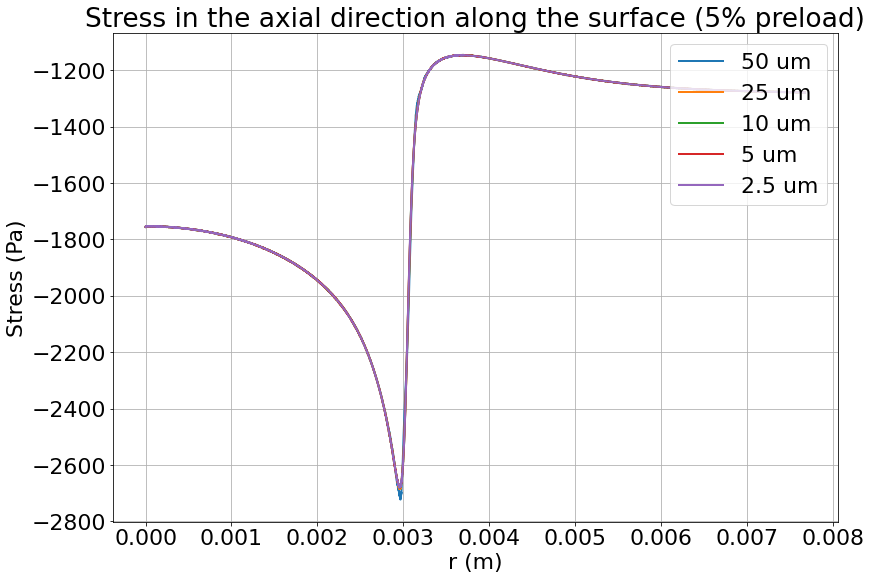

In [6]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
plt.plot(m50um[:,0].A1,m50um[:,1].A1, label = "50 um", linewidth = 2)
plt.plot(m25um[:,0].A1,m25um[:,1].A1, label = "25 um", linewidth = 2)
plt.plot(m10um[:,0].A1,m10um[:,1].A1, label = "10 um", linewidth = 2)
plt.plot(m5um[:,0].A1,m5um[:,1].A1, label = "5 um", linewidth = 2)
plt.plot(m2p5um[:,0].A1,m2p5um[:,1].A1, label = "2.5 um", linewidth = 2)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.title("Stress in the axial direction along the surface (5% preload)")
plt.xlabel("r (m)")
plt.ylabel("Stress (Pa)")
plt.grid()
plt.show()

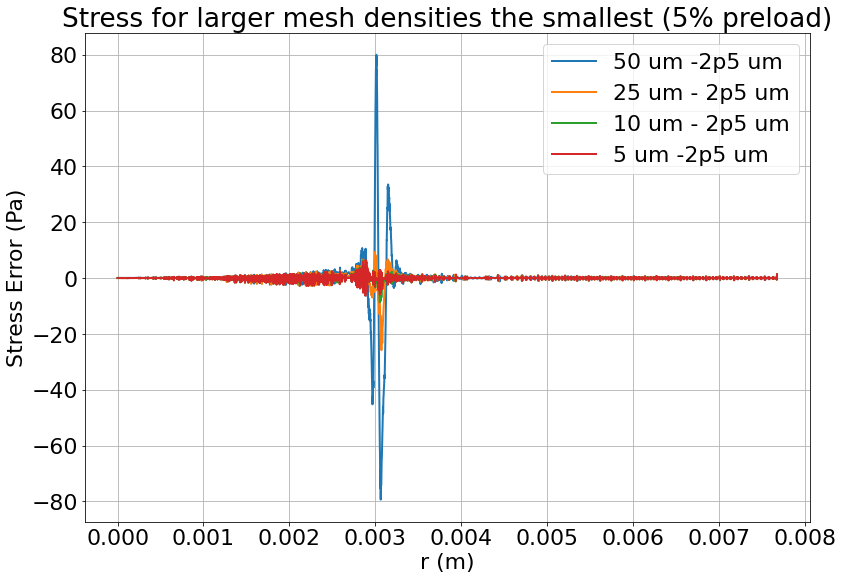

In [7]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
plt.plot(m50um[:,0].A1,m50um[:,1].A1-m2p5um[:,1].A1, label = "50 um -2p5 um", linewidth = 2)
plt.plot(m25um[:,0].A1,m25um[:,1].A1-m2p5um[:,1].A1, label = "25 um - 2p5 um", linewidth = 2)
plt.plot(m10um[:,0].A1,m10um[:,1].A1-m2p5um[:,1].A1, label = "10 um - 2p5 um", linewidth = 2)
plt.plot(m5um[:,0].A1,m5um[:,1].A1-m2p5um[:,1].A1, label = "5 um -2p5 um", linewidth = 2)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.title("Stress for larger mesh densities the smallest (5% preload)")
plt.xlabel("r (m)")
plt.ylabel("Stress Error (Pa)")
plt.grid()
plt.show()

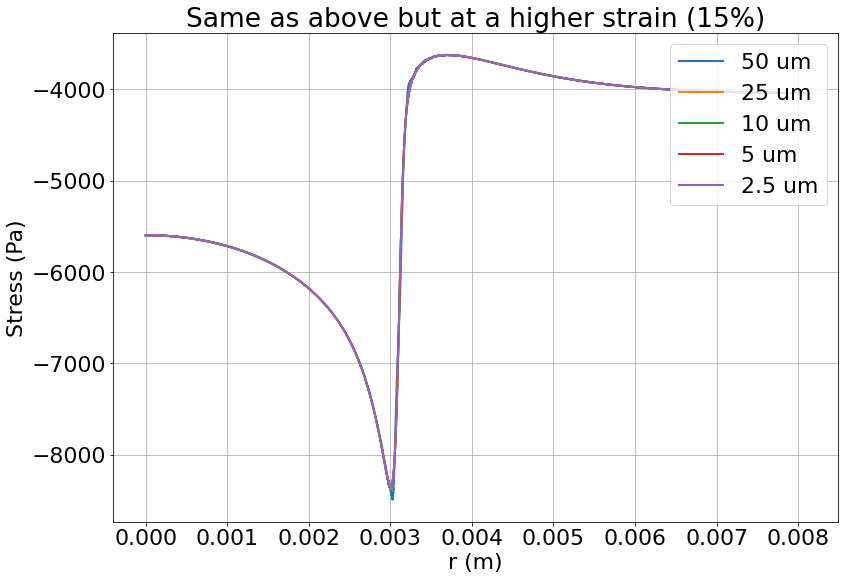

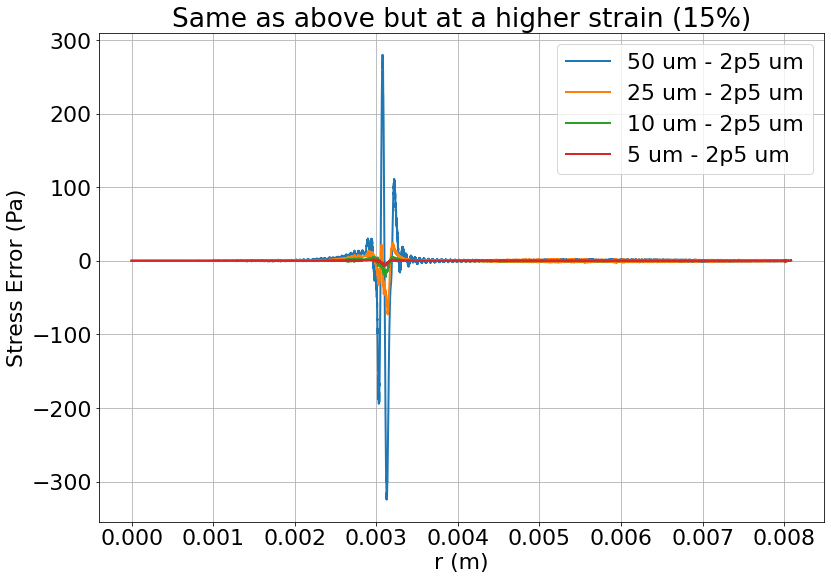

In [8]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
plt.plot(h50um[:,0].A1,h50um[:,1].A1, label = "50 um", linewidth = 2)
plt.plot(h25um[:,0].A1,h25um[:,1].A1, label = "25 um", linewidth = 2)
plt.plot(h10um[:,0].A1,h10um[:,1].A1, label = "10 um", linewidth = 2)
plt.plot(h5um[:,0].A1,h5um[:,1].A1, label = "5 um", linewidth = 2)
plt.plot(h2p5um[:,0].A1,h2p5um[:,1].A1, label = "2.5 um", linewidth = 2)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.title("Same as above but at a higher strain (15%)")
plt.xlabel("r (m)")
plt.ylabel("Stress (Pa)")
plt.grid()
plt.show()

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
plt.plot(h50um[:,0].A1,h50um[:,1].A1-h2p5um[:,1].A1, label = "50 um - 2p5 um", linewidth = 2)
plt.plot(h25um[:,0].A1,h25um[:,1].A1-h2p5um[:,1].A1, label = "25 um - 2p5 um", linewidth = 2)
plt.plot(h10um[:,0].A1,h10um[:,1].A1-h2p5um[:,1].A1, label = "10 um - 2p5 um", linewidth = 2)
plt.plot(h5um[:,0].A1,h5um[:,1].A1-h2p5um[:,1].A1, label = "5 um - 2p5 um", linewidth = 2)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.title("Same as above but at a higher strain (15%)")
plt.xlabel("r (m)")
plt.ylabel("Stress Error (Pa)")
plt.grid()
plt.show()

Can see that as strain increases the agreement between the meshes worsens, can also see that the disagreement is located in the area of the transition.

By the extra sharpness in the stress distribution we can confirm that the coarser meshes are acting to artificially stiffen the structure of the sample.